# EDA ON 1ST DATASET

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")  # For seaborn plots
plt.rcParams["figure.figsize"] = (10, 6) 

In [38]:
everest=pd.read_csv("Everest_data.csv")


In [19]:
everest.head()

,day_b,city_id,driver_uuid,vehicle_uuid,partner_uuid,uuid,request_timestamp_local,status,is_cash_trip,begintrip_timestamp_local,begintrip_lat,begintrip_lng,destination_lat,begintrip_lng.1,dropoff_timestamp_local,dropoff_lat,dropoff_lng
0,2022-11-18 0:00:00,215,0007e579-cbb8-44c4-a32d-bbde59b4ef1f,7797da74-ddff-451d-88ed-83b8624e5ae3,293fe8ea-1c04-4813-aa30-27ccb0c4cda3,ae67d6e6-be1b-4dd9-924d-8993d4b14995,2022-11-18 12:19:45,completed,False,2022-11-18 12:36:19,19.021305,72.85987,19.00718,72.85987,2022-11-18 12:58:31,19.006836,72.824844
1,2022-11-18 0:00:00,215,0007e579-cbb8-44c4-a32d-bbde59b4ef1f,7797da74-ddff-451d-88ed-83b8624e5ae3,293fe8ea-1c04-4813-aa30-27ccb0c4cda3,24d95a18-9e27-44b1-bf71-d729b88e9876,2022-11-18 13:01:14,completed,False,2022-11-18 13:10:09,19.012371,72.82622,19.0993,72.82622,2022-11-18 13:43:12,19.100027,72.874855
2,2022-11-18 0:00:00,215,0007e579-cbb8-44c4-a32d-bbde59b4ef1f,7797da74-ddff-451d-88ed-83b8624e5ae3,293fe8ea-1c04-4813-aa30-27ccb0c4cda3,93887b79-8f51-4468-b830-894666383774,2022-11-18 13:43:15,completed,False,2022-11-18 13:52:20,19.100563,72.874374,19.195038,72.874374,2022-11-18 14:53:20,19.19511,72.86757
3,2022-11-18 0:00:00,215,0007e579-cbb8-44c4-a32d-bbde59b4ef1f,7797da74-ddff-451d-88ed-83b8624e5ae3,293fe8ea-1c04-4813-aa30-27ccb0c4cda3,9e55aea4-c2a5-424d-ae4c-9c11fc68c34d,2022-11-18 14:30:57,rider_canceled,False,\N,19.175734,72.85916,19.112806,72.85916,\N,19.18237865,72.85835731
4,2022-11-18 0:00:00,215,0007e579-cbb8-44c4-a32d-bbde59b4ef1f,7797da74-ddff-451d-88ed-83b8624e5ae3,293fe8ea-1c04-4813-aa30-27ccb0c4cda3,fdde5c96-3539-4677-9d4c-c750b74e9bc4,2022-11-18 14:32:34,completed,False,2022-11-18 14:59:29,19.197891,72.872314,19.026173,72.872314,2022-11-18 15:43:51,19.025806,72.842026


In [20]:
# Check the shape of the dataset
everest.shape


(20827, 17)

In [21]:
everest.columns

Index(['day_b', 'city_id', 'driver_uuid', 'vehicle_uuid', 'partner_uuid',
       'uuid', 'request_timestamp_local', 'status', 'is_cash_trip',
       'begintrip_timestamp_local', 'begintrip_lat', 'begintrip_lng',
       'destination_lat', 'begintrip_lng.1', 'dropoff_timestamp_local',
       'dropoff_lat', 'dropoff_lng'],
      dtype='object')

In [22]:
# Display information about the dataset, such as column data types and missing values
everest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20827 entries, 0 to 20826
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   day_b                      20827 non-null  object
 1   city_id                    20827 non-null  int64 
 2   driver_uuid                20827 non-null  object
 3   vehicle_uuid               20827 non-null  object
 4   partner_uuid               20827 non-null  object
 5   uuid                       20827 non-null  object
 6   request_timestamp_local    20827 non-null  object
 7   status                     20827 non-null  object
 8   is_cash_trip               20827 non-null  bool  
 9   begintrip_timestamp_local  20827 non-null  object
 10  begintrip_lat              20827 non-null  object
 11  begintrip_lng              20827 non-null  object
 12  destination_lat            20827 non-null  object
 13  begintrip_lng.1            20827 non-null  object
 14  dropof

In [23]:

# List of columns to convert
columns_to_convert = ['begintrip_lat', 'begintrip_lng', 'dropoff_lat', 'dropoff_lng']

# Replace '\\N' values with NaN and convert the columns to float
everest[columns_to_convert] = everest[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [24]:
everest.dtypes

day_b                         object
city_id                        int64
driver_uuid                   object
vehicle_uuid                  object
partner_uuid                  object
uuid                          object
request_timestamp_local       object
status                        object
is_cash_trip                    bool
begintrip_timestamp_local     object
begintrip_lat                float64
begintrip_lng                float64
destination_lat               object
begintrip_lng.1               object
dropoff_timestamp_local       object
dropoff_lat                  float64
dropoff_lng                  float64
dtype: object

In [25]:

# Convert timestamps from object to datetime

everest['day_b']=pd.to_datetime(everest['day_b'], errors='coerce')
everest['request_timestamp_local']=pd.to_datetime(everest['request_timestamp_local'], errors='coerce')
everest['begintrip_timestamp_local']=pd.to_datetime(everest['begintrip_timestamp_local'], errors='coerce')
everest['dropoff_timestamp_local']=pd.to_datetime(everest['dropoff_timestamp_local'], errors='coerce')
everest.head(10)

,day_b,city_id,driver_uuid,vehicle_uuid,partner_uuid,uuid,request_timestamp_local,status,is_cash_trip,begintrip_timestamp_local,begintrip_lat,begintrip_lng,destination_lat,begintrip_lng.1,dropoff_timestamp_local,dropoff_lat,dropoff_lng
0,2022-11-18,215,0007e579-cbb8-44c4-a32d-bbde59b4ef1f,7797da74-ddff-451d-88ed-83b8624e5ae3,293fe8ea-1c04-4813-aa30-27ccb0c4cda3,ae67d6e6-be1b-4dd9-924d-8993d4b14995,2022-11-18 12:19:45,completed,False,2022-11-18 12:36:19,19.021305,72.859870,19.00718,72.85987,2022-11-18 12:58:31,19.006836,72.824844
1,2022-11-18,215,0007e579-cbb8-44c4-a32d-bbde59b4ef1f,7797da74-ddff-451d-88ed-83b8624e5ae3,293fe8ea-1c04-4813-aa30-27ccb0c4cda3,24d95a18-9e27-44b1-bf71-d729b88e9876,2022-11-18 13:01:14,completed,False,2022-11-18 13:10:09,19.012371,72.826220,19.0993,72.82622,2022-11-18 13:43:12,19.100027,72.874855
2,2022-11-18,215,0007e579-cbb8-44c4-a32d-bbde59b4ef1f,7797da74-ddff-451d-88ed-83b8624e5ae3,293fe8ea-1c04-4813-aa30-27ccb0c4cda3,93887b79-8f51-4468-b830-894666383774,2022-11-18 13:43:15,completed,False,2022-11-18 13:52:20,19.100563,72.874374,19.195038,72.874374,2022-11-18 14:53:20,19.195110,72.867570
3,2022-11-18,215,0007e579-cbb8-44c4-a32d-bbde59b4ef1f,7797da74-ddff-451d-88ed-83b8624e5ae3,293fe8ea-1c04-4813-aa30-27ccb0c4cda3,9e55aea4-c2a5-424d-ae4c-9c11fc68c34d,2022-11-18 14:30:57,rider_canceled,False,NaT,19.175734,72.859160,19.112806,72.85916,NaT,19.182379,72.858357
4,2022-11-18,215,0007e579-cbb8-44c4-a32d-bbde59b4ef1f,7797da74-ddff-451d-88ed-83b8624e5ae3,293fe8ea-1c04-4813-aa30-27ccb0c4cda3,fdde5c96-3539-4677-9d4c-c750b74e9bc4,2022-11-18 14:32:34,completed,False,2022-11-18 14:59:29,19.197891,72.872314,19.026173,72.872314,2022-11-18 15:43:51,19.025806,72.842026
5,2022-11-18,215,0007e579-cbb8-44c4-a32d-bbde59b4ef1f,7797da74-ddff-451d-88ed-83b8624e5ae3,293fe8ea-1c04-4813-aa30-27ccb0c4cda3,5dd48559-63b8-48e2-a515-f075300184ff,2022-11-18 15:30:59,completed,True,2022-11-18 15:53:04,19.030243,72.837480,18.995346,72.83748,2022-11-18 16:09:32,18.995134,72.819336
6,2022-11-18,215,0007e579-cbb8-44c4-a32d-bbde59b4ef1f,7797da74-ddff-451d-88ed-83b8624e5ae3,293fe8ea-1c04-4813-aa30-27ccb0c4cda3,74861692-661d-487f-8bfe-dc4b7e4bdff5,2022-11-18 16:02:39,completed,False,2022-11-18 16:15:16,18.996128,72.819590,18.953926,72.81959,2022-11-18 16:58:34,18.953753,72.800470
7,2022-11-18,215,0007e579-cbb8-44c4-a32d-bbde59b4ef1f,7797da74-ddff-451d-88ed-83b8624e5ae3,293fe8ea-1c04-4813-aa30-27ccb0c4cda3,c41c7d72-7c91-4e69-85e8-6136f5484e91,2022-11-18 16:50:55,rider_canceled,True,NaT,18.963036,72.802986,18.993952,72.802986,NaT,18.954721,72.798417
8,2022-11-18,215,0007e579-cbb8-44c4-a32d-bbde59b4ef1f,7797da74-ddff-451d-88ed-83b8624e5ae3,293fe8ea-1c04-4813-aa30-27ccb0c4cda3,fe147222-1f71-4aec-bd0d-ad831bc65023,2022-11-18 16:57:24,completed,False,2022-11-18 17:06:35,18.953610,72.796814,18.934574,72.796814,2022-11-18 17:36:57,18.935163,72.835365
9,2022-11-18,215,0007e579-cbb8-44c4-a32d-bbde59b4ef1f,7797da74-ddff-451d-88ed-83b8624e5ae3,293fe8ea-1c04-4813-aa30-27ccb0c4cda3,8174e7d6-8c54-4318-85e1-899399bf0257,2022-11-18 17:26:40,completed,True,2022-11-18 17:41:28,18.934532,72.835820,19.064255,72.83582,2022-11-18 18:55:28,19.064093,72.841850


In [26]:
# Correct the apparent typo in column name 'begintrip_lng.1' to 'destination_lng'


everest.rename(columns={'begintrip_lng.1': 'destination_lng'}, inplace=True)

In [27]:
everest.columns

Index(['day_b', 'city_id', 'driver_uuid', 'vehicle_uuid', 'partner_uuid',
       'uuid', 'request_timestamp_local', 'status', 'is_cash_trip',
       'begintrip_timestamp_local', 'begintrip_lat', 'begintrip_lng',
       'destination_lat', 'destination_lng', 'dropoff_timestamp_local',
       'dropoff_lat', 'dropoff_lng'],
      dtype='object')

In [28]:
# Ensure latitude and longitude are of float type
lat_lng_cols = ['begintrip_lat', 'begintrip_lng', 'destination_lat', 'destination_lng', 'dropoff_lat', 'dropoff_lng']
# Replace '\\N' with NaN
everest[lat_lng_cols] = everest[lat_lng_cols].replace('\\N', np.nan)

# Now try converting to float again
everest[lat_lng_cols] = everest[lat_lng_cols].astype(float)

In [29]:
# Summary statistics for numerical columns
print(everest.describe())

                               day_b  city_id        request_timestamp_local  \
count                          20827  20827.0                          20827   
mean   2022-11-18 02:04:06.487732224    215.0  2022-11-18 16:35:00.657271808   
min              2022-11-18 00:00:00    215.0            2022-11-18 04:50:00   
25%              2022-11-18 00:00:00    215.0            2022-11-18 12:23:47   
50%              2022-11-18 00:00:00    215.0            2022-11-18 16:30:08   
75%              2022-11-18 00:00:00    215.0     2022-11-18 20:35:27.500000   
max              2022-11-19 00:00:00    215.0            2022-11-19 09:00:00   
std                              NaN      0.0                            NaN   

           begintrip_timestamp_local  begintrip_lat  begintrip_lng  \
count                          14874   20822.000000   20822.000000   
mean   2022-11-18 16:35:02.744991488      19.097572      72.889153   
min              2022-11-18 04:55:22      18.897755      72.759520   

In [30]:
# Check for missing values

print(everest.isnull().sum())

# There is null values present in the column begintrip_timestamp_local and dropoff_timestamp_local

day_b                           0
city_id                         0
driver_uuid                     0
vehicle_uuid                    0
partner_uuid                    0
uuid                            0
request_timestamp_local         0
status                          0
is_cash_trip                    0
begintrip_timestamp_local    5953
begintrip_lat                   5
begintrip_lng                   5
destination_lat                 3
destination_lng                 5
dropoff_timestamp_local      5986
dropoff_lat                     5
dropoff_lng                     5
dtype: int64


In [31]:
duplicate=everest.duplicated()

In [32]:
duplicate

0        False
1        False
2        False
3        False
4        False
         ...  
20822    False
20823    False
20824    False
20825    False
20826    False
Length: 20827, dtype: bool

In [33]:
sum(duplicate)

0

In [34]:
# Unique values in 'status' column
print(everest['status'].unique())

['completed' 'rider_canceled' 'unfulfilled' 'driver_canceled']


In [35]:
# Count of trips by 'status'
print(everest['status'].value_counts())

status
completed          14841
rider_canceled      5122
driver_canceled      503
unfulfilled          361
Name: count, dtype: int64


In [36]:
# Unique values in 'driver_uuid' column

unique_driver_id = np.unique(everest['driver_uuid'])
print(len(unique_driver_id))

1969


In [37]:
# Unique values in 'day_b' column

np.unique(everest['day_b'])

array(['2022-11-18T00:00:00.000000000', '2022-11-19T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [38]:
# Count of trips by 'day_b'

print(everest['day_b'].value_counts())

day_b
2022-11-18    19032
2022-11-19     1795
Name: count, dtype: int64


# Data Cleaning

In [39]:
# Drop rows where both the begin trip and dropoff lat/lng are NaN
everest.dropna(subset=['begintrip_lat', 'begintrip_lng', 'dropoff_lat', 'dropoff_lng'], how='all', inplace=True)

In [40]:
everest.shape

(20822, 17)

# Below is an approach to implement this imputation strategy. It imputes missing begintrip latitudes and longitudes with the dropoff latitudes and longitudes when the begin trip data is missing, and vice versa. This approach assumes that the trip's start and end points are close enough that using one in place of the other won't significantly distort the analysis.


In [41]:

# Function to impute missing begintrip data with dropoff data
def impute_begin_with_dropoff(row):
    if pd.isnull(row['begintrip_lat']) and not pd.isnull(row['dropoff_lat']):
        row['begintrip_lat'] = row['dropoff_lat']
        row['begintrip_lng'] = row['dropoff_lng']
    return row

# Function to impute missing dropoff data with begintrip data
def impute_dropoff_with_begin(row):
    if pd.isnull(row['dropoff_lat']) and not pd.isnull(row['begintrip_lat']):
        row['dropoff_lat'] = row['begintrip_lat']
        row['dropoff_lng'] = row['begintrip_lng']
    return row

# Apply the imputation functions
everest = everest.apply(impute_begin_with_dropoff, axis=1)
everest = everest.apply(impute_dropoff_with_begin, axis=1)

# Convert latitude and longitude columns to float, now that missing values have been addressed
lat_lng_cols = ['begintrip_lat', 'begintrip_lng', 'dropoff_lat', 'dropoff_lng']
everest[lat_lng_cols] = everest[lat_lng_cols].astype(float)

# At this point, the dataset should have fewer missing geolocation values, with the assumption that 
# begin and end points can substitute for each other in the context of short trips within a confined

# Visualize the Data

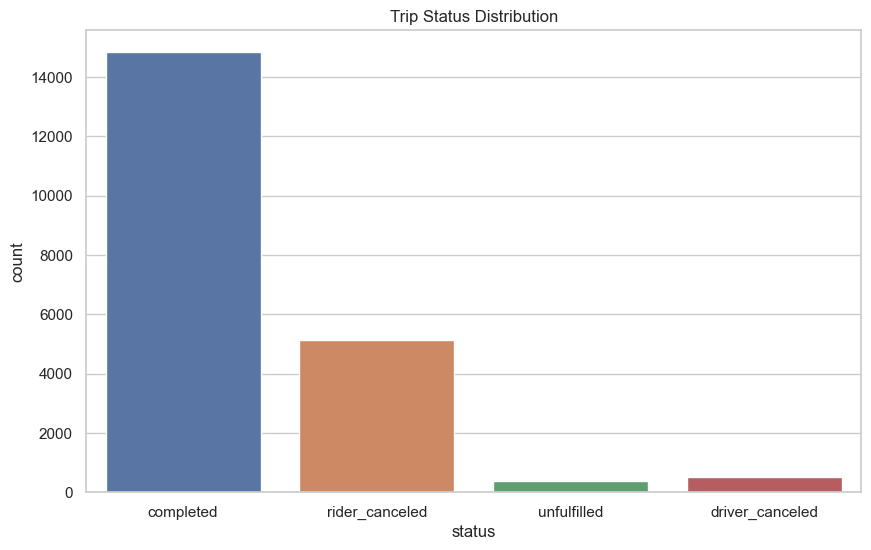

In [42]:
# Trip Status Distribution
sns.countplot(data=everest, x='status')
plt.title('Trip Status Distribution')
plt.show()

# As there are few around 200-250 rides that are not fullfilled and also some are cancelled by driver as 
# well as customer but there percentage is very low 

# EDA ON  trip_activity DATASET

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
trip_activity=pd.read_csv('trip_activity_Everest_Master.csv')

In [45]:
trip_activity

,Trip UUID,Driver UUID,Driver first name,Driver surname,Vehicle UUID,Number plate,Service type,Trip request time,Trip drop-off time,Pick-up address,Drop-off address,Trip distance,Trip status
0,4edb1859-fc8a-4d83-be1a-023a7ad445a4,521625b4-aaae-45da-b3e6-3f93f950a310,SOURABH,-,05c4353c-5f97-4663-ab70-20468365acd2,HR38AD2105,personal_transport,2022-11-19 03:58:38,2022-11-19 04:45:44,"Pink Apartments, H2PJ+952, Sector 18, Sector 1...","Terminal 2, Indira Gandhi International Airpor...",20.98,completed
1,659ceeb3-2709-4f32-af65-101e67b57d16,e39a932b-8e91-4b88-b348-10981d313f88,MD AZAD HUSSAIN,-,48204ab1-c9d4-4ca4-90ad-c75e7d97d2ee,HR38AD5948,personal_transport,2022-11-19 03:55:40,2022-11-19 05:04:21,"G110, near Mother Dairy, Pocket 1, Block G, Di...","Terminal 3, Indira Gandhi International Airpor...",40.42,completed
2,2788c6e0-e97b-4079-8cbf-17d819ad6402,b83f3218-bb24-4aee-b00a-d2ff43434f8f,Sagar,kumar,1888e79b-ed4f-4f10-b8e7-650b06b0263d,HR38AD3911,personal_transport,2022-11-19 03:52:13,2022-11-19 04:30:12,"Plot # 8, Central Rd, Sector 6, Sector 10 Dwar...","Terminal 2, Indira Gandhi International Airpor...",17.80,completed
3,a6f81491-0be1-40f2-89e5-249403571ac8,25ed7228-6fda-450d-9a43-66dff0f8630a,Joginder,Singh,6e32f554-e19c-4533-979b-eac1d075f9ee,HR38AD7780,personal_transport,2022-11-19 03:51:05,2022-11-19 04:32:59,"D Block, Nivedita Kunj, Sector 10, Rama Krishn...","Shyama Prasad Mukherjee Marg, Mori Gate, New D...",16.78,completed
4,1dacc5c5-b114-46e9-87d1-9da07ad61848,a23c0328-bb38-42b6-a8cc-bd8f2f2d2d30,RIHAN,NAEEM,e25f9c11-35ad-4539-9793-aca3aacf90fd,HR38AD4967,personal_transport,2022-11-19 03:50:31,2022-11-19 04:15:29,Old Delhi Railway station,"Dev Prakash Shastri Marg Opp. Pusa, J4JW+C3P, ...",14.85,completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55659,b4252e9f-5cf8-4742-b350-1d543f4c4e76,dbe360ef-41ac-479d-9d3f-5be7e3bc3aa9,Aftab,Alam,b270f6d6-f58d-4e56-989f-c11ef965b03d,MH01DR5210,personal_transport,2022-11-18 08:57:53,2022-11-18 09:25:21,"Vahatuk Bhavan (M SRTC), R.B.I Branch, Dr Anan...","42, L. Jagmohandas Marg (Old Nepean Sea Road, ...",3.36,completed
55660,c9adf130-31af-4e3e-bd38-1a1cd32e7c77,dbe360ef-41ac-479d-9d3f-5be7e3bc3aa9,Aftab,Alam,b270f6d6-f58d-4e56-989f-c11ef965b03d,MH01DR5210,personal_transport,2022-11-18 08:05:09,2022-11-18 09:00:23,"Military Camp, Air India Rd, Kolivery Village,...","Nathani Heights Commercial,B'Wing,Shop no 57 G...",18.26,completed
55661,5e4faabd-11b5-439e-b175-8ffe83fdeb8c,e6bd4d87-b0b9-4d42-bad9-16545a1be242,Mo Shahjad,-,b270f6d6-f58d-4e56-989f-c11ef965b03d,MH01DR5210,personal_transport,2022-11-18 06:00:53,2022-11-18 06:39:08,"Bhogilal Fadia Rd, adjoining to Kandivali Recr...","Akal Society, J.B. Nagar, Tarun Bharat, Andher...",13.59,completed
55662,b2718945-91cd-448f-bb13-f17ce58fd0cb,e6bd4d87-b0b9-4d42-bad9-16545a1be242,Mo Shahjad,-,b270f6d6-f58d-4e56-989f-c11ef965b03d,MH01DR5210,personal_transport,2022-11-18 05:26:26,2022-11-18 05:55:59,Domestic,"Nisarg Rd, Kandivali, Satya Nagar, Kandivali W...",17.96,completed


In [46]:
trip_activity.columns

Index(['Trip UUID', 'Driver UUID', 'Driver first name', 'Driver surname',
       'Vehicle UUID', 'Number plate', 'Service type', 'Trip request time',
       'Trip drop-off time', 'Pick-up address', 'Drop-off address',
       'Trip distance', 'Trip status'],
      dtype='object')

In [47]:
trip_activity.shape

(55664, 13)

In [48]:
trip_activity.head(10)

,Trip UUID,Driver UUID,Driver first name,Driver surname,Vehicle UUID,Number plate,Service type,Trip request time,Trip drop-off time,Pick-up address,Drop-off address,Trip distance,Trip status
0,4edb1859-fc8a-4d83-be1a-023a7ad445a4,521625b4-aaae-45da-b3e6-3f93f950a310,SOURABH,-,05c4353c-5f97-4663-ab70-20468365acd2,HR38AD2105,personal_transport,2022-11-19 03:58:38,2022-11-19 04:45:44,"Pink Apartments, H2PJ+952, Sector 18, Sector 1...","Terminal 2, Indira Gandhi International Airpor...",20.98,completed
1,659ceeb3-2709-4f32-af65-101e67b57d16,e39a932b-8e91-4b88-b348-10981d313f88,MD AZAD HUSSAIN,-,48204ab1-c9d4-4ca4-90ad-c75e7d97d2ee,HR38AD5948,personal_transport,2022-11-19 03:55:40,2022-11-19 05:04:21,"G110, near Mother Dairy, Pocket 1, Block G, Di...","Terminal 3, Indira Gandhi International Airpor...",40.42,completed
2,2788c6e0-e97b-4079-8cbf-17d819ad6402,b83f3218-bb24-4aee-b00a-d2ff43434f8f,Sagar,kumar,1888e79b-ed4f-4f10-b8e7-650b06b0263d,HR38AD3911,personal_transport,2022-11-19 03:52:13,2022-11-19 04:30:12,"Plot # 8, Central Rd, Sector 6, Sector 10 Dwar...","Terminal 2, Indira Gandhi International Airpor...",17.80,completed
3,a6f81491-0be1-40f2-89e5-249403571ac8,25ed7228-6fda-450d-9a43-66dff0f8630a,Joginder,Singh,6e32f554-e19c-4533-979b-eac1d075f9ee,HR38AD7780,personal_transport,2022-11-19 03:51:05,2022-11-19 04:32:59,"D Block, Nivedita Kunj, Sector 10, Rama Krishn...","Shyama Prasad Mukherjee Marg, Mori Gate, New D...",16.78,completed
4,1dacc5c5-b114-46e9-87d1-9da07ad61848,a23c0328-bb38-42b6-a8cc-bd8f2f2d2d30,RIHAN,NAEEM,e25f9c11-35ad-4539-9793-aca3aacf90fd,HR38AD4967,personal_transport,2022-11-19 03:50:31,2022-11-19 04:15:29,Old Delhi Railway station,"Dev Prakash Shastri Marg Opp. Pusa, J4JW+C3P, ...",14.85,completed
5,7d60e4c1-51e8-452f-9311-13f71e054f31,8a10f25f-dd64-45bd-a738-c849ddd830a9,DEEPANSHU,-,76dcd037-4fda-4d4d-b789-37ab137264cc,HR38AD9273,personal_transport,2022-11-19 03:50:02,NaN,NaN,"H-9 15, Arya Samaj Rd, Vijay Vihar, Block O, U...",0.00,rider_cancelled
6,882ebde4-61ad-479a-ac05-ed8746935f41,74cc7f71-672a-4b4e-9284-ccc5676669c9,Mohd,Ali,7f6c64df-a5e8-4be0-9b14-9a7a08c81050,HR38AD8292,personal_transport,2022-11-19 03:48:14,NaN,NaN,"1st, The India Mall, Community Center, New Fri...",0.00,rider_cancelled
7,587058c2-501d-4df5-bf01-c6f07b85834e,fd193bf1-e712-48ca-8366-28c219b4da29,Kapil,Kumar,ac9575c9-91e7-4ba4-be7e-d61dac02ef92,HR38AD1359,personal_transport,2022-11-19 03:47:30,NaN,NaN,"Terminal 3, Indira Gandhi International Airpor...",0.00,rider_cancelled
8,468dabbc-7715-4d15-83ea-5ba8606596e0,b09ae719-4d4b-480e-bc0c-506aa08dfe00,Abid,Abid,8b6df369-ea4a-4ed6-813d-1d63f9eda4fc,HR38AD6334,personal_transport,2022-11-19 03:47:26,2022-11-19 04:27:08,"H-1, Vijay Chowk Rd, Block L, Laxmi Nagar, Del...","Terminal 3, Indira Gandhi International Airpor...",25.88,completed
9,3d9be466-7ca1-4ef8-b4f7-c3f0472be2b3,ad3c2282-37fb-4f3e-94b9-004995d0fef3,akash,singh,c5f84622-7e80-4bc9-818a-0c410c223682,HR38AD4107,personal_transport,2022-11-19 03:44:52,2022-11-19 04:30:39,"166, Santosh Nagar, Sector 32, Faridabad, Hary...","Bhavbhuti Marg, Ratan Lal Market, Kamla Market...",24.31,completed


In [49]:
trip_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55664 entries, 0 to 55663
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trip UUID           55664 non-null  object 
 1   Driver UUID         55664 non-null  object 
 2   Driver first name   55664 non-null  object 
 3   Driver surname      55664 non-null  object 
 4   Vehicle UUID        55659 non-null  object 
 5   Number plate        55659 non-null  object 
 6   Service type        55664 non-null  object 
 7   Trip request time   55664 non-null  object 
 8   Trip drop-off time  41627 non-null  object 
 9   Pick-up address     41684 non-null  object 
 10  Drop-off address    55650 non-null  object 
 11  Trip distance       55664 non-null  float64
 12  Trip status         55664 non-null  object 
dtypes: float64(1), object(12)
memory usage: 5.5+ MB


In [50]:
trip_activity.dtypes

Trip UUID              object
Driver UUID            object
Driver first name      object
Driver surname         object
Vehicle UUID           object
Number plate           object
Service type           object
Trip request time      object
Trip drop-off time     object
Pick-up address        object
Drop-off address       object
Trip distance         float64
Trip status            object
dtype: object

In [51]:
duplicate1=trip_activity.duplicated()

In [52]:
duplicate1

0        False
1        False
2        False
3        False
4        False
         ...  
55659    False
55660    False
55661    False
55662    False
55663    False
Length: 55664, dtype: bool

In [53]:
# Summary statistics for numerical columns
trip_activity.describe()
# There is diffrence in the mean and median values so the data is more scatter from the median and
# also the standard deviation is greater than the 1 so it will also indicate the scatterness of data


,Trip distance
count,55664.000000
mean,10.391885
std,11.757426
min,0.000000
25%,0.000000
50%,7.560000
75%,15.160000
max,355.080000


In [54]:
trip_activity['Trip request time']=pd.to_datetime(trip_activity['Trip request time'], errors='coerce')
trip_activity['Trip drop-off time']=pd.to_datetime(trip_activity['Trip drop-off time'], errors='coerce')
trip_activity.head(10)

,Trip UUID,Driver UUID,Driver first name,Driver surname,Vehicle UUID,Number plate,Service type,Trip request time,Trip drop-off time,Pick-up address,Drop-off address,Trip distance,Trip status
0,4edb1859-fc8a-4d83-be1a-023a7ad445a4,521625b4-aaae-45da-b3e6-3f93f950a310,SOURABH,-,05c4353c-5f97-4663-ab70-20468365acd2,HR38AD2105,personal_transport,2022-11-19 03:58:38,2022-11-19 04:45:44,"Pink Apartments, H2PJ+952, Sector 18, Sector 1...","Terminal 2, Indira Gandhi International Airpor...",20.98,completed
1,659ceeb3-2709-4f32-af65-101e67b57d16,e39a932b-8e91-4b88-b348-10981d313f88,MD AZAD HUSSAIN,-,48204ab1-c9d4-4ca4-90ad-c75e7d97d2ee,HR38AD5948,personal_transport,2022-11-19 03:55:40,2022-11-19 05:04:21,"G110, near Mother Dairy, Pocket 1, Block G, Di...","Terminal 3, Indira Gandhi International Airpor...",40.42,completed
2,2788c6e0-e97b-4079-8cbf-17d819ad6402,b83f3218-bb24-4aee-b00a-d2ff43434f8f,Sagar,kumar,1888e79b-ed4f-4f10-b8e7-650b06b0263d,HR38AD3911,personal_transport,2022-11-19 03:52:13,2022-11-19 04:30:12,"Plot # 8, Central Rd, Sector 6, Sector 10 Dwar...","Terminal 2, Indira Gandhi International Airpor...",17.80,completed
3,a6f81491-0be1-40f2-89e5-249403571ac8,25ed7228-6fda-450d-9a43-66dff0f8630a,Joginder,Singh,6e32f554-e19c-4533-979b-eac1d075f9ee,HR38AD7780,personal_transport,2022-11-19 03:51:05,2022-11-19 04:32:59,"D Block, Nivedita Kunj, Sector 10, Rama Krishn...","Shyama Prasad Mukherjee Marg, Mori Gate, New D...",16.78,completed
4,1dacc5c5-b114-46e9-87d1-9da07ad61848,a23c0328-bb38-42b6-a8cc-bd8f2f2d2d30,RIHAN,NAEEM,e25f9c11-35ad-4539-9793-aca3aacf90fd,HR38AD4967,personal_transport,2022-11-19 03:50:31,2022-11-19 04:15:29,Old Delhi Railway station,"Dev Prakash Shastri Marg Opp. Pusa, J4JW+C3P, ...",14.85,completed
5,7d60e4c1-51e8-452f-9311-13f71e054f31,8a10f25f-dd64-45bd-a738-c849ddd830a9,DEEPANSHU,-,76dcd037-4fda-4d4d-b789-37ab137264cc,HR38AD9273,personal_transport,2022-11-19 03:50:02,NaT,NaN,"H-9 15, Arya Samaj Rd, Vijay Vihar, Block O, U...",0.00,rider_cancelled
6,882ebde4-61ad-479a-ac05-ed8746935f41,74cc7f71-672a-4b4e-9284-ccc5676669c9,Mohd,Ali,7f6c64df-a5e8-4be0-9b14-9a7a08c81050,HR38AD8292,personal_transport,2022-11-19 03:48:14,NaT,NaN,"1st, The India Mall, Community Center, New Fri...",0.00,rider_cancelled
7,587058c2-501d-4df5-bf01-c6f07b85834e,fd193bf1-e712-48ca-8366-28c219b4da29,Kapil,Kumar,ac9575c9-91e7-4ba4-be7e-d61dac02ef92,HR38AD1359,personal_transport,2022-11-19 03:47:30,NaT,NaN,"Terminal 3, Indira Gandhi International Airpor...",0.00,rider_cancelled
8,468dabbc-7715-4d15-83ea-5ba8606596e0,b09ae719-4d4b-480e-bc0c-506aa08dfe00,Abid,Abid,8b6df369-ea4a-4ed6-813d-1d63f9eda4fc,HR38AD6334,personal_transport,2022-11-19 03:47:26,2022-11-19 04:27:08,"H-1, Vijay Chowk Rd, Block L, Laxmi Nagar, Del...","Terminal 3, Indira Gandhi International Airpor...",25.88,completed
9,3d9be466-7ca1-4ef8-b4f7-c3f0472be2b3,ad3c2282-37fb-4f3e-94b9-004995d0fef3,akash,singh,c5f84622-7e80-4bc9-818a-0c410c223682,HR38AD4107,personal_transport,2022-11-19 03:44:52,2022-11-19 04:30:39,"166, Santosh Nagar, Sector 32, Faridabad, Hary...","Bhavbhuti Marg, Ratan Lal Market, Kamla Market...",24.31,completed


In [55]:
trip_activity.dtypes

Trip UUID                     object
Driver UUID                   object
Driver first name             object
Driver surname                object
Vehicle UUID                  object
Number plate                  object
Service type                  object
Trip request time     datetime64[ns]
Trip drop-off time    datetime64[ns]
Pick-up address               object
Drop-off address              object
Trip distance                float64
Trip status                   object
dtype: object

In [56]:
# Trip status distribution
trip_status_counts = trip_activity['Trip status'].value_counts()
print(trip_status_counts)

Trip status
completed           41627
rider_cancelled     12227
driver_cancelled     1195
delivery_failed       615
Name: count, dtype: int64


# Data Cleaning

In [57]:
# Handling missing values
# For 'Vehicle UUID' and 'Number plate', we'll fill missing values with a placeholder
trip_activity['Vehicle UUID'].fillna('Unknown', inplace=True)
trip_activity['Number plate'].fillna('Unknown', inplace=True)

/var/folders/yz/624xfk4s6bzb56x5r5ylcp2c0000gn/T/ipykernel_3514/2560829644.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trip_activity['Vehicle UUID'].fillna('Unknown', inplace=True)
/var/folders/yz/624xfk4s6bzb56x5r5ylcp2c0000gn/T/ipykernel_3514/2560829644.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [58]:
# Filter the DataFrame based on the conditions
filtered_new_data = trip_activity[
    (trip_activity['Pick-up address'].isnull()) & 
    (~trip_activity['Drop-off address'].isnull()) & 
    (trip_activity['Trip distance'] == 0) & 
    (trip_activity['Trip status'].isin(['driver_cancelled', 'rider_cancelled', 'delivery_failed']))
]

# If the conditions are met, assign the values from 'Drop-off address' column of filtered_new_data to 'Pick-up address' column of trip_activity
if not filtered_new_data.empty:
    trip_activity.loc[filtered_new_data.index, 'Pick-up address'] = filtered_new_data['Drop-off address'].values


In [59]:
# Confirming missing value handling
print(trip_activity.isnull().sum())

Trip UUID                 0
Driver UUID               0
Driver first name         0
Driver surname            0
Vehicle UUID              0
Number plate              0
Service type              0
Trip request time         0
Trip drop-off time    14037
Pick-up address          10
Drop-off address         14
Trip distance             0
Trip status               0
dtype: int64


In [60]:
trip_activity.fillna(0, inplace=True)

/var/folders/yz/624xfk4s6bzb56x5r5ylcp2c0000gn/T/ipykernel_3514/3933911368.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  trip_activity.fillna(0, inplace=True)


In [61]:
# Confirming missing value handling
print(trip_activity.isnull().sum())

Trip UUID             0
Driver UUID           0
Driver first name     0
Driver surname        0
Vehicle UUID          0
Number plate          0
Service type          0
Trip request time     0
Trip drop-off time    0
Pick-up address       0
Drop-off address      0
Trip distance         0
Trip status           0
dtype: int64


# Visualize the Data

/Users/nilesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


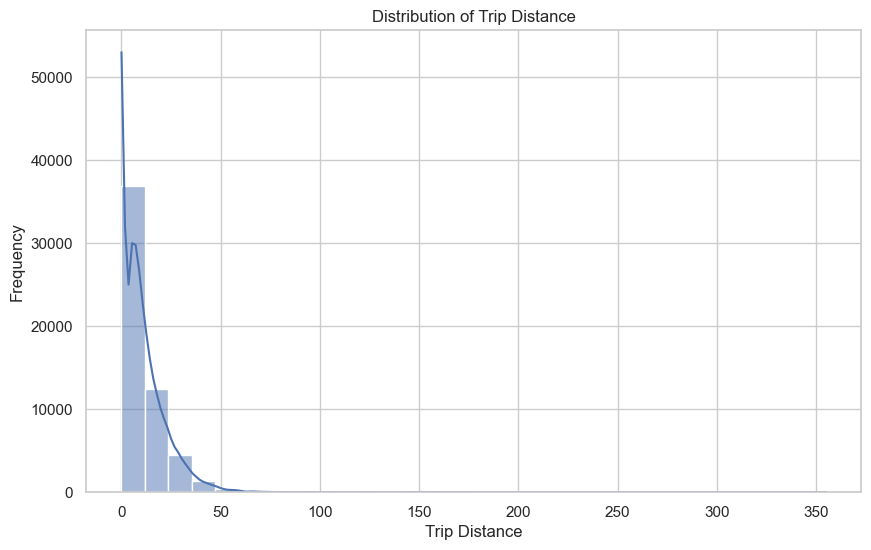

In [62]:
# Trip distance distribution
plt.figure(figsize=(10, 6))
sns.histplot(trip_activity['Trip distance'], bins=30, kde=True)
plt.title('Distribution of Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.show()

# As we see the most of the distance travelled by the driver is of 0-10 km 
# The data showing the rightskew nature so we can see thatthere is some misproperness in the data


In [63]:
# Analysis of trip request time
# Convert trip request time to datetime format
trip_activity['Trip request time'] = pd.to_datetime(trip_activity['Trip request time'])
# Extract hour and day of week information
trip_activity['Hour'] = trip_activity['Trip request time'].dt.hour
trip_activity['DayOfWeek'] = trip_activity['Trip request time'].dt.day_name()


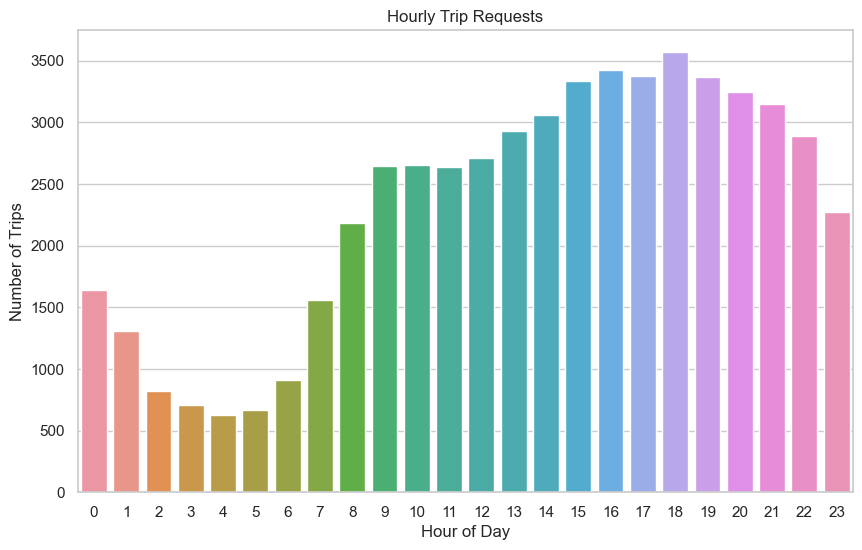

In [64]:
# Hourly patterns analysis
hourly_counts = trip_activity['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values)
plt.title('Hourly Trip Requests')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()  
# As wee see that there is more trip after the 8 pm as the working of the people starts

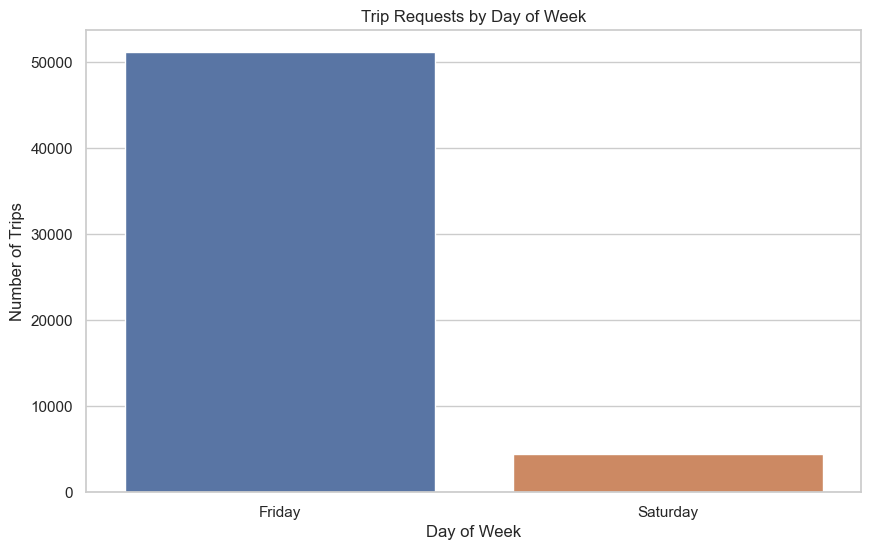

In [65]:
# Day of week analysis
day_counts = trip_activity['DayOfWeek'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title('Trip Requests by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.show()
# as observed from the graph wee can see that the friday having more trip than the saturday as the saturday having the corporate holiday
# so there is less number of tripin saturday than the sunday


# MERGED THE BOTH DATASETS

In [66]:

merged_data1 = pd.merge(everest, trip_activity, how='inner', left_on='uuid', right_on='Trip UUID')


# Display the merged DataFrame
merged_data1


,day_b,city_id,driver_uuid,vehicle_uuid,partner_uuid,uuid,request_timestamp_local,status,is_cash_trip,begintrip_timestamp_local,...,Number plate,Service type,Trip request time,Trip drop-off time,Pick-up address,Drop-off address,Trip distance,Trip status,Hour,DayOfWeek
0,2022-11-18,215,0007e579-cbb8-44c4-a32d-bbde59b4ef1f,7797da74-ddff-451d-88ed-83b8624e5ae3,293fe8ea-1c04-4813-aa30-27ccb0c4cda3,ae67d6e6-be1b-4dd9-924d-8993d4b14995,2022-11-18 12:19:45,completed,False,2022-11-18 12:36:19,...,MH01DR8898,personal_transport,2022-11-18 12:19:45,2022-11-18 12:58:31,"Surya Sadan, Rd Number 14, Kasturba Gandhi Nag...","Pandurang Budhkar Marg, Worli Century Mills Co...",5.90,completed,12,Friday
1,2022-11-18,215,0007e579-cbb8-44c4-a32d-bbde59b4ef1f,7797da74-ddff-451d-88ed-83b8624e5ae3,293fe8ea-1c04-4813-aa30-27ccb0c4cda3,24d95a18-9e27-44b1-bf71-d729b88e9876,2022-11-18 13:01:14,completed,False,2022-11-18 13:10:09,...,MH01DR8898,personal_transport,2022-11-18 13:01:14,2022-11-18 13:43:12,"#A2, 4th Floor, Cnergy IT Park, Old Standard M...","Mumbai, Maharashtra 400099, India",19.10,completed,13,Friday
2,2022-11-18,215,0007e579-cbb8-44c4-a32d-bbde59b4ef1f,7797da74-ddff-451d-88ed-83b8624e5ae3,293fe8ea-1c04-4813-aa30-27ccb0c4cda3,93887b79-8f51-4468-b830-894666383774,2022-11-18 13:43:15,completed,False,2022-11-18 13:52:20,...,MH01DR8898,personal_transport,2022-11-18 13:43:15,2022-11-18 14:53:20,International,"Akurli Cross Rd, Kandivali, Gokul Nagar, Kandi...",15.70,completed,13,Friday
3,2022-11-18,215,0007e579-cbb8-44c4-a32d-bbde59b4ef1f,7797da74-ddff-451d-88ed-83b8624e5ae3,293fe8ea-1c04-4813-aa30-27ccb0c4cda3,9e55aea4-c2a5-424d-ae4c-9c11fc68c34d,2022-11-18 14:30:57,rider_canceled,False,NaT,...,MH01DR8898,personal_transport,2022-11-18 14:30:57,0,"1st Floor, North Wing, S 14, Solitaire Corpora...","1st Floor, North Wing, S 14, Solitaire Corpora...",0.00,rider_cancelled,14,Friday
4,2022-11-18,215,0007e579-cbb8-44c4-a32d-bbde59b4ef1f,7797da74-ddff-451d-88ed-83b8624e5ae3,293fe8ea-1c04-4813-aa30-27ccb0c4cda3,fdde5c96-3539-4677-9d4c-c750b74e9bc4,2022-11-18 14:32:34,completed,False,2022-11-18 14:59:29,...,MH01DR8898,personal_transport,2022-11-18 14:32:34,2022-11-18 15:43:51,"Whispering Palms Xxclusive, Kandivali, Alika N...","BRAMHADEV SOCIETY, C/WING, Padmabai Thakkar Ma...",23.55,completed,14,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19796,2022-11-18,215,ff8c4b08-8a0e-4106-aab1-e0a092487ff6,3d6d5fdd-1b24-49d6-bd2b-8e250eb7f557,cc02d9ec-aa51-46b5-aeb3-af0516e988ab,32c25ca8-38ed-4b93-b951-453fef3dd649,2022-11-18 12:24:45,completed,False,2022-11-18 12:37:46,...,MH01DR9413,personal_transport,2022-11-18 12:24:45,2022-11-18 13:19:07,"5, Sahar Airport Rd, Santosh Mata Nagar, Ashok...","6V5C+XG9, Next to Miraj Cinemas Thakur Mall, K...",16.36,completed,12,Friday
19797,2022-11-18,215,ff8c4b08-8a0e-4106-aab1-e0a092487ff6,3d6d5fdd-1b24-49d6-bd2b-8e250eb7f557,cc02d9ec-aa51-46b5-aeb3-af0516e988ab,7c5144af-8fc4-4aa9-b1fd-da5beb66b871,2022-11-18 13:00:49,completed,True,2022-11-18 13:28:53,...,MH01DR9413,personal_transport,2022-11-18 13:00:49,2022-11-18 14:59:02,"EMP-33, Thakur Village Rd, near Andhra Bank, K...","Sheikh Memon St, Fanas Wadi, Kalbadevi, Mumbai...",35.01,completed,13,Friday
19798,2022-11-18,215,ff8c4b08-8a0e-4106-aab1-e0a092487ff6,3d6d5fdd-1b24-49d6-bd2b-8e250eb7f557,cc02d9ec-aa51-46b5-aeb3-af0516e988ab,133965f4-2e84-414b-89ba-9dace3d77e0a,2022-11-18 22:51:55,completed,True,2022-11-18 23:08:37,...,MH01DR9413,personal_transport,2022-11-18 22:51:55,2022-11-19 00:48:04,"Jain Society, Sion, Mumbai, Maharashtra 400022...","Badlapur Railway Station, Badlapur, Maharashtr...",53.42,completed,22,Friday
19799,2022-11-18,215,ff8c4b08-8a0e-4106-aab1-e0a092487ff6,3d6d5fdd-1b24-49d6-bd2b-8e250eb7f557,cc02d9ec-aa51-46b5-aeb3-af0516e988ab,2742250f-fa69-4b48-96a3-eff3e90ab79f,2022-11-18 22:52:50,rider_canceled,True,NaT,...,MH01DR9413,personal_transport,2022-11-18 22:52:50,0,"Bandra Terminus, Naupada, Bandra East, Mum

In [67]:
merged_data1.to_csv('merged_data1.csv', index=False)

In [68]:
unique_driver_id = np.unique(merged_data1['driver_uuid'])
print(len(unique_driver_id))

1909


In [69]:
merged_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19801 entries, 0 to 19800
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   day_b                      19801 non-null  datetime64[ns]
 1   city_id                    19801 non-null  int64         
 2   driver_uuid                19801 non-null  object        
 3   vehicle_uuid               19801 non-null  object        
 4   partner_uuid               19801 non-null  object        
 5   uuid                       19801 non-null  object        
 6   request_timestamp_local    19801 non-null  datetime64[ns]
 7   status                     19801 non-null  object        
 8   is_cash_trip               19801 non-null  bool          
 9   begintrip_timestamp_local  14148 non-null  datetime64[ns]
 10  begintrip_lat              19801 non-null  float64       
 11  begintrip_lng              19801 non-null  float64       
 12  dest

In [70]:
len(np.unique(merged_data1['Trip UUID']))

19801

In [71]:
len(np.unique(merged_data1['uuid']))

19801

In [3]:
new_data=pd.read_csv("merged_data1.csv")
new_data.columns

Index(['day_b', 'city_id', 'driver_uuid', 'vehicle_uuid', 'partner_uuid',
       'uuid', 'request_timestamp_local', 'status', 'is_cash_trip',
       'begintrip_timestamp_local', 'begintrip_lat', 'begintrip_lng',
       'destination_lat', 'destination_lng', 'dropoff_timestamp_local',
       'dropoff_lat', 'dropoff_lng', 'Trip UUID', 'Driver UUID',
       'Driver first name', 'Driver surname', 'Vehicle UUID', 'Number plate',
       'Service type', 'Trip request time', 'Trip drop-off time',
       'Pick-up address', 'Drop-off address', 'Trip distance', 'Trip status',
       'Hour', 'DayOfWeek'],
      dtype='object')

In [73]:
new_data.isna().sum()

day_b                           0
city_id                         0
driver_uuid                     0
vehicle_uuid                    0
partner_uuid                    0
uuid                            0
request_timestamp_local         0
status                          0
is_cash_trip                    0
begintrip_timestamp_local    5653
begintrip_lat                   0
begintrip_lng                   0
destination_lat                 3
destination_lng                 0
dropoff_timestamp_local      5686
dropoff_lat                     0
dropoff_lng                     0
Trip UUID                       0
Driver UUID                     0
Driver first name               0
Driver surname                  0
Vehicle UUID                    0
Number plate                    0
Service type                    0
Trip request time               0
Trip drop-off time              0
Pick-up address                 0
Drop-off address                0
Trip distance                   0
Trip status   

In [74]:
len(np.unique(merged_data1['driver_uuid']))

1909

In [75]:
np.unique(merged_data1['driver_uuid'])

array(['0007e579-cbb8-44c4-a32d-bbde59b4ef1f',
       '001797d7-5f2b-48be-8b62-29635edbe124',
       '0018f72f-581f-4506-9092-2beafbd41ca1', ...,
       'ff7a3d4d-9a6d-4dae-bdcc-dc244750ba2e',
       'ff7e2962-fe2c-4f11-bffc-3cb4f908a493',
       'ff8c4b08-8a0e-4106-aab1-e0a092487ff6'], dtype=object)

In [76]:
len(np.unique(everest['driver_uuid']))

1969

# now we want Store each Driver info in csv file

In [25]:
import pandas as pd
import os

# Specify the directory where you want to save the files
folder_path = 'Drivers'
os.makedirs(folder_path, exist_ok=True)  # Create the folder if it does not exist

# Get unique driver UUIDs
unique_drivers = new_data['driver_uuid'].unique()

# Loop through each unique driver UUID
for driver_uuid in unique_drivers:
    # Filter the DataFrame for the current driver_uuid
    driver_data = new_data[new_data['driver_uuid'] == driver_uuid]
    
    # Define a file name based on the driver_uuid
    file_name = f"{driver_uuid}.csv"
    
    # Full path for the CSV file
    full_path = os.path.join(folder_path, file_name)
    
    # Save the filtered data to a CSV file in the specified folder
    driver_data.to_csv(full_path, index=False)  # Set index=False to avoid saving the index column

    # Optional print statement to track progress or debugging
    print(f"File saved: {full_path}")


File saved: Drivers/0007e579-cbb8-44c4-a32d-bbde59b4ef1f.csv
File saved: Drivers/001797d7-5f2b-48be-8b62-29635edbe124.csv
File saved: Drivers/0018f72f-581f-4506-9092-2beafbd41ca1.csv
File saved: Drivers/0077c44a-fcbf-494f-ba03-4a6afccda61b.csv
File saved: Drivers/00b32f06-a162-4bd4-8f41-7c5f4b530ac5.csv
File saved: Drivers/00cc1737-d708-4ddf-ad73-ea915df3845a.csv
File saved: Drivers/00d5d322-1a72-4dc9-b097-eff583f15540.csv
File saved: Drivers/00f0c75d-9cbf-42b0-9b81-93b770d5d0a8.csv
File saved: Drivers/01052d4d-50e3-4331-82b3-e2093d480eeb.csv
File saved: Drivers/01284ad1-f6a1-4fb7-8d35-ceefb5b0ced9.csv
File saved: Drivers/0143f3da-4cd2-4284-a3c4-1da04923ea63.csv
File saved: Drivers/018606be-3565-4f3c-96e1-047316260ca5.csv
File saved: Drivers/018d1e7e-d177-4741-925d-7953df2dfe73.csv
File saved: Drivers/01d03159-c10e-43ff-a9c8-a23a7794e069.csv
File saved: Drivers/01d38adb-7318-44e2-acb1-cc475921d250.csv
File saved: Drivers/01d49152-c62c-4d85-926b-1c2cb1c7c1b8.csv
File saved: Drivers/01d4

In [77]:
pip install gmplot


Note: you may need to restart the kernel to use updated packages.


In [119]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


# now we want plot a graph for each and every driver 

In [4]:
from collections import defaultdict
import gmplot
from geopy.distance import geodesic
from IPython.display import display, IFrame
import os


In [67]:
# Create the 'maps' folder if it doesn't exist
if not os.path.exists('maps'):
    os.makedirs('maps')

# Function to calculate fine for a ride
def calculate_ride_fine(distance):
    if distance > 10:
        excess_distance = distance - 10
        fine = excess_distance * 10  # Assuming a fine of Rs 10 per km
        return fine
    else:
        return 0

# Function to plot routes on the map for a specific driver_uuid
def plot_routes_for_driver(driver_uuid, data, fined_drivers):
    # Filter data for the specified driver_uuid
    driver_data = data[data['driver_uuid'] == driver_uuid]
    
    if driver_data.empty:
        print(f"No data available for driver {driver_uuid}")
        return
    
    total_distance = 0  # Initialize total distance
    total_fine = 0      # Initialize total fine
    
    # Initialize Google Maps plot for the driver
    gmap = gmplot.GoogleMapPlotter(driver_data.iloc[0]['begintrip_lat'], driver_data.iloc[0]['begintrip_lng'], 10)

    # Iterate over each trip for the driver
    for i in range(len(driver_data)):  
        source_lat, source_lon = driver_data.iloc[i]['begintrip_lat'], driver_data.iloc[i]['begintrip_lng']
        dest_lat, dest_lon = driver_data.iloc[i]['dropoff_lat'], driver_data.iloc[i]['dropoff_lng']
        
        # Plot the path as a blue polyline for the ride
        gmap.plot([source_lat, dest_lat], [source_lon, dest_lon], 'blue', edge_width=2)

        # Mark source and destination points with red and green colors
        gmap.marker(source_lat, source_lon, color='#00FF00')
        gmap.marker(dest_lat, dest_lon, color='red')

        if i < len(driver_data) - 1:  # Check if not the last trip
            next_source_lat, next_source_lon = driver_data.iloc[i+1]['begintrip_lat'], driver_data.iloc[i+1]['begintrip_lng']

            # Calculate the distance between the end point of the current trip and the start point of the next trip
            distance = geodesic((dest_lat, dest_lon), (next_source_lat, next_source_lon)).kilometers
            ride_fine = calculate_ride_fine(distance)  # Calculate fine for the ride
            total_fine += ride_fine                     # Add fine to total fine
            total_distance += distance                   # Add distance to total distance
            
            # Adjust distance if fine is applied
            if ride_fine > 0:
                distance -= (ride_fine / 10)  # Convert fine from Rs to km and subtract from distance
            
            # Plot a red dotted line between the rides
            gmap.plot([dest_lat, next_source_lat], [dest_lon, next_source_lon], 'red', edge_width=2, linestyle='dotted')
    
    # Draw the map and save it to the 'maps' folder
    map_file = os.path.join('maps', f"driver_{driver_uuid}_map.html")
    gmap.draw(map_file)
    
    # Add driver UUID to fined_drivers if fine is applied
    if total_fine > 0:
        fined_drivers.append(driver_uuid)
    
    # Display total fine for the driver
    print(f"Total fine for driver {driver_uuid}: Rs {total_fine:.2f}")
    
    # Display differences between rides
    print(f"Difference between rides for driver {driver_uuid}:")
    for i in range(len(driver_data) - 1):
        source_lat, source_lon = driver_data.iloc[i]['begintrip_lat'], driver_data.iloc[i]['begintrip_lng']
        dest_lat, dest_lon = driver_data.iloc[i]['dropoff_lat'], driver_data.iloc[i]['dropoff_lng']
        next_source_lat, next_source_lon = driver_data.iloc[i+1]['begintrip_lat'], driver_data.iloc[i+1]['begintrip_lng']
        distance = geodesic((dest_lat, dest_lon), (next_source_lat, next_source_lon)).kilometers
        print(f"   Distance between trip {i+1} and trip {i+2}: {distance:.2f} km")
    
     # Display total distance 
    print(f"Total distance traveled by driver {driver_uuid}: {total_distance:.2f} km")
    
    # Display the map
    display(IFrame(map_file, width=700, height=600))
    
# Function to prompt user for driver UUID input
def get_driver_uuid_input():
    return input("Enter driver_uuid: ")

# Assuming 'new_data' is your dataset containing all driver data
unique_driver_uuids = new_data['driver_uuid'].unique()
fined_drivers = []  # Initialize list to store driver UUIDs for which fines are applied

# Loop through each unique driver UUID and plot routes
for driver_uuid_input in unique_driver_uuids:
    print(f"\nProcessing driver: {driver_uuid_input}")
    driver_data = new_data[new_data['driver_uuid'] == driver_uuid_input]
    plot_routes_for_driver(driver_uuid_input, driver_data, fined_drivers)




Processing driver: 0007e579-cbb8-44c4-a32d-bbde59b4ef1f
Total fine for driver 0007e579-cbb8-44c4-a32d-bbde59b4ef1f: Rs 0.00
Difference between rides for driver 0007e579-cbb8-44c4-a32d-bbde59b4ef1f:
   Distance between trip 1 and trip 2: 0.63 km
   Distance between trip 2 and trip 3: 0.08 km
   Distance between trip 3 and trip 4: 2.32 km
   Distance between trip 4 and trip 5: 2.26 km
   Distance between trip 5 and trip 6: 0.69 km
   Distance between trip 6 and trip 7: 0.11 km
   Distance between trip 7 and trip 8: 1.06 km
   Distance between trip 8 and trip 9: 0.21 km
   Distance between trip 9 and trip 10: 0.08 km
   Distance between trip 10 and trip 11: 1.03 km
   Distance between trip 11 and trip 12: 0.86 km
Total distance traveled by driver 0007e579-cbb8-44c4-a32d-bbde59b4ef1f: 9.33 km



Processing driver: 001797d7-5f2b-48be-8b62-29635edbe124
Total fine for driver 001797d7-5f2b-48be-8b62-29635edbe124: Rs 0.00
Difference between rides for driver 001797d7-5f2b-48be-8b62-29635edbe124:
   Distance between trip 1 and trip 2: 1.79 km
Total distance traveled by driver 001797d7-5f2b-48be-8b62-29635edbe124: 1.79 km



Processing driver: 0018f72f-581f-4506-9092-2beafbd41ca1
Total fine for driver 0018f72f-581f-4506-9092-2beafbd41ca1: Rs 0.00
Difference between rides for driver 0018f72f-581f-4506-9092-2beafbd41ca1:
Total distance traveled by driver 0018f72f-581f-4506-9092-2beafbd41ca1: 0.00 km



Processing driver: 0077c44a-fcbf-494f-ba03-4a6afccda61b
Total fine for driver 0077c44a-fcbf-494f-ba03-4a6afccda61b: Rs 0.00
Difference between rides for driver 0077c44a-fcbf-494f-ba03-4a6afccda61b:
   Distance between trip 1 and trip 2: 1.10 km
   Distance between trip 2 and trip 3: 0.04 km
   Distance between trip 3 and trip 4: 2.33 km
   Distance between trip 4 and trip 5: 1.48 km
   Distance between trip 5 and trip 6: 0.61 km
   Distance between trip 6 and trip 7: 1.18 km
   Distance between trip 7 and trip 8: 0.64 km
   Distance between trip 8 and trip 9: 0.01 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.01 km
Total distance traveled by driver 0077c44a-fcbf-494f-ba03-4a6afccda61b: 7.41 km



Processing driver: 00b32f06-a162-4bd4-8f41-7c5f4b530ac5
Total fine for driver 00b32f06-a162-4bd4-8f41-7c5f4b530ac5: Rs 74.50
Difference between rides for driver 00b32f06-a162-4bd4-8f41-7c5f4b530ac5:
   Distance between trip 1 and trip 2: 1.04 km
   Distance between trip 2 and trip 3: 0.90 km
   Distance between trip 3 and trip 4: 0.57 km
   Distance between trip 4 and trip 5: 0.10 km
   Distance between trip 5 and trip 6: 0.35 km
   Distance between trip 6 and trip 7: 0.16 km
   Distance between trip 7 and trip 8: 0.37 km
   Distance between trip 8 and trip 9: 0.37 km
   Distance between trip 9 and trip 10: 0.25 km
   Distance between trip 10 and trip 11: 0.19 km
   Distance between trip 11 and trip 12: 4.19 km
   Distance between trip 12 and trip 13: 17.45 km
Total distance traveled by driver 00b32f06-a162-4bd4-8f41-7c5f4b530ac5: 25.94 km



Processing driver: 00cc1737-d708-4ddf-ad73-ea915df3845a
Total fine for driver 00cc1737-d708-4ddf-ad73-ea915df3845a: Rs 0.00
Difference between rides for driver 00cc1737-d708-4ddf-ad73-ea915df3845a:
   Distance between trip 1 and trip 2: 0.11 km
   Distance between trip 2 and trip 3: 0.42 km
   Distance between trip 3 and trip 4: 0.52 km
   Distance between trip 4 and trip 5: 0.94 km
   Distance between trip 5 and trip 6: 0.79 km
   Distance between trip 6 and trip 7: 0.52 km
   Distance between trip 7 and trip 8: 4.60 km
   Distance between trip 8 and trip 9: 0.20 km
   Distance between trip 9 and trip 10: 1.07 km
   Distance between trip 10 and trip 11: 1.74 km
   Distance between trip 11 and trip 12: 0.82 km
   Distance between trip 12 and trip 13: 0.37 km
   Distance between trip 13 and trip 14: 0.43 km
   Distance between trip 14 and trip 15: 0.00 km
   Distance between trip 15 and trip 16: 0.29 km
Total distance traveled by driver 00cc1737-d708-4ddf-ad73-ea915df3845a: 12.83 km



Processing driver: 00d5d322-1a72-4dc9-b097-eff583f15540
Total fine for driver 00d5d322-1a72-4dc9-b097-eff583f15540: Rs 0.00
Difference between rides for driver 00d5d322-1a72-4dc9-b097-eff583f15540:
   Distance between trip 1 and trip 2: 0.19 km
   Distance between trip 2 and trip 3: 0.08 km
   Distance between trip 3 and trip 4: 6.32 km
Total distance traveled by driver 00d5d322-1a72-4dc9-b097-eff583f15540: 6.59 km



Processing driver: 00f0c75d-9cbf-42b0-9b81-93b770d5d0a8
Total fine for driver 00f0c75d-9cbf-42b0-9b81-93b770d5d0a8: Rs 0.00
Difference between rides for driver 00f0c75d-9cbf-42b0-9b81-93b770d5d0a8:
   Distance between trip 1 and trip 2: 0.81 km
   Distance between trip 2 and trip 3: 1.62 km
   Distance between trip 3 and trip 4: 1.03 km
   Distance between trip 4 and trip 5: 0.62 km
   Distance between trip 5 and trip 6: 0.84 km
   Distance between trip 6 and trip 7: 1.06 km
   Distance between trip 7 and trip 8: 1.25 km
   Distance between trip 8 and trip 9: 0.12 km
   Distance between trip 9 and trip 10: 2.84 km
   Distance between trip 10 and trip 11: 1.19 km
   Distance between trip 11 and trip 12: 0.14 km
   Distance between trip 12 and trip 13: 0.89 km
   Distance between trip 13 and trip 14: 1.50 km
   Distance between trip 14 and trip 15: 1.57 km
Total distance traveled by driver 00f0c75d-9cbf-42b0-9b81-93b770d5d0a8: 15.48 km



Processing driver: 01052d4d-50e3-4331-82b3-e2093d480eeb
Total fine for driver 01052d4d-50e3-4331-82b3-e2093d480eeb: Rs 0.00
Difference between rides for driver 01052d4d-50e3-4331-82b3-e2093d480eeb:
   Distance between trip 1 and trip 2: 0.63 km
   Distance between trip 2 and trip 3: 1.00 km
   Distance between trip 3 and trip 4: 1.29 km
   Distance between trip 4 and trip 5: 1.31 km
   Distance between trip 5 and trip 6: 0.32 km
   Distance between trip 6 and trip 7: 0.83 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 0.01 km
   Distance between trip 9 and trip 10: 1.11 km
   Distance between trip 10 and trip 11: 0.97 km
   Distance between trip 11 and trip 12: 0.11 km
   Distance between trip 12 and trip 13: 0.06 km
   Distance between trip 13 and trip 14: 0.77 km
   Distance between trip 14 and trip 15: 0.95 km
   Distance between trip 15 and trip 16: 0.47 km
   Distance between trip 16 and trip 17: 0.29 km
   Distance between trip 17 and tr


Processing driver: 01284ad1-f6a1-4fb7-8d35-ceefb5b0ced9
Total fine for driver 01284ad1-f6a1-4fb7-8d35-ceefb5b0ced9: Rs 0.00
Difference between rides for driver 01284ad1-f6a1-4fb7-8d35-ceefb5b0ced9:
   Distance between trip 1 and trip 2: 4.12 km
   Distance between trip 2 and trip 3: 1.04 km
   Distance between trip 3 and trip 4: 0.49 km
   Distance between trip 4 and trip 5: 0.82 km
   Distance between trip 5 and trip 6: 5.39 km
   Distance between trip 6 and trip 7: 2.43 km
   Distance between trip 7 and trip 8: 5.48 km
   Distance between trip 8 and trip 9: 4.00 km
Total distance traveled by driver 01284ad1-f6a1-4fb7-8d35-ceefb5b0ced9: 23.76 km



Processing driver: 0143f3da-4cd2-4284-a3c4-1da04923ea63
Total fine for driver 0143f3da-4cd2-4284-a3c4-1da04923ea63: Rs 0.00
Difference between rides for driver 0143f3da-4cd2-4284-a3c4-1da04923ea63:
   Distance between trip 1 and trip 2: 0.33 km
   Distance between trip 2 and trip 3: 1.81 km
Total distance traveled by driver 0143f3da-4cd2-4284-a3c4-1da04923ea63: 2.14 km



Processing driver: 018606be-3565-4f3c-96e1-047316260ca5
Total fine for driver 018606be-3565-4f3c-96e1-047316260ca5: Rs 0.00
Difference between rides for driver 018606be-3565-4f3c-96e1-047316260ca5:
   Distance between trip 1 and trip 2: 0.76 km
   Distance between trip 2 and trip 3: 0.09 km
   Distance between trip 3 and trip 4: 0.01 km
   Distance between trip 4 and trip 5: 0.88 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.20 km
   Distance between trip 7 and trip 8: 0.75 km
   Distance between trip 8 and trip 9: 0.94 km
   Distance between trip 9 and trip 10: 0.46 km
   Distance between trip 10 and trip 11: 0.34 km
   Distance between trip 11 and trip 12: 0.71 km
   Distance between trip 12 and trip 13: 0.23 km
   Distance between trip 13 and trip 14: 1.11 km
Total distance traveled by driver 018606be-3565-4f3c-96e1-047316260ca5: 6.46 km



Processing driver: 018d1e7e-d177-4741-925d-7953df2dfe73
Total fine for driver 018d1e7e-d177-4741-925d-7953df2dfe73: Rs 0.00
Difference between rides for driver 018d1e7e-d177-4741-925d-7953df2dfe73:
   Distance between trip 1 and trip 2: 0.03 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.37 km
   Distance between trip 4 and trip 5: 4.71 km
   Distance between trip 5 and trip 6: 0.14 km
   Distance between trip 6 and trip 7: 0.11 km
   Distance between trip 7 and trip 8: 0.07 km
   Distance between trip 8 and trip 9: 7.73 km
Total distance traveled by driver 018d1e7e-d177-4741-925d-7953df2dfe73: 13.17 km



Processing driver: 01d03159-c10e-43ff-a9c8-a23a7794e069
Total fine for driver 01d03159-c10e-43ff-a9c8-a23a7794e069: Rs 0.00
Difference between rides for driver 01d03159-c10e-43ff-a9c8-a23a7794e069:
   Distance between trip 1 and trip 2: 1.09 km
   Distance between trip 2 and trip 3: 1.56 km
   Distance between trip 3 and trip 4: 1.37 km
   Distance between trip 4 and trip 5: 0.44 km
   Distance between trip 5 and trip 6: 2.96 km
   Distance between trip 6 and trip 7: 3.63 km
   Distance between trip 7 and trip 8: 0.24 km
   Distance between trip 8 and trip 9: 0.35 km
   Distance between trip 9 and trip 10: 0.28 km
   Distance between trip 10 and trip 11: 1.53 km
   Distance between trip 11 and trip 12: 0.17 km
   Distance between trip 12 and trip 13: 1.68 km
   Distance between trip 13 and trip 14: 1.11 km
   Distance between trip 14 and trip 15: 0.67 km
   Distance between trip 15 and trip 16: 1.37 km
   Distance between trip 16 and trip 17: 0.27 km
   Distance between trip 17 and tr


Processing driver: 01d38adb-7318-44e2-acb1-cc475921d250
Total fine for driver 01d38adb-7318-44e2-acb1-cc475921d250: Rs 0.00
Difference between rides for driver 01d38adb-7318-44e2-acb1-cc475921d250:
   Distance between trip 1 and trip 2: 1.78 km
   Distance between trip 2 and trip 3: 0.92 km
   Distance between trip 3 and trip 4: 0.05 km
   Distance between trip 4 and trip 5: 0.25 km
   Distance between trip 5 and trip 6: 0.62 km
   Distance between trip 6 and trip 7: 1.17 km
   Distance between trip 7 and trip 8: 2.05 km
   Distance between trip 8 and trip 9: 1.67 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.22 km
   Distance between trip 11 and trip 12: 0.55 km
   Distance between trip 12 and trip 13: 4.56 km
Total distance traveled by driver 01d38adb-7318-44e2-acb1-cc475921d250: 13.84 km



Processing driver: 01d49152-c62c-4d85-926b-1c2cb1c7c1b8
Total fine for driver 01d49152-c62c-4d85-926b-1c2cb1c7c1b8: Rs 0.00
Difference between rides for driver 01d49152-c62c-4d85-926b-1c2cb1c7c1b8:
   Distance between trip 1 and trip 2: 0.65 km
   Distance between trip 2 and trip 3: 1.10 km
   Distance between trip 3 and trip 4: 0.05 km
   Distance between trip 4 and trip 5: 0.06 km
   Distance between trip 5 and trip 6: 0.64 km
   Distance between trip 6 and trip 7: 0.55 km
   Distance between trip 7 and trip 8: 1.57 km
   Distance between trip 8 and trip 9: 0.79 km
   Distance between trip 9 and trip 10: 0.06 km
   Distance between trip 10 and trip 11: 0.01 km
   Distance between trip 11 and trip 12: 0.45 km
   Distance between trip 12 and trip 13: 1.22 km
   Distance between trip 13 and trip 14: 0.38 km
   Distance between trip 14 and trip 15: 0.57 km
   Distance between trip 15 and trip 16: 0.50 km
   Distance between trip 16 and trip 17: 1.76 km
   Distance between trip 17 and tr


Processing driver: 01d4c5fd-1c81-4525-8dbd-f1329e982ff1
Total fine for driver 01d4c5fd-1c81-4525-8dbd-f1329e982ff1: Rs 128.75
Difference between rides for driver 01d4c5fd-1c81-4525-8dbd-f1329e982ff1:
   Distance between trip 1 and trip 2: 0.22 km
   Distance between trip 2 and trip 3: 22.87 km
   Distance between trip 3 and trip 4: 0.15 km
Total distance traveled by driver 01d4c5fd-1c81-4525-8dbd-f1329e982ff1: 23.24 km



Processing driver: 01dbf846-3890-4fcb-a70f-b1eb4f536fef
Total fine for driver 01dbf846-3890-4fcb-a70f-b1eb4f536fef: Rs 0.00
Difference between rides for driver 01dbf846-3890-4fcb-a70f-b1eb4f536fef:
   Distance between trip 1 and trip 2: 1.30 km
   Distance between trip 2 and trip 3: 0.53 km
   Distance between trip 3 and trip 4: 0.90 km
   Distance between trip 4 and trip 5: 0.70 km
   Distance between trip 5 and trip 6: 0.68 km
   Distance between trip 6 and trip 7: 0.70 km
   Distance between trip 7 and trip 8: 2.10 km
   Distance between trip 8 and trip 9: 0.04 km
   Distance between trip 9 and trip 10: 0.08 km
   Distance between trip 10 and trip 11: 0.31 km
   Distance between trip 11 and trip 12: 0.89 km
   Distance between trip 12 and trip 13: 0.36 km
   Distance between trip 13 and trip 14: 0.12 km
   Distance between trip 14 and trip 15: 0.68 km
   Distance between trip 15 and trip 16: 1.46 km
Total distance traveled by driver 01dbf846-3890-4fcb-a70f-b1eb4f536fef: 10.85 km



Processing driver: 01de2a4e-13da-47d1-aca7-40642a11a262
Total fine for driver 01de2a4e-13da-47d1-aca7-40642a11a262: Rs 0.00
Difference between rides for driver 01de2a4e-13da-47d1-aca7-40642a11a262:
   Distance between trip 1 and trip 2: 0.47 km
   Distance between trip 2 and trip 3: 1.77 km
   Distance between trip 3 and trip 4: 0.20 km
   Distance between trip 4 and trip 5: 0.52 km
Total distance traveled by driver 01de2a4e-13da-47d1-aca7-40642a11a262: 2.96 km



Processing driver: 01df956b-6da1-4822-846f-d3d130c10307
Total fine for driver 01df956b-6da1-4822-846f-d3d130c10307: Rs 69.95
Difference between rides for driver 01df956b-6da1-4822-846f-d3d130c10307:
   Distance between trip 1 and trip 2: 16.80 km
   Distance between trip 2 and trip 3: 0.10 km
   Distance between trip 3 and trip 4: 0.14 km
   Distance between trip 4 and trip 5: 1.98 km
   Distance between trip 5 and trip 6: 10.20 km
Total distance traveled by driver 01df956b-6da1-4822-846f-d3d130c10307: 29.22 km



Processing driver: 021e1996-9c72-4ad2-8604-b5ae43b7a380
Total fine for driver 021e1996-9c72-4ad2-8604-b5ae43b7a380: Rs 0.00
Difference between rides for driver 021e1996-9c72-4ad2-8604-b5ae43b7a380:
   Distance between trip 1 and trip 2: 2.74 km
Total distance traveled by driver 021e1996-9c72-4ad2-8604-b5ae43b7a380: 2.74 km



Processing driver: 0239112a-fab4-43bb-a239-d479b0d99fcf
Total fine for driver 0239112a-fab4-43bb-a239-d479b0d99fcf: Rs 0.00
Difference between rides for driver 0239112a-fab4-43bb-a239-d479b0d99fcf:
   Distance between trip 1 and trip 2: 3.65 km
   Distance between trip 2 and trip 3: 2.22 km
Total distance traveled by driver 0239112a-fab4-43bb-a239-d479b0d99fcf: 5.87 km



Processing driver: 02b05dd1-6459-48d5-9eab-214f99b88374
Total fine for driver 02b05dd1-6459-48d5-9eab-214f99b88374: Rs 0.00
Difference between rides for driver 02b05dd1-6459-48d5-9eab-214f99b88374:
   Distance between trip 1 and trip 2: 0.46 km
   Distance between trip 2 and trip 3: 0.74 km
   Distance between trip 3 and trip 4: 0.15 km
   Distance between trip 4 and trip 5: 4.82 km
   Distance between trip 5 and trip 6: 4.50 km
   Distance between trip 6 and trip 7: 2.32 km
   Distance between trip 7 and trip 8: 0.19 km
   Distance between trip 8 and trip 9: 0.53 km
   Distance between trip 9 and trip 10: 0.71 km
   Distance between trip 10 and trip 11: 1.85 km
   Distance between trip 11 and trip 12: 2.39 km
   Distance between trip 12 and trip 13: 0.40 km
   Distance between trip 13 and trip 14: 0.72 km
   Distance between trip 14 and trip 15: 0.70 km
Total distance traveled by driver 02b05dd1-6459-48d5-9eab-214f99b88374: 20.49 km



Processing driver: 02c439f6-c877-4ece-a81a-48fa013fa062
Total fine for driver 02c439f6-c877-4ece-a81a-48fa013fa062: Rs 0.00
Difference between rides for driver 02c439f6-c877-4ece-a81a-48fa013fa062:
   Distance between trip 1 and trip 2: 0.98 km
   Distance between trip 2 and trip 3: 0.28 km
   Distance between trip 3 and trip 4: 1.18 km
   Distance between trip 4 and trip 5: 0.41 km
   Distance between trip 5 and trip 6: 0.51 km
   Distance between trip 6 and trip 7: 0.24 km
   Distance between trip 7 and trip 8: 3.38 km
   Distance between trip 8 and trip 9: 0.42 km
   Distance between trip 9 and trip 10: 0.52 km
   Distance between trip 10 and trip 11: 4.30 km
   Distance between trip 11 and trip 12: 0.25 km
Total distance traveled by driver 02c439f6-c877-4ece-a81a-48fa013fa062: 12.45 km



Processing driver: 02d1cbcc-ef5e-4fcf-a8dd-e71e7d285f7c
Total fine for driver 02d1cbcc-ef5e-4fcf-a8dd-e71e7d285f7c: Rs 0.00
Difference between rides for driver 02d1cbcc-ef5e-4fcf-a8dd-e71e7d285f7c:
   Distance between trip 1 and trip 2: 2.00 km
   Distance between trip 2 and trip 3: 0.80 km
   Distance between trip 3 and trip 4: 1.19 km
   Distance between trip 4 and trip 5: 0.37 km
   Distance between trip 5 and trip 6: 0.44 km
   Distance between trip 6 and trip 7: 4.21 km
   Distance between trip 7 and trip 8: 1.11 km
   Distance between trip 8 and trip 9: 0.03 km
   Distance between trip 9 and trip 10: 2.36 km
   Distance between trip 10 and trip 11: 0.50 km
   Distance between trip 11 and trip 12: 0.72 km
   Distance between trip 12 and trip 13: 3.99 km
Total distance traveled by driver 02d1cbcc-ef5e-4fcf-a8dd-e71e7d285f7c: 17.71 km



Processing driver: 02f7939c-be8e-4f19-82c5-78d1d84b0264
Total fine for driver 02f7939c-be8e-4f19-82c5-78d1d84b0264: Rs 0.00
Difference between rides for driver 02f7939c-be8e-4f19-82c5-78d1d84b0264:
   Distance between trip 1 and trip 2: 3.83 km
   Distance between trip 2 and trip 3: 4.16 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.57 km
   Distance between trip 5 and trip 6: 0.50 km
   Distance between trip 6 and trip 7: 0.34 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 1.32 km
   Distance between trip 9 and trip 10: 0.14 km
Total distance traveled by driver 02f7939c-be8e-4f19-82c5-78d1d84b0264: 10.88 km



Processing driver: 03a7d519-7578-4312-825b-3acd5d207735
Total fine for driver 03a7d519-7578-4312-825b-3acd5d207735: Rs 0.00
Difference between rides for driver 03a7d519-7578-4312-825b-3acd5d207735:
   Distance between trip 1 and trip 2: 1.61 km
   Distance between trip 2 and trip 3: 0.93 km
   Distance between trip 3 and trip 4: 0.81 km
Total distance traveled by driver 03a7d519-7578-4312-825b-3acd5d207735: 3.35 km



Processing driver: 03a88183-483d-4dde-95eb-b2728c8ee276
Total fine for driver 03a88183-483d-4dde-95eb-b2728c8ee276: Rs 0.00
Difference between rides for driver 03a88183-483d-4dde-95eb-b2728c8ee276:
Total distance traveled by driver 03a88183-483d-4dde-95eb-b2728c8ee276: 0.00 km



Processing driver: 03c0b652-3a85-4d3f-bd31-05fe1b54988a
Total fine for driver 03c0b652-3a85-4d3f-bd31-05fe1b54988a: Rs 0.00
Difference between rides for driver 03c0b652-3a85-4d3f-bd31-05fe1b54988a:
   Distance between trip 1 and trip 2: 0.11 km
   Distance between trip 2 and trip 3: 0.62 km
   Distance between trip 3 and trip 4: 0.14 km
   Distance between trip 4 and trip 5: 0.22 km
   Distance between trip 5 and trip 6: 0.93 km
   Distance between trip 6 and trip 7: 1.17 km
   Distance between trip 7 and trip 8: 2.59 km
   Distance between trip 8 and trip 9: 0.87 km
   Distance between trip 9 and trip 10: 0.07 km
   Distance between trip 10 and trip 11: 7.17 km
Total distance traveled by driver 03c0b652-3a85-4d3f-bd31-05fe1b54988a: 13.89 km



Processing driver: 040f29ab-951b-44f5-a181-9333abca58dd
Total fine for driver 040f29ab-951b-44f5-a181-9333abca58dd: Rs 0.00
Difference between rides for driver 040f29ab-951b-44f5-a181-9333abca58dd:
   Distance between trip 1 and trip 2: 0.69 km
   Distance between trip 2 and trip 3: 1.38 km
   Distance between trip 3 and trip 4: 0.07 km
   Distance between trip 4 and trip 5: 0.18 km
   Distance between trip 5 and trip 6: 0.65 km
   Distance between trip 6 and trip 7: 0.55 km
   Distance between trip 7 and trip 8: 0.16 km
   Distance between trip 8 and trip 9: 0.01 km
   Distance between trip 9 and trip 10: 1.64 km
   Distance between trip 10 and trip 11: 0.10 km
   Distance between trip 11 and trip 12: 2.13 km
Total distance traveled by driver 040f29ab-951b-44f5-a181-9333abca58dd: 7.56 km



Processing driver: 04308c2e-ae5b-4322-9ec4-3628a5db418d
Total fine for driver 04308c2e-ae5b-4322-9ec4-3628a5db418d: Rs 0.00
Difference between rides for driver 04308c2e-ae5b-4322-9ec4-3628a5db418d:
   Distance between trip 1 and trip 2: 0.53 km
   Distance between trip 2 and trip 3: 0.33 km
   Distance between trip 3 and trip 4: 1.19 km
   Distance between trip 4 and trip 5: 1.17 km
   Distance between trip 5 and trip 6: 0.47 km
   Distance between trip 6 and trip 7: 0.47 km
   Distance between trip 7 and trip 8: 0.60 km
   Distance between trip 8 and trip 9: 1.26 km
   Distance between trip 9 and trip 10: 1.16 km
   Distance between trip 10 and trip 11: 0.06 km
   Distance between trip 11 and trip 12: 0.76 km
   Distance between trip 12 and trip 13: 0.47 km
   Distance between trip 13 and trip 14: 0.33 km
   Distance between trip 14 and trip 15: 0.60 km
   Distance between trip 15 and trip 16: 0.24 km
   Distance between trip 16 and trip 17: 1.78 km
Total distance traveled by driver 


Processing driver: 0494b71e-bbeb-4d70-80c5-c782e74f1e57
Total fine for driver 0494b71e-bbeb-4d70-80c5-c782e74f1e57: Rs 191.45
Difference between rides for driver 0494b71e-bbeb-4d70-80c5-c782e74f1e57:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.31 km
   Distance between trip 3 and trip 4: 3.06 km
   Distance between trip 4 and trip 5: 29.15 km
Total distance traveled by driver 0494b71e-bbeb-4d70-80c5-c782e74f1e57: 32.52 km



Processing driver: 04ada93d-8437-4c99-bddc-c76cd56825db
Total fine for driver 04ada93d-8437-4c99-bddc-c76cd56825db: Rs 0.00
Difference between rides for driver 04ada93d-8437-4c99-bddc-c76cd56825db:
   Distance between trip 1 and trip 2: 0.18 km
   Distance between trip 2 and trip 3: 0.05 km
   Distance between trip 3 and trip 4: 0.50 km
   Distance between trip 4 and trip 5: 1.08 km
   Distance between trip 5 and trip 6: 1.03 km
Total distance traveled by driver 04ada93d-8437-4c99-bddc-c76cd56825db: 2.84 km



Processing driver: 04cbbb92-f65f-4942-b8d3-5e6e9047b8ea
Total fine for driver 04cbbb92-f65f-4942-b8d3-5e6e9047b8ea: Rs 25.68
Difference between rides for driver 04cbbb92-f65f-4942-b8d3-5e6e9047b8ea:
   Distance between trip 1 and trip 2: 0.91 km
   Distance between trip 2 and trip 3: 0.22 km
   Distance between trip 3 and trip 4: 0.58 km
   Distance between trip 4 and trip 5: 2.70 km
   Distance between trip 5 and trip 6: 2.74 km
   Distance between trip 6 and trip 7: 1.56 km
   Distance between trip 7 and trip 8: 12.57 km
Total distance traveled by driver 04cbbb92-f65f-4942-b8d3-5e6e9047b8ea: 21.27 km



Processing driver: 04e28e97-8667-4ca2-99f1-7a8c4fe71b70
Total fine for driver 04e28e97-8667-4ca2-99f1-7a8c4fe71b70: Rs 72.52
Difference between rides for driver 04e28e97-8667-4ca2-99f1-7a8c4fe71b70:
   Distance between trip 1 and trip 2: 17.25 km
   Distance between trip 2 and trip 3: 1.44 km
   Distance between trip 3 and trip 4: 1.06 km
   Distance between trip 4 and trip 5: 2.27 km
   Distance between trip 5 and trip 6: 1.13 km
   Distance between trip 6 and trip 7: 0.84 km
   Distance between trip 7 and trip 8: 1.91 km
   Distance between trip 8 and trip 9: 1.91 km
   Distance between trip 9 and trip 10: 0.74 km
   Distance between trip 10 and trip 11: 1.50 km
   Distance between trip 11 and trip 12: 1.99 km
Total distance traveled by driver 04e28e97-8667-4ca2-99f1-7a8c4fe71b70: 32.02 km



Processing driver: 04e95902-3a21-44f4-a706-7c6cc57e63c8
Total fine for driver 04e95902-3a21-44f4-a706-7c6cc57e63c8: Rs 0.00
Difference between rides for driver 04e95902-3a21-44f4-a706-7c6cc57e63c8:
   Distance between trip 1 and trip 2: 0.77 km
   Distance between trip 2 and trip 3: 9.85 km
   Distance between trip 3 and trip 4: 0.32 km
   Distance between trip 4 and trip 5: 1.19 km
   Distance between trip 5 and trip 6: 0.36 km
Total distance traveled by driver 04e95902-3a21-44f4-a706-7c6cc57e63c8: 12.48 km



Processing driver: 058185e2-2034-4be2-aa91-a176b3994797
Total fine for driver 058185e2-2034-4be2-aa91-a176b3994797: Rs 0.00
Difference between rides for driver 058185e2-2034-4be2-aa91-a176b3994797:
   Distance between trip 1 and trip 2: 0.58 km
   Distance between trip 2 and trip 3: 0.62 km
   Distance between trip 3 and trip 4: 1.21 km
   Distance between trip 4 and trip 5: 0.06 km
   Distance between trip 5 and trip 6: 0.18 km
   Distance between trip 6 and trip 7: 0.38 km
   Distance between trip 7 and trip 8: 0.30 km
   Distance between trip 8 and trip 9: 0.39 km
   Distance between trip 9 and trip 10: 1.42 km
   Distance between trip 10 and trip 11: 1.19 km
   Distance between trip 11 and trip 12: 0.78 km
   Distance between trip 12 and trip 13: 1.81 km
Total distance traveled by driver 058185e2-2034-4be2-aa91-a176b3994797: 8.90 km



Processing driver: 05b5fad8-378a-4ef3-905d-b0661755ea24
Total fine for driver 05b5fad8-378a-4ef3-905d-b0661755ea24: Rs 0.00
Difference between rides for driver 05b5fad8-378a-4ef3-905d-b0661755ea24:
   Distance between trip 1 and trip 2: 0.94 km
   Distance between trip 2 and trip 3: 1.21 km
   Distance between trip 3 and trip 4: 0.16 km
   Distance between trip 4 and trip 5: 0.47 km
   Distance between trip 5 and trip 6: 1.69 km
   Distance between trip 6 and trip 7: 1.07 km
   Distance between trip 7 and trip 8: 0.49 km
   Distance between trip 8 and trip 9: 0.05 km
   Distance between trip 9 and trip 10: 0.03 km
   Distance between trip 10 and trip 11: 0.30 km
   Distance between trip 11 and trip 12: 0.67 km
   Distance between trip 12 and trip 13: 0.57 km
   Distance between trip 13 and trip 14: 0.21 km
   Distance between trip 14 and trip 15: 0.26 km
Total distance traveled by driver 05b5fad8-378a-4ef3-905d-b0661755ea24: 8.13 km



Processing driver: 05f4170d-cc29-4616-be5b-95d0e319b54f
Total fine for driver 05f4170d-cc29-4616-be5b-95d0e319b54f: Rs 0.00
Difference between rides for driver 05f4170d-cc29-4616-be5b-95d0e319b54f:
   Distance between trip 1 and trip 2: 0.09 km
   Distance between trip 2 and trip 3: 3.09 km
   Distance between trip 3 and trip 4: 0.31 km
   Distance between trip 4 and trip 5: 0.10 km
   Distance between trip 5 and trip 6: 1.21 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 0.84 km
   Distance between trip 8 and trip 9: 1.39 km
   Distance between trip 9 and trip 10: 0.05 km
   Distance between trip 10 and trip 11: 1.79 km
   Distance between trip 11 and trip 12: 0.75 km
   Distance between trip 12 and trip 13: 0.06 km
   Distance between trip 13 and trip 14: 0.33 km
   Distance between trip 14 and trip 15: 0.72 km
   Distance between trip 15 and trip 16: 0.69 km
   Distance between trip 16 and trip 17: 1.62 km
Total distance traveled by driver 


Processing driver: 06465336-f4b5-4cb1-b06a-30545bb6315b
Total fine for driver 06465336-f4b5-4cb1-b06a-30545bb6315b: Rs 275.13
Difference between rides for driver 06465336-f4b5-4cb1-b06a-30545bb6315b:
   Distance between trip 1 and trip 2: 24.95 km
   Distance between trip 2 and trip 3: 3.67 km
   Distance between trip 3 and trip 4: 1.27 km
   Distance between trip 4 and trip 5: 0.61 km
   Distance between trip 5 and trip 6: 0.92 km
   Distance between trip 6 and trip 7: 2.09 km
   Distance between trip 7 and trip 8: 3.17 km
   Distance between trip 8 and trip 9: 0.56 km
   Distance between trip 9 and trip 10: 22.56 km
Total distance traveled by driver 06465336-f4b5-4cb1-b06a-30545bb6315b: 59.80 km



Processing driver: 0667c8c2-2bad-4b1f-be0b-3aa225daebf3
Total fine for driver 0667c8c2-2bad-4b1f-be0b-3aa225daebf3: Rs 0.00
Difference between rides for driver 0667c8c2-2bad-4b1f-be0b-3aa225daebf3:
   Distance between trip 1 and trip 2: 1.95 km
Total distance traveled by driver 0667c8c2-2bad-4b1f-be0b-3aa225daebf3: 1.95 km



Processing driver: 0695d0e8-3f58-492e-b0ed-718b63871f28
Total fine for driver 0695d0e8-3f58-492e-b0ed-718b63871f28: Rs 0.00
Difference between rides for driver 0695d0e8-3f58-492e-b0ed-718b63871f28:
   Distance between trip 1 and trip 2: 0.05 km
   Distance between trip 2 and trip 3: 0.42 km
   Distance between trip 3 and trip 4: 0.70 km
   Distance between trip 4 and trip 5: 0.35 km
   Distance between trip 5 and trip 6: 0.21 km
   Distance between trip 6 and trip 7: 0.35 km
   Distance between trip 7 and trip 8: 1.63 km
   Distance between trip 8 and trip 9: 0.34 km
   Distance between trip 9 and trip 10: 0.01 km
   Distance between trip 10 and trip 11: 0.77 km
   Distance between trip 11 and trip 12: 0.85 km
   Distance between trip 12 and trip 13: 1.21 km
   Distance between trip 13 and trip 14: 1.40 km
   Distance between trip 14 and trip 15: 1.12 km
Total distance traveled by driver 0695d0e8-3f58-492e-b0ed-718b63871f28: 9.42 km



Processing driver: 06fd065f-d098-42c2-a49c-1d23b61f3644
Total fine for driver 06fd065f-d098-42c2-a49c-1d23b61f3644: Rs 0.00
Difference between rides for driver 06fd065f-d098-42c2-a49c-1d23b61f3644:
   Distance between trip 1 and trip 2: 0.21 km
   Distance between trip 2 and trip 3: 1.18 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 1.23 km
   Distance between trip 5 and trip 6: 0.37 km
   Distance between trip 6 and trip 7: 0.18 km
   Distance between trip 7 and trip 8: 1.48 km
   Distance between trip 8 and trip 9: 0.46 km
   Distance between trip 9 and trip 10: 1.08 km
   Distance between trip 10 and trip 11: 1.24 km
   Distance between trip 11 and trip 12: 1.17 km
Total distance traveled by driver 06fd065f-d098-42c2-a49c-1d23b61f3644: 8.59 km



Processing driver: 07210510-6267-48fc-8b80-a1fb2abcf9e8
Total fine for driver 07210510-6267-48fc-8b80-a1fb2abcf9e8: Rs 0.00
Difference between rides for driver 07210510-6267-48fc-8b80-a1fb2abcf9e8:
   Distance between trip 1 and trip 2: 2.12 km
   Distance between trip 2 and trip 3: 1.42 km
   Distance between trip 3 and trip 4: 0.25 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.70 km
   Distance between trip 6 and trip 7: 1.27 km
   Distance between trip 7 and trip 8: 0.95 km
   Distance between trip 8 and trip 9: 0.85 km
   Distance between trip 9 and trip 10: 0.87 km
   Distance between trip 10 and trip 11: 1.43 km
   Distance between trip 11 and trip 12: 0.01 km
   Distance between trip 12 and trip 13: 0.61 km
   Distance between trip 13 and trip 14: 1.05 km
   Distance between trip 14 and trip 15: 1.22 km
   Distance between trip 15 and trip 16: 1.10 km
   Distance between trip 16 and trip 17: 0.00 km
   Distance between trip 17 and tr


Processing driver: 079bdf3a-2356-4944-b277-d9c007bf1305
Total fine for driver 079bdf3a-2356-4944-b277-d9c007bf1305: Rs 159.99
Difference between rides for driver 079bdf3a-2356-4944-b277-d9c007bf1305:
   Distance between trip 1 and trip 2: 1.47 km
   Distance between trip 2 and trip 3: 0.48 km
   Distance between trip 3 and trip 4: 26.00 km
   Distance between trip 4 and trip 5: 1.21 km
   Distance between trip 5 and trip 6: 0.81 km
   Distance between trip 6 and trip 7: 0.96 km
Total distance traveled by driver 079bdf3a-2356-4944-b277-d9c007bf1305: 30.93 km



Processing driver: 07a9ce6d-f4be-4183-b048-03187b4f4487
Total fine for driver 07a9ce6d-f4be-4183-b048-03187b4f4487: Rs 0.00
Difference between rides for driver 07a9ce6d-f4be-4183-b048-03187b4f4487:
   Distance between trip 1 and trip 2: 0.46 km
   Distance between trip 2 and trip 3: 0.02 km
   Distance between trip 3 and trip 4: 1.42 km
Total distance traveled by driver 07a9ce6d-f4be-4183-b048-03187b4f4487: 1.90 km



Processing driver: 07ab2b39-b773-4cb7-a031-bacd712a26dc
Total fine for driver 07ab2b39-b773-4cb7-a031-bacd712a26dc: Rs 92.14
Difference between rides for driver 07ab2b39-b773-4cb7-a031-bacd712a26dc:
   Distance between trip 1 and trip 2: 1.41 km
   Distance between trip 2 and trip 3: 0.27 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.40 km
   Distance between trip 5 and trip 6: 0.66 km
   Distance between trip 6 and trip 7: 0.49 km
   Distance between trip 7 and trip 8: 0.21 km
   Distance between trip 8 and trip 9: 15.35 km
   Distance between trip 9 and trip 10: 13.86 km
   Distance between trip 10 and trip 11: 0.75 km
   Distance between trip 11 and trip 12: 0.56 km
Total distance traveled by driver 07ab2b39-b773-4cb7-a031-bacd712a26dc: 33.97 km



Processing driver: 07d29409-11ca-46d4-a2bc-11fe8a663c3e
Total fine for driver 07d29409-11ca-46d4-a2bc-11fe8a663c3e: Rs 12.08
Difference between rides for driver 07d29409-11ca-46d4-a2bc-11fe8a663c3e:
   Distance between trip 1 and trip 2: 2.17 km
   Distance between trip 2 and trip 3: 0.04 km
   Distance between trip 3 and trip 4: 1.83 km
   Distance between trip 4 and trip 5: 0.70 km
   Distance between trip 5 and trip 6: 0.23 km
   Distance between trip 6 and trip 7: 5.65 km
   Distance between trip 7 and trip 8: 0.71 km
   Distance between trip 8 and trip 9: 5.80 km
   Distance between trip 9 and trip 10: 6.81 km
   Distance between trip 10 and trip 11: 11.21 km
   Distance between trip 11 and trip 12: 0.22 km
Total distance traveled by driver 07d29409-11ca-46d4-a2bc-11fe8a663c3e: 35.36 km



Processing driver: 07e5a131-132f-4b5a-843d-be849760c3ab
Total fine for driver 07e5a131-132f-4b5a-843d-be849760c3ab: Rs 0.00
Difference between rides for driver 07e5a131-132f-4b5a-843d-be849760c3ab:
   Distance between trip 1 and trip 2: 1.30 km
   Distance between trip 2 and trip 3: 0.64 km
   Distance between trip 3 and trip 4: 5.76 km
   Distance between trip 4 and trip 5: 0.08 km
   Distance between trip 5 and trip 6: 1.55 km
   Distance between trip 6 and trip 7: 1.75 km
Total distance traveled by driver 07e5a131-132f-4b5a-843d-be849760c3ab: 11.07 km



Processing driver: 081314a2-710b-4cff-972c-e5036993a252
Total fine for driver 081314a2-710b-4cff-972c-e5036993a252: Rs 0.00
Difference between rides for driver 081314a2-710b-4cff-972c-e5036993a252:
   Distance between trip 1 and trip 2: 0.06 km
   Distance between trip 2 and trip 3: 0.67 km
   Distance between trip 3 and trip 4: 0.36 km
   Distance between trip 4 and trip 5: 0.33 km
   Distance between trip 5 and trip 6: 1.50 km
   Distance between trip 6 and trip 7: 0.27 km
   Distance between trip 7 and trip 8: 0.52 km
   Distance between trip 8 and trip 9: 2.08 km
   Distance between trip 9 and trip 10: 0.88 km
   Distance between trip 10 and trip 11: 0.30 km
   Distance between trip 11 and trip 12: 8.97 km
   Distance between trip 12 and trip 13: 0.50 km
   Distance between trip 13 and trip 14: 1.66 km
Total distance traveled by driver 081314a2-710b-4cff-972c-e5036993a252: 18.08 km



Processing driver: 081fdb6a-4fc2-43fd-8632-42bb5a074bf2
Total fine for driver 081fdb6a-4fc2-43fd-8632-42bb5a074bf2: Rs 258.08
Difference between rides for driver 081fdb6a-4fc2-43fd-8632-42bb5a074bf2:
   Distance between trip 1 and trip 2: 35.81 km
   Distance between trip 2 and trip 3: 2.56 km
   Distance between trip 3 and trip 4: 0.20 km
   Distance between trip 4 and trip 5: 0.34 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.49 km
   Distance between trip 7 and trip 8: 0.72 km
   Distance between trip 8 and trip 9: 1.06 km
   Distance between trip 9 and trip 10: 5.23 km
Total distance traveled by driver 081fdb6a-4fc2-43fd-8632-42bb5a074bf2: 46.41 km



Processing driver: 0824b75e-fa98-4b86-8be0-f629e27d5e1c
Total fine for driver 0824b75e-fa98-4b86-8be0-f629e27d5e1c: Rs 25.20
Difference between rides for driver 0824b75e-fa98-4b86-8be0-f629e27d5e1c:
   Distance between trip 1 and trip 2: 0.61 km
   Distance between trip 2 and trip 3: 1.38 km
   Distance between trip 3 and trip 4: 0.14 km
   Distance between trip 4 and trip 5: 1.12 km
   Distance between trip 5 and trip 6: 12.52 km
   Distance between trip 6 and trip 7: 1.56 km
   Distance between trip 7 and trip 8: 0.85 km
   Distance between trip 8 and trip 9: 1.22 km
   Distance between trip 9 and trip 10: 2.02 km
Total distance traveled by driver 0824b75e-fa98-4b86-8be0-f629e27d5e1c: 21.40 km



Processing driver: 082dfee4-e63e-4143-bbf5-b3d2f56bc8da
Total fine for driver 082dfee4-e63e-4143-bbf5-b3d2f56bc8da: Rs 0.00
Difference between rides for driver 082dfee4-e63e-4143-bbf5-b3d2f56bc8da:
   Distance between trip 1 and trip 2: 1.69 km
   Distance between trip 2 and trip 3: 0.10 km
   Distance between trip 3 and trip 4: 1.07 km
   Distance between trip 4 and trip 5: 0.38 km
   Distance between trip 5 and trip 6: 0.17 km
   Distance between trip 6 and trip 7: 0.04 km
   Distance between trip 7 and trip 8: 0.31 km
   Distance between trip 8 and trip 9: 1.14 km
Total distance traveled by driver 082dfee4-e63e-4143-bbf5-b3d2f56bc8da: 4.90 km



Processing driver: 083243c7-e925-41e2-ae82-3f091c645b25
Total fine for driver 083243c7-e925-41e2-ae82-3f091c645b25: Rs 48.97
Difference between rides for driver 083243c7-e925-41e2-ae82-3f091c645b25:
   Distance between trip 1 and trip 2: 0.13 km
   Distance between trip 2 and trip 3: 0.73 km
   Distance between trip 3 and trip 4: 0.20 km
   Distance between trip 4 and trip 5: 0.10 km
   Distance between trip 5 and trip 6: 0.06 km
   Distance between trip 6 and trip 7: 2.25 km
   Distance between trip 7 and trip 8: 0.06 km
   Distance between trip 8 and trip 9: 14.90 km
Total distance traveled by driver 083243c7-e925-41e2-ae82-3f091c645b25: 18.43 km



Processing driver: 0887c5f7-f632-4a7e-ad69-cdaba11bb2ef
Total fine for driver 0887c5f7-f632-4a7e-ad69-cdaba11bb2ef: Rs 0.00
Difference between rides for driver 0887c5f7-f632-4a7e-ad69-cdaba11bb2ef:
   Distance between trip 1 and trip 2: 0.91 km
   Distance between trip 2 and trip 3: 0.86 km
Total distance traveled by driver 0887c5f7-f632-4a7e-ad69-cdaba11bb2ef: 1.77 km



Processing driver: 089779e8-ce72-42ba-b31c-ce9e0af3ac0c
Total fine for driver 089779e8-ce72-42ba-b31c-ce9e0af3ac0c: Rs 0.00
Difference between rides for driver 089779e8-ce72-42ba-b31c-ce9e0af3ac0c:
   Distance between trip 1 and trip 2: 0.03 km
   Distance between trip 2 and trip 3: 5.49 km
   Distance between trip 3 and trip 4: 0.13 km
   Distance between trip 4 and trip 5: 0.10 km
   Distance between trip 5 and trip 6: 0.02 km
   Distance between trip 6 and trip 7: 2.02 km
   Distance between trip 7 and trip 8: 1.30 km
   Distance between trip 8 and trip 9: 0.39 km
   Distance between trip 9 and trip 10: 1.44 km
   Distance between trip 10 and trip 11: 0.61 km
Total distance traveled by driver 089779e8-ce72-42ba-b31c-ce9e0af3ac0c: 11.53 km



Processing driver: 089de94d-7772-491c-b587-700d65cfdbab
Total fine for driver 089de94d-7772-491c-b587-700d65cfdbab: Rs 71.58
Difference between rides for driver 089de94d-7772-491c-b587-700d65cfdbab:
   Distance between trip 1 and trip 2: 0.38 km
   Distance between trip 2 and trip 3: 1.17 km
   Distance between trip 3 and trip 4: 2.48 km
   Distance between trip 4 and trip 5: 0.94 km
   Distance between trip 5 and trip 6: 0.72 km
   Distance between trip 6 and trip 7: 0.38 km
   Distance between trip 7 and trip 8: 1.08 km
   Distance between trip 8 and trip 9: 0.13 km
   Distance between trip 9 and trip 10: 0.04 km
   Distance between trip 10 and trip 11: 0.30 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 2.71 km
   Distance between trip 13 and trip 14: 0.87 km
   Distance between trip 14 and trip 15: 17.16 km
Total distance traveled by driver 089de94d-7772-491c-b587-700d65cfdbab: 28.36 km



Processing driver: 08b55e21-ad4f-49a3-8784-485fec49d880
Total fine for driver 08b55e21-ad4f-49a3-8784-485fec49d880: Rs 0.00
Difference between rides for driver 08b55e21-ad4f-49a3-8784-485fec49d880:
   Distance between trip 1 and trip 2: 0.32 km
   Distance between trip 2 and trip 3: 1.38 km
   Distance between trip 3 and trip 4: 1.48 km
   Distance between trip 4 and trip 5: 0.18 km
   Distance between trip 5 and trip 6: 0.01 km
   Distance between trip 6 and trip 7: 0.22 km
   Distance between trip 7 and trip 8: 0.15 km
   Distance between trip 8 and trip 9: 0.62 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 2.10 km
   Distance between trip 11 and trip 12: 0.30 km
   Distance between trip 12 and trip 13: 0.18 km
Total distance traveled by driver 08b55e21-ad4f-49a3-8784-485fec49d880: 6.93 km



Processing driver: 08bc1c0b-ca2e-414f-b02a-050be98b1c54
Total fine for driver 08bc1c0b-ca2e-414f-b02a-050be98b1c54: Rs 0.00
Difference between rides for driver 08bc1c0b-ca2e-414f-b02a-050be98b1c54:
   Distance between trip 1 and trip 2: 0.61 km
   Distance between trip 2 and trip 3: 1.56 km
   Distance between trip 3 and trip 4: 0.69 km
   Distance between trip 4 and trip 5: 0.86 km
   Distance between trip 5 and trip 6: 0.78 km
   Distance between trip 6 and trip 7: 0.69 km
   Distance between trip 7 and trip 8: 0.44 km
   Distance between trip 8 and trip 9: 0.22 km
   Distance between trip 9 and trip 10: 1.30 km
   Distance between trip 10 and trip 11: 1.06 km
   Distance between trip 11 and trip 12: 1.00 km
   Distance between trip 12 and trip 13: 1.09 km
Total distance traveled by driver 08bc1c0b-ca2e-414f-b02a-050be98b1c54: 10.30 km



Processing driver: 0935e6bc-6edf-4d75-a5ce-f44a77117cd1
Total fine for driver 0935e6bc-6edf-4d75-a5ce-f44a77117cd1: Rs 0.00
Difference between rides for driver 0935e6bc-6edf-4d75-a5ce-f44a77117cd1:
   Distance between trip 1 and trip 2: 0.86 km
   Distance between trip 2 and trip 3: 1.18 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.37 km
   Distance between trip 6 and trip 7: 0.66 km
Total distance traveled by driver 0935e6bc-6edf-4d75-a5ce-f44a77117cd1: 3.08 km



Processing driver: 094b26d8-9e0b-451b-955b-38d4b2dfe37c
Total fine for driver 094b26d8-9e0b-451b-955b-38d4b2dfe37c: Rs 14.45
Difference between rides for driver 094b26d8-9e0b-451b-955b-38d4b2dfe37c:
   Distance between trip 1 and trip 2: 3.51 km
   Distance between trip 2 and trip 3: 0.56 km
   Distance between trip 3 and trip 4: 0.06 km
   Distance between trip 4 and trip 5: 11.45 km
   Distance between trip 5 and trip 6: 0.01 km
   Distance between trip 6 and trip 7: 1.57 km
   Distance between trip 7 and trip 8: 1.05 km
   Distance between trip 8 and trip 9: 1.99 km
   Distance between trip 9 and trip 10: 1.62 km
   Distance between trip 10 and trip 11: 1.46 km
   Distance between trip 11 and trip 12: 1.31 km
Total distance traveled by driver 094b26d8-9e0b-451b-955b-38d4b2dfe37c: 24.58 km



Processing driver: 094c4f4e-1a28-4aac-8526-a6f3dd5d4850
Total fine for driver 094c4f4e-1a28-4aac-8526-a6f3dd5d4850: Rs 0.00
Difference between rides for driver 094c4f4e-1a28-4aac-8526-a6f3dd5d4850:
   Distance between trip 1 and trip 2: 1.45 km
   Distance between trip 2 and trip 3: 0.59 km
   Distance between trip 3 and trip 4: 0.22 km
   Distance between trip 4 and trip 5: 5.85 km
   Distance between trip 5 and trip 6: 0.42 km
   Distance between trip 6 and trip 7: 0.32 km
   Distance between trip 7 and trip 8: 0.43 km
Total distance traveled by driver 094c4f4e-1a28-4aac-8526-a6f3dd5d4850: 9.28 km



Processing driver: 0954f211-a693-4f6c-a269-d9fc16c6fb0e
Total fine for driver 0954f211-a693-4f6c-a269-d9fc16c6fb0e: Rs 0.00
Difference between rides for driver 0954f211-a693-4f6c-a269-d9fc16c6fb0e:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 0.81 km
   Distance between trip 3 and trip 4: 2.18 km
   Distance between trip 4 and trip 5: 4.46 km
Total distance traveled by driver 0954f211-a693-4f6c-a269-d9fc16c6fb0e: 7.46 km



Processing driver: 095828cd-b3e7-4f30-9ebb-ff6c618c52bd
Total fine for driver 095828cd-b3e7-4f30-9ebb-ff6c618c52bd: Rs 24.65
Difference between rides for driver 095828cd-b3e7-4f30-9ebb-ff6c618c52bd:
   Distance between trip 1 and trip 2: 0.16 km
   Distance between trip 2 and trip 3: 0.37 km
   Distance between trip 3 and trip 4: 12.47 km
   Distance between trip 4 and trip 5: 0.15 km
   Distance between trip 5 and trip 6: 0.31 km
Total distance traveled by driver 095828cd-b3e7-4f30-9ebb-ff6c618c52bd: 13.44 km



Processing driver: 0978607e-e300-4057-9010-7b3922913f84
Total fine for driver 0978607e-e300-4057-9010-7b3922913f84: Rs 0.00
Difference between rides for driver 0978607e-e300-4057-9010-7b3922913f84:
   Distance between trip 1 and trip 2: 1.24 km
   Distance between trip 2 and trip 3: 1.29 km
   Distance between trip 3 and trip 4: 2.53 km
   Distance between trip 4 and trip 5: 2.41 km
   Distance between trip 5 and trip 6: 0.70 km
   Distance between trip 6 and trip 7: 0.83 km
   Distance between trip 7 and trip 8: 1.01 km
   Distance between trip 8 and trip 9: 0.77 km
   Distance between trip 9 and trip 10: 0.32 km
   Distance between trip 10 and trip 11: 0.22 km
   Distance between trip 11 and trip 12: 1.86 km
   Distance between trip 12 and trip 13: 2.15 km
   Distance between trip 13 and trip 14: 0.25 km
   Distance between trip 14 and trip 15: 2.02 km
Total distance traveled by driver 0978607e-e300-4057-9010-7b3922913f84: 17.62 km



Processing driver: 09d856cb-88d9-4977-a823-7aabbd2afb6e
Total fine for driver 09d856cb-88d9-4977-a823-7aabbd2afb6e: Rs 0.00
Difference between rides for driver 09d856cb-88d9-4977-a823-7aabbd2afb6e:
   Distance between trip 1 and trip 2: 2.38 km
   Distance between trip 2 and trip 3: 2.11 km
   Distance between trip 3 and trip 4: 0.27 km
   Distance between trip 4 and trip 5: 8.21 km
Total distance traveled by driver 09d856cb-88d9-4977-a823-7aabbd2afb6e: 12.97 km



Processing driver: 09e6eb07-8da4-4549-b3c2-97e59e9d1b1c
Total fine for driver 09e6eb07-8da4-4549-b3c2-97e59e9d1b1c: Rs 0.00
Difference between rides for driver 09e6eb07-8da4-4549-b3c2-97e59e9d1b1c:
Total distance traveled by driver 09e6eb07-8da4-4549-b3c2-97e59e9d1b1c: 0.00 km



Processing driver: 09f13488-5600-4d18-898f-392c4c51f996
Total fine for driver 09f13488-5600-4d18-898f-392c4c51f996: Rs 0.00
Difference between rides for driver 09f13488-5600-4d18-898f-392c4c51f996:
   Distance between trip 1 and trip 2: 6.08 km
   Distance between trip 2 and trip 3: 0.45 km
   Distance between trip 3 and trip 4: 1.31 km
   Distance between trip 4 and trip 5: 0.97 km
Total distance traveled by driver 09f13488-5600-4d18-898f-392c4c51f996: 8.81 km



Processing driver: 0a0b5e9e-a75b-4ade-a1cf-17f97fac008c
Total fine for driver 0a0b5e9e-a75b-4ade-a1cf-17f97fac008c: Rs 0.00
Difference between rides for driver 0a0b5e9e-a75b-4ade-a1cf-17f97fac008c:
   Distance between trip 1 and trip 2: 1.33 km
   Distance between trip 2 and trip 3: 3.14 km
   Distance between trip 3 and trip 4: 4.38 km
   Distance between trip 4 and trip 5: 2.07 km
   Distance between trip 5 and trip 6: 0.29 km
   Distance between trip 6 and trip 7: 0.09 km
   Distance between trip 7 and trip 8: 0.86 km
   Distance between trip 8 and trip 9: 0.72 km
   Distance between trip 9 and trip 10: 0.53 km
   Distance between trip 10 and trip 11: 2.46 km
Total distance traveled by driver 0a0b5e9e-a75b-4ade-a1cf-17f97fac008c: 15.87 km



Processing driver: 0a1ad3e7-e737-457a-93cd-b5298faf44a7
Total fine for driver 0a1ad3e7-e737-457a-93cd-b5298faf44a7: Rs 0.00
Difference between rides for driver 0a1ad3e7-e737-457a-93cd-b5298faf44a7:
   Distance between trip 1 and trip 2: 0.91 km
   Distance between trip 2 and trip 3: 0.66 km
   Distance between trip 3 and trip 4: 1.40 km
   Distance between trip 4 and trip 5: 1.41 km
   Distance between trip 5 and trip 6: 0.48 km
   Distance between trip 6 and trip 7: 1.15 km
   Distance between trip 7 and trip 8: 1.55 km
   Distance between trip 8 and trip 9: 1.14 km
   Distance between trip 9 and trip 10: 0.16 km
   Distance between trip 10 and trip 11: 0.23 km
   Distance between trip 11 and trip 12: 0.53 km
   Distance between trip 12 and trip 13: 0.70 km
   Distance between trip 13 and trip 14: 1.89 km
   Distance between trip 14 and trip 15: 0.41 km
   Distance between trip 15 and trip 16: 1.82 km
Total distance traveled by driver 0a1ad3e7-e737-457a-93cd-b5298faf44a7: 14.43 km



Processing driver: 0a24fbad-ce55-48e2-8ace-7dacb3751bf5
Total fine for driver 0a24fbad-ce55-48e2-8ace-7dacb3751bf5: Rs 71.09
Difference between rides for driver 0a24fbad-ce55-48e2-8ace-7dacb3751bf5:
   Distance between trip 1 and trip 2: 2.04 km
   Distance between trip 2 and trip 3: 0.73 km
   Distance between trip 3 and trip 4: 0.63 km
   Distance between trip 4 and trip 5: 0.03 km
   Distance between trip 5 and trip 6: 0.10 km
   Distance between trip 6 and trip 7: 0.33 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 0.21 km
   Distance between trip 9 and trip 10: 0.32 km
   Distance between trip 10 and trip 11: 1.01 km
   Distance between trip 11 and trip 12: 0.63 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 17.11 km
   Distance between trip 14 and trip 15: 2.56 km
Total distance traveled by driver 0a24fbad-ce55-48e2-8ace-7dacb3751bf5: 25.69 km



Processing driver: 0a63defc-1226-4c0b-a6d8-e78c008f56a8
Total fine for driver 0a63defc-1226-4c0b-a6d8-e78c008f56a8: Rs 0.00
Difference between rides for driver 0a63defc-1226-4c0b-a6d8-e78c008f56a8:
   Distance between trip 1 and trip 2: 1.65 km
Total distance traveled by driver 0a63defc-1226-4c0b-a6d8-e78c008f56a8: 1.65 km



Processing driver: 0a686524-a75f-418c-8cff-edb517707ce0
Total fine for driver 0a686524-a75f-418c-8cff-edb517707ce0: Rs 0.00
Difference between rides for driver 0a686524-a75f-418c-8cff-edb517707ce0:
   Distance between trip 1 and trip 2: 0.12 km
   Distance between trip 2 and trip 3: 1.42 km
   Distance between trip 3 and trip 4: 0.92 km
   Distance between trip 4 and trip 5: 0.96 km
   Distance between trip 5 and trip 6: 0.46 km
   Distance between trip 6 and trip 7: 1.23 km
   Distance between trip 7 and trip 8: 0.22 km
   Distance between trip 8 and trip 9: 0.44 km
   Distance between trip 9 and trip 10: 1.48 km
   Distance between trip 10 and trip 11: 2.50 km
Total distance traveled by driver 0a686524-a75f-418c-8cff-edb517707ce0: 9.75 km



Processing driver: 0a6b4ee2-f948-4d36-a861-17b4dd6bca66
Total fine for driver 0a6b4ee2-f948-4d36-a861-17b4dd6bca66: Rs 1.18
Difference between rides for driver 0a6b4ee2-f948-4d36-a861-17b4dd6bca66:
   Distance between trip 1 and trip 2: 0.20 km
   Distance between trip 2 and trip 3: 0.09 km
   Distance between trip 3 and trip 4: 2.17 km
   Distance between trip 4 and trip 5: 1.52 km
   Distance between trip 5 and trip 6: 0.71 km
   Distance between trip 6 and trip 7: 0.47 km
   Distance between trip 7 and trip 8: 1.11 km
   Distance between trip 8 and trip 9: 1.36 km
   Distance between trip 9 and trip 10: 0.45 km
   Distance between trip 10 and trip 11: 0.17 km
   Distance between trip 11 and trip 12: 0.63 km
   Distance between trip 12 and trip 13: 0.23 km
   Distance between trip 13 and trip 14: 7.23 km
   Distance between trip 14 and trip 15: 0.04 km
   Distance between trip 15 and trip 16: 1.67 km
   Distance between trip 16 and trip 17: 0.14 km
   Distance between trip 17 and tr


Processing driver: 0a9f8f16-b6a9-410c-94bd-9570aee6d701
Total fine for driver 0a9f8f16-b6a9-410c-94bd-9570aee6d701: Rs 0.00
Difference between rides for driver 0a9f8f16-b6a9-410c-94bd-9570aee6d701:
   Distance between trip 1 and trip 2: 1.58 km
   Distance between trip 2 and trip 3: 1.22 km
   Distance between trip 3 and trip 4: 0.96 km
   Distance between trip 4 and trip 5: 0.29 km
   Distance between trip 5 and trip 6: 0.41 km
   Distance between trip 6 and trip 7: 0.11 km
   Distance between trip 7 and trip 8: 0.27 km
   Distance between trip 8 and trip 9: 1.34 km
   Distance between trip 9 and trip 10: 1.33 km
   Distance between trip 10 and trip 11: 0.33 km
   Distance between trip 11 and trip 12: 1.78 km
   Distance between trip 12 and trip 13: 0.43 km
   Distance between trip 13 and trip 14: 1.42 km
   Distance between trip 14 and trip 15: 0.03 km
   Distance between trip 15 and trip 16: 0.57 km
Total distance traveled by driver 0a9f8f16-b6a9-410c-94bd-9570aee6d701: 12.09 km



Processing driver: 0abb6470-5b07-44f4-9dac-73faeb741d7e
Total fine for driver 0abb6470-5b07-44f4-9dac-73faeb741d7e: Rs 0.00
Difference between rides for driver 0abb6470-5b07-44f4-9dac-73faeb741d7e:
   Distance between trip 1 and trip 2: 0.67 km
   Distance between trip 2 and trip 3: 1.42 km
   Distance between trip 3 and trip 4: 1.22 km
   Distance between trip 4 and trip 5: 1.09 km
   Distance between trip 5 and trip 6: 1.18 km
   Distance between trip 6 and trip 7: 0.41 km
   Distance between trip 7 and trip 8: 0.48 km
   Distance between trip 8 and trip 9: 0.69 km
   Distance between trip 9 and trip 10: 0.87 km
   Distance between trip 10 and trip 11: 0.32 km
   Distance between trip 11 and trip 12: 2.08 km
   Distance between trip 12 and trip 13: 0.80 km
   Distance between trip 13 and trip 14: 0.70 km
   Distance between trip 14 and trip 15: 0.23 km
Total distance traveled by driver 0abb6470-5b07-44f4-9dac-73faeb741d7e: 12.17 km



Processing driver: 0b0a3332-5e31-4e95-b823-5258917350db
Total fine for driver 0b0a3332-5e31-4e95-b823-5258917350db: Rs 0.00
Difference between rides for driver 0b0a3332-5e31-4e95-b823-5258917350db:
   Distance between trip 1 and trip 2: 0.58 km
   Distance between trip 2 and trip 3: 0.98 km
   Distance between trip 3 and trip 4: 1.44 km
   Distance between trip 4 and trip 5: 0.38 km
   Distance between trip 5 and trip 6: 1.04 km
   Distance between trip 6 and trip 7: 1.32 km
   Distance between trip 7 and trip 8: 2.24 km
   Distance between trip 8 and trip 9: 0.08 km
   Distance between trip 9 and trip 10: 0.70 km
   Distance between trip 10 and trip 11: 0.93 km
Total distance traveled by driver 0b0a3332-5e31-4e95-b823-5258917350db: 9.69 km



Processing driver: 0b266925-c915-4015-8494-672bca967eea
Total fine for driver 0b266925-c915-4015-8494-672bca967eea: Rs 0.00
Difference between rides for driver 0b266925-c915-4015-8494-672bca967eea:
Total distance traveled by driver 0b266925-c915-4015-8494-672bca967eea: 0.00 km



Processing driver: 0b529b12-3a12-4be7-b4ed-66069e8eddd5
Total fine for driver 0b529b12-3a12-4be7-b4ed-66069e8eddd5: Rs 202.65
Difference between rides for driver 0b529b12-3a12-4be7-b4ed-66069e8eddd5:
   Distance between trip 1 and trip 2: 30.26 km
   Distance between trip 2 and trip 3: 1.18 km
   Distance between trip 3 and trip 4: 1.04 km
   Distance between trip 4 and trip 5: 0.24 km
   Distance between trip 5 and trip 6: 0.75 km
   Distance between trip 6 and trip 7: 0.78 km
   Distance between trip 7 and trip 8: 1.67 km
   Distance between trip 8 and trip 9: 0.50 km
   Distance between trip 9 and trip 10: 0.17 km
   Distance between trip 10 and trip 11: 0.16 km
   Distance between trip 11 and trip 12: 0.03 km
   Distance between trip 12 and trip 13: 0.14 km
   Distance between trip 13 and trip 14: 1.08 km
   Distance between trip 14 and trip 15: 0.25 km
Total distance traveled by driver 0b529b12-3a12-4be7-b4ed-66069e8eddd5: 38.26 km



Processing driver: 0b664f7c-1d3b-41f3-875c-537aaaa3bc24
Total fine for driver 0b664f7c-1d3b-41f3-875c-537aaaa3bc24: Rs 0.00
Difference between rides for driver 0b664f7c-1d3b-41f3-875c-537aaaa3bc24:
   Distance between trip 1 and trip 2: 1.56 km
   Distance between trip 2 and trip 3: 0.56 km
   Distance between trip 3 and trip 4: 3.82 km
Total distance traveled by driver 0b664f7c-1d3b-41f3-875c-537aaaa3bc24: 5.94 km



Processing driver: 0b6b934a-b706-4417-9a64-0b782c0fcc3f
Total fine for driver 0b6b934a-b706-4417-9a64-0b782c0fcc3f: Rs 0.00
Difference between rides for driver 0b6b934a-b706-4417-9a64-0b782c0fcc3f:
   Distance between trip 1 and trip 2: 0.67 km
   Distance between trip 2 and trip 3: 0.39 km
   Distance between trip 3 and trip 4: 0.10 km
   Distance between trip 4 and trip 5: 1.10 km
   Distance between trip 5 and trip 6: 0.41 km
   Distance between trip 6 and trip 7: 2.07 km
   Distance between trip 7 and trip 8: 0.19 km
Total distance traveled by driver 0b6b934a-b706-4417-9a64-0b782c0fcc3f: 4.92 km



Processing driver: 0b9092e8-e921-4469-803b-a394e71de805
Total fine for driver 0b9092e8-e921-4469-803b-a394e71de805: Rs 0.00
Difference between rides for driver 0b9092e8-e921-4469-803b-a394e71de805:
   Distance between trip 1 and trip 2: 1.66 km
   Distance between trip 2 and trip 3: 5.06 km
   Distance between trip 3 and trip 4: 2.98 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 1.33 km
   Distance between trip 6 and trip 7: 0.68 km
Total distance traveled by driver 0b9092e8-e921-4469-803b-a394e71de805: 11.71 km



Processing driver: 0b92a3dd-2a1e-4e72-a9e0-2fae66a5c169
Total fine for driver 0b92a3dd-2a1e-4e72-a9e0-2fae66a5c169: Rs 232.38
Difference between rides for driver 0b92a3dd-2a1e-4e72-a9e0-2fae66a5c169:
   Distance between trip 1 and trip 2: 0.98 km
   Distance between trip 2 and trip 3: 0.15 km
   Distance between trip 3 and trip 4: 1.71 km
   Distance between trip 4 and trip 5: 0.90 km
   Distance between trip 5 and trip 6: 0.92 km
   Distance between trip 6 and trip 7: 1.11 km
   Distance between trip 7 and trip 8: 33.24 km
Total distance traveled by driver 0b92a3dd-2a1e-4e72-a9e0-2fae66a5c169: 39.02 km



Processing driver: 0bd70b70-e7d6-4b94-a44a-88b39c3276d6
Total fine for driver 0bd70b70-e7d6-4b94-a44a-88b39c3276d6: Rs 0.00
Difference between rides for driver 0bd70b70-e7d6-4b94-a44a-88b39c3276d6:
   Distance between trip 1 and trip 2: 0.40 km
   Distance between trip 2 and trip 3: 0.84 km
   Distance between trip 3 and trip 4: 0.29 km
   Distance between trip 4 and trip 5: 0.33 km
   Distance between trip 5 and trip 6: 0.51 km
   Distance between trip 6 and trip 7: 0.47 km
   Distance between trip 7 and trip 8: 1.76 km
   Distance between trip 8 and trip 9: 2.61 km
   Distance between trip 9 and trip 10: 0.85 km
   Distance between trip 10 and trip 11: 2.47 km
   Distance between trip 11 and trip 12: 0.89 km
   Distance between trip 12 and trip 13: 0.73 km
Total distance traveled by driver 0bd70b70-e7d6-4b94-a44a-88b39c3276d6: 12.15 km



Processing driver: 0c49a8cc-02d5-412a-b02d-40ade6f4be85
Total fine for driver 0c49a8cc-02d5-412a-b02d-40ade6f4be85: Rs 0.00
Difference between rides for driver 0c49a8cc-02d5-412a-b02d-40ade6f4be85:
   Distance between trip 1 and trip 2: 2.93 km
   Distance between trip 2 and trip 3: 3.31 km
   Distance between trip 3 and trip 4: 0.10 km
   Distance between trip 4 and trip 5: 3.35 km
   Distance between trip 5 and trip 6: 1.35 km
   Distance between trip 6 and trip 7: 0.96 km
   Distance between trip 7 and trip 8: 1.67 km
   Distance between trip 8 and trip 9: 0.10 km
   Distance between trip 9 and trip 10: 1.32 km
   Distance between trip 10 and trip 11: 0.42 km
   Distance between trip 11 and trip 12: 1.09 km
Total distance traveled by driver 0c49a8cc-02d5-412a-b02d-40ade6f4be85: 16.61 km



Processing driver: 0c4dcb91-a67d-4683-81d3-6124f851010d
Total fine for driver 0c4dcb91-a67d-4683-81d3-6124f851010d: Rs 0.00
Difference between rides for driver 0c4dcb91-a67d-4683-81d3-6124f851010d:
   Distance between trip 1 and trip 2: 0.45 km
   Distance between trip 2 and trip 3: 0.31 km
   Distance between trip 3 and trip 4: 0.94 km
   Distance between trip 4 and trip 5: 4.24 km
   Distance between trip 5 and trip 6: 0.56 km
   Distance between trip 6 and trip 7: 0.74 km
   Distance between trip 7 and trip 8: 0.09 km
   Distance between trip 8 and trip 9: 0.59 km
   Distance between trip 9 and trip 10: 0.37 km
   Distance between trip 10 and trip 11: 0.60 km
   Distance between trip 11 and trip 12: 0.33 km
   Distance between trip 12 and trip 13: 0.55 km
   Distance between trip 13 and trip 14: 1.73 km
   Distance between trip 14 and trip 15: 1.28 km
   Distance between trip 15 and trip 16: 0.20 km
   Distance between trip 16 and trip 17: 0.71 km
   Distance between trip 17 and tr


Processing driver: 0c5bcff1-9484-43b1-a4b5-02d1786273cd
Total fine for driver 0c5bcff1-9484-43b1-a4b5-02d1786273cd: Rs 0.00
Difference between rides for driver 0c5bcff1-9484-43b1-a4b5-02d1786273cd:
   Distance between trip 1 and trip 2: 0.12 km
   Distance between trip 2 and trip 3: 0.03 km
   Distance between trip 3 and trip 4: 0.44 km
   Distance between trip 4 and trip 5: 1.89 km
   Distance between trip 5 and trip 6: 0.04 km
   Distance between trip 6 and trip 7: 1.89 km
   Distance between trip 7 and trip 8: 1.04 km
   Distance between trip 8 and trip 9: 0.75 km
   Distance between trip 9 and trip 10: 0.43 km
   Distance between trip 10 and trip 11: 0.35 km
   Distance between trip 11 and trip 12: 2.31 km
   Distance between trip 12 and trip 13: 1.14 km
   Distance between trip 13 and trip 14: 1.41 km
   Distance between trip 14 and trip 15: 0.06 km
   Distance between trip 15 and trip 16: 0.91 km
   Distance between trip 16 and trip 17: 0.95 km
   Distance between trip 17 and tr


Processing driver: 0c5d907a-b667-4d10-8e64-d3f7b73d63f0
Total fine for driver 0c5d907a-b667-4d10-8e64-d3f7b73d63f0: Rs 0.00
Difference between rides for driver 0c5d907a-b667-4d10-8e64-d3f7b73d63f0:
   Distance between trip 1 and trip 2: 0.27 km
   Distance between trip 2 and trip 3: 0.08 km
   Distance between trip 3 and trip 4: 0.62 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 1.23 km
   Distance between trip 6 and trip 7: 0.45 km
   Distance between trip 7 and trip 8: 1.14 km
   Distance between trip 8 and trip 9: 0.47 km
Total distance traveled by driver 0c5d907a-b667-4d10-8e64-d3f7b73d63f0: 4.26 km



Processing driver: 0c633646-7266-4b9b-a9b6-729a636b6f4b
Total fine for driver 0c633646-7266-4b9b-a9b6-729a636b6f4b: Rs 7.65
Difference between rides for driver 0c633646-7266-4b9b-a9b6-729a636b6f4b:
   Distance between trip 1 and trip 2: 0.93 km
   Distance between trip 2 and trip 3: 0.14 km
   Distance between trip 3 and trip 4: 0.44 km
   Distance between trip 4 and trip 5: 0.52 km
   Distance between trip 5 and trip 6: 0.41 km
   Distance between trip 6 and trip 7: 1.10 km
   Distance between trip 7 and trip 8: 1.19 km
   Distance between trip 8 and trip 9: 0.16 km
   Distance between trip 9 and trip 10: 10.77 km
Total distance traveled by driver 0c633646-7266-4b9b-a9b6-729a636b6f4b: 15.66 km



Processing driver: 0c74d917-b0b9-4359-b231-a8150aefab1a
Total fine for driver 0c74d917-b0b9-4359-b231-a8150aefab1a: Rs 0.00
Difference between rides for driver 0c74d917-b0b9-4359-b231-a8150aefab1a:
   Distance between trip 1 and trip 2: 6.74 km
   Distance between trip 2 and trip 3: 0.39 km
   Distance between trip 3 and trip 4: 0.48 km
   Distance between trip 4 and trip 5: 0.08 km
   Distance between trip 5 and trip 6: 1.58 km
   Distance between trip 6 and trip 7: 0.22 km
   Distance between trip 7 and trip 8: 0.20 km
   Distance between trip 8 and trip 9: 0.28 km
   Distance between trip 9 and trip 10: 3.43 km
   Distance between trip 10 and trip 11: 7.37 km
   Distance between trip 11 and trip 12: 6.33 km
   Distance between trip 12 and trip 13: 1.41 km
Total distance traveled by driver 0c74d917-b0b9-4359-b231-a8150aefab1a: 28.52 km



Processing driver: 0cb27b26-197e-475a-bb16-018f1cdfe836
Total fine for driver 0cb27b26-197e-475a-bb16-018f1cdfe836: Rs 0.00
Difference between rides for driver 0cb27b26-197e-475a-bb16-018f1cdfe836:
   Distance between trip 1 and trip 2: 0.64 km
   Distance between trip 2 and trip 3: 0.27 km
   Distance between trip 3 and trip 4: 0.53 km
   Distance between trip 4 and trip 5: 0.28 km
   Distance between trip 5 and trip 6: 0.27 km
   Distance between trip 6 and trip 7: 0.51 km
   Distance between trip 7 and trip 8: 0.43 km
   Distance between trip 8 and trip 9: 0.61 km
   Distance between trip 9 and trip 10: 0.00 km
Total distance traveled by driver 0cb27b26-197e-475a-bb16-018f1cdfe836: 3.55 km



Processing driver: 0ccbbd30-73e2-45ef-9bbe-75639449940e
Total fine for driver 0ccbbd30-73e2-45ef-9bbe-75639449940e: Rs 0.00
Difference between rides for driver 0ccbbd30-73e2-45ef-9bbe-75639449940e:
Total distance traveled by driver 0ccbbd30-73e2-45ef-9bbe-75639449940e: 0.00 km



Processing driver: 0cf7e2d0-c495-41fe-a1b8-3f00e0be8b0a
Total fine for driver 0cf7e2d0-c495-41fe-a1b8-3f00e0be8b0a: Rs 0.00
Difference between rides for driver 0cf7e2d0-c495-41fe-a1b8-3f00e0be8b0a:
Total distance traveled by driver 0cf7e2d0-c495-41fe-a1b8-3f00e0be8b0a: 0.00 km



Processing driver: 0d29c179-33f3-4172-948e-05f42985dcb1
Total fine for driver 0d29c179-33f3-4172-948e-05f42985dcb1: Rs 333.75
Difference between rides for driver 0d29c179-33f3-4172-948e-05f42985dcb1:
   Distance between trip 1 and trip 2: 1.78 km
   Distance between trip 2 and trip 3: 43.38 km
   Distance between trip 3 and trip 4: 0.76 km
   Distance between trip 4 and trip 5: 1.13 km
Total distance traveled by driver 0d29c179-33f3-4172-948e-05f42985dcb1: 47.04 km



Processing driver: 0d44d97d-0aaa-42c7-a289-fa9574a4cf46
Total fine for driver 0d44d97d-0aaa-42c7-a289-fa9574a4cf46: Rs 0.00
Difference between rides for driver 0d44d97d-0aaa-42c7-a289-fa9574a4cf46:
   Distance between trip 1 and trip 2: 1.14 km
   Distance between trip 2 and trip 3: 0.29 km
   Distance between trip 3 and trip 4: 1.73 km
   Distance between trip 4 and trip 5: 6.47 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.97 km
   Distance between trip 7 and trip 8: 0.69 km
   Distance between trip 8 and trip 9: 1.51 km
   Distance between trip 9 and trip 10: 2.73 km
   Distance between trip 10 and trip 11: 1.00 km
   Distance between trip 11 and trip 12: 0.91 km
Total distance traveled by driver 0d44d97d-0aaa-42c7-a289-fa9574a4cf46: 17.44 km



Processing driver: 0d4aaf3e-10da-4019-88d5-6ae021dba69c
Total fine for driver 0d4aaf3e-10da-4019-88d5-6ae021dba69c: Rs 0.00
Difference between rides for driver 0d4aaf3e-10da-4019-88d5-6ae021dba69c:
   Distance between trip 1 and trip 2: 0.77 km
   Distance between trip 2 and trip 3: 0.19 km
   Distance between trip 3 and trip 4: 0.75 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 2.69 km
Total distance traveled by driver 0d4aaf3e-10da-4019-88d5-6ae021dba69c: 4.41 km



Processing driver: 0d533363-4e48-4461-8031-d23a83531f25
Total fine for driver 0d533363-4e48-4461-8031-d23a83531f25: Rs 0.00
Difference between rides for driver 0d533363-4e48-4461-8031-d23a83531f25:
   Distance between trip 1 and trip 2: 0.11 km
   Distance between trip 2 and trip 3: 1.17 km
   Distance between trip 3 and trip 4: 0.79 km
   Distance between trip 4 and trip 5: 0.05 km
   Distance between trip 5 and trip 6: 2.10 km
   Distance between trip 6 and trip 7: 0.21 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 0.85 km
   Distance between trip 9 and trip 10: 2.06 km
   Distance between trip 10 and trip 11: 1.31 km
   Distance between trip 11 and trip 12: 0.04 km
   Distance between trip 12 and trip 13: 0.09 km
   Distance between trip 13 and trip 14: 1.14 km
   Distance between trip 14 and trip 15: 2.42 km
   Distance between trip 15 and trip 16: 1.21 km
Total distance traveled by driver 0d533363-4e48-4461-8031-d23a83531f25: 13.57 km



Processing driver: 0de42deb-eb3a-4187-bc17-5982084e9dea
Total fine for driver 0de42deb-eb3a-4187-bc17-5982084e9dea: Rs 88.18
Difference between rides for driver 0de42deb-eb3a-4187-bc17-5982084e9dea:
   Distance between trip 1 and trip 2: 18.82 km
   Distance between trip 2 and trip 3: 0.08 km
Total distance traveled by driver 0de42deb-eb3a-4187-bc17-5982084e9dea: 18.90 km



Processing driver: 0deddc39-d589-433b-8463-4f44fdd1ed34
Total fine for driver 0deddc39-d589-433b-8463-4f44fdd1ed34: Rs 0.00
Difference between rides for driver 0deddc39-d589-433b-8463-4f44fdd1ed34:
   Distance between trip 1 and trip 2: 0.42 km
   Distance between trip 2 and trip 3: 2.78 km
   Distance between trip 3 and trip 4: 0.82 km
   Distance between trip 4 and trip 5: 2.88 km
   Distance between trip 5 and trip 6: 0.86 km
   Distance between trip 6 and trip 7: 0.91 km
   Distance between trip 7 and trip 8: 0.14 km
   Distance between trip 8 and trip 9: 1.56 km
   Distance between trip 9 and trip 10: 0.42 km
   Distance between trip 10 and trip 11: 1.38 km
   Distance between trip 11 and trip 12: 0.20 km
   Distance between trip 12 and trip 13: 0.94 km
   Distance between trip 13 and trip 14: 3.53 km
   Distance between trip 14 and trip 15: 0.42 km
Total distance traveled by driver 0deddc39-d589-433b-8463-4f44fdd1ed34: 17.26 km



Processing driver: 0dfb5a6e-dee6-43e9-92a9-025e556e5591
Total fine for driver 0dfb5a6e-dee6-43e9-92a9-025e556e5591: Rs 0.00
Difference between rides for driver 0dfb5a6e-dee6-43e9-92a9-025e556e5591:
   Distance between trip 1 and trip 2: 0.17 km
   Distance between trip 2 and trip 3: 1.28 km
   Distance between trip 3 and trip 4: 0.12 km
   Distance between trip 4 and trip 5: 0.31 km
   Distance between trip 5 and trip 6: 0.10 km
   Distance between trip 6 and trip 7: 2.05 km
   Distance between trip 7 and trip 8: 0.08 km
Total distance traveled by driver 0dfb5a6e-dee6-43e9-92a9-025e556e5591: 4.10 km



Processing driver: 0e377dd0-3441-4778-8eb0-3a76f6c3976d
Total fine for driver 0e377dd0-3441-4778-8eb0-3a76f6c3976d: Rs 0.00
Difference between rides for driver 0e377dd0-3441-4778-8eb0-3a76f6c3976d:
   Distance between trip 1 and trip 2: 1.47 km
   Distance between trip 2 and trip 3: 2.30 km
   Distance between trip 3 and trip 4: 1.32 km
   Distance between trip 4 and trip 5: 1.58 km
   Distance between trip 5 and trip 6: 1.61 km
   Distance between trip 6 and trip 7: 0.32 km
   Distance between trip 7 and trip 8: 0.47 km
   Distance between trip 8 and trip 9: 0.23 km
Total distance traveled by driver 0e377dd0-3441-4778-8eb0-3a76f6c3976d: 9.31 km



Processing driver: 0e43986e-19d1-493e-b35a-87fdc529cd62
Total fine for driver 0e43986e-19d1-493e-b35a-87fdc529cd62: Rs 0.00
Difference between rides for driver 0e43986e-19d1-493e-b35a-87fdc529cd62:
   Distance between trip 1 and trip 2: 0.18 km
   Distance between trip 2 and trip 3: 0.95 km
   Distance between trip 3 and trip 4: 1.77 km
Total distance traveled by driver 0e43986e-19d1-493e-b35a-87fdc529cd62: 2.91 km



Processing driver: 0e542119-1c77-4149-932d-44060bfb9089
Total fine for driver 0e542119-1c77-4149-932d-44060bfb9089: Rs 0.00
Difference between rides for driver 0e542119-1c77-4149-932d-44060bfb9089:
   Distance between trip 1 and trip 2: 0.41 km
   Distance between trip 2 and trip 3: 0.30 km
   Distance between trip 3 and trip 4: 0.67 km
   Distance between trip 4 and trip 5: 0.10 km
   Distance between trip 5 and trip 6: 0.19 km
   Distance between trip 6 and trip 7: 1.18 km
   Distance between trip 7 and trip 8: 0.40 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 1.57 km
   Distance between trip 10 and trip 11: 1.07 km
   Distance between trip 11 and trip 12: 1.76 km
   Distance between trip 12 and trip 13: 0.20 km
   Distance between trip 13 and trip 14: 0.94 km
   Distance between trip 14 and trip 15: 0.15 km
   Distance between trip 15 and trip 16: 0.63 km
   Distance between trip 16 and trip 17: 0.89 km
   Distance between trip 17 and tr


Processing driver: 0e54a95a-a122-46ee-80a9-7f285eb12a53
Total fine for driver 0e54a95a-a122-46ee-80a9-7f285eb12a53: Rs 0.00
Difference between rides for driver 0e54a95a-a122-46ee-80a9-7f285eb12a53:
   Distance between trip 1 and trip 2: 1.26 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.84 km
   Distance between trip 4 and trip 5: 0.12 km
   Distance between trip 5 and trip 6: 0.92 km
   Distance between trip 6 and trip 7: 0.67 km
   Distance between trip 7 and trip 8: 0.18 km
   Distance between trip 8 and trip 9: 0.82 km
   Distance between trip 9 and trip 10: 1.07 km
Total distance traveled by driver 0e54a95a-a122-46ee-80a9-7f285eb12a53: 5.89 km



Processing driver: 0e75fff9-c749-44ff-b749-0f7fe74881ba
Total fine for driver 0e75fff9-c749-44ff-b749-0f7fe74881ba: Rs 0.00
Difference between rides for driver 0e75fff9-c749-44ff-b749-0f7fe74881ba:
Total distance traveled by driver 0e75fff9-c749-44ff-b749-0f7fe74881ba: 0.00 km



Processing driver: 0e784e34-eb53-411d-98c4-6c620d0d6db4
Total fine for driver 0e784e34-eb53-411d-98c4-6c620d0d6db4: Rs 254.27
Difference between rides for driver 0e784e34-eb53-411d-98c4-6c620d0d6db4:
   Distance between trip 1 and trip 2: 2.14 km
   Distance between trip 2 and trip 3: 1.13 km
   Distance between trip 3 and trip 4: 27.64 km
   Distance between trip 4 and trip 5: 0.08 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 11.25 km
   Distance between trip 8 and trip 9: 0.37 km
   Distance between trip 9 and trip 10: 0.80 km
   Distance between trip 10 and trip 11: 16.54 km
   Distance between trip 11 and trip 12: 0.82 km
   Distance between trip 12 and trip 13: 1.20 km
Total distance traveled by driver 0e784e34-eb53-411d-98c4-6c620d0d6db4: 61.97 km



Processing driver: 0e7a6f5e-b7aa-4888-85e1-ffc5fe8af648
Total fine for driver 0e7a6f5e-b7aa-4888-85e1-ffc5fe8af648: Rs 0.00
Difference between rides for driver 0e7a6f5e-b7aa-4888-85e1-ffc5fe8af648:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.70 km
   Distance between trip 3 and trip 4: 1.89 km
   Distance between trip 4 and trip 5: 1.01 km
   Distance between trip 5 and trip 6: 5.05 km
   Distance between trip 6 and trip 7: 1.90 km
   Distance between trip 7 and trip 8: 1.76 km
   Distance between trip 8 and trip 9: 0.68 km
   Distance between trip 9 and trip 10: 2.09 km
   Distance between trip 10 and trip 11: 0.06 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 0.61 km
   Distance between trip 13 and trip 14: 0.59 km
Total distance traveled by driver 0e7a6f5e-b7aa-4888-85e1-ffc5fe8af648: 16.34 km



Processing driver: 0e856a9d-4b61-45ab-b1aa-f3d91cd69990
Total fine for driver 0e856a9d-4b61-45ab-b1aa-f3d91cd69990: Rs 266.90
Difference between rides for driver 0e856a9d-4b61-45ab-b1aa-f3d91cd69990:
   Distance between trip 1 and trip 2: 36.69 km
   Distance between trip 2 and trip 3: 0.44 km
   Distance between trip 3 and trip 4: 0.13 km
   Distance between trip 4 and trip 5: 2.69 km
   Distance between trip 5 and trip 6: 0.82 km
   Distance between trip 6 and trip 7: 0.14 km
   Distance between trip 7 and trip 8: 1.60 km
Total distance traveled by driver 0e856a9d-4b61-45ab-b1aa-f3d91cd69990: 42.51 km



Processing driver: 0e8b19fb-04e6-4dea-b2f3-4f0bf2420571
Total fine for driver 0e8b19fb-04e6-4dea-b2f3-4f0bf2420571: Rs 31.27
Difference between rides for driver 0e8b19fb-04e6-4dea-b2f3-4f0bf2420571:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.40 km
   Distance between trip 3 and trip 4: 2.32 km
   Distance between trip 4 and trip 5: 10.25 km
   Distance between trip 5 and trip 6: 1.50 km
   Distance between trip 6 and trip 7: 12.87 km
   Distance between trip 7 and trip 8: 0.35 km
   Distance between trip 8 and trip 9: 0.92 km
   Distance between trip 9 and trip 10: 0.08 km
   Distance between trip 10 and trip 11: 2.00 km
   Distance between trip 11 and trip 12: 1.09 km
   Distance between trip 12 and trip 13: 0.03 km
   Distance between trip 13 and trip 14: 0.23 km
   Distance between trip 14 and trip 15: 0.62 km
   Distance between trip 15 and trip 16: 0.24 km
   Distance between trip 16 and trip 17: 0.72 km
   Distance between trip 17 and


Processing driver: 0e94b9bf-d93b-43d9-a5a2-8aa602c6ceaf
Total fine for driver 0e94b9bf-d93b-43d9-a5a2-8aa602c6ceaf: Rs 0.00
Difference between rides for driver 0e94b9bf-d93b-43d9-a5a2-8aa602c6ceaf:
   Distance between trip 1 and trip 2: 0.11 km
   Distance between trip 2 and trip 3: 0.04 km
   Distance between trip 3 and trip 4: 2.97 km
   Distance between trip 4 and trip 5: 0.20 km
   Distance between trip 5 and trip 6: 0.77 km
   Distance between trip 6 and trip 7: 4.54 km
   Distance between trip 7 and trip 8: 4.36 km
   Distance between trip 8 and trip 9: 2.99 km
   Distance between trip 9 and trip 10: 0.02 km
   Distance between trip 10 and trip 11: 0.83 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 0.54 km
   Distance between trip 13 and trip 14: 1.59 km
   Distance between trip 14 and trip 15: 3.65 km
   Distance between trip 15 and trip 16: 0.00 km
   Distance between trip 16 and trip 17: 0.13 km
   Distance between trip 17 and tr


Processing driver: 0ec9f517-29d7-40be-8b50-b2214b0138c6
Total fine for driver 0ec9f517-29d7-40be-8b50-b2214b0138c6: Rs 0.00
Difference between rides for driver 0ec9f517-29d7-40be-8b50-b2214b0138c6:
   Distance between trip 1 and trip 2: 2.01 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.31 km
   Distance between trip 4 and trip 5: 6.71 km
   Distance between trip 5 and trip 6: 6.83 km
Total distance traveled by driver 0ec9f517-29d7-40be-8b50-b2214b0138c6: 15.87 km



Processing driver: 0ecba0d1-5ac2-48de-b261-f2235f849d03
Total fine for driver 0ecba0d1-5ac2-48de-b261-f2235f849d03: Rs 122.85
Difference between rides for driver 0ecba0d1-5ac2-48de-b261-f2235f849d03:
   Distance between trip 1 and trip 2: 0.08 km
   Distance between trip 2 and trip 3: 1.96 km
   Distance between trip 3 and trip 4: 22.29 km
   Distance between trip 4 and trip 5: 0.86 km
   Distance between trip 5 and trip 6: 0.88 km
Total distance traveled by driver 0ecba0d1-5ac2-48de-b261-f2235f849d03: 26.06 km



Processing driver: 0edbfb68-5dc6-495a-ad54-99aef7e88035
Total fine for driver 0edbfb68-5dc6-495a-ad54-99aef7e88035: Rs 191.49
Difference between rides for driver 0edbfb68-5dc6-495a-ad54-99aef7e88035:
   Distance between trip 1 and trip 2: 1.43 km
   Distance between trip 2 and trip 3: 1.79 km
   Distance between trip 3 and trip 4: 0.44 km
   Distance between trip 4 and trip 5: 0.31 km
   Distance between trip 5 and trip 6: 0.60 km
   Distance between trip 6 and trip 7: 0.67 km
   Distance between trip 7 and trip 8: 1.50 km
   Distance between trip 8 and trip 9: 1.54 km
   Distance between trip 9 and trip 10: 0.44 km
   Distance between trip 10 and trip 11: 0.09 km
   Distance between trip 11 and trip 12: 1.54 km
   Distance between trip 12 and trip 13: 0.42 km
   Distance between trip 13 and trip 14: 19.57 km
   Distance between trip 14 and trip 15: 19.57 km
   Distance between trip 15 and trip 16: 0.59 km
   Distance between trip 16 and trip 17: 0.71 km
   Distance between trip 17 an


Processing driver: 0f040a1a-39af-432c-a86b-968327750243
Total fine for driver 0f040a1a-39af-432c-a86b-968327750243: Rs 321.66
Difference between rides for driver 0f040a1a-39af-432c-a86b-968327750243:
   Distance between trip 1 and trip 2: 42.17 km
   Distance between trip 2 and trip 3: 0.57 km
   Distance between trip 3 and trip 4: 0.97 km
   Distance between trip 4 and trip 5: 0.30 km
   Distance between trip 5 and trip 6: 0.86 km
   Distance between trip 6 and trip 7: 0.77 km
Total distance traveled by driver 0f040a1a-39af-432c-a86b-968327750243: 45.64 km



Processing driver: 0f0c2662-024d-4a04-a06c-b014a667796d
Total fine for driver 0f0c2662-024d-4a04-a06c-b014a667796d: Rs 72.07
Difference between rides for driver 0f0c2662-024d-4a04-a06c-b014a667796d:
   Distance between trip 1 and trip 2: 0.37 km
   Distance between trip 2 and trip 3: 0.26 km
   Distance between trip 3 and trip 4: 1.01 km
   Distance between trip 4 and trip 5: 0.65 km
   Distance between trip 5 and trip 6: 0.35 km
   Distance between trip 6 and trip 7: 17.21 km
   Distance between trip 7 and trip 8: 3.32 km
   Distance between trip 8 and trip 9: 1.27 km
   Distance between trip 9 and trip 10: 0.18 km
   Distance between trip 10 and trip 11: 1.70 km
   Distance between trip 11 and trip 12: 5.16 km
   Distance between trip 12 and trip 13: 0.53 km
   Distance between trip 13 and trip 14: 0.17 km
   Distance between trip 14 and trip 15: 4.02 km
Total distance traveled by driver 0f0c2662-024d-4a04-a06c-b014a667796d: 36.20 km



Processing driver: 0f482389-8183-495a-affa-054f1ebe5753
Total fine for driver 0f482389-8183-495a-affa-054f1ebe5753: Rs 0.00
Difference between rides for driver 0f482389-8183-495a-affa-054f1ebe5753:
   Distance between trip 1 and trip 2: 0.06 km
   Distance between trip 2 and trip 3: 1.12 km
   Distance between trip 3 and trip 4: 0.25 km
   Distance between trip 4 and trip 5: 0.03 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.79 km
   Distance between trip 7 and trip 8: 0.49 km
   Distance between trip 8 and trip 9: 0.81 km
   Distance between trip 9 and trip 10: 1.58 km
   Distance between trip 10 and trip 11: 0.67 km
Total distance traveled by driver 0f482389-8183-495a-affa-054f1ebe5753: 5.81 km



Processing driver: 0f5ab106-855c-413c-b22e-ad933c8a6a1f
Total fine for driver 0f5ab106-855c-413c-b22e-ad933c8a6a1f: Rs 68.68
Difference between rides for driver 0f5ab106-855c-413c-b22e-ad933c8a6a1f:
   Distance between trip 1 and trip 2: 0.28 km
   Distance between trip 2 and trip 3: 0.55 km
   Distance between trip 3 and trip 4: 1.72 km
   Distance between trip 4 and trip 5: 0.31 km
   Distance between trip 5 and trip 6: 3.30 km
   Distance between trip 6 and trip 7: 0.97 km
   Distance between trip 7 and trip 8: 0.20 km
   Distance between trip 8 and trip 9: 0.20 km
   Distance between trip 9 and trip 10: 0.23 km
   Distance between trip 10 and trip 11: 0.17 km
   Distance between trip 11 and trip 12: 0.23 km
   Distance between trip 12 and trip 13: 16.87 km
Total distance traveled by driver 0f5ab106-855c-413c-b22e-ad933c8a6a1f: 25.01 km



Processing driver: 0f72a569-9bab-420f-b768-bd51f6c94db9
Total fine for driver 0f72a569-9bab-420f-b768-bd51f6c94db9: Rs 0.00
Difference between rides for driver 0f72a569-9bab-420f-b768-bd51f6c94db9:
   Distance between trip 1 and trip 2: 1.48 km
   Distance between trip 2 and trip 3: 0.21 km
   Distance between trip 3 and trip 4: 1.75 km
   Distance between trip 4 and trip 5: 0.43 km
   Distance between trip 5 and trip 6: 1.86 km
   Distance between trip 6 and trip 7: 0.61 km
   Distance between trip 7 and trip 8: 1.79 km
   Distance between trip 8 and trip 9: 1.21 km
   Distance between trip 9 and trip 10: 1.09 km
   Distance between trip 10 and trip 11: 0.14 km
   Distance between trip 11 and trip 12: 0.03 km
   Distance between trip 12 and trip 13: 0.38 km
   Distance between trip 13 and trip 14: 0.51 km
Total distance traveled by driver 0f72a569-9bab-420f-b768-bd51f6c94db9: 11.49 km



Processing driver: 0f767d3d-5a8e-4502-8583-e90c043da99e
Total fine for driver 0f767d3d-5a8e-4502-8583-e90c043da99e: Rs 0.00
Difference between rides for driver 0f767d3d-5a8e-4502-8583-e90c043da99e:
   Distance between trip 1 and trip 2: 1.42 km
   Distance between trip 2 and trip 3: 1.82 km
   Distance between trip 3 and trip 4: 2.35 km
   Distance between trip 4 and trip 5: 0.09 km
Total distance traveled by driver 0f767d3d-5a8e-4502-8583-e90c043da99e: 5.68 km



Processing driver: 0f7d3c21-f4dd-4da4-aacf-70c3aaa71ac2
Total fine for driver 0f7d3c21-f4dd-4da4-aacf-70c3aaa71ac2: Rs 0.00
Difference between rides for driver 0f7d3c21-f4dd-4da4-aacf-70c3aaa71ac2:
   Distance between trip 1 and trip 2: 3.58 km
   Distance between trip 2 and trip 3: 3.75 km
   Distance between trip 3 and trip 4: 3.71 km
   Distance between trip 4 and trip 5: 0.11 km
Total distance traveled by driver 0f7d3c21-f4dd-4da4-aacf-70c3aaa71ac2: 11.15 km



Processing driver: 0f9ac974-746d-4a8f-b58b-ef53fbacf1a3
Total fine for driver 0f9ac974-746d-4a8f-b58b-ef53fbacf1a3: Rs 0.00
Difference between rides for driver 0f9ac974-746d-4a8f-b58b-ef53fbacf1a3:
   Distance between trip 1 and trip 2: 1.85 km
   Distance between trip 2 and trip 3: 1.13 km
   Distance between trip 3 and trip 4: 0.59 km
   Distance between trip 4 and trip 5: 0.29 km
   Distance between trip 5 and trip 6: 0.06 km
   Distance between trip 6 and trip 7: 2.17 km
   Distance between trip 7 and trip 8: 0.57 km
   Distance between trip 8 and trip 9: 0.33 km
   Distance between trip 9 and trip 10: 0.17 km
   Distance between trip 10 and trip 11: 5.58 km
Total distance traveled by driver 0f9ac974-746d-4a8f-b58b-ef53fbacf1a3: 12.75 km



Processing driver: 0ff6b524-9d80-45f7-864c-47f7c4c96c3d
Total fine for driver 0ff6b524-9d80-45f7-864c-47f7c4c96c3d: Rs 194.39
Difference between rides for driver 0ff6b524-9d80-45f7-864c-47f7c4c96c3d:
   Distance between trip 1 and trip 2: 0.59 km
   Distance between trip 2 and trip 3: 0.80 km
   Distance between trip 3 and trip 4: 0.38 km
   Distance between trip 4 and trip 5: 0.78 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 16.15 km
   Distance between trip 7 and trip 8: 16.45 km
   Distance between trip 8 and trip 9: 0.34 km
   Distance between trip 9 and trip 10: 0.14 km
   Distance between trip 10 and trip 11: 0.24 km
   Distance between trip 11 and trip 12: 0.46 km
   Distance between trip 12 and trip 13: 2.44 km
   Distance between trip 13 and trip 14: 16.83 km
Total distance traveled by driver 0ff6b524-9d80-45f7-864c-47f7c4c96c3d: 55.61 km



Processing driver: 0ff9bd86-0cef-418e-b911-ba336875950b
Total fine for driver 0ff9bd86-0cef-418e-b911-ba336875950b: Rs 3.68
Difference between rides for driver 0ff9bd86-0cef-418e-b911-ba336875950b:
   Distance between trip 1 and trip 2: 0.05 km
   Distance between trip 2 and trip 3: 3.43 km
   Distance between trip 3 and trip 4: 10.37 km
   Distance between trip 4 and trip 5: 0.87 km
Total distance traveled by driver 0ff9bd86-0cef-418e-b911-ba336875950b: 14.72 km



Processing driver: 100cca6e-42fa-40e5-b357-dc021bb5405e
Total fine for driver 100cca6e-42fa-40e5-b357-dc021bb5405e: Rs 0.00
Difference between rides for driver 100cca6e-42fa-40e5-b357-dc021bb5405e:
   Distance between trip 1 and trip 2: 0.65 km
   Distance between trip 2 and trip 3: 1.87 km
   Distance between trip 3 and trip 4: 8.58 km
   Distance between trip 4 and trip 5: 8.42 km
   Distance between trip 5 and trip 6: 1.31 km
   Distance between trip 6 and trip 7: 0.15 km
   Distance between trip 7 and trip 8: 0.46 km
   Distance between trip 8 and trip 9: 0.31 km
   Distance between trip 9 and trip 10: 0.58 km
Total distance traveled by driver 100cca6e-42fa-40e5-b357-dc021bb5405e: 22.33 km



Processing driver: 10463326-3ef2-45cf-afc0-6d4a8421657f
Total fine for driver 10463326-3ef2-45cf-afc0-6d4a8421657f: Rs 0.00
Difference between rides for driver 10463326-3ef2-45cf-afc0-6d4a8421657f:
   Distance between trip 1 and trip 2: 2.06 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.77 km
   Distance between trip 4 and trip 5: 0.37 km
   Distance between trip 5 and trip 6: 0.02 km
   Distance between trip 6 and trip 7: 2.61 km
Total distance traveled by driver 10463326-3ef2-45cf-afc0-6d4a8421657f: 5.83 km



Processing driver: 10a8be4b-c055-485d-bd37-c6828bb94812
Total fine for driver 10a8be4b-c055-485d-bd37-c6828bb94812: Rs 0.00
Difference between rides for driver 10a8be4b-c055-485d-bd37-c6828bb94812:
   Distance between trip 1 and trip 2: 0.33 km
   Distance between trip 2 and trip 3: 0.58 km
   Distance between trip 3 and trip 4: 0.42 km
   Distance between trip 4 and trip 5: 2.22 km
   Distance between trip 5 and trip 6: 0.28 km
   Distance between trip 6 and trip 7: 0.28 km
   Distance between trip 7 and trip 8: 3.25 km
   Distance between trip 8 and trip 9: 1.10 km
   Distance between trip 9 and trip 10: 1.44 km
   Distance between trip 10 and trip 11: 1.70 km
Total distance traveled by driver 10a8be4b-c055-485d-bd37-c6828bb94812: 11.59 km



Processing driver: 10b86b1a-fab4-4df5-9c48-5b766cc49274
Total fine for driver 10b86b1a-fab4-4df5-9c48-5b766cc49274: Rs 0.00
Difference between rides for driver 10b86b1a-fab4-4df5-9c48-5b766cc49274:
Total distance traveled by driver 10b86b1a-fab4-4df5-9c48-5b766cc49274: 0.00 km



Processing driver: 11397f39-6702-40b3-b646-10e995134402
Total fine for driver 11397f39-6702-40b3-b646-10e995134402: Rs 0.00
Difference between rides for driver 11397f39-6702-40b3-b646-10e995134402:
   Distance between trip 1 and trip 2: 0.25 km
   Distance between trip 2 and trip 3: 3.28 km
   Distance between trip 3 and trip 4: 0.35 km
   Distance between trip 4 and trip 5: 0.15 km
   Distance between trip 5 and trip 6: 0.17 km
   Distance between trip 6 and trip 7: 0.31 km
   Distance between trip 7 and trip 8: 7.80 km
   Distance between trip 8 and trip 9: 0.13 km
   Distance between trip 9 and trip 10: 1.21 km
   Distance between trip 10 and trip 11: 0.03 km
   Distance between trip 11 and trip 12: 1.77 km
Total distance traveled by driver 11397f39-6702-40b3-b646-10e995134402: 15.45 km



Processing driver: 11673d8c-6f95-4ccb-b1b6-d5af6e36b23f
Total fine for driver 11673d8c-6f95-4ccb-b1b6-d5af6e36b23f: Rs 86.91
Difference between rides for driver 11673d8c-6f95-4ccb-b1b6-d5af6e36b23f:
   Distance between trip 1 and trip 2: 16.04 km
   Distance between trip 2 and trip 3: 12.65 km
Total distance traveled by driver 11673d8c-6f95-4ccb-b1b6-d5af6e36b23f: 28.69 km



Processing driver: 119c1e77-222b-47a9-90ec-05eb6521e573
Total fine for driver 119c1e77-222b-47a9-90ec-05eb6521e573: Rs 0.00
Difference between rides for driver 119c1e77-222b-47a9-90ec-05eb6521e573:
   Distance between trip 1 and trip 2: 0.30 km
   Distance between trip 2 and trip 3: 1.75 km
   Distance between trip 3 and trip 4: 8.21 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 1.24 km
   Distance between trip 7 and trip 8: 0.91 km
   Distance between trip 8 and trip 9: 0.15 km
   Distance between trip 9 and trip 10: 1.31 km
   Distance between trip 10 and trip 11: 2.28 km
   Distance between trip 11 and trip 12: 0.54 km
   Distance between trip 12 and trip 13: 0.06 km
   Distance between trip 13 and trip 14: 0.41 km
   Distance between trip 14 and trip 15: 0.06 km
Total distance traveled by driver 119c1e77-222b-47a9-90ec-05eb6521e573: 17.22 km



Processing driver: 11e5957a-42aa-4a4a-94b7-a534c65ed7bb
Total fine for driver 11e5957a-42aa-4a4a-94b7-a534c65ed7bb: Rs 0.00
Difference between rides for driver 11e5957a-42aa-4a4a-94b7-a534c65ed7bb:
   Distance between trip 1 and trip 2: 4.11 km
Total distance traveled by driver 11e5957a-42aa-4a4a-94b7-a534c65ed7bb: 4.11 km



Processing driver: 121f4ea9-f542-48a5-98cf-b7c2e358ad0a
Total fine for driver 121f4ea9-f542-48a5-98cf-b7c2e358ad0a: Rs 0.00
Difference between rides for driver 121f4ea9-f542-48a5-98cf-b7c2e358ad0a:
Total distance traveled by driver 121f4ea9-f542-48a5-98cf-b7c2e358ad0a: 0.00 km



Processing driver: 1229a396-0714-49c2-8a72-21bd3f9ebb7d
Total fine for driver 1229a396-0714-49c2-8a72-21bd3f9ebb7d: Rs 0.00
Difference between rides for driver 1229a396-0714-49c2-8a72-21bd3f9ebb7d:
Total distance traveled by driver 1229a396-0714-49c2-8a72-21bd3f9ebb7d: 0.00 km



Processing driver: 12333014-2213-4972-9705-dc365a140950
Total fine for driver 12333014-2213-4972-9705-dc365a140950: Rs 0.00
Difference between rides for driver 12333014-2213-4972-9705-dc365a140950:
   Distance between trip 1 and trip 2: 1.43 km
   Distance between trip 2 and trip 3: 0.75 km
   Distance between trip 3 and trip 4: 0.43 km
   Distance between trip 4 and trip 5: 1.34 km
   Distance between trip 5 and trip 6: 0.15 km
   Distance between trip 6 and trip 7: 0.74 km
   Distance between trip 7 and trip 8: 3.11 km
   Distance between trip 8 and trip 9: 2.83 km
   Distance between trip 9 and trip 10: 1.52 km
   Distance between trip 10 and trip 11: 0.35 km
   Distance between trip 11 and trip 12: 0.92 km
   Distance between trip 12 and trip 13: 1.03 km
   Distance between trip 13 and trip 14: 1.51 km
   Distance between trip 14 and trip 15: 0.70 km
   Distance between trip 15 and trip 16: 0.32 km
   Distance between trip 16 and trip 17: 0.57 km
   Distance between trip 17 and tr


Processing driver: 123573bf-d8ae-45bb-97dc-1186ce5da47d
Total fine for driver 123573bf-d8ae-45bb-97dc-1186ce5da47d: Rs 0.00
Difference between rides for driver 123573bf-d8ae-45bb-97dc-1186ce5da47d:
   Distance between trip 1 and trip 2: 2.02 km
   Distance between trip 2 and trip 3: 2.95 km
   Distance between trip 3 and trip 4: 0.18 km
   Distance between trip 4 and trip 5: 2.37 km
   Distance between trip 5 and trip 6: 1.32 km
   Distance between trip 6 and trip 7: 0.76 km
   Distance between trip 7 and trip 8: 0.08 km
   Distance between trip 8 and trip 9: 0.01 km
   Distance between trip 9 and trip 10: 0.07 km
   Distance between trip 10 and trip 11: 0.22 km
   Distance between trip 11 and trip 12: 0.10 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 0.00 km
   Distance between trip 14 and trip 15: 0.13 km
   Distance between trip 15 and trip 16: 1.19 km
   Distance between trip 16 and trip 17: 1.29 km
   Distance between trip 17 and tr


Processing driver: 12414495-5b9a-4c77-86dc-4e7c3b48c540
Total fine for driver 12414495-5b9a-4c77-86dc-4e7c3b48c540: Rs 0.00
Difference between rides for driver 12414495-5b9a-4c77-86dc-4e7c3b48c540:
   Distance between trip 1 and trip 2: 0.72 km
   Distance between trip 2 and trip 3: 0.24 km
   Distance between trip 3 and trip 4: 1.12 km
   Distance between trip 4 and trip 5: 1.60 km
   Distance between trip 5 and trip 6: 0.37 km
   Distance between trip 6 and trip 7: 0.16 km
   Distance between trip 7 and trip 8: 2.43 km
   Distance between trip 8 and trip 9: 0.44 km
   Distance between trip 9 and trip 10: 0.07 km
   Distance between trip 10 and trip 11: 1.47 km
   Distance between trip 11 and trip 12: 1.25 km
Total distance traveled by driver 12414495-5b9a-4c77-86dc-4e7c3b48c540: 9.87 km



Processing driver: 12493869-7cd4-4323-9442-7bf86bd20252
Total fine for driver 12493869-7cd4-4323-9442-7bf86bd20252: Rs 0.00
Difference between rides for driver 12493869-7cd4-4323-9442-7bf86bd20252:
Total distance traveled by driver 12493869-7cd4-4323-9442-7bf86bd20252: 0.00 km



Processing driver: 1258f3e6-ec53-40a5-ab0e-d940b7164bcd
Total fine for driver 1258f3e6-ec53-40a5-ab0e-d940b7164bcd: Rs 0.00
Difference between rides for driver 1258f3e6-ec53-40a5-ab0e-d940b7164bcd:
   Distance between trip 1 and trip 2: 0.30 km
   Distance between trip 2 and trip 3: 3.67 km
   Distance between trip 3 and trip 4: 0.67 km
   Distance between trip 4 and trip 5: 2.54 km
Total distance traveled by driver 1258f3e6-ec53-40a5-ab0e-d940b7164bcd: 7.18 km



Processing driver: 125abe12-1638-44b6-94aa-e5413f5417f0
Total fine for driver 125abe12-1638-44b6-94aa-e5413f5417f0: Rs 1.59
Difference between rides for driver 125abe12-1638-44b6-94aa-e5413f5417f0:
   Distance between trip 1 and trip 2: 0.15 km
   Distance between trip 2 and trip 3: 0.15 km
   Distance between trip 3 and trip 4: 0.98 km
   Distance between trip 4 and trip 5: 3.25 km
   Distance between trip 5 and trip 6: 0.08 km
   Distance between trip 6 and trip 7: 0.13 km
   Distance between trip 7 and trip 8: 1.08 km
   Distance between trip 8 and trip 9: 0.21 km
   Distance between trip 9 and trip 10: 1.36 km
   Distance between trip 10 and trip 11: 1.95 km
   Distance between trip 11 and trip 12: 0.35 km
   Distance between trip 12 and trip 13: 10.07 km
   Distance between trip 13 and trip 14: 10.08 km
   Distance between trip 14 and trip 15: 0.48 km
   Distance between trip 15 and trip 16: 0.15 km
   Distance between trip 16 and trip 17: 0.83 km
   Distance between trip 17 and 


Processing driver: 127ce5e9-2a0a-4ee3-a027-1dc8711180b8
Total fine for driver 127ce5e9-2a0a-4ee3-a027-1dc8711180b8: Rs 0.00
Difference between rides for driver 127ce5e9-2a0a-4ee3-a027-1dc8711180b8:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 2.07 km
   Distance between trip 3 and trip 4: 5.27 km
   Distance between trip 4 and trip 5: 0.23 km
   Distance between trip 5 and trip 6: 0.31 km
   Distance between trip 6 and trip 7: 1.20 km
   Distance between trip 7 and trip 8: 0.21 km
   Distance between trip 8 and trip 9: 0.20 km
Total distance traveled by driver 127ce5e9-2a0a-4ee3-a027-1dc8711180b8: 9.50 km



Processing driver: 12c93990-edfd-4b7a-81ba-4bd4adeee2c9
Total fine for driver 12c93990-edfd-4b7a-81ba-4bd4adeee2c9: Rs 0.00
Difference between rides for driver 12c93990-edfd-4b7a-81ba-4bd4adeee2c9:
   Distance between trip 1 and trip 2: 0.41 km
   Distance between trip 2 and trip 3: 0.26 km
Total distance traveled by driver 12c93990-edfd-4b7a-81ba-4bd4adeee2c9: 0.68 km



Processing driver: 12d4ea0e-bee0-4bc7-8bca-e9b7c75aa6d8
Total fine for driver 12d4ea0e-bee0-4bc7-8bca-e9b7c75aa6d8: Rs 131.01
Difference between rides for driver 12d4ea0e-bee0-4bc7-8bca-e9b7c75aa6d8:
   Distance between trip 1 and trip 2: 0.27 km
   Distance between trip 2 and trip 3: 0.38 km
   Distance between trip 3 and trip 4: 0.42 km
   Distance between trip 4 and trip 5: 0.20 km
   Distance between trip 5 and trip 6: 2.32 km
   Distance between trip 6 and trip 7: 1.29 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 1.22 km
   Distance between trip 9 and trip 10: 1.41 km
   Distance between trip 10 and trip 11: 0.84 km
   Distance between trip 11 and trip 12: 23.10 km
   Distance between trip 12 and trip 13: 1.23 km
Total distance traveled by driver 12d4ea0e-bee0-4bc7-8bca-e9b7c75aa6d8: 32.69 km



Processing driver: 130ae5a2-ecd2-4970-8f07-a9aac9f550fe
Total fine for driver 130ae5a2-ecd2-4970-8f07-a9aac9f550fe: Rs 0.00
Difference between rides for driver 130ae5a2-ecd2-4970-8f07-a9aac9f550fe:
Total distance traveled by driver 130ae5a2-ecd2-4970-8f07-a9aac9f550fe: 0.00 km



Processing driver: 134cd54a-6b6a-4c52-96fd-c9f0b9e2f830
Total fine for driver 134cd54a-6b6a-4c52-96fd-c9f0b9e2f830: Rs 0.00
Difference between rides for driver 134cd54a-6b6a-4c52-96fd-c9f0b9e2f830:
   Distance between trip 1 and trip 2: 0.76 km
   Distance between trip 2 and trip 3: 0.66 km
   Distance between trip 3 and trip 4: 0.90 km
   Distance between trip 4 and trip 5: 0.10 km
   Distance between trip 5 and trip 6: 0.08 km
   Distance between trip 6 and trip 7: 0.73 km
   Distance between trip 7 and trip 8: 0.27 km
   Distance between trip 8 and trip 9: 0.10 km
   Distance between trip 9 and trip 10: 0.25 km
   Distance between trip 10 and trip 11: 0.18 km
   Distance between trip 11 and trip 12: 2.21 km
   Distance between trip 12 and trip 13: 0.22 km
   Distance between trip 13 and trip 14: 0.64 km
   Distance between trip 14 and trip 15: 0.10 km
   Distance between trip 15 and trip 16: 0.22 km
   Distance between trip 16 and trip 17: 0.08 km
   Distance between trip 17 and tr


Processing driver: 135fb00c-add8-44dd-8439-7f5ed699d6a6
Total fine for driver 135fb00c-add8-44dd-8439-7f5ed699d6a6: Rs 0.00
Difference between rides for driver 135fb00c-add8-44dd-8439-7f5ed699d6a6:
   Distance between trip 1 and trip 2: 0.92 km
   Distance between trip 2 and trip 3: 2.14 km
   Distance between trip 3 and trip 4: 0.10 km
   Distance between trip 4 and trip 5: 0.01 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 0.83 km
Total distance traveled by driver 135fb00c-add8-44dd-8439-7f5ed699d6a6: 3.99 km



Processing driver: 13a849b6-d114-431b-88a5-7820ed8bc28a
Total fine for driver 13a849b6-d114-431b-88a5-7820ed8bc28a: Rs 0.00
Difference between rides for driver 13a849b6-d114-431b-88a5-7820ed8bc28a:
   Distance between trip 1 and trip 2: 1.36 km
   Distance between trip 2 and trip 3: 0.33 km
   Distance between trip 3 and trip 4: 3.01 km
   Distance between trip 4 and trip 5: 0.22 km
   Distance between trip 5 and trip 6: 0.67 km
   Distance between trip 6 and trip 7: 0.66 km
   Distance between trip 7 and trip 8: 0.75 km
   Distance between trip 8 and trip 9: 7.17 km
Total distance traveled by driver 13a849b6-d114-431b-88a5-7820ed8bc28a: 14.16 km



Processing driver: 13aa6098-8f0e-4b3a-a21e-5b026a632a03
Total fine for driver 13aa6098-8f0e-4b3a-a21e-5b026a632a03: Rs 275.83
Difference between rides for driver 13aa6098-8f0e-4b3a-a21e-5b026a632a03:
   Distance between trip 1 and trip 2: 6.27 km
   Distance between trip 2 and trip 3: 19.04 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 28.54 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 0.50 km
   Distance between trip 8 and trip 9: 5.90 km
Total distance traveled by driver 13aa6098-8f0e-4b3a-a21e-5b026a632a03: 60.25 km



Processing driver: 13aa96aa-57c1-49ec-a19b-a13ae1e0080f
Total fine for driver 13aa96aa-57c1-49ec-a19b-a13ae1e0080f: Rs 0.00
Difference between rides for driver 13aa96aa-57c1-49ec-a19b-a13ae1e0080f:
   Distance between trip 1 and trip 2: 0.97 km
   Distance between trip 2 and trip 3: 2.50 km
   Distance between trip 3 and trip 4: 0.53 km
   Distance between trip 4 and trip 5: 1.27 km
   Distance between trip 5 and trip 6: 0.50 km
   Distance between trip 6 and trip 7: 1.02 km
   Distance between trip 7 and trip 8: 0.05 km
   Distance between trip 8 and trip 9: 0.02 km
   Distance between trip 9 and trip 10: 0.25 km
   Distance between trip 10 and trip 11: 0.72 km
Total distance traveled by driver 13aa96aa-57c1-49ec-a19b-a13ae1e0080f: 7.83 km



Processing driver: 13ab629d-6c41-43ad-9469-b4b8d287a27f
Total fine for driver 13ab629d-6c41-43ad-9469-b4b8d287a27f: Rs 0.00
Difference between rides for driver 13ab629d-6c41-43ad-9469-b4b8d287a27f:
   Distance between trip 1 and trip 2: 0.63 km
   Distance between trip 2 and trip 3: 0.63 km
   Distance between trip 3 and trip 4: 0.35 km
Total distance traveled by driver 13ab629d-6c41-43ad-9469-b4b8d287a27f: 1.61 km



Processing driver: 13b1a911-676c-42bc-92a0-08154e759cfa
Total fine for driver 13b1a911-676c-42bc-92a0-08154e759cfa: Rs 113.33
Difference between rides for driver 13b1a911-676c-42bc-92a0-08154e759cfa:
   Distance between trip 1 and trip 2: 4.74 km
   Distance between trip 2 and trip 3: 0.76 km
   Distance between trip 3 and trip 4: 0.35 km
   Distance between trip 4 and trip 5: 3.47 km
   Distance between trip 5 and trip 6: 2.84 km
   Distance between trip 6 and trip 7: 0.97 km
   Distance between trip 7 and trip 8: 0.66 km
   Distance between trip 8 and trip 9: 1.43 km
   Distance between trip 9 and trip 10: 1.25 km
   Distance between trip 10 and trip 11: 0.10 km
   Distance between trip 11 and trip 12: 0.34 km
   Distance between trip 12 and trip 13: 21.33 km
   Distance between trip 13 and trip 14: 0.08 km
Total distance traveled by driver 13b1a911-676c-42bc-92a0-08154e759cfa: 38.33 km



Processing driver: 13ce7b30-c6c4-40a0-9df2-08857dc586ce
Total fine for driver 13ce7b30-c6c4-40a0-9df2-08857dc586ce: Rs 0.00
Difference between rides for driver 13ce7b30-c6c4-40a0-9df2-08857dc586ce:
   Distance between trip 1 and trip 2: 0.91 km
   Distance between trip 2 and trip 3: 2.29 km
   Distance between trip 3 and trip 4: 0.91 km
   Distance between trip 4 and trip 5: 0.51 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.38 km
   Distance between trip 7 and trip 8: 0.29 km
   Distance between trip 8 and trip 9: 0.61 km
   Distance between trip 9 and trip 10: 1.75 km
   Distance between trip 10 and trip 11: 1.02 km
Total distance traveled by driver 13ce7b30-c6c4-40a0-9df2-08857dc586ce: 8.67 km



Processing driver: 13d3b337-e830-483b-a4df-90794697f7e2
Total fine for driver 13d3b337-e830-483b-a4df-90794697f7e2: Rs 0.00
Difference between rides for driver 13d3b337-e830-483b-a4df-90794697f7e2:
   Distance between trip 1 and trip 2: 1.21 km
   Distance between trip 2 and trip 3: 0.09 km
   Distance between trip 3 and trip 4: 1.84 km
   Distance between trip 4 and trip 5: 1.35 km
Total distance traveled by driver 13d3b337-e830-483b-a4df-90794697f7e2: 4.50 km



Processing driver: 13f1b972-f36a-4400-8f2d-53cf8ab772d1
Total fine for driver 13f1b972-f36a-4400-8f2d-53cf8ab772d1: Rs 0.00
Difference between rides for driver 13f1b972-f36a-4400-8f2d-53cf8ab772d1:
   Distance between trip 1 and trip 2: 1.11 km
   Distance between trip 2 and trip 3: 4.28 km
   Distance between trip 3 and trip 4: 2.03 km
   Distance between trip 4 and trip 5: 1.19 km
   Distance between trip 5 and trip 6: 0.04 km
   Distance between trip 6 and trip 7: 1.05 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 0.61 km
   Distance between trip 9 and trip 10: 0.22 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 0.95 km
   Distance between trip 12 and trip 13: 0.35 km
   Distance between trip 13 and trip 14: 0.40 km
   Distance between trip 14 and trip 15: 2.24 km
Total distance traveled by driver 13f1b972-f36a-4400-8f2d-53cf8ab772d1: 14.49 km



Processing driver: 13f936ce-2301-4b27-a8a8-df7473ccb389
Total fine for driver 13f936ce-2301-4b27-a8a8-df7473ccb389: Rs 0.00
Difference between rides for driver 13f936ce-2301-4b27-a8a8-df7473ccb389:
   Distance between trip 1 and trip 2: 0.77 km
   Distance between trip 2 and trip 3: 1.63 km
   Distance between trip 3 and trip 4: 0.16 km
   Distance between trip 4 and trip 5: 0.33 km
Total distance traveled by driver 13f936ce-2301-4b27-a8a8-df7473ccb389: 2.89 km



Processing driver: 14454632-636e-4ca5-b185-fdb3a6868e54
Total fine for driver 14454632-636e-4ca5-b185-fdb3a6868e54: Rs 114.02
Difference between rides for driver 14454632-636e-4ca5-b185-fdb3a6868e54:
   Distance between trip 1 and trip 2: 6.63 km
   Distance between trip 2 and trip 3: 0.74 km
   Distance between trip 3 and trip 4: 3.22 km
   Distance between trip 4 and trip 5: 1.74 km
   Distance between trip 5 and trip 6: 8.76 km
   Distance between trip 6 and trip 7: 1.35 km
   Distance between trip 7 and trip 8: 21.40 km
   Distance between trip 8 and trip 9: 2.24 km
Total distance traveled by driver 14454632-636e-4ca5-b185-fdb3a6868e54: 46.10 km



Processing driver: 1464608d-53dc-44c1-b25a-19d1a3fd7b9c
Total fine for driver 1464608d-53dc-44c1-b25a-19d1a3fd7b9c: Rs 0.00
Difference between rides for driver 1464608d-53dc-44c1-b25a-19d1a3fd7b9c:
   Distance between trip 1 and trip 2: 0.59 km
   Distance between trip 2 and trip 3: 0.50 km
   Distance between trip 3 and trip 4: 0.24 km
   Distance between trip 4 and trip 5: 0.77 km
   Distance between trip 5 and trip 6: 0.33 km
   Distance between trip 6 and trip 7: 0.44 km
   Distance between trip 7 and trip 8: 1.02 km
   Distance between trip 8 and trip 9: 0.93 km
   Distance between trip 9 and trip 10: 1.34 km
   Distance between trip 10 and trip 11: 1.24 km
Total distance traveled by driver 1464608d-53dc-44c1-b25a-19d1a3fd7b9c: 7.40 km



Processing driver: 1495f8d3-59d7-47eb-84dc-92f8b259d0f9
Total fine for driver 1495f8d3-59d7-47eb-84dc-92f8b259d0f9: Rs 33.47
Difference between rides for driver 1495f8d3-59d7-47eb-84dc-92f8b259d0f9:
   Distance between trip 1 and trip 2: 0.43 km
   Distance between trip 2 and trip 3: 0.18 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.71 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 13.35 km
   Distance between trip 7 and trip 8: 0.73 km
Total distance traveled by driver 1495f8d3-59d7-47eb-84dc-92f8b259d0f9: 15.39 km



Processing driver: 14ad6b22-e81e-4476-bf2b-2da462ffc244
Total fine for driver 14ad6b22-e81e-4476-bf2b-2da462ffc244: Rs 151.86
Difference between rides for driver 14ad6b22-e81e-4476-bf2b-2da462ffc244:
   Distance between trip 1 and trip 2: 0.05 km
   Distance between trip 2 and trip 3: 0.01 km
   Distance between trip 3 and trip 4: 3.63 km
   Distance between trip 4 and trip 5: 0.61 km
   Distance between trip 5 and trip 6: 25.19 km
   Distance between trip 6 and trip 7: 1.21 km
   Distance between trip 7 and trip 8: 0.19 km
   Distance between trip 8 and trip 9: 0.49 km
   Distance between trip 9 and trip 10: 0.17 km
   Distance between trip 10 and trip 11: 1.59 km
   Distance between trip 11 and trip 12: 0.86 km
   Distance between trip 12 and trip 13: 0.48 km
Total distance traveled by driver 14ad6b22-e81e-4476-bf2b-2da462ffc244: 34.46 km



Processing driver: 14b05d1e-3b27-411c-8e96-2e5fe282f448
Total fine for driver 14b05d1e-3b27-411c-8e96-2e5fe282f448: Rs 0.00
Difference between rides for driver 14b05d1e-3b27-411c-8e96-2e5fe282f448:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.44 km
   Distance between trip 3 and trip 4: 0.30 km
   Distance between trip 4 and trip 5: 0.56 km
   Distance between trip 5 and trip 6: 0.42 km
   Distance between trip 6 and trip 7: 1.18 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 1.27 km
   Distance between trip 9 and trip 10: 1.63 km
   Distance between trip 10 and trip 11: 0.04 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 0.00 km
   Distance between trip 14 and trip 15: 0.10 km
   Distance between trip 15 and trip 16: 0.84 km
   Distance between trip 16 and trip 17: 0.37 km
   Distance between trip 17 and tr


Processing driver: 14dcbeeb-eaeb-40a3-8c14-74b43f5b0145
Total fine for driver 14dcbeeb-eaeb-40a3-8c14-74b43f5b0145: Rs 0.00
Difference between rides for driver 14dcbeeb-eaeb-40a3-8c14-74b43f5b0145:
   Distance between trip 1 and trip 2: 0.14 km
   Distance between trip 2 and trip 3: 0.71 km
   Distance between trip 3 and trip 4: 1.85 km
   Distance between trip 4 and trip 5: 1.51 km
   Distance between trip 5 and trip 6: 3.46 km
   Distance between trip 6 and trip 7: 2.00 km
   Distance between trip 7 and trip 8: 2.10 km
   Distance between trip 8 and trip 9: 0.62 km
Total distance traveled by driver 14dcbeeb-eaeb-40a3-8c14-74b43f5b0145: 12.37 km



Processing driver: 15aaddc3-06b9-4316-8a34-6ebcf1f23fc9
Total fine for driver 15aaddc3-06b9-4316-8a34-6ebcf1f23fc9: Rs 0.00
Difference between rides for driver 15aaddc3-06b9-4316-8a34-6ebcf1f23fc9:
   Distance between trip 1 and trip 2: 2.59 km
   Distance between trip 2 and trip 3: 0.46 km
   Distance between trip 3 and trip 4: 0.18 km
   Distance between trip 4 and trip 5: 0.19 km
   Distance between trip 5 and trip 6: 1.02 km
   Distance between trip 6 and trip 7: 0.21 km
Total distance traveled by driver 15aaddc3-06b9-4316-8a34-6ebcf1f23fc9: 4.65 km



Processing driver: 15c7b6e0-be6b-4129-a8b3-e95f29c291a2
Total fine for driver 15c7b6e0-be6b-4129-a8b3-e95f29c291a2: Rs 0.00
Difference between rides for driver 15c7b6e0-be6b-4129-a8b3-e95f29c291a2:
   Distance between trip 1 and trip 2: 0.75 km
   Distance between trip 2 and trip 3: 0.99 km
   Distance between trip 3 and trip 4: 1.48 km
   Distance between trip 4 and trip 5: 1.74 km
   Distance between trip 5 and trip 6: 0.15 km
   Distance between trip 6 and trip 7: 0.88 km
   Distance between trip 7 and trip 8: 1.14 km
   Distance between trip 8 and trip 9: 0.11 km
   Distance between trip 9 and trip 10: 0.89 km
Total distance traveled by driver 15c7b6e0-be6b-4129-a8b3-e95f29c291a2: 8.13 km



Processing driver: 15d5a5b2-607d-4d92-bfa6-c19948f947df
Total fine for driver 15d5a5b2-607d-4d92-bfa6-c19948f947df: Rs 0.00
Difference between rides for driver 15d5a5b2-607d-4d92-bfa6-c19948f947df:
   Distance between trip 1 and trip 2: 2.27 km
   Distance between trip 2 and trip 3: 0.36 km
   Distance between trip 3 and trip 4: 3.02 km
   Distance between trip 4 and trip 5: 0.09 km
   Distance between trip 5 and trip 6: 0.70 km
   Distance between trip 6 and trip 7: 0.34 km
Total distance traveled by driver 15d5a5b2-607d-4d92-bfa6-c19948f947df: 6.78 km



Processing driver: 15e85449-8d5c-441c-b6b5-0e35bc3299a8
Total fine for driver 15e85449-8d5c-441c-b6b5-0e35bc3299a8: Rs 0.00
Difference between rides for driver 15e85449-8d5c-441c-b6b5-0e35bc3299a8:
Total distance traveled by driver 15e85449-8d5c-441c-b6b5-0e35bc3299a8: 0.00 km



Processing driver: 15f30e58-de24-4c0a-a52a-ccba97df29a3
Total fine for driver 15f30e58-de24-4c0a-a52a-ccba97df29a3: Rs 938.93
Difference between rides for driver 15f30e58-de24-4c0a-a52a-ccba97df29a3:
   Distance between trip 1 and trip 2: 103.89 km
Total distance traveled by driver 15f30e58-de24-4c0a-a52a-ccba97df29a3: 103.89 km



Processing driver: 1628d43f-abc3-402a-bb30-9a5ebe1800da
Total fine for driver 1628d43f-abc3-402a-bb30-9a5ebe1800da: Rs 52.43
Difference between rides for driver 1628d43f-abc3-402a-bb30-9a5ebe1800da:
   Distance between trip 1 and trip 2: 0.41 km
   Distance between trip 2 and trip 3: 15.24 km
   Distance between trip 3 and trip 4: 2.06 km
Total distance traveled by driver 1628d43f-abc3-402a-bb30-9a5ebe1800da: 17.72 km



Processing driver: 1636ffc6-fdbd-41e8-ac9d-b421d1e7ca91
Total fine for driver 1636ffc6-fdbd-41e8-ac9d-b421d1e7ca91: Rs 0.00
Difference between rides for driver 1636ffc6-fdbd-41e8-ac9d-b421d1e7ca91:
   Distance between trip 1 and trip 2: 1.16 km
   Distance between trip 2 and trip 3: 1.27 km
   Distance between trip 3 and trip 4: 1.36 km
   Distance between trip 4 and trip 5: 1.34 km
   Distance between trip 5 and trip 6: 0.81 km
   Distance between trip 6 and trip 7: 0.35 km
   Distance between trip 7 and trip 8: 0.15 km
   Distance between trip 8 and trip 9: 0.30 km
   Distance between trip 9 and trip 10: 0.49 km
   Distance between trip 10 and trip 11: 0.95 km
   Distance between trip 11 and trip 12: 3.00 km
   Distance between trip 12 and trip 13: 0.17 km
   Distance between trip 13 and trip 14: 1.90 km
   Distance between trip 14 and trip 15: 0.89 km
   Distance between trip 15 and trip 16: 0.92 km
   Distance between trip 16 and trip 17: 0.21 km
   Distance between trip 17 and tr


Processing driver: 16395028-8cef-4dec-bda7-e4a726a8299a
Total fine for driver 16395028-8cef-4dec-bda7-e4a726a8299a: Rs 0.00
Difference between rides for driver 16395028-8cef-4dec-bda7-e4a726a8299a:
   Distance between trip 1 and trip 2: 0.41 km
   Distance between trip 2 and trip 3: 0.78 km
   Distance between trip 3 and trip 4: 0.57 km
   Distance between trip 4 and trip 5: 0.33 km
   Distance between trip 5 and trip 6: 0.43 km
   Distance between trip 6 and trip 7: 5.44 km
   Distance between trip 7 and trip 8: 0.05 km
Total distance traveled by driver 16395028-8cef-4dec-bda7-e4a726a8299a: 8.01 km



Processing driver: 165926f4-3741-4626-91ff-2541b2dd6524
Total fine for driver 165926f4-3741-4626-91ff-2541b2dd6524: Rs 0.00
Difference between rides for driver 165926f4-3741-4626-91ff-2541b2dd6524:
   Distance between trip 1 and trip 2: 1.19 km
   Distance between trip 2 and trip 3: 0.96 km
   Distance between trip 3 and trip 4: 0.13 km
   Distance between trip 4 and trip 5: 1.05 km
   Distance between trip 5 and trip 6: 0.54 km
   Distance between trip 6 and trip 7: 0.90 km
   Distance between trip 7 and trip 8: 0.57 km
   Distance between trip 8 and trip 9: 0.52 km
   Distance between trip 9 and trip 10: 1.35 km
   Distance between trip 10 and trip 11: 4.56 km
   Distance between trip 11 and trip 12: 0.83 km
   Distance between trip 12 and trip 13: 1.62 km
Total distance traveled by driver 165926f4-3741-4626-91ff-2541b2dd6524: 14.21 km



Processing driver: 1659af5c-54ca-4ae8-8fa3-57d554ac0c57
Total fine for driver 1659af5c-54ca-4ae8-8fa3-57d554ac0c57: Rs 0.00
Difference between rides for driver 1659af5c-54ca-4ae8-8fa3-57d554ac0c57:
   Distance between trip 1 and trip 2: 0.76 km
   Distance between trip 2 and trip 3: 0.87 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.56 km
   Distance between trip 5 and trip 6: 0.33 km
   Distance between trip 6 and trip 7: 0.74 km
   Distance between trip 7 and trip 8: 1.21 km
   Distance between trip 8 and trip 9: 0.47 km
   Distance between trip 9 and trip 10: 0.30 km
   Distance between trip 10 and trip 11: 0.17 km
   Distance between trip 11 and trip 12: 0.02 km
   Distance between trip 12 and trip 13: 0.25 km
   Distance between trip 13 and trip 14: 0.03 km
   Distance between trip 14 and trip 15: 0.97 km
   Distance between trip 15 and trip 16: 0.14 km
   Distance between trip 16 and trip 17: 0.71 km
   Distance between trip 17 and tr


Processing driver: 16852d7d-1fde-4096-816b-6a5a23be5696
Total fine for driver 16852d7d-1fde-4096-816b-6a5a23be5696: Rs 0.00
Difference between rides for driver 16852d7d-1fde-4096-816b-6a5a23be5696:
   Distance between trip 1 and trip 2: 2.37 km
   Distance between trip 2 and trip 3: 0.04 km
   Distance between trip 3 and trip 4: 0.01 km
   Distance between trip 4 and trip 5: 0.72 km
   Distance between trip 5 and trip 6: 0.32 km
   Distance between trip 6 and trip 7: 0.28 km
   Distance between trip 7 and trip 8: 0.44 km
Total distance traveled by driver 16852d7d-1fde-4096-816b-6a5a23be5696: 4.18 km



Processing driver: 16e52854-347d-4e4b-9e5a-0af01a1cf9a9
Total fine for driver 16e52854-347d-4e4b-9e5a-0af01a1cf9a9: Rs 0.00
Difference between rides for driver 16e52854-347d-4e4b-9e5a-0af01a1cf9a9:
   Distance between trip 1 and trip 2: 1.32 km
   Distance between trip 2 and trip 3: 2.47 km
   Distance between trip 3 and trip 4: 0.76 km
   Distance between trip 4 and trip 5: 0.83 km
   Distance between trip 5 and trip 6: 1.98 km
   Distance between trip 6 and trip 7: 0.50 km
   Distance between trip 7 and trip 8: 1.21 km
   Distance between trip 8 and trip 9: 0.47 km
   Distance between trip 9 and trip 10: 0.52 km
   Distance between trip 10 and trip 11: 0.08 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 0.00 km
   Distance between trip 14 and trip 15: 1.68 km
   Distance between trip 15 and trip 16: 0.73 km
   Distance between trip 16 and trip 17: 0.19 km
   Distance between trip 17 and tr


Processing driver: 16eac740-45c8-4d61-8eb5-d112a88c57cb
Total fine for driver 16eac740-45c8-4d61-8eb5-d112a88c57cb: Rs 0.00
Difference between rides for driver 16eac740-45c8-4d61-8eb5-d112a88c57cb:
   Distance between trip 1 and trip 2: 0.76 km
   Distance between trip 2 and trip 3: 0.47 km
   Distance between trip 3 and trip 4: 0.68 km
   Distance between trip 4 and trip 5: 0.50 km
   Distance between trip 5 and trip 6: 0.68 km
   Distance between trip 6 and trip 7: 0.65 km
   Distance between trip 7 and trip 8: 0.07 km
   Distance between trip 8 and trip 9: 0.71 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.12 km
   Distance between trip 11 and trip 12: 0.60 km
   Distance between trip 12 and trip 13: 0.11 km
Total distance traveled by driver 16eac740-45c8-4d61-8eb5-d112a88c57cb: 5.36 km



Processing driver: 173b06eb-b335-43ab-9d93-9987c6213f1c
Total fine for driver 173b06eb-b335-43ab-9d93-9987c6213f1c: Rs 0.00
Difference between rides for driver 173b06eb-b335-43ab-9d93-9987c6213f1c:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.55 km
   Distance between trip 3 and trip 4: 0.20 km
   Distance between trip 4 and trip 5: 0.32 km
   Distance between trip 5 and trip 6: 0.63 km
   Distance between trip 6 and trip 7: 1.29 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 1.38 km
   Distance between trip 10 and trip 11: 1.22 km
   Distance between trip 11 and trip 12: 0.01 km
   Distance between trip 12 and trip 13: 0.21 km
   Distance between trip 13 and trip 14: 0.54 km
   Distance between trip 14 and trip 15: 1.86 km
   Distance between trip 15 and trip 16: 0.57 km
   Distance between trip 16 and trip 17: 0.48 km
   Distance between trip 17 and tr


Processing driver: 175a125d-d777-4c52-8e44-d4861f6a96c3
Total fine for driver 175a125d-d777-4c52-8e44-d4861f6a96c3: Rs 0.00
Difference between rides for driver 175a125d-d777-4c52-8e44-d4861f6a96c3:
   Distance between trip 1 and trip 2: 1.39 km
   Distance between trip 2 and trip 3: 1.95 km
   Distance between trip 3 and trip 4: 0.29 km
   Distance between trip 4 and trip 5: 0.56 km
   Distance between trip 5 and trip 6: 0.72 km
   Distance between trip 6 and trip 7: 0.66 km
   Distance between trip 7 and trip 8: 0.42 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 0.15 km
   Distance between trip 10 and trip 11: 0.28 km
   Distance between trip 11 and trip 12: 0.24 km
   Distance between trip 12 and trip 13: 0.65 km
   Distance between trip 13 and trip 14: 0.80 km
   Distance between trip 14 and trip 15: 0.56 km
   Distance between trip 15 and trip 16: 1.10 km
   Distance between trip 16 and trip 17: 1.88 km
   Distance between trip 17 and tr


Processing driver: 1811412f-d6b2-4abf-aadf-8ced042485a0
Total fine for driver 1811412f-d6b2-4abf-aadf-8ced042485a0: Rs 0.00
Difference between rides for driver 1811412f-d6b2-4abf-aadf-8ced042485a0:
   Distance between trip 1 and trip 2: 0.90 km
   Distance between trip 2 and trip 3: 0.46 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.80 km
Total distance traveled by driver 1811412f-d6b2-4abf-aadf-8ced042485a0: 2.16 km



Processing driver: 184191a8-449e-4115-af0f-36ac3ae93756
Total fine for driver 184191a8-449e-4115-af0f-36ac3ae93756: Rs 0.00
Difference between rides for driver 184191a8-449e-4115-af0f-36ac3ae93756:
Total distance traveled by driver 184191a8-449e-4115-af0f-36ac3ae93756: 0.00 km



Processing driver: 184d4a65-37bf-49e2-9698-10a774c16131
Total fine for driver 184d4a65-37bf-49e2-9698-10a774c16131: Rs 232.99
Difference between rides for driver 184d4a65-37bf-49e2-9698-10a774c16131:
   Distance between trip 1 and trip 2: 2.07 km
   Distance between trip 2 and trip 3: 0.71 km
   Distance between trip 3 and trip 4: 1.25 km
   Distance between trip 4 and trip 5: 0.34 km
   Distance between trip 5 and trip 6: 0.54 km
   Distance between trip 6 and trip 7: 0.32 km
   Distance between trip 7 and trip 8: 33.30 km
   Distance between trip 8 and trip 9: 0.70 km
Total distance traveled by driver 184d4a65-37bf-49e2-9698-10a774c16131: 39.24 km



Processing driver: 18b372e6-045b-4ea7-957d-61a5450b5475
Total fine for driver 18b372e6-045b-4ea7-957d-61a5450b5475: Rs 89.93
Difference between rides for driver 18b372e6-045b-4ea7-957d-61a5450b5475:
   Distance between trip 1 and trip 2: 0.73 km
   Distance between trip 2 and trip 3: 1.94 km
   Distance between trip 3 and trip 4: 0.02 km
   Distance between trip 4 and trip 5: 0.91 km
   Distance between trip 5 and trip 6: 2.95 km
   Distance between trip 6 and trip 7: 0.47 km
   Distance between trip 7 and trip 8: 1.23 km
   Distance between trip 8 and trip 9: 1.88 km
   Distance between trip 9 and trip 10: 18.99 km
Total distance traveled by driver 18b372e6-045b-4ea7-957d-61a5450b5475: 29.14 km



Processing driver: 18b7202d-254b-4e6e-9bac-165248ada0b2
Total fine for driver 18b7202d-254b-4e6e-9bac-165248ada0b2: Rs 0.00
Difference between rides for driver 18b7202d-254b-4e6e-9bac-165248ada0b2:
   Distance between trip 1 and trip 2: 0.90 km
   Distance between trip 2 and trip 3: 0.17 km
   Distance between trip 3 and trip 4: 0.48 km
Total distance traveled by driver 18b7202d-254b-4e6e-9bac-165248ada0b2: 1.55 km



Processing driver: 18e7741c-3ad3-4d86-9802-0b45686578d0
Total fine for driver 18e7741c-3ad3-4d86-9802-0b45686578d0: Rs 0.00
Difference between rides for driver 18e7741c-3ad3-4d86-9802-0b45686578d0:
   Distance between trip 1 and trip 2: 0.89 km
   Distance between trip 2 and trip 3: 0.61 km
   Distance between trip 3 and trip 4: 0.94 km
   Distance between trip 4 and trip 5: 0.17 km
   Distance between trip 5 and trip 6: 1.49 km
   Distance between trip 6 and trip 7: 0.30 km
   Distance between trip 7 and trip 8: 0.41 km
   Distance between trip 8 and trip 9: 0.23 km
   Distance between trip 9 and trip 10: 0.10 km
   Distance between trip 10 and trip 11: 0.01 km
   Distance between trip 11 and trip 12: 1.36 km
Total distance traveled by driver 18e7741c-3ad3-4d86-9802-0b45686578d0: 6.50 km



Processing driver: 18ea0cf9-3836-47f6-b2fe-dd7d0c2a321c
Total fine for driver 18ea0cf9-3836-47f6-b2fe-dd7d0c2a321c: Rs 0.00
Difference between rides for driver 18ea0cf9-3836-47f6-b2fe-dd7d0c2a321c:
   Distance between trip 1 and trip 2: 0.41 km
   Distance between trip 2 and trip 3: 0.01 km
   Distance between trip 3 and trip 4: 1.20 km
   Distance between trip 4 and trip 5: 0.83 km
   Distance between trip 5 and trip 6: 2.08 km
   Distance between trip 6 and trip 7: 0.11 km
   Distance between trip 7 and trip 8: 0.80 km
   Distance between trip 8 and trip 9: 0.17 km
   Distance between trip 9 and trip 10: 0.88 km
   Distance between trip 10 and trip 11: 0.12 km
   Distance between trip 11 and trip 12: 0.49 km
   Distance between trip 12 and trip 13: 0.69 km
   Distance between trip 13 and trip 14: 0.13 km
   Distance between trip 14 and trip 15: 0.13 km
Total distance traveled by driver 18ea0cf9-3836-47f6-b2fe-dd7d0c2a321c: 8.03 km



Processing driver: 18f00e80-dce9-4596-8096-48490d9a1229
Total fine for driver 18f00e80-dce9-4596-8096-48490d9a1229: Rs 0.00
Difference between rides for driver 18f00e80-dce9-4596-8096-48490d9a1229:
   Distance between trip 1 and trip 2: 0.48 km
   Distance between trip 2 and trip 3: 0.43 km
   Distance between trip 3 and trip 4: 1.25 km
Total distance traveled by driver 18f00e80-dce9-4596-8096-48490d9a1229: 2.15 km



Processing driver: 190d24f4-c2d6-404a-82ca-2446622eaedf
Total fine for driver 190d24f4-c2d6-404a-82ca-2446622eaedf: Rs 0.00
Difference between rides for driver 190d24f4-c2d6-404a-82ca-2446622eaedf:
   Distance between trip 1 and trip 2: 5.95 km
   Distance between trip 2 and trip 3: 0.46 km
   Distance between trip 3 and trip 4: 0.87 km
   Distance between trip 4 and trip 5: 0.57 km
   Distance between trip 5 and trip 6: 0.01 km
   Distance between trip 6 and trip 7: 0.87 km
   Distance between trip 7 and trip 8: 0.15 km
   Distance between trip 8 and trip 9: 0.91 km
   Distance between trip 9 and trip 10: 1.94 km
   Distance between trip 10 and trip 11: 0.11 km
   Distance between trip 11 and trip 12: 0.36 km
   Distance between trip 12 and trip 13: 1.21 km
   Distance between trip 13 and trip 14: 0.68 km
Total distance traveled by driver 190d24f4-c2d6-404a-82ca-2446622eaedf: 14.09 km



Processing driver: 191cd97b-b321-4bf7-b84f-eafbd5d0250b
Total fine for driver 191cd97b-b321-4bf7-b84f-eafbd5d0250b: Rs 0.00
Difference between rides for driver 191cd97b-b321-4bf7-b84f-eafbd5d0250b:
   Distance between trip 1 and trip 2: 0.11 km
   Distance between trip 2 and trip 3: 0.04 km
Total distance traveled by driver 191cd97b-b321-4bf7-b84f-eafbd5d0250b: 0.15 km



Processing driver: 19385544-9fbf-408c-825e-458615b41a0b
Total fine for driver 19385544-9fbf-408c-825e-458615b41a0b: Rs 0.00
Difference between rides for driver 19385544-9fbf-408c-825e-458615b41a0b:
   Distance between trip 1 and trip 2: 0.08 km
   Distance between trip 2 and trip 3: 0.24 km
   Distance between trip 3 and trip 4: 0.54 km
   Distance between trip 4 and trip 5: 1.68 km
   Distance between trip 5 and trip 6: 1.40 km
   Distance between trip 6 and trip 7: 0.53 km
Total distance traveled by driver 19385544-9fbf-408c-825e-458615b41a0b: 4.47 km



Processing driver: 196cd52f-2017-4f52-95f0-6e469fc89d31
Total fine for driver 196cd52f-2017-4f52-95f0-6e469fc89d31: Rs 0.00
Difference between rides for driver 196cd52f-2017-4f52-95f0-6e469fc89d31:
   Distance between trip 1 and trip 2: 9.82 km
   Distance between trip 2 and trip 3: 3.34 km
Total distance traveled by driver 196cd52f-2017-4f52-95f0-6e469fc89d31: 13.16 km



Processing driver: 19b18cb8-3705-4420-9d9b-15ce11479459
Total fine for driver 19b18cb8-3705-4420-9d9b-15ce11479459: Rs 0.00
Difference between rides for driver 19b18cb8-3705-4420-9d9b-15ce11479459:
   Distance between trip 1 and trip 2: 1.34 km
   Distance between trip 2 and trip 3: 1.39 km
   Distance between trip 3 and trip 4: 0.07 km
   Distance between trip 4 and trip 5: 0.63 km
   Distance between trip 5 and trip 6: 0.24 km
   Distance between trip 6 and trip 7: 0.22 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 0.41 km
   Distance between trip 9 and trip 10: 2.58 km
   Distance between trip 10 and trip 11: 0.55 km
   Distance between trip 11 and trip 12: 1.77 km
   Distance between trip 12 and trip 13: 3.57 km
   Distance between trip 13 and trip 14: 2.80 km
Total distance traveled by driver 19b18cb8-3705-4420-9d9b-15ce11479459: 15.58 km



Processing driver: 1a290ef9-4978-47e9-84bf-fdf4b96a6fbe
Total fine for driver 1a290ef9-4978-47e9-84bf-fdf4b96a6fbe: Rs 0.00
Difference between rides for driver 1a290ef9-4978-47e9-84bf-fdf4b96a6fbe:
   Distance between trip 1 and trip 2: 2.02 km
   Distance between trip 2 and trip 3: 0.70 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.66 km
   Distance between trip 5 and trip 6: 0.06 km
   Distance between trip 6 and trip 7: 0.35 km
   Distance between trip 7 and trip 8: 9.99 km
Total distance traveled by driver 1a290ef9-4978-47e9-84bf-fdf4b96a6fbe: 13.79 km



Processing driver: 1a5b2fc3-65e0-44bd-8077-e8019bf2ee1c
Total fine for driver 1a5b2fc3-65e0-44bd-8077-e8019bf2ee1c: Rs 0.00
Difference between rides for driver 1a5b2fc3-65e0-44bd-8077-e8019bf2ee1c:
Total distance traveled by driver 1a5b2fc3-65e0-44bd-8077-e8019bf2ee1c: 0.00 km



Processing driver: 1a997f57-46a6-4668-8b2a-c829e8ffca18
Total fine for driver 1a997f57-46a6-4668-8b2a-c829e8ffca18: Rs 0.00
Difference between rides for driver 1a997f57-46a6-4668-8b2a-c829e8ffca18:
   Distance between trip 1 and trip 2: 0.12 km
   Distance between trip 2 and trip 3: 3.43 km
   Distance between trip 3 and trip 4: 0.41 km
   Distance between trip 4 and trip 5: 0.43 km
Total distance traveled by driver 1a997f57-46a6-4668-8b2a-c829e8ffca18: 4.39 km



Processing driver: 1ae03781-6298-4b32-8c5b-42cac9bd066c
Total fine for driver 1ae03781-6298-4b32-8c5b-42cac9bd066c: Rs 0.00
Difference between rides for driver 1ae03781-6298-4b32-8c5b-42cac9bd066c:
   Distance between trip 1 and trip 2: 2.10 km
   Distance between trip 2 and trip 3: 0.60 km
   Distance between trip 3 and trip 4: 0.48 km
   Distance between trip 4 and trip 5: 0.60 km
   Distance between trip 5 and trip 6: 0.10 km
   Distance between trip 6 and trip 7: 0.41 km
   Distance between trip 7 and trip 8: 1.48 km
   Distance between trip 8 and trip 9: 1.09 km
   Distance between trip 9 and trip 10: 2.50 km
   Distance between trip 10 and trip 11: 0.03 km
   Distance between trip 11 and trip 12: 1.70 km
   Distance between trip 12 and trip 13: 0.15 km
Total distance traveled by driver 1ae03781-6298-4b32-8c5b-42cac9bd066c: 11.24 km



Processing driver: 1b05172f-4d39-471a-9a2b-f18c84a06970
Total fine for driver 1b05172f-4d39-471a-9a2b-f18c84a06970: Rs 0.00
Difference between rides for driver 1b05172f-4d39-471a-9a2b-f18c84a06970:
   Distance between trip 1 and trip 2: 6.08 km
Total distance traveled by driver 1b05172f-4d39-471a-9a2b-f18c84a06970: 6.08 km



Processing driver: 1b2142c4-e9b8-437d-b390-d339f0b69f70
Total fine for driver 1b2142c4-e9b8-437d-b390-d339f0b69f70: Rs 57.16
Difference between rides for driver 1b2142c4-e9b8-437d-b390-d339f0b69f70:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.79 km
   Distance between trip 3 and trip 4: 0.11 km
   Distance between trip 4 and trip 5: 0.77 km
   Distance between trip 5 and trip 6: 0.16 km
   Distance between trip 6 and trip 7: 15.72 km
   Distance between trip 7 and trip 8: 4.47 km
   Distance between trip 8 and trip 9: 2.16 km
   Distance between trip 9 and trip 10: 0.11 km
   Distance between trip 10 and trip 11: 0.91 km
   Distance between trip 11 and trip 12: 2.98 km
   Distance between trip 12 and trip 13: 1.69 km
   Distance between trip 13 and trip 14: 1.59 km
   Distance between trip 14 and trip 15: 0.83 km
   Distance between trip 15 and trip 16: 0.25 km
Total distance traveled by driver 1b2142c4-e9b8-437d-b390-d339f0b69f70: 32.54 km



Processing driver: 1b4c9e55-8770-4348-97a5-7608e591dcde
Total fine for driver 1b4c9e55-8770-4348-97a5-7608e591dcde: Rs 0.00
Difference between rides for driver 1b4c9e55-8770-4348-97a5-7608e591dcde:
   Distance between trip 1 and trip 2: 0.48 km
   Distance between trip 2 and trip 3: 0.81 km
   Distance between trip 3 and trip 4: 1.59 km
   Distance between trip 4 and trip 5: 0.02 km
   Distance between trip 5 and trip 6: 0.61 km
   Distance between trip 6 and trip 7: 0.53 km
   Distance between trip 7 and trip 8: 0.67 km
   Distance between trip 8 and trip 9: 0.72 km
   Distance between trip 9 and trip 10: 0.88 km
   Distance between trip 10 and trip 11: 0.01 km
   Distance between trip 11 and trip 12: 1.60 km
Total distance traveled by driver 1b4c9e55-8770-4348-97a5-7608e591dcde: 7.94 km



Processing driver: 1baeca01-0858-4388-b4e8-266519c1132d
Total fine for driver 1baeca01-0858-4388-b4e8-266519c1132d: Rs 179.58
Difference between rides for driver 1baeca01-0858-4388-b4e8-266519c1132d:
   Distance between trip 1 and trip 2: 0.29 km
   Distance between trip 2 and trip 3: 0.11 km
   Distance between trip 3 and trip 4: 0.51 km
   Distance between trip 4 and trip 5: 1.82 km
   Distance between trip 5 and trip 6: 0.14 km
   Distance between trip 6 and trip 7: 1.38 km
   Distance between trip 7 and trip 8: 1.59 km
   Distance between trip 8 and trip 9: 0.03 km
   Distance between trip 9 and trip 10: 1.22 km
   Distance between trip 10 and trip 11: 1.00 km
   Distance between trip 11 and trip 12: 17.57 km
   Distance between trip 12 and trip 13: 18.16 km
   Distance between trip 13 and trip 14: 0.49 km
   Distance between trip 14 and trip 15: 0.40 km
   Distance between trip 15 and trip 16: 0.11 km
   Distance between trip 16 and trip 17: 0.07 km
   Distance between trip 17 an


Processing driver: 1bdd5c3d-c45f-4ae5-b028-54cdf330f67c
Total fine for driver 1bdd5c3d-c45f-4ae5-b028-54cdf330f67c: Rs 0.00
Difference between rides for driver 1bdd5c3d-c45f-4ae5-b028-54cdf330f67c:
   Distance between trip 1 and trip 2: 0.68 km
   Distance between trip 2 and trip 3: 0.94 km
   Distance between trip 3 and trip 4: 0.34 km
   Distance between trip 4 and trip 5: 0.09 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 2.41 km
   Distance between trip 7 and trip 8: 1.27 km
   Distance between trip 8 and trip 9: 0.18 km
   Distance between trip 9 and trip 10: 0.46 km
   Distance between trip 10 and trip 11: 0.75 km
   Distance between trip 11 and trip 12: 0.46 km
   Distance between trip 12 and trip 13: 0.14 km
   Distance between trip 13 and trip 14: 1.27 km
   Distance between trip 14 and trip 15: 0.28 km
   Distance between trip 15 and trip 16: 2.45 km
   Distance between trip 16 and trip 17: 0.30 km
Total distance traveled by driver 


Processing driver: 1bf26072-a1b9-404a-a44c-759724fc8492
Total fine for driver 1bf26072-a1b9-404a-a44c-759724fc8492: Rs 164.16
Difference between rides for driver 1bf26072-a1b9-404a-a44c-759724fc8492:
   Distance between trip 1 and trip 2: 4.23 km
   Distance between trip 2 and trip 3: 4.31 km
   Distance between trip 3 and trip 4: 1.58 km
   Distance between trip 4 and trip 5: 1.78 km
   Distance between trip 5 and trip 6: 3.77 km
   Distance between trip 6 and trip 7: 0.59 km
   Distance between trip 7 and trip 8: 0.10 km
   Distance between trip 8 and trip 9: 0.90 km
   Distance between trip 9 and trip 10: 19.39 km
   Distance between trip 10 and trip 11: 17.03 km
   Distance between trip 11 and trip 12: 2.18 km
   Distance between trip 12 and trip 13: 0.57 km
   Distance between trip 13 and trip 14: 0.60 km
   Distance between trip 14 and trip 15: 6.96 km
   Distance between trip 15 and trip 16: 0.98 km
Total distance traveled by driver 1bf26072-a1b9-404a-a44c-759724fc8492: 64.98 k


Processing driver: 1c038918-93c3-4ee0-9b10-83a64706687d
Total fine for driver 1c038918-93c3-4ee0-9b10-83a64706687d: Rs 0.00
Difference between rides for driver 1c038918-93c3-4ee0-9b10-83a64706687d:
   Distance between trip 1 and trip 2: 0.22 km
   Distance between trip 2 and trip 3: 0.36 km
   Distance between trip 3 and trip 4: 0.81 km
   Distance between trip 4 and trip 5: 0.77 km
   Distance between trip 5 and trip 6: 0.97 km
   Distance between trip 6 and trip 7: 0.70 km
   Distance between trip 7 and trip 8: 0.93 km
   Distance between trip 8 and trip 9: 0.93 km
   Distance between trip 9 and trip 10: 1.90 km
Total distance traveled by driver 1c038918-93c3-4ee0-9b10-83a64706687d: 7.58 km



Processing driver: 1c08ebd3-3465-4b98-93e5-d8210df80a66
Total fine for driver 1c08ebd3-3465-4b98-93e5-d8210df80a66: Rs 170.48
Difference between rides for driver 1c08ebd3-3465-4b98-93e5-d8210df80a66:
   Distance between trip 1 and trip 2: 0.79 km
   Distance between trip 2 and trip 3: 0.30 km
   Distance between trip 3 and trip 4: 0.14 km
   Distance between trip 4 and trip 5: 0.03 km
   Distance between trip 5 and trip 6: 0.11 km
   Distance between trip 6 and trip 7: 1.16 km
   Distance between trip 7 and trip 8: 2.41 km
   Distance between trip 8 and trip 9: 18.53 km
   Distance between trip 9 and trip 10: 18.51 km
   Distance between trip 10 and trip 11: 2.62 km
   Distance between trip 11 and trip 12: 0.98 km
Total distance traveled by driver 1c08ebd3-3465-4b98-93e5-d8210df80a66: 45.59 km



Processing driver: 1c20579f-7d72-4039-8986-32de8c85d8d6
Total fine for driver 1c20579f-7d72-4039-8986-32de8c85d8d6: Rs 0.00
Difference between rides for driver 1c20579f-7d72-4039-8986-32de8c85d8d6:
   Distance between trip 1 and trip 2: 0.75 km
   Distance between trip 2 and trip 3: 1.53 km
   Distance between trip 3 and trip 4: 2.59 km
   Distance between trip 4 and trip 5: 1.77 km
   Distance between trip 5 and trip 6: 1.52 km
   Distance between trip 6 and trip 7: 2.32 km
   Distance between trip 7 and trip 8: 0.18 km
   Distance between trip 8 and trip 9: 2.23 km
   Distance between trip 9 and trip 10: 0.24 km
   Distance between trip 10 and trip 11: 2.05 km
   Distance between trip 11 and trip 12: 3.40 km
   Distance between trip 12 and trip 13: 0.06 km
   Distance between trip 13 and trip 14: 0.07 km
   Distance between trip 14 and trip 15: 0.46 km
   Distance between trip 15 and trip 16: 0.32 km
   Distance between trip 16 and trip 17: 0.89 km
   Distance between trip 17 and tr


Processing driver: 1c21aa8a-b9a1-47d2-9b60-1f8cb4a65765
Total fine for driver 1c21aa8a-b9a1-47d2-9b60-1f8cb4a65765: Rs 158.75
Difference between rides for driver 1c21aa8a-b9a1-47d2-9b60-1f8cb4a65765:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 25.87 km
   Distance between trip 3 and trip 4: 1.11 km
   Distance between trip 4 and trip 5: 1.63 km
   Distance between trip 5 and trip 6: 8.40 km
Total distance traveled by driver 1c21aa8a-b9a1-47d2-9b60-1f8cb4a65765: 37.03 km



Processing driver: 1c3ff1ea-ec81-4b45-867a-69c40a2404da
Total fine for driver 1c3ff1ea-ec81-4b45-867a-69c40a2404da: Rs 0.00
Difference between rides for driver 1c3ff1ea-ec81-4b45-867a-69c40a2404da:
   Distance between trip 1 and trip 2: 0.87 km
   Distance between trip 2 and trip 3: 0.93 km
   Distance between trip 3 and trip 4: 0.73 km
   Distance between trip 4 and trip 5: 1.33 km
   Distance between trip 5 and trip 6: 0.46 km
   Distance between trip 6 and trip 7: 0.39 km
   Distance between trip 7 and trip 8: 1.31 km
   Distance between trip 8 and trip 9: 0.04 km
   Distance between trip 9 and trip 10: 4.23 km
   Distance between trip 10 and trip 11: 0.98 km
   Distance between trip 11 and trip 12: 3.37 km
   Distance between trip 12 and trip 13: 0.08 km
   Distance between trip 13 and trip 14: 0.09 km
   Distance between trip 14 and trip 15: 0.17 km
   Distance between trip 15 and trip 16: 0.20 km
   Distance between trip 16 and trip 17: 0.54 km
Total distance traveled by driver 


Processing driver: 1c6c714d-b348-4545-ac57-0c938138ac67
Total fine for driver 1c6c714d-b348-4545-ac57-0c938138ac67: Rs 0.00
Difference between rides for driver 1c6c714d-b348-4545-ac57-0c938138ac67:
   Distance between trip 1 and trip 2: 1.30 km
   Distance between trip 2 and trip 3: 0.10 km
   Distance between trip 3 and trip 4: 0.08 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.11 km
   Distance between trip 6 and trip 7: 5.45 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 0.09 km
   Distance between trip 9 and trip 10: 0.89 km
   Distance between trip 10 and trip 11: 1.88 km
   Distance between trip 11 and trip 12: 0.08 km
   Distance between trip 12 and trip 13: 0.94 km
   Distance between trip 13 and trip 14: 2.20 km
Total distance traveled by driver 1c6c714d-b348-4545-ac57-0c938138ac67: 13.13 km



Processing driver: 1c7b427c-832a-465f-8c14-fab9658e74a0
Total fine for driver 1c7b427c-832a-465f-8c14-fab9658e74a0: Rs 0.00
Difference between rides for driver 1c7b427c-832a-465f-8c14-fab9658e74a0:
   Distance between trip 1 and trip 2: 0.56 km
   Distance between trip 2 and trip 3: 0.13 km
   Distance between trip 3 and trip 4: 0.58 km
   Distance between trip 4 and trip 5: 0.74 km
   Distance between trip 5 and trip 6: 0.72 km
   Distance between trip 6 and trip 7: 0.54 km
   Distance between trip 7 and trip 8: 0.13 km
   Distance between trip 8 and trip 9: 1.13 km
   Distance between trip 9 and trip 10: 1.09 km
   Distance between trip 10 and trip 11: 0.34 km
   Distance between trip 11 and trip 12: 1.73 km
Total distance traveled by driver 1c7b427c-832a-465f-8c14-fab9658e74a0: 7.68 km



Processing driver: 1c7e831a-f9d4-4205-8545-350c7aacce74
Total fine for driver 1c7e831a-f9d4-4205-8545-350c7aacce74: Rs 0.00
Difference between rides for driver 1c7e831a-f9d4-4205-8545-350c7aacce74:
   Distance between trip 1 and trip 2: 0.31 km
   Distance between trip 2 and trip 3: 1.71 km
   Distance between trip 3 and trip 4: 0.81 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.65 km
   Distance between trip 6 and trip 7: 5.17 km
   Distance between trip 7 and trip 8: 6.85 km
   Distance between trip 8 and trip 9: 0.89 km
   Distance between trip 9 and trip 10: 1.04 km
   Distance between trip 10 and trip 11: 0.70 km
   Distance between trip 11 and trip 12: 1.14 km
   Distance between trip 12 and trip 13: 0.78 km
   Distance between trip 13 and trip 14: 1.02 km
   Distance between trip 14 and trip 15: 0.78 km
   Distance between trip 15 and trip 16: 0.17 km
Total distance traveled by driver 1c7e831a-f9d4-4205-8545-350c7aacce74: 22.03 km



Processing driver: 1c90ca57-cd5a-4317-878c-23a9aff35d3d
Total fine for driver 1c90ca57-cd5a-4317-878c-23a9aff35d3d: Rs 76.88
Difference between rides for driver 1c90ca57-cd5a-4317-878c-23a9aff35d3d:
   Distance between trip 1 and trip 2: 0.66 km
   Distance between trip 2 and trip 3: 0.38 km
   Distance between trip 3 and trip 4: 17.69 km
Total distance traveled by driver 1c90ca57-cd5a-4317-878c-23a9aff35d3d: 18.73 km



Processing driver: 1c920bf5-17e2-4dfd-93b4-387fa4b90cd3
Total fine for driver 1c920bf5-17e2-4dfd-93b4-387fa4b90cd3: Rs 0.00
Difference between rides for driver 1c920bf5-17e2-4dfd-93b4-387fa4b90cd3:
   Distance between trip 1 and trip 2: 0.31 km
   Distance between trip 2 and trip 3: 1.20 km
   Distance between trip 3 and trip 4: 3.10 km
   Distance between trip 4 and trip 5: 0.39 km
   Distance between trip 5 and trip 6: 0.23 km
   Distance between trip 6 and trip 7: 2.01 km
Total distance traveled by driver 1c920bf5-17e2-4dfd-93b4-387fa4b90cd3: 7.25 km



Processing driver: 1ca40b61-eb92-4300-bd90-3ce62b37f995
Total fine for driver 1ca40b61-eb92-4300-bd90-3ce62b37f995: Rs 0.00
Difference between rides for driver 1ca40b61-eb92-4300-bd90-3ce62b37f995:
Total distance traveled by driver 1ca40b61-eb92-4300-bd90-3ce62b37f995: 0.00 km



Processing driver: 1ca94ec9-e04f-4dbd-b3d0-ccaf1479f795
Total fine for driver 1ca94ec9-e04f-4dbd-b3d0-ccaf1479f795: Rs 0.00
Difference between rides for driver 1ca94ec9-e04f-4dbd-b3d0-ccaf1479f795:
   Distance between trip 1 and trip 2: 1.15 km
   Distance between trip 2 and trip 3: 0.83 km
   Distance between trip 3 and trip 4: 1.24 km
   Distance between trip 4 and trip 5: 0.14 km
   Distance between trip 5 and trip 6: 1.56 km
   Distance between trip 6 and trip 7: 0.53 km
   Distance between trip 7 and trip 8: 0.46 km
   Distance between trip 8 and trip 9: 0.71 km
   Distance between trip 9 and trip 10: 0.05 km
   Distance between trip 10 and trip 11: 1.07 km
   Distance between trip 11 and trip 12: 0.27 km
   Distance between trip 12 and trip 13: 0.52 km
   Distance between trip 13 and trip 14: 1.04 km
   Distance between trip 14 and trip 15: 0.14 km
   Distance between trip 15 and trip 16: 1.10 km
   Distance between trip 16 and trip 17: 0.65 km
   Distance between trip 17 and tr


Processing driver: 1d21d50f-70b9-4d7f-92ad-f70eb3572057
Total fine for driver 1d21d50f-70b9-4d7f-92ad-f70eb3572057: Rs 0.00
Difference between rides for driver 1d21d50f-70b9-4d7f-92ad-f70eb3572057:
   Distance between trip 1 and trip 2: 0.43 km
   Distance between trip 2 and trip 3: 3.76 km
   Distance between trip 3 and trip 4: 0.18 km
   Distance between trip 4 and trip 5: 0.68 km
   Distance between trip 5 and trip 6: 0.50 km
   Distance between trip 6 and trip 7: 2.08 km
   Distance between trip 7 and trip 8: 0.38 km
   Distance between trip 8 and trip 9: 1.08 km
   Distance between trip 9 and trip 10: 2.26 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 0.63 km
   Distance between trip 12 and trip 13: 5.29 km
   Distance between trip 13 and trip 14: 4.57 km
   Distance between trip 14 and trip 15: 1.20 km
   Distance between trip 15 and trip 16: 2.11 km
Total distance traveled by driver 1d21d50f-70b9-4d7f-92ad-f70eb3572057: 25.17 km



Processing driver: 1d2a9cf8-771e-4f43-a33f-ac6ecc6e1355
Total fine for driver 1d2a9cf8-771e-4f43-a33f-ac6ecc6e1355: Rs 0.00
Difference between rides for driver 1d2a9cf8-771e-4f43-a33f-ac6ecc6e1355:
   Distance between trip 1 and trip 2: 3.63 km
   Distance between trip 2 and trip 3: 1.70 km
   Distance between trip 3 and trip 4: 0.67 km
   Distance between trip 4 and trip 5: 1.91 km
   Distance between trip 5 and trip 6: 2.06 km
   Distance between trip 6 and trip 7: 8.21 km
   Distance between trip 7 and trip 8: 1.14 km
   Distance between trip 8 and trip 9: 0.53 km
   Distance between trip 9 and trip 10: 5.89 km
   Distance between trip 10 and trip 11: 5.08 km
Total distance traveled by driver 1d2a9cf8-771e-4f43-a33f-ac6ecc6e1355: 30.82 km



Processing driver: 1d414254-c83e-47c6-8530-a5c30ac39b2b
Total fine for driver 1d414254-c83e-47c6-8530-a5c30ac39b2b: Rs 0.00
Difference between rides for driver 1d414254-c83e-47c6-8530-a5c30ac39b2b:
   Distance between trip 1 and trip 2: 1.55 km
   Distance between trip 2 and trip 3: 0.36 km
   Distance between trip 3 and trip 4: 0.35 km
   Distance between trip 4 and trip 5: 0.14 km
   Distance between trip 5 and trip 6: 1.44 km
   Distance between trip 6 and trip 7: 1.56 km
   Distance between trip 7 and trip 8: 0.20 km
   Distance between trip 8 and trip 9: 0.43 km
   Distance between trip 9 and trip 10: 1.69 km
   Distance between trip 10 and trip 11: 0.47 km
   Distance between trip 11 and trip 12: 0.28 km
   Distance between trip 12 and trip 13: 0.71 km
   Distance between trip 13 and trip 14: 0.76 km
   Distance between trip 14 and trip 15: 0.72 km
Total distance traveled by driver 1d414254-c83e-47c6-8530-a5c30ac39b2b: 10.65 km



Processing driver: 1d53440d-aee2-4441-906c-3df8fd4fd8a7
Total fine for driver 1d53440d-aee2-4441-906c-3df8fd4fd8a7: Rs 92.26
Difference between rides for driver 1d53440d-aee2-4441-906c-3df8fd4fd8a7:
   Distance between trip 1 and trip 2: 0.33 km
   Distance between trip 2 and trip 3: 19.23 km
   Distance between trip 3 and trip 4: 4.93 km
   Distance between trip 4 and trip 5: 0.49 km
   Distance between trip 5 and trip 6: 0.80 km
   Distance between trip 6 and trip 7: 1.36 km
Total distance traveled by driver 1d53440d-aee2-4441-906c-3df8fd4fd8a7: 27.13 km



Processing driver: 1d619807-b79d-4ee0-b6aa-0829ad94c3da
Total fine for driver 1d619807-b79d-4ee0-b6aa-0829ad94c3da: Rs 0.00
Difference between rides for driver 1d619807-b79d-4ee0-b6aa-0829ad94c3da:
   Distance between trip 1 and trip 2: 2.27 km
   Distance between trip 2 and trip 3: 0.26 km
   Distance between trip 3 and trip 4: 0.97 km
   Distance between trip 4 and trip 5: 0.13 km
   Distance between trip 5 and trip 6: 1.73 km
   Distance between trip 6 and trip 7: 1.13 km
   Distance between trip 7 and trip 8: 1.65 km
   Distance between trip 8 and trip 9: 2.04 km
   Distance between trip 9 and trip 10: 0.70 km
   Distance between trip 10 and trip 11: 2.05 km
   Distance between trip 11 and trip 12: 1.05 km
   Distance between trip 12 and trip 13: 0.48 km
   Distance between trip 13 and trip 14: 0.35 km
   Distance between trip 14 and trip 15: 1.09 km
Total distance traveled by driver 1d619807-b79d-4ee0-b6aa-0829ad94c3da: 15.91 km



Processing driver: 1d6c7f1e-26d1-4fee-8add-d15c1a0dc6f2
Total fine for driver 1d6c7f1e-26d1-4fee-8add-d15c1a0dc6f2: Rs 0.00
Difference between rides for driver 1d6c7f1e-26d1-4fee-8add-d15c1a0dc6f2:
   Distance between trip 1 and trip 2: 0.30 km
   Distance between trip 2 and trip 3: 0.72 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.44 km
   Distance between trip 5 and trip 6: 0.18 km
   Distance between trip 6 and trip 7: 0.16 km
   Distance between trip 7 and trip 8: 0.37 km
   Distance between trip 8 and trip 9: 1.11 km
   Distance between trip 9 and trip 10: 1.94 km
   Distance between trip 10 and trip 11: 0.69 km
   Distance between trip 11 and trip 12: 1.45 km
   Distance between trip 12 and trip 13: 0.79 km
   Distance between trip 13 and trip 14: 0.49 km
   Distance between trip 14 and trip 15: 0.33 km
   Distance between trip 15 and trip 16: 0.94 km
   Distance between trip 16 and trip 17: 1.24 km
Total distance traveled by driver 


Processing driver: 1dabddf8-bbc5-40b8-a1ec-a974ae62aed8
Total fine for driver 1dabddf8-bbc5-40b8-a1ec-a974ae62aed8: Rs 0.00
Difference between rides for driver 1dabddf8-bbc5-40b8-a1ec-a974ae62aed8:
   Distance between trip 1 and trip 2: 1.23 km
   Distance between trip 2 and trip 3: 0.05 km
   Distance between trip 3 and trip 4: 0.26 km
   Distance between trip 4 and trip 5: 1.24 km
   Distance between trip 5 and trip 6: 0.49 km
   Distance between trip 6 and trip 7: 0.14 km
   Distance between trip 7 and trip 8: 0.67 km
   Distance between trip 8 and trip 9: 0.85 km
   Distance between trip 9 and trip 10: 0.15 km
   Distance between trip 10 and trip 11: 0.61 km
   Distance between trip 11 and trip 12: 0.37 km
Total distance traveled by driver 1dabddf8-bbc5-40b8-a1ec-a974ae62aed8: 6.07 km



Processing driver: 1daf6c54-1a8e-4474-a084-859596c7ca4e
Total fine for driver 1daf6c54-1a8e-4474-a084-859596c7ca4e: Rs 0.00
Difference between rides for driver 1daf6c54-1a8e-4474-a084-859596c7ca4e:
   Distance between trip 1 and trip 2: 0.72 km
   Distance between trip 2 and trip 3: 0.97 km
   Distance between trip 3 and trip 4: 0.88 km
   Distance between trip 4 and trip 5: 0.13 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.24 km
   Distance between trip 7 and trip 8: 0.67 km
   Distance between trip 8 and trip 9: 1.92 km
   Distance between trip 9 and trip 10: 0.29 km
   Distance between trip 10 and trip 11: 1.86 km
   Distance between trip 11 and trip 12: 0.33 km
   Distance between trip 12 and trip 13: 1.22 km
   Distance between trip 13 and trip 14: 0.21 km
   Distance between trip 14 and trip 15: 0.17 km
   Distance between trip 15 and trip 16: 0.98 km
   Distance between trip 16 and trip 17: 0.38 km
   Distance between trip 17 and tr


Processing driver: 1dc199d2-5d74-4a0a-87a4-65fd6b0e54fd
Total fine for driver 1dc199d2-5d74-4a0a-87a4-65fd6b0e54fd: Rs 319.24
Difference between rides for driver 1dc199d2-5d74-4a0a-87a4-65fd6b0e54fd:
   Distance between trip 1 and trip 2: 2.13 km
   Distance between trip 2 and trip 3: 0.12 km
   Distance between trip 3 and trip 4: 1.41 km
   Distance between trip 4 and trip 5: 26.34 km
   Distance between trip 5 and trip 6: 25.59 km
   Distance between trip 6 and trip 7: 0.67 km
Total distance traveled by driver 1dc199d2-5d74-4a0a-87a4-65fd6b0e54fd: 56.25 km



Processing driver: 1de8c44f-ab1a-4e49-a511-965b8d8f34b8
Total fine for driver 1de8c44f-ab1a-4e49-a511-965b8d8f34b8: Rs 0.00
Difference between rides for driver 1de8c44f-ab1a-4e49-a511-965b8d8f34b8:
   Distance between trip 1 and trip 2: 0.86 km
Total distance traveled by driver 1de8c44f-ab1a-4e49-a511-965b8d8f34b8: 0.86 km



Processing driver: 1df62514-c067-4e88-b848-2174ae4ad324
Total fine for driver 1df62514-c067-4e88-b848-2174ae4ad324: Rs 0.00
Difference between rides for driver 1df62514-c067-4e88-b848-2174ae4ad324:
Total distance traveled by driver 1df62514-c067-4e88-b848-2174ae4ad324: 0.00 km



Processing driver: 1dfca482-49f3-4713-87e5-83bff5ed1dc9
Total fine for driver 1dfca482-49f3-4713-87e5-83bff5ed1dc9: Rs 165.65
Difference between rides for driver 1dfca482-49f3-4713-87e5-83bff5ed1dc9:
   Distance between trip 1 and trip 2: 1.53 km
   Distance between trip 2 and trip 3: 4.57 km
   Distance between trip 3 and trip 4: 0.10 km
   Distance between trip 4 and trip 5: 1.49 km
   Distance between trip 5 and trip 6: 0.38 km
   Distance between trip 6 and trip 7: 3.35 km
   Distance between trip 7 and trip 8: 0.39 km
   Distance between trip 8 and trip 9: 1.11 km
   Distance between trip 9 and trip 10: 0.67 km
   Distance between trip 10 and trip 11: 0.85 km
   Distance between trip 11 and trip 12: 17.90 km
   Distance between trip 12 and trip 13: 18.67 km
   Distance between trip 13 and trip 14: 1.11 km
Total distance traveled by driver 1dfca482-49f3-4713-87e5-83bff5ed1dc9: 52.13 km



Processing driver: 1e02aa84-805f-48ff-b441-300813447f84
Total fine for driver 1e02aa84-805f-48ff-b441-300813447f84: Rs 0.00
Difference between rides for driver 1e02aa84-805f-48ff-b441-300813447f84:
   Distance between trip 1 and trip 2: 0.29 km
   Distance between trip 2 and trip 3: 0.45 km
   Distance between trip 3 and trip 4: 0.95 km
   Distance between trip 4 and trip 5: 0.24 km
   Distance between trip 5 and trip 6: 1.31 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 0.95 km
   Distance between trip 8 and trip 9: 0.30 km
   Distance between trip 9 and trip 10: 0.45 km
   Distance between trip 10 and trip 11: 0.39 km
   Distance between trip 11 and trip 12: 1.38 km
   Distance between trip 12 and trip 13: 0.28 km
   Distance between trip 13 and trip 14: 0.30 km
   Distance between trip 14 and trip 15: 0.67 km
   Distance between trip 15 and trip 16: 0.76 km
   Distance between trip 16 and trip 17: 0.46 km
   Distance between trip 17 and tr


Processing driver: 1e0418a1-6978-4afb-81dd-399ab68e99d8
Total fine for driver 1e0418a1-6978-4afb-81dd-399ab68e99d8: Rs 0.00
Difference between rides for driver 1e0418a1-6978-4afb-81dd-399ab68e99d8:
   Distance between trip 1 and trip 2: 0.13 km
   Distance between trip 2 and trip 3: 0.63 km
   Distance between trip 3 and trip 4: 0.49 km
   Distance between trip 4 and trip 5: 0.05 km
   Distance between trip 5 and trip 6: 0.34 km
   Distance between trip 6 and trip 7: 0.69 km
   Distance between trip 7 and trip 8: 0.24 km
   Distance between trip 8 and trip 9: 1.31 km
   Distance between trip 9 and trip 10: 0.74 km
   Distance between trip 10 and trip 11: 0.04 km
   Distance between trip 11 and trip 12: 0.84 km
Total distance traveled by driver 1e0418a1-6978-4afb-81dd-399ab68e99d8: 5.49 km



Processing driver: 1ecb18af-c6d2-4ea4-a532-0cd6340af5b4
Total fine for driver 1ecb18af-c6d2-4ea4-a532-0cd6340af5b4: Rs 0.00
Difference between rides for driver 1ecb18af-c6d2-4ea4-a532-0cd6340af5b4:
   Distance between trip 1 and trip 2: 0.26 km
   Distance between trip 2 and trip 3: 0.79 km
   Distance between trip 3 and trip 4: 1.87 km
   Distance between trip 4 and trip 5: 0.56 km
   Distance between trip 5 and trip 6: 0.31 km
   Distance between trip 6 and trip 7: 0.06 km
   Distance between trip 7 and trip 8: 1.63 km
   Distance between trip 8 and trip 9: 1.07 km
Total distance traveled by driver 1ecb18af-c6d2-4ea4-a532-0cd6340af5b4: 6.54 km



Processing driver: 1edf4089-d703-4a04-acf1-1b42b26f64de
Total fine for driver 1edf4089-d703-4a04-acf1-1b42b26f64de: Rs 0.00
Difference between rides for driver 1edf4089-d703-4a04-acf1-1b42b26f64de:
   Distance between trip 1 and trip 2: 0.13 km
   Distance between trip 2 and trip 3: 0.06 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.71 km
   Distance between trip 6 and trip 7: 1.28 km
   Distance between trip 7 and trip 8: 0.87 km
   Distance between trip 8 and trip 9: 0.05 km
   Distance between trip 9 and trip 10: 0.86 km
   Distance between trip 10 and trip 11: 1.90 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 0.70 km
   Distance between trip 13 and trip 14: 0.72 km
   Distance between trip 14 and trip 15: 2.86 km
   Distance between trip 15 and trip 16: 0.72 km
Total distance traveled by driver 1edf4089-d703-4a04-acf1-1b42b26f64de: 10.87 km



Processing driver: 1f0855d6-4f55-4ce7-abe7-6834efbe7307
Total fine for driver 1f0855d6-4f55-4ce7-abe7-6834efbe7307: Rs 0.00
Difference between rides for driver 1f0855d6-4f55-4ce7-abe7-6834efbe7307:
   Distance between trip 1 and trip 2: 0.65 km
   Distance between trip 2 and trip 3: 0.14 km
   Distance between trip 3 and trip 4: 0.22 km
Total distance traveled by driver 1f0855d6-4f55-4ce7-abe7-6834efbe7307: 1.01 km



Processing driver: 1f09102d-9502-4206-a7d2-703c9b037d08
Total fine for driver 1f09102d-9502-4206-a7d2-703c9b037d08: Rs 0.00
Difference between rides for driver 1f09102d-9502-4206-a7d2-703c9b037d08:
   Distance between trip 1 and trip 2: 2.35 km
   Distance between trip 2 and trip 3: 2.88 km
   Distance between trip 3 and trip 4: 2.00 km
   Distance between trip 4 and trip 5: 0.85 km
   Distance between trip 5 and trip 6: 0.13 km
   Distance between trip 6 and trip 7: 0.14 km
   Distance between trip 7 and trip 8: 0.07 km
   Distance between trip 8 and trip 9: 2.19 km
   Distance between trip 9 and trip 10: 0.88 km
   Distance between trip 10 and trip 11: 0.64 km
   Distance between trip 11 and trip 12: 1.29 km
   Distance between trip 12 and trip 13: 0.76 km
   Distance between trip 13 and trip 14: 8.55 km
Total distance traveled by driver 1f09102d-9502-4206-a7d2-703c9b037d08: 22.74 km



Processing driver: 1f3400ff-be67-48a2-99a4-56121dff785e
Total fine for driver 1f3400ff-be67-48a2-99a4-56121dff785e: Rs 0.00
Difference between rides for driver 1f3400ff-be67-48a2-99a4-56121dff785e:
Total distance traveled by driver 1f3400ff-be67-48a2-99a4-56121dff785e: 0.00 km



Processing driver: 1f6a52c7-fc29-4ca4-bc6b-b86e1bb9bf11
Total fine for driver 1f6a52c7-fc29-4ca4-bc6b-b86e1bb9bf11: Rs 0.00
Difference between rides for driver 1f6a52c7-fc29-4ca4-bc6b-b86e1bb9bf11:
   Distance between trip 1 and trip 2: 2.77 km
   Distance between trip 2 and trip 3: 0.08 km
   Distance between trip 3 and trip 4: 0.32 km
   Distance between trip 4 and trip 5: 0.29 km
   Distance between trip 5 and trip 6: 0.50 km
   Distance between trip 6 and trip 7: 0.06 km
   Distance between trip 7 and trip 8: 1.20 km
   Distance between trip 8 and trip 9: 0.57 km
   Distance between trip 9 and trip 10: 1.93 km
Total distance traveled by driver 1f6a52c7-fc29-4ca4-bc6b-b86e1bb9bf11: 7.71 km



Processing driver: 1fbac35f-4332-4a1b-9a3c-0cb285e4f58c
Total fine for driver 1fbac35f-4332-4a1b-9a3c-0cb285e4f58c: Rs 0.00
Difference between rides for driver 1fbac35f-4332-4a1b-9a3c-0cb285e4f58c:
   Distance between trip 1 and trip 2: 2.26 km
   Distance between trip 2 and trip 3: 1.26 km
   Distance between trip 3 and trip 4: 1.74 km
   Distance between trip 4 and trip 5: 0.87 km
   Distance between trip 5 and trip 6: 0.06 km
   Distance between trip 6 and trip 7: 0.33 km
   Distance between trip 7 and trip 8: 0.14 km
   Distance between trip 8 and trip 9: 4.91 km
   Distance between trip 9 and trip 10: 0.70 km
   Distance between trip 10 and trip 11: 3.50 km
   Distance between trip 11 and trip 12: 3.09 km
   Distance between trip 12 and trip 13: 0.10 km
Total distance traveled by driver 1fbac35f-4332-4a1b-9a3c-0cb285e4f58c: 18.97 km



Processing driver: 1fbf7990-a586-4b9e-939f-d373e60ed93e
Total fine for driver 1fbf7990-a586-4b9e-939f-d373e60ed93e: Rs 111.63
Difference between rides for driver 1fbf7990-a586-4b9e-939f-d373e60ed93e:
   Distance between trip 1 and trip 2: 2.19 km
   Distance between trip 2 and trip 3: 1.18 km
   Distance between trip 3 and trip 4: 0.20 km
   Distance between trip 4 and trip 5: 0.31 km
   Distance between trip 5 and trip 6: 1.82 km
   Distance between trip 6 and trip 7: 0.13 km
   Distance between trip 7 and trip 8: 0.04 km
   Distance between trip 8 and trip 9: 21.16 km
   Distance between trip 9 and trip 10: 0.22 km
   Distance between trip 10 and trip 11: 0.56 km
   Distance between trip 11 and trip 12: 2.41 km
Total distance traveled by driver 1fbf7990-a586-4b9e-939f-d373e60ed93e: 30.22 km



Processing driver: 201f0cad-6b37-4a84-a50c-90930530c41e
Total fine for driver 201f0cad-6b37-4a84-a50c-90930530c41e: Rs 0.00
Difference between rides for driver 201f0cad-6b37-4a84-a50c-90930530c41e:
   Distance between trip 1 and trip 2: 0.21 km
   Distance between trip 2 and trip 3: 7.92 km
   Distance between trip 3 and trip 4: 0.10 km
   Distance between trip 4 and trip 5: 1.75 km
   Distance between trip 5 and trip 6: 0.83 km
   Distance between trip 6 and trip 7: 0.97 km
   Distance between trip 7 and trip 8: 0.40 km
   Distance between trip 8 and trip 9: 1.58 km
Total distance traveled by driver 201f0cad-6b37-4a84-a50c-90930530c41e: 13.76 km



Processing driver: 20690abd-15ab-40a3-9b76-968a09cf31d9
Total fine for driver 20690abd-15ab-40a3-9b76-968a09cf31d9: Rs 53.33
Difference between rides for driver 20690abd-15ab-40a3-9b76-968a09cf31d9:
   Distance between trip 1 and trip 2: 2.03 km
   Distance between trip 2 and trip 3: 0.81 km
   Distance between trip 3 and trip 4: 0.16 km
   Distance between trip 4 and trip 5: 0.98 km
   Distance between trip 5 and trip 6: 1.16 km
   Distance between trip 6 and trip 7: 3.89 km
   Distance between trip 7 and trip 8: 4.01 km
   Distance between trip 8 and trip 9: 12.20 km
   Distance between trip 9 and trip 10: 13.13 km
Total distance traveled by driver 20690abd-15ab-40a3-9b76-968a09cf31d9: 38.38 km



Processing driver: 20af6940-d351-4539-bb76-caabef854353
Total fine for driver 20af6940-d351-4539-bb76-caabef854353: Rs 0.00
Difference between rides for driver 20af6940-d351-4539-bb76-caabef854353:
   Distance between trip 1 and trip 2: 0.17 km
   Distance between trip 2 and trip 3: 2.32 km
   Distance between trip 3 and trip 4: 0.01 km
   Distance between trip 4 and trip 5: 0.31 km
   Distance between trip 5 and trip 6: 0.25 km
   Distance between trip 6 and trip 7: 0.20 km
   Distance between trip 7 and trip 8: 1.42 km
   Distance between trip 8 and trip 9: 1.77 km
   Distance between trip 9 and trip 10: 2.43 km
   Distance between trip 10 and trip 11: 1.44 km
   Distance between trip 11 and trip 12: 0.18 km
   Distance between trip 12 and trip 13: 0.76 km
   Distance between trip 13 and trip 14: 2.56 km
   Distance between trip 14 and trip 15: 3.90 km
   Distance between trip 15 and trip 16: 0.84 km
   Distance between trip 16 and trip 17: 3.53 km
Total distance traveled by driver 


Processing driver: 20bb5a65-f2fa-413f-a5fc-f6e213707329
Total fine for driver 20bb5a65-f2fa-413f-a5fc-f6e213707329: Rs 0.00
Difference between rides for driver 20bb5a65-f2fa-413f-a5fc-f6e213707329:
   Distance between trip 1 and trip 2: 0.72 km
   Distance between trip 2 and trip 3: 1.07 km
   Distance between trip 3 and trip 4: 0.53 km
   Distance between trip 4 and trip 5: 0.81 km
   Distance between trip 5 and trip 6: 0.42 km
   Distance between trip 6 and trip 7: 0.22 km
   Distance between trip 7 and trip 8: 0.20 km
   Distance between trip 8 and trip 9: 1.93 km
   Distance between trip 9 and trip 10: 1.53 km
   Distance between trip 10 and trip 11: 1.15 km
   Distance between trip 11 and trip 12: 0.77 km
   Distance between trip 12 and trip 13: 0.62 km
   Distance between trip 13 and trip 14: 0.09 km
   Distance between trip 14 and trip 15: 0.51 km
   Distance between trip 15 and trip 16: 0.29 km
   Distance between trip 16 and trip 17: 0.01 km
   Distance between trip 17 and tr


Processing driver: 20c4a9d5-35b9-49d5-9148-aa569b32d632
Total fine for driver 20c4a9d5-35b9-49d5-9148-aa569b32d632: Rs 0.00
Difference between rides for driver 20c4a9d5-35b9-49d5-9148-aa569b32d632:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 1.26 km
Total distance traveled by driver 20c4a9d5-35b9-49d5-9148-aa569b32d632: 1.26 km



Processing driver: 2102314c-7e2b-4e28-9c9f-aaefe7a17a87
Total fine for driver 2102314c-7e2b-4e28-9c9f-aaefe7a17a87: Rs 37.35
Difference between rides for driver 2102314c-7e2b-4e28-9c9f-aaefe7a17a87:
   Distance between trip 1 and trip 2: 10.35 km
   Distance between trip 2 and trip 3: 0.11 km
   Distance between trip 3 and trip 4: 1.58 km
   Distance between trip 4 and trip 5: 0.19 km
   Distance between trip 5 and trip 6: 13.39 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 0.49 km
   Distance between trip 9 and trip 10: 2.22 km
   Distance between trip 10 and trip 11: 0.87 km
   Distance between trip 11 and trip 12: 2.47 km
   Distance between trip 12 and trip 13: 0.04 km
   Distance between trip 13 and trip 14: 1.17 km
Total distance traveled by driver 2102314c-7e2b-4e28-9c9f-aaefe7a17a87: 32.88 km



Processing driver: 213644c5-9557-445b-a42e-a28e86cfd769
Total fine for driver 213644c5-9557-445b-a42e-a28e86cfd769: Rs 0.00
Difference between rides for driver 213644c5-9557-445b-a42e-a28e86cfd769:
   Distance between trip 1 and trip 2: 2.71 km
   Distance between trip 2 and trip 3: 3.92 km
   Distance between trip 3 and trip 4: 0.27 km
   Distance between trip 4 and trip 5: 0.48 km
   Distance between trip 5 and trip 6: 1.21 km
   Distance between trip 6 and trip 7: 1.97 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 1.95 km
   Distance between trip 9 and trip 10: 0.08 km
   Distance between trip 10 and trip 11: 0.39 km
   Distance between trip 11 and trip 12: 0.50 km
Total distance traveled by driver 213644c5-9557-445b-a42e-a28e86cfd769: 13.51 km



Processing driver: 218e0a74-cce8-4ccc-a353-eb57cd82952b
Total fine for driver 218e0a74-cce8-4ccc-a353-eb57cd82952b: Rs 0.00
Difference between rides for driver 218e0a74-cce8-4ccc-a353-eb57cd82952b:
   Distance between trip 1 and trip 2: 2.01 km
   Distance between trip 2 and trip 3: 3.72 km
   Distance between trip 3 and trip 4: 0.38 km
   Distance between trip 4 and trip 5: 0.42 km
Total distance traveled by driver 218e0a74-cce8-4ccc-a353-eb57cd82952b: 6.53 km



Processing driver: 21963060-4bbe-4d32-a3a6-0dc2c2fc14dd
Total fine for driver 21963060-4bbe-4d32-a3a6-0dc2c2fc14dd: Rs 0.00
Difference between rides for driver 21963060-4bbe-4d32-a3a6-0dc2c2fc14dd:
   Distance between trip 1 and trip 2: 0.39 km
   Distance between trip 2 and trip 3: 2.41 km
   Distance between trip 3 and trip 4: 0.57 km
   Distance between trip 4 and trip 5: 1.16 km
   Distance between trip 5 and trip 6: 0.25 km
   Distance between trip 6 and trip 7: 0.34 km
   Distance between trip 7 and trip 8: 0.23 km
   Distance between trip 8 and trip 9: 0.64 km
   Distance between trip 9 and trip 10: 1.12 km
   Distance between trip 10 and trip 11: 0.58 km
   Distance between trip 11 and trip 12: 0.31 km
   Distance between trip 12 and trip 13: 0.61 km
   Distance between trip 13 and trip 14: 0.05 km
   Distance between trip 14 and trip 15: 0.90 km
   Distance between trip 15 and trip 16: 1.56 km
   Distance between trip 16 and trip 17: 0.63 km
   Distance between trip 17 and tr


Processing driver: 21ac894d-b938-475f-bc5e-bca2bd0553e2
Total fine for driver 21ac894d-b938-475f-bc5e-bca2bd0553e2: Rs 0.00
Difference between rides for driver 21ac894d-b938-475f-bc5e-bca2bd0553e2:
   Distance between trip 1 and trip 2: 0.42 km
   Distance between trip 2 and trip 3: 3.24 km
   Distance between trip 3 and trip 4: 0.92 km
   Distance between trip 4 and trip 5: 0.60 km
   Distance between trip 5 and trip 6: 8.71 km
   Distance between trip 6 and trip 7: 3.32 km
   Distance between trip 7 and trip 8: 0.08 km
   Distance between trip 8 and trip 9: 2.69 km
Total distance traveled by driver 21ac894d-b938-475f-bc5e-bca2bd0553e2: 19.98 km



Processing driver: 21c43307-4aa3-4c85-90fa-ed3e5f98a06d
Total fine for driver 21c43307-4aa3-4c85-90fa-ed3e5f98a06d: Rs 0.00
Difference between rides for driver 21c43307-4aa3-4c85-90fa-ed3e5f98a06d:
   Distance between trip 1 and trip 2: 0.58 km
   Distance between trip 2 and trip 3: 0.11 km
   Distance between trip 3 and trip 4: 0.29 km
   Distance between trip 4 and trip 5: 1.53 km
   Distance between trip 5 and trip 6: 0.94 km
Total distance traveled by driver 21c43307-4aa3-4c85-90fa-ed3e5f98a06d: 3.44 km



Processing driver: 22066cfd-e555-4f56-a7d1-fa2e8a5ebce0
Total fine for driver 22066cfd-e555-4f56-a7d1-fa2e8a5ebce0: Rs 0.00
Difference between rides for driver 22066cfd-e555-4f56-a7d1-fa2e8a5ebce0:
   Distance between trip 1 and trip 2: 0.19 km
   Distance between trip 2 and trip 3: 0.39 km
   Distance between trip 3 and trip 4: 0.32 km
   Distance between trip 4 and trip 5: 0.66 km
   Distance between trip 5 and trip 6: 0.71 km
   Distance between trip 6 and trip 7: 0.26 km
   Distance between trip 7 and trip 8: 0.66 km
   Distance between trip 8 and trip 9: 0.25 km
   Distance between trip 9 and trip 10: 0.07 km
   Distance between trip 10 and trip 11: 0.56 km
   Distance between trip 11 and trip 12: 0.59 km
Total distance traveled by driver 22066cfd-e555-4f56-a7d1-fa2e8a5ebce0: 4.64 km



Processing driver: 22118de6-78f5-4fa1-a152-45cdc1fe9f34
Total fine for driver 22118de6-78f5-4fa1-a152-45cdc1fe9f34: Rs 65.88
Difference between rides for driver 22118de6-78f5-4fa1-a152-45cdc1fe9f34:
   Distance between trip 1 and trip 2: 0.31 km
   Distance between trip 2 and trip 3: 0.42 km
   Distance between trip 3 and trip 4: 0.14 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.06 km
   Distance between trip 6 and trip 7: 16.59 km
   Distance between trip 7 and trip 8: 0.23 km
   Distance between trip 8 and trip 9: 6.07 km
Total distance traveled by driver 22118de6-78f5-4fa1-a152-45cdc1fe9f34: 23.83 km



Processing driver: 2232fd1c-55ae-4cb5-96fb-af0976277dfa
Total fine for driver 2232fd1c-55ae-4cb5-96fb-af0976277dfa: Rs 0.00
Difference between rides for driver 2232fd1c-55ae-4cb5-96fb-af0976277dfa:
   Distance between trip 1 and trip 2: 3.92 km
   Distance between trip 2 and trip 3: 2.06 km
   Distance between trip 3 and trip 4: 0.11 km
   Distance between trip 4 and trip 5: 0.97 km
   Distance between trip 5 and trip 6: 0.47 km
   Distance between trip 6 and trip 7: 0.05 km
   Distance between trip 7 and trip 8: 1.11 km
   Distance between trip 8 and trip 9: 0.95 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.64 km
   Distance between trip 11 and trip 12: 0.23 km
Total distance traveled by driver 2232fd1c-55ae-4cb5-96fb-af0976277dfa: 10.53 km



Processing driver: 22413fcf-d1a9-4ed2-882f-60f263b18df5
Total fine for driver 22413fcf-d1a9-4ed2-882f-60f263b18df5: Rs 0.00
Difference between rides for driver 22413fcf-d1a9-4ed2-882f-60f263b18df5:
   Distance between trip 1 and trip 2: 0.50 km
   Distance between trip 2 and trip 3: 0.21 km
   Distance between trip 3 and trip 4: 0.24 km
   Distance between trip 4 and trip 5: 0.82 km
   Distance between trip 5 and trip 6: 1.84 km
   Distance between trip 6 and trip 7: 0.53 km
   Distance between trip 7 and trip 8: 0.77 km
Total distance traveled by driver 22413fcf-d1a9-4ed2-882f-60f263b18df5: 4.91 km



Processing driver: 2260b05a-cf6a-4b07-81f1-fd137cead50b
Total fine for driver 2260b05a-cf6a-4b07-81f1-fd137cead50b: Rs 0.00
Difference between rides for driver 2260b05a-cf6a-4b07-81f1-fd137cead50b:
   Distance between trip 1 and trip 2: 1.40 km
   Distance between trip 2 and trip 3: 0.50 km
   Distance between trip 3 and trip 4: 6.25 km
   Distance between trip 4 and trip 5: 0.66 km
   Distance between trip 5 and trip 6: 0.65 km
   Distance between trip 6 and trip 7: 1.30 km
   Distance between trip 7 and trip 8: 0.02 km
   Distance between trip 8 and trip 9: 0.60 km
   Distance between trip 9 and trip 10: 1.70 km
   Distance between trip 10 and trip 11: 1.55 km
   Distance between trip 11 and trip 12: 0.72 km
   Distance between trip 12 and trip 13: 7.01 km
   Distance between trip 13 and trip 14: 0.30 km
   Distance between trip 14 and trip 15: 4.27 km
   Distance between trip 15 and trip 16: 1.80 km
   Distance between trip 16 and trip 17: 1.62 km
Total distance traveled by driver 


Processing driver: 226f0504-ae9c-4b2f-ad6f-607484a4fee7
Total fine for driver 226f0504-ae9c-4b2f-ad6f-607484a4fee7: Rs 0.00
Difference between rides for driver 226f0504-ae9c-4b2f-ad6f-607484a4fee7:
   Distance between trip 1 and trip 2: 1.82 km
   Distance between trip 2 and trip 3: 2.04 km
   Distance between trip 3 and trip 4: 0.81 km
   Distance between trip 4 and trip 5: 0.05 km
   Distance between trip 5 and trip 6: 0.54 km
   Distance between trip 6 and trip 7: 0.27 km
   Distance between trip 7 and trip 8: 0.16 km
   Distance between trip 8 and trip 9: 0.41 km
   Distance between trip 9 and trip 10: 2.12 km
   Distance between trip 10 and trip 11: 0.32 km
   Distance between trip 11 and trip 12: 0.19 km
   Distance between trip 12 and trip 13: 0.40 km
   Distance between trip 13 and trip 14: 0.84 km
   Distance between trip 14 and trip 15: 1.38 km
Total distance traveled by driver 226f0504-ae9c-4b2f-ad6f-607484a4fee7: 11.34 km



Processing driver: 2293c17c-b39a-4a27-a8dc-d5f8fc577ad5
Total fine for driver 2293c17c-b39a-4a27-a8dc-d5f8fc577ad5: Rs 0.00
Difference between rides for driver 2293c17c-b39a-4a27-a8dc-d5f8fc577ad5:
   Distance between trip 1 and trip 2: 4.36 km
   Distance between trip 2 and trip 3: 0.26 km
   Distance between trip 3 and trip 4: 0.29 km
   Distance between trip 4 and trip 5: 1.75 km
   Distance between trip 5 and trip 6: 0.54 km
   Distance between trip 6 and trip 7: 1.87 km
   Distance between trip 7 and trip 8: 0.03 km
   Distance between trip 8 and trip 9: 0.02 km
   Distance between trip 9 and trip 10: 0.01 km
   Distance between trip 10 and trip 11: 0.31 km
   Distance between trip 11 and trip 12: 0.76 km
   Distance between trip 12 and trip 13: 3.42 km
Total distance traveled by driver 2293c17c-b39a-4a27-a8dc-d5f8fc577ad5: 13.60 km



Processing driver: 22c9cd63-197a-45bf-9ed2-e1daf12364f6
Total fine for driver 22c9cd63-197a-45bf-9ed2-e1daf12364f6: Rs 0.00
Difference between rides for driver 22c9cd63-197a-45bf-9ed2-e1daf12364f6:
   Distance between trip 1 and trip 2: 1.31 km
   Distance between trip 2 and trip 3: 1.20 km
   Distance between trip 3 and trip 4: 0.59 km
   Distance between trip 4 and trip 5: 0.93 km
   Distance between trip 5 and trip 6: 0.26 km
   Distance between trip 6 and trip 7: 2.06 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 0.11 km
   Distance between trip 9 and trip 10: 0.18 km
Total distance traveled by driver 22c9cd63-197a-45bf-9ed2-e1daf12364f6: 6.64 km



Processing driver: 22f16522-45b2-4d18-b5c4-538a39444af2
Total fine for driver 22f16522-45b2-4d18-b5c4-538a39444af2: Rs 403.24
Difference between rides for driver 22f16522-45b2-4d18-b5c4-538a39444af2:
   Distance between trip 1 and trip 2: 19.97 km
   Distance between trip 2 and trip 3: 28.65 km
   Distance between trip 3 and trip 4: 21.71 km
   Distance between trip 4 and trip 5: 0.54 km
   Distance between trip 5 and trip 6: 0.15 km
   Distance between trip 6 and trip 7: 0.04 km
Total distance traveled by driver 22f16522-45b2-4d18-b5c4-538a39444af2: 71.06 km



Processing driver: 234dc222-c860-4fe8-9265-ab8181b698aa
Total fine for driver 234dc222-c860-4fe8-9265-ab8181b698aa: Rs 0.00
Difference between rides for driver 234dc222-c860-4fe8-9265-ab8181b698aa:
   Distance between trip 1 and trip 2: 0.98 km
   Distance between trip 2 and trip 3: 0.30 km
   Distance between trip 3 and trip 4: 2.41 km
   Distance between trip 4 and trip 5: 2.33 km
   Distance between trip 5 and trip 6: 1.33 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 0.62 km
   Distance between trip 8 and trip 9: 0.62 km
   Distance between trip 9 and trip 10: 0.12 km
   Distance between trip 10 and trip 11: 0.02 km
   Distance between trip 11 and trip 12: 1.87 km
   Distance between trip 12 and trip 13: 5.98 km
   Distance between trip 13 and trip 14: 0.31 km
   Distance between trip 14 and trip 15: 0.00 km
   Distance between trip 15 and trip 16: 0.52 km
   Distance between trip 16 and trip 17: 1.02 km
   Distance between trip 17 and tr


Processing driver: 237724a6-406b-4540-a96a-1ddf5be3685d
Total fine for driver 237724a6-406b-4540-a96a-1ddf5be3685d: Rs 0.00
Difference between rides for driver 237724a6-406b-4540-a96a-1ddf5be3685d:
   Distance between trip 1 and trip 2: 2.41 km
   Distance between trip 2 and trip 3: 0.57 km
Total distance traveled by driver 237724a6-406b-4540-a96a-1ddf5be3685d: 2.98 km



Processing driver: 2391ea97-b5fb-47fa-b9af-1727d6333d82
Total fine for driver 2391ea97-b5fb-47fa-b9af-1727d6333d82: Rs 0.00
Difference between rides for driver 2391ea97-b5fb-47fa-b9af-1727d6333d82:
   Distance between trip 1 and trip 2: 0.62 km
   Distance between trip 2 and trip 3: 0.59 km
   Distance between trip 3 and trip 4: 0.98 km
   Distance between trip 4 and trip 5: 1.18 km
   Distance between trip 5 and trip 6: 0.16 km
   Distance between trip 6 and trip 7: 1.46 km
   Distance between trip 7 and trip 8: 0.86 km
   Distance between trip 8 and trip 9: 2.21 km
Total distance traveled by driver 2391ea97-b5fb-47fa-b9af-1727d6333d82: 8.06 km



Processing driver: 23a3d171-32d9-49d6-b096-8eb2bf1c75d8
Total fine for driver 23a3d171-32d9-49d6-b096-8eb2bf1c75d8: Rs 0.00
Difference between rides for driver 23a3d171-32d9-49d6-b096-8eb2bf1c75d8:
   Distance between trip 1 and trip 2: 1.39 km
   Distance between trip 2 and trip 3: 1.01 km
   Distance between trip 3 and trip 4: 0.51 km
   Distance between trip 4 and trip 5: 0.14 km
   Distance between trip 5 and trip 6: 1.41 km
   Distance between trip 6 and trip 7: 0.09 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 2.37 km
   Distance between trip 9 and trip 10: 0.07 km
Total distance traveled by driver 23a3d171-32d9-49d6-b096-8eb2bf1c75d8: 7.00 km



Processing driver: 2423f3db-ebae-4e0a-a20b-3e82136a6069
Total fine for driver 2423f3db-ebae-4e0a-a20b-3e82136a6069: Rs 151.48
Difference between rides for driver 2423f3db-ebae-4e0a-a20b-3e82136a6069:
   Distance between trip 1 and trip 2: 0.44 km
   Distance between trip 2 and trip 3: 1.39 km
   Distance between trip 3 and trip 4: 0.71 km
   Distance between trip 4 and trip 5: 0.85 km
   Distance between trip 5 and trip 6: 0.06 km
   Distance between trip 6 and trip 7: 0.56 km
   Distance between trip 7 and trip 8: 1.50 km
   Distance between trip 8 and trip 9: 0.12 km
   Distance between trip 9 and trip 10: 0.15 km
   Distance between trip 10 and trip 11: 25.15 km
   Distance between trip 11 and trip 12: 0.96 km
   Distance between trip 12 and trip 13: 2.73 km
   Distance between trip 13 and trip 14: 1.52 km
Total distance traveled by driver 2423f3db-ebae-4e0a-a20b-3e82136a6069: 36.15 km



Processing driver: 243a0694-f377-462b-b2ec-af0bdb66be02
Total fine for driver 243a0694-f377-462b-b2ec-af0bdb66be02: Rs 0.00
Difference between rides for driver 243a0694-f377-462b-b2ec-af0bdb66be02:
   Distance between trip 1 and trip 2: 0.28 km
   Distance between trip 2 and trip 3: 0.18 km
   Distance between trip 3 and trip 4: 0.70 km
   Distance between trip 4 and trip 5: 0.95 km
   Distance between trip 5 and trip 6: 0.39 km
   Distance between trip 6 and trip 7: 0.28 km
   Distance between trip 7 and trip 8: 0.98 km
   Distance between trip 8 and trip 9: 0.34 km
   Distance between trip 9 and trip 10: 0.60 km
   Distance between trip 10 and trip 11: 0.25 km
   Distance between trip 11 and trip 12: 0.89 km
   Distance between trip 12 and trip 13: 1.07 km
   Distance between trip 13 and trip 14: 1.16 km
   Distance between trip 14 and trip 15: 0.72 km
Total distance traveled by driver 243a0694-f377-462b-b2ec-af0bdb66be02: 8.78 km



Processing driver: 24675176-6da0-483d-9ecc-a8daa111178d
Total fine for driver 24675176-6da0-483d-9ecc-a8daa111178d: Rs 0.00
Difference between rides for driver 24675176-6da0-483d-9ecc-a8daa111178d:
   Distance between trip 1 and trip 2: 0.55 km
   Distance between trip 2 and trip 3: 1.41 km
Total distance traveled by driver 24675176-6da0-483d-9ecc-a8daa111178d: 1.96 km



Processing driver: 24a802a6-a551-4a8b-9620-bc15a64d22a9
Total fine for driver 24a802a6-a551-4a8b-9620-bc15a64d22a9: Rs 0.00
Difference between rides for driver 24a802a6-a551-4a8b-9620-bc15a64d22a9:
   Distance between trip 1 and trip 2: 2.65 km
   Distance between trip 2 and trip 3: 4.66 km
   Distance between trip 3 and trip 4: 1.25 km
   Distance between trip 4 and trip 5: 0.54 km
   Distance between trip 5 and trip 6: 1.72 km
   Distance between trip 6 and trip 7: 0.08 km
   Distance between trip 7 and trip 8: 0.06 km
   Distance between trip 8 and trip 9: 0.22 km
   Distance between trip 9 and trip 10: 0.06 km
Total distance traveled by driver 24a802a6-a551-4a8b-9620-bc15a64d22a9: 11.24 km



Processing driver: 24b2788a-662d-499d-9250-6a426dee76b6
Total fine for driver 24b2788a-662d-499d-9250-6a426dee76b6: Rs 0.00
Difference between rides for driver 24b2788a-662d-499d-9250-6a426dee76b6:
   Distance between trip 1 and trip 2: 0.26 km
   Distance between trip 2 and trip 3: 4.38 km
   Distance between trip 3 and trip 4: 0.83 km
   Distance between trip 4 and trip 5: 3.08 km
   Distance between trip 5 and trip 6: 0.16 km
   Distance between trip 6 and trip 7: 1.95 km
   Distance between trip 7 and trip 8: 2.38 km
   Distance between trip 8 and trip 9: 0.86 km
   Distance between trip 9 and trip 10: 0.33 km
   Distance between trip 10 and trip 11: 0.12 km
   Distance between trip 11 and trip 12: 5.98 km
   Distance between trip 12 and trip 13: 0.39 km
   Distance between trip 13 and trip 14: 0.80 km
   Distance between trip 14 and trip 15: 3.40 km
   Distance between trip 15 and trip 16: 3.24 km
   Distance between trip 16 and trip 17: 2.01 km
Total distance traveled by driver 


Processing driver: 24d351dd-65e6-469c-b6df-c504db473cac
Total fine for driver 24d351dd-65e6-469c-b6df-c504db473cac: Rs 0.00
Difference between rides for driver 24d351dd-65e6-469c-b6df-c504db473cac:
   Distance between trip 1 and trip 2: 0.57 km
Total distance traveled by driver 24d351dd-65e6-469c-b6df-c504db473cac: 0.57 km



Processing driver: 24d79e21-539e-4e85-8677-dc4f328d16f9
Total fine for driver 24d79e21-539e-4e85-8677-dc4f328d16f9: Rs 59.19
Difference between rides for driver 24d79e21-539e-4e85-8677-dc4f328d16f9:
   Distance between trip 1 and trip 2: 2.93 km
   Distance between trip 2 and trip 3: 0.23 km
   Distance between trip 3 and trip 4: 0.46 km
   Distance between trip 4 and trip 5: 0.35 km
   Distance between trip 5 and trip 6: 0.40 km
   Distance between trip 6 and trip 7: 0.40 km
   Distance between trip 7 and trip 8: 0.59 km
   Distance between trip 8 and trip 9: 0.80 km
   Distance between trip 9 and trip 10: 0.68 km
   Distance between trip 10 and trip 11: 0.50 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 0.28 km
   Distance between trip 13 and trip 14: 5.16 km
   Distance between trip 14 and trip 15: 5.08 km
   Distance between trip 15 and trip 16: 15.92 km
   Distance between trip 16 and trip 17: 0.76 km
   Distance between trip 17 and 


Processing driver: 250daff2-42cc-43d0-bb5c-06b5ce95f837
Total fine for driver 250daff2-42cc-43d0-bb5c-06b5ce95f837: Rs 0.00
Difference between rides for driver 250daff2-42cc-43d0-bb5c-06b5ce95f837:
   Distance between trip 1 and trip 2: 0.82 km
   Distance between trip 2 and trip 3: 0.43 km
   Distance between trip 3 and trip 4: 3.17 km
   Distance between trip 4 and trip 5: 0.78 km
   Distance between trip 5 and trip 6: 0.20 km
   Distance between trip 6 and trip 7: 0.17 km
   Distance between trip 7 and trip 8: 1.08 km
   Distance between trip 8 and trip 9: 0.43 km
   Distance between trip 9 and trip 10: 1.11 km
Total distance traveled by driver 250daff2-42cc-43d0-bb5c-06b5ce95f837: 8.20 km



Processing driver: 25317bab-07aa-4ba4-8983-0a563ab9dfbc
Total fine for driver 25317bab-07aa-4ba4-8983-0a563ab9dfbc: Rs 150.90
Difference between rides for driver 25317bab-07aa-4ba4-8983-0a563ab9dfbc:
   Distance between trip 1 and trip 2: 25.09 km
Total distance traveled by driver 25317bab-07aa-4ba4-8983-0a563ab9dfbc: 25.09 km



Processing driver: 2566ddc7-92eb-47e7-920f-c4d16da0c9cf
Total fine for driver 2566ddc7-92eb-47e7-920f-c4d16da0c9cf: Rs 0.00
Difference between rides for driver 2566ddc7-92eb-47e7-920f-c4d16da0c9cf:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.38 km
   Distance between trip 3 and trip 4: 1.98 km
   Distance between trip 4 and trip 5: 1.35 km
   Distance between trip 5 and trip 6: 0.59 km
   Distance between trip 6 and trip 7: 1.28 km
   Distance between trip 7 and trip 8: 1.34 km
   Distance between trip 8 and trip 9: 1.13 km
   Distance between trip 9 and trip 10: 0.17 km
   Distance between trip 10 and trip 11: 1.74 km
   Distance between trip 11 and trip 12: 1.04 km
   Distance between trip 12 and trip 13: 0.36 km
   Distance between trip 13 and trip 14: 1.76 km
   Distance between trip 14 and trip 15: 3.17 km
   Distance between trip 15 and trip 16: 0.52 km
   Distance between trip 16 and trip 17: 1.22 km
   Distance between trip 17 and tr


Processing driver: 25ab14cb-a3c5-4a23-94f9-4ca7b9efd4a8
Total fine for driver 25ab14cb-a3c5-4a23-94f9-4ca7b9efd4a8: Rs 0.00
Difference between rides for driver 25ab14cb-a3c5-4a23-94f9-4ca7b9efd4a8:
   Distance between trip 1 and trip 2: 0.52 km
   Distance between trip 2 and trip 3: 0.83 km
   Distance between trip 3 and trip 4: 0.01 km
   Distance between trip 4 and trip 5: 0.02 km
   Distance between trip 5 and trip 6: 0.44 km
   Distance between trip 6 and trip 7: 0.65 km
   Distance between trip 7 and trip 8: 0.27 km
   Distance between trip 8 and trip 9: 1.19 km
   Distance between trip 9 and trip 10: 0.29 km
   Distance between trip 10 and trip 11: 0.18 km
   Distance between trip 11 and trip 12: 2.29 km
   Distance between trip 12 and trip 13: 0.21 km
   Distance between trip 13 and trip 14: 1.11 km
   Distance between trip 14 and trip 15: 0.27 km
Total distance traveled by driver 25ab14cb-a3c5-4a23-94f9-4ca7b9efd4a8: 8.29 km



Processing driver: 2626aeef-773e-4013-bd1a-f9c333055dec
Total fine for driver 2626aeef-773e-4013-bd1a-f9c333055dec: Rs 0.00
Difference between rides for driver 2626aeef-773e-4013-bd1a-f9c333055dec:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 1.41 km
   Distance between trip 3 and trip 4: 0.53 km
   Distance between trip 4 and trip 5: 1.84 km
   Distance between trip 5 and trip 6: 0.59 km
   Distance between trip 6 and trip 7: 0.11 km
Total distance traveled by driver 2626aeef-773e-4013-bd1a-f9c333055dec: 4.49 km



Processing driver: 2638af77-ff0d-4c1b-a93d-aeefbe5c8668
Total fine for driver 2638af77-ff0d-4c1b-a93d-aeefbe5c8668: Rs 0.00
Difference between rides for driver 2638af77-ff0d-4c1b-a93d-aeefbe5c8668:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.21 km
   Distance between trip 3 and trip 4: 5.89 km
   Distance between trip 4 and trip 5: 0.13 km
   Distance between trip 5 and trip 6: 0.33 km
   Distance between trip 6 and trip 7: 0.26 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 0.01 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.96 km
   Distance between trip 11 and trip 12: 7.54 km
   Distance between trip 12 and trip 13: 2.79 km
   Distance between trip 13 and trip 14: 0.02 km
   Distance between trip 14 and trip 15: 1.21 km
   Distance between trip 15 and trip 16: 0.31 km
   Distance between trip 16 and trip 17: 0.61 km
Total distance traveled by driver 


Processing driver: 26452cad-368c-4827-8562-d735e6cf1b51
Total fine for driver 26452cad-368c-4827-8562-d735e6cf1b51: Rs 65.41
Difference between rides for driver 26452cad-368c-4827-8562-d735e6cf1b51:
   Distance between trip 1 and trip 2: 1.14 km
   Distance between trip 2 and trip 3: 2.25 km
   Distance between trip 3 and trip 4: 2.32 km
   Distance between trip 4 and trip 5: 0.49 km
   Distance between trip 5 and trip 6: 0.70 km
   Distance between trip 6 and trip 7: 1.68 km
   Distance between trip 7 and trip 8: 3.13 km
   Distance between trip 8 and trip 9: 14.12 km
   Distance between trip 9 and trip 10: 0.66 km
   Distance between trip 10 and trip 11: 0.27 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 12.42 km
   Distance between trip 14 and trip 15: 0.13 km
   Distance between trip 15 and trip 16: 3.22 km
Total distance traveled by driver 26452cad-368c-4827-8562-d735e6cf1b51: 42.53 km


Processing driver: 267d0eae-3130-4589-82ad-6baf4a569fca
Total fine for driver 267d0eae-3130-4589-82ad-6baf4a569fca: Rs 0.00
Difference between rides for driver 267d0eae-3130-4589-82ad-6baf4a569fca:
   Distance between trip 1 and trip 2: 5.41 km
Total distance traveled by driver 267d0eae-3130-4589-82ad-6baf4a569fca: 5.41 km



Processing driver: 2682341c-089b-43ba-ae32-1a15ae47f9ae
Total fine for driver 2682341c-089b-43ba-ae32-1a15ae47f9ae: Rs 0.00
Difference between rides for driver 2682341c-089b-43ba-ae32-1a15ae47f9ae:
   Distance between trip 1 and trip 2: 0.13 km
   Distance between trip 2 and trip 3: 0.14 km
   Distance between trip 3 and trip 4: 0.44 km
Total distance traveled by driver 2682341c-089b-43ba-ae32-1a15ae47f9ae: 0.71 km



Processing driver: 2683ce3c-096b-4606-a2eb-fadaee99c2df
Total fine for driver 2683ce3c-096b-4606-a2eb-fadaee99c2df: Rs 0.00
Difference between rides for driver 2683ce3c-096b-4606-a2eb-fadaee99c2df:
   Distance between trip 1 and trip 2: 1.32 km
   Distance between trip 2 and trip 3: 2.05 km
   Distance between trip 3 and trip 4: 1.84 km
   Distance between trip 4 and trip 5: 0.78 km
   Distance between trip 5 and trip 6: 0.08 km
   Distance between trip 6 and trip 7: 0.99 km
   Distance between trip 7 and trip 8: 0.51 km
   Distance between trip 8 and trip 9: 1.11 km
   Distance between trip 9 and trip 10: 1.45 km
   Distance between trip 10 and trip 11: 0.11 km
   Distance between trip 11 and trip 12: 3.73 km
   Distance between trip 12 and trip 13: 3.80 km
   Distance between trip 13 and trip 14: 0.03 km
   Distance between trip 14 and trip 15: 0.14 km
   Distance between trip 15 and trip 16: 0.22 km
   Distance between trip 16 and trip 17: 3.24 km
   Distance between trip 17 and tr


Processing driver: 26a00832-cad0-41a3-b6ea-1729e2d1da22
Total fine for driver 26a00832-cad0-41a3-b6ea-1729e2d1da22: Rs 0.00
Difference between rides for driver 26a00832-cad0-41a3-b6ea-1729e2d1da22:
   Distance between trip 1 and trip 2: 0.37 km
   Distance between trip 2 and trip 3: 1.00 km
   Distance between trip 3 and trip 4: 0.15 km
   Distance between trip 4 and trip 5: 1.12 km
   Distance between trip 5 and trip 6: 5.73 km
   Distance between trip 6 and trip 7: 1.48 km
   Distance between trip 7 and trip 8: 0.85 km
Total distance traveled by driver 26a00832-cad0-41a3-b6ea-1729e2d1da22: 10.71 km



Processing driver: 27278c74-78d6-4c3d-a18d-3d32bb9206a5
Total fine for driver 27278c74-78d6-4c3d-a18d-3d32bb9206a5: Rs 131.16
Difference between rides for driver 27278c74-78d6-4c3d-a18d-3d32bb9206a5:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 23.12 km
   Distance between trip 3 and trip 4: 0.80 km
   Distance between trip 4 and trip 5: 1.15 km
   Distance between trip 5 and trip 6: 2.29 km
   Distance between trip 6 and trip 7: 0.05 km
   Distance between trip 7 and trip 8: 0.28 km
   Distance between trip 8 and trip 9: 0.10 km
Total distance traveled by driver 27278c74-78d6-4c3d-a18d-3d32bb9206a5: 27.80 km



Processing driver: 27644393-704a-4e12-908f-a257765a3dc0
Total fine for driver 27644393-704a-4e12-908f-a257765a3dc0: Rs 0.00
Difference between rides for driver 27644393-704a-4e12-908f-a257765a3dc0:
   Distance between trip 1 and trip 2: 1.59 km
   Distance between trip 2 and trip 3: 1.33 km
   Distance between trip 3 and trip 4: 0.35 km
   Distance between trip 4 and trip 5: 0.51 km
   Distance between trip 5 and trip 6: 0.14 km
   Distance between trip 6 and trip 7: 0.49 km
   Distance between trip 7 and trip 8: 0.84 km
   Distance between trip 8 and trip 9: 1.81 km
   Distance between trip 9 and trip 10: 3.37 km
Total distance traveled by driver 27644393-704a-4e12-908f-a257765a3dc0: 10.42 km



Processing driver: 2774fec3-f73b-4783-9fc6-dfd49a9f4b19
Total fine for driver 2774fec3-f73b-4783-9fc6-dfd49a9f4b19: Rs 0.00
Difference between rides for driver 2774fec3-f73b-4783-9fc6-dfd49a9f4b19:
   Distance between trip 1 and trip 2: 0.67 km
   Distance between trip 2 and trip 3: 0.50 km
   Distance between trip 3 and trip 4: 0.90 km
   Distance between trip 4 and trip 5: 2.06 km
   Distance between trip 5 and trip 6: 1.47 km
   Distance between trip 6 and trip 7: 0.68 km
   Distance between trip 7 and trip 8: 3.50 km
   Distance between trip 8 and trip 9: 1.05 km
   Distance between trip 9 and trip 10: 4.37 km
   Distance between trip 10 and trip 11: 2.99 km
   Distance between trip 11 and trip 12: 1.63 km
Total distance traveled by driver 2774fec3-f73b-4783-9fc6-dfd49a9f4b19: 19.82 km



Processing driver: 279aba28-a2db-4588-9bb3-ffa99550ff9b
Total fine for driver 279aba28-a2db-4588-9bb3-ffa99550ff9b: Rs 183.23
Difference between rides for driver 279aba28-a2db-4588-9bb3-ffa99550ff9b:
   Distance between trip 1 and trip 2: 0.43 km
   Distance between trip 2 and trip 3: 0.07 km
   Distance between trip 3 and trip 4: 0.59 km
   Distance between trip 4 and trip 5: 2.57 km
   Distance between trip 5 and trip 6: 28.32 km
   Distance between trip 6 and trip 7: 2.07 km
   Distance between trip 7 and trip 8: 1.38 km
   Distance between trip 8 and trip 9: 0.98 km
   Distance between trip 9 and trip 10: 1.06 km
   Distance between trip 10 and trip 11: 1.20 km
   Distance between trip 11 and trip 12: 2.64 km
Total distance traveled by driver 279aba28-a2db-4588-9bb3-ffa99550ff9b: 41.31 km



Processing driver: 27b02b29-498b-480e-a40a-cac56b036bf8
Total fine for driver 27b02b29-498b-480e-a40a-cac56b036bf8: Rs 0.00
Difference between rides for driver 27b02b29-498b-480e-a40a-cac56b036bf8:
   Distance between trip 1 and trip 2: 0.61 km
   Distance between trip 2 and trip 3: 0.58 km
   Distance between trip 3 and trip 4: 0.97 km
   Distance between trip 4 and trip 5: 2.49 km
   Distance between trip 5 and trip 6: 2.21 km
   Distance between trip 6 and trip 7: 2.86 km
   Distance between trip 7 and trip 8: 1.47 km
   Distance between trip 8 and trip 9: 0.59 km
   Distance between trip 9 and trip 10: 1.34 km
   Distance between trip 10 and trip 11: 0.50 km
   Distance between trip 11 and trip 12: 0.62 km
   Distance between trip 12 and trip 13: 0.10 km
   Distance between trip 13 and trip 14: 0.68 km
   Distance between trip 14 and trip 15: 2.78 km
   Distance between trip 15 and trip 16: 0.34 km
   Distance between trip 16 and trip 17: 0.79 km
   Distance between trip 17 and tr


Processing driver: 27db31aa-8c2b-4ae2-932b-af2a309fc4c1
Total fine for driver 27db31aa-8c2b-4ae2-932b-af2a309fc4c1: Rs 16.85
Difference between rides for driver 27db31aa-8c2b-4ae2-932b-af2a309fc4c1:
   Distance between trip 1 and trip 2: 2.81 km
   Distance between trip 2 and trip 3: 2.35 km
   Distance between trip 3 and trip 4: 0.46 km
   Distance between trip 4 and trip 5: 0.51 km
   Distance between trip 5 and trip 6: 1.24 km
   Distance between trip 6 and trip 7: 0.62 km
   Distance between trip 7 and trip 8: 0.22 km
   Distance between trip 8 and trip 9: 11.68 km
   Distance between trip 9 and trip 10: 1.63 km
Total distance traveled by driver 27db31aa-8c2b-4ae2-932b-af2a309fc4c1: 21.53 km



Processing driver: 27dbfb88-245f-4c90-8e84-265f0c6405fd
Total fine for driver 27dbfb88-245f-4c90-8e84-265f0c6405fd: Rs 0.00
Difference between rides for driver 27dbfb88-245f-4c90-8e84-265f0c6405fd:
   Distance between trip 1 and trip 2: 0.36 km
   Distance between trip 2 and trip 3: 0.61 km
   Distance between trip 3 and trip 4: 0.77 km
   Distance between trip 4 and trip 5: 0.54 km
   Distance between trip 5 and trip 6: 0.95 km
   Distance between trip 6 and trip 7: 0.52 km
   Distance between trip 7 and trip 8: 0.99 km
   Distance between trip 8 and trip 9: 0.69 km
   Distance between trip 9 and trip 10: 2.19 km
   Distance between trip 10 and trip 11: 0.13 km
   Distance between trip 11 and trip 12: 0.32 km
Total distance traveled by driver 27dbfb88-245f-4c90-8e84-265f0c6405fd: 8.08 km



Processing driver: 2886a70c-93e8-400a-8cf6-7d03b0a2e461
Total fine for driver 2886a70c-93e8-400a-8cf6-7d03b0a2e461: Rs 0.00
Difference between rides for driver 2886a70c-93e8-400a-8cf6-7d03b0a2e461:
Total distance traveled by driver 2886a70c-93e8-400a-8cf6-7d03b0a2e461: 0.00 km



Processing driver: 289821bb-dfc2-4c3b-8fe9-6c4263253d5c
Total fine for driver 289821bb-dfc2-4c3b-8fe9-6c4263253d5c: Rs 0.00
Difference between rides for driver 289821bb-dfc2-4c3b-8fe9-6c4263253d5c:
   Distance between trip 1 and trip 2: 0.18 km
Total distance traveled by driver 289821bb-dfc2-4c3b-8fe9-6c4263253d5c: 0.18 km



Processing driver: 28b7a9da-0eec-45b6-9c5c-c723d5b39af5
Total fine for driver 28b7a9da-0eec-45b6-9c5c-c723d5b39af5: Rs 0.00
Difference between rides for driver 28b7a9da-0eec-45b6-9c5c-c723d5b39af5:
Total distance traveled by driver 28b7a9da-0eec-45b6-9c5c-c723d5b39af5: 0.00 km



Processing driver: 291ff063-32d2-4933-a88f-977b3dadb907
Total fine for driver 291ff063-32d2-4933-a88f-977b3dadb907: Rs 0.00
Difference between rides for driver 291ff063-32d2-4933-a88f-977b3dadb907:
   Distance between trip 1 and trip 2: 3.25 km
   Distance between trip 2 and trip 3: 1.03 km
   Distance between trip 3 and trip 4: 1.36 km
   Distance between trip 4 and trip 5: 1.11 km
   Distance between trip 5 and trip 6: 0.13 km
   Distance between trip 6 and trip 7: 0.05 km
   Distance between trip 7 and trip 8: 1.36 km
   Distance between trip 8 and trip 9: 0.52 km
   Distance between trip 9 and trip 10: 0.13 km
   Distance between trip 10 and trip 11: 0.84 km
Total distance traveled by driver 291ff063-32d2-4933-a88f-977b3dadb907: 9.77 km



Processing driver: 292651d4-3862-4ed6-860a-c546c35f9085
Total fine for driver 292651d4-3862-4ed6-860a-c546c35f9085: Rs 0.00
Difference between rides for driver 292651d4-3862-4ed6-860a-c546c35f9085:
   Distance between trip 1 and trip 2: 0.38 km
   Distance between trip 2 and trip 3: 0.16 km
   Distance between trip 3 and trip 4: 0.41 km
   Distance between trip 4 and trip 5: 3.09 km
   Distance between trip 5 and trip 6: 0.97 km
   Distance between trip 6 and trip 7: 0.37 km
   Distance between trip 7 and trip 8: 0.39 km
   Distance between trip 8 and trip 9: 1.02 km
   Distance between trip 9 and trip 10: 0.75 km
   Distance between trip 10 and trip 11: 0.46 km
   Distance between trip 11 and trip 12: 0.05 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 0.48 km
   Distance between trip 14 and trip 15: 0.95 km
   Distance between trip 15 and trip 16: 0.23 km
   Distance between trip 16 and trip 17: 0.70 km
   Distance between trip 17 and tr


Processing driver: 293a665f-d582-44c9-b48c-82459484a932
Total fine for driver 293a665f-d582-44c9-b48c-82459484a932: Rs 254.62
Difference between rides for driver 293a665f-d582-44c9-b48c-82459484a932:
   Distance between trip 1 and trip 2: 28.72 km
   Distance between trip 2 and trip 3: 16.74 km
   Distance between trip 3 and trip 4: 0.82 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.75 km
Total distance traveled by driver 293a665f-d582-44c9-b48c-82459484a932: 47.03 km



Processing driver: 2946fc74-5ce5-48c3-8c0e-946acd143e8f
Total fine for driver 2946fc74-5ce5-48c3-8c0e-946acd143e8f: Rs 24.39
Difference between rides for driver 2946fc74-5ce5-48c3-8c0e-946acd143e8f:
   Distance between trip 1 and trip 2: 1.04 km
   Distance between trip 2 and trip 3: 0.12 km
   Distance between trip 3 and trip 4: 1.79 km
   Distance between trip 4 and trip 5: 5.17 km
   Distance between trip 5 and trip 6: 12.44 km
   Distance between trip 6 and trip 7: 0.11 km
   Distance between trip 7 and trip 8: 0.12 km
   Distance between trip 8 and trip 9: 1.80 km
   Distance between trip 9 and trip 10: 0.82 km
   Distance between trip 10 and trip 11: 0.95 km
   Distance between trip 11 and trip 12: 0.86 km
   Distance between trip 12 and trip 13: 0.11 km
   Distance between trip 13 and trip 14: 0.32 km
   Distance between trip 14 and trip 15: 0.03 km
   Distance between trip 15 and trip 16: 0.63 km
   Distance between trip 16 and trip 17: 0.00 km
   Distance between trip 17 and 


Processing driver: 295f9d3f-9c52-48bd-8d76-c13606d5d89c
Total fine for driver 295f9d3f-9c52-48bd-8d76-c13606d5d89c: Rs 119.68
Difference between rides for driver 295f9d3f-9c52-48bd-8d76-c13606d5d89c:
   Distance between trip 1 and trip 2: 0.92 km
   Distance between trip 2 and trip 3: 0.69 km
   Distance between trip 3 and trip 4: 15.98 km
   Distance between trip 4 and trip 5: 15.99 km
   Distance between trip 5 and trip 6: 1.53 km
   Distance between trip 6 and trip 7: 0.02 km
   Distance between trip 7 and trip 8: 1.34 km
   Distance between trip 8 and trip 9: 0.89 km
   Distance between trip 9 and trip 10: 1.23 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 0.01 km
   Distance between trip 12 and trip 13: 0.40 km
   Distance between trip 13 and trip 14: 0.35 km
Total distance traveled by driver 295f9d3f-9c52-48bd-8d76-c13606d5d89c: 39.34 km



Processing driver: 29622091-bab0-419a-8daf-8ffffadcb9ae
Total fine for driver 29622091-bab0-419a-8daf-8ffffadcb9ae: Rs 0.00
Difference between rides for driver 29622091-bab0-419a-8daf-8ffffadcb9ae:
   Distance between trip 1 and trip 2: 0.33 km
   Distance between trip 2 and trip 3: 0.87 km
   Distance between trip 3 and trip 4: 1.62 km
   Distance between trip 4 and trip 5: 4.28 km
   Distance between trip 5 and trip 6: 0.91 km
   Distance between trip 6 and trip 7: 0.22 km
   Distance between trip 7 and trip 8: 0.48 km
   Distance between trip 8 and trip 9: 0.20 km
   Distance between trip 9 and trip 10: 0.65 km
   Distance between trip 10 and trip 11: 0.35 km
   Distance between trip 11 and trip 12: 0.92 km
   Distance between trip 12 and trip 13: 0.30 km
   Distance between trip 13 and trip 14: 0.00 km
   Distance between trip 14 and trip 15: 0.00 km
   Distance between trip 15 and trip 16: 0.18 km
   Distance between trip 16 and trip 17: 0.55 km
   Distance between trip 17 and tr


Processing driver: 29637881-8c6c-46ca-8fa7-e0e2db991062
Total fine for driver 29637881-8c6c-46ca-8fa7-e0e2db991062: Rs 0.00
Difference between rides for driver 29637881-8c6c-46ca-8fa7-e0e2db991062:
   Distance between trip 1 and trip 2: 0.88 km
   Distance between trip 2 and trip 3: 0.60 km
   Distance between trip 3 and trip 4: 0.10 km
   Distance between trip 4 and trip 5: 0.20 km
   Distance between trip 5 and trip 6: 0.32 km
   Distance between trip 6 and trip 7: 0.56 km
   Distance between trip 7 and trip 8: 0.21 km
   Distance between trip 8 and trip 9: 0.72 km
   Distance between trip 9 and trip 10: 0.69 km
   Distance between trip 10 and trip 11: 0.12 km
   Distance between trip 11 and trip 12: 1.22 km
Total distance traveled by driver 29637881-8c6c-46ca-8fa7-e0e2db991062: 5.62 km



Processing driver: 29725366-35d0-41ab-8879-e9705392544d
Total fine for driver 29725366-35d0-41ab-8879-e9705392544d: Rs 0.00
Difference between rides for driver 29725366-35d0-41ab-8879-e9705392544d:
   Distance between trip 1 and trip 2: 0.63 km
   Distance between trip 2 and trip 3: 0.11 km
   Distance between trip 3 and trip 4: 0.04 km
   Distance between trip 4 and trip 5: 0.71 km
   Distance between trip 5 and trip 6: 0.29 km
   Distance between trip 6 and trip 7: 0.28 km
   Distance between trip 7 and trip 8: 2.63 km
   Distance between trip 8 and trip 9: 0.48 km
   Distance between trip 9 and trip 10: 1.37 km
   Distance between trip 10 and trip 11: 2.02 km
Total distance traveled by driver 29725366-35d0-41ab-8879-e9705392544d: 8.56 km



Processing driver: 29728764-6e56-4e63-b37a-e1481168781b
Total fine for driver 29728764-6e56-4e63-b37a-e1481168781b: Rs 0.00
Difference between rides for driver 29728764-6e56-4e63-b37a-e1481168781b:
   Distance between trip 1 and trip 2: 2.94 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 1.34 km
   Distance between trip 4 and trip 5: 0.18 km
   Distance between trip 5 and trip 6: 0.23 km
Total distance traveled by driver 29728764-6e56-4e63-b37a-e1481168781b: 4.70 km



Processing driver: 29da89e7-c69e-4e29-96ee-19b83c5f1b00
Total fine for driver 29da89e7-c69e-4e29-96ee-19b83c5f1b00: Rs 0.00
Difference between rides for driver 29da89e7-c69e-4e29-96ee-19b83c5f1b00:
   Distance between trip 1 and trip 2: 0.17 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.92 km
   Distance between trip 4 and trip 5: 1.69 km
   Distance between trip 5 and trip 6: 8.75 km
   Distance between trip 6 and trip 7: 0.90 km
   Distance between trip 7 and trip 8: 0.47 km
   Distance between trip 8 and trip 9: 4.71 km
   Distance between trip 9 and trip 10: 1.68 km
Total distance traveled by driver 29da89e7-c69e-4e29-96ee-19b83c5f1b00: 19.28 km



Processing driver: 2a01cdb2-7809-4997-8e2b-f171aa265335
Total fine for driver 2a01cdb2-7809-4997-8e2b-f171aa265335: Rs 0.00
Difference between rides for driver 2a01cdb2-7809-4997-8e2b-f171aa265335:
   Distance between trip 1 and trip 2: 0.60 km
   Distance between trip 2 and trip 3: 0.66 km
   Distance between trip 3 and trip 4: 1.45 km
   Distance between trip 4 and trip 5: 4.06 km
   Distance between trip 5 and trip 6: 0.86 km
   Distance between trip 6 and trip 7: 0.30 km
   Distance between trip 7 and trip 8: 0.37 km
Total distance traveled by driver 2a01cdb2-7809-4997-8e2b-f171aa265335: 8.30 km



Processing driver: 2a0eee82-8cae-4491-8a4d-b0ccea14cc27
Total fine for driver 2a0eee82-8cae-4491-8a4d-b0ccea14cc27: Rs 0.00
Difference between rides for driver 2a0eee82-8cae-4491-8a4d-b0ccea14cc27:
   Distance between trip 1 and trip 2: 2.38 km
   Distance between trip 2 and trip 3: 0.97 km
   Distance between trip 3 and trip 4: 0.99 km
   Distance between trip 4 and trip 5: 0.38 km
   Distance between trip 5 and trip 6: 0.03 km
   Distance between trip 6 and trip 7: 1.45 km
   Distance between trip 7 and trip 8: 1.48 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 0.46 km
   Distance between trip 10 and trip 11: 0.16 km
   Distance between trip 11 and trip 12: 0.79 km
   Distance between trip 12 and trip 13: 0.62 km
Total distance traveled by driver 2a0eee82-8cae-4491-8a4d-b0ccea14cc27: 9.69 km



Processing driver: 2a17d55d-9354-4b15-861e-050945742a84
Total fine for driver 2a17d55d-9354-4b15-861e-050945742a84: Rs 0.00
Difference between rides for driver 2a17d55d-9354-4b15-861e-050945742a84:
   Distance between trip 1 and trip 2: 0.08 km
   Distance between trip 2 and trip 3: 1.44 km
   Distance between trip 3 and trip 4: 3.79 km
   Distance between trip 4 and trip 5: 0.48 km
   Distance between trip 5 and trip 6: 1.59 km
   Distance between trip 6 and trip 7: 0.49 km
   Distance between trip 7 and trip 8: 2.78 km
   Distance between trip 8 and trip 9: 0.52 km
Total distance traveled by driver 2a17d55d-9354-4b15-861e-050945742a84: 11.16 km



Processing driver: 2a1f2c10-7fbe-4af2-8462-1c6b043638b8
Total fine for driver 2a1f2c10-7fbe-4af2-8462-1c6b043638b8: Rs 0.00
Difference between rides for driver 2a1f2c10-7fbe-4af2-8462-1c6b043638b8:
   Distance between trip 1 and trip 2: 1.23 km
   Distance between trip 2 and trip 3: 1.76 km
   Distance between trip 3 and trip 4: 0.23 km
   Distance between trip 4 and trip 5: 1.09 km
   Distance between trip 5 and trip 6: 7.33 km
   Distance between trip 6 and trip 7: 2.97 km
   Distance between trip 7 and trip 8: 1.28 km
   Distance between trip 8 and trip 9: 1.79 km
Total distance traveled by driver 2a1f2c10-7fbe-4af2-8462-1c6b043638b8: 17.67 km



Processing driver: 2a276d77-a70a-40e7-9573-e036dd71f827
Total fine for driver 2a276d77-a70a-40e7-9573-e036dd71f827: Rs 0.00
Difference between rides for driver 2a276d77-a70a-40e7-9573-e036dd71f827:
Total distance traveled by driver 2a276d77-a70a-40e7-9573-e036dd71f827: 0.00 km



Processing driver: 2a4e6cff-8a9e-4fe7-be28-e593ac27a68b
Total fine for driver 2a4e6cff-8a9e-4fe7-be28-e593ac27a68b: Rs 0.00
Difference between rides for driver 2a4e6cff-8a9e-4fe7-be28-e593ac27a68b:
   Distance between trip 1 and trip 2: 0.34 km
   Distance between trip 2 and trip 3: 1.24 km
   Distance between trip 3 and trip 4: 1.65 km
   Distance between trip 4 and trip 5: 0.52 km
   Distance between trip 5 and trip 6: 0.66 km
   Distance between trip 6 and trip 7: 0.66 km
   Distance between trip 7 and trip 8: 0.09 km
   Distance between trip 8 and trip 9: 0.26 km
   Distance between trip 9 and trip 10: 1.35 km
   Distance between trip 10 and trip 11: 0.56 km
   Distance between trip 11 and trip 12: 0.96 km
   Distance between trip 12 and trip 13: 1.27 km
   Distance between trip 13 and trip 14: 1.84 km
Total distance traveled by driver 2a4e6cff-8a9e-4fe7-be28-e593ac27a68b: 11.41 km



Processing driver: 2a6e3903-ed4e-4ee8-9322-1fcf4f5ec0c4
Total fine for driver 2a6e3903-ed4e-4ee8-9322-1fcf4f5ec0c4: Rs 0.00
Difference between rides for driver 2a6e3903-ed4e-4ee8-9322-1fcf4f5ec0c4:
   Distance between trip 1 and trip 2: 0.09 km
   Distance between trip 2 and trip 3: 0.30 km
   Distance between trip 3 and trip 4: 0.31 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.26 km
   Distance between trip 6 and trip 7: 0.53 km
   Distance between trip 7 and trip 8: 0.02 km
   Distance between trip 8 and trip 9: 0.24 km
   Distance between trip 9 and trip 10: 0.30 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 0.40 km
Total distance traveled by driver 2a6e3903-ed4e-4ee8-9322-1fcf4f5ec0c4: 2.45 km



Processing driver: 2abf18f4-ba71-4878-b697-67482e8c1afe
Total fine for driver 2abf18f4-ba71-4878-b697-67482e8c1afe: Rs 0.00
Difference between rides for driver 2abf18f4-ba71-4878-b697-67482e8c1afe:
   Distance between trip 1 and trip 2: 1.87 km
Total distance traveled by driver 2abf18f4-ba71-4878-b697-67482e8c1afe: 1.87 km



Processing driver: 2ae14b1b-6f93-410d-9542-7e33cf110471
Total fine for driver 2ae14b1b-6f93-410d-9542-7e33cf110471: Rs 0.00
Difference between rides for driver 2ae14b1b-6f93-410d-9542-7e33cf110471:
   Distance between trip 1 and trip 2: 0.93 km
   Distance between trip 2 and trip 3: 0.11 km
   Distance between trip 3 and trip 4: 0.06 km
   Distance between trip 4 and trip 5: 2.01 km
   Distance between trip 5 and trip 6: 0.67 km
   Distance between trip 6 and trip 7: 0.51 km
   Distance between trip 7 and trip 8: 0.55 km
   Distance between trip 8 and trip 9: 1.68 km
   Distance between trip 9 and trip 10: 0.12 km
   Distance between trip 10 and trip 11: 0.28 km
   Distance between trip 11 and trip 12: 0.55 km
   Distance between trip 12 and trip 13: 0.39 km
   Distance between trip 13 and trip 14: 0.02 km
   Distance between trip 14 and trip 15: 1.40 km
   Distance between trip 15 and trip 16: 2.34 km
   Distance between trip 16 and trip 17: 2.41 km
   Distance between trip 17 and tr


Processing driver: 2af5d3fa-d063-405c-b25b-ed35d66b75fa
Total fine for driver 2af5d3fa-d063-405c-b25b-ed35d66b75fa: Rs 0.00
Difference between rides for driver 2af5d3fa-d063-405c-b25b-ed35d66b75fa:
   Distance between trip 1 and trip 2: 9.64 km
   Distance between trip 2 and trip 3: 5.17 km
   Distance between trip 3 and trip 4: 1.27 km
   Distance between trip 4 and trip 5: 0.20 km
   Distance between trip 5 and trip 6: 0.15 km
   Distance between trip 6 and trip 7: 1.77 km
   Distance between trip 7 and trip 8: 0.52 km
   Distance between trip 8 and trip 9: 2.53 km
Total distance traveled by driver 2af5d3fa-d063-405c-b25b-ed35d66b75fa: 21.25 km



Processing driver: 2afcdcee-109e-4d0e-951b-e84809767a5b
Total fine for driver 2afcdcee-109e-4d0e-951b-e84809767a5b: Rs 0.00
Difference between rides for driver 2afcdcee-109e-4d0e-951b-e84809767a5b:
   Distance between trip 1 and trip 2: 4.01 km
   Distance between trip 2 and trip 3: 0.73 km
   Distance between trip 3 and trip 4: 0.46 km
   Distance between trip 4 and trip 5: 3.45 km
   Distance between trip 5 and trip 6: 0.87 km
   Distance between trip 6 and trip 7: 0.66 km
   Distance between trip 7 and trip 8: 0.06 km
   Distance between trip 8 and trip 9: 0.05 km
   Distance between trip 9 and trip 10: 1.52 km
   Distance between trip 10 and trip 11: 2.05 km
   Distance between trip 11 and trip 12: 0.01 km
   Distance between trip 12 and trip 13: 1.25 km
   Distance between trip 13 and trip 14: 1.35 km
   Distance between trip 14 and trip 15: 0.29 km
   Distance between trip 15 and trip 16: 0.61 km
   Distance between trip 16 and trip 17: 0.45 km
   Distance between trip 17 and tr


Processing driver: 2b0e8a12-2e55-4ff4-acdc-6192e74382e3
Total fine for driver 2b0e8a12-2e55-4ff4-acdc-6192e74382e3: Rs 0.00
Difference between rides for driver 2b0e8a12-2e55-4ff4-acdc-6192e74382e3:
   Distance between trip 1 and trip 2: 0.90 km
   Distance between trip 2 and trip 3: 0.10 km
   Distance between trip 3 and trip 4: 3.41 km
   Distance between trip 4 and trip 5: 0.58 km
   Distance between trip 5 and trip 6: 1.29 km
   Distance between trip 6 and trip 7: 2.08 km
   Distance between trip 7 and trip 8: 0.99 km
Total distance traveled by driver 2b0e8a12-2e55-4ff4-acdc-6192e74382e3: 9.34 km



Processing driver: 2b451bc2-670d-490b-b126-407b4bf4d82b
Total fine for driver 2b451bc2-670d-490b-b126-407b4bf4d82b: Rs 0.00
Difference between rides for driver 2b451bc2-670d-490b-b126-407b4bf4d82b:
   Distance between trip 1 and trip 2: 2.10 km
Total distance traveled by driver 2b451bc2-670d-490b-b126-407b4bf4d82b: 2.10 km



Processing driver: 2b48e922-7254-42a5-9319-49b2f59c3f0f
Total fine for driver 2b48e922-7254-42a5-9319-49b2f59c3f0f: Rs 159.37
Difference between rides for driver 2b48e922-7254-42a5-9319-49b2f59c3f0f:
   Distance between trip 1 and trip 2: 25.94 km
   Distance between trip 2 and trip 3: 0.15 km
Total distance traveled by driver 2b48e922-7254-42a5-9319-49b2f59c3f0f: 26.09 km



Processing driver: 2b4b4697-3d2b-429a-b5f9-b9d5c8dde176
Total fine for driver 2b4b4697-3d2b-429a-b5f9-b9d5c8dde176: Rs 115.23
Difference between rides for driver 2b4b4697-3d2b-429a-b5f9-b9d5c8dde176:
   Distance between trip 1 and trip 2: 1.48 km
   Distance between trip 2 and trip 3: 21.52 km
   Distance between trip 3 and trip 4: 0.42 km
   Distance between trip 4 and trip 5: 2.29 km
   Distance between trip 5 and trip 6: 1.86 km
   Distance between trip 6 and trip 7: 0.42 km
   Distance between trip 7 and trip 8: 1.63 km
   Distance between trip 8 and trip 9: 0.95 km
   Distance between trip 9 and trip 10: 0.24 km
   Distance between trip 10 and trip 11: 0.51 km
   Distance between trip 11 and trip 12: 0.22 km
   Distance between trip 12 and trip 13: 0.16 km
   Distance between trip 13 and trip 14: 2.08 km
   Distance between trip 14 and trip 15: 1.29 km
Total distance traveled by driver 2b4b4697-3d2b-429a-b5f9-b9d5c8dde176: 35.09 km



Processing driver: 2b5798d7-25fe-428b-a782-a696b1848026
Total fine for driver 2b5798d7-25fe-428b-a782-a696b1848026: Rs 0.00
Difference between rides for driver 2b5798d7-25fe-428b-a782-a696b1848026:
   Distance between trip 1 and trip 2: 1.56 km
   Distance between trip 2 and trip 3: 0.41 km
   Distance between trip 3 and trip 4: 2.54 km
   Distance between trip 4 and trip 5: 0.66 km
   Distance between trip 5 and trip 6: 0.12 km
   Distance between trip 6 and trip 7: 4.15 km
   Distance between trip 7 and trip 8: 2.31 km
   Distance between trip 8 and trip 9: 0.28 km
   Distance between trip 9 and trip 10: 1.06 km
   Distance between trip 10 and trip 11: 0.61 km
   Distance between trip 11 and trip 12: 0.42 km
   Distance between trip 12 and trip 13: 4.39 km
   Distance between trip 13 and trip 14: 0.26 km
   Distance between trip 14 and trip 15: 0.17 km
   Distance between trip 15 and trip 16: 0.23 km
   Distance between trip 16 and trip 17: 1.22 km
   Distance between trip 17 and tr


Processing driver: 2b6b9aa0-2fb5-40d5-bc06-c656eeb74349
Total fine for driver 2b6b9aa0-2fb5-40d5-bc06-c656eeb74349: Rs 284.88
Difference between rides for driver 2b6b9aa0-2fb5-40d5-bc06-c656eeb74349:
   Distance between trip 1 and trip 2: 0.86 km
   Distance between trip 2 and trip 3: 0.63 km
   Distance between trip 3 and trip 4: 0.54 km
   Distance between trip 4 and trip 5: 0.31 km
   Distance between trip 5 and trip 6: 2.50 km
   Distance between trip 6 and trip 7: 38.49 km
Total distance traveled by driver 2b6b9aa0-2fb5-40d5-bc06-c656eeb74349: 43.32 km



Processing driver: 2b75b7f7-2032-492b-9c00-f0e479e3b8a2
Total fine for driver 2b75b7f7-2032-492b-9c00-f0e479e3b8a2: Rs 0.00
Difference between rides for driver 2b75b7f7-2032-492b-9c00-f0e479e3b8a2:
   Distance between trip 1 and trip 2: 2.10 km
   Distance between trip 2 and trip 3: 3.57 km
   Distance between trip 3 and trip 4: 0.09 km
   Distance between trip 4 and trip 5: 1.29 km
   Distance between trip 5 and trip 6: 1.47 km
   Distance between trip 6 and trip 7: 1.41 km
   Distance between trip 7 and trip 8: 4.60 km
Total distance traveled by driver 2b75b7f7-2032-492b-9c00-f0e479e3b8a2: 14.53 km



Processing driver: 2b88c5e2-07b3-4226-91f9-040e037f634e
Total fine for driver 2b88c5e2-07b3-4226-91f9-040e037f634e: Rs 0.00
Difference between rides for driver 2b88c5e2-07b3-4226-91f9-040e037f634e:
   Distance between trip 1 and trip 2: 1.28 km
   Distance between trip 2 and trip 3: 1.32 km
   Distance between trip 3 and trip 4: 5.51 km
   Distance between trip 4 and trip 5: 7.20 km
   Distance between trip 5 and trip 6: 0.51 km
   Distance between trip 6 and trip 7: 0.56 km
   Distance between trip 7 and trip 8: 0.51 km
   Distance between trip 8 and trip 9: 0.03 km
   Distance between trip 9 and trip 10: 0.02 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 0.36 km
   Distance between trip 12 and trip 13: 0.94 km
   Distance between trip 13 and trip 14: 0.26 km
   Distance between trip 14 and trip 15: 0.98 km
   Distance between trip 15 and trip 16: 0.47 km
   Distance between trip 16 and trip 17: 1.12 km
   Distance between trip 17 and tr


Processing driver: 2b9eeddf-a86c-491b-b04c-5f4bafd5f55c
Total fine for driver 2b9eeddf-a86c-491b-b04c-5f4bafd5f55c: Rs 0.00
Difference between rides for driver 2b9eeddf-a86c-491b-b04c-5f4bafd5f55c:
   Distance between trip 1 and trip 2: 0.58 km
   Distance between trip 2 and trip 3: 1.27 km
   Distance between trip 3 and trip 4: 1.01 km
   Distance between trip 4 and trip 5: 1.30 km
   Distance between trip 5 and trip 6: 1.41 km
   Distance between trip 6 and trip 7: 0.11 km
   Distance between trip 7 and trip 8: 0.33 km
   Distance between trip 8 and trip 9: 1.20 km
   Distance between trip 9 and trip 10: 0.14 km
   Distance between trip 10 and trip 11: 6.22 km
   Distance between trip 11 and trip 12: 0.62 km
   Distance between trip 12 and trip 13: 0.50 km
   Distance between trip 13 and trip 14: 1.44 km
   Distance between trip 14 and trip 15: 0.31 km
Total distance traveled by driver 2b9eeddf-a86c-491b-b04c-5f4bafd5f55c: 16.42 km



Processing driver: 2ba7099c-4e03-48eb-8625-7fe542e86e14
Total fine for driver 2ba7099c-4e03-48eb-8625-7fe542e86e14: Rs 27.22
Difference between rides for driver 2ba7099c-4e03-48eb-8625-7fe542e86e14:
   Distance between trip 1 and trip 2: 0.11 km
   Distance between trip 2 and trip 3: 0.14 km
   Distance between trip 3 and trip 4: 0.98 km
   Distance between trip 4 and trip 5: 0.38 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 1.54 km
   Distance between trip 7 and trip 8: 1.14 km
   Distance between trip 8 and trip 9: 0.56 km
   Distance between trip 9 and trip 10: 0.39 km
   Distance between trip 10 and trip 11: 0.32 km
   Distance between trip 11 and trip 12: 0.47 km
   Distance between trip 12 and trip 13: 5.84 km
   Distance between trip 13 and trip 14: 12.72 km
   Distance between trip 14 and trip 15: 3.06 km
   Distance between trip 15 and trip 16: 0.24 km
Total distance traveled by driver 2ba7099c-4e03-48eb-8625-7fe542e86e14: 27.89 km



Processing driver: 2ba9458f-fb2c-4fad-9aba-f0b9fd800799
Total fine for driver 2ba9458f-fb2c-4fad-9aba-f0b9fd800799: Rs 0.00
Difference between rides for driver 2ba9458f-fb2c-4fad-9aba-f0b9fd800799:
   Distance between trip 1 and trip 2: 4.84 km
   Distance between trip 2 and trip 3: 1.25 km
   Distance between trip 3 and trip 4: 9.59 km
Total distance traveled by driver 2ba9458f-fb2c-4fad-9aba-f0b9fd800799: 15.68 km



Processing driver: 2bc6f0fa-634b-4457-be1a-0d1a8a7b5026
Total fine for driver 2bc6f0fa-634b-4457-be1a-0d1a8a7b5026: Rs 0.00
Difference between rides for driver 2bc6f0fa-634b-4457-be1a-0d1a8a7b5026:
   Distance between trip 1 and trip 2: 0.78 km
   Distance between trip 2 and trip 3: 0.05 km
   Distance between trip 3 and trip 4: 1.09 km
Total distance traveled by driver 2bc6f0fa-634b-4457-be1a-0d1a8a7b5026: 1.92 km



Processing driver: 2bcb284c-de3b-4d85-a0c4-5c73e4a3a2dd
Total fine for driver 2bcb284c-de3b-4d85-a0c4-5c73e4a3a2dd: Rs 0.00
Difference between rides for driver 2bcb284c-de3b-4d85-a0c4-5c73e4a3a2dd:
   Distance between trip 1 and trip 2: 1.98 km
   Distance between trip 2 and trip 3: 1.12 km
   Distance between trip 3 and trip 4: 0.76 km
   Distance between trip 4 and trip 5: 0.08 km
   Distance between trip 5 and trip 6: 0.04 km
   Distance between trip 6 and trip 7: 1.12 km
   Distance between trip 7 and trip 8: 1.21 km
   Distance between trip 8 and trip 9: 0.82 km
   Distance between trip 9 and trip 10: 7.92 km
   Distance between trip 10 and trip 11: 0.79 km
   Distance between trip 11 and trip 12: 1.37 km
   Distance between trip 12 and trip 13: 0.25 km
   Distance between trip 13 and trip 14: 0.15 km
   Distance between trip 14 and trip 15: 0.00 km
   Distance between trip 15 and trip 16: 2.54 km
   Distance between trip 16 and trip 17: 0.64 km
Total distance traveled by driver 


Processing driver: 2bcc0d12-18b5-46b3-87d6-0a1c2b17515f
Total fine for driver 2bcc0d12-18b5-46b3-87d6-0a1c2b17515f: Rs 0.00
Difference between rides for driver 2bcc0d12-18b5-46b3-87d6-0a1c2b17515f:
   Distance between trip 1 and trip 2: 5.38 km
Total distance traveled by driver 2bcc0d12-18b5-46b3-87d6-0a1c2b17515f: 5.38 km



Processing driver: 2c128a04-ad84-45a6-ad1c-7565f216ba8c
Total fine for driver 2c128a04-ad84-45a6-ad1c-7565f216ba8c: Rs 10.57
Difference between rides for driver 2c128a04-ad84-45a6-ad1c-7565f216ba8c:
   Distance between trip 1 and trip 2: 0.27 km
   Distance between trip 2 and trip 3: 0.64 km
   Distance between trip 3 and trip 4: 11.06 km
   Distance between trip 4 and trip 5: 0.43 km
   Distance between trip 5 and trip 6: 0.55 km
   Distance between trip 6 and trip 7: 1.08 km
   Distance between trip 7 and trip 8: 0.63 km
   Distance between trip 8 and trip 9: 3.31 km
Total distance traveled by driver 2c128a04-ad84-45a6-ad1c-7565f216ba8c: 17.97 km



Processing driver: 2c5a211a-f7ba-47d7-8c5d-13c674c21400
Total fine for driver 2c5a211a-f7ba-47d7-8c5d-13c674c21400: Rs 0.00
Difference between rides for driver 2c5a211a-f7ba-47d7-8c5d-13c674c21400:
   Distance between trip 1 and trip 2: 1.18 km
   Distance between trip 2 and trip 3: 1.35 km
   Distance between trip 3 and trip 4: 0.23 km
   Distance between trip 4 and trip 5: 0.03 km
   Distance between trip 5 and trip 6: 0.38 km
   Distance between trip 6 and trip 7: 0.60 km
   Distance between trip 7 and trip 8: 0.98 km
   Distance between trip 8 and trip 9: 0.16 km
Total distance traveled by driver 2c5a211a-f7ba-47d7-8c5d-13c674c21400: 4.93 km



Processing driver: 2c9549b1-3206-4283-9225-2f748ee2e3d1
Total fine for driver 2c9549b1-3206-4283-9225-2f748ee2e3d1: Rs 0.00
Difference between rides for driver 2c9549b1-3206-4283-9225-2f748ee2e3d1:
   Distance between trip 1 and trip 2: 1.44 km
   Distance between trip 2 and trip 3: 0.37 km
   Distance between trip 3 and trip 4: 0.39 km
   Distance between trip 4 and trip 5: 0.51 km
   Distance between trip 5 and trip 6: 0.58 km
   Distance between trip 6 and trip 7: 0.65 km
   Distance between trip 7 and trip 8: 2.84 km
   Distance between trip 8 and trip 9: 1.81 km
   Distance between trip 9 and trip 10: 2.06 km
   Distance between trip 10 and trip 11: 0.55 km
   Distance between trip 11 and trip 12: 1.89 km
   Distance between trip 12 and trip 13: 1.45 km
   Distance between trip 13 and trip 14: 0.30 km
   Distance between trip 14 and trip 15: 0.90 km
   Distance between trip 15 and trip 16: 1.11 km
   Distance between trip 16 and trip 17: 0.32 km
   Distance between trip 17 and tr


Processing driver: 2ce18424-987e-4a76-bf75-4efad962aa21
Total fine for driver 2ce18424-987e-4a76-bf75-4efad962aa21: Rs 0.00
Difference between rides for driver 2ce18424-987e-4a76-bf75-4efad962aa21:
Total distance traveled by driver 2ce18424-987e-4a76-bf75-4efad962aa21: 0.00 km



Processing driver: 2d2babd7-da91-49ab-b6d0-50edd334297b
Total fine for driver 2d2babd7-da91-49ab-b6d0-50edd334297b: Rs 0.00
Difference between rides for driver 2d2babd7-da91-49ab-b6d0-50edd334297b:
   Distance between trip 1 and trip 2: 0.48 km
   Distance between trip 2 and trip 3: 0.24 km
   Distance between trip 3 and trip 4: 0.98 km
   Distance between trip 4 and trip 5: 0.51 km
   Distance between trip 5 and trip 6: 1.22 km
   Distance between trip 6 and trip 7: 0.54 km
   Distance between trip 7 and trip 8: 3.00 km
   Distance between trip 8 and trip 9: 0.69 km
   Distance between trip 9 and trip 10: 0.42 km
   Distance between trip 10 and trip 11: 0.80 km
   Distance between trip 11 and trip 12: 0.61 km
   Distance between trip 12 and trip 13: 0.81 km
   Distance between trip 13 and trip 14: 1.49 km
   Distance between trip 14 and trip 15: 0.90 km
   Distance between trip 15 and trip 16: 1.39 km
   Distance between trip 16 and trip 17: 0.17 km
   Distance between trip 17 and tr


Processing driver: 2d9f5d45-7c32-4acf-a66e-04ec1d35e747
Total fine for driver 2d9f5d45-7c32-4acf-a66e-04ec1d35e747: Rs 0.00
Difference between rides for driver 2d9f5d45-7c32-4acf-a66e-04ec1d35e747:
   Distance between trip 1 and trip 2: 0.46 km
   Distance between trip 2 and trip 3: 3.41 km
   Distance between trip 3 and trip 4: 0.86 km
Total distance traveled by driver 2d9f5d45-7c32-4acf-a66e-04ec1d35e747: 4.74 km



Processing driver: 2dd18714-ba77-4900-ab2f-7358bce5444c
Total fine for driver 2dd18714-ba77-4900-ab2f-7358bce5444c: Rs 220.08
Difference between rides for driver 2dd18714-ba77-4900-ab2f-7358bce5444c:
   Distance between trip 1 and trip 2: 2.33 km
   Distance between trip 2 and trip 3: 0.30 km
   Distance between trip 3 and trip 4: 1.14 km
   Distance between trip 4 and trip 5: 32.01 km
   Distance between trip 5 and trip 6: 1.91 km
Total distance traveled by driver 2dd18714-ba77-4900-ab2f-7358bce5444c: 37.69 km



Processing driver: 2e18ce75-d641-4e84-b824-4983626bb57d
Total fine for driver 2e18ce75-d641-4e84-b824-4983626bb57d: Rs 0.00
Difference between rides for driver 2e18ce75-d641-4e84-b824-4983626bb57d:
   Distance between trip 1 and trip 2: 0.35 km
   Distance between trip 2 and trip 3: 2.04 km
Total distance traveled by driver 2e18ce75-d641-4e84-b824-4983626bb57d: 2.40 km



Processing driver: 2e304f08-2288-4a7d-8775-d104d13775cf
Total fine for driver 2e304f08-2288-4a7d-8775-d104d13775cf: Rs 0.00
Difference between rides for driver 2e304f08-2288-4a7d-8775-d104d13775cf:
   Distance between trip 1 and trip 2: 1.89 km
Total distance traveled by driver 2e304f08-2288-4a7d-8775-d104d13775cf: 1.89 km



Processing driver: 2e4f538b-b826-4b11-b0aa-64bac1c2da1f
Total fine for driver 2e4f538b-b826-4b11-b0aa-64bac1c2da1f: Rs 0.00
Difference between rides for driver 2e4f538b-b826-4b11-b0aa-64bac1c2da1f:
   Distance between trip 1 and trip 2: 1.08 km
   Distance between trip 2 and trip 3: 0.53 km
   Distance between trip 3 and trip 4: 0.97 km
Total distance traveled by driver 2e4f538b-b826-4b11-b0aa-64bac1c2da1f: 2.58 km



Processing driver: 2edd6df9-cadb-4ebb-ac6f-17c26dee74b1
Total fine for driver 2edd6df9-cadb-4ebb-ac6f-17c26dee74b1: Rs 0.00
Difference between rides for driver 2edd6df9-cadb-4ebb-ac6f-17c26dee74b1:
   Distance between trip 1 and trip 2: 3.58 km
   Distance between trip 2 and trip 3: 0.51 km
   Distance between trip 3 and trip 4: 2.26 km
   Distance between trip 4 and trip 5: 0.33 km
   Distance between trip 5 and trip 6: 1.09 km
   Distance between trip 6 and trip 7: 1.54 km
   Distance between trip 7 and trip 8: 0.94 km
   Distance between trip 8 and trip 9: 0.68 km
   Distance between trip 9 and trip 10: 0.12 km
Total distance traveled by driver 2edd6df9-cadb-4ebb-ac6f-17c26dee74b1: 11.04 km



Processing driver: 2ef3f19b-3154-4f45-94c7-c12584767d7a
Total fine for driver 2ef3f19b-3154-4f45-94c7-c12584767d7a: Rs 0.00
Difference between rides for driver 2ef3f19b-3154-4f45-94c7-c12584767d7a:
   Distance between trip 1 and trip 2: 0.81 km
   Distance between trip 2 and trip 3: 0.67 km
Total distance traveled by driver 2ef3f19b-3154-4f45-94c7-c12584767d7a: 1.49 km



Processing driver: 2ef5a8ce-feef-45d3-943b-bab8b4e92b1f
Total fine for driver 2ef5a8ce-feef-45d3-943b-bab8b4e92b1f: Rs 0.00
Difference between rides for driver 2ef5a8ce-feef-45d3-943b-bab8b4e92b1f:
   Distance between trip 1 and trip 2: 5.05 km
   Distance between trip 2 and trip 3: 2.42 km
   Distance between trip 3 and trip 4: 1.87 km
   Distance between trip 4 and trip 5: 0.58 km
   Distance between trip 5 and trip 6: 2.34 km
   Distance between trip 6 and trip 7: 3.23 km
   Distance between trip 7 and trip 8: 0.04 km
   Distance between trip 8 and trip 9: 0.97 km
   Distance between trip 9 and trip 10: 0.18 km
   Distance between trip 10 and trip 11: 0.23 km
   Distance between trip 11 and trip 12: 0.16 km
   Distance between trip 12 and trip 13: 1.02 km
   Distance between trip 13 and trip 14: 1.10 km
   Distance between trip 14 and trip 15: 1.36 km
   Distance between trip 15 and trip 16: 1.54 km
   Distance between trip 16 and trip 17: 6.21 km
Total distance traveled by driver 


Processing driver: 2ef755d2-5e59-4a30-91f4-8df97cead8e6
Total fine for driver 2ef755d2-5e59-4a30-91f4-8df97cead8e6: Rs 309.54
Difference between rides for driver 2ef755d2-5e59-4a30-91f4-8df97cead8e6:
   Distance between trip 1 and trip 2: 0.22 km
   Distance between trip 2 and trip 3: 0.69 km
   Distance between trip 3 and trip 4: 0.43 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.10 km
   Distance between trip 6 and trip 7: 40.95 km
   Distance between trip 7 and trip 8: 1.76 km
   Distance between trip 8 and trip 9: 0.05 km
   Distance between trip 9 and trip 10: 4.65 km
Total distance traveled by driver 2ef755d2-5e59-4a30-91f4-8df97cead8e6: 48.86 km



Processing driver: 2f16f668-fb63-4529-a02e-085ab348d678
Total fine for driver 2f16f668-fb63-4529-a02e-085ab348d678: Rs 0.00
Difference between rides for driver 2f16f668-fb63-4529-a02e-085ab348d678:
   Distance between trip 1 and trip 2: 5.57 km
   Distance between trip 2 and trip 3: 1.53 km
   Distance between trip 3 and trip 4: 5.51 km
   Distance between trip 4 and trip 5: 1.33 km
   Distance between trip 5 and trip 6: 0.03 km
   Distance between trip 6 and trip 7: 1.46 km
   Distance between trip 7 and trip 8: 0.48 km
   Distance between trip 8 and trip 9: 3.22 km
   Distance between trip 9 and trip 10: 0.90 km
   Distance between trip 10 and trip 11: 3.59 km
Total distance traveled by driver 2f16f668-fb63-4529-a02e-085ab348d678: 23.62 km



Processing driver: 2f297596-3d28-4698-a712-aebb447bb3f8
Total fine for driver 2f297596-3d28-4698-a712-aebb447bb3f8: Rs 0.00
Difference between rides for driver 2f297596-3d28-4698-a712-aebb447bb3f8:
   Distance between trip 1 and trip 2: 7.64 km
Total distance traveled by driver 2f297596-3d28-4698-a712-aebb447bb3f8: 7.64 km



Processing driver: 2f33ec8a-eaa5-409d-b08b-f16c1e6a4ba4
Total fine for driver 2f33ec8a-eaa5-409d-b08b-f16c1e6a4ba4: Rs 0.00
Difference between rides for driver 2f33ec8a-eaa5-409d-b08b-f16c1e6a4ba4:
   Distance between trip 1 and trip 2: 0.59 km
   Distance between trip 2 and trip 3: 0.54 km
   Distance between trip 3 and trip 4: 2.08 km
   Distance between trip 4 and trip 5: 0.37 km
   Distance between trip 5 and trip 6: 1.02 km
   Distance between trip 6 and trip 7: 1.09 km
   Distance between trip 7 and trip 8: 0.54 km
   Distance between trip 8 and trip 9: 0.55 km
   Distance between trip 9 and trip 10: 1.22 km
   Distance between trip 10 and trip 11: 0.03 km
   Distance between trip 11 and trip 12: 0.20 km
   Distance between trip 12 and trip 13: 0.26 km
   Distance between trip 13 and trip 14: 0.30 km
   Distance between trip 14 and trip 15: 1.48 km
Total distance traveled by driver 2f33ec8a-eaa5-409d-b08b-f16c1e6a4ba4: 10.28 km



Processing driver: 2f3c26ea-91c1-4a47-8da9-a349551c1833
Total fine for driver 2f3c26ea-91c1-4a47-8da9-a349551c1833: Rs 0.00
Difference between rides for driver 2f3c26ea-91c1-4a47-8da9-a349551c1833:
   Distance between trip 1 and trip 2: 4.32 km
   Distance between trip 2 and trip 3: 0.14 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.38 km
   Distance between trip 5 and trip 6: 0.41 km
   Distance between trip 6 and trip 7: 0.99 km
   Distance between trip 7 and trip 8: 2.78 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 0.42 km
   Distance between trip 10 and trip 11: 0.16 km
   Distance between trip 11 and trip 12: 1.44 km
   Distance between trip 12 and trip 13: 0.68 km
   Distance between trip 13 and trip 14: 1.14 km
   Distance between trip 14 and trip 15: 0.00 km
   Distance between trip 15 and trip 16: 0.10 km
Total distance traveled by driver 2f3c26ea-91c1-4a47-8da9-a349551c1833: 12.98 km



Processing driver: 2f5a345f-7828-404a-b700-b79c7070cb3e
Total fine for driver 2f5a345f-7828-404a-b700-b79c7070cb3e: Rs 405.19
Difference between rides for driver 2f5a345f-7828-404a-b700-b79c7070cb3e:
   Distance between trip 1 and trip 2: 1.05 km
   Distance between trip 2 and trip 3: 1.79 km
   Distance between trip 3 and trip 4: 30.17 km
   Distance between trip 4 and trip 5: 30.34 km
   Distance between trip 5 and trip 6: 0.15 km
   Distance between trip 6 and trip 7: 0.08 km
   Distance between trip 7 and trip 8: 0.50 km
   Distance between trip 8 and trip 9: 0.02 km
   Distance between trip 9 and trip 10: 0.37 km
   Distance between trip 10 and trip 11: 0.95 km
   Distance between trip 11 and trip 12: 0.40 km
   Distance between trip 12 and trip 13: 0.45 km
   Distance between trip 13 and trip 14: 4.73 km
   Distance between trip 14 and trip 15: 4.57 km
   Distance between trip 15 and trip 16: 2.24 km
   Distance between trip 16 and trip 17: 0.00 km
   Distance between trip 17 an


Processing driver: 2f723634-1965-48ef-9bba-f3048b8a5d9a
Total fine for driver 2f723634-1965-48ef-9bba-f3048b8a5d9a: Rs 0.00
Difference between rides for driver 2f723634-1965-48ef-9bba-f3048b8a5d9a:
   Distance between trip 1 and trip 2: 0.39 km
   Distance between trip 2 and trip 3: 0.46 km
   Distance between trip 3 and trip 4: 3.12 km
Total distance traveled by driver 2f723634-1965-48ef-9bba-f3048b8a5d9a: 3.98 km



Processing driver: 2f74f84b-7d69-42d2-bc6e-e059d0ccc3a2
Total fine for driver 2f74f84b-7d69-42d2-bc6e-e059d0ccc3a2: Rs 225.79
Difference between rides for driver 2f74f84b-7d69-42d2-bc6e-e059d0ccc3a2:
   Distance between trip 1 and trip 2: 8.19 km
   Distance between trip 2 and trip 3: 0.15 km
   Distance between trip 3 and trip 4: 0.18 km
   Distance between trip 4 and trip 5: 0.74 km
   Distance between trip 5 and trip 6: 32.58 km
   Distance between trip 6 and trip 7: 2.69 km
   Distance between trip 7 and trip 8: 2.56 km
   Distance between trip 8 and trip 9: 3.07 km
   Distance between trip 9 and trip 10: 0.24 km
Total distance traveled by driver 2f74f84b-7d69-42d2-bc6e-e059d0ccc3a2: 50.40 km



Processing driver: 2f78f2bc-1d2c-4397-8198-c5e6b93af148
Total fine for driver 2f78f2bc-1d2c-4397-8198-c5e6b93af148: Rs 0.00
Difference between rides for driver 2f78f2bc-1d2c-4397-8198-c5e6b93af148:
Total distance traveled by driver 2f78f2bc-1d2c-4397-8198-c5e6b93af148: 0.00 km



Processing driver: 2f7a783f-2706-4e71-9c0f-7849b389e5d3
Total fine for driver 2f7a783f-2706-4e71-9c0f-7849b389e5d3: Rs 0.00
Difference between rides for driver 2f7a783f-2706-4e71-9c0f-7849b389e5d3:
   Distance between trip 1 and trip 2: 2.48 km
   Distance between trip 2 and trip 3: 2.55 km
   Distance between trip 3 and trip 4: 0.73 km
   Distance between trip 4 and trip 5: 0.59 km
   Distance between trip 5 and trip 6: 0.02 km
   Distance between trip 6 and trip 7: 0.82 km
   Distance between trip 7 and trip 8: 0.99 km
   Distance between trip 8 and trip 9: 0.63 km
   Distance between trip 9 and trip 10: 0.21 km
   Distance between trip 10 and trip 11: 0.07 km
Total distance traveled by driver 2f7a783f-2706-4e71-9c0f-7849b389e5d3: 9.07 km



Processing driver: 2f903460-be96-4196-909b-712ba58aaec3
Total fine for driver 2f903460-be96-4196-909b-712ba58aaec3: Rs 221.17
Difference between rides for driver 2f903460-be96-4196-909b-712ba58aaec3:
   Distance between trip 1 and trip 2: 3.01 km
   Distance between trip 2 and trip 3: 32.12 km
   Distance between trip 3 and trip 4: 8.88 km
Total distance traveled by driver 2f903460-be96-4196-909b-712ba58aaec3: 44.01 km



Processing driver: 2fac3e76-e820-4587-9bd4-c24cbcbe84c3
Total fine for driver 2fac3e76-e820-4587-9bd4-c24cbcbe84c3: Rs 0.00
Difference between rides for driver 2fac3e76-e820-4587-9bd4-c24cbcbe84c3:
   Distance between trip 1 and trip 2: 1.20 km
   Distance between trip 2 and trip 3: 0.62 km
   Distance between trip 3 and trip 4: 0.56 km
   Distance between trip 4 and trip 5: 0.63 km
   Distance between trip 5 and trip 6: 0.33 km
   Distance between trip 6 and trip 7: 1.68 km
   Distance between trip 7 and trip 8: 1.26 km
   Distance between trip 8 and trip 9: 0.98 km
Total distance traveled by driver 2fac3e76-e820-4587-9bd4-c24cbcbe84c3: 7.26 km



Processing driver: 2fd724a6-d39d-4b63-9842-b646b393486d
Total fine for driver 2fd724a6-d39d-4b63-9842-b646b393486d: Rs 0.00
Difference between rides for driver 2fd724a6-d39d-4b63-9842-b646b393486d:
   Distance between trip 1 and trip 2: 1.22 km
   Distance between trip 2 and trip 3: 0.22 km
   Distance between trip 3 and trip 4: 1.70 km
   Distance between trip 4 and trip 5: 1.44 km
   Distance between trip 5 and trip 6: 0.56 km
   Distance between trip 6 and trip 7: 0.28 km
   Distance between trip 7 and trip 8: 0.37 km
   Distance between trip 8 and trip 9: 4.00 km
   Distance between trip 9 and trip 10: 4.18 km
   Distance between trip 10 and trip 11: 0.14 km
   Distance between trip 11 and trip 12: 0.10 km
   Distance between trip 12 and trip 13: 1.40 km
   Distance between trip 13 and trip 14: 2.51 km
   Distance between trip 14 and trip 15: 0.26 km
   Distance between trip 15 and trip 16: 0.27 km
Total distance traveled by driver 2fd724a6-d39d-4b63-9842-b646b393486d: 18.65 km



Processing driver: 3005d3f2-7b90-4ba5-9aee-c338cfa4d874
Total fine for driver 3005d3f2-7b90-4ba5-9aee-c338cfa4d874: Rs 0.00
Difference between rides for driver 3005d3f2-7b90-4ba5-9aee-c338cfa4d874:
   Distance between trip 1 and trip 2: 1.53 km
   Distance between trip 2 and trip 3: 1.05 km
   Distance between trip 3 and trip 4: 2.01 km
   Distance between trip 4 and trip 5: 0.71 km
   Distance between trip 5 and trip 6: 0.54 km
   Distance between trip 6 and trip 7: 0.96 km
   Distance between trip 7 and trip 8: 0.92 km
   Distance between trip 8 and trip 9: 1.09 km
   Distance between trip 9 and trip 10: 0.45 km
   Distance between trip 10 and trip 11: 0.98 km
Total distance traveled by driver 3005d3f2-7b90-4ba5-9aee-c338cfa4d874: 10.24 km



Processing driver: 3031a6f9-8b4b-4ded-94a4-c6b06075de0a
Total fine for driver 3031a6f9-8b4b-4ded-94a4-c6b06075de0a: Rs 0.00
Difference between rides for driver 3031a6f9-8b4b-4ded-94a4-c6b06075de0a:
   Distance between trip 1 and trip 2: 3.49 km
   Distance between trip 2 and trip 3: 1.65 km
Total distance traveled by driver 3031a6f9-8b4b-4ded-94a4-c6b06075de0a: 5.14 km



Processing driver: 3040194a-3d9d-45e8-8dc3-5d0436ba7da0
Total fine for driver 3040194a-3d9d-45e8-8dc3-5d0436ba7da0: Rs 0.00
Difference between rides for driver 3040194a-3d9d-45e8-8dc3-5d0436ba7da0:
   Distance between trip 1 and trip 2: 0.25 km
   Distance between trip 2 and trip 3: 2.95 km
   Distance between trip 3 and trip 4: 2.48 km
   Distance between trip 4 and trip 5: 0.34 km
   Distance between trip 5 and trip 6: 0.10 km
   Distance between trip 6 and trip 7: 1.77 km
   Distance between trip 7 and trip 8: 2.08 km
   Distance between trip 8 and trip 9: 1.15 km
   Distance between trip 9 and trip 10: 0.07 km
   Distance between trip 10 and trip 11: 0.09 km
   Distance between trip 11 and trip 12: 2.18 km
   Distance between trip 12 and trip 13: 0.30 km
   Distance between trip 13 and trip 14: 0.51 km
   Distance between trip 14 and trip 15: 1.07 km
   Distance between trip 15 and trip 16: 0.88 km
   Distance between trip 16 and trip 17: 0.00 km
   Distance between trip 17 and tr


Processing driver: 30535792-8644-4943-81cd-dee8db20728e
Total fine for driver 30535792-8644-4943-81cd-dee8db20728e: Rs 0.00
Difference between rides for driver 30535792-8644-4943-81cd-dee8db20728e:
   Distance between trip 1 and trip 2: 0.54 km
   Distance between trip 2 and trip 3: 0.27 km
   Distance between trip 3 and trip 4: 0.71 km
   Distance between trip 4 and trip 5: 1.60 km
   Distance between trip 5 and trip 6: 0.15 km
   Distance between trip 6 and trip 7: 0.17 km
   Distance between trip 7 and trip 8: 0.59 km
   Distance between trip 8 and trip 9: 0.46 km
   Distance between trip 9 and trip 10: 0.58 km
   Distance between trip 10 and trip 11: 2.05 km
   Distance between trip 11 and trip 12: 2.16 km
   Distance between trip 12 and trip 13: 0.60 km
   Distance between trip 13 and trip 14: 3.41 km
   Distance between trip 14 and trip 15: 0.29 km
Total distance traveled by driver 30535792-8644-4943-81cd-dee8db20728e: 13.57 km



Processing driver: 3055982a-a3a0-41d5-b3f0-99f3481c9044
Total fine for driver 3055982a-a3a0-41d5-b3f0-99f3481c9044: Rs 0.00
Difference between rides for driver 3055982a-a3a0-41d5-b3f0-99f3481c9044:
   Distance between trip 1 and trip 2: 0.93 km
   Distance between trip 2 and trip 3: 1.50 km
   Distance between trip 3 and trip 4: 1.49 km
   Distance between trip 4 and trip 5: 2.70 km
   Distance between trip 5 and trip 6: 0.83 km
   Distance between trip 6 and trip 7: 0.28 km
   Distance between trip 7 and trip 8: 0.21 km
   Distance between trip 8 and trip 9: 0.79 km
   Distance between trip 9 and trip 10: 2.23 km
Total distance traveled by driver 3055982a-a3a0-41d5-b3f0-99f3481c9044: 10.96 km



Processing driver: 3088ce6b-ed9d-4edb-8872-e60a72d22be0
Total fine for driver 3088ce6b-ed9d-4edb-8872-e60a72d22be0: Rs 0.00
Difference between rides for driver 3088ce6b-ed9d-4edb-8872-e60a72d22be0:
   Distance between trip 1 and trip 2: 0.07 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.80 km
   Distance between trip 4 and trip 5: 0.70 km
   Distance between trip 5 and trip 6: 0.71 km
   Distance between trip 6 and trip 7: 1.59 km
   Distance between trip 7 and trip 8: 1.09 km
Total distance traveled by driver 3088ce6b-ed9d-4edb-8872-e60a72d22be0: 4.97 km



Processing driver: 30ae5152-5ce3-4b1d-8e95-378b1938ab68
Total fine for driver 30ae5152-5ce3-4b1d-8e95-378b1938ab68: Rs 0.00
Difference between rides for driver 30ae5152-5ce3-4b1d-8e95-378b1938ab68:
   Distance between trip 1 and trip 2: 4.78 km
   Distance between trip 2 and trip 3: 0.02 km
   Distance between trip 3 and trip 4: 0.93 km
Total distance traveled by driver 30ae5152-5ce3-4b1d-8e95-378b1938ab68: 5.74 km



Processing driver: 30b8b50e-b149-48e0-91d1-2e78530f786e
Total fine for driver 30b8b50e-b149-48e0-91d1-2e78530f786e: Rs 0.00
Difference between rides for driver 30b8b50e-b149-48e0-91d1-2e78530f786e:
   Distance between trip 1 and trip 2: 0.51 km
   Distance between trip 2 and trip 3: 1.76 km
   Distance between trip 3 and trip 4: 0.48 km
   Distance between trip 4 and trip 5: 0.27 km
   Distance between trip 5 and trip 6: 2.93 km
   Distance between trip 6 and trip 7: 0.34 km
   Distance between trip 7 and trip 8: 0.23 km
   Distance between trip 8 and trip 9: 0.90 km
   Distance between trip 9 and trip 10: 2.10 km
Total distance traveled by driver 30b8b50e-b149-48e0-91d1-2e78530f786e: 9.52 km



Processing driver: 30c1c653-e3f8-41d5-b309-744598b0bd81
Total fine for driver 30c1c653-e3f8-41d5-b309-744598b0bd81: Rs 0.00
Difference between rides for driver 30c1c653-e3f8-41d5-b309-744598b0bd81:
   Distance between trip 1 and trip 2: 0.51 km
   Distance between trip 2 and trip 3: 2.31 km
   Distance between trip 3 and trip 4: 1.09 km
Total distance traveled by driver 30c1c653-e3f8-41d5-b309-744598b0bd81: 3.92 km



Processing driver: 30d4803f-e5b9-45cb-b863-bcab5ab2187b
Total fine for driver 30d4803f-e5b9-45cb-b863-bcab5ab2187b: Rs 0.00
Difference between rides for driver 30d4803f-e5b9-45cb-b863-bcab5ab2187b:
   Distance between trip 1 and trip 2: 1.15 km
   Distance between trip 2 and trip 3: 0.45 km
   Distance between trip 3 and trip 4: 0.23 km
   Distance between trip 4 and trip 5: 0.10 km
   Distance between trip 5 and trip 6: 1.09 km
   Distance between trip 6 and trip 7: 0.97 km
   Distance between trip 7 and trip 8: 0.64 km
   Distance between trip 8 and trip 9: 0.08 km
   Distance between trip 9 and trip 10: 0.88 km
   Distance between trip 10 and trip 11: 0.22 km
Total distance traveled by driver 30d4803f-e5b9-45cb-b863-bcab5ab2187b: 5.81 km



Processing driver: 30f9d4a7-b457-4dd5-9ba1-cc93150d6285
Total fine for driver 30f9d4a7-b457-4dd5-9ba1-cc93150d6285: Rs 116.62
Difference between rides for driver 30f9d4a7-b457-4dd5-9ba1-cc93150d6285:
   Distance between trip 1 and trip 2: 0.60 km
   Distance between trip 2 and trip 3: 21.66 km
Total distance traveled by driver 30f9d4a7-b457-4dd5-9ba1-cc93150d6285: 22.26 km



Processing driver: 312dc6b4-0d3c-4503-8945-10828477ab30
Total fine for driver 312dc6b4-0d3c-4503-8945-10828477ab30: Rs 0.00
Difference between rides for driver 312dc6b4-0d3c-4503-8945-10828477ab30:
   Distance between trip 1 and trip 2: 0.14 km
   Distance between trip 2 and trip 3: 0.20 km
Total distance traveled by driver 312dc6b4-0d3c-4503-8945-10828477ab30: 0.34 km



Processing driver: 314cb392-3d7b-4898-965e-86c830f4208b
Total fine for driver 314cb392-3d7b-4898-965e-86c830f4208b: Rs 0.00
Difference between rides for driver 314cb392-3d7b-4898-965e-86c830f4208b:
   Distance between trip 1 and trip 2: 0.43 km
   Distance between trip 2 and trip 3: 2.03 km
   Distance between trip 3 and trip 4: 0.51 km
   Distance between trip 4 and trip 5: 1.24 km
   Distance between trip 5 and trip 6: 0.01 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 0.54 km
   Distance between trip 8 and trip 9: 0.89 km
   Distance between trip 9 and trip 10: 0.80 km
Total distance traveled by driver 314cb392-3d7b-4898-965e-86c830f4208b: 6.47 km



Processing driver: 315dc6ea-8992-4cb1-9836-9a7c7515dc03
Total fine for driver 315dc6ea-8992-4cb1-9836-9a7c7515dc03: Rs 228.08
Difference between rides for driver 315dc6ea-8992-4cb1-9836-9a7c7515dc03:
   Distance between trip 1 and trip 2: 1.77 km
   Distance between trip 2 and trip 3: 21.37 km
   Distance between trip 3 and trip 4: 1.47 km
   Distance between trip 4 and trip 5: 0.76 km
   Distance between trip 5 and trip 6: 21.44 km
Total distance traveled by driver 315dc6ea-8992-4cb1-9836-9a7c7515dc03: 46.81 km



Processing driver: 31802015-354a-4f11-a0e5-44b009d5c6f8
Total fine for driver 31802015-354a-4f11-a0e5-44b009d5c6f8: Rs 0.00
Difference between rides for driver 31802015-354a-4f11-a0e5-44b009d5c6f8:
   Distance between trip 1 and trip 2: 1.93 km
   Distance between trip 2 and trip 3: 1.73 km
   Distance between trip 3 and trip 4: 2.94 km
   Distance between trip 4 and trip 5: 0.67 km
   Distance between trip 5 and trip 6: 4.57 km
Total distance traveled by driver 31802015-354a-4f11-a0e5-44b009d5c6f8: 11.83 km



Processing driver: 31b5da3b-bad4-4fea-bf43-a823f3718f24
Total fine for driver 31b5da3b-bad4-4fea-bf43-a823f3718f24: Rs 0.00
Difference between rides for driver 31b5da3b-bad4-4fea-bf43-a823f3718f24:
   Distance between trip 1 and trip 2: 4.28 km
   Distance between trip 2 and trip 3: 0.42 km
   Distance between trip 3 and trip 4: 0.50 km
   Distance between trip 4 and trip 5: 2.74 km
   Distance between trip 5 and trip 6: 1.49 km
   Distance between trip 6 and trip 7: 1.07 km
   Distance between trip 7 and trip 8: 8.17 km
Total distance traveled by driver 31b5da3b-bad4-4fea-bf43-a823f3718f24: 18.66 km



Processing driver: 31c6d2f9-cc4d-41b2-a840-476a1c34b5d4
Total fine for driver 31c6d2f9-cc4d-41b2-a840-476a1c34b5d4: Rs 126.94
Difference between rides for driver 31c6d2f9-cc4d-41b2-a840-476a1c34b5d4:
   Distance between trip 1 and trip 2: 0.07 km
   Distance between trip 2 and trip 3: 0.68 km
   Distance between trip 3 and trip 4: 1.93 km
   Distance between trip 4 and trip 5: 22.69 km
   Distance between trip 5 and trip 6: 1.74 km
   Distance between trip 6 and trip 7: 0.51 km
   Distance between trip 7 and trip 8: 0.36 km
   Distance between trip 8 and trip 9: 0.13 km
   Distance between trip 9 and trip 10: 0.61 km
   Distance between trip 10 and trip 11: 0.25 km
   Distance between trip 11 and trip 12: 0.62 km
Total distance traveled by driver 31c6d2f9-cc4d-41b2-a840-476a1c34b5d4: 29.58 km



Processing driver: 31f2a65f-4159-433e-931a-46fdd8672720
Total fine for driver 31f2a65f-4159-433e-931a-46fdd8672720: Rs 39.16
Difference between rides for driver 31f2a65f-4159-433e-931a-46fdd8672720:
   Distance between trip 1 and trip 2: 13.92 km
Total distance traveled by driver 31f2a65f-4159-433e-931a-46fdd8672720: 13.92 km



Processing driver: 325a6985-7899-4d65-872c-0fa05574a42d
Total fine for driver 325a6985-7899-4d65-872c-0fa05574a42d: Rs 160.93
Difference between rides for driver 325a6985-7899-4d65-872c-0fa05574a42d:
   Distance between trip 1 and trip 2: 2.61 km
   Distance between trip 2 and trip 3: 0.65 km
   Distance between trip 3 and trip 4: 1.37 km
   Distance between trip 4 and trip 5: 0.11 km
   Distance between trip 5 and trip 6: 26.09 km
   Distance between trip 6 and trip 7: 0.68 km
   Distance between trip 7 and trip 8: 4.46 km
   Distance between trip 8 and trip 9: 0.96 km
   Distance between trip 9 and trip 10: 0.92 km
Total distance traveled by driver 325a6985-7899-4d65-872c-0fa05574a42d: 37.84 km



Processing driver: 32e69b1f-81a4-4fd6-82cb-1530553e152d
Total fine for driver 32e69b1f-81a4-4fd6-82cb-1530553e152d: Rs 0.00
Difference between rides for driver 32e69b1f-81a4-4fd6-82cb-1530553e152d:
   Distance between trip 1 and trip 2: 0.45 km
   Distance between trip 2 and trip 3: 0.38 km
   Distance between trip 3 and trip 4: 1.38 km
   Distance between trip 4 and trip 5: 0.09 km
   Distance between trip 5 and trip 6: 0.76 km
   Distance between trip 6 and trip 7: 0.27 km
   Distance between trip 7 and trip 8: 0.60 km
   Distance between trip 8 and trip 9: 0.59 km
   Distance between trip 9 and trip 10: 0.73 km
   Distance between trip 10 and trip 11: 0.35 km
   Distance between trip 11 and trip 12: 0.49 km
   Distance between trip 12 and trip 13: 0.77 km
   Distance between trip 13 and trip 14: 0.82 km
   Distance between trip 14 and trip 15: 0.06 km
   Distance between trip 15 and trip 16: 2.11 km
   Distance between trip 16 and trip 17: 1.39 km
   Distance between trip 17 and tr


Processing driver: 32f8db9a-fc6d-460b-8a0d-0add2a146792
Total fine for driver 32f8db9a-fc6d-460b-8a0d-0add2a146792: Rs 0.00
Difference between rides for driver 32f8db9a-fc6d-460b-8a0d-0add2a146792:
   Distance between trip 1 and trip 2: 1.20 km
   Distance between trip 2 and trip 3: 0.63 km
   Distance between trip 3 and trip 4: 0.27 km
   Distance between trip 4 and trip 5: 0.76 km
   Distance between trip 5 and trip 6: 0.03 km
   Distance between trip 6 and trip 7: 0.09 km
   Distance between trip 7 and trip 8: 1.27 km
   Distance between trip 8 and trip 9: 1.68 km
Total distance traveled by driver 32f8db9a-fc6d-460b-8a0d-0add2a146792: 5.93 km



Processing driver: 33231a78-3aef-4dec-9666-0d905a4449c0
Total fine for driver 33231a78-3aef-4dec-9666-0d905a4449c0: Rs 67.69
Difference between rides for driver 33231a78-3aef-4dec-9666-0d905a4449c0:
   Distance between trip 1 and trip 2: 13.67 km
   Distance between trip 2 and trip 3: 13.10 km
   Distance between trip 3 and trip 4: 0.60 km
   Distance between trip 4 and trip 5: 0.92 km
   Distance between trip 5 and trip 6: 0.21 km
   Distance between trip 6 and trip 7: 3.04 km
   Distance between trip 7 and trip 8: 0.13 km
Total distance traveled by driver 33231a78-3aef-4dec-9666-0d905a4449c0: 31.67 km



Processing driver: 3331c8c9-54f6-4bab-96ac-061f4a29aee9
Total fine for driver 3331c8c9-54f6-4bab-96ac-061f4a29aee9: Rs 0.00
Difference between rides for driver 3331c8c9-54f6-4bab-96ac-061f4a29aee9:
   Distance between trip 1 and trip 2: 1.37 km
   Distance between trip 2 and trip 3: 0.61 km
   Distance between trip 3 and trip 4: 0.47 km
   Distance between trip 4 and trip 5: 0.04 km
   Distance between trip 5 and trip 6: 1.62 km
   Distance between trip 6 and trip 7: 0.13 km
   Distance between trip 7 and trip 8: 0.99 km
Total distance traveled by driver 3331c8c9-54f6-4bab-96ac-061f4a29aee9: 5.23 km



Processing driver: 3355abd8-cf2f-4292-81b6-29e935b24293
Total fine for driver 3355abd8-cf2f-4292-81b6-29e935b24293: Rs 0.00
Difference between rides for driver 3355abd8-cf2f-4292-81b6-29e935b24293:
   Distance between trip 1 and trip 2: 2.38 km
   Distance between trip 2 and trip 3: 0.34 km
Total distance traveled by driver 3355abd8-cf2f-4292-81b6-29e935b24293: 2.72 km



Processing driver: 33864551-fc5f-4079-9b58-7e91135c059d
Total fine for driver 33864551-fc5f-4079-9b58-7e91135c059d: Rs 0.00
Difference between rides for driver 33864551-fc5f-4079-9b58-7e91135c059d:
   Distance between trip 1 and trip 2: 2.67 km
   Distance between trip 2 and trip 3: 0.79 km
   Distance between trip 3 and trip 4: 2.06 km
   Distance between trip 4 and trip 5: 1.45 km
   Distance between trip 5 and trip 6: 0.29 km
   Distance between trip 6 and trip 7: 2.03 km
   Distance between trip 7 and trip 8: 0.55 km
   Distance between trip 8 and trip 9: 2.35 km
   Distance between trip 9 and trip 10: 1.05 km
Total distance traveled by driver 33864551-fc5f-4079-9b58-7e91135c059d: 13.25 km



Processing driver: 33a22cb5-0c78-4c5c-b4a7-25295734960c
Total fine for driver 33a22cb5-0c78-4c5c-b4a7-25295734960c: Rs 0.00
Difference between rides for driver 33a22cb5-0c78-4c5c-b4a7-25295734960c:
   Distance between trip 1 and trip 2: 1.33 km
   Distance between trip 2 and trip 3: 1.33 km
   Distance between trip 3 and trip 4: 0.33 km
   Distance between trip 4 and trip 5: 0.07 km
   Distance between trip 5 and trip 6: 0.20 km
   Distance between trip 6 and trip 7: 1.10 km
   Distance between trip 7 and trip 8: 0.67 km
   Distance between trip 8 and trip 9: 0.25 km
   Distance between trip 9 and trip 10: 0.13 km
   Distance between trip 10 and trip 11: 1.18 km
Total distance traveled by driver 33a22cb5-0c78-4c5c-b4a7-25295734960c: 6.59 km



Processing driver: 33a63170-0400-455c-b8ee-d8cb3044a694
Total fine for driver 33a63170-0400-455c-b8ee-d8cb3044a694: Rs 56.16
Difference between rides for driver 33a63170-0400-455c-b8ee-d8cb3044a694:
   Distance between trip 1 and trip 2: 0.98 km
   Distance between trip 2 and trip 3: 0.18 km
   Distance between trip 3 and trip 4: 15.62 km
   Distance between trip 4 and trip 5: 2.91 km
   Distance between trip 5 and trip 6: 0.11 km
   Distance between trip 6 and trip 7: 0.46 km
   Distance between trip 7 and trip 8: 1.12 km
Total distance traveled by driver 33a63170-0400-455c-b8ee-d8cb3044a694: 21.38 km



Processing driver: 33de2a67-1dca-40b6-86b2-ba1157530da5
Total fine for driver 33de2a67-1dca-40b6-86b2-ba1157530da5: Rs 0.00
Difference between rides for driver 33de2a67-1dca-40b6-86b2-ba1157530da5:
   Distance between trip 1 and trip 2: 0.98 km
   Distance between trip 2 and trip 3: 1.07 km
   Distance between trip 3 and trip 4: 0.71 km
Total distance traveled by driver 33de2a67-1dca-40b6-86b2-ba1157530da5: 2.77 km



Processing driver: 33df93ec-43b8-454f-86a2-927cee1b8719
Total fine for driver 33df93ec-43b8-454f-86a2-927cee1b8719: Rs 0.00
Difference between rides for driver 33df93ec-43b8-454f-86a2-927cee1b8719:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 1.49 km
   Distance between trip 3 and trip 4: 0.32 km
   Distance between trip 4 and trip 5: 1.27 km
   Distance between trip 5 and trip 6: 2.40 km
   Distance between trip 6 and trip 7: 3.28 km
   Distance between trip 7 and trip 8: 0.59 km
   Distance between trip 8 and trip 9: 1.66 km
   Distance between trip 9 and trip 10: 0.14 km
   Distance between trip 10 and trip 11: 1.01 km
Total distance traveled by driver 33df93ec-43b8-454f-86a2-927cee1b8719: 12.16 km



Processing driver: 33f2ace9-3bc1-4df0-912e-e953a83ffdbb
Total fine for driver 33f2ace9-3bc1-4df0-912e-e953a83ffdbb: Rs 0.00
Difference between rides for driver 33f2ace9-3bc1-4df0-912e-e953a83ffdbb:
Total distance traveled by driver 33f2ace9-3bc1-4df0-912e-e953a83ffdbb: 0.00 km



Processing driver: 341b7734-0de3-4056-8235-3f03c0e55ee6
Total fine for driver 341b7734-0de3-4056-8235-3f03c0e55ee6: Rs 0.00
Difference between rides for driver 341b7734-0de3-4056-8235-3f03c0e55ee6:
   Distance between trip 1 and trip 2: 2.83 km
   Distance between trip 2 and trip 3: 3.14 km
   Distance between trip 3 and trip 4: 0.27 km
   Distance between trip 4 and trip 5: 0.72 km
   Distance between trip 5 and trip 6: 2.42 km
   Distance between trip 6 and trip 7: 0.26 km
   Distance between trip 7 and trip 8: 1.87 km
   Distance between trip 8 and trip 9: 0.16 km
   Distance between trip 9 and trip 10: 1.03 km
   Distance between trip 10 and trip 11: 1.03 km
   Distance between trip 11 and trip 12: 0.36 km
   Distance between trip 12 and trip 13: 0.09 km
   Distance between trip 13 and trip 14: 0.63 km
Total distance traveled by driver 341b7734-0de3-4056-8235-3f03c0e55ee6: 14.81 km



Processing driver: 34bd881c-d217-4298-aec5-0e1a5a4dacc7
Total fine for driver 34bd881c-d217-4298-aec5-0e1a5a4dacc7: Rs 0.00
Difference between rides for driver 34bd881c-d217-4298-aec5-0e1a5a4dacc7:
Total distance traveled by driver 34bd881c-d217-4298-aec5-0e1a5a4dacc7: 0.00 km



Processing driver: 34cca81f-15cd-4379-b8bb-a8698283d393
Total fine for driver 34cca81f-15cd-4379-b8bb-a8698283d393: Rs 138.76
Difference between rides for driver 34cca81f-15cd-4379-b8bb-a8698283d393:
   Distance between trip 1 and trip 2: 2.32 km
   Distance between trip 2 and trip 3: 11.33 km
   Distance between trip 3 and trip 4: 16.78 km
   Distance between trip 4 and trip 5: 2.13 km
   Distance between trip 5 and trip 6: 1.56 km
   Distance between trip 6 and trip 7: 7.14 km
   Distance between trip 7 and trip 8: 6.50 km
   Distance between trip 8 and trip 9: 6.90 km
   Distance between trip 9 and trip 10: 0.57 km
   Distance between trip 10 and trip 11: 2.49 km
   Distance between trip 11 and trip 12: 15.77 km
Total distance traveled by driver 34cca81f-15cd-4379-b8bb-a8698283d393: 73.48 km



Processing driver: 34ef38e1-4f06-413c-a196-edb1d9f2ce6c
Total fine for driver 34ef38e1-4f06-413c-a196-edb1d9f2ce6c: Rs 0.00
Difference between rides for driver 34ef38e1-4f06-413c-a196-edb1d9f2ce6c:
   Distance between trip 1 and trip 2: 1.19 km
   Distance between trip 2 and trip 3: 0.30 km
   Distance between trip 3 and trip 4: 3.68 km
   Distance between trip 4 and trip 5: 0.37 km
   Distance between trip 5 and trip 6: 0.37 km
   Distance between trip 6 and trip 7: 7.86 km
   Distance between trip 7 and trip 8: 0.60 km
   Distance between trip 8 and trip 9: 1.19 km
Total distance traveled by driver 34ef38e1-4f06-413c-a196-edb1d9f2ce6c: 15.56 km



Processing driver: 35102fe8-f805-44de-a5b5-d9b2d8c76302
Total fine for driver 35102fe8-f805-44de-a5b5-d9b2d8c76302: Rs 0.00
Difference between rides for driver 35102fe8-f805-44de-a5b5-d9b2d8c76302:
   Distance between trip 1 and trip 2: 3.79 km
   Distance between trip 2 and trip 3: 3.42 km
   Distance between trip 3 and trip 4: 0.72 km
   Distance between trip 4 and trip 5: 4.88 km
   Distance between trip 5 and trip 6: 4.14 km
   Distance between trip 6 and trip 7: 4.41 km
   Distance between trip 7 and trip 8: 0.18 km
Total distance traveled by driver 35102fe8-f805-44de-a5b5-d9b2d8c76302: 21.52 km



Processing driver: 351ef8a6-37c0-432a-b7a6-762f09d29474
Total fine for driver 351ef8a6-37c0-432a-b7a6-762f09d29474: Rs 0.00
Difference between rides for driver 351ef8a6-37c0-432a-b7a6-762f09d29474:
   Distance between trip 1 and trip 2: 4.01 km
   Distance between trip 2 and trip 3: 1.47 km
   Distance between trip 3 and trip 4: 2.08 km
   Distance between trip 4 and trip 5: 2.15 km
   Distance between trip 5 and trip 6: 5.30 km
   Distance between trip 6 and trip 7: 0.59 km
   Distance between trip 7 and trip 8: 0.32 km
   Distance between trip 8 and trip 9: 6.19 km
   Distance between trip 9 and trip 10: 0.14 km
   Distance between trip 10 and trip 11: 1.82 km
   Distance between trip 11 and trip 12: 2.76 km
   Distance between trip 12 and trip 13: 0.73 km
   Distance between trip 13 and trip 14: 4.63 km
   Distance between trip 14 and trip 15: 0.88 km
   Distance between trip 15 and trip 16: 2.18 km
   Distance between trip 16 and trip 17: 1.68 km
Total distance traveled by driver 


Processing driver: 353cc85a-c62b-4268-b8c4-186bc9ecd2f1
Total fine for driver 353cc85a-c62b-4268-b8c4-186bc9ecd2f1: Rs 8.92
Difference between rides for driver 353cc85a-c62b-4268-b8c4-186bc9ecd2f1:
   Distance between trip 1 and trip 2: 10.89 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 5.98 km
   Distance between trip 4 and trip 5: 0.01 km
   Distance between trip 5 and trip 6: 0.02 km
   Distance between trip 6 and trip 7: 0.18 km
   Distance between trip 7 and trip 8: 0.07 km
   Distance between trip 8 and trip 9: 0.02 km
   Distance between trip 9 and trip 10: 0.03 km
   Distance between trip 10 and trip 11: 0.18 km
Total distance traveled by driver 353cc85a-c62b-4268-b8c4-186bc9ecd2f1: 17.37 km



Processing driver: 354bbed0-dcf5-47d3-9c46-8cdeadd2928b
Total fine for driver 354bbed0-dcf5-47d3-9c46-8cdeadd2928b: Rs 167.91
Difference between rides for driver 354bbed0-dcf5-47d3-9c46-8cdeadd2928b:
   Distance between trip 1 and trip 2: 26.79 km
Total distance traveled by driver 354bbed0-dcf5-47d3-9c46-8cdeadd2928b: 26.79 km



Processing driver: 35735950-f70e-43cc-88b7-bd953eb93cc0
Total fine for driver 35735950-f70e-43cc-88b7-bd953eb93cc0: Rs 0.00
Difference between rides for driver 35735950-f70e-43cc-88b7-bd953eb93cc0:
   Distance between trip 1 and trip 2: 0.16 km
   Distance between trip 2 and trip 3: 0.04 km
   Distance between trip 3 and trip 4: 0.30 km
   Distance between trip 4 and trip 5: 0.09 km
   Distance between trip 5 and trip 6: 7.99 km
   Distance between trip 6 and trip 7: 0.82 km
   Distance between trip 7 and trip 8: 4.49 km
Total distance traveled by driver 35735950-f70e-43cc-88b7-bd953eb93cc0: 13.90 km



Processing driver: 35d39fbc-190d-4558-a4c6-e72380f1be6b
Total fine for driver 35d39fbc-190d-4558-a4c6-e72380f1be6b: Rs 0.00
Difference between rides for driver 35d39fbc-190d-4558-a4c6-e72380f1be6b:
Total distance traveled by driver 35d39fbc-190d-4558-a4c6-e72380f1be6b: 0.00 km



Processing driver: 35efd470-97c5-4bf2-b5a6-96ed7f630974
Total fine for driver 35efd470-97c5-4bf2-b5a6-96ed7f630974: Rs 0.00
Difference between rides for driver 35efd470-97c5-4bf2-b5a6-96ed7f630974:
   Distance between trip 1 and trip 2: 0.77 km
   Distance between trip 2 and trip 3: 0.28 km
   Distance between trip 3 and trip 4: 0.49 km
   Distance between trip 4 and trip 5: 0.07 km
   Distance between trip 5 and trip 6: 0.74 km
   Distance between trip 6 and trip 7: 0.21 km
   Distance between trip 7 and trip 8: 0.05 km
   Distance between trip 8 and trip 9: 1.55 km
   Distance between trip 9 and trip 10: 0.45 km
   Distance between trip 10 and trip 11: 0.60 km
   Distance between trip 11 and trip 12: 1.18 km
   Distance between trip 12 and trip 13: 3.27 km
   Distance between trip 13 and trip 14: 2.97 km
   Distance between trip 14 and trip 15: 0.31 km
   Distance between trip 15 and trip 16: 5.32 km
   Distance between trip 16 and trip 17: 1.70 km
Total distance traveled by driver 


Processing driver: 35f6d429-d469-4efb-880b-249f22f25c19
Total fine for driver 35f6d429-d469-4efb-880b-249f22f25c19: Rs 0.00
Difference between rides for driver 35f6d429-d469-4efb-880b-249f22f25c19:
   Distance between trip 1 and trip 2: 1.21 km
Total distance traveled by driver 35f6d429-d469-4efb-880b-249f22f25c19: 1.21 km



Processing driver: 3626a797-770f-406e-8935-9a70c489c606
Total fine for driver 3626a797-770f-406e-8935-9a70c489c606: Rs 0.00
Difference between rides for driver 3626a797-770f-406e-8935-9a70c489c606:
   Distance between trip 1 and trip 2: 0.63 km
   Distance between trip 2 and trip 3: 2.55 km
   Distance between trip 3 and trip 4: 0.19 km
   Distance between trip 4 and trip 5: 0.66 km
   Distance between trip 5 and trip 6: 0.25 km
   Distance between trip 6 and trip 7: 2.58 km
   Distance between trip 7 and trip 8: 1.47 km
   Distance between trip 8 and trip 9: 0.05 km
   Distance between trip 9 and trip 10: 0.07 km
   Distance between trip 10 and trip 11: 3.75 km
   Distance between trip 11 and trip 12: 0.34 km
   Distance between trip 12 and trip 13: 0.21 km
   Distance between trip 13 and trip 14: 0.70 km
   Distance between trip 14 and trip 15: 1.72 km
   Distance between trip 15 and trip 16: 1.26 km
   Distance between trip 16 and trip 17: 0.08 km
   Distance between trip 17 and tr


Processing driver: 362e7424-acf8-46f3-983b-808c1a916c9a
Total fine for driver 362e7424-acf8-46f3-983b-808c1a916c9a: Rs 0.00
Difference between rides for driver 362e7424-acf8-46f3-983b-808c1a916c9a:
   Distance between trip 1 and trip 2: 2.00 km
   Distance between trip 2 and trip 3: 0.77 km
   Distance between trip 3 and trip 4: 1.01 km
   Distance between trip 4 and trip 5: 0.57 km
   Distance between trip 5 and trip 6: 0.54 km
   Distance between trip 6 and trip 7: 0.40 km
   Distance between trip 7 and trip 8: 5.74 km
   Distance between trip 8 and trip 9: 1.36 km
   Distance between trip 9 and trip 10: 0.73 km
Total distance traveled by driver 362e7424-acf8-46f3-983b-808c1a916c9a: 13.11 km



Processing driver: 362f70a6-6545-45e0-808b-d4970faeacab
Total fine for driver 362f70a6-6545-45e0-808b-d4970faeacab: Rs 0.00
Difference between rides for driver 362f70a6-6545-45e0-808b-d4970faeacab:
   Distance between trip 1 and trip 2: 0.98 km
   Distance between trip 2 and trip 3: 0.40 km
   Distance between trip 3 and trip 4: 0.42 km
   Distance between trip 4 and trip 5: 0.11 km
   Distance between trip 5 and trip 6: 0.70 km
   Distance between trip 6 and trip 7: 2.28 km
Total distance traveled by driver 362f70a6-6545-45e0-808b-d4970faeacab: 4.89 km



Processing driver: 3653ae94-bd35-4213-8910-01b8afeb8bac
Total fine for driver 3653ae94-bd35-4213-8910-01b8afeb8bac: Rs 0.00
Difference between rides for driver 3653ae94-bd35-4213-8910-01b8afeb8bac:
   Distance between trip 1 and trip 2: 1.74 km
   Distance between trip 2 and trip 3: 3.75 km
   Distance between trip 3 and trip 4: 0.59 km
   Distance between trip 4 and trip 5: 1.10 km
   Distance between trip 5 and trip 6: 0.17 km
   Distance between trip 6 and trip 7: 0.11 km
   Distance between trip 7 and trip 8: 3.05 km
   Distance between trip 8 and trip 9: 0.22 km
   Distance between trip 9 and trip 10: 2.28 km
   Distance between trip 10 and trip 11: 1.36 km
Total distance traveled by driver 3653ae94-bd35-4213-8910-01b8afeb8bac: 14.36 km



Processing driver: 3653c5ec-3466-4f68-8d4e-3a341a5a878a
Total fine for driver 3653c5ec-3466-4f68-8d4e-3a341a5a878a: Rs 0.00
Difference between rides for driver 3653c5ec-3466-4f68-8d4e-3a341a5a878a:
   Distance between trip 1 and trip 2: 1.46 km
   Distance between trip 2 and trip 3: 0.30 km
   Distance between trip 3 and trip 4: 0.77 km
   Distance between trip 4 and trip 5: 1.10 km
   Distance between trip 5 and trip 6: 1.25 km
   Distance between trip 6 and trip 7: 0.63 km
   Distance between trip 7 and trip 8: 1.01 km
   Distance between trip 8 and trip 9: 0.01 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.46 km
   Distance between trip 11 and trip 12: 0.83 km
   Distance between trip 12 and trip 13: 0.26 km
   Distance between trip 13 and trip 14: 0.75 km
   Distance between trip 14 and trip 15: 2.57 km
   Distance between trip 15 and trip 16: 0.24 km
   Distance between trip 16 and trip 17: 0.03 km
   Distance between trip 17 and tr


Processing driver: 3663d7c4-f2fb-4106-a362-9c91b85061a4
Total fine for driver 3663d7c4-f2fb-4106-a362-9c91b85061a4: Rs 25.82
Difference between rides for driver 3663d7c4-f2fb-4106-a362-9c91b85061a4:
   Distance between trip 1 and trip 2: 12.58 km
   Distance between trip 2 and trip 3: 1.08 km
   Distance between trip 3 and trip 4: 0.09 km
   Distance between trip 4 and trip 5: 0.23 km
   Distance between trip 5 and trip 6: 2.70 km
   Distance between trip 6 and trip 7: 0.39 km
   Distance between trip 7 and trip 8: 0.62 km
   Distance between trip 8 and trip 9: 0.93 km
Total distance traveled by driver 3663d7c4-f2fb-4106-a362-9c91b85061a4: 18.62 km



Processing driver: 369b3687-aeac-4427-be3e-15b3e4c83a1e
Total fine for driver 369b3687-aeac-4427-be3e-15b3e4c83a1e: Rs 0.00
Difference between rides for driver 369b3687-aeac-4427-be3e-15b3e4c83a1e:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.75 km
   Distance between trip 3 and trip 4: 0.04 km
   Distance between trip 4 and trip 5: 0.98 km
   Distance between trip 5 and trip 6: 2.21 km
   Distance between trip 6 and trip 7: 0.81 km
   Distance between trip 7 and trip 8: 0.20 km
   Distance between trip 8 and trip 9: 0.31 km
   Distance between trip 9 and trip 10: 1.00 km
   Distance between trip 10 and trip 11: 0.73 km
   Distance between trip 11 and trip 12: 1.95 km
   Distance between trip 12 and trip 13: 0.49 km
   Distance between trip 13 and trip 14: 1.85 km
   Distance between trip 14 and trip 15: 0.01 km
   Distance between trip 15 and trip 16: 0.00 km
   Distance between trip 16 and trip 17: 1.29 km
Total distance traveled by driver 


Processing driver: 36a2e8c5-794d-47fb-9da9-26869d214253
Total fine for driver 36a2e8c5-794d-47fb-9da9-26869d214253: Rs 0.00
Difference between rides for driver 36a2e8c5-794d-47fb-9da9-26869d214253:
   Distance between trip 1 and trip 2: 0.28 km
   Distance between trip 2 and trip 3: 1.06 km
   Distance between trip 3 and trip 4: 1.69 km
   Distance between trip 4 and trip 5: 1.70 km
   Distance between trip 5 and trip 6: 0.01 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 0.08 km
   Distance between trip 8 and trip 9: 1.28 km
   Distance between trip 9 and trip 10: 0.13 km
   Distance between trip 10 and trip 11: 2.04 km
Total distance traveled by driver 36a2e8c5-794d-47fb-9da9-26869d214253: 8.29 km



Processing driver: 36a83dc1-8354-4287-ac62-c2f4f93dae1b
Total fine for driver 36a83dc1-8354-4287-ac62-c2f4f93dae1b: Rs 0.00
Difference between rides for driver 36a83dc1-8354-4287-ac62-c2f4f93dae1b:
   Distance between trip 1 and trip 2: 0.65 km
   Distance between trip 2 and trip 3: 1.11 km
   Distance between trip 3 and trip 4: 0.64 km
   Distance between trip 4 and trip 5: 1.41 km
   Distance between trip 5 and trip 6: 0.38 km
   Distance between trip 6 and trip 7: 1.26 km
   Distance between trip 7 and trip 8: 0.26 km
   Distance between trip 8 and trip 9: 0.20 km
   Distance between trip 9 and trip 10: 0.37 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 0.32 km
   Distance between trip 12 and trip 13: 0.30 km
   Distance between trip 13 and trip 14: 0.35 km
   Distance between trip 14 and trip 15: 0.52 km
   Distance between trip 15 and trip 16: 4.37 km
Total distance traveled by driver 36a83dc1-8354-4287-ac62-c2f4f93dae1b: 12.15 km



Processing driver: 36e1217a-430f-44c0-97a2-e862080dfa51
Total fine for driver 36e1217a-430f-44c0-97a2-e862080dfa51: Rs 0.00
Difference between rides for driver 36e1217a-430f-44c0-97a2-e862080dfa51:
   Distance between trip 1 and trip 2: 1.10 km
   Distance between trip 2 and trip 3: 1.41 km
   Distance between trip 3 and trip 4: 0.02 km
   Distance between trip 4 and trip 5: 0.72 km
   Distance between trip 5 and trip 6: 1.49 km
   Distance between trip 6 and trip 7: 1.81 km
   Distance between trip 7 and trip 8: 1.73 km
   Distance between trip 8 and trip 9: 0.03 km
   Distance between trip 9 and trip 10: 3.75 km
   Distance between trip 10 and trip 11: 0.41 km
   Distance between trip 11 and trip 12: 0.61 km
   Distance between trip 12 and trip 13: 1.78 km
Total distance traveled by driver 36e1217a-430f-44c0-97a2-e862080dfa51: 14.85 km



Processing driver: 37020388-9af4-43aa-8e46-6b0eae1a12f1
Total fine for driver 37020388-9af4-43aa-8e46-6b0eae1a12f1: Rs 0.00
Difference between rides for driver 37020388-9af4-43aa-8e46-6b0eae1a12f1:
   Distance between trip 1 and trip 2: 1.14 km
   Distance between trip 2 and trip 3: 0.10 km
Total distance traveled by driver 37020388-9af4-43aa-8e46-6b0eae1a12f1: 1.24 km



Processing driver: 370322c9-f7f0-466e-b444-63b5e153e491
Total fine for driver 370322c9-f7f0-466e-b444-63b5e153e491: Rs 0.00
Difference between rides for driver 370322c9-f7f0-466e-b444-63b5e153e491:
   Distance between trip 1 and trip 2: 3.30 km
   Distance between trip 2 and trip 3: 1.24 km
   Distance between trip 3 and trip 4: 0.22 km
   Distance between trip 4 and trip 5: 0.12 km
   Distance between trip 5 and trip 6: 0.13 km
   Distance between trip 6 and trip 7: 0.91 km
   Distance between trip 7 and trip 8: 1.04 km
   Distance between trip 8 and trip 9: 0.26 km
   Distance between trip 9 and trip 10: 0.69 km
   Distance between trip 10 and trip 11: 0.57 km
   Distance between trip 11 and trip 12: 1.32 km
   Distance between trip 12 and trip 13: 0.26 km
   Distance between trip 13 and trip 14: 0.38 km
   Distance between trip 14 and trip 15: 0.92 km
   Distance between trip 15 and trip 16: 1.25 km
   Distance between trip 16 and trip 17: 0.53 km
   Distance between trip 17 and tr


Processing driver: 37457604-ec49-4e7d-aee0-20e700c7b7b4
Total fine for driver 37457604-ec49-4e7d-aee0-20e700c7b7b4: Rs 0.00
Difference between rides for driver 37457604-ec49-4e7d-aee0-20e700c7b7b4:
   Distance between trip 1 and trip 2: 2.09 km
   Distance between trip 2 and trip 3: 0.12 km
   Distance between trip 3 and trip 4: 0.95 km
   Distance between trip 4 and trip 5: 0.01 km
   Distance between trip 5 and trip 6: 0.60 km
   Distance between trip 6 and trip 7: 1.05 km
   Distance between trip 7 and trip 8: 9.93 km
Total distance traveled by driver 37457604-ec49-4e7d-aee0-20e700c7b7b4: 14.76 km



Processing driver: 377d9673-1b9a-4f34-a527-0c5eb3c79faa
Total fine for driver 377d9673-1b9a-4f34-a527-0c5eb3c79faa: Rs 0.00
Difference between rides for driver 377d9673-1b9a-4f34-a527-0c5eb3c79faa:
   Distance between trip 1 and trip 2: 1.12 km
   Distance between trip 2 and trip 3: 0.61 km
   Distance between trip 3 and trip 4: 1.97 km
   Distance between trip 4 and trip 5: 0.48 km
   Distance between trip 5 and trip 6: 7.62 km
   Distance between trip 6 and trip 7: 1.57 km
   Distance between trip 7 and trip 8: 0.28 km
   Distance between trip 8 and trip 9: 0.46 km
   Distance between trip 9 and trip 10: 1.15 km
   Distance between trip 10 and trip 11: 3.88 km
   Distance between trip 11 and trip 12: 0.98 km
   Distance between trip 12 and trip 13: 1.46 km
   Distance between trip 13 and trip 14: 1.79 km
Total distance traveled by driver 377d9673-1b9a-4f34-a527-0c5eb3c79faa: 23.38 km



Processing driver: 378c763b-d8ec-4899-9c18-a597b5de77f0
Total fine for driver 378c763b-d8ec-4899-9c18-a597b5de77f0: Rs 0.00
Difference between rides for driver 378c763b-d8ec-4899-9c18-a597b5de77f0:
   Distance between trip 1 and trip 2: 1.84 km
   Distance between trip 2 and trip 3: 1.02 km
   Distance between trip 3 and trip 4: 1.41 km
   Distance between trip 4 and trip 5: 0.03 km
   Distance between trip 5 and trip 6: 0.00 km
Total distance traveled by driver 378c763b-d8ec-4899-9c18-a597b5de77f0: 4.31 km



Processing driver: 37fdba1c-29b6-4ad1-98c7-522e3ad40686
Total fine for driver 37fdba1c-29b6-4ad1-98c7-522e3ad40686: Rs 0.00
Difference between rides for driver 37fdba1c-29b6-4ad1-98c7-522e3ad40686:
   Distance between trip 1 and trip 2: 1.02 km
   Distance between trip 2 and trip 3: 0.59 km
   Distance between trip 3 and trip 4: 0.90 km
   Distance between trip 4 and trip 5: 1.42 km
Total distance traveled by driver 37fdba1c-29b6-4ad1-98c7-522e3ad40686: 3.93 km



Processing driver: 380ea857-4e02-472d-a3c7-7d14e8fe0da4
Total fine for driver 380ea857-4e02-472d-a3c7-7d14e8fe0da4: Rs 0.00
Difference between rides for driver 380ea857-4e02-472d-a3c7-7d14e8fe0da4:
   Distance between trip 1 and trip 2: 0.57 km
   Distance between trip 2 and trip 3: 0.73 km
   Distance between trip 3 and trip 4: 0.63 km
   Distance between trip 4 and trip 5: 0.86 km
   Distance between trip 5 and trip 6: 0.88 km
   Distance between trip 6 and trip 7: 4.16 km
   Distance between trip 7 and trip 8: 0.59 km
   Distance between trip 8 and trip 9: 0.39 km
   Distance between trip 9 and trip 10: 1.06 km
   Distance between trip 10 and trip 11: 2.23 km
   Distance between trip 11 and trip 12: 1.26 km
   Distance between trip 12 and trip 13: 0.41 km
   Distance between trip 13 and trip 14: 0.84 km
Total distance traveled by driver 380ea857-4e02-472d-a3c7-7d14e8fe0da4: 14.61 km



Processing driver: 380fdc4a-ba8a-4462-9e7e-311feccdbd74
Total fine for driver 380fdc4a-ba8a-4462-9e7e-311feccdbd74: Rs 0.00
Difference between rides for driver 380fdc4a-ba8a-4462-9e7e-311feccdbd74:
   Distance between trip 1 and trip 2: 0.17 km
   Distance between trip 2 and trip 3: 0.65 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.49 km
   Distance between trip 5 and trip 6: 0.11 km
   Distance between trip 6 and trip 7: 0.15 km
   Distance between trip 7 and trip 8: 0.53 km
   Distance between trip 8 and trip 9: 1.37 km
   Distance between trip 9 and trip 10: 0.11 km
   Distance between trip 10 and trip 11: 0.04 km
   Distance between trip 11 and trip 12: 0.42 km
   Distance between trip 12 and trip 13: 1.01 km
   Distance between trip 13 and trip 14: 3.66 km
Total distance traveled by driver 380fdc4a-ba8a-4462-9e7e-311feccdbd74: 8.72 km



Processing driver: 382343a5-87fc-4cf9-b98f-acf2d1e6eda8
Total fine for driver 382343a5-87fc-4cf9-b98f-acf2d1e6eda8: Rs 0.00
Difference between rides for driver 382343a5-87fc-4cf9-b98f-acf2d1e6eda8:
   Distance between trip 1 and trip 2: 0.64 km
   Distance between trip 2 and trip 3: 1.60 km
   Distance between trip 3 and trip 4: 0.01 km
   Distance between trip 4 and trip 5: 0.14 km
   Distance between trip 5 and trip 6: 1.65 km
   Distance between trip 6 and trip 7: 0.84 km
   Distance between trip 7 and trip 8: 1.69 km
   Distance between trip 8 and trip 9: 3.66 km
   Distance between trip 9 and trip 10: 0.32 km
   Distance between trip 10 and trip 11: 0.43 km
   Distance between trip 11 and trip 12: 0.88 km
   Distance between trip 12 and trip 13: 0.02 km
   Distance between trip 13 and trip 14: 2.19 km
   Distance between trip 14 and trip 15: 0.71 km
   Distance between trip 15 and trip 16: 0.07 km
   Distance between trip 16 and trip 17: 0.01 km
   Distance between trip 17 and tr


Processing driver: 38248f39-8c10-4521-b9d3-8193136311cf
Total fine for driver 38248f39-8c10-4521-b9d3-8193136311cf: Rs 0.00
Difference between rides for driver 38248f39-8c10-4521-b9d3-8193136311cf:
   Distance between trip 1 and trip 2: 0.34 km
   Distance between trip 2 and trip 3: 0.01 km
   Distance between trip 3 and trip 4: 0.29 km
   Distance between trip 4 and trip 5: 0.72 km
   Distance between trip 5 and trip 6: 0.27 km
   Distance between trip 6 and trip 7: 2.03 km
   Distance between trip 7 and trip 8: 1.18 km
   Distance between trip 8 and trip 9: 4.05 km
Total distance traveled by driver 38248f39-8c10-4521-b9d3-8193136311cf: 8.89 km



Processing driver: 38299d71-ec14-43da-a928-2b7f612803a0
Total fine for driver 38299d71-ec14-43da-a928-2b7f612803a0: Rs 0.00
Difference between rides for driver 38299d71-ec14-43da-a928-2b7f612803a0:
   Distance between trip 1 and trip 2: 2.96 km
   Distance between trip 2 and trip 3: 0.77 km
   Distance between trip 3 and trip 4: 0.14 km
   Distance between trip 4 and trip 5: 2.26 km
   Distance between trip 5 and trip 6: 0.07 km
   Distance between trip 6 and trip 7: 1.34 km
   Distance between trip 7 and trip 8: 0.75 km
Total distance traveled by driver 38299d71-ec14-43da-a928-2b7f612803a0: 8.29 km



Processing driver: 3857204e-bbc5-4658-8774-13bc219232c6
Total fine for driver 3857204e-bbc5-4658-8774-13bc219232c6: Rs 0.00
Difference between rides for driver 3857204e-bbc5-4658-8774-13bc219232c6:
   Distance between trip 1 and trip 2: 0.13 km
   Distance between trip 2 and trip 3: 0.58 km
   Distance between trip 3 and trip 4: 1.97 km
   Distance between trip 4 and trip 5: 4.02 km
   Distance between trip 5 and trip 6: 0.40 km
Total distance traveled by driver 3857204e-bbc5-4658-8774-13bc219232c6: 7.10 km



Processing driver: 386124d5-6aef-422f-9944-3e33133dc804
Total fine for driver 386124d5-6aef-422f-9944-3e33133dc804: Rs 0.00
Difference between rides for driver 386124d5-6aef-422f-9944-3e33133dc804:
   Distance between trip 1 and trip 2: 7.66 km
   Distance between trip 2 and trip 3: 0.56 km
   Distance between trip 3 and trip 4: 0.59 km
   Distance between trip 4 and trip 5: 0.81 km
Total distance traveled by driver 386124d5-6aef-422f-9944-3e33133dc804: 9.62 km



Processing driver: 389d098f-602f-4ece-995e-e5fcabff8eb4
Total fine for driver 389d098f-602f-4ece-995e-e5fcabff8eb4: Rs 0.00
Difference between rides for driver 389d098f-602f-4ece-995e-e5fcabff8eb4:
   Distance between trip 1 and trip 2: 3.23 km
Total distance traveled by driver 389d098f-602f-4ece-995e-e5fcabff8eb4: 3.23 km



Processing driver: 38c76760-6dcc-453c-ab2c-22893e32ad8f
Total fine for driver 38c76760-6dcc-453c-ab2c-22893e32ad8f: Rs 0.00
Difference between rides for driver 38c76760-6dcc-453c-ab2c-22893e32ad8f:
   Distance between trip 1 and trip 2: 0.39 km
   Distance between trip 2 and trip 3: 0.21 km
   Distance between trip 3 and trip 4: 0.08 km
   Distance between trip 4 and trip 5: 0.38 km
   Distance between trip 5 and trip 6: 1.38 km
   Distance between trip 6 and trip 7: 1.61 km
   Distance between trip 7 and trip 8: 0.43 km
   Distance between trip 8 and trip 9: 0.42 km
   Distance between trip 9 and trip 10: 0.09 km
   Distance between trip 10 and trip 11: 6.71 km
   Distance between trip 11 and trip 12: 6.49 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 0.22 km
   Distance between trip 14 and trip 15: 1.33 km
   Distance between trip 15 and trip 16: 1.63 km
   Distance between trip 16 and trip 17: 1.12 km
   Distance between trip 17 and tr


Processing driver: 38d36c50-b6b2-4028-8047-89d8c4de9717
Total fine for driver 38d36c50-b6b2-4028-8047-89d8c4de9717: Rs 0.00
Difference between rides for driver 38d36c50-b6b2-4028-8047-89d8c4de9717:
   Distance between trip 1 and trip 2: 0.36 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.33 km
   Distance between trip 5 and trip 6: 0.73 km
   Distance between trip 6 and trip 7: 0.05 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 0.37 km
   Distance between trip 9 and trip 10: 0.99 km
   Distance between trip 10 and trip 11: 0.35 km
   Distance between trip 11 and trip 12: 1.69 km
   Distance between trip 12 and trip 13: 1.68 km
   Distance between trip 13 and trip 14: 0.40 km
   Distance between trip 14 and trip 15: 0.43 km
   Distance between trip 15 and trip 16: 1.56 km
Total distance traveled by driver 38d36c50-b6b2-4028-8047-89d8c4de9717: 8.95 km



Processing driver: 38ef5fb4-5ecd-4d23-8495-3039c46224e3
Total fine for driver 38ef5fb4-5ecd-4d23-8495-3039c46224e3: Rs 71.09
Difference between rides for driver 38ef5fb4-5ecd-4d23-8495-3039c46224e3:
   Distance between trip 1 and trip 2: 1.74 km
   Distance between trip 2 and trip 3: 0.03 km
   Distance between trip 3 and trip 4: 1.45 km
   Distance between trip 4 and trip 5: 0.63 km
   Distance between trip 5 and trip 6: 1.32 km
   Distance between trip 6 and trip 7: 0.46 km
   Distance between trip 7 and trip 8: 1.36 km
   Distance between trip 8 and trip 9: 0.87 km
   Distance between trip 9 and trip 10: 13.69 km
   Distance between trip 10 and trip 11: 13.42 km
   Distance between trip 11 and trip 12: 1.38 km
   Distance between trip 12 and trip 13: 0.12 km
   Distance between trip 13 and trip 14: 1.01 km
   Distance between trip 14 and trip 15: 0.42 km
Total distance traveled by driver 38ef5fb4-5ecd-4d23-8495-3039c46224e3: 37.90 km



Processing driver: 38f26179-f185-4a0d-a9d7-53e61ac6a2cb
Total fine for driver 38f26179-f185-4a0d-a9d7-53e61ac6a2cb: Rs 0.00
Difference between rides for driver 38f26179-f185-4a0d-a9d7-53e61ac6a2cb:
   Distance between trip 1 and trip 2: 0.96 km
   Distance between trip 2 and trip 3: 1.79 km
   Distance between trip 3 and trip 4: 0.59 km
   Distance between trip 4 and trip 5: 3.29 km
   Distance between trip 5 and trip 6: 1.01 km
   Distance between trip 6 and trip 7: 0.22 km
   Distance between trip 7 and trip 8: 0.81 km
   Distance between trip 8 and trip 9: 0.66 km
   Distance between trip 9 and trip 10: 1.43 km
Total distance traveled by driver 38f26179-f185-4a0d-a9d7-53e61ac6a2cb: 10.75 km



Processing driver: 3943fade-1b69-4a22-9dc1-2fdbdecc3c22
Total fine for driver 3943fade-1b69-4a22-9dc1-2fdbdecc3c22: Rs 0.00
Difference between rides for driver 3943fade-1b69-4a22-9dc1-2fdbdecc3c22:
   Distance between trip 1 and trip 2: 0.09 km
   Distance between trip 2 and trip 3: 1.07 km
   Distance between trip 3 and trip 4: 0.07 km
   Distance between trip 4 and trip 5: 0.46 km
   Distance between trip 5 and trip 6: 0.14 km
   Distance between trip 6 and trip 7: 0.47 km
   Distance between trip 7 and trip 8: 0.87 km
   Distance between trip 8 and trip 9: 1.21 km
   Distance between trip 9 and trip 10: 1.26 km
   Distance between trip 10 and trip 11: 0.02 km
Total distance traveled by driver 3943fade-1b69-4a22-9dc1-2fdbdecc3c22: 5.66 km



Processing driver: 39473d4e-7e66-4519-8acf-8d5b19404aa4
Total fine for driver 39473d4e-7e66-4519-8acf-8d5b19404aa4: Rs 0.00
Difference between rides for driver 39473d4e-7e66-4519-8acf-8d5b19404aa4:
   Distance between trip 1 and trip 2: 4.18 km
   Distance between trip 2 and trip 3: 0.53 km
   Distance between trip 3 and trip 4: 0.65 km
   Distance between trip 4 and trip 5: 0.02 km
Total distance traveled by driver 39473d4e-7e66-4519-8acf-8d5b19404aa4: 5.37 km



Processing driver: 3973d12d-2803-4257-a12d-cc4726e52251
Total fine for driver 3973d12d-2803-4257-a12d-cc4726e52251: Rs 205.66
Difference between rides for driver 3973d12d-2803-4257-a12d-cc4726e52251:
   Distance between trip 1 and trip 2: 30.57 km
Total distance traveled by driver 3973d12d-2803-4257-a12d-cc4726e52251: 30.57 km



Processing driver: 399a9143-3c2e-4217-be7d-041c540f894d
Total fine for driver 399a9143-3c2e-4217-be7d-041c540f894d: Rs 0.00
Difference between rides for driver 399a9143-3c2e-4217-be7d-041c540f894d:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 1.07 km
   Distance between trip 3 and trip 4: 1.01 km
   Distance between trip 4 and trip 5: 0.56 km
   Distance between trip 5 and trip 6: 0.48 km
   Distance between trip 6 and trip 7: 0.35 km
   Distance between trip 7 and trip 8: 0.76 km
   Distance between trip 8 and trip 9: 1.16 km
   Distance between trip 9 and trip 10: 0.34 km
Total distance traveled by driver 399a9143-3c2e-4217-be7d-041c540f894d: 5.74 km



Processing driver: 39ae798e-a39e-4735-aa93-3b2df2b7a5d9
Total fine for driver 39ae798e-a39e-4735-aa93-3b2df2b7a5d9: Rs 5.05
Difference between rides for driver 39ae798e-a39e-4735-aa93-3b2df2b7a5d9:
   Distance between trip 1 and trip 2: 1.96 km
   Distance between trip 2 and trip 3: 0.54 km
   Distance between trip 3 and trip 4: 0.45 km
   Distance between trip 4 and trip 5: 0.55 km
   Distance between trip 5 and trip 6: 2.11 km
   Distance between trip 6 and trip 7: 0.78 km
   Distance between trip 7 and trip 8: 0.71 km
   Distance between trip 8 and trip 9: 0.69 km
   Distance between trip 9 and trip 10: 10.50 km
   Distance between trip 10 and trip 11: 8.64 km
   Distance between trip 11 and trip 12: 0.35 km
   Distance between trip 12 and trip 13: 0.13 km
   Distance between trip 13 and trip 14: 1.66 km
   Distance between trip 14 and trip 15: 0.11 km
   Distance between trip 15 and trip 16: 5.04 km
   Distance between trip 16 and trip 17: 5.39 km
   Distance between trip 17 and t


Processing driver: 39c170b7-9a73-4073-bdfc-de9dacf14a0b
Total fine for driver 39c170b7-9a73-4073-bdfc-de9dacf14a0b: Rs 0.00
Difference between rides for driver 39c170b7-9a73-4073-bdfc-de9dacf14a0b:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 5.37 km
   Distance between trip 3 and trip 4: 1.06 km
   Distance between trip 4 and trip 5: 1.79 km
   Distance between trip 5 and trip 6: 1.48 km
   Distance between trip 6 and trip 7: 1.87 km
Total distance traveled by driver 39c170b7-9a73-4073-bdfc-de9dacf14a0b: 11.58 km



Processing driver: 39dd72d1-f2c4-4b91-810a-b6a98d5df3f7
Total fine for driver 39dd72d1-f2c4-4b91-810a-b6a98d5df3f7: Rs 0.00
Difference between rides for driver 39dd72d1-f2c4-4b91-810a-b6a98d5df3f7:
   Distance between trip 1 and trip 2: 1.96 km
   Distance between trip 2 and trip 3: 0.88 km
   Distance between trip 3 and trip 4: 0.31 km
   Distance between trip 4 and trip 5: 1.35 km
Total distance traveled by driver 39dd72d1-f2c4-4b91-810a-b6a98d5df3f7: 4.50 km



Processing driver: 3a1586e7-9789-4023-b29e-5efa9d0a24bb
Total fine for driver 3a1586e7-9789-4023-b29e-5efa9d0a24bb: Rs 0.00
Difference between rides for driver 3a1586e7-9789-4023-b29e-5efa9d0a24bb:
   Distance between trip 1 and trip 2: 0.10 km
   Distance between trip 2 and trip 3: 0.20 km
   Distance between trip 3 and trip 4: 0.42 km
   Distance between trip 4 and trip 5: 1.20 km
   Distance between trip 5 and trip 6: 0.68 km
Total distance traveled by driver 3a1586e7-9789-4023-b29e-5efa9d0a24bb: 2.60 km



Processing driver: 3a2a81a5-3852-4076-910c-165d0562f5bb
Total fine for driver 3a2a81a5-3852-4076-910c-165d0562f5bb: Rs 174.06
Difference between rides for driver 3a2a81a5-3852-4076-910c-165d0562f5bb:
   Distance between trip 1 and trip 2: 27.41 km
Total distance traveled by driver 3a2a81a5-3852-4076-910c-165d0562f5bb: 27.41 km



Processing driver: 3a4a3159-469b-46cf-be9d-644daaef84e8
Total fine for driver 3a4a3159-469b-46cf-be9d-644daaef84e8: Rs 127.65
Difference between rides for driver 3a4a3159-469b-46cf-be9d-644daaef84e8:
   Distance between trip 1 and trip 2: 22.77 km
Total distance traveled by driver 3a4a3159-469b-46cf-be9d-644daaef84e8: 22.77 km



Processing driver: 3a5c3c32-50c5-4e6f-b055-f2de7d5c21fa
Total fine for driver 3a5c3c32-50c5-4e6f-b055-f2de7d5c21fa: Rs 0.00
Difference between rides for driver 3a5c3c32-50c5-4e6f-b055-f2de7d5c21fa:
   Distance between trip 1 and trip 2: 0.19 km
   Distance between trip 2 and trip 3: 1.21 km
   Distance between trip 3 and trip 4: 1.59 km
   Distance between trip 4 and trip 5: 0.31 km
   Distance between trip 5 and trip 6: 2.03 km
   Distance between trip 6 and trip 7: 1.23 km
   Distance between trip 7 and trip 8: 3.84 km
   Distance between trip 8 and trip 9: 0.21 km
   Distance between trip 9 and trip 10: 1.10 km
   Distance between trip 10 and trip 11: 0.30 km
   Distance between trip 11 and trip 12: 3.40 km
   Distance between trip 12 and trip 13: 0.28 km
   Distance between trip 13 and trip 14: 0.33 km
   Distance between trip 14 and trip 15: 0.30 km
Total distance traveled by driver 3a5c3c32-50c5-4e6f-b055-f2de7d5c21fa: 16.33 km



Processing driver: 3aa88c3c-e554-4e2e-9280-8d816b3a0005
Total fine for driver 3aa88c3c-e554-4e2e-9280-8d816b3a0005: Rs 0.00
Difference between rides for driver 3aa88c3c-e554-4e2e-9280-8d816b3a0005:
   Distance between trip 1 and trip 2: 2.51 km
   Distance between trip 2 and trip 3: 0.38 km
   Distance between trip 3 and trip 4: 0.22 km
   Distance between trip 4 and trip 5: 0.05 km
   Distance between trip 5 and trip 6: 0.30 km
   Distance between trip 6 and trip 7: 1.35 km
   Distance between trip 7 and trip 8: 1.16 km
   Distance between trip 8 and trip 9: 1.51 km
   Distance between trip 9 and trip 10: 0.53 km
   Distance between trip 10 and trip 11: 3.01 km
   Distance between trip 11 and trip 12: 0.27 km
   Distance between trip 12 and trip 13: 2.70 km
   Distance between trip 13 and trip 14: 2.86 km
   Distance between trip 14 and trip 15: 0.11 km
   Distance between trip 15 and trip 16: 0.15 km
Total distance traveled by driver 3aa88c3c-e554-4e2e-9280-8d816b3a0005: 17.13 km



Processing driver: 3ae3c421-980f-4525-b2b1-ba9c88b630f4
Total fine for driver 3ae3c421-980f-4525-b2b1-ba9c88b630f4: Rs 0.00
Difference between rides for driver 3ae3c421-980f-4525-b2b1-ba9c88b630f4:
Total distance traveled by driver 3ae3c421-980f-4525-b2b1-ba9c88b630f4: 0.00 km



Processing driver: 3b0715b9-a925-40b7-a57e-aef11bfdd16e
Total fine for driver 3b0715b9-a925-40b7-a57e-aef11bfdd16e: Rs 0.00
Difference between rides for driver 3b0715b9-a925-40b7-a57e-aef11bfdd16e:
   Distance between trip 1 and trip 2: 0.58 km
   Distance between trip 2 and trip 3: 1.13 km
   Distance between trip 3 and trip 4: 2.82 km
   Distance between trip 4 and trip 5: 0.95 km
   Distance between trip 5 and trip 6: 0.80 km
   Distance between trip 6 and trip 7: 9.17 km
Total distance traveled by driver 3b0715b9-a925-40b7-a57e-aef11bfdd16e: 15.44 km



Processing driver: 3b3aaeaa-3e74-449a-ac32-5495d3e797e4
Total fine for driver 3b3aaeaa-3e74-449a-ac32-5495d3e797e4: Rs 126.96
Difference between rides for driver 3b3aaeaa-3e74-449a-ac32-5495d3e797e4:
   Distance between trip 1 and trip 2: 0.48 km
   Distance between trip 2 and trip 3: 0.01 km
   Distance between trip 3 and trip 4: 22.70 km
   Distance between trip 4 and trip 5: 0.13 km
   Distance between trip 5 and trip 6: 0.46 km
   Distance between trip 6 and trip 7: 2.41 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 2.65 km
Total distance traveled by driver 3b3aaeaa-3e74-449a-ac32-5495d3e797e4: 28.84 km



Processing driver: 3b3b26e4-e441-4c84-9e80-eb212d6dd9cc
Total fine for driver 3b3b26e4-e441-4c84-9e80-eb212d6dd9cc: Rs 0.00
Difference between rides for driver 3b3b26e4-e441-4c84-9e80-eb212d6dd9cc:
   Distance between trip 1 and trip 2: 1.78 km
   Distance between trip 2 and trip 3: 0.88 km
   Distance between trip 3 and trip 4: 0.23 km
   Distance between trip 4 and trip 5: 1.82 km
   Distance between trip 5 and trip 6: 0.37 km
   Distance between trip 6 and trip 7: 0.47 km
   Distance between trip 7 and trip 8: 0.65 km
   Distance between trip 8 and trip 9: 1.25 km
   Distance between trip 9 and trip 10: 1.06 km
   Distance between trip 10 and trip 11: 0.91 km
   Distance between trip 11 and trip 12: 0.01 km
   Distance between trip 12 and trip 13: 1.24 km
   Distance between trip 13 and trip 14: 0.28 km
   Distance between trip 14 and trip 15: 1.14 km
   Distance between trip 15 and trip 16: 0.74 km
Total distance traveled by driver 3b3b26e4-e441-4c84-9e80-eb212d6dd9cc: 12.83 km



Processing driver: 3b4e4721-4381-40e0-81c5-12f89766cddc
Total fine for driver 3b4e4721-4381-40e0-81c5-12f89766cddc: Rs 208.63
Difference between rides for driver 3b4e4721-4381-40e0-81c5-12f89766cddc:
   Distance between trip 1 and trip 2: 0.14 km
   Distance between trip 2 and trip 3: 0.20 km
   Distance between trip 3 and trip 4: 16.99 km
   Distance between trip 4 and trip 5: 23.87 km
Total distance traveled by driver 3b4e4721-4381-40e0-81c5-12f89766cddc: 41.20 km



Processing driver: 3b873718-a61f-45f4-8e00-3c37f3fdcf0f
Total fine for driver 3b873718-a61f-45f4-8e00-3c37f3fdcf0f: Rs 0.00
Difference between rides for driver 3b873718-a61f-45f4-8e00-3c37f3fdcf0f:
   Distance between trip 1 and trip 2: 0.93 km
   Distance between trip 2 and trip 3: 0.05 km
   Distance between trip 3 and trip 4: 1.02 km
   Distance between trip 4 and trip 5: 1.58 km
   Distance between trip 5 and trip 6: 0.33 km
   Distance between trip 6 and trip 7: 0.97 km
   Distance between trip 7 and trip 8: 2.88 km
   Distance between trip 8 and trip 9: 1.92 km
Total distance traveled by driver 3b873718-a61f-45f4-8e00-3c37f3fdcf0f: 9.67 km



Processing driver: 3c0c3c6f-4b15-4960-b35f-f8a71a1ece0f
Total fine for driver 3c0c3c6f-4b15-4960-b35f-f8a71a1ece0f: Rs 0.00
Difference between rides for driver 3c0c3c6f-4b15-4960-b35f-f8a71a1ece0f:
   Distance between trip 1 and trip 2: 3.98 km
   Distance between trip 2 and trip 3: 1.01 km
   Distance between trip 3 and trip 4: 1.07 km
   Distance between trip 4 and trip 5: 0.01 km
   Distance between trip 5 and trip 6: 1.20 km
   Distance between trip 6 and trip 7: 0.36 km
   Distance between trip 7 and trip 8: 0.07 km
   Distance between trip 8 and trip 9: 0.42 km
   Distance between trip 9 and trip 10: 1.89 km
   Distance between trip 10 and trip 11: 1.29 km
Total distance traveled by driver 3c0c3c6f-4b15-4960-b35f-f8a71a1ece0f: 11.30 km



Processing driver: 3c63dade-2c17-4d93-bb03-67cccdeb3dd4
Total fine for driver 3c63dade-2c17-4d93-bb03-67cccdeb3dd4: Rs 0.00
Difference between rides for driver 3c63dade-2c17-4d93-bb03-67cccdeb3dd4:
   Distance between trip 1 and trip 2: 1.86 km
   Distance between trip 2 and trip 3: 0.22 km
   Distance between trip 3 and trip 4: 0.38 km
   Distance between trip 4 and trip 5: 0.56 km
   Distance between trip 5 and trip 6: 1.47 km
   Distance between trip 6 and trip 7: 1.36 km
   Distance between trip 7 and trip 8: 0.28 km
   Distance between trip 8 and trip 9: 3.32 km
Total distance traveled by driver 3c63dade-2c17-4d93-bb03-67cccdeb3dd4: 9.44 km



Processing driver: 3c7bf47e-624c-4884-a5d8-2dc785be35e5
Total fine for driver 3c7bf47e-624c-4884-a5d8-2dc785be35e5: Rs 0.00
Difference between rides for driver 3c7bf47e-624c-4884-a5d8-2dc785be35e5:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 1.58 km
   Distance between trip 3 and trip 4: 0.05 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.10 km
   Distance between trip 6 and trip 7: 0.26 km
   Distance between trip 7 and trip 8: 0.80 km
   Distance between trip 8 and trip 9: 0.29 km
   Distance between trip 9 and trip 10: 0.11 km
   Distance between trip 10 and trip 11: 0.38 km
   Distance between trip 11 and trip 12: 1.58 km
   Distance between trip 12 and trip 13: 0.69 km
   Distance between trip 13 and trip 14: 0.35 km
   Distance between trip 14 and trip 15: 0.00 km
   Distance between trip 15 and trip 16: 1.08 km
   Distance between trip 16 and trip 17: 0.31 km
   Distance between trip 17 and tr


Processing driver: 3c9120dd-af35-49f4-b95d-74eb79197ee1
Total fine for driver 3c9120dd-af35-49f4-b95d-74eb79197ee1: Rs 0.00
Difference between rides for driver 3c9120dd-af35-49f4-b95d-74eb79197ee1:
   Distance between trip 1 and trip 2: 0.20 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 2.24 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 1.87 km
Total distance traveled by driver 3c9120dd-af35-49f4-b95d-74eb79197ee1: 4.32 km



Processing driver: 3d475283-4471-4aad-a98e-fb4ab15cb93d
Total fine for driver 3d475283-4471-4aad-a98e-fb4ab15cb93d: Rs 251.72
Difference between rides for driver 3d475283-4471-4aad-a98e-fb4ab15cb93d:
   Distance between trip 1 and trip 2: 0.29 km
   Distance between trip 2 and trip 3: 0.30 km
   Distance between trip 3 and trip 4: 0.35 km
   Distance between trip 4 and trip 5: 0.20 km
   Distance between trip 5 and trip 6: 0.04 km
   Distance between trip 6 and trip 7: 26.17 km
   Distance between trip 7 and trip 8: 12.14 km
   Distance between trip 8 and trip 9: 13.24 km
   Distance between trip 9 and trip 10: 1.80 km
   Distance between trip 10 and trip 11: 13.62 km
Total distance traveled by driver 3d475283-4471-4aad-a98e-fb4ab15cb93d: 68.14 km



Processing driver: 3d9b60dd-d5d7-4cda-980d-b10a61ad69f1
Total fine for driver 3d9b60dd-d5d7-4cda-980d-b10a61ad69f1: Rs 0.00
Difference between rides for driver 3d9b60dd-d5d7-4cda-980d-b10a61ad69f1:
   Distance between trip 1 and trip 2: 1.24 km
   Distance between trip 2 and trip 3: 0.12 km
   Distance between trip 3 and trip 4: 1.34 km
   Distance between trip 4 and trip 5: 3.86 km
   Distance between trip 5 and trip 6: 0.08 km
   Distance between trip 6 and trip 7: 1.19 km
   Distance between trip 7 and trip 8: 0.47 km
   Distance between trip 8 and trip 9: 0.90 km
   Distance between trip 9 and trip 10: 0.64 km
   Distance between trip 10 and trip 11: 2.11 km
   Distance between trip 11 and trip 12: 1.09 km
Total distance traveled by driver 3d9b60dd-d5d7-4cda-980d-b10a61ad69f1: 13.04 km



Processing driver: 3dea252b-8def-40ae-ac65-477ab9e0455f
Total fine for driver 3dea252b-8def-40ae-ac65-477ab9e0455f: Rs 0.00
Difference between rides for driver 3dea252b-8def-40ae-ac65-477ab9e0455f:
   Distance between trip 1 and trip 2: 0.66 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 1.40 km
   Distance between trip 4 and trip 5: 0.54 km
   Distance between trip 5 and trip 6: 0.02 km
   Distance between trip 6 and trip 7: 1.27 km
   Distance between trip 7 and trip 8: 0.10 km
   Distance between trip 8 and trip 9: 0.92 km
Total distance traveled by driver 3dea252b-8def-40ae-ac65-477ab9e0455f: 4.91 km



Processing driver: 3e0335ba-9b33-4fe4-a7ba-5a99fe3d4f94
Total fine for driver 3e0335ba-9b33-4fe4-a7ba-5a99fe3d4f94: Rs 373.50
Difference between rides for driver 3e0335ba-9b33-4fe4-a7ba-5a99fe3d4f94:
   Distance between trip 1 and trip 2: 47.35 km
   Distance between trip 2 and trip 3: 1.10 km
Total distance traveled by driver 3e0335ba-9b33-4fe4-a7ba-5a99fe3d4f94: 48.45 km



Processing driver: 3e46e8e1-b028-48de-b905-105388465c20
Total fine for driver 3e46e8e1-b028-48de-b905-105388465c20: Rs 0.00
Difference between rides for driver 3e46e8e1-b028-48de-b905-105388465c20:
   Distance between trip 1 and trip 2: 0.46 km
   Distance between trip 2 and trip 3: 0.49 km
   Distance between trip 3 and trip 4: 0.18 km
   Distance between trip 4 and trip 5: 0.11 km
   Distance between trip 5 and trip 6: 1.03 km
   Distance between trip 6 and trip 7: 0.54 km
   Distance between trip 7 and trip 8: 3.59 km
   Distance between trip 8 and trip 9: 0.29 km
   Distance between trip 9 and trip 10: 1.12 km
   Distance between trip 10 and trip 11: 0.38 km
   Distance between trip 11 and trip 12: 1.79 km
   Distance between trip 12 and trip 13: 0.68 km
   Distance between trip 13 and trip 14: 0.72 km
   Distance between trip 14 and trip 15: 0.50 km
   Distance between trip 15 and trip 16: 0.37 km
Total distance traveled by driver 3e46e8e1-b028-48de-b905-105388465c20: 12.25 km



Processing driver: 3e64883f-e13f-4fdb-9643-c3bd1d6bd40e
Total fine for driver 3e64883f-e13f-4fdb-9643-c3bd1d6bd40e: Rs 0.00
Difference between rides for driver 3e64883f-e13f-4fdb-9643-c3bd1d6bd40e:
   Distance between trip 1 and trip 2: 0.89 km
   Distance between trip 2 and trip 3: 6.29 km
   Distance between trip 3 and trip 4: 0.02 km
   Distance between trip 4 and trip 5: 0.14 km
   Distance between trip 5 and trip 6: 0.49 km
   Distance between trip 6 and trip 7: 1.15 km
   Distance between trip 7 and trip 8: 1.27 km
   Distance between trip 8 and trip 9: 1.32 km
   Distance between trip 9 and trip 10: 0.11 km
Total distance traveled by driver 3e64883f-e13f-4fdb-9643-c3bd1d6bd40e: 11.68 km



Processing driver: 3eac25e8-7ea3-42aa-9ae4-af57fc987345
Total fine for driver 3eac25e8-7ea3-42aa-9ae4-af57fc987345: Rs 0.00
Difference between rides for driver 3eac25e8-7ea3-42aa-9ae4-af57fc987345:
   Distance between trip 1 and trip 2: 2.59 km
Total distance traveled by driver 3eac25e8-7ea3-42aa-9ae4-af57fc987345: 2.59 km



Processing driver: 3ecb984a-a204-46f3-aa4f-a290498ca3e4
Total fine for driver 3ecb984a-a204-46f3-aa4f-a290498ca3e4: Rs 0.00
Difference between rides for driver 3ecb984a-a204-46f3-aa4f-a290498ca3e4:
   Distance between trip 1 and trip 2: 0.55 km
   Distance between trip 2 and trip 3: 0.47 km
   Distance between trip 3 and trip 4: 0.61 km
   Distance between trip 4 and trip 5: 0.01 km
   Distance between trip 5 and trip 6: 0.93 km
   Distance between trip 6 and trip 7: 0.74 km
   Distance between trip 7 and trip 8: 1.64 km
   Distance between trip 8 and trip 9: 1.95 km
   Distance between trip 9 and trip 10: 0.57 km
   Distance between trip 10 and trip 11: 0.44 km
   Distance between trip 11 and trip 12: 0.72 km
   Distance between trip 12 and trip 13: 0.60 km
Total distance traveled by driver 3ecb984a-a204-46f3-aa4f-a290498ca3e4: 9.23 km



Processing driver: 3f4349e9-9a52-4748-95ba-5f0fe44f0088
Total fine for driver 3f4349e9-9a52-4748-95ba-5f0fe44f0088: Rs 0.00
Difference between rides for driver 3f4349e9-9a52-4748-95ba-5f0fe44f0088:
   Distance between trip 1 and trip 2: 0.66 km
   Distance between trip 2 and trip 3: 1.32 km
   Distance between trip 3 and trip 4: 0.01 km
   Distance between trip 4 and trip 5: 2.26 km
   Distance between trip 5 and trip 6: 8.79 km
   Distance between trip 6 and trip 7: 8.82 km
   Distance between trip 7 and trip 8: 0.24 km
   Distance between trip 8 and trip 9: 6.30 km
   Distance between trip 9 and trip 10: 0.33 km
   Distance between trip 10 and trip 11: 0.81 km
   Distance between trip 11 and trip 12: 0.49 km
   Distance between trip 12 and trip 13: 0.91 km
   Distance between trip 13 and trip 14: 0.36 km
   Distance between trip 14 and trip 15: 0.79 km
   Distance between trip 15 and trip 16: 0.42 km
Total distance traveled by driver 3f4349e9-9a52-4748-95ba-5f0fe44f0088: 32.50 km



Processing driver: 3f53d9d7-8d5f-4a0b-8711-d13e4b55adc7
Total fine for driver 3f53d9d7-8d5f-4a0b-8711-d13e4b55adc7: Rs 0.00
Difference between rides for driver 3f53d9d7-8d5f-4a0b-8711-d13e4b55adc7:
Total distance traveled by driver 3f53d9d7-8d5f-4a0b-8711-d13e4b55adc7: 0.00 km



Processing driver: 3fb73a8d-8bcb-4cd7-9c29-9c97d1eabe84
Total fine for driver 3fb73a8d-8bcb-4cd7-9c29-9c97d1eabe84: Rs 0.00
Difference between rides for driver 3fb73a8d-8bcb-4cd7-9c29-9c97d1eabe84:
Total distance traveled by driver 3fb73a8d-8bcb-4cd7-9c29-9c97d1eabe84: 0.00 km



Processing driver: 3ffbe874-d792-4b3c-bc21-9866e072095c
Total fine for driver 3ffbe874-d792-4b3c-bc21-9866e072095c: Rs 2.38
Difference between rides for driver 3ffbe874-d792-4b3c-bc21-9866e072095c:
   Distance between trip 1 and trip 2: 10.24 km
   Distance between trip 2 and trip 3: 0.52 km
   Distance between trip 3 and trip 4: 0.22 km
   Distance between trip 4 and trip 5: 1.59 km
   Distance between trip 5 and trip 6: 2.38 km
   Distance between trip 6 and trip 7: 0.49 km
   Distance between trip 7 and trip 8: 2.70 km
   Distance between trip 8 and trip 9: 0.77 km
   Distance between trip 9 and trip 10: 0.01 km
   Distance between trip 10 and trip 11: 0.49 km
   Distance between trip 11 and trip 12: 0.43 km
   Distance between trip 12 and trip 13: 0.49 km
   Distance between trip 13 and trip 14: 0.70 km
   Distance between trip 14 and trip 15: 0.11 km
   Distance between trip 15 and trip 16: 0.94 km
Total distance traveled by driver 3ffbe874-d792-4b3c-bc21-9866e072095c: 22.07 km



Processing driver: 40255b9e-7e56-4d80-94f8-da9c202a2680
Total fine for driver 40255b9e-7e56-4d80-94f8-da9c202a2680: Rs 0.00
Difference between rides for driver 40255b9e-7e56-4d80-94f8-da9c202a2680:
   Distance between trip 1 and trip 2: 0.85 km
   Distance between trip 2 and trip 3: 1.20 km
   Distance between trip 3 and trip 4: 1.12 km
   Distance between trip 4 and trip 5: 0.28 km
   Distance between trip 5 and trip 6: 2.16 km
   Distance between trip 6 and trip 7: 0.20 km
   Distance between trip 7 and trip 8: 1.48 km
   Distance between trip 8 and trip 9: 3.03 km
Total distance traveled by driver 40255b9e-7e56-4d80-94f8-da9c202a2680: 10.32 km



Processing driver: 402b283c-e8fb-47c9-9156-83bc65058fd6
Total fine for driver 402b283c-e8fb-47c9-9156-83bc65058fd6: Rs 0.00
Difference between rides for driver 402b283c-e8fb-47c9-9156-83bc65058fd6:
   Distance between trip 1 and trip 2: 1.54 km
   Distance between trip 2 and trip 3: 0.33 km
   Distance between trip 3 and trip 4: 0.01 km
   Distance between trip 4 and trip 5: 0.77 km
   Distance between trip 5 and trip 6: 1.16 km
   Distance between trip 6 and trip 7: 0.04 km
   Distance between trip 7 and trip 8: 0.32 km
   Distance between trip 8 and trip 9: 1.77 km
Total distance traveled by driver 402b283c-e8fb-47c9-9156-83bc65058fd6: 5.94 km



Processing driver: 402d119e-6cd1-40df-9858-b428c08706f3
Total fine for driver 402d119e-6cd1-40df-9858-b428c08706f3: Rs 0.00
Difference between rides for driver 402d119e-6cd1-40df-9858-b428c08706f3:
   Distance between trip 1 and trip 2: 1.24 km
   Distance between trip 2 and trip 3: 1.18 km
   Distance between trip 3 and trip 4: 0.52 km
   Distance between trip 4 and trip 5: 1.88 km
   Distance between trip 5 and trip 6: 0.90 km
   Distance between trip 6 and trip 7: 0.60 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 0.63 km
   Distance between trip 9 and trip 10: 0.63 km
   Distance between trip 10 and trip 11: 0.17 km
   Distance between trip 11 and trip 12: 0.74 km
   Distance between trip 12 and trip 13: 0.12 km
   Distance between trip 13 and trip 14: 0.16 km
   Distance between trip 14 and trip 15: 0.00 km
   Distance between trip 15 and trip 16: 1.20 km
   Distance between trip 16 and trip 17: 1.17 km
Total distance traveled by driver 


Processing driver: 402de162-76d8-4544-8f78-d6b5cb965e7f
Total fine for driver 402de162-76d8-4544-8f78-d6b5cb965e7f: Rs 0.00
Difference between rides for driver 402de162-76d8-4544-8f78-d6b5cb965e7f:
   Distance between trip 1 and trip 2: 0.36 km
   Distance between trip 2 and trip 3: 0.29 km
   Distance between trip 3 and trip 4: 0.10 km
   Distance between trip 4 and trip 5: 0.23 km
   Distance between trip 5 and trip 6: 1.75 km
   Distance between trip 6 and trip 7: 0.87 km
   Distance between trip 7 and trip 8: 5.48 km
   Distance between trip 8 and trip 9: 1.14 km
   Distance between trip 9 and trip 10: 2.03 km
   Distance between trip 10 and trip 11: 3.19 km
   Distance between trip 11 and trip 12: 0.03 km
   Distance between trip 12 and trip 13: 0.86 km
Total distance traveled by driver 402de162-76d8-4544-8f78-d6b5cb965e7f: 16.31 km



Processing driver: 405bebe7-f734-4e36-ac47-73deff76430c
Total fine for driver 405bebe7-f734-4e36-ac47-73deff76430c: Rs 0.00
Difference between rides for driver 405bebe7-f734-4e36-ac47-73deff76430c:
   Distance between trip 1 and trip 2: 1.03 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.73 km
   Distance between trip 5 and trip 6: 0.57 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 1.16 km
   Distance between trip 8 and trip 9: 0.93 km
   Distance between trip 9 and trip 10: 0.84 km
   Distance between trip 10 and trip 11: 0.61 km
   Distance between trip 11 and trip 12: 0.34 km
   Distance between trip 12 and trip 13: 1.68 km
   Distance between trip 13 and trip 14: 0.10 km
   Distance between trip 14 and trip 15: 0.30 km
   Distance between trip 15 and trip 16: 0.89 km
   Distance between trip 16 and trip 17: 1.00 km
   Distance between trip 17 and tr


Processing driver: 408333f7-b799-487d-aae9-168cd589e9f1
Total fine for driver 408333f7-b799-487d-aae9-168cd589e9f1: Rs 55.07
Difference between rides for driver 408333f7-b799-487d-aae9-168cd589e9f1:
   Distance between trip 1 and trip 2: 0.07 km
   Distance between trip 2 and trip 3: 0.21 km
   Distance between trip 3 and trip 4: 0.02 km
   Distance between trip 4 and trip 5: 1.12 km
   Distance between trip 5 and trip 6: 12.60 km
   Distance between trip 6 and trip 7: 12.91 km
Total distance traveled by driver 408333f7-b799-487d-aae9-168cd589e9f1: 26.93 km



Processing driver: 409a1a9f-31ce-4493-9a1b-a95dd74659aa
Total fine for driver 409a1a9f-31ce-4493-9a1b-a95dd74659aa: Rs 0.00
Difference between rides for driver 409a1a9f-31ce-4493-9a1b-a95dd74659aa:
Total distance traveled by driver 409a1a9f-31ce-4493-9a1b-a95dd74659aa: 0.00 km



Processing driver: 409ae594-55d5-4707-bb3f-69fdfc79e88b
Total fine for driver 409ae594-55d5-4707-bb3f-69fdfc79e88b: Rs 0.00
Difference between rides for driver 409ae594-55d5-4707-bb3f-69fdfc79e88b:
   Distance between trip 1 and trip 2: 1.50 km
   Distance between trip 2 and trip 3: 1.77 km
   Distance between trip 3 and trip 4: 0.36 km
   Distance between trip 4 and trip 5: 0.09 km
   Distance between trip 5 and trip 6: 0.69 km
   Distance between trip 6 and trip 7: 0.11 km
   Distance between trip 7 and trip 8: 1.11 km
   Distance between trip 8 and trip 9: 4.12 km
   Distance between trip 9 and trip 10: 1.28 km
   Distance between trip 10 and trip 11: 0.99 km
   Distance between trip 11 and trip 12: 0.84 km
   Distance between trip 12 and trip 13: 0.43 km
   Distance between trip 13 and trip 14: 0.28 km
   Distance between trip 14 and trip 15: 0.16 km
Total distance traveled by driver 409ae594-55d5-4707-bb3f-69fdfc79e88b: 13.72 km



Processing driver: 409fedfb-5bf0-4053-8f98-d6fede9f9544
Total fine for driver 409fedfb-5bf0-4053-8f98-d6fede9f9544: Rs 47.03
Difference between rides for driver 409fedfb-5bf0-4053-8f98-d6fede9f9544:
   Distance between trip 1 and trip 2: 1.12 km
   Distance between trip 2 and trip 3: 0.89 km
   Distance between trip 3 and trip 4: 14.70 km
   Distance between trip 4 and trip 5: 2.81 km
   Distance between trip 5 and trip 6: 0.72 km
Total distance traveled by driver 409fedfb-5bf0-4053-8f98-d6fede9f9544: 20.24 km



Processing driver: 40d69488-6934-4158-8204-e04cd78fcb74
Total fine for driver 40d69488-6934-4158-8204-e04cd78fcb74: Rs 68.80
Difference between rides for driver 40d69488-6934-4158-8204-e04cd78fcb74:
   Distance between trip 1 and trip 2: 0.12 km
   Distance between trip 2 and trip 3: 16.88 km
   Distance between trip 3 and trip 4: 1.16 km
   Distance between trip 4 and trip 5: 0.60 km
   Distance between trip 5 and trip 6: 2.48 km
Total distance traveled by driver 40d69488-6934-4158-8204-e04cd78fcb74: 21.25 km



Processing driver: 40db2f1e-cb7b-4352-b0bf-651e54ddca13
Total fine for driver 40db2f1e-cb7b-4352-b0bf-651e54ddca13: Rs 0.00
Difference between rides for driver 40db2f1e-cb7b-4352-b0bf-651e54ddca13:
   Distance between trip 1 and trip 2: 0.72 km
Total distance traveled by driver 40db2f1e-cb7b-4352-b0bf-651e54ddca13: 0.72 km



Processing driver: 40f2516a-9c8e-4523-b412-b9718d8118c1
Total fine for driver 40f2516a-9c8e-4523-b412-b9718d8118c1: Rs 0.00
Difference between rides for driver 40f2516a-9c8e-4523-b412-b9718d8118c1:
   Distance between trip 1 and trip 2: 3.62 km
   Distance between trip 2 and trip 3: 1.30 km
   Distance between trip 3 and trip 4: 0.17 km
   Distance between trip 4 and trip 5: 1.36 km
   Distance between trip 5 and trip 6: 1.33 km
   Distance between trip 6 and trip 7: 0.92 km
   Distance between trip 7 and trip 8: 1.37 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 0.06 km
   Distance between trip 10 and trip 11: 0.21 km
   Distance between trip 11 and trip 12: 0.01 km
   Distance between trip 12 and trip 13: 0.63 km
   Distance between trip 13 and trip 14: 4.28 km
   Distance between trip 14 and trip 15: 4.53 km
   Distance between trip 15 and trip 16: 0.94 km
   Distance between trip 16 and trip 17: 1.49 km
   Distance between trip 17 and tr


Processing driver: 40f6eb68-0763-4b42-9963-77ece925ed34
Total fine for driver 40f6eb68-0763-4b42-9963-77ece925ed34: Rs 0.00
Difference between rides for driver 40f6eb68-0763-4b42-9963-77ece925ed34:
   Distance between trip 1 and trip 2: 0.44 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 2.33 km
   Distance between trip 4 and trip 5: 0.25 km
   Distance between trip 5 and trip 6: 0.56 km
   Distance between trip 6 and trip 7: 1.53 km
Total distance traveled by driver 40f6eb68-0763-4b42-9963-77ece925ed34: 5.11 km



Processing driver: 4120e2ce-3271-43ff-bcaa-5cb565d6c46f
Total fine for driver 4120e2ce-3271-43ff-bcaa-5cb565d6c46f: Rs 0.00
Difference between rides for driver 4120e2ce-3271-43ff-bcaa-5cb565d6c46f:
Total distance traveled by driver 4120e2ce-3271-43ff-bcaa-5cb565d6c46f: 0.00 km



Processing driver: 41322a14-82fe-40fc-aa40-f1759edb5970
Total fine for driver 41322a14-82fe-40fc-aa40-f1759edb5970: Rs 0.00
Difference between rides for driver 41322a14-82fe-40fc-aa40-f1759edb5970:
   Distance between trip 1 and trip 2: 0.10 km
   Distance between trip 2 and trip 3: 2.74 km
   Distance between trip 3 and trip 4: 2.73 km
   Distance between trip 4 and trip 5: 0.63 km
   Distance between trip 5 and trip 6: 0.77 km
Total distance traveled by driver 41322a14-82fe-40fc-aa40-f1759edb5970: 6.97 km



Processing driver: 416a59e8-0dbf-479b-808d-67884d2bc324
Total fine for driver 416a59e8-0dbf-479b-808d-67884d2bc324: Rs 0.00
Difference between rides for driver 416a59e8-0dbf-479b-808d-67884d2bc324:
   Distance between trip 1 and trip 2: 1.59 km
   Distance between trip 2 and trip 3: 1.08 km
   Distance between trip 3 and trip 4: 1.09 km
   Distance between trip 4 and trip 5: 1.33 km
   Distance between trip 5 and trip 6: 2.14 km
   Distance between trip 6 and trip 7: 0.55 km
   Distance between trip 7 and trip 8: 1.12 km
   Distance between trip 8 and trip 9: 0.45 km
   Distance between trip 9 and trip 10: 1.59 km
   Distance between trip 10 and trip 11: 6.65 km
   Distance between trip 11 and trip 12: 1.98 km
Total distance traveled by driver 416a59e8-0dbf-479b-808d-67884d2bc324: 19.56 km



Processing driver: 41844a30-bc7b-4b4d-9f50-605cdb100baf
Total fine for driver 41844a30-bc7b-4b4d-9f50-605cdb100baf: Rs 0.00
Difference between rides for driver 41844a30-bc7b-4b4d-9f50-605cdb100baf:
   Distance between trip 1 and trip 2: 1.38 km
   Distance between trip 2 and trip 3: 2.70 km
   Distance between trip 3 and trip 4: 0.90 km
   Distance between trip 4 and trip 5: 1.29 km
   Distance between trip 5 and trip 6: 0.27 km
   Distance between trip 6 and trip 7: 0.11 km
   Distance between trip 7 and trip 8: 0.32 km
   Distance between trip 8 and trip 9: 0.78 km
   Distance between trip 9 and trip 10: 1.12 km
   Distance between trip 10 and trip 11: 0.25 km
   Distance between trip 11 and trip 12: 1.21 km
Total distance traveled by driver 41844a30-bc7b-4b4d-9f50-605cdb100baf: 10.33 km



Processing driver: 4192372d-e502-49c9-8486-574af1930a4a
Total fine for driver 4192372d-e502-49c9-8486-574af1930a4a: Rs 0.00
Difference between rides for driver 4192372d-e502-49c9-8486-574af1930a4a:
   Distance between trip 1 and trip 2: 1.64 km
   Distance between trip 2 and trip 3: 2.74 km
   Distance between trip 3 and trip 4: 0.47 km
   Distance between trip 4 and trip 5: 0.88 km
   Distance between trip 5 and trip 6: 0.96 km
   Distance between trip 6 and trip 7: 0.43 km
   Distance between trip 7 and trip 8: 1.19 km
Total distance traveled by driver 4192372d-e502-49c9-8486-574af1930a4a: 8.30 km



Processing driver: 41968ff4-3b0a-441a-9a99-de28f93a28fb
Total fine for driver 41968ff4-3b0a-441a-9a99-de28f93a28fb: Rs 0.00
Difference between rides for driver 41968ff4-3b0a-441a-9a99-de28f93a28fb:
   Distance between trip 1 and trip 2: 0.36 km
   Distance between trip 2 and trip 3: 0.22 km
   Distance between trip 3 and trip 4: 0.74 km
   Distance between trip 4 and trip 5: 1.88 km
   Distance between trip 5 and trip 6: 0.56 km
Total distance traveled by driver 41968ff4-3b0a-441a-9a99-de28f93a28fb: 3.76 km



Processing driver: 41991f75-5763-4820-a3a8-36efcd827040
Total fine for driver 41991f75-5763-4820-a3a8-36efcd827040: Rs 0.00
Difference between rides for driver 41991f75-5763-4820-a3a8-36efcd827040:
   Distance between trip 1 and trip 2: 0.90 km
   Distance between trip 2 and trip 3: 4.37 km
   Distance between trip 3 and trip 4: 1.70 km
   Distance between trip 4 and trip 5: 0.72 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 4.26 km
Total distance traveled by driver 41991f75-5763-4820-a3a8-36efcd827040: 11.95 km



Processing driver: 41bd84f3-e5b8-43ec-913a-d3ca0ef186e2
Total fine for driver 41bd84f3-e5b8-43ec-913a-d3ca0ef186e2: Rs 346.40
Difference between rides for driver 41bd84f3-e5b8-43ec-913a-d3ca0ef186e2:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 4.03 km
   Distance between trip 3 and trip 4: 0.77 km
   Distance between trip 4 and trip 5: 0.53 km
   Distance between trip 5 and trip 6: 0.61 km
   Distance between trip 6 and trip 7: 0.86 km
   Distance between trip 7 and trip 8: 44.64 km
   Distance between trip 8 and trip 9: 1.38 km
   Distance between trip 9 and trip 10: 0.20 km
Total distance traveled by driver 41bd84f3-e5b8-43ec-913a-d3ca0ef186e2: 53.03 km



Processing driver: 42583b84-88fd-4610-bfaf-2ccae3029648
Total fine for driver 42583b84-88fd-4610-bfaf-2ccae3029648: Rs 0.00
Difference between rides for driver 42583b84-88fd-4610-bfaf-2ccae3029648:
   Distance between trip 1 and trip 2: 0.29 km
   Distance between trip 2 and trip 3: 0.03 km
   Distance between trip 3 and trip 4: 1.38 km
   Distance between trip 4 and trip 5: 0.53 km
   Distance between trip 5 and trip 6: 0.28 km
   Distance between trip 6 and trip 7: 0.28 km
   Distance between trip 7 and trip 8: 1.69 km
   Distance between trip 8 and trip 9: 0.23 km
   Distance between trip 9 and trip 10: 0.56 km
   Distance between trip 10 and trip 11: 0.30 km
   Distance between trip 11 and trip 12: 1.07 km
   Distance between trip 12 and trip 13: 0.21 km
   Distance between trip 13 and trip 14: 0.77 km
   Distance between trip 14 and trip 15: 0.05 km
   Distance between trip 15 and trip 16: 0.85 km
Total distance traveled by driver 42583b84-88fd-4610-bfaf-2ccae3029648: 8.54 km



Processing driver: 42d6ed46-889b-451c-9f78-2db1d768793a
Total fine for driver 42d6ed46-889b-451c-9f78-2db1d768793a: Rs 0.00
Difference between rides for driver 42d6ed46-889b-451c-9f78-2db1d768793a:
   Distance between trip 1 and trip 2: 0.17 km
   Distance between trip 2 and trip 3: 0.39 km
   Distance between trip 3 and trip 4: 0.97 km
   Distance between trip 4 and trip 5: 0.04 km
   Distance between trip 5 and trip 6: 0.73 km
   Distance between trip 6 and trip 7: 0.30 km
Total distance traveled by driver 42d6ed46-889b-451c-9f78-2db1d768793a: 2.60 km



Processing driver: 430400df-34e4-4823-83a7-62fe15db2e37
Total fine for driver 430400df-34e4-4823-83a7-62fe15db2e37: Rs 0.00
Difference between rides for driver 430400df-34e4-4823-83a7-62fe15db2e37:
   Distance between trip 1 and trip 2: 0.36 km
   Distance between trip 2 and trip 3: 0.46 km
   Distance between trip 3 and trip 4: 1.38 km
   Distance between trip 4 and trip 5: 0.15 km
   Distance between trip 5 and trip 6: 0.74 km
   Distance between trip 6 and trip 7: 0.18 km
   Distance between trip 7 and trip 8: 2.41 km
   Distance between trip 8 and trip 9: 1.59 km
Total distance traveled by driver 430400df-34e4-4823-83a7-62fe15db2e37: 7.27 km



Processing driver: 4353222e-9f6a-449a-9033-689f2009255e
Total fine for driver 4353222e-9f6a-449a-9033-689f2009255e: Rs 0.00
Difference between rides for driver 4353222e-9f6a-449a-9033-689f2009255e:
   Distance between trip 1 and trip 2: 1.93 km
   Distance between trip 2 and trip 3: 3.37 km
   Distance between trip 3 and trip 4: 0.41 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.71 km
   Distance between trip 6 and trip 7: 0.42 km
   Distance between trip 7 and trip 8: 0.65 km
Total distance traveled by driver 4353222e-9f6a-449a-9033-689f2009255e: 7.50 km



Processing driver: 438f0009-5050-43b7-836d-7520c7fcb6f0
Total fine for driver 438f0009-5050-43b7-836d-7520c7fcb6f0: Rs 0.00
Difference between rides for driver 438f0009-5050-43b7-836d-7520c7fcb6f0:
   Distance between trip 1 and trip 2: 0.27 km
   Distance between trip 2 and trip 3: 1.44 km
   Distance between trip 3 and trip 4: 4.08 km
   Distance between trip 4 and trip 5: 0.27 km
   Distance between trip 5 and trip 6: 0.10 km
   Distance between trip 6 and trip 7: 0.59 km
   Distance between trip 7 and trip 8: 0.49 km
   Distance between trip 8 and trip 9: 1.54 km
   Distance between trip 9 and trip 10: 1.52 km
   Distance between trip 10 and trip 11: 0.32 km
   Distance between trip 11 and trip 12: 0.77 km
   Distance between trip 12 and trip 13: 2.41 km
   Distance between trip 13 and trip 14: 1.70 km
   Distance between trip 14 and trip 15: 0.65 km
Total distance traveled by driver 438f0009-5050-43b7-836d-7520c7fcb6f0: 16.16 km



Processing driver: 43b98192-31f7-41b2-984b-a6a7a294ed04
Total fine for driver 43b98192-31f7-41b2-984b-a6a7a294ed04: Rs 0.00
Difference between rides for driver 43b98192-31f7-41b2-984b-a6a7a294ed04:
   Distance between trip 1 and trip 2: 2.41 km
   Distance between trip 2 and trip 3: 0.14 km
   Distance between trip 3 and trip 4: 1.85 km
   Distance between trip 4 and trip 5: 0.65 km
   Distance between trip 5 and trip 6: 0.26 km
   Distance between trip 6 and trip 7: 1.88 km
   Distance between trip 7 and trip 8: 3.52 km
   Distance between trip 8 and trip 9: 4.47 km
   Distance between trip 9 and trip 10: 1.52 km
Total distance traveled by driver 43b98192-31f7-41b2-984b-a6a7a294ed04: 16.69 km



Processing driver: 43c3bba3-e1fc-45f0-9558-5faeaae0a915
Total fine for driver 43c3bba3-e1fc-45f0-9558-5faeaae0a915: Rs 21.58
Difference between rides for driver 43c3bba3-e1fc-45f0-9558-5faeaae0a915:
   Distance between trip 1 and trip 2: 12.16 km
   Distance between trip 2 and trip 3: 0.24 km
   Distance between trip 3 and trip 4: 0.21 km
   Distance between trip 4 and trip 5: 3.26 km
   Distance between trip 5 and trip 6: 5.63 km
   Distance between trip 6 and trip 7: 5.52 km
   Distance between trip 7 and trip 8: 0.42 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 0.57 km
   Distance between trip 10 and trip 11: 0.90 km
   Distance between trip 11 and trip 12: 0.06 km
   Distance between trip 12 and trip 13: 1.20 km
   Distance between trip 13 and trip 14: 1.10 km
   Distance between trip 14 and trip 15: 1.09 km
   Distance between trip 15 and trip 16: 5.07 km
   Distance between trip 16 and trip 17: 2.47 km
Total distance traveled by drive


Processing driver: 44238561-01ad-462a-b088-7f77094da8b3
Total fine for driver 44238561-01ad-462a-b088-7f77094da8b3: Rs 0.00
Difference between rides for driver 44238561-01ad-462a-b088-7f77094da8b3:
   Distance between trip 1 and trip 2: 0.07 km
   Distance between trip 2 and trip 3: 0.62 km
   Distance between trip 3 and trip 4: 2.60 km
   Distance between trip 4 and trip 5: 0.17 km
   Distance between trip 5 and trip 6: 0.41 km
   Distance between trip 6 and trip 7: 1.18 km
   Distance between trip 7 and trip 8: 3.40 km
   Distance between trip 8 and trip 9: 0.59 km
   Distance between trip 9 and trip 10: 1.95 km
   Distance between trip 10 and trip 11: 0.69 km
   Distance between trip 11 and trip 12: 0.45 km
   Distance between trip 12 and trip 13: 2.41 km
   Distance between trip 13 and trip 14: 0.59 km
   Distance between trip 14 and trip 15: 0.53 km
Total distance traveled by driver 44238561-01ad-462a-b088-7f77094da8b3: 15.67 km



Processing driver: 44325796-ae87-4b8f-98d5-3d95d29237cc
Total fine for driver 44325796-ae87-4b8f-98d5-3d95d29237cc: Rs 0.00
Difference between rides for driver 44325796-ae87-4b8f-98d5-3d95d29237cc:
   Distance between trip 1 and trip 2: 0.07 km
   Distance between trip 2 and trip 3: 0.80 km
   Distance between trip 3 and trip 4: 3.34 km
   Distance between trip 4 and trip 5: 0.23 km
   Distance between trip 5 and trip 6: 0.69 km
   Distance between trip 6 and trip 7: 1.44 km
   Distance between trip 7 and trip 8: 0.42 km
   Distance between trip 8 and trip 9: 0.46 km
   Distance between trip 9 and trip 10: 0.42 km
   Distance between trip 10 and trip 11: 0.29 km
   Distance between trip 11 and trip 12: 0.51 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 1.44 km
   Distance between trip 14 and trip 15: 0.33 km
   Distance between trip 15 and trip 16: 0.95 km
   Distance between trip 16 and trip 17: 0.71 km
   Distance between trip 17 and tr


Processing driver: 443c0355-dd21-4bff-b3ac-601457b7dab0
Total fine for driver 443c0355-dd21-4bff-b3ac-601457b7dab0: Rs 0.00
Difference between rides for driver 443c0355-dd21-4bff-b3ac-601457b7dab0:
   Distance between trip 1 and trip 2: 0.64 km
   Distance between trip 2 and trip 3: 2.27 km
   Distance between trip 3 and trip 4: 1.33 km
   Distance between trip 4 and trip 5: 2.18 km
   Distance between trip 5 and trip 6: 2.15 km
   Distance between trip 6 and trip 7: 0.41 km
   Distance between trip 7 and trip 8: 0.88 km
   Distance between trip 8 and trip 9: 0.54 km
   Distance between trip 9 and trip 10: 0.54 km
   Distance between trip 10 and trip 11: 0.13 km
   Distance between trip 11 and trip 12: 0.15 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 0.20 km
   Distance between trip 14 and trip 15: 0.47 km
   Distance between trip 15 and trip 16: 0.00 km
   Distance between trip 16 and trip 17: 1.12 km
   Distance between trip 17 and tr


Processing driver: 44500bf6-22cd-4f30-bee4-7b31e43c8d97
Total fine for driver 44500bf6-22cd-4f30-bee4-7b31e43c8d97: Rs 0.00
Difference between rides for driver 44500bf6-22cd-4f30-bee4-7b31e43c8d97:
   Distance between trip 1 and trip 2: 9.97 km
   Distance between trip 2 and trip 3: 0.60 km
   Distance between trip 3 and trip 4: 0.44 km
   Distance between trip 4 and trip 5: 0.62 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.83 km
   Distance between trip 7 and trip 8: 0.58 km
   Distance between trip 8 and trip 9: 0.89 km
   Distance between trip 9 and trip 10: 0.96 km
   Distance between trip 10 and trip 11: 0.12 km
Total distance traveled by driver 44500bf6-22cd-4f30-bee4-7b31e43c8d97: 15.01 km



Processing driver: 446fb45f-3594-45d3-ae8d-1a0676c5ad28
Total fine for driver 446fb45f-3594-45d3-ae8d-1a0676c5ad28: Rs 0.00
Difference between rides for driver 446fb45f-3594-45d3-ae8d-1a0676c5ad28:
   Distance between trip 1 and trip 2: 1.58 km
   Distance between trip 2 and trip 3: 0.09 km
   Distance between trip 3 and trip 4: 0.57 km
   Distance between trip 4 and trip 5: 3.49 km
   Distance between trip 5 and trip 6: 0.83 km
   Distance between trip 6 and trip 7: 0.64 km
   Distance between trip 7 and trip 8: 0.76 km
   Distance between trip 8 and trip 9: 0.35 km
   Distance between trip 9 and trip 10: 3.71 km
   Distance between trip 10 and trip 11: 0.18 km
   Distance between trip 11 and trip 12: 1.87 km
   Distance between trip 12 and trip 13: 2.01 km
   Distance between trip 13 and trip 14: 1.20 km
   Distance between trip 14 and trip 15: 1.10 km
   Distance between trip 15 and trip 16: 0.00 km
   Distance between trip 16 and trip 17: 0.00 km
   Distance between trip 17 and tr


Processing driver: 448b27fc-f6d7-429b-81d5-4adf67fb33e6
Total fine for driver 448b27fc-f6d7-429b-81d5-4adf67fb33e6: Rs 146.67
Difference between rides for driver 448b27fc-f6d7-429b-81d5-4adf67fb33e6:
   Distance between trip 1 and trip 2: 24.67 km
   Distance between trip 2 and trip 3: 0.52 km
Total distance traveled by driver 448b27fc-f6d7-429b-81d5-4adf67fb33e6: 25.19 km



Processing driver: 44a05796-03e4-4749-8c7e-befc7fc2838a
Total fine for driver 44a05796-03e4-4749-8c7e-befc7fc2838a: Rs 0.00
Difference between rides for driver 44a05796-03e4-4749-8c7e-befc7fc2838a:
   Distance between trip 1 and trip 2: 1.37 km
   Distance between trip 2 and trip 3: 1.09 km
   Distance between trip 3 and trip 4: 0.16 km
   Distance between trip 4 and trip 5: 0.19 km
   Distance between trip 5 and trip 6: 1.69 km
   Distance between trip 6 and trip 7: 2.19 km
   Distance between trip 7 and trip 8: 0.64 km
   Distance between trip 8 and trip 9: 0.19 km
   Distance between trip 9 and trip 10: 1.08 km
   Distance between trip 10 and trip 11: 0.00 km
Total distance traveled by driver 44a05796-03e4-4749-8c7e-befc7fc2838a: 8.62 km



Processing driver: 44cfee42-1b28-4781-87eb-f32c27bba8a6
Total fine for driver 44cfee42-1b28-4781-87eb-f32c27bba8a6: Rs 0.00
Difference between rides for driver 44cfee42-1b28-4781-87eb-f32c27bba8a6:
Total distance traveled by driver 44cfee42-1b28-4781-87eb-f32c27bba8a6: 0.00 km



Processing driver: 44d1921b-32b6-4346-b75c-7682989c2c59
Total fine for driver 44d1921b-32b6-4346-b75c-7682989c2c59: Rs 0.00
Difference between rides for driver 44d1921b-32b6-4346-b75c-7682989c2c59:
   Distance between trip 1 and trip 2: 0.14 km
   Distance between trip 2 and trip 3: 0.04 km
   Distance between trip 3 and trip 4: 0.27 km
   Distance between trip 4 and trip 5: 1.07 km
   Distance between trip 5 and trip 6: 0.27 km
   Distance between trip 6 and trip 7: 0.43 km
   Distance between trip 7 and trip 8: 1.00 km
   Distance between trip 8 and trip 9: 0.96 km
   Distance between trip 9 and trip 10: 1.49 km
   Distance between trip 10 and trip 11: 4.79 km
   Distance between trip 11 and trip 12: 0.15 km
Total distance traveled by driver 44d1921b-32b6-4346-b75c-7682989c2c59: 10.60 km



Processing driver: 44f70e65-e563-4560-b965-4146a577e52b
Total fine for driver 44f70e65-e563-4560-b965-4146a577e52b: Rs 119.40
Difference between rides for driver 44f70e65-e563-4560-b965-4146a577e52b:
   Distance between trip 1 and trip 2: 19.91 km
   Distance between trip 2 and trip 3: 0.33 km
   Distance between trip 3 and trip 4: 11.42 km
   Distance between trip 4 and trip 5: 0.03 km
   Distance between trip 5 and trip 6: 0.85 km
   Distance between trip 6 and trip 7: 10.61 km
   Distance between trip 7 and trip 8: 0.65 km
   Distance between trip 8 and trip 9: 0.20 km
   Distance between trip 9 and trip 10: 1.09 km
   Distance between trip 10 and trip 11: 0.50 km
   Distance between trip 11 and trip 12: 1.09 km
   Distance between trip 12 and trip 13: 0.22 km
   Distance between trip 13 and trip 14: 0.40 km
   Distance between trip 14 and trip 15: 0.39 km
   Distance between trip 15 and trip 16: 0.59 km
   Distance between trip 16 and trip 17: 0.78 km
   Distance between trip 17 a


Processing driver: 4509854b-5af9-4c35-847c-4bf45fc1ef7c
Total fine for driver 4509854b-5af9-4c35-847c-4bf45fc1ef7c: Rs 0.00
Difference between rides for driver 4509854b-5af9-4c35-847c-4bf45fc1ef7c:
   Distance between trip 1 and trip 2: 0.73 km
   Distance between trip 2 and trip 3: 1.05 km
   Distance between trip 3 and trip 4: 0.83 km
   Distance between trip 4 and trip 5: 0.30 km
   Distance between trip 5 and trip 6: 0.56 km
   Distance between trip 6 and trip 7: 1.01 km
   Distance between trip 7 and trip 8: 1.92 km
   Distance between trip 8 and trip 9: 1.31 km
   Distance between trip 9 and trip 10: 1.06 km
Total distance traveled by driver 4509854b-5af9-4c35-847c-4bf45fc1ef7c: 8.78 km



Processing driver: 455c9398-68d1-4c1d-948c-38194b19b336
Total fine for driver 455c9398-68d1-4c1d-948c-38194b19b336: Rs 0.00
Difference between rides for driver 455c9398-68d1-4c1d-948c-38194b19b336:
   Distance between trip 1 and trip 2: 0.47 km
Total distance traveled by driver 455c9398-68d1-4c1d-948c-38194b19b336: 0.47 km



Processing driver: 45b83d85-1186-4175-a6fa-66a0cdc10e70
Total fine for driver 45b83d85-1186-4175-a6fa-66a0cdc10e70: Rs 37.73
Difference between rides for driver 45b83d85-1186-4175-a6fa-66a0cdc10e70:
   Distance between trip 1 and trip 2: 0.23 km
   Distance between trip 2 and trip 3: 1.57 km
   Distance between trip 3 and trip 4: 0.41 km
   Distance between trip 4 and trip 5: 0.19 km
   Distance between trip 5 and trip 6: 0.13 km
   Distance between trip 6 and trip 7: 0.03 km
   Distance between trip 7 and trip 8: 0.68 km
   Distance between trip 8 and trip 9: 0.81 km
   Distance between trip 9 and trip 10: 1.21 km
   Distance between trip 10 and trip 11: 0.32 km
   Distance between trip 11 and trip 12: 11.80 km
   Distance between trip 12 and trip 13: 11.97 km
   Distance between trip 13 and trip 14: 0.27 km
   Distance between trip 14 and trip 15: 0.00 km
   Distance between trip 15 and trip 16: 0.80 km
Total distance traveled by driver 45b83d85-1186-4175-a6fa-66a0cdc10e70: 30.43 km


Processing driver: 45e81086-46ae-4a10-9717-9320986bb393
Total fine for driver 45e81086-46ae-4a10-9717-9320986bb393: Rs 0.00
Difference between rides for driver 45e81086-46ae-4a10-9717-9320986bb393:
   Distance between trip 1 and trip 2: 0.11 km
   Distance between trip 2 and trip 3: 0.38 km
   Distance between trip 3 and trip 4: 0.75 km
   Distance between trip 4 and trip 5: 2.59 km
   Distance between trip 5 and trip 6: 0.34 km
   Distance between trip 6 and trip 7: 2.03 km
Total distance traveled by driver 45e81086-46ae-4a10-9717-9320986bb393: 6.21 km



Processing driver: 4602fb40-4217-48fb-b93a-ee892e58333d
Total fine for driver 4602fb40-4217-48fb-b93a-ee892e58333d: Rs 0.00
Difference between rides for driver 4602fb40-4217-48fb-b93a-ee892e58333d:
   Distance between trip 1 and trip 2: 2.98 km
   Distance between trip 2 and trip 3: 0.17 km
   Distance between trip 3 and trip 4: 1.07 km
   Distance between trip 4 and trip 5: 0.38 km
   Distance between trip 5 and trip 6: 1.25 km
   Distance between trip 6 and trip 7: 0.63 km
   Distance between trip 7 and trip 8: 0.98 km
   Distance between trip 8 and trip 9: 0.79 km
Total distance traveled by driver 4602fb40-4217-48fb-b93a-ee892e58333d: 8.25 km



Processing driver: 461f9102-3777-465d-8918-1a5727e03a39
Total fine for driver 461f9102-3777-465d-8918-1a5727e03a39: Rs 0.00
Difference between rides for driver 461f9102-3777-465d-8918-1a5727e03a39:
   Distance between trip 1 and trip 2: 0.48 km
   Distance between trip 2 and trip 3: 0.05 km
   Distance between trip 3 and trip 4: 2.19 km
   Distance between trip 4 and trip 5: 0.15 km
   Distance between trip 5 and trip 6: 1.23 km
   Distance between trip 6 and trip 7: 0.15 km
   Distance between trip 7 and trip 8: 0.43 km
   Distance between trip 8 and trip 9: 0.04 km
   Distance between trip 9 and trip 10: 0.09 km
   Distance between trip 10 and trip 11: 1.03 km
   Distance between trip 11 and trip 12: 0.27 km
   Distance between trip 12 and trip 13: 1.27 km
   Distance between trip 13 and trip 14: 1.18 km
   Distance between trip 14 and trip 15: 0.35 km
   Distance between trip 15 and trip 16: 1.27 km
   Distance between trip 16 and trip 17: 4.54 km
   Distance between trip 17 and tr


Processing driver: 4689a391-7bdd-4985-a7e5-0b0b8c23ff64
Total fine for driver 4689a391-7bdd-4985-a7e5-0b0b8c23ff64: Rs 0.00
Difference between rides for driver 4689a391-7bdd-4985-a7e5-0b0b8c23ff64:
   Distance between trip 1 and trip 2: 0.15 km
   Distance between trip 2 and trip 3: 0.11 km
   Distance between trip 3 and trip 4: 1.00 km
   Distance between trip 4 and trip 5: 0.12 km
   Distance between trip 5 and trip 6: 0.64 km
   Distance between trip 6 and trip 7: 0.21 km
   Distance between trip 7 and trip 8: 1.00 km
   Distance between trip 8 and trip 9: 0.02 km
   Distance between trip 9 and trip 10: 0.39 km
   Distance between trip 10 and trip 11: 1.98 km
   Distance between trip 11 and trip 12: 0.84 km
   Distance between trip 12 and trip 13: 1.43 km
   Distance between trip 13 and trip 14: 2.53 km
   Distance between trip 14 and trip 15: 0.82 km
   Distance between trip 15 and trip 16: 0.86 km
   Distance between trip 16 and trip 17: 0.15 km
Total distance traveled by driver 


Processing driver: 468b4536-6ffa-4a36-b712-62a533c14f74
Total fine for driver 468b4536-6ffa-4a36-b712-62a533c14f74: Rs 0.00
Difference between rides for driver 468b4536-6ffa-4a36-b712-62a533c14f74:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.51 km
   Distance between trip 3 and trip 4: 0.61 km
   Distance between trip 4 and trip 5: 0.07 km
   Distance between trip 5 and trip 6: 0.64 km
   Distance between trip 6 and trip 7: 1.31 km
   Distance between trip 7 and trip 8: 0.30 km
   Distance between trip 8 and trip 9: 1.45 km
   Distance between trip 9 and trip 10: 0.08 km
   Distance between trip 10 and trip 11: 0.34 km
Total distance traveled by driver 468b4536-6ffa-4a36-b712-62a533c14f74: 5.32 km



Processing driver: 46b1ac89-8ddf-4c27-89d6-cd1c5a5c462f
Total fine for driver 46b1ac89-8ddf-4c27-89d6-cd1c5a5c462f: Rs 73.66
Difference between rides for driver 46b1ac89-8ddf-4c27-89d6-cd1c5a5c462f:
   Distance between trip 1 and trip 2: 2.68 km
   Distance between trip 2 and trip 3: 0.06 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 17.37 km
   Distance between trip 5 and trip 6: 1.96 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 1.43 km
   Distance between trip 8 and trip 9: 3.12 km
   Distance between trip 9 and trip 10: 3.49 km
   Distance between trip 10 and trip 11: 1.02 km
   Distance between trip 11 and trip 12: 0.74 km
Total distance traveled by driver 46b1ac89-8ddf-4c27-89d6-cd1c5a5c462f: 31.88 km



Processing driver: 46be4ee7-7239-4ff8-bf68-dd2de6bdc004
Total fine for driver 46be4ee7-7239-4ff8-bf68-dd2de6bdc004: Rs 0.00
Difference between rides for driver 46be4ee7-7239-4ff8-bf68-dd2de6bdc004:
   Distance between trip 1 and trip 2: 0.57 km
   Distance between trip 2 and trip 3: 0.77 km
   Distance between trip 3 and trip 4: 0.66 km
   Distance between trip 4 and trip 5: 0.03 km
   Distance between trip 5 and trip 6: 0.73 km
   Distance between trip 6 and trip 7: 4.12 km
   Distance between trip 7 and trip 8: 0.12 km
   Distance between trip 8 and trip 9: 0.39 km
   Distance between trip 9 and trip 10: 0.64 km
   Distance between trip 10 and trip 11: 0.33 km
   Distance between trip 11 and trip 12: 1.22 km
Total distance traveled by driver 46be4ee7-7239-4ff8-bf68-dd2de6bdc004: 9.56 km



Processing driver: 46bfdc85-cf3b-4068-95a2-b9e27b0adc25
Total fine for driver 46bfdc85-cf3b-4068-95a2-b9e27b0adc25: Rs 0.00
Difference between rides for driver 46bfdc85-cf3b-4068-95a2-b9e27b0adc25:
   Distance between trip 1 and trip 2: 0.89 km
   Distance between trip 2 and trip 3: 0.46 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.27 km
   Distance between trip 5 and trip 6: 0.53 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 1.01 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 0.07 km
   Distance between trip 10 and trip 11: 0.01 km
   Distance between trip 11 and trip 12: 0.53 km
   Distance between trip 12 and trip 13: 0.08 km
   Distance between trip 13 and trip 14: 0.73 km
   Distance between trip 14 and trip 15: 0.27 km
   Distance between trip 15 and trip 16: 0.80 km
Total distance traveled by driver 46bfdc85-cf3b-4068-95a2-b9e27b0adc25: 5.65 km



Processing driver: 46e01fff-149d-4686-946f-727ac43e86eb
Total fine for driver 46e01fff-149d-4686-946f-727ac43e86eb: Rs 0.00
Difference between rides for driver 46e01fff-149d-4686-946f-727ac43e86eb:
   Distance between trip 1 and trip 2: 0.35 km
   Distance between trip 2 and trip 3: 0.12 km
   Distance between trip 3 and trip 4: 0.57 km
   Distance between trip 4 and trip 5: 0.51 km
   Distance between trip 5 and trip 6: 0.24 km
   Distance between trip 6 and trip 7: 0.08 km
   Distance between trip 7 and trip 8: 0.11 km
   Distance between trip 8 and trip 9: 0.09 km
   Distance between trip 9 and trip 10: 1.43 km
   Distance between trip 10 and trip 11: 0.80 km
Total distance traveled by driver 46e01fff-149d-4686-946f-727ac43e86eb: 4.31 km



Processing driver: 46e1565a-1022-44b5-a6c3-073777e8d9a7
Total fine for driver 46e1565a-1022-44b5-a6c3-073777e8d9a7: Rs 0.00
Difference between rides for driver 46e1565a-1022-44b5-a6c3-073777e8d9a7:
   Distance between trip 1 and trip 2: 0.13 km
   Distance between trip 2 and trip 3: 0.66 km
   Distance between trip 3 and trip 4: 5.38 km
   Distance between trip 4 and trip 5: 0.37 km
   Distance between trip 5 and trip 6: 2.29 km
   Distance between trip 6 and trip 7: 0.04 km
   Distance between trip 7 and trip 8: 0.61 km
   Distance between trip 8 and trip 9: 0.30 km
   Distance between trip 9 and trip 10: 0.23 km
Total distance traveled by driver 46e1565a-1022-44b5-a6c3-073777e8d9a7: 10.01 km



Processing driver: 46e9de08-0fc4-406d-906c-ec44e2105d99
Total fine for driver 46e9de08-0fc4-406d-906c-ec44e2105d99: Rs 0.00
Difference between rides for driver 46e9de08-0fc4-406d-906c-ec44e2105d99:
   Distance between trip 1 and trip 2: 5.86 km
   Distance between trip 2 and trip 3: 0.99 km
   Distance between trip 3 and trip 4: 0.54 km
   Distance between trip 4 and trip 5: 0.98 km
   Distance between trip 5 and trip 6: 0.08 km
   Distance between trip 6 and trip 7: 2.03 km
   Distance between trip 7 and trip 8: 0.28 km
   Distance between trip 8 and trip 9: 1.54 km
   Distance between trip 9 and trip 10: 0.15 km
   Distance between trip 10 and trip 11: 1.91 km
Total distance traveled by driver 46e9de08-0fc4-406d-906c-ec44e2105d99: 14.38 km



Processing driver: 470a06ab-9428-42b3-badb-724b6b3a22eb
Total fine for driver 470a06ab-9428-42b3-badb-724b6b3a22eb: Rs 0.00
Difference between rides for driver 470a06ab-9428-42b3-badb-724b6b3a22eb:
   Distance between trip 1 and trip 2: 1.30 km
   Distance between trip 2 and trip 3: 0.09 km
   Distance between trip 3 and trip 4: 0.54 km
   Distance between trip 4 and trip 5: 7.37 km
   Distance between trip 5 and trip 6: 0.79 km
Total distance traveled by driver 470a06ab-9428-42b3-badb-724b6b3a22eb: 10.09 km



Processing driver: 470ec29b-fec2-4a4f-90df-a0d229f4ba6c
Total fine for driver 470ec29b-fec2-4a4f-90df-a0d229f4ba6c: Rs 0.00
Difference between rides for driver 470ec29b-fec2-4a4f-90df-a0d229f4ba6c:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.14 km
   Distance between trip 3 and trip 4: 0.90 km
   Distance between trip 4 and trip 5: 0.93 km
   Distance between trip 5 and trip 6: 0.17 km
   Distance between trip 6 and trip 7: 0.03 km
   Distance between trip 7 and trip 8: 1.79 km
   Distance between trip 8 and trip 9: 1.16 km
   Distance between trip 9 and trip 10: 0.83 km
   Distance between trip 10 and trip 11: 0.62 km
   Distance between trip 11 and trip 12: 0.43 km
   Distance between trip 12 and trip 13: 0.85 km
   Distance between trip 13 and trip 14: 1.56 km
   Distance between trip 14 and trip 15: 1.51 km
   Distance between trip 15 and trip 16: 0.05 km
   Distance between trip 16 and trip 17: 3.62 km
   Distance between trip 17 and tr


Processing driver: 4727f581-fef2-4957-9224-5ae253a20694
Total fine for driver 4727f581-fef2-4957-9224-5ae253a20694: Rs 170.21
Difference between rides for driver 4727f581-fef2-4957-9224-5ae253a20694:
   Distance between trip 1 and trip 2: 8.43 km
   Distance between trip 2 and trip 3: 0.18 km
   Distance between trip 3 and trip 4: 0.66 km
   Distance between trip 4 and trip 5: 0.27 km
   Distance between trip 5 and trip 6: 27.02 km
Total distance traveled by driver 4727f581-fef2-4957-9224-5ae253a20694: 36.57 km



Processing driver: 472a3afa-4c21-4cfd-b134-cc5137d50116
Total fine for driver 472a3afa-4c21-4cfd-b134-cc5137d50116: Rs 76.92
Difference between rides for driver 472a3afa-4c21-4cfd-b134-cc5137d50116:
   Distance between trip 1 and trip 2: 3.53 km
   Distance between trip 2 and trip 3: 0.08 km
   Distance between trip 3 and trip 4: 17.69 km
   Distance between trip 4 and trip 5: 1.68 km
   Distance between trip 5 and trip 6: 1.06 km
   Distance between trip 6 and trip 7: 3.56 km
   Distance between trip 7 and trip 8: 1.90 km
   Distance between trip 8 and trip 9: 1.76 km
   Distance between trip 9 and trip 10: 0.18 km
   Distance between trip 10 and trip 11: 3.15 km
   Distance between trip 11 and trip 12: 0.76 km
Total distance traveled by driver 472a3afa-4c21-4cfd-b134-cc5137d50116: 35.35 km



Processing driver: 474fa688-1c5f-4751-b91c-60ff0fe3efc3
Total fine for driver 474fa688-1c5f-4751-b91c-60ff0fe3efc3: Rs 0.00
Difference between rides for driver 474fa688-1c5f-4751-b91c-60ff0fe3efc3:
   Distance between trip 1 and trip 2: 1.90 km
   Distance between trip 2 and trip 3: 1.98 km
   Distance between trip 3 and trip 4: 0.07 km
   Distance between trip 4 and trip 5: 0.08 km
   Distance between trip 5 and trip 6: 0.32 km
   Distance between trip 6 and trip 7: 0.64 km
   Distance between trip 7 and trip 8: 0.23 km
   Distance between trip 8 and trip 9: 0.57 km
   Distance between trip 9 and trip 10: 0.23 km
   Distance between trip 10 and trip 11: 1.23 km
   Distance between trip 11 and trip 12: 0.29 km
   Distance between trip 12 and trip 13: 0.47 km
   Distance between trip 13 and trip 14: 0.80 km
   Distance between trip 14 and trip 15: 0.63 km
   Distance between trip 15 and trip 16: 0.75 km
Total distance traveled by driver 474fa688-1c5f-4751-b91c-60ff0fe3efc3: 10.20 km



Processing driver: 47612a41-37a2-44eb-a361-f8cb2f236a37
Total fine for driver 47612a41-37a2-44eb-a361-f8cb2f236a37: Rs 0.00
Difference between rides for driver 47612a41-37a2-44eb-a361-f8cb2f236a37:
   Distance between trip 1 and trip 2: 0.12 km
   Distance between trip 2 and trip 3: 0.20 km
   Distance between trip 3 and trip 4: 0.23 km
   Distance between trip 4 and trip 5: 0.32 km
   Distance between trip 5 and trip 6: 0.37 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 1.27 km
Total distance traveled by driver 47612a41-37a2-44eb-a361-f8cb2f236a37: 2.52 km



Processing driver: 47845a62-040a-4095-900a-78e81d65f78d
Total fine for driver 47845a62-040a-4095-900a-78e81d65f78d: Rs 0.00
Difference between rides for driver 47845a62-040a-4095-900a-78e81d65f78d:
   Distance between trip 1 and trip 2: 0.19 km
   Distance between trip 2 and trip 3: 0.35 km
   Distance between trip 3 and trip 4: 0.40 km
   Distance between trip 4 and trip 5: 0.59 km
   Distance between trip 5 and trip 6: 0.29 km
   Distance between trip 6 and trip 7: 0.25 km
   Distance between trip 7 and trip 8: 0.52 km
   Distance between trip 8 and trip 9: 0.55 km
Total distance traveled by driver 47845a62-040a-4095-900a-78e81d65f78d: 3.14 km



Processing driver: 479a545d-03db-475e-9c02-ab679b8c5058
Total fine for driver 479a545d-03db-475e-9c02-ab679b8c5058: Rs 0.00
Difference between rides for driver 479a545d-03db-475e-9c02-ab679b8c5058:
   Distance between trip 1 and trip 2: 3.67 km
   Distance between trip 2 and trip 3: 0.50 km
   Distance between trip 3 and trip 4: 2.36 km
   Distance between trip 4 and trip 5: 0.52 km
   Distance between trip 5 and trip 6: 0.11 km
   Distance between trip 6 and trip 7: 1.61 km
   Distance between trip 7 and trip 8: 2.30 km
   Distance between trip 8 and trip 9: 2.42 km
   Distance between trip 9 and trip 10: 0.45 km
   Distance between trip 10 and trip 11: 0.66 km
   Distance between trip 11 and trip 12: 0.75 km
   Distance between trip 12 and trip 13: 1.30 km
   Distance between trip 13 and trip 14: 1.52 km
   Distance between trip 14 and trip 15: 0.58 km
   Distance between trip 15 and trip 16: 0.58 km
   Distance between trip 16 and trip 17: 0.11 km
Total distance traveled by driver 


Processing driver: 47a5e001-6d81-4c87-9d4f-9ab24052c9bd
Total fine for driver 47a5e001-6d81-4c87-9d4f-9ab24052c9bd: Rs 0.00
Difference between rides for driver 47a5e001-6d81-4c87-9d4f-9ab24052c9bd:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 0.42 km
   Distance between trip 3 and trip 4: 2.19 km
   Distance between trip 4 and trip 5: 0.63 km
   Distance between trip 5 and trip 6: 1.02 km
   Distance between trip 6 and trip 7: 0.61 km
   Distance between trip 7 and trip 8: 0.78 km
   Distance between trip 8 and trip 9: 0.59 km
   Distance between trip 9 and trip 10: 0.67 km
   Distance between trip 10 and trip 11: 2.21 km
   Distance between trip 11 and trip 12: 1.75 km
   Distance between trip 12 and trip 13: 0.78 km
   Distance between trip 13 and trip 14: 0.74 km
   Distance between trip 14 and trip 15: 0.06 km
   Distance between trip 15 and trip 16: 0.14 km
Total distance traveled by driver 47a5e001-6d81-4c87-9d4f-9ab24052c9bd: 12.61 km



Processing driver: 47bbbd5e-ff30-4e3d-b116-04b89b272756
Total fine for driver 47bbbd5e-ff30-4e3d-b116-04b89b272756: Rs 0.00
Difference between rides for driver 47bbbd5e-ff30-4e3d-b116-04b89b272756:
   Distance between trip 1 and trip 2: 2.04 km
   Distance between trip 2 and trip 3: 0.51 km
   Distance between trip 3 and trip 4: 0.59 km
   Distance between trip 4 and trip 5: 2.23 km
   Distance between trip 5 and trip 6: 0.14 km
   Distance between trip 6 and trip 7: 0.24 km
   Distance between trip 7 and trip 8: 1.12 km
   Distance between trip 8 and trip 9: 0.41 km
   Distance between trip 9 and trip 10: 1.01 km
   Distance between trip 10 and trip 11: 0.16 km
   Distance between trip 11 and trip 12: 0.64 km
   Distance between trip 12 and trip 13: 0.88 km
   Distance between trip 13 and trip 14: 0.68 km
   Distance between trip 14 and trip 15: 0.10 km
Total distance traveled by driver 47bbbd5e-ff30-4e3d-b116-04b89b272756: 10.75 km



Processing driver: 47c19c54-509f-4da5-b9c7-c9b740c8b6f3
Total fine for driver 47c19c54-509f-4da5-b9c7-c9b740c8b6f3: Rs 0.00
Difference between rides for driver 47c19c54-509f-4da5-b9c7-c9b740c8b6f3:
   Distance between trip 1 and trip 2: 0.96 km
   Distance between trip 2 and trip 3: 1.19 km
   Distance between trip 3 and trip 4: 0.07 km
   Distance between trip 4 and trip 5: 1.17 km
   Distance between trip 5 and trip 6: 0.97 km
   Distance between trip 6 and trip 7: 1.36 km
   Distance between trip 7 and trip 8: 0.82 km
   Distance between trip 8 and trip 9: 0.68 km
   Distance between trip 9 and trip 10: 0.94 km
Total distance traveled by driver 47c19c54-509f-4da5-b9c7-c9b740c8b6f3: 8.15 km



Processing driver: 47c2ddc1-1d27-49e4-aa31-bd9501db6f64
Total fine for driver 47c2ddc1-1d27-49e4-aa31-bd9501db6f64: Rs 0.00
Difference between rides for driver 47c2ddc1-1d27-49e4-aa31-bd9501db6f64:
   Distance between trip 1 and trip 2: 2.91 km
   Distance between trip 2 and trip 3: 1.24 km
   Distance between trip 3 and trip 4: 0.24 km
   Distance between trip 4 and trip 5: 0.29 km
   Distance between trip 5 and trip 6: 1.28 km
   Distance between trip 6 and trip 7: 0.10 km
   Distance between trip 7 and trip 8: 1.25 km
   Distance between trip 8 and trip 9: 1.05 km
   Distance between trip 9 and trip 10: 0.12 km
Total distance traveled by driver 47c2ddc1-1d27-49e4-aa31-bd9501db6f64: 8.49 km



Processing driver: 47c6cbc2-632c-4eef-8ae8-7b0f5ab4f360
Total fine for driver 47c6cbc2-632c-4eef-8ae8-7b0f5ab4f360: Rs 0.00
Difference between rides for driver 47c6cbc2-632c-4eef-8ae8-7b0f5ab4f360:
   Distance between trip 1 and trip 2: 0.78 km
   Distance between trip 2 and trip 3: 1.18 km
   Distance between trip 3 and trip 4: 3.03 km
   Distance between trip 4 and trip 5: 3.38 km
   Distance between trip 5 and trip 6: 0.29 km
   Distance between trip 6 and trip 7: 0.03 km
   Distance between trip 7 and trip 8: 0.60 km
   Distance between trip 8 and trip 9: 0.26 km
   Distance between trip 9 and trip 10: 0.66 km
   Distance between trip 10 and trip 11: 0.81 km
   Distance between trip 11 and trip 12: 0.20 km
   Distance between trip 12 and trip 13: 0.82 km
   Distance between trip 13 and trip 14: 0.52 km
Total distance traveled by driver 47c6cbc2-632c-4eef-8ae8-7b0f5ab4f360: 12.56 km



Processing driver: 47ccb9d9-280a-49b0-968c-f81352fc7267
Total fine for driver 47ccb9d9-280a-49b0-968c-f81352fc7267: Rs 0.00
Difference between rides for driver 47ccb9d9-280a-49b0-968c-f81352fc7267:
   Distance between trip 1 and trip 2: 2.11 km
   Distance between trip 2 and trip 3: 0.64 km
   Distance between trip 3 and trip 4: 0.07 km
   Distance between trip 4 and trip 5: 0.88 km
   Distance between trip 5 and trip 6: 0.26 km
   Distance between trip 6 and trip 7: 0.61 km
   Distance between trip 7 and trip 8: 0.14 km
   Distance between trip 8 and trip 9: 0.18 km
   Distance between trip 9 and trip 10: 1.87 km
   Distance between trip 10 and trip 11: 0.06 km
   Distance between trip 11 and trip 12: 0.15 km
   Distance between trip 12 and trip 13: 0.06 km
   Distance between trip 13 and trip 14: 0.23 km
   Distance between trip 14 and trip 15: 0.27 km
   Distance between trip 15 and trip 16: 1.00 km
   Distance between trip 16 and trip 17: 0.34 km
   Distance between trip 17 and tr


Processing driver: 47d06df5-20f1-4575-9c51-0e17958b289e
Total fine for driver 47d06df5-20f1-4575-9c51-0e17958b289e: Rs 0.00
Difference between rides for driver 47d06df5-20f1-4575-9c51-0e17958b289e:
   Distance between trip 1 and trip 2: 1.31 km
   Distance between trip 2 and trip 3: 1.01 km
   Distance between trip 3 and trip 4: 1.95 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.11 km
   Distance between trip 6 and trip 7: 1.21 km
   Distance between trip 7 and trip 8: 0.05 km
   Distance between trip 8 and trip 9: 6.17 km
   Distance between trip 9 and trip 10: 8.51 km
Total distance traveled by driver 47d06df5-20f1-4575-9c51-0e17958b289e: 20.34 km



Processing driver: 47d799fd-dc09-438b-91bd-aeb250a990d1
Total fine for driver 47d799fd-dc09-438b-91bd-aeb250a990d1: Rs 0.00
Difference between rides for driver 47d799fd-dc09-438b-91bd-aeb250a990d1:
   Distance between trip 1 and trip 2: 1.94 km
Total distance traveled by driver 47d799fd-dc09-438b-91bd-aeb250a990d1: 1.94 km



Processing driver: 4828b4b6-8929-453d-b8c8-34d56d7a1915
Total fine for driver 4828b4b6-8929-453d-b8c8-34d56d7a1915: Rs 0.00
Difference between rides for driver 4828b4b6-8929-453d-b8c8-34d56d7a1915:
   Distance between trip 1 and trip 2: 0.51 km
   Distance between trip 2 and trip 3: 0.63 km
   Distance between trip 3 and trip 4: 1.61 km
   Distance between trip 4 and trip 5: 1.46 km
   Distance between trip 5 and trip 6: 0.09 km
Total distance traveled by driver 4828b4b6-8929-453d-b8c8-34d56d7a1915: 4.30 km



Processing driver: 484cf8b4-da28-46b1-9113-4db9e689551c
Total fine for driver 484cf8b4-da28-46b1-9113-4db9e689551c: Rs 77.60
Difference between rides for driver 484cf8b4-da28-46b1-9113-4db9e689551c:
   Distance between trip 1 and trip 2: 0.31 km
   Distance between trip 2 and trip 3: 0.55 km
   Distance between trip 3 and trip 4: 1.96 km
   Distance between trip 4 and trip 5: 2.30 km
   Distance between trip 5 and trip 6: 0.56 km
   Distance between trip 6 and trip 7: 1.22 km
   Distance between trip 7 and trip 8: 2.24 km
   Distance between trip 8 and trip 9: 1.84 km
   Distance between trip 9 and trip 10: 0.21 km
   Distance between trip 10 and trip 11: 0.19 km
   Distance between trip 11 and trip 12: 0.98 km
   Distance between trip 12 and trip 13: 7.48 km
   Distance between trip 13 and trip 14: 1.55 km
   Distance between trip 14 and trip 15: 1.00 km
   Distance between trip 15 and trip 16: 0.21 km
   Distance between trip 16 and trip 17: 0.51 km
   Distance between trip 17 and t


Processing driver: 485e227d-8f8c-4095-92de-d41aacf89ced
Total fine for driver 485e227d-8f8c-4095-92de-d41aacf89ced: Rs 236.51
Difference between rides for driver 485e227d-8f8c-4095-92de-d41aacf89ced:
   Distance between trip 1 and trip 2: 0.63 km
   Distance between trip 2 and trip 3: 2.75 km
   Distance between trip 3 and trip 4: 33.65 km
Total distance traveled by driver 485e227d-8f8c-4095-92de-d41aacf89ced: 37.04 km



Processing driver: 48c925ff-d610-4bff-8e5e-36c29d7ea081
Total fine for driver 48c925ff-d610-4bff-8e5e-36c29d7ea081: Rs 0.00
Difference between rides for driver 48c925ff-d610-4bff-8e5e-36c29d7ea081:
   Distance between trip 1 and trip 2: 1.50 km
   Distance between trip 2 and trip 3: 1.74 km
   Distance between trip 3 and trip 4: 0.11 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.41 km
   Distance between trip 6 and trip 7: 0.67 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 0.10 km
   Distance between trip 9 and trip 10: 0.07 km
   Distance between trip 10 and trip 11: 1.06 km
Total distance traveled by driver 48c925ff-d610-4bff-8e5e-36c29d7ea081: 5.66 km



Processing driver: 48e31a39-a5e1-4986-ab36-02a6f70978ff
Total fine for driver 48e31a39-a5e1-4986-ab36-02a6f70978ff: Rs 0.00
Difference between rides for driver 48e31a39-a5e1-4986-ab36-02a6f70978ff:
   Distance between trip 1 and trip 2: 1.34 km
   Distance between trip 2 and trip 3: 2.28 km
   Distance between trip 3 and trip 4: 0.80 km
   Distance between trip 4 and trip 5: 0.08 km
   Distance between trip 5 and trip 6: 1.20 km
   Distance between trip 6 and trip 7: 1.66 km
Total distance traveled by driver 48e31a39-a5e1-4986-ab36-02a6f70978ff: 7.36 km



Processing driver: 48ecae24-3222-42ee-9291-2f0f5d61262d
Total fine for driver 48ecae24-3222-42ee-9291-2f0f5d61262d: Rs 0.00
Difference between rides for driver 48ecae24-3222-42ee-9291-2f0f5d61262d:
   Distance between trip 1 and trip 2: 1.95 km
   Distance between trip 2 and trip 3: 1.72 km
   Distance between trip 3 and trip 4: 0.04 km
   Distance between trip 4 and trip 5: 0.01 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.52 km
   Distance between trip 7 and trip 8: 2.23 km
   Distance between trip 8 and trip 9: 0.91 km
   Distance between trip 9 and trip 10: 5.76 km
   Distance between trip 10 and trip 11: 0.88 km
   Distance between trip 11 and trip 12: 0.37 km
   Distance between trip 12 and trip 13: 2.92 km
Total distance traveled by driver 48ecae24-3222-42ee-9291-2f0f5d61262d: 17.32 km



Processing driver: 48fa36c5-cc8b-4e73-b829-b2367c904809
Total fine for driver 48fa36c5-cc8b-4e73-b829-b2367c904809: Rs 171.94
Difference between rides for driver 48fa36c5-cc8b-4e73-b829-b2367c904809:
   Distance between trip 1 and trip 2: 0.45 km
   Distance between trip 2 and trip 3: 0.34 km
   Distance between trip 3 and trip 4: 5.40 km
   Distance between trip 4 and trip 5: 18.77 km
   Distance between trip 5 and trip 6: 18.42 km
   Distance between trip 6 and trip 7: 0.50 km
   Distance between trip 7 and trip 8: 0.85 km
   Distance between trip 8 and trip 9: 0.44 km
   Distance between trip 9 and trip 10: 1.56 km
Total distance traveled by driver 48fa36c5-cc8b-4e73-b829-b2367c904809: 46.74 km



Processing driver: 490f43eb-22f2-4f82-9ba0-944c952991af
Total fine for driver 490f43eb-22f2-4f82-9ba0-944c952991af: Rs 11.74
Difference between rides for driver 490f43eb-22f2-4f82-9ba0-944c952991af:
   Distance between trip 1 and trip 2: 11.17 km
   Distance between trip 2 and trip 3: 2.64 km
   Distance between trip 3 and trip 4: 3.80 km
   Distance between trip 4 and trip 5: 0.01 km
   Distance between trip 5 and trip 6: 0.19 km
   Distance between trip 6 and trip 7: 0.10 km
   Distance between trip 7 and trip 8: 3.96 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 2.55 km
   Distance between trip 10 and trip 11: 7.13 km
Total distance traveled by driver 490f43eb-22f2-4f82-9ba0-944c952991af: 31.56 km



Processing driver: 492b8506-8973-44c3-83f3-73d485d0dbd9
Total fine for driver 492b8506-8973-44c3-83f3-73d485d0dbd9: Rs 121.97
Difference between rides for driver 492b8506-8973-44c3-83f3-73d485d0dbd9:
   Distance between trip 1 and trip 2: 0.56 km
   Distance between trip 2 and trip 3: 0.82 km
   Distance between trip 3 and trip 4: 0.91 km
   Distance between trip 4 and trip 5: 0.10 km
   Distance between trip 5 and trip 6: 0.83 km
   Distance between trip 6 and trip 7: 0.13 km
   Distance between trip 7 and trip 8: 0.51 km
   Distance between trip 8 and trip 9: 0.61 km
   Distance between trip 9 and trip 10: 2.58 km
   Distance between trip 10 and trip 11: 0.68 km
   Distance between trip 11 and trip 12: 0.44 km
   Distance between trip 12 and trip 13: 0.54 km
   Distance between trip 13 and trip 14: 16.17 km
   Distance between trip 14 and trip 15: 16.03 km
   Distance between trip 15 and trip 16: 0.00 km
   Distance between trip 16 and trip 17: 0.40 km
   Distance between trip 17 an


Processing driver: 4978056c-de4f-4a88-84ed-af2354aae0c7
Total fine for driver 4978056c-de4f-4a88-84ed-af2354aae0c7: Rs 0.00
Difference between rides for driver 4978056c-de4f-4a88-84ed-af2354aae0c7:
   Distance between trip 1 and trip 2: 1.31 km
   Distance between trip 2 and trip 3: 0.79 km
   Distance between trip 3 and trip 4: 3.53 km
   Distance between trip 4 and trip 5: 0.42 km
   Distance between trip 5 and trip 6: 0.14 km
   Distance between trip 6 and trip 7: 0.04 km
   Distance between trip 7 and trip 8: 0.10 km
   Distance between trip 8 and trip 9: 0.19 km
   Distance between trip 9 and trip 10: 0.08 km
   Distance between trip 10 and trip 11: 0.79 km
   Distance between trip 11 and trip 12: 0.53 km
   Distance between trip 12 and trip 13: 0.97 km
Total distance traveled by driver 4978056c-de4f-4a88-84ed-af2354aae0c7: 8.89 km



Processing driver: 497ea585-aca8-43c6-bcb1-4cbd6cac2db8
Total fine for driver 497ea585-aca8-43c6-bcb1-4cbd6cac2db8: Rs 0.00
Difference between rides for driver 497ea585-aca8-43c6-bcb1-4cbd6cac2db8:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 1.43 km
   Distance between trip 3 and trip 4: 1.11 km
   Distance between trip 4 and trip 5: 3.15 km
   Distance between trip 5 and trip 6: 1.40 km
   Distance between trip 6 and trip 7: 0.82 km
   Distance between trip 7 and trip 8: 1.11 km
   Distance between trip 8 and trip 9: 0.66 km
   Distance between trip 9 and trip 10: 1.71 km
   Distance between trip 10 and trip 11: 2.13 km
   Distance between trip 11 and trip 12: 2.88 km
Total distance traveled by driver 497ea585-aca8-43c6-bcb1-4cbd6cac2db8: 16.44 km



Processing driver: 49cf91cb-af06-4aa5-8568-ade5c7fbef45
Total fine for driver 49cf91cb-af06-4aa5-8568-ade5c7fbef45: Rs 0.00
Difference between rides for driver 49cf91cb-af06-4aa5-8568-ade5c7fbef45:
   Distance between trip 1 and trip 2: 1.20 km
   Distance between trip 2 and trip 3: 4.42 km
   Distance between trip 3 and trip 4: 0.18 km
   Distance between trip 4 and trip 5: 1.11 km
   Distance between trip 5 and trip 6: 1.90 km
   Distance between trip 6 and trip 7: 0.82 km
   Distance between trip 7 and trip 8: 0.30 km
   Distance between trip 8 and trip 9: 0.36 km
   Distance between trip 9 and trip 10: 1.28 km
   Distance between trip 10 and trip 11: 3.07 km
   Distance between trip 11 and trip 12: 1.02 km
   Distance between trip 12 and trip 13: 0.30 km
   Distance between trip 13 and trip 14: 0.29 km
   Distance between trip 14 and trip 15: 0.72 km
   Distance between trip 15 and trip 16: 3.19 km
   Distance between trip 16 and trip 17: 2.48 km
   Distance between trip 17 and tr


Processing driver: 49d52dc2-5dce-44f0-a7d5-f2b8406649cf
Total fine for driver 49d52dc2-5dce-44f0-a7d5-f2b8406649cf: Rs 0.00
Difference between rides for driver 49d52dc2-5dce-44f0-a7d5-f2b8406649cf:
   Distance between trip 1 and trip 2: 2.86 km
   Distance between trip 2 and trip 3: 0.12 km
   Distance between trip 3 and trip 4: 0.53 km
   Distance between trip 4 and trip 5: 1.28 km
   Distance between trip 5 and trip 6: 0.44 km
   Distance between trip 6 and trip 7: 1.14 km
   Distance between trip 7 and trip 8: 0.59 km
   Distance between trip 8 and trip 9: 0.12 km
   Distance between trip 9 and trip 10: 1.07 km
   Distance between trip 10 and trip 11: 0.97 km
   Distance between trip 11 and trip 12: 0.52 km
   Distance between trip 12 and trip 13: 0.69 km
   Distance between trip 13 and trip 14: 0.53 km
   Distance between trip 14 and trip 15: 0.52 km
   Distance between trip 15 and trip 16: 0.79 km
   Distance between trip 16 and trip 17: 0.61 km
   Distance between trip 17 and tr


Processing driver: 49eaefc6-0d2a-422b-9e6a-5e4af4a45858
Total fine for driver 49eaefc6-0d2a-422b-9e6a-5e4af4a45858: Rs 0.00
Difference between rides for driver 49eaefc6-0d2a-422b-9e6a-5e4af4a45858:
   Distance between trip 1 and trip 2: 0.12 km
   Distance between trip 2 and trip 3: 1.17 km
   Distance between trip 3 and trip 4: 2.32 km
   Distance between trip 4 and trip 5: 1.60 km
   Distance between trip 5 and trip 6: 1.49 km
   Distance between trip 6 and trip 7: 0.35 km
   Distance between trip 7 and trip 8: 1.87 km
   Distance between trip 8 and trip 9: 1.09 km
   Distance between trip 9 and trip 10: 3.07 km
   Distance between trip 10 and trip 11: 0.14 km
   Distance between trip 11 and trip 12: 0.04 km
   Distance between trip 12 and trip 13: 0.21 km
   Distance between trip 13 and trip 14: 4.64 km
   Distance between trip 14 and trip 15: 0.60 km
   Distance between trip 15 and trip 16: 0.64 km
   Distance between trip 16 and trip 17: 0.58 km
   Distance between trip 17 and tr


Processing driver: 4a00bf66-494e-4a8e-b145-b3c354398fff
Total fine for driver 4a00bf66-494e-4a8e-b145-b3c354398fff: Rs 0.00
Difference between rides for driver 4a00bf66-494e-4a8e-b145-b3c354398fff:
Total distance traveled by driver 4a00bf66-494e-4a8e-b145-b3c354398fff: 0.00 km



Processing driver: 4a32c4ca-4c5f-49a3-98cf-8b8425540290
Total fine for driver 4a32c4ca-4c5f-49a3-98cf-8b8425540290: Rs 0.00
Difference between rides for driver 4a32c4ca-4c5f-49a3-98cf-8b8425540290:
   Distance between trip 1 and trip 2: 2.54 km
Total distance traveled by driver 4a32c4ca-4c5f-49a3-98cf-8b8425540290: 2.54 km



Processing driver: 4a782c6a-2d5e-49ae-bb64-a7e128a663fa
Total fine for driver 4a782c6a-2d5e-49ae-bb64-a7e128a663fa: Rs 0.00
Difference between rides for driver 4a782c6a-2d5e-49ae-bb64-a7e128a663fa:
   Distance between trip 1 and trip 2: 0.40 km
   Distance between trip 2 and trip 3: 1.02 km
   Distance between trip 3 and trip 4: 0.10 km
   Distance between trip 4 and trip 5: 1.60 km
   Distance between trip 5 and trip 6: 1.34 km
   Distance between trip 6 and trip 7: 2.62 km
   Distance between trip 7 and trip 8: 3.03 km
   Distance between trip 8 and trip 9: 0.08 km
   Distance between trip 9 and trip 10: 1.44 km
   Distance between trip 10 and trip 11: 2.09 km
Total distance traveled by driver 4a782c6a-2d5e-49ae-bb64-a7e128a663fa: 13.71 km



Processing driver: 4a8cc57f-4957-4e0d-92eb-0c03bdc8cbaa
Total fine for driver 4a8cc57f-4957-4e0d-92eb-0c03bdc8cbaa: Rs 0.00
Difference between rides for driver 4a8cc57f-4957-4e0d-92eb-0c03bdc8cbaa:
   Distance between trip 1 and trip 2: 0.53 km
   Distance between trip 2 and trip 3: 1.07 km
   Distance between trip 3 and trip 4: 0.26 km
   Distance between trip 4 and trip 5: 0.89 km
   Distance between trip 5 and trip 6: 0.56 km
   Distance between trip 6 and trip 7: 0.44 km
   Distance between trip 7 and trip 8: 0.56 km
   Distance between trip 8 and trip 9: 1.11 km
   Distance between trip 9 and trip 10: 1.58 km
   Distance between trip 10 and trip 11: 1.14 km
   Distance between trip 11 and trip 12: 0.15 km
   Distance between trip 12 and trip 13: 0.58 km
   Distance between trip 13 and trip 14: 0.68 km
Total distance traveled by driver 4a8cc57f-4957-4e0d-92eb-0c03bdc8cbaa: 9.56 km



Processing driver: 4a94e20f-8113-4ce6-9c2e-b530690825f6
Total fine for driver 4a94e20f-8113-4ce6-9c2e-b530690825f6: Rs 0.00
Difference between rides for driver 4a94e20f-8113-4ce6-9c2e-b530690825f6:
   Distance between trip 1 and trip 2: 0.98 km
   Distance between trip 2 and trip 3: 8.50 km
   Distance between trip 3 and trip 4: 7.59 km
   Distance between trip 4 and trip 5: 1.06 km
   Distance between trip 5 and trip 6: 0.31 km
   Distance between trip 6 and trip 7: 0.27 km
Total distance traveled by driver 4a94e20f-8113-4ce6-9c2e-b530690825f6: 18.70 km



Processing driver: 4ab996d6-a051-4131-8e4f-f2039e82f7fe
Total fine for driver 4ab996d6-a051-4131-8e4f-f2039e82f7fe: Rs 0.00
Difference between rides for driver 4ab996d6-a051-4131-8e4f-f2039e82f7fe:
   Distance between trip 1 and trip 2: 0.37 km
   Distance between trip 2 and trip 3: 2.51 km
   Distance between trip 3 and trip 4: 1.09 km
   Distance between trip 4 and trip 5: 0.24 km
   Distance between trip 5 and trip 6: 1.31 km
   Distance between trip 6 and trip 7: 1.43 km
   Distance between trip 7 and trip 8: 3.78 km
   Distance between trip 8 and trip 9: 4.42 km
Total distance traveled by driver 4ab996d6-a051-4131-8e4f-f2039e82f7fe: 15.16 km



Processing driver: 4ac5de2a-183b-45d9-8020-0e89572296f4
Total fine for driver 4ac5de2a-183b-45d9-8020-0e89572296f4: Rs 0.00
Difference between rides for driver 4ac5de2a-183b-45d9-8020-0e89572296f4:
   Distance between trip 1 and trip 2: 2.21 km
   Distance between trip 2 and trip 3: 2.20 km
   Distance between trip 3 and trip 4: 2.74 km
   Distance between trip 4 and trip 5: 2.67 km
   Distance between trip 5 and trip 6: 1.99 km
   Distance between trip 6 and trip 7: 2.21 km
   Distance between trip 7 and trip 8: 0.59 km
   Distance between trip 8 and trip 9: 0.84 km
   Distance between trip 9 and trip 10: 0.60 km
   Distance between trip 10 and trip 11: 0.56 km
   Distance between trip 11 and trip 12: 1.24 km
   Distance between trip 12 and trip 13: 0.49 km
   Distance between trip 13 and trip 14: 1.03 km
   Distance between trip 14 and trip 15: 0.12 km
   Distance between trip 15 and trip 16: 1.30 km
Total distance traveled by driver 4ac5de2a-183b-45d9-8020-0e89572296f4: 20.79 km



Processing driver: 4af95e76-ad3f-4855-adce-b2f761b5e42d
Total fine for driver 4af95e76-ad3f-4855-adce-b2f761b5e42d: Rs 0.00
Difference between rides for driver 4af95e76-ad3f-4855-adce-b2f761b5e42d:
   Distance between trip 1 and trip 2: 0.83 km
   Distance between trip 2 and trip 3: 1.23 km
   Distance between trip 3 and trip 4: 1.79 km
   Distance between trip 4 and trip 5: 9.17 km
Total distance traveled by driver 4af95e76-ad3f-4855-adce-b2f761b5e42d: 13.02 km



Processing driver: 4b04b4c2-9ac0-450a-85f8-4d53e0f11a30
Total fine for driver 4b04b4c2-9ac0-450a-85f8-4d53e0f11a30: Rs 0.00
Difference between rides for driver 4b04b4c2-9ac0-450a-85f8-4d53e0f11a30:
   Distance between trip 1 and trip 2: 1.83 km
Total distance traveled by driver 4b04b4c2-9ac0-450a-85f8-4d53e0f11a30: 1.83 km



Processing driver: 4b05d048-377f-4c51-9d41-a82c27cc1f00
Total fine for driver 4b05d048-377f-4c51-9d41-a82c27cc1f00: Rs 0.00
Difference between rides for driver 4b05d048-377f-4c51-9d41-a82c27cc1f00:
   Distance between trip 1 and trip 2: 2.07 km
   Distance between trip 2 and trip 3: 2.05 km
   Distance between trip 3 and trip 4: 1.80 km
   Distance between trip 4 and trip 5: 1.13 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.54 km
   Distance between trip 7 and trip 8: 3.73 km
Total distance traveled by driver 4b05d048-377f-4c51-9d41-a82c27cc1f00: 11.33 km



Processing driver: 4b07945e-7d9c-46c2-aa1d-19d094242e4e
Total fine for driver 4b07945e-7d9c-46c2-aa1d-19d094242e4e: Rs 0.00
Difference between rides for driver 4b07945e-7d9c-46c2-aa1d-19d094242e4e:
   Distance between trip 1 and trip 2: 0.10 km
   Distance between trip 2 and trip 3: 0.04 km
   Distance between trip 3 and trip 4: 0.18 km
   Distance between trip 4 and trip 5: 0.75 km
   Distance between trip 5 and trip 6: 1.34 km
   Distance between trip 6 and trip 7: 0.82 km
   Distance between trip 7 and trip 8: 2.55 km
   Distance between trip 8 and trip 9: 2.99 km
   Distance between trip 9 and trip 10: 0.47 km
   Distance between trip 10 and trip 11: 1.39 km
Total distance traveled by driver 4b07945e-7d9c-46c2-aa1d-19d094242e4e: 10.63 km



Processing driver: 4b10ae44-5bfd-4a04-aff4-77426acc96c3
Total fine for driver 4b10ae44-5bfd-4a04-aff4-77426acc96c3: Rs 128.89
Difference between rides for driver 4b10ae44-5bfd-4a04-aff4-77426acc96c3:
   Distance between trip 1 and trip 2: 1.19 km
   Distance between trip 2 and trip 3: 1.19 km
   Distance between trip 3 and trip 4: 0.15 km
   Distance between trip 4 and trip 5: 0.20 km
   Distance between trip 5 and trip 6: 22.89 km
   Distance between trip 6 and trip 7: 0.02 km
   Distance between trip 7 and trip 8: 1.45 km
   Distance between trip 8 and trip 9: 0.14 km
   Distance between trip 9 and trip 10: 2.69 km
Total distance traveled by driver 4b10ae44-5bfd-4a04-aff4-77426acc96c3: 29.92 km



Processing driver: 4b256400-1ae0-4528-bdd8-faf10cce4f30
Total fine for driver 4b256400-1ae0-4528-bdd8-faf10cce4f30: Rs 0.00
Difference between rides for driver 4b256400-1ae0-4528-bdd8-faf10cce4f30:
   Distance between trip 1 and trip 2: 0.44 km
   Distance between trip 2 and trip 3: 0.45 km
   Distance between trip 3 and trip 4: 0.01 km
   Distance between trip 4 and trip 5: 0.37 km
   Distance between trip 5 and trip 6: 0.36 km
   Distance between trip 6 and trip 7: 0.27 km
   Distance between trip 7 and trip 8: 1.11 km
   Distance between trip 8 and trip 9: 0.83 km
Total distance traveled by driver 4b256400-1ae0-4528-bdd8-faf10cce4f30: 3.84 km



Processing driver: 4b281016-cfc8-436d-bbeb-e038430b3287
Total fine for driver 4b281016-cfc8-436d-bbeb-e038430b3287: Rs 0.00
Difference between rides for driver 4b281016-cfc8-436d-bbeb-e038430b3287:
   Distance between trip 1 and trip 2: 1.23 km
   Distance between trip 2 and trip 3: 0.49 km
   Distance between trip 3 and trip 4: 0.42 km
   Distance between trip 4 and trip 5: 0.55 km
   Distance between trip 5 and trip 6: 0.14 km
   Distance between trip 6 and trip 7: 1.15 km
   Distance between trip 7 and trip 8: 1.52 km
   Distance between trip 8 and trip 9: 0.84 km
Total distance traveled by driver 4b281016-cfc8-436d-bbeb-e038430b3287: 6.33 km



Processing driver: 4bad7826-353d-466f-a306-7293a292efd6
Total fine for driver 4bad7826-353d-466f-a306-7293a292efd6: Rs 32.00
Difference between rides for driver 4bad7826-353d-466f-a306-7293a292efd6:
   Distance between trip 1 and trip 2: 13.20 km
   Distance between trip 2 and trip 3: 2.03 km
   Distance between trip 3 and trip 4: 0.16 km
   Distance between trip 4 and trip 5: 0.16 km
Total distance traveled by driver 4bad7826-353d-466f-a306-7293a292efd6: 15.55 km



Processing driver: 4bf1bd01-b9e5-44fc-a5d6-1f07461c454a
Total fine for driver 4bf1bd01-b9e5-44fc-a5d6-1f07461c454a: Rs 0.00
Difference between rides for driver 4bf1bd01-b9e5-44fc-a5d6-1f07461c454a:
   Distance between trip 1 and trip 2: 0.26 km
   Distance between trip 2 and trip 3: 1.07 km
   Distance between trip 3 and trip 4: 3.24 km
Total distance traveled by driver 4bf1bd01-b9e5-44fc-a5d6-1f07461c454a: 4.57 km



Processing driver: 4bf50f7a-0e2a-4a11-ae9b-b6089856583d
Total fine for driver 4bf50f7a-0e2a-4a11-ae9b-b6089856583d: Rs 0.00
Difference between rides for driver 4bf50f7a-0e2a-4a11-ae9b-b6089856583d:
   Distance between trip 1 and trip 2: 1.91 km
   Distance between trip 2 and trip 3: 1.29 km
   Distance between trip 3 and trip 4: 1.53 km
   Distance between trip 4 and trip 5: 1.96 km
   Distance between trip 5 and trip 6: 0.97 km
   Distance between trip 6 and trip 7: 0.21 km
   Distance between trip 7 and trip 8: 3.14 km
   Distance between trip 8 and trip 9: 3.97 km
   Distance between trip 9 and trip 10: 0.43 km
   Distance between trip 10 and trip 11: 0.34 km
   Distance between trip 11 and trip 12: 0.53 km
   Distance between trip 12 and trip 13: 0.16 km
   Distance between trip 13 and trip 14: 0.45 km
   Distance between trip 14 and trip 15: 0.03 km
   Distance between trip 15 and trip 16: 1.45 km
   Distance between trip 16 and trip 17: 0.49 km
   Distance between trip 17 and tr


Processing driver: 4c0a844b-0359-40c3-b769-80d8e7664e15
Total fine for driver 4c0a844b-0359-40c3-b769-80d8e7664e15: Rs 45.55
Difference between rides for driver 4c0a844b-0359-40c3-b769-80d8e7664e15:
   Distance between trip 1 and trip 2: 0.71 km
   Distance between trip 2 and trip 3: 0.12 km
   Distance between trip 3 and trip 4: 2.18 km
   Distance between trip 4 and trip 5: 0.32 km
   Distance between trip 5 and trip 6: 2.40 km
   Distance between trip 6 and trip 7: 1.90 km
   Distance between trip 7 and trip 8: 1.16 km
   Distance between trip 8 and trip 9: 14.56 km
Total distance traveled by driver 4c0a844b-0359-40c3-b769-80d8e7664e15: 23.35 km



Processing driver: 4c268041-1907-46b7-84ef-6a232f69e9bc
Total fine for driver 4c268041-1907-46b7-84ef-6a232f69e9bc: Rs 58.42
Difference between rides for driver 4c268041-1907-46b7-84ef-6a232f69e9bc:
   Distance between trip 1 and trip 2: 0.81 km
   Distance between trip 2 and trip 3: 12.08 km
   Distance between trip 3 and trip 4: 1.58 km
   Distance between trip 4 and trip 5: 1.29 km
   Distance between trip 5 and trip 6: 13.77 km
   Distance between trip 6 and trip 7: 0.10 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 0.97 km
Total distance traveled by driver 4c268041-1907-46b7-84ef-6a232f69e9bc: 30.61 km



Processing driver: 4c35bc8b-6d99-4df6-a1b5-c1a086dad77e
Total fine for driver 4c35bc8b-6d99-4df6-a1b5-c1a086dad77e: Rs 0.00
Difference between rides for driver 4c35bc8b-6d99-4df6-a1b5-c1a086dad77e:
   Distance between trip 1 and trip 2: 0.95 km
   Distance between trip 2 and trip 3: 0.33 km
   Distance between trip 3 and trip 4: 0.02 km
   Distance between trip 4 and trip 5: 0.33 km
   Distance between trip 5 and trip 6: 1.38 km
   Distance between trip 6 and trip 7: 0.97 km
   Distance between trip 7 and trip 8: 1.76 km
   Distance between trip 8 and trip 9: 6.16 km
   Distance between trip 9 and trip 10: 0.10 km
   Distance between trip 10 and trip 11: 0.36 km
Total distance traveled by driver 4c35bc8b-6d99-4df6-a1b5-c1a086dad77e: 12.36 km



Processing driver: 4c4c25a8-278b-4666-b0a0-1a65d25d4265
Total fine for driver 4c4c25a8-278b-4666-b0a0-1a65d25d4265: Rs 0.00
Difference between rides for driver 4c4c25a8-278b-4666-b0a0-1a65d25d4265:
   Distance between trip 1 and trip 2: 0.61 km
   Distance between trip 2 and trip 3: 0.09 km
   Distance between trip 3 and trip 4: 1.66 km
   Distance between trip 4 and trip 5: 0.24 km
   Distance between trip 5 and trip 6: 0.43 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 0.69 km
   Distance between trip 8 and trip 9: 0.85 km
   Distance between trip 9 and trip 10: 0.18 km
   Distance between trip 10 and trip 11: 2.21 km
   Distance between trip 11 and trip 12: 0.19 km
   Distance between trip 12 and trip 13: 0.37 km
   Distance between trip 13 and trip 14: 0.28 km
   Distance between trip 14 and trip 15: 0.24 km
   Distance between trip 15 and trip 16: 0.20 km
   Distance between trip 16 and trip 17: 0.42 km
   Distance between trip 17 and tr


Processing driver: 4c54a389-cf8a-4f16-8fee-10b5c226a304
Total fine for driver 4c54a389-cf8a-4f16-8fee-10b5c226a304: Rs 0.00
Difference between rides for driver 4c54a389-cf8a-4f16-8fee-10b5c226a304:
   Distance between trip 1 and trip 2: 0.37 km
   Distance between trip 2 and trip 3: 0.63 km
   Distance between trip 3 and trip 4: 2.26 km
   Distance between trip 4 and trip 5: 0.62 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 3.91 km
   Distance between trip 7 and trip 8: 7.53 km
   Distance between trip 8 and trip 9: 2.16 km
Total distance traveled by driver 4c54a389-cf8a-4f16-8fee-10b5c226a304: 17.48 km



Processing driver: 4c769515-66e8-4ae0-a206-0550dfe4e073
Total fine for driver 4c769515-66e8-4ae0-a206-0550dfe4e073: Rs 0.00
Difference between rides for driver 4c769515-66e8-4ae0-a206-0550dfe4e073:
   Distance between trip 1 and trip 2: 3.49 km
   Distance between trip 2 and trip 3: 8.87 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 1.00 km
   Distance between trip 5 and trip 6: 0.85 km
   Distance between trip 6 and trip 7: 0.20 km
   Distance between trip 7 and trip 8: 0.82 km
   Distance between trip 8 and trip 9: 0.38 km
   Distance between trip 9 and trip 10: 0.31 km
   Distance between trip 10 and trip 11: 0.06 km
   Distance between trip 11 and trip 12: 0.04 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 0.29 km
   Distance between trip 14 and trip 15: 0.29 km
   Distance between trip 15 and trip 16: 0.10 km
   Distance between trip 16 and trip 17: 0.12 km
   Distance between trip 17 and tr


Processing driver: 4c85b201-8f0d-4346-bbfd-2c9e89426f7a
Total fine for driver 4c85b201-8f0d-4346-bbfd-2c9e89426f7a: Rs 16.00
Difference between rides for driver 4c85b201-8f0d-4346-bbfd-2c9e89426f7a:
   Distance between trip 1 and trip 2: 5.64 km
   Distance between trip 2 and trip 3: 1.59 km
   Distance between trip 3 and trip 4: 0.66 km
   Distance between trip 4 and trip 5: 0.68 km
   Distance between trip 5 and trip 6: 11.60 km
   Distance between trip 6 and trip 7: 2.35 km
   Distance between trip 7 and trip 8: 0.36 km
   Distance between trip 8 and trip 9: 0.02 km
   Distance between trip 9 and trip 10: 1.72 km
   Distance between trip 10 and trip 11: 0.77 km
   Distance between trip 11 and trip 12: 1.92 km
Total distance traveled by driver 4c85b201-8f0d-4346-bbfd-2c9e89426f7a: 27.32 km



Processing driver: 4c9dfae4-7c3d-4874-a46b-7c3dfe998e63
Total fine for driver 4c9dfae4-7c3d-4874-a46b-7c3dfe998e63: Rs 0.00
Difference between rides for driver 4c9dfae4-7c3d-4874-a46b-7c3dfe998e63:
   Distance between trip 1 and trip 2: 0.04 km
   Distance between trip 2 and trip 3: 0.12 km
   Distance between trip 3 and trip 4: 0.09 km
   Distance between trip 4 and trip 5: 0.57 km
   Distance between trip 5 and trip 6: 1.29 km
   Distance between trip 6 and trip 7: 1.12 km
   Distance between trip 7 and trip 8: 0.27 km
   Distance between trip 8 and trip 9: 0.89 km
   Distance between trip 9 and trip 10: 0.52 km
   Distance between trip 10 and trip 11: 0.85 km
   Distance between trip 11 and trip 12: 1.65 km
   Distance between trip 12 and trip 13: 0.09 km
   Distance between trip 13 and trip 14: 0.25 km
   Distance between trip 14 and trip 15: 0.48 km
   Distance between trip 15 and trip 16: 0.00 km
   Distance between trip 16 and trip 17: 0.51 km
Total distance traveled by driver 


Processing driver: 4cabea3b-f018-4ef1-abbe-18b3e60dc0b2
Total fine for driver 4cabea3b-f018-4ef1-abbe-18b3e60dc0b2: Rs 0.00
Difference between rides for driver 4cabea3b-f018-4ef1-abbe-18b3e60dc0b2:
   Distance between trip 1 and trip 2: 0.07 km
   Distance between trip 2 and trip 3: 0.15 km
   Distance between trip 3 and trip 4: 1.31 km
   Distance between trip 4 and trip 5: 0.60 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 1.37 km
   Distance between trip 7 and trip 8: 4.02 km
   Distance between trip 8 and trip 9: 0.93 km
   Distance between trip 9 and trip 10: 0.38 km
   Distance between trip 10 and trip 11: 0.82 km
   Distance between trip 11 and trip 12: 0.70 km
   Distance between trip 12 and trip 13: 0.40 km
   Distance between trip 13 and trip 14: 1.08 km
Total distance traveled by driver 4cabea3b-f018-4ef1-abbe-18b3e60dc0b2: 11.82 km



Processing driver: 4cf67c74-50de-4046-bc15-bcf055e7df2e
Total fine for driver 4cf67c74-50de-4046-bc15-bcf055e7df2e: Rs 0.00
Difference between rides for driver 4cf67c74-50de-4046-bc15-bcf055e7df2e:
   Distance between trip 1 and trip 2: 0.02 km
Total distance traveled by driver 4cf67c74-50de-4046-bc15-bcf055e7df2e: 0.02 km



Processing driver: 4d161419-4756-48a6-a608-6787ae498e3b
Total fine for driver 4d161419-4756-48a6-a608-6787ae498e3b: Rs 0.00
Difference between rides for driver 4d161419-4756-48a6-a608-6787ae498e3b:
   Distance between trip 1 and trip 2: 2.62 km
Total distance traveled by driver 4d161419-4756-48a6-a608-6787ae498e3b: 2.62 km



Processing driver: 4d19b8f3-e585-473e-a09a-f8dd6d1bb69e
Total fine for driver 4d19b8f3-e585-473e-a09a-f8dd6d1bb69e: Rs 0.00
Difference between rides for driver 4d19b8f3-e585-473e-a09a-f8dd6d1bb69e:
   Distance between trip 1 and trip 2: 0.19 km
   Distance between trip 2 and trip 3: 0.12 km
   Distance between trip 3 and trip 4: 0.11 km
   Distance between trip 4 and trip 5: 4.31 km
   Distance between trip 5 and trip 6: 0.28 km
   Distance between trip 6 and trip 7: 0.39 km
   Distance between trip 7 and trip 8: 0.37 km
   Distance between trip 8 and trip 9: 1.13 km
   Distance between trip 9 and trip 10: 0.32 km
   Distance between trip 10 and trip 11: 0.14 km
   Distance between trip 11 and trip 12: 0.53 km
   Distance between trip 12 and trip 13: 0.19 km
   Distance between trip 13 and trip 14: 1.36 km
   Distance between trip 14 and trip 15: 0.21 km
   Distance between trip 15 and trip 16: 0.29 km
   Distance between trip 16 and trip 17: 0.53 km
   Distance between trip 17 and tr


Processing driver: 4d2590eb-c666-4d19-bebc-92c1f72a5075
Total fine for driver 4d2590eb-c666-4d19-bebc-92c1f72a5075: Rs 0.00
Difference between rides for driver 4d2590eb-c666-4d19-bebc-92c1f72a5075:
   Distance between trip 1 and trip 2: 1.22 km
   Distance between trip 2 and trip 3: 3.65 km
   Distance between trip 3 and trip 4: 1.07 km
   Distance between trip 4 and trip 5: 0.04 km
   Distance between trip 5 and trip 6: 0.19 km
   Distance between trip 6 and trip 7: 0.08 km
   Distance between trip 7 and trip 8: 0.09 km
   Distance between trip 8 and trip 9: 0.34 km
   Distance between trip 9 and trip 10: 1.61 km
   Distance between trip 10 and trip 11: 1.46 km
Total distance traveled by driver 4d2590eb-c666-4d19-bebc-92c1f72a5075: 9.75 km



Processing driver: 4d2f82e2-54fa-45ef-805b-2d37bea9d871
Total fine for driver 4d2f82e2-54fa-45ef-805b-2d37bea9d871: Rs 0.00
Difference between rides for driver 4d2f82e2-54fa-45ef-805b-2d37bea9d871:
   Distance between trip 1 and trip 2: 1.98 km
   Distance between trip 2 and trip 3: 0.72 km
   Distance between trip 3 and trip 4: 0.72 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.20 km
   Distance between trip 6 and trip 7: 1.41 km
   Distance between trip 7 and trip 8: 0.38 km
   Distance between trip 8 and trip 9: 2.30 km
Total distance traveled by driver 4d2f82e2-54fa-45ef-805b-2d37bea9d871: 7.72 km



Processing driver: 4d35227b-df19-4f40-b118-22b59343ac7b
Total fine for driver 4d35227b-df19-4f40-b118-22b59343ac7b: Rs 0.00
Difference between rides for driver 4d35227b-df19-4f40-b118-22b59343ac7b:
   Distance between trip 1 and trip 2: 2.09 km
   Distance between trip 2 and trip 3: 0.21 km
   Distance between trip 3 and trip 4: 1.59 km
   Distance between trip 4 and trip 5: 0.06 km
   Distance between trip 5 and trip 6: 7.59 km
   Distance between trip 6 and trip 7: 1.75 km
   Distance between trip 7 and trip 8: 0.30 km
   Distance between trip 8 and trip 9: 0.84 km
Total distance traveled by driver 4d35227b-df19-4f40-b118-22b59343ac7b: 14.42 km



Processing driver: 4d60bc88-9dda-40d9-8351-b1e5cb838397
Total fine for driver 4d60bc88-9dda-40d9-8351-b1e5cb838397: Rs 80.22
Difference between rides for driver 4d60bc88-9dda-40d9-8351-b1e5cb838397:
   Distance between trip 1 and trip 2: 0.93 km
   Distance between trip 2 and trip 3: 2.31 km
   Distance between trip 3 and trip 4: 1.68 km
   Distance between trip 4 and trip 5: 18.02 km
Total distance traveled by driver 4d60bc88-9dda-40d9-8351-b1e5cb838397: 22.94 km



Processing driver: 4d829fb5-e2cb-429d-950c-fa0023aab967
Total fine for driver 4d829fb5-e2cb-429d-950c-fa0023aab967: Rs 0.00
Difference between rides for driver 4d829fb5-e2cb-429d-950c-fa0023aab967:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.36 km
   Distance between trip 3 and trip 4: 1.74 km
   Distance between trip 4 and trip 5: 6.87 km
Total distance traveled by driver 4d829fb5-e2cb-429d-950c-fa0023aab967: 8.97 km



Processing driver: 4d839a96-b0aa-4ffe-93f5-b9d51df2a2b0
Total fine for driver 4d839a96-b0aa-4ffe-93f5-b9d51df2a2b0: Rs 0.00
Difference between rides for driver 4d839a96-b0aa-4ffe-93f5-b9d51df2a2b0:
   Distance between trip 1 and trip 2: 1.64 km
   Distance between trip 2 and trip 3: 0.59 km
   Distance between trip 3 and trip 4: 1.28 km
   Distance between trip 4 and trip 5: 2.84 km
   Distance between trip 5 and trip 6: 0.32 km
   Distance between trip 6 and trip 7: 1.21 km
   Distance between trip 7 and trip 8: 0.95 km
   Distance between trip 8 and trip 9: 0.81 km
   Distance between trip 9 and trip 10: 0.32 km
   Distance between trip 10 and trip 11: 0.11 km
   Distance between trip 11 and trip 12: 0.60 km
   Distance between trip 12 and trip 13: 1.20 km
   Distance between trip 13 and trip 14: 0.53 km
   Distance between trip 14 and trip 15: 0.06 km
   Distance between trip 15 and trip 16: 0.44 km
   Distance between trip 16 and trip 17: 0.16 km
Total distance traveled by driver 


Processing driver: 4da8b56b-0e09-44cb-9d4b-72cedc755d11
Total fine for driver 4da8b56b-0e09-44cb-9d4b-72cedc755d11: Rs 0.00
Difference between rides for driver 4da8b56b-0e09-44cb-9d4b-72cedc755d11:
   Distance between trip 1 and trip 2: 1.94 km
   Distance between trip 2 and trip 3: 4.63 km
   Distance between trip 3 and trip 4: 0.48 km
   Distance between trip 4 and trip 5: 0.81 km
   Distance between trip 5 and trip 6: 2.40 km
   Distance between trip 6 and trip 7: 3.90 km
Total distance traveled by driver 4da8b56b-0e09-44cb-9d4b-72cedc755d11: 14.16 km



Processing driver: 4dc97942-7b9e-418e-bb18-3de084db544b
Total fine for driver 4dc97942-7b9e-418e-bb18-3de084db544b: Rs 0.00
Difference between rides for driver 4dc97942-7b9e-418e-bb18-3de084db544b:
   Distance between trip 1 and trip 2: 4.33 km
   Distance between trip 2 and trip 3: 1.30 km
Total distance traveled by driver 4dc97942-7b9e-418e-bb18-3de084db544b: 5.63 km



Processing driver: 4dd7dfa0-d05e-4263-82d8-6d23bd4234ea
Total fine for driver 4dd7dfa0-d05e-4263-82d8-6d23bd4234ea: Rs 0.00
Difference between rides for driver 4dd7dfa0-d05e-4263-82d8-6d23bd4234ea:
   Distance between trip 1 and trip 2: 0.25 km
   Distance between trip 2 and trip 3: 0.50 km
   Distance between trip 3 and trip 4: 0.10 km
   Distance between trip 4 and trip 5: 0.41 km
   Distance between trip 5 and trip 6: 0.12 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 0.03 km
   Distance between trip 8 and trip 9: 0.05 km
   Distance between trip 9 and trip 10: 1.23 km
   Distance between trip 10 and trip 11: 1.47 km
   Distance between trip 11 and trip 12: 1.80 km
   Distance between trip 12 and trip 13: 1.67 km
   Distance between trip 13 and trip 14: 1.58 km
Total distance traveled by driver 4dd7dfa0-d05e-4263-82d8-6d23bd4234ea: 9.21 km



Processing driver: 4de09a56-0b8a-4233-8366-5947d09d4767
Total fine for driver 4de09a56-0b8a-4233-8366-5947d09d4767: Rs 0.00
Difference between rides for driver 4de09a56-0b8a-4233-8366-5947d09d4767:
   Distance between trip 1 and trip 2: 0.09 km
   Distance between trip 2 and trip 3: 2.46 km
   Distance between trip 3 and trip 4: 0.49 km
   Distance between trip 4 and trip 5: 2.47 km
   Distance between trip 5 and trip 6: 0.73 km
   Distance between trip 6 and trip 7: 1.30 km
   Distance between trip 7 and trip 8: 4.28 km
Total distance traveled by driver 4de09a56-0b8a-4233-8366-5947d09d4767: 11.83 km



Processing driver: 4e07d9d4-ce66-443e-be88-b1100a131cd4
Total fine for driver 4e07d9d4-ce66-443e-be88-b1100a131cd4: Rs 0.00
Difference between rides for driver 4e07d9d4-ce66-443e-be88-b1100a131cd4:
   Distance between trip 1 and trip 2: 0.71 km
   Distance between trip 2 and trip 3: 0.06 km
   Distance between trip 3 and trip 4: 0.18 km
   Distance between trip 4 and trip 5: 0.35 km
   Distance between trip 5 and trip 6: 0.80 km
   Distance between trip 6 and trip 7: 0.41 km
   Distance between trip 7 and trip 8: 0.60 km
   Distance between trip 8 and trip 9: 2.57 km
   Distance between trip 9 and trip 10: 0.28 km
   Distance between trip 10 and trip 11: 0.24 km
   Distance between trip 11 and trip 12: 0.08 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 0.87 km
Total distance traveled by driver 4e07d9d4-ce66-443e-be88-b1100a131cd4: 7.14 km



Processing driver: 4e19ea74-6807-4c9b-b95f-1506f6d313eb
Total fine for driver 4e19ea74-6807-4c9b-b95f-1506f6d313eb: Rs 0.00
Difference between rides for driver 4e19ea74-6807-4c9b-b95f-1506f6d313eb:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 0.51 km
   Distance between trip 3 and trip 4: 0.03 km
   Distance between trip 4 and trip 5: 0.48 km
   Distance between trip 5 and trip 6: 0.99 km
   Distance between trip 6 and trip 7: 0.75 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 2.25 km
   Distance between trip 9 and trip 10: 2.20 km
   Distance between trip 10 and trip 11: 7.75 km
Total distance traveled by driver 4e19ea74-6807-4c9b-b95f-1506f6d313eb: 14.97 km



Processing driver: 4e26bc3c-bb0f-4611-849a-a4154d376432
Total fine for driver 4e26bc3c-bb0f-4611-849a-a4154d376432: Rs 0.00
Difference between rides for driver 4e26bc3c-bb0f-4611-849a-a4154d376432:
   Distance between trip 1 and trip 2: 0.30 km
   Distance between trip 2 and trip 3: 3.50 km
   Distance between trip 3 and trip 4: 1.55 km
   Distance between trip 4 and trip 5: 1.43 km
   Distance between trip 5 and trip 6: 0.59 km
   Distance between trip 6 and trip 7: 2.21 km
Total distance traveled by driver 4e26bc3c-bb0f-4611-849a-a4154d376432: 9.57 km



Processing driver: 4e7e77ab-7c8f-403e-adab-47cc4e9bf87b
Total fine for driver 4e7e77ab-7c8f-403e-adab-47cc4e9bf87b: Rs 0.00
Difference between rides for driver 4e7e77ab-7c8f-403e-adab-47cc4e9bf87b:
   Distance between trip 1 and trip 2: 2.04 km
   Distance between trip 2 and trip 3: 0.28 km
   Distance between trip 3 and trip 4: 0.12 km
   Distance between trip 4 and trip 5: 0.65 km
Total distance traveled by driver 4e7e77ab-7c8f-403e-adab-47cc4e9bf87b: 3.09 km



Processing driver: 4e860440-f933-4d73-8042-7e7a902c27c4
Total fine for driver 4e860440-f933-4d73-8042-7e7a902c27c4: Rs 0.00
Difference between rides for driver 4e860440-f933-4d73-8042-7e7a902c27c4:
   Distance between trip 1 and trip 2: 0.76 km
Total distance traveled by driver 4e860440-f933-4d73-8042-7e7a902c27c4: 0.76 km



Processing driver: 4e91a4d1-d0ff-4d8d-9215-94ad89606aab
Total fine for driver 4e91a4d1-d0ff-4d8d-9215-94ad89606aab: Rs 0.00
Difference between rides for driver 4e91a4d1-d0ff-4d8d-9215-94ad89606aab:
   Distance between trip 1 and trip 2: 0.03 km
   Distance between trip 2 and trip 3: 0.46 km
   Distance between trip 3 and trip 4: 2.26 km
   Distance between trip 4 and trip 5: 1.27 km
   Distance between trip 5 and trip 6: 0.92 km
   Distance between trip 6 and trip 7: 1.75 km
   Distance between trip 7 and trip 8: 0.38 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 1.02 km
   Distance between trip 10 and trip 11: 0.26 km
   Distance between trip 11 and trip 12: 1.37 km
   Distance between trip 12 and trip 13: 0.01 km
   Distance between trip 13 and trip 14: 0.78 km
   Distance between trip 14 and trip 15: 0.95 km
   Distance between trip 15 and trip 16: 1.68 km
   Distance between trip 16 and trip 17: 1.48 km
Total distance traveled by driver 


Processing driver: 4ea8e108-561d-4ade-943a-6760d0774c45
Total fine for driver 4ea8e108-561d-4ade-943a-6760d0774c45: Rs 0.00
Difference between rides for driver 4ea8e108-561d-4ade-943a-6760d0774c45:
   Distance between trip 1 and trip 2: 0.74 km
   Distance between trip 2 and trip 3: 0.94 km
   Distance between trip 3 and trip 4: 1.14 km
   Distance between trip 4 and trip 5: 0.58 km
   Distance between trip 5 and trip 6: 0.41 km
   Distance between trip 6 and trip 7: 0.44 km
   Distance between trip 7 and trip 8: 0.14 km
   Distance between trip 8 and trip 9: 0.61 km
   Distance between trip 9 and trip 10: 0.90 km
   Distance between trip 10 and trip 11: 0.35 km
   Distance between trip 11 and trip 12: 2.03 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 2.07 km
Total distance traveled by driver 4ea8e108-561d-4ade-943a-6760d0774c45: 10.36 km



Processing driver: 4ea9b4b9-ce29-4a47-8f5e-7155c7db1970
Total fine for driver 4ea9b4b9-ce29-4a47-8f5e-7155c7db1970: Rs 0.00
Difference between rides for driver 4ea9b4b9-ce29-4a47-8f5e-7155c7db1970:
   Distance between trip 1 and trip 2: 5.82 km
   Distance between trip 2 and trip 3: 1.84 km
   Distance between trip 3 and trip 4: 4.07 km
Total distance traveled by driver 4ea9b4b9-ce29-4a47-8f5e-7155c7db1970: 11.72 km



Processing driver: 4ed9be4e-29f5-40eb-93d8-f9eafc4cba8b
Total fine for driver 4ed9be4e-29f5-40eb-93d8-f9eafc4cba8b: Rs 0.00
Difference between rides for driver 4ed9be4e-29f5-40eb-93d8-f9eafc4cba8b:
   Distance between trip 1 and trip 2: 1.43 km
   Distance between trip 2 and trip 3: 0.28 km
   Distance between trip 3 and trip 4: 0.95 km
   Distance between trip 4 and trip 5: 1.59 km
   Distance between trip 5 and trip 6: 0.09 km
   Distance between trip 6 and trip 7: 1.10 km
   Distance between trip 7 and trip 8: 0.35 km
   Distance between trip 8 and trip 9: 0.84 km
   Distance between trip 9 and trip 10: 0.12 km
   Distance between trip 10 and trip 11: 1.16 km
   Distance between trip 11 and trip 12: 0.45 km
   Distance between trip 12 and trip 13: 0.42 km
Total distance traveled by driver 4ed9be4e-29f5-40eb-93d8-f9eafc4cba8b: 8.78 km



Processing driver: 4ef884a0-cfea-4e6a-897e-fd43407b8e45
Total fine for driver 4ef884a0-cfea-4e6a-897e-fd43407b8e45: Rs 46.75
Difference between rides for driver 4ef884a0-cfea-4e6a-897e-fd43407b8e45:
   Distance between trip 1 and trip 2: 0.72 km
   Distance between trip 2 and trip 3: 0.88 km
   Distance between trip 3 and trip 4: 0.35 km
   Distance between trip 4 and trip 5: 14.67 km
   Distance between trip 5 and trip 6: 0.45 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 1.37 km
   Distance between trip 8 and trip 9: 1.64 km
   Distance between trip 9 and trip 10: 0.19 km
Total distance traveled by driver 4ef884a0-cfea-4e6a-897e-fd43407b8e45: 20.28 km



Processing driver: 4f062701-32d6-46a6-96b8-b6e27ecbc2e5
Total fine for driver 4f062701-32d6-46a6-96b8-b6e27ecbc2e5: Rs 0.00
Difference between rides for driver 4f062701-32d6-46a6-96b8-b6e27ecbc2e5:
   Distance between trip 1 and trip 2: 2.82 km
   Distance between trip 2 and trip 3: 0.18 km
   Distance between trip 3 and trip 4: 3.20 km
   Distance between trip 4 and trip 5: 1.26 km
Total distance traveled by driver 4f062701-32d6-46a6-96b8-b6e27ecbc2e5: 7.45 km



Processing driver: 4f31e3c8-77be-4610-957f-aedabcf18990
Total fine for driver 4f31e3c8-77be-4610-957f-aedabcf18990: Rs 0.00
Difference between rides for driver 4f31e3c8-77be-4610-957f-aedabcf18990:
   Distance between trip 1 and trip 2: 1.81 km
   Distance between trip 2 and trip 3: 1.80 km
   Distance between trip 3 and trip 4: 0.88 km
   Distance between trip 4 and trip 5: 0.09 km
   Distance between trip 5 and trip 6: 0.21 km
   Distance between trip 6 and trip 7: 0.22 km
   Distance between trip 7 and trip 8: 0.03 km
   Distance between trip 8 and trip 9: 0.25 km
   Distance between trip 9 and trip 10: 1.28 km
   Distance between trip 10 and trip 11: 0.49 km
   Distance between trip 11 and trip 12: 0.32 km
   Distance between trip 12 and trip 13: 1.21 km
   Distance between trip 13 and trip 14: 0.12 km
   Distance between trip 14 and trip 15: 0.12 km
   Distance between trip 15 and trip 16: 0.74 km
Total distance traveled by driver 4f31e3c8-77be-4610-957f-aedabcf18990: 9.57 km



Processing driver: 4f823ecf-c7ea-47a2-99f7-dcef66a0564c
Total fine for driver 4f823ecf-c7ea-47a2-99f7-dcef66a0564c: Rs 0.00
Difference between rides for driver 4f823ecf-c7ea-47a2-99f7-dcef66a0564c:
   Distance between trip 1 and trip 2: 2.10 km
   Distance between trip 2 and trip 3: 0.23 km
   Distance between trip 3 and trip 4: 3.17 km
   Distance between trip 4 and trip 5: 4.24 km
   Distance between trip 5 and trip 6: 0.16 km
   Distance between trip 6 and trip 7: 0.02 km
   Distance between trip 7 and trip 8: 1.34 km
   Distance between trip 8 and trip 9: 1.84 km
   Distance between trip 9 and trip 10: 0.38 km
   Distance between trip 10 and trip 11: 0.24 km
   Distance between trip 11 and trip 12: 7.61 km
   Distance between trip 12 and trip 13: 0.15 km
   Distance between trip 13 and trip 14: 0.40 km
Total distance traveled by driver 4f823ecf-c7ea-47a2-99f7-dcef66a0564c: 21.90 km



Processing driver: 4f9d0e4e-c6ec-45e8-8322-5bb0ee0f862e
Total fine for driver 4f9d0e4e-c6ec-45e8-8322-5bb0ee0f862e: Rs 0.00
Difference between rides for driver 4f9d0e4e-c6ec-45e8-8322-5bb0ee0f862e:
Total distance traveled by driver 4f9d0e4e-c6ec-45e8-8322-5bb0ee0f862e: 0.00 km



Processing driver: 4fa80f87-d862-43ef-b000-fb3450eb4d7f
Total fine for driver 4fa80f87-d862-43ef-b000-fb3450eb4d7f: Rs 0.00
Difference between rides for driver 4fa80f87-d862-43ef-b000-fb3450eb4d7f:
   Distance between trip 1 and trip 2: 1.29 km
   Distance between trip 2 and trip 3: 1.94 km
   Distance between trip 3 and trip 4: 1.46 km
   Distance between trip 4 and trip 5: 3.59 km
   Distance between trip 5 and trip 6: 0.86 km
   Distance between trip 6 and trip 7: 0.33 km
   Distance between trip 7 and trip 8: 0.81 km
Total distance traveled by driver 4fa80f87-d862-43ef-b000-fb3450eb4d7f: 10.27 km



Processing driver: 4fbbd262-21fb-4e5c-b7a9-0686946e1296
Total fine for driver 4fbbd262-21fb-4e5c-b7a9-0686946e1296: Rs 0.00
Difference between rides for driver 4fbbd262-21fb-4e5c-b7a9-0686946e1296:
   Distance between trip 1 and trip 2: 0.09 km
   Distance between trip 2 and trip 3: 4.60 km
   Distance between trip 3 and trip 4: 1.21 km
   Distance between trip 4 and trip 5: 3.53 km
   Distance between trip 5 and trip 6: 0.03 km
Total distance traveled by driver 4fbbd262-21fb-4e5c-b7a9-0686946e1296: 9.46 km



Processing driver: 4fed2f82-3f8a-4ae3-8fbd-076ef4af9eab
Total fine for driver 4fed2f82-3f8a-4ae3-8fbd-076ef4af9eab: Rs 0.00
Difference between rides for driver 4fed2f82-3f8a-4ae3-8fbd-076ef4af9eab:
   Distance between trip 1 and trip 2: 1.87 km
   Distance between trip 2 and trip 3: 0.78 km
   Distance between trip 3 and trip 4: 0.97 km
Total distance traveled by driver 4fed2f82-3f8a-4ae3-8fbd-076ef4af9eab: 3.62 km



Processing driver: 500f5d99-308f-4abc-b96e-52a63772f718
Total fine for driver 500f5d99-308f-4abc-b96e-52a63772f718: Rs 0.00
Difference between rides for driver 500f5d99-308f-4abc-b96e-52a63772f718:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 1.04 km
   Distance between trip 3 and trip 4: 0.21 km
   Distance between trip 4 and trip 5: 1.70 km
   Distance between trip 5 and trip 6: 1.66 km
   Distance between trip 6 and trip 7: 1.02 km
   Distance between trip 7 and trip 8: 2.75 km
   Distance between trip 8 and trip 9: 0.69 km
   Distance between trip 9 and trip 10: 1.43 km
   Distance between trip 10 and trip 11: 0.16 km
Total distance traveled by driver 500f5d99-308f-4abc-b96e-52a63772f718: 10.68 km



Processing driver: 502c48e7-c132-46a0-bf47-e2b1867c05a9
Total fine for driver 502c48e7-c132-46a0-bf47-e2b1867c05a9: Rs 0.00
Difference between rides for driver 502c48e7-c132-46a0-bf47-e2b1867c05a9:
Total distance traveled by driver 502c48e7-c132-46a0-bf47-e2b1867c05a9: 0.00 km



Processing driver: 5075fa3f-abd7-4fe9-87e2-db5661c22a62
Total fine for driver 5075fa3f-abd7-4fe9-87e2-db5661c22a62: Rs 201.36
Difference between rides for driver 5075fa3f-abd7-4fe9-87e2-db5661c22a62:
   Distance between trip 1 and trip 2: 2.07 km
   Distance between trip 2 and trip 3: 2.26 km
   Distance between trip 3 and trip 4: 0.42 km
   Distance between trip 4 and trip 5: 2.72 km
   Distance between trip 5 and trip 6: 0.44 km
   Distance between trip 6 and trip 7: 30.14 km
   Distance between trip 7 and trip 8: 0.55 km
   Distance between trip 8 and trip 9: 0.01 km
   Distance between trip 9 and trip 10: 0.01 km
   Distance between trip 10 and trip 11: 0.17 km
   Distance between trip 11 and trip 12: 1.75 km
Total distance traveled by driver 5075fa3f-abd7-4fe9-87e2-db5661c22a62: 40.54 km



Processing driver: 50830d94-2ba0-49ba-9fce-3097ca114a9c
Total fine for driver 50830d94-2ba0-49ba-9fce-3097ca114a9c: Rs 0.00
Difference between rides for driver 50830d94-2ba0-49ba-9fce-3097ca114a9c:
   Distance between trip 1 and trip 2: 1.62 km
   Distance between trip 2 and trip 3: 0.08 km
   Distance between trip 3 and trip 4: 0.21 km
   Distance between trip 4 and trip 5: 0.51 km
   Distance between trip 5 and trip 6: 0.19 km
   Distance between trip 6 and trip 7: 0.24 km
   Distance between trip 7 and trip 8: 0.06 km
   Distance between trip 8 and trip 9: 0.70 km
   Distance between trip 9 and trip 10: 0.36 km
   Distance between trip 10 and trip 11: 0.43 km
   Distance between trip 11 and trip 12: 0.12 km
   Distance between trip 12 and trip 13: 0.16 km
   Distance between trip 13 and trip 14: 0.25 km
   Distance between trip 14 and trip 15: 0.37 km
   Distance between trip 15 and trip 16: 1.76 km
   Distance between trip 16 and trip 17: 1.12 km
   Distance between trip 17 and tr


Processing driver: 508a0577-028a-44fd-9d7c-7b407286b0eb
Total fine for driver 508a0577-028a-44fd-9d7c-7b407286b0eb: Rs 127.32
Difference between rides for driver 508a0577-028a-44fd-9d7c-7b407286b0eb:
   Distance between trip 1 and trip 2: 0.68 km
   Distance between trip 2 and trip 3: 0.28 km
   Distance between trip 3 and trip 4: 2.46 km
   Distance between trip 4 and trip 5: 0.90 km
   Distance between trip 5 and trip 6: 0.57 km
   Distance between trip 6 and trip 7: 1.13 km
   Distance between trip 7 and trip 8: 0.24 km
   Distance between trip 8 and trip 9: 22.73 km
   Distance between trip 9 and trip 10: 0.10 km
   Distance between trip 10 and trip 11: 1.57 km
   Distance between trip 11 and trip 12: 0.03 km
Total distance traveled by driver 508a0577-028a-44fd-9d7c-7b407286b0eb: 30.69 km



Processing driver: 509a7a40-f87d-423b-8d44-df78ecb7c065
Total fine for driver 509a7a40-f87d-423b-8d44-df78ecb7c065: Rs 0.00
Difference between rides for driver 509a7a40-f87d-423b-8d44-df78ecb7c065:
   Distance between trip 1 and trip 2: 0.81 km
   Distance between trip 2 and trip 3: 0.62 km
   Distance between trip 3 and trip 4: 0.08 km
   Distance between trip 4 and trip 5: 2.62 km
   Distance between trip 5 and trip 6: 7.45 km
   Distance between trip 6 and trip 7: 9.44 km
   Distance between trip 7 and trip 8: 3.97 km
   Distance between trip 8 and trip 9: 8.96 km
Total distance traveled by driver 509a7a40-f87d-423b-8d44-df78ecb7c065: 33.96 km



Processing driver: 50c9affb-1a8a-4bb6-8ea6-21ceb1056207
Total fine for driver 50c9affb-1a8a-4bb6-8ea6-21ceb1056207: Rs 0.00
Difference between rides for driver 50c9affb-1a8a-4bb6-8ea6-21ceb1056207:
   Distance between trip 1 and trip 2: 0.62 km
   Distance between trip 2 and trip 3: 0.34 km
   Distance between trip 3 and trip 4: 1.03 km
   Distance between trip 4 and trip 5: 2.72 km
   Distance between trip 5 and trip 6: 0.61 km
   Distance between trip 6 and trip 7: 2.49 km
Total distance traveled by driver 50c9affb-1a8a-4bb6-8ea6-21ceb1056207: 7.80 km



Processing driver: 50e63648-8ee5-4069-833d-eca6bb3c6405
Total fine for driver 50e63648-8ee5-4069-833d-eca6bb3c6405: Rs 16.12
Difference between rides for driver 50e63648-8ee5-4069-833d-eca6bb3c6405:
   Distance between trip 1 and trip 2: 6.55 km
   Distance between trip 2 and trip 3: 11.61 km
   Distance between trip 3 and trip 4: 2.43 km
   Distance between trip 4 and trip 5: 0.00 km
Total distance traveled by driver 50e63648-8ee5-4069-833d-eca6bb3c6405: 20.59 km



Processing driver: 51006d7c-6779-4d89-897b-a2ac55ba21f2
Total fine for driver 51006d7c-6779-4d89-897b-a2ac55ba21f2: Rs 0.00
Difference between rides for driver 51006d7c-6779-4d89-897b-a2ac55ba21f2:
   Distance between trip 1 and trip 2: 2.56 km
   Distance between trip 2 and trip 3: 0.08 km
   Distance between trip 3 and trip 4: 1.01 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.03 km
   Distance between trip 6 and trip 7: 1.48 km
   Distance between trip 7 and trip 8: 0.85 km
   Distance between trip 8 and trip 9: 2.28 km
Total distance traveled by driver 51006d7c-6779-4d89-897b-a2ac55ba21f2: 8.29 km



Processing driver: 511e7bc0-2ee3-4b06-bfb4-d657d4e05dfd
Total fine for driver 511e7bc0-2ee3-4b06-bfb4-d657d4e05dfd: Rs 0.00
Difference between rides for driver 511e7bc0-2ee3-4b06-bfb4-d657d4e05dfd:
Total distance traveled by driver 511e7bc0-2ee3-4b06-bfb4-d657d4e05dfd: 0.00 km



Processing driver: 513cba30-b094-446b-8a63-f6383d9ee89d
Total fine for driver 513cba30-b094-446b-8a63-f6383d9ee89d: Rs 0.00
Difference between rides for driver 513cba30-b094-446b-8a63-f6383d9ee89d:
   Distance between trip 1 and trip 2: 1.28 km
   Distance between trip 2 and trip 3: 0.35 km
   Distance between trip 3 and trip 4: 0.84 km
   Distance between trip 4 and trip 5: 1.03 km
   Distance between trip 5 and trip 6: 1.13 km
   Distance between trip 6 and trip 7: 0.93 km
Total distance traveled by driver 513cba30-b094-446b-8a63-f6383d9ee89d: 5.56 km



Processing driver: 514e8914-e4be-4006-906c-bc5c51ccc477
Total fine for driver 514e8914-e4be-4006-906c-bc5c51ccc477: Rs 0.00
Difference between rides for driver 514e8914-e4be-4006-906c-bc5c51ccc477:
   Distance between trip 1 and trip 2: 0.39 km
   Distance between trip 2 and trip 3: 0.34 km
   Distance between trip 3 and trip 4: 1.87 km
   Distance between trip 4 and trip 5: 0.16 km
   Distance between trip 5 and trip 6: 0.32 km
   Distance between trip 6 and trip 7: 0.02 km
   Distance between trip 7 and trip 8: 0.91 km
   Distance between trip 8 and trip 9: 3.17 km
   Distance between trip 9 and trip 10: 2.08 km
   Distance between trip 10 and trip 11: 2.22 km
   Distance between trip 11 and trip 12: 4.26 km
Total distance traveled by driver 514e8914-e4be-4006-906c-bc5c51ccc477: 15.75 km



Processing driver: 515bddbc-f6af-467d-9ad2-43a2e55a2db4
Total fine for driver 515bddbc-f6af-467d-9ad2-43a2e55a2db4: Rs 0.00
Difference between rides for driver 515bddbc-f6af-467d-9ad2-43a2e55a2db4:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 0.08 km
   Distance between trip 3 and trip 4: 1.72 km
   Distance between trip 4 and trip 5: 4.36 km
   Distance between trip 5 and trip 6: 2.19 km
   Distance between trip 6 and trip 7: 0.93 km
   Distance between trip 7 and trip 8: 0.55 km
   Distance between trip 8 and trip 9: 0.37 km
   Distance between trip 9 and trip 10: 0.11 km
   Distance between trip 10 and trip 11: 0.79 km
   Distance between trip 11 and trip 12: 0.30 km
   Distance between trip 12 and trip 13: 0.60 km
   Distance between trip 13 and trip 14: 0.36 km
   Distance between trip 14 and trip 15: 0.34 km
   Distance between trip 15 and trip 16: 0.13 km
   Distance between trip 16 and trip 17: 1.91 km
Total distance traveled by driver 


Processing driver: 519665ea-5b0a-4a42-b5d4-548938ee2acc
Total fine for driver 519665ea-5b0a-4a42-b5d4-548938ee2acc: Rs 0.00
Difference between rides for driver 519665ea-5b0a-4a42-b5d4-548938ee2acc:
   Distance between trip 1 and trip 2: 0.94 km
   Distance between trip 2 and trip 3: 0.09 km
   Distance between trip 3 and trip 4: 0.96 km
   Distance between trip 4 and trip 5: 0.83 km
   Distance between trip 5 and trip 6: 0.49 km
   Distance between trip 6 and trip 7: 0.08 km
   Distance between trip 7 and trip 8: 1.03 km
   Distance between trip 8 and trip 9: 1.81 km
   Distance between trip 9 and trip 10: 0.81 km
   Distance between trip 10 and trip 11: 1.33 km
   Distance between trip 11 and trip 12: 0.46 km
   Distance between trip 12 and trip 13: 0.60 km
   Distance between trip 13 and trip 14: 1.18 km
   Distance between trip 14 and trip 15: 1.27 km
   Distance between trip 15 and trip 16: 1.29 km
Total distance traveled by driver 519665ea-5b0a-4a42-b5d4-548938ee2acc: 13.17 km



Processing driver: 51a72f65-0446-4df6-a563-a666347f33db
Total fine for driver 51a72f65-0446-4df6-a563-a666347f33db: Rs 125.03
Difference between rides for driver 51a72f65-0446-4df6-a563-a666347f33db:
   Distance between trip 1 and trip 2: 1.78 km
   Distance between trip 2 and trip 3: 0.14 km
   Distance between trip 3 and trip 4: 0.84 km
   Distance between trip 4 and trip 5: 0.34 km
   Distance between trip 5 and trip 6: 0.82 km
   Distance between trip 6 and trip 7: 9.81 km
   Distance between trip 7 and trip 8: 1.94 km
   Distance between trip 8 and trip 9: 0.07 km
   Distance between trip 9 and trip 10: 0.63 km
   Distance between trip 10 and trip 11: 1.87 km
   Distance between trip 11 and trip 12: 1.32 km
   Distance between trip 12 and trip 13: 0.54 km
   Distance between trip 13 and trip 14: 16.11 km
   Distance between trip 14 and trip 15: 16.39 km
   Distance between trip 15 and trip 16: 0.13 km
Total distance traveled by driver 51a72f65-0446-4df6-a563-a666347f33db: 52.75 k


Processing driver: 51c61a3f-7661-46ff-9d6e-3c72572d2c55
Total fine for driver 51c61a3f-7661-46ff-9d6e-3c72572d2c55: Rs 201.23
Difference between rides for driver 51c61a3f-7661-46ff-9d6e-3c72572d2c55:
   Distance between trip 1 and trip 2: 30.12 km
   Distance between trip 2 and trip 3: 0.20 km
   Distance between trip 3 and trip 4: 1.43 km
   Distance between trip 4 and trip 5: 1.39 km
   Distance between trip 5 and trip 6: 0.47 km
   Distance between trip 6 and trip 7: 0.36 km
   Distance between trip 7 and trip 8: 0.66 km
   Distance between trip 8 and trip 9: 0.10 km
   Distance between trip 9 and trip 10: 0.30 km
   Distance between trip 10 and trip 11: 0.78 km
   Distance between trip 11 and trip 12: 0.42 km
Total distance traveled by driver 51c61a3f-7661-46ff-9d6e-3c72572d2c55: 36.23 km



Processing driver: 51dc2535-8d51-42b8-be88-e71085fa013c
Total fine for driver 51dc2535-8d51-42b8-be88-e71085fa013c: Rs 0.00
Difference between rides for driver 51dc2535-8d51-42b8-be88-e71085fa013c:
   Distance between trip 1 and trip 2: 2.41 km
   Distance between trip 2 and trip 3: 0.36 km
   Distance between trip 3 and trip 4: 0.73 km
   Distance between trip 4 and trip 5: 0.32 km
   Distance between trip 5 and trip 6: 0.84 km
Total distance traveled by driver 51dc2535-8d51-42b8-be88-e71085fa013c: 4.65 km



Processing driver: 51f1f00f-2462-40fc-8243-ae98801189a9
Total fine for driver 51f1f00f-2462-40fc-8243-ae98801189a9: Rs 0.00
Difference between rides for driver 51f1f00f-2462-40fc-8243-ae98801189a9:
   Distance between trip 1 and trip 2: 0.77 km
Total distance traveled by driver 51f1f00f-2462-40fc-8243-ae98801189a9: 0.77 km



Processing driver: 51f6633f-6f30-4bd0-9664-54ea3f477eb7
Total fine for driver 51f6633f-6f30-4bd0-9664-54ea3f477eb7: Rs 0.00
Difference between rides for driver 51f6633f-6f30-4bd0-9664-54ea3f477eb7:
   Distance between trip 1 and trip 2: 0.77 km
   Distance between trip 2 and trip 3: 0.40 km
   Distance between trip 3 and trip 4: 1.04 km
   Distance between trip 4 and trip 5: 0.89 km
   Distance between trip 5 and trip 6: 1.42 km
   Distance between trip 6 and trip 7: 1.73 km
   Distance between trip 7 and trip 8: 1.84 km
   Distance between trip 8 and trip 9: 1.14 km
   Distance between trip 9 and trip 10: 0.30 km
   Distance between trip 10 and trip 11: 0.42 km
   Distance between trip 11 and trip 12: 0.64 km
   Distance between trip 12 and trip 13: 0.57 km
   Distance between trip 13 and trip 14: 2.26 km
   Distance between trip 14 and trip 15: 0.51 km
   Distance between trip 15 and trip 16: 5.97 km
   Distance between trip 16 and trip 17: 0.10 km
   Distance between trip 17 and tr


Processing driver: 52580765-6f98-4aed-9675-9a12c397b20d
Total fine for driver 52580765-6f98-4aed-9675-9a12c397b20d: Rs 0.00
Difference between rides for driver 52580765-6f98-4aed-9675-9a12c397b20d:
   Distance between trip 1 and trip 2: 1.07 km
   Distance between trip 2 and trip 3: 0.02 km
   Distance between trip 3 and trip 4: 0.33 km
   Distance between trip 4 and trip 5: 0.72 km
   Distance between trip 5 and trip 6: 4.77 km
   Distance between trip 6 and trip 7: 3.36 km
   Distance between trip 7 and trip 8: 0.55 km
   Distance between trip 8 and trip 9: 0.91 km
   Distance between trip 9 and trip 10: 0.38 km
   Distance between trip 10 and trip 11: 0.11 km
   Distance between trip 11 and trip 12: 0.12 km
   Distance between trip 12 and trip 13: 0.18 km
Total distance traveled by driver 52580765-6f98-4aed-9675-9a12c397b20d: 12.51 km



Processing driver: 52780f4c-abbf-4498-ad29-6bde41b36664
Total fine for driver 52780f4c-abbf-4498-ad29-6bde41b36664: Rs 0.00
Difference between rides for driver 52780f4c-abbf-4498-ad29-6bde41b36664:
   Distance between trip 1 and trip 2: 0.98 km
Total distance traveled by driver 52780f4c-abbf-4498-ad29-6bde41b36664: 0.98 km



Processing driver: 52809d92-e7f1-46d8-99b1-da152d0e600d
Total fine for driver 52809d92-e7f1-46d8-99b1-da152d0e600d: Rs 145.29
Difference between rides for driver 52809d92-e7f1-46d8-99b1-da152d0e600d:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 22.32 km
   Distance between trip 3 and trip 4: 0.57 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 7.05 km
   Distance between trip 6 and trip 7: 5.41 km
   Distance between trip 7 and trip 8: 12.21 km
Total distance traveled by driver 52809d92-e7f1-46d8-99b1-da152d0e600d: 47.56 km



Processing driver: 52aa17f1-7e89-446e-b7c5-3ba29c5e4184
Total fine for driver 52aa17f1-7e89-446e-b7c5-3ba29c5e4184: Rs 0.00
Difference between rides for driver 52aa17f1-7e89-446e-b7c5-3ba29c5e4184:
   Distance between trip 1 and trip 2: 0.12 km
   Distance between trip 2 and trip 3: 0.07 km
   Distance between trip 3 and trip 4: 4.37 km
Total distance traveled by driver 52aa17f1-7e89-446e-b7c5-3ba29c5e4184: 4.55 km



Processing driver: 52aad6b8-15a8-48bf-8957-842f0efd3054
Total fine for driver 52aad6b8-15a8-48bf-8957-842f0efd3054: Rs 0.00
Difference between rides for driver 52aad6b8-15a8-48bf-8957-842f0efd3054:
   Distance between trip 1 and trip 2: 0.68 km
   Distance between trip 2 and trip 3: 1.69 km
   Distance between trip 3 and trip 4: 0.59 km
   Distance between trip 4 and trip 5: 0.59 km
   Distance between trip 5 and trip 6: 0.45 km
   Distance between trip 6 and trip 7: 0.02 km
   Distance between trip 7 and trip 8: 0.83 km
   Distance between trip 8 and trip 9: 3.56 km
   Distance between trip 9 and trip 10: 0.58 km
   Distance between trip 10 and trip 11: 1.40 km
Total distance traveled by driver 52aad6b8-15a8-48bf-8957-842f0efd3054: 10.37 km



Processing driver: 52d3d1fd-d592-4026-ada3-3cb184c93bd0
Total fine for driver 52d3d1fd-d592-4026-ada3-3cb184c93bd0: Rs 202.37
Difference between rides for driver 52d3d1fd-d592-4026-ada3-3cb184c93bd0:
   Distance between trip 1 and trip 2: 0.92 km
   Distance between trip 2 and trip 3: 1.34 km
   Distance between trip 3 and trip 4: 0.31 km
   Distance between trip 4 and trip 5: 0.12 km
   Distance between trip 5 and trip 6: 30.24 km
   Distance between trip 6 and trip 7: 0.31 km
   Distance between trip 7 and trip 8: 1.43 km
   Distance between trip 8 and trip 9: 0.75 km
Total distance traveled by driver 52d3d1fd-d592-4026-ada3-3cb184c93bd0: 35.42 km



Processing driver: 53589096-c30b-4cd8-b507-c2aed90818c5
Total fine for driver 53589096-c30b-4cd8-b507-c2aed90818c5: Rs 387.13
Difference between rides for driver 53589096-c30b-4cd8-b507-c2aed90818c5:
   Distance between trip 1 and trip 2: 1.24 km
   Distance between trip 2 and trip 3: 1.42 km
   Distance between trip 3 and trip 4: 0.14 km
   Distance between trip 4 and trip 5: 1.89 km
   Distance between trip 5 and trip 6: 0.38 km
   Distance between trip 6 and trip 7: 0.22 km
   Distance between trip 7 and trip 8: 1.00 km
   Distance between trip 8 and trip 9: 0.82 km
   Distance between trip 9 and trip 10: 0.65 km
   Distance between trip 10 and trip 11: 0.65 km
   Distance between trip 11 and trip 12: 0.18 km
   Distance between trip 12 and trip 13: 29.66 km
   Distance between trip 13 and trip 14: 1.19 km
   Distance between trip 14 and trip 15: 29.05 km
   Distance between trip 15 and trip 16: 0.76 km
   Distance between trip 16 and trip 17: 2.51 km
Total distance traveled by dri


Processing driver: 53701300-b49e-4304-883f-7bbd52d8548c
Total fine for driver 53701300-b49e-4304-883f-7bbd52d8548c: Rs 100.37
Difference between rides for driver 53701300-b49e-4304-883f-7bbd52d8548c:
   Distance between trip 1 and trip 2: 1.31 km
   Distance between trip 2 and trip 3: 0.21 km
   Distance between trip 3 and trip 4: 0.66 km
   Distance between trip 4 and trip 5: 0.06 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 1.61 km
   Distance between trip 7 and trip 8: 0.52 km
   Distance between trip 8 and trip 9: 0.01 km
   Distance between trip 9 and trip 10: 0.41 km
   Distance between trip 10 and trip 11: 0.59 km
   Distance between trip 11 and trip 12: 3.07 km
   Distance between trip 12 and trip 13: 3.68 km
   Distance between trip 13 and trip 14: 20.04 km
Total distance traveled by driver 53701300-b49e-4304-883f-7bbd52d8548c: 32.16 km



Processing driver: 53a36c5d-a73a-433b-8f57-e41c4b2b8539
Total fine for driver 53a36c5d-a73a-433b-8f57-e41c4b2b8539: Rs 14.94
Difference between rides for driver 53a36c5d-a73a-433b-8f57-e41c4b2b8539:
   Distance between trip 1 and trip 2: 11.17 km
   Distance between trip 2 and trip 3: 10.33 km
   Distance between trip 3 and trip 4: 9.59 km
   Distance between trip 4 and trip 5: 0.02 km
   Distance between trip 5 and trip 6: 1.28 km
   Distance between trip 6 and trip 7: 0.89 km
   Distance between trip 7 and trip 8: 1.10 km
   Distance between trip 8 and trip 9: 1.73 km
Total distance traveled by driver 53a36c5d-a73a-433b-8f57-e41c4b2b8539: 36.10 km



Processing driver: 53bf037b-6499-4298-a276-f0a18c6e6c8e
Total fine for driver 53bf037b-6499-4298-a276-f0a18c6e6c8e: Rs 0.00
Difference between rides for driver 53bf037b-6499-4298-a276-f0a18c6e6c8e:
   Distance between trip 1 and trip 2: 1.24 km
   Distance between trip 2 and trip 3: 0.02 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 1.75 km
   Distance between trip 5 and trip 6: 0.41 km
   Distance between trip 6 and trip 7: 1.13 km
   Distance between trip 7 and trip 8: 1.39 km
Total distance traveled by driver 53bf037b-6499-4298-a276-f0a18c6e6c8e: 5.95 km



Processing driver: 53c59684-03e3-4825-b95c-c17eccbf69aa
Total fine for driver 53c59684-03e3-4825-b95c-c17eccbf69aa: Rs 0.00
Difference between rides for driver 53c59684-03e3-4825-b95c-c17eccbf69aa:
   Distance between trip 1 and trip 2: 2.05 km
   Distance between trip 2 and trip 3: 0.55 km
   Distance between trip 3 and trip 4: 1.32 km
   Distance between trip 4 and trip 5: 2.68 km
   Distance between trip 5 and trip 6: 0.20 km
Total distance traveled by driver 53c59684-03e3-4825-b95c-c17eccbf69aa: 6.80 km



Processing driver: 53de51e9-69ba-43af-9629-64f1b24359f6
Total fine for driver 53de51e9-69ba-43af-9629-64f1b24359f6: Rs 0.00
Difference between rides for driver 53de51e9-69ba-43af-9629-64f1b24359f6:
   Distance between trip 1 and trip 2: 0.30 km
   Distance between trip 2 and trip 3: 2.52 km
   Distance between trip 3 and trip 4: 0.44 km
   Distance between trip 4 and trip 5: 0.45 km
   Distance between trip 5 and trip 6: 0.87 km
   Distance between trip 6 and trip 7: 0.10 km
   Distance between trip 7 and trip 8: 0.73 km
   Distance between trip 8 and trip 9: 1.34 km
   Distance between trip 9 and trip 10: 0.30 km
   Distance between trip 10 and trip 11: 1.71 km
   Distance between trip 11 and trip 12: 0.85 km
   Distance between trip 12 and trip 13: 0.39 km
   Distance between trip 13 and trip 14: 0.41 km
   Distance between trip 14 and trip 15: 1.91 km
Total distance traveled by driver 53de51e9-69ba-43af-9629-64f1b24359f6: 12.31 km



Processing driver: 53e8b99c-f9d3-4e7d-99e7-79441f8e17ab
Total fine for driver 53e8b99c-f9d3-4e7d-99e7-79441f8e17ab: Rs 0.00
Difference between rides for driver 53e8b99c-f9d3-4e7d-99e7-79441f8e17ab:
   Distance between trip 1 and trip 2: 0.28 km
   Distance between trip 2 and trip 3: 0.72 km
   Distance between trip 3 and trip 4: 2.11 km
   Distance between trip 4 and trip 5: 0.54 km
   Distance between trip 5 and trip 6: 0.77 km
   Distance between trip 6 and trip 7: 0.90 km
   Distance between trip 7 and trip 8: 1.11 km
   Distance between trip 8 and trip 9: 0.16 km
   Distance between trip 9 and trip 10: 0.03 km
   Distance between trip 10 and trip 11: 1.19 km
   Distance between trip 11 and trip 12: 1.43 km
   Distance between trip 12 and trip 13: 0.54 km
   Distance between trip 13 and trip 14: 0.49 km
   Distance between trip 14 and trip 15: 0.83 km
   Distance between trip 15 and trip 16: 0.20 km
   Distance between trip 16 and trip 17: 0.03 km
   Distance between trip 17 and tr


Processing driver: 53ffe868-5c0b-4b1b-9fa6-b7b3243906f8
Total fine for driver 53ffe868-5c0b-4b1b-9fa6-b7b3243906f8: Rs 175.70
Difference between rides for driver 53ffe868-5c0b-4b1b-9fa6-b7b3243906f8:
   Distance between trip 1 and trip 2: 21.18 km
   Distance between trip 2 and trip 3: 1.42 km
   Distance between trip 3 and trip 4: 1.80 km
   Distance between trip 4 and trip 5: 16.39 km
   Distance between trip 5 and trip 6: 1.74 km
Total distance traveled by driver 53ffe868-5c0b-4b1b-9fa6-b7b3243906f8: 42.53 km



Processing driver: 541e8919-3106-4515-99cb-8283143adabe
Total fine for driver 541e8919-3106-4515-99cb-8283143adabe: Rs 0.00
Difference between rides for driver 541e8919-3106-4515-99cb-8283143adabe:
   Distance between trip 1 and trip 2: 2.38 km
Total distance traveled by driver 541e8919-3106-4515-99cb-8283143adabe: 2.38 km



Processing driver: 545b9ad0-9fbd-467f-b5fa-202f33580090
Total fine for driver 545b9ad0-9fbd-467f-b5fa-202f33580090: Rs 9.76
Difference between rides for driver 545b9ad0-9fbd-467f-b5fa-202f33580090:
   Distance between trip 1 and trip 2: 3.97 km
   Distance between trip 2 and trip 3: 1.35 km
   Distance between trip 3 and trip 4: 1.04 km
   Distance between trip 4 and trip 5: 0.77 km
   Distance between trip 5 and trip 6: 10.98 km
   Distance between trip 6 and trip 7: 0.41 km
   Distance between trip 7 and trip 8: 5.53 km
   Distance between trip 8 and trip 9: 7.13 km
   Distance between trip 9 and trip 10: 1.03 km
   Distance between trip 10 and trip 11: 0.72 km
   Distance between trip 11 and trip 12: 1.87 km
Total distance traveled by driver 545b9ad0-9fbd-467f-b5fa-202f33580090: 34.79 km



Processing driver: 54a6715e-6b59-4d8b-8e60-94210c8565ee
Total fine for driver 54a6715e-6b59-4d8b-8e60-94210c8565ee: Rs 0.00
Difference between rides for driver 54a6715e-6b59-4d8b-8e60-94210c8565ee:
   Distance between trip 1 and trip 2: 2.22 km
   Distance between trip 2 and trip 3: 0.01 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.36 km
   Distance between trip 5 and trip 6: 0.86 km
   Distance between trip 6 and trip 7: 1.52 km
   Distance between trip 7 and trip 8: 2.13 km
   Distance between trip 8 and trip 9: 0.62 km
   Distance between trip 9 and trip 10: 0.41 km
   Distance between trip 10 and trip 11: 0.46 km
   Distance between trip 11 and trip 12: 0.46 km
   Distance between trip 12 and trip 13: 0.29 km
   Distance between trip 13 and trip 14: 0.27 km
   Distance between trip 14 and trip 15: 0.38 km
   Distance between trip 15 and trip 16: 0.84 km
Total distance traveled by driver 54a6715e-6b59-4d8b-8e60-94210c8565ee: 10.85 km



Processing driver: 551171d9-4105-4084-9ed6-903f41749db0
Total fine for driver 551171d9-4105-4084-9ed6-903f41749db0: Rs 0.00
Difference between rides for driver 551171d9-4105-4084-9ed6-903f41749db0:
Total distance traveled by driver 551171d9-4105-4084-9ed6-903f41749db0: 0.00 km



Processing driver: 55476f23-c422-480f-8b2f-c489f749e7b9
Total fine for driver 55476f23-c422-480f-8b2f-c489f749e7b9: Rs 0.00
Difference between rides for driver 55476f23-c422-480f-8b2f-c489f749e7b9:
   Distance between trip 1 and trip 2: 1.21 km
   Distance between trip 2 and trip 3: 0.78 km
   Distance between trip 3 and trip 4: 3.75 km
   Distance between trip 4 and trip 5: 1.74 km
   Distance between trip 5 and trip 6: 0.01 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 0.59 km
   Distance between trip 8 and trip 9: 1.42 km
   Distance between trip 9 and trip 10: 0.15 km
   Distance between trip 10 and trip 11: 0.67 km
   Distance between trip 11 and trip 12: 0.62 km
   Distance between trip 12 and trip 13: 0.04 km
   Distance between trip 13 and trip 14: 0.02 km
   Distance between trip 14 and trip 15: 7.74 km
   Distance between trip 15 and trip 16: 1.05 km
   Distance between trip 16 and trip 17: 0.48 km
Total distance traveled by driver 


Processing driver: 55862f7a-bd53-45bd-bc98-3a959d87c4e5
Total fine for driver 55862f7a-bd53-45bd-bc98-3a959d87c4e5: Rs 0.00
Difference between rides for driver 55862f7a-bd53-45bd-bc98-3a959d87c4e5:
   Distance between trip 1 and trip 2: 0.29 km
   Distance between trip 2 and trip 3: 0.39 km
   Distance between trip 3 and trip 4: 3.38 km
Total distance traveled by driver 55862f7a-bd53-45bd-bc98-3a959d87c4e5: 4.06 km



Processing driver: 55ae915c-5303-4163-9460-ad90f4a1cd74
Total fine for driver 55ae915c-5303-4163-9460-ad90f4a1cd74: Rs 0.00
Difference between rides for driver 55ae915c-5303-4163-9460-ad90f4a1cd74:
   Distance between trip 1 and trip 2: 0.38 km
   Distance between trip 2 and trip 3: 0.47 km
   Distance between trip 3 and trip 4: 0.81 km
   Distance between trip 4 and trip 5: 1.23 km
   Distance between trip 5 and trip 6: 0.18 km
   Distance between trip 6 and trip 7: 0.20 km
   Distance between trip 7 and trip 8: 0.37 km
   Distance between trip 8 and trip 9: 0.42 km
   Distance between trip 9 and trip 10: 2.73 km
   Distance between trip 10 and trip 11: 0.18 km
   Distance between trip 11 and trip 12: 0.51 km
   Distance between trip 12 and trip 13: 0.24 km
   Distance between trip 13 and trip 14: 0.04 km
   Distance between trip 14 and trip 15: 0.91 km
   Distance between trip 15 and trip 16: 0.13 km
   Distance between trip 16 and trip 17: 0.20 km
   Distance between trip 17 and tr


Processing driver: 55ddce50-a976-437f-aca3-5e0ef7df4a99
Total fine for driver 55ddce50-a976-437f-aca3-5e0ef7df4a99: Rs 0.00
Difference between rides for driver 55ddce50-a976-437f-aca3-5e0ef7df4a99:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.19 km
   Distance between trip 3 and trip 4: 0.28 km
   Distance between trip 4 and trip 5: 0.40 km
   Distance between trip 5 and trip 6: 2.03 km
   Distance between trip 6 and trip 7: 1.24 km
   Distance between trip 7 and trip 8: 0.98 km
   Distance between trip 8 and trip 9: 1.83 km
   Distance between trip 9 and trip 10: 0.66 km
   Distance between trip 10 and trip 11: 0.24 km
   Distance between trip 11 and trip 12: 0.08 km
   Distance between trip 12 and trip 13: 0.36 km
   Distance between trip 13 and trip 14: 1.67 km
   Distance between trip 14 and trip 15: 0.81 km
   Distance between trip 15 and trip 16: 0.20 km
Total distance traveled by driver 55ddce50-a976-437f-aca3-5e0ef7df4a99: 10.96 km



Processing driver: 55f4f9bc-811e-4893-ba64-a244c990da5c
Total fine for driver 55f4f9bc-811e-4893-ba64-a244c990da5c: Rs 0.00
Difference between rides for driver 55f4f9bc-811e-4893-ba64-a244c990da5c:
   Distance between trip 1 and trip 2: 0.20 km
Total distance traveled by driver 55f4f9bc-811e-4893-ba64-a244c990da5c: 0.20 km



Processing driver: 56a0f784-9ef1-49f7-b085-802c2d2febcd
Total fine for driver 56a0f784-9ef1-49f7-b085-802c2d2febcd: Rs 0.00
Difference between rides for driver 56a0f784-9ef1-49f7-b085-802c2d2febcd:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.76 km
   Distance between trip 3 and trip 4: 0.47 km
   Distance between trip 4 and trip 5: 0.40 km
   Distance between trip 5 and trip 6: 0.60 km
   Distance between trip 6 and trip 7: 0.39 km
   Distance between trip 7 and trip 8: 0.17 km
   Distance between trip 8 and trip 9: 0.12 km
   Distance between trip 9 and trip 10: 0.36 km
   Distance between trip 10 and trip 11: 0.26 km
   Distance between trip 11 and trip 12: 0.02 km
   Distance between trip 12 and trip 13: 0.02 km
   Distance between trip 13 and trip 14: 1.23 km
   Distance between trip 14 and trip 15: 0.18 km
Total distance traveled by driver 56a0f784-9ef1-49f7-b085-802c2d2febcd: 4.98 km



Processing driver: 56c1b12e-c769-49a9-b033-43dc396e2cd7
Total fine for driver 56c1b12e-c769-49a9-b033-43dc396e2cd7: Rs 232.88
Difference between rides for driver 56c1b12e-c769-49a9-b033-43dc396e2cd7:
   Distance between trip 1 and trip 2: 33.29 km
   Distance between trip 2 and trip 3: 1.92 km
   Distance between trip 3 and trip 4: 0.78 km
   Distance between trip 4 and trip 5: 0.38 km
   Distance between trip 5 and trip 6: 0.11 km
   Distance between trip 6 and trip 7: 0.18 km
   Distance between trip 7 and trip 8: 2.01 km
Total distance traveled by driver 56c1b12e-c769-49a9-b033-43dc396e2cd7: 38.68 km



Processing driver: 56e119e8-b152-4dbb-be55-2b52a3eceac5
Total fine for driver 56e119e8-b152-4dbb-be55-2b52a3eceac5: Rs 0.00
Difference between rides for driver 56e119e8-b152-4dbb-be55-2b52a3eceac5:
   Distance between trip 1 and trip 2: 0.78 km
   Distance between trip 2 and trip 3: 1.53 km
   Distance between trip 3 and trip 4: 1.85 km
   Distance between trip 4 and trip 5: 0.68 km
   Distance between trip 5 and trip 6: 1.32 km
   Distance between trip 6 and trip 7: 2.43 km
   Distance between trip 7 and trip 8: 0.41 km
   Distance between trip 8 and trip 9: 1.89 km
   Distance between trip 9 and trip 10: 1.01 km
   Distance between trip 10 and trip 11: 0.13 km
   Distance between trip 11 and trip 12: 2.85 km
   Distance between trip 12 and trip 13: 0.19 km
   Distance between trip 13 and trip 14: 0.93 km
   Distance between trip 14 and trip 15: 1.14 km
   Distance between trip 15 and trip 16: 3.29 km
Total distance traveled by driver 56e119e8-b152-4dbb-be55-2b52a3eceac5: 20.44 km



Processing driver: 56e31fae-bdc7-47e5-bee4-f5ecfdb8ae2e
Total fine for driver 56e31fae-bdc7-47e5-bee4-f5ecfdb8ae2e: Rs 0.00
Difference between rides for driver 56e31fae-bdc7-47e5-bee4-f5ecfdb8ae2e:
Total distance traveled by driver 56e31fae-bdc7-47e5-bee4-f5ecfdb8ae2e: 0.00 km



Processing driver: 56fab023-14d4-4a6a-a96a-7804adf8eeda
Total fine for driver 56fab023-14d4-4a6a-a96a-7804adf8eeda: Rs 0.00
Difference between rides for driver 56fab023-14d4-4a6a-a96a-7804adf8eeda:
   Distance between trip 1 and trip 2: 1.62 km
   Distance between trip 2 and trip 3: 0.40 km
   Distance between trip 3 and trip 4: 1.64 km
   Distance between trip 4 and trip 5: 2.31 km
   Distance between trip 5 and trip 6: 1.14 km
   Distance between trip 6 and trip 7: 0.03 km
   Distance between trip 7 and trip 8: 0.25 km
   Distance between trip 8 and trip 9: 0.73 km
   Distance between trip 9 and trip 10: 0.14 km
   Distance between trip 10 and trip 11: 0.43 km
Total distance traveled by driver 56fab023-14d4-4a6a-a96a-7804adf8eeda: 8.70 km



Processing driver: 570b2bc6-3cf8-40d7-8f80-ce28a7e2630c
Total fine for driver 570b2bc6-3cf8-40d7-8f80-ce28a7e2630c: Rs 0.00
Difference between rides for driver 570b2bc6-3cf8-40d7-8f80-ce28a7e2630c:
   Distance between trip 1 and trip 2: 0.31 km
   Distance between trip 2 and trip 3: 0.85 km
   Distance between trip 3 and trip 4: 0.60 km
   Distance between trip 4 and trip 5: 0.85 km
   Distance between trip 5 and trip 6: 0.55 km
Total distance traveled by driver 570b2bc6-3cf8-40d7-8f80-ce28a7e2630c: 3.17 km



Processing driver: 5710a0e7-a653-427d-adba-50e977ee531e
Total fine for driver 5710a0e7-a653-427d-adba-50e977ee531e: Rs 0.00
Difference between rides for driver 5710a0e7-a653-427d-adba-50e977ee531e:
   Distance between trip 1 and trip 2: 0.78 km
   Distance between trip 2 and trip 3: 0.04 km
   Distance between trip 3 and trip 4: 0.35 km
   Distance between trip 4 and trip 5: 1.21 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.74 km
   Distance between trip 7 and trip 8: 0.63 km
   Distance between trip 8 and trip 9: 0.56 km
   Distance between trip 9 and trip 10: 0.13 km
   Distance between trip 10 and trip 11: 0.48 km
   Distance between trip 11 and trip 12: 1.40 km
   Distance between trip 12 and trip 13: 0.32 km
   Distance between trip 13 and trip 14: 0.10 km
   Distance between trip 14 and trip 15: 0.34 km
   Distance between trip 15 and trip 16: 0.07 km
   Distance between trip 16 and trip 17: 2.31 km
   Distance between trip 17 and tr


Processing driver: 572e8b1f-6195-4633-8fd8-44771e5e4ee9
Total fine for driver 572e8b1f-6195-4633-8fd8-44771e5e4ee9: Rs 0.00
Difference between rides for driver 572e8b1f-6195-4633-8fd8-44771e5e4ee9:
Total distance traveled by driver 572e8b1f-6195-4633-8fd8-44771e5e4ee9: 0.00 km



Processing driver: 575899ec-d32e-49f8-b90e-42ce073501d7
Total fine for driver 575899ec-d32e-49f8-b90e-42ce073501d7: Rs 0.00
Difference between rides for driver 575899ec-d32e-49f8-b90e-42ce073501d7:
   Distance between trip 1 and trip 2: 0.27 km
   Distance between trip 2 and trip 3: 0.23 km
   Distance between trip 3 and trip 4: 0.24 km
   Distance between trip 4 and trip 5: 0.24 km
   Distance between trip 5 and trip 6: 0.91 km
   Distance between trip 6 and trip 7: 0.29 km
   Distance between trip 7 and trip 8: 0.60 km
   Distance between trip 8 and trip 9: 0.70 km
   Distance between trip 9 and trip 10: 1.62 km
   Distance between trip 10 and trip 11: 1.38 km
   Distance between trip 11 and trip 12: 1.25 km
   Distance between trip 12 and trip 13: 0.64 km
   Distance between trip 13 and trip 14: 0.65 km
   Distance between trip 14 and trip 15: 5.63 km
   Distance between trip 15 and trip 16: 4.70 km
   Distance between trip 16 and trip 17: 0.90 km
   Distance between trip 17 and tr


Processing driver: 57763608-f401-4114-9bb0-9f746233dd59
Total fine for driver 57763608-f401-4114-9bb0-9f746233dd59: Rs 645.49
Difference between rides for driver 57763608-f401-4114-9bb0-9f746233dd59:
   Distance between trip 1 and trip 2: 74.55 km
Total distance traveled by driver 57763608-f401-4114-9bb0-9f746233dd59: 74.55 km



Processing driver: 578905c7-d6d9-45e0-b34d-425de5859757
Total fine for driver 578905c7-d6d9-45e0-b34d-425de5859757: Rs 0.00
Difference between rides for driver 578905c7-d6d9-45e0-b34d-425de5859757:
   Distance between trip 1 and trip 2: 0.11 km
   Distance between trip 2 and trip 3: 1.93 km
   Distance between trip 3 and trip 4: 0.72 km
   Distance between trip 4 and trip 5: 2.05 km
   Distance between trip 5 and trip 6: 5.59 km
   Distance between trip 6 and trip 7: 0.27 km
   Distance between trip 7 and trip 8: 0.19 km
   Distance between trip 8 and trip 9: 0.96 km
   Distance between trip 9 and trip 10: 0.01 km
   Distance between trip 10 and trip 11: 0.65 km
   Distance between trip 11 and trip 12: 0.91 km
Total distance traveled by driver 578905c7-d6d9-45e0-b34d-425de5859757: 13.40 km



Processing driver: 578917af-d495-4ebd-a4f9-5ee969c461a1
Total fine for driver 578917af-d495-4ebd-a4f9-5ee969c461a1: Rs 0.00
Difference between rides for driver 578917af-d495-4ebd-a4f9-5ee969c461a1:
   Distance between trip 1 and trip 2: 0.99 km
   Distance between trip 2 and trip 3: 1.93 km
   Distance between trip 3 and trip 4: 0.71 km
   Distance between trip 4 and trip 5: 0.07 km
   Distance between trip 5 and trip 6: 0.55 km
   Distance between trip 6 and trip 7: 3.89 km
   Distance between trip 7 and trip 8: 9.83 km
   Distance between trip 8 and trip 9: 9.92 km
   Distance between trip 9 and trip 10: 0.93 km
   Distance between trip 10 and trip 11: 6.67 km
   Distance between trip 11 and trip 12: 1.08 km
   Distance between trip 12 and trip 13: 2.52 km
Total distance traveled by driver 578917af-d495-4ebd-a4f9-5ee969c461a1: 39.09 km



Processing driver: 578bda2c-a815-47bb-8859-ddc97e6bc9f7
Total fine for driver 578bda2c-a815-47bb-8859-ddc97e6bc9f7: Rs 92.51
Difference between rides for driver 578bda2c-a815-47bb-8859-ddc97e6bc9f7:
   Distance between trip 1 and trip 2: 0.68 km
   Distance between trip 2 and trip 3: 1.59 km
   Distance between trip 3 and trip 4: 1.52 km
   Distance between trip 4 and trip 5: 0.10 km
   Distance between trip 5 and trip 6: 1.06 km
   Distance between trip 6 and trip 7: 0.78 km
   Distance between trip 7 and trip 8: 0.90 km
   Distance between trip 8 and trip 9: 4.03 km
   Distance between trip 9 and trip 10: 0.81 km
   Distance between trip 10 and trip 11: 19.25 km
   Distance between trip 11 and trip 12: 0.85 km
Total distance traveled by driver 578bda2c-a815-47bb-8859-ddc97e6bc9f7: 31.57 km



Processing driver: 57a6db63-354e-498a-963b-f721455ae243
Total fine for driver 57a6db63-354e-498a-963b-f721455ae243: Rs 3.10
Difference between rides for driver 57a6db63-354e-498a-963b-f721455ae243:
   Distance between trip 1 and trip 2: 3.12 km
   Distance between trip 2 and trip 3: 0.90 km
   Distance between trip 3 and trip 4: 1.01 km
   Distance between trip 4 and trip 5: 10.31 km
   Distance between trip 5 and trip 6: 0.19 km
   Distance between trip 6 and trip 7: 0.36 km
   Distance between trip 7 and trip 8: 0.35 km
   Distance between trip 8 and trip 9: 0.62 km
   Distance between trip 9 and trip 10: 0.03 km
   Distance between trip 10 and trip 11: 0.44 km
   Distance between trip 11 and trip 12: 0.84 km
   Distance between trip 12 and trip 13: 0.27 km
   Distance between trip 13 and trip 14: 5.70 km
   Distance between trip 14 and trip 15: 1.29 km
Total distance traveled by driver 57a6db63-354e-498a-963b-f721455ae243: 25.43 km



Processing driver: 57aa5f8f-4f65-469e-bda6-9153824b3bf8
Total fine for driver 57aa5f8f-4f65-469e-bda6-9153824b3bf8: Rs 0.00
Difference between rides for driver 57aa5f8f-4f65-469e-bda6-9153824b3bf8:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.01 km
Total distance traveled by driver 57aa5f8f-4f65-469e-bda6-9153824b3bf8: 0.01 km



Processing driver: 57d6aa7c-2d3d-4923-9fae-9b445f311a8d
Total fine for driver 57d6aa7c-2d3d-4923-9fae-9b445f311a8d: Rs 0.00
Difference between rides for driver 57d6aa7c-2d3d-4923-9fae-9b445f311a8d:
   Distance between trip 1 and trip 2: 2.19 km
   Distance between trip 2 and trip 3: 0.94 km
   Distance between trip 3 and trip 4: 0.69 km
   Distance between trip 4 and trip 5: 0.91 km
   Distance between trip 5 and trip 6: 3.34 km
   Distance between trip 6 and trip 7: 1.11 km
   Distance between trip 7 and trip 8: 0.67 km
   Distance between trip 8 and trip 9: 0.37 km
Total distance traveled by driver 57d6aa7c-2d3d-4923-9fae-9b445f311a8d: 10.21 km



Processing driver: 580d78d1-7c5e-4b13-91bb-1c2e58bda11e
Total fine for driver 580d78d1-7c5e-4b13-91bb-1c2e58bda11e: Rs 0.00
Difference between rides for driver 580d78d1-7c5e-4b13-91bb-1c2e58bda11e:
   Distance between trip 1 and trip 2: 1.23 km
   Distance between trip 2 and trip 3: 5.11 km
Total distance traveled by driver 580d78d1-7c5e-4b13-91bb-1c2e58bda11e: 6.34 km



Processing driver: 5840b5de-49b3-47c1-aae6-acd64b3f4964
Total fine for driver 5840b5de-49b3-47c1-aae6-acd64b3f4964: Rs 0.00
Difference between rides for driver 5840b5de-49b3-47c1-aae6-acd64b3f4964:
   Distance between trip 1 and trip 2: 0.88 km
   Distance between trip 2 and trip 3: 0.00 km
Total distance traveled by driver 5840b5de-49b3-47c1-aae6-acd64b3f4964: 0.88 km



Processing driver: 5846133d-8d8c-4ca9-a8fd-3c5a2270c801
Total fine for driver 5846133d-8d8c-4ca9-a8fd-3c5a2270c801: Rs 0.00
Difference between rides for driver 5846133d-8d8c-4ca9-a8fd-3c5a2270c801:
   Distance between trip 1 and trip 2: 0.38 km
   Distance between trip 2 and trip 3: 0.52 km
   Distance between trip 3 and trip 4: 1.54 km
   Distance between trip 4 and trip 5: 0.30 km
Total distance traveled by driver 5846133d-8d8c-4ca9-a8fd-3c5a2270c801: 2.74 km



Processing driver: 58541bc7-de55-4266-a9b9-dfa46afaa3af
Total fine for driver 58541bc7-de55-4266-a9b9-dfa46afaa3af: Rs 0.00
Difference between rides for driver 58541bc7-de55-4266-a9b9-dfa46afaa3af:
   Distance between trip 1 and trip 2: 0.77 km
   Distance between trip 2 and trip 3: 0.51 km
   Distance between trip 3 and trip 4: 0.18 km
   Distance between trip 4 and trip 5: 1.12 km
   Distance between trip 5 and trip 6: 1.38 km
   Distance between trip 6 and trip 7: 6.19 km
   Distance between trip 7 and trip 8: 5.23 km
   Distance between trip 8 and trip 9: 0.03 km
   Distance between trip 9 and trip 10: 2.27 km
   Distance between trip 10 and trip 11: 0.27 km
   Distance between trip 11 and trip 12: 0.96 km
   Distance between trip 12 and trip 13: 0.03 km
   Distance between trip 13 and trip 14: 0.54 km
   Distance between trip 14 and trip 15: 0.00 km
Total distance traveled by driver 58541bc7-de55-4266-a9b9-dfa46afaa3af: 19.47 km



Processing driver: 5863d220-6eea-4df1-9560-fe921bb3dd7c
Total fine for driver 5863d220-6eea-4df1-9560-fe921bb3dd7c: Rs 0.00
Difference between rides for driver 5863d220-6eea-4df1-9560-fe921bb3dd7c:
   Distance between trip 1 and trip 2: 0.53 km
   Distance between trip 2 and trip 3: 2.05 km
   Distance between trip 3 and trip 4: 1.00 km
   Distance between trip 4 and trip 5: 0.54 km
Total distance traveled by driver 5863d220-6eea-4df1-9560-fe921bb3dd7c: 4.12 km



Processing driver: 58b1d41e-b320-46fc-96a1-040b8e305a89
Total fine for driver 58b1d41e-b320-46fc-96a1-040b8e305a89: Rs 0.00
Difference between rides for driver 58b1d41e-b320-46fc-96a1-040b8e305a89:
   Distance between trip 1 and trip 2: 1.70 km
   Distance between trip 2 and trip 3: 0.11 km
   Distance between trip 3 and trip 4: 1.03 km
   Distance between trip 4 and trip 5: 0.62 km
   Distance between trip 5 and trip 6: 0.01 km
   Distance between trip 6 and trip 7: 0.74 km
   Distance between trip 7 and trip 8: 3.58 km
   Distance between trip 8 and trip 9: 0.98 km
   Distance between trip 9 and trip 10: 0.02 km
   Distance between trip 10 and trip 11: 0.23 km
   Distance between trip 11 and trip 12: 0.83 km
   Distance between trip 12 and trip 13: 0.59 km
Total distance traveled by driver 58b1d41e-b320-46fc-96a1-040b8e305a89: 10.44 km



Processing driver: 58b50416-2b3e-4c14-8ab7-0e684d44a8d6
Total fine for driver 58b50416-2b3e-4c14-8ab7-0e684d44a8d6: Rs 0.00
Difference between rides for driver 58b50416-2b3e-4c14-8ab7-0e684d44a8d6:
   Distance between trip 1 and trip 2: 1.61 km
   Distance between trip 2 and trip 3: 0.01 km
   Distance between trip 3 and trip 4: 0.85 km
   Distance between trip 4 and trip 5: 0.36 km
   Distance between trip 5 and trip 6: 0.88 km
Total distance traveled by driver 58b50416-2b3e-4c14-8ab7-0e684d44a8d6: 3.72 km



Processing driver: 58ed2efc-35d4-4da8-a1e0-a8b08acf35d7
Total fine for driver 58ed2efc-35d4-4da8-a1e0-a8b08acf35d7: Rs 0.00
Difference between rides for driver 58ed2efc-35d4-4da8-a1e0-a8b08acf35d7:
   Distance between trip 1 and trip 2: 0.27 km
   Distance between trip 2 and trip 3: 0.28 km
   Distance between trip 3 and trip 4: 0.49 km
   Distance between trip 4 and trip 5: 0.70 km
   Distance between trip 5 and trip 6: 0.58 km
   Distance between trip 6 and trip 7: 0.51 km
   Distance between trip 7 and trip 8: 4.51 km
Total distance traveled by driver 58ed2efc-35d4-4da8-a1e0-a8b08acf35d7: 7.33 km



Processing driver: 5938d2b0-3544-4d0d-b3b2-45c03991128a
Total fine for driver 5938d2b0-3544-4d0d-b3b2-45c03991128a: Rs 0.00
Difference between rides for driver 5938d2b0-3544-4d0d-b3b2-45c03991128a:
Total distance traveled by driver 5938d2b0-3544-4d0d-b3b2-45c03991128a: 0.00 km



Processing driver: 599462ff-fc29-44e0-aa9b-1c4149641a9e
Total fine for driver 599462ff-fc29-44e0-aa9b-1c4149641a9e: Rs 0.00
Difference between rides for driver 599462ff-fc29-44e0-aa9b-1c4149641a9e:
   Distance between trip 1 and trip 2: 1.98 km
   Distance between trip 2 and trip 3: 2.23 km
   Distance between trip 3 and trip 4: 0.89 km
   Distance between trip 4 and trip 5: 2.19 km
   Distance between trip 5 and trip 6: 0.87 km
   Distance between trip 6 and trip 7: 0.37 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 0.70 km
   Distance between trip 9 and trip 10: 0.83 km
   Distance between trip 10 and trip 11: 0.19 km
Total distance traveled by driver 599462ff-fc29-44e0-aa9b-1c4149641a9e: 10.25 km



Processing driver: 59bd5ce2-f0b2-4ade-93d3-f21c1c8c62c2
Total fine for driver 59bd5ce2-f0b2-4ade-93d3-f21c1c8c62c2: Rs 0.00
Difference between rides for driver 59bd5ce2-f0b2-4ade-93d3-f21c1c8c62c2:
   Distance between trip 1 and trip 2: 0.73 km
   Distance between trip 2 and trip 3: 2.31 km
   Distance between trip 3 and trip 4: 5.12 km
Total distance traveled by driver 59bd5ce2-f0b2-4ade-93d3-f21c1c8c62c2: 8.16 km



Processing driver: 59c5ac00-63df-4991-bf06-f54d37f823de
Total fine for driver 59c5ac00-63df-4991-bf06-f54d37f823de: Rs 0.00
Difference between rides for driver 59c5ac00-63df-4991-bf06-f54d37f823de:
   Distance between trip 1 and trip 2: 2.43 km
Total distance traveled by driver 59c5ac00-63df-4991-bf06-f54d37f823de: 2.43 km



Processing driver: 5a3f581f-0c07-4c8d-bf43-47d4d67b6206
Total fine for driver 5a3f581f-0c07-4c8d-bf43-47d4d67b6206: Rs 0.00
Difference between rides for driver 5a3f581f-0c07-4c8d-bf43-47d4d67b6206:
   Distance between trip 1 and trip 2: 0.38 km
   Distance between trip 2 and trip 3: 0.13 km
   Distance between trip 3 and trip 4: 2.70 km
   Distance between trip 4 and trip 5: 5.25 km
   Distance between trip 5 and trip 6: 4.41 km
   Distance between trip 6 and trip 7: 4.62 km
   Distance between trip 7 and trip 8: 0.94 km
   Distance between trip 8 and trip 9: 1.62 km
   Distance between trip 9 and trip 10: 0.12 km
   Distance between trip 10 and trip 11: 0.67 km
Total distance traveled by driver 5a3f581f-0c07-4c8d-bf43-47d4d67b6206: 20.85 km



Processing driver: 5a47e75b-23d3-486e-a952-82a3f592a517
Total fine for driver 5a47e75b-23d3-486e-a952-82a3f592a517: Rs 233.64
Difference between rides for driver 5a47e75b-23d3-486e-a952-82a3f592a517:
   Distance between trip 1 and trip 2: 33.36 km
   Distance between trip 2 and trip 3: 0.03 km
   Distance between trip 3 and trip 4: 0.11 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.28 km
Total distance traveled by driver 5a47e75b-23d3-486e-a952-82a3f592a517: 33.78 km



Processing driver: 5a4eb1e9-9403-4f2b-b0e9-a024d1d0476c
Total fine for driver 5a4eb1e9-9403-4f2b-b0e9-a024d1d0476c: Rs 0.00
Difference between rides for driver 5a4eb1e9-9403-4f2b-b0e9-a024d1d0476c:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.53 km
   Distance between trip 3 and trip 4: 4.42 km
   Distance between trip 4 and trip 5: 0.62 km
   Distance between trip 5 and trip 6: 0.17 km
   Distance between trip 6 and trip 7: 0.52 km
   Distance between trip 7 and trip 8: 3.31 km
   Distance between trip 8 and trip 9: 1.76 km
Total distance traveled by driver 5a4eb1e9-9403-4f2b-b0e9-a024d1d0476c: 11.33 km



Processing driver: 5a54dc6a-2808-4711-bb15-db63cb5dd130
Total fine for driver 5a54dc6a-2808-4711-bb15-db63cb5dd130: Rs 0.00
Difference between rides for driver 5a54dc6a-2808-4711-bb15-db63cb5dd130:
   Distance between trip 1 and trip 2: 0.54 km
   Distance between trip 2 and trip 3: 1.40 km
   Distance between trip 3 and trip 4: 0.10 km
   Distance between trip 4 and trip 5: 0.04 km
   Distance between trip 5 and trip 6: 0.40 km
   Distance between trip 6 and trip 7: 0.19 km
   Distance between trip 7 and trip 8: 0.73 km
   Distance between trip 8 and trip 9: 0.62 km
   Distance between trip 9 and trip 10: 1.60 km
   Distance between trip 10 and trip 11: 1.49 km
Total distance traveled by driver 5a54dc6a-2808-4711-bb15-db63cb5dd130: 7.12 km



Processing driver: 5a7d5692-9ac5-4839-b599-5e531ef56a3c
Total fine for driver 5a7d5692-9ac5-4839-b599-5e531ef56a3c: Rs 0.00
Difference between rides for driver 5a7d5692-9ac5-4839-b599-5e531ef56a3c:
   Distance between trip 1 and trip 2: 1.42 km
   Distance between trip 2 and trip 3: 0.16 km
   Distance between trip 3 and trip 4: 0.43 km
   Distance between trip 4 and trip 5: 0.39 km
   Distance between trip 5 and trip 6: 1.77 km
   Distance between trip 6 and trip 7: 0.22 km
   Distance between trip 7 and trip 8: 0.40 km
   Distance between trip 8 and trip 9: 0.67 km
   Distance between trip 9 and trip 10: 0.62 km
   Distance between trip 10 and trip 11: 0.62 km
   Distance between trip 11 and trip 12: 1.20 km
   Distance between trip 12 and trip 13: 0.91 km
   Distance between trip 13 and trip 14: 0.14 km
   Distance between trip 14 and trip 15: 0.13 km
   Distance between trip 15 and trip 16: 0.21 km
   Distance between trip 16 and trip 17: 1.01 km
   Distance between trip 17 and tr


Processing driver: 5a9250b8-0404-47ad-85c2-cfe4fabebbd2
Total fine for driver 5a9250b8-0404-47ad-85c2-cfe4fabebbd2: Rs 0.00
Difference between rides for driver 5a9250b8-0404-47ad-85c2-cfe4fabebbd2:
   Distance between trip 1 and trip 2: 3.47 km
   Distance between trip 2 and trip 3: 0.76 km
   Distance between trip 3 and trip 4: 6.28 km
   Distance between trip 4 and trip 5: 1.12 km
   Distance between trip 5 and trip 6: 0.50 km
   Distance between trip 6 and trip 7: 0.70 km
   Distance between trip 7 and trip 8: 0.22 km
   Distance between trip 8 and trip 9: 0.14 km
   Distance between trip 9 and trip 10: 0.59 km
   Distance between trip 10 and trip 11: 0.10 km
   Distance between trip 11 and trip 12: 1.34 km
   Distance between trip 12 and trip 13: 2.01 km
Total distance traveled by driver 5a9250b8-0404-47ad-85c2-cfe4fabebbd2: 17.24 km



Processing driver: 5aaaffb5-76e3-415e-9f27-6f2a3a92ee60
Total fine for driver 5aaaffb5-76e3-415e-9f27-6f2a3a92ee60: Rs 0.00
Difference between rides for driver 5aaaffb5-76e3-415e-9f27-6f2a3a92ee60:
   Distance between trip 1 and trip 2: 0.90 km
   Distance between trip 2 and trip 3: 2.05 km
   Distance between trip 3 and trip 4: 0.82 km
   Distance between trip 4 and trip 5: 6.38 km
   Distance between trip 5 and trip 6: 0.60 km
   Distance between trip 6 and trip 7: 0.14 km
Total distance traveled by driver 5aaaffb5-76e3-415e-9f27-6f2a3a92ee60: 10.90 km



Processing driver: 5ab46ce3-6895-4a42-a6b2-643755aa2d29
Total fine for driver 5ab46ce3-6895-4a42-a6b2-643755aa2d29: Rs 0.00
Difference between rides for driver 5ab46ce3-6895-4a42-a6b2-643755aa2d29:
   Distance between trip 1 and trip 2: 0.82 km
   Distance between trip 2 and trip 3: 0.08 km
   Distance between trip 3 and trip 4: 4.35 km
   Distance between trip 4 and trip 5: 0.79 km
Total distance traveled by driver 5ab46ce3-6895-4a42-a6b2-643755aa2d29: 6.04 km



Processing driver: 5ab4b176-d8b8-49d5-a43b-f016338eb222
Total fine for driver 5ab4b176-d8b8-49d5-a43b-f016338eb222: Rs 229.45
Difference between rides for driver 5ab4b176-d8b8-49d5-a43b-f016338eb222:
   Distance between trip 1 and trip 2: 5.38 km
   Distance between trip 2 and trip 3: 32.94 km
   Distance between trip 3 and trip 4: 1.04 km
   Distance between trip 4 and trip 5: 0.80 km
   Distance between trip 5 and trip 6: 1.67 km
   Distance between trip 6 and trip 7: 5.49 km
   Distance between trip 7 and trip 8: 1.97 km
   Distance between trip 8 and trip 9: 0.02 km
Total distance traveled by driver 5ab4b176-d8b8-49d5-a43b-f016338eb222: 49.31 km



Processing driver: 5abfb31f-caef-4348-9bc1-d8898c538e31
Total fine for driver 5abfb31f-caef-4348-9bc1-d8898c538e31: Rs 0.00
Difference between rides for driver 5abfb31f-caef-4348-9bc1-d8898c538e31:
   Distance between trip 1 and trip 2: 0.11 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 1.66 km
Total distance traveled by driver 5abfb31f-caef-4348-9bc1-d8898c538e31: 1.77 km



Processing driver: 5ad60a88-6cfe-4503-ac9a-dad3ae0dcda4
Total fine for driver 5ad60a88-6cfe-4503-ac9a-dad3ae0dcda4: Rs 71.36
Difference between rides for driver 5ad60a88-6cfe-4503-ac9a-dad3ae0dcda4:
   Distance between trip 1 and trip 2: 17.14 km
   Distance between trip 2 and trip 3: 0.58 km
   Distance between trip 3 and trip 4: 0.44 km
Total distance traveled by driver 5ad60a88-6cfe-4503-ac9a-dad3ae0dcda4: 18.15 km



Processing driver: 5af86000-781a-41c2-bc93-e0e4ef52e8f4
Total fine for driver 5af86000-781a-41c2-bc93-e0e4ef52e8f4: Rs 283.88
Difference between rides for driver 5af86000-781a-41c2-bc93-e0e4ef52e8f4:
   Distance between trip 1 and trip 2: 1.54 km
   Distance between trip 2 and trip 3: 2.08 km
   Distance between trip 3 and trip 4: 1.13 km
   Distance between trip 4 and trip 5: 0.72 km
   Distance between trip 5 and trip 6: 0.21 km
   Distance between trip 6 and trip 7: 0.86 km
   Distance between trip 7 and trip 8: 2.23 km
   Distance between trip 8 and trip 9: 2.21 km
   Distance between trip 9 and trip 10: 24.16 km
   Distance between trip 10 and trip 11: 24.23 km
   Distance between trip 11 and trip 12: 0.23 km
   Distance between trip 12 and trip 13: 0.06 km
Total distance traveled by driver 5af86000-781a-41c2-bc93-e0e4ef52e8f4: 59.66 km



Processing driver: 5b2baa6e-a266-493e-9dd0-867194446ca6
Total fine for driver 5b2baa6e-a266-493e-9dd0-867194446ca6: Rs 0.00
Difference between rides for driver 5b2baa6e-a266-493e-9dd0-867194446ca6:
   Distance between trip 1 and trip 2: 6.60 km
   Distance between trip 2 and trip 3: 1.57 km
   Distance between trip 3 and trip 4: 0.15 km
   Distance between trip 4 and trip 5: 0.23 km
   Distance between trip 5 and trip 6: 2.26 km
   Distance between trip 6 and trip 7: 0.52 km
   Distance between trip 7 and trip 8: 1.40 km
   Distance between trip 8 and trip 9: 0.33 km
   Distance between trip 9 and trip 10: 3.01 km
   Distance between trip 10 and trip 11: 0.34 km
   Distance between trip 11 and trip 12: 2.88 km
   Distance between trip 12 and trip 13: 1.02 km
   Distance between trip 13 and trip 14: 0.65 km
   Distance between trip 14 and trip 15: 0.42 km
Total distance traveled by driver 5b2baa6e-a266-493e-9dd0-867194446ca6: 21.37 km



Processing driver: 5b55119c-abea-4833-98e9-c204e631db20
Total fine for driver 5b55119c-abea-4833-98e9-c204e631db20: Rs 0.00
Difference between rides for driver 5b55119c-abea-4833-98e9-c204e631db20:
   Distance between trip 1 and trip 2: 0.47 km
   Distance between trip 2 and trip 3: 4.30 km
   Distance between trip 3 and trip 4: 1.77 km
   Distance between trip 4 and trip 5: 2.42 km
   Distance between trip 5 and trip 6: 0.54 km
   Distance between trip 6 and trip 7: 0.18 km
   Distance between trip 7 and trip 8: 0.70 km
   Distance between trip 8 and trip 9: 1.45 km
   Distance between trip 9 and trip 10: 0.98 km
   Distance between trip 10 and trip 11: 3.02 km
   Distance between trip 11 and trip 12: 1.34 km
Total distance traveled by driver 5b55119c-abea-4833-98e9-c204e631db20: 17.16 km



Processing driver: 5b654372-36ad-476a-b12c-e273aa569217
Total fine for driver 5b654372-36ad-476a-b12c-e273aa569217: Rs 156.30
Difference between rides for driver 5b654372-36ad-476a-b12c-e273aa569217:
   Distance between trip 1 and trip 2: 0.68 km
   Distance between trip 2 and trip 3: 0.01 km
   Distance between trip 3 and trip 4: 25.63 km
Total distance traveled by driver 5b654372-36ad-476a-b12c-e273aa569217: 26.32 km



Processing driver: 5b68aebc-0749-4083-bf52-ba92189cf6ab
Total fine for driver 5b68aebc-0749-4083-bf52-ba92189cf6ab: Rs 0.00
Difference between rides for driver 5b68aebc-0749-4083-bf52-ba92189cf6ab:
   Distance between trip 1 and trip 2: 0.21 km
   Distance between trip 2 and trip 3: 1.48 km
   Distance between trip 3 and trip 4: 0.09 km
   Distance between trip 4 and trip 5: 2.39 km
   Distance between trip 5 and trip 6: 0.52 km
   Distance between trip 6 and trip 7: 0.56 km
   Distance between trip 7 and trip 8: 0.68 km
   Distance between trip 8 and trip 9: 0.43 km
   Distance between trip 9 and trip 10: 0.73 km
   Distance between trip 10 and trip 11: 2.52 km
   Distance between trip 11 and trip 12: 2.68 km
Total distance traveled by driver 5b68aebc-0749-4083-bf52-ba92189cf6ab: 12.30 km



Processing driver: 5b71b9cf-96c2-41ca-9484-5a231212a837
Total fine for driver 5b71b9cf-96c2-41ca-9484-5a231212a837: Rs 0.00
Difference between rides for driver 5b71b9cf-96c2-41ca-9484-5a231212a837:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 1.57 km
   Distance between trip 3 and trip 4: 0.73 km
   Distance between trip 4 and trip 5: 0.36 km
   Distance between trip 5 and trip 6: 1.77 km
   Distance between trip 6 and trip 7: 0.49 km
   Distance between trip 7 and trip 8: 1.35 km
   Distance between trip 8 and trip 9: 1.22 km
   Distance between trip 9 and trip 10: 0.61 km
   Distance between trip 10 and trip 11: 0.75 km
   Distance between trip 11 and trip 12: 0.10 km
   Distance between trip 12 and trip 13: 1.22 km
   Distance between trip 13 and trip 14: 1.94 km
Total distance traveled by driver 5b71b9cf-96c2-41ca-9484-5a231212a837: 12.11 km



Processing driver: 5b7d5d0a-0354-4d2a-84e6-0ad844006bb5
Total fine for driver 5b7d5d0a-0354-4d2a-84e6-0ad844006bb5: Rs 0.00
Difference between rides for driver 5b7d5d0a-0354-4d2a-84e6-0ad844006bb5:
   Distance between trip 1 and trip 2: 0.49 km
   Distance between trip 2 and trip 3: 1.19 km
   Distance between trip 3 and trip 4: 0.33 km
   Distance between trip 4 and trip 5: 0.52 km
   Distance between trip 5 and trip 6: 0.03 km
   Distance between trip 6 and trip 7: 0.85 km
   Distance between trip 7 and trip 8: 0.91 km
   Distance between trip 8 and trip 9: 0.19 km
   Distance between trip 9 and trip 10: 0.02 km
   Distance between trip 10 and trip 11: 0.11 km
   Distance between trip 11 and trip 12: 0.68 km
   Distance between trip 12 and trip 13: 0.56 km
   Distance between trip 13 and trip 14: 0.25 km
   Distance between trip 14 and trip 15: 1.04 km
   Distance between trip 15 and trip 16: 0.68 km
   Distance between trip 16 and trip 17: 0.29 km
   Distance between trip 17 and tr


Processing driver: 5b80f1db-c5b1-4771-adba-edb039ac437c
Total fine for driver 5b80f1db-c5b1-4771-adba-edb039ac437c: Rs 0.00
Difference between rides for driver 5b80f1db-c5b1-4771-adba-edb039ac437c:
   Distance between trip 1 and trip 2: 0.37 km
   Distance between trip 2 and trip 3: 0.91 km
   Distance between trip 3 and trip 4: 0.29 km
   Distance between trip 4 and trip 5: 0.93 km
Total distance traveled by driver 5b80f1db-c5b1-4771-adba-edb039ac437c: 2.51 km



Processing driver: 5b8ca814-0396-40b1-9984-282a911be567
Total fine for driver 5b8ca814-0396-40b1-9984-282a911be567: Rs 0.00
Difference between rides for driver 5b8ca814-0396-40b1-9984-282a911be567:
   Distance between trip 1 and trip 2: 0.46 km
   Distance between trip 2 and trip 3: 0.28 km
   Distance between trip 3 and trip 4: 0.29 km
   Distance between trip 4 and trip 5: 0.53 km
   Distance between trip 5 and trip 6: 0.53 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 0.31 km
   Distance between trip 8 and trip 9: 0.62 km
   Distance between trip 9 and trip 10: 0.28 km
   Distance between trip 10 and trip 11: 0.10 km
   Distance between trip 11 and trip 12: 0.53 km
   Distance between trip 12 and trip 13: 2.30 km
Total distance traveled by driver 5b8ca814-0396-40b1-9984-282a911be567: 6.24 km



Processing driver: 5bc3f29a-a037-4e61-ace6-3934562470c9
Total fine for driver 5bc3f29a-a037-4e61-ace6-3934562470c9: Rs 51.00
Difference between rides for driver 5bc3f29a-a037-4e61-ace6-3934562470c9:
   Distance between trip 1 and trip 2: 0.06 km
   Distance between trip 2 and trip 3: 15.10 km
   Distance between trip 3 and trip 4: 0.23 km
   Distance between trip 4 and trip 5: 0.53 km
   Distance between trip 5 and trip 6: 1.33 km
   Distance between trip 6 and trip 7: 1.24 km
   Distance between trip 7 and trip 8: 0.13 km
   Distance between trip 8 and trip 9: 0.01 km
   Distance between trip 9 and trip 10: 1.43 km
   Distance between trip 10 and trip 11: 0.17 km
Total distance traveled by driver 5bc3f29a-a037-4e61-ace6-3934562470c9: 20.23 km



Processing driver: 5bdcf1ab-f9b1-4e09-bff1-c9460628ed21
Total fine for driver 5bdcf1ab-f9b1-4e09-bff1-c9460628ed21: Rs 0.00
Difference between rides for driver 5bdcf1ab-f9b1-4e09-bff1-c9460628ed21:
Total distance traveled by driver 5bdcf1ab-f9b1-4e09-bff1-c9460628ed21: 0.00 km



Processing driver: 5beecd2f-95e1-4798-8f2c-79bedaac9d2c
Total fine for driver 5beecd2f-95e1-4798-8f2c-79bedaac9d2c: Rs 0.00
Difference between rides for driver 5beecd2f-95e1-4798-8f2c-79bedaac9d2c:
   Distance between trip 1 and trip 2: 2.01 km
   Distance between trip 2 and trip 3: 0.40 km
   Distance between trip 3 and trip 4: 0.27 km
   Distance between trip 4 and trip 5: 0.47 km
   Distance between trip 5 and trip 6: 0.13 km
   Distance between trip 6 and trip 7: 1.50 km
   Distance between trip 7 and trip 8: 0.29 km
   Distance between trip 8 and trip 9: 1.51 km
   Distance between trip 9 and trip 10: 0.70 km
   Distance between trip 10 and trip 11: 1.62 km
   Distance between trip 11 and trip 12: 0.44 km
   Distance between trip 12 and trip 13: 1.16 km
   Distance between trip 13 and trip 14: 0.57 km
Total distance traveled by driver 5beecd2f-95e1-4798-8f2c-79bedaac9d2c: 11.06 km



Processing driver: 5bf4f7b1-41a4-4f40-a8b6-57f818b0cc63
Total fine for driver 5bf4f7b1-41a4-4f40-a8b6-57f818b0cc63: Rs 0.00
Difference between rides for driver 5bf4f7b1-41a4-4f40-a8b6-57f818b0cc63:
   Distance between trip 1 and trip 2: 0.08 km
   Distance between trip 2 and trip 3: 0.05 km
   Distance between trip 3 and trip 4: 0.52 km
   Distance between trip 4 and trip 5: 0.19 km
   Distance between trip 5 and trip 6: 3.00 km
   Distance between trip 6 and trip 7: 4.16 km
   Distance between trip 7 and trip 8: 1.03 km
   Distance between trip 8 and trip 9: 0.21 km
   Distance between trip 9 and trip 10: 0.37 km
   Distance between trip 10 and trip 11: 1.44 km
Total distance traveled by driver 5bf4f7b1-41a4-4f40-a8b6-57f818b0cc63: 11.07 km



Processing driver: 5bffaad9-4825-4d47-9f08-5e4ae18d0e59
Total fine for driver 5bffaad9-4825-4d47-9f08-5e4ae18d0e59: Rs 107.25
Difference between rides for driver 5bffaad9-4825-4d47-9f08-5e4ae18d0e59:
   Distance between trip 1 and trip 2: 20.72 km
   Distance between trip 2 and trip 3: 2.16 km
   Distance between trip 3 and trip 4: 1.11 km
   Distance between trip 4 and trip 5: 1.13 km
Total distance traveled by driver 5bffaad9-4825-4d47-9f08-5e4ae18d0e59: 25.13 km



Processing driver: 5c086c0d-686a-4bda-a1f1-9c0ed7093125
Total fine for driver 5c086c0d-686a-4bda-a1f1-9c0ed7093125: Rs 138.20
Difference between rides for driver 5c086c0d-686a-4bda-a1f1-9c0ed7093125:
   Distance between trip 1 and trip 2: 0.02 km
   Distance between trip 2 and trip 3: 0.41 km
   Distance between trip 3 and trip 4: 23.82 km
Total distance traveled by driver 5c086c0d-686a-4bda-a1f1-9c0ed7093125: 24.25 km



Processing driver: 5c22f4d7-5163-441d-af9d-00250a1bbf3c
Total fine for driver 5c22f4d7-5163-441d-af9d-00250a1bbf3c: Rs 0.00
Difference between rides for driver 5c22f4d7-5163-441d-af9d-00250a1bbf3c:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.05 km
   Distance between trip 3 and trip 4: 0.04 km
   Distance between trip 4 and trip 5: 6.52 km
   Distance between trip 5 and trip 6: 0.01 km
   Distance between trip 6 and trip 7: 1.34 km
   Distance between trip 7 and trip 8: 0.47 km
   Distance between trip 8 and trip 9: 0.30 km
   Distance between trip 9 and trip 10: 0.11 km
   Distance between trip 10 and trip 11: 0.01 km
   Distance between trip 11 and trip 12: 0.00 km
Total distance traveled by driver 5c22f4d7-5163-441d-af9d-00250a1bbf3c: 8.85 km



Processing driver: 5c5473ae-2ab7-4ecc-897f-4d565723c7c5
Total fine for driver 5c5473ae-2ab7-4ecc-897f-4d565723c7c5: Rs 0.00
Difference between rides for driver 5c5473ae-2ab7-4ecc-897f-4d565723c7c5:
   Distance between trip 1 and trip 2: 4.86 km
   Distance between trip 2 and trip 3: 3.68 km
   Distance between trip 3 and trip 4: 0.40 km
   Distance between trip 4 and trip 5: 0.88 km
   Distance between trip 5 and trip 6: 0.02 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 1.12 km
   Distance between trip 8 and trip 9: 0.11 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 1.17 km
   Distance between trip 11 and trip 12: 0.59 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 0.68 km
   Distance between trip 14 and trip 15: 0.00 km
   Distance between trip 15 and trip 16: 2.77 km
Total distance traveled by driver 5c5473ae-2ab7-4ecc-897f-4d565723c7c5: 16.28 km



Processing driver: 5c907f4f-ddda-4411-8d76-89634f8fce66
Total fine for driver 5c907f4f-ddda-4411-8d76-89634f8fce66: Rs 0.00
Difference between rides for driver 5c907f4f-ddda-4411-8d76-89634f8fce66:
Total distance traveled by driver 5c907f4f-ddda-4411-8d76-89634f8fce66: 0.00 km



Processing driver: 5d13ff68-d1fb-4b4f-8b40-71f092090d35
Total fine for driver 5d13ff68-d1fb-4b4f-8b40-71f092090d35: Rs 0.00
Difference between rides for driver 5d13ff68-d1fb-4b4f-8b40-71f092090d35:
   Distance between trip 1 and trip 2: 0.34 km
   Distance between trip 2 and trip 3: 3.19 km
   Distance between trip 3 and trip 4: 0.83 km
   Distance between trip 4 and trip 5: 0.20 km
   Distance between trip 5 and trip 6: 0.39 km
   Distance between trip 6 and trip 7: 0.36 km
   Distance between trip 7 and trip 8: 0.96 km
   Distance between trip 8 and trip 9: 0.19 km
   Distance between trip 9 and trip 10: 0.25 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 0.02 km
   Distance between trip 12 and trip 13: 0.32 km
   Distance between trip 13 and trip 14: 0.12 km
   Distance between trip 14 and trip 15: 1.26 km
   Distance between trip 15 and trip 16: 0.80 km
Total distance traveled by driver 5d13ff68-d1fb-4b4f-8b40-71f092090d35: 9.22 km



Processing driver: 5d407232-0b19-469d-a13e-ed8dba143db1
Total fine for driver 5d407232-0b19-469d-a13e-ed8dba143db1: Rs 0.00
Difference between rides for driver 5d407232-0b19-469d-a13e-ed8dba143db1:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.35 km
   Distance between trip 4 and trip 5: 0.01 km
   Distance between trip 5 and trip 6: 0.01 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 1.05 km
   Distance between trip 10 and trip 11: 1.46 km
Total distance traveled by driver 5d407232-0b19-469d-a13e-ed8dba143db1: 2.89 km



Processing driver: 5d4214f0-72bb-4dcf-a6a8-434e22a18073
Total fine for driver 5d4214f0-72bb-4dcf-a6a8-434e22a18073: Rs 0.00
Difference between rides for driver 5d4214f0-72bb-4dcf-a6a8-434e22a18073:
   Distance between trip 1 and trip 2: 0.81 km
   Distance between trip 2 and trip 3: 7.37 km
   Distance between trip 3 and trip 4: 0.34 km
   Distance between trip 4 and trip 5: 7.92 km
   Distance between trip 5 and trip 6: 0.06 km
   Distance between trip 6 and trip 7: 1.59 km
   Distance between trip 7 and trip 8: 0.58 km
   Distance between trip 8 and trip 9: 0.86 km
   Distance between trip 9 and trip 10: 0.73 km
   Distance between trip 10 and trip 11: 0.29 km
   Distance between trip 11 and trip 12: 0.13 km
   Distance between trip 12 and trip 13: 0.33 km
   Distance between trip 13 and trip 14: 0.17 km
Total distance traveled by driver 5d4214f0-72bb-4dcf-a6a8-434e22a18073: 21.20 km



Processing driver: 5d4e1373-be9a-49ed-9899-a947ba32eca0
Total fine for driver 5d4e1373-be9a-49ed-9899-a947ba32eca0: Rs 0.00
Difference between rides for driver 5d4e1373-be9a-49ed-9899-a947ba32eca0:
   Distance between trip 1 and trip 2: 0.65 km
   Distance between trip 2 and trip 3: 0.57 km
   Distance between trip 3 and trip 4: 0.37 km
   Distance between trip 4 and trip 5: 0.24 km
   Distance between trip 5 and trip 6: 0.99 km
   Distance between trip 6 and trip 7: 0.41 km
   Distance between trip 7 and trip 8: 0.56 km
   Distance between trip 8 and trip 9: 1.24 km
   Distance between trip 9 and trip 10: 0.58 km
   Distance between trip 10 and trip 11: 0.17 km
   Distance between trip 11 and trip 12: 0.75 km
Total distance traveled by driver 5d4e1373-be9a-49ed-9899-a947ba32eca0: 6.54 km



Processing driver: 5d7a647c-f433-4791-992e-0d0f07525973
Total fine for driver 5d7a647c-f433-4791-992e-0d0f07525973: Rs 0.00
Difference between rides for driver 5d7a647c-f433-4791-992e-0d0f07525973:
   Distance between trip 1 and trip 2: 5.04 km
   Distance between trip 2 and trip 3: 3.96 km
   Distance between trip 3 and trip 4: 1.51 km
   Distance between trip 4 and trip 5: 2.84 km
   Distance between trip 5 and trip 6: 2.33 km
   Distance between trip 6 and trip 7: 0.04 km
   Distance between trip 7 and trip 8: 1.43 km
   Distance between trip 8 and trip 9: 3.42 km
Total distance traveled by driver 5d7a647c-f433-4791-992e-0d0f07525973: 20.57 km



Processing driver: 5d80c267-5771-46a6-a603-3e8744825564
Total fine for driver 5d80c267-5771-46a6-a603-3e8744825564: Rs 0.00
Difference between rides for driver 5d80c267-5771-46a6-a603-3e8744825564:
   Distance between trip 1 and trip 2: 0.77 km
   Distance between trip 2 and trip 3: 0.61 km
   Distance between trip 3 and trip 4: 0.14 km
   Distance between trip 4 and trip 5: 0.50 km
   Distance between trip 5 and trip 6: 0.16 km
   Distance between trip 6 and trip 7: 1.72 km
   Distance between trip 7 and trip 8: 0.67 km
   Distance between trip 8 and trip 9: 0.96 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 0.75 km
Total distance traveled by driver 5d80c267-5771-46a6-a603-3e8744825564: 6.30 km



Processing driver: 5d8c5414-db90-4b66-ac6d-f6bd399de95c
Total fine for driver 5d8c5414-db90-4b66-ac6d-f6bd399de95c: Rs 0.00
Difference between rides for driver 5d8c5414-db90-4b66-ac6d-f6bd399de95c:
   Distance between trip 1 and trip 2: 0.90 km
   Distance between trip 2 and trip 3: 2.86 km
   Distance between trip 3 and trip 4: 1.04 km
   Distance between trip 4 and trip 5: 3.87 km
   Distance between trip 5 and trip 6: 1.60 km
   Distance between trip 6 and trip 7: 0.15 km
   Distance between trip 7 and trip 8: 1.22 km
   Distance between trip 8 and trip 9: 0.60 km
   Distance between trip 9 and trip 10: 0.11 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 0.16 km
   Distance between trip 12 and trip 13: 0.61 km
   Distance between trip 13 and trip 14: 0.74 km
   Distance between trip 14 and trip 15: 0.00 km
   Distance between trip 15 and trip 16: 0.01 km
   Distance between trip 16 and trip 17: 1.52 km
   Distance between trip 17 and tr


Processing driver: 5de8bbf9-5769-4ae0-af80-e3c9b65e8361
Total fine for driver 5de8bbf9-5769-4ae0-af80-e3c9b65e8361: Rs 183.54
Difference between rides for driver 5de8bbf9-5769-4ae0-af80-e3c9b65e8361:
   Distance between trip 1 and trip 2: 28.35 km
Total distance traveled by driver 5de8bbf9-5769-4ae0-af80-e3c9b65e8361: 28.35 km



Processing driver: 5e25d493-c80a-474c-a7a9-5408c038b971
Total fine for driver 5e25d493-c80a-474c-a7a9-5408c038b971: Rs 101.82
Difference between rides for driver 5e25d493-c80a-474c-a7a9-5408c038b971:
   Distance between trip 1 and trip 2: 0.33 km
   Distance between trip 2 and trip 3: 3.04 km
   Distance between trip 3 and trip 4: 2.07 km
   Distance between trip 4 and trip 5: 1.22 km
   Distance between trip 5 and trip 6: 2.50 km
   Distance between trip 6 and trip 7: 0.50 km
   Distance between trip 7 and trip 8: 0.14 km
   Distance between trip 8 and trip 9: 0.62 km
   Distance between trip 9 and trip 10: 1.22 km
   Distance between trip 10 and trip 11: 0.43 km
   Distance between trip 11 and trip 12: 20.18 km
Total distance traveled by driver 5e25d493-c80a-474c-a7a9-5408c038b971: 32.25 km



Processing driver: 5e4f7bb5-b36b-4197-8b80-070fd265c5a3
Total fine for driver 5e4f7bb5-b36b-4197-8b80-070fd265c5a3: Rs 86.23
Difference between rides for driver 5e4f7bb5-b36b-4197-8b80-070fd265c5a3:
   Distance between trip 1 and trip 2: 0.81 km
   Distance between trip 2 and trip 3: 18.62 km
Total distance traveled by driver 5e4f7bb5-b36b-4197-8b80-070fd265c5a3: 19.43 km



Processing driver: 5ebf2baf-4a48-4d9c-9215-ce90f7ba3452
Total fine for driver 5ebf2baf-4a48-4d9c-9215-ce90f7ba3452: Rs 0.00
Difference between rides for driver 5ebf2baf-4a48-4d9c-9215-ce90f7ba3452:
   Distance between trip 1 and trip 2: 0.82 km
   Distance between trip 2 and trip 3: 1.29 km
   Distance between trip 3 and trip 4: 2.51 km
   Distance between trip 4 and trip 5: 1.09 km
   Distance between trip 5 and trip 6: 0.44 km
   Distance between trip 6 and trip 7: 1.62 km
   Distance between trip 7 and trip 8: 0.18 km
   Distance between trip 8 and trip 9: 0.70 km
   Distance between trip 9 and trip 10: 3.38 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 2.54 km
   Distance between trip 12 and trip 13: 0.04 km
   Distance between trip 13 and trip 14: 2.00 km
Total distance traveled by driver 5ebf2baf-4a48-4d9c-9215-ce90f7ba3452: 16.61 km



Processing driver: 5efd85b7-9c5e-494b-a8d4-4efde8c2b341
Total fine for driver 5efd85b7-9c5e-494b-a8d4-4efde8c2b341: Rs 0.00
Difference between rides for driver 5efd85b7-9c5e-494b-a8d4-4efde8c2b341:
   Distance between trip 1 and trip 2: 0.95 km
   Distance between trip 2 and trip 3: 1.53 km
   Distance between trip 3 and trip 4: 0.08 km
   Distance between trip 4 and trip 5: 0.99 km
   Distance between trip 5 and trip 6: 0.02 km
   Distance between trip 6 and trip 7: 0.51 km
   Distance between trip 7 and trip 8: 2.46 km
   Distance between trip 8 and trip 9: 2.23 km
   Distance between trip 9 and trip 10: 0.30 km
   Distance between trip 10 and trip 11: 0.15 km
   Distance between trip 11 and trip 12: 6.56 km
   Distance between trip 12 and trip 13: 0.19 km
Total distance traveled by driver 5efd85b7-9c5e-494b-a8d4-4efde8c2b341: 15.95 km



Processing driver: 5f04899b-540e-4275-bba1-ad1d44de341e
Total fine for driver 5f04899b-540e-4275-bba1-ad1d44de341e: Rs 0.00
Difference between rides for driver 5f04899b-540e-4275-bba1-ad1d44de341e:
   Distance between trip 1 and trip 2: 1.58 km
   Distance between trip 2 and trip 3: 0.41 km
   Distance between trip 3 and trip 4: 0.48 km
   Distance between trip 4 and trip 5: 1.47 km
   Distance between trip 5 and trip 6: 1.32 km
   Distance between trip 6 and trip 7: 0.47 km
   Distance between trip 7 and trip 8: 1.12 km
   Distance between trip 8 and trip 9: 1.27 km
   Distance between trip 9 and trip 10: 0.21 km
Total distance traveled by driver 5f04899b-540e-4275-bba1-ad1d44de341e: 8.32 km



Processing driver: 5f2746a6-27de-4571-a699-ad189b32d842
Total fine for driver 5f2746a6-27de-4571-a699-ad189b32d842: Rs 0.00
Difference between rides for driver 5f2746a6-27de-4571-a699-ad189b32d842:
   Distance between trip 1 and trip 2: 1.15 km
   Distance between trip 2 and trip 3: 0.97 km
   Distance between trip 3 and trip 4: 0.11 km
   Distance between trip 4 and trip 5: 0.50 km
   Distance between trip 5 and trip 6: 0.02 km
   Distance between trip 6 and trip 7: 6.89 km
   Distance between trip 7 and trip 8: 2.54 km
Total distance traveled by driver 5f2746a6-27de-4571-a699-ad189b32d842: 12.18 km



Processing driver: 5f4c2d6f-1faf-4fa6-b74b-762d49a15336
Total fine for driver 5f4c2d6f-1faf-4fa6-b74b-762d49a15336: Rs 0.00
Difference between rides for driver 5f4c2d6f-1faf-4fa6-b74b-762d49a15336:
   Distance between trip 1 and trip 2: 0.23 km
   Distance between trip 2 and trip 3: 1.14 km
   Distance between trip 3 and trip 4: 0.31 km
   Distance between trip 4 and trip 5: 2.94 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 1.68 km
   Distance between trip 8 and trip 9: 1.69 km
   Distance between trip 9 and trip 10: 1.16 km
   Distance between trip 10 and trip 11: 0.23 km
   Distance between trip 11 and trip 12: 0.96 km
   Distance between trip 12 and trip 13: 1.22 km
Total distance traveled by driver 5f4c2d6f-1faf-4fa6-b74b-762d49a15336: 11.56 km



Processing driver: 5f52d1fa-85a7-4e63-97f4-d59f00b0c634
Total fine for driver 5f52d1fa-85a7-4e63-97f4-d59f00b0c634: Rs 46.73
Difference between rides for driver 5f52d1fa-85a7-4e63-97f4-d59f00b0c634:
   Distance between trip 1 and trip 2: 1.66 km
   Distance between trip 2 and trip 3: 3.56 km
   Distance between trip 3 and trip 4: 0.15 km
   Distance between trip 4 and trip 5: 0.59 km
   Distance between trip 5 and trip 6: 14.67 km
   Distance between trip 6 and trip 7: 0.41 km
   Distance between trip 7 and trip 8: 0.79 km
Total distance traveled by driver 5f52d1fa-85a7-4e63-97f4-d59f00b0c634: 21.83 km



Processing driver: 5f7a22a9-1952-4d5a-b68a-eeb84fe2d80c
Total fine for driver 5f7a22a9-1952-4d5a-b68a-eeb84fe2d80c: Rs 0.00
Difference between rides for driver 5f7a22a9-1952-4d5a-b68a-eeb84fe2d80c:
   Distance between trip 1 and trip 2: 0.13 km
   Distance between trip 2 and trip 3: 0.56 km
   Distance between trip 3 and trip 4: 1.89 km
   Distance between trip 4 and trip 5: 1.61 km
   Distance between trip 5 and trip 6: 1.82 km
   Distance between trip 6 and trip 7: 2.13 km
   Distance between trip 7 and trip 8: 0.94 km
Total distance traveled by driver 5f7a22a9-1952-4d5a-b68a-eeb84fe2d80c: 9.09 km



Processing driver: 5f84440b-b42c-4513-8446-17e768f61829
Total fine for driver 5f84440b-b42c-4513-8446-17e768f61829: Rs 0.00
Difference between rides for driver 5f84440b-b42c-4513-8446-17e768f61829:
   Distance between trip 1 and trip 2: 3.23 km
   Distance between trip 2 and trip 3: 0.03 km
   Distance between trip 3 and trip 4: 0.01 km
   Distance between trip 4 and trip 5: 0.03 km
   Distance between trip 5 and trip 6: 0.80 km
   Distance between trip 6 and trip 7: 0.02 km
   Distance between trip 7 and trip 8: 1.72 km
   Distance between trip 8 and trip 9: 0.78 km
   Distance between trip 9 and trip 10: 0.17 km
   Distance between trip 10 and trip 11: 1.56 km
   Distance between trip 11 and trip 12: 5.83 km
   Distance between trip 12 and trip 13: 1.62 km
   Distance between trip 13 and trip 14: 0.23 km
   Distance between trip 14 and trip 15: 3.77 km
   Distance between trip 15 and trip 16: 0.01 km
   Distance between trip 16 and trip 17: 0.00 km
   Distance between trip 17 and tr


Processing driver: 5f907b13-4056-404e-8eee-c8e25ff5f45f
Total fine for driver 5f907b13-4056-404e-8eee-c8e25ff5f45f: Rs 191.54
Difference between rides for driver 5f907b13-4056-404e-8eee-c8e25ff5f45f:
   Distance between trip 1 and trip 2: 0.84 km
   Distance between trip 2 and trip 3: 0.91 km
   Distance between trip 3 and trip 4: 29.15 km
Total distance traveled by driver 5f907b13-4056-404e-8eee-c8e25ff5f45f: 30.90 km



Processing driver: 5fa4096a-6bd1-4f8d-9daf-de6d7d20147e
Total fine for driver 5fa4096a-6bd1-4f8d-9daf-de6d7d20147e: Rs 0.00
Difference between rides for driver 5fa4096a-6bd1-4f8d-9daf-de6d7d20147e:
   Distance between trip 1 and trip 2: 1.06 km
   Distance between trip 2 and trip 3: 0.68 km
   Distance between trip 3 and trip 4: 3.03 km
   Distance between trip 4 and trip 5: 2.07 km
   Distance between trip 5 and trip 6: 4.09 km
Total distance traveled by driver 5fa4096a-6bd1-4f8d-9daf-de6d7d20147e: 10.91 km



Processing driver: 5fd06b01-a17e-45ca-9697-47a1060aebe2
Total fine for driver 5fd06b01-a17e-45ca-9697-47a1060aebe2: Rs 0.00
Difference between rides for driver 5fd06b01-a17e-45ca-9697-47a1060aebe2:
   Distance between trip 1 and trip 2: 0.80 km
Total distance traveled by driver 5fd06b01-a17e-45ca-9697-47a1060aebe2: 0.80 km



Processing driver: 5feb8635-e9f2-4200-aece-f7af906569d9
Total fine for driver 5feb8635-e9f2-4200-aece-f7af906569d9: Rs 0.00
Difference between rides for driver 5feb8635-e9f2-4200-aece-f7af906569d9:
   Distance between trip 1 and trip 2: 0.43 km
   Distance between trip 2 and trip 3: 0.29 km
   Distance between trip 3 and trip 4: 0.02 km
   Distance between trip 4 and trip 5: 4.13 km
   Distance between trip 5 and trip 6: 0.80 km
   Distance between trip 6 and trip 7: 0.12 km
   Distance between trip 7 and trip 8: 2.46 km
   Distance between trip 8 and trip 9: 0.01 km
   Distance between trip 9 and trip 10: 0.30 km
   Distance between trip 10 and trip 11: 0.17 km
   Distance between trip 11 and trip 12: 0.65 km
   Distance between trip 12 and trip 13: 0.70 km
   Distance between trip 13 and trip 14: 0.78 km
Total distance traveled by driver 5feb8635-e9f2-4200-aece-f7af906569d9: 10.86 km



Processing driver: 60049594-35a3-48e8-9222-59084fcb53a0
Total fine for driver 60049594-35a3-48e8-9222-59084fcb53a0: Rs 0.00
Difference between rides for driver 60049594-35a3-48e8-9222-59084fcb53a0:
   Distance between trip 1 and trip 2: 0.22 km
   Distance between trip 2 and trip 3: 0.30 km
   Distance between trip 3 and trip 4: 2.73 km
   Distance between trip 4 and trip 5: 0.54 km
   Distance between trip 5 and trip 6: 1.49 km
   Distance between trip 6 and trip 7: 0.29 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 0.02 km
   Distance between trip 9 and trip 10: 0.11 km
   Distance between trip 10 and trip 11: 0.72 km
   Distance between trip 11 and trip 12: 0.34 km
   Distance between trip 12 and trip 13: 1.40 km
   Distance between trip 13 and trip 14: 0.47 km
   Distance between trip 14 and trip 15: 0.03 km
   Distance between trip 15 and trip 16: 0.87 km
   Distance between trip 16 and trip 17: 0.09 km
   Distance between trip 17 and tr


Processing driver: 6042a2ed-2e9b-4724-9cbe-6d855a256c9e
Total fine for driver 6042a2ed-2e9b-4724-9cbe-6d855a256c9e: Rs 0.00
Difference between rides for driver 6042a2ed-2e9b-4724-9cbe-6d855a256c9e:
   Distance between trip 1 and trip 2: 1.75 km
   Distance between trip 2 and trip 3: 0.71 km
   Distance between trip 3 and trip 4: 0.97 km
   Distance between trip 4 and trip 5: 2.04 km
   Distance between trip 5 and trip 6: 0.74 km
   Distance between trip 6 and trip 7: 0.45 km
   Distance between trip 7 and trip 8: 0.40 km
Total distance traveled by driver 6042a2ed-2e9b-4724-9cbe-6d855a256c9e: 7.05 km



Processing driver: 60651d97-7053-487d-b33c-e13ccb520f21
Total fine for driver 60651d97-7053-487d-b33c-e13ccb520f21: Rs 0.00
Difference between rides for driver 60651d97-7053-487d-b33c-e13ccb520f21:
   Distance between trip 1 and trip 2: 0.75 km
   Distance between trip 2 and trip 3: 0.44 km
   Distance between trip 3 and trip 4: 0.48 km
   Distance between trip 4 and trip 5: 1.56 km
   Distance between trip 5 and trip 6: 1.31 km
   Distance between trip 6 and trip 7: 3.17 km
Total distance traveled by driver 60651d97-7053-487d-b33c-e13ccb520f21: 7.71 km



Processing driver: 6096eecc-e42f-4df7-a497-2607fd565324
Total fine for driver 6096eecc-e42f-4df7-a497-2607fd565324: Rs 0.00
Difference between rides for driver 6096eecc-e42f-4df7-a497-2607fd565324:
   Distance between trip 1 and trip 2: 0.39 km
   Distance between trip 2 and trip 3: 0.85 km
   Distance between trip 3 and trip 4: 0.48 km
   Distance between trip 4 and trip 5: 0.88 km
   Distance between trip 5 and trip 6: 0.88 km
   Distance between trip 6 and trip 7: 1.60 km
   Distance between trip 7 and trip 8: 1.53 km
   Distance between trip 8 and trip 9: 1.27 km
   Distance between trip 9 and trip 10: 0.66 km
   Distance between trip 10 and trip 11: 1.67 km
   Distance between trip 11 and trip 12: 1.42 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 1.74 km
   Distance between trip 14 and trip 15: 6.42 km
   Distance between trip 15 and trip 16: 3.99 km
Total distance traveled by driver 6096eecc-e42f-4df7-a497-2607fd565324: 23.80 km



Processing driver: 60999914-8478-4561-bc88-07fb3b2d5dd9
Total fine for driver 60999914-8478-4561-bc88-07fb3b2d5dd9: Rs 0.00
Difference between rides for driver 60999914-8478-4561-bc88-07fb3b2d5dd9:
   Distance between trip 1 and trip 2: 1.05 km
   Distance between trip 2 and trip 3: 1.64 km
   Distance between trip 3 and trip 4: 1.11 km
   Distance between trip 4 and trip 5: 3.00 km
   Distance between trip 5 and trip 6: 1.77 km
   Distance between trip 6 and trip 7: 0.60 km
Total distance traveled by driver 60999914-8478-4561-bc88-07fb3b2d5dd9: 9.18 km



Processing driver: 60ca21f9-2842-4e86-af9e-1420c8ac1c4d
Total fine for driver 60ca21f9-2842-4e86-af9e-1420c8ac1c4d: Rs 0.00
Difference between rides for driver 60ca21f9-2842-4e86-af9e-1420c8ac1c4d:
   Distance between trip 1 and trip 2: 0.41 km
   Distance between trip 2 and trip 3: 3.41 km
   Distance between trip 3 and trip 4: 0.45 km
   Distance between trip 4 and trip 5: 1.12 km
   Distance between trip 5 and trip 6: 2.80 km
   Distance between trip 6 and trip 7: 0.30 km
   Distance between trip 7 and trip 8: 1.35 km
   Distance between trip 8 and trip 9: 0.09 km
   Distance between trip 9 and trip 10: 2.36 km
   Distance between trip 10 and trip 11: 0.70 km
   Distance between trip 11 and trip 12: 0.84 km
Total distance traveled by driver 60ca21f9-2842-4e86-af9e-1420c8ac1c4d: 13.82 km



Processing driver: 60cd81da-1365-4a55-9589-e1f444881070
Total fine for driver 60cd81da-1365-4a55-9589-e1f444881070: Rs 285.33
Difference between rides for driver 60cd81da-1365-4a55-9589-e1f444881070:
   Distance between trip 1 and trip 2: 1.52 km
   Distance between trip 2 and trip 3: 38.53 km
   Distance between trip 3 and trip 4: 3.25 km
   Distance between trip 4 and trip 5: 0.03 km
   Distance between trip 5 and trip 6: 0.33 km
Total distance traveled by driver 60cd81da-1365-4a55-9589-e1f444881070: 43.67 km



Processing driver: 60e88a74-3dad-4a9f-a2ed-809f037efee6
Total fine for driver 60e88a74-3dad-4a9f-a2ed-809f037efee6: Rs 0.00
Difference between rides for driver 60e88a74-3dad-4a9f-a2ed-809f037efee6:
   Distance between trip 1 and trip 2: 0.80 km
   Distance between trip 2 and trip 3: 0.70 km
   Distance between trip 3 and trip 4: 2.45 km
   Distance between trip 4 and trip 5: 2.53 km
   Distance between trip 5 and trip 6: 0.27 km
   Distance between trip 6 and trip 7: 1.84 km
   Distance between trip 7 and trip 8: 0.92 km
   Distance between trip 8 and trip 9: 1.86 km
   Distance between trip 9 and trip 10: 0.49 km
   Distance between trip 10 and trip 11: 0.15 km
   Distance between trip 11 and trip 12: 0.51 km
   Distance between trip 12 and trip 13: 0.62 km
   Distance between trip 13 and trip 14: 0.32 km
   Distance between trip 14 and trip 15: 2.52 km
Total distance traveled by driver 60e88a74-3dad-4a9f-a2ed-809f037efee6: 15.97 km



Processing driver: 60e9b2fb-2087-407b-9104-5126d35e5790
Total fine for driver 60e9b2fb-2087-407b-9104-5126d35e5790: Rs 0.00
Difference between rides for driver 60e9b2fb-2087-407b-9104-5126d35e5790:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 1.71 km
   Distance between trip 3 and trip 4: 0.19 km
   Distance between trip 4 and trip 5: 0.79 km
   Distance between trip 5 and trip 6: 0.71 km
   Distance between trip 6 and trip 7: 0.20 km
   Distance between trip 7 and trip 8: 1.43 km
   Distance between trip 8 and trip 9: 0.45 km
   Distance between trip 9 and trip 10: 1.01 km
Total distance traveled by driver 60e9b2fb-2087-407b-9104-5126d35e5790: 6.49 km



Processing driver: 610783da-bd47-4b77-8382-df93422d37b7
Total fine for driver 610783da-bd47-4b77-8382-df93422d37b7: Rs 0.00
Difference between rides for driver 610783da-bd47-4b77-8382-df93422d37b7:
   Distance between trip 1 and trip 2: 0.32 km
   Distance between trip 2 and trip 3: 0.62 km
   Distance between trip 3 and trip 4: 4.15 km
   Distance between trip 4 and trip 5: 1.14 km
   Distance between trip 5 and trip 6: 0.15 km
   Distance between trip 6 and trip 7: 0.16 km
   Distance between trip 7 and trip 8: 0.78 km
   Distance between trip 8 and trip 9: 0.43 km
   Distance between trip 9 and trip 10: 0.62 km
   Distance between trip 10 and trip 11: 1.23 km
   Distance between trip 11 and trip 12: 0.97 km
   Distance between trip 12 and trip 13: 1.19 km
   Distance between trip 13 and trip 14: 0.24 km
   Distance between trip 14 and trip 15: 1.18 km
   Distance between trip 15 and trip 16: 0.80 km
   Distance between trip 16 and trip 17: 0.49 km
Total distance traveled by driver 


Processing driver: 61256a48-e790-498d-a239-b3f9f7bce340
Total fine for driver 61256a48-e790-498d-a239-b3f9f7bce340: Rs 0.00
Difference between rides for driver 61256a48-e790-498d-a239-b3f9f7bce340:
Total distance traveled by driver 61256a48-e790-498d-a239-b3f9f7bce340: 0.00 km



Processing driver: 61300920-523e-405c-ba6f-26f91779fa58
Total fine for driver 61300920-523e-405c-ba6f-26f91779fa58: Rs 0.00
Difference between rides for driver 61300920-523e-405c-ba6f-26f91779fa58:
   Distance between trip 1 and trip 2: 1.38 km
   Distance between trip 2 and trip 3: 1.09 km
   Distance between trip 3 and trip 4: 4.22 km
   Distance between trip 4 and trip 5: 0.52 km
Total distance traveled by driver 61300920-523e-405c-ba6f-26f91779fa58: 7.21 km



Processing driver: 6147d42e-9cec-4ef7-92bc-67edd91065a0
Total fine for driver 6147d42e-9cec-4ef7-92bc-67edd91065a0: Rs 0.00
Difference between rides for driver 6147d42e-9cec-4ef7-92bc-67edd91065a0:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.06 km
   Distance between trip 4 and trip 5: 0.62 km
   Distance between trip 5 and trip 6: 0.43 km
Total distance traveled by driver 6147d42e-9cec-4ef7-92bc-67edd91065a0: 1.11 km



Processing driver: 616dbeb9-5072-43f1-9727-5b460f69ae81
Total fine for driver 616dbeb9-5072-43f1-9727-5b460f69ae81: Rs 0.00
Difference between rides for driver 616dbeb9-5072-43f1-9727-5b460f69ae81:
   Distance between trip 1 and trip 2: 0.07 km
   Distance between trip 2 and trip 3: 0.12 km
Total distance traveled by driver 616dbeb9-5072-43f1-9727-5b460f69ae81: 0.18 km



Processing driver: 6178e150-4478-4874-b9fc-4c2d10b22d2c
Total fine for driver 6178e150-4478-4874-b9fc-4c2d10b22d2c: Rs 0.00
Difference between rides for driver 6178e150-4478-4874-b9fc-4c2d10b22d2c:
   Distance between trip 1 and trip 2: 0.52 km
   Distance between trip 2 and trip 3: 0.40 km
   Distance between trip 3 and trip 4: 3.83 km
   Distance between trip 4 and trip 5: 0.78 km
   Distance between trip 5 and trip 6: 0.40 km
   Distance between trip 6 and trip 7: 0.15 km
   Distance between trip 7 and trip 8: 2.27 km
   Distance between trip 8 and trip 9: 2.62 km
Total distance traveled by driver 6178e150-4478-4874-b9fc-4c2d10b22d2c: 10.98 km



Processing driver: 617e694e-c338-43bf-ba75-e5bd6af41bdc
Total fine for driver 617e694e-c338-43bf-ba75-e5bd6af41bdc: Rs 0.00
Difference between rides for driver 617e694e-c338-43bf-ba75-e5bd6af41bdc:
   Distance between trip 1 and trip 2: 1.15 km
   Distance between trip 2 and trip 3: 0.20 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 3.08 km
   Distance between trip 5 and trip 6: 0.50 km
Total distance traveled by driver 617e694e-c338-43bf-ba75-e5bd6af41bdc: 4.94 km



Processing driver: 6182c60d-3bab-4842-b9fb-462b347f5f7b
Total fine for driver 6182c60d-3bab-4842-b9fb-462b347f5f7b: Rs 0.00
Difference between rides for driver 6182c60d-3bab-4842-b9fb-462b347f5f7b:
   Distance between trip 1 and trip 2: 1.85 km
   Distance between trip 2 and trip 3: 0.57 km
   Distance between trip 3 and trip 4: 0.80 km
   Distance between trip 4 and trip 5: 0.10 km
   Distance between trip 5 and trip 6: 0.30 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 1.25 km
Total distance traveled by driver 6182c60d-3bab-4842-b9fb-462b347f5f7b: 4.87 km



Processing driver: 618774ec-e448-4ed5-8d38-78f0c2d3ac19
Total fine for driver 618774ec-e448-4ed5-8d38-78f0c2d3ac19: Rs 0.00
Difference between rides for driver 618774ec-e448-4ed5-8d38-78f0c2d3ac19:
   Distance between trip 1 and trip 2: 0.13 km
   Distance between trip 2 and trip 3: 0.77 km
   Distance between trip 3 and trip 4: 1.54 km
   Distance between trip 4 and trip 5: 0.20 km
   Distance between trip 5 and trip 6: 2.40 km
   Distance between trip 6 and trip 7: 0.42 km
   Distance between trip 7 and trip 8: 1.87 km
   Distance between trip 8 and trip 9: 1.86 km
Total distance traveled by driver 618774ec-e448-4ed5-8d38-78f0c2d3ac19: 9.19 km



Processing driver: 61a162e9-9047-4a15-9479-438691d81f46
Total fine for driver 61a162e9-9047-4a15-9479-438691d81f46: Rs 0.00
Difference between rides for driver 61a162e9-9047-4a15-9479-438691d81f46:
   Distance between trip 1 and trip 2: 1.99 km
   Distance between trip 2 and trip 3: 0.05 km
   Distance between trip 3 and trip 4: 0.97 km
   Distance between trip 4 and trip 5: 1.08 km
   Distance between trip 5 and trip 6: 1.50 km
   Distance between trip 6 and trip 7: 0.74 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 1.74 km
   Distance between trip 9 and trip 10: 0.22 km
Total distance traveled by driver 61a162e9-9047-4a15-9479-438691d81f46: 8.28 km



Processing driver: 61a4f19f-e03b-4ae6-8e08-2fb215a4831e
Total fine for driver 61a4f19f-e03b-4ae6-8e08-2fb215a4831e: Rs 0.00
Difference between rides for driver 61a4f19f-e03b-4ae6-8e08-2fb215a4831e:
   Distance between trip 1 and trip 2: 0.88 km
   Distance between trip 2 and trip 3: 0.32 km
   Distance between trip 3 and trip 4: 0.40 km
   Distance between trip 4 and trip 5: 0.07 km
Total distance traveled by driver 61a4f19f-e03b-4ae6-8e08-2fb215a4831e: 1.66 km



Processing driver: 61aa88ee-645e-4695-8b85-42e82a21ae05
Total fine for driver 61aa88ee-645e-4695-8b85-42e82a21ae05: Rs 0.00
Difference between rides for driver 61aa88ee-645e-4695-8b85-42e82a21ae05:
   Distance between trip 1 and trip 2: 0.81 km
   Distance between trip 2 and trip 3: 6.78 km
   Distance between trip 3 and trip 4: 0.56 km
   Distance between trip 4 and trip 5: 0.64 km
   Distance between trip 5 and trip 6: 1.21 km
   Distance between trip 6 and trip 7: 0.71 km
   Distance between trip 7 and trip 8: 1.45 km
   Distance between trip 8 and trip 9: 2.22 km
   Distance between trip 9 and trip 10: 0.93 km
   Distance between trip 10 and trip 11: 0.76 km
   Distance between trip 11 and trip 12: 1.46 km
   Distance between trip 12 and trip 13: 0.45 km
   Distance between trip 13 and trip 14: 0.60 km
   Distance between trip 14 and trip 15: 0.06 km
   Distance between trip 15 and trip 16: 0.08 km
   Distance between trip 16 and trip 17: 2.74 km
Total distance traveled by driver 


Processing driver: 61b2c6ec-a266-4af2-91c3-3461e971d924
Total fine for driver 61b2c6ec-a266-4af2-91c3-3461e971d924: Rs 0.00
Difference between rides for driver 61b2c6ec-a266-4af2-91c3-3461e971d924:
   Distance between trip 1 and trip 2: 0.29 km
   Distance between trip 2 and trip 3: 0.05 km
   Distance between trip 3 and trip 4: 0.09 km
   Distance between trip 4 and trip 5: 1.92 km
   Distance between trip 5 and trip 6: 0.37 km
   Distance between trip 6 and trip 7: 0.41 km
   Distance between trip 7 and trip 8: 0.53 km
   Distance between trip 8 and trip 9: 0.63 km
   Distance between trip 9 and trip 10: 0.02 km
   Distance between trip 10 and trip 11: 0.33 km
   Distance between trip 11 and trip 12: 1.02 km
Total distance traveled by driver 61b2c6ec-a266-4af2-91c3-3461e971d924: 5.66 km



Processing driver: 61ba7773-acc6-46fc-933c-bb7c2d7d98c1
Total fine for driver 61ba7773-acc6-46fc-933c-bb7c2d7d98c1: Rs 0.00
Difference between rides for driver 61ba7773-acc6-46fc-933c-bb7c2d7d98c1:
   Distance between trip 1 and trip 2: 1.93 km
   Distance between trip 2 and trip 3: 0.85 km
   Distance between trip 3 and trip 4: 0.56 km
   Distance between trip 4 and trip 5: 1.43 km
   Distance between trip 5 and trip 6: 4.29 km
   Distance between trip 6 and trip 7: 5.13 km
   Distance between trip 7 and trip 8: 0.88 km
   Distance between trip 8 and trip 9: 2.83 km
   Distance between trip 9 and trip 10: 1.55 km
   Distance between trip 10 and trip 11: 1.18 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 0.21 km
Total distance traveled by driver 61ba7773-acc6-46fc-933c-bb7c2d7d98c1: 20.83 km



Processing driver: 61c9c6f8-9211-4e05-9938-da82203836c7
Total fine for driver 61c9c6f8-9211-4e05-9938-da82203836c7: Rs 0.00
Difference between rides for driver 61c9c6f8-9211-4e05-9938-da82203836c7:
   Distance between trip 1 and trip 2: 1.57 km
   Distance between trip 2 and trip 3: 1.82 km
   Distance between trip 3 and trip 4: 0.10 km
   Distance between trip 4 and trip 5: 2.94 km
   Distance between trip 5 and trip 6: 0.54 km
   Distance between trip 6 and trip 7: 0.18 km
   Distance between trip 7 and trip 8: 0.95 km
   Distance between trip 8 and trip 9: 1.28 km
   Distance between trip 9 and trip 10: 0.20 km
   Distance between trip 10 and trip 11: 0.54 km
   Distance between trip 11 and trip 12: 0.11 km
   Distance between trip 12 and trip 13: 1.59 km
Total distance traveled by driver 61c9c6f8-9211-4e05-9938-da82203836c7: 11.83 km



Processing driver: 61d7e04a-3838-4fec-b525-be7070129582
Total fine for driver 61d7e04a-3838-4fec-b525-be7070129582: Rs 0.00
Difference between rides for driver 61d7e04a-3838-4fec-b525-be7070129582:
   Distance between trip 1 and trip 2: 2.01 km
   Distance between trip 2 and trip 3: 0.84 km
   Distance between trip 3 and trip 4: 1.54 km
   Distance between trip 4 and trip 5: 0.43 km
   Distance between trip 5 and trip 6: 0.89 km
   Distance between trip 6 and trip 7: 0.99 km
   Distance between trip 7 and trip 8: 1.45 km
   Distance between trip 8 and trip 9: 0.53 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.01 km
   Distance between trip 11 and trip 12: 0.40 km
Total distance traveled by driver 61d7e04a-3838-4fec-b525-be7070129582: 9.08 km



Processing driver: 622cadd5-58a5-43ad-833b-4d3eff81e633
Total fine for driver 622cadd5-58a5-43ad-833b-4d3eff81e633: Rs 0.00
Difference between rides for driver 622cadd5-58a5-43ad-833b-4d3eff81e633:
   Distance between trip 1 and trip 2: 0.56 km
   Distance between trip 2 and trip 3: 0.22 km
   Distance between trip 3 and trip 4: 0.82 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.68 km
   Distance between trip 6 and trip 7: 0.39 km
   Distance between trip 7 and trip 8: 0.63 km
   Distance between trip 8 and trip 9: 1.09 km
   Distance between trip 9 and trip 10: 0.10 km
   Distance between trip 10 and trip 11: 0.19 km
   Distance between trip 11 and trip 12: 0.34 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 0.65 km
   Distance between trip 14 and trip 15: 1.23 km
   Distance between trip 15 and trip 16: 2.18 km
   Distance between trip 16 and trip 17: 0.10 km
Total distance traveled by driver 


Processing driver: 623ac172-6dc2-4a15-a81a-a36e0f35fab5
Total fine for driver 623ac172-6dc2-4a15-a81a-a36e0f35fab5: Rs 0.00
Difference between rides for driver 623ac172-6dc2-4a15-a81a-a36e0f35fab5:
Total distance traveled by driver 623ac172-6dc2-4a15-a81a-a36e0f35fab5: 0.00 km



Processing driver: 62801e97-21c7-4e71-9e53-e8d7ef45900a
Total fine for driver 62801e97-21c7-4e71-9e53-e8d7ef45900a: Rs 34.54
Difference between rides for driver 62801e97-21c7-4e71-9e53-e8d7ef45900a:
   Distance between trip 1 and trip 2: 0.07 km
   Distance between trip 2 and trip 3: 0.74 km
   Distance between trip 3 and trip 4: 1.81 km
   Distance between trip 4 and trip 5: 1.70 km
   Distance between trip 5 and trip 6: 2.98 km
   Distance between trip 6 and trip 7: 12.22 km
   Distance between trip 7 and trip 8: 11.24 km
   Distance between trip 8 and trip 9: 1.17 km
   Distance between trip 9 and trip 10: 0.48 km
Total distance traveled by driver 62801e97-21c7-4e71-9e53-e8d7ef45900a: 32.41 km



Processing driver: 631e44af-b914-401e-a57d-187c63a6a0f0
Total fine for driver 631e44af-b914-401e-a57d-187c63a6a0f0: Rs 0.00
Difference between rides for driver 631e44af-b914-401e-a57d-187c63a6a0f0:
   Distance between trip 1 and trip 2: 0.07 km
   Distance between trip 2 and trip 3: 0.30 km
   Distance between trip 3 and trip 4: 0.63 km
   Distance between trip 4 and trip 5: 0.10 km
   Distance between trip 5 and trip 6: 0.05 km
   Distance between trip 6 and trip 7: 0.66 km
   Distance between trip 7 and trip 8: 0.23 km
   Distance between trip 8 and trip 9: 0.39 km
   Distance between trip 9 and trip 10: 0.41 km
   Distance between trip 10 and trip 11: 0.05 km
   Distance between trip 11 and trip 12: 0.01 km
   Distance between trip 12 and trip 13: 0.03 km
   Distance between trip 13 and trip 14: 0.40 km
   Distance between trip 14 and trip 15: 0.05 km
   Distance between trip 15 and trip 16: 0.51 km
   Distance between trip 16 and trip 17: 1.69 km
   Distance between trip 17 and tr


Processing driver: 6337a728-6687-4318-885f-bfa52b1b632a
Total fine for driver 6337a728-6687-4318-885f-bfa52b1b632a: Rs 0.00
Difference between rides for driver 6337a728-6687-4318-885f-bfa52b1b632a:
   Distance between trip 1 and trip 2: 0.21 km
   Distance between trip 2 and trip 3: 2.98 km
   Distance between trip 3 and trip 4: 0.03 km
   Distance between trip 4 and trip 5: 1.62 km
   Distance between trip 5 and trip 6: 0.92 km
   Distance between trip 6 and trip 7: 0.11 km
   Distance between trip 7 and trip 8: 1.33 km
   Distance between trip 8 and trip 9: 1.07 km
   Distance between trip 9 and trip 10: 0.68 km
   Distance between trip 10 and trip 11: 1.01 km
   Distance between trip 11 and trip 12: 0.56 km
   Distance between trip 12 and trip 13: 1.20 km
   Distance between trip 13 and trip 14: 0.67 km
   Distance between trip 14 and trip 15: 0.37 km
   Distance between trip 15 and trip 16: 1.77 km
Total distance traveled by driver 6337a728-6687-4318-885f-bfa52b1b632a: 14.54 km



Processing driver: 6358d7fb-022a-4402-ade5-af3d1984876e
Total fine for driver 6358d7fb-022a-4402-ade5-af3d1984876e: Rs 0.00
Difference between rides for driver 6358d7fb-022a-4402-ade5-af3d1984876e:
   Distance between trip 1 and trip 2: 0.11 km
   Distance between trip 2 and trip 3: 0.49 km
   Distance between trip 3 and trip 4: 0.59 km
   Distance between trip 4 and trip 5: 0.68 km
   Distance between trip 5 and trip 6: 0.09 km
   Distance between trip 6 and trip 7: 0.52 km
   Distance between trip 7 and trip 8: 1.11 km
   Distance between trip 8 and trip 9: 1.97 km
Total distance traveled by driver 6358d7fb-022a-4402-ade5-af3d1984876e: 5.55 km



Processing driver: 6387c560-620c-43cc-8688-008b636b967d
Total fine for driver 6387c560-620c-43cc-8688-008b636b967d: Rs 0.00
Difference between rides for driver 6387c560-620c-43cc-8688-008b636b967d:
   Distance between trip 1 and trip 2: 1.08 km
   Distance between trip 2 and trip 3: 7.59 km
   Distance between trip 3 and trip 4: 5.99 km
   Distance between trip 4 and trip 5: 0.72 km
   Distance between trip 5 and trip 6: 0.93 km
   Distance between trip 6 and trip 7: 0.09 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 0.28 km
   Distance between trip 9 and trip 10: 1.63 km
   Distance between trip 10 and trip 11: 0.49 km
   Distance between trip 11 and trip 12: 0.93 km
   Distance between trip 12 and trip 13: 0.04 km
   Distance between trip 13 and trip 14: 0.47 km
   Distance between trip 14 and trip 15: 0.04 km
   Distance between trip 15 and trip 16: 3.83 km
   Distance between trip 16 and trip 17: 1.83 km
   Distance between trip 17 and tr


Processing driver: 639ca2db-1304-4149-971b-37b124b59ca8
Total fine for driver 639ca2db-1304-4149-971b-37b124b59ca8: Rs 69.46
Difference between rides for driver 639ca2db-1304-4149-971b-37b124b59ca8:
   Distance between trip 1 and trip 2: 0.95 km
   Distance between trip 2 and trip 3: 0.22 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 1.62 km
   Distance between trip 5 and trip 6: 0.15 km
   Distance between trip 6 and trip 7: 1.42 km
   Distance between trip 7 and trip 8: 1.08 km
   Distance between trip 8 and trip 9: 0.96 km
   Distance between trip 9 and trip 10: 16.95 km
Total distance traveled by driver 639ca2db-1304-4149-971b-37b124b59ca8: 23.34 km



Processing driver: 63a2047c-e9b8-4f90-8d21-b073a3cde949
Total fine for driver 63a2047c-e9b8-4f90-8d21-b073a3cde949: Rs 0.00
Difference between rides for driver 63a2047c-e9b8-4f90-8d21-b073a3cde949:
   Distance between trip 1 and trip 2: 2.62 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.24 km
   Distance between trip 4 and trip 5: 1.00 km
   Distance between trip 5 and trip 6: 0.23 km
   Distance between trip 6 and trip 7: 1.64 km
   Distance between trip 7 and trip 8: 0.74 km
Total distance traveled by driver 63a2047c-e9b8-4f90-8d21-b073a3cde949: 6.48 km



Processing driver: 63a77cdc-2c28-4f56-9ec3-afad27cfb61a
Total fine for driver 63a77cdc-2c28-4f56-9ec3-afad27cfb61a: Rs 0.00
Difference between rides for driver 63a77cdc-2c28-4f56-9ec3-afad27cfb61a:
   Distance between trip 1 and trip 2: 0.94 km
   Distance between trip 2 and trip 3: 1.49 km
   Distance between trip 3 and trip 4: 0.38 km
   Distance between trip 4 and trip 5: 1.33 km
   Distance between trip 5 and trip 6: 0.21 km
   Distance between trip 6 and trip 7: 0.58 km
   Distance between trip 7 and trip 8: 0.85 km
   Distance between trip 8 and trip 9: 1.33 km
   Distance between trip 9 and trip 10: 3.99 km
Total distance traveled by driver 63a77cdc-2c28-4f56-9ec3-afad27cfb61a: 11.10 km



Processing driver: 64075d59-2391-4ad1-a908-cbfe92f0da11
Total fine for driver 64075d59-2391-4ad1-a908-cbfe92f0da11: Rs 261.69
Difference between rides for driver 64075d59-2391-4ad1-a908-cbfe92f0da11:
   Distance between trip 1 and trip 2: 0.21 km
   Distance between trip 2 and trip 3: 0.09 km
   Distance between trip 3 and trip 4: 0.17 km
   Distance between trip 4 and trip 5: 0.01 km
   Distance between trip 5 and trip 6: 2.16 km
   Distance between trip 6 and trip 7: 31.44 km
   Distance between trip 7 and trip 8: 14.73 km
   Distance between trip 8 and trip 9: 0.46 km
Total distance traveled by driver 64075d59-2391-4ad1-a908-cbfe92f0da11: 49.28 km



Processing driver: 6407cfd8-31ca-4b8b-98c2-abfdb4735e1d
Total fine for driver 6407cfd8-31ca-4b8b-98c2-abfdb4735e1d: Rs 0.00
Difference between rides for driver 6407cfd8-31ca-4b8b-98c2-abfdb4735e1d:
Total distance traveled by driver 6407cfd8-31ca-4b8b-98c2-abfdb4735e1d: 0.00 km



Processing driver: 6414961f-5dd7-49b6-ad24-819d7e3db7e5
Total fine for driver 6414961f-5dd7-49b6-ad24-819d7e3db7e5: Rs 0.00
Difference between rides for driver 6414961f-5dd7-49b6-ad24-819d7e3db7e5:
   Distance between trip 1 and trip 2: 0.23 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.80 km
   Distance between trip 4 and trip 5: 0.39 km
   Distance between trip 5 and trip 6: 1.25 km
   Distance between trip 6 and trip 7: 1.11 km
   Distance between trip 7 and trip 8: 0.72 km
   Distance between trip 8 and trip 9: 1.10 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.20 km
Total distance traveled by driver 6414961f-5dd7-49b6-ad24-819d7e3db7e5: 5.80 km



Processing driver: 6448349c-0ec4-40cc-901a-efc4ff40dd60
Total fine for driver 6448349c-0ec4-40cc-901a-efc4ff40dd60: Rs 0.00
Difference between rides for driver 6448349c-0ec4-40cc-901a-efc4ff40dd60:
   Distance between trip 1 and trip 2: 0.10 km
   Distance between trip 2 and trip 3: 0.33 km
   Distance between trip 3 and trip 4: 2.10 km
   Distance between trip 4 and trip 5: 0.32 km
   Distance between trip 5 and trip 6: 7.84 km
   Distance between trip 6 and trip 7: 1.44 km
   Distance between trip 7 and trip 8: 2.45 km
   Distance between trip 8 and trip 9: 0.42 km
   Distance between trip 9 and trip 10: 0.25 km
   Distance between trip 10 and trip 11: 3.35 km
Total distance traveled by driver 6448349c-0ec4-40cc-901a-efc4ff40dd60: 18.60 km



Processing driver: 6488e7a7-b1c3-458b-9b20-a08c0e7966fb
Total fine for driver 6488e7a7-b1c3-458b-9b20-a08c0e7966fb: Rs 0.00
Difference between rides for driver 6488e7a7-b1c3-458b-9b20-a08c0e7966fb:
   Distance between trip 1 and trip 2: 1.29 km
   Distance between trip 2 and trip 3: 9.73 km
Total distance traveled by driver 6488e7a7-b1c3-458b-9b20-a08c0e7966fb: 11.02 km



Processing driver: 64a570b7-1d97-41bb-90f8-02c6a38f51c4
Total fine for driver 64a570b7-1d97-41bb-90f8-02c6a38f51c4: Rs 0.00
Difference between rides for driver 64a570b7-1d97-41bb-90f8-02c6a38f51c4:
   Distance between trip 1 and trip 2: 0.57 km
   Distance between trip 2 and trip 3: 0.11 km
   Distance between trip 3 and trip 4: 1.22 km
   Distance between trip 4 and trip 5: 0.26 km
   Distance between trip 5 and trip 6: 1.91 km
   Distance between trip 6 and trip 7: 0.13 km
Total distance traveled by driver 64a570b7-1d97-41bb-90f8-02c6a38f51c4: 4.21 km



Processing driver: 64ba6ba2-65c9-4543-98ca-ed276bf1fea6
Total fine for driver 64ba6ba2-65c9-4543-98ca-ed276bf1fea6: Rs 0.00
Difference between rides for driver 64ba6ba2-65c9-4543-98ca-ed276bf1fea6:
   Distance between trip 1 and trip 2: 1.77 km
   Distance between trip 2 and trip 3: 1.03 km
   Distance between trip 3 and trip 4: 0.60 km
   Distance between trip 4 and trip 5: 0.30 km
   Distance between trip 5 and trip 6: 0.01 km
   Distance between trip 6 and trip 7: 0.40 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 0.87 km
   Distance between trip 9 and trip 10: 0.33 km
   Distance between trip 10 and trip 11: 0.50 km
   Distance between trip 11 and trip 12: 1.96 km
   Distance between trip 12 and trip 13: 0.04 km
   Distance between trip 13 and trip 14: 1.49 km
   Distance between trip 14 and trip 15: 0.68 km
   Distance between trip 15 and trip 16: 2.18 km
   Distance between trip 16 and trip 17: 0.27 km
Total distance traveled by driver 


Processing driver: 64dbfc69-2873-449e-b06e-fd5b08ff4a62
Total fine for driver 64dbfc69-2873-449e-b06e-fd5b08ff4a62: Rs 21.75
Difference between rides for driver 64dbfc69-2873-449e-b06e-fd5b08ff4a62:
   Distance between trip 1 and trip 2: 0.55 km
   Distance between trip 2 and trip 3: 0.41 km
   Distance between trip 3 and trip 4: 12.17 km
   Distance between trip 4 and trip 5: 4.73 km
Total distance traveled by driver 64dbfc69-2873-449e-b06e-fd5b08ff4a62: 17.86 km



Processing driver: 64fd52b6-e312-47e4-bc01-2b35e6156bba
Total fine for driver 64fd52b6-e312-47e4-bc01-2b35e6156bba: Rs 0.00
Difference between rides for driver 64fd52b6-e312-47e4-bc01-2b35e6156bba:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 2.43 km
   Distance between trip 3 and trip 4: 0.60 km
   Distance between trip 4 and trip 5: 0.39 km
   Distance between trip 5 and trip 6: 2.03 km
   Distance between trip 6 and trip 7: 0.74 km
   Distance between trip 7 and trip 8: 1.46 km
   Distance between trip 8 and trip 9: 0.14 km
   Distance between trip 9 and trip 10: 2.23 km
Total distance traveled by driver 64fd52b6-e312-47e4-bc01-2b35e6156bba: 10.03 km



Processing driver: 65a4abc5-91a0-49f1-b288-d48b36d576c4
Total fine for driver 65a4abc5-91a0-49f1-b288-d48b36d576c4: Rs 12.30
Difference between rides for driver 65a4abc5-91a0-49f1-b288-d48b36d576c4:
   Distance between trip 1 and trip 2: 1.04 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.54 km
   Distance between trip 4 and trip 5: 11.23 km
   Distance between trip 5 and trip 6: 1.09 km
   Distance between trip 6 and trip 7: 0.95 km
   Distance between trip 7 and trip 8: 1.84 km
Total distance traveled by driver 65a4abc5-91a0-49f1-b288-d48b36d576c4: 16.68 km



Processing driver: 65a6b239-bed6-4f68-ab19-9ec81b4b81b8
Total fine for driver 65a6b239-bed6-4f68-ab19-9ec81b4b81b8: Rs 0.00
Difference between rides for driver 65a6b239-bed6-4f68-ab19-9ec81b4b81b8:
   Distance between trip 1 and trip 2: 1.29 km
   Distance between trip 2 and trip 3: 0.95 km
   Distance between trip 3 and trip 4: 0.00 km
Total distance traveled by driver 65a6b239-bed6-4f68-ab19-9ec81b4b81b8: 2.24 km



Processing driver: 65b29a35-0105-4718-9da6-f2e8b5ca69c2
Total fine for driver 65b29a35-0105-4718-9da6-f2e8b5ca69c2: Rs 0.00
Difference between rides for driver 65b29a35-0105-4718-9da6-f2e8b5ca69c2:
   Distance between trip 1 and trip 2: 1.04 km
   Distance between trip 2 and trip 3: 1.36 km
   Distance between trip 3 and trip 4: 0.04 km
   Distance between trip 4 and trip 5: 0.27 km
   Distance between trip 5 and trip 6: 0.33 km
   Distance between trip 6 and trip 7: 1.35 km
   Distance between trip 7 and trip 8: 1.40 km
Total distance traveled by driver 65b29a35-0105-4718-9da6-f2e8b5ca69c2: 5.80 km



Processing driver: 6609c5fd-fd40-433e-bc67-3ae82fff0aff
Total fine for driver 6609c5fd-fd40-433e-bc67-3ae82fff0aff: Rs 0.00
Difference between rides for driver 6609c5fd-fd40-433e-bc67-3ae82fff0aff:
   Distance between trip 1 and trip 2: 0.12 km
   Distance between trip 2 and trip 3: 0.41 km
   Distance between trip 3 and trip 4: 0.38 km
   Distance between trip 4 and trip 5: 1.26 km
   Distance between trip 5 and trip 6: 2.04 km
   Distance between trip 6 and trip 7: 0.56 km
   Distance between trip 7 and trip 8: 1.51 km
   Distance between trip 8 and trip 9: 0.01 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.76 km
   Distance between trip 11 and trip 12: 0.06 km
   Distance between trip 12 and trip 13: 0.04 km
   Distance between trip 13 and trip 14: 1.40 km
Total distance traveled by driver 6609c5fd-fd40-433e-bc67-3ae82fff0aff: 8.56 km



Processing driver: 662525bb-72f3-42fc-a3a2-ede2709d3ffe
Total fine for driver 662525bb-72f3-42fc-a3a2-ede2709d3ffe: Rs 922.42
Difference between rides for driver 662525bb-72f3-42fc-a3a2-ede2709d3ffe:
   Distance between trip 1 and trip 2: 102.24 km
   Distance between trip 2 and trip 3: 0.02 km
   Distance between trip 3 and trip 4: 0.59 km
Total distance traveled by driver 662525bb-72f3-42fc-a3a2-ede2709d3ffe: 102.86 km



Processing driver: 6638edd6-1e52-447c-9c3a-23b981da175b
Total fine for driver 6638edd6-1e52-447c-9c3a-23b981da175b: Rs 319.67
Difference between rides for driver 6638edd6-1e52-447c-9c3a-23b981da175b:
   Distance between trip 1 and trip 2: 34.15 km
   Distance between trip 2 and trip 3: 3.66 km
   Distance between trip 3 and trip 4: 0.55 km
   Distance between trip 4 and trip 5: 0.35 km
   Distance between trip 5 and trip 6: 3.16 km
   Distance between trip 6 and trip 7: 0.60 km
   Distance between trip 7 and trip 8: 2.52 km
   Distance between trip 8 and trip 9: 2.23 km
   Distance between trip 9 and trip 10: 0.19 km
   Distance between trip 10 and trip 11: 17.82 km
Total distance traveled by driver 6638edd6-1e52-447c-9c3a-23b981da175b: 65.23 km



Processing driver: 66437d39-5f2f-40aa-8282-302279a38076
Total fine for driver 66437d39-5f2f-40aa-8282-302279a38076: Rs 0.00
Difference between rides for driver 66437d39-5f2f-40aa-8282-302279a38076:
   Distance between trip 1 and trip 2: 0.96 km
   Distance between trip 2 and trip 3: 2.62 km
   Distance between trip 3 and trip 4: 0.02 km
   Distance between trip 4 and trip 5: 0.88 km
Total distance traveled by driver 66437d39-5f2f-40aa-8282-302279a38076: 4.48 km



Processing driver: 6656fbc3-b964-4424-9f39-cbd79bbc6791
Total fine for driver 6656fbc3-b964-4424-9f39-cbd79bbc6791: Rs 0.00
Difference between rides for driver 6656fbc3-b964-4424-9f39-cbd79bbc6791:
   Distance between trip 1 and trip 2: 1.13 km
   Distance between trip 2 and trip 3: 1.33 km
   Distance between trip 3 and trip 4: 0.36 km
   Distance between trip 4 and trip 5: 0.57 km
   Distance between trip 5 and trip 6: 0.19 km
   Distance between trip 6 and trip 7: 1.25 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 0.13 km
   Distance between trip 9 and trip 10: 4.70 km
   Distance between trip 10 and trip 11: 0.89 km
   Distance between trip 11 and trip 12: 0.28 km
   Distance between trip 12 and trip 13: 0.21 km
   Distance between trip 13 and trip 14: 0.33 km
   Distance between trip 14 and trip 15: 1.47 km
   Distance between trip 15 and trip 16: 0.35 km
Total distance traveled by driver 6656fbc3-b964-4424-9f39-cbd79bbc6791: 13.21 km



Processing driver: 665e1607-5976-41c2-a97d-279a076ff9f5
Total fine for driver 665e1607-5976-41c2-a97d-279a076ff9f5: Rs 0.00
Difference between rides for driver 665e1607-5976-41c2-a97d-279a076ff9f5:
   Distance between trip 1 and trip 2: 0.70 km
   Distance between trip 2 and trip 3: 1.74 km
   Distance between trip 3 and trip 4: 0.81 km
   Distance between trip 4 and trip 5: 0.26 km
   Distance between trip 5 and trip 6: 2.03 km
   Distance between trip 6 and trip 7: 0.10 km
   Distance between trip 7 and trip 8: 0.19 km
   Distance between trip 8 and trip 9: 0.73 km
   Distance between trip 9 and trip 10: 2.23 km
   Distance between trip 10 and trip 11: 2.36 km
   Distance between trip 11 and trip 12: 3.62 km
   Distance between trip 12 and trip 13: 0.98 km
   Distance between trip 13 and trip 14: 3.92 km
   Distance between trip 14 and trip 15: 0.57 km
Total distance traveled by driver 665e1607-5976-41c2-a97d-279a076ff9f5: 20.24 km



Processing driver: 665fab52-76b2-4c6d-81cc-7a6d35a3f040
Total fine for driver 665fab52-76b2-4c6d-81cc-7a6d35a3f040: Rs 0.00
Difference between rides for driver 665fab52-76b2-4c6d-81cc-7a6d35a3f040:
   Distance between trip 1 and trip 2: 0.87 km
   Distance between trip 2 and trip 3: 3.42 km
   Distance between trip 3 and trip 4: 3.46 km
   Distance between trip 4 and trip 5: 0.38 km
   Distance between trip 5 and trip 6: 1.11 km
   Distance between trip 6 and trip 7: 0.22 km
   Distance between trip 7 and trip 8: 0.66 km
   Distance between trip 8 and trip 9: 0.12 km
   Distance between trip 9 and trip 10: 2.49 km
   Distance between trip 10 and trip 11: 0.61 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 0.55 km
   Distance between trip 13 and trip 14: 5.37 km
   Distance between trip 14 and trip 15: 4.62 km
   Distance between trip 15 and trip 16: 1.14 km
   Distance between trip 16 and trip 17: 1.11 km
   Distance between trip 17 and tr


Processing driver: 667a3034-6fd8-4eb6-9770-0a9bb1ca0f5e
Total fine for driver 667a3034-6fd8-4eb6-9770-0a9bb1ca0f5e: Rs 0.00
Difference between rides for driver 667a3034-6fd8-4eb6-9770-0a9bb1ca0f5e:
   Distance between trip 1 and trip 2: 1.43 km
   Distance between trip 2 and trip 3: 1.63 km
   Distance between trip 3 and trip 4: 0.76 km
   Distance between trip 4 and trip 5: 3.47 km
   Distance between trip 5 and trip 6: 3.14 km
   Distance between trip 6 and trip 7: 0.78 km
   Distance between trip 7 and trip 8: 2.06 km
   Distance between trip 8 and trip 9: 0.90 km
   Distance between trip 9 and trip 10: 2.14 km
   Distance between trip 10 and trip 11: 1.35 km
   Distance between trip 11 and trip 12: 0.14 km
   Distance between trip 12 and trip 13: 0.77 km
   Distance between trip 13 and trip 14: 0.91 km
   Distance between trip 14 and trip 15: 2.69 km
   Distance between trip 15 and trip 16: 0.24 km
   Distance between trip 16 and trip 17: 2.48 km
   Distance between trip 17 and tr


Processing driver: 667e33c8-3811-44f9-9547-e86b40f95933
Total fine for driver 667e33c8-3811-44f9-9547-e86b40f95933: Rs 0.00
Difference between rides for driver 667e33c8-3811-44f9-9547-e86b40f95933:
Total distance traveled by driver 667e33c8-3811-44f9-9547-e86b40f95933: 0.00 km



Processing driver: 6687c9ac-857c-46fc-be5e-09bac2f5f860
Total fine for driver 6687c9ac-857c-46fc-be5e-09bac2f5f860: Rs 0.00
Difference between rides for driver 6687c9ac-857c-46fc-be5e-09bac2f5f860:
   Distance between trip 1 and trip 2: 0.83 km
   Distance between trip 2 and trip 3: 0.50 km
   Distance between trip 3 and trip 4: 1.42 km
   Distance between trip 4 and trip 5: 1.16 km
   Distance between trip 5 and trip 6: 0.03 km
   Distance between trip 6 and trip 7: 0.84 km
   Distance between trip 7 and trip 8: 0.30 km
   Distance between trip 8 and trip 9: 0.21 km
   Distance between trip 9 and trip 10: 1.72 km
   Distance between trip 10 and trip 11: 0.87 km
   Distance between trip 11 and trip 12: 1.15 km
   Distance between trip 12 and trip 13: 0.82 km
   Distance between trip 13 and trip 14: 0.41 km
   Distance between trip 14 and trip 15: 1.12 km
   Distance between trip 15 and trip 16: 0.74 km
   Distance between trip 16 and trip 17: 0.00 km
   Distance between trip 17 and tr


Processing driver: 66958461-6269-4396-a47a-d0861ebd0f14
Total fine for driver 66958461-6269-4396-a47a-d0861ebd0f14: Rs 0.00
Difference between rides for driver 66958461-6269-4396-a47a-d0861ebd0f14:
   Distance between trip 1 and trip 2: 0.02 km
   Distance between trip 2 and trip 3: 0.41 km
   Distance between trip 3 and trip 4: 0.22 km
   Distance between trip 4 and trip 5: 2.82 km
   Distance between trip 5 and trip 6: 3.81 km
   Distance between trip 6 and trip 7: 2.79 km
   Distance between trip 7 and trip 8: 3.78 km
   Distance between trip 8 and trip 9: 1.71 km
   Distance between trip 9 and trip 10: 0.11 km
   Distance between trip 10 and trip 11: 3.00 km
Total distance traveled by driver 66958461-6269-4396-a47a-d0861ebd0f14: 18.67 km



Processing driver: 669cd711-b79e-4f60-a9ca-161ee4275a09
Total fine for driver 669cd711-b79e-4f60-a9ca-161ee4275a09: Rs 0.00
Difference between rides for driver 669cd711-b79e-4f60-a9ca-161ee4275a09:
   Distance between trip 1 and trip 2: 1.96 km
   Distance between trip 2 and trip 3: 1.06 km
   Distance between trip 3 and trip 4: 0.14 km
   Distance between trip 4 and trip 5: 4.00 km
   Distance between trip 5 and trip 6: 0.74 km
   Distance between trip 6 and trip 7: 2.03 km
   Distance between trip 7 and trip 8: 0.07 km
   Distance between trip 8 and trip 9: 1.27 km
Total distance traveled by driver 669cd711-b79e-4f60-a9ca-161ee4275a09: 11.27 km



Processing driver: 66a58f75-2acd-41e7-a714-274faf026eb6
Total fine for driver 66a58f75-2acd-41e7-a714-274faf026eb6: Rs 0.00
Difference between rides for driver 66a58f75-2acd-41e7-a714-274faf026eb6:
   Distance between trip 1 and trip 2: 0.54 km
   Distance between trip 2 and trip 3: 1.29 km
   Distance between trip 3 and trip 4: 0.10 km
   Distance between trip 4 and trip 5: 2.20 km
   Distance between trip 5 and trip 6: 0.51 km
Total distance traveled by driver 66a58f75-2acd-41e7-a714-274faf026eb6: 4.64 km



Processing driver: 66b13b87-caa6-4ab9-994f-84955fb0b447
Total fine for driver 66b13b87-caa6-4ab9-994f-84955fb0b447: Rs 0.00
Difference between rides for driver 66b13b87-caa6-4ab9-994f-84955fb0b447:
   Distance between trip 1 and trip 2: 2.64 km
   Distance between trip 2 and trip 3: 0.88 km
   Distance between trip 3 and trip 4: 3.42 km
   Distance between trip 4 and trip 5: 0.29 km
   Distance between trip 5 and trip 6: 0.30 km
   Distance between trip 6 and trip 7: 0.68 km
   Distance between trip 7 and trip 8: 0.95 km
   Distance between trip 8 and trip 9: 0.28 km
   Distance between trip 9 and trip 10: 1.74 km
   Distance between trip 10 and trip 11: 0.65 km
   Distance between trip 11 and trip 12: 0.38 km
   Distance between trip 12 and trip 13: 0.84 km
   Distance between trip 13 and trip 14: 2.01 km
   Distance between trip 14 and trip 15: 2.59 km
   Distance between trip 15 and trip 16: 3.03 km
   Distance between trip 16 and trip 17: 6.62 km
Total distance traveled by driver 


Processing driver: 66c83126-70d6-485f-b4f3-6ff7787a325b
Total fine for driver 66c83126-70d6-485f-b4f3-6ff7787a325b: Rs 0.00
Difference between rides for driver 66c83126-70d6-485f-b4f3-6ff7787a325b:
   Distance between trip 1 and trip 2: 2.38 km
   Distance between trip 2 and trip 3: 3.91 km
   Distance between trip 3 and trip 4: 1.19 km
   Distance between trip 4 and trip 5: 1.28 km
   Distance between trip 5 and trip 6: 1.76 km
   Distance between trip 6 and trip 7: 0.20 km
   Distance between trip 7 and trip 8: 0.41 km
   Distance between trip 8 and trip 9: 2.12 km
   Distance between trip 9 and trip 10: 0.80 km
   Distance between trip 10 and trip 11: 0.10 km
   Distance between trip 11 and trip 12: 1.35 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 0.00 km
   Distance between trip 14 and trip 15: 0.03 km
   Distance between trip 15 and trip 16: 1.20 km
   Distance between trip 16 and trip 17: 0.02 km
   Distance between trip 17 and tr


Processing driver: 66e20f25-c707-41af-89b5-dd099e77f97c
Total fine for driver 66e20f25-c707-41af-89b5-dd099e77f97c: Rs 0.00
Difference between rides for driver 66e20f25-c707-41af-89b5-dd099e77f97c:
   Distance between trip 1 and trip 2: 1.45 km
   Distance between trip 2 and trip 3: 1.06 km
   Distance between trip 3 and trip 4: 0.43 km
   Distance between trip 4 and trip 5: 0.08 km
   Distance between trip 5 and trip 6: 0.31 km
   Distance between trip 6 and trip 7: 0.76 km
   Distance between trip 7 and trip 8: 1.85 km
   Distance between trip 8 and trip 9: 0.54 km
   Distance between trip 9 and trip 10: 1.84 km
Total distance traveled by driver 66e20f25-c707-41af-89b5-dd099e77f97c: 8.32 km



Processing driver: 6715c17d-58d9-4f6e-a17a-3a922501aa1e
Total fine for driver 6715c17d-58d9-4f6e-a17a-3a922501aa1e: Rs 0.00
Difference between rides for driver 6715c17d-58d9-4f6e-a17a-3a922501aa1e:
   Distance between trip 1 and trip 2: 1.44 km
   Distance between trip 2 and trip 3: 0.66 km
Total distance traveled by driver 6715c17d-58d9-4f6e-a17a-3a922501aa1e: 2.10 km



Processing driver: 67248fdb-d6d5-4ecc-abf7-79e11fea3e08
Total fine for driver 67248fdb-d6d5-4ecc-abf7-79e11fea3e08: Rs 0.00
Difference between rides for driver 67248fdb-d6d5-4ecc-abf7-79e11fea3e08:
   Distance between trip 1 and trip 2: 1.99 km
   Distance between trip 2 and trip 3: 1.32 km
   Distance between trip 3 and trip 4: 0.46 km
   Distance between trip 4 and trip 5: 1.33 km
   Distance between trip 5 and trip 6: 1.72 km
   Distance between trip 6 and trip 7: 1.38 km
   Distance between trip 7 and trip 8: 0.48 km
   Distance between trip 8 and trip 9: 0.68 km
   Distance between trip 9 and trip 10: 1.06 km
   Distance between trip 10 and trip 11: 1.55 km
   Distance between trip 11 and trip 12: 0.35 km
Total distance traveled by driver 67248fdb-d6d5-4ecc-abf7-79e11fea3e08: 12.32 km



Processing driver: 67aa60f0-0b3e-435e-baf1-387b342d7942
Total fine for driver 67aa60f0-0b3e-435e-baf1-387b342d7942: Rs 60.45
Difference between rides for driver 67aa60f0-0b3e-435e-baf1-387b342d7942:
   Distance between trip 1 and trip 2: 0.11 km
   Distance between trip 2 and trip 3: 3.34 km
   Distance between trip 3 and trip 4: 0.03 km
   Distance between trip 4 and trip 5: 0.43 km
   Distance between trip 5 and trip 6: 0.08 km
   Distance between trip 6 and trip 7: 1.09 km
   Distance between trip 7 and trip 8: 1.70 km
   Distance between trip 8 and trip 9: 1.11 km
   Distance between trip 9 and trip 10: 1.81 km
   Distance between trip 10 and trip 11: 1.66 km
   Distance between trip 11 and trip 12: 1.63 km
   Distance between trip 12 and trip 13: 0.89 km
   Distance between trip 13 and trip 14: 0.11 km
   Distance between trip 14 and trip 15: 0.31 km
   Distance between trip 15 and trip 16: 1.03 km
   Distance between trip 16 and trip 17: 15.24 km
   Distance between trip 17 and 


Processing driver: 6814ab4c-f848-466d-82d5-44dc6d19e547
Total fine for driver 6814ab4c-f848-466d-82d5-44dc6d19e547: Rs 0.00
Difference between rides for driver 6814ab4c-f848-466d-82d5-44dc6d19e547:
   Distance between trip 1 and trip 2: 0.07 km
   Distance between trip 2 and trip 3: 0.89 km
   Distance between trip 3 and trip 4: 0.06 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.73 km
   Distance between trip 6 and trip 7: 1.14 km
   Distance between trip 7 and trip 8: 0.30 km
   Distance between trip 8 and trip 9: 2.93 km
   Distance between trip 9 and trip 10: 3.84 km
   Distance between trip 10 and trip 11: 1.73 km
   Distance between trip 11 and trip 12: 0.92 km
   Distance between trip 12 and trip 13: 0.14 km
   Distance between trip 13 and trip 14: 0.42 km
Total distance traveled by driver 6814ab4c-f848-466d-82d5-44dc6d19e547: 13.16 km



Processing driver: 683bb333-8d44-4ae7-97aa-91c1c766e0dd
Total fine for driver 683bb333-8d44-4ae7-97aa-91c1c766e0dd: Rs 1.43
Difference between rides for driver 683bb333-8d44-4ae7-97aa-91c1c766e0dd:
   Distance between trip 1 and trip 2: 1.76 km
   Distance between trip 2 and trip 3: 0.56 km
   Distance between trip 3 and trip 4: 1.01 km
   Distance between trip 4 and trip 5: 4.74 km
   Distance between trip 5 and trip 6: 2.93 km
   Distance between trip 6 and trip 7: 0.09 km
   Distance between trip 7 and trip 8: 1.14 km
   Distance between trip 8 and trip 9: 0.67 km
   Distance between trip 9 and trip 10: 0.35 km
   Distance between trip 10 and trip 11: 0.63 km
   Distance between trip 11 and trip 12: 0.56 km
   Distance between trip 12 and trip 13: 0.51 km
   Distance between trip 13 and trip 14: 1.80 km
   Distance between trip 14 and trip 15: 0.00 km
   Distance between trip 15 and trip 16: 0.39 km
   Distance between trip 16 and trip 17: 2.65 km
   Distance between trip 17 and tr


Processing driver: 683da2fe-f769-4f8c-b714-f553db1e52b1
Total fine for driver 683da2fe-f769-4f8c-b714-f553db1e52b1: Rs 0.00
Difference between rides for driver 683da2fe-f769-4f8c-b714-f553db1e52b1:
   Distance between trip 1 and trip 2: 0.53 km
   Distance between trip 2 and trip 3: 0.03 km
   Distance between trip 3 and trip 4: 0.01 km
   Distance between trip 4 and trip 5: 0.88 km
   Distance between trip 5 and trip 6: 1.67 km
   Distance between trip 6 and trip 7: 0.14 km
   Distance between trip 7 and trip 8: 2.23 km
   Distance between trip 8 and trip 9: 0.16 km
   Distance between trip 9 and trip 10: 0.56 km
   Distance between trip 10 and trip 11: 0.38 km
   Distance between trip 11 and trip 12: 1.37 km
   Distance between trip 12 and trip 13: 1.41 km
   Distance between trip 13 and trip 14: 0.54 km
   Distance between trip 14 and trip 15: 0.45 km
   Distance between trip 15 and trip 16: 0.83 km
   Distance between trip 16 and trip 17: 0.66 km
   Distance between trip 17 and tr


Processing driver: 68484aee-4827-49f3-bbca-a09f36dd3d36
Total fine for driver 68484aee-4827-49f3-bbca-a09f36dd3d36: Rs 0.00
Difference between rides for driver 68484aee-4827-49f3-bbca-a09f36dd3d36:
   Distance between trip 1 and trip 2: 0.65 km
   Distance between trip 2 and trip 3: 1.56 km
   Distance between trip 3 and trip 4: 2.63 km
   Distance between trip 4 and trip 5: 0.58 km
   Distance between trip 5 and trip 6: 0.48 km
   Distance between trip 6 and trip 7: 0.74 km
   Distance between trip 7 and trip 8: 1.88 km
   Distance between trip 8 and trip 9: 1.38 km
   Distance between trip 9 and trip 10: 0.37 km
   Distance between trip 10 and trip 11: 0.15 km
   Distance between trip 11 and trip 12: 1.44 km
   Distance between trip 12 and trip 13: 1.82 km
   Distance between trip 13 and trip 14: 1.85 km
   Distance between trip 14 and trip 15: 0.49 km
   Distance between trip 15 and trip 16: 1.05 km
   Distance between trip 16 and trip 17: 0.94 km
   Distance between trip 17 and tr


Processing driver: 6848fd5b-b61b-44ed-8b95-742af2219c57
Total fine for driver 6848fd5b-b61b-44ed-8b95-742af2219c57: Rs 0.00
Difference between rides for driver 6848fd5b-b61b-44ed-8b95-742af2219c57:
   Distance between trip 1 and trip 2: 0.22 km
   Distance between trip 2 and trip 3: 0.66 km
   Distance between trip 3 and trip 4: 1.43 km
   Distance between trip 4 and trip 5: 1.41 km
   Distance between trip 5 and trip 6: 0.39 km
   Distance between trip 6 and trip 7: 0.12 km
   Distance between trip 7 and trip 8: 1.86 km
   Distance between trip 8 and trip 9: 0.07 km
   Distance between trip 9 and trip 10: 0.31 km
   Distance between trip 10 and trip 11: 1.40 km
   Distance between trip 11 and trip 12: 0.85 km
   Distance between trip 12 and trip 13: 2.25 km
Total distance traveled by driver 6848fd5b-b61b-44ed-8b95-742af2219c57: 10.98 km



Processing driver: 689ad48e-4ffa-463b-b32c-e82bccf28587
Total fine for driver 689ad48e-4ffa-463b-b32c-e82bccf28587: Rs 0.00
Difference between rides for driver 689ad48e-4ffa-463b-b32c-e82bccf28587:
   Distance between trip 1 and trip 2: 1.82 km
   Distance between trip 2 and trip 3: 8.25 km
   Distance between trip 3 and trip 4: 0.02 km
   Distance between trip 4 and trip 5: 1.37 km
   Distance between trip 5 and trip 6: 7.81 km
   Distance between trip 6 and trip 7: 6.42 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 0.01 km
   Distance between trip 9 and trip 10: 0.21 km
   Distance between trip 10 and trip 11: 0.68 km
   Distance between trip 11 and trip 12: 3.45 km
   Distance between trip 12 and trip 13: 0.78 km
   Distance between trip 13 and trip 14: 0.28 km
   Distance between trip 14 and trip 15: 0.74 km
Total distance traveled by driver 689ad48e-4ffa-463b-b32c-e82bccf28587: 31.86 km



Processing driver: 689e99df-fd22-404f-92e9-b4adaef70eb2
Total fine for driver 689e99df-fd22-404f-92e9-b4adaef70eb2: Rs 0.00
Difference between rides for driver 689e99df-fd22-404f-92e9-b4adaef70eb2:
   Distance between trip 1 and trip 2: 0.29 km
   Distance between trip 2 and trip 3: 0.06 km
Total distance traveled by driver 689e99df-fd22-404f-92e9-b4adaef70eb2: 0.35 km



Processing driver: 68b815d3-5e68-4ce8-91cc-c5d7154d85ae
Total fine for driver 68b815d3-5e68-4ce8-91cc-c5d7154d85ae: Rs 0.00
Difference between rides for driver 68b815d3-5e68-4ce8-91cc-c5d7154d85ae:
   Distance between trip 1 and trip 2: 0.43 km
   Distance between trip 2 and trip 3: 0.37 km
   Distance between trip 3 and trip 4: 0.27 km
   Distance between trip 4 and trip 5: 1.99 km
   Distance between trip 5 and trip 6: 0.17 km
   Distance between trip 6 and trip 7: 0.31 km
   Distance between trip 7 and trip 8: 0.22 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 1.11 km
   Distance between trip 10 and trip 11: 0.39 km
   Distance between trip 11 and trip 12: 1.40 km
   Distance between trip 12 and trip 13: 0.59 km
   Distance between trip 13 and trip 14: 2.37 km
   Distance between trip 14 and trip 15: 0.01 km
   Distance between trip 15 and trip 16: 0.00 km
   Distance between trip 16 and trip 17: 0.86 km
   Distance between trip 17 and tr


Processing driver: 68c214ec-f5e3-4524-a941-e1f5605d0a71
Total fine for driver 68c214ec-f5e3-4524-a941-e1f5605d0a71: Rs 0.00
Difference between rides for driver 68c214ec-f5e3-4524-a941-e1f5605d0a71:
   Distance between trip 1 and trip 2: 1.14 km
   Distance between trip 2 and trip 3: 6.53 km
   Distance between trip 3 and trip 4: 0.36 km
   Distance between trip 4 and trip 5: 1.35 km
   Distance between trip 5 and trip 6: 2.40 km
   Distance between trip 6 and trip 7: 0.53 km
Total distance traveled by driver 68c214ec-f5e3-4524-a941-e1f5605d0a71: 12.31 km



Processing driver: 68f8d8f8-0def-4b75-916e-c27afc4b65c0
Total fine for driver 68f8d8f8-0def-4b75-916e-c27afc4b65c0: Rs 126.07
Difference between rides for driver 68f8d8f8-0def-4b75-916e-c27afc4b65c0:
   Distance between trip 1 and trip 2: 0.95 km
   Distance between trip 2 and trip 3: 0.89 km
   Distance between trip 3 and trip 4: 0.03 km
   Distance between trip 4 and trip 5: 22.61 km
   Distance between trip 5 and trip 6: 0.29 km
Total distance traveled by driver 68f8d8f8-0def-4b75-916e-c27afc4b65c0: 24.76 km



Processing driver: 68fb4774-1104-455a-8760-fad54f2241af
Total fine for driver 68fb4774-1104-455a-8760-fad54f2241af: Rs 0.00
Difference between rides for driver 68fb4774-1104-455a-8760-fad54f2241af:
   Distance between trip 1 and trip 2: 8.35 km
   Distance between trip 2 and trip 3: 0.69 km
   Distance between trip 3 and trip 4: 1.23 km
   Distance between trip 4 and trip 5: 1.98 km
   Distance between trip 5 and trip 6: 3.70 km
Total distance traveled by driver 68fb4774-1104-455a-8760-fad54f2241af: 15.95 km



Processing driver: 690d8840-b7d9-4d0c-a0b8-f38825d2958f
Total fine for driver 690d8840-b7d9-4d0c-a0b8-f38825d2958f: Rs 0.00
Difference between rides for driver 690d8840-b7d9-4d0c-a0b8-f38825d2958f:
   Distance between trip 1 and trip 2: 0.28 km
   Distance between trip 2 and trip 3: 0.17 km
   Distance between trip 3 and trip 4: 0.65 km
   Distance between trip 4 and trip 5: 0.31 km
   Distance between trip 5 and trip 6: 0.07 km
   Distance between trip 6 and trip 7: 0.35 km
   Distance between trip 7 and trip 8: 0.49 km
   Distance between trip 8 and trip 9: 0.57 km
   Distance between trip 9 and trip 10: 1.97 km
   Distance between trip 10 and trip 11: 0.64 km
   Distance between trip 11 and trip 12: 0.16 km
   Distance between trip 12 and trip 13: 0.81 km
   Distance between trip 13 and trip 14: 0.22 km
   Distance between trip 14 and trip 15: 0.07 km
   Distance between trip 15 and trip 16: 1.45 km
   Distance between trip 16 and trip 17: 1.42 km
   Distance between trip 17 and tr


Processing driver: 6937fd0a-ac5e-49a1-94a4-50eee3ff2bd7
Total fine for driver 6937fd0a-ac5e-49a1-94a4-50eee3ff2bd7: Rs 16.64
Difference between rides for driver 6937fd0a-ac5e-49a1-94a4-50eee3ff2bd7:
   Distance between trip 1 and trip 2: 0.51 km
   Distance between trip 2 and trip 3: 0.48 km
   Distance between trip 3 and trip 4: 0.81 km
   Distance between trip 4 and trip 5: 1.24 km
   Distance between trip 5 and trip 6: 0.89 km
   Distance between trip 6 and trip 7: 0.17 km
   Distance between trip 7 and trip 8: 0.47 km
   Distance between trip 8 and trip 9: 2.61 km
   Distance between trip 9 and trip 10: 0.92 km
   Distance between trip 10 and trip 11: 11.66 km
   Distance between trip 11 and trip 12: 0.26 km
   Distance between trip 12 and trip 13: 0.76 km
   Distance between trip 13 and trip 14: 4.44 km
   Distance between trip 14 and trip 15: 1.49 km
Total distance traveled by driver 6937fd0a-ac5e-49a1-94a4-50eee3ff2bd7: 26.70 km



Processing driver: 6940bae0-0511-4544-8986-1508f27cc1cc
Total fine for driver 6940bae0-0511-4544-8986-1508f27cc1cc: Rs 0.00
Difference between rides for driver 6940bae0-0511-4544-8986-1508f27cc1cc:
   Distance between trip 1 and trip 2: 1.72 km
   Distance between trip 2 and trip 3: 1.59 km
   Distance between trip 3 and trip 4: 5.17 km
   Distance between trip 4 and trip 5: 1.15 km
   Distance between trip 5 and trip 6: 0.43 km
   Distance between trip 6 and trip 7: 0.99 km
   Distance between trip 7 and trip 8: 0.94 km
Total distance traveled by driver 6940bae0-0511-4544-8986-1508f27cc1cc: 11.99 km



Processing driver: 696ea676-372a-4a9a-9fb4-693e9502b7e1
Total fine for driver 696ea676-372a-4a9a-9fb4-693e9502b7e1: Rs 0.00
Difference between rides for driver 696ea676-372a-4a9a-9fb4-693e9502b7e1:
   Distance between trip 1 and trip 2: 3.09 km
   Distance between trip 2 and trip 3: 2.48 km
   Distance between trip 3 and trip 4: 1.02 km
   Distance between trip 4 and trip 5: 3.31 km
   Distance between trip 5 and trip 6: 0.14 km
Total distance traveled by driver 696ea676-372a-4a9a-9fb4-693e9502b7e1: 10.04 km



Processing driver: 697013a3-62fb-46f3-9898-08fa3a611e08
Total fine for driver 697013a3-62fb-46f3-9898-08fa3a611e08: Rs 0.00
Difference between rides for driver 697013a3-62fb-46f3-9898-08fa3a611e08:
   Distance between trip 1 and trip 2: 0.48 km
   Distance between trip 2 and trip 3: 0.64 km
   Distance between trip 3 and trip 4: 1.66 km
   Distance between trip 4 and trip 5: 1.89 km
   Distance between trip 5 and trip 6: 1.52 km
Total distance traveled by driver 697013a3-62fb-46f3-9898-08fa3a611e08: 6.19 km



Processing driver: 69bd3f1b-160b-47d6-ab94-31dc0f39277b
Total fine for driver 69bd3f1b-160b-47d6-ab94-31dc0f39277b: Rs 0.00
Difference between rides for driver 69bd3f1b-160b-47d6-ab94-31dc0f39277b:
   Distance between trip 1 and trip 2: 0.12 km
   Distance between trip 2 and trip 3: 0.47 km
   Distance between trip 3 and trip 4: 3.22 km
   Distance between trip 4 and trip 5: 0.29 km
   Distance between trip 5 and trip 6: 0.27 km
   Distance between trip 6 and trip 7: 1.39 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 1.51 km
   Distance between trip 9 and trip 10: 1.38 km
   Distance between trip 10 and trip 11: 0.44 km
   Distance between trip 11 and trip 12: 0.25 km
   Distance between trip 12 and trip 13: 0.83 km
Total distance traveled by driver 69bd3f1b-160b-47d6-ab94-31dc0f39277b: 10.19 km



Processing driver: 69c98371-7bf0-4bcb-aa5d-18a297a8ec50
Total fine for driver 69c98371-7bf0-4bcb-aa5d-18a297a8ec50: Rs 0.00
Difference between rides for driver 69c98371-7bf0-4bcb-aa5d-18a297a8ec50:
   Distance between trip 1 and trip 2: 0.28 km
   Distance between trip 2 and trip 3: 3.30 km
   Distance between trip 3 and trip 4: 1.17 km
   Distance between trip 4 and trip 5: 1.20 km
   Distance between trip 5 and trip 6: 0.93 km
   Distance between trip 6 and trip 7: 0.02 km
   Distance between trip 7 and trip 8: 0.62 km
   Distance between trip 8 and trip 9: 0.95 km
   Distance between trip 9 and trip 10: 1.95 km
   Distance between trip 10 and trip 11: 1.16 km
Total distance traveled by driver 69c98371-7bf0-4bcb-aa5d-18a297a8ec50: 11.59 km



Processing driver: 69d5da44-5121-4642-8744-73a55e3bf7bd
Total fine for driver 69d5da44-5121-4642-8744-73a55e3bf7bd: Rs 46.88
Difference between rides for driver 69d5da44-5121-4642-8744-73a55e3bf7bd:
   Distance between trip 1 and trip 2: 0.15 km
   Distance between trip 2 and trip 3: 0.52 km
   Distance between trip 3 and trip 4: 2.54 km
   Distance between trip 4 and trip 5: 0.54 km
   Distance between trip 5 and trip 6: 0.31 km
   Distance between trip 6 and trip 7: 0.76 km
   Distance between trip 7 and trip 8: 0.70 km
   Distance between trip 8 and trip 9: 1.43 km
   Distance between trip 9 and trip 10: 0.37 km
   Distance between trip 10 and trip 11: 1.86 km
   Distance between trip 11 and trip 12: 1.00 km
   Distance between trip 12 and trip 13: 2.96 km
   Distance between trip 13 and trip 14: 0.78 km
   Distance between trip 14 and trip 15: 14.69 km
Total distance traveled by driver 69d5da44-5121-4642-8744-73a55e3bf7bd: 28.61 km



Processing driver: 69feba80-4137-4ef7-aa7b-b7071b159a90
Total fine for driver 69feba80-4137-4ef7-aa7b-b7071b159a90: Rs 0.00
Difference between rides for driver 69feba80-4137-4ef7-aa7b-b7071b159a90:
   Distance between trip 1 and trip 2: 0.35 km
   Distance between trip 2 and trip 3: 0.85 km
   Distance between trip 3 and trip 4: 0.52 km
   Distance between trip 4 and trip 5: 0.26 km
   Distance between trip 5 and trip 6: 0.02 km
   Distance between trip 6 and trip 7: 0.18 km
   Distance between trip 7 and trip 8: 0.52 km
Total distance traveled by driver 69feba80-4137-4ef7-aa7b-b7071b159a90: 2.68 km



Processing driver: 6a0a6443-0660-460f-a965-124ee978e7d0
Total fine for driver 6a0a6443-0660-460f-a965-124ee978e7d0: Rs 0.00
Difference between rides for driver 6a0a6443-0660-460f-a965-124ee978e7d0:
   Distance between trip 1 and trip 2: 0.08 km
   Distance between trip 2 and trip 3: 1.70 km
   Distance between trip 3 and trip 4: 0.79 km
Total distance traveled by driver 6a0a6443-0660-460f-a965-124ee978e7d0: 2.57 km



Processing driver: 6a1b4257-7748-4870-8b2b-29559fd27bd6
Total fine for driver 6a1b4257-7748-4870-8b2b-29559fd27bd6: Rs 0.00
Difference between rides for driver 6a1b4257-7748-4870-8b2b-29559fd27bd6:
   Distance between trip 1 and trip 2: 0.69 km
   Distance between trip 2 and trip 3: 0.87 km
   Distance between trip 3 and trip 4: 0.46 km
   Distance between trip 4 and trip 5: 1.64 km
   Distance between trip 5 and trip 6: 0.56 km
Total distance traveled by driver 6a1b4257-7748-4870-8b2b-29559fd27bd6: 4.23 km



Processing driver: 6a2ce056-e711-4ff5-8d0f-eca4ccee6128
Total fine for driver 6a2ce056-e711-4ff5-8d0f-eca4ccee6128: Rs 61.44
Difference between rides for driver 6a2ce056-e711-4ff5-8d0f-eca4ccee6128:
   Distance between trip 1 and trip 2: 0.21 km
   Distance between trip 2 and trip 3: 0.73 km
   Distance between trip 3 and trip 4: 0.11 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 1.84 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 0.78 km
   Distance between trip 8 and trip 9: 0.01 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.01 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 0.27 km
   Distance between trip 13 and trip 14: 0.15 km
   Distance between trip 14 and trip 15: 0.06 km
   Distance between trip 15 and trip 16: 0.09 km
   Distance between trip 16 and trip 17: 0.01 km
   Distance between trip 17 and t


Processing driver: 6a5e6409-b6ff-4f2f-bebb-7480eb84030d
Total fine for driver 6a5e6409-b6ff-4f2f-bebb-7480eb84030d: Rs 0.00
Difference between rides for driver 6a5e6409-b6ff-4f2f-bebb-7480eb84030d:
   Distance between trip 1 and trip 2: 0.42 km
   Distance between trip 2 and trip 3: 1.63 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.30 km
   Distance between trip 5 and trip 6: 0.12 km
   Distance between trip 6 and trip 7: 0.27 km
   Distance between trip 7 and trip 8: 0.37 km
   Distance between trip 8 and trip 9: 0.24 km
   Distance between trip 9 and trip 10: 0.63 km
   Distance between trip 10 and trip 11: 0.88 km
   Distance between trip 11 and trip 12: 0.30 km
   Distance between trip 12 and trip 13: 1.82 km
   Distance between trip 13 and trip 14: 1.14 km
   Distance between trip 14 and trip 15: 0.23 km
   Distance between trip 15 and trip 16: 0.41 km
   Distance between trip 16 and trip 17: 0.00 km
   Distance between trip 17 and tr


Processing driver: 6ac6a2a8-c353-4c85-b166-7a2ed8655e71
Total fine for driver 6ac6a2a8-c353-4c85-b166-7a2ed8655e71: Rs 15.13
Difference between rides for driver 6ac6a2a8-c353-4c85-b166-7a2ed8655e71:
   Distance between trip 1 and trip 2: 0.38 km
   Distance between trip 2 and trip 3: 1.32 km
   Distance between trip 3 and trip 4: 11.51 km
   Distance between trip 4 and trip 5: 0.28 km
   Distance between trip 5 and trip 6: 1.80 km
   Distance between trip 6 and trip 7: 0.65 km
   Distance between trip 7 and trip 8: 1.26 km
   Distance between trip 8 and trip 9: 0.37 km
   Distance between trip 9 and trip 10: 3.13 km
   Distance between trip 10 and trip 11: 0.82 km
   Distance between trip 11 and trip 12: 1.07 km
   Distance between trip 12 and trip 13: 1.68 km
   Distance between trip 13 and trip 14: 0.15 km
   Distance between trip 14 and trip 15: 2.85 km
   Distance between trip 15 and trip 16: 1.10 km
   Distance between trip 16 and trip 17: 0.27 km
Total distance traveled by drive


Processing driver: 6ac8b94a-08cf-4885-a1f2-02c610d20841
Total fine for driver 6ac8b94a-08cf-4885-a1f2-02c610d20841: Rs 146.87
Difference between rides for driver 6ac8b94a-08cf-4885-a1f2-02c610d20841:
   Distance between trip 1 and trip 2: 0.11 km
   Distance between trip 2 and trip 3: 0.93 km
   Distance between trip 3 and trip 4: 0.09 km
   Distance between trip 4 and trip 5: 24.36 km
   Distance between trip 5 and trip 6: 10.33 km
Total distance traveled by driver 6ac8b94a-08cf-4885-a1f2-02c610d20841: 35.82 km



Processing driver: 6aeb6e77-a820-4380-84b6-7d6d95d23d35
Total fine for driver 6aeb6e77-a820-4380-84b6-7d6d95d23d35: Rs 0.00
Difference between rides for driver 6aeb6e77-a820-4380-84b6-7d6d95d23d35:
   Distance between trip 1 and trip 2: 1.33 km
   Distance between trip 2 and trip 3: 0.29 km
   Distance between trip 3 and trip 4: 0.36 km
   Distance between trip 4 and trip 5: 0.44 km
   Distance between trip 5 and trip 6: 0.34 km
   Distance between trip 6 and trip 7: 0.40 km
   Distance between trip 7 and trip 8: 1.03 km
   Distance between trip 8 and trip 9: 0.06 km
   Distance between trip 9 and trip 10: 0.01 km
   Distance between trip 10 and trip 11: 0.08 km
   Distance between trip 11 and trip 12: 0.09 km
   Distance between trip 12 and trip 13: 1.21 km
   Distance between trip 13 and trip 14: 0.30 km
   Distance between trip 14 and trip 15: 0.43 km
   Distance between trip 15 and trip 16: 1.27 km
   Distance between trip 16 and trip 17: 1.42 km
Total distance traveled by driver 


Processing driver: 6aeded4f-3285-4583-bb09-e9d287147d52
Total fine for driver 6aeded4f-3285-4583-bb09-e9d287147d52: Rs 0.00
Difference between rides for driver 6aeded4f-3285-4583-bb09-e9d287147d52:
Total distance traveled by driver 6aeded4f-3285-4583-bb09-e9d287147d52: 0.00 km



Processing driver: 6afaface-c867-466a-a856-be802b618461
Total fine for driver 6afaface-c867-466a-a856-be802b618461: Rs 0.00
Difference between rides for driver 6afaface-c867-466a-a856-be802b618461:
   Distance between trip 1 and trip 2: 0.16 km
   Distance between trip 2 and trip 3: 0.39 km
   Distance between trip 3 and trip 4: 4.79 km
   Distance between trip 4 and trip 5: 0.26 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 1.51 km
   Distance between trip 7 and trip 8: 0.59 km
   Distance between trip 8 and trip 9: 1.38 km
   Distance between trip 9 and trip 10: 1.85 km
   Distance between trip 10 and trip 11: 1.51 km
   Distance between trip 11 and trip 12: 0.43 km
   Distance between trip 12 and trip 13: 0.67 km
   Distance between trip 13 and trip 14: 0.27 km
Total distance traveled by driver 6afaface-c867-466a-a856-be802b618461: 13.81 km



Processing driver: 6b021557-ad53-43a2-ac17-c7616098241f
Total fine for driver 6b021557-ad53-43a2-ac17-c7616098241f: Rs 0.00
Difference between rides for driver 6b021557-ad53-43a2-ac17-c7616098241f:
   Distance between trip 1 and trip 2: 0.44 km
   Distance between trip 2 and trip 3: 0.60 km
   Distance between trip 3 and trip 4: 0.16 km
   Distance between trip 4 and trip 5: 0.47 km
   Distance between trip 5 and trip 6: 0.78 km
   Distance between trip 6 and trip 7: 1.11 km
   Distance between trip 7 and trip 8: 0.37 km
   Distance between trip 8 and trip 9: 0.68 km
   Distance between trip 9 and trip 10: 2.34 km
   Distance between trip 10 and trip 11: 0.47 km
   Distance between trip 11 and trip 12: 0.16 km
   Distance between trip 12 and trip 13: 0.84 km
   Distance between trip 13 and trip 14: 0.57 km
   Distance between trip 14 and trip 15: 1.75 km
   Distance between trip 15 and trip 16: 2.27 km
   Distance between trip 16 and trip 17: 0.24 km
Total distance traveled by driver 


Processing driver: 6b4c424b-cb90-4a3a-9823-8f4a851a46eb
Total fine for driver 6b4c424b-cb90-4a3a-9823-8f4a851a46eb: Rs 0.00
Difference between rides for driver 6b4c424b-cb90-4a3a-9823-8f4a851a46eb:
   Distance between trip 1 and trip 2: 2.49 km
   Distance between trip 2 and trip 3: 1.06 km
   Distance between trip 3 and trip 4: 0.24 km
   Distance between trip 4 and trip 5: 2.07 km
   Distance between trip 5 and trip 6: 0.17 km
Total distance traveled by driver 6b4c424b-cb90-4a3a-9823-8f4a851a46eb: 6.02 km



Processing driver: 6b5226e1-257f-4725-8bb7-5f2cd58fc6e6
Total fine for driver 6b5226e1-257f-4725-8bb7-5f2cd58fc6e6: Rs 166.21
Difference between rides for driver 6b5226e1-257f-4725-8bb7-5f2cd58fc6e6:
   Distance between trip 1 and trip 2: 2.81 km
   Distance between trip 2 and trip 3: 26.62 km
   Distance between trip 3 and trip 4: 0.21 km
   Distance between trip 4 and trip 5: 0.01 km
   Distance between trip 5 and trip 6: 0.59 km
   Distance between trip 6 and trip 7: 0.29 km
   Distance between trip 7 and trip 8: 1.73 km
   Distance between trip 8 and trip 9: 0.94 km
Total distance traveled by driver 6b5226e1-257f-4725-8bb7-5f2cd58fc6e6: 33.21 km



Processing driver: 6b56fe98-0d7d-44bf-8cb7-2b38fb8874c4
Total fine for driver 6b56fe98-0d7d-44bf-8cb7-2b38fb8874c4: Rs 0.00
Difference between rides for driver 6b56fe98-0d7d-44bf-8cb7-2b38fb8874c4:
   Distance between trip 1 and trip 2: 0.44 km
   Distance between trip 2 and trip 3: 0.79 km
   Distance between trip 3 and trip 4: 0.31 km
   Distance between trip 4 and trip 5: 0.29 km
   Distance between trip 5 and trip 6: 0.05 km
   Distance between trip 6 and trip 7: 0.33 km
   Distance between trip 7 and trip 8: 2.34 km
Total distance traveled by driver 6b56fe98-0d7d-44bf-8cb7-2b38fb8874c4: 4.53 km



Processing driver: 6b6d9158-5ba4-4d94-9f49-267be35f7ccf
Total fine for driver 6b6d9158-5ba4-4d94-9f49-267be35f7ccf: Rs 0.00
Difference between rides for driver 6b6d9158-5ba4-4d94-9f49-267be35f7ccf:
   Distance between trip 1 and trip 2: 0.65 km
   Distance between trip 2 and trip 3: 0.11 km
   Distance between trip 3 and trip 4: 0.10 km
   Distance between trip 4 and trip 5: 0.02 km
   Distance between trip 5 and trip 6: 0.41 km
   Distance between trip 6 and trip 7: 1.14 km
   Distance between trip 7 and trip 8: 1.04 km
   Distance between trip 8 and trip 9: 0.52 km
   Distance between trip 9 and trip 10: 1.88 km
   Distance between trip 10 and trip 11: 0.94 km
   Distance between trip 11 and trip 12: 1.78 km
   Distance between trip 12 and trip 13: 1.11 km
   Distance between trip 13 and trip 14: 0.34 km
   Distance between trip 14 and trip 15: 1.54 km
   Distance between trip 15 and trip 16: 0.00 km
   Distance between trip 16 and trip 17: 0.54 km
Total distance traveled by driver 


Processing driver: 6b720872-f9ce-4a64-ba5e-ff56ccdddab3
Total fine for driver 6b720872-f9ce-4a64-ba5e-ff56ccdddab3: Rs 8.10
Difference between rides for driver 6b720872-f9ce-4a64-ba5e-ff56ccdddab3:
   Distance between trip 1 and trip 2: 10.81 km
   Distance between trip 2 and trip 3: 0.60 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.44 km
   Distance between trip 5 and trip 6: 2.17 km
   Distance between trip 6 and trip 7: 0.72 km
   Distance between trip 7 and trip 8: 0.14 km
   Distance between trip 8 and trip 9: 2.40 km
Total distance traveled by driver 6b720872-f9ce-4a64-ba5e-ff56ccdddab3: 17.28 km



Processing driver: 6b7cceb4-5a89-4b75-b5bb-249168bb86d2
Total fine for driver 6b7cceb4-5a89-4b75-b5bb-249168bb86d2: Rs 0.00
Difference between rides for driver 6b7cceb4-5a89-4b75-b5bb-249168bb86d2:
   Distance between trip 1 and trip 2: 0.60 km
   Distance between trip 2 and trip 3: 1.42 km
   Distance between trip 3 and trip 4: 0.79 km
   Distance between trip 4 and trip 5: 0.09 km
   Distance between trip 5 and trip 6: 0.46 km
   Distance between trip 6 and trip 7: 0.15 km
   Distance between trip 7 and trip 8: 0.20 km
   Distance between trip 8 and trip 9: 1.28 km
Total distance traveled by driver 6b7cceb4-5a89-4b75-b5bb-249168bb86d2: 4.98 km



Processing driver: 6ba60eae-654f-42cb-a7e3-a918fb66b7b9
Total fine for driver 6ba60eae-654f-42cb-a7e3-a918fb66b7b9: Rs 0.00
Difference between rides for driver 6ba60eae-654f-42cb-a7e3-a918fb66b7b9:
   Distance between trip 1 and trip 2: 2.24 km
   Distance between trip 2 and trip 3: 0.43 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 1.28 km
   Distance between trip 5 and trip 6: 0.82 km
   Distance between trip 6 and trip 7: 0.58 km
   Distance between trip 7 and trip 8: 1.42 km
Total distance traveled by driver 6ba60eae-654f-42cb-a7e3-a918fb66b7b9: 6.77 km



Processing driver: 6bb2a4b2-a3e2-4a63-8883-6c27218eafad
Total fine for driver 6bb2a4b2-a3e2-4a63-8883-6c27218eafad: Rs 0.00
Difference between rides for driver 6bb2a4b2-a3e2-4a63-8883-6c27218eafad:
   Distance between trip 1 and trip 2: 1.24 km
   Distance between trip 2 and trip 3: 0.25 km
   Distance between trip 3 and trip 4: 1.44 km
Total distance traveled by driver 6bb2a4b2-a3e2-4a63-8883-6c27218eafad: 2.94 km



Processing driver: 6be8c0d4-ac8d-4b71-b116-ec3bbca51d78
Total fine for driver 6be8c0d4-ac8d-4b71-b116-ec3bbca51d78: Rs 0.00
Difference between rides for driver 6be8c0d4-ac8d-4b71-b116-ec3bbca51d78:
   Distance between trip 1 and trip 2: 0.55 km
   Distance between trip 2 and trip 3: 0.19 km
   Distance between trip 3 and trip 4: 1.32 km
Total distance traveled by driver 6be8c0d4-ac8d-4b71-b116-ec3bbca51d78: 2.06 km



Processing driver: 6bea804e-ed08-42a5-aa88-44cb9860413b
Total fine for driver 6bea804e-ed08-42a5-aa88-44cb9860413b: Rs 0.00
Difference between rides for driver 6bea804e-ed08-42a5-aa88-44cb9860413b:
   Distance between trip 1 and trip 2: 1.12 km
   Distance between trip 2 and trip 3: 0.00 km
Total distance traveled by driver 6bea804e-ed08-42a5-aa88-44cb9860413b: 1.12 km



Processing driver: 6c27e65e-747c-4a85-9dcd-6854b99e81db
Total fine for driver 6c27e65e-747c-4a85-9dcd-6854b99e81db: Rs 0.00
Difference between rides for driver 6c27e65e-747c-4a85-9dcd-6854b99e81db:
   Distance between trip 1 and trip 2: 0.26 km
   Distance between trip 2 and trip 3: 2.55 km
   Distance between trip 3 and trip 4: 4.20 km
   Distance between trip 4 and trip 5: 0.18 km
   Distance between trip 5 and trip 6: 0.13 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 1.79 km
   Distance between trip 8 and trip 9: 0.26 km
   Distance between trip 9 and trip 10: 0.92 km
   Distance between trip 10 and trip 11: 2.91 km
   Distance between trip 11 and trip 12: 0.28 km
   Distance between trip 12 and trip 13: 1.13 km
Total distance traveled by driver 6c27e65e-747c-4a85-9dcd-6854b99e81db: 14.62 km



Processing driver: 6c35378d-ac81-4728-af98-f4cf9f588855
Total fine for driver 6c35378d-ac81-4728-af98-f4cf9f588855: Rs 0.00
Difference between rides for driver 6c35378d-ac81-4728-af98-f4cf9f588855:
   Distance between trip 1 and trip 2: 0.96 km
   Distance between trip 2 and trip 3: 0.11 km
   Distance between trip 3 and trip 4: 0.28 km
   Distance between trip 4 and trip 5: 3.10 km
   Distance between trip 5 and trip 6: 1.48 km
   Distance between trip 6 and trip 7: 3.05 km
   Distance between trip 7 and trip 8: 0.16 km
   Distance between trip 8 and trip 9: 0.87 km
   Distance between trip 9 and trip 10: 7.62 km
   Distance between trip 10 and trip 11: 7.91 km
   Distance between trip 11 and trip 12: 0.40 km
Total distance traveled by driver 6c35378d-ac81-4728-af98-f4cf9f588855: 25.94 km



Processing driver: 6c4048a6-ca51-4dea-8b65-112b47a2da19
Total fine for driver 6c4048a6-ca51-4dea-8b65-112b47a2da19: Rs 0.00
Difference between rides for driver 6c4048a6-ca51-4dea-8b65-112b47a2da19:
   Distance between trip 1 and trip 2: 0.17 km
   Distance between trip 2 and trip 3: 0.83 km
   Distance between trip 3 and trip 4: 0.13 km
   Distance between trip 4 and trip 5: 0.77 km
Total distance traveled by driver 6c4048a6-ca51-4dea-8b65-112b47a2da19: 1.89 km



Processing driver: 6c4de239-7a70-469e-946f-03ba60620cbe
Total fine for driver 6c4de239-7a70-469e-946f-03ba60620cbe: Rs 0.00
Difference between rides for driver 6c4de239-7a70-469e-946f-03ba60620cbe:
   Distance between trip 1 and trip 2: 2.79 km
   Distance between trip 2 and trip 3: 0.01 km
   Distance between trip 3 and trip 4: 0.50 km
   Distance between trip 4 and trip 5: 1.98 km
   Distance between trip 5 and trip 6: 1.43 km
   Distance between trip 6 and trip 7: 2.07 km
   Distance between trip 7 and trip 8: 3.35 km
   Distance between trip 8 and trip 9: 0.01 km
   Distance between trip 9 and trip 10: 0.34 km
   Distance between trip 10 and trip 11: 0.65 km
   Distance between trip 11 and trip 12: 2.00 km
   Distance between trip 12 and trip 13: 2.64 km
   Distance between trip 13 and trip 14: 1.11 km
   Distance between trip 14 and trip 15: 1.77 km
   Distance between trip 15 and trip 16: 1.55 km
Total distance traveled by driver 6c4de239-7a70-469e-946f-03ba60620cbe: 22.19 km



Processing driver: 6c56319e-09f7-4a2f-8110-49559bb1feed
Total fine for driver 6c56319e-09f7-4a2f-8110-49559bb1feed: Rs 0.00
Difference between rides for driver 6c56319e-09f7-4a2f-8110-49559bb1feed:
   Distance between trip 1 and trip 2: 1.11 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.49 km
   Distance between trip 4 and trip 5: 1.38 km
   Distance between trip 5 and trip 6: 0.29 km
   Distance between trip 6 and trip 7: 0.05 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 1.91 km
   Distance between trip 9 and trip 10: 1.12 km
   Distance between trip 10 and trip 11: 2.64 km
   Distance between trip 11 and trip 12: 0.08 km
   Distance between trip 12 and trip 13: 1.60 km
   Distance between trip 13 and trip 14: 0.31 km
   Distance between trip 14 and trip 15: 0.77 km
   Distance between trip 15 and trip 16: 0.07 km
   Distance between trip 16 and trip 17: 0.53 km
   Distance between trip 17 and tr


Processing driver: 6c862bb5-939b-4dd4-9538-c97e8e376e89
Total fine for driver 6c862bb5-939b-4dd4-9538-c97e8e376e89: Rs 27.21
Difference between rides for driver 6c862bb5-939b-4dd4-9538-c97e8e376e89:
   Distance between trip 1 and trip 2: 0.99 km
   Distance between trip 2 and trip 3: 0.22 km
   Distance between trip 3 and trip 4: 0.34 km
   Distance between trip 4 and trip 5: 12.72 km
   Distance between trip 5 and trip 6: 1.54 km
   Distance between trip 6 and trip 7: 1.81 km
   Distance between trip 7 and trip 8: 1.13 km
Total distance traveled by driver 6c862bb5-939b-4dd4-9538-c97e8e376e89: 18.76 km



Processing driver: 6c8fe4e6-4684-4671-a19d-6db17c578f36
Total fine for driver 6c8fe4e6-4684-4671-a19d-6db17c578f36: Rs 0.00
Difference between rides for driver 6c8fe4e6-4684-4671-a19d-6db17c578f36:
   Distance between trip 1 and trip 2: 0.12 km
   Distance between trip 2 and trip 3: 0.98 km
   Distance between trip 3 and trip 4: 3.55 km
Total distance traveled by driver 6c8fe4e6-4684-4671-a19d-6db17c578f36: 4.65 km



Processing driver: 6c96898e-57af-46bf-8851-953d2f6ea66e
Total fine for driver 6c96898e-57af-46bf-8851-953d2f6ea66e: Rs 156.84
Difference between rides for driver 6c96898e-57af-46bf-8851-953d2f6ea66e:
   Distance between trip 1 and trip 2: 0.31 km
   Distance between trip 2 and trip 3: 17.00 km
   Distance between trip 3 and trip 4: 18.69 km
   Distance between trip 4 and trip 5: 0.54 km
   Distance between trip 5 and trip 6: 0.16 km
   Distance between trip 6 and trip 7: 1.11 km
Total distance traveled by driver 6c96898e-57af-46bf-8851-953d2f6ea66e: 37.81 km



Processing driver: 6cb32030-35d3-412e-8a77-5c3b0e6ae9ca
Total fine for driver 6cb32030-35d3-412e-8a77-5c3b0e6ae9ca: Rs 0.00
Difference between rides for driver 6cb32030-35d3-412e-8a77-5c3b0e6ae9ca:
   Distance between trip 1 and trip 2: 0.09 km
   Distance between trip 2 and trip 3: 0.21 km
   Distance between trip 3 and trip 4: 0.26 km
   Distance between trip 4 and trip 5: 1.32 km
   Distance between trip 5 and trip 6: 0.64 km
   Distance between trip 6 and trip 7: 0.98 km
Total distance traveled by driver 6cb32030-35d3-412e-8a77-5c3b0e6ae9ca: 3.49 km



Processing driver: 6ce49a5a-f0df-4d59-98e1-9c2318d29744
Total fine for driver 6ce49a5a-f0df-4d59-98e1-9c2318d29744: Rs 0.00
Difference between rides for driver 6ce49a5a-f0df-4d59-98e1-9c2318d29744:
   Distance between trip 1 and trip 2: 1.99 km
   Distance between trip 2 and trip 3: 2.38 km
Total distance traveled by driver 6ce49a5a-f0df-4d59-98e1-9c2318d29744: 4.36 km



Processing driver: 6cebfd91-61b7-4787-b3f7-268d900dac2d
Total fine for driver 6cebfd91-61b7-4787-b3f7-268d900dac2d: Rs 0.00
Difference between rides for driver 6cebfd91-61b7-4787-b3f7-268d900dac2d:
   Distance between trip 1 and trip 2: 7.78 km
   Distance between trip 2 and trip 3: 0.47 km
   Distance between trip 3 and trip 4: 0.18 km
   Distance between trip 4 and trip 5: 1.78 km
Total distance traveled by driver 6cebfd91-61b7-4787-b3f7-268d900dac2d: 10.21 km



Processing driver: 6ceef50f-53c2-4f84-a0f7-3752c5e2eabd
Total fine for driver 6ceef50f-53c2-4f84-a0f7-3752c5e2eabd: Rs 0.00
Difference between rides for driver 6ceef50f-53c2-4f84-a0f7-3752c5e2eabd:
   Distance between trip 1 and trip 2: 1.09 km
   Distance between trip 2 and trip 3: 0.74 km
   Distance between trip 3 and trip 4: 0.14 km
   Distance between trip 4 and trip 5: 1.86 km
   Distance between trip 5 and trip 6: 0.02 km
   Distance between trip 6 and trip 7: 0.31 km
   Distance between trip 7 and trip 8: 1.00 km
   Distance between trip 8 and trip 9: 0.58 km
   Distance between trip 9 and trip 10: 1.76 km
   Distance between trip 10 and trip 11: 1.10 km
   Distance between trip 11 and trip 12: 3.00 km
   Distance between trip 12 and trip 13: 1.34 km
   Distance between trip 13 and trip 14: 1.22 km
   Distance between trip 14 and trip 15: 1.71 km
   Distance between trip 15 and trip 16: 0.75 km
   Distance between trip 16 and trip 17: 0.67 km
   Distance between trip 17 and tr


Processing driver: 6cf25e8a-ca0f-4878-9c59-6c78c9f3306f
Total fine for driver 6cf25e8a-ca0f-4878-9c59-6c78c9f3306f: Rs 0.00
Difference between rides for driver 6cf25e8a-ca0f-4878-9c59-6c78c9f3306f:
   Distance between trip 1 and trip 2: 1.05 km
   Distance between trip 2 and trip 3: 1.05 km
   Distance between trip 3 and trip 4: 0.23 km
   Distance between trip 4 and trip 5: 0.43 km
   Distance between trip 5 and trip 6: 1.51 km
   Distance between trip 6 and trip 7: 1.51 km
   Distance between trip 7 and trip 8: 0.55 km
   Distance between trip 8 and trip 9: 0.25 km
   Distance between trip 9 and trip 10: 0.24 km
   Distance between trip 10 and trip 11: 1.20 km
Total distance traveled by driver 6cf25e8a-ca0f-4878-9c59-6c78c9f3306f: 8.01 km



Processing driver: 6cfe927f-45b7-4ee5-b8f9-6f2722c99fd2
Total fine for driver 6cfe927f-45b7-4ee5-b8f9-6f2722c99fd2: Rs 0.00
Difference between rides for driver 6cfe927f-45b7-4ee5-b8f9-6f2722c99fd2:
   Distance between trip 1 and trip 2: 1.23 km
   Distance between trip 2 and trip 3: 2.04 km
   Distance between trip 3 and trip 4: 1.19 km
   Distance between trip 4 and trip 5: 0.85 km
   Distance between trip 5 and trip 6: 0.39 km
Total distance traveled by driver 6cfe927f-45b7-4ee5-b8f9-6f2722c99fd2: 5.70 km



Processing driver: 6d2ab38b-0dc6-4550-98ad-1470638ed155
Total fine for driver 6d2ab38b-0dc6-4550-98ad-1470638ed155: Rs 0.00
Difference between rides for driver 6d2ab38b-0dc6-4550-98ad-1470638ed155:
   Distance between trip 1 and trip 2: 0.05 km
   Distance between trip 2 and trip 3: 0.60 km
   Distance between trip 3 and trip 4: 0.56 km
   Distance between trip 4 and trip 5: 1.09 km
   Distance between trip 5 and trip 6: 0.08 km
   Distance between trip 6 and trip 7: 1.95 km
   Distance between trip 7 and trip 8: 0.76 km
   Distance between trip 8 and trip 9: 0.73 km
   Distance between trip 9 and trip 10: 0.23 km
   Distance between trip 10 and trip 11: 0.36 km
   Distance between trip 11 and trip 12: 0.08 km
   Distance between trip 12 and trip 13: 0.27 km
   Distance between trip 13 and trip 14: 0.36 km
Total distance traveled by driver 6d2ab38b-0dc6-4550-98ad-1470638ed155: 7.13 km



Processing driver: 6d627981-1e68-4a18-a2f0-a7cf2417ae38
Total fine for driver 6d627981-1e68-4a18-a2f0-a7cf2417ae38: Rs 0.00
Difference between rides for driver 6d627981-1e68-4a18-a2f0-a7cf2417ae38:
   Distance between trip 1 and trip 2: 0.86 km
   Distance between trip 2 and trip 3: 0.75 km
   Distance between trip 3 and trip 4: 0.79 km
   Distance between trip 4 and trip 5: 1.98 km
   Distance between trip 5 and trip 6: 0.78 km
   Distance between trip 6 and trip 7: 0.30 km
   Distance between trip 7 and trip 8: 0.22 km
Total distance traveled by driver 6d627981-1e68-4a18-a2f0-a7cf2417ae38: 5.68 km



Processing driver: 6da4a410-5dae-46fa-b186-d14e05a6686b
Total fine for driver 6da4a410-5dae-46fa-b186-d14e05a6686b: Rs 0.00
Difference between rides for driver 6da4a410-5dae-46fa-b186-d14e05a6686b:
   Distance between trip 1 and trip 2: 3.38 km
   Distance between trip 2 and trip 3: 0.09 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 1.94 km
   Distance between trip 6 and trip 7: 0.31 km
   Distance between trip 7 and trip 8: 8.79 km
   Distance between trip 8 and trip 9: 0.30 km
Total distance traveled by driver 6da4a410-5dae-46fa-b186-d14e05a6686b: 14.81 km



Processing driver: 6db273b0-9020-409a-b22f-c3fdf4a586ad
Total fine for driver 6db273b0-9020-409a-b22f-c3fdf4a586ad: Rs 0.00
Difference between rides for driver 6db273b0-9020-409a-b22f-c3fdf4a586ad:
   Distance between trip 1 and trip 2: 2.52 km
Total distance traveled by driver 6db273b0-9020-409a-b22f-c3fdf4a586ad: 2.52 km



Processing driver: 6dca2170-81f6-4c42-96cc-9b127d832146
Total fine for driver 6dca2170-81f6-4c42-96cc-9b127d832146: Rs 87.61
Difference between rides for driver 6dca2170-81f6-4c42-96cc-9b127d832146:
   Distance between trip 1 and trip 2: 2.28 km
   Distance between trip 2 and trip 3: 0.57 km
   Distance between trip 3 and trip 4: 0.42 km
   Distance between trip 4 and trip 5: 1.46 km
   Distance between trip 5 and trip 6: 2.45 km
   Distance between trip 6 and trip 7: 0.12 km
   Distance between trip 7 and trip 8: 0.50 km
   Distance between trip 8 and trip 9: 1.17 km
   Distance between trip 9 and trip 10: 18.76 km
Total distance traveled by driver 6dca2170-81f6-4c42-96cc-9b127d832146: 27.73 km



Processing driver: 6ded1f02-8ac2-4f38-afba-0888b406d564
Total fine for driver 6ded1f02-8ac2-4f38-afba-0888b406d564: Rs 0.00
Difference between rides for driver 6ded1f02-8ac2-4f38-afba-0888b406d564:
   Distance between trip 1 and trip 2: 4.26 km
Total distance traveled by driver 6ded1f02-8ac2-4f38-afba-0888b406d564: 4.26 km



Processing driver: 6e04c5a7-b923-47c1-8479-8c0115c3408b
Total fine for driver 6e04c5a7-b923-47c1-8479-8c0115c3408b: Rs 0.00
Difference between rides for driver 6e04c5a7-b923-47c1-8479-8c0115c3408b:
   Distance between trip 1 and trip 2: 1.14 km
   Distance between trip 2 and trip 3: 1.88 km
   Distance between trip 3 and trip 4: 0.56 km
   Distance between trip 4 and trip 5: 0.06 km
   Distance between trip 5 and trip 6: 1.11 km
   Distance between trip 6 and trip 7: 1.71 km
   Distance between trip 7 and trip 8: 0.39 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 2.00 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 0.55 km
   Distance between trip 12 and trip 13: 0.51 km
   Distance between trip 13 and trip 14: 0.57 km
   Distance between trip 14 and trip 15: 0.30 km
   Distance between trip 15 and trip 16: 0.98 km
Total distance traveled by driver 6e04c5a7-b923-47c1-8479-8c0115c3408b: 11.74 km



Processing driver: 6e1c9e4d-5190-4dea-b924-da2450c664a9
Total fine for driver 6e1c9e4d-5190-4dea-b924-da2450c664a9: Rs 0.00
Difference between rides for driver 6e1c9e4d-5190-4dea-b924-da2450c664a9:
Total distance traveled by driver 6e1c9e4d-5190-4dea-b924-da2450c664a9: 0.00 km



Processing driver: 6eba0b57-76d7-45e2-9b0c-025f15074a1d
Total fine for driver 6eba0b57-76d7-45e2-9b0c-025f15074a1d: Rs 150.49
Difference between rides for driver 6eba0b57-76d7-45e2-9b0c-025f15074a1d:
   Distance between trip 1 and trip 2: 17.64 km
   Distance between trip 2 and trip 3: 17.41 km
   Distance between trip 3 and trip 4: 1.93 km
   Distance between trip 4 and trip 5: 2.22 km
   Distance between trip 5 and trip 6: 0.34 km
   Distance between trip 6 and trip 7: 0.14 km
   Distance between trip 7 and trip 8: 0.02 km
   Distance between trip 8 and trip 9: 1.02 km
   Distance between trip 9 and trip 10: 0.42 km
   Distance between trip 10 and trip 11: 0.66 km
   Distance between trip 11 and trip 12: 0.83 km
   Distance between trip 12 and trip 13: 0.21 km
   Distance between trip 13 and trip 14: 0.00 km
   Distance between trip 14 and trip 15: 0.23 km
   Distance between trip 15 and trip 16: 0.49 km
   Distance between trip 16 and trip 17: 0.00 km
   Distance between trip 17 an


Processing driver: 6ebe1139-dc42-4653-accd-bd089d275870
Total fine for driver 6ebe1139-dc42-4653-accd-bd089d275870: Rs 0.00
Difference between rides for driver 6ebe1139-dc42-4653-accd-bd089d275870:
   Distance between trip 1 and trip 2: 0.41 km
   Distance between trip 2 and trip 3: 2.23 km
   Distance between trip 3 and trip 4: 0.01 km
   Distance between trip 4 and trip 5: 0.79 km
   Distance between trip 5 and trip 6: 1.62 km
   Distance between trip 6 and trip 7: 2.05 km
   Distance between trip 7 and trip 8: 0.83 km
   Distance between trip 8 and trip 9: 1.23 km
   Distance between trip 9 and trip 10: 2.06 km
   Distance between trip 10 and trip 11: 1.52 km
   Distance between trip 11 and trip 12: 0.56 km
   Distance between trip 12 and trip 13: 1.12 km
   Distance between trip 13 and trip 14: 8.10 km
   Distance between trip 14 and trip 15: 0.73 km
   Distance between trip 15 and trip 16: 0.03 km
   Distance between trip 16 and trip 17: 0.74 km
   Distance between trip 17 and tr


Processing driver: 6ec0b843-6209-4aff-8bb7-a0ad899063a9
Total fine for driver 6ec0b843-6209-4aff-8bb7-a0ad899063a9: Rs 0.00
Difference between rides for driver 6ec0b843-6209-4aff-8bb7-a0ad899063a9:
   Distance between trip 1 and trip 2: 4.93 km
   Distance between trip 2 and trip 3: 2.73 km
   Distance between trip 3 and trip 4: 2.39 km
Total distance traveled by driver 6ec0b843-6209-4aff-8bb7-a0ad899063a9: 10.05 km



Processing driver: 6f0fc03e-8f03-47be-b642-25f9deecc4b2
Total fine for driver 6f0fc03e-8f03-47be-b642-25f9deecc4b2: Rs 0.00
Difference between rides for driver 6f0fc03e-8f03-47be-b642-25f9deecc4b2:
   Distance between trip 1 and trip 2: 1.97 km
   Distance between trip 2 and trip 3: 1.42 km
   Distance between trip 3 and trip 4: 0.56 km
   Distance between trip 4 and trip 5: 1.13 km
   Distance between trip 5 and trip 6: 1.50 km
Total distance traveled by driver 6f0fc03e-8f03-47be-b642-25f9deecc4b2: 6.58 km



Processing driver: 6f4a485e-53d1-4edd-b66c-d5fe38cf00ed
Total fine for driver 6f4a485e-53d1-4edd-b66c-d5fe38cf00ed: Rs 0.00
Difference between rides for driver 6f4a485e-53d1-4edd-b66c-d5fe38cf00ed:
   Distance between trip 1 and trip 2: 0.37 km
   Distance between trip 2 and trip 3: 1.28 km
   Distance between trip 3 and trip 4: 2.52 km
   Distance between trip 4 and trip 5: 1.19 km
   Distance between trip 5 and trip 6: 2.21 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 0.33 km
   Distance between trip 8 and trip 9: 0.62 km
   Distance between trip 9 and trip 10: 0.44 km
   Distance between trip 10 and trip 11: 0.47 km
   Distance between trip 11 and trip 12: 1.34 km
   Distance between trip 12 and trip 13: 1.05 km
   Distance between trip 13 and trip 14: 1.16 km
   Distance between trip 14 and trip 15: 0.19 km
   Distance between trip 15 and trip 16: 3.29 km
Total distance traveled by driver 6f4a485e-53d1-4edd-b66c-d5fe38cf00ed: 16.46 km



Processing driver: 6fd077f5-9cae-44de-bbbf-e89a442b6287
Total fine for driver 6fd077f5-9cae-44de-bbbf-e89a442b6287: Rs 0.00
Difference between rides for driver 6fd077f5-9cae-44de-bbbf-e89a442b6287:
   Distance between trip 1 and trip 2: 1.32 km
   Distance between trip 2 and trip 3: 2.67 km
   Distance between trip 3 and trip 4: 0.11 km
   Distance between trip 4 and trip 5: 0.04 km
   Distance between trip 5 and trip 6: 0.56 km
   Distance between trip 6 and trip 7: 1.49 km
   Distance between trip 7 and trip 8: 1.58 km
   Distance between trip 8 and trip 9: 0.39 km
   Distance between trip 9 and trip 10: 0.33 km
Total distance traveled by driver 6fd077f5-9cae-44de-bbbf-e89a442b6287: 8.50 km



Processing driver: 6fec34c5-e1b1-4a60-9615-1f44ce51d634
Total fine for driver 6fec34c5-e1b1-4a60-9615-1f44ce51d634: Rs 0.00
Difference between rides for driver 6fec34c5-e1b1-4a60-9615-1f44ce51d634:
Total distance traveled by driver 6fec34c5-e1b1-4a60-9615-1f44ce51d634: 0.00 km



Processing driver: 70306540-0f38-4ce6-8865-717c1ee052c4
Total fine for driver 70306540-0f38-4ce6-8865-717c1ee052c4: Rs 0.00
Difference between rides for driver 70306540-0f38-4ce6-8865-717c1ee052c4:
   Distance between trip 1 and trip 2: 0.24 km
   Distance between trip 2 and trip 3: 2.91 km
   Distance between trip 3 and trip 4: 3.18 km
   Distance between trip 4 and trip 5: 0.06 km
   Distance between trip 5 and trip 6: 0.20 km
   Distance between trip 6 and trip 7: 0.97 km
   Distance between trip 7 and trip 8: 1.32 km
   Distance between trip 8 and trip 9: 0.19 km
   Distance between trip 9 and trip 10: 0.81 km
   Distance between trip 10 and trip 11: 0.76 km
   Distance between trip 11 and trip 12: 0.61 km
   Distance between trip 12 and trip 13: 0.46 km
   Distance between trip 13 and trip 14: 0.43 km
Total distance traveled by driver 70306540-0f38-4ce6-8865-717c1ee052c4: 12.15 km



Processing driver: 704b5d4d-4cc0-4fb0-a85f-9d84dc6571cd
Total fine for driver 704b5d4d-4cc0-4fb0-a85f-9d84dc6571cd: Rs 0.00
Difference between rides for driver 704b5d4d-4cc0-4fb0-a85f-9d84dc6571cd:
   Distance between trip 1 and trip 2: 0.42 km
   Distance between trip 2 and trip 3: 0.19 km
   Distance between trip 3 and trip 4: 1.77 km
   Distance between trip 4 and trip 5: 1.47 km
   Distance between trip 5 and trip 6: 0.52 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 1.02 km
   Distance between trip 8 and trip 9: 0.02 km
   Distance between trip 9 and trip 10: 0.49 km
   Distance between trip 10 and trip 11: 0.43 km
   Distance between trip 11 and trip 12: 0.83 km
   Distance between trip 12 and trip 13: 0.90 km
   Distance between trip 13 and trip 14: 1.51 km
   Distance between trip 14 and trip 15: 0.66 km
   Distance between trip 15 and trip 16: 5.75 km
   Distance between trip 16 and trip 17: 0.39 km
Total distance traveled by driver 


Processing driver: 70508c81-cec2-442d-a011-2b5e9a6b2641
Total fine for driver 70508c81-cec2-442d-a011-2b5e9a6b2641: Rs 0.00
Difference between rides for driver 70508c81-cec2-442d-a011-2b5e9a6b2641:
Total distance traveled by driver 70508c81-cec2-442d-a011-2b5e9a6b2641: 0.00 km



Processing driver: 70549f4d-799c-4f71-b0f1-25ced58ac793
Total fine for driver 70549f4d-799c-4f71-b0f1-25ced58ac793: Rs 7.04
Difference between rides for driver 70549f4d-799c-4f71-b0f1-25ced58ac793:
   Distance between trip 1 and trip 2: 0.33 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.28 km
   Distance between trip 4 and trip 5: 3.82 km
   Distance between trip 5 and trip 6: 10.70 km
   Distance between trip 6 and trip 7: 5.42 km
   Distance between trip 7 and trip 8: 9.55 km
Total distance traveled by driver 70549f4d-799c-4f71-b0f1-25ced58ac793: 30.11 km



Processing driver: 7073de12-5ca6-450f-a83b-dc96e9bade3d
Total fine for driver 7073de12-5ca6-450f-a83b-dc96e9bade3d: Rs 0.00
Difference between rides for driver 7073de12-5ca6-450f-a83b-dc96e9bade3d:
Total distance traveled by driver 7073de12-5ca6-450f-a83b-dc96e9bade3d: 0.00 km



Processing driver: 70ded071-7f84-40ac-a1a6-cac57ec20695
Total fine for driver 70ded071-7f84-40ac-a1a6-cac57ec20695: Rs 0.00
Difference between rides for driver 70ded071-7f84-40ac-a1a6-cac57ec20695:
   Distance between trip 1 and trip 2: 1.21 km
   Distance between trip 2 and trip 3: 0.36 km
   Distance between trip 3 and trip 4: 0.13 km
   Distance between trip 4 and trip 5: 0.15 km
   Distance between trip 5 and trip 6: 0.52 km
   Distance between trip 6 and trip 7: 0.81 km
   Distance between trip 7 and trip 8: 0.17 km
   Distance between trip 8 and trip 9: 0.41 km
   Distance between trip 9 and trip 10: 0.67 km
   Distance between trip 10 and trip 11: 0.51 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 1.20 km
   Distance between trip 13 and trip 14: 0.43 km
   Distance between trip 14 and trip 15: 1.32 km
   Distance between trip 15 and trip 16: 1.11 km
   Distance between trip 16 and trip 17: 0.37 km
   Distance between trip 17 and tr


Processing driver: 70fee0a0-59ec-487e-9018-38d40e994435
Total fine for driver 70fee0a0-59ec-487e-9018-38d40e994435: Rs 0.00
Difference between rides for driver 70fee0a0-59ec-487e-9018-38d40e994435:
   Distance between trip 1 and trip 2: 1.28 km
   Distance between trip 2 and trip 3: 1.08 km
   Distance between trip 3 and trip 4: 0.02 km
   Distance between trip 4 and trip 5: 0.76 km
   Distance between trip 5 and trip 6: 0.23 km
   Distance between trip 6 and trip 7: 1.42 km
   Distance between trip 7 and trip 8: 1.35 km
   Distance between trip 8 and trip 9: 1.00 km
   Distance between trip 9 and trip 10: 1.44 km
   Distance between trip 10 and trip 11: 0.30 km
   Distance between trip 11 and trip 12: 0.03 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 0.00 km
   Distance between trip 14 and trip 15: 0.42 km
   Distance between trip 15 and trip 16: 0.32 km
   Distance between trip 16 and trip 17: 0.12 km
   Distance between trip 17 and tr


Processing driver: 71125332-93af-44ef-bb72-e19c97dbcca3
Total fine for driver 71125332-93af-44ef-bb72-e19c97dbcca3: Rs 0.00
Difference between rides for driver 71125332-93af-44ef-bb72-e19c97dbcca3:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.30 km
   Distance between trip 3 and trip 4: 0.88 km
   Distance between trip 4 and trip 5: 1.08 km
   Distance between trip 5 and trip 6: 1.17 km
   Distance between trip 6 and trip 7: 0.74 km
   Distance between trip 7 and trip 8: 0.40 km
   Distance between trip 8 and trip 9: 2.07 km
   Distance between trip 9 and trip 10: 0.72 km
   Distance between trip 10 and trip 11: 0.27 km
   Distance between trip 11 and trip 12: 0.71 km
   Distance between trip 12 and trip 13: 2.31 km
   Distance between trip 13 and trip 14: 2.66 km
Total distance traveled by driver 71125332-93af-44ef-bb72-e19c97dbcca3: 13.32 km



Processing driver: 711a13a9-2b09-4540-bcba-c55195f39bda
Total fine for driver 711a13a9-2b09-4540-bcba-c55195f39bda: Rs 0.00
Difference between rides for driver 711a13a9-2b09-4540-bcba-c55195f39bda:
   Distance between trip 1 and trip 2: 1.82 km
   Distance between trip 2 and trip 3: 0.30 km
   Distance between trip 3 and trip 4: 0.15 km
   Distance between trip 4 and trip 5: 0.34 km
   Distance between trip 5 and trip 6: 0.12 km
   Distance between trip 6 and trip 7: 0.15 km
   Distance between trip 7 and trip 8: 1.33 km
Total distance traveled by driver 711a13a9-2b09-4540-bcba-c55195f39bda: 4.21 km



Processing driver: 7132ea85-87dc-4680-a819-fdc925d5bd9a
Total fine for driver 7132ea85-87dc-4680-a819-fdc925d5bd9a: Rs 0.00
Difference between rides for driver 7132ea85-87dc-4680-a819-fdc925d5bd9a:
   Distance between trip 1 and trip 2: 3.04 km
   Distance between trip 2 and trip 3: 0.16 km
   Distance between trip 3 and trip 4: 0.36 km
   Distance between trip 4 and trip 5: 0.26 km
   Distance between trip 5 and trip 6: 0.90 km
Total distance traveled by driver 7132ea85-87dc-4680-a819-fdc925d5bd9a: 4.73 km



Processing driver: 713f3bb2-3812-492e-84ec-a5e7e78f8ce3
Total fine for driver 713f3bb2-3812-492e-84ec-a5e7e78f8ce3: Rs 0.00
Difference between rides for driver 713f3bb2-3812-492e-84ec-a5e7e78f8ce3:
   Distance between trip 1 and trip 2: 0.19 km
   Distance between trip 2 and trip 3: 0.52 km
   Distance between trip 3 and trip 4: 0.43 km
   Distance between trip 4 and trip 5: 0.64 km
   Distance between trip 5 and trip 6: 0.10 km
   Distance between trip 6 and trip 7: 0.12 km
   Distance between trip 7 and trip 8: 1.12 km
   Distance between trip 8 and trip 9: 0.99 km
   Distance between trip 9 and trip 10: 0.73 km
   Distance between trip 10 and trip 11: 1.00 km
   Distance between trip 11 and trip 12: 1.69 km
   Distance between trip 12 and trip 13: 0.24 km
   Distance between trip 13 and trip 14: 1.54 km
   Distance between trip 14 and trip 15: 0.12 km
   Distance between trip 15 and trip 16: 0.00 km
   Distance between trip 16 and trip 17: 0.00 km
   Distance between trip 17 and tr


Processing driver: 713ffc16-339a-401a-9d86-fb56b42141e1
Total fine for driver 713ffc16-339a-401a-9d86-fb56b42141e1: Rs 102.19
Difference between rides for driver 713ffc16-339a-401a-9d86-fb56b42141e1:
   Distance between trip 1 and trip 2: 1.75 km
   Distance between trip 2 and trip 3: 20.22 km
   Distance between trip 3 and trip 4: 0.25 km
   Distance between trip 4 and trip 5: 1.22 km
   Distance between trip 5 and trip 6: 0.15 km
   Distance between trip 6 and trip 7: 0.07 km
Total distance traveled by driver 713ffc16-339a-401a-9d86-fb56b42141e1: 23.66 km



Processing driver: 716c6914-f90a-4c45-b000-14067ccf6950
Total fine for driver 716c6914-f90a-4c45-b000-14067ccf6950: Rs 0.00
Difference between rides for driver 716c6914-f90a-4c45-b000-14067ccf6950:
   Distance between trip 1 and trip 2: 1.63 km
   Distance between trip 2 and trip 3: 1.07 km
   Distance between trip 3 and trip 4: 9.14 km
   Distance between trip 4 and trip 5: 0.29 km
   Distance between trip 5 and trip 6: 0.81 km
   Distance between trip 6 and trip 7: 2.24 km
   Distance between trip 7 and trip 8: 0.17 km
   Distance between trip 8 and trip 9: 1.83 km
Total distance traveled by driver 716c6914-f90a-4c45-b000-14067ccf6950: 17.19 km



Processing driver: 71867592-f98f-4611-ae3d-adfa0704189b
Total fine for driver 71867592-f98f-4611-ae3d-adfa0704189b: Rs 0.00
Difference between rides for driver 71867592-f98f-4611-ae3d-adfa0704189b:
   Distance between trip 1 and trip 2: 0.49 km
   Distance between trip 2 and trip 3: 2.04 km
   Distance between trip 3 and trip 4: 0.37 km
   Distance between trip 4 and trip 5: 0.13 km
   Distance between trip 5 and trip 6: 0.36 km
Total distance traveled by driver 71867592-f98f-4611-ae3d-adfa0704189b: 3.40 km



Processing driver: 71893680-2422-4a44-ae30-eeb9910b3a4b
Total fine for driver 71893680-2422-4a44-ae30-eeb9910b3a4b: Rs 0.00
Difference between rides for driver 71893680-2422-4a44-ae30-eeb9910b3a4b:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 0.23 km
   Distance between trip 3 and trip 4: 0.07 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.37 km
   Distance between trip 6 and trip 7: 0.36 km
   Distance between trip 7 and trip 8: 0.14 km
   Distance between trip 8 and trip 9: 1.18 km
   Distance between trip 9 and trip 10: 1.22 km
   Distance between trip 10 and trip 11: 0.09 km
   Distance between trip 11 and trip 12: 0.76 km
   Distance between trip 12 and trip 13: 1.47 km
   Distance between trip 13 and trip 14: 0.65 km
Total distance traveled by driver 71893680-2422-4a44-ae30-eeb9910b3a4b: 6.55 km



Processing driver: 71930ca2-6a0c-4182-a955-d94bded5be14
Total fine for driver 71930ca2-6a0c-4182-a955-d94bded5be14: Rs 0.00
Difference between rides for driver 71930ca2-6a0c-4182-a955-d94bded5be14:
   Distance between trip 1 and trip 2: 1.06 km
   Distance between trip 2 and trip 3: 0.66 km
   Distance between trip 3 and trip 4: 0.75 km
   Distance between trip 4 and trip 5: 0.13 km
   Distance between trip 5 and trip 6: 1.08 km
   Distance between trip 6 and trip 7: 2.37 km
   Distance between trip 7 and trip 8: 0.87 km
   Distance between trip 8 and trip 9: 1.09 km
   Distance between trip 9 and trip 10: 1.41 km
   Distance between trip 10 and trip 11: 0.23 km
   Distance between trip 11 and trip 12: 0.03 km
   Distance between trip 12 and trip 13: 0.60 km
   Distance between trip 13 and trip 14: 5.80 km
   Distance between trip 14 and trip 15: 4.75 km
   Distance between trip 15 and trip 16: 0.70 km
Total distance traveled by driver 71930ca2-6a0c-4182-a955-d94bded5be14: 21.52 km



Processing driver: 71a46203-36b9-4de8-abf0-e1c54c02a2df
Total fine for driver 71a46203-36b9-4de8-abf0-e1c54c02a2df: Rs 0.00
Difference between rides for driver 71a46203-36b9-4de8-abf0-e1c54c02a2df:
   Distance between trip 1 and trip 2: 2.49 km
   Distance between trip 2 and trip 3: 0.33 km
   Distance between trip 3 and trip 4: 1.59 km
   Distance between trip 4 and trip 5: 1.18 km
   Distance between trip 5 and trip 6: 0.50 km
   Distance between trip 6 and trip 7: 0.03 km
   Distance between trip 7 and trip 8: 1.20 km
   Distance between trip 8 and trip 9: 0.46 km
   Distance between trip 9 and trip 10: 0.11 km
   Distance between trip 10 and trip 11: 0.04 km
Total distance traveled by driver 71a46203-36b9-4de8-abf0-e1c54c02a2df: 7.92 km



Processing driver: 71ffad8a-9fec-494e-931c-aefb7162eff6
Total fine for driver 71ffad8a-9fec-494e-931c-aefb7162eff6: Rs 0.00
Difference between rides for driver 71ffad8a-9fec-494e-931c-aefb7162eff6:
   Distance between trip 1 and trip 2: 3.08 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.86 km
   Distance between trip 4 and trip 5: 1.36 km
   Distance between trip 5 and trip 6: 0.89 km
Total distance traveled by driver 71ffad8a-9fec-494e-931c-aefb7162eff6: 6.19 km



Processing driver: 72246f3d-442e-4ff5-bb4f-7ef8d6b8d96a
Total fine for driver 72246f3d-442e-4ff5-bb4f-7ef8d6b8d96a: Rs 0.00
Difference between rides for driver 72246f3d-442e-4ff5-bb4f-7ef8d6b8d96a:
   Distance between trip 1 and trip 2: 0.32 km
Total distance traveled by driver 72246f3d-442e-4ff5-bb4f-7ef8d6b8d96a: 0.32 km



Processing driver: 72300418-358b-4d25-a795-25cb728d1fad
Total fine for driver 72300418-358b-4d25-a795-25cb728d1fad: Rs 0.00
Difference between rides for driver 72300418-358b-4d25-a795-25cb728d1fad:
   Distance between trip 1 and trip 2: 4.92 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 4.44 km
Total distance traveled by driver 72300418-358b-4d25-a795-25cb728d1fad: 9.36 km



Processing driver: 72910a17-6d3d-4d82-a4c6-01de65c22cdb
Total fine for driver 72910a17-6d3d-4d82-a4c6-01de65c22cdb: Rs 6.12
Difference between rides for driver 72910a17-6d3d-4d82-a4c6-01de65c22cdb:
   Distance between trip 1 and trip 2: 1.80 km
   Distance between trip 2 and trip 3: 10.61 km
   Distance between trip 3 and trip 4: 0.84 km
   Distance between trip 4 and trip 5: 0.61 km
   Distance between trip 5 and trip 6: 3.73 km
   Distance between trip 6 and trip 7: 1.06 km
   Distance between trip 7 and trip 8: 0.87 km
   Distance between trip 8 and trip 9: 0.22 km
Total distance traveled by driver 72910a17-6d3d-4d82-a4c6-01de65c22cdb: 19.74 km



Processing driver: 72f5cf35-4b82-4ee6-8ac0-19407046410d
Total fine for driver 72f5cf35-4b82-4ee6-8ac0-19407046410d: Rs 0.00
Difference between rides for driver 72f5cf35-4b82-4ee6-8ac0-19407046410d:
   Distance between trip 1 and trip 2: 1.85 km
   Distance between trip 2 and trip 3: 0.26 km
   Distance between trip 3 and trip 4: 2.68 km
Total distance traveled by driver 72f5cf35-4b82-4ee6-8ac0-19407046410d: 4.78 km



Processing driver: 72f83909-36b8-416b-bc3a-83e8993a6ddc
Total fine for driver 72f83909-36b8-416b-bc3a-83e8993a6ddc: Rs 0.00
Difference between rides for driver 72f83909-36b8-416b-bc3a-83e8993a6ddc:
   Distance between trip 1 and trip 2: 1.54 km
   Distance between trip 2 and trip 3: 0.47 km
   Distance between trip 3 and trip 4: 1.72 km
   Distance between trip 4 and trip 5: 1.12 km
   Distance between trip 5 and trip 6: 0.10 km
   Distance between trip 6 and trip 7: 0.65 km
   Distance between trip 7 and trip 8: 0.63 km
   Distance between trip 8 and trip 9: 2.25 km
Total distance traveled by driver 72f83909-36b8-416b-bc3a-83e8993a6ddc: 8.48 km



Processing driver: 72fbdbb9-eec6-4708-a64e-fb1a8b6c2b2d
Total fine for driver 72fbdbb9-eec6-4708-a64e-fb1a8b6c2b2d: Rs 0.00
Difference between rides for driver 72fbdbb9-eec6-4708-a64e-fb1a8b6c2b2d:
   Distance between trip 1 and trip 2: 1.45 km
   Distance between trip 2 and trip 3: 3.59 km
   Distance between trip 3 and trip 4: 3.55 km
   Distance between trip 4 and trip 5: 1.13 km
   Distance between trip 5 and trip 6: 0.39 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 1.15 km
   Distance between trip 8 and trip 9: 0.41 km
   Distance between trip 9 and trip 10: 0.90 km
   Distance between trip 10 and trip 11: 0.23 km
   Distance between trip 11 and trip 12: 0.07 km
   Distance between trip 12 and trip 13: 0.10 km
   Distance between trip 13 and trip 14: 0.20 km
   Distance between trip 14 and trip 15: 3.02 km
   Distance between trip 15 and trip 16: 0.00 km
Total distance traveled by driver 72fbdbb9-eec6-4708-a64e-fb1a8b6c2b2d: 16.20 km



Processing driver: 7354c3ef-347e-4671-a186-22f6358d2c57
Total fine for driver 7354c3ef-347e-4671-a186-22f6358d2c57: Rs 0.00
Difference between rides for driver 7354c3ef-347e-4671-a186-22f6358d2c57:
   Distance between trip 1 and trip 2: 1.38 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 1.63 km
   Distance between trip 4 and trip 5: 0.79 km
   Distance between trip 5 and trip 6: 2.04 km
   Distance between trip 6 and trip 7: 0.50 km
   Distance between trip 7 and trip 8: 0.64 km
   Distance between trip 8 and trip 9: 0.95 km
   Distance between trip 9 and trip 10: 1.20 km
Total distance traveled by driver 7354c3ef-347e-4671-a186-22f6358d2c57: 9.14 km



Processing driver: 737b33fb-9387-4dd4-902b-a86e23a579bf
Total fine for driver 737b33fb-9387-4dd4-902b-a86e23a579bf: Rs 0.00
Difference between rides for driver 737b33fb-9387-4dd4-902b-a86e23a579bf:
   Distance between trip 1 and trip 2: 0.63 km
   Distance between trip 2 and trip 3: 0.08 km
   Distance between trip 3 and trip 4: 0.79 km
   Distance between trip 4 and trip 5: 0.38 km
   Distance between trip 5 and trip 6: 0.75 km
   Distance between trip 6 and trip 7: 3.79 km
   Distance between trip 7 and trip 8: 1.38 km
   Distance between trip 8 and trip 9: 1.46 km
   Distance between trip 9 and trip 10: 3.53 km
   Distance between trip 10 and trip 11: 0.18 km
Total distance traveled by driver 737b33fb-9387-4dd4-902b-a86e23a579bf: 12.97 km



Processing driver: 73b3e51b-ff47-45c2-90c0-2a77fdd9dbdd
Total fine for driver 73b3e51b-ff47-45c2-90c0-2a77fdd9dbdd: Rs 0.00
Difference between rides for driver 73b3e51b-ff47-45c2-90c0-2a77fdd9dbdd:
   Distance between trip 1 and trip 2: 0.81 km
Total distance traveled by driver 73b3e51b-ff47-45c2-90c0-2a77fdd9dbdd: 0.81 km



Processing driver: 73cf7193-80e2-4811-98ad-f50ed0dbcc8a
Total fine for driver 73cf7193-80e2-4811-98ad-f50ed0dbcc8a: Rs 0.00
Difference between rides for driver 73cf7193-80e2-4811-98ad-f50ed0dbcc8a:
   Distance between trip 1 and trip 2: 0.79 km
   Distance between trip 2 and trip 3: 0.84 km
   Distance between trip 3 and trip 4: 0.07 km
   Distance between trip 4 and trip 5: 0.48 km
   Distance between trip 5 and trip 6: 0.19 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 0.32 km
   Distance between trip 8 and trip 9: 1.48 km
   Distance between trip 9 and trip 10: 1.23 km
Total distance traveled by driver 73cf7193-80e2-4811-98ad-f50ed0dbcc8a: 5.42 km



Processing driver: 73d93c42-8b6e-4ece-a09a-529fa67da83b
Total fine for driver 73d93c42-8b6e-4ece-a09a-529fa67da83b: Rs 0.00
Difference between rides for driver 73d93c42-8b6e-4ece-a09a-529fa67da83b:
   Distance between trip 1 and trip 2: 1.20 km
   Distance between trip 2 and trip 3: 5.27 km
   Distance between trip 3 and trip 4: 0.58 km
   Distance between trip 4 and trip 5: 0.94 km
   Distance between trip 5 and trip 6: 0.69 km
   Distance between trip 6 and trip 7: 1.70 km
   Distance between trip 7 and trip 8: 5.46 km
   Distance between trip 8 and trip 9: 1.51 km
   Distance between trip 9 and trip 10: 1.36 km
   Distance between trip 10 and trip 11: 0.81 km
   Distance between trip 11 and trip 12: 1.80 km
   Distance between trip 12 and trip 13: 0.56 km
   Distance between trip 13 and trip 14: 0.78 km
Total distance traveled by driver 73d93c42-8b6e-4ece-a09a-529fa67da83b: 22.69 km



Processing driver: 7401e3be-cfb1-4588-87f0-da77e2505304
Total fine for driver 7401e3be-cfb1-4588-87f0-da77e2505304: Rs 0.00
Difference between rides for driver 7401e3be-cfb1-4588-87f0-da77e2505304:
   Distance between trip 1 and trip 2: 1.97 km
   Distance between trip 2 and trip 3: 0.01 km
   Distance between trip 3 and trip 4: 1.76 km
   Distance between trip 4 and trip 5: 1.75 km
   Distance between trip 5 and trip 6: 0.16 km
   Distance between trip 6 and trip 7: 1.40 km
   Distance between trip 7 and trip 8: 0.53 km
   Distance between trip 8 and trip 9: 0.18 km
   Distance between trip 9 and trip 10: 0.01 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 0.16 km
   Distance between trip 12 and trip 13: 1.80 km
   Distance between trip 13 and trip 14: 0.07 km
   Distance between trip 14 and trip 15: 0.01 km
   Distance between trip 15 and trip 16: 0.10 km
   Distance between trip 16 and trip 17: 0.27 km
   Distance between trip 17 and tr


Processing driver: 74472ea4-06ab-4c72-be3a-afaa50f1a14d
Total fine for driver 74472ea4-06ab-4c72-be3a-afaa50f1a14d: Rs 0.00
Difference between rides for driver 74472ea4-06ab-4c72-be3a-afaa50f1a14d:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 4.28 km
   Distance between trip 3 and trip 4: 0.21 km
   Distance between trip 4 and trip 5: 0.54 km
   Distance between trip 5 and trip 6: 1.06 km
   Distance between trip 6 and trip 7: 3.77 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 0.39 km
Total distance traveled by driver 74472ea4-06ab-4c72-be3a-afaa50f1a14d: 10.26 km



Processing driver: 745f863e-f326-4728-b5ae-a88cdbeedd1a
Total fine for driver 745f863e-f326-4728-b5ae-a88cdbeedd1a: Rs 130.80
Difference between rides for driver 745f863e-f326-4728-b5ae-a88cdbeedd1a:
   Distance between trip 1 and trip 2: 13.03 km
   Distance between trip 2 and trip 3: 19.70 km
   Distance between trip 3 and trip 4: 10.35 km
Total distance traveled by driver 745f863e-f326-4728-b5ae-a88cdbeedd1a: 43.08 km



Processing driver: 74704916-6629-4238-b662-de81669d19bd
Total fine for driver 74704916-6629-4238-b662-de81669d19bd: Rs 2.40
Difference between rides for driver 74704916-6629-4238-b662-de81669d19bd:
   Distance between trip 1 and trip 2: 0.57 km
   Distance between trip 2 and trip 3: 10.24 km
   Distance between trip 3 and trip 4: 3.65 km
   Distance between trip 4 and trip 5: 9.07 km
   Distance between trip 5 and trip 6: 0.44 km
   Distance between trip 6 and trip 7: 0.27 km
   Distance between trip 7 and trip 8: 1.87 km
   Distance between trip 8 and trip 9: 1.89 km
   Distance between trip 9 and trip 10: 2.78 km
   Distance between trip 10 and trip 11: 0.67 km
   Distance between trip 11 and trip 12: 2.41 km
Total distance traveled by driver 74704916-6629-4238-b662-de81669d19bd: 33.87 km



Processing driver: 74989df1-9e3d-4fe2-9dcf-2aef92c03de3
Total fine for driver 74989df1-9e3d-4fe2-9dcf-2aef92c03de3: Rs 0.00
Difference between rides for driver 74989df1-9e3d-4fe2-9dcf-2aef92c03de3:
Total distance traveled by driver 74989df1-9e3d-4fe2-9dcf-2aef92c03de3: 0.00 km



Processing driver: 74b77994-8932-4d7a-9ecd-f613c98be403
Total fine for driver 74b77994-8932-4d7a-9ecd-f613c98be403: Rs 0.00
Difference between rides for driver 74b77994-8932-4d7a-9ecd-f613c98be403:
   Distance between trip 1 and trip 2: 2.38 km
   Distance between trip 2 and trip 3: 5.19 km
   Distance between trip 3 and trip 4: 0.24 km
   Distance between trip 4 and trip 5: 1.02 km
   Distance between trip 5 and trip 6: 1.68 km
   Distance between trip 6 and trip 7: 1.41 km
   Distance between trip 7 and trip 8: 0.98 km
   Distance between trip 8 and trip 9: 0.34 km
   Distance between trip 9 and trip 10: 2.73 km
   Distance between trip 10 and trip 11: 1.86 km
Total distance traveled by driver 74b77994-8932-4d7a-9ecd-f613c98be403: 17.84 km



Processing driver: 74b7ad73-78a4-4d36-95fb-68888dcac52b
Total fine for driver 74b7ad73-78a4-4d36-95fb-68888dcac52b: Rs 0.00
Difference between rides for driver 74b7ad73-78a4-4d36-95fb-68888dcac52b:
   Distance between trip 1 and trip 2: 0.65 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.33 km
   Distance between trip 4 and trip 5: 0.26 km
   Distance between trip 5 and trip 6: 1.04 km
   Distance between trip 6 and trip 7: 0.44 km
   Distance between trip 7 and trip 8: 0.21 km
   Distance between trip 8 and trip 9: 2.21 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 2.19 km
   Distance between trip 11 and trip 12: 0.01 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 0.00 km
   Distance between trip 14 and trip 15: 0.08 km
   Distance between trip 15 and trip 16: 0.58 km
   Distance between trip 16 and trip 17: 1.40 km
   Distance between trip 17 and tr


Processing driver: 74c384cd-0eb9-4dd8-af84-20a2683f3753
Total fine for driver 74c384cd-0eb9-4dd8-af84-20a2683f3753: Rs 0.00
Difference between rides for driver 74c384cd-0eb9-4dd8-af84-20a2683f3753:
   Distance between trip 1 and trip 2: 1.17 km
   Distance between trip 2 and trip 3: 0.54 km
   Distance between trip 3 and trip 4: 1.32 km
   Distance between trip 4 and trip 5: 0.52 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 1.28 km
   Distance between trip 7 and trip 8: 2.04 km
Total distance traveled by driver 74c384cd-0eb9-4dd8-af84-20a2683f3753: 6.86 km



Processing driver: 74c6a27b-b5ed-4347-8747-3864ae39cb80
Total fine for driver 74c6a27b-b5ed-4347-8747-3864ae39cb80: Rs 0.00
Difference between rides for driver 74c6a27b-b5ed-4347-8747-3864ae39cb80:
   Distance between trip 1 and trip 2: 1.12 km
   Distance between trip 2 and trip 3: 1.32 km
   Distance between trip 3 and trip 4: 1.37 km
   Distance between trip 4 and trip 5: 1.70 km
   Distance between trip 5 and trip 6: 0.57 km
   Distance between trip 6 and trip 7: 0.22 km
   Distance between trip 7 and trip 8: 0.65 km
   Distance between trip 8 and trip 9: 0.35 km
   Distance between trip 9 and trip 10: 0.08 km
   Distance between trip 10 and trip 11: 1.92 km
   Distance between trip 11 and trip 12: 1.11 km
   Distance between trip 12 and trip 13: 0.23 km
   Distance between trip 13 and trip 14: 0.60 km
Total distance traveled by driver 74c6a27b-b5ed-4347-8747-3864ae39cb80: 11.26 km



Processing driver: 74d1f690-270b-4c54-9e57-333757b1efc5
Total fine for driver 74d1f690-270b-4c54-9e57-333757b1efc5: Rs 0.00
Difference between rides for driver 74d1f690-270b-4c54-9e57-333757b1efc5:
   Distance between trip 1 and trip 2: 0.06 km
Total distance traveled by driver 74d1f690-270b-4c54-9e57-333757b1efc5: 0.06 km



Processing driver: 74e5e7d2-579e-47b3-b5c7-490c9c6b3b40
Total fine for driver 74e5e7d2-579e-47b3-b5c7-490c9c6b3b40: Rs 66.26
Difference between rides for driver 74e5e7d2-579e-47b3-b5c7-490c9c6b3b40:
   Distance between trip 1 and trip 2: 16.63 km
   Distance between trip 2 and trip 3: 2.13 km
   Distance between trip 3 and trip 4: 0.42 km
   Distance between trip 4 and trip 5: 0.26 km
   Distance between trip 5 and trip 6: 1.88 km
   Distance between trip 6 and trip 7: 1.27 km
   Distance between trip 7 and trip 8: 0.77 km
   Distance between trip 8 and trip 9: 0.23 km
   Distance between trip 9 and trip 10: 1.79 km
   Distance between trip 10 and trip 11: 4.79 km
   Distance between trip 11 and trip 12: 1.00 km
   Distance between trip 12 and trip 13: 0.83 km
   Distance between trip 13 and trip 14: 2.74 km
   Distance between trip 14 and trip 15: 2.22 km
   Distance between trip 15 and trip 16: 0.96 km
   Distance between trip 16 and trip 17: 1.08 km
   Distance between trip 17 and 


Processing driver: 74fccd4b-5187-4f0f-a22d-65be619f2ff2
Total fine for driver 74fccd4b-5187-4f0f-a22d-65be619f2ff2: Rs 0.00
Difference between rides for driver 74fccd4b-5187-4f0f-a22d-65be619f2ff2:
   Distance between trip 1 and trip 2: 1.25 km
   Distance between trip 2 and trip 3: 1.95 km
   Distance between trip 3 and trip 4: 0.57 km
   Distance between trip 4 and trip 5: 1.32 km
   Distance between trip 5 and trip 6: 1.20 km
   Distance between trip 6 and trip 7: 0.03 km
   Distance between trip 7 and trip 8: 0.95 km
   Distance between trip 8 and trip 9: 1.52 km
   Distance between trip 9 and trip 10: 1.71 km
   Distance between trip 10 and trip 11: 0.87 km
   Distance between trip 11 and trip 12: 0.41 km
   Distance between trip 12 and trip 13: 0.93 km
   Distance between trip 13 and trip 14: 1.01 km
   Distance between trip 14 and trip 15: 0.98 km
   Distance between trip 15 and trip 16: 0.12 km
Total distance traveled by driver 74fccd4b-5187-4f0f-a22d-65be619f2ff2: 14.83 km



Processing driver: 750d1834-08a3-410d-acdb-393b5806dbf8
Total fine for driver 750d1834-08a3-410d-acdb-393b5806dbf8: Rs 0.00
Difference between rides for driver 750d1834-08a3-410d-acdb-393b5806dbf8:
   Distance between trip 1 and trip 2: 1.39 km
   Distance between trip 2 and trip 3: 1.07 km
   Distance between trip 3 and trip 4: 1.45 km
   Distance between trip 4 and trip 5: 1.04 km
   Distance between trip 5 and trip 6: 0.17 km
   Distance between trip 6 and trip 7: 1.28 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 0.87 km
   Distance between trip 9 and trip 10: 0.19 km
   Distance between trip 10 and trip 11: 0.97 km
   Distance between trip 11 and trip 12: 2.17 km
   Distance between trip 12 and trip 13: 1.03 km
   Distance between trip 13 and trip 14: 0.88 km
   Distance between trip 14 and trip 15: 0.17 km
   Distance between trip 15 and trip 16: 0.11 km
   Distance between trip 16 and trip 17: 1.88 km
   Distance between trip 17 and tr


Processing driver: 75355193-7bf9-4224-965d-7676a7278850
Total fine for driver 75355193-7bf9-4224-965d-7676a7278850: Rs 0.00
Difference between rides for driver 75355193-7bf9-4224-965d-7676a7278850:
   Distance between trip 1 and trip 2: 0.15 km
   Distance between trip 2 and trip 3: 0.13 km
   Distance between trip 3 and trip 4: 1.45 km
   Distance between trip 4 and trip 5: 0.94 km
   Distance between trip 5 and trip 6: 0.10 km
   Distance between trip 6 and trip 7: 1.86 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 1.23 km
   Distance between trip 9 and trip 10: 1.02 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 1.63 km
   Distance between trip 12 and trip 13: 0.23 km
   Distance between trip 13 and trip 14: 0.70 km
   Distance between trip 14 and trip 15: 2.75 km
   Distance between trip 15 and trip 16: 0.36 km
   Distance between trip 16 and trip 17: 1.57 km
   Distance between trip 17 and tr


Processing driver: 753f7ec7-e05d-4633-b5de-b87d18b966f1
Total fine for driver 753f7ec7-e05d-4633-b5de-b87d18b966f1: Rs 12.70
Difference between rides for driver 753f7ec7-e05d-4633-b5de-b87d18b966f1:
   Distance between trip 1 and trip 2: 2.03 km
   Distance between trip 2 and trip 3: 0.68 km
   Distance between trip 3 and trip 4: 0.98 km
   Distance between trip 4 and trip 5: 0.19 km
   Distance between trip 5 and trip 6: 1.08 km
   Distance between trip 6 and trip 7: 0.50 km
   Distance between trip 7 and trip 8: 1.94 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 0.02 km
   Distance between trip 10 and trip 11: 11.27 km
   Distance between trip 11 and trip 12: 1.95 km
   Distance between trip 12 and trip 13: 1.05 km
   Distance between trip 13 and trip 14: 1.31 km
   Distance between trip 14 and trip 15: 1.01 km
   Distance between trip 15 and trip 16: 0.29 km
   Distance between trip 16 and trip 17: 2.36 km
Total distance traveled by drive


Processing driver: 756f31d0-f841-460f-9002-20fcc9e01567
Total fine for driver 756f31d0-f841-460f-9002-20fcc9e01567: Rs 0.00
Difference between rides for driver 756f31d0-f841-460f-9002-20fcc9e01567:
   Distance between trip 1 and trip 2: 0.92 km
   Distance between trip 2 and trip 3: 0.79 km
   Distance between trip 3 and trip 4: 1.46 km
   Distance between trip 4 and trip 5: 0.91 km
   Distance between trip 5 and trip 6: 0.29 km
   Distance between trip 6 and trip 7: 0.04 km
   Distance between trip 7 and trip 8: 0.02 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 1.62 km
   Distance between trip 10 and trip 11: 1.90 km
   Distance between trip 11 and trip 12: 2.81 km
Total distance traveled by driver 756f31d0-f841-460f-9002-20fcc9e01567: 10.77 km



Processing driver: 75804ef0-2cd1-4dd9-9e08-5a0edaf0c4ba
Total fine for driver 75804ef0-2cd1-4dd9-9e08-5a0edaf0c4ba: Rs 122.55
Difference between rides for driver 75804ef0-2cd1-4dd9-9e08-5a0edaf0c4ba:
   Distance between trip 1 and trip 2: 22.26 km
Total distance traveled by driver 75804ef0-2cd1-4dd9-9e08-5a0edaf0c4ba: 22.26 km



Processing driver: 7594dff7-7535-4dc8-9039-db3924256515
Total fine for driver 7594dff7-7535-4dc8-9039-db3924256515: Rs 0.00
Difference between rides for driver 7594dff7-7535-4dc8-9039-db3924256515:
   Distance between trip 1 and trip 2: 0.41 km
   Distance between trip 2 and trip 3: 0.46 km
   Distance between trip 3 and trip 4: 0.48 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.44 km
   Distance between trip 6 and trip 7: 0.49 km
   Distance between trip 7 and trip 8: 0.47 km
   Distance between trip 8 and trip 9: 0.92 km
   Distance between trip 9 and trip 10: 0.87 km
   Distance between trip 10 and trip 11: 1.19 km
   Distance between trip 11 and trip 12: 0.71 km
   Distance between trip 12 and trip 13: 1.41 km
   Distance between trip 13 and trip 14: 1.09 km
   Distance between trip 14 and trip 15: 0.68 km
Total distance traveled by driver 7594dff7-7535-4dc8-9039-db3924256515: 9.63 km



Processing driver: 759e0bea-0249-4833-84c0-ed92196c50f8
Total fine for driver 759e0bea-0249-4833-84c0-ed92196c50f8: Rs 0.00
Difference between rides for driver 759e0bea-0249-4833-84c0-ed92196c50f8:
   Distance between trip 1 and trip 2: 1.11 km
   Distance between trip 2 and trip 3: 0.11 km
   Distance between trip 3 and trip 4: 0.05 km
   Distance between trip 4 and trip 5: 0.45 km
   Distance between trip 5 and trip 6: 0.69 km
   Distance between trip 6 and trip 7: 3.77 km
   Distance between trip 7 and trip 8: 0.49 km
   Distance between trip 8 and trip 9: 0.37 km
   Distance between trip 9 and trip 10: 0.21 km
   Distance between trip 10 and trip 11: 0.35 km
   Distance between trip 11 and trip 12: 0.13 km
   Distance between trip 12 and trip 13: 0.14 km
   Distance between trip 13 and trip 14: 0.31 km
   Distance between trip 14 and trip 15: 6.16 km
   Distance between trip 15 and trip 16: 0.34 km
Total distance traveled by driver 759e0bea-0249-4833-84c0-ed92196c50f8: 14.69 km



Processing driver: 75c53046-8b06-4ed5-a8ad-bcf956fb7c3e
Total fine for driver 75c53046-8b06-4ed5-a8ad-bcf956fb7c3e: Rs 0.00
Difference between rides for driver 75c53046-8b06-4ed5-a8ad-bcf956fb7c3e:
   Distance between trip 1 and trip 2: 1.91 km
   Distance between trip 2 and trip 3: 0.83 km
Total distance traveled by driver 75c53046-8b06-4ed5-a8ad-bcf956fb7c3e: 2.74 km



Processing driver: 75dac98d-111b-4862-b751-3be0f93ae6f8
Total fine for driver 75dac98d-111b-4862-b751-3be0f93ae6f8: Rs 0.00
Difference between rides for driver 75dac98d-111b-4862-b751-3be0f93ae6f8:
   Distance between trip 1 and trip 2: 0.94 km
   Distance between trip 2 and trip 3: 0.01 km
   Distance between trip 3 and trip 4: 0.03 km
   Distance between trip 4 and trip 5: 0.48 km
   Distance between trip 5 and trip 6: 2.19 km
   Distance between trip 6 and trip 7: 1.11 km
   Distance between trip 7 and trip 8: 0.14 km
   Distance between trip 8 and trip 9: 0.45 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.44 km
   Distance between trip 11 and trip 12: 4.00 km
   Distance between trip 12 and trip 13: 1.59 km
   Distance between trip 13 and trip 14: 1.69 km
   Distance between trip 14 and trip 15: 2.41 km
   Distance between trip 15 and trip 16: 0.34 km
   Distance between trip 16 and trip 17: 0.12 km
   Distance between trip 17 and tr


Processing driver: 75f2fb66-9a71-4d99-a9ef-c45fdd52b0d9
Total fine for driver 75f2fb66-9a71-4d99-a9ef-c45fdd52b0d9: Rs 0.00
Difference between rides for driver 75f2fb66-9a71-4d99-a9ef-c45fdd52b0d9:
   Distance between trip 1 and trip 2: 0.98 km
   Distance between trip 2 and trip 3: 1.00 km
   Distance between trip 3 and trip 4: 0.18 km
   Distance between trip 4 and trip 5: 0.07 km
   Distance between trip 5 and trip 6: 0.50 km
   Distance between trip 6 and trip 7: 0.20 km
   Distance between trip 7 and trip 8: 0.60 km
   Distance between trip 8 and trip 9: 0.18 km
   Distance between trip 9 and trip 10: 0.86 km
   Distance between trip 10 and trip 11: 1.07 km
   Distance between trip 11 and trip 12: 0.92 km
   Distance between trip 12 and trip 13: 0.86 km
   Distance between trip 13 and trip 14: 0.12 km
   Distance between trip 14 and trip 15: 1.92 km
Total distance traveled by driver 75f2fb66-9a71-4d99-a9ef-c45fdd52b0d9: 9.45 km



Processing driver: 763d28f1-f4c9-446a-bb6c-54e5c928a6ce
Total fine for driver 763d28f1-f4c9-446a-bb6c-54e5c928a6ce: Rs 0.00
Difference between rides for driver 763d28f1-f4c9-446a-bb6c-54e5c928a6ce:
   Distance between trip 1 and trip 2: 6.35 km
Total distance traveled by driver 763d28f1-f4c9-446a-bb6c-54e5c928a6ce: 6.35 km



Processing driver: 763f9dae-3b32-491e-aedb-e8ba2d7c72e6
Total fine for driver 763f9dae-3b32-491e-aedb-e8ba2d7c72e6: Rs 0.00
Difference between rides for driver 763f9dae-3b32-491e-aedb-e8ba2d7c72e6:
   Distance between trip 1 and trip 2: 3.61 km
   Distance between trip 2 and trip 3: 2.95 km
   Distance between trip 3 and trip 4: 1.63 km
   Distance between trip 4 and trip 5: 0.60 km
   Distance between trip 5 and trip 6: 3.08 km
   Distance between trip 6 and trip 7: 0.85 km
Total distance traveled by driver 763f9dae-3b32-491e-aedb-e8ba2d7c72e6: 12.73 km



Processing driver: 76413905-56c2-443d-ad58-a84a6864db95
Total fine for driver 76413905-56c2-443d-ad58-a84a6864db95: Rs 0.00
Difference between rides for driver 76413905-56c2-443d-ad58-a84a6864db95:
   Distance between trip 1 and trip 2: 2.54 km
   Distance between trip 2 and trip 3: 1.50 km
   Distance between trip 3 and trip 4: 0.13 km
   Distance between trip 4 and trip 5: 1.24 km
   Distance between trip 5 and trip 6: 0.26 km
   Distance between trip 6 and trip 7: 0.17 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 0.70 km
Total distance traveled by driver 76413905-56c2-443d-ad58-a84a6864db95: 6.55 km



Processing driver: 76aa0e6a-1f73-4b98-bed5-5693f49f1193
Total fine for driver 76aa0e6a-1f73-4b98-bed5-5693f49f1193: Rs 0.00
Difference between rides for driver 76aa0e6a-1f73-4b98-bed5-5693f49f1193:
   Distance between trip 1 and trip 2: 3.78 km
   Distance between trip 2 and trip 3: 0.45 km
   Distance between trip 3 and trip 4: 6.02 km
   Distance between trip 4 and trip 5: 1.01 km
   Distance between trip 5 and trip 6: 0.71 km
   Distance between trip 6 and trip 7: 1.13 km
   Distance between trip 7 and trip 8: 2.10 km
   Distance between trip 8 and trip 9: 0.44 km
   Distance between trip 9 and trip 10: 1.91 km
Total distance traveled by driver 76aa0e6a-1f73-4b98-bed5-5693f49f1193: 17.54 km



Processing driver: 76d4ee16-e17f-42b4-a428-d1a0db6a3edf
Total fine for driver 76d4ee16-e17f-42b4-a428-d1a0db6a3edf: Rs 35.29
Difference between rides for driver 76d4ee16-e17f-42b4-a428-d1a0db6a3edf:
   Distance between trip 1 and trip 2: 0.35 km
   Distance between trip 2 and trip 3: 3.10 km
   Distance between trip 3 and trip 4: 0.01 km
   Distance between trip 4 and trip 5: 0.57 km
   Distance between trip 5 and trip 6: 0.17 km
   Distance between trip 6 and trip 7: 3.49 km
   Distance between trip 7 and trip 8: 0.21 km
   Distance between trip 8 and trip 9: 13.53 km
Total distance traveled by driver 76d4ee16-e17f-42b4-a428-d1a0db6a3edf: 21.43 km



Processing driver: 76de0ba3-8733-4d7b-bd9c-8c51e8c2a78c
Total fine for driver 76de0ba3-8733-4d7b-bd9c-8c51e8c2a78c: Rs 0.00
Difference between rides for driver 76de0ba3-8733-4d7b-bd9c-8c51e8c2a78c:
   Distance between trip 1 and trip 2: 0.29 km
   Distance between trip 2 and trip 3: 0.73 km
   Distance between trip 3 and trip 4: 0.78 km
   Distance between trip 4 and trip 5: 0.87 km
   Distance between trip 5 and trip 6: 0.14 km
   Distance between trip 6 and trip 7: 1.66 km
   Distance between trip 7 and trip 8: 0.23 km
   Distance between trip 8 and trip 9: 0.21 km
   Distance between trip 9 and trip 10: 0.15 km
Total distance traveled by driver 76de0ba3-8733-4d7b-bd9c-8c51e8c2a78c: 5.07 km



Processing driver: 76ee2998-2cca-47a0-ad8d-366a73f6a391
Total fine for driver 76ee2998-2cca-47a0-ad8d-366a73f6a391: Rs 0.00
Difference between rides for driver 76ee2998-2cca-47a0-ad8d-366a73f6a391:
   Distance between trip 1 and trip 2: 2.06 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 1.79 km
   Distance between trip 4 and trip 5: 1.01 km
   Distance between trip 5 and trip 6: 1.52 km
Total distance traveled by driver 76ee2998-2cca-47a0-ad8d-366a73f6a391: 6.38 km



Processing driver: 77071f59-8a4d-4080-8cad-37a881d74a48
Total fine for driver 77071f59-8a4d-4080-8cad-37a881d74a48: Rs 0.00
Difference between rides for driver 77071f59-8a4d-4080-8cad-37a881d74a48:
   Distance between trip 1 and trip 2: 0.68 km
   Distance between trip 2 and trip 3: 0.47 km
   Distance between trip 3 and trip 4: 0.31 km
   Distance between trip 4 and trip 5: 0.75 km
   Distance between trip 5 and trip 6: 0.47 km
   Distance between trip 6 and trip 7: 0.21 km
   Distance between trip 7 and trip 8: 0.33 km
   Distance between trip 8 and trip 9: 1.47 km
   Distance between trip 9 and trip 10: 4.50 km
Total distance traveled by driver 77071f59-8a4d-4080-8cad-37a881d74a48: 9.19 km



Processing driver: 7712277d-4ea3-4395-859d-04f05e44a801
Total fine for driver 7712277d-4ea3-4395-859d-04f05e44a801: Rs 0.00
Difference between rides for driver 7712277d-4ea3-4395-859d-04f05e44a801:
   Distance between trip 1 and trip 2: 0.67 km
   Distance between trip 2 and trip 3: 0.79 km
   Distance between trip 3 and trip 4: 1.20 km
   Distance between trip 4 and trip 5: 0.34 km
   Distance between trip 5 and trip 6: 0.01 km
   Distance between trip 6 and trip 7: 0.17 km
   Distance between trip 7 and trip 8: 2.21 km
   Distance between trip 8 and trip 9: 0.08 km
   Distance between trip 9 and trip 10: 0.44 km
   Distance between trip 10 and trip 11: 0.48 km
   Distance between trip 11 and trip 12: 1.28 km
   Distance between trip 12 and trip 13: 0.61 km
   Distance between trip 13 and trip 14: 0.13 km
   Distance between trip 14 and trip 15: 0.01 km
   Distance between trip 15 and trip 16: 1.71 km
   Distance between trip 16 and trip 17: 1.28 km
Total distance traveled by driver 


Processing driver: 772dc018-7388-4d5a-8ac1-0c0ae0c23c23
Total fine for driver 772dc018-7388-4d5a-8ac1-0c0ae0c23c23: Rs 0.00
Difference between rides for driver 772dc018-7388-4d5a-8ac1-0c0ae0c23c23:
   Distance between trip 1 and trip 2: 0.94 km
   Distance between trip 2 and trip 3: 0.28 km
   Distance between trip 3 and trip 4: 1.57 km
   Distance between trip 4 and trip 5: 1.11 km
   Distance between trip 5 and trip 6: 0.78 km
   Distance between trip 6 and trip 7: 2.64 km
   Distance between trip 7 and trip 8: 5.30 km
   Distance between trip 8 and trip 9: 0.56 km
   Distance between trip 9 and trip 10: 0.95 km
   Distance between trip 10 and trip 11: 3.66 km
Total distance traveled by driver 772dc018-7388-4d5a-8ac1-0c0ae0c23c23: 17.79 km



Processing driver: 775b9849-51dc-4124-94b0-9200a81ad9cf
Total fine for driver 775b9849-51dc-4124-94b0-9200a81ad9cf: Rs 0.00
Difference between rides for driver 775b9849-51dc-4124-94b0-9200a81ad9cf:
   Distance between trip 1 and trip 2: 0.85 km
   Distance between trip 2 and trip 3: 2.33 km
Total distance traveled by driver 775b9849-51dc-4124-94b0-9200a81ad9cf: 3.18 km



Processing driver: 7761340f-9632-4268-9ba7-40e1f163598e
Total fine for driver 7761340f-9632-4268-9ba7-40e1f163598e: Rs 0.00
Difference between rides for driver 7761340f-9632-4268-9ba7-40e1f163598e:
   Distance between trip 1 and trip 2: 1.46 km
   Distance between trip 2 and trip 3: 0.42 km
   Distance between trip 3 and trip 4: 0.40 km
   Distance between trip 4 and trip 5: 2.32 km
   Distance between trip 5 and trip 6: 1.83 km
   Distance between trip 6 and trip 7: 0.76 km
   Distance between trip 7 and trip 8: 0.07 km
   Distance between trip 8 and trip 9: 2.58 km
   Distance between trip 9 and trip 10: 0.26 km
   Distance between trip 10 and trip 11: 0.24 km
   Distance between trip 11 and trip 12: 1.54 km
   Distance between trip 12 and trip 13: 0.20 km
   Distance between trip 13 and trip 14: 0.31 km
   Distance between trip 14 and trip 15: 1.74 km
   Distance between trip 15 and trip 16: 1.30 km
   Distance between trip 16 and trip 17: 1.22 km
   Distance between trip 17 and tr


Processing driver: 7776d314-455e-4df3-b5e3-209a7de2ee1e
Total fine for driver 7776d314-455e-4df3-b5e3-209a7de2ee1e: Rs 0.00
Difference between rides for driver 7776d314-455e-4df3-b5e3-209a7de2ee1e:
Total distance traveled by driver 7776d314-455e-4df3-b5e3-209a7de2ee1e: 0.00 km



Processing driver: 77821061-0dbc-4483-834d-f1cf5b0df619
Total fine for driver 77821061-0dbc-4483-834d-f1cf5b0df619: Rs 0.00
Difference between rides for driver 77821061-0dbc-4483-834d-f1cf5b0df619:
   Distance between trip 1 and trip 2: 0.44 km
   Distance between trip 2 and trip 3: 1.13 km
   Distance between trip 3 and trip 4: 0.25 km
   Distance between trip 4 and trip 5: 0.14 km
   Distance between trip 5 and trip 6: 0.93 km
   Distance between trip 6 and trip 7: 0.45 km
   Distance between trip 7 and trip 8: 0.77 km
   Distance between trip 8 and trip 9: 0.96 km
Total distance traveled by driver 77821061-0dbc-4483-834d-f1cf5b0df619: 5.06 km



Processing driver: 7798d1f6-9991-4b0c-ab5e-c4d5252d3857
Total fine for driver 7798d1f6-9991-4b0c-ab5e-c4d5252d3857: Rs 0.00
Difference between rides for driver 7798d1f6-9991-4b0c-ab5e-c4d5252d3857:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.10 km
   Distance between trip 3 and trip 4: 1.02 km
   Distance between trip 4 and trip 5: 0.17 km
   Distance between trip 5 and trip 6: 0.18 km
   Distance between trip 6 and trip 7: 0.04 km
   Distance between trip 7 and trip 8: 0.66 km
   Distance between trip 8 and trip 9: 1.64 km
   Distance between trip 9 and trip 10: 1.47 km
   Distance between trip 10 and trip 11: 0.95 km
Total distance traveled by driver 7798d1f6-9991-4b0c-ab5e-c4d5252d3857: 6.25 km



Processing driver: 779fbe78-350c-4ba9-8f0d-adbe7ddcccd4
Total fine for driver 779fbe78-350c-4ba9-8f0d-adbe7ddcccd4: Rs 0.00
Difference between rides for driver 779fbe78-350c-4ba9-8f0d-adbe7ddcccd4:
   Distance between trip 1 and trip 2: 0.52 km
   Distance between trip 2 and trip 3: 0.60 km
Total distance traveled by driver 779fbe78-350c-4ba9-8f0d-adbe7ddcccd4: 1.12 km



Processing driver: 77cca2a7-4d21-4004-9dd3-57925245a273
Total fine for driver 77cca2a7-4d21-4004-9dd3-57925245a273: Rs 0.00
Difference between rides for driver 77cca2a7-4d21-4004-9dd3-57925245a273:
   Distance between trip 1 and trip 2: 0.66 km
   Distance between trip 2 and trip 3: 0.64 km
   Distance between trip 3 and trip 4: 0.31 km
   Distance between trip 4 and trip 5: 0.02 km
   Distance between trip 5 and trip 6: 0.69 km
   Distance between trip 6 and trip 7: 1.18 km
   Distance between trip 7 and trip 8: 0.75 km
Total distance traveled by driver 77cca2a7-4d21-4004-9dd3-57925245a273: 4.26 km



Processing driver: 784a8b0b-095a-462c-8bb9-49523bf6c03c
Total fine for driver 784a8b0b-095a-462c-8bb9-49523bf6c03c: Rs 0.00
Difference between rides for driver 784a8b0b-095a-462c-8bb9-49523bf6c03c:
   Distance between trip 1 and trip 2: 0.20 km
   Distance between trip 2 and trip 3: 0.02 km
   Distance between trip 3 and trip 4: 0.02 km
   Distance between trip 4 and trip 5: 0.65 km
Total distance traveled by driver 784a8b0b-095a-462c-8bb9-49523bf6c03c: 0.89 km



Processing driver: 789acc5d-7aca-4382-bc35-6106f7651439
Total fine for driver 789acc5d-7aca-4382-bc35-6106f7651439: Rs 34.72
Difference between rides for driver 789acc5d-7aca-4382-bc35-6106f7651439:
   Distance between trip 1 and trip 2: 13.47 km
   Distance between trip 2 and trip 3: 1.39 km
   Distance between trip 3 and trip 4: 0.72 km
   Distance between trip 4 and trip 5: 1.77 km
   Distance between trip 5 and trip 6: 0.11 km
   Distance between trip 6 and trip 7: 1.38 km
Total distance traveled by driver 789acc5d-7aca-4382-bc35-6106f7651439: 18.83 km



Processing driver: 78eb49c1-851d-4a00-8b6d-eb8941288946
Total fine for driver 78eb49c1-851d-4a00-8b6d-eb8941288946: Rs 0.00
Difference between rides for driver 78eb49c1-851d-4a00-8b6d-eb8941288946:
   Distance between trip 1 and trip 2: 1.14 km
   Distance between trip 2 and trip 3: 0.97 km
   Distance between trip 3 and trip 4: 0.74 km
   Distance between trip 4 and trip 5: 0.74 km
   Distance between trip 5 and trip 6: 0.17 km
   Distance between trip 6 and trip 7: 0.85 km
   Distance between trip 7 and trip 8: 0.14 km
   Distance between trip 8 and trip 9: 0.10 km
   Distance between trip 9 and trip 10: 1.02 km
   Distance between trip 10 and trip 11: 0.72 km
   Distance between trip 11 and trip 12: 0.36 km
   Distance between trip 12 and trip 13: 0.39 km
   Distance between trip 13 and trip 14: 0.93 km
   Distance between trip 14 and trip 15: 0.95 km
   Distance between trip 15 and trip 16: 0.29 km
   Distance between trip 16 and trip 17: 0.03 km
   Distance between trip 17 and tr


Processing driver: 7919a5a8-5acc-490a-8afd-9c521145eb6d
Total fine for driver 7919a5a8-5acc-490a-8afd-9c521145eb6d: Rs 0.00
Difference between rides for driver 7919a5a8-5acc-490a-8afd-9c521145eb6d:
   Distance between trip 1 and trip 2: 0.83 km
   Distance between trip 2 and trip 3: 1.36 km
   Distance between trip 3 and trip 4: 0.75 km
   Distance between trip 4 and trip 5: 1.15 km
   Distance between trip 5 and trip 6: 0.68 km
   Distance between trip 6 and trip 7: 0.18 km
   Distance between trip 7 and trip 8: 1.42 km
   Distance between trip 8 and trip 9: 1.08 km
   Distance between trip 9 and trip 10: 0.03 km
   Distance between trip 10 and trip 11: 0.10 km
   Distance between trip 11 and trip 12: 2.93 km
Total distance traveled by driver 7919a5a8-5acc-490a-8afd-9c521145eb6d: 10.51 km



Processing driver: 791abfa2-ba9b-443a-b47f-57fabe844049
Total fine for driver 791abfa2-ba9b-443a-b47f-57fabe844049: Rs 0.00
Difference between rides for driver 791abfa2-ba9b-443a-b47f-57fabe844049:
   Distance between trip 1 and trip 2: 0.55 km
   Distance between trip 2 and trip 3: 0.07 km
   Distance between trip 3 and trip 4: 1.15 km
   Distance between trip 4 and trip 5: 1.19 km
   Distance between trip 5 and trip 6: 0.04 km
   Distance between trip 6 and trip 7: 1.56 km
   Distance between trip 7 and trip 8: 1.58 km
   Distance between trip 8 and trip 9: 0.17 km
   Distance between trip 9 and trip 10: 0.13 km
   Distance between trip 10 and trip 11: 0.49 km
   Distance between trip 11 and trip 12: 1.13 km
   Distance between trip 12 and trip 13: 0.37 km
   Distance between trip 13 and trip 14: 1.58 km
Total distance traveled by driver 791abfa2-ba9b-443a-b47f-57fabe844049: 10.02 km



Processing driver: 7977756b-cc6e-40fe-b817-abff545e7ece
Total fine for driver 7977756b-cc6e-40fe-b817-abff545e7ece: Rs 0.00
Difference between rides for driver 7977756b-cc6e-40fe-b817-abff545e7ece:
   Distance between trip 1 and trip 2: 1.52 km
   Distance between trip 2 and trip 3: 0.98 km
   Distance between trip 3 and trip 4: 1.76 km
   Distance between trip 4 and trip 5: 1.95 km
   Distance between trip 5 and trip 6: 0.11 km
Total distance traveled by driver 7977756b-cc6e-40fe-b817-abff545e7ece: 6.31 km



Processing driver: 79a5bf9d-c0f6-4401-8b94-7be33caa55c5
Total fine for driver 79a5bf9d-c0f6-4401-8b94-7be33caa55c5: Rs 0.00
Difference between rides for driver 79a5bf9d-c0f6-4401-8b94-7be33caa55c5:
   Distance between trip 1 and trip 2: 5.74 km
   Distance between trip 2 and trip 3: 1.82 km
   Distance between trip 3 and trip 4: 0.14 km
Total distance traveled by driver 79a5bf9d-c0f6-4401-8b94-7be33caa55c5: 7.71 km



Processing driver: 79aff6a3-8597-4bd4-999b-65cc0ba076a1
Total fine for driver 79aff6a3-8597-4bd4-999b-65cc0ba076a1: Rs 0.00
Difference between rides for driver 79aff6a3-8597-4bd4-999b-65cc0ba076a1:
   Distance between trip 1 and trip 2: 0.68 km
   Distance between trip 2 and trip 3: 0.34 km
   Distance between trip 3 and trip 4: 1.56 km
   Distance between trip 4 and trip 5: 0.22 km
   Distance between trip 5 and trip 6: 0.22 km
   Distance between trip 6 and trip 7: 1.68 km
   Distance between trip 7 and trip 8: 1.83 km
   Distance between trip 8 and trip 9: 1.85 km
   Distance between trip 9 and trip 10: 0.76 km
   Distance between trip 10 and trip 11: 0.35 km
   Distance between trip 11 and trip 12: 1.23 km
   Distance between trip 12 and trip 13: 1.44 km
   Distance between trip 13 and trip 14: 2.03 km
Total distance traveled by driver 79aff6a3-8597-4bd4-999b-65cc0ba076a1: 14.20 km



Processing driver: 79d082c2-526f-4303-824c-56995d38fd25
Total fine for driver 79d082c2-526f-4303-824c-56995d38fd25: Rs 124.91
Difference between rides for driver 79d082c2-526f-4303-824c-56995d38fd25:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.68 km
   Distance between trip 3 and trip 4: 0.41 km
   Distance between trip 4 and trip 5: 1.09 km
   Distance between trip 5 and trip 6: 0.41 km
   Distance between trip 6 and trip 7: 0.76 km
   Distance between trip 7 and trip 8: 1.79 km
   Distance between trip 8 and trip 9: 0.22 km
   Distance between trip 9 and trip 10: 0.71 km
   Distance between trip 10 and trip 11: 0.92 km
   Distance between trip 11 and trip 12: 0.42 km
   Distance between trip 12 and trip 13: 0.02 km
   Distance between trip 13 and trip 14: 0.20 km
   Distance between trip 14 and trip 15: 22.49 km
Total distance traveled by driver 79d082c2-526f-4303-824c-56995d38fd25: 30.13 km



Processing driver: 79deca4c-6738-48c5-a26d-5dda726758db
Total fine for driver 79deca4c-6738-48c5-a26d-5dda726758db: Rs 0.00
Difference between rides for driver 79deca4c-6738-48c5-a26d-5dda726758db:
   Distance between trip 1 and trip 2: 0.31 km
   Distance between trip 2 and trip 3: 0.19 km
   Distance between trip 3 and trip 4: 0.05 km
   Distance between trip 4 and trip 5: 0.56 km
   Distance between trip 5 and trip 6: 1.69 km
   Distance between trip 6 and trip 7: 0.19 km
   Distance between trip 7 and trip 8: 0.20 km
   Distance between trip 8 and trip 9: 0.73 km
   Distance between trip 9 and trip 10: 3.12 km
   Distance between trip 10 and trip 11: 0.82 km
   Distance between trip 11 and trip 12: 0.75 km
   Distance between trip 12 and trip 13: 0.78 km
   Distance between trip 13 and trip 14: 1.82 km
Total distance traveled by driver 79deca4c-6738-48c5-a26d-5dda726758db: 11.22 km



Processing driver: 79e2a0ec-29da-43db-9cfe-8a03399c91db
Total fine for driver 79e2a0ec-29da-43db-9cfe-8a03399c91db: Rs 0.00
Difference between rides for driver 79e2a0ec-29da-43db-9cfe-8a03399c91db:
   Distance between trip 1 and trip 2: 0.48 km
   Distance between trip 2 and trip 3: 0.41 km
   Distance between trip 3 and trip 4: 0.77 km
   Distance between trip 4 and trip 5: 0.18 km
   Distance between trip 5 and trip 6: 0.66 km
   Distance between trip 6 and trip 7: 1.49 km
Total distance traveled by driver 79e2a0ec-29da-43db-9cfe-8a03399c91db: 3.99 km



Processing driver: 79f41747-c5d0-4f02-9721-c421eb0926b5
Total fine for driver 79f41747-c5d0-4f02-9721-c421eb0926b5: Rs 0.00
Difference between rides for driver 79f41747-c5d0-4f02-9721-c421eb0926b5:
   Distance between trip 1 and trip 2: 1.97 km
   Distance between trip 2 and trip 3: 1.27 km
   Distance between trip 3 and trip 4: 0.65 km
   Distance between trip 4 and trip 5: 0.47 km
   Distance between trip 5 and trip 6: 0.15 km
   Distance between trip 6 and trip 7: 0.63 km
   Distance between trip 7 and trip 8: 1.27 km
   Distance between trip 8 and trip 9: 0.34 km
   Distance between trip 9 and trip 10: 0.46 km
   Distance between trip 10 and trip 11: 0.37 km
   Distance between trip 11 and trip 12: 1.01 km
   Distance between trip 12 and trip 13: 0.88 km
   Distance between trip 13 and trip 14: 1.12 km
   Distance between trip 14 and trip 15: 0.50 km
   Distance between trip 15 and trip 16: 0.03 km
   Distance between trip 16 and trip 17: 1.04 km
   Distance between trip 17 and tr


Processing driver: 79fd49c6-a94f-4e8d-8503-bce38c412476
Total fine for driver 79fd49c6-a94f-4e8d-8503-bce38c412476: Rs 0.00
Difference between rides for driver 79fd49c6-a94f-4e8d-8503-bce38c412476:
   Distance between trip 1 and trip 2: 0.75 km
   Distance between trip 2 and trip 3: 0.49 km
   Distance between trip 3 and trip 4: 2.29 km
   Distance between trip 4 and trip 5: 1.13 km
   Distance between trip 5 and trip 6: 0.88 km
   Distance between trip 6 and trip 7: 0.16 km
   Distance between trip 7 and trip 8: 0.70 km
Total distance traveled by driver 79fd49c6-a94f-4e8d-8503-bce38c412476: 6.41 km



Processing driver: 7a179f43-2080-4259-9411-5b2a3fa350cf
Total fine for driver 7a179f43-2080-4259-9411-5b2a3fa350cf: Rs 0.00
Difference between rides for driver 7a179f43-2080-4259-9411-5b2a3fa350cf:
   Distance between trip 1 and trip 2: 2.24 km
   Distance between trip 2 and trip 3: 1.83 km
   Distance between trip 3 and trip 4: 0.35 km
   Distance between trip 4 and trip 5: 1.29 km
   Distance between trip 5 and trip 6: 0.04 km
   Distance between trip 6 and trip 7: 0.91 km
   Distance between trip 7 and trip 8: 0.73 km
   Distance between trip 8 and trip 9: 8.25 km
   Distance between trip 9 and trip 10: 0.62 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 1.18 km
   Distance between trip 12 and trip 13: 1.61 km
Total distance traveled by driver 7a179f43-2080-4259-9411-5b2a3fa350cf: 19.05 km



Processing driver: 7a825dde-1aa9-44fc-ad8a-1f2144661ab5
Total fine for driver 7a825dde-1aa9-44fc-ad8a-1f2144661ab5: Rs 0.00
Difference between rides for driver 7a825dde-1aa9-44fc-ad8a-1f2144661ab5:
   Distance between trip 1 and trip 2: 0.81 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 1.32 km
   Distance between trip 4 and trip 5: 0.85 km
   Distance between trip 5 and trip 6: 0.40 km
   Distance between trip 6 and trip 7: 1.66 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 0.73 km
Total distance traveled by driver 7a825dde-1aa9-44fc-ad8a-1f2144661ab5: 5.77 km



Processing driver: 7a861caa-ac53-49c7-afc6-9c4c540a7db4
Total fine for driver 7a861caa-ac53-49c7-afc6-9c4c540a7db4: Rs 0.00
Difference between rides for driver 7a861caa-ac53-49c7-afc6-9c4c540a7db4:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 1.75 km
   Distance between trip 3 and trip 4: 5.43 km
   Distance between trip 4 and trip 5: 0.01 km
Total distance traveled by driver 7a861caa-ac53-49c7-afc6-9c4c540a7db4: 7.18 km



Processing driver: 7a93bf4d-c4a4-40ac-8262-d6a891f94d74
Total fine for driver 7a93bf4d-c4a4-40ac-8262-d6a891f94d74: Rs 114.46
Difference between rides for driver 7a93bf4d-c4a4-40ac-8262-d6a891f94d74:
   Distance between trip 1 and trip 2: 1.20 km
   Distance between trip 2 and trip 3: 1.03 km
   Distance between trip 3 and trip 4: 1.77 km
   Distance between trip 4 and trip 5: 1.10 km
   Distance between trip 5 and trip 6: 0.11 km
   Distance between trip 6 and trip 7: 0.44 km
   Distance between trip 7 and trip 8: 0.07 km
   Distance between trip 8 and trip 9: 1.30 km
   Distance between trip 9 and trip 10: 1.46 km
   Distance between trip 10 and trip 11: 0.04 km
   Distance between trip 11 and trip 12: 2.48 km
   Distance between trip 12 and trip 13: 7.07 km
   Distance between trip 13 and trip 14: 1.16 km
   Distance between trip 14 and trip 15: 21.45 km
   Distance between trip 15 and trip 16: 1.89 km
   Distance between trip 16 and trip 17: 4.75 km
Total distance traveled by driv


Processing driver: 7aaeb994-2ed9-4262-b0ed-74e25a1c487e
Total fine for driver 7aaeb994-2ed9-4262-b0ed-74e25a1c487e: Rs 247.98
Difference between rides for driver 7aaeb994-2ed9-4262-b0ed-74e25a1c487e:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 0.61 km
   Distance between trip 3 and trip 4: 22.46 km
   Distance between trip 4 and trip 5: 22.34 km
   Distance between trip 5 and trip 6: 0.26 km
   Distance between trip 6 and trip 7: 0.66 km
Total distance traveled by driver 7aaeb994-2ed9-4262-b0ed-74e25a1c487e: 46.34 km



Processing driver: 7ade75d3-8f36-4954-a777-8a1044e05a40
Total fine for driver 7ade75d3-8f36-4954-a777-8a1044e05a40: Rs 0.00
Difference between rides for driver 7ade75d3-8f36-4954-a777-8a1044e05a40:
   Distance between trip 1 and trip 2: 3.29 km
   Distance between trip 2 and trip 3: 2.11 km
Total distance traveled by driver 7ade75d3-8f36-4954-a777-8a1044e05a40: 5.40 km



Processing driver: 7b1563bb-414b-4efb-87a0-d3a2604be66b
Total fine for driver 7b1563bb-414b-4efb-87a0-d3a2604be66b: Rs 0.00
Difference between rides for driver 7b1563bb-414b-4efb-87a0-d3a2604be66b:
   Distance between trip 1 and trip 2: 0.19 km
   Distance between trip 2 and trip 3: 0.33 km
   Distance between trip 3 and trip 4: 0.33 km
   Distance between trip 4 and trip 5: 0.23 km
   Distance between trip 5 and trip 6: 0.13 km
   Distance between trip 6 and trip 7: 0.44 km
   Distance between trip 7 and trip 8: 0.07 km
   Distance between trip 8 and trip 9: 0.21 km
   Distance between trip 9 and trip 10: 0.57 km
   Distance between trip 10 and trip 11: 0.23 km
   Distance between trip 11 and trip 12: 1.13 km
   Distance between trip 12 and trip 13: 0.81 km
   Distance between trip 13 and trip 14: 0.19 km
Total distance traveled by driver 7b1563bb-414b-4efb-87a0-d3a2604be66b: 4.85 km



Processing driver: 7b589c29-1ff7-4f4d-9b34-e6f6ecbfb2c6
Total fine for driver 7b589c29-1ff7-4f4d-9b34-e6f6ecbfb2c6: Rs 0.00
Difference between rides for driver 7b589c29-1ff7-4f4d-9b34-e6f6ecbfb2c6:
   Distance between trip 1 and trip 2: 0.22 km
   Distance between trip 2 and trip 3: 0.45 km
   Distance between trip 3 and trip 4: 0.16 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.13 km
   Distance between trip 6 and trip 7: 0.95 km
   Distance between trip 7 and trip 8: 2.37 km
   Distance between trip 8 and trip 9: 2.29 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.66 km
   Distance between trip 11 and trip 12: 6.29 km
Total distance traveled by driver 7b589c29-1ff7-4f4d-9b34-e6f6ecbfb2c6: 13.53 km



Processing driver: 7b8a14ef-43f7-4f3f-9e95-b2311ec6f76e
Total fine for driver 7b8a14ef-43f7-4f3f-9e95-b2311ec6f76e: Rs 0.00
Difference between rides for driver 7b8a14ef-43f7-4f3f-9e95-b2311ec6f76e:
   Distance between trip 1 and trip 2: 2.77 km
   Distance between trip 2 and trip 3: 0.24 km
   Distance between trip 3 and trip 4: 0.97 km
   Distance between trip 4 and trip 5: 0.02 km
   Distance between trip 5 and trip 6: 0.62 km
   Distance between trip 6 and trip 7: 2.54 km
   Distance between trip 7 and trip 8: 0.17 km
   Distance between trip 8 and trip 9: 1.38 km
   Distance between trip 9 and trip 10: 4.56 km
   Distance between trip 10 and trip 11: 0.15 km
Total distance traveled by driver 7b8a14ef-43f7-4f3f-9e95-b2311ec6f76e: 13.41 km



Processing driver: 7bab7f4c-e65e-4263-944f-64c1ac1957a1
Total fine for driver 7bab7f4c-e65e-4263-944f-64c1ac1957a1: Rs 0.00
Difference between rides for driver 7bab7f4c-e65e-4263-944f-64c1ac1957a1:
   Distance between trip 1 and trip 2: 4.24 km
   Distance between trip 2 and trip 3: 0.49 km
   Distance between trip 3 and trip 4: 4.01 km
   Distance between trip 4 and trip 5: 1.99 km
   Distance between trip 5 and trip 6: 0.45 km
   Distance between trip 6 and trip 7: 1.58 km
   Distance between trip 7 and trip 8: 3.48 km
   Distance between trip 8 and trip 9: 1.21 km
Total distance traveled by driver 7bab7f4c-e65e-4263-944f-64c1ac1957a1: 17.45 km



Processing driver: 7bc21488-a19b-44cb-a183-9828b8e04b98
Total fine for driver 7bc21488-a19b-44cb-a183-9828b8e04b98: Rs 236.72
Difference between rides for driver 7bc21488-a19b-44cb-a183-9828b8e04b98:
   Distance between trip 1 and trip 2: 33.67 km
   Distance between trip 2 and trip 3: 1.54 km
   Distance between trip 3 and trip 4: 1.32 km
   Distance between trip 4 and trip 5: 0.11 km
Total distance traveled by driver 7bc21488-a19b-44cb-a183-9828b8e04b98: 36.64 km



Processing driver: 7be1a8b9-c201-448e-a39c-34838322a31d
Total fine for driver 7be1a8b9-c201-448e-a39c-34838322a31d: Rs 0.00
Difference between rides for driver 7be1a8b9-c201-448e-a39c-34838322a31d:
   Distance between trip 1 and trip 2: 5.40 km
   Distance between trip 2 and trip 3: 1.35 km
Total distance traveled by driver 7be1a8b9-c201-448e-a39c-34838322a31d: 6.75 km



Processing driver: 7c095632-9971-42c1-b9c1-c8f194fc06e9
Total fine for driver 7c095632-9971-42c1-b9c1-c8f194fc06e9: Rs 0.00
Difference between rides for driver 7c095632-9971-42c1-b9c1-c8f194fc06e9:
   Distance between trip 1 and trip 2: 1.18 km
   Distance between trip 2 and trip 3: 0.27 km
   Distance between trip 3 and trip 4: 1.05 km
   Distance between trip 4 and trip 5: 0.41 km
   Distance between trip 5 and trip 6: 3.92 km
   Distance between trip 6 and trip 7: 5.75 km
   Distance between trip 7 and trip 8: 0.05 km
   Distance between trip 8 and trip 9: 0.35 km
   Distance between trip 9 and trip 10: 1.85 km
   Distance between trip 10 and trip 11: 0.02 km
Total distance traveled by driver 7c095632-9971-42c1-b9c1-c8f194fc06e9: 14.85 km



Processing driver: 7c340e82-7610-4263-94f9-1b853dea2422
Total fine for driver 7c340e82-7610-4263-94f9-1b853dea2422: Rs 0.00
Difference between rides for driver 7c340e82-7610-4263-94f9-1b853dea2422:
   Distance between trip 1 and trip 2: 0.15 km
   Distance between trip 2 and trip 3: 1.15 km
   Distance between trip 3 and trip 4: 1.05 km
   Distance between trip 4 and trip 5: 2.55 km
   Distance between trip 5 and trip 6: 1.54 km
   Distance between trip 6 and trip 7: 0.05 km
   Distance between trip 7 and trip 8: 2.89 km
   Distance between trip 8 and trip 9: 2.45 km
   Distance between trip 9 and trip 10: 0.83 km
   Distance between trip 10 and trip 11: 2.38 km
   Distance between trip 11 and trip 12: 2.35 km
   Distance between trip 12 and trip 13: 0.14 km
   Distance between trip 13 and trip 14: 0.67 km
   Distance between trip 14 and trip 15: 0.39 km
   Distance between trip 15 and trip 16: 0.54 km
Total distance traveled by driver 7c340e82-7610-4263-94f9-1b853dea2422: 19.13 km



Processing driver: 7c512508-f14b-478b-b78a-828b484dce73
Total fine for driver 7c512508-f14b-478b-b78a-828b484dce73: Rs 0.00
Difference between rides for driver 7c512508-f14b-478b-b78a-828b484dce73:
   Distance between trip 1 and trip 2: 1.71 km
   Distance between trip 2 and trip 3: 0.56 km
   Distance between trip 3 and trip 4: 0.80 km
   Distance between trip 4 and trip 5: 1.19 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.41 km
   Distance between trip 7 and trip 8: 0.17 km
   Distance between trip 8 and trip 9: 1.95 km
   Distance between trip 9 and trip 10: 0.05 km
   Distance between trip 10 and trip 11: 1.59 km
   Distance between trip 11 and trip 12: 0.23 km
   Distance between trip 12 and trip 13: 1.92 km
   Distance between trip 13 and trip 14: 0.76 km
   Distance between trip 14 and trip 15: 0.14 km
   Distance between trip 15 and trip 16: 1.00 km
   Distance between trip 16 and trip 17: 0.17 km
   Distance between trip 17 and tr


Processing driver: 7c5570da-b8a5-4562-8910-0855f7e898d6
Total fine for driver 7c5570da-b8a5-4562-8910-0855f7e898d6: Rs 148.68
Difference between rides for driver 7c5570da-b8a5-4562-8910-0855f7e898d6:
   Distance between trip 1 and trip 2: 24.87 km
Total distance traveled by driver 7c5570da-b8a5-4562-8910-0855f7e898d6: 24.87 km



Processing driver: 7ce77fac-bd91-48f2-932a-04d08d13e220
Total fine for driver 7ce77fac-bd91-48f2-932a-04d08d13e220: Rs 0.00
Difference between rides for driver 7ce77fac-bd91-48f2-932a-04d08d13e220:
   Distance between trip 1 and trip 2: 1.27 km
   Distance between trip 2 and trip 3: 0.03 km
   Distance between trip 3 and trip 4: 1.61 km
   Distance between trip 4 and trip 5: 1.03 km
   Distance between trip 5 and trip 6: 3.26 km
   Distance between trip 6 and trip 7: 0.27 km
   Distance between trip 7 and trip 8: 0.41 km
   Distance between trip 8 and trip 9: 0.73 km
   Distance between trip 9 and trip 10: 1.38 km
Total distance traveled by driver 7ce77fac-bd91-48f2-932a-04d08d13e220: 9.98 km



Processing driver: 7cf066bd-0195-4459-96a6-73942e6609db
Total fine for driver 7cf066bd-0195-4459-96a6-73942e6609db: Rs 0.00
Difference between rides for driver 7cf066bd-0195-4459-96a6-73942e6609db:
   Distance between trip 1 and trip 2: 0.52 km
   Distance between trip 2 and trip 3: 0.49 km
   Distance between trip 3 and trip 4: 2.12 km
   Distance between trip 4 and trip 5: 1.27 km
   Distance between trip 5 and trip 6: 0.43 km
   Distance between trip 6 and trip 7: 0.22 km
   Distance between trip 7 and trip 8: 0.18 km
   Distance between trip 8 and trip 9: 0.33 km
   Distance between trip 9 and trip 10: 0.38 km
   Distance between trip 10 and trip 11: 0.30 km
   Distance between trip 11 and trip 12: 0.42 km
   Distance between trip 12 and trip 13: 0.20 km
   Distance between trip 13 and trip 14: 3.08 km
   Distance between trip 14 and trip 15: 0.45 km
   Distance between trip 15 and trip 16: 0.42 km
   Distance between trip 16 and trip 17: 0.10 km
   Distance between trip 17 and tr


Processing driver: 7cf0f8f1-8e42-4fe9-be7e-c648367dee86
Total fine for driver 7cf0f8f1-8e42-4fe9-be7e-c648367dee86: Rs 0.00
Difference between rides for driver 7cf0f8f1-8e42-4fe9-be7e-c648367dee86:
   Distance between trip 1 and trip 2: 0.46 km
   Distance between trip 2 and trip 3: 0.24 km
   Distance between trip 3 and trip 4: 0.59 km
   Distance between trip 4 and trip 5: 1.02 km
   Distance between trip 5 and trip 6: 0.54 km
   Distance between trip 6 and trip 7: 4.15 km
   Distance between trip 7 and trip 8: 4.56 km
   Distance between trip 8 and trip 9: 0.67 km
   Distance between trip 9 and trip 10: 0.01 km
   Distance between trip 10 and trip 11: 0.07 km
   Distance between trip 11 and trip 12: 0.41 km
   Distance between trip 12 and trip 13: 0.01 km
   Distance between trip 13 and trip 14: 1.15 km
   Distance between trip 14 and trip 15: 3.36 km
   Distance between trip 15 and trip 16: 1.09 km
   Distance between trip 16 and trip 17: 1.73 km
   Distance between trip 17 and tr


Processing driver: 7d0a91d2-d630-4ed6-a952-ff151d5635a8
Total fine for driver 7d0a91d2-d630-4ed6-a952-ff151d5635a8: Rs 0.00
Difference between rides for driver 7d0a91d2-d630-4ed6-a952-ff151d5635a8:
   Distance between trip 1 and trip 2: 0.50 km
   Distance between trip 2 and trip 3: 0.01 km
   Distance between trip 3 and trip 4: 1.04 km
   Distance between trip 4 and trip 5: 1.48 km
   Distance between trip 5 and trip 6: 1.91 km
   Distance between trip 6 and trip 7: 1.57 km
   Distance between trip 7 and trip 8: 0.10 km
   Distance between trip 8 and trip 9: 0.94 km
   Distance between trip 9 and trip 10: 0.01 km
   Distance between trip 10 and trip 11: 1.05 km
   Distance between trip 11 and trip 12: 0.88 km
   Distance between trip 12 and trip 13: 1.18 km
   Distance between trip 13 and trip 14: 0.90 km
   Distance between trip 14 and trip 15: 0.70 km
   Distance between trip 15 and trip 16: 0.49 km
   Distance between trip 16 and trip 17: 0.47 km
Total distance traveled by driver 


Processing driver: 7d0c6bbf-3469-439c-9d7c-fa9e8b4b1593
Total fine for driver 7d0c6bbf-3469-439c-9d7c-fa9e8b4b1593: Rs 0.00
Difference between rides for driver 7d0c6bbf-3469-439c-9d7c-fa9e8b4b1593:
   Distance between trip 1 and trip 2: 0.22 km
   Distance between trip 2 and trip 3: 0.03 km
   Distance between trip 3 and trip 4: 0.63 km
   Distance between trip 4 and trip 5: 0.84 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 1.23 km
   Distance between trip 7 and trip 8: 0.82 km
   Distance between trip 8 and trip 9: 1.18 km
   Distance between trip 9 and trip 10: 1.66 km
Total distance traveled by driver 7d0c6bbf-3469-439c-9d7c-fa9e8b4b1593: 6.61 km



Processing driver: 7d1ac1c6-2b16-40ad-b334-136554272cf0
Total fine for driver 7d1ac1c6-2b16-40ad-b334-136554272cf0: Rs 88.05
Difference between rides for driver 7d1ac1c6-2b16-40ad-b334-136554272cf0:
   Distance between trip 1 and trip 2: 1.00 km
   Distance between trip 2 and trip 3: 4.00 km
   Distance between trip 3 and trip 4: 1.42 km
   Distance between trip 4 and trip 5: 3.01 km
   Distance between trip 5 and trip 6: 18.80 km
   Distance between trip 6 and trip 7: 2.13 km
Total distance traveled by driver 7d1ac1c6-2b16-40ad-b334-136554272cf0: 30.37 km



Processing driver: 7d3276f2-0563-44bc-85f9-a477a936d2ad
Total fine for driver 7d3276f2-0563-44bc-85f9-a477a936d2ad: Rs 0.00
Difference between rides for driver 7d3276f2-0563-44bc-85f9-a477a936d2ad:
   Distance between trip 1 and trip 2: 0.74 km
   Distance between trip 2 and trip 3: 1.08 km
   Distance between trip 3 and trip 4: 0.01 km
   Distance between trip 4 and trip 5: 0.35 km
   Distance between trip 5 and trip 6: 0.06 km
   Distance between trip 6 and trip 7: 0.16 km
   Distance between trip 7 and trip 8: 2.18 km
   Distance between trip 8 and trip 9: 0.79 km
   Distance between trip 9 and trip 10: 2.00 km
   Distance between trip 10 and trip 11: 0.77 km
   Distance between trip 11 and trip 12: 0.42 km
   Distance between trip 12 and trip 13: 1.51 km
   Distance between trip 13 and trip 14: 0.66 km
   Distance between trip 14 and trip 15: 1.33 km
   Distance between trip 15 and trip 16: 1.71 km
   Distance between trip 16 and trip 17: 0.63 km
   Distance between trip 17 and tr


Processing driver: 7d34533a-4693-4918-ade8-4c7b18d8e7d6
Total fine for driver 7d34533a-4693-4918-ade8-4c7b18d8e7d6: Rs 0.00
Difference between rides for driver 7d34533a-4693-4918-ade8-4c7b18d8e7d6:
   Distance between trip 1 and trip 2: 0.85 km
   Distance between trip 2 and trip 3: 0.48 km
   Distance between trip 3 and trip 4: 2.82 km
   Distance between trip 4 and trip 5: 1.37 km
   Distance between trip 5 and trip 6: 2.27 km
   Distance between trip 6 and trip 7: 1.44 km
   Distance between trip 7 and trip 8: 0.52 km
   Distance between trip 8 and trip 9: 3.16 km
   Distance between trip 9 and trip 10: 1.08 km
   Distance between trip 10 and trip 11: 0.11 km
   Distance between trip 11 and trip 12: 0.09 km
   Distance between trip 12 and trip 13: 3.74 km
Total distance traveled by driver 7d34533a-4693-4918-ade8-4c7b18d8e7d6: 17.93 km



Processing driver: 7d52c208-c661-4371-8740-e4ddebb0d4a0
Total fine for driver 7d52c208-c661-4371-8740-e4ddebb0d4a0: Rs 205.44
Difference between rides for driver 7d52c208-c661-4371-8740-e4ddebb0d4a0:
   Distance between trip 1 and trip 2: 0.25 km
   Distance between trip 2 and trip 3: 1.56 km
   Distance between trip 3 and trip 4: 6.29 km
   Distance between trip 4 and trip 5: 0.37 km
   Distance between trip 5 and trip 6: 18.72 km
   Distance between trip 6 and trip 7: 0.89 km
   Distance between trip 7 and trip 8: 1.38 km
   Distance between trip 8 and trip 9: 2.12 km
   Distance between trip 9 and trip 10: 21.83 km
   Distance between trip 10 and trip 11: 1.88 km
Total distance traveled by driver 7d52c208-c661-4371-8740-e4ddebb0d4a0: 55.28 km



Processing driver: 7d90fe76-4736-48dd-9be7-8da2f12c0798
Total fine for driver 7d90fe76-4736-48dd-9be7-8da2f12c0798: Rs 0.00
Difference between rides for driver 7d90fe76-4736-48dd-9be7-8da2f12c0798:
   Distance between trip 1 and trip 2: 0.18 km
   Distance between trip 2 and trip 3: 0.49 km
   Distance between trip 3 and trip 4: 0.45 km
   Distance between trip 4 and trip 5: 1.62 km
   Distance between trip 5 and trip 6: 0.18 km
   Distance between trip 6 and trip 7: 0.16 km
   Distance between trip 7 and trip 8: 0.04 km
Total distance traveled by driver 7d90fe76-4736-48dd-9be7-8da2f12c0798: 3.13 km



Processing driver: 7d9ca8b3-5b47-4570-bd5f-ca9c14d57e0c
Total fine for driver 7d9ca8b3-5b47-4570-bd5f-ca9c14d57e0c: Rs 0.00
Difference between rides for driver 7d9ca8b3-5b47-4570-bd5f-ca9c14d57e0c:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 3.55 km
   Distance between trip 3 and trip 4: 2.87 km
   Distance between trip 4 and trip 5: 3.04 km
   Distance between trip 5 and trip 6: 0.47 km
   Distance between trip 6 and trip 7: 1.68 km
   Distance between trip 7 and trip 8: 1.59 km
   Distance between trip 8 and trip 9: 0.45 km
   Distance between trip 9 and trip 10: 0.67 km
   Distance between trip 10 and trip 11: 0.31 km
   Distance between trip 11 and trip 12: 0.05 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 0.25 km
   Distance between trip 14 and trip 15: 1.12 km
   Distance between trip 15 and trip 16: 1.36 km
Total distance traveled by driver 7d9ca8b3-5b47-4570-bd5f-ca9c14d57e0c: 17.43 km



Processing driver: 7daa186c-56f6-40a6-aef8-1f5733a08b68
Total fine for driver 7daa186c-56f6-40a6-aef8-1f5733a08b68: Rs 106.89
Difference between rides for driver 7daa186c-56f6-40a6-aef8-1f5733a08b68:
   Distance between trip 1 and trip 2: 0.69 km
   Distance between trip 2 and trip 3: 8.87 km
   Distance between trip 3 and trip 4: 0.41 km
   Distance between trip 4 and trip 5: 20.69 km
   Distance between trip 5 and trip 6: 1.12 km
Total distance traveled by driver 7daa186c-56f6-40a6-aef8-1f5733a08b68: 31.77 km



Processing driver: 7dae77bd-7dca-4f1d-abc0-bebd3539ebc8
Total fine for driver 7dae77bd-7dca-4f1d-abc0-bebd3539ebc8: Rs 3.11
Difference between rides for driver 7dae77bd-7dca-4f1d-abc0-bebd3539ebc8:
   Distance between trip 1 and trip 2: 0.09 km
   Distance between trip 2 and trip 3: 0.41 km
   Distance between trip 3 and trip 4: 6.22 km
   Distance between trip 4 and trip 5: 0.68 km
   Distance between trip 5 and trip 6: 0.41 km
   Distance between trip 6 and trip 7: 1.03 km
   Distance between trip 7 and trip 8: 0.02 km
   Distance between trip 8 and trip 9: 1.16 km
   Distance between trip 9 and trip 10: 1.49 km
   Distance between trip 10 and trip 11: 0.87 km
   Distance between trip 11 and trip 12: 1.06 km
   Distance between trip 12 and trip 13: 1.01 km
   Distance between trip 13 and trip 14: 2.93 km
   Distance between trip 14 and trip 15: 10.31 km
   Distance between trip 15 and trip 16: 0.01 km
   Distance between trip 16 and trip 17: 0.24 km
   Distance between trip 17 and t


Processing driver: 7ddb99e4-94b0-47ce-aa92-3feb64057b28
Total fine for driver 7ddb99e4-94b0-47ce-aa92-3feb64057b28: Rs 0.00
Difference between rides for driver 7ddb99e4-94b0-47ce-aa92-3feb64057b28:
   Distance between trip 1 and trip 2: 0.99 km
   Distance between trip 2 and trip 3: 0.11 km
   Distance between trip 3 and trip 4: 1.08 km
   Distance between trip 4 and trip 5: 0.47 km
Total distance traveled by driver 7ddb99e4-94b0-47ce-aa92-3feb64057b28: 2.65 km



Processing driver: 7de56314-1026-49a2-bb58-2ecba81dfbff
Total fine for driver 7de56314-1026-49a2-bb58-2ecba81dfbff: Rs 0.00
Difference between rides for driver 7de56314-1026-49a2-bb58-2ecba81dfbff:
   Distance between trip 1 and trip 2: 0.73 km
   Distance between trip 2 and trip 3: 4.15 km
   Distance between trip 3 and trip 4: 0.14 km
   Distance between trip 4 and trip 5: 0.49 km
   Distance between trip 5 and trip 6: 0.15 km
   Distance between trip 6 and trip 7: 0.38 km
   Distance between trip 7 and trip 8: 2.10 km
   Distance between trip 8 and trip 9: 0.21 km
   Distance between trip 9 and trip 10: 0.59 km
   Distance between trip 10 and trip 11: 0.98 km
   Distance between trip 11 and trip 12: 1.00 km
   Distance between trip 12 and trip 13: 0.91 km
   Distance between trip 13 and trip 14: 1.30 km
Total distance traveled by driver 7de56314-1026-49a2-bb58-2ecba81dfbff: 13.15 km



Processing driver: 7e5f712f-0f4d-46b5-b57f-a20712f055f9
Total fine for driver 7e5f712f-0f4d-46b5-b57f-a20712f055f9: Rs 0.00
Difference between rides for driver 7e5f712f-0f4d-46b5-b57f-a20712f055f9:
   Distance between trip 1 and trip 2: 0.94 km
   Distance between trip 2 and trip 3: 0.51 km
   Distance between trip 3 and trip 4: 0.33 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.31 km
   Distance between trip 7 and trip 8: 0.72 km
   Distance between trip 8 and trip 9: 1.45 km
   Distance between trip 9 and trip 10: 0.99 km
   Distance between trip 10 and trip 11: 0.79 km
   Distance between trip 11 and trip 12: 0.00 km
Total distance traveled by driver 7e5f712f-0f4d-46b5-b57f-a20712f055f9: 6.04 km



Processing driver: 7e7868a4-2905-4557-a7f0-3033cba3cf81
Total fine for driver 7e7868a4-2905-4557-a7f0-3033cba3cf81: Rs 0.00
Difference between rides for driver 7e7868a4-2905-4557-a7f0-3033cba3cf81:
   Distance between trip 1 and trip 2: 2.31 km
   Distance between trip 2 and trip 3: 0.64 km
   Distance between trip 3 and trip 4: 1.67 km
   Distance between trip 4 and trip 5: 0.62 km
   Distance between trip 5 and trip 6: 0.55 km
   Distance between trip 6 and trip 7: 0.48 km
   Distance between trip 7 and trip 8: 1.18 km
   Distance between trip 8 and trip 9: 0.35 km
   Distance between trip 9 and trip 10: 1.23 km
   Distance between trip 10 and trip 11: 1.22 km
   Distance between trip 11 and trip 12: 1.64 km
Total distance traveled by driver 7e7868a4-2905-4557-a7f0-3033cba3cf81: 11.87 km



Processing driver: 7eb9172f-0fef-49bb-b990-5d981e7496da
Total fine for driver 7eb9172f-0fef-49bb-b990-5d981e7496da: Rs 0.00
Difference between rides for driver 7eb9172f-0fef-49bb-b990-5d981e7496da:
   Distance between trip 1 and trip 2: 0.89 km
Total distance traveled by driver 7eb9172f-0fef-49bb-b990-5d981e7496da: 0.89 km



Processing driver: 7ef6b28a-eca7-4dda-a5b8-209fcd43440b
Total fine for driver 7ef6b28a-eca7-4dda-a5b8-209fcd43440b: Rs 17.44
Difference between rides for driver 7ef6b28a-eca7-4dda-a5b8-209fcd43440b:
   Distance between trip 1 and trip 2: 0.16 km
   Distance between trip 2 and trip 3: 0.05 km
   Distance between trip 3 and trip 4: 2.37 km
   Distance between trip 4 and trip 5: 0.68 km
   Distance between trip 5 and trip 6: 0.25 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 0.51 km
   Distance between trip 8 and trip 9: 11.74 km
   Distance between trip 9 and trip 10: 0.82 km
   Distance between trip 10 and trip 11: 2.63 km
Total distance traveled by driver 7ef6b28a-eca7-4dda-a5b8-209fcd43440b: 19.22 km



Processing driver: 7f2b1fbb-01f5-4878-af63-76d11426fbde
Total fine for driver 7f2b1fbb-01f5-4878-af63-76d11426fbde: Rs 0.00
Difference between rides for driver 7f2b1fbb-01f5-4878-af63-76d11426fbde:
   Distance between trip 1 and trip 2: 1.47 km
   Distance between trip 2 and trip 3: 2.58 km
   Distance between trip 3 and trip 4: 2.15 km
   Distance between trip 4 and trip 5: 0.09 km
   Distance between trip 5 and trip 6: 0.62 km
   Distance between trip 6 and trip 7: 1.19 km
Total distance traveled by driver 7f2b1fbb-01f5-4878-af63-76d11426fbde: 8.11 km



Processing driver: 7f2bb777-8c88-4ccf-8cf3-a30852605e3e
Total fine for driver 7f2bb777-8c88-4ccf-8cf3-a30852605e3e: Rs 0.00
Difference between rides for driver 7f2bb777-8c88-4ccf-8cf3-a30852605e3e:
   Distance between trip 1 and trip 2: 0.92 km
   Distance between trip 2 and trip 3: 0.39 km
   Distance between trip 3 and trip 4: 0.60 km
   Distance between trip 4 and trip 5: 0.45 km
   Distance between trip 5 and trip 6: 0.93 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 0.19 km
   Distance between trip 8 and trip 9: 0.75 km
   Distance between trip 9 and trip 10: 0.74 km
   Distance between trip 10 and trip 11: 0.99 km
   Distance between trip 11 and trip 12: 1.45 km
   Distance between trip 12 and trip 13: 1.39 km
   Distance between trip 13 and trip 14: 0.22 km
Total distance traveled by driver 7f2bb777-8c88-4ccf-8cf3-a30852605e3e: 9.01 km



Processing driver: 7f6baa76-aef3-4bbe-922b-1a320c886b38
Total fine for driver 7f6baa76-aef3-4bbe-922b-1a320c886b38: Rs 0.00
Difference between rides for driver 7f6baa76-aef3-4bbe-922b-1a320c886b38:
Total distance traveled by driver 7f6baa76-aef3-4bbe-922b-1a320c886b38: 0.00 km



Processing driver: 7f7ae747-82aa-45fd-b638-1eab339dc0c4
Total fine for driver 7f7ae747-82aa-45fd-b638-1eab339dc0c4: Rs 0.00
Difference between rides for driver 7f7ae747-82aa-45fd-b638-1eab339dc0c4:
   Distance between trip 1 and trip 2: 0.18 km
   Distance between trip 2 and trip 3: 1.20 km
   Distance between trip 3 and trip 4: 3.43 km
   Distance between trip 4 and trip 5: 1.43 km
   Distance between trip 5 and trip 6: 2.24 km
   Distance between trip 6 and trip 7: 0.39 km
   Distance between trip 7 and trip 8: 2.86 km
   Distance between trip 8 and trip 9: 0.47 km
   Distance between trip 9 and trip 10: 9.96 km
   Distance between trip 10 and trip 11: 3.70 km
Total distance traveled by driver 7f7ae747-82aa-45fd-b638-1eab339dc0c4: 25.87 km



Processing driver: 80299926-8607-4722-af77-b95046a8f5da
Total fine for driver 80299926-8607-4722-af77-b95046a8f5da: Rs 0.00
Difference between rides for driver 80299926-8607-4722-af77-b95046a8f5da:
   Distance between trip 1 and trip 2: 0.05 km
   Distance between trip 2 and trip 3: 0.24 km
   Distance between trip 3 and trip 4: 0.09 km
   Distance between trip 4 and trip 5: 0.61 km
   Distance between trip 5 and trip 6: 0.09 km
   Distance between trip 6 and trip 7: 0.08 km
   Distance between trip 7 and trip 8: 0.22 km
   Distance between trip 8 and trip 9: 0.60 km
   Distance between trip 9 and trip 10: 0.46 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 1.19 km
Total distance traveled by driver 80299926-8607-4722-af77-b95046a8f5da: 3.63 km



Processing driver: 8034a4af-20dc-42bc-a3f8-a0ba6753d752
Total fine for driver 8034a4af-20dc-42bc-a3f8-a0ba6753d752: Rs 0.00
Difference between rides for driver 8034a4af-20dc-42bc-a3f8-a0ba6753d752:
Total distance traveled by driver 8034a4af-20dc-42bc-a3f8-a0ba6753d752: 0.00 km



Processing driver: 80492065-1868-4b6e-92c4-19d2828409fe
Total fine for driver 80492065-1868-4b6e-92c4-19d2828409fe: Rs 0.00
Difference between rides for driver 80492065-1868-4b6e-92c4-19d2828409fe:
   Distance between trip 1 and trip 2: 0.47 km
   Distance between trip 2 and trip 3: 0.14 km
   Distance between trip 3 and trip 4: 1.72 km
   Distance between trip 4 and trip 5: 0.65 km
   Distance between trip 5 and trip 6: 1.06 km
   Distance between trip 6 and trip 7: 1.15 km
   Distance between trip 7 and trip 8: 0.88 km
   Distance between trip 8 and trip 9: 0.36 km
   Distance between trip 9 and trip 10: 0.91 km
   Distance between trip 10 and trip 11: 0.19 km
   Distance between trip 11 and trip 12: 1.42 km
   Distance between trip 12 and trip 13: 0.69 km
   Distance between trip 13 and trip 14: 0.22 km
Total distance traveled by driver 80492065-1868-4b6e-92c4-19d2828409fe: 9.84 km



Processing driver: 80533209-f585-4c15-8182-0c14500b718e
Total fine for driver 80533209-f585-4c15-8182-0c14500b718e: Rs 0.00
Difference between rides for driver 80533209-f585-4c15-8182-0c14500b718e:
   Distance between trip 1 and trip 2: 0.27 km
   Distance between trip 2 and trip 3: 1.37 km
   Distance between trip 3 and trip 4: 0.45 km
   Distance between trip 4 and trip 5: 1.18 km
   Distance between trip 5 and trip 6: 1.64 km
   Distance between trip 6 and trip 7: 0.57 km
   Distance between trip 7 and trip 8: 1.15 km
   Distance between trip 8 and trip 9: 0.14 km
   Distance between trip 9 and trip 10: 0.25 km
   Distance between trip 10 and trip 11: 0.04 km
   Distance between trip 11 and trip 12: 0.21 km
   Distance between trip 12 and trip 13: 5.88 km
   Distance between trip 13 and trip 14: 0.07 km
   Distance between trip 14 and trip 15: 0.44 km
   Distance between trip 15 and trip 16: 0.61 km
   Distance between trip 16 and trip 17: 1.04 km
   Distance between trip 17 and tr


Processing driver: 80acc825-e1fd-4140-adcf-acacc33ffb9e
Total fine for driver 80acc825-e1fd-4140-adcf-acacc33ffb9e: Rs 0.00
Difference between rides for driver 80acc825-e1fd-4140-adcf-acacc33ffb9e:
   Distance between trip 1 and trip 2: 0.66 km
   Distance between trip 2 and trip 3: 2.39 km
   Distance between trip 3 and trip 4: 2.01 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 1.25 km
   Distance between trip 6 and trip 7: 1.22 km
   Distance between trip 7 and trip 8: 0.40 km
   Distance between trip 8 and trip 9: 0.96 km
   Distance between trip 9 and trip 10: 0.18 km
   Distance between trip 10 and trip 11: 0.58 km
   Distance between trip 11 and trip 12: 0.91 km
   Distance between trip 12 and trip 13: 0.10 km
   Distance between trip 13 and trip 14: 0.36 km
   Distance between trip 14 and trip 15: 0.05 km
   Distance between trip 15 and trip 16: 0.00 km
   Distance between trip 16 and trip 17: 2.53 km
   Distance between trip 17 and tr


Processing driver: 80afc2ce-45a5-4b25-b0e5-589e16246a78
Total fine for driver 80afc2ce-45a5-4b25-b0e5-589e16246a78: Rs 0.00
Difference between rides for driver 80afc2ce-45a5-4b25-b0e5-589e16246a78:
   Distance between trip 1 and trip 2: 0.08 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.36 km
Total distance traveled by driver 80afc2ce-45a5-4b25-b0e5-589e16246a78: 0.45 km



Processing driver: 80eafcfb-7d50-4066-8a3f-78d143bae6b2
Total fine for driver 80eafcfb-7d50-4066-8a3f-78d143bae6b2: Rs 0.00
Difference between rides for driver 80eafcfb-7d50-4066-8a3f-78d143bae6b2:
   Distance between trip 1 and trip 2: 0.41 km
   Distance between trip 2 and trip 3: 0.74 km
   Distance between trip 3 and trip 4: 0.54 km
   Distance between trip 4 and trip 5: 0.06 km
   Distance between trip 5 and trip 6: 0.02 km
   Distance between trip 6 and trip 7: 1.12 km
   Distance between trip 7 and trip 8: 0.77 km
   Distance between trip 8 and trip 9: 0.75 km
   Distance between trip 9 and trip 10: 3.16 km
   Distance between trip 10 and trip 11: 0.62 km
   Distance between trip 11 and trip 12: 2.36 km
   Distance between trip 12 and trip 13: 0.46 km
   Distance between trip 13 and trip 14: 0.28 km
   Distance between trip 14 and trip 15: 1.15 km
   Distance between trip 15 and trip 16: 0.76 km
   Distance between trip 16 and trip 17: 0.90 km
   Distance between trip 17 and tr


Processing driver: 80f92d7d-ac22-4e96-be72-16ab51686ebc
Total fine for driver 80f92d7d-ac22-4e96-be72-16ab51686ebc: Rs 0.00
Difference between rides for driver 80f92d7d-ac22-4e96-be72-16ab51686ebc:
   Distance between trip 1 and trip 2: 0.83 km
   Distance between trip 2 and trip 3: 1.20 km
   Distance between trip 3 and trip 4: 1.69 km
   Distance between trip 4 and trip 5: 0.77 km
   Distance between trip 5 and trip 6: 0.39 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 0.04 km
   Distance between trip 8 and trip 9: 0.66 km
   Distance between trip 9 and trip 10: 0.07 km
   Distance between trip 10 and trip 11: 0.25 km
   Distance between trip 11 and trip 12: 1.10 km
   Distance between trip 12 and trip 13: 1.61 km
   Distance between trip 13 and trip 14: 0.89 km
   Distance between trip 14 and trip 15: 0.66 km
   Distance between trip 15 and trip 16: 1.99 km
   Distance between trip 16 and trip 17: 2.68 km
Total distance traveled by driver 


Processing driver: 80f9d93e-5c03-4329-bf05-ed6b53407588
Total fine for driver 80f9d93e-5c03-4329-bf05-ed6b53407588: Rs 0.00
Difference between rides for driver 80f9d93e-5c03-4329-bf05-ed6b53407588:
   Distance between trip 1 and trip 2: 0.37 km
   Distance between trip 2 and trip 3: 0.36 km
   Distance between trip 3 and trip 4: 0.02 km
   Distance between trip 4 and trip 5: 0.43 km
   Distance between trip 5 and trip 6: 0.31 km
   Distance between trip 6 and trip 7: 0.49 km
   Distance between trip 7 and trip 8: 1.28 km
   Distance between trip 8 and trip 9: 3.24 km
Total distance traveled by driver 80f9d93e-5c03-4329-bf05-ed6b53407588: 6.52 km



Processing driver: 8109e767-7317-433c-9ec5-4d528c608f33
Total fine for driver 8109e767-7317-433c-9ec5-4d528c608f33: Rs 0.00
Difference between rides for driver 8109e767-7317-433c-9ec5-4d528c608f33:
   Distance between trip 1 and trip 2: 1.14 km
   Distance between trip 2 and trip 3: 0.12 km
   Distance between trip 3 and trip 4: 1.94 km
   Distance between trip 4 and trip 5: 0.00 km
Total distance traveled by driver 8109e767-7317-433c-9ec5-4d528c608f33: 3.20 km



Processing driver: 813a84b7-6f34-412e-bf85-9e8527e3e564
Total fine for driver 813a84b7-6f34-412e-bf85-9e8527e3e564: Rs 12.22
Difference between rides for driver 813a84b7-6f34-412e-bf85-9e8527e3e564:
   Distance between trip 1 and trip 2: 1.30 km
   Distance between trip 2 and trip 3: 11.22 km
   Distance between trip 3 and trip 4: 1.65 km
   Distance between trip 4 and trip 5: 0.44 km
   Distance between trip 5 and trip 6: 2.17 km
Total distance traveled by driver 813a84b7-6f34-412e-bf85-9e8527e3e564: 16.77 km



Processing driver: 818f608b-6240-42ff-a9e3-5504b6226117
Total fine for driver 818f608b-6240-42ff-a9e3-5504b6226117: Rs 0.00
Difference between rides for driver 818f608b-6240-42ff-a9e3-5504b6226117:
   Distance between trip 1 and trip 2: 0.94 km
   Distance between trip 2 and trip 3: 0.05 km
   Distance between trip 3 and trip 4: 0.82 km
   Distance between trip 4 and trip 5: 0.60 km
   Distance between trip 5 and trip 6: 0.27 km
   Distance between trip 6 and trip 7: 0.58 km
   Distance between trip 7 and trip 8: 2.49 km
   Distance between trip 8 and trip 9: 1.01 km
   Distance between trip 9 and trip 10: 0.34 km
   Distance between trip 10 and trip 11: 0.12 km
   Distance between trip 11 and trip 12: 1.22 km
   Distance between trip 12 and trip 13: 0.16 km
Total distance traveled by driver 818f608b-6240-42ff-a9e3-5504b6226117: 8.61 km



Processing driver: 8215b724-354c-4a50-b090-d23eaa51205c
Total fine for driver 8215b724-354c-4a50-b090-d23eaa51205c: Rs 0.00
Difference between rides for driver 8215b724-354c-4a50-b090-d23eaa51205c:
   Distance between trip 1 and trip 2: 0.07 km
   Distance between trip 2 and trip 3: 0.60 km
   Distance between trip 3 and trip 4: 0.02 km
   Distance between trip 4 and trip 5: 0.82 km
   Distance between trip 5 and trip 6: 1.42 km
   Distance between trip 6 and trip 7: 1.45 km
   Distance between trip 7 and trip 8: 0.55 km
   Distance between trip 8 and trip 9: 0.55 km
   Distance between trip 9 and trip 10: 0.42 km
   Distance between trip 10 and trip 11: 1.19 km
   Distance between trip 11 and trip 12: 1.40 km
   Distance between trip 12 and trip 13: 0.00 km
Total distance traveled by driver 8215b724-354c-4a50-b090-d23eaa51205c: 8.49 km



Processing driver: 823220bc-a4d9-4965-9025-701cd6c5fcc4
Total fine for driver 823220bc-a4d9-4965-9025-701cd6c5fcc4: Rs 0.00
Difference between rides for driver 823220bc-a4d9-4965-9025-701cd6c5fcc4:
   Distance between trip 1 and trip 2: 0.84 km
   Distance between trip 2 and trip 3: 0.11 km
   Distance between trip 3 and trip 4: 0.45 km
   Distance between trip 4 and trip 5: 0.12 km
   Distance between trip 5 and trip 6: 0.90 km
   Distance between trip 6 and trip 7: 1.88 km
   Distance between trip 7 and trip 8: 0.47 km
   Distance between trip 8 and trip 9: 0.94 km
   Distance between trip 9 and trip 10: 0.71 km
Total distance traveled by driver 823220bc-a4d9-4965-9025-701cd6c5fcc4: 6.41 km



Processing driver: 82604dc3-2d79-4a23-bd6c-9e8f0922dd8b
Total fine for driver 82604dc3-2d79-4a23-bd6c-9e8f0922dd8b: Rs 98.43
Difference between rides for driver 82604dc3-2d79-4a23-bd6c-9e8f0922dd8b:
   Distance between trip 1 and trip 2: 0.03 km
   Distance between trip 2 and trip 3: 2.59 km
   Distance between trip 3 and trip 4: 1.48 km
   Distance between trip 4 and trip 5: 1.65 km
   Distance between trip 5 and trip 6: 2.31 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 0.72 km
   Distance between trip 8 and trip 9: 2.08 km
   Distance between trip 9 and trip 10: 19.84 km
   Distance between trip 10 and trip 11: 6.35 km
   Distance between trip 11 and trip 12: 0.13 km
   Distance between trip 12 and trip 13: 0.05 km
Total distance traveled by driver 82604dc3-2d79-4a23-bd6c-9e8f0922dd8b: 37.24 km



Processing driver: 82610a3f-058b-4903-81fe-cab21efab3fb
Total fine for driver 82610a3f-058b-4903-81fe-cab21efab3fb: Rs 0.00
Difference between rides for driver 82610a3f-058b-4903-81fe-cab21efab3fb:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.88 km
   Distance between trip 4 and trip 5: 1.86 km
   Distance between trip 5 and trip 6: 0.75 km
   Distance between trip 6 and trip 7: 0.21 km
   Distance between trip 7 and trip 8: 0.46 km
   Distance between trip 8 and trip 9: 0.95 km
   Distance between trip 9 and trip 10: 1.02 km
   Distance between trip 10 and trip 11: 0.84 km
   Distance between trip 11 and trip 12: 0.05 km
   Distance between trip 12 and trip 13: 1.26 km
   Distance between trip 13 and trip 14: 0.42 km
   Distance between trip 14 and trip 15: 0.14 km
   Distance between trip 15 and trip 16: 1.42 km
Total distance traveled by driver 82610a3f-058b-4903-81fe-cab21efab3fb: 10.27 km



Processing driver: 828ff505-b71f-4565-bef0-d3d2f6a8588e
Total fine for driver 828ff505-b71f-4565-bef0-d3d2f6a8588e: Rs 0.00
Difference between rides for driver 828ff505-b71f-4565-bef0-d3d2f6a8588e:
   Distance between trip 1 and trip 2: 1.80 km
   Distance between trip 2 and trip 3: 1.07 km
   Distance between trip 3 and trip 4: 2.05 km
   Distance between trip 4 and trip 5: 2.71 km
   Distance between trip 5 and trip 6: 1.91 km
   Distance between trip 6 and trip 7: 2.18 km
   Distance between trip 7 and trip 8: 0.58 km
   Distance between trip 8 and trip 9: 0.87 km
Total distance traveled by driver 828ff505-b71f-4565-bef0-d3d2f6a8588e: 13.17 km



Processing driver: 829aaf4b-2e41-40ef-a81d-517e82bb4111
Total fine for driver 829aaf4b-2e41-40ef-a81d-517e82bb4111: Rs 0.00
Difference between rides for driver 829aaf4b-2e41-40ef-a81d-517e82bb4111:
   Distance between trip 1 and trip 2: 0.21 km
   Distance between trip 2 and trip 3: 0.87 km
Total distance traveled by driver 829aaf4b-2e41-40ef-a81d-517e82bb4111: 1.08 km



Processing driver: 82bc4763-b798-4ab3-b78b-4d3c3e76bbba
Total fine for driver 82bc4763-b798-4ab3-b78b-4d3c3e76bbba: Rs 0.00
Difference between rides for driver 82bc4763-b798-4ab3-b78b-4d3c3e76bbba:
Total distance traveled by driver 82bc4763-b798-4ab3-b78b-4d3c3e76bbba: 0.00 km



Processing driver: 82e2f5fa-8a2c-4b1f-a0bc-d9e6cebec65f
Total fine for driver 82e2f5fa-8a2c-4b1f-a0bc-d9e6cebec65f: Rs 0.00
Difference between rides for driver 82e2f5fa-8a2c-4b1f-a0bc-d9e6cebec65f:
   Distance between trip 1 and trip 2: 0.32 km
   Distance between trip 2 and trip 3: 1.13 km
   Distance between trip 3 and trip 4: 2.58 km
   Distance between trip 4 and trip 5: 2.13 km
   Distance between trip 5 and trip 6: 0.24 km
   Distance between trip 6 and trip 7: 0.39 km
   Distance between trip 7 and trip 8: 0.03 km
   Distance between trip 8 and trip 9: 1.16 km
   Distance between trip 9 and trip 10: 1.15 km
   Distance between trip 10 and trip 11: 0.45 km
   Distance between trip 11 and trip 12: 1.80 km
   Distance between trip 12 and trip 13: 0.23 km
   Distance between trip 13 and trip 14: 0.02 km
   Distance between trip 14 and trip 15: 0.03 km
   Distance between trip 15 and trip 16: 0.00 km
   Distance between trip 16 and trip 17: 0.01 km
   Distance between trip 17 and tr


Processing driver: 833c5815-c3d3-495d-bef0-839bbb478186
Total fine for driver 833c5815-c3d3-495d-bef0-839bbb478186: Rs 58.22
Difference between rides for driver 833c5815-c3d3-495d-bef0-839bbb478186:
   Distance between trip 1 and trip 2: 3.90 km
   Distance between trip 2 and trip 3: 2.13 km
   Distance between trip 3 and trip 4: 0.47 km
   Distance between trip 4 and trip 5: 2.31 km
   Distance between trip 5 and trip 6: 0.87 km
   Distance between trip 6 and trip 7: 2.97 km
   Distance between trip 7 and trip 8: 15.82 km
   Distance between trip 8 and trip 9: 0.42 km
   Distance between trip 9 and trip 10: 4.46 km
Total distance traveled by driver 833c5815-c3d3-495d-bef0-839bbb478186: 33.37 km



Processing driver: 833c8522-be5e-44f7-8ebb-056889fb6769
Total fine for driver 833c8522-be5e-44f7-8ebb-056889fb6769: Rs 0.00
Difference between rides for driver 833c8522-be5e-44f7-8ebb-056889fb6769:
   Distance between trip 1 and trip 2: 1.16 km
   Distance between trip 2 and trip 3: 0.17 km
   Distance between trip 3 and trip 4: 0.36 km
   Distance between trip 4 and trip 5: 0.03 km
   Distance between trip 5 and trip 6: 0.30 km
   Distance between trip 6 and trip 7: 0.78 km
   Distance between trip 7 and trip 8: 1.11 km
   Distance between trip 8 and trip 9: 1.62 km
   Distance between trip 9 and trip 10: 3.84 km
Total distance traveled by driver 833c8522-be5e-44f7-8ebb-056889fb6769: 9.38 km



Processing driver: 8351ab1f-c7ee-425a-9c42-acceb3bca4ab
Total fine for driver 8351ab1f-c7ee-425a-9c42-acceb3bca4ab: Rs 0.00
Difference between rides for driver 8351ab1f-c7ee-425a-9c42-acceb3bca4ab:
   Distance between trip 1 and trip 2: 0.61 km
   Distance between trip 2 and trip 3: 1.31 km
   Distance between trip 3 and trip 4: 0.02 km
   Distance between trip 4 and trip 5: 1.23 km
   Distance between trip 5 and trip 6: 1.23 km
   Distance between trip 6 and trip 7: 0.76 km
   Distance between trip 7 and trip 8: 2.84 km
   Distance between trip 8 and trip 9: 2.81 km
   Distance between trip 9 and trip 10: 0.67 km
   Distance between trip 10 and trip 11: 1.21 km
   Distance between trip 11 and trip 12: 0.80 km
   Distance between trip 12 and trip 13: 1.35 km
Total distance traveled by driver 8351ab1f-c7ee-425a-9c42-acceb3bca4ab: 14.83 km



Processing driver: 8356e6aa-cbdb-4e94-b817-a96d9750618c
Total fine for driver 8356e6aa-cbdb-4e94-b817-a96d9750618c: Rs 0.00
Difference between rides for driver 8356e6aa-cbdb-4e94-b817-a96d9750618c:
   Distance between trip 1 and trip 2: 9.36 km
   Distance between trip 2 and trip 3: 8.71 km
   Distance between trip 3 and trip 4: 4.54 km
   Distance between trip 4 and trip 5: 3.21 km
   Distance between trip 5 and trip 6: 2.90 km
   Distance between trip 6 and trip 7: 0.97 km
   Distance between trip 7 and trip 8: 0.51 km
   Distance between trip 8 and trip 9: 0.25 km
   Distance between trip 9 and trip 10: 0.00 km
Total distance traveled by driver 8356e6aa-cbdb-4e94-b817-a96d9750618c: 30.46 km



Processing driver: 83a34292-c41f-4a52-be20-cd7648c0c453
Total fine for driver 83a34292-c41f-4a52-be20-cd7648c0c453: Rs 6.43
Difference between rides for driver 83a34292-c41f-4a52-be20-cd7648c0c453:
   Distance between trip 1 and trip 2: 4.31 km
   Distance between trip 2 and trip 3: 2.52 km
   Distance between trip 3 and trip 4: 3.32 km
   Distance between trip 4 and trip 5: 1.87 km
   Distance between trip 5 and trip 6: 2.39 km
   Distance between trip 6 and trip 7: 1.97 km
   Distance between trip 7 and trip 8: 0.66 km
   Distance between trip 8 and trip 9: 10.64 km
   Distance between trip 9 and trip 10: 0.07 km
Total distance traveled by driver 83a34292-c41f-4a52-be20-cd7648c0c453: 27.76 km



Processing driver: 83f4b127-1f4b-43bd-a95f-cbaa53208e26
Total fine for driver 83f4b127-1f4b-43bd-a95f-cbaa53208e26: Rs 0.00
Difference between rides for driver 83f4b127-1f4b-43bd-a95f-cbaa53208e26:
   Distance between trip 1 and trip 2: 0.56 km
Total distance traveled by driver 83f4b127-1f4b-43bd-a95f-cbaa53208e26: 0.56 km



Processing driver: 843afdd9-abeb-449b-8809-cc1ba6203029
Total fine for driver 843afdd9-abeb-449b-8809-cc1ba6203029: Rs 0.00
Difference between rides for driver 843afdd9-abeb-449b-8809-cc1ba6203029:
   Distance between trip 1 and trip 2: 3.92 km
   Distance between trip 2 and trip 3: 0.63 km
Total distance traveled by driver 843afdd9-abeb-449b-8809-cc1ba6203029: 4.55 km



Processing driver: 843d8067-eb34-48aa-9396-bf3fb1ada9d1
Total fine for driver 843d8067-eb34-48aa-9396-bf3fb1ada9d1: Rs 0.00
Difference between rides for driver 843d8067-eb34-48aa-9396-bf3fb1ada9d1:
   Distance between trip 1 and trip 2: 1.71 km
   Distance between trip 2 and trip 3: 0.20 km
   Distance between trip 3 and trip 4: 2.20 km
   Distance between trip 4 and trip 5: 1.19 km
   Distance between trip 5 and trip 6: 7.71 km
   Distance between trip 6 and trip 7: 0.93 km
   Distance between trip 7 and trip 8: 2.53 km
   Distance between trip 8 and trip 9: 2.26 km
   Distance between trip 9 and trip 10: 1.85 km
Total distance traveled by driver 843d8067-eb34-48aa-9396-bf3fb1ada9d1: 20.59 km



Processing driver: 844fe45b-c573-4232-97d5-d78cd9fa56f1
Total fine for driver 844fe45b-c573-4232-97d5-d78cd9fa56f1: Rs 0.00
Difference between rides for driver 844fe45b-c573-4232-97d5-d78cd9fa56f1:
   Distance between trip 1 and trip 2: 9.74 km
   Distance between trip 2 and trip 3: 0.48 km
   Distance between trip 3 and trip 4: 1.26 km
   Distance between trip 4 and trip 5: 1.08 km
   Distance between trip 5 and trip 6: 1.81 km
   Distance between trip 6 and trip 7: 1.81 km
   Distance between trip 7 and trip 8: 0.40 km
   Distance between trip 8 and trip 9: 0.31 km
   Distance between trip 9 and trip 10: 0.22 km
   Distance between trip 10 and trip 11: 4.11 km
   Distance between trip 11 and trip 12: 1.19 km
   Distance between trip 12 and trip 13: 1.65 km
   Distance between trip 13 and trip 14: 0.88 km
   Distance between trip 14 and trip 15: 0.37 km
   Distance between trip 15 and trip 16: 1.68 km
   Distance between trip 16 and trip 17: 2.38 km
   Distance between trip 17 and tr


Processing driver: 84b48bc0-233a-4842-a46e-a659a2c9ab3e
Total fine for driver 84b48bc0-233a-4842-a46e-a659a2c9ab3e: Rs 0.00
Difference between rides for driver 84b48bc0-233a-4842-a46e-a659a2c9ab3e:
   Distance between trip 1 and trip 2: 0.35 km
   Distance between trip 2 and trip 3: 1.00 km
   Distance between trip 3 and trip 4: 0.71 km
   Distance between trip 4 and trip 5: 0.97 km
   Distance between trip 5 and trip 6: 0.06 km
   Distance between trip 6 and trip 7: 0.12 km
   Distance between trip 7 and trip 8: 0.15 km
   Distance between trip 8 and trip 9: 1.89 km
   Distance between trip 9 and trip 10: 0.41 km
   Distance between trip 10 and trip 11: 0.37 km
   Distance between trip 11 and trip 12: 1.21 km
   Distance between trip 12 and trip 13: 1.45 km
Total distance traveled by driver 84b48bc0-233a-4842-a46e-a659a2c9ab3e: 8.71 km



Processing driver: 85229689-a9cf-446b-892f-5ddbc1ea86f6
Total fine for driver 85229689-a9cf-446b-892f-5ddbc1ea86f6: Rs 0.00
Difference between rides for driver 85229689-a9cf-446b-892f-5ddbc1ea86f6:
Total distance traveled by driver 85229689-a9cf-446b-892f-5ddbc1ea86f6: 0.00 km



Processing driver: 852d8888-d16f-4d69-a938-4a31f647a8fb
Total fine for driver 852d8888-d16f-4d69-a938-4a31f647a8fb: Rs 0.00
Difference between rides for driver 852d8888-d16f-4d69-a938-4a31f647a8fb:
   Distance between trip 1 and trip 2: 0.23 km
   Distance between trip 2 and trip 3: 0.29 km
Total distance traveled by driver 852d8888-d16f-4d69-a938-4a31f647a8fb: 0.52 km



Processing driver: 859efb55-56a6-49d3-86fb-333718c06deb
Total fine for driver 859efb55-56a6-49d3-86fb-333718c06deb: Rs 0.00
Difference between rides for driver 859efb55-56a6-49d3-86fb-333718c06deb:
   Distance between trip 1 and trip 2: 0.06 km
   Distance between trip 2 and trip 3: 0.41 km
Total distance traveled by driver 859efb55-56a6-49d3-86fb-333718c06deb: 0.47 km



Processing driver: 85b32c22-2016-4f2c-9c4e-438fb154a2b1
Total fine for driver 85b32c22-2016-4f2c-9c4e-438fb154a2b1: Rs 0.00
Difference between rides for driver 85b32c22-2016-4f2c-9c4e-438fb154a2b1:
   Distance between trip 1 and trip 2: 1.64 km
   Distance between trip 2 and trip 3: 0.46 km
   Distance between trip 3 and trip 4: 2.01 km
   Distance between trip 4 and trip 5: 0.54 km
   Distance between trip 5 and trip 6: 0.96 km
   Distance between trip 6 and trip 7: 0.69 km
   Distance between trip 7 and trip 8: 0.96 km
   Distance between trip 8 and trip 9: 0.52 km
   Distance between trip 9 and trip 10: 0.02 km
Total distance traveled by driver 85b32c22-2016-4f2c-9c4e-438fb154a2b1: 7.82 km



Processing driver: 85e23d2c-247b-400c-bb71-635408ec4fbc
Total fine for driver 85e23d2c-247b-400c-bb71-635408ec4fbc: Rs 220.69
Difference between rides for driver 85e23d2c-247b-400c-bb71-635408ec4fbc:
   Distance between trip 1 and trip 2: 1.55 km
   Distance between trip 2 and trip 3: 1.74 km
   Distance between trip 3 and trip 4: 0.69 km
   Distance between trip 4 and trip 5: 0.94 km
   Distance between trip 5 and trip 6: 0.69 km
   Distance between trip 6 and trip 7: 0.56 km
   Distance between trip 7 and trip 8: 2.53 km
   Distance between trip 8 and trip 9: 0.39 km
   Distance between trip 9 and trip 10: 32.07 km
Total distance traveled by driver 85e23d2c-247b-400c-bb71-635408ec4fbc: 41.17 km



Processing driver: 86164ded-4534-412e-b74d-53193c6ce149
Total fine for driver 86164ded-4534-412e-b74d-53193c6ce149: Rs 0.00
Difference between rides for driver 86164ded-4534-412e-b74d-53193c6ce149:
   Distance between trip 1 and trip 2: 2.96 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.24 km
   Distance between trip 4 and trip 5: 0.77 km
   Distance between trip 5 and trip 6: 0.02 km
   Distance between trip 6 and trip 7: 0.75 km
Total distance traveled by driver 86164ded-4534-412e-b74d-53193c6ce149: 4.75 km



Processing driver: 8619e5d7-0392-48e5-8793-11473cb0c4cf
Total fine for driver 8619e5d7-0392-48e5-8793-11473cb0c4cf: Rs 64.91
Difference between rides for driver 8619e5d7-0392-48e5-8793-11473cb0c4cf:
   Distance between trip 1 and trip 2: 0.13 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.64 km
   Distance between trip 5 and trip 6: 0.15 km
   Distance between trip 6 and trip 7: 0.64 km
   Distance between trip 7 and trip 8: 16.49 km
Total distance traveled by driver 8619e5d7-0392-48e5-8793-11473cb0c4cf: 18.04 km



Processing driver: 86334e16-418e-466b-bee6-6f259bfff62f
Total fine for driver 86334e16-418e-466b-bee6-6f259bfff62f: Rs 0.00
Difference between rides for driver 86334e16-418e-466b-bee6-6f259bfff62f:
   Distance between trip 1 and trip 2: 2.97 km
   Distance between trip 2 and trip 3: 0.26 km
   Distance between trip 3 and trip 4: 1.39 km
   Distance between trip 4 and trip 5: 0.01 km
   Distance between trip 5 and trip 6: 0.58 km
   Distance between trip 6 and trip 7: 0.17 km
   Distance between trip 7 and trip 8: 1.94 km
   Distance between trip 8 and trip 9: 0.34 km
   Distance between trip 9 and trip 10: 4.52 km
   Distance between trip 10 and trip 11: 0.79 km
   Distance between trip 11 and trip 12: 0.35 km
   Distance between trip 12 and trip 13: 1.13 km
   Distance between trip 13 and trip 14: 0.10 km
   Distance between trip 14 and trip 15: 0.30 km
   Distance between trip 15 and trip 16: 0.84 km
   Distance between trip 16 and trip 17: 0.74 km
   Distance between trip 17 and tr


Processing driver: 864307a2-ca4e-4f3f-a77e-93cb825f49a9
Total fine for driver 864307a2-ca4e-4f3f-a77e-93cb825f49a9: Rs 78.46
Difference between rides for driver 864307a2-ca4e-4f3f-a77e-93cb825f49a9:
   Distance between trip 1 and trip 2: 17.85 km
   Distance between trip 2 and trip 3: 0.20 km
Total distance traveled by driver 864307a2-ca4e-4f3f-a77e-93cb825f49a9: 18.05 km



Processing driver: 865aef1e-7c28-45f0-a9c3-851147a1b2cb
Total fine for driver 865aef1e-7c28-45f0-a9c3-851147a1b2cb: Rs 0.00
Difference between rides for driver 865aef1e-7c28-45f0-a9c3-851147a1b2cb:
   Distance between trip 1 and trip 2: 1.37 km
   Distance between trip 2 and trip 3: 0.53 km
   Distance between trip 3 and trip 4: 2.69 km
   Distance between trip 4 and trip 5: 0.16 km
   Distance between trip 5 and trip 6: 0.43 km
   Distance between trip 6 and trip 7: 1.91 km
   Distance between trip 7 and trip 8: 0.00 km
Total distance traveled by driver 865aef1e-7c28-45f0-a9c3-851147a1b2cb: 7.09 km



Processing driver: 8683240e-6a7c-4d03-b3a7-95392e9c2c77
Total fine for driver 8683240e-6a7c-4d03-b3a7-95392e9c2c77: Rs 74.71
Difference between rides for driver 8683240e-6a7c-4d03-b3a7-95392e9c2c77:
   Distance between trip 1 and trip 2: 2.11 km
   Distance between trip 2 and trip 3: 0.76 km
   Distance between trip 3 and trip 4: 0.47 km
   Distance between trip 4 and trip 5: 1.10 km
   Distance between trip 5 and trip 6: 1.28 km
   Distance between trip 6 and trip 7: 0.28 km
   Distance between trip 7 and trip 8: 0.38 km
   Distance between trip 8 and trip 9: 0.75 km
   Distance between trip 9 and trip 10: 17.47 km
   Distance between trip 10 and trip 11: 1.14 km
   Distance between trip 11 and trip 12: 1.78 km
Total distance traveled by driver 8683240e-6a7c-4d03-b3a7-95392e9c2c77: 27.51 km



Processing driver: 869139be-554d-45eb-bfb4-2a28da1a039b
Total fine for driver 869139be-554d-45eb-bfb4-2a28da1a039b: Rs 0.00
Difference between rides for driver 869139be-554d-45eb-bfb4-2a28da1a039b:
   Distance between trip 1 and trip 2: 0.17 km
   Distance between trip 2 and trip 3: 0.43 km
   Distance between trip 3 and trip 4: 1.82 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.40 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 0.99 km
   Distance between trip 9 and trip 10: 2.54 km
   Distance between trip 10 and trip 11: 0.44 km
   Distance between trip 11 and trip 12: 0.13 km
   Distance between trip 12 and trip 13: 1.03 km
   Distance between trip 13 and trip 14: 1.08 km
   Distance between trip 14 and trip 15: 0.70 km
   Distance between trip 15 and trip 16: 1.74 km
   Distance between trip 16 and trip 17: 1.46 km
Total distance traveled by driver 


Processing driver: 86c03c6e-7eda-4beb-96ce-f71efe5353e1
Total fine for driver 86c03c6e-7eda-4beb-96ce-f71efe5353e1: Rs 0.00
Difference between rides for driver 86c03c6e-7eda-4beb-96ce-f71efe5353e1:
   Distance between trip 1 and trip 2: 1.43 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.12 km
   Distance between trip 4 and trip 5: 0.92 km
   Distance between trip 5 and trip 6: 2.88 km
   Distance between trip 6 and trip 7: 0.55 km
   Distance between trip 7 and trip 8: 1.68 km
   Distance between trip 8 and trip 9: 0.25 km
   Distance between trip 9 and trip 10: 0.73 km
   Distance between trip 10 and trip 11: 2.94 km
   Distance between trip 11 and trip 12: 0.52 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 0.00 km
   Distance between trip 14 and trip 15: 0.69 km
   Distance between trip 15 and trip 16: 2.30 km
   Distance between trip 16 and trip 17: 1.20 km
   Distance between trip 17 and tr


Processing driver: 874dfb55-d5d7-45a5-9ef3-82f1905eeb15
Total fine for driver 874dfb55-d5d7-45a5-9ef3-82f1905eeb15: Rs 0.00
Difference between rides for driver 874dfb55-d5d7-45a5-9ef3-82f1905eeb15:
   Distance between trip 1 and trip 2: 0.46 km
   Distance between trip 2 and trip 3: 0.38 km
   Distance between trip 3 and trip 4: 0.01 km
   Distance between trip 4 and trip 5: 0.41 km
   Distance between trip 5 and trip 6: 0.56 km
   Distance between trip 6 and trip 7: 0.06 km
   Distance between trip 7 and trip 8: 1.04 km
   Distance between trip 8 and trip 9: 0.89 km
   Distance between trip 9 and trip 10: 0.35 km
   Distance between trip 10 and trip 11: 0.02 km
   Distance between trip 11 and trip 12: 0.59 km
   Distance between trip 12 and trip 13: 0.06 km
   Distance between trip 13 and trip 14: 1.13 km
   Distance between trip 14 and trip 15: 6.63 km
Total distance traveled by driver 874dfb55-d5d7-45a5-9ef3-82f1905eeb15: 12.57 km



Processing driver: 876b28c4-c83b-4b67-b9b0-058de78e5f57
Total fine for driver 876b28c4-c83b-4b67-b9b0-058de78e5f57: Rs 0.00
Difference between rides for driver 876b28c4-c83b-4b67-b9b0-058de78e5f57:
   Distance between trip 1 and trip 2: 0.27 km
   Distance between trip 2 and trip 3: 0.38 km
   Distance between trip 3 and trip 4: 2.42 km
   Distance between trip 4 and trip 5: 0.55 km
   Distance between trip 5 and trip 6: 0.49 km
   Distance between trip 6 and trip 7: 0.25 km
   Distance between trip 7 and trip 8: 0.78 km
   Distance between trip 8 and trip 9: 0.14 km
   Distance between trip 9 and trip 10: 1.93 km
   Distance between trip 10 and trip 11: 4.43 km
   Distance between trip 11 and trip 12: 0.36 km
   Distance between trip 12 and trip 13: 0.13 km
   Distance between trip 13 and trip 14: 1.01 km
   Distance between trip 14 and trip 15: 1.30 km
Total distance traveled by driver 876b28c4-c83b-4b67-b9b0-058de78e5f57: 14.42 km



Processing driver: 879e5f92-3ce0-4883-a287-077577523a18
Total fine for driver 879e5f92-3ce0-4883-a287-077577523a18: Rs 9.62
Difference between rides for driver 879e5f92-3ce0-4883-a287-077577523a18:
   Distance between trip 1 and trip 2: 0.72 km
   Distance between trip 2 and trip 3: 1.26 km
   Distance between trip 3 and trip 4: 0.29 km
   Distance between trip 4 and trip 5: 0.23 km
   Distance between trip 5 and trip 6: 0.70 km
   Distance between trip 6 and trip 7: 10.96 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 0.42 km
   Distance between trip 9 and trip 10: 1.14 km
   Distance between trip 10 and trip 11: 2.71 km
   Distance between trip 11 and trip 12: 0.43 km
Total distance traveled by driver 879e5f92-3ce0-4883-a287-077577523a18: 18.85 km



Processing driver: 87a948d2-8dd2-4e84-aac7-532a99ef014e
Total fine for driver 87a948d2-8dd2-4e84-aac7-532a99ef014e: Rs 0.00
Difference between rides for driver 87a948d2-8dd2-4e84-aac7-532a99ef014e:
   Distance between trip 1 and trip 2: 0.08 km
   Distance between trip 2 and trip 3: 0.91 km
   Distance between trip 3 and trip 4: 2.08 km
   Distance between trip 4 and trip 5: 0.44 km
   Distance between trip 5 and trip 6: 0.55 km
   Distance between trip 6 and trip 7: 2.65 km
   Distance between trip 7 and trip 8: 0.72 km
   Distance between trip 8 and trip 9: 0.36 km
   Distance between trip 9 and trip 10: 0.28 km
   Distance between trip 10 and trip 11: 0.32 km
   Distance between trip 11 and trip 12: 0.12 km
Total distance traveled by driver 87a948d2-8dd2-4e84-aac7-532a99ef014e: 8.52 km



Processing driver: 87cc512a-0d39-4868-b6fe-8a4720586d15
Total fine for driver 87cc512a-0d39-4868-b6fe-8a4720586d15: Rs 0.00
Difference between rides for driver 87cc512a-0d39-4868-b6fe-8a4720586d15:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 2.76 km
   Distance between trip 3 and trip 4: 0.43 km
   Distance between trip 4 and trip 5: 1.57 km
   Distance between trip 5 and trip 6: 0.52 km
   Distance between trip 6 and trip 7: 0.52 km
   Distance between trip 7 and trip 8: 0.02 km
   Distance between trip 8 and trip 9: 3.06 km
   Distance between trip 9 and trip 10: 2.39 km
Total distance traveled by driver 87cc512a-0d39-4868-b6fe-8a4720586d15: 11.29 km



Processing driver: 880e9fdc-2583-426b-aa67-beb62747ecee
Total fine for driver 880e9fdc-2583-426b-aa67-beb62747ecee: Rs 0.00
Difference between rides for driver 880e9fdc-2583-426b-aa67-beb62747ecee:
   Distance between trip 1 and trip 2: 0.63 km
   Distance between trip 2 and trip 3: 1.42 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 1.97 km
   Distance between trip 5 and trip 6: 1.63 km
   Distance between trip 6 and trip 7: 1.03 km
   Distance between trip 7 and trip 8: 0.32 km
   Distance between trip 8 and trip 9: 0.18 km
   Distance between trip 9 and trip 10: 1.69 km
   Distance between trip 10 and trip 11: 0.87 km
   Distance between trip 11 and trip 12: 4.24 km
   Distance between trip 12 and trip 13: 3.43 km
   Distance between trip 13 and trip 14: 2.10 km
Total distance traveled by driver 880e9fdc-2583-426b-aa67-beb62747ecee: 19.52 km



Processing driver: 8852145c-375a-4082-a600-fd47521573aa
Total fine for driver 8852145c-375a-4082-a600-fd47521573aa: Rs 0.00
Difference between rides for driver 8852145c-375a-4082-a600-fd47521573aa:
   Distance between trip 1 and trip 2: 0.05 km
   Distance between trip 2 and trip 3: 0.05 km
   Distance between trip 3 and trip 4: 0.06 km
   Distance between trip 4 and trip 5: 0.62 km
   Distance between trip 5 and trip 6: 0.69 km
   Distance between trip 6 and trip 7: 0.29 km
   Distance between trip 7 and trip 8: 0.49 km
   Distance between trip 8 and trip 9: 0.85 km
   Distance between trip 9 and trip 10: 1.44 km
Total distance traveled by driver 8852145c-375a-4082-a600-fd47521573aa: 4.55 km



Processing driver: 8884a762-83de-46bc-8fa5-c32c6d6e8e37
Total fine for driver 8884a762-83de-46bc-8fa5-c32c6d6e8e37: Rs 0.00
Difference between rides for driver 8884a762-83de-46bc-8fa5-c32c6d6e8e37:
   Distance between trip 1 and trip 2: 2.38 km
   Distance between trip 2 and trip 3: 1.48 km
Total distance traveled by driver 8884a762-83de-46bc-8fa5-c32c6d6e8e37: 3.86 km



Processing driver: 888b473c-855b-4fab-ab24-ee13ba4dd0ce
Total fine for driver 888b473c-855b-4fab-ab24-ee13ba4dd0ce: Rs 17.28
Difference between rides for driver 888b473c-855b-4fab-ab24-ee13ba4dd0ce:
   Distance between trip 1 and trip 2: 1.68 km
   Distance between trip 2 and trip 3: 0.62 km
   Distance between trip 3 and trip 4: 0.28 km
   Distance between trip 4 and trip 5: 11.73 km
   Distance between trip 5 and trip 6: 0.24 km
   Distance between trip 6 and trip 7: 0.81 km
   Distance between trip 7 and trip 8: 0.50 km
   Distance between trip 8 and trip 9: 0.34 km
   Distance between trip 9 and trip 10: 0.13 km
   Distance between trip 10 and trip 11: 1.08 km
   Distance between trip 11 and trip 12: 2.42 km
   Distance between trip 12 and trip 13: 0.38 km
   Distance between trip 13 and trip 14: 0.08 km
   Distance between trip 14 and trip 15: 0.06 km
   Distance between trip 15 and trip 16: 0.16 km
   Distance between trip 16 and trip 17: 0.36 km
Total distance traveled by drive


Processing driver: 88b4548d-e41e-4953-acec-d55bd16999fd
Total fine for driver 88b4548d-e41e-4953-acec-d55bd16999fd: Rs 340.95
Difference between rides for driver 88b4548d-e41e-4953-acec-d55bd16999fd:
   Distance between trip 1 and trip 2: 44.09 km
   Distance between trip 2 and trip 3: 1.17 km
   Distance between trip 3 and trip 4: 1.26 km
   Distance between trip 4 and trip 5: 0.79 km
   Distance between trip 5 and trip 6: 1.23 km
   Distance between trip 6 and trip 7: 1.32 km
   Distance between trip 7 and trip 8: 0.31 km
Total distance traveled by driver 88b4548d-e41e-4953-acec-d55bd16999fd: 50.17 km



Processing driver: 88f9d699-3018-42d7-b45b-a5bbcd9e88a9
Total fine for driver 88f9d699-3018-42d7-b45b-a5bbcd9e88a9: Rs 0.00
Difference between rides for driver 88f9d699-3018-42d7-b45b-a5bbcd9e88a9:
   Distance between trip 1 and trip 2: 0.02 km
   Distance between trip 2 and trip 3: 0.23 km
   Distance between trip 3 and trip 4: 0.76 km
   Distance between trip 4 and trip 5: 1.00 km
Total distance traveled by driver 88f9d699-3018-42d7-b45b-a5bbcd9e88a9: 2.01 km



Processing driver: 88ff29fb-982f-4450-882b-11d1af754dc6
Total fine for driver 88ff29fb-982f-4450-882b-11d1af754dc6: Rs 124.74
Difference between rides for driver 88ff29fb-982f-4450-882b-11d1af754dc6:
   Distance between trip 1 and trip 2: 1.22 km
   Distance between trip 2 and trip 3: 0.07 km
   Distance between trip 3 and trip 4: 0.50 km
   Distance between trip 4 and trip 5: 0.32 km
   Distance between trip 5 and trip 6: 0.37 km
   Distance between trip 6 and trip 7: 0.74 km
   Distance between trip 7 and trip 8: 2.28 km
   Distance between trip 8 and trip 9: 0.49 km
   Distance between trip 9 and trip 10: 0.72 km
   Distance between trip 10 and trip 11: 7.76 km
   Distance between trip 11 and trip 12: 2.00 km
   Distance between trip 12 and trip 13: 0.27 km
   Distance between trip 13 and trip 14: 4.73 km
   Distance between trip 14 and trip 15: 22.47 km
Total distance traveled by driver 88ff29fb-982f-4450-882b-11d1af754dc6: 43.94 km



Processing driver: 891bc4ba-439a-4fde-9d00-c1ec62890018
Total fine for driver 891bc4ba-439a-4fde-9d00-c1ec62890018: Rs 0.00
Difference between rides for driver 891bc4ba-439a-4fde-9d00-c1ec62890018:
   Distance between trip 1 and trip 2: 0.81 km
   Distance between trip 2 and trip 3: 0.13 km
   Distance between trip 3 and trip 4: 0.27 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.15 km
Total distance traveled by driver 891bc4ba-439a-4fde-9d00-c1ec62890018: 1.37 km



Processing driver: 8924a557-3b5a-4c1d-9c0a-f3cd15cf41d0
Total fine for driver 8924a557-3b5a-4c1d-9c0a-f3cd15cf41d0: Rs 0.00
Difference between rides for driver 8924a557-3b5a-4c1d-9c0a-f3cd15cf41d0:
   Distance between trip 1 and trip 2: 0.36 km
   Distance between trip 2 and trip 3: 0.85 km
   Distance between trip 3 and trip 4: 0.74 km
   Distance between trip 4 and trip 5: 0.09 km
   Distance between trip 5 and trip 6: 1.59 km
   Distance between trip 6 and trip 7: 0.08 km
   Distance between trip 7 and trip 8: 0.39 km
   Distance between trip 8 and trip 9: 1.87 km
   Distance between trip 9 and trip 10: 1.19 km
   Distance between trip 10 and trip 11: 0.09 km
   Distance between trip 11 and trip 12: 1.58 km
   Distance between trip 12 and trip 13: 0.77 km
Total distance traveled by driver 8924a557-3b5a-4c1d-9c0a-f3cd15cf41d0: 9.59 km



Processing driver: 89356ed4-b59f-4449-adb3-89b55d8c0288
Total fine for driver 89356ed4-b59f-4449-adb3-89b55d8c0288: Rs 0.00
Difference between rides for driver 89356ed4-b59f-4449-adb3-89b55d8c0288:
   Distance between trip 1 and trip 2: 0.13 km
   Distance between trip 2 and trip 3: 0.23 km
Total distance traveled by driver 89356ed4-b59f-4449-adb3-89b55d8c0288: 0.37 km



Processing driver: 893f07de-cc5d-4fcf-91a0-a49d85447936
Total fine for driver 893f07de-cc5d-4fcf-91a0-a49d85447936: Rs 0.00
Difference between rides for driver 893f07de-cc5d-4fcf-91a0-a49d85447936:
   Distance between trip 1 and trip 2: 0.45 km
   Distance between trip 2 and trip 3: 0.11 km
   Distance between trip 3 and trip 4: 1.06 km
Total distance traveled by driver 893f07de-cc5d-4fcf-91a0-a49d85447936: 1.63 km



Processing driver: 896864a2-ecca-4336-87cd-7de18d3a2dc5
Total fine for driver 896864a2-ecca-4336-87cd-7de18d3a2dc5: Rs 0.00
Difference between rides for driver 896864a2-ecca-4336-87cd-7de18d3a2dc5:
   Distance between trip 1 and trip 2: 1.86 km
   Distance between trip 2 and trip 3: 2.46 km
   Distance between trip 3 and trip 4: 1.11 km
   Distance between trip 4 and trip 5: 1.26 km
   Distance between trip 5 and trip 6: 1.61 km
   Distance between trip 6 and trip 7: 4.94 km
   Distance between trip 7 and trip 8: 0.36 km
   Distance between trip 8 and trip 9: 0.48 km
   Distance between trip 9 and trip 10: 0.31 km
Total distance traveled by driver 896864a2-ecca-4336-87cd-7de18d3a2dc5: 14.39 km



Processing driver: 89686f3e-f451-4146-9dc0-333ce8479fce
Total fine for driver 89686f3e-f451-4146-9dc0-333ce8479fce: Rs 0.00
Difference between rides for driver 89686f3e-f451-4146-9dc0-333ce8479fce:
   Distance between trip 1 and trip 2: 1.00 km
   Distance between trip 2 and trip 3: 0.05 km
   Distance between trip 3 and trip 4: 0.04 km
   Distance between trip 4 and trip 5: 0.88 km
   Distance between trip 5 and trip 6: 0.88 km
   Distance between trip 6 and trip 7: 0.54 km
   Distance between trip 7 and trip 8: 2.37 km
   Distance between trip 8 and trip 9: 1.70 km
Total distance traveled by driver 89686f3e-f451-4146-9dc0-333ce8479fce: 7.46 km



Processing driver: 89a9c3f6-2009-4d82-8d6a-e274a8f3d3f2
Total fine for driver 89a9c3f6-2009-4d82-8d6a-e274a8f3d3f2: Rs 0.00
Difference between rides for driver 89a9c3f6-2009-4d82-8d6a-e274a8f3d3f2:
   Distance between trip 1 and trip 2: 0.84 km
   Distance between trip 2 and trip 3: 0.98 km
   Distance between trip 3 and trip 4: 9.93 km
   Distance between trip 4 and trip 5: 0.28 km
   Distance between trip 5 and trip 6: 5.18 km
   Distance between trip 6 and trip 7: 1.97 km
   Distance between trip 7 and trip 8: 1.34 km
   Distance between trip 8 and trip 9: 1.98 km
   Distance between trip 9 and trip 10: 1.23 km
Total distance traveled by driver 89a9c3f6-2009-4d82-8d6a-e274a8f3d3f2: 23.73 km



Processing driver: 89ae511a-e9fc-4da8-8776-062abf50857d
Total fine for driver 89ae511a-e9fc-4da8-8776-062abf50857d: Rs 124.99
Difference between rides for driver 89ae511a-e9fc-4da8-8776-062abf50857d:
   Distance between trip 1 and trip 2: 1.99 km
   Distance between trip 2 and trip 3: 12.15 km
   Distance between trip 3 and trip 4: 1.89 km
   Distance between trip 4 and trip 5: 15.13 km
   Distance between trip 5 and trip 6: 15.21 km
   Distance between trip 6 and trip 7: 0.30 km
Total distance traveled by driver 89ae511a-e9fc-4da8-8776-062abf50857d: 46.68 km



Processing driver: 89b48ab4-4557-491f-ae62-e25c0c54529b
Total fine for driver 89b48ab4-4557-491f-ae62-e25c0c54529b: Rs 0.00
Difference between rides for driver 89b48ab4-4557-491f-ae62-e25c0c54529b:
   Distance between trip 1 and trip 2: 0.17 km
   Distance between trip 2 and trip 3: 0.45 km
   Distance between trip 3 and trip 4: 0.26 km
   Distance between trip 4 and trip 5: 1.03 km
   Distance between trip 5 and trip 6: 2.03 km
   Distance between trip 6 and trip 7: 1.65 km
   Distance between trip 7 and trip 8: 0.26 km
   Distance between trip 8 and trip 9: 1.92 km
   Distance between trip 9 and trip 10: 0.78 km
   Distance between trip 10 and trip 11: 0.85 km
   Distance between trip 11 and trip 12: 1.13 km
Total distance traveled by driver 89b48ab4-4557-491f-ae62-e25c0c54529b: 10.52 km



Processing driver: 89c57bee-28fd-45b1-bb10-e8d0d162eddc
Total fine for driver 89c57bee-28fd-45b1-bb10-e8d0d162eddc: Rs 0.00
Difference between rides for driver 89c57bee-28fd-45b1-bb10-e8d0d162eddc:
   Distance between trip 1 and trip 2: 1.21 km
Total distance traveled by driver 89c57bee-28fd-45b1-bb10-e8d0d162eddc: 1.21 km



Processing driver: 89d8b129-c6a1-4c27-87c2-190166f32ac8
Total fine for driver 89d8b129-c6a1-4c27-87c2-190166f32ac8: Rs 0.00
Difference between rides for driver 89d8b129-c6a1-4c27-87c2-190166f32ac8:
   Distance between trip 1 and trip 2: 1.86 km
   Distance between trip 2 and trip 3: 4.74 km
   Distance between trip 3 and trip 4: 0.05 km
   Distance between trip 4 and trip 5: 0.83 km
   Distance between trip 5 and trip 6: 0.53 km
   Distance between trip 6 and trip 7: 0.31 km
Total distance traveled by driver 89d8b129-c6a1-4c27-87c2-190166f32ac8: 8.32 km



Processing driver: 89daa2b3-43f9-48fb-a796-34a02c3fbbb0
Total fine for driver 89daa2b3-43f9-48fb-a796-34a02c3fbbb0: Rs 0.00
Difference between rides for driver 89daa2b3-43f9-48fb-a796-34a02c3fbbb0:
   Distance between trip 1 and trip 2: 1.42 km
   Distance between trip 2 and trip 3: 0.31 km
   Distance between trip 3 and trip 4: 6.89 km
   Distance between trip 4 and trip 5: 1.84 km
   Distance between trip 5 and trip 6: 1.46 km
   Distance between trip 6 and trip 7: 0.46 km
   Distance between trip 7 and trip 8: 1.05 km
   Distance between trip 8 and trip 9: 0.13 km
   Distance between trip 9 and trip 10: 6.91 km
Total distance traveled by driver 89daa2b3-43f9-48fb-a796-34a02c3fbbb0: 20.47 km



Processing driver: 89fcbf48-212b-413f-96ff-c48a17c8217d
Total fine for driver 89fcbf48-212b-413f-96ff-c48a17c8217d: Rs 0.00
Difference between rides for driver 89fcbf48-212b-413f-96ff-c48a17c8217d:
   Distance between trip 1 and trip 2: 1.30 km
   Distance between trip 2 and trip 3: 0.58 km
   Distance between trip 3 and trip 4: 1.61 km
   Distance between trip 4 and trip 5: 0.35 km
   Distance between trip 5 and trip 6: 1.98 km
   Distance between trip 6 and trip 7: 0.33 km
   Distance between trip 7 and trip 8: 0.51 km
   Distance between trip 8 and trip 9: 1.54 km
   Distance between trip 9 and trip 10: 0.29 km
Total distance traveled by driver 89fcbf48-212b-413f-96ff-c48a17c8217d: 8.49 km



Processing driver: 8a1ee1f6-78b1-43db-9cf1-fa16a4fa2ba4
Total fine for driver 8a1ee1f6-78b1-43db-9cf1-fa16a4fa2ba4: Rs 173.13
Difference between rides for driver 8a1ee1f6-78b1-43db-9cf1-fa16a4fa2ba4:
   Distance between trip 1 and trip 2: 2.14 km
   Distance between trip 2 and trip 3: 0.97 km
   Distance between trip 3 and trip 4: 1.24 km
   Distance between trip 4 and trip 5: 27.31 km
   Distance between trip 5 and trip 6: 0.33 km
   Distance between trip 6 and trip 7: 0.66 km
Total distance traveled by driver 8a1ee1f6-78b1-43db-9cf1-fa16a4fa2ba4: 32.66 km



Processing driver: 8aa5c7d2-b678-48f5-973f-abc37b08243b
Total fine for driver 8aa5c7d2-b678-48f5-973f-abc37b08243b: Rs 0.00
Difference between rides for driver 8aa5c7d2-b678-48f5-973f-abc37b08243b:
   Distance between trip 1 and trip 2: 0.36 km
   Distance between trip 2 and trip 3: 0.24 km
   Distance between trip 3 and trip 4: 1.00 km
   Distance between trip 4 and trip 5: 0.77 km
   Distance between trip 5 and trip 6: 0.61 km
   Distance between trip 6 and trip 7: 1.24 km
Total distance traveled by driver 8aa5c7d2-b678-48f5-973f-abc37b08243b: 4.22 km



Processing driver: 8abc87b3-abbb-4035-bfee-f13b52c98b5e
Total fine for driver 8abc87b3-abbb-4035-bfee-f13b52c98b5e: Rs 104.02
Difference between rides for driver 8abc87b3-abbb-4035-bfee-f13b52c98b5e:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 1.28 km
   Distance between trip 3 and trip 4: 1.32 km
   Distance between trip 4 and trip 5: 1.61 km
   Distance between trip 5 and trip 6: 0.72 km
   Distance between trip 6 and trip 7: 0.45 km
   Distance between trip 7 and trip 8: 1.27 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 0.40 km
   Distance between trip 10 and trip 11: 1.12 km
   Distance between trip 11 and trip 12: 3.23 km
   Distance between trip 12 and trip 13: 20.40 km
Total distance traveled by driver 8abc87b3-abbb-4035-bfee-f13b52c98b5e: 31.79 km



Processing driver: 8ad1a4ba-6fb3-461b-a6f9-139433152fd2
Total fine for driver 8ad1a4ba-6fb3-461b-a6f9-139433152fd2: Rs 39.69
Difference between rides for driver 8ad1a4ba-6fb3-461b-a6f9-139433152fd2:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 0.81 km
   Distance between trip 3 and trip 4: 0.78 km
   Distance between trip 4 and trip 5: 0.39 km
   Distance between trip 5 and trip 6: 2.19 km
   Distance between trip 6 and trip 7: 0.68 km
   Distance between trip 7 and trip 8: 13.97 km
Total distance traveled by driver 8ad1a4ba-6fb3-461b-a6f9-139433152fd2: 18.84 km



Processing driver: 8b1900ff-b05b-4043-b469-094581460bce
Total fine for driver 8b1900ff-b05b-4043-b469-094581460bce: Rs 0.00
Difference between rides for driver 8b1900ff-b05b-4043-b469-094581460bce:
   Distance between trip 1 and trip 2: 1.04 km
   Distance between trip 2 and trip 3: 1.56 km
   Distance between trip 3 and trip 4: 0.22 km
   Distance between trip 4 and trip 5: 0.22 km
   Distance between trip 5 and trip 6: 0.49 km
   Distance between trip 6 and trip 7: 1.06 km
   Distance between trip 7 and trip 8: 0.03 km
   Distance between trip 8 and trip 9: 0.10 km
   Distance between trip 9 and trip 10: 0.39 km
   Distance between trip 10 and trip 11: 0.48 km
   Distance between trip 11 and trip 12: 2.63 km
   Distance between trip 12 and trip 13: 1.76 km
Total distance traveled by driver 8b1900ff-b05b-4043-b469-094581460bce: 9.98 km



Processing driver: 8b287173-1c1e-46b5-b803-35acab0c2457
Total fine for driver 8b287173-1c1e-46b5-b803-35acab0c2457: Rs 0.00
Difference between rides for driver 8b287173-1c1e-46b5-b803-35acab0c2457:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 1.54 km
   Distance between trip 3 and trip 4: 8.72 km
   Distance between trip 4 and trip 5: 0.16 km
   Distance between trip 5 and trip 6: 1.58 km
   Distance between trip 6 and trip 7: 2.40 km
   Distance between trip 7 and trip 8: 0.18 km
Total distance traveled by driver 8b287173-1c1e-46b5-b803-35acab0c2457: 14.60 km



Processing driver: 8b4304f3-c80f-4b54-a27e-1a2850c35bf5
Total fine for driver 8b4304f3-c80f-4b54-a27e-1a2850c35bf5: Rs 0.00
Difference between rides for driver 8b4304f3-c80f-4b54-a27e-1a2850c35bf5:
   Distance between trip 1 and trip 2: 2.88 km
   Distance between trip 2 and trip 3: 1.46 km
   Distance between trip 3 and trip 4: 0.52 km
Total distance traveled by driver 8b4304f3-c80f-4b54-a27e-1a2850c35bf5: 4.86 km



Processing driver: 8b4ae3d0-5010-491d-9ed0-6ae84a47ce74
Total fine for driver 8b4ae3d0-5010-491d-9ed0-6ae84a47ce74: Rs 0.00
Difference between rides for driver 8b4ae3d0-5010-491d-9ed0-6ae84a47ce74:
   Distance between trip 1 and trip 2: 0.14 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 2.03 km
   Distance between trip 4 and trip 5: 0.60 km
   Distance between trip 5 and trip 6: 0.65 km
   Distance between trip 6 and trip 7: 0.20 km
   Distance between trip 7 and trip 8: 0.07 km
   Distance between trip 8 and trip 9: 0.23 km
   Distance between trip 9 and trip 10: 0.14 km
   Distance between trip 10 and trip 11: 0.54 km
   Distance between trip 11 and trip 12: 0.68 km
   Distance between trip 12 and trip 13: 0.27 km
   Distance between trip 13 and trip 14: 0.16 km
   Distance between trip 14 and trip 15: 0.11 km
   Distance between trip 15 and trip 16: 0.38 km
   Distance between trip 16 and trip 17: 0.28 km
   Distance between trip 17 and tr


Processing driver: 8b615c6f-5ec5-4298-8774-7e5a2add4927
Total fine for driver 8b615c6f-5ec5-4298-8774-7e5a2add4927: Rs 0.00
Difference between rides for driver 8b615c6f-5ec5-4298-8774-7e5a2add4927:
   Distance between trip 1 and trip 2: 1.98 km
   Distance between trip 2 and trip 3: 2.64 km
   Distance between trip 3 and trip 4: 1.49 km
   Distance between trip 4 and trip 5: 1.21 km
   Distance between trip 5 and trip 6: 0.63 km
   Distance between trip 6 and trip 7: 0.04 km
   Distance between trip 7 and trip 8: 0.36 km
   Distance between trip 8 and trip 9: 0.07 km
   Distance between trip 9 and trip 10: 0.56 km
   Distance between trip 10 and trip 11: 0.14 km
   Distance between trip 11 and trip 12: 0.37 km
   Distance between trip 12 and trip 13: 2.71 km
   Distance between trip 13 and trip 14: 1.41 km
   Distance between trip 14 and trip 15: 6.92 km
Total distance traveled by driver 8b615c6f-5ec5-4298-8774-7e5a2add4927: 20.54 km



Processing driver: 8b62a45a-94f8-4578-b51a-e88f8b45beb6
Total fine for driver 8b62a45a-94f8-4578-b51a-e88f8b45beb6: Rs 399.87
Difference between rides for driver 8b62a45a-94f8-4578-b51a-e88f8b45beb6:
   Distance between trip 1 and trip 2: 13.23 km
   Distance between trip 2 and trip 3: 1.79 km
   Distance between trip 3 and trip 4: 0.01 km
   Distance between trip 4 and trip 5: 0.02 km
   Distance between trip 5 and trip 6: 7.58 km
   Distance between trip 6 and trip 7: 2.81 km
   Distance between trip 7 and trip 8: 0.08 km
   Distance between trip 8 and trip 9: 0.07 km
   Distance between trip 9 and trip 10: 2.55 km
   Distance between trip 10 and trip 11: 0.23 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 0.76 km
   Distance between trip 13 and trip 14: 15.86 km
   Distance between trip 14 and trip 15: 1.39 km
   Distance between trip 15 and trip 16: 5.36 km
   Distance between trip 16 and trip 17: 18.06 km
   Distance between trip 17 a


Processing driver: 8b6a7ef2-347f-415e-b725-e861b50c1645
Total fine for driver 8b6a7ef2-347f-415e-b725-e861b50c1645: Rs 65.62
Difference between rides for driver 8b6a7ef2-347f-415e-b725-e861b50c1645:
   Distance between trip 1 and trip 2: 16.56 km
   Distance between trip 2 and trip 3: 0.62 km
   Distance between trip 3 and trip 4: 0.08 km
   Distance between trip 4 and trip 5: 1.42 km
   Distance between trip 5 and trip 6: 1.51 km
   Distance between trip 6 and trip 7: 2.18 km
   Distance between trip 7 and trip 8: 0.40 km
Total distance traveled by driver 8b6a7ef2-347f-415e-b725-e861b50c1645: 22.78 km



Processing driver: 8bc3f8e4-ac16-454a-96bf-8d80b124e179
Total fine for driver 8bc3f8e4-ac16-454a-96bf-8d80b124e179: Rs 0.00
Difference between rides for driver 8bc3f8e4-ac16-454a-96bf-8d80b124e179:
   Distance between trip 1 and trip 2: 0.82 km
   Distance between trip 2 and trip 3: 0.93 km
   Distance between trip 3 and trip 4: 0.56 km
   Distance between trip 4 and trip 5: 1.27 km
   Distance between trip 5 and trip 6: 1.12 km
   Distance between trip 6 and trip 7: 0.47 km
   Distance between trip 7 and trip 8: 0.96 km
   Distance between trip 8 and trip 9: 0.46 km
   Distance between trip 9 and trip 10: 0.71 km
   Distance between trip 10 and trip 11: 0.75 km
   Distance between trip 11 and trip 12: 0.19 km
   Distance between trip 12 and trip 13: 0.72 km
   Distance between trip 13 and trip 14: 0.61 km
   Distance between trip 14 and trip 15: 0.80 km
   Distance between trip 15 and trip 16: 0.32 km
Total distance traveled by driver 8bc3f8e4-ac16-454a-96bf-8d80b124e179: 10.68 km



Processing driver: 8bf44f00-98a2-49d2-a8e7-d7faca3c2730
Total fine for driver 8bf44f00-98a2-49d2-a8e7-d7faca3c2730: Rs 0.00
Difference between rides for driver 8bf44f00-98a2-49d2-a8e7-d7faca3c2730:
   Distance between trip 1 and trip 2: 0.48 km
   Distance between trip 2 and trip 3: 0.26 km
   Distance between trip 3 and trip 4: 0.77 km
   Distance between trip 4 and trip 5: 0.34 km
   Distance between trip 5 and trip 6: 1.31 km
   Distance between trip 6 and trip 7: 1.05 km
   Distance between trip 7 and trip 8: 1.07 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 0.21 km
   Distance between trip 10 and trip 11: 0.25 km
   Distance between trip 11 and trip 12: 1.64 km
   Distance between trip 12 and trip 13: 0.84 km
   Distance between trip 13 and trip 14: 0.97 km
   Distance between trip 14 and trip 15: 0.01 km
   Distance between trip 15 and trip 16: 1.62 km
   Distance between trip 16 and trip 17: 1.77 km
   Distance between trip 17 and tr


Processing driver: 8c2c38d0-db8d-43b8-8b6e-ed8c01c9a6a8
Total fine for driver 8c2c38d0-db8d-43b8-8b6e-ed8c01c9a6a8: Rs 0.00
Difference between rides for driver 8c2c38d0-db8d-43b8-8b6e-ed8c01c9a6a8:
   Distance between trip 1 and trip 2: 0.51 km
   Distance between trip 2 and trip 3: 0.25 km
   Distance between trip 3 and trip 4: 0.43 km
   Distance between trip 4 and trip 5: 0.42 km
   Distance between trip 5 and trip 6: 0.57 km
   Distance between trip 6 and trip 7: 0.75 km
   Distance between trip 7 and trip 8: 1.85 km
   Distance between trip 8 and trip 9: 0.23 km
   Distance between trip 9 and trip 10: 0.69 km
   Distance between trip 10 and trip 11: 0.53 km
   Distance between trip 11 and trip 12: 0.22 km
   Distance between trip 12 and trip 13: 0.55 km
   Distance between trip 13 and trip 14: 1.86 km
   Distance between trip 14 and trip 15: 1.17 km
   Distance between trip 15 and trip 16: 0.80 km
Total distance traveled by driver 8c2c38d0-db8d-43b8-8b6e-ed8c01c9a6a8: 10.84 km



Processing driver: 8c3830ac-c94b-426d-b804-58c4cc4e6274
Total fine for driver 8c3830ac-c94b-426d-b804-58c4cc4e6274: Rs 0.00
Difference between rides for driver 8c3830ac-c94b-426d-b804-58c4cc4e6274:
   Distance between trip 1 and trip 2: 0.53 km
   Distance between trip 2 and trip 3: 0.48 km
   Distance between trip 3 and trip 4: 2.70 km
   Distance between trip 4 and trip 5: 4.03 km
   Distance between trip 5 and trip 6: 1.88 km
   Distance between trip 6 and trip 7: 0.24 km
   Distance between trip 7 and trip 8: 0.63 km
   Distance between trip 8 and trip 9: 0.10 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.73 km
   Distance between trip 11 and trip 12: 1.07 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 0.91 km
   Distance between trip 14 and trip 15: 1.61 km
   Distance between trip 15 and trip 16: 0.66 km
   Distance between trip 16 and trip 17: 0.53 km
Total distance traveled by driver 


Processing driver: 8c4ce6e7-c7b6-4eed-a668-3bdf25fff419
Total fine for driver 8c4ce6e7-c7b6-4eed-a668-3bdf25fff419: Rs 0.00
Difference between rides for driver 8c4ce6e7-c7b6-4eed-a668-3bdf25fff419:
   Distance between trip 1 and trip 2: 3.57 km
   Distance between trip 2 and trip 3: 2.25 km
   Distance between trip 3 and trip 4: 1.87 km
   Distance between trip 4 and trip 5: 0.24 km
   Distance between trip 5 and trip 6: 0.20 km
   Distance between trip 6 and trip 7: 2.71 km
Total distance traveled by driver 8c4ce6e7-c7b6-4eed-a668-3bdf25fff419: 10.84 km



Processing driver: 8c8033cc-c145-4373-8671-e98a64a3145d
Total fine for driver 8c8033cc-c145-4373-8671-e98a64a3145d: Rs 0.00
Difference between rides for driver 8c8033cc-c145-4373-8671-e98a64a3145d:
Total distance traveled by driver 8c8033cc-c145-4373-8671-e98a64a3145d: 0.00 km



Processing driver: 8cadfac1-5ce0-4ed6-b8ed-9e9f58542cdc
Total fine for driver 8cadfac1-5ce0-4ed6-b8ed-9e9f58542cdc: Rs 0.00
Difference between rides for driver 8cadfac1-5ce0-4ed6-b8ed-9e9f58542cdc:
   Distance between trip 1 and trip 2: 0.87 km
   Distance between trip 2 and trip 3: 1.33 km
   Distance between trip 3 and trip 4: 0.24 km
   Distance between trip 4 and trip 5: 0.44 km
   Distance between trip 5 and trip 6: 0.46 km
   Distance between trip 6 and trip 7: 0.57 km
   Distance between trip 7 and trip 8: 2.70 km
   Distance between trip 8 and trip 9: 0.01 km
   Distance between trip 9 and trip 10: 0.45 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 0.83 km
   Distance between trip 12 and trip 13: 0.76 km
Total distance traveled by driver 8cadfac1-5ce0-4ed6-b8ed-9e9f58542cdc: 8.68 km



Processing driver: 8cb6954a-3632-479d-8d38-48f645e4ff32
Total fine for driver 8cb6954a-3632-479d-8d38-48f645e4ff32: Rs 0.00
Difference between rides for driver 8cb6954a-3632-479d-8d38-48f645e4ff32:
   Distance between trip 1 and trip 2: 0.96 km
   Distance between trip 2 and trip 3: 5.77 km
   Distance between trip 3 and trip 4: 0.66 km
   Distance between trip 4 and trip 5: 0.95 km
   Distance between trip 5 and trip 6: 0.08 km
Total distance traveled by driver 8cb6954a-3632-479d-8d38-48f645e4ff32: 8.42 km



Processing driver: 8cd056d8-fb1b-4016-b233-c46957a86fcb
Total fine for driver 8cd056d8-fb1b-4016-b233-c46957a86fcb: Rs 0.00
Difference between rides for driver 8cd056d8-fb1b-4016-b233-c46957a86fcb:
Total distance traveled by driver 8cd056d8-fb1b-4016-b233-c46957a86fcb: 0.00 km



Processing driver: 8cf4577d-d9c4-49c9-be1a-b01068ee1bbf
Total fine for driver 8cf4577d-d9c4-49c9-be1a-b01068ee1bbf: Rs 0.00
Difference between rides for driver 8cf4577d-d9c4-49c9-be1a-b01068ee1bbf:
   Distance between trip 1 and trip 2: 1.31 km
   Distance between trip 2 and trip 3: 0.33 km
Total distance traveled by driver 8cf4577d-d9c4-49c9-be1a-b01068ee1bbf: 1.64 km



Processing driver: 8d069318-3129-48dd-ad14-1efbb4b61ec1
Total fine for driver 8d069318-3129-48dd-ad14-1efbb4b61ec1: Rs 0.00
Difference between rides for driver 8d069318-3129-48dd-ad14-1efbb4b61ec1:
   Distance between trip 1 and trip 2: 1.85 km
   Distance between trip 2 and trip 3: 1.23 km
   Distance between trip 3 and trip 4: 2.20 km
   Distance between trip 4 and trip 5: 1.11 km
   Distance between trip 5 and trip 6: 1.47 km
Total distance traveled by driver 8d069318-3129-48dd-ad14-1efbb4b61ec1: 7.86 km



Processing driver: 8d16b7ed-cc84-47c5-8712-9c132d86b0b8
Total fine for driver 8d16b7ed-cc84-47c5-8712-9c132d86b0b8: Rs 0.00
Difference between rides for driver 8d16b7ed-cc84-47c5-8712-9c132d86b0b8:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 3.73 km
Total distance traveled by driver 8d16b7ed-cc84-47c5-8712-9c132d86b0b8: 3.73 km



Processing driver: 8d62989b-777a-48fb-a26a-f939c9b868f7
Total fine for driver 8d62989b-777a-48fb-a26a-f939c9b868f7: Rs 0.00
Difference between rides for driver 8d62989b-777a-48fb-a26a-f939c9b868f7:
   Distance between trip 1 and trip 2: 9.77 km
   Distance between trip 2 and trip 3: 0.25 km
Total distance traveled by driver 8d62989b-777a-48fb-a26a-f939c9b868f7: 10.03 km



Processing driver: 8d8dfb35-2273-4c99-b35e-fdad9386fee4
Total fine for driver 8d8dfb35-2273-4c99-b35e-fdad9386fee4: Rs 0.00
Difference between rides for driver 8d8dfb35-2273-4c99-b35e-fdad9386fee4:
   Distance between trip 1 and trip 2: 1.21 km
   Distance between trip 2 and trip 3: 2.13 km
   Distance between trip 3 and trip 4: 1.25 km
   Distance between trip 4 and trip 5: 0.53 km
   Distance between trip 5 and trip 6: 0.92 km
   Distance between trip 6 and trip 7: 5.12 km
   Distance between trip 7 and trip 8: 0.38 km
   Distance between trip 8 and trip 9: 0.13 km
   Distance between trip 9 and trip 10: 2.41 km
   Distance between trip 10 and trip 11: 2.64 km
   Distance between trip 11 and trip 12: 6.71 km
   Distance between trip 12 and trip 13: 6.06 km
   Distance between trip 13 and trip 14: 1.47 km
Total distance traveled by driver 8d8dfb35-2273-4c99-b35e-fdad9386fee4: 30.96 km



Processing driver: 8da91657-d12e-4ae4-8611-1bd77902756e
Total fine for driver 8da91657-d12e-4ae4-8611-1bd77902756e: Rs 0.00
Difference between rides for driver 8da91657-d12e-4ae4-8611-1bd77902756e:
   Distance between trip 1 and trip 2: 0.26 km
   Distance between trip 2 and trip 3: 0.12 km
   Distance between trip 3 and trip 4: 4.46 km
   Distance between trip 4 and trip 5: 0.37 km
   Distance between trip 5 and trip 6: 5.44 km
   Distance between trip 6 and trip 7: 1.85 km
Total distance traveled by driver 8da91657-d12e-4ae4-8611-1bd77902756e: 12.51 km



Processing driver: 8dab2da0-b1b2-4d58-8475-523770dd3193
Total fine for driver 8dab2da0-b1b2-4d58-8475-523770dd3193: Rs 0.00
Difference between rides for driver 8dab2da0-b1b2-4d58-8475-523770dd3193:
   Distance between trip 1 and trip 2: 1.71 km
   Distance between trip 2 and trip 3: 0.17 km
   Distance between trip 3 and trip 4: 0.61 km
   Distance between trip 4 and trip 5: 0.20 km
   Distance between trip 5 and trip 6: 0.38 km
   Distance between trip 6 and trip 7: 0.53 km
   Distance between trip 7 and trip 8: 0.39 km
   Distance between trip 8 and trip 9: 0.40 km
   Distance between trip 9 and trip 10: 0.41 km
   Distance between trip 10 and trip 11: 0.01 km
   Distance between trip 11 and trip 12: 1.97 km
   Distance between trip 12 and trip 13: 0.48 km
   Distance between trip 13 and trip 14: 0.91 km
   Distance between trip 14 and trip 15: 0.35 km
   Distance between trip 15 and trip 16: 1.00 km
   Distance between trip 16 and trip 17: 0.22 km
   Distance between trip 17 and tr


Processing driver: 8dde9db9-f3f5-4cdd-bae5-6a03342f6be8
Total fine for driver 8dde9db9-f3f5-4cdd-bae5-6a03342f6be8: Rs 0.00
Difference between rides for driver 8dde9db9-f3f5-4cdd-bae5-6a03342f6be8:
   Distance between trip 1 and trip 2: 0.42 km
   Distance between trip 2 and trip 3: 0.70 km
   Distance between trip 3 and trip 4: 0.83 km
   Distance between trip 4 and trip 5: 0.62 km
Total distance traveled by driver 8dde9db9-f3f5-4cdd-bae5-6a03342f6be8: 2.57 km



Processing driver: 8df0b99e-f7a2-4662-9304-ed93c7587416
Total fine for driver 8df0b99e-f7a2-4662-9304-ed93c7587416: Rs 0.00
Difference between rides for driver 8df0b99e-f7a2-4662-9304-ed93c7587416:
   Distance between trip 1 and trip 2: 1.34 km
   Distance between trip 2 and trip 3: 0.21 km
   Distance between trip 3 and trip 4: 0.82 km
   Distance between trip 4 and trip 5: 0.32 km
   Distance between trip 5 and trip 6: 1.85 km
   Distance between trip 6 and trip 7: 0.32 km
Total distance traveled by driver 8df0b99e-f7a2-4662-9304-ed93c7587416: 4.87 km



Processing driver: 8dfa7d06-6dfa-4b0e-a786-2548accf539a
Total fine for driver 8dfa7d06-6dfa-4b0e-a786-2548accf539a: Rs 0.00
Difference between rides for driver 8dfa7d06-6dfa-4b0e-a786-2548accf539a:
   Distance between trip 1 and trip 2: 4.11 km
   Distance between trip 2 and trip 3: 0.95 km
   Distance between trip 3 and trip 4: 1.64 km
   Distance between trip 4 and trip 5: 0.35 km
Total distance traveled by driver 8dfa7d06-6dfa-4b0e-a786-2548accf539a: 7.06 km



Processing driver: 8e405365-2561-4ae4-954d-a6665902725b
Total fine for driver 8e405365-2561-4ae4-954d-a6665902725b: Rs 0.00
Difference between rides for driver 8e405365-2561-4ae4-954d-a6665902725b:
   Distance between trip 1 and trip 2: 0.99 km
   Distance between trip 2 and trip 3: 0.43 km
   Distance between trip 3 and trip 4: 1.08 km
   Distance between trip 4 and trip 5: 1.55 km
   Distance between trip 5 and trip 6: 0.65 km
   Distance between trip 6 and trip 7: 1.53 km
   Distance between trip 7 and trip 8: 0.88 km
   Distance between trip 8 and trip 9: 1.72 km
   Distance between trip 9 and trip 10: 1.06 km
   Distance between trip 10 and trip 11: 0.46 km
   Distance between trip 11 and trip 12: 2.01 km
   Distance between trip 12 and trip 13: 0.54 km
   Distance between trip 13 and trip 14: 0.87 km
   Distance between trip 14 and trip 15: 0.78 km
   Distance between trip 15 and trip 16: 0.13 km
Total distance traveled by driver 8e405365-2561-4ae4-954d-a6665902725b: 14.67 km



Processing driver: 8e53faac-4e5d-4741-aa7a-1c8573b529df
Total fine for driver 8e53faac-4e5d-4741-aa7a-1c8573b529df: Rs 47.77
Difference between rides for driver 8e53faac-4e5d-4741-aa7a-1c8573b529df:
   Distance between trip 1 and trip 2: 0.23 km
   Distance between trip 2 and trip 3: 1.62 km
   Distance between trip 3 and trip 4: 0.08 km
   Distance between trip 4 and trip 5: 0.05 km
   Distance between trip 5 and trip 6: 0.88 km
   Distance between trip 6 and trip 7: 14.78 km
   Distance between trip 7 and trip 8: 1.27 km
   Distance between trip 8 and trip 9: 0.02 km
   Distance between trip 9 and trip 10: 1.12 km
   Distance between trip 10 and trip 11: 0.31 km
   Distance between trip 11 and trip 12: 0.01 km
   Distance between trip 12 and trip 13: 0.66 km
Total distance traveled by driver 8e53faac-4e5d-4741-aa7a-1c8573b529df: 21.02 km



Processing driver: 8ed4b1c7-1a19-454b-98c8-53b3d7d03967
Total fine for driver 8ed4b1c7-1a19-454b-98c8-53b3d7d03967: Rs 0.00
Difference between rides for driver 8ed4b1c7-1a19-454b-98c8-53b3d7d03967:
   Distance between trip 1 and trip 2: 1.11 km
   Distance between trip 2 and trip 3: 1.19 km
   Distance between trip 3 and trip 4: 0.56 km
   Distance between trip 4 and trip 5: 2.40 km
   Distance between trip 5 and trip 6: 3.16 km
   Distance between trip 6 and trip 7: 0.03 km
   Distance between trip 7 and trip 8: 0.87 km
   Distance between trip 8 and trip 9: 0.34 km
Total distance traveled by driver 8ed4b1c7-1a19-454b-98c8-53b3d7d03967: 9.66 km



Processing driver: 8f1feac9-f57f-4f55-ae25-f2c009e4564e
Total fine for driver 8f1feac9-f57f-4f55-ae25-f2c009e4564e: Rs 229.71
Difference between rides for driver 8f1feac9-f57f-4f55-ae25-f2c009e4564e:
   Distance between trip 1 and trip 2: 21.41 km
   Distance between trip 2 and trip 3: 21.56 km
   Distance between trip 3 and trip 4: 0.64 km
   Distance between trip 4 and trip 5: 0.63 km
   Distance between trip 5 and trip 6: 0.93 km
   Distance between trip 6 and trip 7: 0.82 km
   Distance between trip 7 and trip 8: 0.09 km
   Distance between trip 8 and trip 9: 0.78 km
   Distance between trip 9 and trip 10: 0.81 km
Total distance traveled by driver 8f1feac9-f57f-4f55-ae25-f2c009e4564e: 47.66 km



Processing driver: 8f3a9fe9-a78d-49b3-888d-5fbac48735b6
Total fine for driver 8f3a9fe9-a78d-49b3-888d-5fbac48735b6: Rs 0.00
Difference between rides for driver 8f3a9fe9-a78d-49b3-888d-5fbac48735b6:
   Distance between trip 1 and trip 2: 1.92 km
   Distance between trip 2 and trip 3: 1.83 km
   Distance between trip 3 and trip 4: 2.25 km
   Distance between trip 4 and trip 5: 0.60 km
   Distance between trip 5 and trip 6: 0.81 km
   Distance between trip 6 and trip 7: 0.03 km
   Distance between trip 7 and trip 8: 0.97 km
   Distance between trip 8 and trip 9: 0.51 km
   Distance between trip 9 and trip 10: 1.04 km
   Distance between trip 10 and trip 11: 0.91 km
   Distance between trip 11 and trip 12: 0.44 km
   Distance between trip 12 and trip 13: 1.00 km
   Distance between trip 13 and trip 14: 0.27 km
   Distance between trip 14 and trip 15: 0.05 km
   Distance between trip 15 and trip 16: 0.79 km
   Distance between trip 16 and trip 17: 0.03 km
   Distance between trip 17 and tr


Processing driver: 8f3dc451-b702-4c53-82de-f4ab5068cf77
Total fine for driver 8f3dc451-b702-4c53-82de-f4ab5068cf77: Rs 0.00
Difference between rides for driver 8f3dc451-b702-4c53-82de-f4ab5068cf77:
   Distance between trip 1 and trip 2: 1.55 km
   Distance between trip 2 and trip 3: 0.41 km
   Distance between trip 3 and trip 4: 1.11 km
   Distance between trip 4 and trip 5: 0.81 km
   Distance between trip 5 and trip 6: 1.44 km
   Distance between trip 6 and trip 7: 0.52 km
   Distance between trip 7 and trip 8: 1.63 km
   Distance between trip 8 and trip 9: 0.03 km
   Distance between trip 9 and trip 10: 0.60 km
   Distance between trip 10 and trip 11: 0.12 km
   Distance between trip 11 and trip 12: 0.50 km
   Distance between trip 12 and trip 13: 1.12 km
Total distance traveled by driver 8f3dc451-b702-4c53-82de-f4ab5068cf77: 9.85 km



Processing driver: 8f510df3-79ce-4ca1-a15d-8720183aace9
Total fine for driver 8f510df3-79ce-4ca1-a15d-8720183aace9: Rs 0.00
Difference between rides for driver 8f510df3-79ce-4ca1-a15d-8720183aace9:
   Distance between trip 1 and trip 2: 4.56 km
   Distance between trip 2 and trip 3: 0.03 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.71 km
   Distance between trip 5 and trip 6: 0.18 km
   Distance between trip 6 and trip 7: 2.32 km
Total distance traveled by driver 8f510df3-79ce-4ca1-a15d-8720183aace9: 7.80 km



Processing driver: 8f6af4c9-2e72-402f-91db-f049a2914d27
Total fine for driver 8f6af4c9-2e72-402f-91db-f049a2914d27: Rs 0.00
Difference between rides for driver 8f6af4c9-2e72-402f-91db-f049a2914d27:
   Distance between trip 1 and trip 2: 2.13 km
   Distance between trip 2 and trip 3: 0.73 km
   Distance between trip 3 and trip 4: 2.71 km
   Distance between trip 4 and trip 5: 0.08 km
   Distance between trip 5 and trip 6: 0.69 km
   Distance between trip 6 and trip 7: 0.52 km
   Distance between trip 7 and trip 8: 0.35 km
   Distance between trip 8 and trip 9: 0.20 km
   Distance between trip 9 and trip 10: 0.96 km
   Distance between trip 10 and trip 11: 0.91 km
   Distance between trip 11 and trip 12: 0.53 km
   Distance between trip 12 and trip 13: 0.33 km
   Distance between trip 13 and trip 14: 1.18 km
Total distance traveled by driver 8f6af4c9-2e72-402f-91db-f049a2914d27: 11.33 km



Processing driver: 8f71cc5f-e1a9-45fd-9c1b-818405151a5d
Total fine for driver 8f71cc5f-e1a9-45fd-9c1b-818405151a5d: Rs 0.00
Difference between rides for driver 8f71cc5f-e1a9-45fd-9c1b-818405151a5d:
   Distance between trip 1 and trip 2: 2.57 km
   Distance between trip 2 and trip 3: 2.32 km
   Distance between trip 3 and trip 4: 1.44 km
   Distance between trip 4 and trip 5: 2.49 km
   Distance between trip 5 and trip 6: 2.73 km
   Distance between trip 6 and trip 7: 1.27 km
   Distance between trip 7 and trip 8: 0.34 km
   Distance between trip 8 and trip 9: 0.54 km
   Distance between trip 9 and trip 10: 0.37 km
Total distance traveled by driver 8f71cc5f-e1a9-45fd-9c1b-818405151a5d: 14.09 km



Processing driver: 8f8e2b2b-0d0f-4c15-8b16-a4f0217522a9
Total fine for driver 8f8e2b2b-0d0f-4c15-8b16-a4f0217522a9: Rs 0.00
Difference between rides for driver 8f8e2b2b-0d0f-4c15-8b16-a4f0217522a9:
   Distance between trip 1 and trip 2: 0.04 km
   Distance between trip 2 and trip 3: 0.48 km
   Distance between trip 3 and trip 4: 3.07 km
   Distance between trip 4 and trip 5: 1.86 km
   Distance between trip 5 and trip 6: 0.46 km
   Distance between trip 6 and trip 7: 1.93 km
   Distance between trip 7 and trip 8: 1.47 km
   Distance between trip 8 and trip 9: 2.60 km
Total distance traveled by driver 8f8e2b2b-0d0f-4c15-8b16-a4f0217522a9: 11.92 km



Processing driver: 8fb36ab2-9242-49a1-909f-adf346c8118f
Total fine for driver 8fb36ab2-9242-49a1-909f-adf346c8118f: Rs 0.00
Difference between rides for driver 8fb36ab2-9242-49a1-909f-adf346c8118f:
   Distance between trip 1 and trip 2: 0.34 km
   Distance between trip 2 and trip 3: 0.56 km
   Distance between trip 3 and trip 4: 0.43 km
   Distance between trip 4 and trip 5: 0.33 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.19 km
   Distance between trip 7 and trip 8: 0.27 km
   Distance between trip 8 and trip 9: 1.72 km
Total distance traveled by driver 8fb36ab2-9242-49a1-909f-adf346c8118f: 3.85 km



Processing driver: 8fc4b770-51af-4c9e-b6d2-9230904489fe
Total fine for driver 8fc4b770-51af-4c9e-b6d2-9230904489fe: Rs 0.00
Difference between rides for driver 8fc4b770-51af-4c9e-b6d2-9230904489fe:
   Distance between trip 1 and trip 2: 3.85 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 2.59 km
   Distance between trip 4 and trip 5: 1.82 km
   Distance between trip 5 and trip 6: 0.94 km
   Distance between trip 6 and trip 7: 1.52 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 0.14 km
   Distance between trip 9 and trip 10: 1.01 km
   Distance between trip 10 and trip 11: 0.05 km
   Distance between trip 11 and trip 12: 1.70 km
Total distance traveled by driver 8fc4b770-51af-4c9e-b6d2-9230904489fe: 13.63 km



Processing driver: 8fdc6d37-9ede-4cd9-8ee3-e9cb148f3e5e
Total fine for driver 8fdc6d37-9ede-4cd9-8ee3-e9cb148f3e5e: Rs 0.00
Difference between rides for driver 8fdc6d37-9ede-4cd9-8ee3-e9cb148f3e5e:
   Distance between trip 1 and trip 2: 2.22 km
   Distance between trip 2 and trip 3: 1.83 km
   Distance between trip 3 and trip 4: 2.08 km
Total distance traveled by driver 8fdc6d37-9ede-4cd9-8ee3-e9cb148f3e5e: 6.13 km



Processing driver: 8ff7381d-a7a9-4957-a0a0-f4a1e889fa7b
Total fine for driver 8ff7381d-a7a9-4957-a0a0-f4a1e889fa7b: Rs 0.00
Difference between rides for driver 8ff7381d-a7a9-4957-a0a0-f4a1e889fa7b:
   Distance between trip 1 and trip 2: 1.36 km
   Distance between trip 2 and trip 3: 0.87 km
   Distance between trip 3 and trip 4: 1.92 km
   Distance between trip 4 and trip 5: 1.33 km
   Distance between trip 5 and trip 6: 0.11 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 1.93 km
   Distance between trip 8 and trip 9: 0.72 km
   Distance between trip 9 and trip 10: 0.19 km
   Distance between trip 10 and trip 11: 0.42 km
   Distance between trip 11 and trip 12: 0.39 km
Total distance traveled by driver 8ff7381d-a7a9-4957-a0a0-f4a1e889fa7b: 9.26 km



Processing driver: 900b0e9e-ceb8-407b-bfd3-63f6960cc931
Total fine for driver 900b0e9e-ceb8-407b-bfd3-63f6960cc931: Rs 655.87
Difference between rides for driver 900b0e9e-ceb8-407b-bfd3-63f6960cc931:
   Distance between trip 1 and trip 2: 33.18 km
   Distance between trip 2 and trip 3: 0.50 km
   Distance between trip 3 and trip 4: 0.92 km
   Distance between trip 4 and trip 5: 15.34 km
   Distance between trip 5 and trip 6: 21.15 km
   Distance between trip 6 and trip 7: 0.65 km
   Distance between trip 7 and trip 8: 0.45 km
   Distance between trip 8 and trip 9: 0.95 km
   Distance between trip 9 and trip 10: 0.02 km
   Distance between trip 10 and trip 11: 1.29 km
   Distance between trip 11 and trip 12: 0.46 km
   Distance between trip 12 and trip 13: 0.01 km
   Distance between trip 13 and trip 14: 0.58 km
   Distance between trip 14 and trip 15: 24.52 km
   Distance between trip 15 and trip 16: 21.40 km
   Distance between trip 16 and trip 17: 3.93 km
   Distance between trip 17


Processing driver: 9032d957-b27c-4fe6-955a-6fd706e4762e
Total fine for driver 9032d957-b27c-4fe6-955a-6fd706e4762e: Rs 18.96
Difference between rides for driver 9032d957-b27c-4fe6-955a-6fd706e4762e:
   Distance between trip 1 and trip 2: 11.90 km
   Distance between trip 2 and trip 3: 1.08 km
   Distance between trip 3 and trip 4: 0.30 km
   Distance between trip 4 and trip 5: 2.27 km
   Distance between trip 5 and trip 6: 4.07 km
   Distance between trip 6 and trip 7: 1.28 km
   Distance between trip 7 and trip 8: 7.71 km
Total distance traveled by driver 9032d957-b27c-4fe6-955a-6fd706e4762e: 28.62 km



Processing driver: 9048b428-1693-4efb-b346-bde6629824d3
Total fine for driver 9048b428-1693-4efb-b346-bde6629824d3: Rs 0.00
Difference between rides for driver 9048b428-1693-4efb-b346-bde6629824d3:
   Distance between trip 1 and trip 2: 0.25 km
   Distance between trip 2 and trip 3: 1.81 km
   Distance between trip 3 and trip 4: 1.32 km
   Distance between trip 4 and trip 5: 1.05 km
   Distance between trip 5 and trip 6: 0.22 km
   Distance between trip 6 and trip 7: 0.17 km
   Distance between trip 7 and trip 8: 1.40 km
   Distance between trip 8 and trip 9: 0.52 km
   Distance between trip 9 and trip 10: 0.34 km
   Distance between trip 10 and trip 11: 0.30 km
   Distance between trip 11 and trip 12: 0.31 km
   Distance between trip 12 and trip 13: 1.71 km
   Distance between trip 13 and trip 14: 1.29 km
   Distance between trip 14 and trip 15: 0.19 km
   Distance between trip 15 and trip 16: 0.77 km
   Distance between trip 16 and trip 17: 0.32 km
   Distance between trip 17 and tr


Processing driver: 907906f5-d2ee-4c1a-aaaa-688e8548103c
Total fine for driver 907906f5-d2ee-4c1a-aaaa-688e8548103c: Rs 0.00
Difference between rides for driver 907906f5-d2ee-4c1a-aaaa-688e8548103c:
   Distance between trip 1 and trip 2: 2.37 km
   Distance between trip 2 and trip 3: 0.57 km
   Distance between trip 3 and trip 4: 0.25 km
   Distance between trip 4 and trip 5: 0.75 km
   Distance between trip 5 and trip 6: 0.28 km
   Distance between trip 6 and trip 7: 0.12 km
   Distance between trip 7 and trip 8: 0.25 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 0.10 km
   Distance between trip 10 and trip 11: 0.96 km
   Distance between trip 11 and trip 12: 2.47 km
Total distance traveled by driver 907906f5-d2ee-4c1a-aaaa-688e8548103c: 8.14 km



Processing driver: 90de02dd-56dd-4dd7-8f76-1c00928103cc
Total fine for driver 90de02dd-56dd-4dd7-8f76-1c00928103cc: Rs 0.00
Difference between rides for driver 90de02dd-56dd-4dd7-8f76-1c00928103cc:
   Distance between trip 1 and trip 2: 8.31 km
   Distance between trip 2 and trip 3: 0.27 km
   Distance between trip 3 and trip 4: 0.43 km
   Distance between trip 4 and trip 5: 1.03 km
Total distance traveled by driver 90de02dd-56dd-4dd7-8f76-1c00928103cc: 10.04 km



Processing driver: 912dcf4d-e29f-4dbc-9bbb-72b60aa44551
Total fine for driver 912dcf4d-e29f-4dbc-9bbb-72b60aa44551: Rs 19.82
Difference between rides for driver 912dcf4d-e29f-4dbc-9bbb-72b60aa44551:
   Distance between trip 1 and trip 2: 1.71 km
   Distance between trip 2 and trip 3: 1.43 km
   Distance between trip 3 and trip 4: 0.50 km
   Distance between trip 4 and trip 5: 0.93 km
   Distance between trip 5 and trip 6: 0.22 km
   Distance between trip 6 and trip 7: 0.59 km
   Distance between trip 7 and trip 8: 0.22 km
   Distance between trip 8 and trip 9: 0.32 km
   Distance between trip 9 and trip 10: 11.98 km
   Distance between trip 10 and trip 11: 0.66 km
   Distance between trip 11 and trip 12: 0.02 km
   Distance between trip 12 and trip 13: 0.55 km
   Distance between trip 13 and trip 14: 0.01 km
   Distance between trip 14 and trip 15: 0.44 km
   Distance between trip 15 and trip 16: 0.06 km
   Distance between trip 16 and trip 17: 1.00 km
Total distance traveled by drive


Processing driver: 91388c5c-a4bd-42cc-a8ba-b314d5e50b18
Total fine for driver 91388c5c-a4bd-42cc-a8ba-b314d5e50b18: Rs 0.00
Difference between rides for driver 91388c5c-a4bd-42cc-a8ba-b314d5e50b18:
   Distance between trip 1 and trip 2: 0.09 km
   Distance between trip 2 and trip 3: 0.95 km
   Distance between trip 3 and trip 4: 3.17 km
   Distance between trip 4 and trip 5: 0.76 km
   Distance between trip 5 and trip 6: 6.63 km
   Distance between trip 6 and trip 7: 0.23 km
   Distance between trip 7 and trip 8: 2.84 km
Total distance traveled by driver 91388c5c-a4bd-42cc-a8ba-b314d5e50b18: 14.68 km



Processing driver: 918a798b-7d67-423f-bbeb-d7329a1b53d1
Total fine for driver 918a798b-7d67-423f-bbeb-d7329a1b53d1: Rs 0.00
Difference between rides for driver 918a798b-7d67-423f-bbeb-d7329a1b53d1:
   Distance between trip 1 and trip 2: 0.09 km
   Distance between trip 2 and trip 3: 0.39 km
   Distance between trip 3 and trip 4: 1.12 km
   Distance between trip 4 and trip 5: 1.48 km
   Distance between trip 5 and trip 6: 2.23 km
   Distance between trip 6 and trip 7: 1.67 km
   Distance between trip 7 and trip 8: 2.33 km
   Distance between trip 8 and trip 9: 0.19 km
   Distance between trip 9 and trip 10: 1.35 km
   Distance between trip 10 and trip 11: 3.07 km
   Distance between trip 11 and trip 12: 8.30 km
   Distance between trip 12 and trip 13: 0.71 km
   Distance between trip 13 and trip 14: 2.48 km
   Distance between trip 14 and trip 15: 5.54 km
Total distance traveled by driver 918a798b-7d67-423f-bbeb-d7329a1b53d1: 30.95 km



Processing driver: 91b7bd3f-fbb2-42e9-94b2-d05d92bac1a5
Total fine for driver 91b7bd3f-fbb2-42e9-94b2-d05d92bac1a5: Rs 0.00
Difference between rides for driver 91b7bd3f-fbb2-42e9-94b2-d05d92bac1a5:
   Distance between trip 1 and trip 2: 0.59 km
   Distance between trip 2 and trip 3: 0.58 km
   Distance between trip 3 and trip 4: 0.44 km
   Distance between trip 4 and trip 5: 7.12 km
   Distance between trip 5 and trip 6: 0.70 km
   Distance between trip 6 and trip 7: 1.20 km
Total distance traveled by driver 91b7bd3f-fbb2-42e9-94b2-d05d92bac1a5: 10.63 km



Processing driver: 91befd75-5e23-47ad-8627-58d958c71a1c
Total fine for driver 91befd75-5e23-47ad-8627-58d958c71a1c: Rs 0.00
Difference between rides for driver 91befd75-5e23-47ad-8627-58d958c71a1c:
   Distance between trip 1 and trip 2: 0.68 km
   Distance between trip 2 and trip 3: 0.38 km
   Distance between trip 3 and trip 4: 1.65 km
   Distance between trip 4 and trip 5: 2.35 km
Total distance traveled by driver 91befd75-5e23-47ad-8627-58d958c71a1c: 5.06 km



Processing driver: 91c82c0e-d80d-4a36-abf4-2a3f9580f91e
Total fine for driver 91c82c0e-d80d-4a36-abf4-2a3f9580f91e: Rs 154.18
Difference between rides for driver 91c82c0e-d80d-4a36-abf4-2a3f9580f91e:
   Distance between trip 1 and trip 2: 2.60 km
   Distance between trip 2 and trip 3: 17.42 km
   Distance between trip 3 and trip 4: 0.19 km
   Distance between trip 4 and trip 5: 15.25 km
   Distance between trip 5 and trip 6: 12.75 km
Total distance traveled by driver 91c82c0e-d80d-4a36-abf4-2a3f9580f91e: 48.21 km



Processing driver: 91e72681-f693-442b-a9bd-3c85f16361aa
Total fine for driver 91e72681-f693-442b-a9bd-3c85f16361aa: Rs 0.00
Difference between rides for driver 91e72681-f693-442b-a9bd-3c85f16361aa:
   Distance between trip 1 and trip 2: 1.74 km
   Distance between trip 2 and trip 3: 1.33 km
   Distance between trip 3 and trip 4: 0.48 km
   Distance between trip 4 and trip 5: 0.17 km
   Distance between trip 5 and trip 6: 0.17 km
   Distance between trip 6 and trip 7: 0.57 km
   Distance between trip 7 and trip 8: 1.06 km
   Distance between trip 8 and trip 9: 1.55 km
   Distance between trip 9 and trip 10: 3.14 km
   Distance between trip 10 and trip 11: 2.36 km
   Distance between trip 11 and trip 12: 0.12 km
   Distance between trip 12 and trip 13: 0.09 km
   Distance between trip 13 and trip 14: 0.00 km
   Distance between trip 14 and trip 15: 1.14 km
   Distance between trip 15 and trip 16: 1.36 km
   Distance between trip 16 and trip 17: 0.25 km
   Distance between trip 17 and tr


Processing driver: 91fe25d1-166a-4ce6-8efe-180290d686b8
Total fine for driver 91fe25d1-166a-4ce6-8efe-180290d686b8: Rs 0.00
Difference between rides for driver 91fe25d1-166a-4ce6-8efe-180290d686b8:
Total distance traveled by driver 91fe25d1-166a-4ce6-8efe-180290d686b8: 0.00 km



Processing driver: 91fe91de-37b2-4489-b7c1-84d61f443c7a
Total fine for driver 91fe91de-37b2-4489-b7c1-84d61f443c7a: Rs 0.00
Difference between rides for driver 91fe91de-37b2-4489-b7c1-84d61f443c7a:
   Distance between trip 1 and trip 2: 0.74 km
   Distance between trip 2 and trip 3: 0.14 km
   Distance between trip 3 and trip 4: 0.63 km
   Distance between trip 4 and trip 5: 0.32 km
   Distance between trip 5 and trip 6: 1.19 km
   Distance between trip 6 and trip 7: 0.73 km
   Distance between trip 7 and trip 8: 0.67 km
   Distance between trip 8 and trip 9: 0.58 km
   Distance between trip 9 and trip 10: 2.84 km
Total distance traveled by driver 91fe91de-37b2-4489-b7c1-84d61f443c7a: 7.83 km



Processing driver: 921b7539-fe0c-4c3b-b2ac-d600f4786730
Total fine for driver 921b7539-fe0c-4c3b-b2ac-d600f4786730: Rs 0.00
Difference between rides for driver 921b7539-fe0c-4c3b-b2ac-d600f4786730:
   Distance between trip 1 and trip 2: 0.50 km
   Distance between trip 2 and trip 3: 1.23 km
   Distance between trip 3 and trip 4: 0.72 km
   Distance between trip 4 and trip 5: 1.57 km
   Distance between trip 5 and trip 6: 1.06 km
   Distance between trip 6 and trip 7: 0.36 km
   Distance between trip 7 and trip 8: 3.46 km
   Distance between trip 8 and trip 9: 0.74 km
   Distance between trip 9 and trip 10: 0.75 km
   Distance between trip 10 and trip 11: 0.49 km
   Distance between trip 11 and trip 12: 0.73 km
   Distance between trip 12 and trip 13: 0.34 km
   Distance between trip 13 and trip 14: 0.01 km
   Distance between trip 14 and trip 15: 0.09 km
   Distance between trip 15 and trip 16: 0.58 km
   Distance between trip 16 and trip 17: 0.63 km
   Distance between trip 17 and tr


Processing driver: 9228d855-c9ec-4a9e-b87f-734fb3a92bd7
Total fine for driver 9228d855-c9ec-4a9e-b87f-734fb3a92bd7: Rs 0.00
Difference between rides for driver 9228d855-c9ec-4a9e-b87f-734fb3a92bd7:
   Distance between trip 1 and trip 2: 2.04 km
   Distance between trip 2 and trip 3: 0.37 km
   Distance between trip 3 and trip 4: 0.42 km
   Distance between trip 4 and trip 5: 2.45 km
Total distance traveled by driver 9228d855-c9ec-4a9e-b87f-734fb3a92bd7: 5.29 km



Processing driver: 925d9b9d-b717-44eb-b9cb-d1d61771c187
Total fine for driver 925d9b9d-b717-44eb-b9cb-d1d61771c187: Rs 0.00
Difference between rides for driver 925d9b9d-b717-44eb-b9cb-d1d61771c187:
   Distance between trip 1 and trip 2: 0.61 km
   Distance between trip 2 and trip 3: 0.36 km
   Distance between trip 3 and trip 4: 1.87 km
   Distance between trip 4 and trip 5: 1.86 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.15 km
   Distance between trip 7 and trip 8: 1.71 km
   Distance between trip 8 and trip 9: 0.21 km
   Distance between trip 9 and trip 10: 0.19 km
   Distance between trip 10 and trip 11: 0.35 km
   Distance between trip 11 and trip 12: 0.59 km
   Distance between trip 12 and trip 13: 0.78 km
Total distance traveled by driver 925d9b9d-b717-44eb-b9cb-d1d61771c187: 8.66 km



Processing driver: 9265f943-7b7b-4d02-8321-c0e88c9adcd0
Total fine for driver 9265f943-7b7b-4d02-8321-c0e88c9adcd0: Rs 0.00
Difference between rides for driver 9265f943-7b7b-4d02-8321-c0e88c9adcd0:
   Distance between trip 1 and trip 2: 0.28 km
   Distance between trip 2 and trip 3: 0.92 km
   Distance between trip 3 and trip 4: 1.88 km
   Distance between trip 4 and trip 5: 0.09 km
   Distance between trip 5 and trip 6: 0.81 km
   Distance between trip 6 and trip 7: 0.38 km
   Distance between trip 7 and trip 8: 0.87 km
   Distance between trip 8 and trip 9: 0.19 km
   Distance between trip 9 and trip 10: 2.03 km
   Distance between trip 10 and trip 11: 1.17 km
   Distance between trip 11 and trip 12: 1.52 km
   Distance between trip 12 and trip 13: 1.05 km
   Distance between trip 13 and trip 14: 0.67 km
   Distance between trip 14 and trip 15: 1.19 km
   Distance between trip 15 and trip 16: 1.30 km
   Distance between trip 16 and trip 17: 1.55 km
   Distance between trip 17 and tr


Processing driver: 9270b140-5159-48f4-8c29-c7b6f2f447a4
Total fine for driver 9270b140-5159-48f4-8c29-c7b6f2f447a4: Rs 0.00
Difference between rides for driver 9270b140-5159-48f4-8c29-c7b6f2f447a4:
   Distance between trip 1 and trip 2: 4.56 km
   Distance between trip 2 and trip 3: 2.86 km
   Distance between trip 3 and trip 4: 0.20 km
   Distance between trip 4 and trip 5: 1.93 km
   Distance between trip 5 and trip 6: 1.16 km
   Distance between trip 6 and trip 7: 0.08 km
Total distance traveled by driver 9270b140-5159-48f4-8c29-c7b6f2f447a4: 10.79 km



Processing driver: 928540fa-6f3f-425e-b79f-fb0a60dde0a2
Total fine for driver 928540fa-6f3f-425e-b79f-fb0a60dde0a2: Rs 4.22
Difference between rides for driver 928540fa-6f3f-425e-b79f-fb0a60dde0a2:
   Distance between trip 1 and trip 2: 10.42 km
Total distance traveled by driver 928540fa-6f3f-425e-b79f-fb0a60dde0a2: 10.42 km



Processing driver: 92885460-42d4-4707-9508-6f03cb94e27a
Total fine for driver 92885460-42d4-4707-9508-6f03cb94e27a: Rs 0.00
Difference between rides for driver 92885460-42d4-4707-9508-6f03cb94e27a:
Total distance traveled by driver 92885460-42d4-4707-9508-6f03cb94e27a: 0.00 km



Processing driver: 929ebc7e-9f91-4105-a1f1-4ef780897fb8
Total fine for driver 929ebc7e-9f91-4105-a1f1-4ef780897fb8: Rs 0.00
Difference between rides for driver 929ebc7e-9f91-4105-a1f1-4ef780897fb8:
   Distance between trip 1 and trip 2: 2.16 km
   Distance between trip 2 and trip 3: 0.73 km
Total distance traveled by driver 929ebc7e-9f91-4105-a1f1-4ef780897fb8: 2.90 km



Processing driver: 92a4d56a-0397-40de-8c32-fa1be7a55590
Total fine for driver 92a4d56a-0397-40de-8c32-fa1be7a55590: Rs 0.00
Difference between rides for driver 92a4d56a-0397-40de-8c32-fa1be7a55590:
   Distance between trip 1 and trip 2: 2.54 km
   Distance between trip 2 and trip 3: 0.28 km
Total distance traveled by driver 92a4d56a-0397-40de-8c32-fa1be7a55590: 2.82 km



Processing driver: 92af851d-8680-454f-8d2d-12d253335ed3
Total fine for driver 92af851d-8680-454f-8d2d-12d253335ed3: Rs 0.00
Difference between rides for driver 92af851d-8680-454f-8d2d-12d253335ed3:
   Distance between trip 1 and trip 2: 0.70 km
   Distance between trip 2 and trip 3: 0.61 km
   Distance between trip 3 and trip 4: 0.45 km
   Distance between trip 4 and trip 5: 1.18 km
   Distance between trip 5 and trip 6: 0.37 km
   Distance between trip 6 and trip 7: 1.30 km
   Distance between trip 7 and trip 8: 0.05 km
   Distance between trip 8 and trip 9: 0.13 km
   Distance between trip 9 and trip 10: 0.26 km
   Distance between trip 10 and trip 11: 1.30 km
   Distance between trip 11 and trip 12: 0.40 km
   Distance between trip 12 and trip 13: 0.42 km
   Distance between trip 13 and trip 14: 1.25 km
   Distance between trip 14 and trip 15: 0.23 km
   Distance between trip 15 and trip 16: 1.27 km
   Distance between trip 16 and trip 17: 0.22 km
   Distance between trip 17 and tr


Processing driver: 92b316ef-3b1f-451f-a9f9-90923ffecba8
Total fine for driver 92b316ef-3b1f-451f-a9f9-90923ffecba8: Rs 43.38
Difference between rides for driver 92b316ef-3b1f-451f-a9f9-90923ffecba8:
   Distance between trip 1 and trip 2: 0.03 km
   Distance between trip 2 and trip 3: 1.88 km
   Distance between trip 3 and trip 4: 2.29 km
   Distance between trip 4 and trip 5: 0.79 km
   Distance between trip 5 and trip 6: 0.02 km
   Distance between trip 6 and trip 7: 0.71 km
   Distance between trip 7 and trip 8: 0.83 km
   Distance between trip 8 and trip 9: 0.78 km
   Distance between trip 9 and trip 10: 12.50 km
   Distance between trip 10 and trip 11: 11.84 km
   Distance between trip 11 and trip 12: 0.46 km
   Distance between trip 12 and trip 13: 0.97 km
   Distance between trip 13 and trip 14: 0.03 km
   Distance between trip 14 and trip 15: 0.59 km
   Distance between trip 15 and trip 16: 0.22 km
Total distance traveled by driver 92b316ef-3b1f-451f-a9f9-90923ffecba8: 33.92 km


Processing driver: 931a40fa-501e-4137-aeea-3269fc65b62d
Total fine for driver 931a40fa-501e-4137-aeea-3269fc65b62d: Rs 0.00
Difference between rides for driver 931a40fa-501e-4137-aeea-3269fc65b62d:
   Distance between trip 1 and trip 2: 3.49 km
   Distance between trip 2 and trip 3: 1.28 km
   Distance between trip 3 and trip 4: 1.58 km
   Distance between trip 4 and trip 5: 0.62 km
   Distance between trip 5 and trip 6: 0.26 km
   Distance between trip 6 and trip 7: 0.80 km
   Distance between trip 7 and trip 8: 1.06 km
   Distance between trip 8 and trip 9: 1.31 km
   Distance between trip 9 and trip 10: 3.08 km
   Distance between trip 10 and trip 11: 2.38 km
Total distance traveled by driver 931a40fa-501e-4137-aeea-3269fc65b62d: 15.86 km



Processing driver: 932618ce-aa26-4b35-945c-11a0d96bc992
Total fine for driver 932618ce-aa26-4b35-945c-11a0d96bc992: Rs 0.00
Difference between rides for driver 932618ce-aa26-4b35-945c-11a0d96bc992:
Total distance traveled by driver 932618ce-aa26-4b35-945c-11a0d96bc992: 0.00 km



Processing driver: 932b179a-7e57-4f95-a969-8ecd7aef65c0
Total fine for driver 932b179a-7e57-4f95-a969-8ecd7aef65c0: Rs 0.00
Difference between rides for driver 932b179a-7e57-4f95-a969-8ecd7aef65c0:
   Distance between trip 1 and trip 2: 1.15 km
   Distance between trip 2 and trip 3: 0.65 km
   Distance between trip 3 and trip 4: 0.21 km
   Distance between trip 4 and trip 5: 0.49 km
   Distance between trip 5 and trip 6: 1.58 km
   Distance between trip 6 and trip 7: 2.57 km
Total distance traveled by driver 932b179a-7e57-4f95-a969-8ecd7aef65c0: 6.64 km



Processing driver: 9338f464-a6da-42dd-a3e8-75f30a06c883
Total fine for driver 9338f464-a6da-42dd-a3e8-75f30a06c883: Rs 189.24
Difference between rides for driver 9338f464-a6da-42dd-a3e8-75f30a06c883:
   Distance between trip 1 and trip 2: 0.31 km
   Distance between trip 2 and trip 3: 0.30 km
   Distance between trip 3 and trip 4: 0.48 km
   Distance between trip 4 and trip 5: 26.31 km
   Distance between trip 5 and trip 6: 12.62 km
   Distance between trip 6 and trip 7: 1.86 km
   Distance between trip 7 and trip 8: 1.92 km
   Distance between trip 8 and trip 9: 0.24 km
   Distance between trip 9 and trip 10: 1.33 km
   Distance between trip 10 and trip 11: 2.23 km
   Distance between trip 11 and trip 12: 0.92 km
Total distance traveled by driver 9338f464-a6da-42dd-a3e8-75f30a06c883: 48.50 km



Processing driver: 9359af3b-c6e5-4853-ab12-d94a23affb69
Total fine for driver 9359af3b-c6e5-4853-ab12-d94a23affb69: Rs 0.00
Difference between rides for driver 9359af3b-c6e5-4853-ab12-d94a23affb69:
   Distance between trip 1 and trip 2: 1.65 km
   Distance between trip 2 and trip 3: 1.71 km
Total distance traveled by driver 9359af3b-c6e5-4853-ab12-d94a23affb69: 3.36 km



Processing driver: 935ae3ed-c5e2-4cd9-ba32-a1089d868d6d
Total fine for driver 935ae3ed-c5e2-4cd9-ba32-a1089d868d6d: Rs 0.00
Difference between rides for driver 935ae3ed-c5e2-4cd9-ba32-a1089d868d6d:
Total distance traveled by driver 935ae3ed-c5e2-4cd9-ba32-a1089d868d6d: 0.00 km



Processing driver: 93647323-2665-452b-b29a-8f86c8ac218d
Total fine for driver 93647323-2665-452b-b29a-8f86c8ac218d: Rs 0.00
Difference between rides for driver 93647323-2665-452b-b29a-8f86c8ac218d:
   Distance between trip 1 and trip 2: 0.59 km
   Distance between trip 2 and trip 3: 0.80 km
   Distance between trip 3 and trip 4: 0.28 km
   Distance between trip 4 and trip 5: 0.95 km
   Distance between trip 5 and trip 6: 0.65 km
   Distance between trip 6 and trip 7: 1.09 km
   Distance between trip 7 and trip 8: 1.64 km
   Distance between trip 8 and trip 9: 0.25 km
   Distance between trip 9 and trip 10: 0.86 km
   Distance between trip 10 and trip 11: 0.86 km
   Distance between trip 11 and trip 12: 1.34 km
   Distance between trip 12 and trip 13: 0.10 km
   Distance between trip 13 and trip 14: 0.03 km
   Distance between trip 14 and trip 15: 0.19 km
   Distance between trip 15 and trip 16: 4.52 km
Total distance traveled by driver 93647323-2665-452b-b29a-8f86c8ac218d: 14.16 km



Processing driver: 93aaa3c1-b9f0-46d4-826c-cc0a4cde2eef
Total fine for driver 93aaa3c1-b9f0-46d4-826c-cc0a4cde2eef: Rs 0.00
Difference between rides for driver 93aaa3c1-b9f0-46d4-826c-cc0a4cde2eef:
   Distance between trip 1 and trip 2: 1.67 km
   Distance between trip 2 and trip 3: 1.35 km
   Distance between trip 3 and trip 4: 0.98 km
   Distance between trip 4 and trip 5: 2.44 km
   Distance between trip 5 and trip 6: 1.67 km
   Distance between trip 6 and trip 7: 3.71 km
   Distance between trip 7 and trip 8: 1.53 km
   Distance between trip 8 and trip 9: 0.13 km
   Distance between trip 9 and trip 10: 0.72 km
   Distance between trip 10 and trip 11: 0.96 km
   Distance between trip 11 and trip 12: 0.81 km
   Distance between trip 12 and trip 13: 0.26 km
   Distance between trip 13 and trip 14: 1.77 km
   Distance between trip 14 and trip 15: 2.33 km
   Distance between trip 15 and trip 16: 0.16 km
Total distance traveled by driver 93aaa3c1-b9f0-46d4-826c-cc0a4cde2eef: 20.50 km



Processing driver: 93bb7465-4350-4a6c-9120-3cf25376b2f1
Total fine for driver 93bb7465-4350-4a6c-9120-3cf25376b2f1: Rs 0.00
Difference between rides for driver 93bb7465-4350-4a6c-9120-3cf25376b2f1:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.49 km
Total distance traveled by driver 93bb7465-4350-4a6c-9120-3cf25376b2f1: 0.49 km



Processing driver: 93deca54-82ff-4c62-b614-5b1f4a721e11
Total fine for driver 93deca54-82ff-4c62-b614-5b1f4a721e11: Rs 0.00
Difference between rides for driver 93deca54-82ff-4c62-b614-5b1f4a721e11:
   Distance between trip 1 and trip 2: 0.82 km
   Distance between trip 2 and trip 3: 1.65 km
   Distance between trip 3 and trip 4: 1.45 km
   Distance between trip 4 and trip 5: 1.47 km
   Distance between trip 5 and trip 6: 0.01 km
   Distance between trip 6 and trip 7: 0.28 km
   Distance between trip 7 and trip 8: 1.55 km
   Distance between trip 8 and trip 9: 0.77 km
   Distance between trip 9 and trip 10: 1.48 km
   Distance between trip 10 and trip 11: 0.14 km
   Distance between trip 11 and trip 12: 1.04 km
   Distance between trip 12 and trip 13: 0.87 km
   Distance between trip 13 and trip 14: 0.11 km
   Distance between trip 14 and trip 15: 0.51 km
   Distance between trip 15 and trip 16: 1.39 km
   Distance between trip 16 and trip 17: 0.02 km
Total distance traveled by driver 


Processing driver: 93e900ca-e17f-4105-93cb-422bf9e55c38
Total fine for driver 93e900ca-e17f-4105-93cb-422bf9e55c38: Rs 0.00
Difference between rides for driver 93e900ca-e17f-4105-93cb-422bf9e55c38:
Total distance traveled by driver 93e900ca-e17f-4105-93cb-422bf9e55c38: 0.00 km



Processing driver: 93ea568c-a1b5-4919-9032-3a48e7c08806
Total fine for driver 93ea568c-a1b5-4919-9032-3a48e7c08806: Rs 17.76
Difference between rides for driver 93ea568c-a1b5-4919-9032-3a48e7c08806:
   Distance between trip 1 and trip 2: 0.61 km
   Distance between trip 2 and trip 3: 11.78 km
   Distance between trip 3 and trip 4: 0.70 km
   Distance between trip 4 and trip 5: 0.30 km
   Distance between trip 5 and trip 6: 0.01 km
   Distance between trip 6 and trip 7: 1.00 km
   Distance between trip 7 and trip 8: 0.34 km
   Distance between trip 8 and trip 9: 0.81 km
   Distance between trip 9 and trip 10: 0.22 km
   Distance between trip 10 and trip 11: 0.56 km
   Distance between trip 11 and trip 12: 0.23 km
   Distance between trip 12 and trip 13: 0.13 km
   Distance between trip 13 and trip 14: 1.52 km
   Distance between trip 14 and trip 15: 0.68 km
Total distance traveled by driver 93ea568c-a1b5-4919-9032-3a48e7c08806: 18.87 km



Processing driver: 93f9b25a-c33c-4366-b8a9-d6415bb9780d
Total fine for driver 93f9b25a-c33c-4366-b8a9-d6415bb9780d: Rs 0.00
Difference between rides for driver 93f9b25a-c33c-4366-b8a9-d6415bb9780d:
   Distance between trip 1 and trip 2: 0.71 km
   Distance between trip 2 and trip 3: 1.17 km
   Distance between trip 3 and trip 4: 0.86 km
   Distance between trip 4 and trip 5: 1.38 km
   Distance between trip 5 and trip 6: 0.70 km
   Distance between trip 6 and trip 7: 0.05 km
Total distance traveled by driver 93f9b25a-c33c-4366-b8a9-d6415bb9780d: 4.87 km



Processing driver: 93fc5af1-dc37-4bcb-866c-66ab51e2d46f
Total fine for driver 93fc5af1-dc37-4bcb-866c-66ab51e2d46f: Rs 0.00
Difference between rides for driver 93fc5af1-dc37-4bcb-866c-66ab51e2d46f:
   Distance between trip 1 and trip 2: 1.31 km
   Distance between trip 2 and trip 3: 1.83 km
   Distance between trip 3 and trip 4: 0.66 km
   Distance between trip 4 and trip 5: 1.06 km
   Distance between trip 5 and trip 6: 0.03 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 6.03 km
Total distance traveled by driver 93fc5af1-dc37-4bcb-866c-66ab51e2d46f: 10.93 km



Processing driver: 94364c72-12d1-4934-9ebe-11689b0fb4b8
Total fine for driver 94364c72-12d1-4934-9ebe-11689b0fb4b8: Rs 0.00
Difference between rides for driver 94364c72-12d1-4934-9ebe-11689b0fb4b8:
Total distance traveled by driver 94364c72-12d1-4934-9ebe-11689b0fb4b8: 0.00 km



Processing driver: 943bac57-61b1-4f86-95ae-1a4d2d29d1b4
Total fine for driver 943bac57-61b1-4f86-95ae-1a4d2d29d1b4: Rs 0.00
Difference between rides for driver 943bac57-61b1-4f86-95ae-1a4d2d29d1b4:
   Distance between trip 1 and trip 2: 1.63 km
   Distance between trip 2 and trip 3: 0.22 km
   Distance between trip 3 and trip 4: 0.38 km
   Distance between trip 4 and trip 5: 1.68 km
   Distance between trip 5 and trip 6: 2.27 km
   Distance between trip 6 and trip 7: 0.22 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 1.06 km
Total distance traveled by driver 943bac57-61b1-4f86-95ae-1a4d2d29d1b4: 7.47 km



Processing driver: 945c2a6c-3fcc-4ca2-adf3-2e67f066ec3c
Total fine for driver 945c2a6c-3fcc-4ca2-adf3-2e67f066ec3c: Rs 0.00
Difference between rides for driver 945c2a6c-3fcc-4ca2-adf3-2e67f066ec3c:
   Distance between trip 1 and trip 2: 1.40 km
   Distance between trip 2 and trip 3: 4.05 km
   Distance between trip 3 and trip 4: 2.74 km
   Distance between trip 4 and trip 5: 1.98 km
   Distance between trip 5 and trip 6: 0.32 km
   Distance between trip 6 and trip 7: 0.22 km
   Distance between trip 7 and trip 8: 4.88 km
   Distance between trip 8 and trip 9: 1.80 km
   Distance between trip 9 and trip 10: 1.15 km
   Distance between trip 10 and trip 11: 0.27 km
Total distance traveled by driver 945c2a6c-3fcc-4ca2-adf3-2e67f066ec3c: 18.81 km



Processing driver: 946fa5ed-ef62-4dda-b843-160c1fad1aea
Total fine for driver 946fa5ed-ef62-4dda-b843-160c1fad1aea: Rs 191.79
Difference between rides for driver 946fa5ed-ef62-4dda-b843-160c1fad1aea:
   Distance between trip 1 and trip 2: 19.41 km
   Distance between trip 2 and trip 3: 19.77 km
   Distance between trip 3 and trip 4: 0.10 km
   Distance between trip 4 and trip 5: 0.77 km
   Distance between trip 5 and trip 6: 0.12 km
   Distance between trip 6 and trip 7: 1.91 km
   Distance between trip 7 and trip 8: 0.19 km
   Distance between trip 8 and trip 9: 1.45 km
   Distance between trip 9 and trip 10: 0.45 km
   Distance between trip 10 and trip 11: 0.38 km
   Distance between trip 11 and trip 12: 0.45 km
   Distance between trip 12 and trip 13: 0.84 km
   Distance between trip 13 and trip 14: 0.48 km
   Distance between trip 14 and trip 15: 0.67 km
   Distance between trip 15 and trip 16: 1.84 km
Total distance traveled by driver 946fa5ed-ef62-4dda-b843-160c1fad1aea: 48.83 k


Processing driver: 9477ecb0-c13e-4124-8e8c-ed361f66662b
Total fine for driver 9477ecb0-c13e-4124-8e8c-ed361f66662b: Rs 0.00
Difference between rides for driver 9477ecb0-c13e-4124-8e8c-ed361f66662b:
   Distance between trip 1 and trip 2: 1.30 km
   Distance between trip 2 and trip 3: 2.00 km
   Distance between trip 3 and trip 4: 1.01 km
   Distance between trip 4 and trip 5: 0.88 km
   Distance between trip 5 and trip 6: 0.89 km
   Distance between trip 6 and trip 7: 1.04 km
   Distance between trip 7 and trip 8: 0.97 km
Total distance traveled by driver 9477ecb0-c13e-4124-8e8c-ed361f66662b: 8.10 km



Processing driver: 9487d80b-b31c-4b5f-849e-306f7648aae9
Total fine for driver 9487d80b-b31c-4b5f-849e-306f7648aae9: Rs 0.00
Difference between rides for driver 9487d80b-b31c-4b5f-849e-306f7648aae9:
   Distance between trip 1 and trip 2: 1.14 km
   Distance between trip 2 and trip 3: 2.93 km
   Distance between trip 3 and trip 4: 2.62 km
   Distance between trip 4 and trip 5: 0.03 km
   Distance between trip 5 and trip 6: 0.24 km
   Distance between trip 6 and trip 7: 1.22 km
   Distance between trip 7 and trip 8: 1.01 km
   Distance between trip 8 and trip 9: 1.36 km
Total distance traveled by driver 9487d80b-b31c-4b5f-849e-306f7648aae9: 10.57 km



Processing driver: 950d55fe-2f31-4a27-8f78-6b68d43fb1b6
Total fine for driver 950d55fe-2f31-4a27-8f78-6b68d43fb1b6: Rs 0.00
Difference between rides for driver 950d55fe-2f31-4a27-8f78-6b68d43fb1b6:
   Distance between trip 1 and trip 2: 1.13 km
   Distance between trip 2 and trip 3: 6.26 km
   Distance between trip 3 and trip 4: 1.04 km
   Distance between trip 4 and trip 5: 0.65 km
   Distance between trip 5 and trip 6: 0.77 km
   Distance between trip 6 and trip 7: 0.41 km
   Distance between trip 7 and trip 8: 0.05 km
   Distance between trip 8 and trip 9: 0.91 km
   Distance between trip 9 and trip 10: 1.85 km
   Distance between trip 10 and trip 11: 0.57 km
   Distance between trip 11 and trip 12: 0.01 km
   Distance between trip 12 and trip 13: 0.03 km
   Distance between trip 13 and trip 14: 0.24 km
   Distance between trip 14 and trip 15: 0.46 km
Total distance traveled by driver 950d55fe-2f31-4a27-8f78-6b68d43fb1b6: 14.37 km



Processing driver: 9514daf0-7301-4b30-ad8f-e47be0e1a47c
Total fine for driver 9514daf0-7301-4b30-ad8f-e47be0e1a47c: Rs 0.00
Difference between rides for driver 9514daf0-7301-4b30-ad8f-e47be0e1a47c:
   Distance between trip 1 and trip 2: 0.95 km
   Distance between trip 2 and trip 3: 0.32 km
   Distance between trip 3 and trip 4: 0.24 km
   Distance between trip 4 and trip 5: 0.14 km
   Distance between trip 5 and trip 6: 0.39 km
   Distance between trip 6 and trip 7: 0.41 km
   Distance between trip 7 and trip 8: 2.01 km
   Distance between trip 8 and trip 9: 2.99 km
   Distance between trip 9 and trip 10: 0.51 km
   Distance between trip 10 and trip 11: 0.03 km
   Distance between trip 11 and trip 12: 3.03 km
   Distance between trip 12 and trip 13: 1.84 km
   Distance between trip 13 and trip 14: 0.65 km
   Distance between trip 14 and trip 15: 1.96 km
Total distance traveled by driver 9514daf0-7301-4b30-ad8f-e47be0e1a47c: 15.48 km



Processing driver: 952fe7c6-55e2-422f-9b5b-1b48f3eded11
Total fine for driver 952fe7c6-55e2-422f-9b5b-1b48f3eded11: Rs 0.00
Difference between rides for driver 952fe7c6-55e2-422f-9b5b-1b48f3eded11:
   Distance between trip 1 and trip 2: 0.98 km
   Distance between trip 2 and trip 3: 2.10 km
   Distance between trip 3 and trip 4: 1.10 km
Total distance traveled by driver 952fe7c6-55e2-422f-9b5b-1b48f3eded11: 4.18 km



Processing driver: 954463bf-23e1-476d-9b38-703e014d31f8
Total fine for driver 954463bf-23e1-476d-9b38-703e014d31f8: Rs 30.66
Difference between rides for driver 954463bf-23e1-476d-9b38-703e014d31f8:
   Distance between trip 1 and trip 2: 7.49 km
   Distance between trip 2 and trip 3: 0.75 km
   Distance between trip 3 and trip 4: 0.03 km
   Distance between trip 4 and trip 5: 1.66 km
   Distance between trip 5 and trip 6: 4.27 km
   Distance between trip 6 and trip 7: 13.07 km
   Distance between trip 7 and trip 8: 7.21 km
   Distance between trip 8 and trip 9: 0.16 km
   Distance between trip 9 and trip 10: 0.00 km
Total distance traveled by driver 954463bf-23e1-476d-9b38-703e014d31f8: 34.65 km



Processing driver: 958a4d5e-b6f6-4049-bb73-c803119baf1d
Total fine for driver 958a4d5e-b6f6-4049-bb73-c803119baf1d: Rs 0.00
Difference between rides for driver 958a4d5e-b6f6-4049-bb73-c803119baf1d:
   Distance between trip 1 and trip 2: 3.26 km
   Distance between trip 2 and trip 3: 0.90 km
   Distance between trip 3 and trip 4: 0.52 km
   Distance between trip 4 and trip 5: 2.83 km
   Distance between trip 5 and trip 6: 0.18 km
   Distance between trip 6 and trip 7: 0.67 km
   Distance between trip 7 and trip 8: 3.39 km
   Distance between trip 8 and trip 9: 5.39 km
   Distance between trip 9 and trip 10: 1.75 km
Total distance traveled by driver 958a4d5e-b6f6-4049-bb73-c803119baf1d: 18.89 km



Processing driver: 958b2482-ff9f-4b64-a097-faff84c61063
Total fine for driver 958b2482-ff9f-4b64-a097-faff84c61063: Rs 0.00
Difference between rides for driver 958b2482-ff9f-4b64-a097-faff84c61063:
   Distance between trip 1 and trip 2: 0.95 km
   Distance between trip 2 and trip 3: 0.40 km
Total distance traveled by driver 958b2482-ff9f-4b64-a097-faff84c61063: 1.35 km



Processing driver: 95f2e335-4208-4df8-8267-8acc7f8bd60c
Total fine for driver 95f2e335-4208-4df8-8267-8acc7f8bd60c: Rs 0.00
Difference between rides for driver 95f2e335-4208-4df8-8267-8acc7f8bd60c:
   Distance between trip 1 and trip 2: 1.55 km
   Distance between trip 2 and trip 3: 7.99 km
   Distance between trip 3 and trip 4: 0.66 km
   Distance between trip 4 and trip 5: 0.88 km
   Distance between trip 5 and trip 6: 0.52 km
   Distance between trip 6 and trip 7: 0.12 km
   Distance between trip 7 and trip 8: 1.29 km
   Distance between trip 8 and trip 9: 1.27 km
   Distance between trip 9 and trip 10: 0.14 km
Total distance traveled by driver 95f2e335-4208-4df8-8267-8acc7f8bd60c: 14.42 km



Processing driver: 95f6764a-fc0f-41e5-9b34-595c4d89bec8
Total fine for driver 95f6764a-fc0f-41e5-9b34-595c4d89bec8: Rs 0.00
Difference between rides for driver 95f6764a-fc0f-41e5-9b34-595c4d89bec8:
   Distance between trip 1 and trip 2: 2.12 km
   Distance between trip 2 and trip 3: 1.00 km
   Distance between trip 3 and trip 4: 0.15 km
   Distance between trip 4 and trip 5: 3.38 km
   Distance between trip 5 and trip 6: 0.31 km
   Distance between trip 6 and trip 7: 0.54 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 0.83 km
   Distance between trip 9 and trip 10: 0.44 km
   Distance between trip 10 and trip 11: 0.61 km
   Distance between trip 11 and trip 12: 0.40 km
   Distance between trip 12 and trip 13: 0.08 km
   Distance between trip 13 and trip 14: 0.14 km
   Distance between trip 14 and trip 15: 0.94 km
   Distance between trip 15 and trip 16: 0.17 km
   Distance between trip 16 and trip 17: 0.66 km
Total distance traveled by driver 


Processing driver: 96109b1c-492a-4362-b84a-67778f62ffa5
Total fine for driver 96109b1c-492a-4362-b84a-67778f62ffa5: Rs 0.00
Difference between rides for driver 96109b1c-492a-4362-b84a-67778f62ffa5:
   Distance between trip 1 and trip 2: 1.60 km
   Distance between trip 2 and trip 3: 0.24 km
   Distance between trip 3 and trip 4: 0.41 km
   Distance between trip 4 and trip 5: 0.08 km
   Distance between trip 5 and trip 6: 1.50 km
   Distance between trip 6 and trip 7: 0.75 km
   Distance between trip 7 and trip 8: 0.07 km
Total distance traveled by driver 96109b1c-492a-4362-b84a-67778f62ffa5: 4.66 km



Processing driver: 9656063d-1695-4daf-9f89-1636c9bf657d
Total fine for driver 9656063d-1695-4daf-9f89-1636c9bf657d: Rs 0.00
Difference between rides for driver 9656063d-1695-4daf-9f89-1636c9bf657d:
   Distance between trip 1 and trip 2: 0.73 km
   Distance between trip 2 and trip 3: 0.19 km
   Distance between trip 3 and trip 4: 1.19 km
   Distance between trip 4 and trip 5: 0.96 km
Total distance traveled by driver 9656063d-1695-4daf-9f89-1636c9bf657d: 3.07 km



Processing driver: 966ff838-d056-46c0-87d9-b02a5757ed01
Total fine for driver 966ff838-d056-46c0-87d9-b02a5757ed01: Rs 0.00
Difference between rides for driver 966ff838-d056-46c0-87d9-b02a5757ed01:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 0.72 km
   Distance between trip 3 and trip 4: 1.29 km
   Distance between trip 4 and trip 5: 0.54 km
   Distance between trip 5 and trip 6: 0.54 km
   Distance between trip 6 and trip 7: 0.70 km
   Distance between trip 7 and trip 8: 1.09 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.66 km
   Distance between trip 11 and trip 12: 0.82 km
   Distance between trip 12 and trip 13: 0.59 km
   Distance between trip 13 and trip 14: 1.05 km
   Distance between trip 14 and trip 15: 0.01 km
   Distance between trip 15 and trip 16: 0.35 km
   Distance between trip 16 and trip 17: 1.46 km
   Distance between trip 17 and tr


Processing driver: 96736a73-90cf-402b-ae41-13a0240ad3d6
Total fine for driver 96736a73-90cf-402b-ae41-13a0240ad3d6: Rs 0.00
Difference between rides for driver 96736a73-90cf-402b-ae41-13a0240ad3d6:
   Distance between trip 1 and trip 2: 7.74 km
   Distance between trip 2 and trip 3: 0.95 km
   Distance between trip 3 and trip 4: 0.32 km
Total distance traveled by driver 96736a73-90cf-402b-ae41-13a0240ad3d6: 9.02 km



Processing driver: 96862929-b4a8-4cbf-b861-a7cb416a0564
Total fine for driver 96862929-b4a8-4cbf-b861-a7cb416a0564: Rs 0.00
Difference between rides for driver 96862929-b4a8-4cbf-b861-a7cb416a0564:
   Distance between trip 1 and trip 2: 0.80 km
   Distance between trip 2 and trip 3: 1.70 km
   Distance between trip 3 and trip 4: 0.59 km
   Distance between trip 4 and trip 5: 2.06 km
   Distance between trip 5 and trip 6: 2.02 km
   Distance between trip 6 and trip 7: 0.33 km
   Distance between trip 7 and trip 8: 0.83 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 0.27 km
   Distance between trip 10 and trip 11: 0.93 km
   Distance between trip 11 and trip 12: 1.56 km
   Distance between trip 12 and trip 13: 0.60 km
   Distance between trip 13 and trip 14: 0.20 km
   Distance between trip 14 and trip 15: 1.99 km
   Distance between trip 15 and trip 16: 1.25 km
   Distance between trip 16 and trip 17: 0.96 km
   Distance between trip 17 and tr


Processing driver: 9694345e-3811-4d44-b4ea-60925d2c10d3
Total fine for driver 9694345e-3811-4d44-b4ea-60925d2c10d3: Rs 52.31
Difference between rides for driver 9694345e-3811-4d44-b4ea-60925d2c10d3:
   Distance between trip 1 and trip 2: 0.67 km
   Distance between trip 2 and trip 3: 0.18 km
   Distance between trip 3 and trip 4: 0.69 km
   Distance between trip 4 and trip 5: 0.06 km
   Distance between trip 5 and trip 6: 1.25 km
   Distance between trip 6 and trip 7: 0.02 km
   Distance between trip 7 and trip 8: 0.17 km
   Distance between trip 8 and trip 9: 0.46 km
   Distance between trip 9 and trip 10: 0.86 km
   Distance between trip 10 and trip 11: 0.64 km
   Distance between trip 11 and trip 12: 5.23 km
   Distance between trip 12 and trip 13: 2.84 km
   Distance between trip 13 and trip 14: 0.71 km
   Distance between trip 14 and trip 15: 15.23 km
Total distance traveled by driver 9694345e-3811-4d44-b4ea-60925d2c10d3: 29.03 km



Processing driver: 96c75424-2bf6-4409-8b0c-18a2e6f7e4bc
Total fine for driver 96c75424-2bf6-4409-8b0c-18a2e6f7e4bc: Rs 0.00
Difference between rides for driver 96c75424-2bf6-4409-8b0c-18a2e6f7e4bc:
   Distance between trip 1 and trip 2: 0.85 km
   Distance between trip 2 and trip 3: 1.00 km
   Distance between trip 3 and trip 4: 0.34 km
   Distance between trip 4 and trip 5: 0.72 km
   Distance between trip 5 and trip 6: 0.33 km
   Distance between trip 6 and trip 7: 0.16 km
   Distance between trip 7 and trip 8: 0.12 km
   Distance between trip 8 and trip 9: 0.32 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 1.11 km
   Distance between trip 11 and trip 12: 0.07 km
   Distance between trip 12 and trip 13: 1.01 km
   Distance between trip 13 and trip 14: 0.88 km
   Distance between trip 14 and trip 15: 0.12 km
   Distance between trip 15 and trip 16: 0.08 km
   Distance between trip 16 and trip 17: 0.39 km
Total distance traveled by driver 


Processing driver: 96c8d846-4559-4bf3-90cf-6bd5e31582b1
Total fine for driver 96c8d846-4559-4bf3-90cf-6bd5e31582b1: Rs 0.00
Difference between rides for driver 96c8d846-4559-4bf3-90cf-6bd5e31582b1:
   Distance between trip 1 and trip 2: 0.36 km
   Distance between trip 2 and trip 3: 0.27 km
   Distance between trip 3 and trip 4: 0.44 km
   Distance between trip 4 and trip 5: 2.13 km
   Distance between trip 5 and trip 6: 3.22 km
   Distance between trip 6 and trip 7: 2.31 km
   Distance between trip 7 and trip 8: 1.01 km
   Distance between trip 8 and trip 9: 0.67 km
   Distance between trip 9 and trip 10: 0.89 km
   Distance between trip 10 and trip 11: 1.50 km
Total distance traveled by driver 96c8d846-4559-4bf3-90cf-6bd5e31582b1: 12.78 km



Processing driver: 971044bf-a86f-4032-8e67-eb0be368cdd4
Total fine for driver 971044bf-a86f-4032-8e67-eb0be368cdd4: Rs 0.00
Difference between rides for driver 971044bf-a86f-4032-8e67-eb0be368cdd4:
   Distance between trip 1 and trip 2: 1.73 km
   Distance between trip 2 and trip 3: 1.37 km
Total distance traveled by driver 971044bf-a86f-4032-8e67-eb0be368cdd4: 3.10 km



Processing driver: 97326cf8-79df-46c6-87bc-840cade928d8
Total fine for driver 97326cf8-79df-46c6-87bc-840cade928d8: Rs 232.11
Difference between rides for driver 97326cf8-79df-46c6-87bc-840cade928d8:
   Distance between trip 1 and trip 2: 1.37 km
   Distance between trip 2 and trip 3: 33.21 km
   Distance between trip 3 and trip 4: 0.68 km
Total distance traveled by driver 97326cf8-79df-46c6-87bc-840cade928d8: 35.26 km



Processing driver: 977ad85f-a59e-435f-98ce-08fe701a1683
Total fine for driver 977ad85f-a59e-435f-98ce-08fe701a1683: Rs 0.00
Difference between rides for driver 977ad85f-a59e-435f-98ce-08fe701a1683:
   Distance between trip 1 and trip 2: 0.34 km
   Distance between trip 2 and trip 3: 0.49 km
   Distance between trip 3 and trip 4: 0.76 km
   Distance between trip 4 and trip 5: 0.17 km
   Distance between trip 5 and trip 6: 0.07 km
   Distance between trip 6 and trip 7: 0.38 km
   Distance between trip 7 and trip 8: 0.07 km
   Distance between trip 8 and trip 9: 1.87 km
   Distance between trip 9 and trip 10: 0.63 km
   Distance between trip 10 and trip 11: 0.61 km
   Distance between trip 11 and trip 12: 0.31 km
   Distance between trip 12 and trip 13: 1.99 km
   Distance between trip 13 and trip 14: 0.48 km
   Distance between trip 14 and trip 15: 0.67 km
   Distance between trip 15 and trip 16: 0.14 km
Total distance traveled by driver 977ad85f-a59e-435f-98ce-08fe701a1683: 9.00 km



Processing driver: 979749a2-68e6-45e7-91b4-d2f943483a3d
Total fine for driver 979749a2-68e6-45e7-91b4-d2f943483a3d: Rs 0.00
Difference between rides for driver 979749a2-68e6-45e7-91b4-d2f943483a3d:
   Distance between trip 1 and trip 2: 1.10 km
   Distance between trip 2 and trip 3: 0.45 km
   Distance between trip 3 and trip 4: 0.01 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.17 km
   Distance between trip 6 and trip 7: 0.77 km
   Distance between trip 7 and trip 8: 0.34 km
   Distance between trip 8 and trip 9: 1.80 km
   Distance between trip 9 and trip 10: 0.82 km
   Distance between trip 10 and trip 11: 1.60 km
Total distance traveled by driver 979749a2-68e6-45e7-91b4-d2f943483a3d: 7.05 km



Processing driver: 97b0711b-2ea8-48a3-8fb4-fdab8a1b67fe
Total fine for driver 97b0711b-2ea8-48a3-8fb4-fdab8a1b67fe: Rs 0.00
Difference between rides for driver 97b0711b-2ea8-48a3-8fb4-fdab8a1b67fe:
   Distance between trip 1 and trip 2: 1.69 km
   Distance between trip 2 and trip 3: 0.44 km
Total distance traveled by driver 97b0711b-2ea8-48a3-8fb4-fdab8a1b67fe: 2.12 km



Processing driver: 97d517d6-6862-42b0-a014-c600bce15e44
Total fine for driver 97d517d6-6862-42b0-a014-c600bce15e44: Rs 0.00
Difference between rides for driver 97d517d6-6862-42b0-a014-c600bce15e44:
Total distance traveled by driver 97d517d6-6862-42b0-a014-c600bce15e44: 0.00 km



Processing driver: 98965333-0ac5-47bb-bf77-faa90e57bc5e
Total fine for driver 98965333-0ac5-47bb-bf77-faa90e57bc5e: Rs 0.00
Difference between rides for driver 98965333-0ac5-47bb-bf77-faa90e57bc5e:
   Distance between trip 1 and trip 2: 1.25 km
   Distance between trip 2 and trip 3: 0.64 km
   Distance between trip 3 and trip 4: 1.29 km
   Distance between trip 4 and trip 5: 0.32 km
   Distance between trip 5 and trip 6: 1.08 km
   Distance between trip 6 and trip 7: 3.17 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 0.77 km
   Distance between trip 9 and trip 10: 1.95 km
   Distance between trip 10 and trip 11: 0.20 km
   Distance between trip 11 and trip 12: 2.16 km
   Distance between trip 12 and trip 13: 1.80 km
   Distance between trip 13 and trip 14: 0.69 km
   Distance between trip 14 and trip 15: 0.66 km
   Distance between trip 15 and trip 16: 0.24 km
   Distance between trip 16 and trip 17: 0.95 km
   Distance between trip 17 and tr


Processing driver: 98a5dc6e-537e-4a32-b039-1c72124dfa0e
Total fine for driver 98a5dc6e-537e-4a32-b039-1c72124dfa0e: Rs 280.21
Difference between rides for driver 98a5dc6e-537e-4a32-b039-1c72124dfa0e:
   Distance between trip 1 and trip 2: 1.23 km
   Distance between trip 2 and trip 3: 1.95 km
   Distance between trip 3 and trip 4: 0.40 km
   Distance between trip 4 and trip 5: 2.22 km
   Distance between trip 5 and trip 6: 0.80 km
   Distance between trip 6 and trip 7: 24.01 km
   Distance between trip 7 and trip 8: 24.01 km
   Distance between trip 8 and trip 9: 0.05 km
   Distance between trip 9 and trip 10: 3.95 km
Total distance traveled by driver 98a5dc6e-537e-4a32-b039-1c72124dfa0e: 58.62 km



Processing driver: 98edbb4f-50f6-43e6-a311-eb58800647e9
Total fine for driver 98edbb4f-50f6-43e6-a311-eb58800647e9: Rs 28.42
Difference between rides for driver 98edbb4f-50f6-43e6-a311-eb58800647e9:
   Distance between trip 1 and trip 2: 0.88 km
   Distance between trip 2 and trip 3: 1.55 km
   Distance between trip 3 and trip 4: 0.42 km
   Distance between trip 4 and trip 5: 0.19 km
   Distance between trip 5 and trip 6: 0.97 km
   Distance between trip 6 and trip 7: 0.79 km
   Distance between trip 7 and trip 8: 1.58 km
   Distance between trip 8 and trip 9: 0.78 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 1.02 km
   Distance between trip 11 and trip 12: 12.84 km
Total distance traveled by driver 98edbb4f-50f6-43e6-a311-eb58800647e9: 21.02 km



Processing driver: 98fd6c71-6ed0-43a4-8710-5a33f7b881d2
Total fine for driver 98fd6c71-6ed0-43a4-8710-5a33f7b881d2: Rs 0.00
Difference between rides for driver 98fd6c71-6ed0-43a4-8710-5a33f7b881d2:
   Distance between trip 1 and trip 2: 0.92 km
   Distance between trip 2 and trip 3: 1.59 km
   Distance between trip 3 and trip 4: 0.21 km
   Distance between trip 4 and trip 5: 2.30 km
   Distance between trip 5 and trip 6: 0.23 km
   Distance between trip 6 and trip 7: 0.13 km
   Distance between trip 7 and trip 8: 0.71 km
   Distance between trip 8 and trip 9: 0.02 km
Total distance traveled by driver 98fd6c71-6ed0-43a4-8710-5a33f7b881d2: 6.12 km



Processing driver: 990e3ece-36f0-4e34-9912-26989386b517
Total fine for driver 990e3ece-36f0-4e34-9912-26989386b517: Rs 0.00
Difference between rides for driver 990e3ece-36f0-4e34-9912-26989386b517:
   Distance between trip 1 and trip 2: 4.03 km
   Distance between trip 2 and trip 3: 0.72 km
   Distance between trip 3 and trip 4: 0.72 km
   Distance between trip 4 and trip 5: 3.52 km
   Distance between trip 5 and trip 6: 0.99 km
   Distance between trip 6 and trip 7: 1.42 km
   Distance between trip 7 and trip 8: 0.65 km
   Distance between trip 8 and trip 9: 1.87 km
   Distance between trip 9 and trip 10: 0.46 km
Total distance traveled by driver 990e3ece-36f0-4e34-9912-26989386b517: 14.38 km



Processing driver: 9914262f-1258-4533-96d1-cae682a6951b
Total fine for driver 9914262f-1258-4533-96d1-cae682a6951b: Rs 7.70
Difference between rides for driver 9914262f-1258-4533-96d1-cae682a6951b:
   Distance between trip 1 and trip 2: 10.77 km
   Distance between trip 2 and trip 3: 1.33 km
Total distance traveled by driver 9914262f-1258-4533-96d1-cae682a6951b: 12.10 km



Processing driver: 9921b6a0-223e-4612-9bd1-5cf52e14d722
Total fine for driver 9921b6a0-223e-4612-9bd1-5cf52e14d722: Rs 0.00
Difference between rides for driver 9921b6a0-223e-4612-9bd1-5cf52e14d722:
   Distance between trip 1 and trip 2: 2.16 km
   Distance between trip 2 and trip 3: 0.12 km
   Distance between trip 3 and trip 4: 0.39 km
   Distance between trip 4 and trip 5: 0.54 km
   Distance between trip 5 and trip 6: 8.22 km
   Distance between trip 6 and trip 7: 0.78 km
   Distance between trip 7 and trip 8: 0.41 km
Total distance traveled by driver 9921b6a0-223e-4612-9bd1-5cf52e14d722: 12.62 km



Processing driver: 99457da8-e7f0-41b7-8c5c-fbadefecbb1f
Total fine for driver 99457da8-e7f0-41b7-8c5c-fbadefecbb1f: Rs 145.91
Difference between rides for driver 99457da8-e7f0-41b7-8c5c-fbadefecbb1f:
   Distance between trip 1 and trip 2: 0.83 km
   Distance between trip 2 and trip 3: 0.99 km
   Distance between trip 3 and trip 4: 0.49 km
   Distance between trip 4 and trip 5: 1.14 km
   Distance between trip 5 and trip 6: 24.59 km
   Distance between trip 6 and trip 7: 0.82 km
   Distance between trip 7 and trip 8: 0.63 km
   Distance between trip 8 and trip 9: 0.01 km
   Distance between trip 9 and trip 10: 1.34 km
Total distance traveled by driver 99457da8-e7f0-41b7-8c5c-fbadefecbb1f: 30.84 km



Processing driver: 9990296b-f881-4dee-ae61-885d902dea17
Total fine for driver 9990296b-f881-4dee-ae61-885d902dea17: Rs 127.49
Difference between rides for driver 9990296b-f881-4dee-ae61-885d902dea17:
   Distance between trip 1 and trip 2: 0.05 km
   Distance between trip 2 and trip 3: 22.75 km
   Distance between trip 3 and trip 4: 2.07 km
   Distance between trip 4 and trip 5: 4.30 km
   Distance between trip 5 and trip 6: 4.15 km
Total distance traveled by driver 9990296b-f881-4dee-ae61-885d902dea17: 33.31 km



Processing driver: 99d60d82-088c-4d8a-87cb-282e027cd5df
Total fine for driver 99d60d82-088c-4d8a-87cb-282e027cd5df: Rs 0.00
Difference between rides for driver 99d60d82-088c-4d8a-87cb-282e027cd5df:
   Distance between trip 1 and trip 2: 0.11 km
   Distance between trip 2 and trip 3: 1.22 km
   Distance between trip 3 and trip 4: 1.13 km
   Distance between trip 4 and trip 5: 3.22 km
Total distance traveled by driver 99d60d82-088c-4d8a-87cb-282e027cd5df: 5.68 km



Processing driver: 9a68b2d2-b6cd-4905-89c1-1b322a757586
Total fine for driver 9a68b2d2-b6cd-4905-89c1-1b322a757586: Rs 0.00
Difference between rides for driver 9a68b2d2-b6cd-4905-89c1-1b322a757586:
   Distance between trip 1 and trip 2: 4.95 km
   Distance between trip 2 and trip 3: 0.98 km
   Distance between trip 3 and trip 4: 0.51 km
   Distance between trip 4 and trip 5: 0.36 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.18 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 2.37 km
Total distance traveled by driver 9a68b2d2-b6cd-4905-89c1-1b322a757586: 9.36 km



Processing driver: 9a892308-87fd-40b7-9ce0-93e7ce978f86
Total fine for driver 9a892308-87fd-40b7-9ce0-93e7ce978f86: Rs 0.00
Difference between rides for driver 9a892308-87fd-40b7-9ce0-93e7ce978f86:
   Distance between trip 1 and trip 2: 1.00 km
   Distance between trip 2 and trip 3: 7.19 km
   Distance between trip 3 and trip 4: 0.10 km
   Distance between trip 4 and trip 5: 1.12 km
Total distance traveled by driver 9a892308-87fd-40b7-9ce0-93e7ce978f86: 9.42 km



Processing driver: 9a982c49-4f3a-436a-87ba-5d28e4d4220c
Total fine for driver 9a982c49-4f3a-436a-87ba-5d28e4d4220c: Rs 98.60
Difference between rides for driver 9a982c49-4f3a-436a-87ba-5d28e4d4220c:
   Distance between trip 1 and trip 2: 1.73 km
   Distance between trip 2 and trip 3: 0.72 km
   Distance between trip 3 and trip 4: 2.66 km
   Distance between trip 4 and trip 5: 3.91 km
   Distance between trip 5 and trip 6: 19.86 km
Total distance traveled by driver 9a982c49-4f3a-436a-87ba-5d28e4d4220c: 28.87 km



Processing driver: 9aa28337-6513-4a20-aaf2-a41da01cfcf2
Total fine for driver 9aa28337-6513-4a20-aaf2-a41da01cfcf2: Rs 0.00
Difference between rides for driver 9aa28337-6513-4a20-aaf2-a41da01cfcf2:
   Distance between trip 1 and trip 2: 1.83 km
   Distance between trip 2 and trip 3: 1.52 km
   Distance between trip 3 and trip 4: 1.02 km
   Distance between trip 4 and trip 5: 0.24 km
   Distance between trip 5 and trip 6: 1.08 km
   Distance between trip 6 and trip 7: 0.27 km
   Distance between trip 7 and trip 8: 1.36 km
   Distance between trip 8 and trip 9: 0.17 km
   Distance between trip 9 and trip 10: 1.63 km
Total distance traveled by driver 9aa28337-6513-4a20-aaf2-a41da01cfcf2: 9.13 km



Processing driver: 9aed3dc2-db2a-40d0-8979-361520a2362f
Total fine for driver 9aed3dc2-db2a-40d0-8979-361520a2362f: Rs 0.00
Difference between rides for driver 9aed3dc2-db2a-40d0-8979-361520a2362f:
   Distance between trip 1 and trip 2: 0.38 km
   Distance between trip 2 and trip 3: 0.88 km
   Distance between trip 3 and trip 4: 0.85 km
   Distance between trip 4 and trip 5: 0.59 km
   Distance between trip 5 and trip 6: 0.51 km
   Distance between trip 6 and trip 7: 1.86 km
   Distance between trip 7 and trip 8: 0.57 km
   Distance between trip 8 and trip 9: 0.09 km
   Distance between trip 9 and trip 10: 0.29 km
   Distance between trip 10 and trip 11: 0.92 km
   Distance between trip 11 and trip 12: 0.42 km
   Distance between trip 12 and trip 13: 0.43 km
   Distance between trip 13 and trip 14: 4.29 km
   Distance between trip 14 and trip 15: 1.32 km
   Distance between trip 15 and trip 16: 0.10 km
   Distance between trip 16 and trip 17: 0.69 km
   Distance between trip 17 and tr


Processing driver: 9b2075ba-87dd-46cd-a89c-69565236f413
Total fine for driver 9b2075ba-87dd-46cd-a89c-69565236f413: Rs 0.00
Difference between rides for driver 9b2075ba-87dd-46cd-a89c-69565236f413:
   Distance between trip 1 and trip 2: 3.95 km
   Distance between trip 2 and trip 3: 3.07 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.05 km
   Distance between trip 5 and trip 6: 3.00 km
   Distance between trip 6 and trip 7: 0.16 km
   Distance between trip 7 and trip 8: 9.09 km
   Distance between trip 8 and trip 9: 1.56 km
   Distance between trip 9 and trip 10: 0.63 km
   Distance between trip 10 and trip 11: 0.60 km
   Distance between trip 11 and trip 12: 0.42 km
Total distance traveled by driver 9b2075ba-87dd-46cd-a89c-69565236f413: 22.52 km



Processing driver: 9b5f50d0-5488-4f86-ba3b-fb2ff93af0a9
Total fine for driver 9b5f50d0-5488-4f86-ba3b-fb2ff93af0a9: Rs 0.00
Difference between rides for driver 9b5f50d0-5488-4f86-ba3b-fb2ff93af0a9:
Total distance traveled by driver 9b5f50d0-5488-4f86-ba3b-fb2ff93af0a9: 0.00 km



Processing driver: 9b665f6a-e3fe-4f17-a795-b96df1b46c45
Total fine for driver 9b665f6a-e3fe-4f17-a795-b96df1b46c45: Rs 0.00
Difference between rides for driver 9b665f6a-e3fe-4f17-a795-b96df1b46c45:
   Distance between trip 1 and trip 2: 1.09 km
   Distance between trip 2 and trip 3: 0.47 km
   Distance between trip 3 and trip 4: 0.30 km
   Distance between trip 4 and trip 5: 0.92 km
   Distance between trip 5 and trip 6: 1.10 km
   Distance between trip 6 and trip 7: 0.52 km
   Distance between trip 7 and trip 8: 0.04 km
   Distance between trip 8 and trip 9: 1.43 km
   Distance between trip 9 and trip 10: 1.20 km
   Distance between trip 10 and trip 11: 0.76 km
   Distance between trip 11 and trip 12: 2.96 km
   Distance between trip 12 and trip 13: 1.17 km
   Distance between trip 13 and trip 14: 2.27 km
   Distance between trip 14 and trip 15: 0.65 km
   Distance between trip 15 and trip 16: 0.53 km
   Distance between trip 16 and trip 17: 0.96 km
Total distance traveled by driver 


Processing driver: 9b6ee9d8-cfbc-4e9b-9ddb-49c5d30dfba0
Total fine for driver 9b6ee9d8-cfbc-4e9b-9ddb-49c5d30dfba0: Rs 0.00
Difference between rides for driver 9b6ee9d8-cfbc-4e9b-9ddb-49c5d30dfba0:
   Distance between trip 1 and trip 2: 1.23 km
   Distance between trip 2 and trip 3: 0.73 km
   Distance between trip 3 and trip 4: 0.74 km
   Distance between trip 4 and trip 5: 0.01 km
   Distance between trip 5 and trip 6: 0.20 km
   Distance between trip 6 and trip 7: 0.10 km
   Distance between trip 7 and trip 8: 0.91 km
   Distance between trip 8 and trip 9: 0.39 km
   Distance between trip 9 and trip 10: 1.21 km
   Distance between trip 10 and trip 11: 1.18 km
Total distance traveled by driver 9b6ee9d8-cfbc-4e9b-9ddb-49c5d30dfba0: 6.70 km



Processing driver: 9b7f64df-5fb5-4c0c-9b1e-e2c3a15e1710
Total fine for driver 9b7f64df-5fb5-4c0c-9b1e-e2c3a15e1710: Rs 0.00
Difference between rides for driver 9b7f64df-5fb5-4c0c-9b1e-e2c3a15e1710:
   Distance between trip 1 and trip 2: 2.72 km
Total distance traveled by driver 9b7f64df-5fb5-4c0c-9b1e-e2c3a15e1710: 2.72 km



Processing driver: 9ba2abf1-677b-4337-99c4-600c76ac77d1
Total fine for driver 9ba2abf1-677b-4337-99c4-600c76ac77d1: Rs 38.62
Difference between rides for driver 9ba2abf1-677b-4337-99c4-600c76ac77d1:
   Distance between trip 1 and trip 2: 13.86 km
   Distance between trip 2 and trip 3: 0.08 km
   Distance between trip 3 and trip 4: 0.10 km
Total distance traveled by driver 9ba2abf1-677b-4337-99c4-600c76ac77d1: 14.04 km



Processing driver: 9bccb197-63f0-47e1-b339-88d93568168d
Total fine for driver 9bccb197-63f0-47e1-b339-88d93568168d: Rs 0.00
Difference between rides for driver 9bccb197-63f0-47e1-b339-88d93568168d:
   Distance between trip 1 and trip 2: 0.64 km
   Distance between trip 2 and trip 3: 2.16 km
   Distance between trip 3 and trip 4: 0.80 km
   Distance between trip 4 and trip 5: 4.37 km
   Distance between trip 5 and trip 6: 1.00 km
   Distance between trip 6 and trip 7: 0.82 km
   Distance between trip 7 and trip 8: 4.45 km
   Distance between trip 8 and trip 9: 0.27 km
   Distance between trip 9 and trip 10: 0.75 km
Total distance traveled by driver 9bccb197-63f0-47e1-b339-88d93568168d: 15.25 km



Processing driver: 9bcf6f36-f11a-4836-8f97-dcaceeb5cd0d
Total fine for driver 9bcf6f36-f11a-4836-8f97-dcaceeb5cd0d: Rs 0.00
Difference between rides for driver 9bcf6f36-f11a-4836-8f97-dcaceeb5cd0d:
   Distance between trip 1 and trip 2: 0.26 km
   Distance between trip 2 and trip 3: 0.81 km
   Distance between trip 3 and trip 4: 5.06 km
   Distance between trip 4 and trip 5: 0.01 km
   Distance between trip 5 and trip 6: 0.02 km
   Distance between trip 6 and trip 7: 3.28 km
   Distance between trip 7 and trip 8: 0.09 km
   Distance between trip 8 and trip 9: 1.80 km
   Distance between trip 9 and trip 10: 1.08 km
   Distance between trip 10 and trip 11: 2.39 km
   Distance between trip 11 and trip 12: 0.10 km
   Distance between trip 12 and trip 13: 0.17 km
   Distance between trip 13 and trip 14: 4.59 km
   Distance between trip 14 and trip 15: 0.00 km
   Distance between trip 15 and trip 16: 0.00 km
Total distance traveled by driver 9bcf6f36-f11a-4836-8f97-dcaceeb5cd0d: 19.65 km



Processing driver: 9bfe6aa6-2858-4368-89c5-284a93dc7395
Total fine for driver 9bfe6aa6-2858-4368-89c5-284a93dc7395: Rs 0.00
Difference between rides for driver 9bfe6aa6-2858-4368-89c5-284a93dc7395:
   Distance between trip 1 and trip 2: 0.11 km
   Distance between trip 2 and trip 3: 1.09 km
   Distance between trip 3 and trip 4: 0.77 km
   Distance between trip 4 and trip 5: 1.54 km
   Distance between trip 5 and trip 6: 0.31 km
   Distance between trip 6 and trip 7: 1.25 km
   Distance between trip 7 and trip 8: 1.22 km
   Distance between trip 8 and trip 9: 8.39 km
   Distance between trip 9 and trip 10: 0.91 km
   Distance between trip 10 and trip 11: 2.22 km
   Distance between trip 11 and trip 12: 1.31 km
   Distance between trip 12 and trip 13: 0.35 km
   Distance between trip 13 and trip 14: 0.17 km
   Distance between trip 14 and trip 15: 0.73 km
   Distance between trip 15 and trip 16: 0.16 km
   Distance between trip 16 and trip 17: 0.12 km
   Distance between trip 17 and tr


Processing driver: 9c140530-f7c1-45b8-81ac-f9626bbc0b6a
Total fine for driver 9c140530-f7c1-45b8-81ac-f9626bbc0b6a: Rs 0.00
Difference between rides for driver 9c140530-f7c1-45b8-81ac-f9626bbc0b6a:
   Distance between trip 1 and trip 2: 3.27 km
   Distance between trip 2 and trip 3: 0.37 km
   Distance between trip 3 and trip 4: 0.05 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 1.71 km
   Distance between trip 6 and trip 7: 0.15 km
   Distance between trip 7 and trip 8: 0.40 km
   Distance between trip 8 and trip 9: 1.59 km
   Distance between trip 9 and trip 10: 1.70 km
   Distance between trip 10 and trip 11: 0.54 km
Total distance traveled by driver 9c140530-f7c1-45b8-81ac-f9626bbc0b6a: 9.77 km



Processing driver: 9c2ff155-fb0c-4729-a69e-2b6872f85310
Total fine for driver 9c2ff155-fb0c-4729-a69e-2b6872f85310: Rs 0.00
Difference between rides for driver 9c2ff155-fb0c-4729-a69e-2b6872f85310:
   Distance between trip 1 and trip 2: 0.40 km
   Distance between trip 2 and trip 3: 1.47 km
   Distance between trip 3 and trip 4: 0.28 km
   Distance between trip 4 and trip 5: 0.70 km
   Distance between trip 5 and trip 6: 1.13 km
   Distance between trip 6 and trip 7: 0.21 km
   Distance between trip 7 and trip 8: 1.42 km
   Distance between trip 8 and trip 9: 0.43 km
   Distance between trip 9 and trip 10: 0.26 km
   Distance between trip 10 and trip 11: 0.09 km
   Distance between trip 11 and trip 12: 2.38 km
   Distance between trip 12 and trip 13: 0.63 km
   Distance between trip 13 and trip 14: 0.00 km
   Distance between trip 14 and trip 15: 0.82 km
   Distance between trip 15 and trip 16: 0.90 km
   Distance between trip 16 and trip 17: 4.37 km
   Distance between trip 17 and tr


Processing driver: 9c32124d-403b-4d0f-b486-0b2dbf979b0c
Total fine for driver 9c32124d-403b-4d0f-b486-0b2dbf979b0c: Rs 0.00
Difference between rides for driver 9c32124d-403b-4d0f-b486-0b2dbf979b0c:
   Distance between trip 1 and trip 2: 4.07 km
   Distance between trip 2 and trip 3: 0.13 km
   Distance between trip 3 and trip 4: 1.36 km
   Distance between trip 4 and trip 5: 1.18 km
   Distance between trip 5 and trip 6: 0.59 km
   Distance between trip 6 and trip 7: 0.08 km
   Distance between trip 7 and trip 8: 0.84 km
   Distance between trip 8 and trip 9: 0.57 km
   Distance between trip 9 and trip 10: 0.41 km
Total distance traveled by driver 9c32124d-403b-4d0f-b486-0b2dbf979b0c: 9.23 km



Processing driver: 9c580748-0bf2-4122-9867-37e5ca22f258
Total fine for driver 9c580748-0bf2-4122-9867-37e5ca22f258: Rs 0.00
Difference between rides for driver 9c580748-0bf2-4122-9867-37e5ca22f258:
   Distance between trip 1 and trip 2: 1.28 km
   Distance between trip 2 and trip 3: 1.05 km
   Distance between trip 3 and trip 4: 0.46 km
   Distance between trip 4 and trip 5: 0.28 km
   Distance between trip 5 and trip 6: 4.21 km
   Distance between trip 6 and trip 7: 1.74 km
   Distance between trip 7 and trip 8: 0.50 km
   Distance between trip 8 and trip 9: 0.33 km
   Distance between trip 9 and trip 10: 1.20 km
   Distance between trip 10 and trip 11: 2.42 km
Total distance traveled by driver 9c580748-0bf2-4122-9867-37e5ca22f258: 13.47 km



Processing driver: 9c782bf0-b671-459c-8693-2b20e74fcb8f
Total fine for driver 9c782bf0-b671-459c-8693-2b20e74fcb8f: Rs 0.00
Difference between rides for driver 9c782bf0-b671-459c-8693-2b20e74fcb8f:
   Distance between trip 1 and trip 2: 2.07 km
Total distance traveled by driver 9c782bf0-b671-459c-8693-2b20e74fcb8f: 2.07 km



Processing driver: 9cdba827-c1ee-4fff-a758-597a787af5e3
Total fine for driver 9cdba827-c1ee-4fff-a758-597a787af5e3: Rs 266.86
Difference between rides for driver 9cdba827-c1ee-4fff-a758-597a787af5e3:
   Distance between trip 1 and trip 2: 0.91 km
   Distance between trip 2 and trip 3: 1.15 km
   Distance between trip 3 and trip 4: 0.87 km
   Distance between trip 4 and trip 5: 36.69 km
   Distance between trip 5 and trip 6: 2.70 km
   Distance between trip 6 and trip 7: 0.32 km
Total distance traveled by driver 9cdba827-c1ee-4fff-a758-597a787af5e3: 42.63 km



Processing driver: 9ce084ff-9267-4972-907d-d0798e48c6af
Total fine for driver 9ce084ff-9267-4972-907d-d0798e48c6af: Rs 54.72
Difference between rides for driver 9ce084ff-9267-4972-907d-d0798e48c6af:
   Distance between trip 1 and trip 2: 1.16 km
   Distance between trip 2 and trip 3: 0.79 km
   Distance between trip 3 and trip 4: 1.08 km
   Distance between trip 4 and trip 5: 1.31 km
   Distance between trip 5 and trip 6: 1.15 km
   Distance between trip 6 and trip 7: 3.50 km
   Distance between trip 7 and trip 8: 15.47 km
   Distance between trip 8 and trip 9: 1.60 km
Total distance traveled by driver 9ce084ff-9267-4972-907d-d0798e48c6af: 26.06 km



Processing driver: 9cf7cb31-0d40-4755-b33c-3051ed99dd6a
Total fine for driver 9cf7cb31-0d40-4755-b33c-3051ed99dd6a: Rs 0.00
Difference between rides for driver 9cf7cb31-0d40-4755-b33c-3051ed99dd6a:
Total distance traveled by driver 9cf7cb31-0d40-4755-b33c-3051ed99dd6a: 0.00 km



Processing driver: 9d0c3f83-fb23-42e6-9e63-12d1117ea3d9
Total fine for driver 9d0c3f83-fb23-42e6-9e63-12d1117ea3d9: Rs 29.77
Difference between rides for driver 9d0c3f83-fb23-42e6-9e63-12d1117ea3d9:
   Distance between trip 1 and trip 2: 0.11 km
   Distance between trip 2 and trip 3: 4.28 km
   Distance between trip 3 and trip 4: 1.16 km
   Distance between trip 4 and trip 5: 0.98 km
   Distance between trip 5 and trip 6: 1.14 km
   Distance between trip 6 and trip 7: 1.33 km
   Distance between trip 7 and trip 8: 0.23 km
   Distance between trip 8 and trip 9: 1.15 km
   Distance between trip 9 and trip 10: 1.60 km
   Distance between trip 10 and trip 11: 0.05 km
   Distance between trip 11 and trip 12: 0.91 km
   Distance between trip 12 and trip 13: 0.08 km
   Distance between trip 13 and trip 14: 12.98 km
Total distance traveled by driver 9d0c3f83-fb23-42e6-9e63-12d1117ea3d9: 26.01 km



Processing driver: 9d18260c-0e89-4efe-9545-30f7a69c45e4
Total fine for driver 9d18260c-0e89-4efe-9545-30f7a69c45e4: Rs 0.00
Difference between rides for driver 9d18260c-0e89-4efe-9545-30f7a69c45e4:
   Distance between trip 1 and trip 2: 0.29 km
Total distance traveled by driver 9d18260c-0e89-4efe-9545-30f7a69c45e4: 0.29 km



Processing driver: 9d35ec9e-6d0e-4ae2-ae1f-227f46d97d4a
Total fine for driver 9d35ec9e-6d0e-4ae2-ae1f-227f46d97d4a: Rs 0.00
Difference between rides for driver 9d35ec9e-6d0e-4ae2-ae1f-227f46d97d4a:
   Distance between trip 1 and trip 2: 1.81 km
   Distance between trip 2 and trip 3: 6.83 km
   Distance between trip 3 and trip 4: 6.58 km
   Distance between trip 4 and trip 5: 0.02 km
   Distance between trip 5 and trip 6: 0.97 km
   Distance between trip 6 and trip 7: 0.66 km
   Distance between trip 7 and trip 8: 0.36 km
   Distance between trip 8 and trip 9: 1.52 km
   Distance between trip 9 and trip 10: 0.08 km
   Distance between trip 10 and trip 11: 0.41 km
   Distance between trip 11 and trip 12: 0.18 km
   Distance between trip 12 and trip 13: 0.01 km
   Distance between trip 13 and trip 14: 1.29 km
   Distance between trip 14 and trip 15: 0.47 km
   Distance between trip 15 and trip 16: 1.55 km
   Distance between trip 16 and trip 17: 2.85 km
   Distance between trip 17 and tr


Processing driver: 9d3b5e52-534d-4d6a-b380-9ec7f1a3004e
Total fine for driver 9d3b5e52-534d-4d6a-b380-9ec7f1a3004e: Rs 127.21
Difference between rides for driver 9d3b5e52-534d-4d6a-b380-9ec7f1a3004e:
   Distance between trip 1 and trip 2: 22.72 km
   Distance between trip 2 and trip 3: 0.26 km
   Distance between trip 3 and trip 4: 0.45 km
   Distance between trip 4 and trip 5: 0.67 km
   Distance between trip 5 and trip 6: 1.44 km
   Distance between trip 6 and trip 7: 1.80 km
   Distance between trip 7 and trip 8: 0.33 km
   Distance between trip 8 and trip 9: 1.13 km
   Distance between trip 9 and trip 10: 3.65 km
Total distance traveled by driver 9d3b5e52-534d-4d6a-b380-9ec7f1a3004e: 32.46 km



Processing driver: 9d712c83-a37d-4d1c-9357-077a22cdb8e6
Total fine for driver 9d712c83-a37d-4d1c-9357-077a22cdb8e6: Rs 0.00
Difference between rides for driver 9d712c83-a37d-4d1c-9357-077a22cdb8e6:
   Distance between trip 1 and trip 2: 3.55 km
   Distance between trip 2 and trip 3: 0.54 km
   Distance between trip 3 and trip 4: 1.10 km
   Distance between trip 4 and trip 5: 2.54 km
   Distance between trip 5 and trip 6: 0.39 km
   Distance between trip 6 and trip 7: 0.85 km
   Distance between trip 7 and trip 8: 0.79 km
   Distance between trip 8 and trip 9: 0.50 km
   Distance between trip 9 and trip 10: 0.36 km
   Distance between trip 10 and trip 11: 3.63 km
   Distance between trip 11 and trip 12: 0.38 km
   Distance between trip 12 and trip 13: 0.37 km
   Distance between trip 13 and trip 14: 1.47 km
   Distance between trip 14 and trip 15: 0.51 km
   Distance between trip 15 and trip 16: 0.80 km
   Distance between trip 16 and trip 17: 0.32 km
   Distance between trip 17 and tr


Processing driver: 9d8d521a-75e8-4ef9-a9ec-deb7c6c14e3a
Total fine for driver 9d8d521a-75e8-4ef9-a9ec-deb7c6c14e3a: Rs 218.05
Difference between rides for driver 9d8d521a-75e8-4ef9-a9ec-deb7c6c14e3a:
   Distance between trip 1 and trip 2: 2.08 km
   Distance between trip 2 and trip 3: 31.81 km
Total distance traveled by driver 9d8d521a-75e8-4ef9-a9ec-deb7c6c14e3a: 33.88 km



Processing driver: 9d9f58ce-f94f-4e3e-8ecd-f87c025e9fdb
Total fine for driver 9d9f58ce-f94f-4e3e-8ecd-f87c025e9fdb: Rs 0.00
Difference between rides for driver 9d9f58ce-f94f-4e3e-8ecd-f87c025e9fdb:
   Distance between trip 1 and trip 2: 0.03 km
   Distance between trip 2 and trip 3: 7.34 km
   Distance between trip 3 and trip 4: 1.73 km
Total distance traveled by driver 9d9f58ce-f94f-4e3e-8ecd-f87c025e9fdb: 9.11 km



Processing driver: 9db6de1c-6c78-48d2-a0dc-cf6d0d8ef001
Total fine for driver 9db6de1c-6c78-48d2-a0dc-cf6d0d8ef001: Rs 0.00
Difference between rides for driver 9db6de1c-6c78-48d2-a0dc-cf6d0d8ef001:
   Distance between trip 1 and trip 2: 5.18 km
   Distance between trip 2 and trip 3: 6.86 km
   Distance between trip 3 and trip 4: 2.82 km
   Distance between trip 4 and trip 5: 0.11 km
   Distance between trip 5 and trip 6: 1.53 km
   Distance between trip 6 and trip 7: 2.14 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 0.55 km
   Distance between trip 9 and trip 10: 1.58 km
   Distance between trip 10 and trip 11: 0.51 km
   Distance between trip 11 and trip 12: 0.09 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 1.47 km
   Distance between trip 14 and trip 15: 1.86 km
   Distance between trip 15 and trip 16: 0.03 km
   Distance between trip 16 and trip 17: 0.49 km
   Distance between trip 17 and tr


Processing driver: 9dffa484-0ee4-4c18-97d2-f6380cedf144
Total fine for driver 9dffa484-0ee4-4c18-97d2-f6380cedf144: Rs 23.18
Difference between rides for driver 9dffa484-0ee4-4c18-97d2-f6380cedf144:
   Distance between trip 1 and trip 2: 0.51 km
   Distance between trip 2 and trip 3: 2.25 km
   Distance between trip 3 and trip 4: 2.17 km
   Distance between trip 4 and trip 5: 1.61 km
   Distance between trip 5 and trip 6: 0.25 km
   Distance between trip 6 and trip 7: 1.46 km
   Distance between trip 7 and trip 8: 1.55 km
   Distance between trip 8 and trip 9: 0.23 km
   Distance between trip 9 and trip 10: 12.32 km
   Distance between trip 10 and trip 11: 7.54 km
Total distance traveled by driver 9dffa484-0ee4-4c18-97d2-f6380cedf144: 29.90 km



Processing driver: 9e2f066f-07d5-4d2c-815c-c64827a21a02
Total fine for driver 9e2f066f-07d5-4d2c-815c-c64827a21a02: Rs 174.17
Difference between rides for driver 9e2f066f-07d5-4d2c-815c-c64827a21a02:
   Distance between trip 1 and trip 2: 27.42 km
Total distance traveled by driver 9e2f066f-07d5-4d2c-815c-c64827a21a02: 27.42 km



Processing driver: 9e30cfe4-ca39-4553-8f44-88a879f6b9ed
Total fine for driver 9e30cfe4-ca39-4553-8f44-88a879f6b9ed: Rs 0.00
Difference between rides for driver 9e30cfe4-ca39-4553-8f44-88a879f6b9ed:
   Distance between trip 1 and trip 2: 0.58 km
   Distance between trip 2 and trip 3: 0.39 km
   Distance between trip 3 and trip 4: 0.56 km
   Distance between trip 4 and trip 5: 1.56 km
   Distance between trip 5 and trip 6: 0.19 km
   Distance between trip 6 and trip 7: 0.48 km
   Distance between trip 7 and trip 8: 0.94 km
   Distance between trip 8 and trip 9: 0.67 km
   Distance between trip 9 and trip 10: 1.13 km
   Distance between trip 10 and trip 11: 0.29 km
   Distance between trip 11 and trip 12: 0.85 km
   Distance between trip 12 and trip 13: 1.45 km
   Distance between trip 13 and trip 14: 0.12 km
   Distance between trip 14 and trip 15: 1.59 km
   Distance between trip 15 and trip 16: 2.96 km
   Distance between trip 16 and trip 17: 2.25 km
   Distance between trip 17 and tr


Processing driver: 9e45209a-cf94-4072-862e-3e6fe017fe3a
Total fine for driver 9e45209a-cf94-4072-862e-3e6fe017fe3a: Rs 0.00
Difference between rides for driver 9e45209a-cf94-4072-862e-3e6fe017fe3a:
   Distance between trip 1 and trip 2: 5.33 km
   Distance between trip 2 and trip 3: 0.82 km
   Distance between trip 3 and trip 4: 0.51 km
   Distance between trip 4 and trip 5: 1.50 km
   Distance between trip 5 and trip 6: 0.76 km
   Distance between trip 6 and trip 7: 1.45 km
   Distance between trip 7 and trip 8: 0.09 km
Total distance traveled by driver 9e45209a-cf94-4072-862e-3e6fe017fe3a: 10.45 km



Processing driver: 9e63c055-8512-4525-9a62-28fa7400d83a
Total fine for driver 9e63c055-8512-4525-9a62-28fa7400d83a: Rs 35.63
Difference between rides for driver 9e63c055-8512-4525-9a62-28fa7400d83a:
   Distance between trip 1 and trip 2: 0.82 km
   Distance between trip 2 and trip 3: 2.28 km
   Distance between trip 3 and trip 4: 13.56 km
   Distance between trip 4 and trip 5: 0.65 km
   Distance between trip 5 and trip 6: 0.91 km
   Distance between trip 6 and trip 7: 0.61 km
   Distance between trip 7 and trip 8: 1.05 km
   Distance between trip 8 and trip 9: 0.22 km
   Distance between trip 9 and trip 10: 1.03 km
   Distance between trip 10 and trip 11: 1.00 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 0.43 km
   Distance between trip 13 and trip 14: 0.37 km
   Distance between trip 14 and trip 15: 1.39 km
   Distance between trip 15 and trip 16: 0.33 km
Total distance traveled by driver 9e63c055-8512-4525-9a62-28fa7400d83a: 24.64 km



Processing driver: 9e6b357b-4f12-459a-abe3-8a3949938038
Total fine for driver 9e6b357b-4f12-459a-abe3-8a3949938038: Rs 0.00
Difference between rides for driver 9e6b357b-4f12-459a-abe3-8a3949938038:
   Distance between trip 1 and trip 2: 0.26 km
   Distance between trip 2 and trip 3: 1.35 km
   Distance between trip 3 and trip 4: 0.08 km
   Distance between trip 4 and trip 5: 3.25 km
   Distance between trip 5 and trip 6: 0.19 km
   Distance between trip 6 and trip 7: 1.40 km
   Distance between trip 7 and trip 8: 0.14 km
   Distance between trip 8 and trip 9: 2.07 km
   Distance between trip 9 and trip 10: 0.13 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 0.17 km
Total distance traveled by driver 9e6b357b-4f12-459a-abe3-8a3949938038: 9.04 km



Processing driver: 9ebc42ce-184b-4f4c-bbd2-6e648aa1ca2f
Total fine for driver 9ebc42ce-184b-4f4c-bbd2-6e648aa1ca2f: Rs 0.00
Difference between rides for driver 9ebc42ce-184b-4f4c-bbd2-6e648aa1ca2f:
   Distance between trip 1 and trip 2: 0.07 km
   Distance between trip 2 and trip 3: 3.91 km
   Distance between trip 3 and trip 4: 0.28 km
   Distance between trip 4 and trip 5: 0.63 km
   Distance between trip 5 and trip 6: 0.99 km
   Distance between trip 6 and trip 7: 3.32 km
   Distance between trip 7 and trip 8: 0.85 km
   Distance between trip 8 and trip 9: 0.53 km
   Distance between trip 9 and trip 10: 0.13 km
Total distance traveled by driver 9ebc42ce-184b-4f4c-bbd2-6e648aa1ca2f: 10.70 km



Processing driver: 9ec480a2-0fdd-4f2b-a7fa-015bdd4025b5
Total fine for driver 9ec480a2-0fdd-4f2b-a7fa-015bdd4025b5: Rs 0.00
Difference between rides for driver 9ec480a2-0fdd-4f2b-a7fa-015bdd4025b5:
   Distance between trip 1 and trip 2: 0.48 km
   Distance between trip 2 and trip 3: 1.05 km
   Distance between trip 3 and trip 4: 0.91 km
   Distance between trip 4 and trip 5: 0.02 km
   Distance between trip 5 and trip 6: 1.65 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 0.03 km
   Distance between trip 10 and trip 11: 0.16 km
Total distance traveled by driver 9ec480a2-0fdd-4f2b-a7fa-015bdd4025b5: 4.33 km



Processing driver: 9f0210e1-f0b5-4ae6-8d5b-42185a73a03b
Total fine for driver 9f0210e1-f0b5-4ae6-8d5b-42185a73a03b: Rs 0.00
Difference between rides for driver 9f0210e1-f0b5-4ae6-8d5b-42185a73a03b:
   Distance between trip 1 and trip 2: 2.66 km
   Distance between trip 2 and trip 3: 0.79 km
   Distance between trip 3 and trip 4: 1.18 km
   Distance between trip 4 and trip 5: 0.07 km
   Distance between trip 5 and trip 6: 1.31 km
   Distance between trip 6 and trip 7: 0.37 km
   Distance between trip 7 and trip 8: 0.11 km
   Distance between trip 8 and trip 9: 0.61 km
   Distance between trip 9 and trip 10: 0.97 km
   Distance between trip 10 and trip 11: 1.06 km
   Distance between trip 11 and trip 12: 0.16 km
   Distance between trip 12 and trip 13: 0.61 km
   Distance between trip 13 and trip 14: 0.06 km
   Distance between trip 14 and trip 15: 1.07 km
Total distance traveled by driver 9f0210e1-f0b5-4ae6-8d5b-42185a73a03b: 11.02 km



Processing driver: 9f0bbfe8-d50e-4b3c-831b-f26d855cac2a
Total fine for driver 9f0bbfe8-d50e-4b3c-831b-f26d855cac2a: Rs 0.00
Difference between rides for driver 9f0bbfe8-d50e-4b3c-831b-f26d855cac2a:
   Distance between trip 1 and trip 2: 0.80 km
   Distance between trip 2 and trip 3: 1.08 km
   Distance between trip 3 and trip 4: 0.53 km
   Distance between trip 4 and trip 5: 1.74 km
   Distance between trip 5 and trip 6: 0.98 km
   Distance between trip 6 and trip 7: 1.72 km
   Distance between trip 7 and trip 8: 1.27 km
   Distance between trip 8 and trip 9: 0.78 km
Total distance traveled by driver 9f0bbfe8-d50e-4b3c-831b-f26d855cac2a: 8.90 km



Processing driver: 9f0d2b3f-a6fe-433f-aa54-2998dc794ea5
Total fine for driver 9f0d2b3f-a6fe-433f-aa54-2998dc794ea5: Rs 0.00
Difference between rides for driver 9f0d2b3f-a6fe-433f-aa54-2998dc794ea5:
   Distance between trip 1 and trip 2: 3.39 km
   Distance between trip 2 and trip 3: 0.25 km
   Distance between trip 3 and trip 4: 4.80 km
   Distance between trip 4 and trip 5: 4.10 km
   Distance between trip 5 and trip 6: 1.60 km
   Distance between trip 6 and trip 7: 0.25 km
   Distance between trip 7 and trip 8: 0.98 km
   Distance between trip 8 and trip 9: 2.06 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 1.49 km
   Distance between trip 13 and trip 14: 3.61 km
   Distance between trip 14 and trip 15: 2.99 km
Total distance traveled by driver 9f0d2b3f-a6fe-433f-aa54-2998dc794ea5: 25.51 km



Processing driver: 9f4bfb44-1fd4-40e9-a6ef-fbbc2b40956b
Total fine for driver 9f4bfb44-1fd4-40e9-a6ef-fbbc2b40956b: Rs 0.00
Difference between rides for driver 9f4bfb44-1fd4-40e9-a6ef-fbbc2b40956b:
   Distance between trip 1 and trip 2: 0.81 km
   Distance between trip 2 and trip 3: 0.51 km
   Distance between trip 3 and trip 4: 0.81 km
   Distance between trip 4 and trip 5: 0.80 km
   Distance between trip 5 and trip 6: 1.10 km
   Distance between trip 6 and trip 7: 0.58 km
   Distance between trip 7 and trip 8: 0.07 km
   Distance between trip 8 and trip 9: 0.11 km
   Distance between trip 9 and trip 10: 1.64 km
   Distance between trip 10 and trip 11: 0.39 km
   Distance between trip 11 and trip 12: 0.17 km
   Distance between trip 12 and trip 13: 1.73 km
   Distance between trip 13 and trip 14: 0.24 km
   Distance between trip 14 and trip 15: 0.01 km
   Distance between trip 15 and trip 16: 0.51 km
   Distance between trip 16 and trip 17: 1.74 km
Total distance traveled by driver 


Processing driver: 9f4f90e4-4837-4d9d-9da1-33ef591284ef
Total fine for driver 9f4f90e4-4837-4d9d-9da1-33ef591284ef: Rs 0.00
Difference between rides for driver 9f4f90e4-4837-4d9d-9da1-33ef591284ef:
   Distance between trip 1 and trip 2: 2.48 km
   Distance between trip 2 and trip 3: 0.19 km
   Distance between trip 3 and trip 4: 1.20 km
   Distance between trip 4 and trip 5: 0.49 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.49 km
   Distance between trip 7 and trip 8: 0.65 km
Total distance traveled by driver 9f4f90e4-4837-4d9d-9da1-33ef591284ef: 5.49 km



Processing driver: 9f78fbb8-fc36-4286-a3f4-c06bc261189e
Total fine for driver 9f78fbb8-fc36-4286-a3f4-c06bc261189e: Rs 0.00
Difference between rides for driver 9f78fbb8-fc36-4286-a3f4-c06bc261189e:
   Distance between trip 1 and trip 2: 4.09 km
   Distance between trip 2 and trip 3: 4.43 km
Total distance traveled by driver 9f78fbb8-fc36-4286-a3f4-c06bc261189e: 8.53 km



Processing driver: 9f90c689-2cfb-47e0-9f0b-c8de1a2ffd28
Total fine for driver 9f90c689-2cfb-47e0-9f0b-c8de1a2ffd28: Rs 0.00
Difference between rides for driver 9f90c689-2cfb-47e0-9f0b-c8de1a2ffd28:
   Distance between trip 1 and trip 2: 2.22 km
   Distance between trip 2 and trip 3: 5.48 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 0.37 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 8.02 km
   Distance between trip 12 and trip 13: 0.17 km
   Distance between trip 13 and trip 14: 1.95 km
   Distance between trip 14 and trip 15: 5.73 km
   Distance between trip 15 and trip 16: 0.02 km
   Distance between trip 16 and trip 17: 7.23 km
   Distance between trip 17 and tr


Processing driver: 9fc3d068-2ac7-4d78-acfe-fa0aea0b9a8b
Total fine for driver 9fc3d068-2ac7-4d78-acfe-fa0aea0b9a8b: Rs 0.00
Difference between rides for driver 9fc3d068-2ac7-4d78-acfe-fa0aea0b9a8b:
   Distance between trip 1 and trip 2: 0.20 km
   Distance between trip 2 and trip 3: 1.29 km
   Distance between trip 3 and trip 4: 1.62 km
   Distance between trip 4 and trip 5: 0.27 km
   Distance between trip 5 and trip 6: 0.76 km
   Distance between trip 6 and trip 7: 0.52 km
   Distance between trip 7 and trip 8: 1.38 km
   Distance between trip 8 and trip 9: 1.81 km
   Distance between trip 9 and trip 10: 1.03 km
   Distance between trip 10 and trip 11: 1.31 km
   Distance between trip 11 and trip 12: 0.93 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 0.00 km
   Distance between trip 14 and trip 15: 0.08 km
   Distance between trip 15 and trip 16: 0.79 km
   Distance between trip 16 and trip 17: 1.84 km
   Distance between trip 17 and tr


Processing driver: a01e9aed-979f-462e-a735-72b6e0733c06
Total fine for driver a01e9aed-979f-462e-a735-72b6e0733c06: Rs 0.00
Difference between rides for driver a01e9aed-979f-462e-a735-72b6e0733c06:
   Distance between trip 1 and trip 2: 0.36 km
   Distance between trip 2 and trip 3: 0.09 km
   Distance between trip 3 and trip 4: 1.72 km
   Distance between trip 4 and trip 5: 7.81 km
   Distance between trip 5 and trip 6: 0.48 km
   Distance between trip 6 and trip 7: 1.55 km
   Distance between trip 7 and trip 8: 2.15 km
   Distance between trip 8 and trip 9: 0.01 km
   Distance between trip 9 and trip 10: 0.53 km
   Distance between trip 10 and trip 11: 0.82 km
   Distance between trip 11 and trip 12: 0.92 km
   Distance between trip 12 and trip 13: 0.71 km
   Distance between trip 13 and trip 14: 0.28 km
   Distance between trip 14 and trip 15: 0.44 km
Total distance traveled by driver a01e9aed-979f-462e-a735-72b6e0733c06: 17.86 km



Processing driver: a047e926-3584-4b5d-8523-6f26ff5dcb71
Total fine for driver a047e926-3584-4b5d-8523-6f26ff5dcb71: Rs 0.00
Difference between rides for driver a047e926-3584-4b5d-8523-6f26ff5dcb71:
   Distance between trip 1 and trip 2: 0.18 km
   Distance between trip 2 and trip 3: 0.04 km
   Distance between trip 3 and trip 4: 0.05 km
   Distance between trip 4 and trip 5: 2.13 km
   Distance between trip 5 and trip 6: 0.37 km
   Distance between trip 6 and trip 7: 0.71 km
   Distance between trip 7 and trip 8: 1.86 km
   Distance between trip 8 and trip 9: 1.72 km
   Distance between trip 9 and trip 10: 0.04 km
   Distance between trip 10 and trip 11: 0.08 km
   Distance between trip 11 and trip 12: 0.03 km
   Distance between trip 12 and trip 13: 0.14 km
   Distance between trip 13 and trip 14: 1.95 km
   Distance between trip 14 and trip 15: 2.44 km
   Distance between trip 15 and trip 16: 0.01 km
   Distance between trip 16 and trip 17: 0.71 km
   Distance between trip 17 and tr


Processing driver: a058438f-fa2b-4fa9-a06e-f41728a68ba0
Total fine for driver a058438f-fa2b-4fa9-a06e-f41728a68ba0: Rs 148.68
Difference between rides for driver a058438f-fa2b-4fa9-a06e-f41728a68ba0:
   Distance between trip 1 and trip 2: 1.92 km
   Distance between trip 2 and trip 3: 3.70 km
   Distance between trip 3 and trip 4: 0.39 km
   Distance between trip 4 and trip 5: 0.26 km
   Distance between trip 5 and trip 6: 1.17 km
   Distance between trip 6 and trip 7: 14.69 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 0.10 km
   Distance between trip 9 and trip 10: 0.92 km
   Distance between trip 10 and trip 11: 2.81 km
   Distance between trip 11 and trip 12: 20.18 km
   Distance between trip 12 and trip 13: 0.73 km
   Distance between trip 13 and trip 14: 0.03 km
   Distance between trip 14 and trip 15: 1.80 km
   Distance between trip 15 and trip 16: 0.44 km
   Distance between trip 16 and trip 17: 0.00 km
   Distance between trip 17 an


Processing driver: a078dd3c-59f9-4d08-87e8-8156ca50bfcd
Total fine for driver a078dd3c-59f9-4d08-87e8-8156ca50bfcd: Rs 160.87
Difference between rides for driver a078dd3c-59f9-4d08-87e8-8156ca50bfcd:
   Distance between trip 1 and trip 2: 26.09 km
   Distance between trip 2 and trip 3: 0.02 km
   Distance between trip 3 and trip 4: 0.33 km
   Distance between trip 4 and trip 5: 1.74 km
   Distance between trip 5 and trip 6: 1.30 km
   Distance between trip 6 and trip 7: 1.43 km
Total distance traveled by driver a078dd3c-59f9-4d08-87e8-8156ca50bfcd: 30.91 km



Processing driver: a0c19e9c-d85a-47da-a3f7-25f6b4b611d1
Total fine for driver a0c19e9c-d85a-47da-a3f7-25f6b4b611d1: Rs 0.00
Difference between rides for driver a0c19e9c-d85a-47da-a3f7-25f6b4b611d1:
   Distance between trip 1 and trip 2: 1.08 km
   Distance between trip 2 and trip 3: 3.57 km
   Distance between trip 3 and trip 4: 0.61 km
   Distance between trip 4 and trip 5: 0.15 km
   Distance between trip 5 and trip 6: 0.04 km
   Distance between trip 6 and trip 7: 1.18 km
   Distance between trip 7 and trip 8: 1.18 km
   Distance between trip 8 and trip 9: 0.78 km
   Distance between trip 9 and trip 10: 0.52 km
   Distance between trip 10 and trip 11: 0.18 km
   Distance between trip 11 and trip 12: 3.42 km
   Distance between trip 12 and trip 13: 0.95 km
   Distance between trip 13 and trip 14: 0.61 km
   Distance between trip 14 and trip 15: 3.88 km
Total distance traveled by driver a0c19e9c-d85a-47da-a3f7-25f6b4b611d1: 18.15 km



Processing driver: a0ddb0a1-3f1a-42a4-b646-94e4d0499745
Total fine for driver a0ddb0a1-3f1a-42a4-b646-94e4d0499745: Rs 91.26
Difference between rides for driver a0ddb0a1-3f1a-42a4-b646-94e4d0499745:
   Distance between trip 1 and trip 2: 0.89 km
   Distance between trip 2 and trip 3: 13.33 km
   Distance between trip 3 and trip 4: 12.08 km
   Distance between trip 4 and trip 5: 0.96 km
   Distance between trip 5 and trip 6: 1.35 km
   Distance between trip 6 and trip 7: 1.16 km
   Distance between trip 7 and trip 8: 0.16 km
   Distance between trip 8 and trip 9: 0.40 km
   Distance between trip 9 and trip 10: 1.73 km
   Distance between trip 10 and trip 11: 13.72 km
Total distance traveled by driver a0ddb0a1-3f1a-42a4-b646-94e4d0499745: 45.78 km



Processing driver: a12f5fb7-9c30-4e34-9fd4-daebb2566230
Total fine for driver a12f5fb7-9c30-4e34-9fd4-daebb2566230: Rs 0.00
Difference between rides for driver a12f5fb7-9c30-4e34-9fd4-daebb2566230:
   Distance between trip 1 and trip 2: 0.49 km
   Distance between trip 2 and trip 3: 0.69 km
   Distance between trip 3 and trip 4: 2.29 km
   Distance between trip 4 and trip 5: 2.28 km
   Distance between trip 5 and trip 6: 1.48 km
   Distance between trip 6 and trip 7: 0.79 km
   Distance between trip 7 and trip 8: 0.75 km
   Distance between trip 8 and trip 9: 0.15 km
   Distance between trip 9 and trip 10: 0.10 km
   Distance between trip 10 and trip 11: 0.22 km
   Distance between trip 11 and trip 12: 1.02 km
   Distance between trip 12 and trip 13: 0.82 km
   Distance between trip 13 and trip 14: 1.23 km
Total distance traveled by driver a12f5fb7-9c30-4e34-9fd4-daebb2566230: 12.32 km



Processing driver: a14aa447-c3c3-4f73-b64b-f84d2584532d
Total fine for driver a14aa447-c3c3-4f73-b64b-f84d2584532d: Rs 0.00
Difference between rides for driver a14aa447-c3c3-4f73-b64b-f84d2584532d:
   Distance between trip 1 and trip 2: 1.17 km
   Distance between trip 2 and trip 3: 2.44 km
   Distance between trip 3 and trip 4: 0.36 km
   Distance between trip 4 and trip 5: 0.74 km
   Distance between trip 5 and trip 6: 1.69 km
   Distance between trip 6 and trip 7: 8.02 km
   Distance between trip 7 and trip 8: 1.01 km
   Distance between trip 8 and trip 9: 0.23 km
   Distance between trip 9 and trip 10: 2.22 km
   Distance between trip 10 and trip 11: 1.09 km
   Distance between trip 11 and trip 12: 1.50 km
   Distance between trip 12 and trip 13: 0.93 km
   Distance between trip 13 and trip 14: 0.90 km
Total distance traveled by driver a14aa447-c3c3-4f73-b64b-f84d2584532d: 22.29 km



Processing driver: a15f5b6e-0d7a-442f-aa4b-4b202a7929a5
Total fine for driver a15f5b6e-0d7a-442f-aa4b-4b202a7929a5: Rs 0.00
Difference between rides for driver a15f5b6e-0d7a-442f-aa4b-4b202a7929a5:
   Distance between trip 1 and trip 2: 1.10 km
   Distance between trip 2 and trip 3: 0.95 km
   Distance between trip 3 and trip 4: 0.62 km
   Distance between trip 4 and trip 5: 0.10 km
   Distance between trip 5 and trip 6: 0.23 km
   Distance between trip 6 and trip 7: 2.22 km
   Distance between trip 7 and trip 8: 1.01 km
   Distance between trip 8 and trip 9: 1.28 km
   Distance between trip 9 and trip 10: 0.40 km
   Distance between trip 10 and trip 11: 1.23 km
   Distance between trip 11 and trip 12: 0.77 km
   Distance between trip 12 and trip 13: 0.72 km
   Distance between trip 13 and trip 14: 0.62 km
   Distance between trip 14 and trip 15: 1.24 km
   Distance between trip 15 and trip 16: 0.52 km
   Distance between trip 16 and trip 17: 0.11 km
   Distance between trip 17 and tr


Processing driver: a160fb6a-47ef-4de8-8f5c-99bd6bdbc8cf
Total fine for driver a160fb6a-47ef-4de8-8f5c-99bd6bdbc8cf: Rs 256.23
Difference between rides for driver a160fb6a-47ef-4de8-8f5c-99bd6bdbc8cf:
   Distance between trip 1 and trip 2: 22.56 km
   Distance between trip 2 and trip 3: 23.06 km
Total distance traveled by driver a160fb6a-47ef-4de8-8f5c-99bd6bdbc8cf: 45.62 km



Processing driver: a171dc89-9437-409c-b3a1-c68ab5504fc8
Total fine for driver a171dc89-9437-409c-b3a1-c68ab5504fc8: Rs 44.04
Difference between rides for driver a171dc89-9437-409c-b3a1-c68ab5504fc8:
   Distance between trip 1 and trip 2: 1.52 km
   Distance between trip 2 and trip 3: 1.23 km
   Distance between trip 3 and trip 4: 0.45 km
   Distance between trip 4 and trip 5: 0.68 km
   Distance between trip 5 and trip 6: 0.77 km
   Distance between trip 6 and trip 7: 0.25 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 0.41 km
   Distance between trip 9 and trip 10: 1.07 km
   Distance between trip 10 and trip 11: 2.06 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 0.11 km
   Distance between trip 13 and trip 14: 0.79 km
   Distance between trip 14 and trip 15: 2.27 km
   Distance between trip 15 and trip 16: 14.40 km
Total distance traveled by driver a171dc89-9437-409c-b3a1-c68ab5504fc8: 26.02 km



Processing driver: a181743d-8e67-4fa7-98c1-dcd0c3ab2a7c
Total fine for driver a181743d-8e67-4fa7-98c1-dcd0c3ab2a7c: Rs 0.00
Difference between rides for driver a181743d-8e67-4fa7-98c1-dcd0c3ab2a7c:
   Distance between trip 1 and trip 2: 0.98 km
   Distance between trip 2 and trip 3: 0.55 km
   Distance between trip 3 and trip 4: 1.93 km
   Distance between trip 4 and trip 5: 0.08 km
   Distance between trip 5 and trip 6: 1.29 km
   Distance between trip 6 and trip 7: 0.03 km
   Distance between trip 7 and trip 8: 2.05 km
   Distance between trip 8 and trip 9: 1.78 km
   Distance between trip 9 and trip 10: 1.19 km
   Distance between trip 10 and trip 11: 0.18 km
   Distance between trip 11 and trip 12: 0.31 km
   Distance between trip 12 and trip 13: 1.87 km
   Distance between trip 13 and trip 14: 0.52 km
   Distance between trip 14 and trip 15: 0.50 km
   Distance between trip 15 and trip 16: 1.53 km
   Distance between trip 16 and trip 17: 0.84 km
Total distance traveled by driver 


Processing driver: a1b314bd-8636-4223-9494-0ddd0b049df5
Total fine for driver a1b314bd-8636-4223-9494-0ddd0b049df5: Rs 0.00
Difference between rides for driver a1b314bd-8636-4223-9494-0ddd0b049df5:
   Distance between trip 1 and trip 2: 0.55 km
   Distance between trip 2 and trip 3: 0.48 km
   Distance between trip 3 and trip 4: 0.26 km
   Distance between trip 4 and trip 5: 0.63 km
   Distance between trip 5 and trip 6: 0.65 km
   Distance between trip 6 and trip 7: 0.52 km
   Distance between trip 7 and trip 8: 0.87 km
   Distance between trip 8 and trip 9: 0.13 km
   Distance between trip 9 and trip 10: 0.59 km
   Distance between trip 10 and trip 11: 4.67 km
   Distance between trip 11 and trip 12: 0.67 km
Total distance traveled by driver a1b314bd-8636-4223-9494-0ddd0b049df5: 10.01 km



Processing driver: a1de9f65-5a1d-4b22-8b8f-512753023395
Total fine for driver a1de9f65-5a1d-4b22-8b8f-512753023395: Rs 0.00
Difference between rides for driver a1de9f65-5a1d-4b22-8b8f-512753023395:
   Distance between trip 1 and trip 2: 0.48 km
   Distance between trip 2 and trip 3: 0.20 km
   Distance between trip 3 and trip 4: 2.36 km
   Distance between trip 4 and trip 5: 0.34 km
   Distance between trip 5 and trip 6: 0.07 km
   Distance between trip 6 and trip 7: 0.42 km
Total distance traveled by driver a1de9f65-5a1d-4b22-8b8f-512753023395: 3.88 km



Processing driver: a20820cc-51a2-490a-af05-90fd708d1061
Total fine for driver a20820cc-51a2-490a-af05-90fd708d1061: Rs 12.21
Difference between rides for driver a20820cc-51a2-490a-af05-90fd708d1061:
   Distance between trip 1 and trip 2: 0.24 km
   Distance between trip 2 and trip 3: 8.24 km
   Distance between trip 3 and trip 4: 11.22 km
   Distance between trip 4 and trip 5: 9.36 km
   Distance between trip 5 and trip 6: 0.42 km
   Distance between trip 6 and trip 7: 0.42 km
   Distance between trip 7 and trip 8: 1.15 km
   Distance between trip 8 and trip 9: 0.08 km
   Distance between trip 9 and trip 10: 0.14 km
   Distance between trip 10 and trip 11: 1.17 km
   Distance between trip 11 and trip 12: 2.21 km
   Distance between trip 12 and trip 13: 0.25 km
   Distance between trip 13 and trip 14: 0.55 km
   Distance between trip 14 and trip 15: 0.45 km
   Distance between trip 15 and trip 16: 1.26 km
   Distance between trip 16 and trip 17: 1.13 km
   Distance between trip 17 and 


Processing driver: a2191830-3b44-46f4-a70e-3de2c5510ce6
Total fine for driver a2191830-3b44-46f4-a70e-3de2c5510ce6: Rs 0.00
Difference between rides for driver a2191830-3b44-46f4-a70e-3de2c5510ce6:
   Distance between trip 1 and trip 2: 0.15 km
   Distance between trip 2 and trip 3: 1.31 km
   Distance between trip 3 and trip 4: 0.73 km
   Distance between trip 4 and trip 5: 0.53 km
   Distance between trip 5 and trip 6: 0.30 km
   Distance between trip 6 and trip 7: 0.96 km
   Distance between trip 7 and trip 8: 0.52 km
   Distance between trip 8 and trip 9: 2.21 km
   Distance between trip 9 and trip 10: 2.08 km
   Distance between trip 10 and trip 11: 5.36 km
   Distance between trip 11 and trip 12: 0.19 km
   Distance between trip 12 and trip 13: 1.20 km
Total distance traveled by driver a2191830-3b44-46f4-a70e-3de2c5510ce6: 15.55 km



Processing driver: a220caf6-0c95-4148-809c-48d292bdd4da
Total fine for driver a220caf6-0c95-4148-809c-48d292bdd4da: Rs 0.00
Difference between rides for driver a220caf6-0c95-4148-809c-48d292bdd4da:
Total distance traveled by driver a220caf6-0c95-4148-809c-48d292bdd4da: 0.00 km



Processing driver: a2306198-ab9c-4f36-a0ed-a9f7eae63f9d
Total fine for driver a2306198-ab9c-4f36-a0ed-a9f7eae63f9d: Rs 0.00
Difference between rides for driver a2306198-ab9c-4f36-a0ed-a9f7eae63f9d:
   Distance between trip 1 and trip 2: 0.35 km
   Distance between trip 2 and trip 3: 0.19 km
   Distance between trip 3 and trip 4: 0.02 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 4.93 km
   Distance between trip 6 and trip 7: 4.95 km
   Distance between trip 7 and trip 8: 0.47 km
   Distance between trip 8 and trip 9: 0.54 km
   Distance between trip 9 and trip 10: 0.55 km
   Distance between trip 10 and trip 11: 0.35 km
   Distance between trip 11 and trip 12: 0.32 km
Total distance traveled by driver a2306198-ab9c-4f36-a0ed-a9f7eae63f9d: 12.66 km



Processing driver: a23cea88-9cd8-4f14-9b91-0122826df52f
Total fine for driver a23cea88-9cd8-4f14-9b91-0122826df52f: Rs 0.00
Difference between rides for driver a23cea88-9cd8-4f14-9b91-0122826df52f:
   Distance between trip 1 and trip 2: 0.07 km
   Distance between trip 2 and trip 3: 2.17 km
   Distance between trip 3 and trip 4: 1.99 km
   Distance between trip 4 and trip 5: 0.33 km
   Distance between trip 5 and trip 6: 1.40 km
   Distance between trip 6 and trip 7: 0.58 km
   Distance between trip 7 and trip 8: 0.24 km
   Distance between trip 8 and trip 9: 0.14 km
   Distance between trip 9 and trip 10: 1.90 km
   Distance between trip 10 and trip 11: 1.21 km
Total distance traveled by driver a23cea88-9cd8-4f14-9b91-0122826df52f: 10.06 km



Processing driver: a250e2a2-4408-4853-83cf-5837c923e939
Total fine for driver a250e2a2-4408-4853-83cf-5837c923e939: Rs 0.00
Difference between rides for driver a250e2a2-4408-4853-83cf-5837c923e939:
   Distance between trip 1 and trip 2: 3.14 km
   Distance between trip 2 and trip 3: 2.70 km
   Distance between trip 3 and trip 4: 0.72 km
   Distance between trip 4 and trip 5: 0.61 km
   Distance between trip 5 and trip 6: 0.56 km
   Distance between trip 6 and trip 7: 0.10 km
   Distance between trip 7 and trip 8: 1.59 km
   Distance between trip 8 and trip 9: 0.39 km
   Distance between trip 9 and trip 10: 0.46 km
   Distance between trip 10 and trip 11: 1.59 km
   Distance between trip 11 and trip 12: 9.81 km
   Distance between trip 12 and trip 13: 9.62 km
   Distance between trip 13 and trip 14: 0.00 km
   Distance between trip 14 and trip 15: 1.15 km
   Distance between trip 15 and trip 16: 1.37 km
   Distance between trip 16 and trip 17: 0.20 km
Total distance traveled by driver 


Processing driver: a2a497b6-a322-4339-9d51-4b31a2338cf1
Total fine for driver a2a497b6-a322-4339-9d51-4b31a2338cf1: Rs 0.00
Difference between rides for driver a2a497b6-a322-4339-9d51-4b31a2338cf1:
   Distance between trip 1 and trip 2: 0.07 km
   Distance between trip 2 and trip 3: 0.31 km
   Distance between trip 3 and trip 4: 0.05 km
   Distance between trip 4 and trip 5: 0.17 km
   Distance between trip 5 and trip 6: 2.54 km
   Distance between trip 6 and trip 7: 3.69 km
Total distance traveled by driver a2a497b6-a322-4339-9d51-4b31a2338cf1: 6.83 km



Processing driver: a2af4667-8ecf-4f73-aa56-2e2a381f2ce7
Total fine for driver a2af4667-8ecf-4f73-aa56-2e2a381f2ce7: Rs 0.00
Difference between rides for driver a2af4667-8ecf-4f73-aa56-2e2a381f2ce7:
   Distance between trip 1 and trip 2: 0.65 km
   Distance between trip 2 and trip 3: 3.26 km
   Distance between trip 3 and trip 4: 0.27 km
   Distance between trip 4 and trip 5: 0.25 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.18 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 0.33 km
   Distance between trip 9 and trip 10: 0.74 km
   Distance between trip 10 and trip 11: 0.41 km
   Distance between trip 11 and trip 12: 2.16 km
Total distance traveled by driver a2af4667-8ecf-4f73-aa56-2e2a381f2ce7: 8.27 km



Processing driver: a2ca516c-1e7b-4e68-8c7b-68a9da0282a1
Total fine for driver a2ca516c-1e7b-4e68-8c7b-68a9da0282a1: Rs 0.00
Difference between rides for driver a2ca516c-1e7b-4e68-8c7b-68a9da0282a1:
   Distance between trip 1 and trip 2: 0.85 km
   Distance between trip 2 and trip 3: 0.25 km
   Distance between trip 3 and trip 4: 2.64 km
   Distance between trip 4 and trip 5: 0.23 km
   Distance between trip 5 and trip 6: 0.75 km
   Distance between trip 6 and trip 7: 0.64 km
   Distance between trip 7 and trip 8: 1.94 km
   Distance between trip 8 and trip 9: 0.75 km
   Distance between trip 9 and trip 10: 3.10 km
   Distance between trip 10 and trip 11: 0.72 km
   Distance between trip 11 and trip 12: 0.41 km
   Distance between trip 12 and trip 13: 0.24 km
   Distance between trip 13 and trip 14: 1.56 km
   Distance between trip 14 and trip 15: 0.74 km
   Distance between trip 15 and trip 16: 0.87 km
   Distance between trip 16 and trip 17: 2.64 km
   Distance between trip 17 and tr


Processing driver: a2dcd77d-25f0-4345-be63-52f6341c4864
Total fine for driver a2dcd77d-25f0-4345-be63-52f6341c4864: Rs 14.83
Difference between rides for driver a2dcd77d-25f0-4345-be63-52f6341c4864:
   Distance between trip 1 and trip 2: 11.48 km
   Distance between trip 2 and trip 3: 0.97 km
   Distance between trip 3 and trip 4: 0.98 km
   Distance between trip 4 and trip 5: 0.83 km
   Distance between trip 5 and trip 6: 0.14 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 0.61 km
   Distance between trip 8 and trip 9: 0.80 km
   Distance between trip 9 and trip 10: 1.33 km
   Distance between trip 10 and trip 11: 1.08 km
   Distance between trip 11 and trip 12: 1.44 km
   Distance between trip 12 and trip 13: 1.23 km
Total distance traveled by driver a2dcd77d-25f0-4345-be63-52f6341c4864: 20.89 km



Processing driver: a3082957-2593-4ab6-aefc-100efccd4141
Total fine for driver a3082957-2593-4ab6-aefc-100efccd4141: Rs 187.62
Difference between rides for driver a3082957-2593-4ab6-aefc-100efccd4141:
   Distance between trip 1 and trip 2: 1.59 km
   Distance between trip 2 and trip 3: 19.83 km
   Distance between trip 3 and trip 4: 18.93 km
   Distance between trip 4 and trip 5: 0.12 km
   Distance between trip 5 and trip 6: 0.03 km
   Distance between trip 6 and trip 7: 1.11 km
   Distance between trip 7 and trip 8: 2.52 km
   Distance between trip 8 and trip 9: 0.90 km
   Distance between trip 9 and trip 10: 1.18 km
Total distance traveled by driver a3082957-2593-4ab6-aefc-100efccd4141: 46.21 km



Processing driver: a34b8b32-56ce-48a1-9b94-1a44f9774aee
Total fine for driver a34b8b32-56ce-48a1-9b94-1a44f9774aee: Rs 0.00
Difference between rides for driver a34b8b32-56ce-48a1-9b94-1a44f9774aee:
   Distance between trip 1 and trip 2: 1.52 km
   Distance between trip 2 and trip 3: 1.10 km
   Distance between trip 3 and trip 4: 0.63 km
   Distance between trip 4 and trip 5: 0.01 km
   Distance between trip 5 and trip 6: 1.65 km
   Distance between trip 6 and trip 7: 3.66 km
   Distance between trip 7 and trip 8: 0.54 km
   Distance between trip 8 and trip 9: 0.76 km
   Distance between trip 9 and trip 10: 0.63 km
   Distance between trip 10 and trip 11: 0.18 km
   Distance between trip 11 and trip 12: 1.02 km
   Distance between trip 12 and trip 13: 0.30 km
Total distance traveled by driver a34b8b32-56ce-48a1-9b94-1a44f9774aee: 12.01 km



Processing driver: a3505acd-c62d-4bc0-bdd6-86d60faaf48c
Total fine for driver a3505acd-c62d-4bc0-bdd6-86d60faaf48c: Rs 0.00
Difference between rides for driver a3505acd-c62d-4bc0-bdd6-86d60faaf48c:
   Distance between trip 1 and trip 2: 0.92 km
   Distance between trip 2 and trip 3: 9.01 km
   Distance between trip 3 and trip 4: 0.73 km
   Distance between trip 4 and trip 5: 0.18 km
   Distance between trip 5 and trip 6: 1.21 km
   Distance between trip 6 and trip 7: 1.91 km
   Distance between trip 7 and trip 8: 0.30 km
   Distance between trip 8 and trip 9: 2.55 km
   Distance between trip 9 and trip 10: 2.60 km
   Distance between trip 10 and trip 11: 0.71 km
   Distance between trip 11 and trip 12: 0.14 km
Total distance traveled by driver a3505acd-c62d-4bc0-bdd6-86d60faaf48c: 20.26 km



Processing driver: a3d3da20-be4d-49e2-8d35-e48e5b04f01d
Total fine for driver a3d3da20-be4d-49e2-8d35-e48e5b04f01d: Rs 0.00
Difference between rides for driver a3d3da20-be4d-49e2-8d35-e48e5b04f01d:
   Distance between trip 1 and trip 2: 0.66 km
   Distance between trip 2 and trip 3: 0.70 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.55 km
   Distance between trip 5 and trip 6: 0.10 km
   Distance between trip 6 and trip 7: 1.35 km
   Distance between trip 7 and trip 8: 0.23 km
   Distance between trip 8 and trip 9: 2.12 km
   Distance between trip 9 and trip 10: 2.17 km
   Distance between trip 10 and trip 11: 0.75 km
   Distance between trip 11 and trip 12: 1.32 km
   Distance between trip 12 and trip 13: 0.36 km
   Distance between trip 13 and trip 14: 4.50 km
   Distance between trip 14 and trip 15: 1.04 km
   Distance between trip 15 and trip 16: 0.44 km
   Distance between trip 16 and trip 17: 0.28 km
Total distance traveled by driver 


Processing driver: a3ec6ae2-8688-4f23-9399-0c8fad5b2148
Total fine for driver a3ec6ae2-8688-4f23-9399-0c8fad5b2148: Rs 0.00
Difference between rides for driver a3ec6ae2-8688-4f23-9399-0c8fad5b2148:
   Distance between trip 1 and trip 2: 1.67 km
   Distance between trip 2 and trip 3: 1.64 km
   Distance between trip 3 and trip 4: 1.80 km
   Distance between trip 4 and trip 5: 1.65 km
   Distance between trip 5 and trip 6: 0.16 km
   Distance between trip 6 and trip 7: 1.10 km
Total distance traveled by driver a3ec6ae2-8688-4f23-9399-0c8fad5b2148: 8.04 km



Processing driver: a3f3238f-aec1-43e1-85a7-1742e11934ed
Total fine for driver a3f3238f-aec1-43e1-85a7-1742e11934ed: Rs 431.40
Difference between rides for driver a3f3238f-aec1-43e1-85a7-1742e11934ed:
   Distance between trip 1 and trip 2: 0.14 km
   Distance between trip 2 and trip 3: 30.23 km
   Distance between trip 3 and trip 4: 32.91 km
   Distance between trip 4 and trip 5: 1.46 km
   Distance between trip 5 and trip 6: 0.05 km
   Distance between trip 6 and trip 7: 4.29 km
   Distance between trip 7 and trip 8: 0.42 km
Total distance traveled by driver a3f3238f-aec1-43e1-85a7-1742e11934ed: 69.50 km



Processing driver: a44adda3-5856-4064-8ab0-f3b907a99b32
Total fine for driver a44adda3-5856-4064-8ab0-f3b907a99b32: Rs 0.00
Difference between rides for driver a44adda3-5856-4064-8ab0-f3b907a99b32:
   Distance between trip 1 and trip 2: 6.78 km
   Distance between trip 2 and trip 3: 6.78 km
   Distance between trip 3 and trip 4: 1.22 km
   Distance between trip 4 and trip 5: 4.69 km
   Distance between trip 5 and trip 6: 0.85 km
Total distance traveled by driver a44adda3-5856-4064-8ab0-f3b907a99b32: 20.32 km



Processing driver: a4680a7a-5d23-48c7-a06f-55e801519878
Total fine for driver a4680a7a-5d23-48c7-a06f-55e801519878: Rs 42.50
Difference between rides for driver a4680a7a-5d23-48c7-a06f-55e801519878:
   Distance between trip 1 and trip 2: 6.70 km
   Distance between trip 2 and trip 3: 14.25 km
   Distance between trip 3 and trip 4: 1.38 km
   Distance between trip 4 and trip 5: 0.61 km
Total distance traveled by driver a4680a7a-5d23-48c7-a06f-55e801519878: 22.93 km



Processing driver: a48b8eab-996e-4f3a-b75d-d343691186a8
Total fine for driver a48b8eab-996e-4f3a-b75d-d343691186a8: Rs 0.00
Difference between rides for driver a48b8eab-996e-4f3a-b75d-d343691186a8:
   Distance between trip 1 and trip 2: 1.07 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 8.82 km
   Distance between trip 4 and trip 5: 1.01 km
   Distance between trip 5 and trip 6: 0.50 km
   Distance between trip 6 and trip 7: 0.12 km
   Distance between trip 7 and trip 8: 0.36 km
   Distance between trip 8 and trip 9: 0.39 km
   Distance between trip 9 and trip 10: 0.26 km
   Distance between trip 10 and trip 11: 1.33 km
   Distance between trip 11 and trip 12: 2.67 km
Total distance traveled by driver a48b8eab-996e-4f3a-b75d-d343691186a8: 16.53 km



Processing driver: a48d0ed7-391f-4cec-b2fd-178eb8a15ce0
Total fine for driver a48d0ed7-391f-4cec-b2fd-178eb8a15ce0: Rs 0.00
Difference between rides for driver a48d0ed7-391f-4cec-b2fd-178eb8a15ce0:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 0.51 km
   Distance between trip 3 and trip 4: 0.84 km
   Distance between trip 4 and trip 5: 0.13 km
   Distance between trip 5 and trip 6: 2.00 km
   Distance between trip 6 and trip 7: 1.13 km
   Distance between trip 7 and trip 8: 0.73 km
   Distance between trip 8 and trip 9: 0.31 km
   Distance between trip 9 and trip 10: 0.22 km
   Distance between trip 10 and trip 11: 0.20 km
   Distance between trip 11 and trip 12: 2.48 km
   Distance between trip 12 and trip 13: 2.56 km
Total distance traveled by driver a48d0ed7-391f-4cec-b2fd-178eb8a15ce0: 11.11 km



Processing driver: a48d73f6-b1b9-495a-9b07-b13582b4dc1b
Total fine for driver a48d73f6-b1b9-495a-9b07-b13582b4dc1b: Rs 0.00
Difference between rides for driver a48d73f6-b1b9-495a-9b07-b13582b4dc1b:
   Distance between trip 1 and trip 2: 0.52 km
   Distance between trip 2 and trip 3: 3.74 km
   Distance between trip 3 and trip 4: 1.42 km
   Distance between trip 4 and trip 5: 1.78 km
   Distance between trip 5 and trip 6: 0.83 km
   Distance between trip 6 and trip 7: 0.82 km
   Distance between trip 7 and trip 8: 1.79 km
   Distance between trip 8 and trip 9: 7.98 km
   Distance between trip 9 and trip 10: 8.39 km
   Distance between trip 10 and trip 11: 0.33 km
Total distance traveled by driver a48d73f6-b1b9-495a-9b07-b13582b4dc1b: 27.61 km



Processing driver: a48d8876-ee44-4f99-ab92-f2c0a3b425b2
Total fine for driver a48d8876-ee44-4f99-ab92-f2c0a3b425b2: Rs 0.00
Difference between rides for driver a48d8876-ee44-4f99-ab92-f2c0a3b425b2:
   Distance between trip 1 and trip 2: 0.85 km
Total distance traveled by driver a48d8876-ee44-4f99-ab92-f2c0a3b425b2: 0.85 km



Processing driver: a4a0de9c-0538-45dd-9d09-a06323d93d92
Total fine for driver a4a0de9c-0538-45dd-9d09-a06323d93d92: Rs 0.00
Difference between rides for driver a4a0de9c-0538-45dd-9d09-a06323d93d92:
   Distance between trip 1 and trip 2: 1.55 km
   Distance between trip 2 and trip 3: 1.95 km
Total distance traveled by driver a4a0de9c-0538-45dd-9d09-a06323d93d92: 3.49 km



Processing driver: a4c5dd52-4907-4b2e-b941-d8ce0165c3a6
Total fine for driver a4c5dd52-4907-4b2e-b941-d8ce0165c3a6: Rs 0.00
Difference between rides for driver a4c5dd52-4907-4b2e-b941-d8ce0165c3a6:
   Distance between trip 1 and trip 2: 0.04 km
   Distance between trip 2 and trip 3: 5.09 km
   Distance between trip 3 and trip 4: 0.45 km
   Distance between trip 4 and trip 5: 0.71 km
   Distance between trip 5 and trip 6: 0.70 km
Total distance traveled by driver a4c5dd52-4907-4b2e-b941-d8ce0165c3a6: 6.98 km



Processing driver: a4c6bcf2-e02b-47a5-8996-1703500d409f
Total fine for driver a4c6bcf2-e02b-47a5-8996-1703500d409f: Rs 43.97
Difference between rides for driver a4c6bcf2-e02b-47a5-8996-1703500d409f:
   Distance between trip 1 and trip 2: 14.40 km
   Distance between trip 2 and trip 3: 0.21 km
   Distance between trip 3 and trip 4: 1.51 km
   Distance between trip 4 and trip 5: 0.17 km
   Distance between trip 5 and trip 6: 0.67 km
   Distance between trip 6 and trip 7: 1.62 km
   Distance between trip 7 and trip 8: 1.97 km
   Distance between trip 8 and trip 9: 1.08 km
   Distance between trip 9 and trip 10: 0.46 km
   Distance between trip 10 and trip 11: 3.03 km
   Distance between trip 11 and trip 12: 1.22 km
   Distance between trip 12 and trip 13: 1.07 km
Total distance traveled by driver a4c6bcf2-e02b-47a5-8996-1703500d409f: 27.40 km



Processing driver: a4cbed30-f98e-4520-ad0b-ccaedc3e497d
Total fine for driver a4cbed30-f98e-4520-ad0b-ccaedc3e497d: Rs 0.00
Difference between rides for driver a4cbed30-f98e-4520-ad0b-ccaedc3e497d:
   Distance between trip 1 and trip 2: 3.28 km
   Distance between trip 2 and trip 3: 6.64 km
   Distance between trip 3 and trip 4: 0.09 km
   Distance between trip 4 and trip 5: 0.53 km
   Distance between trip 5 and trip 6: 0.96 km
   Distance between trip 6 and trip 7: 0.19 km
   Distance between trip 7 and trip 8: 2.29 km
   Distance between trip 8 and trip 9: 0.35 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.17 km
   Distance between trip 11 and trip 12: 0.54 km
   Distance between trip 12 and trip 13: 0.75 km
Total distance traveled by driver a4cbed30-f98e-4520-ad0b-ccaedc3e497d: 15.79 km



Processing driver: a4db8c88-2376-407f-8544-3ccaefb9db06
Total fine for driver a4db8c88-2376-407f-8544-3ccaefb9db06: Rs 0.00
Difference between rides for driver a4db8c88-2376-407f-8544-3ccaefb9db06:
   Distance between trip 1 and trip 2: 2.19 km
   Distance between trip 2 and trip 3: 0.50 km
   Distance between trip 3 and trip 4: 0.09 km
   Distance between trip 4 and trip 5: 0.43 km
   Distance between trip 5 and trip 6: 1.23 km
   Distance between trip 6 and trip 7: 2.35 km
   Distance between trip 7 and trip 8: 2.41 km
   Distance between trip 8 and trip 9: 0.11 km
   Distance between trip 9 and trip 10: 0.98 km
   Distance between trip 10 and trip 11: 0.21 km
   Distance between trip 11 and trip 12: 0.74 km
   Distance between trip 12 and trip 13: 0.40 km
   Distance between trip 13 and trip 14: 0.78 km
   Distance between trip 14 and trip 15: 2.09 km
   Distance between trip 15 and trip 16: 1.19 km
   Distance between trip 16 and trip 17: 0.96 km
Total distance traveled by driver 


Processing driver: a4ebd894-3465-4638-8ac4-8dfdb0b14d7d
Total fine for driver a4ebd894-3465-4638-8ac4-8dfdb0b14d7d: Rs 0.00
Difference between rides for driver a4ebd894-3465-4638-8ac4-8dfdb0b14d7d:
   Distance between trip 1 and trip 2: 0.68 km
   Distance between trip 2 and trip 3: 0.95 km
   Distance between trip 3 and trip 4: 0.16 km
   Distance between trip 4 and trip 5: 6.25 km
   Distance between trip 5 and trip 6: 2.06 km
   Distance between trip 6 and trip 7: 1.25 km
Total distance traveled by driver a4ebd894-3465-4638-8ac4-8dfdb0b14d7d: 11.35 km



Processing driver: a50e3d6a-a47f-478f-b64a-f78c3ac62ea4
Total fine for driver a50e3d6a-a47f-478f-b64a-f78c3ac62ea4: Rs 0.00
Difference between rides for driver a50e3d6a-a47f-478f-b64a-f78c3ac62ea4:
   Distance between trip 1 and trip 2: 1.05 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.74 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.17 km
   Distance between trip 6 and trip 7: 0.15 km
   Distance between trip 7 and trip 8: 0.25 km
   Distance between trip 8 and trip 9: 0.11 km
   Distance between trip 9 and trip 10: 0.02 km
   Distance between trip 10 and trip 11: 0.02 km
   Distance between trip 11 and trip 12: 0.02 km
   Distance between trip 12 and trip 13: 0.11 km
   Distance between trip 13 and trip 14: 1.29 km
   Distance between trip 14 and trip 15: 0.27 km
   Distance between trip 15 and trip 16: 1.32 km
Total distance traveled by driver a50e3d6a-a47f-478f-b64a-f78c3ac62ea4: 5.54 km



Processing driver: a5663a1f-dc9d-4817-bf00-0216bb67c963
Total fine for driver a5663a1f-dc9d-4817-bf00-0216bb67c963: Rs 346.13
Difference between rides for driver a5663a1f-dc9d-4817-bf00-0216bb67c963:
   Distance between trip 1 and trip 2: 27.59 km
   Distance between trip 2 and trip 3: 27.02 km
   Distance between trip 3 and trip 4: 0.23 km
   Distance between trip 4 and trip 5: 0.64 km
   Distance between trip 5 and trip 6: 1.20 km
   Distance between trip 6 and trip 7: 1.93 km
   Distance between trip 7 and trip 8: 0.21 km
   Distance between trip 8 and trip 9: 1.78 km
   Distance between trip 9 and trip 10: 8.37 km
Total distance traveled by driver a5663a1f-dc9d-4817-bf00-0216bb67c963: 68.97 km



Processing driver: a57b090a-d7b1-4a81-b236-8d1babadeb7c
Total fine for driver a57b090a-d7b1-4a81-b236-8d1babadeb7c: Rs 58.07
Difference between rides for driver a57b090a-d7b1-4a81-b236-8d1babadeb7c:
   Distance between trip 1 and trip 2: 2.88 km
   Distance between trip 2 and trip 3: 1.53 km
   Distance between trip 3 and trip 4: 15.81 km
Total distance traveled by driver a57b090a-d7b1-4a81-b236-8d1babadeb7c: 20.21 km



Processing driver: a5b8ccc2-9a58-439f-967c-eec74222f69a
Total fine for driver a5b8ccc2-9a58-439f-967c-eec74222f69a: Rs 0.00
Difference between rides for driver a5b8ccc2-9a58-439f-967c-eec74222f69a:
   Distance between trip 1 and trip 2: 0.18 km
   Distance between trip 2 and trip 3: 0.19 km
   Distance between trip 3 and trip 4: 0.61 km
   Distance between trip 4 and trip 5: 0.45 km
   Distance between trip 5 and trip 6: 1.50 km
   Distance between trip 6 and trip 7: 1.35 km
   Distance between trip 7 and trip 8: 0.30 km
   Distance between trip 8 and trip 9: 0.03 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.73 km
   Distance between trip 11 and trip 12: 1.13 km
   Distance between trip 12 and trip 13: 2.40 km
   Distance between trip 13 and trip 14: 0.90 km
   Distance between trip 14 and trip 15: 0.05 km
   Distance between trip 15 and trip 16: 0.54 km
Total distance traveled by driver a5b8ccc2-9a58-439f-967c-eec74222f69a: 10.35 km



Processing driver: a5f79216-79a1-414e-85c7-18debaaea834
Total fine for driver a5f79216-79a1-414e-85c7-18debaaea834: Rs 0.00
Difference between rides for driver a5f79216-79a1-414e-85c7-18debaaea834:
   Distance between trip 1 and trip 2: 0.61 km
   Distance between trip 2 and trip 3: 0.02 km
   Distance between trip 3 and trip 4: 1.50 km
   Distance between trip 4 and trip 5: 0.64 km
   Distance between trip 5 and trip 6: 0.87 km
   Distance between trip 6 and trip 7: 2.93 km
   Distance between trip 7 and trip 8: 0.36 km
   Distance between trip 8 and trip 9: 0.03 km
   Distance between trip 9 and trip 10: 0.60 km
   Distance between trip 10 and trip 11: 4.54 km
   Distance between trip 11 and trip 12: 0.92 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 0.50 km
   Distance between trip 14 and trip 15: 0.44 km
   Distance between trip 15 and trip 16: 0.64 km
   Distance between trip 16 and trip 17: 0.55 km
   Distance between trip 17 and tr


Processing driver: a631afa3-5694-434a-8e01-476cd080d770
Total fine for driver a631afa3-5694-434a-8e01-476cd080d770: Rs 0.00
Difference between rides for driver a631afa3-5694-434a-8e01-476cd080d770:
Total distance traveled by driver a631afa3-5694-434a-8e01-476cd080d770: 0.00 km



Processing driver: a633de8d-6756-404d-a631-e50c391aca42
Total fine for driver a633de8d-6756-404d-a631-e50c391aca42: Rs 90.07
Difference between rides for driver a633de8d-6756-404d-a631-e50c391aca42:
   Distance between trip 1 and trip 2: 0.18 km
   Distance between trip 2 and trip 3: 19.01 km
Total distance traveled by driver a633de8d-6756-404d-a631-e50c391aca42: 19.18 km



Processing driver: a63e38a3-c148-41ab-9436-d5c05b8b33ad
Total fine for driver a63e38a3-c148-41ab-9436-d5c05b8b33ad: Rs 52.00
Difference between rides for driver a63e38a3-c148-41ab-9436-d5c05b8b33ad:
   Distance between trip 1 and trip 2: 1.45 km
   Distance between trip 2 and trip 3: 1.32 km
   Distance between trip 3 and trip 4: 0.32 km
   Distance between trip 4 and trip 5: 1.81 km
   Distance between trip 5 and trip 6: 0.33 km
   Distance between trip 6 and trip 7: 0.14 km
   Distance between trip 7 and trip 8: 0.76 km
   Distance between trip 8 and trip 9: 12.34 km
   Distance between trip 9 and trip 10: 0.23 km
   Distance between trip 10 and trip 11: 12.86 km
   Distance between trip 11 and trip 12: 0.19 km
   Distance between trip 12 and trip 13: 0.11 km
   Distance between trip 13 and trip 14: 0.07 km
   Distance between trip 14 and trip 15: 0.45 km
   Distance between trip 15 and trip 16: 1.21 km
   Distance between trip 16 and trip 17: 0.34 km
   Distance between trip 17 and


Processing driver: a65433f9-3829-47d3-a0ab-0a92424ad252
Total fine for driver a65433f9-3829-47d3-a0ab-0a92424ad252: Rs 0.00
Difference between rides for driver a65433f9-3829-47d3-a0ab-0a92424ad252:
Total distance traveled by driver a65433f9-3829-47d3-a0ab-0a92424ad252: 0.00 km



Processing driver: a6573201-cece-451c-830a-b29c89065740
Total fine for driver a6573201-cece-451c-830a-b29c89065740: Rs 0.00
Difference between rides for driver a6573201-cece-451c-830a-b29c89065740:
Total distance traveled by driver a6573201-cece-451c-830a-b29c89065740: 0.00 km



Processing driver: a66fd0dd-8b28-4371-88fa-0969facc6be5
Total fine for driver a66fd0dd-8b28-4371-88fa-0969facc6be5: Rs 0.00
Difference between rides for driver a66fd0dd-8b28-4371-88fa-0969facc6be5:
   Distance between trip 1 and trip 2: 1.51 km
   Distance between trip 2 and trip 3: 1.05 km
   Distance between trip 3 and trip 4: 0.32 km
   Distance between trip 4 and trip 5: 0.93 km
   Distance between trip 5 and trip 6: 2.85 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 0.52 km
   Distance between trip 8 and trip 9: 1.34 km
   Distance between trip 9 and trip 10: 1.16 km
Total distance traveled by driver a66fd0dd-8b28-4371-88fa-0969facc6be5: 9.70 km



Processing driver: a6b2d8fb-be5c-4ecb-8516-77d7ffb9388c
Total fine for driver a6b2d8fb-be5c-4ecb-8516-77d7ffb9388c: Rs 0.00
Difference between rides for driver a6b2d8fb-be5c-4ecb-8516-77d7ffb9388c:
   Distance between trip 1 and trip 2: 1.56 km
   Distance between trip 2 and trip 3: 2.16 km
   Distance between trip 3 and trip 4: 0.40 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.18 km
   Distance between trip 6 and trip 7: 0.68 km
   Distance between trip 7 and trip 8: 0.98 km
   Distance between trip 8 and trip 9: 0.29 km
   Distance between trip 9 and trip 10: 0.01 km
   Distance between trip 10 and trip 11: 0.52 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 1.29 km
   Distance between trip 13 and trip 14: 0.19 km
Total distance traveled by driver a6b2d8fb-be5c-4ecb-8516-77d7ffb9388c: 8.26 km



Processing driver: a6c5353d-cd9c-4dd1-8925-b68604ae6908
Total fine for driver a6c5353d-cd9c-4dd1-8925-b68604ae6908: Rs 0.00
Difference between rides for driver a6c5353d-cd9c-4dd1-8925-b68604ae6908:
   Distance between trip 1 and trip 2: 0.75 km
   Distance between trip 2 and trip 3: 0.51 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.09 km
   Distance between trip 5 and trip 6: 0.56 km
   Distance between trip 6 and trip 7: 1.60 km
   Distance between trip 7 and trip 8: 1.27 km
   Distance between trip 8 and trip 9: 0.36 km
   Distance between trip 9 and trip 10: 0.62 km
   Distance between trip 10 and trip 11: 1.06 km
   Distance between trip 11 and trip 12: 3.39 km
   Distance between trip 12 and trip 13: 0.66 km
   Distance between trip 13 and trip 14: 0.76 km
   Distance between trip 14 and trip 15: 0.16 km
   Distance between trip 15 and trip 16: 0.76 km
Total distance traveled by driver a6c5353d-cd9c-4dd1-8925-b68604ae6908: 12.55 km



Processing driver: a705c04f-aeaa-46d6-8289-a6109e28cafe
Total fine for driver a705c04f-aeaa-46d6-8289-a6109e28cafe: Rs 0.00
Difference between rides for driver a705c04f-aeaa-46d6-8289-a6109e28cafe:
   Distance between trip 1 and trip 2: 0.63 km
   Distance between trip 2 and trip 3: 0.09 km
   Distance between trip 3 and trip 4: 0.01 km
   Distance between trip 4 and trip 5: 1.44 km
   Distance between trip 5 and trip 6: 0.14 km
   Distance between trip 6 and trip 7: 0.33 km
   Distance between trip 7 and trip 8: 2.94 km
Total distance traveled by driver a705c04f-aeaa-46d6-8289-a6109e28cafe: 5.57 km



Processing driver: a737c59b-8d5d-47da-aef1-fa15b274a92f
Total fine for driver a737c59b-8d5d-47da-aef1-fa15b274a92f: Rs 0.00
Difference between rides for driver a737c59b-8d5d-47da-aef1-fa15b274a92f:
   Distance between trip 1 and trip 2: 0.29 km
   Distance between trip 2 and trip 3: 0.30 km
   Distance between trip 3 and trip 4: 1.49 km
   Distance between trip 4 and trip 5: 0.18 km
   Distance between trip 5 and trip 6: 0.22 km
   Distance between trip 6 and trip 7: 0.08 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 4.12 km
   Distance between trip 9 and trip 10: 0.33 km
   Distance between trip 10 and trip 11: 0.29 km
   Distance between trip 11 and trip 12: 0.35 km
   Distance between trip 12 and trip 13: 0.11 km
Total distance traveled by driver a737c59b-8d5d-47da-aef1-fa15b274a92f: 7.76 km



Processing driver: a756a1be-baf0-49ad-8d9d-4a0fe5f9729b
Total fine for driver a756a1be-baf0-49ad-8d9d-4a0fe5f9729b: Rs 0.00
Difference between rides for driver a756a1be-baf0-49ad-8d9d-4a0fe5f9729b:
   Distance between trip 1 and trip 2: 1.53 km
   Distance between trip 2 and trip 3: 0.32 km
   Distance between trip 3 and trip 4: 0.13 km
   Distance between trip 4 and trip 5: 1.09 km
   Distance between trip 5 and trip 6: 0.26 km
   Distance between trip 6 and trip 7: 0.11 km
   Distance between trip 7 and trip 8: 1.30 km
   Distance between trip 8 and trip 9: 0.15 km
   Distance between trip 9 and trip 10: 0.61 km
   Distance between trip 10 and trip 11: 1.86 km
   Distance between trip 11 and trip 12: 1.69 km
Total distance traveled by driver a756a1be-baf0-49ad-8d9d-4a0fe5f9729b: 9.04 km



Processing driver: a7651e23-fe88-4ee5-b3a7-e6764a26a191
Total fine for driver a7651e23-fe88-4ee5-b3a7-e6764a26a191: Rs 0.00
Difference between rides for driver a7651e23-fe88-4ee5-b3a7-e6764a26a191:
   Distance between trip 1 and trip 2: 1.01 km
   Distance between trip 2 and trip 3: 0.60 km
   Distance between trip 3 and trip 4: 0.71 km
   Distance between trip 4 and trip 5: 0.02 km
   Distance between trip 5 and trip 6: 6.57 km
   Distance between trip 6 and trip 7: 0.12 km
   Distance between trip 7 and trip 8: 2.27 km
   Distance between trip 8 and trip 9: 1.29 km
   Distance between trip 9 and trip 10: 3.12 km
Total distance traveled by driver a7651e23-fe88-4ee5-b3a7-e6764a26a191: 15.71 km



Processing driver: a79fe75b-a66c-4d7b-9aaa-fc8cb3906411
Total fine for driver a79fe75b-a66c-4d7b-9aaa-fc8cb3906411: Rs 0.00
Difference between rides for driver a79fe75b-a66c-4d7b-9aaa-fc8cb3906411:
   Distance between trip 1 and trip 2: 0.99 km
   Distance between trip 2 and trip 3: 6.87 km
   Distance between trip 3 and trip 4: 3.85 km
Total distance traveled by driver a79fe75b-a66c-4d7b-9aaa-fc8cb3906411: 11.71 km



Processing driver: a7afd43d-43c4-4ab9-abee-130336a99be6
Total fine for driver a7afd43d-43c4-4ab9-abee-130336a99be6: Rs 0.00
Difference between rides for driver a7afd43d-43c4-4ab9-abee-130336a99be6:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.66 km
   Distance between trip 3 and trip 4: 3.15 km
   Distance between trip 4 and trip 5: 0.72 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.54 km
   Distance between trip 7 and trip 8: 0.37 km
   Distance between trip 8 and trip 9: 0.49 km
   Distance between trip 9 and trip 10: 0.30 km
   Distance between trip 10 and trip 11: 0.81 km
   Distance between trip 11 and trip 12: 0.84 km
Total distance traveled by driver a7afd43d-43c4-4ab9-abee-130336a99be6: 7.88 km



Processing driver: a7b4a9f4-58d0-449f-89b9-94aa38d8ab36
Total fine for driver a7b4a9f4-58d0-449f-89b9-94aa38d8ab36: Rs 0.00
Difference between rides for driver a7b4a9f4-58d0-449f-89b9-94aa38d8ab36:
   Distance between trip 1 and trip 2: 0.23 km
   Distance between trip 2 and trip 3: 3.82 km
   Distance between trip 3 and trip 4: 1.57 km
   Distance between trip 4 and trip 5: 0.47 km
   Distance between trip 5 and trip 6: 1.02 km
   Distance between trip 6 and trip 7: 2.37 km
Total distance traveled by driver a7b4a9f4-58d0-449f-89b9-94aa38d8ab36: 9.48 km



Processing driver: a7b872f7-708b-4ff0-bdbd-8e32f57071d6
Total fine for driver a7b872f7-708b-4ff0-bdbd-8e32f57071d6: Rs 0.00
Difference between rides for driver a7b872f7-708b-4ff0-bdbd-8e32f57071d6:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 1.00 km
Total distance traveled by driver a7b872f7-708b-4ff0-bdbd-8e32f57071d6: 1.00 km



Processing driver: a7d50296-01a2-4361-8c81-6305cdfdb288
Total fine for driver a7d50296-01a2-4361-8c81-6305cdfdb288: Rs 0.00
Difference between rides for driver a7d50296-01a2-4361-8c81-6305cdfdb288:
   Distance between trip 1 and trip 2: 1.03 km
   Distance between trip 2 and trip 3: 1.09 km
   Distance between trip 3 and trip 4: 0.09 km
   Distance between trip 4 and trip 5: 1.48 km
   Distance between trip 5 and trip 6: 0.73 km
   Distance between trip 6 and trip 7: 0.29 km
   Distance between trip 7 and trip 8: 1.13 km
   Distance between trip 8 and trip 9: 1.52 km
   Distance between trip 9 and trip 10: 1.19 km
   Distance between trip 10 and trip 11: 0.18 km
   Distance between trip 11 and trip 12: 1.14 km
   Distance between trip 12 and trip 13: 1.93 km
   Distance between trip 13 and trip 14: 0.72 km
   Distance between trip 14 and trip 15: 0.23 km
   Distance between trip 15 and trip 16: 2.06 km
   Distance between trip 16 and trip 17: 0.04 km
   Distance between trip 17 and tr


Processing driver: a8107664-fb6d-447a-bb3e-b16796fb212f
Total fine for driver a8107664-fb6d-447a-bb3e-b16796fb212f: Rs 0.00
Difference between rides for driver a8107664-fb6d-447a-bb3e-b16796fb212f:
   Distance between trip 1 and trip 2: 0.41 km
   Distance between trip 2 and trip 3: 0.44 km
   Distance between trip 3 and trip 4: 0.19 km
   Distance between trip 4 and trip 5: 0.41 km
   Distance between trip 5 and trip 6: 1.27 km
   Distance between trip 6 and trip 7: 0.80 km
Total distance traveled by driver a8107664-fb6d-447a-bb3e-b16796fb212f: 3.52 km



Processing driver: a82867cb-4b9d-4c71-8dd5-add6f941c99a
Total fine for driver a82867cb-4b9d-4c71-8dd5-add6f941c99a: Rs 0.00
Difference between rides for driver a82867cb-4b9d-4c71-8dd5-add6f941c99a:
   Distance between trip 1 and trip 2: 0.04 km
   Distance between trip 2 and trip 3: 0.58 km
   Distance between trip 3 and trip 4: 1.42 km
   Distance between trip 4 and trip 5: 0.58 km
   Distance between trip 5 and trip 6: 0.79 km
Total distance traveled by driver a82867cb-4b9d-4c71-8dd5-add6f941c99a: 3.40 km



Processing driver: a872b430-56bb-4206-a778-9b6c4753383f
Total fine for driver a872b430-56bb-4206-a778-9b6c4753383f: Rs 0.00
Difference between rides for driver a872b430-56bb-4206-a778-9b6c4753383f:
   Distance between trip 1 and trip 2: 1.35 km
   Distance between trip 2 and trip 3: 2.36 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.90 km
Total distance traveled by driver a872b430-56bb-4206-a778-9b6c4753383f: 4.62 km



Processing driver: a8ee8113-e252-48b5-bdab-fd98a40e7f0b
Total fine for driver a8ee8113-e252-48b5-bdab-fd98a40e7f0b: Rs 0.00
Difference between rides for driver a8ee8113-e252-48b5-bdab-fd98a40e7f0b:
   Distance between trip 1 and trip 2: 2.55 km
   Distance between trip 2 and trip 3: 2.73 km
   Distance between trip 3 and trip 4: 1.92 km
   Distance between trip 4 and trip 5: 3.19 km
   Distance between trip 5 and trip 6: 0.32 km
   Distance between trip 6 and trip 7: 0.25 km
   Distance between trip 7 and trip 8: 0.31 km
   Distance between trip 8 and trip 9: 0.62 km
   Distance between trip 9 and trip 10: 0.64 km
   Distance between trip 10 and trip 11: 0.61 km
   Distance between trip 11 and trip 12: 2.32 km
   Distance between trip 12 and trip 13: 0.90 km
   Distance between trip 13 and trip 14: 0.46 km
   Distance between trip 14 and trip 15: 0.41 km
   Distance between trip 15 and trip 16: 1.18 km
   Distance between trip 16 and trip 17: 0.34 km
Total distance traveled by driver 


Processing driver: a8f8ce8a-a50c-4a36-9648-f0abbadda2cc
Total fine for driver a8f8ce8a-a50c-4a36-9648-f0abbadda2cc: Rs 0.00
Difference between rides for driver a8f8ce8a-a50c-4a36-9648-f0abbadda2cc:
   Distance between trip 1 and trip 2: 2.75 km
   Distance between trip 2 and trip 3: 0.17 km
   Distance between trip 3 and trip 4: 0.55 km
   Distance between trip 4 and trip 5: 0.22 km
   Distance between trip 5 and trip 6: 1.02 km
   Distance between trip 6 and trip 7: 1.41 km
   Distance between trip 7 and trip 8: 1.05 km
   Distance between trip 8 and trip 9: 2.30 km
   Distance between trip 9 and trip 10: 2.11 km
   Distance between trip 10 and trip 11: 0.60 km
   Distance between trip 11 and trip 12: 0.42 km
   Distance between trip 12 and trip 13: 1.81 km
   Distance between trip 13 and trip 14: 0.99 km
   Distance between trip 14 and trip 15: 5.08 km
   Distance between trip 15 and trip 16: 0.17 km
   Distance between trip 16 and trip 17: 0.26 km
   Distance between trip 17 and tr


Processing driver: a92a4fc8-e3cd-4656-b9bd-39fda34ba560
Total fine for driver a92a4fc8-e3cd-4656-b9bd-39fda34ba560: Rs 154.55
Difference between rides for driver a92a4fc8-e3cd-4656-b9bd-39fda34ba560:
   Distance between trip 1 and trip 2: 1.63 km
   Distance between trip 2 and trip 3: 1.55 km
   Distance between trip 3 and trip 4: 0.49 km
   Distance between trip 4 and trip 5: 1.67 km
   Distance between trip 5 and trip 6: 1.83 km
   Distance between trip 6 and trip 7: 0.87 km
   Distance between trip 7 and trip 8: 25.46 km
   Distance between trip 8 and trip 9: 4.01 km
Total distance traveled by driver a92a4fc8-e3cd-4656-b9bd-39fda34ba560: 37.50 km



Processing driver: a9307012-362d-47fe-aeda-6e81da39b933
Total fine for driver a9307012-362d-47fe-aeda-6e81da39b933: Rs 0.00
Difference between rides for driver a9307012-362d-47fe-aeda-6e81da39b933:
   Distance between trip 1 and trip 2: 0.25 km
   Distance between trip 2 and trip 3: 0.12 km
   Distance between trip 3 and trip 4: 1.50 km
   Distance between trip 4 and trip 5: 0.25 km
   Distance between trip 5 and trip 6: 0.31 km
   Distance between trip 6 and trip 7: 1.07 km
   Distance between trip 7 and trip 8: 0.30 km
   Distance between trip 8 and trip 9: 0.01 km
   Distance between trip 9 and trip 10: 2.62 km
   Distance between trip 10 and trip 11: 0.10 km
   Distance between trip 11 and trip 12: 1.02 km
   Distance between trip 12 and trip 13: 0.28 km
   Distance between trip 13 and trip 14: 2.58 km
   Distance between trip 14 and trip 15: 8.65 km
   Distance between trip 15 and trip 16: 0.68 km
Total distance traveled by driver a9307012-362d-47fe-aeda-6e81da39b933: 19.76 km



Processing driver: a94f2106-e1ac-4c1e-9145-6c430b0c077c
Total fine for driver a94f2106-e1ac-4c1e-9145-6c430b0c077c: Rs 0.00
Difference between rides for driver a94f2106-e1ac-4c1e-9145-6c430b0c077c:
   Distance between trip 1 and trip 2: 5.31 km
Total distance traveled by driver a94f2106-e1ac-4c1e-9145-6c430b0c077c: 5.31 km



Processing driver: a94f5388-347c-4fff-8293-c96a31044e01
Total fine for driver a94f5388-347c-4fff-8293-c96a31044e01: Rs 0.00
Difference between rides for driver a94f5388-347c-4fff-8293-c96a31044e01:
   Distance between trip 1 and trip 2: 1.20 km
   Distance between trip 2 and trip 3: 0.57 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.47 km
   Distance between trip 5 and trip 6: 3.14 km
   Distance between trip 6 and trip 7: 0.11 km
   Distance between trip 7 and trip 8: 0.38 km
   Distance between trip 8 and trip 9: 1.00 km
   Distance between trip 9 and trip 10: 1.36 km
   Distance between trip 10 and trip 11: 3.11 km
Total distance traveled by driver a94f5388-347c-4fff-8293-c96a31044e01: 11.33 km



Processing driver: a9607302-c7a0-458d-8fd6-17bb1c165ff3
Total fine for driver a9607302-c7a0-458d-8fd6-17bb1c165ff3: Rs 0.00
Difference between rides for driver a9607302-c7a0-458d-8fd6-17bb1c165ff3:
   Distance between trip 1 and trip 2: 0.91 km
   Distance between trip 2 and trip 3: 2.35 km
   Distance between trip 3 and trip 4: 0.21 km
   Distance between trip 4 and trip 5: 0.00 km
Total distance traveled by driver a9607302-c7a0-458d-8fd6-17bb1c165ff3: 3.48 km



Processing driver: a96fd18e-1506-4bdb-8682-f746b633e340
Total fine for driver a96fd18e-1506-4bdb-8682-f746b633e340: Rs 0.00
Difference between rides for driver a96fd18e-1506-4bdb-8682-f746b633e340:
   Distance between trip 1 and trip 2: 0.15 km
   Distance between trip 2 and trip 3: 0.43 km
   Distance between trip 3 and trip 4: 0.66 km
   Distance between trip 4 and trip 5: 0.16 km
   Distance between trip 5 and trip 6: 1.16 km
   Distance between trip 6 and trip 7: 0.84 km
   Distance between trip 7 and trip 8: 1.67 km
   Distance between trip 8 and trip 9: 3.75 km
Total distance traveled by driver a96fd18e-1506-4bdb-8682-f746b633e340: 8.82 km



Processing driver: a98e1792-b1fc-4e29-a3c8-c1001d1b7099
Total fine for driver a98e1792-b1fc-4e29-a3c8-c1001d1b7099: Rs 0.00
Difference between rides for driver a98e1792-b1fc-4e29-a3c8-c1001d1b7099:
   Distance between trip 1 and trip 2: 0.18 km
   Distance between trip 2 and trip 3: 3.74 km
   Distance between trip 3 and trip 4: 0.47 km
   Distance between trip 4 and trip 5: 0.97 km
   Distance between trip 5 and trip 6: 0.19 km
   Distance between trip 6 and trip 7: 0.52 km
   Distance between trip 7 and trip 8: 1.07 km
   Distance between trip 8 and trip 9: 0.61 km
   Distance between trip 9 and trip 10: 0.15 km
   Distance between trip 10 and trip 11: 0.62 km
   Distance between trip 11 and trip 12: 2.21 km
   Distance between trip 12 and trip 13: 0.05 km
   Distance between trip 13 and trip 14: 0.59 km
   Distance between trip 14 and trip 15: 0.30 km
   Distance between trip 15 and trip 16: 0.19 km
   Distance between trip 16 and trip 17: 0.65 km
   Distance between trip 17 and tr


Processing driver: a9968d19-d7fe-4182-8e0e-a6de37718a71
Total fine for driver a9968d19-d7fe-4182-8e0e-a6de37718a71: Rs 0.00
Difference between rides for driver a9968d19-d7fe-4182-8e0e-a6de37718a71:
   Distance between trip 1 and trip 2: 1.26 km
   Distance between trip 2 and trip 3: 0.36 km
   Distance between trip 3 and trip 4: 0.78 km
   Distance between trip 4 and trip 5: 0.34 km
   Distance between trip 5 and trip 6: 0.33 km
   Distance between trip 6 and trip 7: 0.44 km
   Distance between trip 7 and trip 8: 0.28 km
Total distance traveled by driver a9968d19-d7fe-4182-8e0e-a6de37718a71: 3.80 km



Processing driver: a9a02142-276a-48c2-b542-cd4d724b2d9e
Total fine for driver a9a02142-276a-48c2-b542-cd4d724b2d9e: Rs 0.00
Difference between rides for driver a9a02142-276a-48c2-b542-cd4d724b2d9e:
   Distance between trip 1 and trip 2: 3.61 km
   Distance between trip 2 and trip 3: 0.47 km
   Distance between trip 3 and trip 4: 0.30 km
   Distance between trip 4 and trip 5: 0.64 km
Total distance traveled by driver a9a02142-276a-48c2-b542-cd4d724b2d9e: 5.02 km



Processing driver: a9d82e5d-458f-405f-8cfe-d6d818986a07
Total fine for driver a9d82e5d-458f-405f-8cfe-d6d818986a07: Rs 0.00
Difference between rides for driver a9d82e5d-458f-405f-8cfe-d6d818986a07:
   Distance between trip 1 and trip 2: 0.75 km
   Distance between trip 2 and trip 3: 0.81 km
   Distance between trip 3 and trip 4: 0.58 km
   Distance between trip 4 and trip 5: 0.98 km
   Distance between trip 5 and trip 6: 0.05 km
   Distance between trip 6 and trip 7: 0.80 km
   Distance between trip 7 and trip 8: 0.61 km
   Distance between trip 8 and trip 9: 0.38 km
   Distance between trip 9 and trip 10: 0.34 km
   Distance between trip 10 and trip 11: 0.32 km
   Distance between trip 11 and trip 12: 0.04 km
   Distance between trip 12 and trip 13: 4.57 km
   Distance between trip 13 and trip 14: 0.20 km
   Distance between trip 14 and trip 15: 0.02 km
Total distance traveled by driver a9d82e5d-458f-405f-8cfe-d6d818986a07: 10.46 km



Processing driver: a9fe1f82-bdeb-40f0-9b19-e77d8fe1813c
Total fine for driver a9fe1f82-bdeb-40f0-9b19-e77d8fe1813c: Rs 0.00
Difference between rides for driver a9fe1f82-bdeb-40f0-9b19-e77d8fe1813c:
   Distance between trip 1 and trip 2: 2.43 km
   Distance between trip 2 and trip 3: 1.16 km
   Distance between trip 3 and trip 4: 0.37 km
Total distance traveled by driver a9fe1f82-bdeb-40f0-9b19-e77d8fe1813c: 3.96 km



Processing driver: aa07e0df-4c8e-490c-a735-63e99e2b45b5
Total fine for driver aa07e0df-4c8e-490c-a735-63e99e2b45b5: Rs 0.00
Difference between rides for driver aa07e0df-4c8e-490c-a735-63e99e2b45b5:
   Distance between trip 1 and trip 2: 1.52 km
   Distance between trip 2 and trip 3: 0.39 km
   Distance between trip 3 and trip 4: 0.16 km
   Distance between trip 4 and trip 5: 0.77 km
   Distance between trip 5 and trip 6: 0.64 km
   Distance between trip 6 and trip 7: 1.02 km
Total distance traveled by driver aa07e0df-4c8e-490c-a735-63e99e2b45b5: 4.50 km



Processing driver: aa179e92-48b2-434e-b639-793e307e1aed
Total fine for driver aa179e92-48b2-434e-b639-793e307e1aed: Rs 0.00
Difference between rides for driver aa179e92-48b2-434e-b639-793e307e1aed:
   Distance between trip 1 and trip 2: 0.16 km
   Distance between trip 2 and trip 3: 0.99 km
   Distance between trip 3 and trip 4: 1.50 km
   Distance between trip 4 and trip 5: 0.73 km
   Distance between trip 5 and trip 6: 0.05 km
   Distance between trip 6 and trip 7: 0.19 km
   Distance between trip 7 and trip 8: 0.37 km
   Distance between trip 8 and trip 9: 1.37 km
   Distance between trip 9 and trip 10: 1.16 km
   Distance between trip 10 and trip 11: 0.13 km
   Distance between trip 11 and trip 12: 1.81 km
   Distance between trip 12 and trip 13: 0.89 km
   Distance between trip 13 and trip 14: 0.40 km
   Distance between trip 14 and trip 15: 0.77 km
   Distance between trip 15 and trip 16: 2.19 km
   Distance between trip 16 and trip 17: 1.94 km
   Distance between trip 17 and tr


Processing driver: aa31721c-d8c4-4a4a-a246-03d7b3032f3c
Total fine for driver aa31721c-d8c4-4a4a-a246-03d7b3032f3c: Rs 0.00
Difference between rides for driver aa31721c-d8c4-4a4a-a246-03d7b3032f3c:
   Distance between trip 1 and trip 2: 0.84 km
   Distance between trip 2 and trip 3: 5.15 km
   Distance between trip 3 and trip 4: 0.24 km
   Distance between trip 4 and trip 5: 0.58 km
   Distance between trip 5 and trip 6: 4.37 km
   Distance between trip 6 and trip 7: 0.80 km
   Distance between trip 7 and trip 8: 2.38 km
   Distance between trip 8 and trip 9: 3.32 km
   Distance between trip 9 and trip 10: 1.67 km
Total distance traveled by driver aa31721c-d8c4-4a4a-a246-03d7b3032f3c: 19.35 km



Processing driver: aa4cba5e-6fc8-4153-8d0b-53d375ca257f
Total fine for driver aa4cba5e-6fc8-4153-8d0b-53d375ca257f: Rs 0.00
Difference between rides for driver aa4cba5e-6fc8-4153-8d0b-53d375ca257f:
   Distance between trip 1 and trip 2: 0.57 km
   Distance between trip 2 and trip 3: 0.47 km
   Distance between trip 3 and trip 4: 0.81 km
   Distance between trip 4 and trip 5: 0.44 km
   Distance between trip 5 and trip 6: 0.34 km
   Distance between trip 6 and trip 7: 1.81 km
   Distance between trip 7 and trip 8: 0.39 km
   Distance between trip 8 and trip 9: 0.60 km
   Distance between trip 9 and trip 10: 1.62 km
   Distance between trip 10 and trip 11: 1.81 km
   Distance between trip 11 and trip 12: 1.34 km
   Distance between trip 12 and trip 13: 0.03 km
   Distance between trip 13 and trip 14: 0.23 km
   Distance between trip 14 and trip 15: 0.76 km
   Distance between trip 15 and trip 16: 0.49 km
Total distance traveled by driver aa4cba5e-6fc8-4153-8d0b-53d375ca257f: 11.73 km



Processing driver: aa774de0-102a-40b7-8136-0cbedaf585af
Total fine for driver aa774de0-102a-40b7-8136-0cbedaf585af: Rs 0.00
Difference between rides for driver aa774de0-102a-40b7-8136-0cbedaf585af:
   Distance between trip 1 and trip 2: 0.02 km
   Distance between trip 2 and trip 3: 1.49 km
   Distance between trip 3 and trip 4: 0.07 km
   Distance between trip 4 and trip 5: 2.28 km
   Distance between trip 5 and trip 6: 2.05 km
   Distance between trip 6 and trip 7: 1.49 km
   Distance between trip 7 and trip 8: 1.22 km
   Distance between trip 8 and trip 9: 4.58 km
   Distance between trip 9 and trip 10: 2.77 km
   Distance between trip 10 and trip 11: 0.63 km
   Distance between trip 11 and trip 12: 2.07 km
   Distance between trip 12 and trip 13: 0.00 km
Total distance traveled by driver aa774de0-102a-40b7-8136-0cbedaf585af: 18.67 km



Processing driver: aa778a21-481d-43fc-992a-955423692a34
Total fine for driver aa778a21-481d-43fc-992a-955423692a34: Rs 0.00
Difference between rides for driver aa778a21-481d-43fc-992a-955423692a34:
   Distance between trip 1 and trip 2: 3.72 km
Total distance traveled by driver aa778a21-481d-43fc-992a-955423692a34: 3.72 km



Processing driver: aa854009-66b7-466f-b929-657cb2f7854a
Total fine for driver aa854009-66b7-466f-b929-657cb2f7854a: Rs 0.00
Difference between rides for driver aa854009-66b7-466f-b929-657cb2f7854a:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 0.30 km
   Distance between trip 3 and trip 4: 1.08 km
   Distance between trip 4 and trip 5: 0.18 km
   Distance between trip 5 and trip 6: 0.30 km
   Distance between trip 6 and trip 7: 0.13 km
   Distance between trip 7 and trip 8: 0.30 km
   Distance between trip 8 and trip 9: 0.42 km
   Distance between trip 9 and trip 10: 0.45 km
   Distance between trip 10 and trip 11: 1.14 km
   Distance between trip 11 and trip 12: 1.43 km
Total distance traveled by driver aa854009-66b7-466f-b929-657cb2f7854a: 5.73 km



Processing driver: aabbdd05-1f85-4083-bf9c-0543cf552a66
Total fine for driver aabbdd05-1f85-4083-bf9c-0543cf552a66: Rs 35.21
Difference between rides for driver aabbdd05-1f85-4083-bf9c-0543cf552a66:
   Distance between trip 1 and trip 2: 1.37 km
   Distance between trip 2 and trip 3: 0.93 km
   Distance between trip 3 and trip 4: 0.14 km
   Distance between trip 4 and trip 5: 1.52 km
   Distance between trip 5 and trip 6: 13.52 km
   Distance between trip 6 and trip 7: 8.11 km
Total distance traveled by driver aabbdd05-1f85-4083-bf9c-0543cf552a66: 25.60 km



Processing driver: aabcb2b4-a184-4314-b494-6f14307381b5
Total fine for driver aabcb2b4-a184-4314-b494-6f14307381b5: Rs 0.00
Difference between rides for driver aabcb2b4-a184-4314-b494-6f14307381b5:
   Distance between trip 1 and trip 2: 0.81 km
   Distance between trip 2 and trip 3: 0.32 km
   Distance between trip 3 and trip 4: 2.37 km
   Distance between trip 4 and trip 5: 0.25 km
   Distance between trip 5 and trip 6: 0.81 km
   Distance between trip 6 and trip 7: 1.00 km
   Distance between trip 7 and trip 8: 0.11 km
   Distance between trip 8 and trip 9: 1.03 km
   Distance between trip 9 and trip 10: 0.34 km
   Distance between trip 10 and trip 11: 1.36 km
   Distance between trip 11 and trip 12: 1.12 km
   Distance between trip 12 and trip 13: 1.42 km
   Distance between trip 13 and trip 14: 0.69 km
   Distance between trip 14 and trip 15: 0.40 km
   Distance between trip 15 and trip 16: 0.09 km
Total distance traveled by driver aabcb2b4-a184-4314-b494-6f14307381b5: 12.12 km



Processing driver: ab455fda-2440-486e-9cf3-d4ead833f5e1
Total fine for driver ab455fda-2440-486e-9cf3-d4ead833f5e1: Rs 114.77
Difference between rides for driver ab455fda-2440-486e-9cf3-d4ead833f5e1:
   Distance between trip 1 and trip 2: 4.19 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.98 km
   Distance between trip 5 and trip 6: 0.07 km
   Distance between trip 6 and trip 7: 21.48 km
Total distance traveled by driver ab455fda-2440-486e-9cf3-d4ead833f5e1: 26.72 km



Processing driver: ab8b8a4c-951b-4c90-97c3-481f5874b3c3
Total fine for driver ab8b8a4c-951b-4c90-97c3-481f5874b3c3: Rs 0.00
Difference between rides for driver ab8b8a4c-951b-4c90-97c3-481f5874b3c3:
   Distance between trip 1 and trip 2: 0.52 km
   Distance between trip 2 and trip 3: 0.51 km
   Distance between trip 3 and trip 4: 1.07 km
   Distance between trip 4 and trip 5: 1.07 km
   Distance between trip 5 and trip 6: 0.34 km
   Distance between trip 6 and trip 7: 0.06 km
   Distance between trip 7 and trip 8: 0.17 km
   Distance between trip 8 and trip 9: 0.10 km
   Distance between trip 9 and trip 10: 3.06 km
   Distance between trip 10 and trip 11: 1.34 km
   Distance between trip 11 and trip 12: 2.25 km
   Distance between trip 12 and trip 13: 0.21 km
   Distance between trip 13 and trip 14: 0.15 km
   Distance between trip 14 and trip 15: 0.32 km
Total distance traveled by driver ab8b8a4c-951b-4c90-97c3-481f5874b3c3: 11.18 km



Processing driver: abf45ec8-2f43-48fc-86b3-b150d1ea6cec
Total fine for driver abf45ec8-2f43-48fc-86b3-b150d1ea6cec: Rs 0.00
Difference between rides for driver abf45ec8-2f43-48fc-86b3-b150d1ea6cec:
   Distance between trip 1 and trip 2: 0.79 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.92 km
   Distance between trip 5 and trip 6: 0.23 km
   Distance between trip 6 and trip 7: 1.96 km
   Distance between trip 7 and trip 8: 1.02 km
   Distance between trip 8 and trip 9: 0.26 km
   Distance between trip 9 and trip 10: 0.54 km
Total distance traveled by driver abf45ec8-2f43-48fc-86b3-b150d1ea6cec: 5.72 km



Processing driver: ac071cb3-8fd5-42c6-93b6-fd4981fb1c5f
Total fine for driver ac071cb3-8fd5-42c6-93b6-fd4981fb1c5f: Rs 206.87
Difference between rides for driver ac071cb3-8fd5-42c6-93b6-fd4981fb1c5f:
   Distance between trip 1 and trip 2: 6.19 km
   Distance between trip 2 and trip 3: 0.51 km
   Distance between trip 3 and trip 4: 1.14 km
   Distance between trip 4 and trip 5: 1.23 km
   Distance between trip 5 and trip 6: 30.69 km
Total distance traveled by driver ac071cb3-8fd5-42c6-93b6-fd4981fb1c5f: 39.76 km



Processing driver: ac1465a0-da43-405a-b296-45d26bef6d97
Total fine for driver ac1465a0-da43-405a-b296-45d26bef6d97: Rs 0.00
Difference between rides for driver ac1465a0-da43-405a-b296-45d26bef6d97:
   Distance between trip 1 and trip 2: 0.13 km
   Distance between trip 2 and trip 3: 0.94 km
   Distance between trip 3 and trip 4: 0.94 km
   Distance between trip 4 and trip 5: 0.24 km
   Distance between trip 5 and trip 6: 0.19 km
   Distance between trip 6 and trip 7: 0.83 km
   Distance between trip 7 and trip 8: 0.22 km
   Distance between trip 8 and trip 9: 0.47 km
   Distance between trip 9 and trip 10: 0.66 km
   Distance between trip 10 and trip 11: 0.74 km
   Distance between trip 11 and trip 12: 1.34 km
   Distance between trip 12 and trip 13: 1.00 km
   Distance between trip 13 and trip 14: 0.39 km
   Distance between trip 14 and trip 15: 1.62 km
   Distance between trip 15 and trip 16: 5.34 km
   Distance between trip 16 and trip 17: 2.35 km
Total distance traveled by driver 


Processing driver: ac4403d5-0d1d-46e5-a6f6-e476a9e52dbb
Total fine for driver ac4403d5-0d1d-46e5-a6f6-e476a9e52dbb: Rs 0.00
Difference between rides for driver ac4403d5-0d1d-46e5-a6f6-e476a9e52dbb:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.09 km
   Distance between trip 3 and trip 4: 1.75 km
   Distance between trip 4 and trip 5: 0.53 km
   Distance between trip 5 and trip 6: 0.17 km
   Distance between trip 6 and trip 7: 0.61 km
   Distance between trip 7 and trip 8: 0.41 km
   Distance between trip 8 and trip 9: 0.33 km
   Distance between trip 9 and trip 10: 0.74 km
   Distance between trip 10 and trip 11: 0.84 km
Total distance traveled by driver ac4403d5-0d1d-46e5-a6f6-e476a9e52dbb: 5.48 km



Processing driver: ac4b0896-516f-43e2-86ca-46058a62eba3
Total fine for driver ac4b0896-516f-43e2-86ca-46058a62eba3: Rs 108.76
Difference between rides for driver ac4b0896-516f-43e2-86ca-46058a62eba3:
   Distance between trip 1 and trip 2: 0.38 km
   Distance between trip 2 and trip 3: 0.31 km
   Distance between trip 3 and trip 4: 0.38 km
   Distance between trip 4 and trip 5: 0.85 km
   Distance between trip 5 and trip 6: 1.41 km
   Distance between trip 6 and trip 7: 0.04 km
   Distance between trip 7 and trip 8: 1.15 km
   Distance between trip 8 and trip 9: 0.99 km
   Distance between trip 9 and trip 10: 2.08 km
   Distance between trip 10 and trip 11: 1.88 km
   Distance between trip 11 and trip 12: 1.87 km
   Distance between trip 12 and trip 13: 0.63 km
   Distance between trip 13 and trip 14: 20.88 km
Total distance traveled by driver ac4b0896-516f-43e2-86ca-46058a62eba3: 32.82 km



Processing driver: ac859f00-3d90-4012-bd81-eccd01e4bfae
Total fine for driver ac859f00-3d90-4012-bd81-eccd01e4bfae: Rs 190.17
Difference between rides for driver ac859f00-3d90-4012-bd81-eccd01e4bfae:
   Distance between trip 1 and trip 2: 1.93 km
   Distance between trip 2 and trip 3: 29.02 km
   Distance between trip 3 and trip 4: 1.94 km
   Distance between trip 4 and trip 5: 1.64 km
   Distance between trip 5 and trip 6: 0.79 km
   Distance between trip 6 and trip 7: 2.50 km
Total distance traveled by driver ac859f00-3d90-4012-bd81-eccd01e4bfae: 37.82 km



Processing driver: acc431d1-3591-4fa3-b51e-3a638944e548
Total fine for driver acc431d1-3591-4fa3-b51e-3a638944e548: Rs 0.00
Difference between rides for driver acc431d1-3591-4fa3-b51e-3a638944e548:
Total distance traveled by driver acc431d1-3591-4fa3-b51e-3a638944e548: 0.00 km



Processing driver: acca68ec-5650-4559-9ec8-5f24337c6393
Total fine for driver acca68ec-5650-4559-9ec8-5f24337c6393: Rs 0.00
Difference between rides for driver acca68ec-5650-4559-9ec8-5f24337c6393:
   Distance between trip 1 and trip 2: 1.46 km
Total distance traveled by driver acca68ec-5650-4559-9ec8-5f24337c6393: 1.46 km



Processing driver: acdb527a-b804-42b8-adeb-903c871fb263
Total fine for driver acdb527a-b804-42b8-adeb-903c871fb263: Rs 0.00
Difference between rides for driver acdb527a-b804-42b8-adeb-903c871fb263:
   Distance between trip 1 and trip 2: 1.36 km
   Distance between trip 2 and trip 3: 1.26 km
   Distance between trip 3 and trip 4: 0.70 km
   Distance between trip 4 and trip 5: 0.02 km
   Distance between trip 5 and trip 6: 0.73 km
   Distance between trip 6 and trip 7: 0.67 km
Total distance traveled by driver acdb527a-b804-42b8-adeb-903c871fb263: 4.74 km



Processing driver: acdcbb12-8310-40d8-99cd-6a2f1c377cb6
Total fine for driver acdcbb12-8310-40d8-99cd-6a2f1c377cb6: Rs 0.00
Difference between rides for driver acdcbb12-8310-40d8-99cd-6a2f1c377cb6:
   Distance between trip 1 and trip 2: 1.22 km
   Distance between trip 2 and trip 3: 2.45 km
   Distance between trip 3 and trip 4: 2.41 km
   Distance between trip 4 and trip 5: 0.04 km
   Distance between trip 5 and trip 6: 0.19 km
   Distance between trip 6 and trip 7: 0.46 km
   Distance between trip 7 and trip 8: 4.88 km
   Distance between trip 8 and trip 9: 0.94 km
   Distance between trip 9 and trip 10: 0.24 km
   Distance between trip 10 and trip 11: 2.67 km
   Distance between trip 11 and trip 12: 0.65 km
Total distance traveled by driver acdcbb12-8310-40d8-99cd-6a2f1c377cb6: 16.14 km



Processing driver: ace4491f-04f0-4f11-b416-d810b2acb145
Total fine for driver ace4491f-04f0-4f11-b416-d810b2acb145: Rs 0.00
Difference between rides for driver ace4491f-04f0-4f11-b416-d810b2acb145:
   Distance between trip 1 and trip 2: 0.37 km
   Distance between trip 2 and trip 3: 2.35 km
   Distance between trip 3 and trip 4: 2.30 km
   Distance between trip 4 and trip 5: 1.24 km
   Distance between trip 5 and trip 6: 8.09 km
   Distance between trip 6 and trip 7: 8.21 km
   Distance between trip 7 and trip 8: 1.09 km
   Distance between trip 8 and trip 9: 0.02 km
   Distance between trip 9 and trip 10: 0.01 km
   Distance between trip 10 and trip 11: 0.22 km
   Distance between trip 11 and trip 12: 0.31 km
   Distance between trip 12 and trip 13: 0.67 km
   Distance between trip 13 and trip 14: 0.90 km
   Distance between trip 14 and trip 15: 0.31 km
   Distance between trip 15 and trip 16: 0.36 km
   Distance between trip 16 and trip 17: 0.07 km
Total distance traveled by driver 


Processing driver: ad453482-90f6-43e0-a306-2650e987f07e
Total fine for driver ad453482-90f6-43e0-a306-2650e987f07e: Rs 0.00
Difference between rides for driver ad453482-90f6-43e0-a306-2650e987f07e:
   Distance between trip 1 and trip 2: 0.66 km
   Distance between trip 2 and trip 3: 0.56 km
   Distance between trip 3 and trip 4: 0.89 km
   Distance between trip 4 and trip 5: 0.62 km
   Distance between trip 5 and trip 6: 2.66 km
   Distance between trip 6 and trip 7: 1.57 km
   Distance between trip 7 and trip 8: 6.32 km
Total distance traveled by driver ad453482-90f6-43e0-a306-2650e987f07e: 13.28 km



Processing driver: ad9a234e-a694-43b1-97ec-b7a0d61e9a43
Total fine for driver ad9a234e-a694-43b1-97ec-b7a0d61e9a43: Rs 0.00
Difference between rides for driver ad9a234e-a694-43b1-97ec-b7a0d61e9a43:
   Distance between trip 1 and trip 2: 0.07 km
   Distance between trip 2 and trip 3: 1.22 km
   Distance between trip 3 and trip 4: 0.55 km
   Distance between trip 4 and trip 5: 0.40 km
   Distance between trip 5 and trip 6: 0.36 km
   Distance between trip 6 and trip 7: 0.09 km
   Distance between trip 7 and trip 8: 0.25 km
   Distance between trip 8 and trip 9: 0.56 km
   Distance between trip 9 and trip 10: 0.14 km
   Distance between trip 10 and trip 11: 1.06 km
   Distance between trip 11 and trip 12: 0.25 km
   Distance between trip 12 and trip 13: 6.22 km
   Distance between trip 13 and trip 14: 0.01 km
   Distance between trip 14 and trip 15: 0.00 km
   Distance between trip 15 and trip 16: 1.52 km
   Distance between trip 16 and trip 17: 0.75 km
   Distance between trip 17 and tr


Processing driver: ada7f179-9572-4575-8ce5-a2132bb28705
Total fine for driver ada7f179-9572-4575-8ce5-a2132bb28705: Rs 0.00
Difference between rides for driver ada7f179-9572-4575-8ce5-a2132bb28705:
   Distance between trip 1 and trip 2: 1.18 km
   Distance between trip 2 and trip 3: 0.33 km
   Distance between trip 3 and trip 4: 0.80 km
   Distance between trip 4 and trip 5: 0.26 km
   Distance between trip 5 and trip 6: 0.30 km
   Distance between trip 6 and trip 7: 0.32 km
   Distance between trip 7 and trip 8: 0.58 km
   Distance between trip 8 and trip 9: 1.36 km
Total distance traveled by driver ada7f179-9572-4575-8ce5-a2132bb28705: 5.13 km



Processing driver: addffb5c-8276-4018-90db-e239e40dfe84
Total fine for driver addffb5c-8276-4018-90db-e239e40dfe84: Rs 0.00
Difference between rides for driver addffb5c-8276-4018-90db-e239e40dfe84:
   Distance between trip 1 and trip 2: 1.59 km
   Distance between trip 2 and trip 3: 1.56 km
   Distance between trip 3 and trip 4: 0.16 km
   Distance between trip 4 and trip 5: 0.03 km
   Distance between trip 5 and trip 6: 0.25 km
   Distance between trip 6 and trip 7: 1.49 km
   Distance between trip 7 and trip 8: 0.77 km
   Distance between trip 8 and trip 9: 1.03 km
   Distance between trip 9 and trip 10: 0.53 km
Total distance traveled by driver addffb5c-8276-4018-90db-e239e40dfe84: 7.42 km



Processing driver: ae3803af-3778-4f89-bf4a-0c85d9765815
Total fine for driver ae3803af-3778-4f89-bf4a-0c85d9765815: Rs 0.00
Difference between rides for driver ae3803af-3778-4f89-bf4a-0c85d9765815:
   Distance between trip 1 and trip 2: 1.24 km
   Distance between trip 2 and trip 3: 2.50 km
   Distance between trip 3 and trip 4: 0.56 km
   Distance between trip 4 and trip 5: 0.48 km
   Distance between trip 5 and trip 6: 0.13 km
   Distance between trip 6 and trip 7: 0.69 km
   Distance between trip 7 and trip 8: 0.23 km
   Distance between trip 8 and trip 9: 0.27 km
   Distance between trip 9 and trip 10: 0.19 km
   Distance between trip 10 and trip 11: 0.65 km
   Distance between trip 11 and trip 12: 0.58 km
   Distance between trip 12 and trip 13: 0.50 km
   Distance between trip 13 and trip 14: 0.06 km
   Distance between trip 14 and trip 15: 0.31 km
   Distance between trip 15 and trip 16: 0.60 km
   Distance between trip 16 and trip 17: 0.82 km
   Distance between trip 17 and tr


Processing driver: ae4ecaf6-2e6a-47b6-b50f-92b7dbae05b4
Total fine for driver ae4ecaf6-2e6a-47b6-b50f-92b7dbae05b4: Rs 0.00
Difference between rides for driver ae4ecaf6-2e6a-47b6-b50f-92b7dbae05b4:
Total distance traveled by driver ae4ecaf6-2e6a-47b6-b50f-92b7dbae05b4: 0.00 km



Processing driver: ae5f3fe7-6f57-4538-9f99-145a298d25f4
Total fine for driver ae5f3fe7-6f57-4538-9f99-145a298d25f4: Rs 243.92
Difference between rides for driver ae5f3fe7-6f57-4538-9f99-145a298d25f4:
   Distance between trip 1 and trip 2: 1.11 km
   Distance between trip 2 and trip 3: 34.39 km
   Distance between trip 3 and trip 4: 0.34 km
   Distance between trip 4 and trip 5: 1.63 km
Total distance traveled by driver ae5f3fe7-6f57-4538-9f99-145a298d25f4: 37.48 km



Processing driver: ae7ed9fe-abd4-4e16-a497-98e80b80029d
Total fine for driver ae7ed9fe-abd4-4e16-a497-98e80b80029d: Rs 0.00
Difference between rides for driver ae7ed9fe-abd4-4e16-a497-98e80b80029d:
   Distance between trip 1 and trip 2: 1.44 km
   Distance between trip 2 and trip 3: 2.55 km
   Distance between trip 3 and trip 4: 1.11 km
   Distance between trip 4 and trip 5: 0.50 km
   Distance between trip 5 and trip 6: 2.66 km
   Distance between trip 6 and trip 7: 0.88 km
   Distance between trip 7 and trip 8: 0.06 km
   Distance between trip 8 and trip 9: 1.01 km
   Distance between trip 9 and trip 10: 0.78 km
   Distance between trip 10 and trip 11: 1.19 km
   Distance between trip 11 and trip 12: 0.39 km
   Distance between trip 12 and trip 13: 1.16 km
   Distance between trip 13 and trip 14: 0.18 km
   Distance between trip 14 and trip 15: 0.67 km
   Distance between trip 15 and trip 16: 0.22 km
   Distance between trip 16 and trip 17: 0.02 km
Total distance traveled by driver 


Processing driver: ae969059-6009-488e-b791-b3254ae572c8
Total fine for driver ae969059-6009-488e-b791-b3254ae572c8: Rs 0.00
Difference between rides for driver ae969059-6009-488e-b791-b3254ae572c8:
   Distance between trip 1 and trip 2: 0.23 km
   Distance between trip 2 and trip 3: 1.37 km
   Distance between trip 3 and trip 4: 0.68 km
   Distance between trip 4 and trip 5: 1.32 km
   Distance between trip 5 and trip 6: 5.85 km
   Distance between trip 6 and trip 7: 1.16 km
   Distance between trip 7 and trip 8: 0.08 km
   Distance between trip 8 and trip 9: 0.71 km
   Distance between trip 9 and trip 10: 0.37 km
Total distance traveled by driver ae969059-6009-488e-b791-b3254ae572c8: 11.79 km



Processing driver: aeac40dd-45ce-426b-974b-bc5542963751
Total fine for driver aeac40dd-45ce-426b-974b-bc5542963751: Rs 0.00
Difference between rides for driver aeac40dd-45ce-426b-974b-bc5542963751:
   Distance between trip 1 and trip 2: 0.11 km
   Distance between trip 2 and trip 3: 1.76 km
   Distance between trip 3 and trip 4: 2.80 km
   Distance between trip 4 and trip 5: 1.37 km
Total distance traveled by driver aeac40dd-45ce-426b-974b-bc5542963751: 6.03 km



Processing driver: aec869ca-938f-482e-8408-fccc8ea1a81c
Total fine for driver aec869ca-938f-482e-8408-fccc8ea1a81c: Rs 0.00
Difference between rides for driver aec869ca-938f-482e-8408-fccc8ea1a81c:
   Distance between trip 1 and trip 2: 0.21 km
   Distance between trip 2 and trip 3: 1.70 km
   Distance between trip 3 and trip 4: 1.11 km
   Distance between trip 4 and trip 5: 0.98 km
   Distance between trip 5 and trip 6: 0.49 km
   Distance between trip 6 and trip 7: 0.24 km
   Distance between trip 7 and trip 8: 2.01 km
Total distance traveled by driver aec869ca-938f-482e-8408-fccc8ea1a81c: 6.73 km



Processing driver: afe848c0-535e-476c-9770-a1c602bcf572
Total fine for driver afe848c0-535e-476c-9770-a1c602bcf572: Rs 0.00
Difference between rides for driver afe848c0-535e-476c-9770-a1c602bcf572:
Total distance traveled by driver afe848c0-535e-476c-9770-a1c602bcf572: 0.00 km



Processing driver: affe35c3-ecc3-40ae-af48-61297ae393cc
Total fine for driver affe35c3-ecc3-40ae-af48-61297ae393cc: Rs 0.00
Difference between rides for driver affe35c3-ecc3-40ae-af48-61297ae393cc:
   Distance between trip 1 and trip 2: 1.39 km
   Distance between trip 2 and trip 3: 0.46 km
   Distance between trip 3 and trip 4: 0.89 km
   Distance between trip 4 and trip 5: 4.87 km
   Distance between trip 5 and trip 6: 4.24 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 1.33 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 6.85 km
   Distance between trip 11 and trip 12: 1.09 km
   Distance between trip 12 and trip 13: 1.77 km
   Distance between trip 13 and trip 14: 0.90 km
   Distance between trip 14 and trip 15: 1.72 km
   Distance between trip 15 and trip 16: 0.00 km
   Distance between trip 16 and trip 17: 0.40 km
   Distance between trip 17 and tr


Processing driver: b0536d08-9284-46e0-ae75-b73f1d97be87
Total fine for driver b0536d08-9284-46e0-ae75-b73f1d97be87: Rs 0.00
Difference between rides for driver b0536d08-9284-46e0-ae75-b73f1d97be87:
   Distance between trip 1 and trip 2: 0.94 km
   Distance between trip 2 and trip 3: 0.57 km
   Distance between trip 3 and trip 4: 0.92 km
   Distance between trip 4 and trip 5: 1.91 km
   Distance between trip 5 and trip 6: 0.29 km
   Distance between trip 6 and trip 7: 1.27 km
   Distance between trip 7 and trip 8: 0.33 km
   Distance between trip 8 and trip 9: 1.49 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 2.23 km
   Distance between trip 11 and trip 12: 1.30 km
   Distance between trip 12 and trip 13: 1.27 km
   Distance between trip 13 and trip 14: 2.77 km
   Distance between trip 14 and trip 15: 1.11 km
   Distance between trip 15 and trip 16: 9.17 km
Total distance traveled by driver b0536d08-9284-46e0-ae75-b73f1d97be87: 25.56 km



Processing driver: b05d3ca5-e178-4caf-947a-45183a17ccbd
Total fine for driver b05d3ca5-e178-4caf-947a-45183a17ccbd: Rs 0.00
Difference between rides for driver b05d3ca5-e178-4caf-947a-45183a17ccbd:
   Distance between trip 1 and trip 2: 7.65 km
Total distance traveled by driver b05d3ca5-e178-4caf-947a-45183a17ccbd: 7.65 km



Processing driver: b09b31eb-c581-4070-b391-de0651d09d81
Total fine for driver b09b31eb-c581-4070-b391-de0651d09d81: Rs 181.20
Difference between rides for driver b09b31eb-c581-4070-b391-de0651d09d81:
   Distance between trip 1 and trip 2: 0.89 km
   Distance between trip 2 and trip 3: 28.12 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 1.63 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 0.06 km
   Distance between trip 9 and trip 10: 0.05 km
   Distance between trip 10 and trip 11: 0.44 km
   Distance between trip 11 and trip 12: 0.00 km
Total distance traveled by driver b09b31eb-c581-4070-b391-de0651d09d81: 31.21 km



Processing driver: b106b4b4-e7b9-4fc0-b876-89ba0da0a5a9
Total fine for driver b106b4b4-e7b9-4fc0-b876-89ba0da0a5a9: Rs 0.00
Difference between rides for driver b106b4b4-e7b9-4fc0-b876-89ba0da0a5a9:
   Distance between trip 1 and trip 2: 2.12 km
   Distance between trip 2 and trip 3: 1.21 km
   Distance between trip 3 and trip 4: 1.54 km
   Distance between trip 4 and trip 5: 0.29 km
   Distance between trip 5 and trip 6: 0.09 km
   Distance between trip 6 and trip 7: 1.41 km
   Distance between trip 7 and trip 8: 0.91 km
   Distance between trip 8 and trip 9: 2.04 km
   Distance between trip 9 and trip 10: 0.56 km
Total distance traveled by driver b106b4b4-e7b9-4fc0-b876-89ba0da0a5a9: 10.17 km



Processing driver: b1a8068f-23a4-4566-a82d-e3c74eef14c2
Total fine for driver b1a8068f-23a4-4566-a82d-e3c74eef14c2: Rs 75.07
Difference between rides for driver b1a8068f-23a4-4566-a82d-e3c74eef14c2:
   Distance between trip 1 and trip 2: 0.10 km
   Distance between trip 2 and trip 3: 0.02 km
   Distance between trip 3 and trip 4: 17.51 km
   Distance between trip 4 and trip 5: 1.16 km
   Distance between trip 5 and trip 6: 1.62 km
   Distance between trip 6 and trip 7: 5.88 km
   Distance between trip 7 and trip 8: 3.42 km
   Distance between trip 8 and trip 9: 0.41 km
   Distance between trip 9 and trip 10: 1.21 km
   Distance between trip 10 and trip 11: 0.19 km
   Distance between trip 11 and trip 12: 4.71 km
   Distance between trip 12 and trip 13: 0.21 km
   Distance between trip 13 and trip 14: 1.23 km
   Distance between trip 14 and trip 15: 0.52 km
   Distance between trip 15 and trip 16: 2.37 km
   Distance between trip 16 and trip 17: 8.53 km
Total distance traveled by drive


Processing driver: b1b78306-92ab-4b59-964e-43947368ae75
Total fine for driver b1b78306-92ab-4b59-964e-43947368ae75: Rs 998.47
Difference between rides for driver b1b78306-92ab-4b59-964e-43947368ae75:
   Distance between trip 1 and trip 2: 109.85 km
   Distance between trip 2 and trip 3: 3.62 km
   Distance between trip 3 and trip 4: 4.44 km
   Distance between trip 4 and trip 5: 1.41 km
   Distance between trip 5 and trip 6: 3.28 km
   Distance between trip 6 and trip 7: 0.54 km
   Distance between trip 7 and trip 8: 1.40 km
   Distance between trip 8 and trip 9: 1.03 km
Total distance traveled by driver b1b78306-92ab-4b59-964e-43947368ae75: 125.56 km



Processing driver: b1bdce3d-19f6-4e5b-a3c0-00214f629031
Total fine for driver b1bdce3d-19f6-4e5b-a3c0-00214f629031: Rs 0.00
Difference between rides for driver b1bdce3d-19f6-4e5b-a3c0-00214f629031:
   Distance between trip 1 and trip 2: 1.31 km
   Distance between trip 2 and trip 3: 1.20 km
   Distance between trip 3 and trip 4: 0.10 km
   Distance between trip 4 and trip 5: 0.58 km
   Distance between trip 5 and trip 6: 0.33 km
   Distance between trip 6 and trip 7: 0.44 km
   Distance between trip 7 and trip 8: 0.90 km
   Distance between trip 8 and trip 9: 0.69 km
   Distance between trip 9 and trip 10: 0.95 km
   Distance between trip 10 and trip 11: 4.91 km
   Distance between trip 11 and trip 12: 1.36 km
   Distance between trip 12 and trip 13: 0.48 km
Total distance traveled by driver b1bdce3d-19f6-4e5b-a3c0-00214f629031: 13.23 km



Processing driver: b1c5a01b-68d0-4336-9775-9616e235e2ef
Total fine for driver b1c5a01b-68d0-4336-9775-9616e235e2ef: Rs 0.00
Difference between rides for driver b1c5a01b-68d0-4336-9775-9616e235e2ef:
   Distance between trip 1 and trip 2: 1.13 km
   Distance between trip 2 and trip 3: 1.87 km
   Distance between trip 3 and trip 4: 0.77 km
   Distance between trip 4 and trip 5: 0.84 km
Total distance traveled by driver b1c5a01b-68d0-4336-9775-9616e235e2ef: 4.61 km



Processing driver: b22d781b-2568-4282-b12a-ba0c75fa4c05
Total fine for driver b22d781b-2568-4282-b12a-ba0c75fa4c05: Rs 0.00
Difference between rides for driver b22d781b-2568-4282-b12a-ba0c75fa4c05:
   Distance between trip 1 and trip 2: 0.18 km
   Distance between trip 2 and trip 3: 0.12 km
   Distance between trip 3 and trip 4: 0.52 km
   Distance between trip 4 and trip 5: 0.62 km
   Distance between trip 5 and trip 6: 0.48 km
   Distance between trip 6 and trip 7: 0.73 km
   Distance between trip 7 and trip 8: 1.15 km
   Distance between trip 8 and trip 9: 0.50 km
   Distance between trip 9 and trip 10: 0.88 km
   Distance between trip 10 and trip 11: 0.34 km
   Distance between trip 11 and trip 12: 0.79 km
   Distance between trip 12 and trip 13: 0.13 km
Total distance traveled by driver b22d781b-2568-4282-b12a-ba0c75fa4c05: 6.44 km



Processing driver: b24db554-07dc-4d81-b561-f2860dcad92b
Total fine for driver b24db554-07dc-4d81-b561-f2860dcad92b: Rs 0.00
Difference between rides for driver b24db554-07dc-4d81-b561-f2860dcad92b:
   Distance between trip 1 and trip 2: 1.42 km
   Distance between trip 2 and trip 3: 2.42 km
   Distance between trip 3 and trip 4: 0.34 km
   Distance between trip 4 and trip 5: 0.84 km
   Distance between trip 5 and trip 6: 1.51 km
   Distance between trip 6 and trip 7: 0.31 km
   Distance between trip 7 and trip 8: 0.01 km
Total distance traveled by driver b24db554-07dc-4d81-b561-f2860dcad92b: 6.85 km



Processing driver: b25f6874-cd1a-4000-b43d-18670399014f
Total fine for driver b25f6874-cd1a-4000-b43d-18670399014f: Rs 0.00
Difference between rides for driver b25f6874-cd1a-4000-b43d-18670399014f:
   Distance between trip 1 and trip 2: 1.28 km
   Distance between trip 2 and trip 3: 0.32 km
   Distance between trip 3 and trip 4: 0.40 km
   Distance between trip 4 and trip 5: 1.78 km
   Distance between trip 5 and trip 6: 0.12 km
   Distance between trip 6 and trip 7: 0.03 km
   Distance between trip 7 and trip 8: 0.93 km
   Distance between trip 8 and trip 9: 1.02 km
   Distance between trip 9 and trip 10: 0.54 km
Total distance traveled by driver b25f6874-cd1a-4000-b43d-18670399014f: 6.42 km



Processing driver: b2a732ca-1041-4b6d-9c75-623bcbd6ef3f
Total fine for driver b2a732ca-1041-4b6d-9c75-623bcbd6ef3f: Rs 125.14
Difference between rides for driver b2a732ca-1041-4b6d-9c75-623bcbd6ef3f:
   Distance between trip 1 and trip 2: 9.63 km
   Distance between trip 2 and trip 3: 19.22 km
   Distance between trip 3 and trip 4: 13.30 km
Total distance traveled by driver b2a732ca-1041-4b6d-9c75-623bcbd6ef3f: 42.14 km



Processing driver: b2de9158-a537-4525-b392-629dcf33194b
Total fine for driver b2de9158-a537-4525-b392-629dcf33194b: Rs 0.00
Difference between rides for driver b2de9158-a537-4525-b392-629dcf33194b:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.09 km
   Distance between trip 3 and trip 4: 0.73 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.64 km
   Distance between trip 6 and trip 7: 0.14 km
   Distance between trip 7 and trip 8: 1.34 km
   Distance between trip 8 and trip 9: 0.33 km
   Distance between trip 9 and trip 10: 0.52 km
   Distance between trip 10 and trip 11: 0.13 km
   Distance between trip 11 and trip 12: 0.09 km
   Distance between trip 12 and trip 13: 1.97 km
   Distance between trip 13 and trip 14: 2.40 km
   Distance between trip 14 and trip 15: 1.74 km
   Distance between trip 15 and trip 16: 1.54 km
   Distance between trip 16 and trip 17: 3.54 km
Total distance traveled by driver 


Processing driver: b2e76579-5766-49df-b701-b2577d129c64
Total fine for driver b2e76579-5766-49df-b701-b2577d129c64: Rs 0.00
Difference between rides for driver b2e76579-5766-49df-b701-b2577d129c64:
   Distance between trip 1 and trip 2: 1.51 km
   Distance between trip 2 and trip 3: 0.66 km
   Distance between trip 3 and trip 4: 1.51 km
   Distance between trip 4 and trip 5: 1.81 km
   Distance between trip 5 and trip 6: 0.06 km
Total distance traveled by driver b2e76579-5766-49df-b701-b2577d129c64: 5.55 km



Processing driver: b2e99c99-a3be-4cb2-8ac0-597d901f2f52
Total fine for driver b2e99c99-a3be-4cb2-8ac0-597d901f2f52: Rs 0.00
Difference between rides for driver b2e99c99-a3be-4cb2-8ac0-597d901f2f52:
   Distance between trip 1 and trip 2: 0.04 km
   Distance between trip 2 and trip 3: 0.28 km
   Distance between trip 3 and trip 4: 0.18 km
   Distance between trip 4 and trip 5: 0.93 km
   Distance between trip 5 and trip 6: 1.03 km
Total distance traveled by driver b2e99c99-a3be-4cb2-8ac0-597d901f2f52: 2.45 km



Processing driver: b2f7c990-0774-4240-b787-1c593e9028b8
Total fine for driver b2f7c990-0774-4240-b787-1c593e9028b8: Rs 0.00
Difference between rides for driver b2f7c990-0774-4240-b787-1c593e9028b8:
   Distance between trip 1 and trip 2: 1.28 km
   Distance between trip 2 and trip 3: 1.32 km
   Distance between trip 3 and trip 4: 0.04 km
   Distance between trip 4 and trip 5: 1.03 km
   Distance between trip 5 and trip 6: 0.24 km
   Distance between trip 6 and trip 7: 0.23 km
   Distance between trip 7 and trip 8: 0.35 km
   Distance between trip 8 and trip 9: 0.15 km
   Distance between trip 9 and trip 10: 0.02 km
   Distance between trip 10 and trip 11: 0.62 km
   Distance between trip 11 and trip 12: 0.12 km
   Distance between trip 12 and trip 13: 0.01 km
   Distance between trip 13 and trip 14: 0.45 km
Total distance traveled by driver b2f7c990-0774-4240-b787-1c593e9028b8: 5.85 km



Processing driver: b2f92dfe-aac7-4dca-8d7c-02d2c0f176b4
Total fine for driver b2f92dfe-aac7-4dca-8d7c-02d2c0f176b4: Rs 0.00
Difference between rides for driver b2f92dfe-aac7-4dca-8d7c-02d2c0f176b4:
   Distance between trip 1 and trip 2: 0.31 km
   Distance between trip 2 and trip 3: 2.44 km
   Distance between trip 3 and trip 4: 1.69 km
   Distance between trip 4 and trip 5: 0.80 km
   Distance between trip 5 and trip 6: 0.28 km
   Distance between trip 6 and trip 7: 0.95 km
   Distance between trip 7 and trip 8: 0.11 km
   Distance between trip 8 and trip 9: 0.49 km
   Distance between trip 9 and trip 10: 1.31 km
   Distance between trip 10 and trip 11: 2.76 km
   Distance between trip 11 and trip 12: 0.34 km
   Distance between trip 12 and trip 13: 0.01 km
   Distance between trip 13 and trip 14: 0.43 km
   Distance between trip 14 and trip 15: 0.65 km
   Distance between trip 15 and trip 16: 5.64 km
   Distance between trip 16 and trip 17: 5.16 km
Total distance traveled by driver 


Processing driver: b334d092-676d-48d7-a77d-da0616cfa1f3
Total fine for driver b334d092-676d-48d7-a77d-da0616cfa1f3: Rs 0.00
Difference between rides for driver b334d092-676d-48d7-a77d-da0616cfa1f3:
   Distance between trip 1 and trip 2: 0.76 km
   Distance between trip 2 and trip 3: 0.72 km
   Distance between trip 3 and trip 4: 1.00 km
   Distance between trip 4 and trip 5: 0.78 km
   Distance between trip 5 and trip 6: 0.14 km
   Distance between trip 6 and trip 7: 0.23 km
   Distance between trip 7 and trip 8: 0.84 km
   Distance between trip 8 and trip 9: 1.07 km
   Distance between trip 9 and trip 10: 0.66 km
   Distance between trip 10 and trip 11: 0.45 km
Total distance traveled by driver b334d092-676d-48d7-a77d-da0616cfa1f3: 6.65 km



Processing driver: b361995a-d989-4d42-aab7-4dae5e54e319
Total fine for driver b361995a-d989-4d42-aab7-4dae5e54e319: Rs 0.00
Difference between rides for driver b361995a-d989-4d42-aab7-4dae5e54e319:
   Distance between trip 1 and trip 2: 0.45 km
   Distance between trip 2 and trip 3: 0.82 km
   Distance between trip 3 and trip 4: 1.31 km
   Distance between trip 4 and trip 5: 0.16 km
   Distance between trip 5 and trip 6: 0.73 km
   Distance between trip 6 and trip 7: 0.77 km
   Distance between trip 7 and trip 8: 0.72 km
   Distance between trip 8 and trip 9: 0.67 km
   Distance between trip 9 and trip 10: 0.33 km
   Distance between trip 10 and trip 11: 2.31 km
   Distance between trip 11 and trip 12: 1.07 km
   Distance between trip 12 and trip 13: 1.14 km
   Distance between trip 13 and trip 14: 0.16 km
   Distance between trip 14 and trip 15: 1.53 km
   Distance between trip 15 and trip 16: 0.94 km
Total distance traveled by driver b361995a-d989-4d42-aab7-4dae5e54e319: 13.09 km



Processing driver: b36ad561-4b0f-4dae-b6df-2483421a80af
Total fine for driver b36ad561-4b0f-4dae-b6df-2483421a80af: Rs 5.02
Difference between rides for driver b36ad561-4b0f-4dae-b6df-2483421a80af:
   Distance between trip 1 and trip 2: 0.02 km
   Distance between trip 2 and trip 3: 0.60 km
   Distance between trip 3 and trip 4: 2.13 km
   Distance between trip 4 and trip 5: 2.08 km
   Distance between trip 5 and trip 6: 7.88 km
   Distance between trip 6 and trip 7: 0.80 km
   Distance between trip 7 and trip 8: 0.25 km
   Distance between trip 8 and trip 9: 3.62 km
   Distance between trip 9 and trip 10: 0.59 km
   Distance between trip 10 and trip 11: 0.79 km
   Distance between trip 11 and trip 12: 2.93 km
   Distance between trip 12 and trip 13: 1.28 km
   Distance between trip 13 and trip 14: 10.50 km
Total distance traveled by driver b36ad561-4b0f-4dae-b6df-2483421a80af: 33.48 km



Processing driver: b36eb584-e63c-47cd-9d56-68961294b520
Total fine for driver b36eb584-e63c-47cd-9d56-68961294b520: Rs 0.00
Difference between rides for driver b36eb584-e63c-47cd-9d56-68961294b520:
   Distance between trip 1 and trip 2: 0.20 km
Total distance traveled by driver b36eb584-e63c-47cd-9d56-68961294b520: 0.20 km



Processing driver: b37edcf8-c148-46a0-8274-dfd0d93b65e5
Total fine for driver b37edcf8-c148-46a0-8274-dfd0d93b65e5: Rs 0.00
Difference between rides for driver b37edcf8-c148-46a0-8274-dfd0d93b65e5:
   Distance between trip 1 and trip 2: 0.02 km
   Distance between trip 2 and trip 3: 0.26 km
   Distance between trip 3 and trip 4: 1.45 km
   Distance between trip 4 and trip 5: 0.42 km
   Distance between trip 5 and trip 6: 1.05 km
   Distance between trip 6 and trip 7: 0.56 km
   Distance between trip 7 and trip 8: 0.47 km
   Distance between trip 8 and trip 9: 0.67 km
Total distance traveled by driver b37edcf8-c148-46a0-8274-dfd0d93b65e5: 4.90 km



Processing driver: b389e4f4-c5d1-4a34-9475-b55010e0a6b7
Total fine for driver b389e4f4-c5d1-4a34-9475-b55010e0a6b7: Rs 0.00
Difference between rides for driver b389e4f4-c5d1-4a34-9475-b55010e0a6b7:
   Distance between trip 1 and trip 2: 1.34 km
   Distance between trip 2 and trip 3: 0.31 km
   Distance between trip 3 and trip 4: 0.64 km
   Distance between trip 4 and trip 5: 1.41 km
   Distance between trip 5 and trip 6: 0.22 km
   Distance between trip 6 and trip 7: 1.01 km
   Distance between trip 7 and trip 8: 0.19 km
   Distance between trip 8 and trip 9: 0.68 km
   Distance between trip 9 and trip 10: 2.68 km
   Distance between trip 10 and trip 11: 0.22 km
   Distance between trip 11 and trip 12: 2.06 km
   Distance between trip 12 and trip 13: 0.41 km
Total distance traveled by driver b389e4f4-c5d1-4a34-9475-b55010e0a6b7: 11.17 km



Processing driver: b3c58ca6-e333-46b1-a9fa-109348ba35c5
Total fine for driver b3c58ca6-e333-46b1-a9fa-109348ba35c5: Rs 0.00
Difference between rides for driver b3c58ca6-e333-46b1-a9fa-109348ba35c5:
   Distance between trip 1 and trip 2: 1.26 km
   Distance between trip 2 and trip 3: 0.08 km
   Distance between trip 3 and trip 4: 1.33 km
   Distance between trip 4 and trip 5: 0.45 km
Total distance traveled by driver b3c58ca6-e333-46b1-a9fa-109348ba35c5: 3.11 km



Processing driver: b3cd6785-5698-439f-86f1-ca8a6f8c9a32
Total fine for driver b3cd6785-5698-439f-86f1-ca8a6f8c9a32: Rs 0.00
Difference between rides for driver b3cd6785-5698-439f-86f1-ca8a6f8c9a32:
   Distance between trip 1 and trip 2: 1.02 km
   Distance between trip 2 and trip 3: 0.79 km
   Distance between trip 3 and trip 4: 0.27 km
   Distance between trip 4 and trip 5: 0.81 km
   Distance between trip 5 and trip 6: 0.30 km
   Distance between trip 6 and trip 7: 0.67 km
   Distance between trip 7 and trip 8: 0.75 km
   Distance between trip 8 and trip 9: 3.09 km
   Distance between trip 9 and trip 10: 0.60 km
   Distance between trip 10 and trip 11: 0.98 km
   Distance between trip 11 and trip 12: 0.73 km
   Distance between trip 12 and trip 13: 0.54 km
   Distance between trip 13 and trip 14: 0.18 km
   Distance between trip 14 and trip 15: 0.31 km
   Distance between trip 15 and trip 16: 0.36 km
Total distance traveled by driver b3cd6785-5698-439f-86f1-ca8a6f8c9a32: 11.40 km



Processing driver: b3db9353-3f8f-437a-a970-5e6822838ea4
Total fine for driver b3db9353-3f8f-437a-a970-5e6822838ea4: Rs 0.00
Difference between rides for driver b3db9353-3f8f-437a-a970-5e6822838ea4:
   Distance between trip 1 and trip 2: 0.29 km
   Distance between trip 2 and trip 3: 0.22 km
   Distance between trip 3 and trip 4: 0.01 km
   Distance between trip 4 and trip 5: 1.66 km
   Distance between trip 5 and trip 6: 0.02 km
   Distance between trip 6 and trip 7: 0.84 km
   Distance between trip 7 and trip 8: 1.01 km
   Distance between trip 8 and trip 9: 0.75 km
   Distance between trip 9 and trip 10: 0.75 km
   Distance between trip 10 and trip 11: 0.22 km
   Distance between trip 11 and trip 12: 1.21 km
   Distance between trip 12 and trip 13: 0.30 km
   Distance between trip 13 and trip 14: 0.70 km
   Distance between trip 14 and trip 15: 0.22 km
   Distance between trip 15 and trip 16: 0.57 km
   Distance between trip 16 and trip 17: 0.27 km
   Distance between trip 17 and tr


Processing driver: b3e501fe-6813-4f6a-b8c1-07423dca56ef
Total fine for driver b3e501fe-6813-4f6a-b8c1-07423dca56ef: Rs 0.00
Difference between rides for driver b3e501fe-6813-4f6a-b8c1-07423dca56ef:
   Distance between trip 1 and trip 2: 1.72 km
   Distance between trip 2 and trip 3: 1.44 km
   Distance between trip 3 and trip 4: 0.11 km
   Distance between trip 4 and trip 5: 0.19 km
   Distance between trip 5 and trip 6: 0.01 km
   Distance between trip 6 and trip 7: 0.20 km
   Distance between trip 7 and trip 8: 0.75 km
   Distance between trip 8 and trip 9: 0.18 km
   Distance between trip 9 and trip 10: 0.11 km
   Distance between trip 10 and trip 11: 1.73 km
   Distance between trip 11 and trip 12: 0.23 km
   Distance between trip 12 and trip 13: 0.75 km
   Distance between trip 13 and trip 14: 0.25 km
   Distance between trip 14 and trip 15: 0.51 km
   Distance between trip 15 and trip 16: 0.52 km
   Distance between trip 16 and trip 17: 1.42 km
   Distance between trip 17 and tr


Processing driver: b3effac9-32d2-4f7f-9c3c-cd4f1855041e
Total fine for driver b3effac9-32d2-4f7f-9c3c-cd4f1855041e: Rs 0.00
Difference between rides for driver b3effac9-32d2-4f7f-9c3c-cd4f1855041e:
   Distance between trip 1 and trip 2: 0.67 km
   Distance between trip 2 and trip 3: 0.69 km
   Distance between trip 3 and trip 4: 3.20 km
   Distance between trip 4 and trip 5: 0.23 km
   Distance between trip 5 and trip 6: 0.11 km
   Distance between trip 6 and trip 7: 0.13 km
   Distance between trip 7 and trip 8: 0.84 km
Total distance traveled by driver b3effac9-32d2-4f7f-9c3c-cd4f1855041e: 5.88 km



Processing driver: b45201e8-9076-4469-a5c2-abf24e67083e
Total fine for driver b45201e8-9076-4469-a5c2-abf24e67083e: Rs 0.00
Difference between rides for driver b45201e8-9076-4469-a5c2-abf24e67083e:
   Distance between trip 1 and trip 2: 3.58 km
   Distance between trip 2 and trip 3: 0.65 km
   Distance between trip 3 and trip 4: 2.46 km
Total distance traveled by driver b45201e8-9076-4469-a5c2-abf24e67083e: 6.69 km



Processing driver: b458dc19-9eef-41dd-974e-059b9ca026a4
Total fine for driver b458dc19-9eef-41dd-974e-059b9ca026a4: Rs 4.77
Difference between rides for driver b458dc19-9eef-41dd-974e-059b9ca026a4:
   Distance between trip 1 and trip 2: 2.60 km
   Distance between trip 2 and trip 3: 9.98 km
   Distance between trip 3 and trip 4: 10.48 km
   Distance between trip 4 and trip 5: 0.68 km
   Distance between trip 5 and trip 6: 0.29 km
   Distance between trip 6 and trip 7: 0.38 km
   Distance between trip 7 and trip 8: 1.26 km
   Distance between trip 8 and trip 9: 0.78 km
   Distance between trip 9 and trip 10: 0.48 km
   Distance between trip 10 and trip 11: 0.74 km
   Distance between trip 11 and trip 12: 0.57 km
   Distance between trip 12 and trip 13: 2.20 km
   Distance between trip 13 and trip 14: 2.04 km
   Distance between trip 14 and trip 15: 0.61 km
   Distance between trip 15 and trip 16: 0.80 km
Total distance traveled by driver b458dc19-9eef-41dd-974e-059b9ca026a4: 33.90 km



Processing driver: b45a6891-c476-45aa-8d12-61bd31072e62
Total fine for driver b45a6891-c476-45aa-8d12-61bd31072e62: Rs 0.00
Difference between rides for driver b45a6891-c476-45aa-8d12-61bd31072e62:
   Distance between trip 1 and trip 2: 0.27 km
   Distance between trip 2 and trip 3: 0.02 km
   Distance between trip 3 and trip 4: 0.64 km
   Distance between trip 4 and trip 5: 0.42 km
   Distance between trip 5 and trip 6: 3.11 km
   Distance between trip 6 and trip 7: 1.23 km
   Distance between trip 7 and trip 8: 1.47 km
   Distance between trip 8 and trip 9: 0.49 km
   Distance between trip 9 and trip 10: 0.04 km
Total distance traveled by driver b45a6891-c476-45aa-8d12-61bd31072e62: 7.70 km



Processing driver: b486ad6d-a4dc-40b2-b1f9-46caeabaedbb
Total fine for driver b486ad6d-a4dc-40b2-b1f9-46caeabaedbb: Rs 0.00
Difference between rides for driver b486ad6d-a4dc-40b2-b1f9-46caeabaedbb:
   Distance between trip 1 and trip 2: 2.82 km
   Distance between trip 2 and trip 3: 1.45 km
   Distance between trip 3 and trip 4: 0.09 km
   Distance between trip 4 and trip 5: 0.61 km
   Distance between trip 5 and trip 6: 0.20 km
   Distance between trip 6 and trip 7: 0.61 km
Total distance traveled by driver b486ad6d-a4dc-40b2-b1f9-46caeabaedbb: 5.78 km



Processing driver: b4edaae1-364f-4de5-a49f-8f5f7e7af406
Total fine for driver b4edaae1-364f-4de5-a49f-8f5f7e7af406: Rs 0.00
Difference between rides for driver b4edaae1-364f-4de5-a49f-8f5f7e7af406:
   Distance between trip 1 and trip 2: 1.09 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.59 km
   Distance between trip 4 and trip 5: 0.21 km
   Distance between trip 5 and trip 6: 0.06 km
   Distance between trip 6 and trip 7: 0.45 km
   Distance between trip 7 and trip 8: 0.46 km
   Distance between trip 8 and trip 9: 0.88 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.55 km
   Distance between trip 11 and trip 12: 0.65 km
   Distance between trip 12 and trip 13: 0.45 km
   Distance between trip 13 and trip 14: 2.52 km
   Distance between trip 14 and trip 15: 0.47 km
   Distance between trip 15 and trip 16: 0.00 km
Total distance traveled by driver b4edaae1-364f-4de5-a49f-8f5f7e7af406: 8.39 km



Processing driver: b4f14647-5017-4ff1-9978-2c60e42736b8
Total fine for driver b4f14647-5017-4ff1-9978-2c60e42736b8: Rs 0.00
Difference between rides for driver b4f14647-5017-4ff1-9978-2c60e42736b8:
   Distance between trip 1 and trip 2: 1.35 km
   Distance between trip 2 and trip 3: 0.12 km
   Distance between trip 3 and trip 4: 1.33 km
   Distance between trip 4 and trip 5: 0.45 km
   Distance between trip 5 and trip 6: 0.25 km
   Distance between trip 6 and trip 7: 0.50 km
   Distance between trip 7 and trip 8: 0.20 km
   Distance between trip 8 and trip 9: 1.13 km
   Distance between trip 9 and trip 10: 1.80 km
   Distance between trip 10 and trip 11: 0.57 km
   Distance between trip 11 and trip 12: 0.35 km
Total distance traveled by driver b4f14647-5017-4ff1-9978-2c60e42736b8: 8.07 km



Processing driver: b4f5a0e0-a89e-496a-be05-cce457da2a16
Total fine for driver b4f5a0e0-a89e-496a-be05-cce457da2a16: Rs 0.00
Difference between rides for driver b4f5a0e0-a89e-496a-be05-cce457da2a16:
   Distance between trip 1 and trip 2: 1.18 km
   Distance between trip 2 and trip 3: 2.21 km
   Distance between trip 3 and trip 4: 0.32 km
   Distance between trip 4 and trip 5: 1.66 km
   Distance between trip 5 and trip 6: 1.68 km
   Distance between trip 6 and trip 7: 0.85 km
   Distance between trip 7 and trip 8: 0.84 km
   Distance between trip 8 and trip 9: 1.01 km
   Distance between trip 9 and trip 10: 1.46 km
   Distance between trip 10 and trip 11: 0.26 km
   Distance between trip 11 and trip 12: 2.64 km
Total distance traveled by driver b4f5a0e0-a89e-496a-be05-cce457da2a16: 14.11 km



Processing driver: b5007d7d-7b75-45a0-91fc-8ff968d69858
Total fine for driver b5007d7d-7b75-45a0-91fc-8ff968d69858: Rs 0.00
Difference between rides for driver b5007d7d-7b75-45a0-91fc-8ff968d69858:
   Distance between trip 1 and trip 2: 1.37 km
   Distance between trip 2 and trip 3: 0.48 km
   Distance between trip 3 and trip 4: 0.24 km
   Distance between trip 4 and trip 5: 1.19 km
   Distance between trip 5 and trip 6: 1.30 km
   Distance between trip 6 and trip 7: 1.05 km
   Distance between trip 7 and trip 8: 0.73 km
   Distance between trip 8 and trip 9: 3.78 km
   Distance between trip 9 and trip 10: 3.77 km
   Distance between trip 10 and trip 11: 1.28 km
   Distance between trip 11 and trip 12: 0.32 km
   Distance between trip 12 and trip 13: 0.18 km
   Distance between trip 13 and trip 14: 1.03 km
   Distance between trip 14 and trip 15: 0.85 km
   Distance between trip 15 and trip 16: 2.69 km
   Distance between trip 16 and trip 17: 0.54 km
Total distance traveled by driver 


Processing driver: b54263b2-d44e-418d-8460-9ae225d2f897
Total fine for driver b54263b2-d44e-418d-8460-9ae225d2f897: Rs 0.00
Difference between rides for driver b54263b2-d44e-418d-8460-9ae225d2f897:
   Distance between trip 1 and trip 2: 0.58 km
   Distance between trip 2 and trip 3: 0.20 km
   Distance between trip 3 and trip 4: 0.01 km
   Distance between trip 4 and trip 5: 0.05 km
   Distance between trip 5 and trip 6: 1.03 km
   Distance between trip 6 and trip 7: 0.52 km
   Distance between trip 7 and trip 8: 0.06 km
   Distance between trip 8 and trip 9: 1.22 km
   Distance between trip 9 and trip 10: 3.36 km
   Distance between trip 10 and trip 11: 0.99 km
   Distance between trip 11 and trip 12: 2.30 km
Total distance traveled by driver b54263b2-d44e-418d-8460-9ae225d2f897: 10.33 km



Processing driver: b544fa73-5e32-461a-88a2-6799f7091ea7
Total fine for driver b544fa73-5e32-461a-88a2-6799f7091ea7: Rs 0.00
Difference between rides for driver b544fa73-5e32-461a-88a2-6799f7091ea7:
   Distance between trip 1 and trip 2: 0.67 km
   Distance between trip 2 and trip 3: 0.36 km
   Distance between trip 3 and trip 4: 2.08 km
   Distance between trip 4 and trip 5: 0.17 km
   Distance between trip 5 and trip 6: 0.34 km
   Distance between trip 6 and trip 7: 1.57 km
   Distance between trip 7 and trip 8: 0.34 km
   Distance between trip 8 and trip 9: 0.34 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 0.72 km
   Distance between trip 12 and trip 13: 0.32 km
   Distance between trip 13 and trip 14: 1.29 km
   Distance between trip 14 and trip 15: 2.72 km
Total distance traveled by driver b544fa73-5e32-461a-88a2-6799f7091ea7: 10.93 km



Processing driver: b58fdab6-e803-4b39-9c0c-b8b46be01301
Total fine for driver b58fdab6-e803-4b39-9c0c-b8b46be01301: Rs 164.15
Difference between rides for driver b58fdab6-e803-4b39-9c0c-b8b46be01301:
   Distance between trip 1 and trip 2: 0.45 km
   Distance between trip 2 and trip 3: 26.42 km
Total distance traveled by driver b58fdab6-e803-4b39-9c0c-b8b46be01301: 26.86 km



Processing driver: b5a0b50c-09af-4264-b97f-127d261f3b60
Total fine for driver b5a0b50c-09af-4264-b97f-127d261f3b60: Rs 0.00
Difference between rides for driver b5a0b50c-09af-4264-b97f-127d261f3b60:
   Distance between trip 1 and trip 2: 0.19 km
   Distance between trip 2 and trip 3: 2.69 km
   Distance between trip 3 and trip 4: 0.65 km
Total distance traveled by driver b5a0b50c-09af-4264-b97f-127d261f3b60: 3.53 km



Processing driver: b5a7c2a0-697e-4104-82a3-478e20201c54
Total fine for driver b5a7c2a0-697e-4104-82a3-478e20201c54: Rs 0.00
Difference between rides for driver b5a7c2a0-697e-4104-82a3-478e20201c54:
   Distance between trip 1 and trip 2: 0.72 km
   Distance between trip 2 and trip 3: 0.28 km
   Distance between trip 3 and trip 4: 0.53 km
   Distance between trip 4 and trip 5: 2.23 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 1.33 km
   Distance between trip 7 and trip 8: 0.21 km
   Distance between trip 8 and trip 9: 3.19 km
   Distance between trip 9 and trip 10: 0.57 km
   Distance between trip 10 and trip 11: 0.86 km
   Distance between trip 11 and trip 12: 1.20 km
   Distance between trip 12 and trip 13: 0.01 km
   Distance between trip 13 and trip 14: 0.00 km
   Distance between trip 14 and trip 15: 0.03 km
   Distance between trip 15 and trip 16: 0.99 km
   Distance between trip 16 and trip 17: 2.66 km
   Distance between trip 17 and tr


Processing driver: b6557965-f492-4dce-b26d-520dbe7b196a
Total fine for driver b6557965-f492-4dce-b26d-520dbe7b196a: Rs 0.00
Difference between rides for driver b6557965-f492-4dce-b26d-520dbe7b196a:
   Distance between trip 1 and trip 2: 0.40 km
   Distance between trip 2 and trip 3: 0.13 km
   Distance between trip 3 and trip 4: 3.11 km
   Distance between trip 4 and trip 5: 0.73 km
   Distance between trip 5 and trip 6: 1.82 km
   Distance between trip 6 and trip 7: 0.99 km
   Distance between trip 7 and trip 8: 1.06 km
   Distance between trip 8 and trip 9: 2.17 km
   Distance between trip 9 and trip 10: 6.94 km
Total distance traveled by driver b6557965-f492-4dce-b26d-520dbe7b196a: 17.36 km



Processing driver: b65eff1f-4504-4749-a930-0b205815d113
Total fine for driver b65eff1f-4504-4749-a930-0b205815d113: Rs 0.00
Difference between rides for driver b65eff1f-4504-4749-a930-0b205815d113:
   Distance between trip 1 and trip 2: 2.36 km
   Distance between trip 2 and trip 3: 1.20 km
   Distance between trip 3 and trip 4: 3.15 km
   Distance between trip 4 and trip 5: 0.42 km
   Distance between trip 5 and trip 6: 0.47 km
   Distance between trip 6 and trip 7: 0.84 km
   Distance between trip 7 and trip 8: 0.65 km
   Distance between trip 8 and trip 9: 0.69 km
   Distance between trip 9 and trip 10: 0.25 km
   Distance between trip 10 and trip 11: 0.34 km
   Distance between trip 11 and trip 12: 0.22 km
   Distance between trip 12 and trip 13: 0.01 km
   Distance between trip 13 and trip 14: 0.42 km
   Distance between trip 14 and trip 15: 0.04 km
   Distance between trip 15 and trip 16: 1.19 km
   Distance between trip 16 and trip 17: 4.18 km
   Distance between trip 17 and tr


Processing driver: b6ab87ea-86d8-41f1-9868-5f289368f3b2
Total fine for driver b6ab87ea-86d8-41f1-9868-5f289368f3b2: Rs 14.64
Difference between rides for driver b6ab87ea-86d8-41f1-9868-5f289368f3b2:
   Distance between trip 1 and trip 2: 0.41 km
   Distance between trip 2 and trip 3: 11.46 km
   Distance between trip 3 and trip 4: 0.64 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 1.54 km
   Distance between trip 6 and trip 7: 2.04 km
   Distance between trip 7 and trip 8: 2.33 km
   Distance between trip 8 and trip 9: 0.86 km
   Distance between trip 9 and trip 10: 1.72 km
   Distance between trip 10 and trip 11: 0.21 km
   Distance between trip 11 and trip 12: 0.89 km
   Distance between trip 12 and trip 13: 1.36 km
Total distance traveled by driver b6ab87ea-86d8-41f1-9868-5f289368f3b2: 23.48 km



Processing driver: b6c0ea93-4b2c-4fe6-912b-d225a2cd78d2
Total fine for driver b6c0ea93-4b2c-4fe6-912b-d225a2cd78d2: Rs 0.00
Difference between rides for driver b6c0ea93-4b2c-4fe6-912b-d225a2cd78d2:
   Distance between trip 1 and trip 2: 0.82 km
   Distance between trip 2 and trip 3: 0.79 km
   Distance between trip 3 and trip 4: 0.37 km
   Distance between trip 4 and trip 5: 1.08 km
   Distance between trip 5 and trip 6: 0.27 km
   Distance between trip 6 and trip 7: 4.48 km
Total distance traveled by driver b6c0ea93-4b2c-4fe6-912b-d225a2cd78d2: 7.83 km



Processing driver: b6ec6e8e-8f1b-4448-a905-a5cc1627381c
Total fine for driver b6ec6e8e-8f1b-4448-a905-a5cc1627381c: Rs 0.00
Difference between rides for driver b6ec6e8e-8f1b-4448-a905-a5cc1627381c:
   Distance between trip 1 and trip 2: 0.11 km
   Distance between trip 2 and trip 3: 1.23 km
   Distance between trip 3 and trip 4: 1.16 km
   Distance between trip 4 and trip 5: 0.71 km
   Distance between trip 5 and trip 6: 1.06 km
   Distance between trip 6 and trip 7: 0.34 km
   Distance between trip 7 and trip 8: 0.35 km
   Distance between trip 8 and trip 9: 1.48 km
   Distance between trip 9 and trip 10: 1.16 km
   Distance between trip 10 and trip 11: 1.99 km
   Distance between trip 11 and trip 12: 2.46 km
   Distance between trip 12 and trip 13: 0.55 km
Total distance traveled by driver b6ec6e8e-8f1b-4448-a905-a5cc1627381c: 12.59 km



Processing driver: b70e5b03-76d0-47aa-9db1-b21ff3cf091b
Total fine for driver b70e5b03-76d0-47aa-9db1-b21ff3cf091b: Rs 0.00
Difference between rides for driver b70e5b03-76d0-47aa-9db1-b21ff3cf091b:
   Distance between trip 1 and trip 2: 3.09 km
   Distance between trip 2 and trip 3: 3.08 km
   Distance between trip 3 and trip 4: 0.54 km
   Distance between trip 4 and trip 5: 0.41 km
   Distance between trip 5 and trip 6: 1.09 km
   Distance between trip 6 and trip 7: 0.09 km
   Distance between trip 7 and trip 8: 0.11 km
   Distance between trip 8 and trip 9: 0.40 km
   Distance between trip 9 and trip 10: 0.56 km
   Distance between trip 10 and trip 11: 0.86 km
   Distance between trip 11 and trip 12: 1.25 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 0.97 km
   Distance between trip 14 and trip 15: 0.80 km
   Distance between trip 15 and trip 16: 2.54 km
Total distance traveled by driver b70e5b03-76d0-47aa-9db1-b21ff3cf091b: 15.77 km



Processing driver: b7743c62-1d11-46b4-b64f-7f336bcea571
Total fine for driver b7743c62-1d11-46b4-b64f-7f336bcea571: Rs 11.38
Difference between rides for driver b7743c62-1d11-46b4-b64f-7f336bcea571:
   Distance between trip 1 and trip 2: 11.14 km
Total distance traveled by driver b7743c62-1d11-46b4-b64f-7f336bcea571: 11.14 km



Processing driver: b79ccb05-81af-48cc-92f2-0c5f75a9f949
Total fine for driver b79ccb05-81af-48cc-92f2-0c5f75a9f949: Rs 25.13
Difference between rides for driver b79ccb05-81af-48cc-92f2-0c5f75a9f949:
   Distance between trip 1 and trip 2: 0.22 km
   Distance between trip 2 and trip 3: 1.17 km
   Distance between trip 3 and trip 4: 0.33 km
   Distance between trip 4 and trip 5: 0.24 km
   Distance between trip 5 and trip 6: 1.14 km
   Distance between trip 6 and trip 7: 0.10 km
   Distance between trip 7 and trip 8: 0.28 km
   Distance between trip 8 and trip 9: 0.99 km
   Distance between trip 9 and trip 10: 2.48 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 0.96 km
   Distance between trip 12 and trip 13: 1.23 km
   Distance between trip 13 and trip 14: 0.55 km
   Distance between trip 14 and trip 15: 1.56 km
   Distance between trip 15 and trip 16: 0.00 km
   Distance between trip 16 and trip 17: 12.51 km
Total distance traveled by drive


Processing driver: b8676a58-4b10-4b28-8b30-7916d1e17b4e
Total fine for driver b8676a58-4b10-4b28-8b30-7916d1e17b4e: Rs 0.00
Difference between rides for driver b8676a58-4b10-4b28-8b30-7916d1e17b4e:
   Distance between trip 1 and trip 2: 2.42 km
   Distance between trip 2 and trip 3: 1.18 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 3.55 km
   Distance between trip 5 and trip 6: 0.51 km
   Distance between trip 6 and trip 7: 1.48 km
   Distance between trip 7 and trip 8: 0.08 km
   Distance between trip 8 and trip 9: 0.18 km
   Distance between trip 9 and trip 10: 0.14 km
   Distance between trip 10 and trip 11: 1.87 km
   Distance between trip 11 and trip 12: 0.38 km
   Distance between trip 12 and trip 13: 1.86 km
   Distance between trip 13 and trip 14: 0.35 km
   Distance between trip 14 and trip 15: 0.37 km
   Distance between trip 15 and trip 16: 1.58 km
   Distance between trip 16 and trip 17: 1.07 km
   Distance between trip 17 and tr


Processing driver: b88496ac-ce28-4756-9d2a-12de40eb3cfd
Total fine for driver b88496ac-ce28-4756-9d2a-12de40eb3cfd: Rs 0.00
Difference between rides for driver b88496ac-ce28-4756-9d2a-12de40eb3cfd:
   Distance between trip 1 and trip 2: 0.64 km
   Distance between trip 2 and trip 3: 1.20 km
   Distance between trip 3 and trip 4: 2.32 km
   Distance between trip 4 and trip 5: 0.11 km
   Distance between trip 5 and trip 6: 0.58 km
   Distance between trip 6 and trip 7: 0.38 km
   Distance between trip 7 and trip 8: 2.94 km
Total distance traveled by driver b88496ac-ce28-4756-9d2a-12de40eb3cfd: 8.17 km



Processing driver: b8a05379-720c-412f-8a49-af07055ad3f8
Total fine for driver b8a05379-720c-412f-8a49-af07055ad3f8: Rs 0.00
Difference between rides for driver b8a05379-720c-412f-8a49-af07055ad3f8:
   Distance between trip 1 and trip 2: 1.16 km
   Distance between trip 2 and trip 3: 0.01 km
   Distance between trip 3 and trip 4: 0.73 km
   Distance between trip 4 and trip 5: 1.06 km
   Distance between trip 5 and trip 6: 1.02 km
   Distance between trip 6 and trip 7: 0.39 km
   Distance between trip 7 and trip 8: 2.54 km
   Distance between trip 8 and trip 9: 1.43 km
   Distance between trip 9 and trip 10: 0.19 km
Total distance traveled by driver b8a05379-720c-412f-8a49-af07055ad3f8: 8.53 km



Processing driver: b9020a35-9e55-493e-86d8-d2b3c84b3267
Total fine for driver b9020a35-9e55-493e-86d8-d2b3c84b3267: Rs 0.00
Difference between rides for driver b9020a35-9e55-493e-86d8-d2b3c84b3267:
   Distance between trip 1 and trip 2: 0.15 km
   Distance between trip 2 and trip 3: 0.72 km
   Distance between trip 3 and trip 4: 0.05 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 1.45 km
   Distance between trip 6 and trip 7: 0.42 km
   Distance between trip 7 and trip 8: 0.24 km
   Distance between trip 8 and trip 9: 0.51 km
   Distance between trip 9 and trip 10: 1.34 km
Total distance traveled by driver b9020a35-9e55-493e-86d8-d2b3c84b3267: 4.88 km



Processing driver: b986c9c8-50c6-42d1-be3a-8725f4f4a531
Total fine for driver b986c9c8-50c6-42d1-be3a-8725f4f4a531: Rs 0.00
Difference between rides for driver b986c9c8-50c6-42d1-be3a-8725f4f4a531:
   Distance between trip 1 and trip 2: 0.18 km
   Distance between trip 2 and trip 3: 0.46 km
   Distance between trip 3 and trip 4: 0.25 km
   Distance between trip 4 and trip 5: 0.10 km
   Distance between trip 5 and trip 6: 0.13 km
   Distance between trip 6 and trip 7: 1.74 km
   Distance between trip 7 and trip 8: 0.89 km
   Distance between trip 8 and trip 9: 0.18 km
   Distance between trip 9 and trip 10: 2.24 km
   Distance between trip 10 and trip 11: 1.63 km
   Distance between trip 11 and trip 12: 1.01 km
   Distance between trip 12 and trip 13: 0.02 km
   Distance between trip 13 and trip 14: 2.73 km
Total distance traveled by driver b986c9c8-50c6-42d1-be3a-8725f4f4a531: 11.57 km



Processing driver: b9b981f9-f31e-411f-b87e-d5a1b6b33bd0
Total fine for driver b9b981f9-f31e-411f-b87e-d5a1b6b33bd0: Rs 221.70
Difference between rides for driver b9b981f9-f31e-411f-b87e-d5a1b6b33bd0:
   Distance between trip 1 and trip 2: 0.24 km
   Distance between trip 2 and trip 3: 32.17 km
Total distance traveled by driver b9b981f9-f31e-411f-b87e-d5a1b6b33bd0: 32.41 km



Processing driver: b9d24ce4-58cf-4d80-8314-e68b08c29930
Total fine for driver b9d24ce4-58cf-4d80-8314-e68b08c29930: Rs 0.00
Difference between rides for driver b9d24ce4-58cf-4d80-8314-e68b08c29930:
   Distance between trip 1 and trip 2: 2.23 km
   Distance between trip 2 and trip 3: 2.09 km
   Distance between trip 3 and trip 4: 4.39 km
Total distance traveled by driver b9d24ce4-58cf-4d80-8314-e68b08c29930: 8.70 km



Processing driver: b9e219e2-f81d-4563-838e-96f998e5a251
Total fine for driver b9e219e2-f81d-4563-838e-96f998e5a251: Rs 0.00
Difference between rides for driver b9e219e2-f81d-4563-838e-96f998e5a251:
   Distance between trip 1 and trip 2: 0.57 km
   Distance between trip 2 and trip 3: 0.75 km
   Distance between trip 3 and trip 4: 0.50 km
   Distance between trip 4 and trip 5: 4.04 km
   Distance between trip 5 and trip 6: 0.46 km
   Distance between trip 6 and trip 7: 0.36 km
   Distance between trip 7 and trip 8: 0.74 km
   Distance between trip 8 and trip 9: 2.08 km
   Distance between trip 9 and trip 10: 1.49 km
   Distance between trip 10 and trip 11: 0.10 km
   Distance between trip 11 and trip 12: 0.48 km
   Distance between trip 12 and trip 13: 0.62 km
   Distance between trip 13 and trip 14: 1.15 km
   Distance between trip 14 and trip 15: 2.36 km
Total distance traveled by driver b9e219e2-f81d-4563-838e-96f998e5a251: 15.69 km



Processing driver: b9f2fc09-f1be-4294-92f7-abb63c1a2f36
Total fine for driver b9f2fc09-f1be-4294-92f7-abb63c1a2f36: Rs 0.00
Difference between rides for driver b9f2fc09-f1be-4294-92f7-abb63c1a2f36:
   Distance between trip 1 and trip 2: 4.42 km
   Distance between trip 2 and trip 3: 1.66 km
   Distance between trip 3 and trip 4: 0.41 km
   Distance between trip 4 and trip 5: 1.71 km
   Distance between trip 5 and trip 6: 1.38 km
   Distance between trip 6 and trip 7: 1.92 km
   Distance between trip 7 and trip 8: 0.26 km
   Distance between trip 8 and trip 9: 1.02 km
   Distance between trip 9 and trip 10: 0.81 km
Total distance traveled by driver b9f2fc09-f1be-4294-92f7-abb63c1a2f36: 13.59 km



Processing driver: ba07affc-8579-4d33-be00-c817973b2097
Total fine for driver ba07affc-8579-4d33-be00-c817973b2097: Rs 0.00
Difference between rides for driver ba07affc-8579-4d33-be00-c817973b2097:
   Distance between trip 1 and trip 2: 4.88 km
   Distance between trip 2 and trip 3: 0.46 km
   Distance between trip 3 and trip 4: 0.31 km
   Distance between trip 4 and trip 5: 3.52 km
   Distance between trip 5 and trip 6: 0.61 km
   Distance between trip 6 and trip 7: 1.73 km
   Distance between trip 7 and trip 8: 1.68 km
   Distance between trip 8 and trip 9: 2.11 km
   Distance between trip 9 and trip 10: 0.80 km
   Distance between trip 10 and trip 11: 1.97 km
   Distance between trip 11 and trip 12: 0.42 km
   Distance between trip 12 and trip 13: 1.22 km
   Distance between trip 13 and trip 14: 0.88 km
   Distance between trip 14 and trip 15: 0.69 km
   Distance between trip 15 and trip 16: 0.49 km
Total distance traveled by driver ba07affc-8579-4d33-be00-c817973b2097: 21.78 km



Processing driver: ba32ea7e-90ef-4bf1-b6a2-1209d78e25dd
Total fine for driver ba32ea7e-90ef-4bf1-b6a2-1209d78e25dd: Rs 0.00
Difference between rides for driver ba32ea7e-90ef-4bf1-b6a2-1209d78e25dd:
   Distance between trip 1 and trip 2: 0.70 km
   Distance between trip 2 and trip 3: 2.45 km
   Distance between trip 3 and trip 4: 0.25 km
   Distance between trip 4 and trip 5: 0.25 km
   Distance between trip 5 and trip 6: 0.59 km
   Distance between trip 6 and trip 7: 0.90 km
   Distance between trip 7 and trip 8: 0.77 km
   Distance between trip 8 and trip 9: 1.33 km
   Distance between trip 9 and trip 10: 0.83 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 0.23 km
   Distance between trip 12 and trip 13: 1.78 km
   Distance between trip 13 and trip 14: 0.90 km
   Distance between trip 14 and trip 15: 0.00 km
   Distance between trip 15 and trip 16: 0.03 km
   Distance between trip 16 and trip 17: 0.33 km
Total distance traveled by driver 


Processing driver: ba69a141-4085-4b9c-b17a-6ba79b656abd
Total fine for driver ba69a141-4085-4b9c-b17a-6ba79b656abd: Rs 0.00
Difference between rides for driver ba69a141-4085-4b9c-b17a-6ba79b656abd:
   Distance between trip 1 and trip 2: 0.56 km
   Distance between trip 2 and trip 3: 2.28 km
   Distance between trip 3 and trip 4: 0.21 km
   Distance between trip 4 and trip 5: 0.35 km
   Distance between trip 5 and trip 6: 2.96 km
   Distance between trip 6 and trip 7: 0.20 km
   Distance between trip 7 and trip 8: 0.25 km
   Distance between trip 8 and trip 9: 0.49 km
   Distance between trip 9 and trip 10: 0.97 km
   Distance between trip 10 and trip 11: 0.27 km
   Distance between trip 11 and trip 12: 0.42 km
   Distance between trip 12 and trip 13: 0.07 km
   Distance between trip 13 and trip 14: 0.75 km
Total distance traveled by driver ba69a141-4085-4b9c-b17a-6ba79b656abd: 9.79 km



Processing driver: ba869ee8-7582-4483-ac66-aea01f342541
Total fine for driver ba869ee8-7582-4483-ac66-aea01f342541: Rs 0.00
Difference between rides for driver ba869ee8-7582-4483-ac66-aea01f342541:
   Distance between trip 1 and trip 2: 1.56 km
   Distance between trip 2 and trip 3: 0.55 km
   Distance between trip 3 and trip 4: 1.24 km
   Distance between trip 4 and trip 5: 0.13 km
   Distance between trip 5 and trip 6: 3.99 km
   Distance between trip 6 and trip 7: 0.25 km
   Distance between trip 7 and trip 8: 0.20 km
   Distance between trip 8 and trip 9: 0.60 km
   Distance between trip 9 and trip 10: 1.79 km
   Distance between trip 10 and trip 11: 0.81 km
   Distance between trip 11 and trip 12: 1.64 km
   Distance between trip 12 and trip 13: 0.08 km
Total distance traveled by driver ba869ee8-7582-4483-ac66-aea01f342541: 12.84 km



Processing driver: ba880701-f127-410c-9426-bcd75a60f958
Total fine for driver ba880701-f127-410c-9426-bcd75a60f958: Rs 0.00
Difference between rides for driver ba880701-f127-410c-9426-bcd75a60f958:
   Distance between trip 1 and trip 2: 1.27 km
   Distance between trip 2 and trip 3: 0.90 km
   Distance between trip 3 and trip 4: 0.39 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.91 km
   Distance between trip 6 and trip 7: 0.93 km
Total distance traveled by driver ba880701-f127-410c-9426-bcd75a60f958: 4.40 km



Processing driver: baaa3cd0-8575-481d-acbd-d0ac572ed9f6
Total fine for driver baaa3cd0-8575-481d-acbd-d0ac572ed9f6: Rs 0.00
Difference between rides for driver baaa3cd0-8575-481d-acbd-d0ac572ed9f6:
   Distance between trip 1 and trip 2: 0.62 km
   Distance between trip 2 and trip 3: 1.15 km
   Distance between trip 3 and trip 4: 0.33 km
   Distance between trip 4 and trip 5: 1.71 km
   Distance between trip 5 and trip 6: 1.09 km
   Distance between trip 6 and trip 7: 1.20 km
   Distance between trip 7 and trip 8: 0.67 km
   Distance between trip 8 and trip 9: 1.83 km
   Distance between trip 9 and trip 10: 5.03 km
   Distance between trip 10 and trip 11: 1.87 km
Total distance traveled by driver baaa3cd0-8575-481d-acbd-d0ac572ed9f6: 15.52 km



Processing driver: bad39b8b-1be4-4742-be42-bc0b666973e9
Total fine for driver bad39b8b-1be4-4742-be42-bc0b666973e9: Rs 0.00
Difference between rides for driver bad39b8b-1be4-4742-be42-bc0b666973e9:
   Distance between trip 1 and trip 2: 7.88 km
   Distance between trip 2 and trip 3: 0.84 km
   Distance between trip 3 and trip 4: 1.03 km
   Distance between trip 4 and trip 5: 0.54 km
   Distance between trip 5 and trip 6: 1.04 km
   Distance between trip 6 and trip 7: 0.15 km
   Distance between trip 7 and trip 8: 0.31 km
   Distance between trip 8 and trip 9: 1.51 km
   Distance between trip 9 and trip 10: 0.40 km
   Distance between trip 10 and trip 11: 0.39 km
   Distance between trip 11 and trip 12: 1.40 km
Total distance traveled by driver bad39b8b-1be4-4742-be42-bc0b666973e9: 15.49 km



Processing driver: bb24b0d6-2a2c-4cf7-9f03-02884b146e75
Total fine for driver bb24b0d6-2a2c-4cf7-9f03-02884b146e75: Rs 0.00
Difference between rides for driver bb24b0d6-2a2c-4cf7-9f03-02884b146e75:
   Distance between trip 1 and trip 2: 1.48 km
   Distance between trip 2 and trip 3: 1.20 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 2.67 km
   Distance between trip 5 and trip 6: 3.82 km
   Distance between trip 6 and trip 7: 0.96 km
   Distance between trip 7 and trip 8: 0.02 km
   Distance between trip 8 and trip 9: 0.25 km
   Distance between trip 9 and trip 10: 0.72 km
   Distance between trip 10 and trip 11: 0.49 km
   Distance between trip 11 and trip 12: 0.19 km
   Distance between trip 12 and trip 13: 0.30 km
   Distance between trip 13 and trip 14: 1.01 km
   Distance between trip 14 and trip 15: 1.77 km
   Distance between trip 15 and trip 16: 0.13 km
   Distance between trip 16 and trip 17: 0.72 km
   Distance between trip 17 and tr


Processing driver: bb383c17-d88a-4f90-89fe-6c06554622c6
Total fine for driver bb383c17-d88a-4f90-89fe-6c06554622c6: Rs 0.00
Difference between rides for driver bb383c17-d88a-4f90-89fe-6c06554622c6:
Total distance traveled by driver bb383c17-d88a-4f90-89fe-6c06554622c6: 0.00 km



Processing driver: bbd9b5f6-672a-4fc4-ac14-f7ae5a0ae736
Total fine for driver bbd9b5f6-672a-4fc4-ac14-f7ae5a0ae736: Rs 0.00
Difference between rides for driver bbd9b5f6-672a-4fc4-ac14-f7ae5a0ae736:
Total distance traveled by driver bbd9b5f6-672a-4fc4-ac14-f7ae5a0ae736: 0.00 km



Processing driver: bc049a20-a0ee-477d-8905-128073c47a7d
Total fine for driver bc049a20-a0ee-477d-8905-128073c47a7d: Rs 0.00
Difference between rides for driver bc049a20-a0ee-477d-8905-128073c47a7d:
   Distance between trip 1 and trip 2: 0.69 km
   Distance between trip 2 and trip 3: 0.63 km
   Distance between trip 3 and trip 4: 1.74 km
Total distance traveled by driver bc049a20-a0ee-477d-8905-128073c47a7d: 3.06 km



Processing driver: bc1dd02c-7028-49ba-9580-dcaab2838ed8
Total fine for driver bc1dd02c-7028-49ba-9580-dcaab2838ed8: Rs 0.00
Difference between rides for driver bc1dd02c-7028-49ba-9580-dcaab2838ed8:
   Distance between trip 1 and trip 2: 0.30 km
   Distance between trip 2 and trip 3: 2.29 km
   Distance between trip 3 and trip 4: 1.50 km
   Distance between trip 4 and trip 5: 1.63 km
   Distance between trip 5 and trip 6: 7.26 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 7.52 km
   Distance between trip 8 and trip 9: 1.23 km
   Distance between trip 9 and trip 10: 1.52 km
   Distance between trip 10 and trip 11: 0.02 km
   Distance between trip 11 and trip 12: 0.52 km
   Distance between trip 12 and trip 13: 0.57 km
   Distance between trip 13 and trip 14: 0.74 km
   Distance between trip 14 and trip 15: 1.37 km
   Distance between trip 15 and trip 16: 0.70 km
   Distance between trip 16 and trip 17: 2.17 km
   Distance between trip 17 and tr


Processing driver: bc2f9314-420a-46b8-9093-e4daa297d14c
Total fine for driver bc2f9314-420a-46b8-9093-e4daa297d14c: Rs 0.00
Difference between rides for driver bc2f9314-420a-46b8-9093-e4daa297d14c:
   Distance between trip 1 and trip 2: 0.40 km
   Distance between trip 2 and trip 3: 0.26 km
   Distance between trip 3 and trip 4: 0.16 km
   Distance between trip 4 and trip 5: 0.54 km
   Distance between trip 5 and trip 6: 1.34 km
   Distance between trip 6 and trip 7: 1.37 km
   Distance between trip 7 and trip 8: 0.74 km
   Distance between trip 8 and trip 9: 0.23 km
   Distance between trip 9 and trip 10: 1.05 km
   Distance between trip 10 and trip 11: 0.70 km
   Distance between trip 11 and trip 12: 1.61 km
   Distance between trip 12 and trip 13: 0.09 km
   Distance between trip 13 and trip 14: 1.50 km
   Distance between trip 14 and trip 15: 0.55 km
   Distance between trip 15 and trip 16: 2.65 km
Total distance traveled by driver bc2f9314-420a-46b8-9093-e4daa297d14c: 13.19 km



Processing driver: bc41fe1c-f740-49fb-9316-f3e872e8b036
Total fine for driver bc41fe1c-f740-49fb-9316-f3e872e8b036: Rs 0.00
Difference between rides for driver bc41fe1c-f740-49fb-9316-f3e872e8b036:
   Distance between trip 1 and trip 2: 9.46 km
   Distance between trip 2 and trip 3: 1.14 km
   Distance between trip 3 and trip 4: 0.93 km
   Distance between trip 4 and trip 5: 0.71 km
   Distance between trip 5 and trip 6: 2.07 km
   Distance between trip 6 and trip 7: 3.56 km
   Distance between trip 7 and trip 8: 1.69 km
   Distance between trip 8 and trip 9: 3.68 km
   Distance between trip 9 and trip 10: 8.18 km
   Distance between trip 10 and trip 11: 6.64 km
Total distance traveled by driver bc41fe1c-f740-49fb-9316-f3e872e8b036: 38.05 km



Processing driver: bc42e226-0a98-47dd-bb4b-6b721401846d
Total fine for driver bc42e226-0a98-47dd-bb4b-6b721401846d: Rs 0.00
Difference between rides for driver bc42e226-0a98-47dd-bb4b-6b721401846d:
   Distance between trip 1 and trip 2: 0.24 km
   Distance between trip 2 and trip 3: 8.17 km
Total distance traveled by driver bc42e226-0a98-47dd-bb4b-6b721401846d: 8.41 km



Processing driver: bc8a6838-c55d-44ed-9dff-6c4b5f589d38
Total fine for driver bc8a6838-c55d-44ed-9dff-6c4b5f589d38: Rs 92.89
Difference between rides for driver bc8a6838-c55d-44ed-9dff-6c4b5f589d38:
   Distance between trip 1 and trip 2: 0.59 km
   Distance between trip 2 and trip 3: 1.02 km
   Distance between trip 3 and trip 4: 0.97 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 2.90 km
   Distance between trip 6 and trip 7: 16.06 km
   Distance between trip 7 and trip 8: 0.19 km
   Distance between trip 8 and trip 9: 13.23 km
Total distance traveled by driver bc8a6838-c55d-44ed-9dff-6c4b5f589d38: 34.96 km



Processing driver: bca278bf-0936-441a-94cc-dd46c1ccd90e
Total fine for driver bca278bf-0936-441a-94cc-dd46c1ccd90e: Rs 0.00
Difference between rides for driver bca278bf-0936-441a-94cc-dd46c1ccd90e:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 1.57 km
   Distance between trip 3 and trip 4: 0.12 km
   Distance between trip 4 and trip 5: 0.34 km
   Distance between trip 5 and trip 6: 0.23 km
   Distance between trip 6 and trip 7: 7.24 km
   Distance between trip 7 and trip 8: 0.47 km
   Distance between trip 8 and trip 9: 0.02 km
   Distance between trip 9 and trip 10: 0.60 km
   Distance between trip 10 and trip 11: 0.37 km
   Distance between trip 11 and trip 12: 0.88 km
   Distance between trip 12 and trip 13: 0.23 km
Total distance traveled by driver bca278bf-0936-441a-94cc-dd46c1ccd90e: 12.09 km



Processing driver: bcbc6094-6013-491e-bab9-20d45b4852e2
Total fine for driver bcbc6094-6013-491e-bab9-20d45b4852e2: Rs 0.00
Difference between rides for driver bcbc6094-6013-491e-bab9-20d45b4852e2:
   Distance between trip 1 and trip 2: 1.17 km
   Distance between trip 2 and trip 3: 4.39 km
   Distance between trip 3 and trip 4: 0.56 km
   Distance between trip 4 and trip 5: 0.26 km
   Distance between trip 5 and trip 6: 1.29 km
   Distance between trip 6 and trip 7: 1.93 km
   Distance between trip 7 and trip 8: 0.42 km
   Distance between trip 8 and trip 9: 0.33 km
   Distance between trip 9 and trip 10: 0.83 km
   Distance between trip 10 and trip 11: 0.86 km
   Distance between trip 11 and trip 12: 0.16 km
   Distance between trip 12 and trip 13: 0.25 km
   Distance between trip 13 and trip 14: 1.03 km
   Distance between trip 14 and trip 15: 0.07 km
   Distance between trip 15 and trip 16: 0.16 km
   Distance between trip 16 and trip 17: 1.62 km
   Distance between trip 17 and tr


Processing driver: bcced02b-996b-46cf-a8b5-292fe64a5af5
Total fine for driver bcced02b-996b-46cf-a8b5-292fe64a5af5: Rs 0.00
Difference between rides for driver bcced02b-996b-46cf-a8b5-292fe64a5af5:
   Distance between trip 1 and trip 2: 0.09 km
   Distance between trip 2 and trip 3: 0.49 km
   Distance between trip 3 and trip 4: 0.71 km
   Distance between trip 4 and trip 5: 0.53 km
   Distance between trip 5 and trip 6: 0.73 km
   Distance between trip 6 and trip 7: 0.60 km
Total distance traveled by driver bcced02b-996b-46cf-a8b5-292fe64a5af5: 3.15 km



Processing driver: bcedf9da-179e-4d33-9695-ba1da6494352
Total fine for driver bcedf9da-179e-4d33-9695-ba1da6494352: Rs 0.00
Difference between rides for driver bcedf9da-179e-4d33-9695-ba1da6494352:
   Distance between trip 1 and trip 2: 4.40 km
   Distance between trip 2 and trip 3: 0.40 km
   Distance between trip 3 and trip 4: 0.14 km
   Distance between trip 4 and trip 5: 1.57 km
   Distance between trip 5 and trip 6: 1.02 km
   Distance between trip 6 and trip 7: 0.02 km
   Distance between trip 7 and trip 8: 0.15 km
   Distance between trip 8 and trip 9: 0.28 km
   Distance between trip 9 and trip 10: 0.04 km
   Distance between trip 10 and trip 11: 0.53 km
   Distance between trip 11 and trip 12: 0.58 km
   Distance between trip 12 and trip 13: 0.67 km
   Distance between trip 13 and trip 14: 0.60 km
   Distance between trip 14 and trip 15: 0.75 km
   Distance between trip 15 and trip 16: 0.22 km
   Distance between trip 16 and trip 17: 2.75 km
   Distance between trip 17 and tr


Processing driver: bd052787-d336-4aa9-8943-19210bdc6654
Total fine for driver bd052787-d336-4aa9-8943-19210bdc6654: Rs 0.00
Difference between rides for driver bd052787-d336-4aa9-8943-19210bdc6654:
   Distance between trip 1 and trip 2: 1.35 km
   Distance between trip 2 and trip 3: 1.06 km
   Distance between trip 3 and trip 4: 2.43 km
   Distance between trip 4 and trip 5: 0.52 km
   Distance between trip 5 and trip 6: 1.98 km
   Distance between trip 6 and trip 7: 1.37 km
Total distance traveled by driver bd052787-d336-4aa9-8943-19210bdc6654: 8.71 km



Processing driver: bd0c886a-41e3-418e-b446-a1b9c341e1ba
Total fine for driver bd0c886a-41e3-418e-b446-a1b9c341e1ba: Rs 0.00
Difference between rides for driver bd0c886a-41e3-418e-b446-a1b9c341e1ba:
   Distance between trip 1 and trip 2: 0.72 km
   Distance between trip 2 and trip 3: 0.60 km
   Distance between trip 3 and trip 4: 1.12 km
   Distance between trip 4 and trip 5: 0.82 km
   Distance between trip 5 and trip 6: 3.32 km
   Distance between trip 6 and trip 7: 0.61 km
Total distance traveled by driver bd0c886a-41e3-418e-b446-a1b9c341e1ba: 7.21 km



Processing driver: bd5ad5f3-23ad-4de9-aae2-96ca017f17c0
Total fine for driver bd5ad5f3-23ad-4de9-aae2-96ca017f17c0: Rs 0.00
Difference between rides for driver bd5ad5f3-23ad-4de9-aae2-96ca017f17c0:
   Distance between trip 1 and trip 2: 2.72 km
   Distance between trip 2 and trip 3: 1.42 km
   Distance between trip 3 and trip 4: 0.92 km
   Distance between trip 4 and trip 5: 0.62 km
   Distance between trip 5 and trip 6: 0.05 km
   Distance between trip 6 and trip 7: 0.74 km
   Distance between trip 7 and trip 8: 1.05 km
   Distance between trip 8 and trip 9: 1.28 km
   Distance between trip 9 and trip 10: 0.62 km
Total distance traveled by driver bd5ad5f3-23ad-4de9-aae2-96ca017f17c0: 9.43 km



Processing driver: bd970b1f-22bd-494f-a80c-0e7e064a67aa
Total fine for driver bd970b1f-22bd-494f-a80c-0e7e064a67aa: Rs 0.00
Difference between rides for driver bd970b1f-22bd-494f-a80c-0e7e064a67aa:
   Distance between trip 1 and trip 2: 1.24 km
   Distance between trip 2 and trip 3: 1.23 km
   Distance between trip 3 and trip 4: 3.67 km
   Distance between trip 4 and trip 5: 0.42 km
   Distance between trip 5 and trip 6: 0.07 km
   Distance between trip 6 and trip 7: 1.99 km
   Distance between trip 7 and trip 8: 0.74 km
   Distance between trip 8 and trip 9: 0.34 km
   Distance between trip 9 and trip 10: 1.15 km
   Distance between trip 10 and trip 11: 1.05 km
   Distance between trip 11 and trip 12: 0.93 km
Total distance traveled by driver bd970b1f-22bd-494f-a80c-0e7e064a67aa: 12.84 km



Processing driver: be00bd55-88e1-44e4-b4cc-835fc8ebf30b
Total fine for driver be00bd55-88e1-44e4-b4cc-835fc8ebf30b: Rs 420.45
Difference between rides for driver be00bd55-88e1-44e4-b4cc-835fc8ebf30b:
   Distance between trip 1 and trip 2: 0.48 km
   Distance between trip 2 and trip 3: 52.05 km
Total distance traveled by driver be00bd55-88e1-44e4-b4cc-835fc8ebf30b: 52.53 km



Processing driver: be0f641c-7cc0-419a-9922-f461e13b7323
Total fine for driver be0f641c-7cc0-419a-9922-f461e13b7323: Rs 0.00
Difference between rides for driver be0f641c-7cc0-419a-9922-f461e13b7323:
   Distance between trip 1 and trip 2: 7.31 km
Total distance traveled by driver be0f641c-7cc0-419a-9922-f461e13b7323: 7.31 km



Processing driver: be3f7405-0ad4-41e7-9399-c936fa9c6478
Total fine for driver be3f7405-0ad4-41e7-9399-c936fa9c6478: Rs 0.00
Difference between rides for driver be3f7405-0ad4-41e7-9399-c936fa9c6478:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 1.02 km
   Distance between trip 3 and trip 4: 0.84 km
   Distance between trip 4 and trip 5: 0.75 km
   Distance between trip 5 and trip 6: 0.11 km
   Distance between trip 6 and trip 7: 0.80 km
   Distance between trip 7 and trip 8: 0.90 km
   Distance between trip 8 and trip 9: 0.38 km
   Distance between trip 9 and trip 10: 0.21 km
   Distance between trip 10 and trip 11: 0.63 km
Total distance traveled by driver be3f7405-0ad4-41e7-9399-c936fa9c6478: 5.64 km



Processing driver: be773d92-719a-4c10-8850-b781521c715c
Total fine for driver be773d92-719a-4c10-8850-b781521c715c: Rs 0.00
Difference between rides for driver be773d92-719a-4c10-8850-b781521c715c:
Total distance traveled by driver be773d92-719a-4c10-8850-b781521c715c: 0.00 km



Processing driver: be8aeaf0-3576-45fe-bac2-375c59017446
Total fine for driver be8aeaf0-3576-45fe-bac2-375c59017446: Rs 0.00
Difference between rides for driver be8aeaf0-3576-45fe-bac2-375c59017446:
   Distance between trip 1 and trip 2: 4.73 km
   Distance between trip 2 and trip 3: 0.06 km
   Distance between trip 3 and trip 4: 1.16 km
   Distance between trip 4 and trip 5: 1.71 km
   Distance between trip 5 and trip 6: 2.10 km
   Distance between trip 6 and trip 7: 0.58 km
   Distance between trip 7 and trip 8: 0.10 km
   Distance between trip 8 and trip 9: 0.31 km
   Distance between trip 9 and trip 10: 0.33 km
   Distance between trip 10 and trip 11: 1.49 km
   Distance between trip 11 and trip 12: 1.56 km
   Distance between trip 12 and trip 13: 0.97 km
   Distance between trip 13 and trip 14: 0.00 km
   Distance between trip 14 and trip 15: 0.48 km
   Distance between trip 15 and trip 16: 1.01 km
   Distance between trip 16 and trip 17: 1.07 km
   Distance between trip 17 and tr


Processing driver: beb139fe-c129-4533-9c0e-1374dbcf78da
Total fine for driver beb139fe-c129-4533-9c0e-1374dbcf78da: Rs 0.00
Difference between rides for driver beb139fe-c129-4533-9c0e-1374dbcf78da:
   Distance between trip 1 and trip 2: 0.60 km
   Distance between trip 2 and trip 3: 2.12 km
   Distance between trip 3 and trip 4: 1.51 km
   Distance between trip 4 and trip 5: 4.43 km
   Distance between trip 5 and trip 6: 0.07 km
   Distance between trip 6 and trip 7: 2.18 km
   Distance between trip 7 and trip 8: 0.65 km
   Distance between trip 8 and trip 9: 0.38 km
   Distance between trip 9 and trip 10: 0.36 km
   Distance between trip 10 and trip 11: 1.42 km
   Distance between trip 11 and trip 12: 0.97 km
   Distance between trip 12 and trip 13: 0.30 km
   Distance between trip 13 and trip 14: 0.94 km
   Distance between trip 14 and trip 15: 1.98 km
Total distance traveled by driver beb139fe-c129-4533-9c0e-1374dbcf78da: 17.91 km



Processing driver: beb835cb-84ba-4f25-9645-ab48b8871d8a
Total fine for driver beb835cb-84ba-4f25-9645-ab48b8871d8a: Rs 0.00
Difference between rides for driver beb835cb-84ba-4f25-9645-ab48b8871d8a:
   Distance between trip 1 and trip 2: 0.75 km
   Distance between trip 2 and trip 3: 1.24 km
   Distance between trip 3 and trip 4: 0.71 km
   Distance between trip 4 and trip 5: 0.13 km
   Distance between trip 5 and trip 6: 0.36 km
   Distance between trip 6 and trip 7: 1.00 km
   Distance between trip 7 and trip 8: 2.18 km
   Distance between trip 8 and trip 9: 0.10 km
   Distance between trip 9 and trip 10: 1.85 km
   Distance between trip 10 and trip 11: 0.56 km
Total distance traveled by driver beb835cb-84ba-4f25-9645-ab48b8871d8a: 8.89 km



Processing driver: bedc38bb-78a7-4e1b-b04d-8c60a9db452d
Total fine for driver bedc38bb-78a7-4e1b-b04d-8c60a9db452d: Rs 65.28
Difference between rides for driver bedc38bb-78a7-4e1b-b04d-8c60a9db452d:
   Distance between trip 1 and trip 2: 5.21 km
   Distance between trip 2 and trip 3: 16.53 km
   Distance between trip 3 and trip 4: 2.42 km
   Distance between trip 4 and trip 5: 2.13 km
   Distance between trip 5 and trip 6: 4.99 km
   Distance between trip 6 and trip 7: 0.14 km
   Distance between trip 7 and trip 8: 1.32 km
   Distance between trip 8 and trip 9: 0.53 km
   Distance between trip 9 and trip 10: 1.00 km
   Distance between trip 10 and trip 11: 0.12 km
   Distance between trip 11 and trip 12: 0.39 km
   Distance between trip 12 and trip 13: 6.91 km
Total distance traveled by driver bedc38bb-78a7-4e1b-b04d-8c60a9db452d: 41.68 km



Processing driver: bf24440d-7166-488c-a57b-472da681e97d
Total fine for driver bf24440d-7166-488c-a57b-472da681e97d: Rs 0.00
Difference between rides for driver bf24440d-7166-488c-a57b-472da681e97d:
   Distance between trip 1 and trip 2: 2.10 km
   Distance between trip 2 and trip 3: 0.26 km
   Distance between trip 3 and trip 4: 0.16 km
   Distance between trip 4 and trip 5: 0.68 km
   Distance between trip 5 and trip 6: 0.50 km
   Distance between trip 6 and trip 7: 0.09 km
   Distance between trip 7 and trip 8: 1.63 km
   Distance between trip 8 and trip 9: 9.60 km
   Distance between trip 9 and trip 10: 2.06 km
   Distance between trip 10 and trip 11: 1.46 km
Total distance traveled by driver bf24440d-7166-488c-a57b-472da681e97d: 18.54 km



Processing driver: bf871525-9284-435d-b996-567a297a8a3f
Total fine for driver bf871525-9284-435d-b996-567a297a8a3f: Rs 37.19
Difference between rides for driver bf871525-9284-435d-b996-567a297a8a3f:
   Distance between trip 1 and trip 2: 0.86 km
   Distance between trip 2 and trip 3: 13.72 km
Total distance traveled by driver bf871525-9284-435d-b996-567a297a8a3f: 14.58 km



Processing driver: bf9f40bc-bd49-4f15-b158-c93eb996cd47
Total fine for driver bf9f40bc-bd49-4f15-b158-c93eb996cd47: Rs 237.08
Difference between rides for driver bf9f40bc-bd49-4f15-b158-c93eb996cd47:
   Distance between trip 1 and trip 2: 0.16 km
   Distance between trip 2 and trip 3: 1.39 km
   Distance between trip 3 and trip 4: 21.85 km
   Distance between trip 4 and trip 5: 1.31 km
   Distance between trip 5 and trip 6: 21.85 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 6.02 km
   Distance between trip 8 and trip 9: 0.23 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 1.10 km
   Distance between trip 11 and trip 12: 0.21 km
   Distance between trip 12 and trip 13: 0.20 km
   Distance between trip 13 and trip 14: 0.27 km
   Distance between trip 14 and trip 15: 0.83 km
Total distance traveled by driver bf9f40bc-bd49-4f15-b158-c93eb996cd47: 55.45 km



Processing driver: c036a869-de0f-4507-af85-848259431ec4
Total fine for driver c036a869-de0f-4507-af85-848259431ec4: Rs 0.00
Difference between rides for driver c036a869-de0f-4507-af85-848259431ec4:
   Distance between trip 1 and trip 2: 4.55 km
   Distance between trip 2 and trip 3: 0.45 km
   Distance between trip 3 and trip 4: 1.10 km
   Distance between trip 4 and trip 5: 0.72 km
   Distance between trip 5 and trip 6: 0.50 km
   Distance between trip 6 and trip 7: 1.77 km
   Distance between trip 7 and trip 8: 0.16 km
   Distance between trip 8 and trip 9: 1.63 km
   Distance between trip 9 and trip 10: 4.05 km
Total distance traveled by driver c036a869-de0f-4507-af85-848259431ec4: 14.94 km



Processing driver: c03fc098-3c94-41a1-b995-3a2a8d2ec42c
Total fine for driver c03fc098-3c94-41a1-b995-3a2a8d2ec42c: Rs 3.35
Difference between rides for driver c03fc098-3c94-41a1-b995-3a2a8d2ec42c:
   Distance between trip 1 and trip 2: 0.64 km
   Distance between trip 2 and trip 3: 0.92 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 10.33 km
   Distance between trip 5 and trip 6: 0.34 km
   Distance between trip 6 and trip 7: 9.42 km
   Distance between trip 7 and trip 8: 0.64 km
   Distance between trip 8 and trip 9: 0.75 km
   Distance between trip 9 and trip 10: 1.23 km
   Distance between trip 10 and trip 11: 1.03 km
   Distance between trip 11 and trip 12: 0.50 km
Total distance traveled by driver c03fc098-3c94-41a1-b995-3a2a8d2ec42c: 25.81 km



Processing driver: c050822b-2806-47fb-bbcc-56e0a2a35819
Total fine for driver c050822b-2806-47fb-bbcc-56e0a2a35819: Rs 0.00
Difference between rides for driver c050822b-2806-47fb-bbcc-56e0a2a35819:
   Distance between trip 1 and trip 2: 1.19 km
Total distance traveled by driver c050822b-2806-47fb-bbcc-56e0a2a35819: 1.19 km



Processing driver: c05f317b-c6df-4063-8503-02abe5a7f004
Total fine for driver c05f317b-c6df-4063-8503-02abe5a7f004: Rs 264.23
Difference between rides for driver c05f317b-c6df-4063-8503-02abe5a7f004:
   Distance between trip 1 and trip 2: 25.29 km
   Distance between trip 2 and trip 3: 1.04 km
   Distance between trip 3 and trip 4: 21.14 km
Total distance traveled by driver c05f317b-c6df-4063-8503-02abe5a7f004: 47.46 km



Processing driver: c0663cac-008c-4732-a6a3-fefa05ed2ef6
Total fine for driver c0663cac-008c-4732-a6a3-fefa05ed2ef6: Rs 0.00
Difference between rides for driver c0663cac-008c-4732-a6a3-fefa05ed2ef6:
   Distance between trip 1 and trip 2: 0.89 km
   Distance between trip 2 and trip 3: 1.43 km
   Distance between trip 3 and trip 4: 0.62 km
   Distance between trip 4 and trip 5: 2.17 km
   Distance between trip 5 and trip 6: 0.43 km
   Distance between trip 6 and trip 7: 1.34 km
   Distance between trip 7 and trip 8: 0.06 km
   Distance between trip 8 and trip 9: 0.56 km
   Distance between trip 9 and trip 10: 8.32 km
   Distance between trip 10 and trip 11: 0.65 km
   Distance between trip 11 and trip 12: 4.23 km
Total distance traveled by driver c0663cac-008c-4732-a6a3-fefa05ed2ef6: 20.71 km



Processing driver: c069c2e8-69e1-46b5-b449-ce5c7486d371
Total fine for driver c069c2e8-69e1-46b5-b449-ce5c7486d371: Rs 0.00
Difference between rides for driver c069c2e8-69e1-46b5-b449-ce5c7486d371:
   Distance between trip 1 and trip 2: 1.15 km
   Distance between trip 2 and trip 3: 0.46 km
   Distance between trip 3 and trip 4: 1.01 km
   Distance between trip 4 and trip 5: 1.14 km
   Distance between trip 5 and trip 6: 1.44 km
   Distance between trip 6 and trip 7: 1.33 km
   Distance between trip 7 and trip 8: 0.95 km
   Distance between trip 8 and trip 9: 2.55 km
   Distance between trip 9 and trip 10: 2.48 km
Total distance traveled by driver c069c2e8-69e1-46b5-b449-ce5c7486d371: 12.52 km



Processing driver: c0a62536-65e0-4f25-895d-4be3650eeb25
Total fine for driver c0a62536-65e0-4f25-895d-4be3650eeb25: Rs 0.00
Difference between rides for driver c0a62536-65e0-4f25-895d-4be3650eeb25:
   Distance between trip 1 and trip 2: 1.31 km
   Distance between trip 2 and trip 3: 0.01 km
   Distance between trip 3 and trip 4: 0.31 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.03 km
   Distance between trip 6 and trip 7: 0.02 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 0.31 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.00 km
Total distance traveled by driver c0a62536-65e0-4f25-895d-4be3650eeb25: 2.00 km



Processing driver: c0a70c44-607b-41fd-af5f-2863c7c778b8
Total fine for driver c0a70c44-607b-41fd-af5f-2863c7c778b8: Rs 0.00
Difference between rides for driver c0a70c44-607b-41fd-af5f-2863c7c778b8:
   Distance between trip 1 and trip 2: 0.62 km
   Distance between trip 2 and trip 3: 0.18 km
   Distance between trip 3 and trip 4: 2.79 km
   Distance between trip 4 and trip 5: 1.49 km
   Distance between trip 5 and trip 6: 0.29 km
   Distance between trip 6 and trip 7: 0.69 km
   Distance between trip 7 and trip 8: 0.89 km
   Distance between trip 8 and trip 9: 1.39 km
   Distance between trip 9 and trip 10: 0.08 km
   Distance between trip 10 and trip 11: 1.05 km
   Distance between trip 11 and trip 12: 0.65 km
Total distance traveled by driver c0a70c44-607b-41fd-af5f-2863c7c778b8: 10.12 km



Processing driver: c0ac95e6-8207-49a9-b06e-5651e8cf2efe
Total fine for driver c0ac95e6-8207-49a9-b06e-5651e8cf2efe: Rs 0.00
Difference between rides for driver c0ac95e6-8207-49a9-b06e-5651e8cf2efe:
   Distance between trip 1 and trip 2: 0.39 km
   Distance between trip 2 and trip 3: 0.42 km
   Distance between trip 3 and trip 4: 0.33 km
   Distance between trip 4 and trip 5: 0.10 km
   Distance between trip 5 and trip 6: 1.58 km
   Distance between trip 6 and trip 7: 1.66 km
   Distance between trip 7 and trip 8: 0.27 km
   Distance between trip 8 and trip 9: 0.35 km
   Distance between trip 9 and trip 10: 0.41 km
   Distance between trip 10 and trip 11: 3.13 km
Total distance traveled by driver c0ac95e6-8207-49a9-b06e-5651e8cf2efe: 8.64 km



Processing driver: c1039ff4-16bf-4f95-9948-5f63fb4a38a2
Total fine for driver c1039ff4-16bf-4f95-9948-5f63fb4a38a2: Rs 103.00
Difference between rides for driver c1039ff4-16bf-4f95-9948-5f63fb4a38a2:
   Distance between trip 1 and trip 2: 0.72 km
   Distance between trip 2 and trip 3: 0.05 km
   Distance between trip 3 and trip 4: 1.27 km
   Distance between trip 4 and trip 5: 2.06 km
   Distance between trip 5 and trip 6: 0.49 km
   Distance between trip 6 and trip 7: 20.30 km
   Distance between trip 7 and trip 8: 1.56 km
   Distance between trip 8 and trip 9: 2.38 km
   Distance between trip 9 and trip 10: 1.42 km
   Distance between trip 10 and trip 11: 1.52 km
Total distance traveled by driver c1039ff4-16bf-4f95-9948-5f63fb4a38a2: 31.77 km



Processing driver: c11a2252-124f-4834-be14-f81b8b23ea15
Total fine for driver c11a2252-124f-4834-be14-f81b8b23ea15: Rs 0.00
Difference between rides for driver c11a2252-124f-4834-be14-f81b8b23ea15:
   Distance between trip 1 and trip 2: 0.99 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 2.05 km
   Distance between trip 4 and trip 5: 0.30 km
   Distance between trip 5 and trip 6: 1.40 km
   Distance between trip 6 and trip 7: 1.20 km
   Distance between trip 7 and trip 8: 1.13 km
   Distance between trip 8 and trip 9: 0.54 km
Total distance traveled by driver c11a2252-124f-4834-be14-f81b8b23ea15: 7.62 km



Processing driver: c12fe1fc-4f69-4726-af8d-ccbfb33c3918
Total fine for driver c12fe1fc-4f69-4726-af8d-ccbfb33c3918: Rs 0.00
Difference between rides for driver c12fe1fc-4f69-4726-af8d-ccbfb33c3918:
   Distance between trip 1 and trip 2: 0.20 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 1.52 km
   Distance between trip 4 and trip 5: 0.49 km
   Distance between trip 5 and trip 6: 1.45 km
   Distance between trip 6 and trip 7: 0.28 km
   Distance between trip 7 and trip 8: 0.17 km
   Distance between trip 8 and trip 9: 0.23 km
   Distance between trip 9 and trip 10: 0.78 km
   Distance between trip 10 and trip 11: 0.84 km
   Distance between trip 11 and trip 12: 0.77 km
   Distance between trip 12 and trip 13: 0.89 km
   Distance between trip 13 and trip 14: 0.04 km
Total distance traveled by driver c12fe1fc-4f69-4726-af8d-ccbfb33c3918: 7.66 km



Processing driver: c17f9d3d-24ef-479b-ad89-ffbef4506718
Total fine for driver c17f9d3d-24ef-479b-ad89-ffbef4506718: Rs 0.00
Difference between rides for driver c17f9d3d-24ef-479b-ad89-ffbef4506718:
   Distance between trip 1 and trip 2: 1.54 km
   Distance between trip 2 and trip 3: 6.96 km
Total distance traveled by driver c17f9d3d-24ef-479b-ad89-ffbef4506718: 8.50 km



Processing driver: c19652cd-a82d-4ba6-b796-dcd168a944d4
Total fine for driver c19652cd-a82d-4ba6-b796-dcd168a944d4: Rs 0.00
Difference between rides for driver c19652cd-a82d-4ba6-b796-dcd168a944d4:
   Distance between trip 1 and trip 2: 0.23 km
   Distance between trip 2 and trip 3: 0.76 km
   Distance between trip 3 and trip 4: 0.88 km
   Distance between trip 4 and trip 5: 1.01 km
   Distance between trip 5 and trip 6: 0.10 km
   Distance between trip 6 and trip 7: 2.47 km
   Distance between trip 7 and trip 8: 0.50 km
   Distance between trip 8 and trip 9: 0.46 km
   Distance between trip 9 and trip 10: 0.59 km
   Distance between trip 10 and trip 11: 0.58 km
   Distance between trip 11 and trip 12: 3.29 km
Total distance traveled by driver c19652cd-a82d-4ba6-b796-dcd168a944d4: 10.87 km



Processing driver: c19b05c3-a11e-4060-8312-1eb2b7cdf265
Total fine for driver c19b05c3-a11e-4060-8312-1eb2b7cdf265: Rs 20.52
Difference between rides for driver c19b05c3-a11e-4060-8312-1eb2b7cdf265:
   Distance between trip 1 and trip 2: 8.71 km
   Distance between trip 2 and trip 3: 12.05 km
   Distance between trip 3 and trip 4: 0.06 km
   Distance between trip 4 and trip 5: 0.55 km
   Distance between trip 5 and trip 6: 3.90 km
Total distance traveled by driver c19b05c3-a11e-4060-8312-1eb2b7cdf265: 25.28 km



Processing driver: c19deea7-97cd-4436-9c8c-692b87f6917b
Total fine for driver c19deea7-97cd-4436-9c8c-692b87f6917b: Rs 0.00
Difference between rides for driver c19deea7-97cd-4436-9c8c-692b87f6917b:
   Distance between trip 1 and trip 2: 0.40 km
   Distance between trip 2 and trip 3: 0.52 km
   Distance between trip 3 and trip 4: 0.58 km
   Distance between trip 4 and trip 5: 0.61 km
   Distance between trip 5 and trip 6: 0.85 km
   Distance between trip 6 and trip 7: 1.45 km
   Distance between trip 7 and trip 8: 3.73 km
   Distance between trip 8 and trip 9: 0.68 km
   Distance between trip 9 and trip 10: 0.14 km
   Distance between trip 10 and trip 11: 4.47 km
   Distance between trip 11 and trip 12: 0.22 km
   Distance between trip 12 and trip 13: 0.98 km
   Distance between trip 13 and trip 14: 0.29 km
   Distance between trip 14 and trip 15: 1.91 km
Total distance traveled by driver c19deea7-97cd-4436-9c8c-692b87f6917b: 16.83 km



Processing driver: c1a28fac-cc39-4bee-bfa8-30ee65040566
Total fine for driver c1a28fac-cc39-4bee-bfa8-30ee65040566: Rs 0.00
Difference between rides for driver c1a28fac-cc39-4bee-bfa8-30ee65040566:
   Distance between trip 1 and trip 2: 0.68 km
   Distance between trip 2 and trip 3: 0.10 km
   Distance between trip 3 and trip 4: 0.26 km
   Distance between trip 4 and trip 5: 0.32 km
   Distance between trip 5 and trip 6: 0.13 km
   Distance between trip 6 and trip 7: 0.11 km
   Distance between trip 7 and trip 8: 1.72 km
   Distance between trip 8 and trip 9: 1.12 km
   Distance between trip 9 and trip 10: 0.62 km
   Distance between trip 10 and trip 11: 0.28 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 1.06 km
   Distance between trip 13 and trip 14: 0.43 km
   Distance between trip 14 and trip 15: 0.16 km
Total distance traveled by driver c1a28fac-cc39-4bee-bfa8-30ee65040566: 7.00 km



Processing driver: c1bd07ca-fe12-4587-aefe-594c25892aa9
Total fine for driver c1bd07ca-fe12-4587-aefe-594c25892aa9: Rs 0.00
Difference between rides for driver c1bd07ca-fe12-4587-aefe-594c25892aa9:
   Distance between trip 1 and trip 2: 0.26 km
   Distance between trip 2 and trip 3: 0.10 km
   Distance between trip 3 and trip 4: 1.14 km
   Distance between trip 4 and trip 5: 0.21 km
   Distance between trip 5 and trip 6: 0.16 km
   Distance between trip 6 and trip 7: 3.22 km
   Distance between trip 7 and trip 8: 0.24 km
   Distance between trip 8 and trip 9: 0.46 km
   Distance between trip 9 and trip 10: 0.83 km
   Distance between trip 10 and trip 11: 0.95 km
   Distance between trip 11 and trip 12: 0.03 km
   Distance between trip 12 and trip 13: 2.45 km
   Distance between trip 13 and trip 14: 0.30 km
Total distance traveled by driver c1bd07ca-fe12-4587-aefe-594c25892aa9: 10.34 km



Processing driver: c1bf6c26-d145-48ea-a6cd-4b547e8134fd
Total fine for driver c1bf6c26-d145-48ea-a6cd-4b547e8134fd: Rs 0.00
Difference between rides for driver c1bf6c26-d145-48ea-a6cd-4b547e8134fd:
   Distance between trip 1 and trip 2: 0.39 km
   Distance between trip 2 and trip 3: 0.61 km
   Distance between trip 3 and trip 4: 0.45 km
   Distance between trip 4 and trip 5: 0.05 km
   Distance between trip 5 and trip 6: 1.12 km
   Distance between trip 6 and trip 7: 0.67 km
   Distance between trip 7 and trip 8: 0.37 km
   Distance between trip 8 and trip 9: 1.67 km
Total distance traveled by driver c1bf6c26-d145-48ea-a6cd-4b547e8134fd: 5.34 km



Processing driver: c20e53fa-4815-472f-b3d7-11751569864d
Total fine for driver c20e53fa-4815-472f-b3d7-11751569864d: Rs 0.00
Difference between rides for driver c20e53fa-4815-472f-b3d7-11751569864d:
   Distance between trip 1 and trip 2: 0.68 km
   Distance between trip 2 and trip 3: 4.17 km
   Distance between trip 3 and trip 4: 0.16 km
   Distance between trip 4 and trip 5: 0.51 km
   Distance between trip 5 and trip 6: 1.33 km
   Distance between trip 6 and trip 7: 4.05 km
   Distance between trip 7 and trip 8: 5.54 km
Total distance traveled by driver c20e53fa-4815-472f-b3d7-11751569864d: 16.44 km



Processing driver: c2105866-c52b-427a-844c-22430d2a7d94
Total fine for driver c2105866-c52b-427a-844c-22430d2a7d94: Rs 0.00
Difference between rides for driver c2105866-c52b-427a-844c-22430d2a7d94:
   Distance between trip 1 and trip 2: 0.54 km
   Distance between trip 2 and trip 3: 1.19 km
   Distance between trip 3 and trip 4: 2.74 km
   Distance between trip 4 and trip 5: 1.75 km
   Distance between trip 5 and trip 6: 1.74 km
   Distance between trip 6 and trip 7: 0.38 km
   Distance between trip 7 and trip 8: 0.07 km
   Distance between trip 8 and trip 9: 2.19 km
   Distance between trip 9 and trip 10: 0.05 km
Total distance traveled by driver c2105866-c52b-427a-844c-22430d2a7d94: 10.64 km



Processing driver: c21a2a12-217c-46f1-9f17-723b07cadc66
Total fine for driver c21a2a12-217c-46f1-9f17-723b07cadc66: Rs 262.70
Difference between rides for driver c21a2a12-217c-46f1-9f17-723b07cadc66:
   Distance between trip 1 and trip 2: 36.27 km
   Distance between trip 2 and trip 3: 0.78 km
Total distance traveled by driver c21a2a12-217c-46f1-9f17-723b07cadc66: 37.05 km



Processing driver: c22ace1b-1cf1-4a0d-aa3e-12731c96d065
Total fine for driver c22ace1b-1cf1-4a0d-aa3e-12731c96d065: Rs 0.00
Difference between rides for driver c22ace1b-1cf1-4a0d-aa3e-12731c96d065:
   Distance between trip 1 and trip 2: 3.69 km
   Distance between trip 2 and trip 3: 0.33 km
   Distance between trip 3 and trip 4: 2.49 km
   Distance between trip 4 and trip 5: 1.46 km
   Distance between trip 5 and trip 6: 0.11 km
   Distance between trip 6 and trip 7: 0.05 km
   Distance between trip 7 and trip 8: 0.24 km
   Distance between trip 8 and trip 9: 4.90 km
   Distance between trip 9 and trip 10: 2.77 km
   Distance between trip 10 and trip 11: 0.44 km
   Distance between trip 11 and trip 12: 0.59 km
   Distance between trip 12 and trip 13: 0.59 km
Total distance traveled by driver c22ace1b-1cf1-4a0d-aa3e-12731c96d065: 17.66 km



Processing driver: c2417b0e-7adc-4fd0-9862-458e89ed40b5
Total fine for driver c2417b0e-7adc-4fd0-9862-458e89ed40b5: Rs 0.00
Difference between rides for driver c2417b0e-7adc-4fd0-9862-458e89ed40b5:
Total distance traveled by driver c2417b0e-7adc-4fd0-9862-458e89ed40b5: 0.00 km



Processing driver: c2952d26-f677-4b46-86d2-3d37dc8d87a0
Total fine for driver c2952d26-f677-4b46-86d2-3d37dc8d87a0: Rs 89.10
Difference between rides for driver c2952d26-f677-4b46-86d2-3d37dc8d87a0:
   Distance between trip 1 and trip 2: 0.15 km
   Distance between trip 2 and trip 3: 0.11 km
   Distance between trip 3 and trip 4: 3.44 km
   Distance between trip 4 and trip 5: 0.21 km
   Distance between trip 5 and trip 6: 0.39 km
   Distance between trip 6 and trip 7: 18.91 km
   Distance between trip 7 and trip 8: 0.86 km
   Distance between trip 8 and trip 9: 0.26 km
Total distance traveled by driver c2952d26-f677-4b46-86d2-3d37dc8d87a0: 24.34 km



Processing driver: c2cd36da-d383-426f-bec6-e70de41fec29
Total fine for driver c2cd36da-d383-426f-bec6-e70de41fec29: Rs 0.00
Difference between rides for driver c2cd36da-d383-426f-bec6-e70de41fec29:
   Distance between trip 1 and trip 2: 0.23 km
   Distance between trip 2 and trip 3: 3.83 km
   Distance between trip 3 and trip 4: 0.21 km
   Distance between trip 4 and trip 5: 1.49 km
   Distance between trip 5 and trip 6: 0.86 km
   Distance between trip 6 and trip 7: 0.08 km
   Distance between trip 7 and trip 8: 2.62 km
   Distance between trip 8 and trip 9: 4.06 km
   Distance between trip 9 and trip 10: 3.72 km
   Distance between trip 10 and trip 11: 1.04 km
Total distance traveled by driver c2cd36da-d383-426f-bec6-e70de41fec29: 18.17 km



Processing driver: c2e14fb1-2c6b-417f-b885-5e54067416d9
Total fine for driver c2e14fb1-2c6b-417f-b885-5e54067416d9: Rs 0.00
Difference between rides for driver c2e14fb1-2c6b-417f-b885-5e54067416d9:
   Distance between trip 1 and trip 2: 0.66 km
   Distance between trip 2 and trip 3: 1.12 km
   Distance between trip 3 and trip 4: 2.35 km
   Distance between trip 4 and trip 5: 1.51 km
   Distance between trip 5 and trip 6: 1.05 km
Total distance traveled by driver c2e14fb1-2c6b-417f-b885-5e54067416d9: 6.69 km



Processing driver: c2fedb50-107a-48fa-9514-6086cf74ce51
Total fine for driver c2fedb50-107a-48fa-9514-6086cf74ce51: Rs 0.00
Difference between rides for driver c2fedb50-107a-48fa-9514-6086cf74ce51:
   Distance between trip 1 and trip 2: 0.82 km
   Distance between trip 2 and trip 3: 0.36 km
   Distance between trip 3 and trip 4: 1.46 km
   Distance between trip 4 and trip 5: 1.92 km
   Distance between trip 5 and trip 6: 0.29 km
   Distance between trip 6 and trip 7: 0.05 km
   Distance between trip 7 and trip 8: 0.41 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 0.87 km
   Distance between trip 10 and trip 11: 1.98 km
   Distance between trip 11 and trip 12: 0.08 km
   Distance between trip 12 and trip 13: 1.62 km
Total distance traveled by driver c2fedb50-107a-48fa-9514-6086cf74ce51: 9.86 km



Processing driver: c3074495-efda-4d94-8330-30217468afb7
Total fine for driver c3074495-efda-4d94-8330-30217468afb7: Rs 0.00
Difference between rides for driver c3074495-efda-4d94-8330-30217468afb7:
   Distance between trip 1 and trip 2: 1.87 km
Total distance traveled by driver c3074495-efda-4d94-8330-30217468afb7: 1.87 km



Processing driver: c34a5cc8-f4b2-4d7a-89d2-2e74f0ed15c3
Total fine for driver c34a5cc8-f4b2-4d7a-89d2-2e74f0ed15c3: Rs 93.98
Difference between rides for driver c34a5cc8-f4b2-4d7a-89d2-2e74f0ed15c3:
   Distance between trip 1 and trip 2: 0.57 km
   Distance between trip 2 and trip 3: 19.40 km
Total distance traveled by driver c34a5cc8-f4b2-4d7a-89d2-2e74f0ed15c3: 19.97 km



Processing driver: c3780fbb-46bb-4d64-8afc-c47fed7c98b3
Total fine for driver c3780fbb-46bb-4d64-8afc-c47fed7c98b3: Rs 0.00
Difference between rides for driver c3780fbb-46bb-4d64-8afc-c47fed7c98b3:
   Distance between trip 1 and trip 2: 0.47 km
   Distance between trip 2 and trip 3: 0.31 km
   Distance between trip 3 and trip 4: 0.41 km
   Distance between trip 4 and trip 5: 0.71 km
   Distance between trip 5 and trip 6: 0.13 km
   Distance between trip 6 and trip 7: 0.43 km
   Distance between trip 7 and trip 8: 2.11 km
   Distance between trip 8 and trip 9: 0.98 km
   Distance between trip 9 and trip 10: 0.71 km
   Distance between trip 10 and trip 11: 1.09 km
   Distance between trip 11 and trip 12: 0.30 km
   Distance between trip 12 and trip 13: 0.55 km
   Distance between trip 13 and trip 14: 0.00 km
   Distance between trip 14 and trip 15: 0.71 km
   Distance between trip 15 and trip 16: 0.46 km
   Distance between trip 16 and trip 17: 1.57 km
   Distance between trip 17 and tr


Processing driver: c383c6b0-2478-4464-acd1-73cff5c024c2
Total fine for driver c383c6b0-2478-4464-acd1-73cff5c024c2: Rs 0.00
Difference between rides for driver c383c6b0-2478-4464-acd1-73cff5c024c2:
   Distance between trip 1 and trip 2: 0.09 km
   Distance between trip 2 and trip 3: 1.03 km
   Distance between trip 3 and trip 4: 0.71 km
   Distance between trip 4 and trip 5: 1.10 km
   Distance between trip 5 and trip 6: 0.22 km
   Distance between trip 6 and trip 7: 0.58 km
   Distance between trip 7 and trip 8: 1.18 km
   Distance between trip 8 and trip 9: 0.83 km
   Distance between trip 9 and trip 10: 0.53 km
   Distance between trip 10 and trip 11: 1.73 km
Total distance traveled by driver c383c6b0-2478-4464-acd1-73cff5c024c2: 8.00 km



Processing driver: c3b88c38-d7cd-41d1-ad28-c2fa4ace4fdc
Total fine for driver c3b88c38-d7cd-41d1-ad28-c2fa4ace4fdc: Rs 0.00
Difference between rides for driver c3b88c38-d7cd-41d1-ad28-c2fa4ace4fdc:
   Distance between trip 1 and trip 2: 0.40 km
   Distance between trip 2 and trip 3: 0.70 km
   Distance between trip 3 and trip 4: 0.24 km
   Distance between trip 4 and trip 5: 0.37 km
   Distance between trip 5 and trip 6: 0.48 km
   Distance between trip 6 and trip 7: 0.30 km
   Distance between trip 7 and trip 8: 1.40 km
   Distance between trip 8 and trip 9: 0.37 km
   Distance between trip 9 and trip 10: 0.51 km
   Distance between trip 10 and trip 11: 0.35 km
   Distance between trip 11 and trip 12: 0.05 km
   Distance between trip 12 and trip 13: 0.84 km
Total distance traveled by driver c3b88c38-d7cd-41d1-ad28-c2fa4ace4fdc: 6.00 km



Processing driver: c3d52f94-e28a-4e2b-8a63-d3a049d9d045
Total fine for driver c3d52f94-e28a-4e2b-8a63-d3a049d9d045: Rs 314.32
Difference between rides for driver c3d52f94-e28a-4e2b-8a63-d3a049d9d045:
   Distance between trip 1 and trip 2: 15.50 km
   Distance between trip 2 and trip 3: 1.01 km
   Distance between trip 3 and trip 4: 14.09 km
   Distance between trip 4 and trip 5: 1.93 km
   Distance between trip 5 and trip 6: 31.84 km
   Distance between trip 6 and trip 7: 1.59 km
Total distance traveled by driver c3d52f94-e28a-4e2b-8a63-d3a049d9d045: 65.97 km



Processing driver: c409d6a7-c50e-454e-9504-5b0c77ae7f0b
Total fine for driver c409d6a7-c50e-454e-9504-5b0c77ae7f0b: Rs 0.00
Difference between rides for driver c409d6a7-c50e-454e-9504-5b0c77ae7f0b:
   Distance between trip 1 and trip 2: 3.64 km
   Distance between trip 2 and trip 3: 3.29 km
   Distance between trip 3 and trip 4: 0.96 km
   Distance between trip 4 and trip 5: 0.84 km
   Distance between trip 5 and trip 6: 1.64 km
   Distance between trip 6 and trip 7: 0.64 km
   Distance between trip 7 and trip 8: 8.77 km
Total distance traveled by driver c409d6a7-c50e-454e-9504-5b0c77ae7f0b: 19.77 km



Processing driver: c442ac89-1050-44bf-8556-e9e8887bee68
Total fine for driver c442ac89-1050-44bf-8556-e9e8887bee68: Rs 0.00
Difference between rides for driver c442ac89-1050-44bf-8556-e9e8887bee68:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 1.20 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 1.24 km
   Distance between trip 5 and trip 6: 0.78 km
   Distance between trip 6 and trip 7: 0.14 km
   Distance between trip 7 and trip 8: 0.36 km
   Distance between trip 8 and trip 9: 1.27 km
   Distance between trip 9 and trip 10: 0.16 km
   Distance between trip 10 and trip 11: 0.84 km
   Distance between trip 11 and trip 12: 2.12 km
   Distance between trip 12 and trip 13: 1.26 km
   Distance between trip 13 and trip 14: 1.09 km
   Distance between trip 14 and trip 15: 3.09 km
   Distance between trip 15 and trip 16: 8.31 km
Total distance traveled by driver c442ac89-1050-44bf-8556-e9e8887bee68: 21.88 km



Processing driver: c4524577-f482-410b-92dd-137131777ba4
Total fine for driver c4524577-f482-410b-92dd-137131777ba4: Rs 0.00
Difference between rides for driver c4524577-f482-410b-92dd-137131777ba4:
Total distance traveled by driver c4524577-f482-410b-92dd-137131777ba4: 0.00 km



Processing driver: c45c55e0-aa8b-45f3-a92c-4c5108827eef
Total fine for driver c45c55e0-aa8b-45f3-a92c-4c5108827eef: Rs 0.00
Difference between rides for driver c45c55e0-aa8b-45f3-a92c-4c5108827eef:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 5.40 km
   Distance between trip 3 and trip 4: 0.43 km
   Distance between trip 4 and trip 5: 0.53 km
   Distance between trip 5 and trip 6: 0.91 km
   Distance between trip 6 and trip 7: 0.34 km
   Distance between trip 7 and trip 8: 0.15 km
   Distance between trip 8 and trip 9: 0.49 km
   Distance between trip 9 and trip 10: 3.22 km
   Distance between trip 10 and trip 11: 1.72 km
   Distance between trip 11 and trip 12: 2.14 km
   Distance between trip 12 and trip 13: 0.77 km
Total distance traveled by driver c45c55e0-aa8b-45f3-a92c-4c5108827eef: 16.13 km



Processing driver: c4779475-0c63-44de-a3a2-75584b0355f9
Total fine for driver c4779475-0c63-44de-a3a2-75584b0355f9: Rs 0.00
Difference between rides for driver c4779475-0c63-44de-a3a2-75584b0355f9:
   Distance between trip 1 and trip 2: 0.16 km
   Distance between trip 2 and trip 3: 0.43 km
   Distance between trip 3 and trip 4: 8.60 km
   Distance between trip 4 and trip 5: 0.36 km
   Distance between trip 5 and trip 6: 2.21 km
Total distance traveled by driver c4779475-0c63-44de-a3a2-75584b0355f9: 11.75 km



Processing driver: c49c0068-fee5-4771-a7c1-cd3e473ae33e
Total fine for driver c49c0068-fee5-4771-a7c1-cd3e473ae33e: Rs 0.00
Difference between rides for driver c49c0068-fee5-4771-a7c1-cd3e473ae33e:
   Distance between trip 1 and trip 2: 0.21 km
   Distance between trip 2 and trip 3: 0.37 km
   Distance between trip 3 and trip 4: 0.25 km
   Distance between trip 4 and trip 5: 1.04 km
   Distance between trip 5 and trip 6: 0.10 km
   Distance between trip 6 and trip 7: 0.74 km
   Distance between trip 7 and trip 8: 0.06 km
   Distance between trip 8 and trip 9: 0.81 km
   Distance between trip 9 and trip 10: 1.25 km
   Distance between trip 10 and trip 11: 0.18 km
   Distance between trip 11 and trip 12: 0.61 km
Total distance traveled by driver c49c0068-fee5-4771-a7c1-cd3e473ae33e: 5.61 km



Processing driver: c49dabf8-cfce-46a9-8f32-20439f808098
Total fine for driver c49dabf8-cfce-46a9-8f32-20439f808098: Rs 0.00
Difference between rides for driver c49dabf8-cfce-46a9-8f32-20439f808098:
   Distance between trip 1 and trip 2: 0.15 km
   Distance between trip 2 and trip 3: 1.15 km
   Distance between trip 3 and trip 4: 0.51 km
   Distance between trip 4 and trip 5: 0.31 km
   Distance between trip 5 and trip 6: 1.14 km
   Distance between trip 6 and trip 7: 1.04 km
   Distance between trip 7 and trip 8: 0.15 km
   Distance between trip 8 and trip 9: 0.33 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.43 km
   Distance between trip 11 and trip 12: 1.21 km
   Distance between trip 12 and trip 13: 1.33 km
   Distance between trip 13 and trip 14: 1.74 km
   Distance between trip 14 and trip 15: 0.13 km
Total distance traveled by driver c49dabf8-cfce-46a9-8f32-20439f808098: 9.63 km



Processing driver: c4bd8c46-2532-409d-a9fb-508ec029d3a8
Total fine for driver c4bd8c46-2532-409d-a9fb-508ec029d3a8: Rs 0.00
Difference between rides for driver c4bd8c46-2532-409d-a9fb-508ec029d3a8:
   Distance between trip 1 and trip 2: 0.20 km
   Distance between trip 2 and trip 3: 0.96 km
   Distance between trip 3 and trip 4: 0.60 km
   Distance between trip 4 and trip 5: 0.10 km
   Distance between trip 5 and trip 6: 0.79 km
Total distance traveled by driver c4bd8c46-2532-409d-a9fb-508ec029d3a8: 2.65 km



Processing driver: c4c22526-6da9-4610-9a10-eb44ac33e10d
Total fine for driver c4c22526-6da9-4610-9a10-eb44ac33e10d: Rs 0.00
Difference between rides for driver c4c22526-6da9-4610-9a10-eb44ac33e10d:
   Distance between trip 1 and trip 2: 0.98 km
   Distance between trip 2 and trip 3: 1.37 km
   Distance between trip 3 and trip 4: 1.81 km
   Distance between trip 4 and trip 5: 0.03 km
   Distance between trip 5 and trip 6: 1.63 km
   Distance between trip 6 and trip 7: 3.66 km
Total distance traveled by driver c4c22526-6da9-4610-9a10-eb44ac33e10d: 9.47 km



Processing driver: c4d31c4e-38bb-4bd0-bd4e-84a8e1b74407
Total fine for driver c4d31c4e-38bb-4bd0-bd4e-84a8e1b74407: Rs 0.00
Difference between rides for driver c4d31c4e-38bb-4bd0-bd4e-84a8e1b74407:
   Distance between trip 1 and trip 2: 0.57 km
   Distance between trip 2 and trip 3: 0.94 km
   Distance between trip 3 and trip 4: 4.00 km
   Distance between trip 4 and trip 5: 1.06 km
   Distance between trip 5 and trip 6: 1.82 km
   Distance between trip 6 and trip 7: 1.63 km
Total distance traveled by driver c4d31c4e-38bb-4bd0-bd4e-84a8e1b74407: 10.03 km



Processing driver: c4d563c8-4456-4b50-b9b7-af662d5d4a58
Total fine for driver c4d563c8-4456-4b50-b9b7-af662d5d4a58: Rs 56.14
Difference between rides for driver c4d563c8-4456-4b50-b9b7-af662d5d4a58:
   Distance between trip 1 and trip 2: 10.11 km
   Distance between trip 2 and trip 3: 15.51 km
   Distance between trip 3 and trip 4: 2.20 km
   Distance between trip 4 and trip 5: 0.32 km
   Distance between trip 5 and trip 6: 0.12 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 0.51 km
   Distance between trip 8 and trip 9: 0.79 km
   Distance between trip 9 and trip 10: 1.11 km
   Distance between trip 10 and trip 11: 0.15 km
   Distance between trip 11 and trip 12: 0.27 km
   Distance between trip 12 and trip 13: 0.01 km
   Distance between trip 13 and trip 14: 0.43 km
   Distance between trip 14 and trip 15: 0.16 km
   Distance between trip 15 and trip 16: 0.24 km
Total distance traveled by driver c4d563c8-4456-4b50-b9b7-af662d5d4a58: 31.92 km


Processing driver: c51d01f6-a482-4c3b-a634-32c5042ebddf
Total fine for driver c51d01f6-a482-4c3b-a634-32c5042ebddf: Rs 0.00
Difference between rides for driver c51d01f6-a482-4c3b-a634-32c5042ebddf:
   Distance between trip 1 and trip 2: 2.87 km
   Distance between trip 2 and trip 3: 0.95 km
   Distance between trip 3 and trip 4: 3.75 km
   Distance between trip 4 and trip 5: 0.91 km
   Distance between trip 5 and trip 6: 1.04 km
   Distance between trip 6 and trip 7: 0.81 km
   Distance between trip 7 and trip 8: 4.91 km
   Distance between trip 8 and trip 9: 2.82 km
   Distance between trip 9 and trip 10: 0.94 km
   Distance between trip 10 and trip 11: 0.33 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 0.18 km
   Distance between trip 13 and trip 14: 0.40 km
   Distance between trip 14 and trip 15: 0.47 km
Total distance traveled by driver c51d01f6-a482-4c3b-a634-32c5042ebddf: 20.38 km



Processing driver: c520f8f6-71ff-4a09-a045-4a19a1ea1026
Total fine for driver c520f8f6-71ff-4a09-a045-4a19a1ea1026: Rs 0.00
Difference between rides for driver c520f8f6-71ff-4a09-a045-4a19a1ea1026:
   Distance between trip 1 and trip 2: 0.90 km
   Distance between trip 2 and trip 3: 0.15 km
   Distance between trip 3 and trip 4: 0.45 km
   Distance between trip 4 and trip 5: 0.84 km
   Distance between trip 5 and trip 6: 0.83 km
   Distance between trip 6 and trip 7: 0.94 km
   Distance between trip 7 and trip 8: 0.64 km
   Distance between trip 8 and trip 9: 0.04 km
   Distance between trip 9 and trip 10: 0.39 km
   Distance between trip 10 and trip 11: 0.25 km
   Distance between trip 11 and trip 12: 0.38 km
Total distance traveled by driver c520f8f6-71ff-4a09-a045-4a19a1ea1026: 5.81 km



Processing driver: c550bb29-ed93-4c19-a14e-1f5249bcdf45
Total fine for driver c550bb29-ed93-4c19-a14e-1f5249bcdf45: Rs 57.79
Difference between rides for driver c550bb29-ed93-4c19-a14e-1f5249bcdf45:
   Distance between trip 1 and trip 2: 1.10 km
   Distance between trip 2 and trip 3: 0.12 km
   Distance between trip 3 and trip 4: 0.34 km
   Distance between trip 4 and trip 5: 0.31 km
   Distance between trip 5 and trip 6: 0.03 km
   Distance between trip 6 and trip 7: 0.15 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 1.15 km
   Distance between trip 9 and trip 10: 0.70 km
   Distance between trip 10 and trip 11: 15.78 km
Total distance traveled by driver c550bb29-ed93-4c19-a14e-1f5249bcdf45: 19.69 km



Processing driver: c5750f65-aca8-4ba9-b38c-5ecf13c7ec5f
Total fine for driver c5750f65-aca8-4ba9-b38c-5ecf13c7ec5f: Rs 9.73
Difference between rides for driver c5750f65-aca8-4ba9-b38c-5ecf13c7ec5f:
   Distance between trip 1 and trip 2: 0.39 km
   Distance between trip 2 and trip 3: 0.32 km
   Distance between trip 3 and trip 4: 0.65 km
   Distance between trip 4 and trip 5: 4.41 km
   Distance between trip 5 and trip 6: 1.77 km
   Distance between trip 6 and trip 7: 1.04 km
   Distance between trip 7 and trip 8: 0.23 km
   Distance between trip 8 and trip 9: 2.12 km
   Distance between trip 9 and trip 10: 0.49 km
   Distance between trip 10 and trip 11: 10.16 km
   Distance between trip 11 and trip 12: 10.82 km
   Distance between trip 12 and trip 13: 0.97 km
   Distance between trip 13 and trip 14: 0.28 km
   Distance between trip 14 and trip 15: 0.42 km
   Distance between trip 15 and trip 16: 1.69 km
   Distance between trip 16 and trip 17: 0.89 km
Total distance traveled by drive


Processing driver: c5a6c388-47f6-46ab-9028-7a05d817662f
Total fine for driver c5a6c388-47f6-46ab-9028-7a05d817662f: Rs 63.65
Difference between rides for driver c5a6c388-47f6-46ab-9028-7a05d817662f:
   Distance between trip 1 and trip 2: 16.36 km
Total distance traveled by driver c5a6c388-47f6-46ab-9028-7a05d817662f: 16.36 km



Processing driver: c5bc4107-6387-4071-8b50-43f8efd86e58
Total fine for driver c5bc4107-6387-4071-8b50-43f8efd86e58: Rs 0.00
Difference between rides for driver c5bc4107-6387-4071-8b50-43f8efd86e58:
   Distance between trip 1 and trip 2: 0.16 km
   Distance between trip 2 and trip 3: 0.25 km
   Distance between trip 3 and trip 4: 0.23 km
   Distance between trip 4 and trip 5: 0.08 km
   Distance between trip 5 and trip 6: 1.72 km
   Distance between trip 6 and trip 7: 0.68 km
   Distance between trip 7 and trip 8: 0.49 km
   Distance between trip 8 and trip 9: 2.72 km
   Distance between trip 9 and trip 10: 2.43 km
   Distance between trip 10 and trip 11: 0.72 km
Total distance traveled by driver c5bc4107-6387-4071-8b50-43f8efd86e58: 9.48 km



Processing driver: c5c92b1d-e1b5-4cb8-83b6-46f3bbaf243f
Total fine for driver c5c92b1d-e1b5-4cb8-83b6-46f3bbaf243f: Rs 0.00
Difference between rides for driver c5c92b1d-e1b5-4cb8-83b6-46f3bbaf243f:
Total distance traveled by driver c5c92b1d-e1b5-4cb8-83b6-46f3bbaf243f: 0.00 km



Processing driver: c5d43cfc-c18a-4161-87bb-f10d32e857d4
Total fine for driver c5d43cfc-c18a-4161-87bb-f10d32e857d4: Rs 0.00
Difference between rides for driver c5d43cfc-c18a-4161-87bb-f10d32e857d4:
   Distance between trip 1 and trip 2: 0.92 km
   Distance between trip 2 and trip 3: 0.40 km
   Distance between trip 3 and trip 4: 0.75 km
   Distance between trip 4 and trip 5: 1.28 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 0.18 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 1.49 km
   Distance between trip 11 and trip 12: 0.91 km
   Distance between trip 12 and trip 13: 0.65 km
   Distance between trip 13 and trip 14: 1.44 km
   Distance between trip 14 and trip 15: 2.01 km
   Distance between trip 15 and trip 16: 0.93 km
   Distance between trip 16 and trip 17: 1.56 km
Total distance traveled by driver 


Processing driver: c5f552c9-cdcf-429a-8e0d-363c4fe6ee25
Total fine for driver c5f552c9-cdcf-429a-8e0d-363c4fe6ee25: Rs 0.00
Difference between rides for driver c5f552c9-cdcf-429a-8e0d-363c4fe6ee25:
   Distance between trip 1 and trip 2: 0.84 km
   Distance between trip 2 and trip 3: 0.32 km
   Distance between trip 3 and trip 4: 0.44 km
   Distance between trip 4 and trip 5: 2.38 km
   Distance between trip 5 and trip 6: 0.03 km
   Distance between trip 6 and trip 7: 0.92 km
   Distance between trip 7 and trip 8: 1.41 km
   Distance between trip 8 and trip 9: 0.61 km
   Distance between trip 9 and trip 10: 0.93 km
   Distance between trip 10 and trip 11: 1.23 km
   Distance between trip 11 and trip 12: 0.92 km
   Distance between trip 12 and trip 13: 0.03 km
   Distance between trip 13 and trip 14: 0.34 km
   Distance between trip 14 and trip 15: 0.00 km
   Distance between trip 15 and trip 16: 2.79 km
   Distance between trip 16 and trip 17: 0.02 km
   Distance between trip 17 and tr


Processing driver: c69cd82c-b992-4f02-8fa5-6f2db9d57cd7
Total fine for driver c69cd82c-b992-4f02-8fa5-6f2db9d57cd7: Rs 0.00
Difference between rides for driver c69cd82c-b992-4f02-8fa5-6f2db9d57cd7:
   Distance between trip 1 and trip 2: 0.21 km
   Distance between trip 2 and trip 3: 2.21 km
   Distance between trip 3 and trip 4: 0.35 km
   Distance between trip 4 and trip 5: 0.32 km
   Distance between trip 5 and trip 6: 0.52 km
   Distance between trip 6 and trip 7: 0.18 km
   Distance between trip 7 and trip 8: 0.30 km
   Distance between trip 8 and trip 9: 1.43 km
Total distance traveled by driver c69cd82c-b992-4f02-8fa5-6f2db9d57cd7: 5.53 km



Processing driver: c6dcf688-4f6d-494e-88bb-e00a3e9c4b23
Total fine for driver c6dcf688-4f6d-494e-88bb-e00a3e9c4b23: Rs 0.00
Difference between rides for driver c6dcf688-4f6d-494e-88bb-e00a3e9c4b23:
   Distance between trip 1 and trip 2: 1.82 km
   Distance between trip 2 and trip 3: 1.29 km
   Distance between trip 3 and trip 4: 0.34 km
Total distance traveled by driver c6dcf688-4f6d-494e-88bb-e00a3e9c4b23: 3.45 km



Processing driver: c6f2639b-9eee-4b75-9854-08f36966dde0
Total fine for driver c6f2639b-9eee-4b75-9854-08f36966dde0: Rs 33.27
Difference between rides for driver c6f2639b-9eee-4b75-9854-08f36966dde0:
   Distance between trip 1 and trip 2: 13.04 km
   Distance between trip 2 and trip 3: 0.96 km
   Distance between trip 3 and trip 4: 1.77 km
   Distance between trip 4 and trip 5: 1.33 km
   Distance between trip 5 and trip 6: 0.34 km
   Distance between trip 6 and trip 7: 0.67 km
   Distance between trip 7 and trip 8: 0.98 km
   Distance between trip 8 and trip 9: 10.29 km
Total distance traveled by driver c6f2639b-9eee-4b75-9854-08f36966dde0: 29.37 km



Processing driver: c6fb634d-9f09-483b-950b-fed8ea87a07b
Total fine for driver c6fb634d-9f09-483b-950b-fed8ea87a07b: Rs 0.00
Difference between rides for driver c6fb634d-9f09-483b-950b-fed8ea87a07b:
   Distance between trip 1 and trip 2: 2.08 km
   Distance between trip 2 and trip 3: 1.01 km
   Distance between trip 3 and trip 4: 0.30 km
   Distance between trip 4 and trip 5: 1.29 km
   Distance between trip 5 and trip 6: 2.59 km
   Distance between trip 6 and trip 7: 1.27 km
   Distance between trip 7 and trip 8: 2.54 km
   Distance between trip 8 and trip 9: 0.58 km
   Distance between trip 9 and trip 10: 0.12 km
   Distance between trip 10 and trip 11: 1.32 km
   Distance between trip 11 and trip 12: 0.45 km
   Distance between trip 12 and trip 13: 0.01 km
Total distance traveled by driver c6fb634d-9f09-483b-950b-fed8ea87a07b: 13.55 km



Processing driver: c70d95b0-9a29-424a-9ebb-efb1e2b132b0
Total fine for driver c70d95b0-9a29-424a-9ebb-efb1e2b132b0: Rs 0.00
Difference between rides for driver c70d95b0-9a29-424a-9ebb-efb1e2b132b0:
   Distance between trip 1 and trip 2: 0.08 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.23 km
   Distance between trip 4 and trip 5: 0.04 km
   Distance between trip 5 and trip 6: 0.32 km
   Distance between trip 6 and trip 7: 0.64 km
   Distance between trip 7 and trip 8: 1.17 km
   Distance between trip 8 and trip 9: 1.69 km
   Distance between trip 9 and trip 10: 0.48 km
   Distance between trip 10 and trip 11: 6.20 km
Total distance traveled by driver c70d95b0-9a29-424a-9ebb-efb1e2b132b0: 10.83 km



Processing driver: c7164ba2-601a-4d1e-83de-fe9bb7a4918a
Total fine for driver c7164ba2-601a-4d1e-83de-fe9bb7a4918a: Rs 1138.25
Difference between rides for driver c7164ba2-601a-4d1e-83de-fe9bb7a4918a:
   Distance between trip 1 and trip 2: 123.82 km
   Distance between trip 2 and trip 3: 1.29 km
Total distance traveled by driver c7164ba2-601a-4d1e-83de-fe9bb7a4918a: 125.11 km



Processing driver: c7c43db5-e2b2-47d0-a978-0133c13eaadf
Total fine for driver c7c43db5-e2b2-47d0-a978-0133c13eaadf: Rs 0.00
Difference between rides for driver c7c43db5-e2b2-47d0-a978-0133c13eaadf:
   Distance between trip 1 and trip 2: 0.35 km
   Distance between trip 2 and trip 3: 0.10 km
   Distance between trip 3 and trip 4: 1.01 km
   Distance between trip 4 and trip 5: 1.57 km
   Distance between trip 5 and trip 6: 1.47 km
   Distance between trip 6 and trip 7: 1.61 km
Total distance traveled by driver c7c43db5-e2b2-47d0-a978-0133c13eaadf: 6.11 km



Processing driver: c7ceb58d-426e-44da-886a-5b54ad86be31
Total fine for driver c7ceb58d-426e-44da-886a-5b54ad86be31: Rs 0.00
Difference between rides for driver c7ceb58d-426e-44da-886a-5b54ad86be31:
   Distance between trip 1 and trip 2: 2.68 km
   Distance between trip 2 and trip 3: 0.68 km
   Distance between trip 3 and trip 4: 1.71 km
   Distance between trip 4 and trip 5: 0.32 km
   Distance between trip 5 and trip 6: 0.21 km
   Distance between trip 6 and trip 7: 0.00 km
Total distance traveled by driver c7ceb58d-426e-44da-886a-5b54ad86be31: 5.60 km



Processing driver: c7f7aef9-c8e0-40ca-9a8d-ce3058a3e748
Total fine for driver c7f7aef9-c8e0-40ca-9a8d-ce3058a3e748: Rs 10.29
Difference between rides for driver c7f7aef9-c8e0-40ca-9a8d-ce3058a3e748:
   Distance between trip 1 and trip 2: 3.49 km
   Distance between trip 2 and trip 3: 10.71 km
   Distance between trip 3 and trip 4: 10.32 km
Total distance traveled by driver c7f7aef9-c8e0-40ca-9a8d-ce3058a3e748: 24.52 km



Processing driver: c7fd03be-cd10-4056-9ed0-1c7a712595c3
Total fine for driver c7fd03be-cd10-4056-9ed0-1c7a712595c3: Rs 0.00
Difference between rides for driver c7fd03be-cd10-4056-9ed0-1c7a712595c3:
   Distance between trip 1 and trip 2: 1.62 km
   Distance between trip 2 and trip 3: 1.71 km
   Distance between trip 3 and trip 4: 0.31 km
   Distance between trip 4 and trip 5: 0.17 km
   Distance between trip 5 and trip 6: 3.37 km
Total distance traveled by driver c7fd03be-cd10-4056-9ed0-1c7a712595c3: 7.19 km



Processing driver: c806681d-732e-4d5f-90e8-81f37c185138
Total fine for driver c806681d-732e-4d5f-90e8-81f37c185138: Rs 0.00
Difference between rides for driver c806681d-732e-4d5f-90e8-81f37c185138:
Total distance traveled by driver c806681d-732e-4d5f-90e8-81f37c185138: 0.00 km



Processing driver: c81f90dd-0d6c-4929-b9f9-e4397783a9d7
Total fine for driver c81f90dd-0d6c-4929-b9f9-e4397783a9d7: Rs 0.00
Difference between rides for driver c81f90dd-0d6c-4929-b9f9-e4397783a9d7:
   Distance between trip 1 and trip 2: 2.17 km
   Distance between trip 2 and trip 3: 0.26 km
   Distance between trip 3 and trip 4: 0.76 km
   Distance between trip 4 and trip 5: 0.10 km
   Distance between trip 5 and trip 6: 0.55 km
   Distance between trip 6 and trip 7: 0.66 km
   Distance between trip 7 and trip 8: 0.09 km
   Distance between trip 8 and trip 9: 0.67 km
   Distance between trip 9 and trip 10: 0.10 km
   Distance between trip 10 and trip 11: 1.21 km
   Distance between trip 11 and trip 12: 1.69 km
   Distance between trip 12 and trip 13: 2.58 km
   Distance between trip 13 and trip 14: 1.07 km
   Distance between trip 14 and trip 15: 0.07 km
Total distance traveled by driver c81f90dd-0d6c-4929-b9f9-e4397783a9d7: 11.96 km



Processing driver: c8316376-5cdd-40ac-9c5d-2479ecd5822a
Total fine for driver c8316376-5cdd-40ac-9c5d-2479ecd5822a: Rs 0.00
Difference between rides for driver c8316376-5cdd-40ac-9c5d-2479ecd5822a:
   Distance between trip 1 and trip 2: 2.05 km
   Distance between trip 2 and trip 3: 3.05 km
   Distance between trip 3 and trip 4: 2.97 km
   Distance between trip 4 and trip 5: 0.54 km
   Distance between trip 5 and trip 6: 0.05 km
   Distance between trip 6 and trip 7: 0.48 km
Total distance traveled by driver c8316376-5cdd-40ac-9c5d-2479ecd5822a: 9.14 km



Processing driver: c8354a37-b4df-4574-a078-426a1c46197e
Total fine for driver c8354a37-b4df-4574-a078-426a1c46197e: Rs 0.00
Difference between rides for driver c8354a37-b4df-4574-a078-426a1c46197e:
Total distance traveled by driver c8354a37-b4df-4574-a078-426a1c46197e: 0.00 km



Processing driver: c837e4c7-0dc5-4fdf-bfa9-829b8b75db1c
Total fine for driver c837e4c7-0dc5-4fdf-bfa9-829b8b75db1c: Rs 0.00
Difference between rides for driver c837e4c7-0dc5-4fdf-bfa9-829b8b75db1c:
   Distance between trip 1 and trip 2: 0.41 km
   Distance between trip 2 and trip 3: 1.93 km
   Distance between trip 3 and trip 4: 3.52 km
   Distance between trip 4 and trip 5: 1.07 km
   Distance between trip 5 and trip 6: 1.22 km
   Distance between trip 6 and trip 7: 0.69 km
Total distance traveled by driver c837e4c7-0dc5-4fdf-bfa9-829b8b75db1c: 8.84 km



Processing driver: c8457f7f-0877-46b3-8f62-db8e3f57048d
Total fine for driver c8457f7f-0877-46b3-8f62-db8e3f57048d: Rs 0.00
Difference between rides for driver c8457f7f-0877-46b3-8f62-db8e3f57048d:
Total distance traveled by driver c8457f7f-0877-46b3-8f62-db8e3f57048d: 0.00 km



Processing driver: c8788c22-dedb-4265-94f4-b75f2a270122
Total fine for driver c8788c22-dedb-4265-94f4-b75f2a270122: Rs 0.00
Difference between rides for driver c8788c22-dedb-4265-94f4-b75f2a270122:
   Distance between trip 1 and trip 2: 3.19 km
   Distance between trip 2 and trip 3: 1.15 km
   Distance between trip 3 and trip 4: 0.69 km
   Distance between trip 4 and trip 5: 6.74 km
   Distance between trip 5 and trip 6: 0.81 km
   Distance between trip 6 and trip 7: 0.42 km
   Distance between trip 7 and trip 8: 1.42 km
   Distance between trip 8 and trip 9: 0.13 km
   Distance between trip 9 and trip 10: 8.33 km
Total distance traveled by driver c8788c22-dedb-4265-94f4-b75f2a270122: 22.88 km



Processing driver: c88a76a9-b0a5-4175-8f87-a370c1243a9f
Total fine for driver c88a76a9-b0a5-4175-8f87-a370c1243a9f: Rs 0.00
Difference between rides for driver c88a76a9-b0a5-4175-8f87-a370c1243a9f:
Total distance traveled by driver c88a76a9-b0a5-4175-8f87-a370c1243a9f: 0.00 km



Processing driver: c898a6aa-81a3-46d8-a82a-7170168f80ff
Total fine for driver c898a6aa-81a3-46d8-a82a-7170168f80ff: Rs 0.00
Difference between rides for driver c898a6aa-81a3-46d8-a82a-7170168f80ff:
   Distance between trip 1 and trip 2: 0.31 km
   Distance between trip 2 and trip 3: 0.11 km
   Distance between trip 3 and trip 4: 0.01 km
   Distance between trip 4 and trip 5: 0.46 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.75 km
   Distance between trip 7 and trip 8: 0.22 km
   Distance between trip 8 and trip 9: 0.71 km
   Distance between trip 9 and trip 10: 1.53 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 0.74 km
Total distance traveled by driver c898a6aa-81a3-46d8-a82a-7170168f80ff: 4.86 km



Processing driver: c8991021-e6a6-4371-8eab-c13151a94bf0
Total fine for driver c8991021-e6a6-4371-8eab-c13151a94bf0: Rs 0.00
Difference between rides for driver c8991021-e6a6-4371-8eab-c13151a94bf0:
   Distance between trip 1 and trip 2: 0.62 km
   Distance between trip 2 and trip 3: 0.68 km
   Distance between trip 3 and trip 4: 1.75 km
   Distance between trip 4 and trip 5: 1.58 km
   Distance between trip 5 and trip 6: 1.10 km
   Distance between trip 6 and trip 7: 1.20 km
   Distance between trip 7 and trip 8: 0.05 km
   Distance between trip 8 and trip 9: 1.22 km
   Distance between trip 9 and trip 10: 0.84 km
   Distance between trip 10 and trip 11: 0.93 km
   Distance between trip 11 and trip 12: 0.45 km
   Distance between trip 12 and trip 13: 1.27 km
   Distance between trip 13 and trip 14: 0.36 km
   Distance between trip 14 and trip 15: 0.76 km
   Distance between trip 15 and trip 16: 1.44 km
Total distance traveled by driver c8991021-e6a6-4371-8eab-c13151a94bf0: 14.24 km



Processing driver: c89af173-6702-461e-9fd6-e521418a7ac5
Total fine for driver c89af173-6702-461e-9fd6-e521418a7ac5: Rs 0.00
Difference between rides for driver c89af173-6702-461e-9fd6-e521418a7ac5:
   Distance between trip 1 and trip 2: 2.18 km
   Distance between trip 2 and trip 3: 0.34 km
   Distance between trip 3 and trip 4: 2.60 km
   Distance between trip 4 and trip 5: 0.46 km
   Distance between trip 5 and trip 6: 1.08 km
   Distance between trip 6 and trip 7: 0.29 km
   Distance between trip 7 and trip 8: 3.80 km
   Distance between trip 8 and trip 9: 0.89 km
   Distance between trip 9 and trip 10: 0.20 km
Total distance traveled by driver c89af173-6702-461e-9fd6-e521418a7ac5: 11.84 km



Processing driver: c8a2af26-b233-427f-88e3-3fccdb4b3577
Total fine for driver c8a2af26-b233-427f-88e3-3fccdb4b3577: Rs 0.00
Difference between rides for driver c8a2af26-b233-427f-88e3-3fccdb4b3577:
   Distance between trip 1 and trip 2: 1.96 km
   Distance between trip 2 and trip 3: 1.43 km
   Distance between trip 3 and trip 4: 0.65 km
   Distance between trip 4 and trip 5: 0.64 km
   Distance between trip 5 and trip 6: 0.69 km
   Distance between trip 6 and trip 7: 1.17 km
   Distance between trip 7 and trip 8: 0.98 km
   Distance between trip 8 and trip 9: 0.27 km
   Distance between trip 9 and trip 10: 0.54 km
   Distance between trip 10 and trip 11: 0.61 km
   Distance between trip 11 and trip 12: 1.98 km
Total distance traveled by driver c8a2af26-b233-427f-88e3-3fccdb4b3577: 10.92 km



Processing driver: c8a8f079-9236-40f9-ab00-4403857375ab
Total fine for driver c8a8f079-9236-40f9-ab00-4403857375ab: Rs 0.00
Difference between rides for driver c8a8f079-9236-40f9-ab00-4403857375ab:
   Distance between trip 1 and trip 2: 0.51 km
Total distance traveled by driver c8a8f079-9236-40f9-ab00-4403857375ab: 0.51 km



Processing driver: c8e94c0d-8979-4691-a3ef-60a20875970c
Total fine for driver c8e94c0d-8979-4691-a3ef-60a20875970c: Rs 0.00
Difference between rides for driver c8e94c0d-8979-4691-a3ef-60a20875970c:
   Distance between trip 1 and trip 2: 0.45 km
   Distance between trip 2 and trip 3: 2.96 km
   Distance between trip 3 and trip 4: 1.97 km
   Distance between trip 4 and trip 5: 7.81 km
   Distance between trip 5 and trip 6: 6.67 km
   Distance between trip 6 and trip 7: 1.66 km
Total distance traveled by driver c8e94c0d-8979-4691-a3ef-60a20875970c: 21.51 km



Processing driver: c9078cb7-4911-44c3-bf1b-46d70f354db4
Total fine for driver c9078cb7-4911-44c3-bf1b-46d70f354db4: Rs 0.00
Difference between rides for driver c9078cb7-4911-44c3-bf1b-46d70f354db4:
   Distance between trip 1 and trip 2: 1.01 km
   Distance between trip 2 and trip 3: 1.74 km
   Distance between trip 3 and trip 4: 1.27 km
   Distance between trip 4 and trip 5: 0.68 km
   Distance between trip 5 and trip 6: 0.04 km
   Distance between trip 6 and trip 7: 0.47 km
   Distance between trip 7 and trip 8: 0.48 km
   Distance between trip 8 and trip 9: 0.68 km
   Distance between trip 9 and trip 10: 0.40 km
   Distance between trip 10 and trip 11: 0.04 km
   Distance between trip 11 and trip 12: 1.60 km
   Distance between trip 12 and trip 13: 0.24 km
   Distance between trip 13 and trip 14: 1.26 km
   Distance between trip 14 and trip 15: 0.13 km
   Distance between trip 15 and trip 16: 0.27 km
   Distance between trip 16 and trip 17: 0.02 km
   Distance between trip 17 and tr


Processing driver: c907ca59-cbf4-464e-8ab6-022b8bacbac6
Total fine for driver c907ca59-cbf4-464e-8ab6-022b8bacbac6: Rs 0.00
Difference between rides for driver c907ca59-cbf4-464e-8ab6-022b8bacbac6:
   Distance between trip 1 and trip 2: 2.55 km
   Distance between trip 2 and trip 3: 2.47 km
   Distance between trip 3 and trip 4: 0.57 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 1.16 km
   Distance between trip 6 and trip 7: 0.85 km
   Distance between trip 7 and trip 8: 1.17 km
   Distance between trip 8 and trip 9: 3.04 km
   Distance between trip 9 and trip 10: 1.65 km
   Distance between trip 10 and trip 11: 1.49 km
   Distance between trip 11 and trip 12: 1.90 km
   Distance between trip 12 and trip 13: 2.05 km
   Distance between trip 13 and trip 14: 1.33 km
Total distance traveled by driver c907ca59-cbf4-464e-8ab6-022b8bacbac6: 20.22 km



Processing driver: c9337606-3281-4fcc-90a5-6bad00191d62
Total fine for driver c9337606-3281-4fcc-90a5-6bad00191d62: Rs 0.00
Difference between rides for driver c9337606-3281-4fcc-90a5-6bad00191d62:
   Distance between trip 1 and trip 2: 0.37 km
   Distance between trip 2 and trip 3: 0.58 km
   Distance between trip 3 and trip 4: 0.45 km
   Distance between trip 4 and trip 5: 0.25 km
   Distance between trip 5 and trip 6: 2.54 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 0.90 km
   Distance between trip 8 and trip 9: 0.74 km
   Distance between trip 9 and trip 10: 0.07 km
   Distance between trip 10 and trip 11: 2.15 km
Total distance traveled by driver c9337606-3281-4fcc-90a5-6bad00191d62: 8.05 km



Processing driver: c989c278-0a5c-421f-ae56-524b9df3f2a6
Total fine for driver c989c278-0a5c-421f-ae56-524b9df3f2a6: Rs 140.12
Difference between rides for driver c989c278-0a5c-421f-ae56-524b9df3f2a6:
   Distance between trip 1 and trip 2: 2.47 km
   Distance between trip 2 and trip 3: 24.01 km
   Distance between trip 3 and trip 4: 4.49 km
   Distance between trip 4 and trip 5: 3.28 km
   Distance between trip 5 and trip 6: 0.48 km
   Distance between trip 6 and trip 7: 0.29 km
   Distance between trip 7 and trip 8: 0.54 km
   Distance between trip 8 and trip 9: 0.50 km
   Distance between trip 9 and trip 10: 0.71 km
   Distance between trip 10 and trip 11: 0.05 km
   Distance between trip 11 and trip 12: 0.00 km
Total distance traveled by driver c989c278-0a5c-421f-ae56-524b9df3f2a6: 36.82 km



Processing driver: c9c41e58-5583-4131-b96b-137bb1fd1416
Total fine for driver c9c41e58-5583-4131-b96b-137bb1fd1416: Rs 0.00
Difference between rides for driver c9c41e58-5583-4131-b96b-137bb1fd1416:
   Distance between trip 1 and trip 2: 0.14 km
   Distance between trip 2 and trip 3: 0.44 km
   Distance between trip 3 and trip 4: 1.61 km
   Distance between trip 4 and trip 5: 1.25 km
   Distance between trip 5 and trip 6: 0.52 km
   Distance between trip 6 and trip 7: 1.02 km
   Distance between trip 7 and trip 8: 0.82 km
   Distance between trip 8 and trip 9: 1.86 km
   Distance between trip 9 and trip 10: 1.32 km
   Distance between trip 10 and trip 11: 0.36 km
   Distance between trip 11 and trip 12: 0.96 km
   Distance between trip 12 and trip 13: 0.32 km
   Distance between trip 13 and trip 14: 0.04 km
   Distance between trip 14 and trip 15: 0.47 km
   Distance between trip 15 and trip 16: 0.02 km
   Distance between trip 16 and trip 17: 1.28 km
   Distance between trip 17 and tr


Processing driver: ca144075-8da7-4d06-bfd9-d0eef8269c95
Total fine for driver ca144075-8da7-4d06-bfd9-d0eef8269c95: Rs 0.00
Difference between rides for driver ca144075-8da7-4d06-bfd9-d0eef8269c95:
   Distance between trip 1 and trip 2: 1.37 km
   Distance between trip 2 and trip 3: 0.57 km
   Distance between trip 3 and trip 4: 1.03 km
   Distance between trip 4 and trip 5: 4.02 km
   Distance between trip 5 and trip 6: 3.90 km
   Distance between trip 6 and trip 7: 0.78 km
   Distance between trip 7 and trip 8: 8.10 km
   Distance between trip 8 and trip 9: 2.21 km
   Distance between trip 9 and trip 10: 1.78 km
   Distance between trip 10 and trip 11: 0.13 km
   Distance between trip 11 and trip 12: 0.09 km
   Distance between trip 12 and trip 13: 0.34 km
   Distance between trip 13 and trip 14: 2.03 km
   Distance between trip 14 and trip 15: 0.96 km
Total distance traveled by driver ca144075-8da7-4d06-bfd9-d0eef8269c95: 27.32 km



Processing driver: ca2ab3cc-b40d-4468-ba9b-2b6d7304728d
Total fine for driver ca2ab3cc-b40d-4468-ba9b-2b6d7304728d: Rs 0.00
Difference between rides for driver ca2ab3cc-b40d-4468-ba9b-2b6d7304728d:
   Distance between trip 1 and trip 2: 2.76 km
   Distance between trip 2 and trip 3: 1.13 km
   Distance between trip 3 and trip 4: 0.02 km
   Distance between trip 4 and trip 5: 0.27 km
   Distance between trip 5 and trip 6: 0.21 km
Total distance traveled by driver ca2ab3cc-b40d-4468-ba9b-2b6d7304728d: 4.39 km



Processing driver: ca35204c-2ffb-438c-b263-7afba53e0c40
Total fine for driver ca35204c-2ffb-438c-b263-7afba53e0c40: Rs 66.83
Difference between rides for driver ca35204c-2ffb-438c-b263-7afba53e0c40:
   Distance between trip 1 and trip 2: 0.98 km
   Distance between trip 2 and trip 3: 0.71 km
   Distance between trip 3 and trip 4: 5.59 km
   Distance between trip 4 and trip 5: 16.68 km
   Distance between trip 5 and trip 6: 0.35 km
   Distance between trip 6 and trip 7: 1.07 km
   Distance between trip 7 and trip 8: 0.17 km
Total distance traveled by driver ca35204c-2ffb-438c-b263-7afba53e0c40: 25.55 km



Processing driver: ca5d3531-5bfa-4e8f-8858-2b460258c995
Total fine for driver ca5d3531-5bfa-4e8f-8858-2b460258c995: Rs 147.73
Difference between rides for driver ca5d3531-5bfa-4e8f-8858-2b460258c995:
   Distance between trip 1 and trip 2: 0.12 km
   Distance between trip 2 and trip 3: 0.78 km
   Distance between trip 3 and trip 4: 0.62 km
   Distance between trip 4 and trip 5: 10.91 km
   Distance between trip 5 and trip 6: 23.86 km
   Distance between trip 6 and trip 7: 1.80 km
   Distance between trip 7 and trip 8: 0.54 km
   Distance between trip 8 and trip 9: 2.39 km
Total distance traveled by driver ca5d3531-5bfa-4e8f-8858-2b460258c995: 41.03 km



Processing driver: ca7f5ace-b74d-4ee9-b4d4-e9bde22d68f9
Total fine for driver ca7f5ace-b74d-4ee9-b4d4-e9bde22d68f9: Rs 11.51
Difference between rides for driver ca7f5ace-b74d-4ee9-b4d4-e9bde22d68f9:
   Distance between trip 1 and trip 2: 11.15 km
   Distance between trip 2 and trip 3: 1.92 km
   Distance between trip 3 and trip 4: 1.32 km
   Distance between trip 4 and trip 5: 0.46 km
Total distance traveled by driver ca7f5ace-b74d-4ee9-b4d4-e9bde22d68f9: 14.85 km



Processing driver: ca84dad5-2a34-4afa-9497-4bea665b91e2
Total fine for driver ca84dad5-2a34-4afa-9497-4bea665b91e2: Rs 0.00
Difference between rides for driver ca84dad5-2a34-4afa-9497-4bea665b91e2:
   Distance between trip 1 and trip 2: 1.01 km
   Distance between trip 2 and trip 3: 0.67 km
   Distance between trip 3 and trip 4: 0.09 km
   Distance between trip 4 and trip 5: 0.56 km
Total distance traveled by driver ca84dad5-2a34-4afa-9497-4bea665b91e2: 2.32 km



Processing driver: ca8a9089-984d-4071-8442-5e8400db2694
Total fine for driver ca8a9089-984d-4071-8442-5e8400db2694: Rs 180.31
Difference between rides for driver ca8a9089-984d-4071-8442-5e8400db2694:
   Distance between trip 1 and trip 2: 1.91 km
   Distance between trip 2 and trip 3: 1.56 km
   Distance between trip 3 and trip 4: 0.95 km
   Distance between trip 4 and trip 5: 19.12 km
   Distance between trip 5 and trip 6: 18.91 km
   Distance between trip 6 and trip 7: 0.75 km
   Distance between trip 7 and trip 8: 1.08 km
   Distance between trip 8 and trip 9: 2.22 km
Total distance traveled by driver ca8a9089-984d-4071-8442-5e8400db2694: 46.50 km



Processing driver: cabf65a1-82ff-4b1d-a9b3-7a1bccc417be
Total fine for driver cabf65a1-82ff-4b1d-a9b3-7a1bccc417be: Rs 0.00
Difference between rides for driver cabf65a1-82ff-4b1d-a9b3-7a1bccc417be:
   Distance between trip 1 and trip 2: 0.38 km
   Distance between trip 2 and trip 3: 3.10 km
   Distance between trip 3 and trip 4: 0.67 km
   Distance between trip 4 and trip 5: 1.38 km
Total distance traveled by driver cabf65a1-82ff-4b1d-a9b3-7a1bccc417be: 5.53 km



Processing driver: cad3e492-2288-410c-8516-1f8e703ee21b
Total fine for driver cad3e492-2288-410c-8516-1f8e703ee21b: Rs 0.00
Difference between rides for driver cad3e492-2288-410c-8516-1f8e703ee21b:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 0.96 km
   Distance between trip 3 and trip 4: 0.02 km
   Distance between trip 4 and trip 5: 0.29 km
   Distance between trip 5 and trip 6: 8.74 km
   Distance between trip 6 and trip 7: 0.97 km
   Distance between trip 7 and trip 8: 0.76 km
Total distance traveled by driver cad3e492-2288-410c-8516-1f8e703ee21b: 11.74 km



Processing driver: cad9ef6b-795e-45c3-bb7a-f72d0375bc43
Total fine for driver cad9ef6b-795e-45c3-bb7a-f72d0375bc43: Rs 0.00
Difference between rides for driver cad9ef6b-795e-45c3-bb7a-f72d0375bc43:
Total distance traveled by driver cad9ef6b-795e-45c3-bb7a-f72d0375bc43: 0.00 km



Processing driver: cae1b307-39d5-4285-89ee-b01813ad9885
Total fine for driver cae1b307-39d5-4285-89ee-b01813ad9885: Rs 19.38
Difference between rides for driver cae1b307-39d5-4285-89ee-b01813ad9885:
   Distance between trip 1 and trip 2: 0.74 km
   Distance between trip 2 and trip 3: 0.03 km
   Distance between trip 3 and trip 4: 11.94 km
Total distance traveled by driver cae1b307-39d5-4285-89ee-b01813ad9885: 12.70 km



Processing driver: cae377aa-1f1e-45db-8dc0-47a9305a925d
Total fine for driver cae377aa-1f1e-45db-8dc0-47a9305a925d: Rs 0.00
Difference between rides for driver cae377aa-1f1e-45db-8dc0-47a9305a925d:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 2.04 km
   Distance between trip 3 and trip 4: 0.28 km
   Distance between trip 4 and trip 5: 0.50 km
   Distance between trip 5 and trip 6: 0.37 km
   Distance between trip 6 and trip 7: 0.46 km
   Distance between trip 7 and trip 8: 2.34 km
Total distance traveled by driver cae377aa-1f1e-45db-8dc0-47a9305a925d: 6.01 km



Processing driver: caf14460-73c4-4aa8-ba9d-0ded8e01a49b
Total fine for driver caf14460-73c4-4aa8-ba9d-0ded8e01a49b: Rs 73.09
Difference between rides for driver caf14460-73c4-4aa8-ba9d-0ded8e01a49b:
   Distance between trip 1 and trip 2: 0.08 km
   Distance between trip 2 and trip 3: 0.28 km
   Distance between trip 3 and trip 4: 14.50 km
   Distance between trip 4 and trip 5: 12.81 km
   Distance between trip 5 and trip 6: 1.66 km
   Distance between trip 6 and trip 7: 5.55 km
   Distance between trip 7 and trip 8: 5.01 km
   Distance between trip 8 and trip 9: 0.44 km
   Distance between trip 9 and trip 10: 0.42 km
   Distance between trip 10 and trip 11: 0.81 km
   Distance between trip 11 and trip 12: 1.81 km
   Distance between trip 12 and trip 13: 1.78 km
   Distance between trip 13 and trip 14: 1.39 km
   Distance between trip 14 and trip 15: 0.57 km
   Distance between trip 15 and trip 16: 0.59 km
   Distance between trip 16 and trip 17: 0.62 km
   Distance between trip 17 and


Processing driver: cb663008-f5c3-4f31-9a1c-2f3ba7dff437
Total fine for driver cb663008-f5c3-4f31-9a1c-2f3ba7dff437: Rs 0.00
Difference between rides for driver cb663008-f5c3-4f31-9a1c-2f3ba7dff437:
   Distance between trip 1 and trip 2: 2.76 km
   Distance between trip 2 and trip 3: 0.50 km
Total distance traveled by driver cb663008-f5c3-4f31-9a1c-2f3ba7dff437: 3.25 km



Processing driver: cbbb9f7d-e270-4e6d-b7ab-48bedb470348
Total fine for driver cbbb9f7d-e270-4e6d-b7ab-48bedb470348: Rs 0.00
Difference between rides for driver cbbb9f7d-e270-4e6d-b7ab-48bedb470348:
   Distance between trip 1 and trip 2: 0.94 km
   Distance between trip 2 and trip 3: 0.60 km
   Distance between trip 3 and trip 4: 1.69 km
   Distance between trip 4 and trip 5: 1.10 km
   Distance between trip 5 and trip 6: 0.08 km
   Distance between trip 6 and trip 7: 0.02 km
   Distance between trip 7 and trip 8: 1.59 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 2.50 km
   Distance between trip 10 and trip 11: 0.73 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 1.00 km
Total distance traveled by driver cbbb9f7d-e270-4e6d-b7ab-48bedb470348: 10.25 km



Processing driver: cbdb2a81-e9f8-47cb-b635-35a7b7e52be3
Total fine for driver cbdb2a81-e9f8-47cb-b635-35a7b7e52be3: Rs 0.00
Difference between rides for driver cbdb2a81-e9f8-47cb-b635-35a7b7e52be3:
   Distance between trip 1 and trip 2: 0.36 km
   Distance between trip 2 and trip 3: 0.46 km
   Distance between trip 3 and trip 4: 0.29 km
   Distance between trip 4 and trip 5: 0.37 km
   Distance between trip 5 and trip 6: 1.94 km
   Distance between trip 6 and trip 7: 0.23 km
   Distance between trip 7 and trip 8: 0.14 km
   Distance between trip 8 and trip 9: 1.01 km
Total distance traveled by driver cbdb2a81-e9f8-47cb-b635-35a7b7e52be3: 4.78 km



Processing driver: cbe8a770-df19-4312-8aee-322a0998eb7a
Total fine for driver cbe8a770-df19-4312-8aee-322a0998eb7a: Rs 0.00
Difference between rides for driver cbe8a770-df19-4312-8aee-322a0998eb7a:
   Distance between trip 1 and trip 2: 0.53 km
   Distance between trip 2 and trip 3: 1.57 km
   Distance between trip 3 and trip 4: 1.02 km
   Distance between trip 4 and trip 5: 1.67 km
   Distance between trip 5 and trip 6: 2.21 km
   Distance between trip 6 and trip 7: 0.22 km
   Distance between trip 7 and trip 8: 2.13 km
   Distance between trip 8 and trip 9: 0.16 km
   Distance between trip 9 and trip 10: 0.23 km
   Distance between trip 10 and trip 11: 0.42 km
   Distance between trip 11 and trip 12: 1.83 km
   Distance between trip 12 and trip 13: 1.09 km
Total distance traveled by driver cbe8a770-df19-4312-8aee-322a0998eb7a: 13.07 km



Processing driver: cbf5694c-54c0-4e99-9dd3-a91d8d393e6b
Total fine for driver cbf5694c-54c0-4e99-9dd3-a91d8d393e6b: Rs 0.00
Difference between rides for driver cbf5694c-54c0-4e99-9dd3-a91d8d393e6b:
   Distance between trip 1 and trip 2: 0.14 km
   Distance between trip 2 and trip 3: 0.44 km
   Distance between trip 3 and trip 4: 1.49 km
   Distance between trip 4 and trip 5: 0.75 km
   Distance between trip 5 and trip 6: 0.61 km
   Distance between trip 6 and trip 7: 0.62 km
   Distance between trip 7 and trip 8: 0.62 km
Total distance traveled by driver cbf5694c-54c0-4e99-9dd3-a91d8d393e6b: 4.66 km



Processing driver: cbfee6d3-50e0-4dfc-85ce-23a830a07915
Total fine for driver cbfee6d3-50e0-4dfc-85ce-23a830a07915: Rs 0.00
Difference between rides for driver cbfee6d3-50e0-4dfc-85ce-23a830a07915:
   Distance between trip 1 and trip 2: 0.77 km
   Distance between trip 2 and trip 3: 1.37 km
   Distance between trip 3 and trip 4: 0.15 km
   Distance between trip 4 and trip 5: 0.20 km
   Distance between trip 5 and trip 6: 0.76 km
   Distance between trip 6 and trip 7: 2.98 km
   Distance between trip 7 and trip 8: 0.23 km
   Distance between trip 8 and trip 9: 0.27 km
   Distance between trip 9 and trip 10: 0.15 km
   Distance between trip 10 and trip 11: 0.26 km
   Distance between trip 11 and trip 12: 1.38 km
   Distance between trip 12 and trip 13: 0.10 km
   Distance between trip 13 and trip 14: 0.40 km
   Distance between trip 14 and trip 15: 0.01 km
   Distance between trip 15 and trip 16: 0.75 km
   Distance between trip 16 and trip 17: 0.37 km
   Distance between trip 17 and tr


Processing driver: cc6a568f-7c8c-4c9d-b409-eb83322cc6ec
Total fine for driver cc6a568f-7c8c-4c9d-b409-eb83322cc6ec: Rs 0.00
Difference between rides for driver cc6a568f-7c8c-4c9d-b409-eb83322cc6ec:
   Distance between trip 1 and trip 2: 0.43 km
   Distance between trip 2 and trip 3: 1.66 km
   Distance between trip 3 and trip 4: 0.52 km
   Distance between trip 4 and trip 5: 0.54 km
   Distance between trip 5 and trip 6: 2.44 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 0.31 km
   Distance between trip 8 and trip 9: 0.13 km
   Distance between trip 9 and trip 10: 1.80 km
   Distance between trip 10 and trip 11: 1.15 km
   Distance between trip 11 and trip 12: 1.67 km
   Distance between trip 12 and trip 13: 0.13 km
   Distance between trip 13 and trip 14: 0.01 km
   Distance between trip 14 and trip 15: 0.60 km
   Distance between trip 15 and trip 16: 1.15 km
   Distance between trip 16 and trip 17: 0.80 km
Total distance traveled by driver 


Processing driver: cc9092c6-3cdd-4ad7-ad4b-71d88e125ba6
Total fine for driver cc9092c6-3cdd-4ad7-ad4b-71d88e125ba6: Rs 0.00
Difference between rides for driver cc9092c6-3cdd-4ad7-ad4b-71d88e125ba6:
   Distance between trip 1 and trip 2: 1.45 km
Total distance traveled by driver cc9092c6-3cdd-4ad7-ad4b-71d88e125ba6: 1.45 km



Processing driver: ccaccb8a-c5a1-4476-84ce-296c0971653d
Total fine for driver ccaccb8a-c5a1-4476-84ce-296c0971653d: Rs 118.53
Difference between rides for driver ccaccb8a-c5a1-4476-84ce-296c0971653d:
   Distance between trip 1 and trip 2: 0.15 km
   Distance between trip 2 and trip 3: 0.30 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.40 km
   Distance between trip 5 and trip 6: 0.58 km
   Distance between trip 6 and trip 7: 1.47 km
   Distance between trip 7 and trip 8: 1.48 km
   Distance between trip 8 and trip 9: 1.34 km
   Distance between trip 9 and trip 10: 15.90 km
   Distance between trip 10 and trip 11: 15.96 km
   Distance between trip 11 and trip 12: 1.10 km
Total distance traveled by driver ccaccb8a-c5a1-4476-84ce-296c0971653d: 38.68 km



Processing driver: ccfefad1-dcb0-4de8-ac47-19606343fa0c
Total fine for driver ccfefad1-dcb0-4de8-ac47-19606343fa0c: Rs 0.00
Difference between rides for driver ccfefad1-dcb0-4de8-ac47-19606343fa0c:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 1.23 km
Total distance traveled by driver ccfefad1-dcb0-4de8-ac47-19606343fa0c: 1.23 km



Processing driver: cd16e2f9-5815-4c81-a144-136867f67d03
Total fine for driver cd16e2f9-5815-4c81-a144-136867f67d03: Rs 0.00
Difference between rides for driver cd16e2f9-5815-4c81-a144-136867f67d03:
   Distance between trip 1 and trip 2: 0.05 km
   Distance between trip 2 and trip 3: 0.23 km
   Distance between trip 3 and trip 4: 3.06 km
   Distance between trip 4 and trip 5: 0.48 km
   Distance between trip 5 and trip 6: 0.21 km
   Distance between trip 6 and trip 7: 0.78 km
   Distance between trip 7 and trip 8: 0.64 km
   Distance between trip 8 and trip 9: 1.20 km
   Distance between trip 9 and trip 10: 0.04 km
   Distance between trip 10 and trip 11: 0.61 km
   Distance between trip 11 and trip 12: 0.11 km
   Distance between trip 12 and trip 13: 1.89 km
   Distance between trip 13 and trip 14: 1.93 km
   Distance between trip 14 and trip 15: 0.31 km
   Distance between trip 15 and trip 16: 0.72 km
   Distance between trip 16 and trip 17: 1.09 km
Total distance traveled by driver 


Processing driver: cd24f0e6-82f0-4d01-b3ae-a4f86dd959a8
Total fine for driver cd24f0e6-82f0-4d01-b3ae-a4f86dd959a8: Rs 0.00
Difference between rides for driver cd24f0e6-82f0-4d01-b3ae-a4f86dd959a8:
   Distance between trip 1 and trip 2: 1.42 km
Total distance traveled by driver cd24f0e6-82f0-4d01-b3ae-a4f86dd959a8: 1.42 km



Processing driver: cd49a6fd-ca3b-4f30-95e7-dc904000efe3
Total fine for driver cd49a6fd-ca3b-4f30-95e7-dc904000efe3: Rs 0.00
Difference between rides for driver cd49a6fd-ca3b-4f30-95e7-dc904000efe3:
   Distance between trip 1 and trip 2: 0.88 km
   Distance between trip 2 and trip 3: 0.63 km
   Distance between trip 3 and trip 4: 1.60 km
   Distance between trip 4 and trip 5: 0.11 km
   Distance between trip 5 and trip 6: 1.92 km
   Distance between trip 6 and trip 7: 0.98 km
   Distance between trip 7 and trip 8: 0.72 km
   Distance between trip 8 and trip 9: 7.68 km
   Distance between trip 9 and trip 10: 0.38 km
   Distance between trip 10 and trip 11: 1.92 km
Total distance traveled by driver cd49a6fd-ca3b-4f30-95e7-dc904000efe3: 16.83 km



Processing driver: cd4c1d65-4d10-42e2-aa2a-f04f3985427c
Total fine for driver cd4c1d65-4d10-42e2-aa2a-f04f3985427c: Rs 0.00
Difference between rides for driver cd4c1d65-4d10-42e2-aa2a-f04f3985427c:
   Distance between trip 1 and trip 2: 1.73 km
Total distance traveled by driver cd4c1d65-4d10-42e2-aa2a-f04f3985427c: 1.73 km



Processing driver: cd66fd03-21ee-4e67-ae1f-0f0cbb5ad579
Total fine for driver cd66fd03-21ee-4e67-ae1f-0f0cbb5ad579: Rs 0.00
Difference between rides for driver cd66fd03-21ee-4e67-ae1f-0f0cbb5ad579:
   Distance between trip 1 and trip 2: 3.60 km
   Distance between trip 2 and trip 3: 1.37 km
   Distance between trip 3 and trip 4: 0.65 km
   Distance between trip 4 and trip 5: 0.75 km
   Distance between trip 5 and trip 6: 0.24 km
   Distance between trip 6 and trip 7: 1.48 km
   Distance between trip 7 and trip 8: 0.11 km
   Distance between trip 8 and trip 9: 1.72 km
   Distance between trip 9 and trip 10: 1.09 km
   Distance between trip 10 and trip 11: 0.03 km
   Distance between trip 11 and trip 12: 3.23 km
   Distance between trip 12 and trip 13: 0.03 km
   Distance between trip 13 and trip 14: 0.07 km
   Distance between trip 14 and trip 15: 0.01 km
Total distance traveled by driver cd66fd03-21ee-4e67-ae1f-0f0cbb5ad579: 14.37 km



Processing driver: cd72e8bd-75eb-4e1b-9023-f92c2cb84fc2
Total fine for driver cd72e8bd-75eb-4e1b-9023-f92c2cb84fc2: Rs 7.66
Difference between rides for driver cd72e8bd-75eb-4e1b-9023-f92c2cb84fc2:
   Distance between trip 1 and trip 2: 1.30 km
   Distance between trip 2 and trip 3: 0.21 km
   Distance between trip 3 and trip 4: 0.96 km
   Distance between trip 4 and trip 5: 10.77 km
   Distance between trip 5 and trip 6: 0.91 km
   Distance between trip 6 and trip 7: 0.45 km
   Distance between trip 7 and trip 8: 0.64 km
Total distance traveled by driver cd72e8bd-75eb-4e1b-9023-f92c2cb84fc2: 15.23 km



Processing driver: cda4a276-50c6-493a-9bac-7eca83e63e1d
Total fine for driver cda4a276-50c6-493a-9bac-7eca83e63e1d: Rs 0.00
Difference between rides for driver cda4a276-50c6-493a-9bac-7eca83e63e1d:
   Distance between trip 1 and trip 2: 1.67 km
   Distance between trip 2 and trip 3: 0.73 km
   Distance between trip 3 and trip 4: 0.98 km
   Distance between trip 4 and trip 5: 1.41 km
   Distance between trip 5 and trip 6: 1.03 km
   Distance between trip 6 and trip 7: 2.43 km
   Distance between trip 7 and trip 8: 1.67 km
   Distance between trip 8 and trip 9: 7.94 km
   Distance between trip 9 and trip 10: 5.21 km
Total distance traveled by driver cda4a276-50c6-493a-9bac-7eca83e63e1d: 23.08 km



Processing driver: cde4a31a-3fc3-425f-8300-0efffa02e597
Total fine for driver cde4a31a-3fc3-425f-8300-0efffa02e597: Rs 0.00
Difference between rides for driver cde4a31a-3fc3-425f-8300-0efffa02e597:
   Distance between trip 1 and trip 2: 1.94 km
   Distance between trip 2 and trip 3: 0.70 km
   Distance between trip 3 and trip 4: 0.02 km
   Distance between trip 4 and trip 5: 0.41 km
   Distance between trip 5 and trip 6: 0.25 km
   Distance between trip 6 and trip 7: 0.23 km
   Distance between trip 7 and trip 8: 0.13 km
   Distance between trip 8 and trip 9: 0.75 km
Total distance traveled by driver cde4a31a-3fc3-425f-8300-0efffa02e597: 4.42 km



Processing driver: ce61869d-1c66-4ef4-909b-ef7d400a0adb
Total fine for driver ce61869d-1c66-4ef4-909b-ef7d400a0adb: Rs 0.00
Difference between rides for driver ce61869d-1c66-4ef4-909b-ef7d400a0adb:
   Distance between trip 1 and trip 2: 0.89 km
   Distance between trip 2 and trip 3: 0.34 km
   Distance between trip 3 and trip 4: 0.80 km
   Distance between trip 4 and trip 5: 0.23 km
   Distance between trip 5 and trip 6: 0.61 km
   Distance between trip 6 and trip 7: 1.86 km
   Distance between trip 7 and trip 8: 0.53 km
   Distance between trip 8 and trip 9: 0.17 km
   Distance between trip 9 and trip 10: 1.01 km
   Distance between trip 10 and trip 11: 1.41 km
Total distance traveled by driver ce61869d-1c66-4ef4-909b-ef7d400a0adb: 7.85 km



Processing driver: ce8be0ca-3687-4775-b34d-f18ee5d52186
Total fine for driver ce8be0ca-3687-4775-b34d-f18ee5d52186: Rs 0.00
Difference between rides for driver ce8be0ca-3687-4775-b34d-f18ee5d52186:
   Distance between trip 1 and trip 2: 0.31 km
   Distance between trip 2 and trip 3: 0.85 km
   Distance between trip 3 and trip 4: 1.47 km
   Distance between trip 4 and trip 5: 2.82 km
   Distance between trip 5 and trip 6: 0.01 km
   Distance between trip 6 and trip 7: 0.84 km
   Distance between trip 7 and trip 8: 0.69 km
   Distance between trip 8 and trip 9: 2.40 km
   Distance between trip 9 and trip 10: 0.59 km
   Distance between trip 10 and trip 11: 0.92 km
   Distance between trip 11 and trip 12: 0.71 km
   Distance between trip 12 and trip 13: 0.90 km
   Distance between trip 13 and trip 14: 0.84 km
   Distance between trip 14 and trip 15: 0.80 km
   Distance between trip 15 and trip 16: 0.97 km
   Distance between trip 16 and trip 17: 0.33 km
Total distance traveled by driver 


Processing driver: ce94ddd9-c9d2-4579-8db1-e1e6d1d5c5c1
Total fine for driver ce94ddd9-c9d2-4579-8db1-e1e6d1d5c5c1: Rs 68.44
Difference between rides for driver ce94ddd9-c9d2-4579-8db1-e1e6d1d5c5c1:
   Distance between trip 1 and trip 2: 0.07 km
   Distance between trip 2 and trip 3: 0.40 km
   Distance between trip 3 and trip 4: 2.77 km
   Distance between trip 4 and trip 5: 1.57 km
   Distance between trip 5 and trip 6: 0.03 km
   Distance between trip 6 and trip 7: 2.71 km
   Distance between trip 7 and trip 8: 3.41 km
   Distance between trip 8 and trip 9: 0.38 km
   Distance between trip 9 and trip 10: 0.69 km
   Distance between trip 10 and trip 11: 0.46 km
   Distance between trip 11 and trip 12: 0.85 km
   Distance between trip 12 and trip 13: 0.02 km
   Distance between trip 13 and trip 14: 1.55 km
   Distance between trip 14 and trip 15: 0.41 km
   Distance between trip 15 and trip 16: 0.62 km
   Distance between trip 16 and trip 17: 0.62 km
   Distance between trip 17 and t


Processing driver: cebeb33a-1279-4f45-b005-94b35a74184c
Total fine for driver cebeb33a-1279-4f45-b005-94b35a74184c: Rs 0.00
Difference between rides for driver cebeb33a-1279-4f45-b005-94b35a74184c:
Total distance traveled by driver cebeb33a-1279-4f45-b005-94b35a74184c: 0.00 km



Processing driver: ceddb1f3-d971-413c-b7bb-ebe80ffcfbfd
Total fine for driver ceddb1f3-d971-413c-b7bb-ebe80ffcfbfd: Rs 0.00
Difference between rides for driver ceddb1f3-d971-413c-b7bb-ebe80ffcfbfd:
Total distance traveled by driver ceddb1f3-d971-413c-b7bb-ebe80ffcfbfd: 0.00 km



Processing driver: cf0382e5-383f-4173-8359-170b7250b3d2
Total fine for driver cf0382e5-383f-4173-8359-170b7250b3d2: Rs 1021.93
Difference between rides for driver cf0382e5-383f-4173-8359-170b7250b3d2:
   Distance between trip 1 and trip 2: 112.19 km
   Distance between trip 2 and trip 3: 0.97 km
   Distance between trip 3 and trip 4: 0.01 km
Total distance traveled by driver cf0382e5-383f-4173-8359-170b7250b3d2: 113.17 km



Processing driver: cf448d18-8539-4bd8-a1e7-fc15def011f2
Total fine for driver cf448d18-8539-4bd8-a1e7-fc15def011f2: Rs 194.71
Difference between rides for driver cf448d18-8539-4bd8-a1e7-fc15def011f2:
   Distance between trip 1 and trip 2: 1.26 km
   Distance between trip 2 and trip 3: 3.56 km
   Distance between trip 3 and trip 4: 4.96 km
   Distance between trip 4 and trip 5: 4.77 km
   Distance between trip 5 and trip 6: 0.79 km
   Distance between trip 6 and trip 7: 0.86 km
   Distance between trip 7 and trip 8: 1.95 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 1.14 km
   Distance between trip 10 and trip 11: 0.97 km
   Distance between trip 11 and trip 12: 2.33 km
   Distance between trip 12 and trip 13: 29.47 km
Total distance traveled by driver cf448d18-8539-4bd8-a1e7-fc15def011f2: 52.04 km



Processing driver: cf8d2a6c-f0ac-46f1-8b2e-3d73b2491a69
Total fine for driver cf8d2a6c-f0ac-46f1-8b2e-3d73b2491a69: Rs 0.00
Difference between rides for driver cf8d2a6c-f0ac-46f1-8b2e-3d73b2491a69:
   Distance between trip 1 and trip 2: 0.57 km
   Distance between trip 2 and trip 3: 0.89 km
   Distance between trip 3 and trip 4: 0.59 km
   Distance between trip 4 and trip 5: 0.09 km
   Distance between trip 5 and trip 6: 5.03 km
   Distance between trip 6 and trip 7: 0.40 km
   Distance between trip 7 and trip 8: 9.76 km
   Distance between trip 8 and trip 9: 0.22 km
Total distance traveled by driver cf8d2a6c-f0ac-46f1-8b2e-3d73b2491a69: 17.56 km



Processing driver: cfb73b2d-0990-429d-a803-9f23e4d53773
Total fine for driver cfb73b2d-0990-429d-a803-9f23e4d53773: Rs 0.00
Difference between rides for driver cfb73b2d-0990-429d-a803-9f23e4d53773:
   Distance between trip 1 and trip 2: 0.53 km
   Distance between trip 2 and trip 3: 3.20 km
   Distance between trip 3 and trip 4: 4.48 km
   Distance between trip 4 and trip 5: 0.64 km
   Distance between trip 5 and trip 6: 1.01 km
   Distance between trip 6 and trip 7: 0.84 km
   Distance between trip 7 and trip 8: 0.74 km
   Distance between trip 8 and trip 9: 0.74 km
   Distance between trip 9 and trip 10: 1.30 km
   Distance between trip 10 and trip 11: 1.82 km
Total distance traveled by driver cfb73b2d-0990-429d-a803-9f23e4d53773: 15.31 km



Processing driver: cfbd8c43-c48a-4087-af74-2e16dd3302a4
Total fine for driver cfbd8c43-c48a-4087-af74-2e16dd3302a4: Rs 0.00
Difference between rides for driver cfbd8c43-c48a-4087-af74-2e16dd3302a4:
   Distance between trip 1 and trip 2: 0.37 km
   Distance between trip 2 and trip 3: 0.87 km
   Distance between trip 3 and trip 4: 2.27 km
   Distance between trip 4 and trip 5: 3.21 km
Total distance traveled by driver cfbd8c43-c48a-4087-af74-2e16dd3302a4: 6.71 km



Processing driver: cfd37721-4b89-4af4-852e-2cc4f06d4a1b
Total fine for driver cfd37721-4b89-4af4-852e-2cc4f06d4a1b: Rs 0.00
Difference between rides for driver cfd37721-4b89-4af4-852e-2cc4f06d4a1b:
   Distance between trip 1 and trip 2: 2.09 km
   Distance between trip 2 and trip 3: 0.73 km
   Distance between trip 3 and trip 4: 0.98 km
   Distance between trip 4 and trip 5: 0.48 km
   Distance between trip 5 and trip 6: 0.57 km
   Distance between trip 6 and trip 7: 1.20 km
   Distance between trip 7 and trip 8: 0.93 km
   Distance between trip 8 and trip 9: 0.39 km
   Distance between trip 9 and trip 10: 3.02 km
Total distance traveled by driver cfd37721-4b89-4af4-852e-2cc4f06d4a1b: 10.39 km



Processing driver: cff1d91d-5a14-41bd-8db1-fe6f4415d8d8
Total fine for driver cff1d91d-5a14-41bd-8db1-fe6f4415d8d8: Rs 0.00
Difference between rides for driver cff1d91d-5a14-41bd-8db1-fe6f4415d8d8:
   Distance between trip 1 and trip 2: 1.01 km
Total distance traveled by driver cff1d91d-5a14-41bd-8db1-fe6f4415d8d8: 1.01 km



Processing driver: d02a479b-c38c-4bf5-86aa-ee7c508fc376
Total fine for driver d02a479b-c38c-4bf5-86aa-ee7c508fc376: Rs 0.00
Difference between rides for driver d02a479b-c38c-4bf5-86aa-ee7c508fc376:
   Distance between trip 1 and trip 2: 1.43 km
   Distance between trip 2 and trip 3: 1.29 km
   Distance between trip 3 and trip 4: 1.17 km
   Distance between trip 4 and trip 5: 0.67 km
   Distance between trip 5 and trip 6: 0.30 km
   Distance between trip 6 and trip 7: 0.45 km
Total distance traveled by driver d02a479b-c38c-4bf5-86aa-ee7c508fc376: 5.30 km



Processing driver: d0366bdf-55f2-4a3c-b36b-4db887af668a
Total fine for driver d0366bdf-55f2-4a3c-b36b-4db887af668a: Rs 0.00
Difference between rides for driver d0366bdf-55f2-4a3c-b36b-4db887af668a:
   Distance between trip 1 and trip 2: 2.30 km
Total distance traveled by driver d0366bdf-55f2-4a3c-b36b-4db887af668a: 2.30 km



Processing driver: d04174ba-6338-47c9-a6f5-15da692d690e
Total fine for driver d04174ba-6338-47c9-a6f5-15da692d690e: Rs 0.00
Difference between rides for driver d04174ba-6338-47c9-a6f5-15da692d690e:
   Distance between trip 1 and trip 2: 0.43 km
   Distance between trip 2 and trip 3: 0.17 km
   Distance between trip 3 and trip 4: 0.41 km
   Distance between trip 4 and trip 5: 0.03 km
   Distance between trip 5 and trip 6: 1.30 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 0.09 km
   Distance between trip 8 and trip 9: 1.74 km
   Distance between trip 9 and trip 10: 0.15 km
   Distance between trip 10 and trip 11: 0.30 km
   Distance between trip 11 and trip 12: 0.44 km
   Distance between trip 12 and trip 13: 1.54 km
Total distance traveled by driver d04174ba-6338-47c9-a6f5-15da692d690e: 6.61 km



Processing driver: d05002c2-a415-44bd-ade1-aa3dd9487f72
Total fine for driver d05002c2-a415-44bd-ade1-aa3dd9487f72: Rs 0.00
Difference between rides for driver d05002c2-a415-44bd-ade1-aa3dd9487f72:
   Distance between trip 1 and trip 2: 1.37 km
   Distance between trip 2 and trip 3: 1.42 km
   Distance between trip 3 and trip 4: 1.29 km
Total distance traveled by driver d05002c2-a415-44bd-ade1-aa3dd9487f72: 4.08 km



Processing driver: d0801262-fbec-46c6-8cb3-eb3b4abaf938
Total fine for driver d0801262-fbec-46c6-8cb3-eb3b4abaf938: Rs 0.00
Difference between rides for driver d0801262-fbec-46c6-8cb3-eb3b4abaf938:
   Distance between trip 1 and trip 2: 0.22 km
   Distance between trip 2 and trip 3: 0.71 km
   Distance between trip 3 and trip 4: 0.44 km
   Distance between trip 4 and trip 5: 1.68 km
   Distance between trip 5 and trip 6: 1.72 km
   Distance between trip 6 and trip 7: 1.15 km
Total distance traveled by driver d0801262-fbec-46c6-8cb3-eb3b4abaf938: 5.91 km



Processing driver: d0844749-cf1f-4e98-801b-76bd65295622
Total fine for driver d0844749-cf1f-4e98-801b-76bd65295622: Rs 0.00
Difference between rides for driver d0844749-cf1f-4e98-801b-76bd65295622:
   Distance between trip 1 and trip 2: 0.89 km
   Distance between trip 2 and trip 3: 0.26 km
   Distance between trip 3 and trip 4: 1.81 km
   Distance between trip 4 and trip 5: 0.79 km
   Distance between trip 5 and trip 6: 0.72 km
   Distance between trip 6 and trip 7: 0.20 km
   Distance between trip 7 and trip 8: 0.53 km
   Distance between trip 8 and trip 9: 0.80 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.12 km
   Distance between trip 11 and trip 12: 0.74 km
   Distance between trip 12 and trip 13: 2.17 km
   Distance between trip 13 and trip 14: 0.01 km
   Distance between trip 14 and trip 15: 0.44 km
   Distance between trip 15 and trip 16: 0.96 km
Total distance traveled by driver d0844749-cf1f-4e98-801b-76bd65295622: 10.44 km



Processing driver: d0871fb8-a222-4b80-a063-4a0d8e542ffc
Total fine for driver d0871fb8-a222-4b80-a063-4a0d8e542ffc: Rs 0.00
Difference between rides for driver d0871fb8-a222-4b80-a063-4a0d8e542ffc:
Total distance traveled by driver d0871fb8-a222-4b80-a063-4a0d8e542ffc: 0.00 km



Processing driver: d08ab076-7886-49e9-bf3e-664b8f9c27bc
Total fine for driver d08ab076-7886-49e9-bf3e-664b8f9c27bc: Rs 11.20
Difference between rides for driver d08ab076-7886-49e9-bf3e-664b8f9c27bc:
   Distance between trip 1 and trip 2: 9.74 km
   Distance between trip 2 and trip 3: 1.40 km
   Distance between trip 3 and trip 4: 0.52 km
   Distance between trip 4 and trip 5: 0.74 km
   Distance between trip 5 and trip 6: 0.60 km
   Distance between trip 6 and trip 7: 11.12 km
   Distance between trip 7 and trip 8: 9.27 km
   Distance between trip 8 and trip 9: 0.63 km
   Distance between trip 9 and trip 10: 0.33 km
   Distance between trip 10 and trip 11: 0.34 km
   Distance between trip 11 and trip 12: 0.35 km
   Distance between trip 12 and trip 13: 0.50 km
   Distance between trip 13 and trip 14: 1.84 km
   Distance between trip 14 and trip 15: 0.57 km
   Distance between trip 15 and trip 16: 2.47 km
Total distance traveled by driver d08ab076-7886-49e9-bf3e-664b8f9c27bc: 40.43 km



Processing driver: d0a40e7b-d2b7-4ac6-9f0b-efe3629d837e
Total fine for driver d0a40e7b-d2b7-4ac6-9f0b-efe3629d837e: Rs 0.00
Difference between rides for driver d0a40e7b-d2b7-4ac6-9f0b-efe3629d837e:
   Distance between trip 1 and trip 2: 0.80 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.71 km
   Distance between trip 4 and trip 5: 0.01 km
   Distance between trip 5 and trip 6: 4.23 km
   Distance between trip 6 and trip 7: 0.10 km
   Distance between trip 7 and trip 8: 0.94 km
   Distance between trip 8 and trip 9: 4.07 km
Total distance traveled by driver d0a40e7b-d2b7-4ac6-9f0b-efe3629d837e: 10.85 km



Processing driver: d0f09e2e-926b-4baa-aac1-e1134c874a80
Total fine for driver d0f09e2e-926b-4baa-aac1-e1134c874a80: Rs 0.00
Difference between rides for driver d0f09e2e-926b-4baa-aac1-e1134c874a80:
   Distance between trip 1 and trip 2: 0.49 km
   Distance between trip 2 and trip 3: 0.78 km
   Distance between trip 3 and trip 4: 0.86 km
   Distance between trip 4 and trip 5: 2.16 km
   Distance between trip 5 and trip 6: 0.35 km
   Distance between trip 6 and trip 7: 0.91 km
Total distance traveled by driver d0f09e2e-926b-4baa-aac1-e1134c874a80: 5.56 km



Processing driver: d0fd0d1a-39de-4b63-b381-514b408ecafb
Total fine for driver d0fd0d1a-39de-4b63-b381-514b408ecafb: Rs 0.00
Difference between rides for driver d0fd0d1a-39de-4b63-b381-514b408ecafb:
   Distance between trip 1 and trip 2: 1.01 km
   Distance between trip 2 and trip 3: 0.30 km
   Distance between trip 3 and trip 4: 0.86 km
   Distance between trip 4 and trip 5: 1.07 km
   Distance between trip 5 and trip 6: 0.07 km
   Distance between trip 6 and trip 7: 1.59 km
   Distance between trip 7 and trip 8: 0.19 km
   Distance between trip 8 and trip 9: 0.86 km
   Distance between trip 9 and trip 10: 1.01 km
   Distance between trip 10 and trip 11: 0.36 km
   Distance between trip 11 and trip 12: 1.36 km
   Distance between trip 12 and trip 13: 2.13 km
   Distance between trip 13 and trip 14: 0.45 km
Total distance traveled by driver d0fd0d1a-39de-4b63-b381-514b408ecafb: 11.26 km



Processing driver: d113d18c-bf1f-426a-ad15-daab22ac8087
Total fine for driver d113d18c-bf1f-426a-ad15-daab22ac8087: Rs 273.97
Difference between rides for driver d113d18c-bf1f-426a-ad15-daab22ac8087:
   Distance between trip 1 and trip 2: 37.40 km
Total distance traveled by driver d113d18c-bf1f-426a-ad15-daab22ac8087: 37.40 km



Processing driver: d1424ffa-d297-4244-9c0d-efe5c0bf8906
Total fine for driver d1424ffa-d297-4244-9c0d-efe5c0bf8906: Rs 0.00
Difference between rides for driver d1424ffa-d297-4244-9c0d-efe5c0bf8906:
   Distance between trip 1 and trip 2: 0.10 km
   Distance between trip 2 and trip 3: 1.20 km
   Distance between trip 3 and trip 4: 0.70 km
   Distance between trip 4 and trip 5: 0.90 km
   Distance between trip 5 and trip 6: 0.41 km
   Distance between trip 6 and trip 7: 0.94 km
   Distance between trip 7 and trip 8: 1.10 km
Total distance traveled by driver d1424ffa-d297-4244-9c0d-efe5c0bf8906: 5.35 km



Processing driver: d14df506-d626-4d48-ac5f-cf4025b44151
Total fine for driver d14df506-d626-4d48-ac5f-cf4025b44151: Rs 0.00
Difference between rides for driver d14df506-d626-4d48-ac5f-cf4025b44151:
   Distance between trip 1 and trip 2: 3.02 km
   Distance between trip 2 and trip 3: 0.89 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 2.50 km
   Distance between trip 5 and trip 6: 0.52 km
   Distance between trip 6 and trip 7: 0.60 km
   Distance between trip 7 and trip 8: 0.66 km
   Distance between trip 8 and trip 9: 0.18 km
   Distance between trip 9 and trip 10: 2.05 km
   Distance between trip 10 and trip 11: 0.17 km
   Distance between trip 11 and trip 12: 0.20 km
   Distance between trip 12 and trip 13: 0.43 km
   Distance between trip 13 and trip 14: 1.19 km
   Distance between trip 14 and trip 15: 0.83 km
   Distance between trip 15 and trip 16: 0.64 km
   Distance between trip 16 and trip 17: 8.16 km
   Distance between trip 17 and tr


Processing driver: d18be992-d0ca-4505-b12a-6a3771c7bfa3
Total fine for driver d18be992-d0ca-4505-b12a-6a3771c7bfa3: Rs 0.00
Difference between rides for driver d18be992-d0ca-4505-b12a-6a3771c7bfa3:
   Distance between trip 1 and trip 2: 2.33 km
   Distance between trip 2 and trip 3: 0.82 km
   Distance between trip 3 and trip 4: 0.52 km
   Distance between trip 4 and trip 5: 0.33 km
   Distance between trip 5 and trip 6: 1.26 km
   Distance between trip 6 and trip 7: 0.02 km
   Distance between trip 7 and trip 8: 0.54 km
   Distance between trip 8 and trip 9: 1.60 km
Total distance traveled by driver d18be992-d0ca-4505-b12a-6a3771c7bfa3: 7.42 km



Processing driver: d19f5cf9-5f54-40a1-a0d8-b4c566224cbb
Total fine for driver d19f5cf9-5f54-40a1-a0d8-b4c566224cbb: Rs 0.00
Difference between rides for driver d19f5cf9-5f54-40a1-a0d8-b4c566224cbb:
   Distance between trip 1 and trip 2: 0.24 km
   Distance between trip 2 and trip 3: 1.64 km
   Distance between trip 3 and trip 4: 1.21 km
   Distance between trip 4 and trip 5: 0.11 km
   Distance between trip 5 and trip 6: 0.78 km
   Distance between trip 6 and trip 7: 0.38 km
   Distance between trip 7 and trip 8: 0.43 km
   Distance between trip 8 and trip 9: 0.93 km
   Distance between trip 9 and trip 10: 0.15 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 0.37 km
   Distance between trip 12 and trip 13: 0.09 km
Total distance traveled by driver d19f5cf9-5f54-40a1-a0d8-b4c566224cbb: 6.34 km



Processing driver: d1a32daf-b1bc-41ee-9191-2de250f2c759
Total fine for driver d1a32daf-b1bc-41ee-9191-2de250f2c759: Rs 0.00
Difference between rides for driver d1a32daf-b1bc-41ee-9191-2de250f2c759:
   Distance between trip 1 and trip 2: 0.10 km
   Distance between trip 2 and trip 3: 0.15 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.07 km
   Distance between trip 6 and trip 7: 0.13 km
   Distance between trip 7 and trip 8: 0.40 km
   Distance between trip 8 and trip 9: 0.43 km
   Distance between trip 9 and trip 10: 0.10 km
   Distance between trip 10 and trip 11: 0.55 km
   Distance between trip 11 and trip 12: 0.08 km
   Distance between trip 12 and trip 13: 0.39 km
   Distance between trip 13 and trip 14: 0.01 km
   Distance between trip 14 and trip 15: 1.40 km
   Distance between trip 15 and trip 16: 1.59 km
   Distance between trip 16 and trip 17: 0.58 km
   Distance between trip 17 and tr


Processing driver: d1b1693d-a187-4594-9868-deb3153ad304
Total fine for driver d1b1693d-a187-4594-9868-deb3153ad304: Rs 0.00
Difference between rides for driver d1b1693d-a187-4594-9868-deb3153ad304:
   Distance between trip 1 and trip 2: 1.55 km
   Distance between trip 2 and trip 3: 0.74 km
   Distance between trip 3 and trip 4: 1.58 km
   Distance between trip 4 and trip 5: 0.25 km
   Distance between trip 5 and trip 6: 0.44 km
   Distance between trip 6 and trip 7: 0.64 km
   Distance between trip 7 and trip 8: 0.02 km
   Distance between trip 8 and trip 9: 1.44 km
   Distance between trip 9 and trip 10: 0.74 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 0.81 km
   Distance between trip 12 and trip 13: 0.86 km
   Distance between trip 13 and trip 14: 0.86 km
   Distance between trip 14 and trip 15: 0.90 km
   Distance between trip 15 and trip 16: 0.29 km
   Distance between trip 16 and trip 17: 0.24 km
   Distance between trip 17 and tr


Processing driver: d22d38e3-8094-4fce-ba83-c26a944d5f7a
Total fine for driver d22d38e3-8094-4fce-ba83-c26a944d5f7a: Rs 0.00
Difference between rides for driver d22d38e3-8094-4fce-ba83-c26a944d5f7a:
   Distance between trip 1 and trip 2: 1.63 km
Total distance traveled by driver d22d38e3-8094-4fce-ba83-c26a944d5f7a: 1.63 km



Processing driver: d257c8dd-7370-4c55-8026-3282afa20975
Total fine for driver d257c8dd-7370-4c55-8026-3282afa20975: Rs 0.00
Difference between rides for driver d257c8dd-7370-4c55-8026-3282afa20975:
   Distance between trip 1 and trip 2: 0.42 km
   Distance between trip 2 and trip 3: 0.21 km
   Distance between trip 3 and trip 4: 1.21 km
   Distance between trip 4 and trip 5: 0.54 km
   Distance between trip 5 and trip 6: 0.34 km
   Distance between trip 6 and trip 7: 0.85 km
   Distance between trip 7 and trip 8: 1.03 km
   Distance between trip 8 and trip 9: 0.25 km
   Distance between trip 9 and trip 10: 1.34 km
   Distance between trip 10 and trip 11: 1.34 km
   Distance between trip 11 and trip 12: 1.48 km
Total distance traveled by driver d257c8dd-7370-4c55-8026-3282afa20975: 9.01 km



Processing driver: d2bd8b33-8e86-4ff6-bac1-5a8128546872
Total fine for driver d2bd8b33-8e86-4ff6-bac1-5a8128546872: Rs 0.00
Difference between rides for driver d2bd8b33-8e86-4ff6-bac1-5a8128546872:
   Distance between trip 1 and trip 2: 5.28 km
   Distance between trip 2 and trip 3: 0.32 km
   Distance between trip 3 and trip 4: 3.55 km
   Distance between trip 4 and trip 5: 0.02 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 1.11 km
   Distance between trip 7 and trip 8: 0.66 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 0.32 km
   Distance between trip 10 and trip 11: 0.23 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 0.66 km
Total distance traveled by driver d2bd8b33-8e86-4ff6-bac1-5a8128546872: 12.15 km



Processing driver: d2e00f28-8f05-4a21-9b73-c479049f21a5
Total fine for driver d2e00f28-8f05-4a21-9b73-c479049f21a5: Rs 0.00
Difference between rides for driver d2e00f28-8f05-4a21-9b73-c479049f21a5:
   Distance between trip 1 and trip 2: 0.76 km
   Distance between trip 2 and trip 3: 0.26 km
   Distance between trip 3 and trip 4: 1.93 km
   Distance between trip 4 and trip 5: 1.70 km
   Distance between trip 5 and trip 6: 7.63 km
Total distance traveled by driver d2e00f28-8f05-4a21-9b73-c479049f21a5: 12.28 km



Processing driver: d2e282ab-b230-4665-9798-a6e752cf2b75
Total fine for driver d2e282ab-b230-4665-9798-a6e752cf2b75: Rs 0.00
Difference between rides for driver d2e282ab-b230-4665-9798-a6e752cf2b75:
Total distance traveled by driver d2e282ab-b230-4665-9798-a6e752cf2b75: 0.00 km



Processing driver: d2f638b9-b0b9-4ea1-acaf-8e5fb3ecdd30
Total fine for driver d2f638b9-b0b9-4ea1-acaf-8e5fb3ecdd30: Rs 106.75
Difference between rides for driver d2f638b9-b0b9-4ea1-acaf-8e5fb3ecdd30:
   Distance between trip 1 and trip 2: 20.67 km
Total distance traveled by driver d2f638b9-b0b9-4ea1-acaf-8e5fb3ecdd30: 20.67 km



Processing driver: d2f9bd66-97d9-49ab-bfa2-d0c8ec2c7e2a
Total fine for driver d2f9bd66-97d9-49ab-bfa2-d0c8ec2c7e2a: Rs 0.00
Difference between rides for driver d2f9bd66-97d9-49ab-bfa2-d0c8ec2c7e2a:
   Distance between trip 1 and trip 2: 0.38 km
   Distance between trip 2 and trip 3: 1.04 km
   Distance between trip 3 and trip 4: 0.19 km
   Distance between trip 4 and trip 5: 0.07 km
   Distance between trip 5 and trip 6: 1.58 km
Total distance traveled by driver d2f9bd66-97d9-49ab-bfa2-d0c8ec2c7e2a: 3.27 km



Processing driver: d3003e81-a783-45f0-905f-44f0b4ecce79
Total fine for driver d3003e81-a783-45f0-905f-44f0b4ecce79: Rs 126.95
Difference between rides for driver d3003e81-a783-45f0-905f-44f0b4ecce79:
   Distance between trip 1 and trip 2: 0.35 km
   Distance between trip 2 and trip 3: 22.70 km
   Distance between trip 3 and trip 4: 0.97 km
   Distance between trip 4 and trip 5: 0.69 km
   Distance between trip 5 and trip 6: 1.23 km
   Distance between trip 6 and trip 7: 2.32 km
   Distance between trip 7 and trip 8: 0.59 km
Total distance traveled by driver d3003e81-a783-45f0-905f-44f0b4ecce79: 28.85 km



Processing driver: d321f65c-0d0b-4538-b4d0-1cd475315ada
Total fine for driver d321f65c-0d0b-4538-b4d0-1cd475315ada: Rs 0.00
Difference between rides for driver d321f65c-0d0b-4538-b4d0-1cd475315ada:
   Distance between trip 1 and trip 2: 0.82 km
   Distance between trip 2 and trip 3: 1.76 km
   Distance between trip 3 and trip 4: 0.15 km
   Distance between trip 4 and trip 5: 2.38 km
   Distance between trip 5 and trip 6: 6.50 km
   Distance between trip 6 and trip 7: 0.79 km
   Distance between trip 7 and trip 8: 1.75 km
Total distance traveled by driver d321f65c-0d0b-4538-b4d0-1cd475315ada: 14.15 km



Processing driver: d3a06b71-61d5-4ec7-bf92-257c731989f0
Total fine for driver d3a06b71-61d5-4ec7-bf92-257c731989f0: Rs 120.56
Difference between rides for driver d3a06b71-61d5-4ec7-bf92-257c731989f0:
   Distance between trip 1 and trip 2: 22.06 km
   Distance between trip 2 and trip 3: 0.55 km
   Distance between trip 3 and trip 4: 0.13 km
   Distance between trip 4 and trip 5: 0.17 km
   Distance between trip 5 and trip 6: 3.39 km
Total distance traveled by driver d3a06b71-61d5-4ec7-bf92-257c731989f0: 26.30 km



Processing driver: d3a1c2f1-3289-420b-9deb-6660baaaafd7
Total fine for driver d3a1c2f1-3289-420b-9deb-6660baaaafd7: Rs 0.00
Difference between rides for driver d3a1c2f1-3289-420b-9deb-6660baaaafd7:
   Distance between trip 1 and trip 2: 0.39 km
   Distance between trip 2 and trip 3: 1.08 km
   Distance between trip 3 and trip 4: 0.23 km
   Distance between trip 4 and trip 5: 0.65 km
   Distance between trip 5 and trip 6: 1.38 km
   Distance between trip 6 and trip 7: 0.18 km
   Distance between trip 7 and trip 8: 0.08 km
   Distance between trip 8 and trip 9: 0.03 km
   Distance between trip 9 and trip 10: 0.12 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 1.92 km
   Distance between trip 12 and trip 13: 2.09 km
   Distance between trip 13 and trip 14: 1.98 km
   Distance between trip 14 and trip 15: 0.64 km
   Distance between trip 15 and trip 16: 0.82 km
   Distance between trip 16 and trip 17: 0.64 km
   Distance between trip 17 and tr


Processing driver: d42100ba-a1f1-452d-87f6-e9325004caa4
Total fine for driver d42100ba-a1f1-452d-87f6-e9325004caa4: Rs 370.62
Difference between rides for driver d42100ba-a1f1-452d-87f6-e9325004caa4:
   Distance between trip 1 and trip 2: 8.10 km
   Distance between trip 2 and trip 3: 0.12 km
   Distance between trip 3 and trip 4: 0.69 km
   Distance between trip 4 and trip 5: 1.88 km
   Distance between trip 5 and trip 6: 28.94 km
   Distance between trip 6 and trip 7: 0.08 km
   Distance between trip 7 and trip 8: 28.12 km
   Distance between trip 8 and trip 9: 1.30 km
Total distance traveled by driver d42100ba-a1f1-452d-87f6-e9325004caa4: 69.25 km



Processing driver: d425a85f-bbcc-4449-b053-e4b46471c875
Total fine for driver d425a85f-bbcc-4449-b053-e4b46471c875: Rs 0.00
Difference between rides for driver d425a85f-bbcc-4449-b053-e4b46471c875:
   Distance between trip 1 and trip 2: 0.04 km
   Distance between trip 2 and trip 3: 0.03 km
   Distance between trip 3 and trip 4: 2.59 km
   Distance between trip 4 and trip 5: 0.89 km
   Distance between trip 5 and trip 6: 2.46 km
Total distance traveled by driver d425a85f-bbcc-4449-b053-e4b46471c875: 6.01 km



Processing driver: d43b5f8f-9256-4c81-bbd4-662292599841
Total fine for driver d43b5f8f-9256-4c81-bbd4-662292599841: Rs 27.71
Difference between rides for driver d43b5f8f-9256-4c81-bbd4-662292599841:
   Distance between trip 1 and trip 2: 1.00 km
   Distance between trip 2 and trip 3: 0.13 km
   Distance between trip 3 and trip 4: 2.61 km
   Distance between trip 4 and trip 5: 12.77 km
   Distance between trip 5 and trip 6: 1.02 km
   Distance between trip 6 and trip 7: 0.88 km
   Distance between trip 7 and trip 8: 1.52 km
   Distance between trip 8 and trip 9: 0.83 km
   Distance between trip 9 and trip 10: 2.39 km
   Distance between trip 10 and trip 11: 1.00 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 0.64 km
Total distance traveled by driver d43b5f8f-9256-4c81-bbd4-662292599841: 24.78 km



Processing driver: d441b55d-dec8-4aac-8baa-d4461d34b7b5
Total fine for driver d441b55d-dec8-4aac-8baa-d4461d34b7b5: Rs 0.00
Difference between rides for driver d441b55d-dec8-4aac-8baa-d4461d34b7b5:
   Distance between trip 1 and trip 2: 0.27 km
   Distance between trip 2 and trip 3: 2.55 km
   Distance between trip 3 and trip 4: 0.65 km
   Distance between trip 4 and trip 5: 1.28 km
   Distance between trip 5 and trip 6: 1.25 km
   Distance between trip 6 and trip 7: 0.99 km
   Distance between trip 7 and trip 8: 0.93 km
Total distance traveled by driver d441b55d-dec8-4aac-8baa-d4461d34b7b5: 7.91 km



Processing driver: d44db78c-26fb-4898-a825-9ff9f735d65e
Total fine for driver d44db78c-26fb-4898-a825-9ff9f735d65e: Rs 0.00
Difference between rides for driver d44db78c-26fb-4898-a825-9ff9f735d65e:
Total distance traveled by driver d44db78c-26fb-4898-a825-9ff9f735d65e: 0.00 km



Processing driver: d468c637-5910-417b-b0f5-4f1f1878cd40
Total fine for driver d468c637-5910-417b-b0f5-4f1f1878cd40: Rs 0.00
Difference between rides for driver d468c637-5910-417b-b0f5-4f1f1878cd40:
   Distance between trip 1 and trip 2: 4.25 km
   Distance between trip 2 and trip 3: 0.99 km
   Distance between trip 3 and trip 4: 3.08 km
   Distance between trip 4 and trip 5: 0.30 km
   Distance between trip 5 and trip 6: 0.25 km
   Distance between trip 6 and trip 7: 0.25 km
   Distance between trip 7 and trip 8: 0.30 km
   Distance between trip 8 and trip 9: 0.44 km
   Distance between trip 9 and trip 10: 0.62 km
   Distance between trip 10 and trip 11: 0.40 km
Total distance traveled by driver d468c637-5910-417b-b0f5-4f1f1878cd40: 10.86 km



Processing driver: d47c6b18-105f-41b6-acb9-c266aaf620c4
Total fine for driver d47c6b18-105f-41b6-acb9-c266aaf620c4: Rs 0.00
Difference between rides for driver d47c6b18-105f-41b6-acb9-c266aaf620c4:
   Distance between trip 1 and trip 2: 0.81 km
   Distance between trip 2 and trip 3: 0.17 km
   Distance between trip 3 and trip 4: 1.43 km
   Distance between trip 4 and trip 5: 1.03 km
   Distance between trip 5 and trip 6: 0.89 km
   Distance between trip 6 and trip 7: 1.17 km
   Distance between trip 7 and trip 8: 1.06 km
   Distance between trip 8 and trip 9: 3.27 km
   Distance between trip 9 and trip 10: 1.20 km
   Distance between trip 10 and trip 11: 0.12 km
   Distance between trip 11 and trip 12: 3.03 km
   Distance between trip 12 and trip 13: 0.40 km
   Distance between trip 13 and trip 14: 2.29 km
   Distance between trip 14 and trip 15: 0.14 km
Total distance traveled by driver d47c6b18-105f-41b6-acb9-c266aaf620c4: 17.02 km



Processing driver: d4ab98eb-8d4d-41a8-a022-0bd09b5313a6
Total fine for driver d4ab98eb-8d4d-41a8-a022-0bd09b5313a6: Rs 0.00
Difference between rides for driver d4ab98eb-8d4d-41a8-a022-0bd09b5313a6:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.00 km
Total distance traveled by driver d4ab98eb-8d4d-41a8-a022-0bd09b5313a6: 0.01 km



Processing driver: d4b04d04-f071-4edc-ae1b-6ab9185be780
Total fine for driver d4b04d04-f071-4edc-ae1b-6ab9185be780: Rs 0.00
Difference between rides for driver d4b04d04-f071-4edc-ae1b-6ab9185be780:
   Distance between trip 1 and trip 2: 1.48 km
   Distance between trip 2 and trip 3: 0.37 km
   Distance between trip 3 and trip 4: 0.83 km
   Distance between trip 4 and trip 5: 5.36 km
   Distance between trip 5 and trip 6: 1.88 km
   Distance between trip 6 and trip 7: 0.23 km
Total distance traveled by driver d4b04d04-f071-4edc-ae1b-6ab9185be780: 10.15 km



Processing driver: d4c18929-6281-4cf8-91cf-37f54029a894
Total fine for driver d4c18929-6281-4cf8-91cf-37f54029a894: Rs 0.00
Difference between rides for driver d4c18929-6281-4cf8-91cf-37f54029a894:
   Distance between trip 1 and trip 2: 0.61 km
   Distance between trip 2 and trip 3: 0.70 km
   Distance between trip 3 and trip 4: 1.11 km
   Distance between trip 4 and trip 5: 0.15 km
   Distance between trip 5 and trip 6: 1.13 km
   Distance between trip 6 and trip 7: 1.72 km
   Distance between trip 7 and trip 8: 0.36 km
   Distance between trip 8 and trip 9: 1.38 km
   Distance between trip 9 and trip 10: 0.86 km
   Distance between trip 10 and trip 11: 1.17 km
   Distance between trip 11 and trip 12: 0.65 km
   Distance between trip 12 and trip 13: 0.96 km
   Distance between trip 13 and trip 14: 0.23 km
   Distance between trip 14 and trip 15: 2.91 km
   Distance between trip 15 and trip 16: 0.66 km
   Distance between trip 16 and trip 17: 0.85 km
   Distance between trip 17 and tr


Processing driver: d4c262b6-0a72-46d9-9dcc-39f97d3d7f3e
Total fine for driver d4c262b6-0a72-46d9-9dcc-39f97d3d7f3e: Rs 0.00
Difference between rides for driver d4c262b6-0a72-46d9-9dcc-39f97d3d7f3e:
   Distance between trip 1 and trip 2: 4.71 km
   Distance between trip 2 and trip 3: 0.54 km
   Distance between trip 3 and trip 4: 0.13 km
   Distance between trip 4 and trip 5: 0.41 km
   Distance between trip 5 and trip 6: 0.32 km
   Distance between trip 6 and trip 7: 0.30 km
   Distance between trip 7 and trip 8: 1.37 km
Total distance traveled by driver d4c262b6-0a72-46d9-9dcc-39f97d3d7f3e: 7.79 km



Processing driver: d4ed337b-a866-497e-bb2a-bd0f87235eb7
Total fine for driver d4ed337b-a866-497e-bb2a-bd0f87235eb7: Rs 0.00
Difference between rides for driver d4ed337b-a866-497e-bb2a-bd0f87235eb7:
   Distance between trip 1 and trip 2: 0.41 km
   Distance between trip 2 and trip 3: 3.51 km
   Distance between trip 3 and trip 4: 0.23 km
   Distance between trip 4 and trip 5: 0.85 km
   Distance between trip 5 and trip 6: 0.25 km
   Distance between trip 6 and trip 7: 0.68 km
   Distance between trip 7 and trip 8: 1.01 km
   Distance between trip 8 and trip 9: 1.19 km
   Distance between trip 9 and trip 10: 1.42 km
   Distance between trip 10 and trip 11: 5.62 km
   Distance between trip 11 and trip 12: 0.22 km
Total distance traveled by driver d4ed337b-a866-497e-bb2a-bd0f87235eb7: 15.37 km



Processing driver: d4f582ed-3108-4a98-9d60-92e670a2f234
Total fine for driver d4f582ed-3108-4a98-9d60-92e670a2f234: Rs 0.00
Difference between rides for driver d4f582ed-3108-4a98-9d60-92e670a2f234:
   Distance between trip 1 and trip 2: 1.07 km
   Distance between trip 2 and trip 3: 0.14 km
   Distance between trip 3 and trip 4: 0.10 km
   Distance between trip 4 and trip 5: 0.25 km
   Distance between trip 5 and trip 6: 1.10 km
   Distance between trip 6 and trip 7: 0.24 km
   Distance between trip 7 and trip 8: 0.01 km
Total distance traveled by driver d4f582ed-3108-4a98-9d60-92e670a2f234: 2.92 km



Processing driver: d50050db-1b02-49ba-8724-81f16f69ad85
Total fine for driver d50050db-1b02-49ba-8724-81f16f69ad85: Rs 0.00
Difference between rides for driver d50050db-1b02-49ba-8724-81f16f69ad85:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.07 km
   Distance between trip 3 and trip 4: 0.48 km
   Distance between trip 4 and trip 5: 0.16 km
   Distance between trip 5 and trip 6: 0.20 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 0.56 km
   Distance between trip 8 and trip 9: 1.12 km
   Distance between trip 9 and trip 10: 5.57 km
   Distance between trip 10 and trip 11: 0.38 km
   Distance between trip 11 and trip 12: 3.53 km
Total distance traveled by driver d50050db-1b02-49ba-8724-81f16f69ad85: 12.08 km



Processing driver: d53265a0-7b83-4022-a7e7-def0dc559d05
Total fine for driver d53265a0-7b83-4022-a7e7-def0dc559d05: Rs 0.00
Difference between rides for driver d53265a0-7b83-4022-a7e7-def0dc559d05:
   Distance between trip 1 and trip 2: 2.37 km
   Distance between trip 2 and trip 3: 0.01 km
   Distance between trip 3 and trip 4: 8.58 km
   Distance between trip 4 and trip 5: 1.65 km
Total distance traveled by driver d53265a0-7b83-4022-a7e7-def0dc559d05: 12.61 km



Processing driver: d5371bc7-5a06-4726-ac6b-c38a66ff430c
Total fine for driver d5371bc7-5a06-4726-ac6b-c38a66ff430c: Rs 0.00
Difference between rides for driver d5371bc7-5a06-4726-ac6b-c38a66ff430c:
   Distance between trip 1 and trip 2: 8.30 km
   Distance between trip 2 and trip 3: 9.09 km
   Distance between trip 3 and trip 4: 1.25 km
   Distance between trip 4 and trip 5: 1.39 km
   Distance between trip 5 and trip 6: 1.09 km
   Distance between trip 6 and trip 7: 0.40 km
   Distance between trip 7 and trip 8: 0.41 km
   Distance between trip 8 and trip 9: 1.76 km
   Distance between trip 9 and trip 10: 0.40 km
   Distance between trip 10 and trip 11: 0.63 km
Total distance traveled by driver d5371bc7-5a06-4726-ac6b-c38a66ff430c: 24.73 km



Processing driver: d54cf20f-e603-45df-a58b-c609f99e7eab
Total fine for driver d54cf20f-e603-45df-a58b-c609f99e7eab: Rs 55.62
Difference between rides for driver d54cf20f-e603-45df-a58b-c609f99e7eab:
   Distance between trip 1 and trip 2: 0.69 km
   Distance between trip 2 and trip 3: 15.56 km
   Distance between trip 3 and trip 4: 1.95 km
   Distance between trip 4 and trip 5: 1.29 km
   Distance between trip 5 and trip 6: 2.00 km
   Distance between trip 6 and trip 7: 0.28 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 1.64 km
Total distance traveled by driver d54cf20f-e603-45df-a58b-c609f99e7eab: 23.41 km



Processing driver: d566afd9-3d67-42cb-8cd3-03c337e764f4
Total fine for driver d566afd9-3d67-42cb-8cd3-03c337e764f4: Rs 191.00
Difference between rides for driver d566afd9-3d67-42cb-8cd3-03c337e764f4:
   Distance between trip 1 and trip 2: 0.65 km
   Distance between trip 2 and trip 3: 0.18 km
   Distance between trip 3 and trip 4: 29.10 km
   Distance between trip 4 and trip 5: 0.09 km
   Distance between trip 5 and trip 6: 1.54 km
   Distance between trip 6 and trip 7: 0.54 km
   Distance between trip 7 and trip 8: 0.28 km
   Distance between trip 8 and trip 9: 0.17 km
   Distance between trip 9 and trip 10: 0.27 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 1.95 km
Total distance traveled by driver d566afd9-3d67-42cb-8cd3-03c337e764f4: 34.77 km



Processing driver: d5a9e192-bd11-462c-8a03-76db887ddd4e
Total fine for driver d5a9e192-bd11-462c-8a03-76db887ddd4e: Rs 0.00
Difference between rides for driver d5a9e192-bd11-462c-8a03-76db887ddd4e:
   Distance between trip 1 and trip 2: 0.19 km
   Distance between trip 2 and trip 3: 0.46 km
   Distance between trip 3 and trip 4: 0.85 km
   Distance between trip 4 and trip 5: 0.10 km
   Distance between trip 5 and trip 6: 0.21 km
   Distance between trip 6 and trip 7: 0.40 km
   Distance between trip 7 and trip 8: 0.43 km
   Distance between trip 8 and trip 9: 0.29 km
   Distance between trip 9 and trip 10: 0.87 km
   Distance between trip 10 and trip 11: 0.37 km
   Distance between trip 11 and trip 12: 0.25 km
   Distance between trip 12 and trip 13: 1.30 km
   Distance between trip 13 and trip 14: 2.56 km
   Distance between trip 14 and trip 15: 0.02 km
   Distance between trip 15 and trip 16: 2.58 km
   Distance between trip 16 and trip 17: 0.64 km
   Distance between trip 17 and tr


Processing driver: d5ada41b-6c2b-4350-a702-62dce41f6676
Total fine for driver d5ada41b-6c2b-4350-a702-62dce41f6676: Rs 0.00
Difference between rides for driver d5ada41b-6c2b-4350-a702-62dce41f6676:
   Distance between trip 1 and trip 2: 0.45 km
Total distance traveled by driver d5ada41b-6c2b-4350-a702-62dce41f6676: 0.45 km



Processing driver: d5b4298e-feae-4701-be38-353f3c539dcc
Total fine for driver d5b4298e-feae-4701-be38-353f3c539dcc: Rs 0.00
Difference between rides for driver d5b4298e-feae-4701-be38-353f3c539dcc:
   Distance between trip 1 and trip 2: 2.81 km
   Distance between trip 2 and trip 3: 1.83 km
   Distance between trip 3 and trip 4: 0.14 km
   Distance between trip 4 and trip 5: 0.10 km
   Distance between trip 5 and trip 6: 1.66 km
   Distance between trip 6 and trip 7: 0.73 km
   Distance between trip 7 and trip 8: 2.04 km
   Distance between trip 8 and trip 9: 0.72 km
   Distance between trip 9 and trip 10: 0.12 km
   Distance between trip 10 and trip 11: 0.18 km
   Distance between trip 11 and trip 12: 0.05 km
   Distance between trip 12 and trip 13: 0.53 km
   Distance between trip 13 and trip 14: 0.09 km
   Distance between trip 14 and trip 15: 0.43 km
   Distance between trip 15 and trip 16: 0.08 km
   Distance between trip 16 and trip 17: 0.68 km
   Distance between trip 17 and tr


Processing driver: d665417b-d0e4-41d2-8151-bcd788de164b
Total fine for driver d665417b-d0e4-41d2-8151-bcd788de164b: Rs 0.00
Difference between rides for driver d665417b-d0e4-41d2-8151-bcd788de164b:
   Distance between trip 1 and trip 2: 1.56 km
   Distance between trip 2 and trip 3: 1.52 km
   Distance between trip 3 and trip 4: 0.59 km
Total distance traveled by driver d665417b-d0e4-41d2-8151-bcd788de164b: 3.67 km



Processing driver: d66af64c-fbf4-443e-8989-29edaec08d73
Total fine for driver d66af64c-fbf4-443e-8989-29edaec08d73: Rs 0.00
Difference between rides for driver d66af64c-fbf4-443e-8989-29edaec08d73:
   Distance between trip 1 and trip 2: 1.00 km
   Distance between trip 2 and trip 3: 0.31 km
   Distance between trip 3 and trip 4: 0.71 km
   Distance between trip 4 and trip 5: 1.10 km
   Distance between trip 5 and trip 6: 1.26 km
   Distance between trip 6 and trip 7: 2.51 km
   Distance between trip 7 and trip 8: 1.70 km
   Distance between trip 8 and trip 9: 2.21 km
   Distance between trip 9 and trip 10: 0.61 km
   Distance between trip 10 and trip 11: 1.03 km
   Distance between trip 11 and trip 12: 0.27 km
   Distance between trip 12 and trip 13: 0.67 km
   Distance between trip 13 and trip 14: 0.18 km
   Distance between trip 14 and trip 15: 1.38 km
Total distance traveled by driver d66af64c-fbf4-443e-8989-29edaec08d73: 14.94 km



Processing driver: d6b3d792-4a22-4c29-811e-f654f948433e
Total fine for driver d6b3d792-4a22-4c29-811e-f654f948433e: Rs 0.00
Difference between rides for driver d6b3d792-4a22-4c29-811e-f654f948433e:
   Distance between trip 1 and trip 2: 0.19 km
   Distance between trip 2 and trip 3: 2.54 km
   Distance between trip 3 and trip 4: 1.35 km
   Distance between trip 4 and trip 5: 1.50 km
   Distance between trip 5 and trip 6: 0.03 km
   Distance between trip 6 and trip 7: 0.46 km
   Distance between trip 7 and trip 8: 0.52 km
   Distance between trip 8 and trip 9: 0.85 km
   Distance between trip 9 and trip 10: 2.86 km
   Distance between trip 10 and trip 11: 2.31 km
Total distance traveled by driver d6b3d792-4a22-4c29-811e-f654f948433e: 12.60 km



Processing driver: d6d257f4-4ecd-4d69-904c-c323c6298cd8
Total fine for driver d6d257f4-4ecd-4d69-904c-c323c6298cd8: Rs 0.00
Difference between rides for driver d6d257f4-4ecd-4d69-904c-c323c6298cd8:
   Distance between trip 1 and trip 2: 0.34 km
   Distance between trip 2 and trip 3: 0.28 km
   Distance between trip 3 and trip 4: 0.50 km
   Distance between trip 4 and trip 5: 0.64 km
   Distance between trip 5 and trip 6: 0.34 km
   Distance between trip 6 and trip 7: 1.11 km
   Distance between trip 7 and trip 8: 0.97 km
   Distance between trip 8 and trip 9: 0.18 km
   Distance between trip 9 and trip 10: 0.43 km
   Distance between trip 10 and trip 11: 0.57 km
   Distance between trip 11 and trip 12: 0.04 km
   Distance between trip 12 and trip 13: 0.16 km
   Distance between trip 13 and trip 14: 0.28 km
Total distance traveled by driver d6d257f4-4ecd-4d69-904c-c323c6298cd8: 5.84 km



Processing driver: d6de6795-6403-42bd-aa23-ad45de0bab47
Total fine for driver d6de6795-6403-42bd-aa23-ad45de0bab47: Rs 0.00
Difference between rides for driver d6de6795-6403-42bd-aa23-ad45de0bab47:
   Distance between trip 1 and trip 2: 1.34 km
   Distance between trip 2 and trip 3: 1.47 km
Total distance traveled by driver d6de6795-6403-42bd-aa23-ad45de0bab47: 2.81 km



Processing driver: d6e0b608-6e40-466f-ab8e-c8e32e7ee805
Total fine for driver d6e0b608-6e40-466f-ab8e-c8e32e7ee805: Rs 0.00
Difference between rides for driver d6e0b608-6e40-466f-ab8e-c8e32e7ee805:
Total distance traveled by driver d6e0b608-6e40-466f-ab8e-c8e32e7ee805: 0.00 km



Processing driver: d76e9727-24c6-4b6a-9e16-25bea7588863
Total fine for driver d76e9727-24c6-4b6a-9e16-25bea7588863: Rs 50.57
Difference between rides for driver d76e9727-24c6-4b6a-9e16-25bea7588863:
   Distance between trip 1 and trip 2: 0.17 km
   Distance between trip 2 and trip 3: 4.80 km
   Distance between trip 3 and trip 4: 8.64 km
   Distance between trip 4 and trip 5: 3.58 km
   Distance between trip 5 and trip 6: 15.06 km
   Distance between trip 6 and trip 7: 0.54 km
Total distance traveled by driver d76e9727-24c6-4b6a-9e16-25bea7588863: 32.78 km



Processing driver: d7906ae1-3fcb-47cc-bece-bd28db046e89
Total fine for driver d7906ae1-3fcb-47cc-bece-bd28db046e89: Rs 70.81
Difference between rides for driver d7906ae1-3fcb-47cc-bece-bd28db046e89:
   Distance between trip 1 and trip 2: 0.93 km
   Distance between trip 2 and trip 3: 2.79 km
   Distance between trip 3 and trip 4: 1.25 km
   Distance between trip 4 and trip 5: 13.54 km
   Distance between trip 5 and trip 6: 0.33 km
   Distance between trip 6 and trip 7: 13.54 km
   Distance between trip 7 and trip 8: 0.13 km
   Distance between trip 8 and trip 9: 0.12 km
   Distance between trip 9 and trip 10: 0.47 km
   Distance between trip 10 and trip 11: 0.68 km
   Distance between trip 11 and trip 12: 0.70 km
   Distance between trip 12 and trip 13: 0.25 km
   Distance between trip 13 and trip 14: 2.76 km
   Distance between trip 14 and trip 15: 1.48 km
   Distance between trip 15 and trip 16: 1.53 km
   Distance between trip 16 and trip 17: 0.20 km
   Distance between trip 17 and


Processing driver: d7969936-a82b-4f99-a8fb-8edf56911d6b
Total fine for driver d7969936-a82b-4f99-a8fb-8edf56911d6b: Rs 0.00
Difference between rides for driver d7969936-a82b-4f99-a8fb-8edf56911d6b:
   Distance between trip 1 and trip 2: 0.72 km
   Distance between trip 2 and trip 3: 0.13 km
   Distance between trip 3 and trip 4: 0.87 km
   Distance between trip 4 and trip 5: 0.95 km
   Distance between trip 5 and trip 6: 0.61 km
   Distance between trip 6 and trip 7: 2.55 km
   Distance between trip 7 and trip 8: 1.19 km
   Distance between trip 8 and trip 9: 0.16 km
   Distance between trip 9 and trip 10: 1.98 km
   Distance between trip 10 and trip 11: 0.04 km
   Distance between trip 11 and trip 12: 0.21 km
   Distance between trip 12 and trip 13: 0.27 km
   Distance between trip 13 and trip 14: 1.08 km
   Distance between trip 14 and trip 15: 0.31 km
   Distance between trip 15 and trip 16: 1.33 km
   Distance between trip 16 and trip 17: 0.97 km
   Distance between trip 17 and tr


Processing driver: d7970c2f-8dc1-41bf-97d9-a26d1e2381fd
Total fine for driver d7970c2f-8dc1-41bf-97d9-a26d1e2381fd: Rs 0.00
Difference between rides for driver d7970c2f-8dc1-41bf-97d9-a26d1e2381fd:
   Distance between trip 1 and trip 2: 0.90 km
   Distance between trip 2 and trip 3: 0.51 km
   Distance between trip 3 and trip 4: 0.30 km
   Distance between trip 4 and trip 5: 1.07 km
   Distance between trip 5 and trip 6: 0.63 km
   Distance between trip 6 and trip 7: 0.37 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 0.12 km
   Distance between trip 9 and trip 10: 1.74 km
   Distance between trip 10 and trip 11: 0.74 km
Total distance traveled by driver d7970c2f-8dc1-41bf-97d9-a26d1e2381fd: 6.40 km



Processing driver: d7b9ed04-f32d-4374-bd03-9cd0cb61c1e1
Total fine for driver d7b9ed04-f32d-4374-bd03-9cd0cb61c1e1: Rs 0.00
Difference between rides for driver d7b9ed04-f32d-4374-bd03-9cd0cb61c1e1:
   Distance between trip 1 and trip 2: 2.00 km
   Distance between trip 2 and trip 3: 0.49 km
   Distance between trip 3 and trip 4: 0.28 km
   Distance between trip 4 and trip 5: 1.23 km
   Distance between trip 5 and trip 6: 2.75 km
Total distance traveled by driver d7b9ed04-f32d-4374-bd03-9cd0cb61c1e1: 6.75 km



Processing driver: d7cb0d65-c558-4528-a00c-da1dfd9242c7
Total fine for driver d7cb0d65-c558-4528-a00c-da1dfd9242c7: Rs 0.00
Difference between rides for driver d7cb0d65-c558-4528-a00c-da1dfd9242c7:
   Distance between trip 1 and trip 2: 7.90 km
   Distance between trip 2 and trip 3: 0.31 km
   Distance between trip 3 and trip 4: 0.80 km
   Distance between trip 4 and trip 5: 0.76 km
   Distance between trip 5 and trip 6: 1.46 km
   Distance between trip 6 and trip 7: 2.04 km
   Distance between trip 7 and trip 8: 2.03 km
   Distance between trip 8 and trip 9: 0.18 km
   Distance between trip 9 and trip 10: 0.22 km
   Distance between trip 10 and trip 11: 2.62 km
   Distance between trip 11 and trip 12: 2.03 km
   Distance between trip 12 and trip 13: 0.45 km
   Distance between trip 13 and trip 14: 2.24 km
   Distance between trip 14 and trip 15: 1.62 km
   Distance between trip 15 and trip 16: 1.57 km
Total distance traveled by driver d7cb0d65-c558-4528-a00c-da1dfd9242c7: 26.23 km



Processing driver: d7e7676d-f36b-456f-905c-ae99c5fc91a0
Total fine for driver d7e7676d-f36b-456f-905c-ae99c5fc91a0: Rs 0.00
Difference between rides for driver d7e7676d-f36b-456f-905c-ae99c5fc91a0:
   Distance between trip 1 and trip 2: 1.36 km
   Distance between trip 2 and trip 3: 0.64 km
   Distance between trip 3 and trip 4: 1.32 km
   Distance between trip 4 and trip 5: 0.03 km
   Distance between trip 5 and trip 6: 0.50 km
Total distance traveled by driver d7e7676d-f36b-456f-905c-ae99c5fc91a0: 3.86 km



Processing driver: d7e8f1da-6dcc-467f-9337-e7b0aa0eeca0
Total fine for driver d7e8f1da-6dcc-467f-9337-e7b0aa0eeca0: Rs 0.00
Difference between rides for driver d7e8f1da-6dcc-467f-9337-e7b0aa0eeca0:
   Distance between trip 1 and trip 2: 1.49 km
   Distance between trip 2 and trip 3: 6.14 km
   Distance between trip 3 and trip 4: 0.30 km
   Distance between trip 4 and trip 5: 1.89 km
   Distance between trip 5 and trip 6: 1.18 km
   Distance between trip 6 and trip 7: 0.93 km
   Distance between trip 7 and trip 8: 2.22 km
   Distance between trip 8 and trip 9: 1.36 km
   Distance between trip 9 and trip 10: 1.38 km
   Distance between trip 10 and trip 11: 0.25 km
   Distance between trip 11 and trip 12: 0.28 km
   Distance between trip 12 and trip 13: 0.89 km
   Distance between trip 13 and trip 14: 2.40 km
   Distance between trip 14 and trip 15: 0.22 km
   Distance between trip 15 and trip 16: 2.21 km
Total distance traveled by driver d7e8f1da-6dcc-467f-9337-e7b0aa0eeca0: 23.15 km



Processing driver: d821987d-9225-4b29-b157-eef8844ba159
Total fine for driver d821987d-9225-4b29-b157-eef8844ba159: Rs 155.02
Difference between rides for driver d821987d-9225-4b29-b157-eef8844ba159:
   Distance between trip 1 and trip 2: 1.69 km
   Distance between trip 2 and trip 3: 25.50 km
   Distance between trip 3 and trip 4: 1.21 km
Total distance traveled by driver d821987d-9225-4b29-b157-eef8844ba159: 28.40 km



Processing driver: d823f329-0c2b-460e-9d1a-bf8ad3f6135f
Total fine for driver d823f329-0c2b-460e-9d1a-bf8ad3f6135f: Rs 0.00
Difference between rides for driver d823f329-0c2b-460e-9d1a-bf8ad3f6135f:
   Distance between trip 1 and trip 2: 0.66 km
   Distance between trip 2 and trip 3: 0.03 km
   Distance between trip 3 and trip 4: 0.52 km
   Distance between trip 4 and trip 5: 0.79 km
   Distance between trip 5 and trip 6: 0.23 km
   Distance between trip 6 and trip 7: 1.00 km
   Distance between trip 7 and trip 8: 0.25 km
   Distance between trip 8 and trip 9: 1.18 km
   Distance between trip 9 and trip 10: 1.58 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 0.02 km
   Distance between trip 12 and trip 13: 0.01 km
   Distance between trip 13 and trip 14: 0.00 km
   Distance between trip 14 and trip 15: 0.02 km
Total distance traveled by driver d823f329-0c2b-460e-9d1a-bf8ad3f6135f: 6.29 km



Processing driver: d83c4a70-f66e-4aa9-a2db-b90209c0afdc
Total fine for driver d83c4a70-f66e-4aa9-a2db-b90209c0afdc: Rs 0.00
Difference between rides for driver d83c4a70-f66e-4aa9-a2db-b90209c0afdc:
   Distance between trip 1 and trip 2: 1.09 km
   Distance between trip 2 and trip 3: 0.33 km
   Distance between trip 3 and trip 4: 0.25 km
   Distance between trip 4 and trip 5: 1.03 km
Total distance traveled by driver d83c4a70-f66e-4aa9-a2db-b90209c0afdc: 2.70 km



Processing driver: d8510453-60fa-4491-9777-081af1c9d1d7
Total fine for driver d8510453-60fa-4491-9777-081af1c9d1d7: Rs 0.00
Difference between rides for driver d8510453-60fa-4491-9777-081af1c9d1d7:
   Distance between trip 1 and trip 2: 0.60 km
   Distance between trip 2 and trip 3: 0.03 km
   Distance between trip 3 and trip 4: 0.23 km
Total distance traveled by driver d8510453-60fa-4491-9777-081af1c9d1d7: 0.87 km



Processing driver: d851edb2-3879-4d4c-bd4f-03fda442b9d5
Total fine for driver d851edb2-3879-4d4c-bd4f-03fda442b9d5: Rs 0.00
Difference between rides for driver d851edb2-3879-4d4c-bd4f-03fda442b9d5:
   Distance between trip 1 and trip 2: 2.86 km
   Distance between trip 2 and trip 3: 0.64 km
   Distance between trip 3 and trip 4: 1.92 km
   Distance between trip 4 and trip 5: 2.43 km
   Distance between trip 5 and trip 6: 0.68 km
   Distance between trip 6 and trip 7: 0.09 km
   Distance between trip 7 and trip 8: 1.11 km
   Distance between trip 8 and trip 9: 0.65 km
   Distance between trip 9 and trip 10: 0.71 km
   Distance between trip 10 and trip 11: 0.99 km
   Distance between trip 11 and trip 12: 0.92 km
Total distance traveled by driver d851edb2-3879-4d4c-bd4f-03fda442b9d5: 13.00 km



Processing driver: d8572559-47e7-49de-b355-11c98168e03b
Total fine for driver d8572559-47e7-49de-b355-11c98168e03b: Rs 0.00
Difference between rides for driver d8572559-47e7-49de-b355-11c98168e03b:
   Distance between trip 1 and trip 2: 0.56 km
   Distance between trip 2 and trip 3: 0.20 km
   Distance between trip 3 and trip 4: 2.42 km
   Distance between trip 4 and trip 5: 3.15 km
   Distance between trip 5 and trip 6: 2.39 km
   Distance between trip 6 and trip 7: 0.66 km
Total distance traveled by driver d8572559-47e7-49de-b355-11c98168e03b: 9.39 km



Processing driver: d872859b-af5e-41e4-bcd1-d9797a71e0fd
Total fine for driver d872859b-af5e-41e4-bcd1-d9797a71e0fd: Rs 24.09
Difference between rides for driver d872859b-af5e-41e4-bcd1-d9797a71e0fd:
   Distance between trip 1 and trip 2: 1.36 km
   Distance between trip 2 and trip 3: 7.65 km
   Distance between trip 3 and trip 4: 0.10 km
   Distance between trip 4 and trip 5: 0.03 km
   Distance between trip 5 and trip 6: 1.01 km
   Distance between trip 6 and trip 7: 0.58 km
   Distance between trip 7 and trip 8: 0.63 km
   Distance between trip 8 and trip 9: 3.16 km
   Distance between trip 9 and trip 10: 0.49 km
   Distance between trip 10 and trip 11: 1.72 km
   Distance between trip 11 and trip 12: 3.10 km
   Distance between trip 12 and trip 13: 3.35 km
   Distance between trip 13 and trip 14: 12.41 km
   Distance between trip 14 and trip 15: 0.06 km
   Distance between trip 15 and trip 16: 2.01 km
Total distance traveled by driver d872859b-af5e-41e4-bcd1-d9797a71e0fd: 37.63 km



Processing driver: d883c173-70dc-4ffc-9c27-53dd9489832e
Total fine for driver d883c173-70dc-4ffc-9c27-53dd9489832e: Rs 146.62
Difference between rides for driver d883c173-70dc-4ffc-9c27-53dd9489832e:
   Distance between trip 1 and trip 2: 24.66 km
   Distance between trip 2 and trip 3: 0.55 km
   Distance between trip 3 and trip 4: 0.04 km
Total distance traveled by driver d883c173-70dc-4ffc-9c27-53dd9489832e: 25.25 km



Processing driver: d899f1e6-821c-4af2-9887-6b829a75a8f5
Total fine for driver d899f1e6-821c-4af2-9887-6b829a75a8f5: Rs 76.70
Difference between rides for driver d899f1e6-821c-4af2-9887-6b829a75a8f5:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 0.97 km
   Distance between trip 3 and trip 4: 0.27 km
   Distance between trip 4 and trip 5: 1.18 km
   Distance between trip 5 and trip 6: 1.00 km
   Distance between trip 6 and trip 7: 0.70 km
   Distance between trip 7 and trip 8: 0.08 km
   Distance between trip 8 and trip 9: 2.22 km
   Distance between trip 9 and trip 10: 17.67 km
   Distance between trip 10 and trip 11: 0.61 km
   Distance between trip 11 and trip 12: 2.67 km
Total distance traveled by driver d899f1e6-821c-4af2-9887-6b829a75a8f5: 27.37 km



Processing driver: d89b087a-6a9b-41d0-acfa-1187bc1cd4d3
Total fine for driver d89b087a-6a9b-41d0-acfa-1187bc1cd4d3: Rs 0.00
Difference between rides for driver d89b087a-6a9b-41d0-acfa-1187bc1cd4d3:
   Distance between trip 1 and trip 2: 0.11 km
   Distance between trip 2 and trip 3: 1.34 km
   Distance between trip 3 and trip 4: 0.20 km
   Distance between trip 4 and trip 5: 0.43 km
   Distance between trip 5 and trip 6: 0.37 km
   Distance between trip 6 and trip 7: 3.22 km
   Distance between trip 7 and trip 8: 1.63 km
   Distance between trip 8 and trip 9: 2.04 km
   Distance between trip 9 and trip 10: 0.83 km
Total distance traveled by driver d89b087a-6a9b-41d0-acfa-1187bc1cd4d3: 10.18 km



Processing driver: d8bb8b99-6d93-4d9b-87b9-e78e24c9675f
Total fine for driver d8bb8b99-6d93-4d9b-87b9-e78e24c9675f: Rs 0.00
Difference between rides for driver d8bb8b99-6d93-4d9b-87b9-e78e24c9675f:
   Distance between trip 1 and trip 2: 0.46 km
   Distance between trip 2 and trip 3: 0.54 km
   Distance between trip 3 and trip 4: 0.96 km
   Distance between trip 4 and trip 5: 1.08 km
   Distance between trip 5 and trip 6: 0.36 km
   Distance between trip 6 and trip 7: 0.49 km
   Distance between trip 7 and trip 8: 0.28 km
   Distance between trip 8 and trip 9: 0.55 km
   Distance between trip 9 and trip 10: 9.53 km
   Distance between trip 10 and trip 11: 0.98 km
   Distance between trip 11 and trip 12: 3.18 km
   Distance between trip 12 and trip 13: 2.69 km
Total distance traveled by driver d8bb8b99-6d93-4d9b-87b9-e78e24c9675f: 21.11 km



Processing driver: d923709f-d4cb-4593-9ced-6257a5a04c6b
Total fine for driver d923709f-d4cb-4593-9ced-6257a5a04c6b: Rs 0.00
Difference between rides for driver d923709f-d4cb-4593-9ced-6257a5a04c6b:
Total distance traveled by driver d923709f-d4cb-4593-9ced-6257a5a04c6b: 0.00 km



Processing driver: d929ac6e-72d7-4d50-9f13-602494253685
Total fine for driver d929ac6e-72d7-4d50-9f13-602494253685: Rs 0.00
Difference between rides for driver d929ac6e-72d7-4d50-9f13-602494253685:
   Distance between trip 1 and trip 2: 4.90 km
   Distance between trip 2 and trip 3: 2.30 km
   Distance between trip 3 and trip 4: 2.54 km
   Distance between trip 4 and trip 5: 0.76 km
   Distance between trip 5 and trip 6: 0.81 km
   Distance between trip 6 and trip 7: 0.88 km
   Distance between trip 7 and trip 8: 1.35 km
Total distance traveled by driver d929ac6e-72d7-4d50-9f13-602494253685: 13.55 km



Processing driver: d96d4d1e-a063-4578-b730-3100cde87465
Total fine for driver d96d4d1e-a063-4578-b730-3100cde87465: Rs 0.00
Difference between rides for driver d96d4d1e-a063-4578-b730-3100cde87465:
   Distance between trip 1 and trip 2: 0.58 km
   Distance between trip 2 and trip 3: 1.11 km
   Distance between trip 3 and trip 4: 1.58 km
   Distance between trip 4 and trip 5: 0.33 km
   Distance between trip 5 and trip 6: 3.89 km
   Distance between trip 6 and trip 7: 3.00 km
   Distance between trip 7 and trip 8: 0.04 km
   Distance between trip 8 and trip 9: 0.25 km
   Distance between trip 9 and trip 10: 0.43 km
   Distance between trip 10 and trip 11: 0.42 km
   Distance between trip 11 and trip 12: 1.31 km
   Distance between trip 12 and trip 13: 1.39 km
   Distance between trip 13 and trip 14: 0.89 km
   Distance between trip 14 and trip 15: 8.12 km
   Distance between trip 15 and trip 16: 9.95 km
   Distance between trip 16 and trip 17: 1.06 km
   Distance between trip 17 and tr


Processing driver: d9723190-41be-4755-985a-5ba3808d208f
Total fine for driver d9723190-41be-4755-985a-5ba3808d208f: Rs 0.00
Difference between rides for driver d9723190-41be-4755-985a-5ba3808d208f:
   Distance between trip 1 and trip 2: 0.46 km
   Distance between trip 2 and trip 3: 1.34 km
   Distance between trip 3 and trip 4: 0.11 km
   Distance between trip 4 and trip 5: 0.47 km
   Distance between trip 5 and trip 6: 1.59 km
   Distance between trip 6 and trip 7: 0.90 km
   Distance between trip 7 and trip 8: 0.78 km
   Distance between trip 8 and trip 9: 0.97 km
   Distance between trip 9 and trip 10: 1.49 km
   Distance between trip 10 and trip 11: 0.77 km
   Distance between trip 11 and trip 12: 1.71 km
Total distance traveled by driver d9723190-41be-4755-985a-5ba3808d208f: 10.60 km



Processing driver: d97bf8f2-8d5b-4f4f-948a-3971d26ebc2c
Total fine for driver d97bf8f2-8d5b-4f4f-948a-3971d26ebc2c: Rs 0.00
Difference between rides for driver d97bf8f2-8d5b-4f4f-948a-3971d26ebc2c:
   Distance between trip 1 and trip 2: 1.05 km
   Distance between trip 2 and trip 3: 0.20 km
   Distance between trip 3 and trip 4: 0.47 km
   Distance between trip 4 and trip 5: 1.50 km
   Distance between trip 5 and trip 6: 0.46 km
   Distance between trip 6 and trip 7: 0.06 km
Total distance traveled by driver d97bf8f2-8d5b-4f4f-948a-3971d26ebc2c: 3.74 km



Processing driver: d98dc3b9-f9bd-47fb-a4d7-98d5063e4e2c
Total fine for driver d98dc3b9-f9bd-47fb-a4d7-98d5063e4e2c: Rs 0.00
Difference between rides for driver d98dc3b9-f9bd-47fb-a4d7-98d5063e4e2c:
   Distance between trip 1 and trip 2: 2.14 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.10 km
   Distance between trip 4 and trip 5: 0.54 km
   Distance between trip 5 and trip 6: 0.84 km
   Distance between trip 6 and trip 7: 1.56 km
   Distance between trip 7 and trip 8: 1.12 km
Total distance traveled by driver d98dc3b9-f9bd-47fb-a4d7-98d5063e4e2c: 6.30 km



Processing driver: d9909f42-9874-4150-bcb6-883145a59dfe
Total fine for driver d9909f42-9874-4150-bcb6-883145a59dfe: Rs 0.00
Difference between rides for driver d9909f42-9874-4150-bcb6-883145a59dfe:
   Distance between trip 1 and trip 2: 0.40 km
   Distance between trip 2 and trip 3: 1.53 km
   Distance between trip 3 and trip 4: 1.02 km
   Distance between trip 4 and trip 5: 0.13 km
   Distance between trip 5 and trip 6: 0.87 km
   Distance between trip 6 and trip 7: 0.76 km
   Distance between trip 7 and trip 8: 0.40 km
   Distance between trip 8 and trip 9: 0.85 km
   Distance between trip 9 and trip 10: 0.72 km
   Distance between trip 10 and trip 11: 1.10 km
   Distance between trip 11 and trip 12: 0.27 km
   Distance between trip 12 and trip 13: 0.90 km
   Distance between trip 13 and trip 14: 1.30 km
   Distance between trip 14 and trip 15: 1.30 km
   Distance between trip 15 and trip 16: 0.53 km
   Distance between trip 16 and trip 17: 0.40 km
   Distance between trip 17 and tr


Processing driver: da1cf13a-b806-426d-b833-37e8fdae4fa8
Total fine for driver da1cf13a-b806-426d-b833-37e8fdae4fa8: Rs 66.56
Difference between rides for driver da1cf13a-b806-426d-b833-37e8fdae4fa8:
   Distance between trip 1 and trip 2: 0.42 km
   Distance between trip 2 and trip 3: 14.02 km
   Distance between trip 3 and trip 4: 12.63 km
   Distance between trip 4 and trip 5: 0.43 km
   Distance between trip 5 and trip 6: 1.54 km
   Distance between trip 6 and trip 7: 2.23 km
   Distance between trip 7 and trip 8: 0.07 km
   Distance between trip 8 and trip 9: 0.22 km
   Distance between trip 9 and trip 10: 1.47 km
   Distance between trip 10 and trip 11: 1.46 km
Total distance traveled by driver da1cf13a-b806-426d-b833-37e8fdae4fa8: 34.49 km



Processing driver: da292592-a7b9-4da1-9622-7731c6305c98
Total fine for driver da292592-a7b9-4da1-9622-7731c6305c98: Rs 238.98
Difference between rides for driver da292592-a7b9-4da1-9622-7731c6305c98:
   Distance between trip 1 and trip 2: 33.90 km
   Distance between trip 2 and trip 3: 2.25 km
   Distance between trip 3 and trip 4: 1.13 km
   Distance between trip 4 and trip 5: 0.68 km
   Distance between trip 5 and trip 6: 0.98 km
Total distance traveled by driver da292592-a7b9-4da1-9622-7731c6305c98: 38.94 km



Processing driver: da9b1cd0-024e-46cc-b0b5-3c7ebacf7885
Total fine for driver da9b1cd0-024e-46cc-b0b5-3c7ebacf7885: Rs 120.95
Difference between rides for driver da9b1cd0-024e-46cc-b0b5-3c7ebacf7885:
   Distance between trip 1 and trip 2: 0.09 km
   Distance between trip 2 and trip 3: 5.82 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 22.10 km
Total distance traveled by driver da9b1cd0-024e-46cc-b0b5-3c7ebacf7885: 28.01 km



Processing driver: dac2f1d2-d7a8-4780-a478-132d5f606ac1
Total fine for driver dac2f1d2-d7a8-4780-a478-132d5f606ac1: Rs 91.04
Difference between rides for driver dac2f1d2-d7a8-4780-a478-132d5f606ac1:
   Distance between trip 1 and trip 2: 0.47 km
   Distance between trip 2 and trip 3: 1.06 km
   Distance between trip 3 and trip 4: 1.71 km
   Distance between trip 4 and trip 5: 0.34 km
   Distance between trip 5 and trip 6: 19.10 km
Total distance traveled by driver dac2f1d2-d7a8-4780-a478-132d5f606ac1: 22.68 km



Processing driver: db01ba9b-6ce9-44c8-9709-5764d499e013
Total fine for driver db01ba9b-6ce9-44c8-9709-5764d499e013: Rs 0.00
Difference between rides for driver db01ba9b-6ce9-44c8-9709-5764d499e013:
   Distance between trip 1 and trip 2: 3.02 km
   Distance between trip 2 and trip 3: 1.51 km
   Distance between trip 3 and trip 4: 1.17 km
   Distance between trip 4 and trip 5: 3.16 km
   Distance between trip 5 and trip 6: 0.02 km
Total distance traveled by driver db01ba9b-6ce9-44c8-9709-5764d499e013: 8.88 km



Processing driver: db31d686-028f-4771-924f-c17ef9624d6a
Total fine for driver db31d686-028f-4771-924f-c17ef9624d6a: Rs 0.00
Difference between rides for driver db31d686-028f-4771-924f-c17ef9624d6a:
   Distance between trip 1 and trip 2: 0.70 km
   Distance between trip 2 and trip 3: 1.17 km
   Distance between trip 3 and trip 4: 2.11 km
   Distance between trip 4 and trip 5: 1.67 km
   Distance between trip 5 and trip 6: 0.01 km
   Distance between trip 6 and trip 7: 4.20 km
   Distance between trip 7 and trip 8: 1.53 km
   Distance between trip 8 and trip 9: 2.09 km
   Distance between trip 9 and trip 10: 1.99 km
   Distance between trip 10 and trip 11: 1.56 km
   Distance between trip 11 and trip 12: 0.31 km
   Distance between trip 12 and trip 13: 0.39 km
   Distance between trip 13 and trip 14: 0.22 km
   Distance between trip 14 and trip 15: 0.00 km
Total distance traveled by driver db31d686-028f-4771-924f-c17ef9624d6a: 17.95 km



Processing driver: db9f3391-98ea-4996-955b-a83b6f509b8e
Total fine for driver db9f3391-98ea-4996-955b-a83b6f509b8e: Rs 0.00
Difference between rides for driver db9f3391-98ea-4996-955b-a83b6f509b8e:
   Distance between trip 1 and trip 2: 0.58 km
   Distance between trip 2 and trip 3: 0.73 km
   Distance between trip 3 and trip 4: 1.45 km
   Distance between trip 4 and trip 5: 0.82 km
   Distance between trip 5 and trip 6: 1.38 km
   Distance between trip 6 and trip 7: 2.24 km
Total distance traveled by driver db9f3391-98ea-4996-955b-a83b6f509b8e: 7.21 km



Processing driver: dbb18081-e146-42be-8f21-083f1c648fe1
Total fine for driver dbb18081-e146-42be-8f21-083f1c648fe1: Rs 0.00
Difference between rides for driver dbb18081-e146-42be-8f21-083f1c648fe1:
   Distance between trip 1 and trip 2: 0.73 km
   Distance between trip 2 and trip 3: 0.26 km
   Distance between trip 3 and trip 4: 0.80 km
   Distance between trip 4 and trip 5: 0.62 km
   Distance between trip 5 and trip 6: 1.86 km
   Distance between trip 6 and trip 7: 0.03 km
   Distance between trip 7 and trip 8: 0.22 km
   Distance between trip 8 and trip 9: 0.05 km
   Distance between trip 9 and trip 10: 0.32 km
   Distance between trip 10 and trip 11: 0.14 km
   Distance between trip 11 and trip 12: 0.79 km
   Distance between trip 12 and trip 13: 0.45 km
   Distance between trip 13 and trip 14: 2.33 km
   Distance between trip 14 and trip 15: 1.72 km
   Distance between trip 15 and trip 16: 0.25 km
   Distance between trip 16 and trip 17: 0.60 km
   Distance between trip 17 and tr


Processing driver: dbe360ef-41ac-479d-9d3f-5be7e3bc3aa9
Total fine for driver dbe360ef-41ac-479d-9d3f-5be7e3bc3aa9: Rs 0.00
Difference between rides for driver dbe360ef-41ac-479d-9d3f-5be7e3bc3aa9:
   Distance between trip 1 and trip 2: 0.11 km
   Distance between trip 2 and trip 3: 0.66 km
   Distance between trip 3 and trip 4: 0.54 km
   Distance between trip 4 and trip 5: 3.15 km
   Distance between trip 5 and trip 6: 3.21 km
   Distance between trip 6 and trip 7: 0.80 km
   Distance between trip 7 and trip 8: 0.26 km
   Distance between trip 8 and trip 9: 0.47 km
   Distance between trip 9 and trip 10: 0.09 km
   Distance between trip 10 and trip 11: 1.70 km
   Distance between trip 11 and trip 12: 1.76 km
Total distance traveled by driver dbe360ef-41ac-479d-9d3f-5be7e3bc3aa9: 12.74 km



Processing driver: dc02758d-256f-404f-85ac-d5338aa91075
Total fine for driver dc02758d-256f-404f-85ac-d5338aa91075: Rs 0.00
Difference between rides for driver dc02758d-256f-404f-85ac-d5338aa91075:
Total distance traveled by driver dc02758d-256f-404f-85ac-d5338aa91075: 0.00 km



Processing driver: dc194293-0175-4752-b28a-501bf4bc2721
Total fine for driver dc194293-0175-4752-b28a-501bf4bc2721: Rs 0.00
Difference between rides for driver dc194293-0175-4752-b28a-501bf4bc2721:
   Distance between trip 1 and trip 2: 1.45 km
   Distance between trip 2 and trip 3: 1.14 km
   Distance between trip 3 and trip 4: 0.85 km
   Distance between trip 4 and trip 5: 4.53 km
   Distance between trip 5 and trip 6: 0.34 km
   Distance between trip 6 and trip 7: 4.66 km
   Distance between trip 7 and trip 8: 1.10 km
   Distance between trip 8 and trip 9: 0.55 km
Total distance traveled by driver dc194293-0175-4752-b28a-501bf4bc2721: 14.62 km



Processing driver: dc768ff5-76e3-4a81-8e84-9bef2477829b
Total fine for driver dc768ff5-76e3-4a81-8e84-9bef2477829b: Rs 0.00
Difference between rides for driver dc768ff5-76e3-4a81-8e84-9bef2477829b:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 3.21 km
   Distance between trip 4 and trip 5: 1.50 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 2.23 km
Total distance traveled by driver dc768ff5-76e3-4a81-8e84-9bef2477829b: 6.94 km



Processing driver: dca49661-8809-4924-ab51-dabb6031b0e0
Total fine for driver dca49661-8809-4924-ab51-dabb6031b0e0: Rs 0.00
Difference between rides for driver dca49661-8809-4924-ab51-dabb6031b0e0:
   Distance between trip 1 and trip 2: 0.19 km
   Distance between trip 2 and trip 3: 0.43 km
   Distance between trip 3 and trip 4: 0.19 km
   Distance between trip 4 and trip 5: 0.32 km
   Distance between trip 5 and trip 6: 0.36 km
   Distance between trip 6 and trip 7: 1.31 km
   Distance between trip 7 and trip 8: 0.84 km
   Distance between trip 8 and trip 9: 0.26 km
   Distance between trip 9 and trip 10: 0.77 km
   Distance between trip 10 and trip 11: 3.24 km
   Distance between trip 11 and trip 12: 1.80 km
   Distance between trip 12 and trip 13: 0.70 km
   Distance between trip 13 and trip 14: 0.39 km
   Distance between trip 14 and trip 15: 0.29 km
   Distance between trip 15 and trip 16: 0.88 km
   Distance between trip 16 and trip 17: 0.57 km
   Distance between trip 17 and tr


Processing driver: dcbe6cfa-5453-4b16-940e-0787ad0e5df6
Total fine for driver dcbe6cfa-5453-4b16-940e-0787ad0e5df6: Rs 0.00
Difference between rides for driver dcbe6cfa-5453-4b16-940e-0787ad0e5df6:
   Distance between trip 1 and trip 2: 0.27 km
   Distance between trip 2 and trip 3: 3.24 km
   Distance between trip 3 and trip 4: 0.02 km
   Distance between trip 4 and trip 5: 0.20 km
   Distance between trip 5 and trip 6: 0.09 km
   Distance between trip 6 and trip 7: 5.57 km
Total distance traveled by driver dcbe6cfa-5453-4b16-940e-0787ad0e5df6: 9.38 km



Processing driver: dcc69ed3-caea-4dc4-b32d-b5976928b32d
Total fine for driver dcc69ed3-caea-4dc4-b32d-b5976928b32d: Rs 119.93
Difference between rides for driver dcc69ed3-caea-4dc4-b32d-b5976928b32d:
   Distance between trip 1 and trip 2: 3.74 km
   Distance between trip 2 and trip 3: 0.10 km
   Distance between trip 3 and trip 4: 0.30 km
   Distance between trip 4 and trip 5: 21.99 km
   Distance between trip 5 and trip 6: 0.47 km
   Distance between trip 6 and trip 7: 0.90 km
   Distance between trip 7 and trip 8: 1.81 km
   Distance between trip 8 and trip 9: 2.53 km
Total distance traveled by driver dcc69ed3-caea-4dc4-b32d-b5976928b32d: 31.85 km



Processing driver: dcd19bbb-8be1-4331-a49c-09480371be07
Total fine for driver dcd19bbb-8be1-4331-a49c-09480371be07: Rs 14.03
Difference between rides for driver dcd19bbb-8be1-4331-a49c-09480371be07:
   Distance between trip 1 and trip 2: 6.15 km
   Distance between trip 2 and trip 3: 0.37 km
   Distance between trip 3 and trip 4: 0.94 km
   Distance between trip 4 and trip 5: 1.33 km
   Distance between trip 5 and trip 6: 1.80 km
   Distance between trip 6 and trip 7: 1.31 km
   Distance between trip 7 and trip 8: 0.64 km
   Distance between trip 8 and trip 9: 0.01 km
   Distance between trip 9 and trip 10: 1.68 km
   Distance between trip 10 and trip 11: 0.35 km
   Distance between trip 11 and trip 12: 0.88 km
   Distance between trip 12 and trip 13: 0.46 km
   Distance between trip 13 and trip 14: 0.85 km
   Distance between trip 14 and trip 15: 2.33 km
   Distance between trip 15 and trip 16: 3.07 km
   Distance between trip 16 and trip 17: 1.09 km
   Distance between trip 17 and t


Processing driver: dcdedf60-3079-4bab-a501-5d0759f0f17a
Total fine for driver dcdedf60-3079-4bab-a501-5d0759f0f17a: Rs 0.00
Difference between rides for driver dcdedf60-3079-4bab-a501-5d0759f0f17a:
   Distance between trip 1 and trip 2: 0.16 km
   Distance between trip 2 and trip 3: 4.64 km
   Distance between trip 3 and trip 4: 2.71 km
Total distance traveled by driver dcdedf60-3079-4bab-a501-5d0759f0f17a: 7.50 km



Processing driver: dcfcd518-e601-4b87-851f-ceb1d0e5def5
Total fine for driver dcfcd518-e601-4b87-851f-ceb1d0e5def5: Rs 0.00
Difference between rides for driver dcfcd518-e601-4b87-851f-ceb1d0e5def5:
   Distance between trip 1 and trip 2: 0.03 km
   Distance between trip 2 and trip 3: 2.84 km
   Distance between trip 3 and trip 4: 1.78 km
   Distance between trip 4 and trip 5: 2.53 km
   Distance between trip 5 and trip 6: 0.41 km
   Distance between trip 6 and trip 7: 1.50 km
   Distance between trip 7 and trip 8: 0.02 km
   Distance between trip 8 and trip 9: 0.56 km
   Distance between trip 9 and trip 10: 1.28 km
   Distance between trip 10 and trip 11: 1.89 km
   Distance between trip 11 and trip 12: 0.98 km
   Distance between trip 12 and trip 13: 1.47 km
   Distance between trip 13 and trip 14: 1.90 km
   Distance between trip 14 and trip 15: 0.41 km
   Distance between trip 15 and trip 16: 1.22 km
   Distance between trip 16 and trip 17: 0.45 km
Total distance traveled by driver 


Processing driver: dd37ab9a-6221-48f0-b5e8-0d1b04a79f54
Total fine for driver dd37ab9a-6221-48f0-b5e8-0d1b04a79f54: Rs 0.00
Difference between rides for driver dd37ab9a-6221-48f0-b5e8-0d1b04a79f54:
   Distance between trip 1 and trip 2: 0.89 km
   Distance between trip 2 and trip 3: 1.18 km
   Distance between trip 3 and trip 4: 1.97 km
   Distance between trip 4 and trip 5: 1.93 km
   Distance between trip 5 and trip 6: 0.31 km
   Distance between trip 6 and trip 7: 0.90 km
   Distance between trip 7 and trip 8: 0.48 km
   Distance between trip 8 and trip 9: 1.09 km
   Distance between trip 9 and trip 10: 0.71 km
   Distance between trip 10 and trip 11: 2.87 km
Total distance traveled by driver dd37ab9a-6221-48f0-b5e8-0d1b04a79f54: 12.32 km



Processing driver: dd39f902-9a39-4c4e-83f6-b9b439ce7c12
Total fine for driver dd39f902-9a39-4c4e-83f6-b9b439ce7c12: Rs 0.00
Difference between rides for driver dd39f902-9a39-4c4e-83f6-b9b439ce7c12:
   Distance between trip 1 and trip 2: 8.97 km
   Distance between trip 2 and trip 3: 3.50 km
   Distance between trip 3 and trip 4: 0.58 km
   Distance between trip 4 and trip 5: 0.81 km
   Distance between trip 5 and trip 6: 1.48 km
   Distance between trip 6 and trip 7: 0.06 km
   Distance between trip 7 and trip 8: 0.18 km
   Distance between trip 8 and trip 9: 1.59 km
   Distance between trip 9 and trip 10: 1.73 km
   Distance between trip 10 and trip 11: 0.12 km
   Distance between trip 11 and trip 12: 0.18 km
   Distance between trip 12 and trip 13: 0.13 km
   Distance between trip 13 and trip 14: 0.09 km
   Distance between trip 14 and trip 15: 2.40 km
Total distance traveled by driver dd39f902-9a39-4c4e-83f6-b9b439ce7c12: 21.81 km



Processing driver: dd54b0b7-57bb-4978-89c0-6de59ff8c74b
Total fine for driver dd54b0b7-57bb-4978-89c0-6de59ff8c74b: Rs 0.00
Difference between rides for driver dd54b0b7-57bb-4978-89c0-6de59ff8c74b:
   Distance between trip 1 and trip 2: 1.07 km
   Distance between trip 2 and trip 3: 0.29 km
   Distance between trip 3 and trip 4: 1.02 km
   Distance between trip 4 and trip 5: 2.33 km
   Distance between trip 5 and trip 6: 0.12 km
   Distance between trip 6 and trip 7: 0.84 km
   Distance between trip 7 and trip 8: 0.54 km
   Distance between trip 8 and trip 9: 1.90 km
   Distance between trip 9 and trip 10: 0.40 km
   Distance between trip 10 and trip 11: 0.35 km
   Distance between trip 11 and trip 12: 0.10 km
   Distance between trip 12 and trip 13: 2.54 km
   Distance between trip 13 and trip 14: 0.97 km
   Distance between trip 14 and trip 15: 8.72 km
   Distance between trip 15 and trip 16: 1.27 km
   Distance between trip 16 and trip 17: 0.02 km
   Distance between trip 17 and tr


Processing driver: dd795ee8-d395-456e-b132-a5c711536249
Total fine for driver dd795ee8-d395-456e-b132-a5c711536249: Rs 0.00
Difference between rides for driver dd795ee8-d395-456e-b132-a5c711536249:
   Distance between trip 1 and trip 2: 3.24 km
   Distance between trip 2 and trip 3: 3.49 km
   Distance between trip 3 and trip 4: 5.88 km
Total distance traveled by driver dd795ee8-d395-456e-b132-a5c711536249: 12.61 km



Processing driver: ddc54e15-23d9-498c-afb2-a05a1892929b
Total fine for driver ddc54e15-23d9-498c-afb2-a05a1892929b: Rs 0.00
Difference between rides for driver ddc54e15-23d9-498c-afb2-a05a1892929b:
   Distance between trip 1 and trip 2: 0.55 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.14 km
   Distance between trip 4 and trip 5: 0.36 km
   Distance between trip 5 and trip 6: 0.70 km
   Distance between trip 6 and trip 7: 0.26 km
   Distance between trip 7 and trip 8: 0.97 km
   Distance between trip 8 and trip 9: 0.34 km
   Distance between trip 9 and trip 10: 0.82 km
   Distance between trip 10 and trip 11: 0.13 km
   Distance between trip 11 and trip 12: 1.32 km
   Distance between trip 12 and trip 13: 0.12 km
   Distance between trip 13 and trip 14: 0.69 km
   Distance between trip 14 and trip 15: 0.71 km
Total distance traveled by driver ddc54e15-23d9-498c-afb2-a05a1892929b: 7.10 km



Processing driver: ddd3ed59-b515-419f-b2f4-ca76dcbc8676
Total fine for driver ddd3ed59-b515-419f-b2f4-ca76dcbc8676: Rs 0.00
Difference between rides for driver ddd3ed59-b515-419f-b2f4-ca76dcbc8676:
   Distance between trip 1 and trip 2: 0.32 km
   Distance between trip 2 and trip 3: 0.35 km
   Distance between trip 3 and trip 4: 0.11 km
Total distance traveled by driver ddd3ed59-b515-419f-b2f4-ca76dcbc8676: 0.79 km



Processing driver: ddda2fa1-f0e0-4cbc-9aa1-82e856f379a2
Total fine for driver ddda2fa1-f0e0-4cbc-9aa1-82e856f379a2: Rs 0.00
Difference between rides for driver ddda2fa1-f0e0-4cbc-9aa1-82e856f379a2:
   Distance between trip 1 and trip 2: 0.48 km
   Distance between trip 2 and trip 3: 0.47 km
   Distance between trip 3 and trip 4: 0.74 km
   Distance between trip 4 and trip 5: 0.09 km
   Distance between trip 5 and trip 6: 1.18 km
   Distance between trip 6 and trip 7: 2.05 km
   Distance between trip 7 and trip 8: 0.38 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 0.88 km
   Distance between trip 10 and trip 11: 0.47 km
   Distance between trip 11 and trip 12: 0.14 km
   Distance between trip 12 and trip 13: 1.12 km
Total distance traveled by driver ddda2fa1-f0e0-4cbc-9aa1-82e856f379a2: 8.01 km



Processing driver: ddf542f4-5c8c-4652-99a0-6f9b16b67157
Total fine for driver ddf542f4-5c8c-4652-99a0-6f9b16b67157: Rs 0.00
Difference between rides for driver ddf542f4-5c8c-4652-99a0-6f9b16b67157:
   Distance between trip 1 and trip 2: 3.37 km
   Distance between trip 2 and trip 3: 0.02 km
   Distance between trip 3 and trip 4: 0.11 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.55 km
   Distance between trip 6 and trip 7: 1.50 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 3.99 km
   Distance between trip 9 and trip 10: 5.86 km
Total distance traveled by driver ddf542f4-5c8c-4652-99a0-6f9b16b67157: 15.41 km



Processing driver: de067f85-4f54-4208-b7fe-d2eee66edb78
Total fine for driver de067f85-4f54-4208-b7fe-d2eee66edb78: Rs 0.00
Difference between rides for driver de067f85-4f54-4208-b7fe-d2eee66edb78:
   Distance between trip 1 and trip 2: 0.44 km
   Distance between trip 2 and trip 3: 0.44 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.34 km
   Distance between trip 5 and trip 6: 2.14 km
   Distance between trip 6 and trip 7: 1.43 km
   Distance between trip 7 and trip 8: 1.12 km
Total distance traveled by driver de067f85-4f54-4208-b7fe-d2eee66edb78: 5.90 km



Processing driver: de1d6f09-057c-4590-ad3f-68bcb7c45ec5
Total fine for driver de1d6f09-057c-4590-ad3f-68bcb7c45ec5: Rs 60.65
Difference between rides for driver de1d6f09-057c-4590-ad3f-68bcb7c45ec5:
   Distance between trip 1 and trip 2: 0.02 km
   Distance between trip 2 and trip 3: 0.03 km
   Distance between trip 3 and trip 4: 16.07 km
   Distance between trip 4 and trip 5: 0.39 km
   Distance between trip 5 and trip 6: 0.24 km
   Distance between trip 6 and trip 7: 0.93 km
   Distance between trip 7 and trip 8: 0.35 km
   Distance between trip 8 and trip 9: 0.30 km
   Distance between trip 9 and trip 10: 0.17 km
   Distance between trip 10 and trip 11: 0.64 km
   Distance between trip 11 and trip 12: 0.93 km
   Distance between trip 12 and trip 13: 0.13 km
   Distance between trip 13 and trip 14: 3.51 km
   Distance between trip 14 and trip 15: 8.38 km
Total distance traveled by driver de1d6f09-057c-4590-ad3f-68bcb7c45ec5: 32.09 km



Processing driver: de1de726-c260-4211-8452-988062b0bcae
Total fine for driver de1de726-c260-4211-8452-988062b0bcae: Rs 0.00
Difference between rides for driver de1de726-c260-4211-8452-988062b0bcae:
   Distance between trip 1 and trip 2: 0.38 km
   Distance between trip 2 and trip 3: 0.29 km
   Distance between trip 3 and trip 4: 2.34 km
   Distance between trip 4 and trip 5: 0.41 km
   Distance between trip 5 and trip 6: 0.92 km
   Distance between trip 6 and trip 7: 0.89 km
Total distance traveled by driver de1de726-c260-4211-8452-988062b0bcae: 5.23 km



Processing driver: de533cb8-6dc1-4309-a98f-453ea38a6419
Total fine for driver de533cb8-6dc1-4309-a98f-453ea38a6419: Rs 106.18
Difference between rides for driver de533cb8-6dc1-4309-a98f-453ea38a6419:
   Distance between trip 1 and trip 2: 0.70 km
   Distance between trip 2 and trip 3: 0.24 km
   Distance between trip 3 and trip 4: 20.62 km
   Distance between trip 4 and trip 5: 0.64 km
   Distance between trip 5 and trip 6: 0.82 km
   Distance between trip 6 and trip 7: 1.50 km
   Distance between trip 7 and trip 8: 1.08 km
Total distance traveled by driver de533cb8-6dc1-4309-a98f-453ea38a6419: 25.60 km



Processing driver: de6e4f84-6495-4676-b33c-1529f7860b37
Total fine for driver de6e4f84-6495-4676-b33c-1529f7860b37: Rs 0.00
Difference between rides for driver de6e4f84-6495-4676-b33c-1529f7860b37:
   Distance between trip 1 and trip 2: 0.96 km
Total distance traveled by driver de6e4f84-6495-4676-b33c-1529f7860b37: 0.96 km



Processing driver: de983cc0-711f-4b7d-b2f5-d45ad2ef3471
Total fine for driver de983cc0-711f-4b7d-b2f5-d45ad2ef3471: Rs 112.20
Difference between rides for driver de983cc0-711f-4b7d-b2f5-d45ad2ef3471:
   Distance between trip 1 and trip 2: 0.07 km
   Distance between trip 2 and trip 3: 7.65 km
   Distance between trip 3 and trip 4: 8.66 km
   Distance between trip 4 and trip 5: 0.14 km
   Distance between trip 5 and trip 6: 0.11 km
   Distance between trip 6 and trip 7: 0.68 km
   Distance between trip 7 and trip 8: 0.27 km
   Distance between trip 8 and trip 9: 0.67 km
   Distance between trip 9 and trip 10: 0.91 km
   Distance between trip 10 and trip 11: 0.16 km
   Distance between trip 11 and trip 12: 15.67 km
   Distance between trip 12 and trip 13: 15.55 km
   Distance between trip 13 and trip 14: 0.08 km
   Distance between trip 14 and trip 15: 0.65 km
   Distance between trip 15 and trip 16: 0.29 km
   Distance between trip 16 and trip 17: 0.33 km
   Distance between trip 17 an


Processing driver: deab0dd0-5d5a-4650-9586-6384bc99a56e
Total fine for driver deab0dd0-5d5a-4650-9586-6384bc99a56e: Rs 0.00
Difference between rides for driver deab0dd0-5d5a-4650-9586-6384bc99a56e:
   Distance between trip 1 and trip 2: 2.58 km
   Distance between trip 2 and trip 3: 0.57 km
   Distance between trip 3 and trip 4: 0.20 km
   Distance between trip 4 and trip 5: 0.87 km
   Distance between trip 5 and trip 6: 0.71 km
   Distance between trip 6 and trip 7: 0.18 km
   Distance between trip 7 and trip 8: 1.44 km
   Distance between trip 8 and trip 9: 0.67 km
   Distance between trip 9 and trip 10: 0.16 km
   Distance between trip 10 and trip 11: 0.37 km
   Distance between trip 11 and trip 12: 0.52 km
   Distance between trip 12 and trip 13: 0.59 km
   Distance between trip 13 and trip 14: 1.06 km
Total distance traveled by driver deab0dd0-5d5a-4650-9586-6384bc99a56e: 9.92 km



Processing driver: deb1dfed-f396-4ef2-b13a-79fa3d03a325
Total fine for driver deb1dfed-f396-4ef2-b13a-79fa3d03a325: Rs 0.00
Difference between rides for driver deb1dfed-f396-4ef2-b13a-79fa3d03a325:
   Distance between trip 1 and trip 2: 0.99 km
   Distance between trip 2 and trip 3: 0.95 km
   Distance between trip 3 and trip 4: 0.36 km
   Distance between trip 4 and trip 5: 0.19 km
   Distance between trip 5 and trip 6: 0.02 km
   Distance between trip 6 and trip 7: 0.52 km
   Distance between trip 7 and trip 8: 0.88 km
   Distance between trip 8 and trip 9: 0.93 km
   Distance between trip 9 and trip 10: 0.52 km
   Distance between trip 10 and trip 11: 0.41 km
   Distance between trip 11 and trip 12: 0.21 km
   Distance between trip 12 and trip 13: 0.76 km
   Distance between trip 13 and trip 14: 0.03 km
   Distance between trip 14 and trip 15: 0.71 km
   Distance between trip 15 and trip 16: 1.00 km
   Distance between trip 16 and trip 17: 1.36 km
   Distance between trip 17 and tr


Processing driver: deb6053c-dec6-423b-afdc-933ba4ac50cb
Total fine for driver deb6053c-dec6-423b-afdc-933ba4ac50cb: Rs 0.00
Difference between rides for driver deb6053c-dec6-423b-afdc-933ba4ac50cb:
   Distance between trip 1 and trip 2: 2.47 km
   Distance between trip 2 and trip 3: 1.11 km
Total distance traveled by driver deb6053c-dec6-423b-afdc-933ba4ac50cb: 3.58 km



Processing driver: ded142d3-e9a9-4c71-b454-9569f64c8df2
Total fine for driver ded142d3-e9a9-4c71-b454-9569f64c8df2: Rs 343.85
Difference between rides for driver ded142d3-e9a9-4c71-b454-9569f64c8df2:
   Distance between trip 1 and trip 2: 1.20 km
   Distance between trip 2 and trip 3: 2.06 km
   Distance between trip 3 and trip 4: 0.08 km
   Distance between trip 4 and trip 5: 0.34 km
   Distance between trip 5 and trip 6: 2.43 km
   Distance between trip 6 and trip 7: 2.27 km
   Distance between trip 7 and trip 8: 0.30 km
   Distance between trip 8 and trip 9: 0.18 km
   Distance between trip 9 and trip 10: 0.04 km
   Distance between trip 10 and trip 11: 13.05 km
   Distance between trip 11 and trip 12: 41.33 km
   Distance between trip 12 and trip 13: 4.69 km
   Distance between trip 13 and trip 14: 0.89 km
Total distance traveled by driver ded142d3-e9a9-4c71-b454-9569f64c8df2: 68.86 km



Processing driver: dee1360e-7f4f-4f86-b477-1886a2874b4e
Total fine for driver dee1360e-7f4f-4f86-b477-1886a2874b4e: Rs 0.00
Difference between rides for driver dee1360e-7f4f-4f86-b477-1886a2874b4e:
   Distance between trip 1 and trip 2: 1.68 km
   Distance between trip 2 and trip 3: 0.46 km
   Distance between trip 3 and trip 4: 1.02 km
   Distance between trip 4 and trip 5: 1.19 km
   Distance between trip 5 and trip 6: 2.21 km
   Distance between trip 6 and trip 7: 0.78 km
Total distance traveled by driver dee1360e-7f4f-4f86-b477-1886a2874b4e: 7.34 km



Processing driver: def93203-3518-48e1-be74-4e752a7c3d75
Total fine for driver def93203-3518-48e1-be74-4e752a7c3d75: Rs 0.00
Difference between rides for driver def93203-3518-48e1-be74-4e752a7c3d75:
   Distance between trip 1 and trip 2: 0.04 km
   Distance between trip 2 and trip 3: 0.37 km
   Distance between trip 3 and trip 4: 1.21 km
   Distance between trip 4 and trip 5: 1.04 km
Total distance traveled by driver def93203-3518-48e1-be74-4e752a7c3d75: 2.65 km



Processing driver: df109941-17b4-443c-b11f-5497ad6a3ce5
Total fine for driver df109941-17b4-443c-b11f-5497ad6a3ce5: Rs 0.00
Difference between rides for driver df109941-17b4-443c-b11f-5497ad6a3ce5:
   Distance between trip 1 and trip 2: 0.76 km
   Distance between trip 2 and trip 3: 0.23 km
   Distance between trip 3 and trip 4: 0.31 km
   Distance between trip 4 and trip 5: 3.05 km
   Distance between trip 5 and trip 6: 0.77 km
   Distance between trip 6 and trip 7: 1.79 km
   Distance between trip 7 and trip 8: 3.53 km
   Distance between trip 8 and trip 9: 0.66 km
   Distance between trip 9 and trip 10: 2.90 km
Total distance traveled by driver df109941-17b4-443c-b11f-5497ad6a3ce5: 14.01 km



Processing driver: df1d64a8-85d9-4ad4-b58f-3d699d9faee7
Total fine for driver df1d64a8-85d9-4ad4-b58f-3d699d9faee7: Rs 66.04
Difference between rides for driver df1d64a8-85d9-4ad4-b58f-3d699d9faee7:
   Distance between trip 1 and trip 2: 0.08 km
   Distance between trip 2 and trip 3: 0.60 km
   Distance between trip 3 and trip 4: 0.07 km
   Distance between trip 4 and trip 5: 1.99 km
   Distance between trip 5 and trip 6: 1.17 km
   Distance between trip 6 and trip 7: 16.60 km
   Distance between trip 7 and trip 8: 0.24 km
   Distance between trip 8 and trip 9: 0.52 km
   Distance between trip 9 and trip 10: 0.63 km
   Distance between trip 10 and trip 11: 2.47 km
   Distance between trip 11 and trip 12: 0.45 km
   Distance between trip 12 and trip 13: 0.38 km
   Distance between trip 13 and trip 14: 0.10 km
Total distance traveled by driver df1d64a8-85d9-4ad4-b58f-3d699d9faee7: 25.32 km



Processing driver: df4c6aa5-e0e0-496e-8aab-936e7256fc9e
Total fine for driver df4c6aa5-e0e0-496e-8aab-936e7256fc9e: Rs 0.00
Difference between rides for driver df4c6aa5-e0e0-496e-8aab-936e7256fc9e:
   Distance between trip 1 and trip 2: 0.17 km
   Distance between trip 2 and trip 3: 1.56 km
   Distance between trip 3 and trip 4: 0.32 km
   Distance between trip 4 and trip 5: 1.83 km
   Distance between trip 5 and trip 6: 0.27 km
   Distance between trip 6 and trip 7: 4.98 km
   Distance between trip 7 and trip 8: 5.25 km
   Distance between trip 8 and trip 9: 1.48 km
   Distance between trip 9 and trip 10: 0.67 km
   Distance between trip 10 and trip 11: 0.22 km
   Distance between trip 11 and trip 12: 1.09 km
   Distance between trip 12 and trip 13: 1.24 km
   Distance between trip 13 and trip 14: 0.22 km
   Distance between trip 14 and trip 15: 0.41 km
Total distance traveled by driver df4c6aa5-e0e0-496e-8aab-936e7256fc9e: 19.71 km



Processing driver: df507dee-14a2-4583-b552-afda49d6afba
Total fine for driver df507dee-14a2-4583-b552-afda49d6afba: Rs 0.00
Difference between rides for driver df507dee-14a2-4583-b552-afda49d6afba:
Total distance traveled by driver df507dee-14a2-4583-b552-afda49d6afba: 0.00 km



Processing driver: df647951-033b-490c-afee-5f580886d114
Total fine for driver df647951-033b-490c-afee-5f580886d114: Rs 0.00
Difference between rides for driver df647951-033b-490c-afee-5f580886d114:
Total distance traveled by driver df647951-033b-490c-afee-5f580886d114: 0.00 km



Processing driver: df73fa5b-0441-47dd-9842-dd32e5e07255
Total fine for driver df73fa5b-0441-47dd-9842-dd32e5e07255: Rs 0.00
Difference between rides for driver df73fa5b-0441-47dd-9842-dd32e5e07255:
   Distance between trip 1 and trip 2: 2.51 km
   Distance between trip 2 and trip 3: 0.62 km
   Distance between trip 3 and trip 4: 2.15 km
   Distance between trip 4 and trip 5: 0.63 km
   Distance between trip 5 and trip 6: 0.05 km
   Distance between trip 6 and trip 7: 1.23 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 0.64 km
   Distance between trip 9 and trip 10: 0.29 km
   Distance between trip 10 and trip 11: 0.56 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 4.61 km
   Distance between trip 13 and trip 14: 0.40 km
Total distance traveled by driver df73fa5b-0441-47dd-9842-dd32e5e07255: 13.70 km



Processing driver: df7d83d3-6776-4cd6-8cae-09fe4dc93ab5
Total fine for driver df7d83d3-6776-4cd6-8cae-09fe4dc93ab5: Rs 361.04
Difference between rides for driver df7d83d3-6776-4cd6-8cae-09fe4dc93ab5:
   Distance between trip 1 and trip 2: 0.36 km
   Distance between trip 2 and trip 3: 3.04 km
   Distance between trip 3 and trip 4: 0.18 km
   Distance between trip 4 and trip 5: 1.87 km
   Distance between trip 5 and trip 6: 27.74 km
   Distance between trip 6 and trip 7: 28.37 km
   Distance between trip 7 and trip 8: 0.29 km
   Distance between trip 8 and trip 9: 1.01 km
   Distance between trip 9 and trip 10: 1.51 km
   Distance between trip 10 and trip 11: 1.80 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 1.56 km
   Distance between trip 13 and trip 14: 1.87 km
Total distance traveled by driver df7d83d3-6776-4cd6-8cae-09fe4dc93ab5: 69.60 km



Processing driver: df8f63b6-903e-42df-9d00-6d0db861d585
Total fine for driver df8f63b6-903e-42df-9d00-6d0db861d585: Rs 0.00
Difference between rides for driver df8f63b6-903e-42df-9d00-6d0db861d585:
   Distance between trip 1 and trip 2: 1.58 km
   Distance between trip 2 and trip 3: 0.88 km
   Distance between trip 3 and trip 4: 0.95 km
   Distance between trip 4 and trip 5: 1.07 km
   Distance between trip 5 and trip 6: 0.06 km
   Distance between trip 6 and trip 7: 0.25 km
Total distance traveled by driver df8f63b6-903e-42df-9d00-6d0db861d585: 4.78 km



Processing driver: dfd46079-c47f-4b25-a02d-813c9c7cef8a
Total fine for driver dfd46079-c47f-4b25-a02d-813c9c7cef8a: Rs 214.56
Difference between rides for driver dfd46079-c47f-4b25-a02d-813c9c7cef8a:
   Distance between trip 1 and trip 2: 0.28 km
   Distance between trip 2 and trip 3: 2.40 km
   Distance between trip 3 and trip 4: 2.39 km
   Distance between trip 4 and trip 5: 0.06 km
   Distance between trip 5 and trip 6: 2.58 km
   Distance between trip 6 and trip 7: 1.12 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 5.11 km
   Distance between trip 9 and trip 10: 20.67 km
   Distance between trip 10 and trip 11: 20.79 km
   Distance between trip 11 and trip 12: 1.17 km
   Distance between trip 12 and trip 13: 0.95 km
   Distance between trip 13 and trip 14: 0.30 km
   Distance between trip 14 and trip 15: 0.88 km
   Distance between trip 15 and trip 16: 0.88 km
   Distance between trip 16 and trip 17: 0.00 km
Total distance traveled by dri


Processing driver: dffac9d9-1f58-4f2a-a8f6-ebaee38503b6
Total fine for driver dffac9d9-1f58-4f2a-a8f6-ebaee38503b6: Rs 0.00
Difference between rides for driver dffac9d9-1f58-4f2a-a8f6-ebaee38503b6:
   Distance between trip 1 and trip 2: 0.39 km
   Distance between trip 2 and trip 3: 0.81 km
   Distance between trip 3 and trip 4: 0.01 km
   Distance between trip 4 and trip 5: 0.07 km
   Distance between trip 5 and trip 6: 0.27 km
   Distance between trip 6 and trip 7: 0.06 km
   Distance between trip 7 and trip 8: 0.37 km
   Distance between trip 8 and trip 9: 0.69 km
Total distance traveled by driver dffac9d9-1f58-4f2a-a8f6-ebaee38503b6: 2.67 km



Processing driver: e0249042-a66e-4c50-a1f2-4039d016a5c0
Total fine for driver e0249042-a66e-4c50-a1f2-4039d016a5c0: Rs 0.00
Difference between rides for driver e0249042-a66e-4c50-a1f2-4039d016a5c0:
   Distance between trip 1 and trip 2: 1.08 km
   Distance between trip 2 and trip 3: 0.76 km
   Distance between trip 3 and trip 4: 0.64 km
   Distance between trip 4 and trip 5: 1.23 km
   Distance between trip 5 and trip 6: 0.14 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 1.03 km
   Distance between trip 10 and trip 11: 0.06 km
Total distance traveled by driver e0249042-a66e-4c50-a1f2-4039d016a5c0: 4.94 km



Processing driver: e03d62cd-7344-4017-8855-cc8981cd0473
Total fine for driver e03d62cd-7344-4017-8855-cc8981cd0473: Rs 11.33
Difference between rides for driver e03d62cd-7344-4017-8855-cc8981cd0473:
   Distance between trip 1 and trip 2: 0.66 km
   Distance between trip 2 and trip 3: 0.74 km
   Distance between trip 3 and trip 4: 0.91 km
   Distance between trip 4 and trip 5: 2.95 km
   Distance between trip 5 and trip 6: 0.93 km
   Distance between trip 6 and trip 7: 0.25 km
   Distance between trip 7 and trip 8: 7.11 km
   Distance between trip 8 and trip 9: 0.68 km
   Distance between trip 9 and trip 10: 0.48 km
   Distance between trip 10 and trip 11: 5.01 km
   Distance between trip 11 and trip 12: 0.18 km
   Distance between trip 12 and trip 13: 11.13 km
Total distance traveled by driver e03d62cd-7344-4017-8855-cc8981cd0473: 31.04 km



Processing driver: e04d87a3-d619-45c1-9cbd-c822e48799d3
Total fine for driver e04d87a3-d619-45c1-9cbd-c822e48799d3: Rs 84.88
Difference between rides for driver e04d87a3-d619-45c1-9cbd-c822e48799d3:
   Distance between trip 1 and trip 2: 1.70 km
   Distance between trip 2 and trip 3: 0.05 km
   Distance between trip 3 and trip 4: 1.07 km
   Distance between trip 4 and trip 5: 2.38 km
   Distance between trip 5 and trip 6: 0.93 km
   Distance between trip 6 and trip 7: 0.69 km
   Distance between trip 7 and trip 8: 1.65 km
   Distance between trip 8 and trip 9: 18.49 km
Total distance traveled by driver e04d87a3-d619-45c1-9cbd-c822e48799d3: 26.95 km



Processing driver: e09999ea-bdba-42ce-8955-fe8dce37f3ea
Total fine for driver e09999ea-bdba-42ce-8955-fe8dce37f3ea: Rs 0.00
Difference between rides for driver e09999ea-bdba-42ce-8955-fe8dce37f3ea:
   Distance between trip 1 and trip 2: 0.62 km
Total distance traveled by driver e09999ea-bdba-42ce-8955-fe8dce37f3ea: 0.62 km



Processing driver: e13f06a8-0952-4095-819f-3643db5935b4
Total fine for driver e13f06a8-0952-4095-819f-3643db5935b4: Rs 296.85
Difference between rides for driver e13f06a8-0952-4095-819f-3643db5935b4:
   Distance between trip 1 and trip 2: 1.85 km
   Distance between trip 2 and trip 3: 0.56 km
   Distance between trip 3 and trip 4: 0.84 km
   Distance between trip 4 and trip 5: 0.67 km
   Distance between trip 5 and trip 6: 0.42 km
   Distance between trip 6 and trip 7: 39.68 km
   Distance between trip 7 and trip 8: 1.01 km
Total distance traveled by driver e13f06a8-0952-4095-819f-3643db5935b4: 45.04 km



Processing driver: e154c117-7c36-432b-a3bd-d3b763b19c58
Total fine for driver e154c117-7c36-432b-a3bd-d3b763b19c58: Rs 0.00
Difference between rides for driver e154c117-7c36-432b-a3bd-d3b763b19c58:
   Distance between trip 1 and trip 2: 2.19 km
   Distance between trip 2 and trip 3: 3.17 km
   Distance between trip 3 and trip 4: 1.44 km
   Distance between trip 4 and trip 5: 0.03 km
Total distance traveled by driver e154c117-7c36-432b-a3bd-d3b763b19c58: 6.83 km



Processing driver: e1a1387d-79d7-4ea6-9565-123517cc3e2f
Total fine for driver e1a1387d-79d7-4ea6-9565-123517cc3e2f: Rs 0.00
Difference between rides for driver e1a1387d-79d7-4ea6-9565-123517cc3e2f:
   Distance between trip 1 and trip 2: 0.44 km
   Distance between trip 2 and trip 3: 0.23 km
   Distance between trip 3 and trip 4: 1.20 km
   Distance between trip 4 and trip 5: 0.15 km
   Distance between trip 5 and trip 6: 1.28 km
   Distance between trip 6 and trip 7: 2.59 km
   Distance between trip 7 and trip 8: 2.89 km
   Distance between trip 8 and trip 9: 0.09 km
   Distance between trip 9 and trip 10: 1.20 km
   Distance between trip 10 and trip 11: 2.87 km
   Distance between trip 11 and trip 12: 1.67 km
   Distance between trip 12 and trip 13: 1.76 km
   Distance between trip 13 and trip 14: 0.39 km
   Distance between trip 14 and trip 15: 1.38 km
   Distance between trip 15 and trip 16: 0.10 km
   Distance between trip 16 and trip 17: 0.07 km
   Distance between trip 17 and tr


Processing driver: e1a8e5b2-d5f2-427b-b8f5-2148c7cc8cf2
Total fine for driver e1a8e5b2-d5f2-427b-b8f5-2148c7cc8cf2: Rs 0.00
Difference between rides for driver e1a8e5b2-d5f2-427b-b8f5-2148c7cc8cf2:
   Distance between trip 1 and trip 2: 1.27 km
   Distance between trip 2 and trip 3: 1.61 km
   Distance between trip 3 and trip 4: 0.90 km
   Distance between trip 4 and trip 5: 4.96 km
   Distance between trip 5 and trip 6: 1.09 km
   Distance between trip 6 and trip 7: 2.64 km
Total distance traveled by driver e1a8e5b2-d5f2-427b-b8f5-2148c7cc8cf2: 12.48 km



Processing driver: e1b21a3a-1e10-4fd1-9720-06bc17e53ef4
Total fine for driver e1b21a3a-1e10-4fd1-9720-06bc17e53ef4: Rs 0.00
Difference between rides for driver e1b21a3a-1e10-4fd1-9720-06bc17e53ef4:
   Distance between trip 1 and trip 2: 0.06 km
   Distance between trip 2 and trip 3: 0.45 km
   Distance between trip 3 and trip 4: 0.31 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.40 km
   Distance between trip 6 and trip 7: 4.01 km
Total distance traveled by driver e1b21a3a-1e10-4fd1-9720-06bc17e53ef4: 5.24 km



Processing driver: e1da5d8a-1e81-4957-a69d-49fdf6982b4c
Total fine for driver e1da5d8a-1e81-4957-a69d-49fdf6982b4c: Rs 0.00
Difference between rides for driver e1da5d8a-1e81-4957-a69d-49fdf6982b4c:
   Distance between trip 1 and trip 2: 0.00 km
Total distance traveled by driver e1da5d8a-1e81-4957-a69d-49fdf6982b4c: 0.00 km



Processing driver: e217e25a-ac7f-4240-b8d2-07165f187826
Total fine for driver e217e25a-ac7f-4240-b8d2-07165f187826: Rs 0.00
Difference between rides for driver e217e25a-ac7f-4240-b8d2-07165f187826:
   Distance between trip 1 and trip 2: 1.99 km
   Distance between trip 2 and trip 3: 0.28 km
   Distance between trip 3 and trip 4: 1.98 km
   Distance between trip 4 and trip 5: 0.26 km
Total distance traveled by driver e217e25a-ac7f-4240-b8d2-07165f187826: 4.49 km



Processing driver: e2297878-863e-472a-bc8b-7f8799e3851d
Total fine for driver e2297878-863e-472a-bc8b-7f8799e3851d: Rs 0.00
Difference between rides for driver e2297878-863e-472a-bc8b-7f8799e3851d:
   Distance between trip 1 and trip 2: 0.53 km
Total distance traveled by driver e2297878-863e-472a-bc8b-7f8799e3851d: 0.53 km



Processing driver: e248337a-f63a-48fa-bf50-fa736926b8fb
Total fine for driver e248337a-f63a-48fa-bf50-fa736926b8fb: Rs 0.00
Difference between rides for driver e248337a-f63a-48fa-bf50-fa736926b8fb:
   Distance between trip 1 and trip 2: 0.32 km
   Distance between trip 2 and trip 3: 0.40 km
   Distance between trip 3 and trip 4: 0.62 km
   Distance between trip 4 and trip 5: 1.30 km
   Distance between trip 5 and trip 6: 1.89 km
   Distance between trip 6 and trip 7: 0.87 km
   Distance between trip 7 and trip 8: 0.77 km
   Distance between trip 8 and trip 9: 0.83 km
   Distance between trip 9 and trip 10: 0.12 km
   Distance between trip 10 and trip 11: 0.01 km
   Distance between trip 11 and trip 12: 0.76 km
Total distance traveled by driver e248337a-f63a-48fa-bf50-fa736926b8fb: 7.90 km



Processing driver: e25420d7-46bb-458b-bb5f-0ac2c786173f
Total fine for driver e25420d7-46bb-458b-bb5f-0ac2c786173f: Rs 0.00
Difference between rides for driver e25420d7-46bb-458b-bb5f-0ac2c786173f:
   Distance between trip 1 and trip 2: 0.98 km
   Distance between trip 2 and trip 3: 0.02 km
   Distance between trip 3 and trip 4: 0.05 km
   Distance between trip 4 and trip 5: 0.83 km
   Distance between trip 5 and trip 6: 0.25 km
   Distance between trip 6 and trip 7: 0.23 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 0.24 km
   Distance between trip 9 and trip 10: 0.04 km
   Distance between trip 10 and trip 11: 1.38 km
   Distance between trip 11 and trip 12: 0.34 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 0.04 km
   Distance between trip 14 and trip 15: 0.90 km
   Distance between trip 15 and trip 16: 1.16 km
   Distance between trip 16 and trip 17: 5.37 km
Total distance traveled by driver 


Processing driver: e26fc372-9431-496e-bbc4-8b005caebcba
Total fine for driver e26fc372-9431-496e-bbc4-8b005caebcba: Rs 0.00
Difference between rides for driver e26fc372-9431-496e-bbc4-8b005caebcba:
   Distance between trip 1 and trip 2: 1.18 km
   Distance between trip 2 and trip 3: 0.45 km
   Distance between trip 3 and trip 4: 0.21 km
   Distance between trip 4 and trip 5: 0.41 km
   Distance between trip 5 and trip 6: 0.20 km
   Distance between trip 6 and trip 7: 0.56 km
   Distance between trip 7 and trip 8: 1.84 km
Total distance traveled by driver e26fc372-9431-496e-bbc4-8b005caebcba: 4.85 km



Processing driver: e2b5da56-88f5-421c-96f4-1d150b339def
Total fine for driver e2b5da56-88f5-421c-96f4-1d150b339def: Rs 0.00
Difference between rides for driver e2b5da56-88f5-421c-96f4-1d150b339def:
   Distance between trip 1 and trip 2: 1.60 km
   Distance between trip 2 and trip 3: 0.42 km
   Distance between trip 3 and trip 4: 1.89 km
   Distance between trip 4 and trip 5: 0.20 km
   Distance between trip 5 and trip 6: 1.95 km
   Distance between trip 6 and trip 7: 1.24 km
   Distance between trip 7 and trip 8: 0.52 km
   Distance between trip 8 and trip 9: 0.41 km
   Distance between trip 9 and trip 10: 0.04 km
   Distance between trip 10 and trip 11: 1.01 km
   Distance between trip 11 and trip 12: 1.64 km
   Distance between trip 12 and trip 13: 0.15 km
   Distance between trip 13 and trip 14: 0.35 km
   Distance between trip 14 and trip 15: 1.25 km
Total distance traveled by driver e2b5da56-88f5-421c-96f4-1d150b339def: 12.68 km



Processing driver: e2ed4e54-90a0-4781-a174-8442c4e72137
Total fine for driver e2ed4e54-90a0-4781-a174-8442c4e72137: Rs 0.00
Difference between rides for driver e2ed4e54-90a0-4781-a174-8442c4e72137:
   Distance between trip 1 and trip 2: 0.48 km
   Distance between trip 2 and trip 3: 2.59 km
   Distance between trip 3 and trip 4: 1.24 km
   Distance between trip 4 and trip 5: 0.12 km
   Distance between trip 5 and trip 6: 0.31 km
   Distance between trip 6 and trip 7: 0.24 km
   Distance between trip 7 and trip 8: 0.56 km
   Distance between trip 8 and trip 9: 0.40 km
   Distance between trip 9 and trip 10: 0.02 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 1.58 km
   Distance between trip 12 and trip 13: 1.15 km
   Distance between trip 13 and trip 14: 0.75 km
   Distance between trip 14 and trip 15: 0.02 km
   Distance between trip 15 and trip 16: 0.58 km
   Distance between trip 16 and trip 17: 1.39 km
   Distance between trip 17 and tr


Processing driver: e3220f4e-a3fe-40d8-8a9d-5c7f57bcde82
Total fine for driver e3220f4e-a3fe-40d8-8a9d-5c7f57bcde82: Rs 0.00
Difference between rides for driver e3220f4e-a3fe-40d8-8a9d-5c7f57bcde82:
   Distance between trip 1 and trip 2: 0.89 km
   Distance between trip 2 and trip 3: 2.14 km
   Distance between trip 3 and trip 4: 1.83 km
   Distance between trip 4 and trip 5: 1.47 km
   Distance between trip 5 and trip 6: 2.39 km
   Distance between trip 6 and trip 7: 1.44 km
   Distance between trip 7 and trip 8: 2.51 km
   Distance between trip 8 and trip 9: 0.39 km
   Distance between trip 9 and trip 10: 0.66 km
   Distance between trip 10 and trip 11: 1.79 km
   Distance between trip 11 and trip 12: 0.51 km
   Distance between trip 12 and trip 13: 6.02 km
Total distance traveled by driver e3220f4e-a3fe-40d8-8a9d-5c7f57bcde82: 22.03 km



Processing driver: e3349887-3e16-4cc9-93c2-df76c91751e7
Total fine for driver e3349887-3e16-4cc9-93c2-df76c91751e7: Rs 0.00
Difference between rides for driver e3349887-3e16-4cc9-93c2-df76c91751e7:
   Distance between trip 1 and trip 2: 4.50 km
   Distance between trip 2 and trip 3: 0.23 km
   Distance between trip 3 and trip 4: 1.26 km
   Distance between trip 4 and trip 5: 2.24 km
   Distance between trip 5 and trip 6: 0.15 km
   Distance between trip 6 and trip 7: 2.36 km
   Distance between trip 7 and trip 8: 5.47 km
   Distance between trip 8 and trip 9: 0.33 km
   Distance between trip 9 and trip 10: 0.01 km
   Distance between trip 10 and trip 11: 0.20 km
Total distance traveled by driver e3349887-3e16-4cc9-93c2-df76c91751e7: 16.74 km



Processing driver: e3495f10-e015-47ae-af12-7a562aeb2dfe
Total fine for driver e3495f10-e015-47ae-af12-7a562aeb2dfe: Rs 0.00
Difference between rides for driver e3495f10-e015-47ae-af12-7a562aeb2dfe:
   Distance between trip 1 and trip 2: 3.09 km
   Distance between trip 2 and trip 3: 0.01 km
   Distance between trip 3 and trip 4: 2.85 km
   Distance between trip 4 and trip 5: 2.34 km
   Distance between trip 5 and trip 6: 1.91 km
   Distance between trip 6 and trip 7: 0.69 km
   Distance between trip 7 and trip 8: 6.27 km
   Distance between trip 8 and trip 9: 1.97 km
   Distance between trip 9 and trip 10: 1.02 km
   Distance between trip 10 and trip 11: 0.77 km
   Distance between trip 11 and trip 12: 0.11 km
   Distance between trip 12 and trip 13: 0.25 km
   Distance between trip 13 and trip 14: 0.24 km
   Distance between trip 14 and trip 15: 0.32 km
   Distance between trip 15 and trip 16: 0.07 km
   Distance between trip 16 and trip 17: 0.15 km
   Distance between trip 17 and tr


Processing driver: e365b70a-54b1-4d88-9125-db51e5c12eca
Total fine for driver e365b70a-54b1-4d88-9125-db51e5c12eca: Rs 45.77
Difference between rides for driver e365b70a-54b1-4d88-9125-db51e5c12eca:
   Distance between trip 1 and trip 2: 1.54 km
   Distance between trip 2 and trip 3: 0.56 km
   Distance between trip 3 and trip 4: 0.89 km
   Distance between trip 4 and trip 5: 0.17 km
   Distance between trip 5 and trip 6: 0.58 km
   Distance between trip 6 and trip 7: 1.48 km
   Distance between trip 7 and trip 8: 0.81 km
   Distance between trip 8 and trip 9: 0.49 km
   Distance between trip 9 and trip 10: 0.53 km
   Distance between trip 10 and trip 11: 14.58 km
   Distance between trip 11 and trip 12: 1.15 km
   Distance between trip 12 and trip 13: 0.76 km
   Distance between trip 13 and trip 14: 1.11 km
Total distance traveled by driver e365b70a-54b1-4d88-9125-db51e5c12eca: 24.63 km



Processing driver: e3da419f-45d6-4781-b30c-f8a48d0130e4
Total fine for driver e3da419f-45d6-4781-b30c-f8a48d0130e4: Rs 0.00
Difference between rides for driver e3da419f-45d6-4781-b30c-f8a48d0130e4:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 1.02 km
   Distance between trip 3 and trip 4: 0.03 km
   Distance between trip 4 and trip 5: 3.43 km
   Distance between trip 5 and trip 6: 0.55 km
   Distance between trip 6 and trip 7: 1.18 km
   Distance between trip 7 and trip 8: 0.15 km
   Distance between trip 8 and trip 9: 0.49 km
   Distance between trip 9 and trip 10: 0.91 km
   Distance between trip 10 and trip 11: 1.31 km
   Distance between trip 11 and trip 12: 0.63 km
   Distance between trip 12 and trip 13: 1.56 km
   Distance between trip 13 and trip 14: 1.01 km
   Distance between trip 14 and trip 15: 1.25 km
   Distance between trip 15 and trip 16: 1.32 km
   Distance between trip 16 and trip 17: 0.58 km
   Distance between trip 17 and tr


Processing driver: e3db6b34-ee55-4bf4-b4bd-a1c85e3ceda9
Total fine for driver e3db6b34-ee55-4bf4-b4bd-a1c85e3ceda9: Rs 0.00
Difference between rides for driver e3db6b34-ee55-4bf4-b4bd-a1c85e3ceda9:
   Distance between trip 1 and trip 2: 4.18 km
   Distance between trip 2 and trip 3: 1.43 km
Total distance traveled by driver e3db6b34-ee55-4bf4-b4bd-a1c85e3ceda9: 5.61 km



Processing driver: e45767ba-edb9-4201-b3c7-92a0890e0c02
Total fine for driver e45767ba-edb9-4201-b3c7-92a0890e0c02: Rs 0.00
Difference between rides for driver e45767ba-edb9-4201-b3c7-92a0890e0c02:
   Distance between trip 1 and trip 2: 0.09 km
   Distance between trip 2 and trip 3: 0.34 km
   Distance between trip 3 and trip 4: 0.38 km
   Distance between trip 4 and trip 5: 1.32 km
   Distance between trip 5 and trip 6: 1.69 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 0.50 km
   Distance between trip 8 and trip 9: 0.22 km
   Distance between trip 9 and trip 10: 1.21 km
   Distance between trip 10 and trip 11: 0.80 km
Total distance traveled by driver e45767ba-edb9-4201-b3c7-92a0890e0c02: 6.55 km



Processing driver: e47bbf36-898f-4b75-9243-bf79e3298f89
Total fine for driver e47bbf36-898f-4b75-9243-bf79e3298f89: Rs 0.00
Difference between rides for driver e47bbf36-898f-4b75-9243-bf79e3298f89:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 0.01 km
   Distance between trip 3 and trip 4: 9.89 km
   Distance between trip 4 and trip 5: 0.93 km
   Distance between trip 5 and trip 6: 0.60 km
   Distance between trip 6 and trip 7: 1.23 km
   Distance between trip 7 and trip 8: 0.43 km
   Distance between trip 8 and trip 9: 0.58 km
   Distance between trip 9 and trip 10: 0.59 km
   Distance between trip 10 and trip 11: 1.21 km
Total distance traveled by driver e47bbf36-898f-4b75-9243-bf79e3298f89: 15.48 km



Processing driver: e49bba7a-398b-4fde-b22d-f199e3b85550
Total fine for driver e49bba7a-398b-4fde-b22d-f199e3b85550: Rs 0.00
Difference between rides for driver e49bba7a-398b-4fde-b22d-f199e3b85550:
   Distance between trip 1 and trip 2: 0.66 km
   Distance between trip 2 and trip 3: 1.33 km
   Distance between trip 3 and trip 4: 0.48 km
   Distance between trip 4 and trip 5: 0.65 km
   Distance between trip 5 and trip 6: 1.10 km
   Distance between trip 6 and trip 7: 0.42 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 1.41 km
   Distance between trip 9 and trip 10: 1.46 km
   Distance between trip 10 and trip 11: 0.58 km
   Distance between trip 11 and trip 12: 2.12 km
   Distance between trip 12 and trip 13: 2.27 km
   Distance between trip 13 and trip 14: 2.25 km
   Distance between trip 14 and trip 15: 0.49 km
   Distance between trip 15 and trip 16: 0.94 km
Total distance traveled by driver e49bba7a-398b-4fde-b22d-f199e3b85550: 16.16 km



Processing driver: e4a6330c-7b95-408e-9771-bb1496e15dee
Total fine for driver e4a6330c-7b95-408e-9771-bb1496e15dee: Rs 0.00
Difference between rides for driver e4a6330c-7b95-408e-9771-bb1496e15dee:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.58 km
   Distance between trip 3 and trip 4: 2.09 km
   Distance between trip 4 and trip 5: 4.04 km
   Distance between trip 5 and trip 6: 0.41 km
   Distance between trip 6 and trip 7: 3.27 km
   Distance between trip 7 and trip 8: 1.17 km
   Distance between trip 8 and trip 9: 1.59 km
   Distance between trip 9 and trip 10: 0.97 km
   Distance between trip 10 and trip 11: 0.71 km
   Distance between trip 11 and trip 12: 0.51 km
Total distance traveled by driver e4a6330c-7b95-408e-9771-bb1496e15dee: 15.34 km



Processing driver: e4ad73dd-2e23-4f7a-a610-d8b9a5255a4a
Total fine for driver e4ad73dd-2e23-4f7a-a610-d8b9a5255a4a: Rs 0.00
Difference between rides for driver e4ad73dd-2e23-4f7a-a610-d8b9a5255a4a:
   Distance between trip 1 and trip 2: 3.44 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.53 km
   Distance between trip 4 and trip 5: 0.70 km
Total distance traveled by driver e4ad73dd-2e23-4f7a-a610-d8b9a5255a4a: 4.67 km



Processing driver: e4b3f351-d4ee-40bf-88f4-03db28541953
Total fine for driver e4b3f351-d4ee-40bf-88f4-03db28541953: Rs 0.00
Difference between rides for driver e4b3f351-d4ee-40bf-88f4-03db28541953:
   Distance between trip 1 and trip 2: 1.18 km
   Distance between trip 2 and trip 3: 2.05 km
   Distance between trip 3 and trip 4: 1.10 km
   Distance between trip 4 and trip 5: 1.89 km
   Distance between trip 5 and trip 6: 0.72 km
   Distance between trip 6 and trip 7: 0.53 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 0.24 km
   Distance between trip 9 and trip 10: 2.17 km
   Distance between trip 10 and trip 11: 0.33 km
   Distance between trip 11 and trip 12: 3.69 km
   Distance between trip 12 and trip 13: 0.03 km
   Distance between trip 13 and trip 14: 0.01 km
   Distance between trip 14 and trip 15: 0.36 km
   Distance between trip 15 and trip 16: 0.30 km
   Distance between trip 16 and trip 17: 0.63 km
   Distance between trip 17 and tr


Processing driver: e4c868dd-c583-48d7-8e8c-a4094431bd42
Total fine for driver e4c868dd-c583-48d7-8e8c-a4094431bd42: Rs 0.00
Difference between rides for driver e4c868dd-c583-48d7-8e8c-a4094431bd42:
   Distance between trip 1 and trip 2: 1.33 km
Total distance traveled by driver e4c868dd-c583-48d7-8e8c-a4094431bd42: 1.33 km



Processing driver: e4c8b71d-8a04-4db4-94d7-17a8b5cbe092
Total fine for driver e4c8b71d-8a04-4db4-94d7-17a8b5cbe092: Rs 0.00
Difference between rides for driver e4c8b71d-8a04-4db4-94d7-17a8b5cbe092:
   Distance between trip 1 and trip 2: 1.70 km
Total distance traveled by driver e4c8b71d-8a04-4db4-94d7-17a8b5cbe092: 1.70 km



Processing driver: e4c9b707-f289-49e4-94b2-cb153f907719
Total fine for driver e4c9b707-f289-49e4-94b2-cb153f907719: Rs 0.00
Difference between rides for driver e4c9b707-f289-49e4-94b2-cb153f907719:
   Distance between trip 1 and trip 2: 0.88 km
   Distance between trip 2 and trip 3: 2.68 km
   Distance between trip 3 and trip 4: 0.11 km
   Distance between trip 4 and trip 5: 2.37 km
   Distance between trip 5 and trip 6: 1.94 km
   Distance between trip 6 and trip 7: 2.21 km
   Distance between trip 7 and trip 8: 0.26 km
   Distance between trip 8 and trip 9: 1.24 km
   Distance between trip 9 and trip 10: 0.87 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 0.68 km
Total distance traveled by driver e4c9b707-f289-49e4-94b2-cb153f907719: 13.22 km



Processing driver: e4ce51c3-44de-4f90-ae9f-34648afb11e9
Total fine for driver e4ce51c3-44de-4f90-ae9f-34648afb11e9: Rs 0.00
Difference between rides for driver e4ce51c3-44de-4f90-ae9f-34648afb11e9:
   Distance between trip 1 and trip 2: 1.62 km
   Distance between trip 2 and trip 3: 1.78 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 2.71 km
   Distance between trip 5 and trip 6: 4.80 km
   Distance between trip 6 and trip 7: 0.50 km
   Distance between trip 7 and trip 8: 1.07 km
   Distance between trip 8 and trip 9: 2.92 km
   Distance between trip 9 and trip 10: 0.72 km
   Distance between trip 10 and trip 11: 1.11 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 0.00 km
Total distance traveled by driver e4ce51c3-44de-4f90-ae9f-34648afb11e9: 17.24 km



Processing driver: e4ce5b06-150e-4854-85d4-07ee0167132f
Total fine for driver e4ce5b06-150e-4854-85d4-07ee0167132f: Rs 21.75
Difference between rides for driver e4ce5b06-150e-4854-85d4-07ee0167132f:
   Distance between trip 1 and trip 2: 3.36 km
   Distance between trip 2 and trip 3: 0.23 km
   Distance between trip 3 and trip 4: 0.76 km
   Distance between trip 4 and trip 5: 1.50 km
   Distance between trip 5 and trip 6: 0.04 km
   Distance between trip 6 and trip 7: 1.18 km
   Distance between trip 7 and trip 8: 0.14 km
   Distance between trip 8 and trip 9: 0.83 km
   Distance between trip 9 and trip 10: 0.47 km
   Distance between trip 10 and trip 11: 11.09 km
   Distance between trip 11 and trip 12: 11.09 km
   Distance between trip 12 and trip 13: 0.70 km
   Distance between trip 13 and trip 14: 0.54 km
   Distance between trip 14 and trip 15: 0.18 km
   Distance between trip 15 and trip 16: 0.51 km
   Distance between trip 16 and trip 17: 1.76 km
   Distance between trip 17 and


Processing driver: e4d20b62-ad3f-4c49-b507-4ba16d053843
Total fine for driver e4d20b62-ad3f-4c49-b507-4ba16d053843: Rs 46.05
Difference between rides for driver e4d20b62-ad3f-4c49-b507-4ba16d053843:
   Distance between trip 1 and trip 2: 14.61 km
   Distance between trip 2 and trip 3: 0.33 km
   Distance between trip 3 and trip 4: 0.42 km
   Distance between trip 4 and trip 5: 0.14 km
   Distance between trip 5 and trip 6: 0.78 km
   Distance between trip 6 and trip 7: 1.94 km
   Distance between trip 7 and trip 8: 3.20 km
   Distance between trip 8 and trip 9: 2.79 km
Total distance traveled by driver e4d20b62-ad3f-4c49-b507-4ba16d053843: 24.19 km



Processing driver: e4eb8e50-3250-46ea-b007-421c00c8aa26
Total fine for driver e4eb8e50-3250-46ea-b007-421c00c8aa26: Rs 41.40
Difference between rides for driver e4eb8e50-3250-46ea-b007-421c00c8aa26:
   Distance between trip 1 and trip 2: 0.45 km
   Distance between trip 2 and trip 3: 0.74 km
   Distance between trip 3 and trip 4: 0.39 km
   Distance between trip 4 and trip 5: 1.44 km
   Distance between trip 5 and trip 6: 0.79 km
   Distance between trip 6 and trip 7: 11.88 km
   Distance between trip 7 and trip 8: 12.26 km
   Distance between trip 8 and trip 9: 1.18 km
Total distance traveled by driver e4eb8e50-3250-46ea-b007-421c00c8aa26: 29.12 km



Processing driver: e52438d7-29c5-4d4b-a74e-cfd373e89aa6
Total fine for driver e52438d7-29c5-4d4b-a74e-cfd373e89aa6: Rs 0.00
Difference between rides for driver e52438d7-29c5-4d4b-a74e-cfd373e89aa6:
   Distance between trip 1 and trip 2: 0.65 km
   Distance between trip 2 and trip 3: 0.05 km
   Distance between trip 3 and trip 4: 0.25 km
   Distance between trip 4 and trip 5: 2.88 km
Total distance traveled by driver e52438d7-29c5-4d4b-a74e-cfd373e89aa6: 3.84 km



Processing driver: e53887fc-d9f1-4fd1-b858-1f2806aac3c1
Total fine for driver e53887fc-d9f1-4fd1-b858-1f2806aac3c1: Rs 0.00
Difference between rides for driver e53887fc-d9f1-4fd1-b858-1f2806aac3c1:
Total distance traveled by driver e53887fc-d9f1-4fd1-b858-1f2806aac3c1: 0.00 km



Processing driver: e548778b-c1e9-4dbe-b377-cb565b20f8a4
Total fine for driver e548778b-c1e9-4dbe-b377-cb565b20f8a4: Rs 0.00
Difference between rides for driver e548778b-c1e9-4dbe-b377-cb565b20f8a4:
   Distance between trip 1 and trip 2: 3.89 km
   Distance between trip 2 and trip 3: 0.97 km
   Distance between trip 3 and trip 4: 0.47 km
   Distance between trip 4 and trip 5: 1.64 km
   Distance between trip 5 and trip 6: 0.81 km
   Distance between trip 6 and trip 7: 0.35 km
   Distance between trip 7 and trip 8: 0.42 km
   Distance between trip 8 and trip 9: 3.34 km
Total distance traveled by driver e548778b-c1e9-4dbe-b377-cb565b20f8a4: 11.89 km



Processing driver: e5495c78-77fe-498a-ad2e-75910a7a4486
Total fine for driver e5495c78-77fe-498a-ad2e-75910a7a4486: Rs 0.00
Difference between rides for driver e5495c78-77fe-498a-ad2e-75910a7a4486:
   Distance between trip 1 and trip 2: 2.11 km
   Distance between trip 2 and trip 3: 2.31 km
   Distance between trip 3 and trip 4: 1.00 km
   Distance between trip 4 and trip 5: 1.10 km
   Distance between trip 5 and trip 6: 0.47 km
   Distance between trip 6 and trip 7: 0.29 km
   Distance between trip 7 and trip 8: 2.16 km
   Distance between trip 8 and trip 9: 0.26 km
   Distance between trip 9 and trip 10: 0.08 km
   Distance between trip 10 and trip 11: 0.98 km
   Distance between trip 11 and trip 12: 3.39 km
   Distance between trip 12 and trip 13: 0.62 km
   Distance between trip 13 and trip 14: 3.58 km
   Distance between trip 14 and trip 15: 1.24 km
   Distance between trip 15 and trip 16: 1.13 km
   Distance between trip 16 and trip 17: 2.74 km
   Distance between trip 17 and tr


Processing driver: e54b9adb-26cd-4eb2-b6f6-2edd26574753
Total fine for driver e54b9adb-26cd-4eb2-b6f6-2edd26574753: Rs 0.00
Difference between rides for driver e54b9adb-26cd-4eb2-b6f6-2edd26574753:
   Distance between trip 1 and trip 2: 0.26 km
   Distance between trip 2 and trip 3: 0.06 km
   Distance between trip 3 and trip 4: 3.37 km
   Distance between trip 4 and trip 5: 2.11 km
   Distance between trip 5 and trip 6: 0.50 km
   Distance between trip 6 and trip 7: 2.45 km
   Distance between trip 7 and trip 8: 1.28 km
   Distance between trip 8 and trip 9: 0.30 km
   Distance between trip 9 and trip 10: 0.63 km
   Distance between trip 10 and trip 11: 2.15 km
   Distance between trip 11 and trip 12: 1.59 km
   Distance between trip 12 and trip 13: 1.04 km
   Distance between trip 13 and trip 14: 2.03 km
   Distance between trip 14 and trip 15: 0.87 km
   Distance between trip 15 and trip 16: 1.83 km
   Distance between trip 16 and trip 17: 0.22 km
   Distance between trip 17 and tr


Processing driver: e55b4619-e1dc-494e-b91e-af8b2647854d
Total fine for driver e55b4619-e1dc-494e-b91e-af8b2647854d: Rs 0.00
Difference between rides for driver e55b4619-e1dc-494e-b91e-af8b2647854d:
   Distance between trip 1 and trip 2: 1.66 km
   Distance between trip 2 and trip 3: 2.00 km
   Distance between trip 3 and trip 4: 0.27 km
   Distance between trip 4 and trip 5: 0.05 km
   Distance between trip 5 and trip 6: 1.46 km
   Distance between trip 6 and trip 7: 1.55 km
   Distance between trip 7 and trip 8: 0.35 km
   Distance between trip 8 and trip 9: 0.93 km
   Distance between trip 9 and trip 10: 0.29 km
   Distance between trip 10 and trip 11: 0.69 km
   Distance between trip 11 and trip 12: 0.14 km
   Distance between trip 12 and trip 13: 0.82 km
   Distance between trip 13 and trip 14: 2.83 km
   Distance between trip 14 and trip 15: 0.34 km
   Distance between trip 15 and trip 16: 0.18 km
   Distance between trip 16 and trip 17: 0.22 km
   Distance between trip 17 and tr


Processing driver: e60cfdf5-0e61-4594-ad44-c05fc42db89d
Total fine for driver e60cfdf5-0e61-4594-ad44-c05fc42db89d: Rs 0.00
Difference between rides for driver e60cfdf5-0e61-4594-ad44-c05fc42db89d:
   Distance between trip 1 and trip 2: 0.42 km
   Distance between trip 2 and trip 3: 0.37 km
   Distance between trip 3 and trip 4: 0.83 km
   Distance between trip 4 and trip 5: 0.54 km
   Distance between trip 5 and trip 6: 0.48 km
   Distance between trip 6 and trip 7: 1.15 km
   Distance between trip 7 and trip 8: 1.15 km
   Distance between trip 8 and trip 9: 0.93 km
   Distance between trip 9 and trip 10: 0.18 km
   Distance between trip 10 and trip 11: 0.43 km
   Distance between trip 11 and trip 12: 1.88 km
   Distance between trip 12 and trip 13: 2.47 km
Total distance traveled by driver e60cfdf5-0e61-4594-ad44-c05fc42db89d: 10.84 km



Processing driver: e61227e8-fd87-4763-b505-2d0f285f67f6
Total fine for driver e61227e8-fd87-4763-b505-2d0f285f67f6: Rs 0.00
Difference between rides for driver e61227e8-fd87-4763-b505-2d0f285f67f6:
   Distance between trip 1 and trip 2: 0.03 km
   Distance between trip 2 and trip 3: 6.75 km
   Distance between trip 3 and trip 4: 0.38 km
   Distance between trip 4 and trip 5: 0.57 km
   Distance between trip 5 and trip 6: 0.19 km
   Distance between trip 6 and trip 7: 0.69 km
   Distance between trip 7 and trip 8: 0.05 km
   Distance between trip 8 and trip 9: 1.37 km
   Distance between trip 9 and trip 10: 1.12 km
   Distance between trip 10 and trip 11: 0.14 km
   Distance between trip 11 and trip 12: 1.86 km
Total distance traveled by driver e61227e8-fd87-4763-b505-2d0f285f67f6: 13.15 km



Processing driver: e63c7ddf-32d6-4a6c-a1b5-060cd0fceb65
Total fine for driver e63c7ddf-32d6-4a6c-a1b5-060cd0fceb65: Rs 0.00
Difference between rides for driver e63c7ddf-32d6-4a6c-a1b5-060cd0fceb65:
   Distance between trip 1 and trip 2: 7.03 km
   Distance between trip 2 and trip 3: 0.09 km
   Distance between trip 3 and trip 4: 0.22 km
   Distance between trip 4 and trip 5: 0.99 km
   Distance between trip 5 and trip 6: 0.59 km
   Distance between trip 6 and trip 7: 0.94 km
   Distance between trip 7 and trip 8: 0.72 km
   Distance between trip 8 and trip 9: 0.18 km
   Distance between trip 9 and trip 10: 0.21 km
   Distance between trip 10 and trip 11: 1.62 km
   Distance between trip 11 and trip 12: 1.58 km
   Distance between trip 12 and trip 13: 0.46 km
   Distance between trip 13 and trip 14: 1.65 km
   Distance between trip 14 and trip 15: 2.82 km
   Distance between trip 15 and trip 16: 0.32 km
   Distance between trip 16 and trip 17: 3.66 km
   Distance between trip 17 and tr


Processing driver: e65938d9-4e20-42c4-98a1-f12e7ab675e5
Total fine for driver e65938d9-4e20-42c4-98a1-f12e7ab675e5: Rs 0.00
Difference between rides for driver e65938d9-4e20-42c4-98a1-f12e7ab675e5:
   Distance between trip 1 and trip 2: 2.02 km
   Distance between trip 2 and trip 3: 0.49 km
Total distance traveled by driver e65938d9-4e20-42c4-98a1-f12e7ab675e5: 2.51 km



Processing driver: e6608ee9-2c88-475e-8337-5e3c8917b01c
Total fine for driver e6608ee9-2c88-475e-8337-5e3c8917b01c: Rs 0.00
Difference between rides for driver e6608ee9-2c88-475e-8337-5e3c8917b01c:
   Distance between trip 1 and trip 2: 1.96 km
   Distance between trip 2 and trip 3: 0.12 km
   Distance between trip 3 and trip 4: 0.71 km
   Distance between trip 4 and trip 5: 0.04 km
   Distance between trip 5 and trip 6: 0.80 km
   Distance between trip 6 and trip 7: 2.90 km
   Distance between trip 7 and trip 8: 1.19 km
   Distance between trip 8 and trip 9: 0.54 km
   Distance between trip 9 and trip 10: 0.10 km
   Distance between trip 10 and trip 11: 0.51 km
   Distance between trip 11 and trip 12: 0.08 km
   Distance between trip 12 and trip 13: 4.07 km
   Distance between trip 13 and trip 14: 0.30 km
   Distance between trip 14 and trip 15: 0.30 km
   Distance between trip 15 and trip 16: 0.08 km
   Distance between trip 16 and trip 17: 0.38 km
   Distance between trip 17 and tr


Processing driver: e695e174-4ed5-40d0-82d7-21a3fb4a1f2a
Total fine for driver e695e174-4ed5-40d0-82d7-21a3fb4a1f2a: Rs 211.25
Difference between rides for driver e695e174-4ed5-40d0-82d7-21a3fb4a1f2a:
   Distance between trip 1 and trip 2: 0.30 km
   Distance between trip 2 and trip 3: 0.39 km
   Distance between trip 3 and trip 4: 5.52 km
   Distance between trip 4 and trip 5: 4.71 km
   Distance between trip 5 and trip 6: 0.62 km
   Distance between trip 6 and trip 7: 0.46 km
   Distance between trip 7 and trip 8: 31.13 km
   Distance between trip 8 and trip 9: 0.39 km
   Distance between trip 9 and trip 10: 1.71 km
   Distance between trip 10 and trip 11: 0.14 km
   Distance between trip 11 and trip 12: 0.32 km
   Distance between trip 12 and trip 13: 0.98 km
Total distance traveled by driver e695e174-4ed5-40d0-82d7-21a3fb4a1f2a: 46.68 km



Processing driver: e6a0be01-1c34-4163-b3ea-29e2d97e92eb
Total fine for driver e6a0be01-1c34-4163-b3ea-29e2d97e92eb: Rs 0.00
Difference between rides for driver e6a0be01-1c34-4163-b3ea-29e2d97e92eb:
   Distance between trip 1 and trip 2: 0.31 km
   Distance between trip 2 and trip 3: 0.24 km
   Distance between trip 3 and trip 4: 0.45 km
   Distance between trip 4 and trip 5: 1.43 km
   Distance between trip 5 and trip 6: 1.56 km
   Distance between trip 6 and trip 7: 0.89 km
   Distance between trip 7 and trip 8: 0.03 km
   Distance between trip 8 and trip 9: 2.44 km
Total distance traveled by driver e6a0be01-1c34-4163-b3ea-29e2d97e92eb: 7.35 km



Processing driver: e6bd4d87-b0b9-4d42-bad9-16545a1be242
Total fine for driver e6bd4d87-b0b9-4d42-bad9-16545a1be242: Rs 0.00
Difference between rides for driver e6bd4d87-b0b9-4d42-bad9-16545a1be242:
   Distance between trip 1 and trip 2: 4.27 km
   Distance between trip 2 and trip 3: 0.53 km
   Distance between trip 3 and trip 4: 2.32 km
   Distance between trip 4 and trip 5: 0.03 km
   Distance between trip 5 and trip 6: 0.02 km
   Distance between trip 6 and trip 7: 1.29 km
   Distance between trip 7 and trip 8: 0.48 km
   Distance between trip 8 and trip 9: 0.83 km
   Distance between trip 9 and trip 10: 0.66 km
   Distance between trip 10 and trip 11: 1.13 km
   Distance between trip 11 and trip 12: 4.03 km
   Distance between trip 12 and trip 13: 0.36 km
Total distance traveled by driver e6bd4d87-b0b9-4d42-bad9-16545a1be242: 15.93 km



Processing driver: e6d2e696-c3a2-4e77-bfa8-19bc4790b075
Total fine for driver e6d2e696-c3a2-4e77-bfa8-19bc4790b075: Rs 0.00
Difference between rides for driver e6d2e696-c3a2-4e77-bfa8-19bc4790b075:
   Distance between trip 1 and trip 2: 0.51 km
   Distance between trip 2 and trip 3: 1.31 km
   Distance between trip 3 and trip 4: 0.01 km
   Distance between trip 4 and trip 5: 0.97 km
   Distance between trip 5 and trip 6: 1.61 km
   Distance between trip 6 and trip 7: 1.28 km
   Distance between trip 7 and trip 8: 2.10 km
Total distance traveled by driver e6d2e696-c3a2-4e77-bfa8-19bc4790b075: 7.79 km



Processing driver: e6fdfc30-a9db-4cc2-8511-470857740394
Total fine for driver e6fdfc30-a9db-4cc2-8511-470857740394: Rs 0.00
Difference between rides for driver e6fdfc30-a9db-4cc2-8511-470857740394:
   Distance between trip 1 and trip 2: 0.35 km
   Distance between trip 2 and trip 3: 0.70 km
Total distance traveled by driver e6fdfc30-a9db-4cc2-8511-470857740394: 1.04 km



Processing driver: e70406c5-e7bd-4360-bdfe-712ca76bf9c0
Total fine for driver e70406c5-e7bd-4360-bdfe-712ca76bf9c0: Rs 0.00
Difference between rides for driver e70406c5-e7bd-4360-bdfe-712ca76bf9c0:
   Distance between trip 1 and trip 2: 1.10 km
   Distance between trip 2 and trip 3: 1.07 km
   Distance between trip 3 and trip 4: 0.69 km
   Distance between trip 4 and trip 5: 0.07 km
   Distance between trip 5 and trip 6: 1.50 km
   Distance between trip 6 and trip 7: 0.69 km
   Distance between trip 7 and trip 8: 0.27 km
   Distance between trip 8 and trip 9: 0.85 km
   Distance between trip 9 and trip 10: 1.63 km
   Distance between trip 10 and trip 11: 2.54 km
   Distance between trip 11 and trip 12: 2.44 km
   Distance between trip 12 and trip 13: 1.89 km
   Distance between trip 13 and trip 14: 1.07 km
Total distance traveled by driver e70406c5-e7bd-4360-bdfe-712ca76bf9c0: 15.81 km



Processing driver: e7089434-f3f7-4a4c-8db7-d47167c9a7b5
Total fine for driver e7089434-f3f7-4a4c-8db7-d47167c9a7b5: Rs 0.00
Difference between rides for driver e7089434-f3f7-4a4c-8db7-d47167c9a7b5:
   Distance between trip 1 and trip 2: 3.31 km
   Distance between trip 2 and trip 3: 0.27 km
   Distance between trip 3 and trip 4: 1.06 km
   Distance between trip 4 and trip 5: 0.34 km
   Distance between trip 5 and trip 6: 0.54 km
   Distance between trip 6 and trip 7: 0.99 km
   Distance between trip 7 and trip 8: 0.21 km
   Distance between trip 8 and trip 9: 0.08 km
   Distance between trip 9 and trip 10: 0.17 km
   Distance between trip 10 and trip 11: 1.66 km
   Distance between trip 11 and trip 12: 0.58 km
   Distance between trip 12 and trip 13: 1.22 km
   Distance between trip 13 and trip 14: 0.09 km
Total distance traveled by driver e7089434-f3f7-4a4c-8db7-d47167c9a7b5: 10.53 km



Processing driver: e7ce57c9-cd12-42a2-831c-88ca15d35995
Total fine for driver e7ce57c9-cd12-42a2-831c-88ca15d35995: Rs 0.00
Difference between rides for driver e7ce57c9-cd12-42a2-831c-88ca15d35995:
   Distance between trip 1 and trip 2: 5.40 km
   Distance between trip 2 and trip 3: 1.73 km
Total distance traveled by driver e7ce57c9-cd12-42a2-831c-88ca15d35995: 7.13 km



Processing driver: e7d09e59-8668-4d55-9d37-772d1aae9f7e
Total fine for driver e7d09e59-8668-4d55-9d37-772d1aae9f7e: Rs 0.00
Difference between rides for driver e7d09e59-8668-4d55-9d37-772d1aae9f7e:
   Distance between trip 1 and trip 2: 1.62 km
   Distance between trip 2 and trip 3: 0.68 km
   Distance between trip 3 and trip 4: 0.42 km
   Distance between trip 4 and trip 5: 2.17 km
   Distance between trip 5 and trip 6: 2.74 km
   Distance between trip 6 and trip 7: 0.05 km
   Distance between trip 7 and trip 8: 0.56 km
   Distance between trip 8 and trip 9: 0.40 km
   Distance between trip 9 and trip 10: 0.44 km
Total distance traveled by driver e7d09e59-8668-4d55-9d37-772d1aae9f7e: 9.09 km



Processing driver: e80a9bc7-2c51-4382-b2da-54d2d71d7441
Total fine for driver e80a9bc7-2c51-4382-b2da-54d2d71d7441: Rs 0.00
Difference between rides for driver e80a9bc7-2c51-4382-b2da-54d2d71d7441:
   Distance between trip 1 and trip 2: 7.31 km
   Distance between trip 2 and trip 3: 1.01 km
   Distance between trip 3 and trip 4: 0.81 km
   Distance between trip 4 and trip 5: 1.34 km
   Distance between trip 5 and trip 6: 0.63 km
Total distance traveled by driver e80a9bc7-2c51-4382-b2da-54d2d71d7441: 11.10 km



Processing driver: e83eabeb-5d37-4db6-902c-b6d8f9ee17bd
Total fine for driver e83eabeb-5d37-4db6-902c-b6d8f9ee17bd: Rs 58.30
Difference between rides for driver e83eabeb-5d37-4db6-902c-b6d8f9ee17bd:
   Distance between trip 1 and trip 2: 0.64 km
   Distance between trip 2 and trip 3: 0.16 km
   Distance between trip 3 and trip 4: 0.33 km
   Distance between trip 4 and trip 5: 0.79 km
   Distance between trip 5 and trip 6: 0.09 km
   Distance between trip 6 and trip 7: 1.48 km
   Distance between trip 7 and trip 8: 1.22 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 0.23 km
   Distance between trip 10 and trip 11: 0.64 km
   Distance between trip 11 and trip 12: 15.83 km
Total distance traveled by driver e83eabeb-5d37-4db6-902c-b6d8f9ee17bd: 21.40 km



Processing driver: e85ce910-902f-4492-80c4-53e40142a778
Total fine for driver e85ce910-902f-4492-80c4-53e40142a778: Rs 0.00
Difference between rides for driver e85ce910-902f-4492-80c4-53e40142a778:
   Distance between trip 1 and trip 2: 1.87 km
Total distance traveled by driver e85ce910-902f-4492-80c4-53e40142a778: 1.87 km



Processing driver: e85eaadc-4537-49d8-8d85-5e4ce9659832
Total fine for driver e85eaadc-4537-49d8-8d85-5e4ce9659832: Rs 0.00
Difference between rides for driver e85eaadc-4537-49d8-8d85-5e4ce9659832:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.39 km
   Distance between trip 3 and trip 4: 1.07 km
   Distance between trip 4 and trip 5: 0.09 km
   Distance between trip 5 and trip 6: 0.06 km
   Distance between trip 6 and trip 7: 0.47 km
   Distance between trip 7 and trip 8: 0.12 km
   Distance between trip 8 and trip 9: 0.55 km
   Distance between trip 9 and trip 10: 1.25 km
   Distance between trip 10 and trip 11: 0.84 km
   Distance between trip 11 and trip 12: 0.67 km
   Distance between trip 12 and trip 13: 2.04 km
   Distance between trip 13 and trip 14: 1.97 km
   Distance between trip 14 and trip 15: 0.37 km
   Distance between trip 15 and trip 16: 1.23 km
   Distance between trip 16 and trip 17: 0.82 km
Total distance traveled by driver 


Processing driver: e8783132-5c61-41b2-9358-3a42e2ad8de9
Total fine for driver e8783132-5c61-41b2-9358-3a42e2ad8de9: Rs 0.00
Difference between rides for driver e8783132-5c61-41b2-9358-3a42e2ad8de9:
   Distance between trip 1 and trip 2: 2.96 km
   Distance between trip 2 and trip 3: 0.03 km
   Distance between trip 3 and trip 4: 0.99 km
   Distance between trip 4 and trip 5: 0.44 km
   Distance between trip 5 and trip 6: 0.50 km
   Distance between trip 6 and trip 7: 0.53 km
   Distance between trip 7 and trip 8: 0.62 km
   Distance between trip 8 and trip 9: 0.41 km
   Distance between trip 9 and trip 10: 1.78 km
   Distance between trip 10 and trip 11: 0.90 km
   Distance between trip 11 and trip 12: 0.67 km
   Distance between trip 12 and trip 13: 0.30 km
   Distance between trip 13 and trip 14: 0.14 km
   Distance between trip 14 and trip 15: 1.80 km
   Distance between trip 15 and trip 16: 0.48 km
   Distance between trip 16 and trip 17: 0.23 km
Total distance traveled by driver 


Processing driver: e8960cab-3e9e-46de-8248-5a94222f5a08
Total fine for driver e8960cab-3e9e-46de-8248-5a94222f5a08: Rs 0.00
Difference between rides for driver e8960cab-3e9e-46de-8248-5a94222f5a08:
   Distance between trip 1 and trip 2: 0.63 km
   Distance between trip 2 and trip 3: 2.74 km
   Distance between trip 3 and trip 4: 3.69 km
   Distance between trip 4 and trip 5: 0.30 km
   Distance between trip 5 and trip 6: 0.64 km
   Distance between trip 6 and trip 7: 0.37 km
   Distance between trip 7 and trip 8: 2.50 km
   Distance between trip 8 and trip 9: 0.38 km
   Distance between trip 9 and trip 10: 0.14 km
   Distance between trip 10 and trip 11: 0.51 km
   Distance between trip 11 and trip 12: 0.23 km
   Distance between trip 12 and trip 13: 1.40 km
Total distance traveled by driver e8960cab-3e9e-46de-8248-5a94222f5a08: 13.54 km



Processing driver: e898a4cb-c916-47be-877c-8ff8285d1b5c
Total fine for driver e898a4cb-c916-47be-877c-8ff8285d1b5c: Rs 0.00
Difference between rides for driver e898a4cb-c916-47be-877c-8ff8285d1b5c:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.72 km
   Distance between trip 3 and trip 4: 1.54 km
   Distance between trip 4 and trip 5: 0.22 km
   Distance between trip 5 and trip 6: 0.21 km
   Distance between trip 6 and trip 7: 0.23 km
   Distance between trip 7 and trip 8: 0.42 km
   Distance between trip 8 and trip 9: 0.14 km
   Distance between trip 9 and trip 10: 0.25 km
   Distance between trip 10 and trip 11: 0.86 km
   Distance between trip 11 and trip 12: 0.74 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 0.13 km
   Distance between trip 14 and trip 15: 2.70 km
Total distance traveled by driver e898a4cb-c916-47be-877c-8ff8285d1b5c: 8.17 km



Processing driver: e8afd32a-e367-44e9-8a89-8eb9a6581db6
Total fine for driver e8afd32a-e367-44e9-8a89-8eb9a6581db6: Rs 0.00
Difference between rides for driver e8afd32a-e367-44e9-8a89-8eb9a6581db6:
   Distance between trip 1 and trip 2: 0.27 km
   Distance between trip 2 and trip 3: 0.14 km
   Distance between trip 3 and trip 4: 0.54 km
   Distance between trip 4 and trip 5: 1.28 km
   Distance between trip 5 and trip 6: 0.71 km
   Distance between trip 6 and trip 7: 1.38 km
   Distance between trip 7 and trip 8: 0.23 km
   Distance between trip 8 and trip 9: 1.74 km
   Distance between trip 9 and trip 10: 1.23 km
   Distance between trip 10 and trip 11: 1.40 km
Total distance traveled by driver e8afd32a-e367-44e9-8a89-8eb9a6581db6: 8.92 km



Processing driver: e8b15b82-21d0-46ef-aba5-27fbc1f2c49b
Total fine for driver e8b15b82-21d0-46ef-aba5-27fbc1f2c49b: Rs 0.00
Difference between rides for driver e8b15b82-21d0-46ef-aba5-27fbc1f2c49b:
Total distance traveled by driver e8b15b82-21d0-46ef-aba5-27fbc1f2c49b: 0.00 km



Processing driver: e8ca7de6-8c61-49d7-9d98-fb92837a03b0
Total fine for driver e8ca7de6-8c61-49d7-9d98-fb92837a03b0: Rs 0.00
Difference between rides for driver e8ca7de6-8c61-49d7-9d98-fb92837a03b0:
   Distance between trip 1 and trip 2: 0.20 km
   Distance between trip 2 and trip 3: 0.45 km
   Distance between trip 3 and trip 4: 0.74 km
   Distance between trip 4 and trip 5: 0.52 km
   Distance between trip 5 and trip 6: 3.02 km
   Distance between trip 6 and trip 7: 0.82 km
Total distance traveled by driver e8ca7de6-8c61-49d7-9d98-fb92837a03b0: 5.73 km



Processing driver: e8eb1ca4-523c-40c5-8261-42dc862193f7
Total fine for driver e8eb1ca4-523c-40c5-8261-42dc862193f7: Rs 238.82
Difference between rides for driver e8eb1ca4-523c-40c5-8261-42dc862193f7:
   Distance between trip 1 and trip 2: 33.88 km
   Distance between trip 2 and trip 3: 0.19 km
Total distance traveled by driver e8eb1ca4-523c-40c5-8261-42dc862193f7: 34.07 km



Processing driver: e91758da-9411-4714-84f9-6e1977e64b06
Total fine for driver e91758da-9411-4714-84f9-6e1977e64b06: Rs 0.00
Difference between rides for driver e91758da-9411-4714-84f9-6e1977e64b06:
   Distance between trip 1 and trip 2: 0.88 km
   Distance between trip 2 and trip 3: 0.18 km
   Distance between trip 3 and trip 4: 0.97 km
   Distance between trip 4 and trip 5: 1.68 km
   Distance between trip 5 and trip 6: 0.34 km
   Distance between trip 6 and trip 7: 1.26 km
   Distance between trip 7 and trip 8: 6.57 km
   Distance between trip 8 and trip 9: 0.83 km
   Distance between trip 9 and trip 10: 0.83 km
   Distance between trip 10 and trip 11: 0.81 km
   Distance between trip 11 and trip 12: 1.41 km
   Distance between trip 12 and trip 13: 1.11 km
   Distance between trip 13 and trip 14: 3.63 km
Total distance traveled by driver e91758da-9411-4714-84f9-6e1977e64b06: 20.49 km



Processing driver: e91d0a16-f1de-46ac-af12-c21416e8fbd0
Total fine for driver e91d0a16-f1de-46ac-af12-c21416e8fbd0: Rs 79.11
Difference between rides for driver e91d0a16-f1de-46ac-af12-c21416e8fbd0:
   Distance between trip 1 and trip 2: 17.91 km
Total distance traveled by driver e91d0a16-f1de-46ac-af12-c21416e8fbd0: 17.91 km



Processing driver: e92119e8-dcd8-4806-b6cd-364437a14824
Total fine for driver e92119e8-dcd8-4806-b6cd-364437a14824: Rs 0.00
Difference between rides for driver e92119e8-dcd8-4806-b6cd-364437a14824:
Total distance traveled by driver e92119e8-dcd8-4806-b6cd-364437a14824: 0.00 km



Processing driver: e93c53e0-dd47-4b79-8bb5-4995ba67cc16
Total fine for driver e93c53e0-dd47-4b79-8bb5-4995ba67cc16: Rs 0.00
Difference between rides for driver e93c53e0-dd47-4b79-8bb5-4995ba67cc16:
   Distance between trip 1 and trip 2: 0.90 km
   Distance between trip 2 and trip 3: 0.43 km
   Distance between trip 3 and trip 4: 0.85 km
   Distance between trip 4 and trip 5: 0.29 km
   Distance between trip 5 and trip 6: 0.36 km
   Distance between trip 6 and trip 7: 0.69 km
   Distance between trip 7 and trip 8: 0.33 km
   Distance between trip 8 and trip 9: 0.38 km
   Distance between trip 9 and trip 10: 2.37 km
Total distance traveled by driver e93c53e0-dd47-4b79-8bb5-4995ba67cc16: 6.61 km



Processing driver: e946d565-c23d-4681-b353-989b12d84bae
Total fine for driver e946d565-c23d-4681-b353-989b12d84bae: Rs 0.00
Difference between rides for driver e946d565-c23d-4681-b353-989b12d84bae:
   Distance between trip 1 and trip 2: 0.29 km
   Distance between trip 2 and trip 3: 0.42 km
   Distance between trip 3 and trip 4: 0.98 km
   Distance between trip 4 and trip 5: 0.16 km
   Distance between trip 5 and trip 6: 4.18 km
   Distance between trip 6 and trip 7: 1.16 km
   Distance between trip 7 and trip 8: 0.26 km
   Distance between trip 8 and trip 9: 0.67 km
Total distance traveled by driver e946d565-c23d-4681-b353-989b12d84bae: 8.12 km



Processing driver: e957b19f-4a4b-4c8d-8238-cf07e1f59ea4
Total fine for driver e957b19f-4a4b-4c8d-8238-cf07e1f59ea4: Rs 0.00
Difference between rides for driver e957b19f-4a4b-4c8d-8238-cf07e1f59ea4:
   Distance between trip 1 and trip 2: 0.62 km
   Distance between trip 2 and trip 3: 3.09 km
   Distance between trip 3 and trip 4: 0.87 km
   Distance between trip 4 and trip 5: 1.98 km
   Distance between trip 5 and trip 6: 0.63 km
   Distance between trip 6 and trip 7: 0.55 km
   Distance between trip 7 and trip 8: 1.23 km
   Distance between trip 8 and trip 9: 0.29 km
   Distance between trip 9 and trip 10: 2.63 km
   Distance between trip 10 and trip 11: 1.05 km
Total distance traveled by driver e957b19f-4a4b-4c8d-8238-cf07e1f59ea4: 12.93 km



Processing driver: e969ae59-693e-4fa3-8fd6-13325edbe76a
Total fine for driver e969ae59-693e-4fa3-8fd6-13325edbe76a: Rs 0.00
Difference between rides for driver e969ae59-693e-4fa3-8fd6-13325edbe76a:
   Distance between trip 1 and trip 2: 0.38 km
   Distance between trip 2 and trip 3: 0.38 km
   Distance between trip 3 and trip 4: 0.59 km
   Distance between trip 4 and trip 5: 2.42 km
   Distance between trip 5 and trip 6: 0.56 km
Total distance traveled by driver e969ae59-693e-4fa3-8fd6-13325edbe76a: 4.33 km



Processing driver: e975ae6e-6faa-419c-b1b0-6de08172dbbf
Total fine for driver e975ae6e-6faa-419c-b1b0-6de08172dbbf: Rs 0.00
Difference between rides for driver e975ae6e-6faa-419c-b1b0-6de08172dbbf:
   Distance between trip 1 and trip 2: 5.92 km
   Distance between trip 2 and trip 3: 3.49 km
   Distance between trip 3 and trip 4: 1.02 km
   Distance between trip 4 and trip 5: 3.47 km
   Distance between trip 5 and trip 6: 1.11 km
   Distance between trip 6 and trip 7: 2.23 km
Total distance traveled by driver e975ae6e-6faa-419c-b1b0-6de08172dbbf: 17.24 km



Processing driver: e9c1111d-b21b-4112-9944-ca11de8ae3f8
Total fine for driver e9c1111d-b21b-4112-9944-ca11de8ae3f8: Rs 0.00
Difference between rides for driver e9c1111d-b21b-4112-9944-ca11de8ae3f8:
   Distance between trip 1 and trip 2: 0.90 km
   Distance between trip 2 and trip 3: 0.47 km
Total distance traveled by driver e9c1111d-b21b-4112-9944-ca11de8ae3f8: 1.37 km



Processing driver: ea20caad-b917-4917-b910-6abc8be7985d
Total fine for driver ea20caad-b917-4917-b910-6abc8be7985d: Rs 0.00
Difference between rides for driver ea20caad-b917-4917-b910-6abc8be7985d:
   Distance between trip 1 and trip 2: 0.09 km
   Distance between trip 2 and trip 3: 4.39 km
   Distance between trip 3 and trip 4: 1.01 km
   Distance between trip 4 and trip 5: 2.87 km
   Distance between trip 5 and trip 6: 0.39 km
   Distance between trip 6 and trip 7: 0.57 km
   Distance between trip 7 and trip 8: 9.98 km
   Distance between trip 8 and trip 9: 6.19 km
   Distance between trip 9 and trip 10: 2.56 km
Total distance traveled by driver ea20caad-b917-4917-b910-6abc8be7985d: 28.04 km



Processing driver: ea5c6494-ba82-4b02-818e-394cce250529
Total fine for driver ea5c6494-ba82-4b02-818e-394cce250529: Rs 0.00
Difference between rides for driver ea5c6494-ba82-4b02-818e-394cce250529:
   Distance between trip 1 and trip 2: 1.02 km
   Distance between trip 2 and trip 3: 0.49 km
   Distance between trip 3 and trip 4: 0.41 km
   Distance between trip 4 and trip 5: 0.43 km
   Distance between trip 5 and trip 6: 0.75 km
   Distance between trip 6 and trip 7: 2.15 km
   Distance between trip 7 and trip 8: 1.02 km
   Distance between trip 8 and trip 9: 0.64 km
   Distance between trip 9 and trip 10: 0.26 km
   Distance between trip 10 and trip 11: 0.27 km
   Distance between trip 11 and trip 12: 2.03 km
   Distance between trip 12 and trip 13: 1.19 km
   Distance between trip 13 and trip 14: 0.54 km
   Distance between trip 14 and trip 15: 0.50 km
   Distance between trip 15 and trip 16: 1.22 km
Total distance traveled by driver ea5c6494-ba82-4b02-818e-394cce250529: 12.93 km



Processing driver: ea5e70de-2877-416e-8be1-db49a51c37c7
Total fine for driver ea5e70de-2877-416e-8be1-db49a51c37c7: Rs 0.00
Difference between rides for driver ea5e70de-2877-416e-8be1-db49a51c37c7:
   Distance between trip 1 and trip 2: 1.29 km
   Distance between trip 2 and trip 3: 3.89 km
   Distance between trip 3 and trip 4: 0.78 km
   Distance between trip 4 and trip 5: 0.83 km
   Distance between trip 5 and trip 6: 0.12 km
   Distance between trip 6 and trip 7: 1.28 km
   Distance between trip 7 and trip 8: 2.15 km
   Distance between trip 8 and trip 9: 0.98 km
   Distance between trip 9 and trip 10: 0.10 km
   Distance between trip 10 and trip 11: 0.15 km
   Distance between trip 11 and trip 12: 0.95 km
   Distance between trip 12 and trip 13: 0.15 km
Total distance traveled by driver ea5e70de-2877-416e-8be1-db49a51c37c7: 12.67 km



Processing driver: ea9ad9ae-49d4-4a78-9eb9-3ea62aae44e2
Total fine for driver ea9ad9ae-49d4-4a78-9eb9-3ea62aae44e2: Rs 0.00
Difference between rides for driver ea9ad9ae-49d4-4a78-9eb9-3ea62aae44e2:
   Distance between trip 1 and trip 2: 1.40 km
   Distance between trip 2 and trip 3: 2.72 km
   Distance between trip 3 and trip 4: 0.41 km
   Distance between trip 4 and trip 5: 0.03 km
   Distance between trip 5 and trip 6: 0.12 km
   Distance between trip 6 and trip 7: 1.08 km
Total distance traveled by driver ea9ad9ae-49d4-4a78-9eb9-3ea62aae44e2: 5.76 km



Processing driver: ea9d7c0d-8af2-43d8-b4f3-c554630cc22d
Total fine for driver ea9d7c0d-8af2-43d8-b4f3-c554630cc22d: Rs 0.00
Difference between rides for driver ea9d7c0d-8af2-43d8-b4f3-c554630cc22d:
   Distance between trip 1 and trip 2: 0.11 km
   Distance between trip 2 and trip 3: 2.19 km
   Distance between trip 3 and trip 4: 2.08 km
   Distance between trip 4 and trip 5: 2.06 km
Total distance traveled by driver ea9d7c0d-8af2-43d8-b4f3-c554630cc22d: 6.45 km



Processing driver: eb04b0a8-3266-4a6b-ac0b-b441a78f9276
Total fine for driver eb04b0a8-3266-4a6b-ac0b-b441a78f9276: Rs 0.00
Difference between rides for driver eb04b0a8-3266-4a6b-ac0b-b441a78f9276:
Total distance traveled by driver eb04b0a8-3266-4a6b-ac0b-b441a78f9276: 0.00 km



Processing driver: eb3bdfaf-a73d-49f3-abe8-f55e87d4d2a9
Total fine for driver eb3bdfaf-a73d-49f3-abe8-f55e87d4d2a9: Rs 0.00
Difference between rides for driver eb3bdfaf-a73d-49f3-abe8-f55e87d4d2a9:
Total distance traveled by driver eb3bdfaf-a73d-49f3-abe8-f55e87d4d2a9: 0.00 km



Processing driver: eb61ab9b-1b0b-46a8-8c11-1555b7f1e00f
Total fine for driver eb61ab9b-1b0b-46a8-8c11-1555b7f1e00f: Rs 0.00
Difference between rides for driver eb61ab9b-1b0b-46a8-8c11-1555b7f1e00f:
Total distance traveled by driver eb61ab9b-1b0b-46a8-8c11-1555b7f1e00f: 0.00 km



Processing driver: eb97e5af-fc82-4352-9fd9-b6167d72e04b
Total fine for driver eb97e5af-fc82-4352-9fd9-b6167d72e04b: Rs 12.55
Difference between rides for driver eb97e5af-fc82-4352-9fd9-b6167d72e04b:
   Distance between trip 1 and trip 2: 0.46 km
   Distance between trip 2 and trip 3: 2.19 km
   Distance between trip 3 and trip 4: 0.69 km
   Distance between trip 4 and trip 5: 1.20 km
   Distance between trip 5 and trip 6: 0.77 km
   Distance between trip 6 and trip 7: 0.49 km
   Distance between trip 7 and trip 8: 2.29 km
   Distance between trip 8 and trip 9: 0.40 km
   Distance between trip 9 and trip 10: 0.21 km
   Distance between trip 10 and trip 11: 11.25 km
   Distance between trip 11 and trip 12: 1.94 km
Total distance traveled by driver eb97e5af-fc82-4352-9fd9-b6167d72e04b: 21.90 km



Processing driver: eb9ac9e8-8e2c-4717-9e65-b6ba8bf62fe8
Total fine for driver eb9ac9e8-8e2c-4717-9e65-b6ba8bf62fe8: Rs 0.00
Difference between rides for driver eb9ac9e8-8e2c-4717-9e65-b6ba8bf62fe8:
   Distance between trip 1 and trip 2: 8.85 km
   Distance between trip 2 and trip 3: 1.14 km
   Distance between trip 3 and trip 4: 8.54 km
   Distance between trip 4 and trip 5: 0.45 km
   Distance between trip 5 and trip 6: 0.71 km
   Distance between trip 6 and trip 7: 0.70 km
   Distance between trip 7 and trip 8: 0.84 km
   Distance between trip 8 and trip 9: 0.65 km
   Distance between trip 9 and trip 10: 2.50 km
   Distance between trip 10 and trip 11: 2.88 km
   Distance between trip 11 and trip 12: 0.25 km
   Distance between trip 12 and trip 13: 1.85 km
Total distance traveled by driver eb9ac9e8-8e2c-4717-9e65-b6ba8bf62fe8: 29.37 km



Processing driver: ebdab2b3-df85-4465-9f7c-d5ddc0dcf25c
Total fine for driver ebdab2b3-df85-4465-9f7c-d5ddc0dcf25c: Rs 0.00
Difference between rides for driver ebdab2b3-df85-4465-9f7c-d5ddc0dcf25c:
Total distance traveled by driver ebdab2b3-df85-4465-9f7c-d5ddc0dcf25c: 0.00 km



Processing driver: ec257255-2bd2-480d-af76-266a7aa07063
Total fine for driver ec257255-2bd2-480d-af76-266a7aa07063: Rs 0.00
Difference between rides for driver ec257255-2bd2-480d-af76-266a7aa07063:
   Distance between trip 1 and trip 2: 0.94 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.12 km
   Distance between trip 4 and trip 5: 0.61 km
   Distance between trip 5 and trip 6: 0.41 km
   Distance between trip 6 and trip 7: 0.53 km
   Distance between trip 7 and trip 8: 1.59 km
   Distance between trip 8 and trip 9: 1.04 km
   Distance between trip 9 and trip 10: 0.38 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 2.48 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 2.34 km
Total distance traveled by driver ec257255-2bd2-480d-af76-266a7aa07063: 10.46 km



Processing driver: ec69e433-caec-4833-8e1e-38cda949ffb7
Total fine for driver ec69e433-caec-4833-8e1e-38cda949ffb7: Rs 0.00
Difference between rides for driver ec69e433-caec-4833-8e1e-38cda949ffb7:
   Distance between trip 1 and trip 2: 1.30 km
   Distance between trip 2 and trip 3: 0.18 km
   Distance between trip 3 and trip 4: 0.33 km
   Distance between trip 4 and trip 5: 4.01 km
   Distance between trip 5 and trip 6: 1.30 km
   Distance between trip 6 and trip 7: 2.43 km
   Distance between trip 7 and trip 8: 0.13 km
   Distance between trip 8 and trip 9: 2.27 km
   Distance between trip 9 and trip 10: 2.07 km
   Distance between trip 10 and trip 11: 0.09 km
Total distance traveled by driver ec69e433-caec-4833-8e1e-38cda949ffb7: 14.11 km



Processing driver: ecafad84-7081-48e2-bec4-00f951553abb
Total fine for driver ecafad84-7081-48e2-bec4-00f951553abb: Rs 0.00
Difference between rides for driver ecafad84-7081-48e2-bec4-00f951553abb:
   Distance between trip 1 and trip 2: 0.12 km
   Distance between trip 2 and trip 3: 1.12 km
   Distance between trip 3 and trip 4: 0.03 km
   Distance between trip 4 and trip 5: 0.75 km
   Distance between trip 5 and trip 6: 1.68 km
   Distance between trip 6 and trip 7: 0.08 km
   Distance between trip 7 and trip 8: 1.03 km
   Distance between trip 8 and trip 9: 0.85 km
   Distance between trip 9 and trip 10: 0.87 km
   Distance between trip 10 and trip 11: 0.95 km
   Distance between trip 11 and trip 12: 3.39 km
Total distance traveled by driver ecafad84-7081-48e2-bec4-00f951553abb: 10.87 km



Processing driver: ecb4d74a-bf4f-4d83-8cf5-0b00961f2169
Total fine for driver ecb4d74a-bf4f-4d83-8cf5-0b00961f2169: Rs 56.60
Difference between rides for driver ecb4d74a-bf4f-4d83-8cf5-0b00961f2169:
   Distance between trip 1 and trip 2: 2.19 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 15.66 km
   Distance between trip 5 and trip 6: 1.37 km
Total distance traveled by driver ecb4d74a-bf4f-4d83-8cf5-0b00961f2169: 19.22 km



Processing driver: ecbaa604-1fe7-49a1-810e-5f5d56b3b6eb
Total fine for driver ecbaa604-1fe7-49a1-810e-5f5d56b3b6eb: Rs 21.14
Difference between rides for driver ecbaa604-1fe7-49a1-810e-5f5d56b3b6eb:
   Distance between trip 1 and trip 2: 1.74 km
   Distance between trip 2 and trip 3: 12.11 km
   Distance between trip 3 and trip 4: 0.00 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.09 km
   Distance between trip 6 and trip 7: 0.45 km
   Distance between trip 7 and trip 8: 1.36 km
   Distance between trip 8 and trip 9: 0.00 km
   Distance between trip 9 and trip 10: 0.09 km
   Distance between trip 10 and trip 11: 0.94 km
   Distance between trip 11 and trip 12: 0.04 km
   Distance between trip 12 and trip 13: 1.74 km
   Distance between trip 13 and trip 14: 0.42 km
   Distance between trip 14 and trip 15: 0.12 km
   Distance between trip 15 and trip 16: 0.00 km
   Distance between trip 16 and trip 17: 1.33 km
   Distance between trip 17 and 


Processing driver: eccadfbd-15b7-4f57-a8da-969bef247e7a
Total fine for driver eccadfbd-15b7-4f57-a8da-969bef247e7a: Rs 0.00
Difference between rides for driver eccadfbd-15b7-4f57-a8da-969bef247e7a:
Total distance traveled by driver eccadfbd-15b7-4f57-a8da-969bef247e7a: 0.00 km



Processing driver: ecd7960b-931c-4217-bc50-f7e93e9487ba
Total fine for driver ecd7960b-931c-4217-bc50-f7e93e9487ba: Rs 0.00
Difference between rides for driver ecd7960b-931c-4217-bc50-f7e93e9487ba:
   Distance between trip 1 and trip 2: 0.50 km
   Distance between trip 2 and trip 3: 0.65 km
   Distance between trip 3 and trip 4: 3.32 km
   Distance between trip 4 and trip 5: 0.26 km
   Distance between trip 5 and trip 6: 0.50 km
   Distance between trip 6 and trip 7: 0.02 km
   Distance between trip 7 and trip 8: 1.84 km
   Distance between trip 8 and trip 9: 0.48 km
   Distance between trip 9 and trip 10: 1.14 km
   Distance between trip 10 and trip 11: 0.64 km
   Distance between trip 11 and trip 12: 0.36 km
   Distance between trip 12 and trip 13: 1.14 km
Total distance traveled by driver ecd7960b-931c-4217-bc50-f7e93e9487ba: 10.84 km



Processing driver: ed151c7f-dd9d-48ed-b9a2-c2be39018001
Total fine for driver ed151c7f-dd9d-48ed-b9a2-c2be39018001: Rs 0.00
Difference between rides for driver ed151c7f-dd9d-48ed-b9a2-c2be39018001:
   Distance between trip 1 and trip 2: 0.48 km
   Distance between trip 2 and trip 3: 1.54 km
   Distance between trip 3 and trip 4: 0.65 km
   Distance between trip 4 and trip 5: 1.27 km
   Distance between trip 5 and trip 6: 0.06 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 0.02 km
   Distance between trip 8 and trip 9: 0.42 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.36 km
   Distance between trip 11 and trip 12: 0.62 km
   Distance between trip 12 and trip 13: 1.49 km
Total distance traveled by driver ed151c7f-dd9d-48ed-b9a2-c2be39018001: 6.93 km



Processing driver: ed28e50e-a568-4f23-83eb-aacbad179cf1
Total fine for driver ed28e50e-a568-4f23-83eb-aacbad179cf1: Rs 0.00
Difference between rides for driver ed28e50e-a568-4f23-83eb-aacbad179cf1:
Total distance traveled by driver ed28e50e-a568-4f23-83eb-aacbad179cf1: 0.00 km



Processing driver: ed41bb7b-08d7-4087-a492-cbb09e6d23e9
Total fine for driver ed41bb7b-08d7-4087-a492-cbb09e6d23e9: Rs 0.00
Difference between rides for driver ed41bb7b-08d7-4087-a492-cbb09e6d23e9:
   Distance between trip 1 and trip 2: 3.63 km
   Distance between trip 2 and trip 3: 0.56 km
   Distance between trip 3 and trip 4: 1.16 km
   Distance between trip 4 and trip 5: 0.79 km
   Distance between trip 5 and trip 6: 2.36 km
   Distance between trip 6 and trip 7: 0.45 km
   Distance between trip 7 and trip 8: 0.32 km
   Distance between trip 8 and trip 9: 0.27 km
   Distance between trip 9 and trip 10: 0.85 km
   Distance between trip 10 and trip 11: 1.62 km
   Distance between trip 11 and trip 12: 0.17 km
   Distance between trip 12 and trip 13: 0.16 km
   Distance between trip 13 and trip 14: 0.10 km
   Distance between trip 14 and trip 15: 0.74 km
   Distance between trip 15 and trip 16: 1.18 km
   Distance between trip 16 and trip 17: 0.17 km
   Distance between trip 17 and tr


Processing driver: ed7fd440-c45b-4331-8687-0f91646232ce
Total fine for driver ed7fd440-c45b-4331-8687-0f91646232ce: Rs 0.00
Difference between rides for driver ed7fd440-c45b-4331-8687-0f91646232ce:
   Distance between trip 1 and trip 2: 1.59 km
   Distance between trip 2 and trip 3: 0.46 km
   Distance between trip 3 and trip 4: 0.20 km
   Distance between trip 4 and trip 5: 2.99 km
   Distance between trip 5 and trip 6: 2.69 km
   Distance between trip 6 and trip 7: 1.09 km
   Distance between trip 7 and trip 8: 0.70 km
   Distance between trip 8 and trip 9: 0.60 km
   Distance between trip 9 and trip 10: 0.01 km
   Distance between trip 10 and trip 11: 2.03 km
   Distance between trip 11 and trip 12: 1.80 km
   Distance between trip 12 and trip 13: 0.45 km
   Distance between trip 13 and trip 14: 0.67 km
   Distance between trip 14 and trip 15: 0.80 km
   Distance between trip 15 and trip 16: 0.51 km
   Distance between trip 16 and trip 17: 1.04 km
   Distance between trip 17 and tr


Processing driver: ed86bccd-48e0-4c6a-abae-cbfc5ddf25ac
Total fine for driver ed86bccd-48e0-4c6a-abae-cbfc5ddf25ac: Rs 0.00
Difference between rides for driver ed86bccd-48e0-4c6a-abae-cbfc5ddf25ac:
   Distance between trip 1 and trip 2: 1.47 km
   Distance between trip 2 and trip 3: 0.07 km
   Distance between trip 3 and trip 4: 0.17 km
   Distance between trip 4 and trip 5: 0.51 km
   Distance between trip 5 and trip 6: 1.05 km
   Distance between trip 6 and trip 7: 2.21 km
   Distance between trip 7 and trip 8: 1.88 km
Total distance traveled by driver ed86bccd-48e0-4c6a-abae-cbfc5ddf25ac: 7.36 km



Processing driver: ed8ab189-185f-4c69-addf-86087ccb87e5
Total fine for driver ed8ab189-185f-4c69-addf-86087ccb87e5: Rs 0.00
Difference between rides for driver ed8ab189-185f-4c69-addf-86087ccb87e5:
   Distance between trip 1 and trip 2: 1.54 km
   Distance between trip 2 and trip 3: 0.18 km
   Distance between trip 3 and trip 4: 0.55 km
   Distance between trip 4 and trip 5: 2.68 km
   Distance between trip 5 and trip 6: 1.02 km
   Distance between trip 6 and trip 7: 0.46 km
   Distance between trip 7 and trip 8: 1.23 km
   Distance between trip 8 and trip 9: 5.02 km
   Distance between trip 9 and trip 10: 0.32 km
   Distance between trip 10 and trip 11: 4.41 km
   Distance between trip 11 and trip 12: 0.28 km
   Distance between trip 12 and trip 13: 0.82 km
   Distance between trip 13 and trip 14: 3.23 km
   Distance between trip 14 and trip 15: 0.88 km
   Distance between trip 15 and trip 16: 0.45 km
   Distance between trip 16 and trip 17: 0.21 km
   Distance between trip 17 and tr


Processing driver: ed8d1f52-8178-4753-8c19-0a00c00a06da
Total fine for driver ed8d1f52-8178-4753-8c19-0a00c00a06da: Rs 116.16
Difference between rides for driver ed8d1f52-8178-4753-8c19-0a00c00a06da:
   Distance between trip 1 and trip 2: 0.35 km
   Distance between trip 2 and trip 3: 0.11 km
   Distance between trip 3 and trip 4: 0.70 km
   Distance between trip 4 and trip 5: 14.95 km
   Distance between trip 5 and trip 6: 16.66 km
   Distance between trip 6 and trip 7: 1.25 km
   Distance between trip 7 and trip 8: 0.00 km
   Distance between trip 8 and trip 9: 0.13 km
   Distance between trip 9 and trip 10: 0.22 km
   Distance between trip 10 and trip 11: 0.29 km
   Distance between trip 11 and trip 12: 0.30 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 0.78 km
   Distance between trip 14 and trip 15: 0.19 km
   Distance between trip 15 and trip 16: 0.14 km
   Distance between trip 16 and trip 17: 0.03 km
   Distance between trip 17 an


Processing driver: ed97af2f-5b66-429a-ab57-9b2fc3dcc863
Total fine for driver ed97af2f-5b66-429a-ab57-9b2fc3dcc863: Rs 0.00
Difference between rides for driver ed97af2f-5b66-429a-ab57-9b2fc3dcc863:
Total distance traveled by driver ed97af2f-5b66-429a-ab57-9b2fc3dcc863: 0.00 km



Processing driver: edbfa1ac-cc4d-4584-821a-01841788c630
Total fine for driver edbfa1ac-cc4d-4584-821a-01841788c630: Rs 1.99
Difference between rides for driver edbfa1ac-cc4d-4584-821a-01841788c630:
   Distance between trip 1 and trip 2: 1.86 km
   Distance between trip 2 and trip 3: 10.20 km
   Distance between trip 3 and trip 4: 0.14 km
   Distance between trip 4 and trip 5: 1.17 km
   Distance between trip 5 and trip 6: 0.91 km
   Distance between trip 6 and trip 7: 0.20 km
   Distance between trip 7 and trip 8: 0.91 km
   Distance between trip 8 and trip 9: 0.08 km
   Distance between trip 9 and trip 10: 0.62 km
   Distance between trip 10 and trip 11: 0.34 km
   Distance between trip 11 and trip 12: 1.55 km
   Distance between trip 12 and trip 13: 1.28 km
   Distance between trip 13 and trip 14: 0.21 km
   Distance between trip 14 and trip 15: 3.33 km
   Distance between trip 15 and trip 16: 0.47 km
Total distance traveled by driver edbfa1ac-cc4d-4584-821a-01841788c630: 23.27 km



Processing driver: edbfcb24-0164-4993-8896-d982d4fd0478
Total fine for driver edbfcb24-0164-4993-8896-d982d4fd0478: Rs 3.06
Difference between rides for driver edbfcb24-0164-4993-8896-d982d4fd0478:
   Distance between trip 1 and trip 2: 0.08 km
   Distance between trip 2 and trip 3: 0.35 km
   Distance between trip 3 and trip 4: 0.07 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.22 km
   Distance between trip 6 and trip 7: 10.31 km
   Distance between trip 7 and trip 8: 0.88 km
   Distance between trip 8 and trip 9: 0.20 km
   Distance between trip 9 and trip 10: 0.18 km
   Distance between trip 10 and trip 11: 0.01 km
   Distance between trip 11 and trip 12: 0.19 km
   Distance between trip 12 and trip 13: 1.30 km
   Distance between trip 13 and trip 14: 0.93 km
   Distance between trip 14 and trip 15: 1.34 km
   Distance between trip 15 and trip 16: 0.99 km
   Distance between trip 16 and trip 17: 1.50 km
   Distance between trip 17 and t


Processing driver: ede266b1-7a70-42bc-a0c0-0d9c0fabe533
Total fine for driver ede266b1-7a70-42bc-a0c0-0d9c0fabe533: Rs 0.00
Difference between rides for driver ede266b1-7a70-42bc-a0c0-0d9c0fabe533:
   Distance between trip 1 and trip 2: 9.86 km
Total distance traveled by driver ede266b1-7a70-42bc-a0c0-0d9c0fabe533: 9.86 km



Processing driver: ede4347b-2146-483d-8c48-1bc3549f591f
Total fine for driver ede4347b-2146-483d-8c48-1bc3549f591f: Rs 0.00
Difference between rides for driver ede4347b-2146-483d-8c48-1bc3549f591f:
   Distance between trip 1 and trip 2: 1.88 km
   Distance between trip 2 and trip 3: 0.30 km
   Distance between trip 3 and trip 4: 1.43 km
   Distance between trip 4 and trip 5: 0.65 km
   Distance between trip 5 and trip 6: 0.89 km
   Distance between trip 6 and trip 7: 2.37 km
   Distance between trip 7 and trip 8: 0.85 km
   Distance between trip 8 and trip 9: 1.94 km
   Distance between trip 9 and trip 10: 1.60 km
   Distance between trip 10 and trip 11: 0.76 km
   Distance between trip 11 and trip 12: 0.05 km
Total distance traveled by driver ede4347b-2146-483d-8c48-1bc3549f591f: 12.73 km



Processing driver: ee0fdf60-27b6-47c2-903b-388f62af8a91
Total fine for driver ee0fdf60-27b6-47c2-903b-388f62af8a91: Rs 0.00
Difference between rides for driver ee0fdf60-27b6-47c2-903b-388f62af8a91:
   Distance between trip 1 and trip 2: 0.15 km
   Distance between trip 2 and trip 3: 1.02 km
   Distance between trip 3 and trip 4: 0.49 km
   Distance between trip 4 and trip 5: 0.44 km
   Distance between trip 5 and trip 6: 1.64 km
   Distance between trip 6 and trip 7: 0.61 km
   Distance between trip 7 and trip 8: 0.13 km
   Distance between trip 8 and trip 9: 0.81 km
   Distance between trip 9 and trip 10: 0.17 km
   Distance between trip 10 and trip 11: 0.46 km
Total distance traveled by driver ee0fdf60-27b6-47c2-903b-388f62af8a91: 5.93 km



Processing driver: ee3cc01b-0b07-4ce3-bf01-08778333b254
Total fine for driver ee3cc01b-0b07-4ce3-bf01-08778333b254: Rs 0.00
Difference between rides for driver ee3cc01b-0b07-4ce3-bf01-08778333b254:
   Distance between trip 1 and trip 2: 0.63 km
   Distance between trip 2 and trip 3: 0.16 km
   Distance between trip 3 and trip 4: 0.69 km
   Distance between trip 4 and trip 5: 0.03 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.05 km
   Distance between trip 7 and trip 8: 0.01 km
   Distance between trip 8 and trip 9: 0.17 km
   Distance between trip 9 and trip 10: 0.24 km
   Distance between trip 10 and trip 11: 0.26 km
   Distance between trip 11 and trip 12: 0.78 km
   Distance between trip 12 and trip 13: 0.74 km
   Distance between trip 13 and trip 14: 0.65 km
   Distance between trip 14 and trip 15: 0.05 km
   Distance between trip 15 and trip 16: 0.09 km
   Distance between trip 16 and trip 17: 0.21 km
   Distance between trip 17 and tr


Processing driver: ee479677-1a80-4810-ba0a-745a089b117c
Total fine for driver ee479677-1a80-4810-ba0a-745a089b117c: Rs 27.24
Difference between rides for driver ee479677-1a80-4810-ba0a-745a089b117c:
   Distance between trip 1 and trip 2: 11.49 km
   Distance between trip 2 and trip 3: 11.23 km
   Distance between trip 3 and trip 4: 1.03 km
   Distance between trip 4 and trip 5: 0.38 km
   Distance between trip 5 and trip 6: 2.30 km
   Distance between trip 6 and trip 7: 2.09 km
   Distance between trip 7 and trip 8: 0.31 km
   Distance between trip 8 and trip 9: 0.19 km
   Distance between trip 9 and trip 10: 0.47 km
   Distance between trip 10 and trip 11: 1.31 km
   Distance between trip 11 and trip 12: 0.81 km
   Distance between trip 12 and trip 13: 0.09 km
   Distance between trip 13 and trip 14: 1.14 km
   Distance between trip 14 and trip 15: 0.30 km
   Distance between trip 15 and trip 16: 5.85 km
   Distance between trip 16 and trip 17: 5.84 km
   Distance between trip 17 and


Processing driver: ee924b56-df86-4a4a-ab72-9c9ed38f747e
Total fine for driver ee924b56-df86-4a4a-ab72-9c9ed38f747e: Rs 0.00
Difference between rides for driver ee924b56-df86-4a4a-ab72-9c9ed38f747e:
   Distance between trip 1 and trip 2: 0.84 km
   Distance between trip 2 and trip 3: 0.38 km
   Distance between trip 3 and trip 4: 0.33 km
   Distance between trip 4 and trip 5: 7.44 km
   Distance between trip 5 and trip 6: 0.84 km
   Distance between trip 6 and trip 7: 6.48 km
   Distance between trip 7 and trip 8: 0.04 km
   Distance between trip 8 and trip 9: 0.67 km
   Distance between trip 9 and trip 10: 0.37 km
   Distance between trip 10 and trip 11: 0.20 km
   Distance between trip 11 and trip 12: 0.24 km
   Distance between trip 12 and trip 13: 1.14 km
   Distance between trip 13 and trip 14: 0.35 km
Total distance traveled by driver ee924b56-df86-4a4a-ab72-9c9ed38f747e: 19.34 km



Processing driver: eeb2fdcd-6118-4cdd-96f1-c9c60a0fd3b4
Total fine for driver eeb2fdcd-6118-4cdd-96f1-c9c60a0fd3b4: Rs 0.00
Difference between rides for driver eeb2fdcd-6118-4cdd-96f1-c9c60a0fd3b4:
   Distance between trip 1 and trip 2: 1.33 km
   Distance between trip 2 and trip 3: 0.83 km
   Distance between trip 3 and trip 4: 2.06 km
   Distance between trip 4 and trip 5: 0.88 km
   Distance between trip 5 and trip 6: 0.66 km
   Distance between trip 6 and trip 7: 0.89 km
   Distance between trip 7 and trip 8: 2.05 km
   Distance between trip 8 and trip 9: 0.91 km
   Distance between trip 9 and trip 10: 1.10 km
   Distance between trip 10 and trip 11: 0.47 km
   Distance between trip 11 and trip 12: 0.07 km
   Distance between trip 12 and trip 13: 0.03 km
   Distance between trip 13 and trip 14: 0.49 km
   Distance between trip 14 and trip 15: 0.35 km
   Distance between trip 15 and trip 16: 0.43 km
   Distance between trip 16 and trip 17: 0.00 km
   Distance between trip 17 and tr


Processing driver: eedbc493-2cc4-4767-aa04-23d13868d83a
Total fine for driver eedbc493-2cc4-4767-aa04-23d13868d83a: Rs 202.85
Difference between rides for driver eedbc493-2cc4-4767-aa04-23d13868d83a:
   Distance between trip 1 and trip 2: 2.03 km
   Distance between trip 2 and trip 3: 20.25 km
   Distance between trip 3 and trip 4: 20.03 km
   Distance between trip 4 and trip 5: 4.01 km
   Distance between trip 5 and trip 6: 0.73 km
   Distance between trip 6 and trip 7: 0.28 km
   Distance between trip 7 and trip 8: 0.18 km
   Distance between trip 8 and trip 9: 5.79 km
   Distance between trip 9 and trip 10: 5.92 km
   Distance between trip 10 and trip 11: 1.58 km
   Distance between trip 11 and trip 12: 0.26 km
Total distance traveled by driver eedbc493-2cc4-4767-aa04-23d13868d83a: 61.07 km



Processing driver: ef1f0aa0-a93e-4ca1-ae9d-5493b3ffb088
Total fine for driver ef1f0aa0-a93e-4ca1-ae9d-5493b3ffb088: Rs 0.00
Difference between rides for driver ef1f0aa0-a93e-4ca1-ae9d-5493b3ffb088:
   Distance between trip 1 and trip 2: 2.99 km
   Distance between trip 2 and trip 3: 0.09 km
   Distance between trip 3 and trip 4: 1.02 km
   Distance between trip 4 and trip 5: 1.41 km
   Distance between trip 5 and trip 6: 0.01 km
   Distance between trip 6 and trip 7: 0.25 km
   Distance between trip 7 and trip 8: 0.23 km
   Distance between trip 8 and trip 9: 0.03 km
   Distance between trip 9 and trip 10: 2.36 km
   Distance between trip 10 and trip 11: 0.37 km
Total distance traveled by driver ef1f0aa0-a93e-4ca1-ae9d-5493b3ffb088: 8.77 km



Processing driver: ef674813-4024-4f0d-8260-3e3d5a582514
Total fine for driver ef674813-4024-4f0d-8260-3e3d5a582514: Rs 12.64
Difference between rides for driver ef674813-4024-4f0d-8260-3e3d5a582514:
   Distance between trip 1 and trip 2: 6.21 km
   Distance between trip 2 and trip 3: 0.09 km
   Distance between trip 3 and trip 4: 0.02 km
   Distance between trip 4 and trip 5: 0.71 km
   Distance between trip 5 and trip 6: 1.07 km
   Distance between trip 6 and trip 7: 0.68 km
   Distance between trip 7 and trip 8: 0.87 km
   Distance between trip 8 and trip 9: 3.65 km
   Distance between trip 9 and trip 10: 0.99 km
   Distance between trip 10 and trip 11: 2.46 km
   Distance between trip 11 and trip 12: 0.99 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 0.00 km
   Distance between trip 14 and trip 15: 11.26 km
Total distance traveled by driver ef674813-4024-4f0d-8260-3e3d5a582514: 29.00 km



Processing driver: ef9e55ae-d8a0-4c3a-b0f6-f0309bbe21e5
Total fine for driver ef9e55ae-d8a0-4c3a-b0f6-f0309bbe21e5: Rs 0.00
Difference between rides for driver ef9e55ae-d8a0-4c3a-b0f6-f0309bbe21e5:
   Distance between trip 1 and trip 2: 0.89 km
   Distance between trip 2 and trip 3: 0.80 km
   Distance between trip 3 and trip 4: 1.97 km
   Distance between trip 4 and trip 5: 0.57 km
   Distance between trip 5 and trip 6: 0.98 km
Total distance traveled by driver ef9e55ae-d8a0-4c3a-b0f6-f0309bbe21e5: 5.21 km



Processing driver: efab537e-cec0-417b-bba4-3090a2876774
Total fine for driver efab537e-cec0-417b-bba4-3090a2876774: Rs 0.00
Difference between rides for driver efab537e-cec0-417b-bba4-3090a2876774:
   Distance between trip 1 and trip 2: 1.12 km
   Distance between trip 2 and trip 3: 1.59 km
   Distance between trip 3 and trip 4: 1.01 km
   Distance between trip 4 and trip 5: 0.58 km
   Distance between trip 5 and trip 6: 0.49 km
   Distance between trip 6 and trip 7: 0.24 km
   Distance between trip 7 and trip 8: 1.04 km
Total distance traveled by driver efab537e-cec0-417b-bba4-3090a2876774: 6.05 km



Processing driver: efca7967-e6d0-482b-af2f-6a5814032634
Total fine for driver efca7967-e6d0-482b-af2f-6a5814032634: Rs 0.00
Difference between rides for driver efca7967-e6d0-482b-af2f-6a5814032634:
   Distance between trip 1 and trip 2: 0.34 km
   Distance between trip 2 and trip 3: 1.43 km
   Distance between trip 3 and trip 4: 0.87 km
   Distance between trip 4 and trip 5: 0.41 km
   Distance between trip 5 and trip 6: 0.26 km
   Distance between trip 6 and trip 7: 0.23 km
   Distance between trip 7 and trip 8: 0.10 km
   Distance between trip 8 and trip 9: 0.17 km
   Distance between trip 9 and trip 10: 0.09 km
   Distance between trip 10 and trip 11: 0.04 km
   Distance between trip 11 and trip 12: 0.08 km
   Distance between trip 12 and trip 13: 0.51 km
   Distance between trip 13 and trip 14: 0.91 km
   Distance between trip 14 and trip 15: 0.34 km
   Distance between trip 15 and trip 16: 0.41 km
   Distance between trip 16 and trip 17: 0.67 km
   Distance between trip 17 and tr


Processing driver: efd577af-60f3-4c40-af58-9cd310016e84
Total fine for driver efd577af-60f3-4c40-af58-9cd310016e84: Rs 0.00
Difference between rides for driver efd577af-60f3-4c40-af58-9cd310016e84:
   Distance between trip 1 and trip 2: 0.26 km
   Distance between trip 2 and trip 3: 0.06 km
   Distance between trip 3 and trip 4: 1.68 km
   Distance between trip 4 and trip 5: 0.41 km
   Distance between trip 5 and trip 6: 0.01 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 0.22 km
   Distance between trip 8 and trip 9: 0.73 km
   Distance between trip 9 and trip 10: 0.29 km
   Distance between trip 10 and trip 11: 0.16 km
   Distance between trip 11 and trip 12: 4.19 km
   Distance between trip 12 and trip 13: 3.27 km
   Distance between trip 13 and trip 14: 0.17 km
   Distance between trip 14 and trip 15: 0.11 km
   Distance between trip 15 and trip 16: 7.00 km
   Distance between trip 16 and trip 17: 0.49 km
   Distance between trip 17 and tr


Processing driver: eff0746a-c437-433d-90ba-9af74795f0eb
Total fine for driver eff0746a-c437-433d-90ba-9af74795f0eb: Rs 16.45
Difference between rides for driver eff0746a-c437-433d-90ba-9af74795f0eb:
   Distance between trip 1 and trip 2: 0.29 km
   Distance between trip 2 and trip 3: 0.71 km
   Distance between trip 3 and trip 4: 6.00 km
   Distance between trip 4 and trip 5: 11.65 km
   Distance between trip 5 and trip 6: 0.06 km
Total distance traveled by driver eff0746a-c437-433d-90ba-9af74795f0eb: 18.70 km



Processing driver: f03dee96-809a-4364-ad5c-8dd0e35caa0f
Total fine for driver f03dee96-809a-4364-ad5c-8dd0e35caa0f: Rs 0.00
Difference between rides for driver f03dee96-809a-4364-ad5c-8dd0e35caa0f:
   Distance between trip 1 and trip 2: 0.64 km
   Distance between trip 2 and trip 3: 0.96 km
   Distance between trip 3 and trip 4: 0.40 km
Total distance traveled by driver f03dee96-809a-4364-ad5c-8dd0e35caa0f: 2.01 km



Processing driver: f03ffe8d-7f9b-4661-9646-052ca41ebc80
Total fine for driver f03ffe8d-7f9b-4661-9646-052ca41ebc80: Rs 285.48
Difference between rides for driver f03ffe8d-7f9b-4661-9646-052ca41ebc80:
   Distance between trip 1 and trip 2: 0.19 km
   Distance between trip 2 and trip 3: 0.26 km
   Distance between trip 3 and trip 4: 38.55 km
Total distance traveled by driver f03ffe8d-7f9b-4661-9646-052ca41ebc80: 39.00 km



Processing driver: f0450e9e-e1af-4db8-b68a-fbeef2e13613
Total fine for driver f0450e9e-e1af-4db8-b68a-fbeef2e13613: Rs 0.00
Difference between rides for driver f0450e9e-e1af-4db8-b68a-fbeef2e13613:
   Distance between trip 1 and trip 2: 0.17 km
   Distance between trip 2 and trip 3: 0.21 km
   Distance between trip 3 and trip 4: 1.14 km
   Distance between trip 4 and trip 5: 0.26 km
   Distance between trip 5 and trip 6: 1.70 km
   Distance between trip 6 and trip 7: 0.51 km
   Distance between trip 7 and trip 8: 0.21 km
   Distance between trip 8 and trip 9: 0.06 km
   Distance between trip 9 and trip 10: 0.04 km
   Distance between trip 10 and trip 11: 0.13 km
Total distance traveled by driver f0450e9e-e1af-4db8-b68a-fbeef2e13613: 4.42 km



Processing driver: f06373da-a8f5-4fdc-9dda-898897d3b3aa
Total fine for driver f06373da-a8f5-4fdc-9dda-898897d3b3aa: Rs 0.00
Difference between rides for driver f06373da-a8f5-4fdc-9dda-898897d3b3aa:
   Distance between trip 1 and trip 2: 0.29 km
   Distance between trip 2 and trip 3: 0.85 km
   Distance between trip 3 and trip 4: 0.16 km
   Distance between trip 4 and trip 5: 4.56 km
Total distance traveled by driver f06373da-a8f5-4fdc-9dda-898897d3b3aa: 5.85 km



Processing driver: f080141b-f0d1-4c47-a719-8d401063a7d2
Total fine for driver f080141b-f0d1-4c47-a719-8d401063a7d2: Rs 0.00
Difference between rides for driver f080141b-f0d1-4c47-a719-8d401063a7d2:
   Distance between trip 1 and trip 2: 0.08 km
   Distance between trip 2 and trip 3: 1.19 km
   Distance between trip 3 and trip 4: 1.61 km
   Distance between trip 4 and trip 5: 0.05 km
   Distance between trip 5 and trip 6: 1.99 km
   Distance between trip 6 and trip 7: 0.26 km
   Distance between trip 7 and trip 8: 1.17 km
   Distance between trip 8 and trip 9: 2.88 km
   Distance between trip 9 and trip 10: 0.28 km
   Distance between trip 10 and trip 11: 0.35 km
   Distance between trip 11 and trip 12: 0.29 km
   Distance between trip 12 and trip 13: 0.40 km
   Distance between trip 13 and trip 14: 0.38 km
   Distance between trip 14 and trip 15: 1.44 km
Total distance traveled by driver f080141b-f0d1-4c47-a719-8d401063a7d2: 12.40 km



Processing driver: f09d36b2-89ca-4539-95e2-5e0e660af9d7
Total fine for driver f09d36b2-89ca-4539-95e2-5e0e660af9d7: Rs 0.00
Difference between rides for driver f09d36b2-89ca-4539-95e2-5e0e660af9d7:
   Distance between trip 1 and trip 2: 1.84 km
   Distance between trip 2 and trip 3: 2.66 km
   Distance between trip 3 and trip 4: 0.55 km
   Distance between trip 4 and trip 5: 0.13 km
   Distance between trip 5 and trip 6: 2.03 km
   Distance between trip 6 and trip 7: 2.22 km
Total distance traveled by driver f09d36b2-89ca-4539-95e2-5e0e660af9d7: 9.43 km



Processing driver: f0bee66a-1cd8-4896-9a66-a07eee233d67
Total fine for driver f0bee66a-1cd8-4896-9a66-a07eee233d67: Rs 0.00
Difference between rides for driver f0bee66a-1cd8-4896-9a66-a07eee233d67:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.75 km
   Distance between trip 3 and trip 4: 0.08 km
   Distance between trip 4 and trip 5: 0.00 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.41 km
   Distance between trip 7 and trip 8: 0.47 km
   Distance between trip 8 and trip 9: 0.01 km
   Distance between trip 9 and trip 10: 0.41 km
   Distance between trip 10 and trip 11: 0.92 km
   Distance between trip 11 and trip 12: 0.09 km
   Distance between trip 12 and trip 13: 0.29 km
   Distance between trip 13 and trip 14: 0.01 km
   Distance between trip 14 and trip 15: 0.53 km
   Distance between trip 15 and trip 16: 2.42 km
   Distance between trip 16 and trip 17: 0.08 km
   Distance between trip 17 and tr


Processing driver: f0bf771d-7855-4c94-9662-4fa5348d957a
Total fine for driver f0bf771d-7855-4c94-9662-4fa5348d957a: Rs 8.74
Difference between rides for driver f0bf771d-7855-4c94-9662-4fa5348d957a:
   Distance between trip 1 and trip 2: 10.87 km
   Distance between trip 2 and trip 3: 1.18 km
   Distance between trip 3 and trip 4: 1.12 km
   Distance between trip 4 and trip 5: 1.13 km
   Distance between trip 5 and trip 6: 0.87 km
Total distance traveled by driver f0bf771d-7855-4c94-9662-4fa5348d957a: 15.17 km



Processing driver: f0df37ba-e0b0-4f71-9c72-791d4f961ece
Total fine for driver f0df37ba-e0b0-4f71-9c72-791d4f961ece: Rs 0.00
Difference between rides for driver f0df37ba-e0b0-4f71-9c72-791d4f961ece:
Total distance traveled by driver f0df37ba-e0b0-4f71-9c72-791d4f961ece: 0.00 km



Processing driver: f0fffd5a-0dd2-4757-9537-fd9578ede178
Total fine for driver f0fffd5a-0dd2-4757-9537-fd9578ede178: Rs 0.00
Difference between rides for driver f0fffd5a-0dd2-4757-9537-fd9578ede178:
   Distance between trip 1 and trip 2: 0.01 km
Total distance traveled by driver f0fffd5a-0dd2-4757-9537-fd9578ede178: 0.01 km



Processing driver: f11f9e49-d28c-4a08-83b9-7f48491a4ed9
Total fine for driver f11f9e49-d28c-4a08-83b9-7f48491a4ed9: Rs 0.00
Difference between rides for driver f11f9e49-d28c-4a08-83b9-7f48491a4ed9:
   Distance between trip 1 and trip 2: 0.10 km
   Distance between trip 2 and trip 3: 0.23 km
   Distance between trip 3 and trip 4: 0.02 km
   Distance between trip 4 and trip 5: 0.96 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 1.16 km
   Distance between trip 7 and trip 8: 2.37 km
   Distance between trip 8 and trip 9: 0.02 km
   Distance between trip 9 and trip 10: 0.97 km
Total distance traveled by driver f11f9e49-d28c-4a08-83b9-7f48491a4ed9: 5.83 km



Processing driver: f1521259-f0b1-41aa-bd3d-c7bd535e9f6c
Total fine for driver f1521259-f0b1-41aa-bd3d-c7bd535e9f6c: Rs 0.00
Difference between rides for driver f1521259-f0b1-41aa-bd3d-c7bd535e9f6c:
   Distance between trip 1 and trip 2: 1.43 km
   Distance between trip 2 and trip 3: 0.98 km
   Distance between trip 3 and trip 4: 1.52 km
   Distance between trip 4 and trip 5: 1.57 km
Total distance traveled by driver f1521259-f0b1-41aa-bd3d-c7bd535e9f6c: 5.49 km



Processing driver: f17e841b-7841-4096-b799-425ab65696c1
Total fine for driver f17e841b-7841-4096-b799-425ab65696c1: Rs 0.00
Difference between rides for driver f17e841b-7841-4096-b799-425ab65696c1:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 0.81 km
   Distance between trip 3 and trip 4: 0.04 km
   Distance between trip 4 and trip 5: 0.68 km
   Distance between trip 5 and trip 6: 2.01 km
   Distance between trip 6 and trip 7: 0.90 km
   Distance between trip 7 and trip 8: 0.05 km
   Distance between trip 8 and trip 9: 1.54 km
   Distance between trip 9 and trip 10: 0.25 km
   Distance between trip 10 and trip 11: 0.87 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 0.28 km
   Distance between trip 13 and trip 14: 7.05 km
   Distance between trip 14 and trip 15: 0.27 km
   Distance between trip 15 and trip 16: 3.35 km
   Distance between trip 16 and trip 17: 1.94 km
   Distance between trip 17 and tr


Processing driver: f1871c3d-59a5-4e8e-8699-4d4bebf61ca9
Total fine for driver f1871c3d-59a5-4e8e-8699-4d4bebf61ca9: Rs 0.00
Difference between rides for driver f1871c3d-59a5-4e8e-8699-4d4bebf61ca9:
   Distance between trip 1 and trip 2: 1.30 km
   Distance between trip 2 and trip 3: 0.49 km
   Distance between trip 3 and trip 4: 0.94 km
   Distance between trip 4 and trip 5: 0.13 km
   Distance between trip 5 and trip 6: 0.63 km
   Distance between trip 6 and trip 7: 2.15 km
   Distance between trip 7 and trip 8: 1.92 km
   Distance between trip 8 and trip 9: 0.89 km
   Distance between trip 9 and trip 10: 2.52 km
   Distance between trip 10 and trip 11: 1.79 km
   Distance between trip 11 and trip 12: 0.17 km
   Distance between trip 12 and trip 13: 1.72 km
   Distance between trip 13 and trip 14: 2.09 km
   Distance between trip 14 and trip 15: 0.01 km
   Distance between trip 15 and trip 16: 2.56 km
Total distance traveled by driver f1871c3d-59a5-4e8e-8699-4d4bebf61ca9: 19.31 km



Processing driver: f187c178-3a02-442d-a8e2-2c96825b2fce
Total fine for driver f187c178-3a02-442d-a8e2-2c96825b2fce: Rs 0.00
Difference between rides for driver f187c178-3a02-442d-a8e2-2c96825b2fce:
   Distance between trip 1 and trip 2: 1.38 km
   Distance between trip 2 and trip 3: 0.53 km
   Distance between trip 3 and trip 4: 1.07 km
   Distance between trip 4 and trip 5: 2.00 km
   Distance between trip 5 and trip 6: 1.18 km
   Distance between trip 6 and trip 7: 9.89 km
   Distance between trip 7 and trip 8: 1.62 km
   Distance between trip 8 and trip 9: 2.78 km
   Distance between trip 9 and trip 10: 1.86 km
   Distance between trip 10 and trip 11: 0.26 km
   Distance between trip 11 and trip 12: 1.06 km
Total distance traveled by driver f187c178-3a02-442d-a8e2-2c96825b2fce: 23.62 km



Processing driver: f1eb0ba7-55ec-403e-8691-5688568d7e93
Total fine for driver f1eb0ba7-55ec-403e-8691-5688568d7e93: Rs 0.00
Difference between rides for driver f1eb0ba7-55ec-403e-8691-5688568d7e93:
   Distance between trip 1 and trip 2: 0.59 km
   Distance between trip 2 and trip 3: 0.42 km
   Distance between trip 3 and trip 4: 0.20 km
   Distance between trip 4 and trip 5: 0.34 km
   Distance between trip 5 and trip 6: 0.74 km
Total distance traveled by driver f1eb0ba7-55ec-403e-8691-5688568d7e93: 2.29 km



Processing driver: f2287253-bf48-46e2-b8a4-adda46d09283
Total fine for driver f2287253-bf48-46e2-b8a4-adda46d09283: Rs 76.15
Difference between rides for driver f2287253-bf48-46e2-b8a4-adda46d09283:
   Distance between trip 1 and trip 2: 0.38 km
   Distance between trip 2 and trip 3: 0.49 km
   Distance between trip 3 and trip 4: 0.63 km
   Distance between trip 4 and trip 5: 0.74 km
   Distance between trip 5 and trip 6: 0.67 km
   Distance between trip 6 and trip 7: 3.03 km
   Distance between trip 7 and trip 8: 0.20 km
   Distance between trip 8 and trip 9: 0.33 km
   Distance between trip 9 and trip 10: 0.42 km
   Distance between trip 10 and trip 11: 1.38 km
   Distance between trip 11 and trip 12: 1.10 km
   Distance between trip 12 and trip 13: 0.09 km
   Distance between trip 13 and trip 14: 1.05 km
   Distance between trip 14 and trip 15: 0.42 km
   Distance between trip 15 and trip 16: 0.71 km
   Distance between trip 16 and trip 17: 0.20 km
   Distance between trip 17 and t


Processing driver: f247b8e7-1f6c-4af7-bd01-bba8e72ef825
Total fine for driver f247b8e7-1f6c-4af7-bd01-bba8e72ef825: Rs 0.00
Difference between rides for driver f247b8e7-1f6c-4af7-bd01-bba8e72ef825:
   Distance between trip 1 and trip 2: 4.63 km
   Distance between trip 2 and trip 3: 0.15 km
   Distance between trip 3 and trip 4: 0.91 km
   Distance between trip 4 and trip 5: 1.55 km
   Distance between trip 5 and trip 6: 1.02 km
   Distance between trip 6 and trip 7: 0.05 km
   Distance between trip 7 and trip 8: 0.15 km
   Distance between trip 8 and trip 9: 0.48 km
   Distance between trip 9 and trip 10: 5.53 km
   Distance between trip 10 and trip 11: 0.11 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 0.92 km
   Distance between trip 13 and trip 14: 0.50 km
   Distance between trip 14 and trip 15: 0.53 km
   Distance between trip 15 and trip 16: 1.41 km
Total distance traveled by driver f247b8e7-1f6c-4af7-bd01-bba8e72ef825: 17.94 km



Processing driver: f24f28af-88af-40c4-821c-e9bdb0186fad
Total fine for driver f24f28af-88af-40c4-821c-e9bdb0186fad: Rs 0.00
Difference between rides for driver f24f28af-88af-40c4-821c-e9bdb0186fad:
   Distance between trip 1 and trip 2: 2.90 km
   Distance between trip 2 and trip 3: 0.31 km
   Distance between trip 3 and trip 4: 0.07 km
   Distance between trip 4 and trip 5: 0.12 km
   Distance between trip 5 and trip 6: 0.19 km
   Distance between trip 6 and trip 7: 0.14 km
   Distance between trip 7 and trip 8: 0.81 km
   Distance between trip 8 and trip 9: 0.72 km
   Distance between trip 9 and trip 10: 1.09 km
   Distance between trip 10 and trip 11: 0.95 km
   Distance between trip 11 and trip 12: 0.52 km
   Distance between trip 12 and trip 13: 1.16 km
Total distance traveled by driver f24f28af-88af-40c4-821c-e9bdb0186fad: 8.98 km



Processing driver: f26fd5f2-9dd0-4ea8-b8b8-5d266a0f0065
Total fine for driver f26fd5f2-9dd0-4ea8-b8b8-5d266a0f0065: Rs 0.00
Difference between rides for driver f26fd5f2-9dd0-4ea8-b8b8-5d266a0f0065:
   Distance between trip 1 and trip 2: 3.40 km
   Distance between trip 2 and trip 3: 1.29 km
Total distance traveled by driver f26fd5f2-9dd0-4ea8-b8b8-5d266a0f0065: 4.68 km



Processing driver: f28ff135-204a-45bb-aabf-6f0b5c2f0dcf
Total fine for driver f28ff135-204a-45bb-aabf-6f0b5c2f0dcf: Rs 0.00
Difference between rides for driver f28ff135-204a-45bb-aabf-6f0b5c2f0dcf:
   Distance between trip 1 and trip 2: 1.76 km
   Distance between trip 2 and trip 3: 0.72 km
   Distance between trip 3 and trip 4: 0.39 km
   Distance between trip 4 and trip 5: 0.70 km
   Distance between trip 5 and trip 6: 0.42 km
   Distance between trip 6 and trip 7: 1.18 km
   Distance between trip 7 and trip 8: 0.20 km
   Distance between trip 8 and trip 9: 0.70 km
   Distance between trip 9 and trip 10: 1.11 km
   Distance between trip 10 and trip 11: 2.06 km
   Distance between trip 11 and trip 12: 0.07 km
   Distance between trip 12 and trip 13: 0.02 km
   Distance between trip 13 and trip 14: 1.82 km
   Distance between trip 14 and trip 15: 0.14 km
   Distance between trip 15 and trip 16: 0.88 km
   Distance between trip 16 and trip 17: 0.47 km
   Distance between trip 17 and tr


Processing driver: f2dfbd81-be6a-4e93-a899-f971d16f714c
Total fine for driver f2dfbd81-be6a-4e93-a899-f971d16f714c: Rs 0.00
Difference between rides for driver f2dfbd81-be6a-4e93-a899-f971d16f714c:
   Distance between trip 1 and trip 2: 2.91 km
   Distance between trip 2 and trip 3: 0.02 km
   Distance between trip 3 and trip 4: 0.07 km
   Distance between trip 4 and trip 5: 1.54 km
   Distance between trip 5 and trip 6: 0.27 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 0.83 km
   Distance between trip 8 and trip 9: 0.39 km
   Distance between trip 9 and trip 10: 4.33 km
   Distance between trip 10 and trip 11: 0.51 km
   Distance between trip 11 and trip 12: 0.65 km
   Distance between trip 12 and trip 13: 0.33 km
   Distance between trip 13 and trip 14: 0.04 km
   Distance between trip 14 and trip 15: 0.40 km
   Distance between trip 15 and trip 16: 1.08 km
Total distance traveled by driver f2dfbd81-be6a-4e93-a899-f971d16f714c: 13.38 km



Processing driver: f2e5767d-cdb5-4fc8-8934-8a8446cfcbf8
Total fine for driver f2e5767d-cdb5-4fc8-8934-8a8446cfcbf8: Rs 0.00
Difference between rides for driver f2e5767d-cdb5-4fc8-8934-8a8446cfcbf8:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 0.90 km
   Distance between trip 3 and trip 4: 1.09 km
   Distance between trip 4 and trip 5: 0.67 km
   Distance between trip 5 and trip 6: 0.39 km
   Distance between trip 6 and trip 7: 1.71 km
   Distance between trip 7 and trip 8: 2.89 km
   Distance between trip 8 and trip 9: 0.01 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 0.41 km
   Distance between trip 11 and trip 12: 0.65 km
   Distance between trip 12 and trip 13: 1.71 km
   Distance between trip 13 and trip 14: 0.00 km
Total distance traveled by driver f2e5767d-cdb5-4fc8-8934-8a8446cfcbf8: 10.45 km



Processing driver: f2ffb553-334a-4947-94e3-ad62facd98b8
Total fine for driver f2ffb553-334a-4947-94e3-ad62facd98b8: Rs 0.00
Difference between rides for driver f2ffb553-334a-4947-94e3-ad62facd98b8:
   Distance between trip 1 and trip 2: 1.24 km
   Distance between trip 2 and trip 3: 1.06 km
   Distance between trip 3 and trip 4: 1.39 km
   Distance between trip 4 and trip 5: 0.48 km
   Distance between trip 5 and trip 6: 0.05 km
   Distance between trip 6 and trip 7: 0.07 km
   Distance between trip 7 and trip 8: 0.62 km
   Distance between trip 8 and trip 9: 1.69 km
   Distance between trip 9 and trip 10: 0.38 km
Total distance traveled by driver f2ffb553-334a-4947-94e3-ad62facd98b8: 6.97 km



Processing driver: f3239782-2ae2-4540-a3a0-9cf20d30c592
Total fine for driver f3239782-2ae2-4540-a3a0-9cf20d30c592: Rs 100.52
Difference between rides for driver f3239782-2ae2-4540-a3a0-9cf20d30c592:
   Distance between trip 1 and trip 2: 20.05 km
   Distance between trip 2 and trip 3: 0.93 km
   Distance between trip 3 and trip 4: 4.40 km
Total distance traveled by driver f3239782-2ae2-4540-a3a0-9cf20d30c592: 25.38 km



Processing driver: f340e1e2-2c4f-4167-a40e-8bf56f9d81e2
Total fine for driver f340e1e2-2c4f-4167-a40e-8bf56f9d81e2: Rs 0.00
Difference between rides for driver f340e1e2-2c4f-4167-a40e-8bf56f9d81e2:
   Distance between trip 1 and trip 2: 2.11 km
   Distance between trip 2 and trip 3: 0.16 km
   Distance between trip 3 and trip 4: 2.65 km
   Distance between trip 4 and trip 5: 0.73 km
   Distance between trip 5 and trip 6: 0.62 km
   Distance between trip 6 and trip 7: 0.52 km
   Distance between trip 7 and trip 8: 1.66 km
Total distance traveled by driver f340e1e2-2c4f-4167-a40e-8bf56f9d81e2: 8.44 km



Processing driver: f3702a77-f672-4749-8a94-820e582ffefe
Total fine for driver f3702a77-f672-4749-8a94-820e582ffefe: Rs 0.00
Difference between rides for driver f3702a77-f672-4749-8a94-820e582ffefe:
   Distance between trip 1 and trip 2: 0.61 km
   Distance between trip 2 and trip 3: 7.36 km
   Distance between trip 3 and trip 4: 0.78 km
   Distance between trip 4 and trip 5: 0.27 km
   Distance between trip 5 and trip 6: 0.20 km
   Distance between trip 6 and trip 7: 0.99 km
   Distance between trip 7 and trip 8: 0.28 km
   Distance between trip 8 and trip 9: 0.54 km
   Distance between trip 9 and trip 10: 0.45 km
   Distance between trip 10 and trip 11: 0.22 km
   Distance between trip 11 and trip 12: 3.79 km
Total distance traveled by driver f3702a77-f672-4749-8a94-820e582ffefe: 15.51 km



Processing driver: f3a03224-1ac8-4e73-8402-37f84c441b21
Total fine for driver f3a03224-1ac8-4e73-8402-37f84c441b21: Rs 0.00
Difference between rides for driver f3a03224-1ac8-4e73-8402-37f84c441b21:
   Distance between trip 1 and trip 2: 1.07 km
   Distance between trip 2 and trip 3: 0.23 km
   Distance between trip 3 and trip 4: 0.61 km
   Distance between trip 4 and trip 5: 0.24 km
   Distance between trip 5 and trip 6: 1.38 km
   Distance between trip 6 and trip 7: 1.49 km
   Distance between trip 7 and trip 8: 0.36 km
   Distance between trip 8 and trip 9: 0.29 km
   Distance between trip 9 and trip 10: 1.30 km
   Distance between trip 10 and trip 11: 0.47 km
   Distance between trip 11 and trip 12: 0.37 km
   Distance between trip 12 and trip 13: 0.14 km
   Distance between trip 13 and trip 14: 0.06 km
Total distance traveled by driver f3a03224-1ac8-4e73-8402-37f84c441b21: 8.03 km



Processing driver: f3caf704-c9b3-4fed-a7ee-5c79bd6499fe
Total fine for driver f3caf704-c9b3-4fed-a7ee-5c79bd6499fe: Rs 0.00
Difference between rides for driver f3caf704-c9b3-4fed-a7ee-5c79bd6499fe:
   Distance between trip 1 and trip 2: 0.36 km
   Distance between trip 2 and trip 3: 1.20 km
   Distance between trip 3 and trip 4: 0.83 km
   Distance between trip 4 and trip 5: 1.30 km
   Distance between trip 5 and trip 6: 0.57 km
   Distance between trip 6 and trip 7: 0.79 km
   Distance between trip 7 and trip 8: 2.60 km
   Distance between trip 8 and trip 9: 4.47 km
Total distance traveled by driver f3caf704-c9b3-4fed-a7ee-5c79bd6499fe: 12.11 km



Processing driver: f3cfb111-e636-4737-b7dd-9bb14fddbd8d
Total fine for driver f3cfb111-e636-4737-b7dd-9bb14fddbd8d: Rs 0.00
Difference between rides for driver f3cfb111-e636-4737-b7dd-9bb14fddbd8d:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 1.14 km
   Distance between trip 3 and trip 4: 0.34 km
   Distance between trip 4 and trip 5: 0.51 km
   Distance between trip 5 and trip 6: 1.51 km
Total distance traveled by driver f3cfb111-e636-4737-b7dd-9bb14fddbd8d: 3.51 km



Processing driver: f43af674-dcb9-4486-bd13-11168e529233
Total fine for driver f43af674-dcb9-4486-bd13-11168e529233: Rs 0.00
Difference between rides for driver f43af674-dcb9-4486-bd13-11168e529233:
   Distance between trip 1 and trip 2: 0.60 km
   Distance between trip 2 and trip 3: 0.42 km
   Distance between trip 3 and trip 4: 0.80 km
   Distance between trip 4 and trip 5: 2.63 km
   Distance between trip 5 and trip 6: 3.28 km
   Distance between trip 6 and trip 7: 0.17 km
   Distance between trip 7 and trip 8: 3.01 km
   Distance between trip 8 and trip 9: 0.09 km
   Distance between trip 9 and trip 10: 0.25 km
   Distance between trip 10 and trip 11: 0.24 km
   Distance between trip 11 and trip 12: 0.24 km
   Distance between trip 12 and trip 13: 4.38 km
   Distance between trip 13 and trip 14: 0.20 km
   Distance between trip 14 and trip 15: 1.73 km
   Distance between trip 15 and trip 16: 5.62 km
   Distance between trip 16 and trip 17: 0.89 km
   Distance between trip 17 and tr


Processing driver: f45144ff-0b28-4479-9898-9ada731caeb2
Total fine for driver f45144ff-0b28-4479-9898-9ada731caeb2: Rs 0.00
Difference between rides for driver f45144ff-0b28-4479-9898-9ada731caeb2:
   Distance between trip 1 and trip 2: 3.31 km
   Distance between trip 2 and trip 3: 0.17 km
   Distance between trip 3 and trip 4: 0.14 km
   Distance between trip 4 and trip 5: 0.91 km
   Distance between trip 5 and trip 6: 0.11 km
   Distance between trip 6 and trip 7: 1.60 km
   Distance between trip 7 and trip 8: 1.09 km
   Distance between trip 8 and trip 9: 1.07 km
   Distance between trip 9 and trip 10: 1.51 km
   Distance between trip 10 and trip 11: 0.28 km
Total distance traveled by driver f45144ff-0b28-4479-9898-9ada731caeb2: 10.19 km



Processing driver: f460e2a5-b416-47e8-bfd5-46474a796d2f
Total fine for driver f460e2a5-b416-47e8-bfd5-46474a796d2f: Rs 0.00
Difference between rides for driver f460e2a5-b416-47e8-bfd5-46474a796d2f:
   Distance between trip 1 and trip 2: 0.59 km
   Distance between trip 2 and trip 3: 0.55 km
   Distance between trip 3 and trip 4: 1.82 km
   Distance between trip 4 and trip 5: 1.57 km
Total distance traveled by driver f460e2a5-b416-47e8-bfd5-46474a796d2f: 4.53 km



Processing driver: f4746389-8388-418e-9f4c-ef91869a8fa7
Total fine for driver f4746389-8388-418e-9f4c-ef91869a8fa7: Rs 0.00
Difference between rides for driver f4746389-8388-418e-9f4c-ef91869a8fa7:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 2.20 km
   Distance between trip 3 and trip 4: 0.94 km
   Distance between trip 4 and trip 5: 2.04 km
Total distance traveled by driver f4746389-8388-418e-9f4c-ef91869a8fa7: 5.18 km



Processing driver: f479c13f-c166-4a3e-b0b5-be1d668a3a09
Total fine for driver f479c13f-c166-4a3e-b0b5-be1d668a3a09: Rs 0.00
Difference between rides for driver f479c13f-c166-4a3e-b0b5-be1d668a3a09:
   Distance between trip 1 and trip 2: 1.81 km
   Distance between trip 2 and trip 3: 0.44 km
   Distance between trip 3 and trip 4: 2.25 km
   Distance between trip 4 and trip 5: 0.70 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.91 km
   Distance between trip 7 and trip 8: 0.42 km
   Distance between trip 8 and trip 9: 0.07 km
   Distance between trip 9 and trip 10: 0.59 km
   Distance between trip 10 and trip 11: 2.89 km
   Distance between trip 11 and trip 12: 0.00 km
   Distance between trip 12 and trip 13: 0.53 km
   Distance between trip 13 and trip 14: 1.22 km
   Distance between trip 14 and trip 15: 0.00 km
   Distance between trip 15 and trip 16: 0.00 km
Total distance traveled by driver f479c13f-c166-4a3e-b0b5-be1d668a3a09: 11.83 km



Processing driver: f47fc665-db75-4bb0-ad3e-6a4fbf3fe492
Total fine for driver f47fc665-db75-4bb0-ad3e-6a4fbf3fe492: Rs 0.00
Difference between rides for driver f47fc665-db75-4bb0-ad3e-6a4fbf3fe492:
   Distance between trip 1 and trip 2: 5.16 km
   Distance between trip 2 and trip 3: 0.70 km
Total distance traveled by driver f47fc665-db75-4bb0-ad3e-6a4fbf3fe492: 5.85 km



Processing driver: f4ba77e8-96c8-4bb6-acc4-22c2f9e9fc19
Total fine for driver f4ba77e8-96c8-4bb6-acc4-22c2f9e9fc19: Rs 0.00
Difference between rides for driver f4ba77e8-96c8-4bb6-acc4-22c2f9e9fc19:
   Distance between trip 1 and trip 2: 0.37 km
   Distance between trip 2 and trip 3: 7.33 km
Total distance traveled by driver f4ba77e8-96c8-4bb6-acc4-22c2f9e9fc19: 7.71 km



Processing driver: f4bd1fb4-61ca-4ab5-9ade-59140dded141
Total fine for driver f4bd1fb4-61ca-4ab5-9ade-59140dded141: Rs 23.00
Difference between rides for driver f4bd1fb4-61ca-4ab5-9ade-59140dded141:
   Distance between trip 1 and trip 2: 12.30 km
   Distance between trip 2 and trip 3: 0.20 km
   Distance between trip 3 and trip 4: 0.68 km
   Distance between trip 4 and trip 5: 1.92 km
   Distance between trip 5 and trip 6: 3.22 km
Total distance traveled by driver f4bd1fb4-61ca-4ab5-9ade-59140dded141: 18.33 km



Processing driver: f4d5847c-0599-43bb-98e9-7f98469e1e72
Total fine for driver f4d5847c-0599-43bb-98e9-7f98469e1e72: Rs 0.00
Difference between rides for driver f4d5847c-0599-43bb-98e9-7f98469e1e72:
   Distance between trip 1 and trip 2: 5.87 km
   Distance between trip 2 and trip 3: 0.80 km
   Distance between trip 3 and trip 4: 3.78 km
   Distance between trip 4 and trip 5: 1.77 km
   Distance between trip 5 and trip 6: 2.80 km
   Distance between trip 6 and trip 7: 0.57 km
   Distance between trip 7 and trip 8: 0.14 km
   Distance between trip 8 and trip 9: 1.57 km
Total distance traveled by driver f4d5847c-0599-43bb-98e9-7f98469e1e72: 17.31 km



Processing driver: f5151174-1ea0-47bd-8b5a-7e3bdeccab91
Total fine for driver f5151174-1ea0-47bd-8b5a-7e3bdeccab91: Rs 21.26
Difference between rides for driver f5151174-1ea0-47bd-8b5a-7e3bdeccab91:
   Distance between trip 1 and trip 2: 1.14 km
   Distance between trip 2 and trip 3: 0.54 km
   Distance between trip 3 and trip 4: 0.51 km
   Distance between trip 4 and trip 5: 3.17 km
   Distance between trip 5 and trip 6: 12.13 km
Total distance traveled by driver f5151174-1ea0-47bd-8b5a-7e3bdeccab91: 17.48 km



Processing driver: f526cd65-1fee-4c98-8c00-4c622603be72
Total fine for driver f526cd65-1fee-4c98-8c00-4c622603be72: Rs 0.00
Difference between rides for driver f526cd65-1fee-4c98-8c00-4c622603be72:
Total distance traveled by driver f526cd65-1fee-4c98-8c00-4c622603be72: 0.00 km



Processing driver: f5426570-c7fc-42d0-8551-89207310f625
Total fine for driver f5426570-c7fc-42d0-8551-89207310f625: Rs 0.00
Difference between rides for driver f5426570-c7fc-42d0-8551-89207310f625:
   Distance between trip 1 and trip 2: 0.35 km
   Distance between trip 2 and trip 3: 0.03 km
   Distance between trip 3 and trip 4: 0.54 km
   Distance between trip 4 and trip 5: 0.45 km
   Distance between trip 5 and trip 6: 0.02 km
   Distance between trip 6 and trip 7: 2.19 km
   Distance between trip 7 and trip 8: 0.52 km
   Distance between trip 8 and trip 9: 1.00 km
Total distance traveled by driver f5426570-c7fc-42d0-8551-89207310f625: 5.09 km



Processing driver: f5557293-b0a4-4dc3-90c8-81aa6dfdb3a0
Total fine for driver f5557293-b0a4-4dc3-90c8-81aa6dfdb3a0: Rs 110.56
Difference between rides for driver f5557293-b0a4-4dc3-90c8-81aa6dfdb3a0:
   Distance between trip 1 and trip 2: 2.92 km
   Distance between trip 2 and trip 3: 0.93 km
   Distance between trip 3 and trip 4: 0.77 km
   Distance between trip 4 and trip 5: 1.65 km
   Distance between trip 5 and trip 6: 21.06 km
   Distance between trip 6 and trip 7: 1.36 km
   Distance between trip 7 and trip 8: 0.11 km
   Distance between trip 8 and trip 9: 2.98 km
Total distance traveled by driver f5557293-b0a4-4dc3-90c8-81aa6dfdb3a0: 31.77 km



Processing driver: f55e0e7f-9188-49bb-8f4e-22d231366a19
Total fine for driver f55e0e7f-9188-49bb-8f4e-22d231366a19: Rs 0.00
Difference between rides for driver f55e0e7f-9188-49bb-8f4e-22d231366a19:
   Distance between trip 1 and trip 2: 1.83 km
   Distance between trip 2 and trip 3: 1.28 km
   Distance between trip 3 and trip 4: 1.13 km
   Distance between trip 4 and trip 5: 0.00 km
Total distance traveled by driver f55e0e7f-9188-49bb-8f4e-22d231366a19: 4.24 km



Processing driver: f56eed06-b846-4603-9572-c3bb3698438b
Total fine for driver f56eed06-b846-4603-9572-c3bb3698438b: Rs 0.00
Difference between rides for driver f56eed06-b846-4603-9572-c3bb3698438b:
   Distance between trip 1 and trip 2: 1.00 km
   Distance between trip 2 and trip 3: 1.80 km
   Distance between trip 3 and trip 4: 0.60 km
   Distance between trip 4 and trip 5: 0.15 km
   Distance between trip 5 and trip 6: 0.16 km
   Distance between trip 6 and trip 7: 0.89 km
   Distance between trip 7 and trip 8: 0.98 km
   Distance between trip 8 and trip 9: 0.83 km
   Distance between trip 9 and trip 10: 1.86 km
   Distance between trip 10 and trip 11: 1.49 km
   Distance between trip 11 and trip 12: 1.80 km
   Distance between trip 12 and trip 13: 0.42 km
   Distance between trip 13 and trip 14: 0.78 km
   Distance between trip 14 and trip 15: 0.50 km
Total distance traveled by driver f56eed06-b846-4603-9572-c3bb3698438b: 13.25 km



Processing driver: f57b62d5-01b2-469a-9abe-3cf4a74e7718
Total fine for driver f57b62d5-01b2-469a-9abe-3cf4a74e7718: Rs 297.88
Difference between rides for driver f57b62d5-01b2-469a-9abe-3cf4a74e7718:
   Distance between trip 1 and trip 2: 2.41 km
   Distance between trip 2 and trip 3: 1.27 km
   Distance between trip 3 and trip 4: 2.11 km
   Distance between trip 4 and trip 5: 25.30 km
   Distance between trip 5 and trip 6: 24.49 km
   Distance between trip 6 and trip 7: 2.45 km
   Distance between trip 7 and trip 8: 0.63 km
   Distance between trip 8 and trip 9: 1.33 km
   Distance between trip 9 and trip 10: 1.36 km
   Distance between trip 10 and trip 11: 0.84 km
   Distance between trip 11 and trip 12: 0.67 km
   Distance between trip 12 and trip 13: 0.88 km
   Distance between trip 13 and trip 14: 0.77 km
   Distance between trip 14 and trip 15: 1.00 km
   Distance between trip 15 and trip 16: 0.79 km
Total distance traveled by driver f57b62d5-01b2-469a-9abe-3cf4a74e7718: 66.29 k


Processing driver: f5a1bee8-8429-46be-a444-55b8b2b23f36
Total fine for driver f5a1bee8-8429-46be-a444-55b8b2b23f36: Rs 0.00
Difference between rides for driver f5a1bee8-8429-46be-a444-55b8b2b23f36:
   Distance between trip 1 and trip 2: 0.19 km
   Distance between trip 2 and trip 3: 0.08 km
   Distance between trip 3 and trip 4: 0.58 km
   Distance between trip 4 and trip 5: 1.47 km
   Distance between trip 5 and trip 6: 0.78 km
Total distance traveled by driver f5a1bee8-8429-46be-a444-55b8b2b23f36: 3.11 km



Processing driver: f5af8e27-43f0-4696-b9a8-c06c7d7792ae
Total fine for driver f5af8e27-43f0-4696-b9a8-c06c7d7792ae: Rs 0.00
Difference between rides for driver f5af8e27-43f0-4696-b9a8-c06c7d7792ae:
   Distance between trip 1 and trip 2: 0.59 km
   Distance between trip 2 and trip 3: 0.21 km
   Distance between trip 3 and trip 4: 0.30 km
   Distance between trip 4 and trip 5: 1.18 km
   Distance between trip 5 and trip 6: 5.27 km
   Distance between trip 6 and trip 7: 0.19 km
   Distance between trip 7 and trip 8: 1.70 km
   Distance between trip 8 and trip 9: 3.00 km
   Distance between trip 9 and trip 10: 1.37 km
Total distance traveled by driver f5af8e27-43f0-4696-b9a8-c06c7d7792ae: 13.80 km



Processing driver: f5b93817-e9d7-43d8-8701-011ef4313d16
Total fine for driver f5b93817-e9d7-43d8-8701-011ef4313d16: Rs 0.00
Difference between rides for driver f5b93817-e9d7-43d8-8701-011ef4313d16:
   Distance between trip 1 and trip 2: 0.23 km
   Distance between trip 2 and trip 3: 1.19 km
   Distance between trip 3 and trip 4: 1.68 km
   Distance between trip 4 and trip 5: 0.17 km
   Distance between trip 5 and trip 6: 0.05 km
   Distance between trip 6 and trip 7: 0.22 km
   Distance between trip 7 and trip 8: 0.69 km
   Distance between trip 8 and trip 9: 0.13 km
   Distance between trip 9 and trip 10: 2.04 km
   Distance between trip 10 and trip 11: 0.37 km
   Distance between trip 11 and trip 12: 0.99 km
   Distance between trip 12 and trip 13: 0.86 km
   Distance between trip 13 and trip 14: 1.43 km
   Distance between trip 14 and trip 15: 7.81 km
   Distance between trip 15 and trip 16: 0.03 km
   Distance between trip 16 and trip 17: 0.06 km
Total distance traveled by driver 


Processing driver: f65851a4-e68e-4401-b90b-692085c61ca9
Total fine for driver f65851a4-e68e-4401-b90b-692085c61ca9: Rs 0.00
Difference between rides for driver f65851a4-e68e-4401-b90b-692085c61ca9:
   Distance between trip 1 and trip 2: 9.66 km
   Distance between trip 2 and trip 3: 0.15 km
Total distance traveled by driver f65851a4-e68e-4401-b90b-692085c61ca9: 9.81 km



Processing driver: f69eed06-e0d4-418c-bcb8-945981c7cdce
Total fine for driver f69eed06-e0d4-418c-bcb8-945981c7cdce: Rs 31.14
Difference between rides for driver f69eed06-e0d4-418c-bcb8-945981c7cdce:
   Distance between trip 1 and trip 2: 0.21 km
   Distance between trip 2 and trip 3: 0.85 km
   Distance between trip 3 and trip 4: 0.58 km
   Distance between trip 4 and trip 5: 1.75 km
   Distance between trip 5 and trip 6: 1.87 km
   Distance between trip 6 and trip 7: 1.12 km
   Distance between trip 7 and trip 8: 4.18 km
   Distance between trip 8 and trip 9: 13.11 km
Total distance traveled by driver f69eed06-e0d4-418c-bcb8-945981c7cdce: 23.65 km



Processing driver: f7107dc0-a392-43b9-9fa9-8964164dd5e1
Total fine for driver f7107dc0-a392-43b9-9fa9-8964164dd5e1: Rs 0.00
Difference between rides for driver f7107dc0-a392-43b9-9fa9-8964164dd5e1:
   Distance between trip 1 and trip 2: 1.33 km
   Distance between trip 2 and trip 3: 3.04 km
   Distance between trip 3 and trip 4: 0.80 km
   Distance between trip 4 and trip 5: 1.75 km
   Distance between trip 5 and trip 6: 0.19 km
   Distance between trip 6 and trip 7: 0.25 km
   Distance between trip 7 and trip 8: 0.85 km
   Distance between trip 8 and trip 9: 0.36 km
   Distance between trip 9 and trip 10: 1.23 km
   Distance between trip 10 and trip 11: 1.35 km
   Distance between trip 11 and trip 12: 0.41 km
   Distance between trip 12 and trip 13: 2.42 km
Total distance traveled by driver f7107dc0-a392-43b9-9fa9-8964164dd5e1: 13.97 km



Processing driver: f76f5432-3eda-4240-a738-4b829b207246
Total fine for driver f76f5432-3eda-4240-a738-4b829b207246: Rs 484.62
Difference between rides for driver f76f5432-3eda-4240-a738-4b829b207246:
   Distance between trip 1 and trip 2: 2.60 km
   Distance between trip 2 and trip 3: 1.01 km
   Distance between trip 3 and trip 4: 34.20 km
   Distance between trip 4 and trip 5: 34.27 km
   Distance between trip 5 and trip 6: 4.16 km
   Distance between trip 6 and trip 7: 1.12 km
   Distance between trip 7 and trip 8: 1.24 km
   Distance between trip 8 and trip 9: 0.69 km
   Distance between trip 9 and trip 10: 0.54 km
   Distance between trip 10 and trip 11: 1.13 km
   Distance between trip 11 and trip 12: 0.52 km
   Distance between trip 12 and trip 13: 1.32 km
   Distance between trip 13 and trip 14: 0.32 km
   Distance between trip 14 and trip 15: 0.71 km
   Distance between trip 15 and trip 16: 3.38 km
Total distance traveled by driver f76f5432-3eda-4240-a738-4b829b207246: 87.21 k


Processing driver: f78fb8c2-d76b-43d5-9228-d10a2f6fe2a1
Total fine for driver f78fb8c2-d76b-43d5-9228-d10a2f6fe2a1: Rs 0.00
Difference between rides for driver f78fb8c2-d76b-43d5-9228-d10a2f6fe2a1:
   Distance between trip 1 and trip 2: 0.56 km
   Distance between trip 2 and trip 3: 0.98 km
   Distance between trip 3 and trip 4: 0.99 km
   Distance between trip 4 and trip 5: 0.50 km
   Distance between trip 5 and trip 6: 1.22 km
   Distance between trip 6 and trip 7: 0.12 km
   Distance between trip 7 and trip 8: 1.36 km
   Distance between trip 8 and trip 9: 1.24 km
   Distance between trip 9 and trip 10: 0.64 km
   Distance between trip 10 and trip 11: 0.06 km
   Distance between trip 11 and trip 12: 0.74 km
   Distance between trip 12 and trip 13: 2.70 km
Total distance traveled by driver f78fb8c2-d76b-43d5-9228-d10a2f6fe2a1: 11.14 km



Processing driver: f7be3113-30d6-4da1-a127-b8efd423d800
Total fine for driver f7be3113-30d6-4da1-a127-b8efd423d800: Rs 0.00
Difference between rides for driver f7be3113-30d6-4da1-a127-b8efd423d800:
   Distance between trip 1 and trip 2: 0.17 km
   Distance between trip 2 and trip 3: 0.87 km
   Distance between trip 3 and trip 4: 0.32 km
   Distance between trip 4 and trip 5: 4.13 km
   Distance between trip 5 and trip 6: 0.55 km
   Distance between trip 6 and trip 7: 0.38 km
   Distance between trip 7 and trip 8: 0.40 km
   Distance between trip 8 and trip 9: 1.94 km
   Distance between trip 9 and trip 10: 0.91 km
   Distance between trip 10 and trip 11: 2.74 km
   Distance between trip 11 and trip 12: 0.59 km
   Distance between trip 12 and trip 13: 4.66 km
   Distance between trip 13 and trip 14: 1.02 km
   Distance between trip 14 and trip 15: 0.45 km
   Distance between trip 15 and trip 16: 0.04 km
   Distance between trip 16 and trip 17: 0.42 km
   Distance between trip 17 and tr


Processing driver: f7becb1f-cf45-42ff-a33e-17af5c898cfc
Total fine for driver f7becb1f-cf45-42ff-a33e-17af5c898cfc: Rs 0.00
Difference between rides for driver f7becb1f-cf45-42ff-a33e-17af5c898cfc:
   Distance between trip 1 and trip 2: 0.49 km
Total distance traveled by driver f7becb1f-cf45-42ff-a33e-17af5c898cfc: 0.49 km



Processing driver: f7cd522a-0daf-449e-8d57-1db0e4ed8b4b
Total fine for driver f7cd522a-0daf-449e-8d57-1db0e4ed8b4b: Rs 0.00
Difference between rides for driver f7cd522a-0daf-449e-8d57-1db0e4ed8b4b:
   Distance between trip 1 and trip 2: 0.13 km
   Distance between trip 2 and trip 3: 0.94 km
   Distance between trip 3 and trip 4: 0.55 km
   Distance between trip 4 and trip 5: 6.22 km
   Distance between trip 5 and trip 6: 0.35 km
   Distance between trip 6 and trip 7: 3.65 km
   Distance between trip 7 and trip 8: 0.09 km
   Distance between trip 8 and trip 9: 0.17 km
   Distance between trip 9 and trip 10: 0.00 km
   Distance between trip 10 and trip 11: 1.16 km
Total distance traveled by driver f7cd522a-0daf-449e-8d57-1db0e4ed8b4b: 13.27 km



Processing driver: f801b179-c4ca-40ce-b957-fdfb8bce8313
Total fine for driver f801b179-c4ca-40ce-b957-fdfb8bce8313: Rs 31.16
Difference between rides for driver f801b179-c4ca-40ce-b957-fdfb8bce8313:
   Distance between trip 1 and trip 2: 0.02 km
   Distance between trip 2 and trip 3: 2.70 km
   Distance between trip 3 and trip 4: 0.24 km
   Distance between trip 4 and trip 5: 0.10 km
   Distance between trip 5 and trip 6: 0.15 km
   Distance between trip 6 and trip 7: 1.40 km
   Distance between trip 7 and trip 8: 13.12 km
Total distance traveled by driver f801b179-c4ca-40ce-b957-fdfb8bce8313: 17.73 km



Processing driver: f807b1e5-a901-428f-bbf5-c069464639ce
Total fine for driver f807b1e5-a901-428f-bbf5-c069464639ce: Rs 245.28
Difference between rides for driver f807b1e5-a901-428f-bbf5-c069464639ce:
   Distance between trip 1 and trip 2: 0.70 km
   Distance between trip 2 and trip 3: 0.16 km
   Distance between trip 3 and trip 4: 34.53 km
Total distance traveled by driver f807b1e5-a901-428f-bbf5-c069464639ce: 35.39 km



Processing driver: f812ec72-776c-4930-b1a5-438a9a9957ca
Total fine for driver f812ec72-776c-4930-b1a5-438a9a9957ca: Rs 0.00
Difference between rides for driver f812ec72-776c-4930-b1a5-438a9a9957ca:
   Distance between trip 1 and trip 2: 0.13 km
   Distance between trip 2 and trip 3: 5.00 km
   Distance between trip 3 and trip 4: 2.74 km
   Distance between trip 4 and trip 5: 1.96 km
Total distance traveled by driver f812ec72-776c-4930-b1a5-438a9a9957ca: 9.83 km



Processing driver: f815c6e0-17ee-42fd-80d7-7b5545c21c93
Total fine for driver f815c6e0-17ee-42fd-80d7-7b5545c21c93: Rs 86.59
Difference between rides for driver f815c6e0-17ee-42fd-80d7-7b5545c21c93:
   Distance between trip 1 and trip 2: 18.66 km
   Distance between trip 2 and trip 3: 0.44 km
Total distance traveled by driver f815c6e0-17ee-42fd-80d7-7b5545c21c93: 19.10 km



Processing driver: f83919a9-44e2-41a6-863d-e6ae68ebadd1
Total fine for driver f83919a9-44e2-41a6-863d-e6ae68ebadd1: Rs 38.06
Difference between rides for driver f83919a9-44e2-41a6-863d-e6ae68ebadd1:
   Distance between trip 1 and trip 2: 13.24 km
   Distance between trip 2 and trip 3: 0.09 km
   Distance between trip 3 and trip 4: 0.68 km
   Distance between trip 4 and trip 5: 0.55 km
   Distance between trip 5 and trip 6: 10.57 km
Total distance traveled by driver f83919a9-44e2-41a6-863d-e6ae68ebadd1: 25.12 km



Processing driver: f843bcc2-49d1-46af-a73a-829eb0f7e7ac
Total fine for driver f843bcc2-49d1-46af-a73a-829eb0f7e7ac: Rs 0.00
Difference between rides for driver f843bcc2-49d1-46af-a73a-829eb0f7e7ac:
   Distance between trip 1 and trip 2: 5.21 km
   Distance between trip 2 and trip 3: 2.41 km
   Distance between trip 3 and trip 4: 0.63 km
   Distance between trip 4 and trip 5: 0.85 km
   Distance between trip 5 and trip 6: 0.40 km
   Distance between trip 6 and trip 7: 1.13 km
   Distance between trip 7 and trip 8: 2.08 km
   Distance between trip 8 and trip 9: 0.88 km
Total distance traveled by driver f843bcc2-49d1-46af-a73a-829eb0f7e7ac: 13.59 km



Processing driver: f845ee45-83f8-4de2-9b5e-3732dae0dd21
Total fine for driver f845ee45-83f8-4de2-9b5e-3732dae0dd21: Rs 0.00
Difference between rides for driver f845ee45-83f8-4de2-9b5e-3732dae0dd21:
   Distance between trip 1 and trip 2: 0.62 km
   Distance between trip 2 and trip 3: 1.57 km
   Distance between trip 3 and trip 4: 0.66 km
   Distance between trip 4 and trip 5: 1.40 km
   Distance between trip 5 and trip 6: 0.23 km
Total distance traveled by driver f845ee45-83f8-4de2-9b5e-3732dae0dd21: 4.48 km



Processing driver: f8b2c9f9-d527-4087-8c72-1ae731ec2030
Total fine for driver f8b2c9f9-d527-4087-8c72-1ae731ec2030: Rs 0.00
Difference between rides for driver f8b2c9f9-d527-4087-8c72-1ae731ec2030:
Total distance traveled by driver f8b2c9f9-d527-4087-8c72-1ae731ec2030: 0.00 km



Processing driver: f8b9cb3f-9f9b-414b-bdab-f8c48dd85cb9
Total fine for driver f8b9cb3f-9f9b-414b-bdab-f8c48dd85cb9: Rs 0.00
Difference between rides for driver f8b9cb3f-9f9b-414b-bdab-f8c48dd85cb9:
   Distance between trip 1 and trip 2: 0.63 km
   Distance between trip 2 and trip 3: 0.64 km
   Distance between trip 3 and trip 4: 1.95 km
   Distance between trip 4 and trip 5: 0.70 km
   Distance between trip 5 and trip 6: 1.17 km
   Distance between trip 6 and trip 7: 0.65 km
   Distance between trip 7 and trip 8: 0.41 km
   Distance between trip 8 and trip 9: 1.63 km
   Distance between trip 9 and trip 10: 2.56 km
   Distance between trip 10 and trip 11: 3.65 km
   Distance between trip 11 and trip 12: 0.48 km
   Distance between trip 12 and trip 13: 0.30 km
   Distance between trip 13 and trip 14: 1.01 km
   Distance between trip 14 and trip 15: 1.49 km
Total distance traveled by driver f8b9cb3f-9f9b-414b-bdab-f8c48dd85cb9: 17.27 km



Processing driver: f92c08e9-31c0-4a9e-820b-86f159800259
Total fine for driver f92c08e9-31c0-4a9e-820b-86f159800259: Rs 0.00
Difference between rides for driver f92c08e9-31c0-4a9e-820b-86f159800259:
   Distance between trip 1 and trip 2: 1.76 km
   Distance between trip 2 and trip 3: 0.80 km
   Distance between trip 3 and trip 4: 0.91 km
   Distance between trip 4 and trip 5: 1.89 km
   Distance between trip 5 and trip 6: 0.72 km
   Distance between trip 6 and trip 7: 0.23 km
   Distance between trip 7 and trip 8: 0.59 km
   Distance between trip 8 and trip 9: 1.44 km
   Distance between trip 9 and trip 10: 1.78 km
   Distance between trip 10 and trip 11: 2.86 km
   Distance between trip 11 and trip 12: 0.42 km
   Distance between trip 12 and trip 13: 2.63 km
Total distance traveled by driver f92c08e9-31c0-4a9e-820b-86f159800259: 16.03 km



Processing driver: f956623c-8161-4457-91e2-9aff353a8d8e
Total fine for driver f956623c-8161-4457-91e2-9aff353a8d8e: Rs 0.00
Difference between rides for driver f956623c-8161-4457-91e2-9aff353a8d8e:
   Distance between trip 1 and trip 2: 0.77 km
   Distance between trip 2 and trip 3: 0.23 km
   Distance between trip 3 and trip 4: 0.71 km
   Distance between trip 4 and trip 5: 1.41 km
   Distance between trip 5 and trip 6: 1.52 km
   Distance between trip 6 and trip 7: 1.19 km
   Distance between trip 7 and trip 8: 1.16 km
   Distance between trip 8 and trip 9: 1.27 km
   Distance between trip 9 and trip 10: 0.10 km
   Distance between trip 10 and trip 11: 0.47 km
   Distance between trip 11 and trip 12: 0.85 km
   Distance between trip 12 and trip 13: 1.03 km
   Distance between trip 13 and trip 14: 1.02 km
   Distance between trip 14 and trip 15: 1.17 km
   Distance between trip 15 and trip 16: 0.72 km
   Distance between trip 16 and trip 17: 0.71 km
Total distance traveled by driver 


Processing driver: f9914c84-f33a-4dff-ac29-7824045183a7
Total fine for driver f9914c84-f33a-4dff-ac29-7824045183a7: Rs 0.00
Difference between rides for driver f9914c84-f33a-4dff-ac29-7824045183a7:
   Distance between trip 1 and trip 2: 3.15 km
   Distance between trip 2 and trip 3: 0.13 km
   Distance between trip 3 and trip 4: 0.38 km
   Distance between trip 4 and trip 5: 0.45 km
   Distance between trip 5 and trip 6: 0.70 km
   Distance between trip 6 and trip 7: 1.07 km
   Distance between trip 7 and trip 8: 1.74 km
   Distance between trip 8 and trip 9: 2.63 km
   Distance between trip 9 and trip 10: 1.25 km
   Distance between trip 10 and trip 11: 0.23 km
   Distance between trip 11 and trip 12: 0.10 km
   Distance between trip 12 and trip 13: 2.12 km
   Distance between trip 13 and trip 14: 1.57 km
   Distance between trip 14 and trip 15: 0.07 km
   Distance between trip 15 and trip 16: 0.36 km
   Distance between trip 16 and trip 17: 1.90 km
   Distance between trip 17 and tr


Processing driver: f99f4b20-2da9-4158-8735-2239657a5392
Total fine for driver f99f4b20-2da9-4158-8735-2239657a5392: Rs 0.00
Difference between rides for driver f99f4b20-2da9-4158-8735-2239657a5392:
   Distance between trip 1 and trip 2: 1.09 km
   Distance between trip 2 and trip 3: 0.72 km
   Distance between trip 3 and trip 4: 1.21 km
   Distance between trip 4 and trip 5: 0.19 km
Total distance traveled by driver f99f4b20-2da9-4158-8735-2239657a5392: 3.21 km



Processing driver: f9b37e83-418e-464c-9fb8-18f9db868fc9
Total fine for driver f9b37e83-418e-464c-9fb8-18f9db868fc9: Rs 0.00
Difference between rides for driver f9b37e83-418e-464c-9fb8-18f9db868fc9:
   Distance between trip 1 and trip 2: 4.54 km
   Distance between trip 2 and trip 3: 0.27 km
   Distance between trip 3 and trip 4: 0.25 km
   Distance between trip 4 and trip 5: 0.44 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 1.43 km
   Distance between trip 7 and trip 8: 0.11 km
   Distance between trip 8 and trip 9: 0.22 km
   Distance between trip 9 and trip 10: 0.69 km
   Distance between trip 10 and trip 11: 0.66 km
Total distance traveled by driver f9b37e83-418e-464c-9fb8-18f9db868fc9: 8.59 km



Processing driver: f9cda99c-3eaf-419f-9723-735642d2079d
Total fine for driver f9cda99c-3eaf-419f-9723-735642d2079d: Rs 0.00
Difference between rides for driver f9cda99c-3eaf-419f-9723-735642d2079d:
   Distance between trip 1 and trip 2: 0.56 km
Total distance traveled by driver f9cda99c-3eaf-419f-9723-735642d2079d: 0.56 km



Processing driver: f9f25379-cbe8-44bf-b5cb-dc5b56b45d15
Total fine for driver f9f25379-cbe8-44bf-b5cb-dc5b56b45d15: Rs 0.00
Difference between rides for driver f9f25379-cbe8-44bf-b5cb-dc5b56b45d15:
   Distance between trip 1 and trip 2: 0.70 km
Total distance traveled by driver f9f25379-cbe8-44bf-b5cb-dc5b56b45d15: 0.70 km



Processing driver: f9fd5399-6331-4678-9c12-24f4d197f806
Total fine for driver f9fd5399-6331-4678-9c12-24f4d197f806: Rs 211.83
Difference between rides for driver f9fd5399-6331-4678-9c12-24f4d197f806:
   Distance between trip 1 and trip 2: 11.70 km
   Distance between trip 2 and trip 3: 18.72 km
   Distance between trip 3 and trip 4: 15.74 km
   Distance between trip 4 and trip 5: 0.07 km
   Distance between trip 5 and trip 6: 6.15 km
   Distance between trip 6 and trip 7: 0.22 km
   Distance between trip 7 and trip 8: 15.03 km
   Distance between trip 8 and trip 9: 1.91 km
Total distance traveled by driver f9fd5399-6331-4678-9c12-24f4d197f806: 69.53 km



Processing driver: fa0124c8-e5cb-427e-9e48-ec6dfb9205a3
Total fine for driver fa0124c8-e5cb-427e-9e48-ec6dfb9205a3: Rs 125.36
Difference between rides for driver fa0124c8-e5cb-427e-9e48-ec6dfb9205a3:
   Distance between trip 1 and trip 2: 0.20 km
   Distance between trip 2 and trip 3: 16.73 km
   Distance between trip 3 and trip 4: 15.80 km
   Distance between trip 4 and trip 5: 0.67 km
   Distance between trip 5 and trip 6: 0.60 km
   Distance between trip 6 and trip 7: 0.05 km
   Distance between trip 7 and trip 8: 0.24 km
   Distance between trip 8 and trip 9: 0.47 km
   Distance between trip 9 and trip 10: 2.47 km
   Distance between trip 10 and trip 11: 0.47 km
   Distance between trip 11 and trip 12: 0.77 km
Total distance traveled by driver fa0124c8-e5cb-427e-9e48-ec6dfb9205a3: 38.49 km



Processing driver: fa12cae5-44c2-4a8c-9ac9-4a725f0235a0
Total fine for driver fa12cae5-44c2-4a8c-9ac9-4a725f0235a0: Rs 115.34
Difference between rides for driver fa12cae5-44c2-4a8c-9ac9-4a725f0235a0:
   Distance between trip 1 and trip 2: 1.62 km
   Distance between trip 2 and trip 3: 1.17 km
   Distance between trip 3 and trip 4: 1.70 km
   Distance between trip 4 and trip 5: 0.65 km
   Distance between trip 5 and trip 6: 0.39 km
   Distance between trip 6 and trip 7: 0.90 km
   Distance between trip 7 and trip 8: 21.53 km
   Distance between trip 8 and trip 9: 0.10 km
   Distance between trip 9 and trip 10: 0.54 km
   Distance between trip 10 and trip 11: 1.03 km
   Distance between trip 11 and trip 12: 0.51 km
   Distance between trip 12 and trip 13: 0.72 km
   Distance between trip 13 and trip 14: 1.34 km
   Distance between trip 14 and trip 15: 1.20 km
   Distance between trip 15 and trip 16: 1.73 km
Total distance traveled by driver fa12cae5-44c2-4a8c-9ac9-4a725f0235a0: 35.13 km


Processing driver: fa3226da-bd27-4fab-9345-c378d1998ec4
Total fine for driver fa3226da-bd27-4fab-9345-c378d1998ec4: Rs 0.00
Difference between rides for driver fa3226da-bd27-4fab-9345-c378d1998ec4:
   Distance between trip 1 and trip 2: 3.00 km
   Distance between trip 2 and trip 3: 0.70 km
   Distance between trip 3 and trip 4: 0.87 km
   Distance between trip 4 and trip 5: 0.18 km
   Distance between trip 5 and trip 6: 0.53 km
   Distance between trip 6 and trip 7: 0.61 km
   Distance between trip 7 and trip 8: 0.99 km
   Distance between trip 8 and trip 9: 2.45 km
   Distance between trip 9 and trip 10: 2.85 km
Total distance traveled by driver fa3226da-bd27-4fab-9345-c378d1998ec4: 12.18 km



Processing driver: fa41c8ae-5b49-49d2-9907-74dafd740bd1
Total fine for driver fa41c8ae-5b49-49d2-9907-74dafd740bd1: Rs 0.00
Difference between rides for driver fa41c8ae-5b49-49d2-9907-74dafd740bd1:
   Distance between trip 1 and trip 2: 0.24 km
   Distance between trip 2 and trip 3: 2.32 km
   Distance between trip 3 and trip 4: 0.19 km
   Distance between trip 4 and trip 5: 1.45 km
   Distance between trip 5 and trip 6: 1.13 km
   Distance between trip 6 and trip 7: 3.57 km
   Distance between trip 7 and trip 8: 0.40 km
   Distance between trip 8 and trip 9: 0.69 km
   Distance between trip 9 and trip 10: 2.59 km
   Distance between trip 10 and trip 11: 0.83 km
   Distance between trip 11 and trip 12: 1.68 km
   Distance between trip 12 and trip 13: 0.01 km
   Distance between trip 13 and trip 14: 2.59 km
   Distance between trip 14 and trip 15: 0.09 km
Total distance traveled by driver fa41c8ae-5b49-49d2-9907-74dafd740bd1: 17.78 km



Processing driver: fa5233af-9497-4b43-92e4-ae6ddd7500d6
Total fine for driver fa5233af-9497-4b43-92e4-ae6ddd7500d6: Rs 0.00
Difference between rides for driver fa5233af-9497-4b43-92e4-ae6ddd7500d6:
   Distance between trip 1 and trip 2: 1.53 km
   Distance between trip 2 and trip 3: 0.29 km
   Distance between trip 3 and trip 4: 1.02 km
   Distance between trip 4 and trip 5: 0.43 km
   Distance between trip 5 and trip 6: 1.09 km
   Distance between trip 6 and trip 7: 0.88 km
   Distance between trip 7 and trip 8: 0.47 km
   Distance between trip 8 and trip 9: 0.18 km
Total distance traveled by driver fa5233af-9497-4b43-92e4-ae6ddd7500d6: 5.89 km



Processing driver: fa78a212-7181-439e-bdd1-fa9cb883243d
Total fine for driver fa78a212-7181-439e-bdd1-fa9cb883243d: Rs 0.00
Difference between rides for driver fa78a212-7181-439e-bdd1-fa9cb883243d:
   Distance between trip 1 and trip 2: 0.22 km
   Distance between trip 2 and trip 3: 0.01 km
   Distance between trip 3 and trip 4: 1.84 km
   Distance between trip 4 and trip 5: 0.75 km
   Distance between trip 5 and trip 6: 3.11 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 5.83 km
   Distance between trip 8 and trip 9: 0.96 km
   Distance between trip 9 and trip 10: 1.47 km
   Distance between trip 10 and trip 11: 0.45 km
   Distance between trip 11 and trip 12: 0.28 km
   Distance between trip 12 and trip 13: 0.43 km
Total distance traveled by driver fa78a212-7181-439e-bdd1-fa9cb883243d: 15.35 km



Processing driver: fa92748d-307c-4baa-a106-3232d0926ec2
Total fine for driver fa92748d-307c-4baa-a106-3232d0926ec2: Rs 0.00
Difference between rides for driver fa92748d-307c-4baa-a106-3232d0926ec2:
   Distance between trip 1 and trip 2: 0.41 km
   Distance between trip 2 and trip 3: 3.30 km
Total distance traveled by driver fa92748d-307c-4baa-a106-3232d0926ec2: 3.71 km



Processing driver: fa95046c-909a-45c3-a716-4e31177fd9d5
Total fine for driver fa95046c-909a-45c3-a716-4e31177fd9d5: Rs 0.00
Difference between rides for driver fa95046c-909a-45c3-a716-4e31177fd9d5:
   Distance between trip 1 and trip 2: 0.27 km
   Distance between trip 2 and trip 3: 0.01 km
   Distance between trip 3 and trip 4: 0.20 km
   Distance between trip 4 and trip 5: 0.49 km
   Distance between trip 5 and trip 6: 0.35 km
   Distance between trip 6 and trip 7: 0.66 km
   Distance between trip 7 and trip 8: 1.49 km
   Distance between trip 8 and trip 9: 1.22 km
   Distance between trip 9 and trip 10: 0.64 km
   Distance between trip 10 and trip 11: 2.74 km
   Distance between trip 11 and trip 12: 0.60 km
   Distance between trip 12 and trip 13: 0.79 km
   Distance between trip 13 and trip 14: 0.79 km
   Distance between trip 14 and trip 15: 1.16 km
   Distance between trip 15 and trip 16: 0.75 km
Total distance traveled by driver fa95046c-909a-45c3-a716-4e31177fd9d5: 12.16 km



Processing driver: fabfd8b6-55d5-48f9-a8e1-ebb0417d1c48
Total fine for driver fabfd8b6-55d5-48f9-a8e1-ebb0417d1c48: Rs 0.00
Difference between rides for driver fabfd8b6-55d5-48f9-a8e1-ebb0417d1c48:
   Distance between trip 1 and trip 2: 0.29 km
   Distance between trip 2 and trip 3: 4.44 km
   Distance between trip 3 and trip 4: 1.54 km
   Distance between trip 4 and trip 5: 0.85 km
   Distance between trip 5 and trip 6: 0.62 km
   Distance between trip 6 and trip 7: 0.72 km
   Distance between trip 7 and trip 8: 0.67 km
   Distance between trip 8 and trip 9: 0.07 km
   Distance between trip 9 and trip 10: 2.84 km
   Distance between trip 10 and trip 11: 0.30 km
   Distance between trip 11 and trip 12: 0.82 km
Total distance traveled by driver fabfd8b6-55d5-48f9-a8e1-ebb0417d1c48: 13.16 km



Processing driver: fada0d17-8f7e-45dd-b54c-4b47ecb9ac66
Total fine for driver fada0d17-8f7e-45dd-b54c-4b47ecb9ac66: Rs 0.00
Difference between rides for driver fada0d17-8f7e-45dd-b54c-4b47ecb9ac66:
   Distance between trip 1 and trip 2: 0.10 km
   Distance between trip 2 and trip 3: 0.30 km
   Distance between trip 3 and trip 4: 9.05 km
   Distance between trip 4 and trip 5: 2.62 km
   Distance between trip 5 and trip 6: 3.35 km
   Distance between trip 6 and trip 7: 0.82 km
   Distance between trip 7 and trip 8: 0.13 km
   Distance between trip 8 and trip 9: 0.28 km
   Distance between trip 9 and trip 10: 0.13 km
   Distance between trip 10 and trip 11: 0.13 km
   Distance between trip 11 and trip 12: 0.28 km
   Distance between trip 12 and trip 13: 0.91 km
   Distance between trip 13 and trip 14: 0.18 km
   Distance between trip 14 and trip 15: 1.93 km
Total distance traveled by driver fada0d17-8f7e-45dd-b54c-4b47ecb9ac66: 20.21 km



Processing driver: fb044a58-cad1-43eb-bfcc-1118707ccf60
Total fine for driver fb044a58-cad1-43eb-bfcc-1118707ccf60: Rs 0.00
Difference between rides for driver fb044a58-cad1-43eb-bfcc-1118707ccf60:
   Distance between trip 1 and trip 2: 0.30 km
   Distance between trip 2 and trip 3: 3.66 km
   Distance between trip 3 and trip 4: 3.59 km
   Distance between trip 4 and trip 5: 5.23 km
   Distance between trip 5 and trip 6: 1.28 km
   Distance between trip 6 and trip 7: 1.92 km
Total distance traveled by driver fb044a58-cad1-43eb-bfcc-1118707ccf60: 15.98 km



Processing driver: fb26d3b1-f4f2-4bf8-b7f0-db4a596983ea
Total fine for driver fb26d3b1-f4f2-4bf8-b7f0-db4a596983ea: Rs 10.43
Difference between rides for driver fb26d3b1-f4f2-4bf8-b7f0-db4a596983ea:
   Distance between trip 1 and trip 2: 2.49 km
   Distance between trip 2 and trip 3: 11.04 km
Total distance traveled by driver fb26d3b1-f4f2-4bf8-b7f0-db4a596983ea: 13.53 km



Processing driver: fb3b1b19-d3fe-440b-972c-ea07079afb74
Total fine for driver fb3b1b19-d3fe-440b-972c-ea07079afb74: Rs 46.65
Difference between rides for driver fb3b1b19-d3fe-440b-972c-ea07079afb74:
   Distance between trip 1 and trip 2: 1.83 km
   Distance between trip 2 and trip 3: 14.66 km
   Distance between trip 3 and trip 4: 0.93 km
   Distance between trip 4 and trip 5: 0.00 km
Total distance traveled by driver fb3b1b19-d3fe-440b-972c-ea07079afb74: 17.43 km



Processing driver: fb72386c-f42c-49b7-9b37-9bd7792295e8
Total fine for driver fb72386c-f42c-49b7-9b37-9bd7792295e8: Rs 0.00
Difference between rides for driver fb72386c-f42c-49b7-9b37-9bd7792295e8:
   Distance between trip 1 and trip 2: 0.28 km
   Distance between trip 2 and trip 3: 0.01 km
   Distance between trip 3 and trip 4: 0.16 km
   Distance between trip 4 and trip 5: 0.88 km
   Distance between trip 5 and trip 6: 0.19 km
   Distance between trip 6 and trip 7: 2.25 km
Total distance traveled by driver fb72386c-f42c-49b7-9b37-9bd7792295e8: 3.76 km



Processing driver: fb86a6f1-13e6-4048-9bac-a84076ea58d4
Total fine for driver fb86a6f1-13e6-4048-9bac-a84076ea58d4: Rs 0.00
Difference between rides for driver fb86a6f1-13e6-4048-9bac-a84076ea58d4:
   Distance between trip 1 and trip 2: 1.49 km
   Distance between trip 2 and trip 3: 0.35 km
   Distance between trip 3 and trip 4: 0.44 km
   Distance between trip 4 and trip 5: 0.50 km
   Distance between trip 5 and trip 6: 2.04 km
   Distance between trip 6 and trip 7: 0.07 km
   Distance between trip 7 and trip 8: 3.22 km
Total distance traveled by driver fb86a6f1-13e6-4048-9bac-a84076ea58d4: 8.10 km



Processing driver: fbb80e30-1246-49d3-9d4f-31c475e5fdb4
Total fine for driver fbb80e30-1246-49d3-9d4f-31c475e5fdb4: Rs 155.32
Difference between rides for driver fbb80e30-1246-49d3-9d4f-31c475e5fdb4:
   Distance between trip 1 and trip 2: 25.53 km
   Distance between trip 2 and trip 3: 2.59 km
   Distance between trip 3 and trip 4: 5.33 km
   Distance between trip 4 and trip 5: 0.80 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 0.60 km
Total distance traveled by driver fbb80e30-1246-49d3-9d4f-31c475e5fdb4: 34.85 km



Processing driver: fbf58238-6df4-422c-b9be-bc6b7b4d015a
Total fine for driver fbf58238-6df4-422c-b9be-bc6b7b4d015a: Rs 0.00
Difference between rides for driver fbf58238-6df4-422c-b9be-bc6b7b4d015a:
   Distance between trip 1 and trip 2: 0.34 km
   Distance between trip 2 and trip 3: 0.81 km
   Distance between trip 3 and trip 4: 1.80 km
   Distance between trip 4 and trip 5: 5.16 km
   Distance between trip 5 and trip 6: 1.15 km
   Distance between trip 6 and trip 7: 4.53 km
Total distance traveled by driver fbf58238-6df4-422c-b9be-bc6b7b4d015a: 13.78 km



Processing driver: fc1b2842-3da5-4043-bac4-eb612ba01cca
Total fine for driver fc1b2842-3da5-4043-bac4-eb612ba01cca: Rs 0.00
Difference between rides for driver fc1b2842-3da5-4043-bac4-eb612ba01cca:
   Distance between trip 1 and trip 2: 1.03 km
   Distance between trip 2 and trip 3: 1.83 km
   Distance between trip 3 and trip 4: 6.03 km
   Distance between trip 4 and trip 5: 0.39 km
   Distance between trip 5 and trip 6: 0.64 km
   Distance between trip 6 and trip 7: 0.26 km
   Distance between trip 7 and trip 8: 0.98 km
   Distance between trip 8 and trip 9: 0.88 km
   Distance between trip 9 and trip 10: 0.48 km
   Distance between trip 10 and trip 11: 0.12 km
   Distance between trip 11 and trip 12: 0.67 km
   Distance between trip 12 and trip 13: 1.94 km
   Distance between trip 13 and trip 14: 2.05 km
   Distance between trip 14 and trip 15: 0.44 km
   Distance between trip 15 and trip 16: 0.89 km
Total distance traveled by driver fc1b2842-3da5-4043-bac4-eb612ba01cca: 18.62 km



Processing driver: fc344bc6-3fe0-4d33-9381-4898fc20c6bb
Total fine for driver fc344bc6-3fe0-4d33-9381-4898fc20c6bb: Rs 0.00
Difference between rides for driver fc344bc6-3fe0-4d33-9381-4898fc20c6bb:
   Distance between trip 1 and trip 2: 1.04 km
   Distance between trip 2 and trip 3: 1.40 km
   Distance between trip 3 and trip 4: 1.63 km
Total distance traveled by driver fc344bc6-3fe0-4d33-9381-4898fc20c6bb: 4.07 km



Processing driver: fc3cfd94-9bdd-4a6c-8abf-92ebb5817c71
Total fine for driver fc3cfd94-9bdd-4a6c-8abf-92ebb5817c71: Rs 0.00
Difference between rides for driver fc3cfd94-9bdd-4a6c-8abf-92ebb5817c71:
Total distance traveled by driver fc3cfd94-9bdd-4a6c-8abf-92ebb5817c71: 0.00 km



Processing driver: fc7cba7e-5ecd-4c10-a1fd-407776f3ec84
Total fine for driver fc7cba7e-5ecd-4c10-a1fd-407776f3ec84: Rs 0.00
Difference between rides for driver fc7cba7e-5ecd-4c10-a1fd-407776f3ec84:
   Distance between trip 1 and trip 2: 0.46 km
   Distance between trip 2 and trip 3: 0.13 km
   Distance between trip 3 and trip 4: 1.02 km
   Distance between trip 4 and trip 5: 0.78 km
   Distance between trip 5 and trip 6: 0.01 km
   Distance between trip 6 and trip 7: 1.22 km
   Distance between trip 7 and trip 8: 1.36 km
   Distance between trip 8 and trip 9: 0.68 km
   Distance between trip 9 and trip 10: 1.70 km
   Distance between trip 10 and trip 11: 2.11 km
   Distance between trip 11 and trip 12: 0.00 km
Total distance traveled by driver fc7cba7e-5ecd-4c10-a1fd-407776f3ec84: 9.48 km



Processing driver: fc8f7d37-4f45-4fbe-b86a-ae38616973d8
Total fine for driver fc8f7d37-4f45-4fbe-b86a-ae38616973d8: Rs 0.00
Difference between rides for driver fc8f7d37-4f45-4fbe-b86a-ae38616973d8:
   Distance between trip 1 and trip 2: 0.29 km
   Distance between trip 2 and trip 3: 1.73 km
   Distance between trip 3 and trip 4: 1.70 km
   Distance between trip 4 and trip 5: 1.21 km
   Distance between trip 5 and trip 6: 1.21 km
   Distance between trip 6 and trip 7: 1.19 km
   Distance between trip 7 and trip 8: 0.48 km
   Distance between trip 8 and trip 9: 0.82 km
   Distance between trip 9 and trip 10: 0.11 km
   Distance between trip 10 and trip 11: 1.39 km
Total distance traveled by driver fc8f7d37-4f45-4fbe-b86a-ae38616973d8: 10.13 km



Processing driver: fca15f09-3e5c-4bbf-8153-35209092dc92
Total fine for driver fca15f09-3e5c-4bbf-8153-35209092dc92: Rs 0.00
Difference between rides for driver fca15f09-3e5c-4bbf-8153-35209092dc92:
Total distance traveled by driver fca15f09-3e5c-4bbf-8153-35209092dc92: 0.00 km



Processing driver: fcc71df5-8609-4960-855b-414a19b5e84d
Total fine for driver fcc71df5-8609-4960-855b-414a19b5e84d: Rs 107.49
Difference between rides for driver fcc71df5-8609-4960-855b-414a19b5e84d:
   Distance between trip 1 and trip 2: 0.14 km
   Distance between trip 2 and trip 3: 0.00 km
   Distance between trip 3 and trip 4: 2.79 km
   Distance between trip 4 and trip 5: 1.86 km
   Distance between trip 5 and trip 6: 1.89 km
   Distance between trip 6 and trip 7: 2.69 km
   Distance between trip 7 and trip 8: 1.34 km
   Distance between trip 8 and trip 9: 0.67 km
   Distance between trip 9 and trip 10: 0.99 km
   Distance between trip 10 and trip 11: 15.39 km
   Distance between trip 11 and trip 12: 15.36 km
   Distance between trip 12 and trip 13: 0.84 km
Total distance traveled by driver fcc71df5-8609-4960-855b-414a19b5e84d: 43.98 km



Processing driver: fccf754b-dc5c-44c2-adff-de445866e1ec
Total fine for driver fccf754b-dc5c-44c2-adff-de445866e1ec: Rs 0.00
Difference between rides for driver fccf754b-dc5c-44c2-adff-de445866e1ec:
   Distance between trip 1 and trip 2: 0.74 km
   Distance between trip 2 and trip 3: 8.94 km
   Distance between trip 3 and trip 4: 1.30 km
   Distance between trip 4 and trip 5: 0.19 km
   Distance between trip 5 and trip 6: 0.01 km
   Distance between trip 6 and trip 7: 1.46 km
   Distance between trip 7 and trip 8: 1.52 km
   Distance between trip 8 and trip 9: 0.67 km
   Distance between trip 9 and trip 10: 0.71 km
   Distance between trip 10 and trip 11: 0.81 km
   Distance between trip 11 and trip 12: 2.12 km
Total distance traveled by driver fccf754b-dc5c-44c2-adff-de445866e1ec: 18.49 km



Processing driver: fce28845-0f48-4a63-832d-64d9ccf411f5
Total fine for driver fce28845-0f48-4a63-832d-64d9ccf411f5: Rs 0.00
Difference between rides for driver fce28845-0f48-4a63-832d-64d9ccf411f5:
   Distance between trip 1 and trip 2: 1.17 km
   Distance between trip 2 and trip 3: 0.93 km
   Distance between trip 3 and trip 4: 1.84 km
Total distance traveled by driver fce28845-0f48-4a63-832d-64d9ccf411f5: 3.94 km



Processing driver: fd6d1aa9-5a53-4c63-b100-91751f05ff56
Total fine for driver fd6d1aa9-5a53-4c63-b100-91751f05ff56: Rs 138.17
Difference between rides for driver fd6d1aa9-5a53-4c63-b100-91751f05ff56:
   Distance between trip 1 and trip 2: 1.09 km
   Distance between trip 2 and trip 3: 1.23 km
   Distance between trip 3 and trip 4: 23.82 km
Total distance traveled by driver fd6d1aa9-5a53-4c63-b100-91751f05ff56: 26.14 km



Processing driver: fd92f6bd-bda4-4dd4-8165-61194f2e007d
Total fine for driver fd92f6bd-bda4-4dd4-8165-61194f2e007d: Rs 106.20
Difference between rides for driver fd92f6bd-bda4-4dd4-8165-61194f2e007d:
   Distance between trip 1 and trip 2: 1.51 km
   Distance between trip 2 and trip 3: 1.14 km
   Distance between trip 3 and trip 4: 1.37 km
   Distance between trip 4 and trip 5: 20.62 km
   Distance between trip 5 and trip 6: 2.78 km
Total distance traveled by driver fd92f6bd-bda4-4dd4-8165-61194f2e007d: 27.42 km



Processing driver: fd9650a0-7e49-4fee-9e63-4156a9ed2be9
Total fine for driver fd9650a0-7e49-4fee-9e63-4156a9ed2be9: Rs 0.00
Difference between rides for driver fd9650a0-7e49-4fee-9e63-4156a9ed2be9:
   Distance between trip 1 and trip 2: 0.66 km
   Distance between trip 2 and trip 3: 0.22 km
   Distance between trip 3 and trip 4: 1.17 km
   Distance between trip 4 and trip 5: 0.91 km
   Distance between trip 5 and trip 6: 0.87 km
   Distance between trip 6 and trip 7: 0.77 km
   Distance between trip 7 and trip 8: 1.23 km
   Distance between trip 8 and trip 9: 0.47 km
   Distance between trip 9 and trip 10: 2.13 km
   Distance between trip 10 and trip 11: 0.51 km
   Distance between trip 11 and trip 12: 0.19 km
   Distance between trip 12 and trip 13: 0.41 km
   Distance between trip 13 and trip 14: 0.50 km
   Distance between trip 14 and trip 15: 0.55 km
   Distance between trip 15 and trip 16: 1.36 km
   Distance between trip 16 and trip 17: 0.19 km
   Distance between trip 17 and tr


Processing driver: fd9881fa-6e80-417d-bda4-9ad5c0aa1e1d
Total fine for driver fd9881fa-6e80-417d-bda4-9ad5c0aa1e1d: Rs 0.00
Difference between rides for driver fd9881fa-6e80-417d-bda4-9ad5c0aa1e1d:
   Distance between trip 1 and trip 2: 0.18 km
   Distance between trip 2 and trip 3: 1.10 km
   Distance between trip 3 and trip 4: 2.27 km
   Distance between trip 4 and trip 5: 0.46 km
   Distance between trip 5 and trip 6: 1.39 km
   Distance between trip 6 and trip 7: 0.94 km
   Distance between trip 7 and trip 8: 0.89 km
   Distance between trip 8 and trip 9: 0.22 km
   Distance between trip 9 and trip 10: 0.91 km
   Distance between trip 10 and trip 11: 7.04 km
Total distance traveled by driver fd9881fa-6e80-417d-bda4-9ad5c0aa1e1d: 15.41 km



Processing driver: fda99a20-d636-4fa7-9d1e-b732496b5165
Total fine for driver fda99a20-d636-4fa7-9d1e-b732496b5165: Rs 0.00
Difference between rides for driver fda99a20-d636-4fa7-9d1e-b732496b5165:
   Distance between trip 1 and trip 2: 0.38 km
   Distance between trip 2 and trip 3: 1.14 km
   Distance between trip 3 and trip 4: 1.55 km
   Distance between trip 4 and trip 5: 0.55 km
   Distance between trip 5 and trip 6: 0.79 km
   Distance between trip 6 and trip 7: 0.55 km
   Distance between trip 7 and trip 8: 1.22 km
   Distance between trip 8 and trip 9: 0.39 km
Total distance traveled by driver fda99a20-d636-4fa7-9d1e-b732496b5165: 6.58 km



Processing driver: fdc47669-8550-4fcc-8f25-e1f58338b9b1
Total fine for driver fdc47669-8550-4fcc-8f25-e1f58338b9b1: Rs 0.00
Difference between rides for driver fdc47669-8550-4fcc-8f25-e1f58338b9b1:
   Distance between trip 1 and trip 2: 0.06 km
   Distance between trip 2 and trip 3: 0.30 km
   Distance between trip 3 and trip 4: 0.35 km
   Distance between trip 4 and trip 5: 0.39 km
   Distance between trip 5 and trip 6: 0.22 km
   Distance between trip 6 and trip 7: 0.52 km
   Distance between trip 7 and trip 8: 0.39 km
   Distance between trip 8 and trip 9: 0.16 km
   Distance between trip 9 and trip 10: 0.24 km
   Distance between trip 10 and trip 11: 0.46 km
   Distance between trip 11 and trip 12: 0.41 km
   Distance between trip 12 and trip 13: 0.39 km
   Distance between trip 13 and trip 14: 1.72 km
   Distance between trip 14 and trip 15: 0.01 km
   Distance between trip 15 and trip 16: 0.63 km
   Distance between trip 16 and trip 17: 1.61 km
   Distance between trip 17 and tr


Processing driver: fdf3b83a-c0ea-460a-8c95-d6b7d67b4aa9
Total fine for driver fdf3b83a-c0ea-460a-8c95-d6b7d67b4aa9: Rs 0.00
Difference between rides for driver fdf3b83a-c0ea-460a-8c95-d6b7d67b4aa9:
   Distance between trip 1 and trip 2: 0.79 km
   Distance between trip 2 and trip 3: 0.62 km
   Distance between trip 3 and trip 4: 0.45 km
   Distance between trip 4 and trip 5: 0.71 km
   Distance between trip 5 and trip 6: 0.55 km
   Distance between trip 6 and trip 7: 6.50 km
   Distance between trip 7 and trip 8: 1.16 km
   Distance between trip 8 and trip 9: 1.15 km
   Distance between trip 9 and trip 10: 0.96 km
Total distance traveled by driver fdf3b83a-c0ea-460a-8c95-d6b7d67b4aa9: 12.89 km



Processing driver: fe09ea24-2e52-4fd2-839a-c2cc0eb3b142
Total fine for driver fe09ea24-2e52-4fd2-839a-c2cc0eb3b142: Rs 0.00
Difference between rides for driver fe09ea24-2e52-4fd2-839a-c2cc0eb3b142:
   Distance between trip 1 and trip 2: 0.73 km
   Distance between trip 2 and trip 3: 0.70 km
   Distance between trip 3 and trip 4: 0.64 km
   Distance between trip 4 and trip 5: 0.02 km
   Distance between trip 5 and trip 6: 0.32 km
   Distance between trip 6 and trip 7: 0.07 km
   Distance between trip 7 and trip 8: 1.28 km
   Distance between trip 8 and trip 9: 0.01 km
   Distance between trip 9 and trip 10: 0.02 km
   Distance between trip 10 and trip 11: 0.44 km
   Distance between trip 11 and trip 12: 0.64 km
   Distance between trip 12 and trip 13: 0.91 km
   Distance between trip 13 and trip 14: 0.57 km
   Distance between trip 14 and trip 15: 1.07 km
Total distance traveled by driver fe09ea24-2e52-4fd2-839a-c2cc0eb3b142: 7.41 km



Processing driver: fe0b70de-f1ec-48a4-8644-e31cb6c093a7
Total fine for driver fe0b70de-f1ec-48a4-8644-e31cb6c093a7: Rs 0.00
Difference between rides for driver fe0b70de-f1ec-48a4-8644-e31cb6c093a7:
   Distance between trip 1 and trip 2: 0.70 km
   Distance between trip 2 and trip 3: 0.62 km
   Distance between trip 3 and trip 4: 1.15 km
   Distance between trip 4 and trip 5: 0.41 km
   Distance between trip 5 and trip 6: 0.51 km
   Distance between trip 6 and trip 7: 1.02 km
   Distance between trip 7 and trip 8: 2.51 km
   Distance between trip 8 and trip 9: 2.39 km
   Distance between trip 9 and trip 10: 0.87 km
   Distance between trip 10 and trip 11: 0.00 km
   Distance between trip 11 and trip 12: 1.08 km
   Distance between trip 12 and trip 13: 0.65 km
   Distance between trip 13 and trip 14: 1.37 km
   Distance between trip 14 and trip 15: 0.21 km
   Distance between trip 15 and trip 16: 1.54 km
Total distance traveled by driver fe0b70de-f1ec-48a4-8644-e31cb6c093a7: 15.05 km



Processing driver: fe1392a6-8202-430a-ad7a-eb410a7e199a
Total fine for driver fe1392a6-8202-430a-ad7a-eb410a7e199a: Rs 121.50
Difference between rides for driver fe1392a6-8202-430a-ad7a-eb410a7e199a:
   Distance between trip 1 and trip 2: 22.15 km
   Distance between trip 2 and trip 3: 0.67 km
   Distance between trip 3 and trip 4: 0.27 km
   Distance between trip 4 and trip 5: 2.06 km
   Distance between trip 5 and trip 6: 0.07 km
   Distance between trip 6 and trip 7: 0.48 km
   Distance between trip 7 and trip 8: 0.63 km
   Distance between trip 8 and trip 9: 1.37 km
   Distance between trip 9 and trip 10: 1.41 km
   Distance between trip 10 and trip 11: 1.80 km
   Distance between trip 11 and trip 12: 0.17 km
   Distance between trip 12 and trip 13: 1.15 km
   Distance between trip 13 and trip 14: 1.16 km
   Distance between trip 14 and trip 15: 0.24 km
   Distance between trip 15 and trip 16: 2.46 km
   Distance between trip 16 and trip 17: 1.48 km
   Distance between trip 17 and


Processing driver: fe1a12c0-9df1-47ff-a43e-b43d9444d2dd
Total fine for driver fe1a12c0-9df1-47ff-a43e-b43d9444d2dd: Rs 0.00
Difference between rides for driver fe1a12c0-9df1-47ff-a43e-b43d9444d2dd:
   Distance between trip 1 and trip 2: 2.25 km
   Distance between trip 2 and trip 3: 1.78 km
   Distance between trip 3 and trip 4: 1.76 km
   Distance between trip 4 and trip 5: 0.59 km
   Distance between trip 5 and trip 6: 0.87 km
   Distance between trip 6 and trip 7: 1.01 km
   Distance between trip 7 and trip 8: 0.67 km
   Distance between trip 8 and trip 9: 0.12 km
   Distance between trip 9 and trip 10: 0.03 km
   Distance between trip 10 and trip 11: 0.03 km
   Distance between trip 11 and trip 12: 0.91 km
   Distance between trip 12 and trip 13: 5.86 km
   Distance between trip 13 and trip 14: 5.56 km
   Distance between trip 14 and trip 15: 0.52 km
   Distance between trip 15 and trip 16: 0.35 km
   Distance between trip 16 and trip 17: 1.81 km
Total distance traveled by driver 


Processing driver: fe1b8836-1950-4d86-a090-99c15c820fcc
Total fine for driver fe1b8836-1950-4d86-a090-99c15c820fcc: Rs 0.00
Difference between rides for driver fe1b8836-1950-4d86-a090-99c15c820fcc:
   Distance between trip 1 and trip 2: 0.14 km
   Distance between trip 2 and trip 3: 0.01 km
   Distance between trip 3 and trip 4: 0.03 km
   Distance between trip 4 and trip 5: 1.62 km
   Distance between trip 5 and trip 6: 0.43 km
   Distance between trip 6 and trip 7: 0.00 km
   Distance between trip 7 and trip 8: 0.06 km
   Distance between trip 8 and trip 9: 0.15 km
   Distance between trip 9 and trip 10: 1.32 km
   Distance between trip 10 and trip 11: 1.77 km
   Distance between trip 11 and trip 12: 1.38 km
   Distance between trip 12 and trip 13: 0.24 km
Total distance traveled by driver fe1b8836-1950-4d86-a090-99c15c820fcc: 7.14 km



Processing driver: fe1f3922-a5a0-4daa-a1ff-858930c6c77f
Total fine for driver fe1f3922-a5a0-4daa-a1ff-858930c6c77f: Rs 0.00
Difference between rides for driver fe1f3922-a5a0-4daa-a1ff-858930c6c77f:
   Distance between trip 1 and trip 2: 0.49 km
   Distance between trip 2 and trip 3: 1.61 km
   Distance between trip 3 and trip 4: 0.77 km
   Distance between trip 4 and trip 5: 0.02 km
   Distance between trip 5 and trip 6: 0.21 km
   Distance between trip 6 and trip 7: 0.18 km
   Distance between trip 7 and trip 8: 0.15 km
   Distance between trip 8 and trip 9: 0.66 km
   Distance between trip 9 and trip 10: 0.19 km
   Distance between trip 10 and trip 11: 0.68 km
   Distance between trip 11 and trip 12: 2.09 km
   Distance between trip 12 and trip 13: 0.47 km
   Distance between trip 13 and trip 14: 0.79 km
   Distance between trip 14 and trip 15: 1.74 km
   Distance between trip 15 and trip 16: 3.05 km
Total distance traveled by driver fe1f3922-a5a0-4daa-a1ff-858930c6c77f: 13.08 km



Processing driver: fe53e415-08be-493d-8113-df63e1076625
Total fine for driver fe53e415-08be-493d-8113-df63e1076625: Rs 0.00
Difference between rides for driver fe53e415-08be-493d-8113-df63e1076625:
Total distance traveled by driver fe53e415-08be-493d-8113-df63e1076625: 0.00 km



Processing driver: fe7818f3-f025-45ca-8c83-b85c70ec7610
Total fine for driver fe7818f3-f025-45ca-8c83-b85c70ec7610: Rs 0.00
Difference between rides for driver fe7818f3-f025-45ca-8c83-b85c70ec7610:
   Distance between trip 1 and trip 2: 2.72 km
   Distance between trip 2 and trip 3: 1.60 km
   Distance between trip 3 and trip 4: 0.12 km
Total distance traveled by driver fe7818f3-f025-45ca-8c83-b85c70ec7610: 4.45 km



Processing driver: fe788385-6f0d-4864-a4e9-dbd70baf2334
Total fine for driver fe788385-6f0d-4864-a4e9-dbd70baf2334: Rs 0.00
Difference between rides for driver fe788385-6f0d-4864-a4e9-dbd70baf2334:
   Distance between trip 1 and trip 2: 0.01 km
   Distance between trip 2 and trip 3: 0.39 km
   Distance between trip 3 and trip 4: 0.12 km
   Distance between trip 4 and trip 5: 1.17 km
   Distance between trip 5 and trip 6: 0.16 km
   Distance between trip 6 and trip 7: 0.52 km
   Distance between trip 7 and trip 8: 1.56 km
   Distance between trip 8 and trip 9: 0.03 km
   Distance between trip 9 and trip 10: 2.09 km
   Distance between trip 10 and trip 11: 2.19 km
   Distance between trip 11 and trip 12: 1.01 km
   Distance between trip 12 and trip 13: 2.10 km
   Distance between trip 13 and trip 14: 1.76 km
Total distance traveled by driver fe788385-6f0d-4864-a4e9-dbd70baf2334: 13.11 km



Processing driver: fe8c6f99-6ada-4a7b-a0b3-8d4913546e1c
Total fine for driver fe8c6f99-6ada-4a7b-a0b3-8d4913546e1c: Rs 0.00
Difference between rides for driver fe8c6f99-6ada-4a7b-a0b3-8d4913546e1c:
   Distance between trip 1 and trip 2: 3.12 km
   Distance between trip 2 and trip 3: 0.29 km
   Distance between trip 3 and trip 4: 1.10 km
   Distance between trip 4 and trip 5: 0.37 km
   Distance between trip 5 and trip 6: 0.00 km
   Distance between trip 6 and trip 7: 1.23 km
   Distance between trip 7 and trip 8: 0.42 km
   Distance between trip 8 and trip 9: 1.07 km
   Distance between trip 9 and trip 10: 0.18 km
   Distance between trip 10 and trip 11: 0.67 km
   Distance between trip 11 and trip 12: 2.58 km
Total distance traveled by driver fe8c6f99-6ada-4a7b-a0b3-8d4913546e1c: 11.03 km



Processing driver: fe9d500c-72c8-4c14-8eee-a9fd5d4ae579
Total fine for driver fe9d500c-72c8-4c14-8eee-a9fd5d4ae579: Rs 49.96
Difference between rides for driver fe9d500c-72c8-4c14-8eee-a9fd5d4ae579:
   Distance between trip 1 and trip 2: 0.68 km
   Distance between trip 2 and trip 3: 12.73 km
   Distance between trip 3 and trip 4: 0.28 km
   Distance between trip 4 and trip 5: 12.26 km
   Distance between trip 5 and trip 6: 3.03 km
   Distance between trip 6 and trip 7: 0.34 km
   Distance between trip 7 and trip 8: 0.10 km
   Distance between trip 8 and trip 9: 0.70 km
   Distance between trip 9 and trip 10: 0.88 km
Total distance traveled by driver fe9d500c-72c8-4c14-8eee-a9fd5d4ae579: 31.01 km



Processing driver: febfe93a-3886-4545-a041-0e3ef7c5a1b3
Total fine for driver febfe93a-3886-4545-a041-0e3ef7c5a1b3: Rs 30.14
Difference between rides for driver febfe93a-3886-4545-a041-0e3ef7c5a1b3:
   Distance between trip 1 and trip 2: 13.01 km
   Distance between trip 2 and trip 3: 0.63 km
   Distance between trip 3 and trip 4: 2.04 km
   Distance between trip 4 and trip 5: 0.08 km
   Distance between trip 5 and trip 6: 1.24 km
   Distance between trip 6 and trip 7: 0.74 km
   Distance between trip 7 and trip 8: 0.36 km
Total distance traveled by driver febfe93a-3886-4545-a041-0e3ef7c5a1b3: 18.10 km



Processing driver: fee69e6e-97f0-4d4e-bd65-600267bf673a
Total fine for driver fee69e6e-97f0-4d4e-bd65-600267bf673a: Rs 0.00
Difference between rides for driver fee69e6e-97f0-4d4e-bd65-600267bf673a:
   Distance between trip 1 and trip 2: 1.52 km
   Distance between trip 2 and trip 3: 1.55 km
   Distance between trip 3 and trip 4: 0.06 km
   Distance between trip 4 and trip 5: 0.97 km
   Distance between trip 5 and trip 6: 8.72 km
   Distance between trip 6 and trip 7: 1.09 km
   Distance between trip 7 and trip 8: 3.08 km
Total distance traveled by driver fee69e6e-97f0-4d4e-bd65-600267bf673a: 16.99 km



Processing driver: ff05b83f-77e5-4716-b423-9b3f7bcd399c
Total fine for driver ff05b83f-77e5-4716-b423-9b3f7bcd399c: Rs 287.69
Difference between rides for driver ff05b83f-77e5-4716-b423-9b3f7bcd399c:
   Distance between trip 1 and trip 2: 28.74 km
   Distance between trip 2 and trip 3: 6.32 km
   Distance between trip 3 and trip 4: 0.50 km
   Distance between trip 4 and trip 5: 0.07 km
   Distance between trip 5 and trip 6: 0.25 km
   Distance between trip 6 and trip 7: 20.03 km
   Distance between trip 7 and trip 8: 4.88 km
Total distance traveled by driver ff05b83f-77e5-4716-b423-9b3f7bcd399c: 60.79 km



Processing driver: ff1eb5e9-2f12-488f-8b03-322afc311acc
Total fine for driver ff1eb5e9-2f12-488f-8b03-322afc311acc: Rs 0.00
Difference between rides for driver ff1eb5e9-2f12-488f-8b03-322afc311acc:
   Distance between trip 1 and trip 2: 0.96 km
   Distance between trip 2 and trip 3: 1.00 km
   Distance between trip 3 and trip 4: 4.54 km
   Distance between trip 4 and trip 5: 5.01 km
   Distance between trip 5 and trip 6: 0.77 km
   Distance between trip 6 and trip 7: 0.01 km
   Distance between trip 7 and trip 8: 0.38 km
   Distance between trip 8 and trip 9: 0.28 km
   Distance between trip 9 and trip 10: 3.81 km
   Distance between trip 10 and trip 11: 0.17 km
   Distance between trip 11 and trip 12: 1.57 km
   Distance between trip 12 and trip 13: 0.00 km
   Distance between trip 13 and trip 14: 1.06 km
   Distance between trip 14 and trip 15: 0.21 km
   Distance between trip 15 and trip 16: 0.17 km
   Distance between trip 16 and trip 17: 0.44 km
   Distance between trip 17 and tr


Processing driver: ff2148db-0a0a-4a25-9919-f3f2637581f9
Total fine for driver ff2148db-0a0a-4a25-9919-f3f2637581f9: Rs 21.89
Difference between rides for driver ff2148db-0a0a-4a25-9919-f3f2637581f9:
   Distance between trip 1 and trip 2: 0.00 km
   Distance between trip 2 and trip 3: 12.19 km
   Distance between trip 3 and trip 4: 7.66 km
Total distance traveled by driver ff2148db-0a0a-4a25-9919-f3f2637581f9: 19.85 km



Processing driver: ff3160a2-eb06-4364-86aa-1513ae6c6947
Total fine for driver ff3160a2-eb06-4364-86aa-1513ae6c6947: Rs 0.00
Difference between rides for driver ff3160a2-eb06-4364-86aa-1513ae6c6947:
Total distance traveled by driver ff3160a2-eb06-4364-86aa-1513ae6c6947: 0.00 km



Processing driver: ff3e3d00-20ad-4507-8c62-5d7d9c52d342
Total fine for driver ff3e3d00-20ad-4507-8c62-5d7d9c52d342: Rs 0.00
Difference between rides for driver ff3e3d00-20ad-4507-8c62-5d7d9c52d342:
   Distance between trip 1 and trip 2: 0.99 km
   Distance between trip 2 and trip 3: 0.29 km
   Distance between trip 3 and trip 4: 0.59 km
   Distance between trip 4 and trip 5: 0.85 km
   Distance between trip 5 and trip 6: 0.28 km
   Distance between trip 6 and trip 7: 0.14 km
   Distance between trip 7 and trip 8: 2.07 km
   Distance between trip 8 and trip 9: 0.74 km
   Distance between trip 9 and trip 10: 0.21 km
   Distance between trip 10 and trip 11: 0.17 km
   Distance between trip 11 and trip 12: 0.40 km
   Distance between trip 12 and trip 13: 0.16 km
   Distance between trip 13 and trip 14: 0.44 km
Total distance traveled by driver ff3e3d00-20ad-4507-8c62-5d7d9c52d342: 7.33 km



Processing driver: ff7a3d4d-9a6d-4dae-bdcc-dc244750ba2e
Total fine for driver ff7a3d4d-9a6d-4dae-bdcc-dc244750ba2e: Rs 0.00
Difference between rides for driver ff7a3d4d-9a6d-4dae-bdcc-dc244750ba2e:
   Distance between trip 1 and trip 2: 0.09 km
   Distance between trip 2 and trip 3: 0.77 km
   Distance between trip 3 and trip 4: 0.88 km
   Distance between trip 4 and trip 5: 0.28 km
   Distance between trip 5 and trip 6: 0.78 km
   Distance between trip 6 and trip 7: 0.22 km
   Distance between trip 7 and trip 8: 0.38 km
   Distance between trip 8 and trip 9: 0.77 km
   Distance between trip 9 and trip 10: 0.91 km
Total distance traveled by driver ff7a3d4d-9a6d-4dae-bdcc-dc244750ba2e: 5.09 km



Processing driver: ff7e2962-fe2c-4f11-bffc-3cb4f908a493
Total fine for driver ff7e2962-fe2c-4f11-bffc-3cb4f908a493: Rs 0.00
Difference between rides for driver ff7e2962-fe2c-4f11-bffc-3cb4f908a493:
   Distance between trip 1 and trip 2: 1.25 km
   Distance between trip 2 and trip 3: 0.15 km
   Distance between trip 3 and trip 4: 1.20 km
   Distance between trip 4 and trip 5: 1.50 km
   Distance between trip 5 and trip 6: 2.45 km
   Distance between trip 6 and trip 7: 0.69 km
   Distance between trip 7 and trip 8: 0.11 km
   Distance between trip 8 and trip 9: 0.63 km
   Distance between trip 9 and trip 10: 0.51 km
   Distance between trip 10 and trip 11: 0.20 km
   Distance between trip 11 and trip 12: 3.65 km
Total distance traveled by driver ff7e2962-fe2c-4f11-bffc-3cb4f908a493: 12.33 km



Processing driver: ff8c4b08-8a0e-4106-aab1-e0a092487ff6
Total fine for driver ff8c4b08-8a0e-4106-aab1-e0a092487ff6: Rs 312.85
Difference between rides for driver ff8c4b08-8a0e-4106-aab1-e0a092487ff6:
   Distance between trip 1 and trip 2: 0.84 km
   Distance between trip 2 and trip 3: 0.78 km
   Distance between trip 3 and trip 4: 1.16 km
   Distance between trip 4 and trip 5: 10.11 km
   Distance between trip 5 and trip 6: 41.18 km
   Distance between trip 6 and trip 7: 0.00 km
Total distance traveled by driver ff8c4b08-8a0e-4106-aab1-e0a092487ff6: 54.07 km


# these code for given driver uuid 

In [53]:
# Assuming 'new_data' is your dataset containing all driver data
driver_uuid_input = input("Enter Driver uuid")  # Specify the driver UUID you want to process
driver_data = new_data[new_data['driver_uuid'] == driver_uuid_input]
fined_drivers = []  # Initialize list to store driver UUIDs for which fines are applied

if not driver_data.empty:
    print(f"\nProcessing driver: {driver_uuid_input}")
    plot_routes_for_driver(driver_uuid_input, driver_data, fined_drivers)
else:
    print(f"No data available for driver {driver_uuid_input}")


Enter Driver uuid 01df956b-6da1-4822-846f-d3d130c10307



Processing driver: 01df956b-6da1-4822-846f-d3d130c10307
Total fine for driver 01df956b-6da1-4822-846f-d3d130c10307: Rs 69.95
Difference between rides for driver 01df956b-6da1-4822-846f-d3d130c10307:
   Distance between trip 1 and trip 2: 16.80 km
   Distance between trip 2 and trip 3: 0.10 km
   Distance between trip 3 and trip 4: 0.14 km
   Distance between trip 4 and trip 5: 1.98 km
   Distance between trip 5 and trip 6: 10.20 km
Total distance traveled by driver 01df956b-6da1-4822-846f-d3d130c10307: 29.22 km


# these code for take input as .CSV file

In [76]:
# Function to process data for a specific CSV file
def process_csv_file(csv_filename):
    csv_file_path = f"Drivers/{csv_filename}.csv"  # Assuming the CSV files are stored in the 'Drivers' folder
    if os.path.exists(csv_file_path):
        df = pd.read_csv(csv_file_path)
        plot_routes_for_driver(csv_filename, df, fined_drivers)
    else:
        print("File not found.")

# Function to prompt user for CSV file name input
def get_csv_file_input():
    return input("Enter the CSV file name (without the .csv extension): ")

# Loop through each unique driver UUID and plot routes
for driver_uuid_input in unique_driver_uuids:
    csv_filename = get_csv_file_input()
    process_csv_file(csv_filename)
    
    # Ask the user if they want to continue processing data
    continue_input = input("Do you want to process data for another driver? (yes/no): ")
    if continue_input.lower() != 'yes':
        break  # Exit the loop if the user doesn't want to continue


Enter the CSV file name (without the .csv extension):  01df956b-6da1-4822-846f-d3d130c10307


Total fine for driver 01df956b-6da1-4822-846f-d3d130c10307: Rs 69.95
Difference between rides for driver 01df956b-6da1-4822-846f-d3d130c10307:
   Distance between trip 1 and trip 2: 16.80 km
   Distance between trip 2 and trip 3: 0.10 km
   Distance between trip 3 and trip 4: 0.14 km
   Distance between trip 4 and trip 5: 1.98 km
   Distance between trip 5 and trip 6: 10.20 km
Total distance traveled by driver 01df956b-6da1-4822-846f-d3d130c10307: 29.22 km


Do you want to process data for another driver? (yes/no):  no
